# Scrape Seals Over Calligraphy

Operates over the calligraphy section of cidianwang, hopefully

In [27]:
import csv
import os
import numpy as np
import requests
from bs4 import BeautifulSoup, SoupStrainer
import re
# import cssutils
from PIL import Image
# import urllib
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import io
# from wand.api import library
# import wand.color
import wand.image
# import time
import sys
import httplib2
# from scipy.ndimage import zoom
import logging
from tqdm import tqdm

# logging.basicConfig(stream=sys.stdout)
formatter = logging.Formatter("[%(asctime)s] [%(levelname)s] %(message)s")
handler = logging.FileHandler("log_4.log")
handler.setFormatter(formatter)
handler2 = logging.StreamHandler(sys.stdout)
handler2.setFormatter(formatter)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.addHandler(handler)
logger.addHandler(handler2)
# logging.debug("test")

data_dir = './source'
# scrape_url_base = 'https://hanziyuan.net/#'

scrape_url_base = 'https://www.cidianwang.com/shufa/'
new_image_filetype = 'png'
retry = True

manual = False

logger.info(f"Logging activated [retry {retry}] [manual {manual}] [target {scrape_url_base}]")
# if not os.path.exists(os.path.join(data_dir, log)):
#     log = open(os.path.join(data_dir, log), 'x', encoding='utf8')

[2023-11-13 11:37:15,438] [INFO] Logging activated [retry True] [manual False] [target https://www.cidianwang.com/shufa/]
[2023-11-13 11:37:15,438] [INFO] Logging activated [retry True] [manual False] [target https://www.cidianwang.com/shufa/]


In [11]:
%%script echo skipping

headers = {
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
        'Referer': 'https://www.cidianwang.com/'
    }
    
try:
    url = f"https://search.cidianwang.com/?m=8&q=文&z=输入书法家&y=4"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    print(soup.prettify())
except:
    e = sys.exc_info()[0]
    logger.error(f'Char 文. Failed to obtain with error: {e}')

[2023-11-06 21:20:28,660] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-06 21:20:29,841] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-06 21:20:29,843] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-06 21:20:31,181] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen6677_zs.htm HTTP/1.1" 200 None
<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   文字篆书写法_文篆书怎么写好看_文书法图片_词典网
  </title>
  <meta content="文，文书法，文怎么写，文书法图片，文毛笔字，文行书，文草书，文楷书，文隶书，文篆书，文书法字典" name="keywords"/>
  <meta content="文怎么写好看，文毛笔怎么写，文书法图片，文名家书法，文篆书书法欣赏，文篆书书法字帖，文的行书写法，文的草书写法，文的楷书写法，文的隶书写法。" name="description">
   <meta content="format=html5; url=https://m.cidianwang.com/shufa/wen6677_zs.htm" http-equiv="mobile-agent"/>
   <link href="/css/style.css" rel="stylesheet" type="text/css"/>
   <script src="/c

In [19]:
%%script echo skipping

results = soup.findAll("img", {"class": "lazyload"})
urls = [result.attrs["data-src"] for result in results]
# print(urls)

headers2 = {
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
        'Referer': 'https://www.cidianwang.com/',
        "Host": "c.cidianwang.com"
    }

for i, url in enumerate(urls):
    if not re.findall("zhuanshu", url):
        continue
    print(i, url)
    img = Image.open(requests.get(url, stream=True, headers=headers2).raw)
    img.save(f"wen-{i}.png")

0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592947a7b67.jpg
[2023-11-06 21:39:58,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-06 21:40:00,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947a7b67.jpg HTTP/1.1" 200 12326
1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926355310.jpg
[2023-11-06 21:40:00,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-06 21:40:01,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926355310.jpg HTTP/1.1" 200 10180
2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833845f5f.jpg
[2023-11-06 21:40:01,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-06 21:40:02,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833845f5f.jpg HTTP/1.1" 200 22193
3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829473b63f.jpg
[2023-11-06 21:40:0

[2023-11-13 10:47:30,938] [DEBUG] STREAM b'IHDR' 16 13
[2023-11-13 10:47:30,939] [DEBUG] STREAM b'IDAT' 41 25981


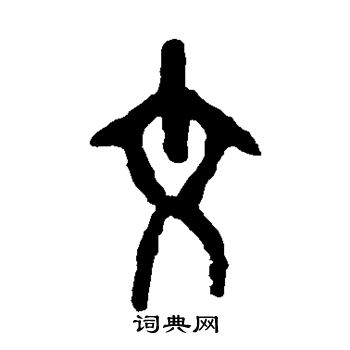

(350, 350, 3)


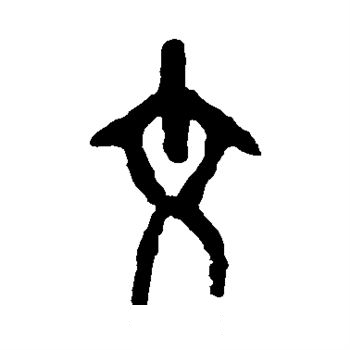

In [16]:
%%script echo skipping

im = Image.open("./testims/wen-15.png")
im.show()

im = np.array(im)
h, w = im.shape[:2]
print(im.shape)
half = w//2
twentyfive = w//4
cropLeft = half - (twentyfive//2)
cropTop = h - 45  # magic number
# print(f"{cropTop}:{h}, {cropLeft}:{cropLeft+twentyfive+1}, {im[cropLeft:cropLeft+twentyfive+1, cropTop:h]}")
im[cropTop:h, cropLeft:cropLeft+twentyfive+1] = 255

out = Image.fromarray(im)
out.show()


In [ ]:
%%script echo skipping

for i, url in enumerate(urls):
    if not re.findall("zhuanshu", url):
        continue
    img = Image.open(f"./testims/wen-{i}".png)
    

# Character Scraping

The above was testing and demonstrating on the processes that need to be done

After scraping the result must still be postprocessed manually, to remove any secondary watermarks and delete non-compliant characters

In [24]:
def load_data(csv):
    data = np.genfromtxt(os.path.join(data_dir, csv), delimiter=',', encoding='utf8', dtype=None)
    logger.info(f"Imported {data.shape[0]} characters from index {csv}")
    
    return data

data = load_data("hsk.csv")

[2023-11-13 11:35:02,390] [INFO] Imported 1076 characters from index hsk.csv


In [28]:
# https://search.cidianwang.com/?m=8&q=文&z=输入书法家&y=4

def stripWatermark(image:Image.Image):
    """Crop the bottom watermark from an image"""
    im = np.array(image)
    h, w = im.shape[:2]
    # print(im.shape)
    half = w//2
    twentyfive = w//4
    cropLeft = half - (twentyfive//2)
    cropTop = h - 45  # magic number
    # print(f"{cropTop}:{h}, {cropLeft}:{cropLeft+twentyfive+1}, {im[cropLeft:cropLeft+twentyfive+1, cropTop:h]}")
    im[cropTop:h, cropLeft:cropLeft+twentyfive+1] = 255

    out = Image.fromarray(im)
    return out


def scrapeCharacter(pageSoup:BeautifulSoup, pathIndex:str):
    """Download individual character pictures from the result page"""
    results = pageSoup.findAll("img", {"class": "lazyload"})
    urls = [result.attrs["data-src"] for result in results]
    
    headers2 = {
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
        'Referer': 'https://www.cidianwang.com/',
        "Host": "c.cidianwang.com"
    }
    
    path = f"./data/{pathIndex}/"
    if not os.path.exists(path):
        os.makedirs(path)
    
    for i, url in tqdm(enumerate(urls)):
        try:
            if not re.findall("zhuanshu", url):  # zhuanshu: seal script
                continue
            print(i, url)
            img = Image.open(requests.get(url, stream=True, headers=headers2).raw)
            img = stripWatermark(img)
            img.save(path + f"{i}.png")
        except Exception as e:
            logger.error(e)


def searchShufa(character:str, index:int):
    """Scrape cidianwang shufa
    
    character: any han character"""
    headers = {
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
        'Referer': 'https://www.cidianwang.com/'
    }
    
    try:
        url = f"https://search.cidianwang.com/?m=8&q={character}&z=输入书法家&y=4"
        page = requests.get(url, headers=headers)
        soup = BeautifulSoup(page.content, "html.parser")
        # print(soup)
        scrapeCharacter(soup, str(index))
    except Exception as ex:
        e = sys.exc_info()[0]
        logger.critical(f'Char {character}. Failed to obtain with error: {e}')
        import traceback W
        traceback.print_exc(ex)
        # traceback.print_stack()


for ind, char in tqdm(data):
    searchShufa(char, ind)


  0%|          | 0/1076 [00:00<?, ?it/s]

[2023-11-13 11:37:20,799] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:37:20,799] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:37:22,514] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:37:22,514] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:37:22,516] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:37:22,516] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:37:24,303] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi1237_zs.htm HTTP/1.1" 200 12070
[2023-11-13 11:37:24,303] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi1237_zs.htm HTTP/1.1" 200 12070


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213694e52c.jpg
[2023-11-13 11:37:24,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:24,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:25,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213694e52c.jpg HTTP/1.1" 200 13084
[2023-11-13 11:37:25,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213694e52c.jpg HTTP/1.1" 200 13084


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411361ee9f.jpg
[2023-11-13 11:37:25,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:25,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:27,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411361ee9f.jpg HTTP/1.1" 200 18100
[2023-11-13 11:37:27,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411361ee9f.jpg HTTP/1.1" 200 18100


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259302b5b2f.jpg
[2023-11-13 11:37:27,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:27,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:28,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259302b5b2f.jpg HTTP/1.1" 200 17614
[2023-11-13 11:37:28,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259302b5b2f.jpg HTTP/1.1" 200 17614


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592722b8d05.jpg
[2023-11-13 11:37:28,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:28,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:30,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722b8d05.jpg HTTP/1.1" 200 13856
[2023-11-13 11:37:30,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722b8d05.jpg HTTP/1.1" 200 13856


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295996614.jpg
[2023-11-13 11:37:30,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:30,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:32,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295996614.jpg HTTP/1.1" 200 16985
[2023-11-13 11:37:32,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295996614.jpg HTTP/1.1" 200 16985


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574358ab7.jpg
[2023-11-13 11:37:32,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:32,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:33,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574358ab7.jpg HTTP/1.1" 200 22680
[2023-11-13 11:37:33,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574358ab7.jpg HTTP/1.1" 200 22680


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343620a5b.jpg
[2023-11-13 11:37:33,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:33,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:35,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343620a5b.jpg HTTP/1.1" 200 26889
[2023-11-13 11:37:35,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343620a5b.jpg HTTP/1.1" 200 26889


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516345c0b5c.jpg
[2023-11-13 11:37:35,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:35,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:37,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345c0b5c.jpg HTTP/1.1" 200 12495
[2023-11-13 11:37:37,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345c0b5c.jpg HTTP/1.1" 200 12495


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223648761.jpg
[2023-11-13 11:37:37,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:37,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:39,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223648761.jpg HTTP/1.1" 200 14028
[2023-11-13 11:37:39,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223648761.jpg HTTP/1.1" 200 14028


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615181c785.jpg
[2023-11-13 11:37:39,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:39,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:41,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181c785.jpg HTTP/1.1" 200 24293
[2023-11-13 11:37:41,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181c785.jpg HTTP/1.1" 200 24293


10 https://c.cidianwang.com/file/shufa/zhuanshu/17b905a4e9cb1024.gif
[2023-11-13 11:37:41,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:41,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:42,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17b905a4e9cb1024.gif HTTP/1.1" 200 13915
[2023-11-13 11:37:42,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17b905a4e9cb1024.gif HTTP/1.1" 200 13915


11 https://c.cidianwang.com/file/shufa/zhuanshu/445c54c0253d770a.gif
[2023-11-13 11:37:42,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:42,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:43,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/445c54c0253d770a.gif HTTP/1.1" 200 14678
[2023-11-13 11:37:43,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/445c54c0253d770a.gif HTTP/1.1" 200 14678


12 https://c.cidianwang.com/file/shufa/zhuanshu/d1da977db187ba1e.gif
[2023-11-13 11:37:44,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:44,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:45,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1da977db187ba1e.gif HTTP/1.1" 200 15002
[2023-11-13 11:37:45,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1da977db187ba1e.gif HTTP/1.1" 200 15002


13 https://c.cidianwang.com/file/shufa/zhuanshu/20a266630954b107.gif
[2023-11-13 11:37:45,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:45,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:47,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20a266630954b107.gif HTTP/1.1" 200 12993
[2023-11-13 11:37:47,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20a266630954b107.gif HTTP/1.1" 200 12993


14 https://c.cidianwang.com/file/shufa/zhuanshu/50b6f232d9c71cee.gif
[2023-11-13 11:37:47,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:47,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:48,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50b6f232d9c71cee.gif HTTP/1.1" 200 13002
[2023-11-13 11:37:48,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50b6f232d9c71cee.gif HTTP/1.1" 200 13002


15 https://c.cidianwang.com/file/shufa/zhuanshu/d94561337e5f2914.gif
[2023-11-13 11:37:48,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:48,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:50,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d94561337e5f2914.gif HTTP/1.1" 200 14452
[2023-11-13 11:37:50,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d94561337e5f2914.gif HTTP/1.1" 200 14452


36it [00:26,  1.37it/s]
  0%|          | 1/1076 [00:29<8:53:31, 29.78s/it]

[2023-11-13 11:37:50,578] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:37:50,578] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:37:51,862] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9E%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:37:51,862] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9E%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:37:51,865] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:37:51,865] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:37:53,520] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guo2361_zs.htm HTTP/1.1" 200 11850
[2023-11-13 11:37:53,520] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guo2361_zs.htm HTTP/1.1" 200 11850


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592949809ea.jpg
[2023-11-13 11:37:53,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:53,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:55,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949809ea.jpg HTTP/1.1" 200 14416
[2023-11-13 11:37:55,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949809ea.jpg HTTP/1.1" 200 14416


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926556887.jpg
[2023-11-13 11:37:55,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:55,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:56,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926556887.jpg HTTP/1.1" 200 11244
[2023-11-13 11:37:56,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926556887.jpg HTTP/1.1" 200 11244


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829487c9ee.jpg
[2023-11-13 11:37:56,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:56,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:58,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829487c9ee.jpg HTTP/1.1" 200 14370
[2023-11-13 11:37:58,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829487c9ee.jpg HTTP/1.1" 200 14370


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574391066.jpg
[2023-11-13 11:37:58,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:37:58,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:02,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574391066.jpg HTTP/1.1" 200 17216
[2023-11-13 11:38:02,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574391066.jpg HTTP/1.1" 200 17216


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183418b9bdb.jpg
[2023-11-13 11:38:02,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:02,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:04,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418b9bdb.jpg HTTP/1.1" 200 27300
[2023-11-13 11:38:04,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418b9bdb.jpg HTTP/1.1" 200 27300


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163461cee7.jpg
[2023-11-13 11:38:05,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:05,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:07,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163461cee7.jpg HTTP/1.1" 200 11032
[2023-11-13 11:38:07,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163461cee7.jpg HTTP/1.1" 200 11032


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231694b4b.jpg
[2023-11-13 11:38:07,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:07,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:08,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231694b4b.jpg HTTP/1.1" 200 12195
[2023-11-13 11:38:08,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231694b4b.jpg HTTP/1.1" 200 12195


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161611d2393.jpg
[2023-11-13 11:38:08,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:08,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:10,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611d2393.jpg HTTP/1.1" 200 22605
[2023-11-13 11:38:10,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611d2393.jpg HTTP/1.1" 200 22605


8 https://c.cidianwang.com/file/shufa/zhuanshu/ab8beb22e1848fc8.gif
[2023-11-13 11:38:10,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:10,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:12,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab8beb22e1848fc8.gif HTTP/1.1" 200 11009
[2023-11-13 11:38:12,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab8beb22e1848fc8.gif HTTP/1.1" 200 11009


9 https://c.cidianwang.com/file/shufa/zhuanshu/e4b4fc680e018d01.gif
[2023-11-13 11:38:12,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:12,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:13,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4b4fc680e018d01.gif HTTP/1.1" 200 12047
[2023-11-13 11:38:13,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4b4fc680e018d01.gif HTTP/1.1" 200 12047


10 https://c.cidianwang.com/file/shufa/zhuanshu/f30a32e59bacc756.gif
[2023-11-13 11:38:13,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:13,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:15,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f30a32e59bacc756.gif HTTP/1.1" 200 11544
[2023-11-13 11:38:15,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f30a32e59bacc756.gif HTTP/1.1" 200 11544


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510b0ac4.jpg
[2023-11-13 11:38:15,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:15,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:16,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510b0ac4.jpg HTTP/1.1" 200 8565
[2023-11-13 11:38:16,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510b0ac4.jpg HTTP/1.1" 200 8565


32it [00:23,  1.37it/s]
  0%|          | 2/1076 [00:56<8:15:55, 27.71s/it]

[2023-11-13 11:38:16,832] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:38:16,832] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:38:18,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:38:18,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:38:18,341] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:38:18,341] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:38:20,089] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/re4557_zs.htm HTTP/1.1" 200 10892
[2023-11-13 11:38:20,089] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/re4557_zs.htm HTTP/1.1" 200 10892


0 https://c.cidianwang.com/file/shufa/zhuanshu/dbbf0b9a75c7a370.gif
[2023-11-13 11:38:20,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:20,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:21,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbbf0b9a75c7a370.gif HTTP/1.1" 200 14715
[2023-11-13 11:38:21,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbbf0b9a75c7a370.gif HTTP/1.1" 200 14715


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446bcc5.jpg
[2023-11-13 11:38:21,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:21,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:24,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446bcc5.jpg HTTP/1.1" 200 14488
[2023-11-13 11:38:24,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446bcc5.jpg HTTP/1.1" 200 14488


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162443191fa.jpg
[2023-11-13 11:38:24,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:24,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:25,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443191fa.jpg HTTP/1.1" 200 12178
[2023-11-13 11:38:25,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443191fa.jpg HTTP/1.1" 200 12178


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162452f795b.jpg
[2023-11-13 11:38:25,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:25,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:27,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162452f795b.jpg HTTP/1.1" 200 13248
[2023-11-13 11:38:27,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162452f795b.jpg HTTP/1.1" 200 13248


22it [00:07,  2.91it/s]
  0%|          | 3/1076 [01:06<5:57:43, 20.00s/it]

[2023-11-13 11:38:27,670] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:38:27,670] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:38:29,305] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:38:29,305] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:38:29,307] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:38:29,307] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:38:31,255] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan555_zs.htm HTTP/1.1" 200 11138
[2023-11-13 11:38:31,255] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan555_zs.htm HTTP/1.1" 200 11138


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516258dc8ac.jpg
[2023-11-13 11:38:31,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:31,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:32,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258dc8ac.jpg HTTP/1.1" 200 13582
[2023-11-13 11:38:32,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258dc8ac.jpg HTTP/1.1" 200 13582


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152068cae.jpg
[2023-11-13 11:38:32,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:32,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:34,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152068cae.jpg HTTP/1.1" 200 23896
[2023-11-13 11:38:34,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152068cae.jpg HTTP/1.1" 200 23896


2 https://c.cidianwang.com/file/shufa/zhuanshu/zhaomengfu/201665111220807.jpg
[2023-11-13 11:38:35,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:35,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:36,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220807.jpg HTTP/1.1" 200 26986
[2023-11-13 11:38:36,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220807.jpg HTTP/1.1" 200 26986


3 https://c.cidianwang.com/file/shufa/zhuanshu/48421ca43bc59b90.gif
[2023-11-13 11:38:36,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:36,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:39,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48421ca43bc59b90.gif HTTP/1.1" 200 13350
[2023-11-13 11:38:39,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48421ca43bc59b90.gif HTTP/1.1" 200 13350


4 https://c.cidianwang.com/file/shufa/zhuanshu/97c21c3d215053f5.gif
[2023-11-13 11:38:39,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:39,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:40,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97c21c3d215053f5.gif HTTP/1.1" 200 14245
[2023-11-13 11:38:40,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97c21c3d215053f5.gif HTTP/1.1" 200 14245


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224861755.jpg
[2023-11-13 11:38:40,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:40,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:42,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737
[2023-11-13 11:38:42,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623184754d.jpg
[2023-11-13 11:38:42,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:42,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:43,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259
[2023-11-13 11:38:43,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259


25it [00:12,  2.00it/s]
  0%|          | 4/1076 [01:23<5:30:04, 18.47s/it]

[2023-11-13 11:38:43,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:38:43,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:38:45,990] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:38:45,990] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:38:45,992] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:38:45,992] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:38:47,532] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si2896_zs.htm HTTP/1.1" 200 12297
[2023-11-13 11:38:47,532] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si2896_zs.htm HTTP/1.1" 200 12297


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405429321.jpg
[2023-11-13 11:38:47,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:47,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:49,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405429321.jpg HTTP/1.1" 200 13801
[2023-11-13 11:38:49,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405429321.jpg HTTP/1.1" 200 13801


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212289967d.jpg
[2023-11-13 11:38:49,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:49,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:50,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212289967d.jpg HTTP/1.1" 200 8308
[2023-11-13 11:38:50,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212289967d.jpg HTTP/1.1" 200 8308


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121228b07e4.jpg
[2023-11-13 11:38:50,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:50,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:51,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228b07e4.jpg HTTP/1.1" 200 6848
[2023-11-13 11:38:51,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228b07e4.jpg HTTP/1.1" 200 6848


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424355fcc.jpg
[2023-11-13 11:38:51,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:51,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:53,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424355fcc.jpg HTTP/1.1" 200 11217
[2023-11-13 11:38:53,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424355fcc.jpg HTTP/1.1" 200 11217


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592939fe8ef.jpg
[2023-11-13 11:38:53,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:53,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:55,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939fe8ef.jpg HTTP/1.1" 200 12135
[2023-11-13 11:38:55,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939fe8ef.jpg HTTP/1.1" 200 12135


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592553c2d3c.jpg
[2023-11-13 11:38:55,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:55,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:57,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553c2d3c.jpg HTTP/1.1" 200 11465
[2023-11-13 11:38:57,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553c2d3c.jpg HTTP/1.1" 200 11465


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884183366535e.jpg
[2023-11-13 11:38:57,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:57,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:59,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183366535e.jpg HTTP/1.1" 200 21580
[2023-11-13 11:38:59,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183366535e.jpg HTTP/1.1" 200 21580


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833656f9a.jpg
[2023-11-13 11:38:59,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:38:59,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:01,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833656f9a.jpg HTTP/1.1" 200 20228
[2023-11-13 11:39:01,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833656f9a.jpg HTTP/1.1" 200 20228


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294047cc6.jpg
[2023-11-13 11:39:01,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:01,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:03,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294047cc6.jpg HTTP/1.1" 200 13452
[2023-11-13 11:39:03,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294047cc6.jpg HTTP/1.1" 200 13452


9 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450e9ea9.jpg
[2023-11-13 11:39:03,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:03,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:04,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450e9ea9.jpg HTTP/1.1" 200 9336
[2023-11-13 11:39:04,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450e9ea9.jpg HTTP/1.1" 200 9336


10 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114508a9f3.jpg
[2023-11-13 11:39:04,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:04,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:06,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114508a9f3.jpg HTTP/1.1" 200 10382
[2023-11-13 11:39:06,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114508a9f3.jpg HTTP/1.1" 200 10382


11 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757328dd2e.jpg
[2023-11-13 11:39:06,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:06,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:08,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757328dd2e.jpg HTTP/1.1" 200 14306
[2023-11-13 11:39:08,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757328dd2e.jpg HTTP/1.1" 200 14306


12 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183474c700.jpg
[2023-11-13 11:39:08,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:08,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:10,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183474c700.jpg HTTP/1.1" 200 21357
[2023-11-13 11:39:10,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183474c700.jpg HTTP/1.1" 200 21357


13 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218347a6202.jpg
[2023-11-13 11:39:10,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:10,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:12,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347a6202.jpg HTTP/1.1" 200 21321
[2023-11-13 11:39:12,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347a6202.jpg HTTP/1.1" 200 21321


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354df81f.jpg
[2023-11-13 11:39:12,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:12,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:14,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354df81f.jpg HTTP/1.1" 200 8823
[2023-11-13 11:39:14,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354df81f.jpg HTTP/1.1" 200 8823


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625942a4f.jpg
[2023-11-13 11:39:14,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:14,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:17,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625942a4f.jpg HTTP/1.1" 200 11819
[2023-11-13 11:39:17,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625942a4f.jpg HTTP/1.1" 200 11819


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613490f6b4.jpg
[2023-11-13 11:39:17,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:17,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:18,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613490f6b4.jpg HTTP/1.1" 200 21889
[2023-11-13 11:39:18,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613490f6b4.jpg HTTP/1.1" 200 21889


17 https://c.cidianwang.com/file/shufa/zhuanshu/512405177f12f727.gif
[2023-11-13 11:39:18,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:18,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:20,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/512405177f12f727.gif HTTP/1.1" 200 10081
[2023-11-13 11:39:20,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/512405177f12f727.gif HTTP/1.1" 200 10081


18 https://c.cidianwang.com/file/shufa/zhuanshu/c2e8440c0a8a21d5.gif
[2023-11-13 11:39:20,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:20,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:22,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2e8440c0a8a21d5.gif HTTP/1.1" 200 13838
[2023-11-13 11:39:22,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2e8440c0a8a21d5.gif HTTP/1.1" 200 13838


19 https://c.cidianwang.com/file/shufa/zhuanshu/9c8734dd815aa4f9.gif
[2023-11-13 11:39:22,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:22,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:24,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c8734dd815aa4f9.gif HTTP/1.1" 200 9540
[2023-11-13 11:39:24,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c8734dd815aa4f9.gif HTTP/1.1" 200 9540


20 https://c.cidianwang.com/file/shufa/zhuanshu/9a21df19e2997a9e.gif
[2023-11-13 11:39:24,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:24,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:26,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a21df19e2997a9e.gif HTTP/1.1" 200 11202
[2023-11-13 11:39:26,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a21df19e2997a9e.gif HTTP/1.1" 200 11202


21 https://c.cidianwang.com/file/shufa/zhuanshu/c90e33f06fa59d2d.gif
[2023-11-13 11:39:26,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:26,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:28,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c90e33f06fa59d2d.gif HTTP/1.1" 200 11704
[2023-11-13 11:39:28,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c90e33f06fa59d2d.gif HTTP/1.1" 200 11704


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ca1c8.jpg
[2023-11-13 11:39:28,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:28,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:30,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085
[2023-11-13 11:39:30,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085


34 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145345e65.jpg
[2023-11-13 11:39:30,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:30,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:34,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145345e65.jpg HTTP/1.1" 200 13536
[2023-11-13 11:39:34,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145345e65.jpg HTTP/1.1" 200 13536


42it [00:47,  1.12s/it]
  0%|          | 5/1076 [02:13<8:57:44, 30.13s/it]

[2023-11-13 11:39:34,585] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:39:34,585] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:39:36,842] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:39:36,842] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:39:36,845] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:39:36,845] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:39:39,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hui2906_zs.htm HTTP/1.1" 200 11613
[2023-11-13 11:39:39,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hui2906_zs.htm HTTP/1.1" 200 11613


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240545cec2.jpg
[2023-11-13 11:39:40,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:40,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:42,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240545cec2.jpg HTTP/1.1" 200 13456
[2023-11-13 11:39:42,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240545cec2.jpg HTTP/1.1" 200 13456


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929391b957.jpg
[2023-11-13 11:39:42,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:42,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:45,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929391b957.jpg HTTP/1.1" 200 12741
[2023-11-13 11:39:45,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929391b957.jpg HTTP/1.1" 200 12741


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829400280e.jpg
[2023-11-13 11:39:45,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:45,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:46,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829400280e.jpg HTTP/1.1" 200 13047
[2023-11-13 11:39:46,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829400280e.jpg HTTP/1.1" 200 13047


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182940e1ca5.jpg
[2023-11-13 11:39:46,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:46,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:48,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940e1ca5.jpg HTTP/1.1" 200 14598
[2023-11-13 11:39:48,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940e1ca5.jpg HTTP/1.1" 200 14598


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834714e37.jpg
[2023-11-13 11:39:48,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:48,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:50,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834714e37.jpg HTTP/1.1" 200 32189
[2023-11-13 11:39:50,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834714e37.jpg HTTP/1.1" 200 32189


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637501abb8.jpg
[2023-11-13 11:39:50,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:50,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:51,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501abb8.jpg HTTP/1.1" 200 12639
[2023-11-13 11:39:51,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501abb8.jpg HTTP/1.1" 200 12639


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634467eb7.jpg
[2023-11-13 11:39:51,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:51,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:53,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634467eb7.jpg HTTP/1.1" 200 9767
[2023-11-13 11:39:53,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634467eb7.jpg HTTP/1.1" 200 9767


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623220b373.jpg
[2023-11-13 11:39:53,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:53,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:55,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623220b373.jpg HTTP/1.1" 200 11524
[2023-11-13 11:39:55,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623220b373.jpg HTTP/1.1" 200 11524


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516166242dd.jpg
[2023-11-13 11:39:55,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:55,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:57,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516166242dd.jpg HTTP/1.1" 200 21966
[2023-11-13 11:39:57,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516166242dd.jpg HTTP/1.1" 200 21966


9 https://c.cidianwang.com/file/shufa/zhuanshu/44d61a0ff8e13925.gif
[2023-11-13 11:39:57,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:57,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:58,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/44d61a0ff8e13925.gif HTTP/1.1" 200 9645
[2023-11-13 11:39:58,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/44d61a0ff8e13925.gif HTTP/1.1" 200 9645


10 https://c.cidianwang.com/file/shufa/zhuanshu/43026a4f8d91aa1b.gif
[2023-11-13 11:39:58,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:39:58,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:00,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43026a4f8d91aa1b.gif HTTP/1.1" 200 11436
[2023-11-13 11:40:00,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43026a4f8d91aa1b.gif HTTP/1.1" 200 11436


11 https://c.cidianwang.com/file/shufa/zhuanshu/d41928b2ebb29fcf.gif
[2023-11-13 11:40:00,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:00,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:02,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d41928b2ebb29fcf.gif HTTP/1.1" 200 11739
[2023-11-13 11:40:02,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d41928b2ebb29fcf.gif HTTP/1.1" 200 11739


32it [00:22,  1.44it/s]
  1%|          | 6/1076 [02:41<8:42:24, 29.29s/it]

[2023-11-13 11:40:02,265] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:40:02,265] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:40:03,883] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A5%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:40:03,883] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A5%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:40:03,885] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:40:03,885] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:40:05,792] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi4710_zs.htm HTTP/1.1" 200 12253
[2023-11-13 11:40:05,792] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi4710_zs.htm HTTP/1.1" 200 12253


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249a83b2.jpg
[2023-11-13 11:40:05,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:05,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:08,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249a83b2.jpg HTTP/1.1" 200 16401
[2023-11-13 11:40:08,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249a83b2.jpg HTTP/1.1" 200 16401


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191216205556eda7e.jpg
[2023-11-13 11:40:08,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:08,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:10,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205556eda7e.jpg HTTP/1.1" 200 60107
[2023-11-13 11:40:10,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205556eda7e.jpg HTTP/1.1" 200 60107


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191216205213db1c0.jpg
[2023-11-13 11:40:10,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:10,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:12,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205213db1c0.jpg HTTP/1.1" 200 34938
[2023-11-13 11:40:12,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205213db1c0.jpg HTTP/1.1" 200 34938


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930149dee.jpg
[2023-11-13 11:40:12,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:12,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:14,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930149dee.jpg HTTP/1.1" 200 14953
[2023-11-13 11:40:14,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930149dee.jpg HTTP/1.1" 200 14953


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926372d976.jpg
[2023-11-13 11:40:14,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:14,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:16,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926372d976.jpg HTTP/1.1" 200 11373
[2023-11-13 11:40:16,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926372d976.jpg HTTP/1.1" 200 11373


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331314d86.jpg
[2023-11-13 11:40:16,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:16,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:18,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331314d86.jpg HTTP/1.1" 200 22713
[2023-11-13 11:40:18,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331314d86.jpg HTTP/1.1" 200 22713


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295861aa1.jpg
[2023-11-13 11:40:18,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:18,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:21,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295861aa1.jpg HTTP/1.1" 200 12478
[2023-11-13 11:40:21,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295861aa1.jpg HTTP/1.1" 200 12478


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154571d5.jpg
[2023-11-13 11:40:21,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:21,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:22,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154571d5.jpg HTTP/1.1" 200 12674
[2023-11-13 11:40:22,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154571d5.jpg HTTP/1.1" 200 12674


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757397ef24.jpg
[2023-11-13 11:40:22,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:22,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:24,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757397ef24.jpg HTTP/1.1" 200 17525
[2023-11-13 11:40:24,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757397ef24.jpg HTTP/1.1" 200 17525


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183434cd150.jpg
[2023-11-13 11:40:24,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:24,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:26,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183434cd150.jpg HTTP/1.1" 200 28206
[2023-11-13 11:40:26,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183434cd150.jpg HTTP/1.1" 200 28206


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341b08ca.jpg
[2023-11-13 11:40:26,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:26,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:27,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341b08ca.jpg HTTP/1.1" 200 13278
[2023-11-13 11:40:27,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341b08ca.jpg HTTP/1.1" 200 13278


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624288a4b7.jpg
[2023-11-13 11:40:27,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:27,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:29,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624288a4b7.jpg HTTP/1.1" 200 12998
[2023-11-13 11:40:29,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624288a4b7.jpg HTTP/1.1" 200 12998


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516141e1edd.jpg
[2023-11-13 11:40:29,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:29,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:31,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516141e1edd.jpg HTTP/1.1" 200 21877
[2023-11-13 11:40:31,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516141e1edd.jpg HTTP/1.1" 200 21877


13 https://c.cidianwang.com/file/shufa/zhuanshu/7243cee9de29fa5d.gif
[2023-11-13 11:40:31,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:31,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:34,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7243cee9de29fa5d.gif HTTP/1.1" 200 11737
[2023-11-13 11:40:34,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7243cee9de29fa5d.gif HTTP/1.1" 200 11737


14 https://c.cidianwang.com/file/shufa/zhuanshu/a2eef31ba7fc7cf7.gif
[2023-11-13 11:40:34,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:34,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:37,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2eef31ba7fc7cf7.gif HTTP/1.1" 200 12563
[2023-11-13 11:40:37,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2eef31ba7fc7cf7.gif HTTP/1.1" 200 12563


15 https://c.cidianwang.com/file/shufa/zhuanshu/376484be306e325a.gif
[2023-11-13 11:40:37,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:37,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:38,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/376484be306e325a.gif HTTP/1.1" 200 10226
[2023-11-13 11:40:38,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/376484be306e325a.gif HTTP/1.1" 200 10226


37it [00:33,  1.12it/s]
  1%|          | 7/1076 [03:18<9:24:43, 31.70s/it]

[2023-11-13 11:40:38,906] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:40:38,906] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:40:40,772] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:40:40,772] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:40:40,775] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:40:40,775] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:40:43,483] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guo2835_zs.htm HTTP/1.1" 200 11565
[2023-11-13 11:40:43,483] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guo2835_zs.htm HTTP/1.1" 200 11565


0 https://c.cidianwang.com/file/shufa/zhuanshu/32068ce49a9d6804.gif
[2023-11-13 11:40:43,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:43,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:45,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32068ce49a9d6804.gif HTTP/1.1" 200 14908
[2023-11-13 11:40:45,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32068ce49a9d6804.gif HTTP/1.1" 200 14908


1 https://c.cidianwang.com/file/shufa/zhuanshu/8665603b179f99a3.gif
[2023-11-13 11:40:45,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:45,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:47,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8665603b179f99a3.gif HTTP/1.1" 200 13832
[2023-11-13 11:40:47,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8665603b179f99a3.gif HTTP/1.1" 200 13832


2 https://c.cidianwang.com/file/shufa/zhuanshu/e1ba773b109cefff.gif
[2023-11-13 11:40:47,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:47,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:48,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1ba773b109cefff.gif HTTP/1.1" 200 14720
[2023-11-13 11:40:48,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1ba773b109cefff.gif HTTP/1.1" 200 14720


3 https://c.cidianwang.com/file/shufa/zhuanshu/133e0a5a76f826ea.gif
[2023-11-13 11:40:48,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:48,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:50,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/133e0a5a76f826ea.gif HTTP/1.1" 200 11299
[2023-11-13 11:40:50,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/133e0a5a76f826ea.gif HTTP/1.1" 200 11299


4 https://c.cidianwang.com/file/shufa/zhuanshu/5e196b0ce64d984f.gif
[2023-11-13 11:40:50,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:50,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:51,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e196b0ce64d984f.gif HTTP/1.1" 200 13783
[2023-11-13 11:40:51,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e196b0ce64d984f.gif HTTP/1.1" 200 13783


5 https://c.cidianwang.com/file/shufa/zhuanshu/cf68a4c10569e4ab.gif
[2023-11-13 11:40:51,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:51,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:53,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf68a4c10569e4ab.gif HTTP/1.1" 200 15630
[2023-11-13 11:40:53,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf68a4c10569e4ab.gif HTTP/1.1" 200 15630


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418afa1.jpg
[2023-11-13 11:40:53,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:53,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:54,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418afa1.jpg HTTP/1.1" 200 16051
[2023-11-13 11:40:54,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418afa1.jpg HTTP/1.1" 200 16051


28it [00:11,  2.44it/s]
  1%|          | 8/1076 [03:34<7:55:38, 26.72s/it]

[2023-11-13 11:40:54,977] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:40:54,977] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:40:56,556] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AB%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:40:56,556] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AB%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:40:56,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:40:56,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:40:58,201] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao6466_zs.htm HTTP/1.1" 200 11915
[2023-11-13 11:40:58,201] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao6466_zs.htm HTTP/1.1" 200 11915


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621434ae456.jpg
[2023-11-13 11:40:58,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:58,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:40:59,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621434ae456.jpg HTTP/1.1" 200 41135
[2023-11-13 11:40:59,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621434ae456.jpg HTTP/1.1" 200 41135


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930776c87.jpg
[2023-11-13 11:41:00,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:00,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:01,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930776c87.jpg HTTP/1.1" 200 14220
[2023-11-13 11:41:01,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930776c87.jpg HTTP/1.1" 200 14220


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259272711f40.jpg
[2023-11-13 11:41:01,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:01,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:03,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272711f40.jpg HTTP/1.1" 200 12342
[2023-11-13 11:41:03,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272711f40.jpg HTTP/1.1" 200 12342


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841830351473.jpg
[2023-11-13 11:41:03,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:03,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:05,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830351473.jpg HTTP/1.1" 200 13219
[2023-11-13 11:41:05,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830351473.jpg HTTP/1.1" 200 13219


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221157ec06e.jpg
[2023-11-13 11:41:05,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:05,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:08,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157ec06e.jpg HTTP/1.1" 200 11422
[2023-11-13 11:41:08,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157ec06e.jpg HTTP/1.1" 200 11422


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163432fd4a.jpg
[2023-11-13 11:41:08,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:08,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:09,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163432fd4a.jpg HTTP/1.1" 200 13139
[2023-11-13 11:41:09,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163432fd4a.jpg HTTP/1.1" 200 13139


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623122317f.jpg
[2023-11-13 11:41:09,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:09,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:11,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623122317f.jpg HTTP/1.1" 200 10590
[2023-11-13 11:41:11,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623122317f.jpg HTTP/1.1" 200 10590


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615211c265.jpg
[2023-11-13 11:41:11,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:11,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:13,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615211c265.jpg HTTP/1.1" 200 21551
[2023-11-13 11:41:13,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615211c265.jpg HTTP/1.1" 200 21551


8 https://c.cidianwang.com/file/shufa/zhuanshu/b54ef2d84782f6a0.gif
[2023-11-13 11:41:13,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:13,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:15,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54ef2d84782f6a0.gif HTTP/1.1" 200 12442
[2023-11-13 11:41:15,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54ef2d84782f6a0.gif HTTP/1.1" 200 12442


9 https://c.cidianwang.com/file/shufa/zhuanshu/b66181e5fe2d11ee.gif
[2023-11-13 11:41:15,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:15,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:17,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b66181e5fe2d11ee.gif HTTP/1.1" 200 10716
[2023-11-13 11:41:17,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b66181e5fe2d11ee.gif HTTP/1.1" 200 10716


10 https://c.cidianwang.com/file/shufa/zhuanshu/924ee7bd36dde12a.gif
[2023-11-13 11:41:18,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:18,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:19,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/924ee7bd36dde12a.gif HTTP/1.1" 200 11418
[2023-11-13 11:41:19,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/924ee7bd36dde12a.gif HTTP/1.1" 200 11418


11 https://c.cidianwang.com/file/shufa/zhuanshu/623b335a119974fa.gif
[2023-11-13 11:41:20,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:20,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:21,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/623b335a119974fa.gif HTTP/1.1" 200 10100
[2023-11-13 11:41:21,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/623b335a119974fa.gif HTTP/1.1" 200 10100


24 https://c.cidianwang.com/file/shufa/zhuanshu/201884183381ccc9.jpg
[2023-11-13 11:41:21,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:21,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:24,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183381ccc9.jpg HTTP/1.1" 200 22071
[2023-11-13 11:41:24,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183381ccc9.jpg HTTP/1.1" 200 22071


33it [00:26,  1.26it/s]
  1%|          | 9/1076 [04:03<8:09:56, 27.55s/it]

[2023-11-13 11:41:24,351] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:41:24,351] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:41:25,756] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:41:25,756] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:41:25,759] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:41:25,759] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:41:27,791] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zen5106_zs.htm HTTP/1.1" 200 10968
[2023-11-13 11:41:27,791] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zen5106_zs.htm HTTP/1.1" 200 10968


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616969df3.jpg
[2023-11-13 11:41:27,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:27,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:30,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616969df3.jpg HTTP/1.1" 200 21083
[2023-11-13 11:41:30,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616969df3.jpg HTTP/1.1" 200 21083


15 https://c.cidianwang.com/file/shufa/zhuanshu/201832211556deae.jpg
[2023-11-13 11:41:30,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:30,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:31,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211556deae.jpg HTTP/1.1" 200 12656
[2023-11-13 11:41:31,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211556deae.jpg HTTP/1.1" 200 12656


21it [00:03,  5.42it/s]
  1%|          | 10/1076 [04:10<6:18:38, 21.31s/it]

[2023-11-13 11:41:31,692] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:41:31,692] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:41:32,935] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B3%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:41:32,935] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B3%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:41:32,937] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:41:32,937] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:41:34,386] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi5319_zs.htm HTTP/1.1" 200 11757
[2023-11-13 11:41:34,386] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi5319_zs.htm HTTP/1.1" 200 11757


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211524b25c.jpg
[2023-11-13 11:41:34,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:34,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:35,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211524b25c.jpg HTTP/1.1" 200 12263
[2023-11-13 11:41:35,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211524b25c.jpg HTTP/1.1" 200 12263


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624441d355.jpg
[2023-11-13 11:41:35,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:35,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:37,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624441d355.jpg HTTP/1.1" 200 10575
[2023-11-13 11:41:37,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624441d355.jpg HTTP/1.1" 200 10575


2 https://c.cidianwang.com/file/shufa/zhuanshu/500b50ba154b44e4.gif
[2023-11-13 11:41:37,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:37,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:39,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/500b50ba154b44e4.gif HTTP/1.1" 200 10760
[2023-11-13 11:41:39,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/500b50ba154b44e4.gif HTTP/1.1" 200 10760


3 https://c.cidianwang.com/file/shufa/zhuanshu/4bf39db91cc9481e.gif
[2023-11-13 11:41:39,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:39,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:41,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bf39db91cc9481e.gif HTTP/1.1" 200 13223
[2023-11-13 11:41:41,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bf39db91cc9481e.gif HTTP/1.1" 200 13223


4 https://c.cidianwang.com/file/shufa/zhuanshu/7fbc5ae490eddffe.gif
[2023-11-13 11:41:41,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:41,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:42,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fbc5ae490eddffe.gif HTTP/1.1" 200 11972
[2023-11-13 11:41:42,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fbc5ae490eddffe.gif HTTP/1.1" 200 11972


5 https://c.cidianwang.com/file/shufa/zhuanshu/268b0e9343f7215d.gif
[2023-11-13 11:41:42,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:42,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:44,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/268b0e9343f7215d.gif HTTP/1.1" 200 10272
[2023-11-13 11:41:44,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/268b0e9343f7215d.gif HTTP/1.1" 200 10272


6 https://c.cidianwang.com/file/shufa/zhuanshu/e8ae6475ea9e3516.gif
[2023-11-13 11:41:44,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:44,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:45,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ae6475ea9e3516.gif HTTP/1.1" 200 11100
[2023-11-13 11:41:45,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ae6475ea9e3516.gif HTTP/1.1" 200 11100


7 https://c.cidianwang.com/file/shufa/zhuanshu/40d3801e58f3f485.gif
[2023-11-13 11:41:45,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:45,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:47,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40d3801e58f3f485.gif HTTP/1.1" 200 14985
[2023-11-13 11:41:47,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40d3801e58f3f485.gif HTTP/1.1" 200 14985


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337cc168.jpg
[2023-11-13 11:41:47,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:47,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:49,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337cc168.jpg HTTP/1.1" 200 17569
[2023-11-13 11:41:49,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337cc168.jpg HTTP/1.1" 200 17569


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162398e734.jpg
[2023-11-13 11:41:49,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:49,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:50,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162398e734.jpg HTTP/1.1" 200 14639
[2023-11-13 11:41:50,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162398e734.jpg HTTP/1.1" 200 14639


30it [00:16,  1.86it/s]
  1%|          | 11/1076 [04:29<6:04:42, 20.55s/it]

[2023-11-13 11:41:50,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:41:50,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:41:51,819] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:41:51,819] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:41:51,822] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:41:51,822] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:41:53,248] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei5626_zs.htm HTTP/1.1" 200 11873
[2023-11-13 11:41:53,248] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei5626_zs.htm HTTP/1.1" 200 11873


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240531a6e8.jpg
[2023-11-13 11:41:53,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:53,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:54,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240531a6e8.jpg HTTP/1.1" 200 14510
[2023-11-13 11:41:54,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240531a6e8.jpg HTTP/1.1" 200 14510


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238b23b6.jpg
[2023-11-13 11:41:54,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:54,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:56,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238b23b6.jpg HTTP/1.1" 200 16893
[2023-11-13 11:41:56,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238b23b6.jpg HTTP/1.1" 200 16893


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794242c3d56.jpg
[2023-11-13 11:41:56,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:56,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:58,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242c3d56.jpg HTTP/1.1" 200 15848
[2023-11-13 11:41:58,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242c3d56.jpg HTTP/1.1" 200 15848


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448be2ee.jpg
[2023-11-13 11:41:58,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:41:58,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:00,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448be2ee.jpg HTTP/1.1" 200 10623
[2023-11-13 11:42:00,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448be2ee.jpg HTTP/1.1" 200 10623


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345c7b5e.jpg
[2023-11-13 11:42:00,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:00,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:01,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345c7b5e.jpg HTTP/1.1" 200 10910
[2023-11-13 11:42:01,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345c7b5e.jpg HTTP/1.1" 200 10910


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613476eaf7.jpg
[2023-11-13 11:42:01,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:01,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:03,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613476eaf7.jpg HTTP/1.1" 200 22193
[2023-11-13 11:42:03,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613476eaf7.jpg HTTP/1.1" 200 22193


6 https://c.cidianwang.com/file/shufa/zhuanshu/82b03265e00e4a35.gif
[2023-11-13 11:42:03,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:03,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:05,255] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82b03265e00e4a35.gif HTTP/1.1" 200 11752
[2023-11-13 11:42:05,255] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82b03265e00e4a35.gif HTTP/1.1" 200 11752


7 https://c.cidianwang.com/file/shufa/zhuanshu/6b44b87db18521d7.gif
[2023-11-13 11:42:05,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:05,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:07,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b44b87db18521d7.gif HTTP/1.1" 200 10828
[2023-11-13 11:42:07,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b44b87db18521d7.gif HTTP/1.1" 200 10828


8 https://c.cidianwang.com/file/shufa/zhuanshu/419be1cda514fbb8.gif
[2023-11-13 11:42:07,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:07,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:09,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/419be1cda514fbb8.gif HTTP/1.1" 200 11913
[2023-11-13 11:42:09,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/419be1cda514fbb8.gif HTTP/1.1" 200 11913


9 https://c.cidianwang.com/file/shufa/zhuanshu/61f6410096d652e1.gif
[2023-11-13 11:42:09,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:09,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:11,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61f6410096d652e1.gif HTTP/1.1" 200 11410
[2023-11-13 11:42:11,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61f6410096d652e1.gif HTTP/1.1" 200 11410


10 https://c.cidianwang.com/file/shufa/zhuanshu/85d545f565cdca4b.gif
[2023-11-13 11:42:11,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:11,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:13,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85d545f565cdca4b.gif HTTP/1.1" 200 12118
[2023-11-13 11:42:13,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85d545f565cdca4b.gif HTTP/1.1" 200 12118


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg
[2023-11-13 11:42:13,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:13,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:15,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg HTTP/1.1" 200 14223
[2023-11-13 11:42:15,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg HTTP/1.1" 200 14223


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446faa94.jpg
[2023-11-13 11:42:15,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:15,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:17,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554
[2023-11-13 11:42:17,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554


24 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg
[2023-11-13 11:42:17,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:17,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:22,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg HTTP/1.1" 200 25274
[2023-11-13 11:42:22,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg HTTP/1.1" 200 25274


31it [00:28,  1.07it/s]
  1%|          | 12/1076 [05:01<7:04:03, 23.91s/it]

[2023-11-13 11:42:22,118] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:42:22,118] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:42:23,764] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:42:23,764] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:42:23,767] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:42:23,767] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:42:27,396] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi1435_zs.htm HTTP/1.1" 200 11628
[2023-11-13 11:42:27,396] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi1435_zs.htm HTTP/1.1" 200 11628


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235ab71d.jpg
[2023-11-13 11:42:27,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:27,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:29,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235ab71d.jpg HTTP/1.1" 200 14297
[2023-11-13 11:42:29,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235ab71d.jpg HTTP/1.1" 200 14297


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226b77a2.jpg
[2023-11-13 11:42:29,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:29,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:31,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226b77a2.jpg HTTP/1.1" 200 4455
[2023-11-13 11:42:31,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226b77a2.jpg HTTP/1.1" 200 4455


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226990c3.jpg
[2023-11-13 11:42:31,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:31,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:33,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226990c3.jpg HTTP/1.1" 200 3996
[2023-11-13 11:42:33,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226990c3.jpg HTTP/1.1" 200 3996


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424040f57.jpg
[2023-11-13 11:42:33,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:33,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:37,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424040f57.jpg HTTP/1.1" 200 11900
[2023-11-13 11:42:37,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424040f57.jpg HTTP/1.1" 200 11900


4 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942403e6e7.jpg
[2023-11-13 11:42:37,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:37,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:39,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942403e6e7.jpg HTTP/1.1" 200 9033
[2023-11-13 11:42:39,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942403e6e7.jpg HTTP/1.1" 200 9033


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334221ee.jpg
[2023-11-13 11:42:39,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:39,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:42,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334221ee.jpg HTTP/1.1" 200 18947
[2023-11-13 11:42:42,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334221ee.jpg HTTP/1.1" 200 18947


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144501bad.jpg
[2023-11-13 11:42:42,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:42,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:44,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144501bad.jpg HTTP/1.1" 200 7468
[2023-11-13 11:42:44,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144501bad.jpg HTTP/1.1" 200 7468


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236c09ce.jpg
[2023-11-13 11:42:44,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:44,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:46,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236c09ce.jpg HTTP/1.1" 200 4451
[2023-11-13 11:42:46,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236c09ce.jpg HTTP/1.1" 200 4451


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613449239d.jpg
[2023-11-13 11:42:46,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:46,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:48,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613449239d.jpg HTTP/1.1" 200 8879
[2023-11-13 11:42:48,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613449239d.jpg HTTP/1.1" 200 8879


9 https://c.cidianwang.com/file/shufa/zhuanshu/b9ea0705b244afb4.gif
[2023-11-13 11:42:48,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:48,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:50,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9ea0705b244afb4.gif HTTP/1.1" 200 5671
[2023-11-13 11:42:50,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9ea0705b244afb4.gif HTTP/1.1" 200 5671


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624468ac6.jpg
[2023-11-13 11:42:50,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:50,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:53,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624468ac6.jpg HTTP/1.1" 200 13614
[2023-11-13 11:42:53,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624468ac6.jpg HTTP/1.1" 200 13614


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624268399b.jpg
[2023-11-13 11:42:53,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:53,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:55,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624268399b.jpg HTTP/1.1" 200 17174
[2023-11-13 11:42:55,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624268399b.jpg HTTP/1.1" 200 17174


30it [00:28,  1.07it/s]
  1%|          | 13/1076 [05:34<7:54:22, 26.78s/it]

[2023-11-13 11:42:55,481] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:42:55,481] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:42:57,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:42:57,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:42:57,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:42:57,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:42:59,099] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi139_zs.htm HTTP/1.1" 200 11431
[2023-11-13 11:42:59,099] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi139_zs.htm HTTP/1.1" 200 11431


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226b8a9f.jpg
[2023-11-13 11:42:59,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:42:59,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:01,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226b8a9f.jpg HTTP/1.1" 200 7050
[2023-11-13 11:43:01,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226b8a9f.jpg HTTP/1.1" 200 7050


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884183345673d.jpg
[2023-11-13 11:43:01,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:01,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:03,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183345673d.jpg HTTP/1.1" 200 20295
[2023-11-13 11:43:03,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183345673d.jpg HTTP/1.1" 200 20295


2 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445810d0.jpg
[2023-11-13 11:43:03,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:03,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:08,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445810d0.jpg HTTP/1.1" 200 10600
[2023-11-13 11:43:08,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445810d0.jpg HTTP/1.1" 200 10600


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114456d6e1.jpg
[2023-11-13 11:43:08,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:08,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:10,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114456d6e1.jpg HTTP/1.1" 200 9695
[2023-11-13 11:43:10,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114456d6e1.jpg HTTP/1.1" 200 9695


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625946258.jpg
[2023-11-13 11:43:10,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:10,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:12,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625946258.jpg HTTP/1.1" 200 6730
[2023-11-13 11:43:12,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625946258.jpg HTTP/1.1" 200 6730


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344b6e28.jpg
[2023-11-13 11:43:12,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:12,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:14,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344b6e28.jpg HTTP/1.1" 200 15371
[2023-11-13 11:43:14,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344b6e28.jpg HTTP/1.1" 200 15371


6 https://c.cidianwang.com/file/shufa/zhuanshu/bae02da201dfca8f.gif
[2023-11-13 11:43:14,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:14,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:16,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae02da201dfca8f.gif HTTP/1.1" 200 6831
[2023-11-13 11:43:16,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae02da201dfca8f.gif HTTP/1.1" 200 6831


7 https://c.cidianwang.com/file/shufa/zhuanshu/ea051bace4f97107.gif
[2023-11-13 11:43:16,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:16,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:17,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea051bace4f97107.gif HTTP/1.1" 200 7561
[2023-11-13 11:43:17,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea051bace4f97107.gif HTTP/1.1" 200 7561


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162436188b2.jpg
[2023-11-13 11:43:17,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:17,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:19,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436188b2.jpg HTTP/1.1" 200 14402
[2023-11-13 11:43:19,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436188b2.jpg HTTP/1.1" 200 14402


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242a0cdb.jpg
[2023-11-13 11:43:19,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:19,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:21,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163
[2023-11-13 11:43:21,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163


28it [00:22,  1.23it/s]
  1%|▏         | 14/1076 [06:01<7:52:05, 26.67s/it]

[2023-11-13 11:43:21,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:43:21,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:43:23,842] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:43:23,842] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:43:23,844] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:43:23,844] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:43:26,604] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/san777_zs.htm HTTP/1.1" 200 11750
[2023-11-13 11:43:26,604] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/san777_zs.htm HTTP/1.1" 200 11750


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405275cf6.jpg
[2023-11-13 11:43:26,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:26,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:29,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405275cf6.jpg HTTP/1.1" 200 12576
[2023-11-13 11:43:29,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405275cf6.jpg HTTP/1.1" 200 12576


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612341773cf6.jpg
[2023-11-13 11:43:29,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:29,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:31,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612341773cf6.jpg HTTP/1.1" 200 7882
[2023-11-13 11:43:31,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612341773cf6.jpg HTTP/1.1" 200 7882


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235be9fe.jpg
[2023-11-13 11:43:31,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:31,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:33,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235be9fe.jpg HTTP/1.1" 200 16990
[2023-11-13 11:43:33,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235be9fe.jpg HTTP/1.1" 200 16990


3 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122668921.jpg
[2023-11-13 11:43:33,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:33,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:35,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122668921.jpg HTTP/1.1" 200 6697
[2023-11-13 11:43:35,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122668921.jpg HTTP/1.1" 200 6697


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112065833.jpg
[2023-11-13 11:43:35,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:35,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:37,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112065833.jpg HTTP/1.1" 200 11831
[2023-11-13 11:43:37,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112065833.jpg HTTP/1.1" 200 11831


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334d32e1.jpg
[2023-11-13 11:43:37,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:37,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:38,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334d32e1.jpg HTTP/1.1" 200 20538
[2023-11-13 11:43:38,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334d32e1.jpg HTTP/1.1" 200 20538


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114458b18a.jpg
[2023-11-13 11:43:39,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:39,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:40,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114458b18a.jpg HTTP/1.1" 200 8676
[2023-11-13 11:43:40,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114458b18a.jpg HTTP/1.1" 200 8676


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641308fc47.jpg
[2023-11-13 11:43:40,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:40,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:42,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641308fc47.jpg HTTP/1.1" 200 6807
[2023-11-13 11:43:42,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641308fc47.jpg HTTP/1.1" 200 6807


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624306474c.jpg
[2023-11-13 11:43:42,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:42,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:43,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624306474c.jpg HTTP/1.1" 200 6618
[2023-11-13 11:43:43,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624306474c.jpg HTTP/1.1" 200 6618


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516163eeb40.jpg
[2023-11-13 11:43:43,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:43,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:44,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163eeb40.jpg HTTP/1.1" 200 16267
[2023-11-13 11:43:44,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163eeb40.jpg HTTP/1.1" 200 16267


10 https://c.cidianwang.com/file/shufa/zhuanshu/5d873dfe607e50a5.gif
[2023-11-13 11:43:44,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:44,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:46,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d873dfe607e50a5.gif HTTP/1.1" 200 8441
[2023-11-13 11:43:46,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d873dfe607e50a5.gif HTTP/1.1" 200 8441


11 https://c.cidianwang.com/file/shufa/zhuanshu/96f2597cbc12d163.gif
[2023-11-13 11:43:46,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:46,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:48,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96f2597cbc12d163.gif HTTP/1.1" 200 9720
[2023-11-13 11:43:48,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96f2597cbc12d163.gif HTTP/1.1" 200 9720


12 https://c.cidianwang.com/file/shufa/zhuanshu/335f53534eb287b5.gif
[2023-11-13 11:43:48,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:48,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:49,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/335f53534eb287b5.gif HTTP/1.1" 200 9614
[2023-11-13 11:43:49,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/335f53534eb287b5.gif HTTP/1.1" 200 9614


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347b783c.jpg
[2023-11-13 11:43:49,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:49,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:52,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347b783c.jpg HTTP/1.1" 200 14871
[2023-11-13 11:43:52,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347b783c.jpg HTTP/1.1" 200 14871


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162401844d.jpg
[2023-11-13 11:43:52,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:52,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:43:54,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162401844d.jpg HTTP/1.1" 200 12779
[2023-11-13 11:43:54,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162401844d.jpg HTTP/1.1" 200 12779


33it [00:28,  1.17it/s]
  1%|▏         | 15/1076 [06:34<8:25:02, 28.56s/it]

[2023-11-13 11:43:54,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:43:54,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:43:57,050] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 11:43:57,050] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 11:43:57,053] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:43:57,053] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:44:00,808] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shang1677_zs.htm HTTP/1.1" 200 12303
[2023-11-13 11:44:00,808] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shang1677_zs.htm HTTP/1.1" 200 12303


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240525710e.jpg
[2023-11-13 11:44:00,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:00,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:03,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240525710e.jpg HTTP/1.1" 200 12232
[2023-11-13 11:44:03,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240525710e.jpg HTTP/1.1" 200 12232


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405257bfd.jpg
[2023-11-13 11:44:03,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:03,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:06,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405257bfd.jpg HTTP/1.1" 200 11550
[2023-11-13 11:44:06,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405257bfd.jpg HTTP/1.1" 200 11550


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226d6438.jpg
[2023-11-13 11:44:06,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:06,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:08,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226d6438.jpg HTTP/1.1" 200 8273
[2023-11-13 11:44:08,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226d6438.jpg HTTP/1.1" 200 8273


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120444e3.jpg
[2023-11-13 11:44:08,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:08,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:11,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120444e3.jpg HTTP/1.1" 200 11100
[2023-11-13 11:44:11,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120444e3.jpg HTTP/1.1" 200 11100


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293427a56.jpg
[2023-11-13 11:44:11,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:11,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:14,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293427a56.jpg HTTP/1.1" 200 11148
[2023-11-13 11:44:14,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293427a56.jpg HTTP/1.1" 200 11148


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592546e37ca.jpg
[2023-11-13 11:44:14,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:14,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:16,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592546e37ca.jpg HTTP/1.1" 200 6761
[2023-11-13 11:44:16,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592546e37ca.jpg HTTP/1.1" 200 6761


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293599ddc.jpg
[2023-11-13 11:44:16,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:16,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:19,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293599ddc.jpg HTTP/1.1" 200 9101
[2023-11-13 11:44:19,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293599ddc.jpg HTTP/1.1" 200 9101


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445bf74f.jpg
[2023-11-13 11:44:19,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:19,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:21,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445bf74f.jpg HTTP/1.1" 200 8336
[2023-11-13 11:44:21,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445bf74f.jpg HTTP/1.1" 200 8336


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757366c01d.jpg
[2023-11-13 11:44:21,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:21,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:24,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757366c01d.jpg HTTP/1.1" 200 17465
[2023-11-13 11:44:24,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757366c01d.jpg HTTP/1.1" 200 17465


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183400fad7.jpg
[2023-11-13 11:44:24,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:24,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:27,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183400fad7.jpg HTTP/1.1" 200 16836
[2023-11-13 11:44:27,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183400fad7.jpg HTTP/1.1" 200 16836


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641300277a.jpg
[2023-11-13 11:44:27,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:27,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:30,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641300277a.jpg HTTP/1.1" 200 5841
[2023-11-13 11:44:30,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641300277a.jpg HTTP/1.1" 200 5841


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633592c7e5.jpg
[2023-11-13 11:44:30,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:30,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:32,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633592c7e5.jpg HTTP/1.1" 200 7694
[2023-11-13 11:44:32,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633592c7e5.jpg HTTP/1.1" 200 7694


13 https://c.cidianwang.com/file/shufa/zhuanshu/10c6078301b35ce8.gif
[2023-11-13 11:44:32,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:32,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:34,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10c6078301b35ce8.gif HTTP/1.1" 200 7761
[2023-11-13 11:44:34,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10c6078301b35ce8.gif HTTP/1.1" 200 7761


14 https://c.cidianwang.com/file/shufa/zhuanshu/0c15a0df5d639ec9.gif
[2023-11-13 11:44:34,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:34,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:37,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c15a0df5d639ec9.gif HTTP/1.1" 200 8283
[2023-11-13 11:44:37,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c15a0df5d639ec9.gif HTTP/1.1" 200 8283


15 https://c.cidianwang.com/file/shufa/zhuanshu/2d9fd469c6917037.gif
[2023-11-13 11:44:37,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:37,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:40,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d9fd469c6917037.gif HTTP/1.1" 200 8290
[2023-11-13 11:44:40,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d9fd469c6917037.gif HTTP/1.1" 200 8290


16 https://c.cidianwang.com/file/shufa/zhuanshu/60f948a9647bebf6.gif
[2023-11-13 11:44:40,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:40,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:43,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60f948a9647bebf6.gif HTTP/1.1" 200 8163
[2023-11-13 11:44:43,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60f948a9647bebf6.gif HTTP/1.1" 200 8163


17 https://c.cidianwang.com/file/shufa/zhuanshu/6f65bcaa678a5a85.gif
[2023-11-13 11:44:43,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:43,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:46,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f65bcaa678a5a85.gif HTTP/1.1" 200 7777
[2023-11-13 11:44:46,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f65bcaa678a5a85.gif HTTP/1.1" 200 7777


18 https://c.cidianwang.com/file/shufa/zhuanshu/3c6baf882dd4f403.gif
[2023-11-13 11:44:46,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:46,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:47,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c6baf882dd4f403.gif HTTP/1.1" 200 7043
[2023-11-13 11:44:47,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c6baf882dd4f403.gif HTTP/1.1" 200 7043


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235920473.jpg
[2023-11-13 11:44:47,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:47,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:49,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235920473.jpg HTTP/1.1" 200 5680
[2023-11-13 11:44:49,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235920473.jpg HTTP/1.1" 200 5680


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623391e56a.jpg
[2023-11-13 11:44:49,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:49,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:51,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802
[2023-11-13 11:44:51,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802


31 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623403ae33.jpg
[2023-11-13 11:44:51,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:51,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:54,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623403ae33.jpg HTTP/1.1" 200 13084
[2023-11-13 11:44:54,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623403ae33.jpg HTTP/1.1" 200 13084


40it [00:53,  1.34s/it]
  1%|▏         | 16/1076 [07:33<11:08:44, 37.85s/it]

[2023-11-13 11:44:54,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:44:54,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:44:56,994] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:44:56,994] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:44:56,997] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:44:56,997] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:44:59,122] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xia1495_zs.htm HTTP/1.1" 200 12693
[2023-11-13 11:44:59,122] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xia1495_zs.htm HTTP/1.1" 200 12693


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240529ce9e.jpg
[2023-11-13 11:44:59,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:44:59,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:01,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240529ce9e.jpg HTTP/1.1" 200 11281
[2023-11-13 11:45:01,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240529ce9e.jpg HTTP/1.1" 200 11281


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223555db6.jpg
[2023-11-13 11:45:01,823] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:01,823] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:04,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223555db6.jpg HTTP/1.1" 200 16863
[2023-11-13 11:45:04,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223555db6.jpg HTTP/1.1" 200 16863


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226d0640.jpg
[2023-11-13 11:45:04,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:04,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:07,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226d0640.jpg HTTP/1.1" 200 6690
[2023-11-13 11:45:07,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226d0640.jpg HTTP/1.1" 200 6690


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136544bb2.jpg
[2023-11-13 11:45:07,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:07,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:09,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136544bb2.jpg HTTP/1.1" 200 8306
[2023-11-13 11:45:09,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136544bb2.jpg HTTP/1.1" 200 8306


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411201147b.jpg
[2023-11-13 11:45:09,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:09,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:14,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411201147b.jpg HTTP/1.1" 200 10143
[2023-11-13 11:45:14,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411201147b.jpg HTTP/1.1" 200 10143


5 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293421abd.jpg
[2023-11-13 11:45:14,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:14,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:20,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293421abd.jpg HTTP/1.1" 200 10402
[2023-11-13 11:45:20,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293421abd.jpg HTTP/1.1" 200 10402


6 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254601d9a.jpg
[2023-11-13 11:45:20,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:20,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:23,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254601d9a.jpg HTTP/1.1" 200 6959
[2023-11-13 11:45:23,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254601d9a.jpg HTTP/1.1" 200 6959


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884183345a083.jpg
[2023-11-13 11:45:23,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:23,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:28,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183345a083.jpg HTTP/1.1" 200 22030
[2023-11-13 11:45:28,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183345a083.jpg HTTP/1.1" 200 22030


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334d3a37.jpg
[2023-11-13 11:45:28,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:28,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:33,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334d3a37.jpg HTTP/1.1" 200 23819
[2023-11-13 11:45:33,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334d3a37.jpg HTTP/1.1" 200 23819


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833418f61.jpg
[2023-11-13 11:45:33,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:33,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:35,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833418f61.jpg HTTP/1.1" 200 21746
[2023-11-13 11:45:35,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833418f61.jpg HTTP/1.1" 200 21746


10 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829358a2ee.jpg
[2023-11-13 11:45:35,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:35,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:39,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829358a2ee.jpg HTTP/1.1" 200 9553
[2023-11-13 11:45:39,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829358a2ee.jpg HTTP/1.1" 200 9553


11 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737931fb.jpg
[2023-11-13 11:45:39,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:39,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:42,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737931fb.jpg HTTP/1.1" 200 21238
[2023-11-13 11:45:42,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737931fb.jpg HTTP/1.1" 200 21238


12 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834009a2d.jpg
[2023-11-13 11:45:42,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:42,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:44,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834009a2d.jpg HTTP/1.1" 200 17270
[2023-11-13 11:45:44,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834009a2d.jpg HTTP/1.1" 200 17270


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633598b31f.jpg
[2023-11-13 11:45:44,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:44,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:47,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633598b31f.jpg HTTP/1.1" 200 7120
[2023-11-13 11:45:47,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633598b31f.jpg HTTP/1.1" 200 7120


14 https://c.cidianwang.com/file/shufa/zhuanshu/eea02e2d2d9d3491.gif
[2023-11-13 11:45:47,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:47,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:48,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eea02e2d2d9d3491.gif HTTP/1.1" 200 8317
[2023-11-13 11:45:48,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eea02e2d2d9d3491.gif HTTP/1.1" 200 8317


15 https://c.cidianwang.com/file/shufa/zhuanshu/d3273fa57a9e336b.gif
[2023-11-13 11:45:48,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:48,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:50,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3273fa57a9e336b.gif HTTP/1.1" 200 8692
[2023-11-13 11:45:50,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3273fa57a9e336b.gif HTTP/1.1" 200 8692


16 https://c.cidianwang.com/file/shufa/zhuanshu/97b46a2b2e0a64e8.gif
[2023-11-13 11:45:50,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:50,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:52,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97b46a2b2e0a64e8.gif HTTP/1.1" 200 8154
[2023-11-13 11:45:52,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97b46a2b2e0a64e8.gif HTTP/1.1" 200 8154


17 https://c.cidianwang.com/file/shufa/zhuanshu/bd430c2d6cdb0ae9.gif
[2023-11-13 11:45:52,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:52,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:54,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd430c2d6cdb0ae9.gif HTTP/1.1" 200 8490
[2023-11-13 11:45:54,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd430c2d6cdb0ae9.gif HTTP/1.1" 200 8490


18 https://c.cidianwang.com/file/shufa/zhuanshu/1f129ca92fe744cf.gif
[2023-11-13 11:45:54,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:54,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:57,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f129ca92fe744cf.gif HTTP/1.1" 200 8341
[2023-11-13 11:45:57,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f129ca92fe744cf.gif HTTP/1.1" 200 8341


19 https://c.cidianwang.com/file/shufa/zhuanshu/72287a5f30cfb738.gif
[2023-11-13 11:45:57,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:45:57,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:00,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72287a5f30cfb738.gif HTTP/1.1" 200 7027
[2023-11-13 11:46:00,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72287a5f30cfb738.gif HTTP/1.1" 200 7027


20 https://c.cidianwang.com/file/shufa/zhuanshu/9b2ac942d767fddb.gif
[2023-11-13 11:46:00,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:00,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:02,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b2ac942d767fddb.gif HTTP/1.1" 200 6730
[2023-11-13 11:46:02,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b2ac942d767fddb.gif HTTP/1.1" 200 6730


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162457063d0.jpg
[2023-11-13 11:46:02,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:02,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:04,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457063d0.jpg HTTP/1.1" 200 5026
[2023-11-13 11:46:04,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457063d0.jpg HTTP/1.1" 200 5026


42it [01:05,  1.56s/it]
  2%|▏         | 17/1076 [08:43<14:01:10, 47.66s/it]

[2023-11-13 11:46:04,743] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:46:04,743] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:46:06,811] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:46:06,811] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:46:06,813] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:46:06,813] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:46:08,778] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bu1507_zs.htm HTTP/1.1" 200 12506
[2023-11-13 11:46:08,778] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bu1507_zs.htm HTTP/1.1" 200 12506


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124052aa94a.jpg
[2023-11-13 11:46:08,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:08,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:10,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052aa94a.jpg HTTP/1.1" 200 13082
[2023-11-13 11:46:10,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052aa94a.jpg HTTP/1.1" 200 13082


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223506d47.jpg
[2023-11-13 11:46:10,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:10,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:13,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223506d47.jpg HTTP/1.1" 200 18981
[2023-11-13 11:46:13,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223506d47.jpg HTTP/1.1" 200 18981


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794240d9e09.jpg
[2023-11-13 11:46:13,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:13,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:15,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240d9e09.jpg HTTP/1.1" 200 13015
[2023-11-13 11:46:15,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240d9e09.jpg HTTP/1.1" 200 13015


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112070c30.jpg
[2023-11-13 11:46:15,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:15,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:17,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112070c30.jpg HTTP/1.1" 200 13801
[2023-11-13 11:46:17,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112070c30.jpg HTTP/1.1" 200 13801


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293471271.jpg
[2023-11-13 11:46:17,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:17,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:19,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293471271.jpg HTTP/1.1" 200 13567
[2023-11-13 11:46:19,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293471271.jpg HTTP/1.1" 200 13567


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925465056e.jpg
[2023-11-13 11:46:19,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:19,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:20,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925465056e.jpg HTTP/1.1" 200 9907
[2023-11-13 11:46:20,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925465056e.jpg HTTP/1.1" 200 9907


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833425713.jpg
[2023-11-13 11:46:20,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:20,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:23,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833425713.jpg HTTP/1.1" 200 22049
[2023-11-13 11:46:23,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833425713.jpg HTTP/1.1" 200 22049


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182935b5529.jpg
[2023-11-13 11:46:23,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:23,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:25,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935b5529.jpg HTTP/1.1" 200 11704
[2023-11-13 11:46:25,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935b5529.jpg HTTP/1.1" 200 11704


8 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445abad9.jpg
[2023-11-13 11:46:25,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:25,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:27,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445abad9.jpg HTTP/1.1" 200 10076
[2023-11-13 11:46:27,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445abad9.jpg HTTP/1.1" 200 10076


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757353b5e5.jpg
[2023-11-13 11:46:28,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:28,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:29,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757353b5e5.jpg HTTP/1.1" 200 14421
[2023-11-13 11:46:29,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757353b5e5.jpg HTTP/1.1" 200 14421


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218340683e1.jpg
[2023-11-13 11:46:29,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:29,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:31,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218340683e1.jpg HTTP/1.1" 200 24290
[2023-11-13 11:46:31,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218340683e1.jpg HTTP/1.1" 200 24290


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164130f2c8c.jpg
[2023-11-13 11:46:31,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:31,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:33,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164130f2c8c.jpg HTTP/1.1" 200 9820
[2023-11-13 11:46:33,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164130f2c8c.jpg HTTP/1.1" 200 9820


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516374840bae.jpg
[2023-11-13 11:46:33,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:33,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:35,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374840bae.jpg HTTP/1.1" 200 14653
[2023-11-13 11:46:35,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374840bae.jpg HTTP/1.1" 200 14653


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633587615a.jpg
[2023-11-13 11:46:35,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:35,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:36,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633587615a.jpg HTTP/1.1" 200 9830
[2023-11-13 11:46:36,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633587615a.jpg HTTP/1.1" 200 9830


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428949b6.jpg
[2023-11-13 11:46:36,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:36,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:38,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428949b6.jpg HTTP/1.1" 200 10034
[2023-11-13 11:46:38,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428949b6.jpg HTTP/1.1" 200 10034


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613441f697.jpg
[2023-11-13 11:46:38,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:38,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:39,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613441f697.jpg HTTP/1.1" 200 20353
[2023-11-13 11:46:39,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613441f697.jpg HTTP/1.1" 200 20353


16 https://c.cidianwang.com/file/shufa/zhuanshu/192730f102b7667d.gif
[2023-11-13 11:46:39,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:39,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:41,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/192730f102b7667d.gif HTTP/1.1" 200 9975
[2023-11-13 11:46:41,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/192730f102b7667d.gif HTTP/1.1" 200 9975


17 https://c.cidianwang.com/file/shufa/zhuanshu/1886b43a62d048e0.gif
[2023-11-13 11:46:41,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:41,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:42,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1886b43a62d048e0.gif HTTP/1.1" 200 9568
[2023-11-13 11:46:42,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1886b43a62d048e0.gif HTTP/1.1" 200 9568


18 https://c.cidianwang.com/file/shufa/zhuanshu/830298258e7e6fcf.gif
[2023-11-13 11:46:42,819] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:42,819] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:44,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/830298258e7e6fcf.gif HTTP/1.1" 200 9852
[2023-11-13 11:46:44,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/830298258e7e6fcf.gif HTTP/1.1" 200 9852


19 https://c.cidianwang.com/file/shufa/zhuanshu/ddb534735b95dc1b.gif
[2023-11-13 11:46:44,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:44,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:46,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ddb534735b95dc1b.gif HTTP/1.1" 200 9758
[2023-11-13 11:46:46,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ddb534735b95dc1b.gif HTTP/1.1" 200 9758


20 https://c.cidianwang.com/file/shufa/zhuanshu/8effca89037fd1b4.gif
[2023-11-13 11:46:46,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:46,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:47,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8effca89037fd1b4.gif HTTP/1.1" 200 9524
[2023-11-13 11:46:47,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8effca89037fd1b4.gif HTTP/1.1" 200 9524


21 https://c.cidianwang.com/file/shufa/zhuanshu/e89ee9cf2a640d6f.gif
[2023-11-13 11:46:47,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:47,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:49,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e89ee9cf2a640d6f.gif HTTP/1.1" 200 10659
[2023-11-13 11:46:49,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e89ee9cf2a640d6f.gif HTTP/1.1" 200 10659


22 https://c.cidianwang.com/file/shufa/zhuanshu/87d7cdb91fb40129.gif
[2023-11-13 11:46:49,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:49,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:51,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87d7cdb91fb40129.gif HTTP/1.1" 200 10643
[2023-11-13 11:46:51,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87d7cdb91fb40129.gif HTTP/1.1" 200 10643


23 https://c.cidianwang.com/file/shufa/zhuanshu/83254a581d06eed7.gif
[2023-11-13 11:46:51,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:51,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:52,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83254a581d06eed7.gif HTTP/1.1" 200 9484
[2023-11-13 11:46:52,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83254a581d06eed7.gif HTTP/1.1" 200 9484


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231331de8.jpg
[2023-11-13 11:46:52,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:52,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:54,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231331de8.jpg HTTP/1.1" 200 15290
[2023-11-13 11:46:54,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231331de8.jpg HTTP/1.1" 200 15290


44it [00:45,  1.04s/it]
  2%|▏         | 18/1076 [09:33<14:12:49, 48.36s/it]

[2023-11-13 11:46:54,751] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:46:54,751] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:46:56,640] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:46:56,640] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:46:56,642] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:46:56,642] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:46:58,258] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong180_zs.htm HTTP/1.1" 200 11246
[2023-11-13 11:46:58,258] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong180_zs.htm HTTP/1.1" 200 11246


0 https://c.cidianwang.com/file/shufa/zhuanshu/931cce0a2105f530.gif
[2023-11-13 11:46:58,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:58,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:59,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/931cce0a2105f530.gif HTTP/1.1" 200 11367
[2023-11-13 11:46:59,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/931cce0a2105f530.gif HTTP/1.1" 200 11367


1 https://c.cidianwang.com/file/shufa/zhuanshu/2ed77d86de32b992.gif
[2023-11-13 11:46:59,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:46:59,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:02,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ed77d86de32b992.gif HTTP/1.1" 200 11078
[2023-11-13 11:47:02,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ed77d86de32b992.gif HTTP/1.1" 200 11078


17 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144678d5d.jpg
[2023-11-13 11:47:02,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:02,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:03,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144678d5d.jpg HTTP/1.1" 200 11995
[2023-11-13 11:47:03,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144678d5d.jpg HTTP/1.1" 200 11995


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162448296ca.jpg
[2023-11-13 11:47:03,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:03,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:05,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913
[2023-11-13 11:47:05,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913


23it [00:07,  3.19it/s]
  2%|▏         | 19/1076 [09:44<10:52:56, 37.06s/it]

[2023-11-13 11:47:05,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:47:05,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:47:06,828] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:47:06,828] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:47:06,831] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:47:06,831] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:47:08,333] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi487_zs.htm HTTP/1.1" 200 12455
[2023-11-13 11:47:08,333] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi487_zs.htm HTTP/1.1" 200 12455


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121229c7b34.jpg
[2023-11-13 11:47:08,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:08,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:09,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229c7b34.jpg HTTP/1.1" 200 8788
[2023-11-13 11:47:09,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229c7b34.jpg HTTP/1.1" 200 8788


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121229eba81.jpg
[2023-11-13 11:47:09,508] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:09,508] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:10,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229eba81.jpg HTTP/1.1" 200 8658
[2023-11-13 11:47:10,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229eba81.jpg HTTP/1.1" 200 8658


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244bf39b.jpg
[2023-11-13 11:47:10,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:10,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:12,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244bf39b.jpg HTTP/1.1" 200 13953
[2023-11-13 11:47:12,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244bf39b.jpg HTTP/1.1" 200 13953


3 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942443fafd.jpg
[2023-11-13 11:47:12,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:12,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:14,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942443fafd.jpg HTTP/1.1" 200 13064
[2023-11-13 11:47:14,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942443fafd.jpg HTTP/1.1" 200 13064


4 https://c.cidianwang.com/file/shufa/zhuanshu/2019121620364181465.jpg
[2023-11-13 11:47:14,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:14,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:16,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121620364181465.jpg HTTP/1.1" 200 39719
[2023-11-13 11:47:16,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121620364181465.jpg HTTP/1.1" 200 39719


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124ab252.jpg
[2023-11-13 11:47:16,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:16,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:18,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124ab252.jpg HTTP/1.1" 200 14680
[2023-11-13 11:47:18,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124ab252.jpg HTTP/1.1" 200 14680


6 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294183fe6.jpg
[2023-11-13 11:47:18,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:18,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:20,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294183fe6.jpg HTTP/1.1" 200 13111
[2023-11-13 11:47:20,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294183fe6.jpg HTTP/1.1" 200 13111


7 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925551d0c8.jpg
[2023-11-13 11:47:20,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:20,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:33,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925551d0c8.jpg HTTP/1.1" 200 9398
[2023-11-13 11:47:33,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925551d0c8.jpg HTTP/1.1" 200 9398


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884182941a3662.jpg
[2023-11-13 11:47:33,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:33,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:36,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941a3662.jpg HTTP/1.1" 200 10116
[2023-11-13 11:47:36,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941a3662.jpg HTTP/1.1" 200 10116


9 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145290738.jpg
[2023-11-13 11:47:36,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:36,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:39,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145290738.jpg HTTP/1.1" 200 10856
[2023-11-13 11:47:39,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145290738.jpg HTTP/1.1" 200 10856


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573795aa2.jpg
[2023-11-13 11:47:39,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:39,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:41,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573795aa2.jpg HTTP/1.1" 200 19273
[2023-11-13 11:47:41,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573795aa2.jpg HTTP/1.1" 200 19273


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183499a333.jpg
[2023-11-13 11:47:41,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:41,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:44,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183499a333.jpg HTTP/1.1" 200 22954
[2023-11-13 11:47:44,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183499a333.jpg HTTP/1.1" 200 22954


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131ed4ab.jpg
[2023-11-13 11:47:44,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:47:44,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:00,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131ed4ab.jpg HTTP/1.1" 200 9100
[2023-11-13 11:48:00,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131ed4ab.jpg HTTP/1.1" 200 9100


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637504d7a1.jpg
[2023-11-13 11:48:00,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:00,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:11,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637504d7a1.jpg HTTP/1.1" 200 13008
[2023-11-13 11:48:11,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637504d7a1.jpg HTTP/1.1" 200 13008


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163359cec36.jpg
[2023-11-13 11:48:11,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:11,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:17,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359cec36.jpg HTTP/1.1" 200 9148
[2023-11-13 11:48:17,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359cec36.jpg HTTP/1.1" 200 9148


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516259c57fd.jpg
[2023-11-13 11:48:17,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:17,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:22,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259c57fd.jpg HTTP/1.1" 200 9737
[2023-11-13 11:48:22,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259c57fd.jpg HTTP/1.1" 200 9737


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613508fb92.jpg
[2023-11-13 11:48:22,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:22,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:27,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613508fb92.jpg HTTP/1.1" 200 18057
[2023-11-13 11:48:27,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613508fb92.jpg HTTP/1.1" 200 18057


17 https://c.cidianwang.com/file/shufa/zhuanshu/e94391f3f9803d84.gif
[2023-11-13 11:48:27,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:27,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:31,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e94391f3f9803d84.gif HTTP/1.1" 200 9601
[2023-11-13 11:48:31,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e94391f3f9803d84.gif HTTP/1.1" 200 9601


18 https://c.cidianwang.com/file/shufa/zhuanshu/eed84eebc6efe07d.gif
[2023-11-13 11:48:31,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:31,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:34,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eed84eebc6efe07d.gif HTTP/1.1" 200 10066
[2023-11-13 11:48:34,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eed84eebc6efe07d.gif HTTP/1.1" 200 10066


19 https://c.cidianwang.com/file/shufa/zhuanshu/3515e9c13d2df73d.gif
[2023-11-13 11:48:34,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:34,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:36,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3515e9c13d2df73d.gif HTTP/1.1" 200 8660
[2023-11-13 11:48:36,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3515e9c13d2df73d.gif HTTP/1.1" 200 8660


20 https://c.cidianwang.com/file/shufa/zhuanshu/ee6290446e1a2deb.gif
[2023-11-13 11:48:36,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:36,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:38,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee6290446e1a2deb.gif HTTP/1.1" 200 9455
[2023-11-13 11:48:38,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee6290446e1a2deb.gif HTTP/1.1" 200 9455


21 https://c.cidianwang.com/file/shufa/zhuanshu/ccc09f14ac9aa68e.gif
[2023-11-13 11:48:38,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:38,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:40,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ccc09f14ac9aa68e.gif HTTP/1.1" 200 7794
[2023-11-13 11:48:40,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ccc09f14ac9aa68e.gif HTTP/1.1" 200 7794


22 https://c.cidianwang.com/file/shufa/zhuanshu/284e38322afc2a84.gif
[2023-11-13 11:48:40,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:40,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:42,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/284e38322afc2a84.gif HTTP/1.1" 200 8881
[2023-11-13 11:48:42,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/284e38322afc2a84.gif HTTP/1.1" 200 8881


23 https://c.cidianwang.com/file/shufa/zhuanshu/26a13b083abc140c.gif
[2023-11-13 11:48:42,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:42,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:44,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26a13b083abc140c.gif HTTP/1.1" 200 8903
[2023-11-13 11:48:44,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26a13b083abc140c.gif HTTP/1.1" 200 8903


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242502bcf.jpg
[2023-11-13 11:48:44,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:44,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:47,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796
[2023-11-13 11:48:47,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162512ddf1.jpg
[2023-11-13 11:48:47,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:47,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:52,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821
[2023-11-13 11:48:52,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244129c9c.jpg
[2023-11-13 11:48:52,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:52,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:56,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914
[2023-11-13 11:48:56,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914


34 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459df9a9.jpg
[2023-11-13 11:48:56,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:56,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:48:58,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459df9a9.jpg HTTP/1.1" 200 15412
[2023-11-13 11:48:58,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459df9a9.jpg HTTP/1.1" 200 15412


44it [01:50,  2.51s/it]
  2%|▏         | 20/1076 [11:38<17:35:36, 59.98s/it]

[2023-11-13 11:48:58,872] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:48:58,872] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:49:02,269] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:49:02,269] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:49:02,272] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:49:02,272] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:49:05,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi369_zs.htm HTTP/1.1" 200 11191
[2023-11-13 11:49:05,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi369_zs.htm HTTP/1.1" 200 11191


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624425c5ab.jpg
[2023-11-13 11:49:05,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:05,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:09,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624425c5ab.jpg HTTP/1.1" 200 11082
[2023-11-13 11:49:09,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624425c5ab.jpg HTTP/1.1" 200 11082


1 https://c.cidianwang.com/file/shufa/zhuanshu/dc3e9aa8e5b3aeb8.gif
[2023-11-13 11:49:09,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:09,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:13,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc3e9aa8e5b3aeb8.gif HTTP/1.1" 200 16993
[2023-11-13 11:49:13,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc3e9aa8e5b3aeb8.gif HTTP/1.1" 200 16993


2 https://c.cidianwang.com/file/shufa/zhuanshu/f9bf61ce1fdc88d4.gif
[2023-11-13 11:49:13,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:13,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:15,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9bf61ce1fdc88d4.gif HTTP/1.1" 200 16516
[2023-11-13 11:49:15,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9bf61ce1fdc88d4.gif HTTP/1.1" 200 16516


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613568325e.jpg
[2023-11-13 11:49:15,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:15,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:19,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617
[2023-11-13 11:49:19,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240f06c6.jpg
[2023-11-13 11:49:19,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:19,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:23,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240f06c6.jpg HTTP/1.1" 200 11290
[2023-11-13 11:49:23,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240f06c6.jpg HTTP/1.1" 200 11290


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162578dd8d.jpg
[2023-11-13 11:49:23,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:23,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:26,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578dd8d.jpg HTTP/1.1" 200 14959
[2023-11-13 11:49:26,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578dd8d.jpg HTTP/1.1" 200 14959


24it [00:20,  1.18it/s]
  2%|▏         | 21/1076 [12:05<14:42:55, 50.21s/it]

[2023-11-13 11:49:26,323] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:49:26,323] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:49:29,781] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:49:29,781] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:49:29,784] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:49:29,784] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:49:32,990] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi3530_zs.htm HTTP/1.1" 200 11746
[2023-11-13 11:49:32,990] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi3530_zs.htm HTTP/1.1" 200 11746


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592941cd9c8.jpg
[2023-11-13 11:49:33,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:33,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:35,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592941cd9c8.jpg HTTP/1.1" 200 14856
[2023-11-13 11:49:35,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592941cd9c8.jpg HTTP/1.1" 200 14856


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925550aa88.jpg
[2023-11-13 11:49:35,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:35,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:37,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925550aa88.jpg HTTP/1.1" 200 12695
[2023-11-13 11:49:37,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925550aa88.jpg HTTP/1.1" 200 12695


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829410c397.jpg
[2023-11-13 11:49:37,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:37,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:39,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829410c397.jpg HTTP/1.1" 200 14964
[2023-11-13 11:49:39,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829410c397.jpg HTTP/1.1" 200 14964


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750de8db.jpg
[2023-11-13 11:49:39,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:39,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:42,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750de8db.jpg HTTP/1.1" 200 19914
[2023-11-13 11:49:42,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750de8db.jpg HTTP/1.1" 200 19914


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218349f9f90.jpg
[2023-11-13 11:49:42,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:42,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:44,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218349f9f90.jpg HTTP/1.1" 200 34196
[2023-11-13 11:49:44,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218349f9f90.jpg HTTP/1.1" 200 34196


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634135ee04.jpg
[2023-11-13 11:49:45,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:45,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:46,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634135ee04.jpg HTTP/1.1" 200 11561
[2023-11-13 11:49:46,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634135ee04.jpg HTTP/1.1" 200 11561


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358fea6f.jpg
[2023-11-13 11:49:46,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:46,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:48,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358fea6f.jpg HTTP/1.1" 200 12240
[2023-11-13 11:49:48,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358fea6f.jpg HTTP/1.1" 200 12240


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625106d689.jpg
[2023-11-13 11:49:48,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:48,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:50,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625106d689.jpg HTTP/1.1" 200 11069
[2023-11-13 11:49:50,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625106d689.jpg HTTP/1.1" 200 11069


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161350e7c72.jpg
[2023-11-13 11:49:50,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:50,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:53,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350e7c72.jpg HTTP/1.1" 200 19525
[2023-11-13 11:49:53,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350e7c72.jpg HTTP/1.1" 200 19525


9 https://c.cidianwang.com/file/shufa/zhuanshu/4773dae756cac22d.gif
[2023-11-13 11:49:53,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:53,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:56,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4773dae756cac22d.gif HTTP/1.1" 200 10185
[2023-11-13 11:49:56,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4773dae756cac22d.gif HTTP/1.1" 200 10185


10 https://c.cidianwang.com/file/shufa/zhuanshu/2f831d7bb3221bc4.gif
[2023-11-13 11:49:56,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:56,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:57,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f831d7bb3221bc4.gif HTTP/1.1" 200 11188
[2023-11-13 11:49:57,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f831d7bb3221bc4.gif HTTP/1.1" 200 11188


11 https://c.cidianwang.com/file/shufa/zhuanshu/62d3cf7de14544ae.gif
[2023-11-13 11:49:57,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:49:57,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:00,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62d3cf7de14544ae.gif HTTP/1.1" 200 10386
[2023-11-13 11:50:00,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62d3cf7de14544ae.gif HTTP/1.1" 200 10386


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624708070.jpg
[2023-11-13 11:50:00,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:00,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:02,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624708070.jpg HTTP/1.1" 200 13760
[2023-11-13 11:50:02,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624708070.jpg HTTP/1.1" 200 13760


21 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445c2a6d.jpg
[2023-11-13 11:50:02,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:02,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:04,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445c2a6d.jpg HTTP/1.1" 200 10874
[2023-11-13 11:50:04,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445c2a6d.jpg HTTP/1.1" 200 10874


32it [00:31,  1.01it/s]
  2%|▏         | 22/1076 [12:43<13:39:01, 46.62s/it]

[2023-11-13 11:50:04,573] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:50:04,573] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:50:06,518] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:50:06,518] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:50:06,521] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:50:06,521] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:50:09,004] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge5949_zs.htm HTTP/1.1" 200 11128
[2023-11-13 11:50:09,004] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge5949_zs.htm HTTP/1.1" 200 11128


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344a30c8.jpg
[2023-11-13 11:50:09,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:09,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:11,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344a30c8.jpg HTTP/1.1" 200 15332
[2023-11-13 11:50:11,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344a30c8.jpg HTTP/1.1" 200 15332


1 https://c.cidianwang.com/file/shufa/zhuanshu/4bd7280e62089f0c.gif
[2023-11-13 11:50:11,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:11,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:13,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bd7280e62089f0c.gif HTTP/1.1" 200 14321
[2023-11-13 11:50:13,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bd7280e62089f0c.gif HTTP/1.1" 200 14321


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348bf46a.jpg
[2023-11-13 11:50:13,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:13,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:15,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443
[2023-11-13 11:50:15,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622508bfdc.jpg
[2023-11-13 11:50:15,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:15,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:17,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622508bfdc.jpg HTTP/1.1" 200 17811
[2023-11-13 11:50:17,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622508bfdc.jpg HTTP/1.1" 200 17811


23it [00:08,  2.61it/s]
  2%|▏         | 23/1076 [12:57<10:42:28, 36.61s/it]

[2023-11-13 11:50:17,823] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:50:17,823] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:50:19,437] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:50:19,437] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:50:19,440] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:50:19,440] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:50:20,989] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1212_zs.htm HTTP/1.1" 200 11848
[2023-11-13 11:50:20,989] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1212_zs.htm HTTP/1.1" 200 11848


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222389b050.jpg
[2023-11-13 11:50:21,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:21,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:22,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222389b050.jpg HTTP/1.1" 200 15770
[2023-11-13 11:50:22,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222389b050.jpg HTTP/1.1" 200 15770


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212274b261.jpg
[2023-11-13 11:50:22,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:22,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:24,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212274b261.jpg HTTP/1.1" 200 7575
[2023-11-13 11:50:24,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212274b261.jpg HTTP/1.1" 200 7575


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121227bc74e.jpg
[2023-11-13 11:50:24,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:24,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:25,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227bc74e.jpg HTTP/1.1" 200 8113
[2023-11-13 11:50:25,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227bc74e.jpg HTTP/1.1" 200 8113


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367e6f1d.jpg
[2023-11-13 11:50:25,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:25,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:26,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367e6f1d.jpg HTTP/1.1" 200 7762
[2023-11-13 11:50:26,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367e6f1d.jpg HTTP/1.1" 200 7762


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141123240be.jpg
[2023-11-13 11:50:26,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:26,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:28,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123240be.jpg HTTP/1.1" 200 9496
[2023-11-13 11:50:28,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123240be.jpg HTTP/1.1" 200 9496


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336117ca.jpg
[2023-11-13 11:50:28,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:28,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:30,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336117ca.jpg HTTP/1.1" 200 20011
[2023-11-13 11:50:30,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336117ca.jpg HTTP/1.1" 200 20011


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833627700.jpg
[2023-11-13 11:50:30,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:30,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:33,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833627700.jpg HTTP/1.1" 200 18811
[2023-11-13 11:50:33,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833627700.jpg HTTP/1.1" 200 18811


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144838fec.jpg
[2023-11-13 11:50:33,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:33,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:35,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144838fec.jpg HTTP/1.1" 200 7971
[2023-11-13 11:50:35,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144838fec.jpg HTTP/1.1" 200 7971


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131c0cce.jpg
[2023-11-13 11:50:35,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:35,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:36,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131c0cce.jpg HTTP/1.1" 200 6348
[2023-11-13 11:50:36,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131c0cce.jpg HTTP/1.1" 200 6348


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641316f0f9.jpg
[2023-11-13 11:50:36,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:36,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:38,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641316f0f9.jpg HTTP/1.1" 200 6342
[2023-11-13 11:50:38,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641316f0f9.jpg HTTP/1.1" 200 6342


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243984b3.jpg
[2023-11-13 11:50:38,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:38,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:40,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243984b3.jpg HTTP/1.1" 200 6048
[2023-11-13 11:50:40,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243984b3.jpg HTTP/1.1" 200 6048


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348e1f4e.jpg
[2023-11-13 11:50:40,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:40,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:42,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e1f4e.jpg HTTP/1.1" 200 16001
[2023-11-13 11:50:42,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e1f4e.jpg HTTP/1.1" 200 16001


12 https://c.cidianwang.com/file/shufa/zhuanshu/24ffbae8f751e60c.gif
[2023-11-13 11:50:42,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:42,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:43,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24ffbae8f751e60c.gif HTTP/1.1" 200 6797
[2023-11-13 11:50:43,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24ffbae8f751e60c.gif HTTP/1.1" 200 6797


13 https://c.cidianwang.com/file/shufa/zhuanshu/0971a3f42b2f7752.gif
[2023-11-13 11:50:43,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:43,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:44,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0971a3f42b2f7752.gif HTTP/1.1" 200 6974
[2023-11-13 11:50:44,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0971a3f42b2f7752.gif HTTP/1.1" 200 6974


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419b6c1f.jpg
[2023-11-13 11:50:45,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:45,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:46,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850
[2023-11-13 11:50:46,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850


34it [00:25,  1.31it/s]
  2%|▏         | 24/1076 [13:26<10:02:22, 34.36s/it]

[2023-11-13 11:50:46,924] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:50:46,924] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:50:48,652] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 11:50:48,652] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 11:50:48,655] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:50:48,655] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:50:50,238] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong2447_zs.htm HTTP/1.1" 200 12645
[2023-11-13 11:50:50,238] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong2447_zs.htm HTTP/1.1" 200 12645


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240527c476.jpg
[2023-11-13 11:50:50,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:50,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:52,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240527c476.jpg HTTP/1.1" 200 11587
[2023-11-13 11:50:52,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240527c476.jpg HTTP/1.1" 200 11587


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124052ad242.jpg
[2023-11-13 11:50:52,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:52,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:53,954] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052ad242.jpg HTTP/1.1" 200 11550
[2023-11-13 11:50:53,954] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052ad242.jpg HTTP/1.1" 200 11550


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235130a0.jpg
[2023-11-13 11:50:53,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:53,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:55,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235130a0.jpg HTTP/1.1" 200 17132
[2023-11-13 11:50:55,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235130a0.jpg HTTP/1.1" 200 17132


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794240bce28.jpg
[2023-11-13 11:50:55,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:55,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:57,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240bce28.jpg HTTP/1.1" 200 15649
[2023-11-13 11:50:57,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240bce28.jpg HTTP/1.1" 200 15649


4 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136684159.jpg
[2023-11-13 11:50:57,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:57,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:58,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136684159.jpg HTTP/1.1" 200 9138
[2023-11-13 11:50:58,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136684159.jpg HTTP/1.1" 200 9138


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120dfbe8.jpg
[2023-11-13 11:50:58,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:50:58,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:00,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120dfbe8.jpg HTTP/1.1" 200 11065
[2023-11-13 11:51:00,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120dfbe8.jpg HTTP/1.1" 200 11065


6 https://c.cidianwang.com/file/shufa/zhuanshu/2019725115234b0580.jpg
[2023-11-13 11:51:00,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:00,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:03,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234b0580.jpg HTTP/1.1" 200 11750
[2023-11-13 11:51:03,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234b0580.jpg HTTP/1.1" 200 11750


7 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293486a66.jpg
[2023-11-13 11:51:03,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:03,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:05,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293486a66.jpg HTTP/1.1" 200 11339
[2023-11-13 11:51:05,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293486a66.jpg HTTP/1.1" 200 11339


8 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547c123e.jpg
[2023-11-13 11:51:05,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:05,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:06,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547c123e.jpg HTTP/1.1" 200 8600
[2023-11-13 11:51:06,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547c123e.jpg HTTP/1.1" 200 8600


9 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334621f5.jpg
[2023-11-13 11:51:06,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:06,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:09,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334621f5.jpg HTTP/1.1" 200 21431
[2023-11-13 11:51:09,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334621f5.jpg HTTP/1.1" 200 21431


10 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829357167a.jpg
[2023-11-13 11:51:09,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:09,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:13,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829357167a.jpg HTTP/1.1" 200 9890
[2023-11-13 11:51:13,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829357167a.jpg HTTP/1.1" 200 9890


11 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757454d50e.jpg
[2023-11-13 11:51:13,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:13,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:16,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757454d50e.jpg HTTP/1.1" 200 20119
[2023-11-13 11:51:16,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757454d50e.jpg HTTP/1.1" 200 20119


12 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415bfca.jpg
[2023-11-13 11:51:16,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:16,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:18,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415bfca.jpg HTTP/1.1" 200 17897
[2023-11-13 11:51:18,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415bfca.jpg HTTP/1.1" 200 17897


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413094563.jpg
[2023-11-13 11:51:18,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:18,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:20,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413094563.jpg HTTP/1.1" 200 7779
[2023-11-13 11:51:20,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413094563.jpg HTTP/1.1" 200 7779


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637489fdea.jpg
[2023-11-13 11:51:20,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:20,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:22,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637489fdea.jpg HTTP/1.1" 200 12686
[2023-11-13 11:51:22,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637489fdea.jpg HTTP/1.1" 200 12686


15 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163471831f.jpg
[2023-11-13 11:51:22,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:22,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:25,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163471831f.jpg HTTP/1.1" 200 7177
[2023-11-13 11:51:25,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163471831f.jpg HTTP/1.1" 200 7177


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622564b6ae.jpg
[2023-11-13 11:51:25,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:25,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:28,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622564b6ae.jpg HTTP/1.1" 200 6682
[2023-11-13 11:51:28,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622564b6ae.jpg HTTP/1.1" 200 6682


17 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613442e61a.jpg
[2023-11-13 11:51:28,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:28,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:32,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613442e61a.jpg HTTP/1.1" 200 15771
[2023-11-13 11:51:32,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613442e61a.jpg HTTP/1.1" 200 15771


18 https://c.cidianwang.com/file/shufa/zhuanshu/ab4cf6bbcf00d046.gif
[2023-11-13 11:51:32,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:32,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:34,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab4cf6bbcf00d046.gif HTTP/1.1" 200 7793
[2023-11-13 11:51:34,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab4cf6bbcf00d046.gif HTTP/1.1" 200 7793


19 https://c.cidianwang.com/file/shufa/zhuanshu/b80b2b9e9b83099c.gif
[2023-11-13 11:51:34,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:34,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:36,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b80b2b9e9b83099c.gif HTTP/1.1" 200 8907
[2023-11-13 11:51:36,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b80b2b9e9b83099c.gif HTTP/1.1" 200 8907


20 https://c.cidianwang.com/file/shufa/zhuanshu/d466370f19aced44.gif
[2023-11-13 11:51:36,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:36,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:38,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d466370f19aced44.gif HTTP/1.1" 200 9428
[2023-11-13 11:51:38,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d466370f19aced44.gif HTTP/1.1" 200 9428


21 https://c.cidianwang.com/file/shufa/zhuanshu/4c0a968541bd4a4c.gif
[2023-11-13 11:51:38,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:38,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:39,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c0a968541bd4a4c.gif HTTP/1.1" 200 8228
[2023-11-13 11:51:39,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c0a968541bd4a4c.gif HTTP/1.1" 200 8228


26 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121229daffd.jpg
[2023-11-13 11:51:39,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:39,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:42,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229daffd.jpg HTTP/1.1" 200 15451
[2023-11-13 11:51:42,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229daffd.jpg HTTP/1.1" 200 15451


27 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143f936.jpg
[2023-11-13 11:51:42,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:42,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:45,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458
[2023-11-13 11:51:45,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458


42it [00:55,  1.32s/it]
  2%|▏         | 25/1076 [14:24<12:09:45, 41.66s/it]

[2023-11-13 11:51:45,625] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:51:45,625] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:51:47,933] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:51:47,933] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:51:47,936] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:51:47,936] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:51:50,019] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu5045_zs.htm HTTP/1.1" 200 11355
[2023-11-13 11:51:50,019] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu5045_zs.htm HTTP/1.1" 200 11355


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448c81d0.jpg
[2023-11-13 11:51:50,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:50,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:51,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448c81d0.jpg HTTP/1.1" 200 10220
[2023-11-13 11:51:51,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448c81d0.jpg HTTP/1.1" 200 10220


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510e7a8f.jpg
[2023-11-13 11:51:51,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:51,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:53,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510e7a8f.jpg HTTP/1.1" 200 8391
[2023-11-13 11:51:53,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510e7a8f.jpg HTTP/1.1" 200 8391


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165ef635.jpg
[2023-11-13 11:51:53,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:53,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:55,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165ef635.jpg HTTP/1.1" 200 18407
[2023-11-13 11:51:55,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165ef635.jpg HTTP/1.1" 200 18407


3 https://c.cidianwang.com/file/shufa/zhuanshu/9213f744a7af0ac8.gif
[2023-11-13 11:51:55,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:55,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:57,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9213f744a7af0ac8.gif HTTP/1.1" 200 8471
[2023-11-13 11:51:57,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9213f744a7af0ac8.gif HTTP/1.1" 200 8471


4 https://c.cidianwang.com/file/shufa/zhuanshu/17d977506a50275e.gif
[2023-11-13 11:51:57,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:57,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:58,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17d977506a50275e.gif HTTP/1.1" 200 9773
[2023-11-13 11:51:58,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17d977506a50275e.gif HTTP/1.1" 200 9773


5 https://c.cidianwang.com/file/shufa/zhuanshu/959c727690a8922c.gif
[2023-11-13 11:51:58,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:51:58,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:00,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/959c727690a8922c.gif HTTP/1.1" 200 8906
[2023-11-13 11:52:00,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/959c727690a8922c.gif HTTP/1.1" 200 8906


22 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154fbc16.jpg
[2023-11-13 11:52:00,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:00,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:02,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154fbc16.jpg HTTP/1.1" 200 12354
[2023-11-13 11:52:02,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154fbc16.jpg HTTP/1.1" 200 12354


26it [00:12,  2.06it/s]
  2%|▏         | 26/1076 [14:41<9:59:50, 34.28s/it] 

[2023-11-13 11:52:02,674] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:02,674] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:04,408] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:52:04,408] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:52:04,411] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:04,411] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:06,226] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi4410_zs.htm HTTP/1.1" 200 11984
[2023-11-13 11:52:06,226] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi4410_zs.htm HTTP/1.1" 200 11984


0 https://c.cidianwang.com/file/shufa/zhuanshu/201884183310a2d6b.jpg
[2023-11-13 11:52:06,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:06,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:08,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310a2d6b.jpg HTTP/1.1" 200 21953
[2023-11-13 11:52:08,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310a2d6b.jpg HTTP/1.1" 200 21953


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949eca88.jpg
[2023-11-13 11:52:08,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:08,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:10,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949eca88.jpg HTTP/1.1" 200 11087
[2023-11-13 11:52:10,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949eca88.jpg HTTP/1.1" 200 11087


2 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459a582b.jpg
[2023-11-13 11:52:10,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:10,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:12,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459a582b.jpg HTTP/1.1" 200 11640
[2023-11-13 11:52:12,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459a582b.jpg HTTP/1.1" 200 11640


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573754c05.jpg
[2023-11-13 11:52:12,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:12,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:13,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573754c05.jpg HTTP/1.1" 200 20839
[2023-11-13 11:52:13,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573754c05.jpg HTTP/1.1" 200 20839


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834205c5f2.jpg
[2023-11-13 11:52:13,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:13,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:15,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834205c5f2.jpg HTTP/1.1" 200 25221
[2023-11-13 11:52:15,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834205c5f2.jpg HTTP/1.1" 200 25221


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751a5c19.jpg
[2023-11-13 11:52:15,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:15,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:17,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751a5c19.jpg HTTP/1.1" 200 16641
[2023-11-13 11:52:17,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751a5c19.jpg HTTP/1.1" 200 16641


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340541f9.jpg
[2023-11-13 11:52:17,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:17,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:19,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340541f9.jpg HTTP/1.1" 200 9412
[2023-11-13 11:52:19,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340541f9.jpg HTTP/1.1" 200 9412


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255364e1.jpg
[2023-11-13 11:52:19,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:19,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:20,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255364e1.jpg HTTP/1.1" 200 9077
[2023-11-13 11:52:20,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255364e1.jpg HTTP/1.1" 200 9077


8 https://c.cidianwang.com/file/shufa/zhuanshu/80b6983fbabac0e9.gif
[2023-11-13 11:52:20,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:20,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:22,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/80b6983fbabac0e9.gif HTTP/1.1" 200 12004
[2023-11-13 11:52:22,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/80b6983fbabac0e9.gif HTTP/1.1" 200 12004


9 https://c.cidianwang.com/file/shufa/zhuanshu/f7e2d88c9c1fdd6a.gif
[2023-11-13 11:52:22,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:22,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:24,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7e2d88c9c1fdd6a.gif HTTP/1.1" 200 10610
[2023-11-13 11:52:24,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7e2d88c9c1fdd6a.gif HTTP/1.1" 200 10610


10 https://c.cidianwang.com/file/shufa/zhuanshu/7e59965f89561c15.gif
[2023-11-13 11:52:24,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:24,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:25,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e59965f89561c15.gif HTTP/1.1" 200 14387
[2023-11-13 11:52:25,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e59965f89561c15.gif HTTP/1.1" 200 14387


11 https://c.cidianwang.com/file/shufa/zhuanshu/f32215e8180494ef.gif
[2023-11-13 11:52:25,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:25,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:27,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f32215e8180494ef.gif HTTP/1.1" 200 12586
[2023-11-13 11:52:27,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f32215e8180494ef.gif HTTP/1.1" 200 12586


12 https://c.cidianwang.com/file/shufa/zhuanshu/c604c4b912afd6e3.gif
[2023-11-13 11:52:27,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:27,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:29,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c604c4b912afd6e3.gif HTTP/1.1" 200 12888
[2023-11-13 11:52:29,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c604c4b912afd6e3.gif HTTP/1.1" 200 12888


13 https://c.cidianwang.com/file/shufa/zhuanshu/52a8e407d33b8bed.gif
[2023-11-13 11:52:29,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:29,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:31,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/52a8e407d33b8bed.gif HTTP/1.1" 200 10647
[2023-11-13 11:52:31,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/52a8e407d33b8bed.gif HTTP/1.1" 200 10647


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243186f1b.jpg
[2023-11-13 11:52:31,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:31,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:32,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243186f1b.jpg HTTP/1.1" 200 13960
[2023-11-13 11:52:32,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243186f1b.jpg HTTP/1.1" 200 13960


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244b5fac.jpg
[2023-11-13 11:52:32,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:32,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:34,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244b5fac.jpg HTTP/1.1" 200 16262
[2023-11-13 11:52:34,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244b5fac.jpg HTTP/1.1" 200 16262


31 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622412d7e0.jpg
[2023-11-13 11:52:34,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:34,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:36,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101
[2023-11-13 11:52:36,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232019453.jpg
[2023-11-13 11:52:36,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:36,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:38,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232019453.jpg HTTP/1.1" 200 13077
[2023-11-13 11:52:38,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232019453.jpg HTTP/1.1" 200 13077


36it [00:32,  1.12it/s]
  3%|▎         | 27/1076 [15:17<10:06:07, 34.67s/it]

[2023-11-13 11:52:38,259] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:38,259] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:39,480] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:52:39,480] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:52:39,483] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:39,483] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:40,908] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xue2003_zs.htm HTTP/1.1" 200 11149
[2023-11-13 11:52:40,908] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xue2003_zs.htm HTTP/1.1" 200 11149


0 https://c.cidianwang.com/file/shufa/zhuanshu/ddf73952bfb26107.gif
[2023-11-13 11:52:40,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:40,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:42,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ddf73952bfb26107.gif HTTP/1.1" 200 12483
[2023-11-13 11:52:42,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ddf73952bfb26107.gif HTTP/1.1" 200 12483


1 https://c.cidianwang.com/file/shufa/zhuanshu/da481c9e6f277cd3.gif
[2023-11-13 11:52:42,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:42,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:44,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da481c9e6f277cd3.gif HTTP/1.1" 200 14255
[2023-11-13 11:52:44,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da481c9e6f277cd3.gif HTTP/1.1" 200 14255


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314ab654.jpg
[2023-11-13 11:52:44,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:44,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:45,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ab654.jpg HTTP/1.1" 200 12518
[2023-11-13 11:52:45,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ab654.jpg HTTP/1.1" 200 12518


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162425a9ad5.jpg
[2023-11-13 11:52:45,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:45,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:47,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425a9ad5.jpg HTTP/1.1" 200 19988
[2023-11-13 11:52:47,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425a9ad5.jpg HTTP/1.1" 200 19988


23it [00:06,  3.65it/s]
  3%|▎         | 28/1076 [15:26<7:50:56, 26.96s/it] 

[2023-11-13 11:52:47,240] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:47,240] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:48,483] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:52:48,483] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:52:48,486] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:48,486] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:50,124] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/me4956_zs.htm HTTP/1.1" 200 11001
[2023-11-13 11:52:50,124] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/me4956_zs.htm HTTP/1.1" 200 11001


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612341755cfe.jpg
[2023-11-13 11:52:50,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:50,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:51,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612341755cfe.jpg HTTP/1.1" 200 11423
[2023-11-13 11:52:51,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612341755cfe.jpg HTTP/1.1" 200 11423


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623088542.jpg
[2023-11-13 11:52:51,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:51,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:53,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846
[2023-11-13 11:52:53,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624343d9ef.jpg
[2023-11-13 11:52:53,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:53,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:54,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624343d9ef.jpg HTTP/1.1" 200 10890
[2023-11-13 11:52:54,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624343d9ef.jpg HTTP/1.1" 200 10890


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624220bd63.jpg
[2023-11-13 11:52:54,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:54,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:56,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624220bd63.jpg HTTP/1.1" 200 17062
[2023-11-13 11:52:56,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624220bd63.jpg HTTP/1.1" 200 17062


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162383548a.jpg
[2023-11-13 11:52:56,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:56,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:52:58,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162383548a.jpg HTTP/1.1" 200 12772
[2023-11-13 11:52:58,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162383548a.jpg HTTP/1.1" 200 12772


24it [00:08,  3.00it/s]
  3%|▎         | 29/1076 [15:37<6:26:26, 22.15s/it]

[2023-11-13 11:52:58,148] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:58,148] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:52:59,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:52:59,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:52:59,565] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:52:59,565] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:53:01,044] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kai1436_zs.htm HTTP/1.1" 200 11476
[2023-11-13 11:53:01,044] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kai1436_zs.htm HTTP/1.1" 200 11476


0 https://c.cidianwang.com/file/shufa/zhuanshu/2f47b545c341fb66.gif
[2023-11-13 11:53:01,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:01,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:02,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f47b545c341fb66.gif HTTP/1.1" 200 13460
[2023-11-13 11:53:02,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f47b545c341fb66.gif HTTP/1.1" 200 13460


1 https://c.cidianwang.com/file/shufa/zhuanshu/de466255996b2ff5.gif
[2023-11-13 11:53:02,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:02,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:03,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de466255996b2ff5.gif HTTP/1.1" 200 12314
[2023-11-13 11:53:03,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de466255996b2ff5.gif HTTP/1.1" 200 12314


2 https://c.cidianwang.com/file/shufa/zhuanshu/08acda68a4598dd3.gif
[2023-11-13 11:53:03,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:03,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:05,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/08acda68a4598dd3.gif HTTP/1.1" 200 11807
[2023-11-13 11:53:05,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/08acda68a4598dd3.gif HTTP/1.1" 200 11807


3 https://c.cidianwang.com/file/shufa/zhuanshu/d7e5ee57fdedf667.gif
[2023-11-13 11:53:05,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:05,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:06,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7e5ee57fdedf667.gif HTTP/1.1" 200 13055
[2023-11-13 11:53:06,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7e5ee57fdedf667.gif HTTP/1.1" 200 13055


4 https://c.cidianwang.com/file/shufa/zhuanshu/9d209d2bc7a596a1.gif
[2023-11-13 11:53:06,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:06,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:08,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d209d2bc7a596a1.gif HTTP/1.1" 200 12188
[2023-11-13 11:53:08,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d209d2bc7a596a1.gif HTTP/1.1" 200 12188


26it [00:07,  3.56it/s]
  3%|▎         | 30/1076 [15:47<5:23:46, 18.57s/it]

[2023-11-13 11:53:08,380] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:53:08,380] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:53:09,694] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:53:09,694] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:53:09,696] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:53:09,696] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:53:11,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shui1928_zs.htm HTTP/1.1" 200 12118
[2023-11-13 11:53:11,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shui1928_zs.htm HTTP/1.1" 200 12118


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124056a9bb0.jpg
[2023-11-13 11:53:11,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:11,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:12,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056a9bb0.jpg HTTP/1.1" 200 15206
[2023-11-13 11:53:12,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056a9bb0.jpg HTTP/1.1" 200 15206


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240565e1bf.jpg
[2023-11-13 11:53:12,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:12,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:14,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240565e1bf.jpg HTTP/1.1" 200 14733
[2023-11-13 11:53:14,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240565e1bf.jpg HTTP/1.1" 200 14733


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794246a9885.jpg
[2023-11-13 11:53:14,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:14,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:16,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246a9885.jpg HTTP/1.1" 200 18017
[2023-11-13 11:53:16,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246a9885.jpg HTTP/1.1" 200 18017


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794246b2226.jpg
[2023-11-13 11:53:16,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:16,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:18,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246b2226.jpg HTTP/1.1" 200 15474
[2023-11-13 11:53:18,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246b2226.jpg HTTP/1.1" 200 15474


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113139a56.jpg
[2023-11-13 11:53:18,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:18,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:19,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113139a56.jpg HTTP/1.1" 200 14488
[2023-11-13 11:53:19,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113139a56.jpg HTTP/1.1" 200 14488


5 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951b8709.jpg
[2023-11-13 11:53:19,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:19,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:21,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951b8709.jpg HTTP/1.1" 200 13399
[2023-11-13 11:53:21,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951b8709.jpg HTTP/1.1" 200 13399


6 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592676efad.jpg
[2023-11-13 11:53:21,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:21,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:22,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592676efad.jpg HTTP/1.1" 200 11949
[2023-11-13 11:53:22,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592676efad.jpg HTTP/1.1" 200 11949


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884183310ec562.jpg
[2023-11-13 11:53:22,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:22,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:24,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310ec562.jpg HTTP/1.1" 200 21386
[2023-11-13 11:53:24,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310ec562.jpg HTTP/1.1" 200 21386


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949194cb.jpg
[2023-11-13 11:53:24,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:24,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:25,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949194cb.jpg HTTP/1.1" 200 14233
[2023-11-13 11:53:25,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949194cb.jpg HTTP/1.1" 200 14233


9 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459ee43b.jpg
[2023-11-13 11:53:25,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:25,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:27,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459ee43b.jpg HTTP/1.1" 200 11120
[2023-11-13 11:53:27,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459ee43b.jpg HTTP/1.1" 200 11120


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739f09d3.jpg
[2023-11-13 11:53:27,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:27,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:28,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739f09d3.jpg HTTP/1.1" 200 17463
[2023-11-13 11:53:28,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739f09d3.jpg HTTP/1.1" 200 17463


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342091282.jpg
[2023-11-13 11:53:28,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:28,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:30,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342091282.jpg HTTP/1.1" 200 23396
[2023-11-13 11:53:30,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342091282.jpg HTTP/1.1" 200 23396


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163428af39.jpg
[2023-11-13 11:53:30,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:30,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:32,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163428af39.jpg HTTP/1.1" 200 10784
[2023-11-13 11:53:32,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163428af39.jpg HTTP/1.1" 200 10784


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415933ff.jpg
[2023-11-13 11:53:32,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:32,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:33,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415933ff.jpg HTTP/1.1" 200 10268
[2023-11-13 11:53:33,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415933ff.jpg HTTP/1.1" 200 10268


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135609e08.jpg
[2023-11-13 11:53:33,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:33,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:35,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135609e08.jpg HTTP/1.1" 200 18364
[2023-11-13 11:53:35,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135609e08.jpg HTTP/1.1" 200 18364


15 https://c.cidianwang.com/file/shufa/zhuanshu/231a43faa9b990ea.gif
[2023-11-13 11:53:35,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:35,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:37,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/231a43faa9b990ea.gif HTTP/1.1" 200 10622
[2023-11-13 11:53:37,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/231a43faa9b990ea.gif HTTP/1.1" 200 10622


16 https://c.cidianwang.com/file/shufa/zhuanshu/a850b1ce53eca944.gif
[2023-11-13 11:53:37,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:37,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:38,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a850b1ce53eca944.gif HTTP/1.1" 200 10217
[2023-11-13 11:53:38,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a850b1ce53eca944.gif HTTP/1.1" 200 10217


17 https://c.cidianwang.com/file/shufa/zhuanshu/6cc336feeebc980e.gif
[2023-11-13 11:53:38,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:38,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:40,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cc336feeebc980e.gif HTTP/1.1" 200 11486
[2023-11-13 11:53:40,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cc336feeebc980e.gif HTTP/1.1" 200 11486


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234634c77.jpg
[2023-11-13 11:53:40,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:40,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:42,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234634c77.jpg HTTP/1.1" 200 14995
[2023-11-13 11:53:42,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234634c77.jpg HTTP/1.1" 200 14995


33 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244628332.jpg
[2023-11-13 11:53:42,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:42,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:43,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707
[2023-11-13 11:53:43,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707


39it [00:32,  1.19it/s]
  3%|▎         | 31/1076 [16:23<6:51:48, 23.64s/it]

[2023-11-13 11:53:43,862] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:53:43,862] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:53:45,694] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:53:45,694] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:53:45,696] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:53:45,696] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:53:47,168] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu5786_zs.htm HTTP/1.1" 200 12131
[2023-11-13 11:53:47,168] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu5786_zs.htm HTTP/1.1" 200 12131


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226c6b70.jpg
[2023-11-13 11:53:47,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:47,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:48,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226c6b70.jpg HTTP/1.1" 200 8683
[2023-11-13 11:53:48,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226c6b70.jpg HTTP/1.1" 200 8683


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621366c8eb3.jpg
[2023-11-13 11:53:48,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:48,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:50,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366c8eb3.jpg HTTP/1.1" 200 13138
[2023-11-13 11:53:50,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366c8eb3.jpg HTTP/1.1" 200 13138


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411204c6d9.jpg
[2023-11-13 11:53:50,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:50,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:51,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411204c6d9.jpg HTTP/1.1" 200 13891
[2023-11-13 11:53:51,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411204c6d9.jpg HTTP/1.1" 200 13891


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929346af43.jpg
[2023-11-13 11:53:51,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:51,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:53,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929346af43.jpg HTTP/1.1" 200 12946
[2023-11-13 11:53:53,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929346af43.jpg HTTP/1.1" 200 12946


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547ed22a.jpg
[2023-11-13 11:53:53,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:53,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:54,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547ed22a.jpg HTTP/1.1" 200 9877
[2023-11-13 11:53:54,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547ed22a.jpg HTTP/1.1" 200 9877


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334b822b.jpg
[2023-11-13 11:53:54,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:54,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:56,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334b822b.jpg HTTP/1.1" 200 21630
[2023-11-13 11:53:56,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334b822b.jpg HTTP/1.1" 200 21630


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182935839a1.jpg
[2023-11-13 11:53:56,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:56,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:57,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935839a1.jpg HTTP/1.1" 200 11103
[2023-11-13 11:53:57,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935839a1.jpg HTTP/1.1" 200 11103


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446cc24b.jpg
[2023-11-13 11:53:57,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:57,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:59,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446cc24b.jpg HTTP/1.1" 200 10813
[2023-11-13 11:53:59,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446cc24b.jpg HTTP/1.1" 200 10813


8 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446f180f.jpg
[2023-11-13 11:53:59,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:53:59,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:00,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446f180f.jpg HTTP/1.1" 200 11233
[2023-11-13 11:54:00,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446f180f.jpg HTTP/1.1" 200 11233


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574323056.jpg
[2023-11-13 11:54:01,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:01,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:02,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574323056.jpg HTTP/1.1" 200 25212
[2023-11-13 11:54:02,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574323056.jpg HTTP/1.1" 200 25212


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183414107e.jpg
[2023-11-13 11:54:02,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:02,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:04,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414107e.jpg HTTP/1.1" 200 22737
[2023-11-13 11:54:04,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414107e.jpg HTTP/1.1" 200 22737


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413003a5d.jpg
[2023-11-13 11:54:04,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:04,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:06,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413003a5d.jpg HTTP/1.1" 200 9992
[2023-11-13 11:54:06,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413003a5d.jpg HTTP/1.1" 200 9992


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516346a0bd8.jpg
[2023-11-13 11:54:06,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:06,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:07,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346a0bd8.jpg HTTP/1.1" 200 10052
[2023-11-13 11:54:07,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346a0bd8.jpg HTTP/1.1" 200 10052


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516259df352.jpg
[2023-11-13 11:54:07,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:07,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:09,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259df352.jpg HTTP/1.1" 200 9751
[2023-11-13 11:54:09,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259df352.jpg HTTP/1.1" 200 9751


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613449e14a.jpg
[2023-11-13 11:54:09,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:09,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:11,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613449e14a.jpg HTTP/1.1" 200 19955
[2023-11-13 11:54:11,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613449e14a.jpg HTTP/1.1" 200 19955


15 https://c.cidianwang.com/file/shufa/zhuanshu/f33bdb71b678a2de.gif
[2023-11-13 11:54:11,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:11,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:13,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f33bdb71b678a2de.gif HTTP/1.1" 200 9313
[2023-11-13 11:54:13,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f33bdb71b678a2de.gif HTTP/1.1" 200 9313


16 https://c.cidianwang.com/file/shufa/zhuanshu/a4662024e016d779.gif
[2023-11-13 11:54:13,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:13,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:15,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4662024e016d779.gif HTTP/1.1" 200 10364
[2023-11-13 11:54:15,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4662024e016d779.gif HTTP/1.1" 200 10364


37it [00:28,  1.31it/s]
  3%|▎         | 32/1076 [16:54<7:33:04, 26.04s/it]

[2023-11-13 11:54:15,488] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:15,488] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:16,742] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:54:16,742] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:54:16,745] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:16,745] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:18,239] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi3350_zs.htm HTTP/1.1" 200 11262
[2023-11-13 11:54:18,239] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi3350_zs.htm HTTP/1.1" 200 11262


0 https://c.cidianwang.com/file/shufa/zhuanshu/77d96bde6579c75d.gif
[2023-11-13 11:54:18,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:18,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:19,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/77d96bde6579c75d.gif HTTP/1.1" 200 15829
[2023-11-13 11:54:19,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/77d96bde6579c75d.gif HTTP/1.1" 200 15829


1 https://c.cidianwang.com/file/shufa/zhuanshu/0aae8445c5c3f9d4.gif
[2023-11-13 11:54:19,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:19,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:21,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0aae8445c5c3f9d4.gif HTTP/1.1" 200 14913
[2023-11-13 11:54:21,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0aae8445c5c3f9d4.gif HTTP/1.1" 200 14913


2 https://c.cidianwang.com/file/shufa/zhuanshu/29a6ff048ccd0abf.gif
[2023-11-13 11:54:21,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:21,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:23,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/29a6ff048ccd0abf.gif HTTP/1.1" 200 15818
[2023-11-13 11:54:23,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/29a6ff048ccd0abf.gif HTTP/1.1" 200 15818


24it [00:04,  4.85it/s]
  3%|▎         | 33/1076 [17:02<5:57:09, 20.55s/it]

[2023-11-13 11:54:23,215] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:23,215] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:24,424] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:54:24,424] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:54:24,427] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:24,427] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:26,017] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu3304_zs.htm HTTP/1.1" 200 11267
[2023-11-13 11:54:26,017] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu3304_zs.htm HTTP/1.1" 200 11267


0 https://c.cidianwang.com/file/shufa/zhuanshu/bea54c4c3ddb0ac9.gif
[2023-11-13 11:54:26,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:26,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:28,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bea54c4c3ddb0ac9.gif HTTP/1.1" 200 10170
[2023-11-13 11:54:28,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bea54c4c3ddb0ac9.gif HTTP/1.1" 200 10170


1 https://c.cidianwang.com/file/shufa/zhuanshu/62b88cb6a2c085be.gif
[2023-11-13 11:54:28,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:28,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:29,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62b88cb6a2c085be.gif HTTP/1.1" 200 14567
[2023-11-13 11:54:29,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62b88cb6a2c085be.gif HTTP/1.1" 200 14567


2 https://c.cidianwang.com/file/shufa/zhuanshu/b2079f49e53d612b.gif
[2023-11-13 11:54:29,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:29,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:31,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2079f49e53d612b.gif HTTP/1.1" 200 12013
[2023-11-13 11:54:31,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2079f49e53d612b.gif HTTP/1.1" 200 12013


3 https://c.cidianwang.com/file/shufa/zhuanshu/6fd79887b6b81e0d.gif
[2023-11-13 11:54:31,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:31,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:33,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fd79887b6b81e0d.gif HTTP/1.1" 200 14274
[2023-11-13 11:54:33,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fd79887b6b81e0d.gif HTTP/1.1" 200 14274


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114467147b.jpg
[2023-11-13 11:54:33,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:33,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:35,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949
[2023-11-13 11:54:35,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162447c2437.jpg
[2023-11-13 11:54:35,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:35,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:37,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447c2437.jpg HTTP/1.1" 200 13077
[2023-11-13 11:54:37,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447c2437.jpg HTTP/1.1" 200 13077


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250fdf98.jpg
[2023-11-13 11:54:37,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:37,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:39,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250fdf98.jpg HTTP/1.1" 200 9425
[2023-11-13 11:54:39,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250fdf98.jpg HTTP/1.1" 200 9425


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623400fcd0.jpg
[2023-11-13 11:54:39,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:39,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:41,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623400fcd0.jpg HTTP/1.1" 200 12110
[2023-11-13 11:54:41,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623400fcd0.jpg HTTP/1.1" 200 12110


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243a704b.jpg
[2023-11-13 11:54:41,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:41,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:42,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985
[2023-11-13 11:54:42,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985


25it [00:16,  1.48it/s]
  3%|▎         | 34/1076 [17:22<5:52:47, 20.31s/it]

[2023-11-13 11:54:42,989] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:42,989] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:44,588] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:54:44,588] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:54:44,590] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:44,590] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:46,669] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/han1834_zs.htm HTTP/1.1" 200 11165
[2023-11-13 11:54:46,669] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/han1834_zs.htm HTTP/1.1" 200 11165


0 https://c.cidianwang.com/file/shufa/zhuanshu/00657da8af53e0d7.gif
[2023-11-13 11:54:46,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:46,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:48,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00657da8af53e0d7.gif HTTP/1.1" 200 16163
[2023-11-13 11:54:48,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00657da8af53e0d7.gif HTTP/1.1" 200 16163


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145362d26.jpg
[2023-11-13 11:54:48,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:48,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:50,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145362d26.jpg HTTP/1.1" 200 9902
[2023-11-13 11:54:50,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145362d26.jpg HTTP/1.1" 200 9902


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211455c5f47.jpg
[2023-11-13 11:54:50,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:50,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:51,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455c5f47.jpg HTTP/1.1" 200 12297
[2023-11-13 11:54:51,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455c5f47.jpg HTTP/1.1" 200 12297


22it [00:05,  4.37it/s]
  3%|▎         | 35/1076 [17:30<4:52:10, 16.84s/it]

[2023-11-13 11:54:51,724] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:51,724] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:54:53,119] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:54:53,119] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:54:53,122] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:53,122] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:54:55,133] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu1214_zs.htm HTTP/1.1" 200 11976
[2023-11-13 11:54:55,133] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu1214_zs.htm HTTP/1.1" 200 11976


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794250fc21c.jpg
[2023-11-13 11:54:55,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:55,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:57,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250fc21c.jpg HTTP/1.1" 200 37711
[2023-11-13 11:54:57,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250fc21c.jpg HTTP/1.1" 200 37711
[2023-11-13 11:54:57,355] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01^'
[2023-11-13 11:54:57,355] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01^'
[2023-11-13 11:54:57,357] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01^'
[2023-11-13 11:54:57,357] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01^'
[2023-11-13 11:54:57,359] [DEBUG] tag: BitsPerSample (258) - type: short (3) Tag Location: 46 - Data Location: 218 -

1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621369089ac.jpg
[2023-11-13 11:54:57,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:57,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:58,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621369089ac.jpg HTTP/1.1" 200 13486
[2023-11-13 11:54:58,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621369089ac.jpg HTTP/1.1" 200 13486


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259305932d4.jpg
[2023-11-13 11:54:58,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:54:58,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:00,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259305932d4.jpg HTTP/1.1" 200 15668
[2023-11-13 11:55:00,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259305932d4.jpg HTTP/1.1" 200 15668


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259272690a95.jpg
[2023-11-13 11:55:00,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:00,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:02,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272690a95.jpg HTTP/1.1" 200 12769
[2023-11-13 11:55:02,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272690a95.jpg HTTP/1.1" 200 12769


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331435125.jpg
[2023-11-13 11:55:02,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:02,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:04,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331435125.jpg HTTP/1.1" 200 23191
[2023-11-13 11:55:04,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331435125.jpg HTTP/1.1" 200 23191


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884183314b88f1.jpg
[2023-11-13 11:55:04,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:04,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:05,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183314b88f1.jpg HTTP/1.1" 200 23130
[2023-11-13 11:55:05,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183314b88f1.jpg HTTP/1.1" 200 23130


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418302d5420.jpg
[2023-11-13 11:55:05,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:05,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:07,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418302d5420.jpg HTTP/1.1" 200 16079
[2023-11-13 11:55:07,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418302d5420.jpg HTTP/1.1" 200 16079


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115659be3.jpg
[2023-11-13 11:55:07,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:07,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:09,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115659be3.jpg HTTP/1.1" 200 10645
[2023-11-13 11:55:09,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115659be3.jpg HTTP/1.1" 200 10645


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737693c8.jpg
[2023-11-13 11:55:09,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:09,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:10,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737693c8.jpg HTTP/1.1" 200 16142
[2023-11-13 11:55:10,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737693c8.jpg HTTP/1.1" 200 16142


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183440422e1.jpg
[2023-11-13 11:55:10,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:10,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:12,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440422e1.jpg HTTP/1.1" 200 28409
[2023-11-13 11:55:12,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440422e1.jpg HTTP/1.1" 200 28409


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163753d091f.jpg
[2023-11-13 11:55:12,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:12,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:15,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163753d091f.jpg HTTP/1.1" 200 20036
[2023-11-13 11:55:15,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163753d091f.jpg HTTP/1.1" 200 20036


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340c5c51.jpg
[2023-11-13 11:55:15,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:15,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:17,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340c5c51.jpg HTTP/1.1" 200 12194
[2023-11-13 11:55:17,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340c5c51.jpg HTTP/1.1" 200 12194


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162425289b7.jpg
[2023-11-13 11:55:17,157] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:17,157] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:18,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425289b7.jpg HTTP/1.1" 200 11274
[2023-11-13 11:55:18,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425289b7.jpg HTTP/1.1" 200 11274


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614488f50.jpg
[2023-11-13 11:55:18,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:18,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:20,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614488f50.jpg HTTP/1.1" 200 21103
[2023-11-13 11:55:20,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614488f50.jpg HTTP/1.1" 200 21103


14 https://c.cidianwang.com/file/shufa/zhuanshu/2a789e3b22934da2.gif
[2023-11-13 11:55:20,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:20,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:22,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a789e3b22934da2.gif HTTP/1.1" 200 10429
[2023-11-13 11:55:22,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a789e3b22934da2.gif HTTP/1.1" 200 10429


15 https://c.cidianwang.com/file/shufa/zhuanshu/8640896f44f4e4b6.gif
[2023-11-13 11:55:22,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:22,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:23,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8640896f44f4e4b6.gif HTTP/1.1" 200 12296
[2023-11-13 11:55:23,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8640896f44f4e4b6.gif HTTP/1.1" 200 12296


16 https://c.cidianwang.com/file/shufa/zhuanshu/9c60ea298f7cb21d.gif
[2023-11-13 11:55:23,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:23,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:25,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c60ea298f7cb21d.gif HTTP/1.1" 200 12150
[2023-11-13 11:55:25,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c60ea298f7cb21d.gif HTTP/1.1" 200 12150


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335fdcc4.jpg
[2023-11-13 11:55:25,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:25,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:27,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335fdcc4.jpg HTTP/1.1" 200 14470
[2023-11-13 11:55:27,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335fdcc4.jpg HTTP/1.1" 200 14470


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446faa94.jpg
[2023-11-13 11:55:27,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:27,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:29,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554
[2023-11-13 11:55:29,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554


36 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343069c2.jpg
[2023-11-13 11:55:29,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:29,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:31,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795
[2023-11-13 11:55:31,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795


37it [00:35,  1.03it/s]
  3%|▎         | 36/1076 [18:10<6:48:52, 23.59s/it]

[2023-11-13 11:55:31,060] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:55:31,060] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:55:32,429] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:55:32,429] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:55:32,432] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:55:32,432] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:55:33,989] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mai3352_zs.htm HTTP/1.1" 200 11114
[2023-11-13 11:55:33,989] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mai3352_zs.htm HTTP/1.1" 200 11114


0 https://c.cidianwang.com/file/shufa/zhuanshu/f950d25868797083.gif
[2023-11-13 11:55:34,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:34,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:35,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f950d25868797083.gif HTTP/1.1" 200 11372
[2023-11-13 11:55:35,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f950d25868797083.gif HTTP/1.1" 200 11372


22it [00:01, 12.15it/s]
  3%|▎         | 37/1076 [18:15<5:10:41, 17.94s/it]

[2023-11-13 11:55:35,826] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:55:35,826] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:55:37,189] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:55:37,189] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:55:37,193] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:55:37,193] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:55:38,679] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian3117_zs.htm HTTP/1.1" 200 11386
[2023-11-13 11:55:38,679] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian3117_zs.htm HTTP/1.1" 200 11386


0 https://c.cidianwang.com/file/shufa/zhuanshu/cf2a3e131e4e9aa2.gif
[2023-11-13 11:55:38,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:38,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:40,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf2a3e131e4e9aa2.gif HTTP/1.1" 200 9790
[2023-11-13 11:55:40,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf2a3e131e4e9aa2.gif HTTP/1.1" 200 9790


1 https://c.cidianwang.com/file/shufa/zhuanshu/ef15d5ccd597d406.gif
[2023-11-13 11:55:40,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:40,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:42,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef15d5ccd597d406.gif HTTP/1.1" 200 10304
[2023-11-13 11:55:42,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef15d5ccd597d406.gif HTTP/1.1" 200 10304


2 https://c.cidianwang.com/file/shufa/zhuanshu/b24f2aaea00dbb23.gif
[2023-11-13 11:55:42,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:42,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:44,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b24f2aaea00dbb23.gif HTTP/1.1" 200 11109
[2023-11-13 11:55:44,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b24f2aaea00dbb23.gif HTTP/1.1" 200 11109


3 https://c.cidianwang.com/file/shufa/zhuanshu/dbfdd79d28f4d326.gif
[2023-11-13 11:55:44,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:44,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:47,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbfdd79d28f4d326.gif HTTP/1.1" 200 11049
[2023-11-13 11:55:47,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbfdd79d28f4d326.gif HTTP/1.1" 200 11049


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624598e861.jpg
[2023-11-13 11:55:47,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:47,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:49,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e861.jpg HTTP/1.1" 200 12007
[2023-11-13 11:55:49,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e861.jpg HTTP/1.1" 200 12007


25it [00:10,  2.32it/s]
  4%|▎         | 38/1076 [18:28<4:48:08, 16.66s/it]

[2023-11-13 11:55:49,479] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:55:49,479] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:55:51,261] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:55:51,261] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:55:51,264] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:55:51,264] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:55:53,789] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi3720_zs.htm HTTP/1.1" 200 11398
[2023-11-13 11:55:53,789] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi3720_zs.htm HTTP/1.1" 200 11398


0 https://c.cidianwang.com/file/shufa/zhuanshu/a1a5f4e8fd814d34.gif
[2023-11-13 11:55:53,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:53,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:55,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1a5f4e8fd814d34.gif HTTP/1.1" 200 13831
[2023-11-13 11:55:55,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1a5f4e8fd814d34.gif HTTP/1.1" 200 13831


1 https://c.cidianwang.com/file/shufa/zhuanshu/501a6c4d63f796b9.gif
[2023-11-13 11:55:55,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:55,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:56,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/501a6c4d63f796b9.gif HTTP/1.1" 200 13391
[2023-11-13 11:55:56,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/501a6c4d63f796b9.gif HTTP/1.1" 200 13391


2 https://c.cidianwang.com/file/shufa/zhuanshu/123ba44fe21bc06d.gif
[2023-11-13 11:55:57,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:57,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:58,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/123ba44fe21bc06d.gif HTTP/1.1" 200 14003
[2023-11-13 11:55:58,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/123ba44fe21bc06d.gif HTTP/1.1" 200 14003


3 https://c.cidianwang.com/file/shufa/zhuanshu/93584c394ffb42b4.gif
[2023-11-13 11:55:58,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:58,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:59,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93584c394ffb42b4.gif HTTP/1.1" 200 13216
[2023-11-13 11:55:59,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93584c394ffb42b4.gif HTTP/1.1" 200 13216


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225321672.jpg
[2023-11-13 11:55:59,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:55:59,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:01,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225321672.jpg HTTP/1.1" 200 11587
[2023-11-13 11:56:01,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225321672.jpg HTTP/1.1" 200 11587


26it [00:08,  3.22it/s]
  4%|▎         | 39/1076 [18:41<4:25:47, 15.38s/it]

[2023-11-13 11:56:01,879] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:01,879] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:03,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:56:03,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:56:03,226] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:03,226] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:04,970] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ling1416_zs.htm HTTP/1.1" 200 11194
[2023-11-13 11:56:04,970] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ling1416_zs.htm HTTP/1.1" 200 11194


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242627743.jpg
[2023-11-13 11:56:04,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:04,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:06,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242627743.jpg HTTP/1.1" 200 13770
[2023-11-13 11:56:06,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242627743.jpg HTTP/1.1" 200 13770


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152155533.jpg
[2023-11-13 11:56:06,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:06,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:07,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152155533.jpg HTTP/1.1" 200 24103
[2023-11-13 11:56:07,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152155533.jpg HTTP/1.1" 200 24103


2 https://c.cidianwang.com/file/shufa/zhuanshu/956707ba9830e4c5.gif
[2023-11-13 11:56:07,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:07,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:09,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/956707ba9830e4c5.gif HTTP/1.1" 200 13988
[2023-11-13 11:56:09,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/956707ba9830e4c5.gif HTTP/1.1" 200 13988


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794250c77ea.jpg
[2023-11-13 11:56:09,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:09,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:11,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250c77ea.jpg HTTP/1.1" 200 16540
[2023-11-13 11:56:11,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250c77ea.jpg HTTP/1.1" 200 16540


24it [00:06,  3.76it/s]
  4%|▎         | 40/1076 [18:50<3:55:03, 13.61s/it]

[2023-11-13 11:56:11,374] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:11,374] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:13,129] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:56:13,129] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 11:56:13,133] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:13,133] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:15,034] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao2025_zs.htm HTTP/1.1" 200 11438
[2023-11-13 11:56:15,034] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao2025_zs.htm HTTP/1.1" 200 11438


0 https://c.cidianwang.com/file/shufa/zhuanshu/9722dfb59575b6a0.gif
[2023-11-13 11:56:15,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:15,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:16,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9722dfb59575b6a0.gif HTTP/1.1" 200 14432
[2023-11-13 11:56:16,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9722dfb59575b6a0.gif HTTP/1.1" 200 14432


1 https://c.cidianwang.com/file/shufa/zhuanshu/636d3c8d6ea02a47.gif
[2023-11-13 11:56:16,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:16,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:18,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/636d3c8d6ea02a47.gif HTTP/1.1" 200 12857
[2023-11-13 11:56:18,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/636d3c8d6ea02a47.gif HTTP/1.1" 200 12857


2 https://c.cidianwang.com/file/shufa/zhuanshu/3d0619c6f7fa5ce7.gif
[2023-11-13 11:56:18,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:18,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:20,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d0619c6f7fa5ce7.gif HTTP/1.1" 200 14360
[2023-11-13 11:56:20,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d0619c6f7fa5ce7.gif HTTP/1.1" 200 14360


3 https://c.cidianwang.com/file/shufa/zhuanshu/a1049fdca875fe4b.gif
[2023-11-13 11:56:20,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:20,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:22,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1049fdca875fe4b.gif HTTP/1.1" 200 13659
[2023-11-13 11:56:22,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1049fdca875fe4b.gif HTTP/1.1" 200 13659


4 https://c.cidianwang.com/file/shufa/zhuanshu/baa7cd9b96036d60.gif
[2023-11-13 11:56:22,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:22,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:24,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/baa7cd9b96036d60.gif HTTP/1.1" 200 11924
[2023-11-13 11:56:24,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/baa7cd9b96036d60.gif HTTP/1.1" 200 11924


5 https://c.cidianwang.com/file/shufa/zhuanshu/441ef6a0afecab1b.gif
[2023-11-13 11:56:24,761] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:24,761] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:26,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/441ef6a0afecab1b.gif HTTP/1.1" 200 14071
[2023-11-13 11:56:26,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/441ef6a0afecab1b.gif HTTP/1.1" 200 14071


6 https://c.cidianwang.com/file/shufa/zhuanshu/3daa4a22bf146171.gif
[2023-11-13 11:56:26,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:26,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:27,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3daa4a22bf146171.gif HTTP/1.1" 200 13794
[2023-11-13 11:56:27,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3daa4a22bf146171.gif HTTP/1.1" 200 13794


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624390a8d5.jpg
[2023-11-13 11:56:27,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:27,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:29,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390a8d5.jpg HTTP/1.1" 200 10877
[2023-11-13 11:56:29,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390a8d5.jpg HTTP/1.1" 200 10877


28it [00:14,  1.98it/s]
  4%|▍         | 41/1076 [19:08<4:16:27, 14.87s/it]

[2023-11-13 11:56:29,167] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:29,167] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:30,542] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:56:30,542] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 11:56:30,545] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:30,545] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:33,037] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/le485_zs.htm HTTP/1.1" 200 11390
[2023-11-13 11:56:33,037] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/le485_zs.htm HTTP/1.1" 200 11390


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446c69ea.jpg
[2023-11-13 11:56:33,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:33,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:35,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446c69ea.jpg HTTP/1.1" 200 9922
[2023-11-13 11:56:35,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446c69ea.jpg HTTP/1.1" 200 9922


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625100ca99.jpg
[2023-11-13 11:56:35,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:35,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:36,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625100ca99.jpg HTTP/1.1" 200 7907
[2023-11-13 11:56:36,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625100ca99.jpg HTTP/1.1" 200 7907


2 https://c.cidianwang.com/file/shufa/zhuanshu/b61fc5deeea3d46d.gif
[2023-11-13 11:56:36,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:36,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:38,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b61fc5deeea3d46d.gif HTTP/1.1" 200 7950
[2023-11-13 11:56:38,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b61fc5deeea3d46d.gif HTTP/1.1" 200 7950


3 https://c.cidianwang.com/file/shufa/zhuanshu/8da3d07b261ad97f.gif
[2023-11-13 11:56:38,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:38,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:40,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8da3d07b261ad97f.gif HTTP/1.1" 200 8206
[2023-11-13 11:56:40,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8da3d07b261ad97f.gif HTTP/1.1" 200 8206


4 https://c.cidianwang.com/file/shufa/zhuanshu/2b82205a65498078.gif
[2023-11-13 11:56:40,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:40,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:43,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b82205a65498078.gif HTTP/1.1" 200 8555
[2023-11-13 11:56:43,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b82205a65498078.gif HTTP/1.1" 200 8555


5 https://c.cidianwang.com/file/shufa/zhuanshu/93789e96fc4ed4e2.gif
[2023-11-13 11:56:43,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:43,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:44,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93789e96fc4ed4e2.gif HTTP/1.1" 200 8413
[2023-11-13 11:56:44,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93789e96fc4ed4e2.gif HTTP/1.1" 200 8413


27it [00:11,  2.37it/s]
  4%|▍         | 42/1076 [19:23<4:18:17, 14.99s/it]

[2023-11-13 11:56:44,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:44,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:56:46,524] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:56:46,524] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:56:46,527] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:46,527] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:56:48,186] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er1206_zs.htm HTTP/1.1" 200 12091
[2023-11-13 11:56:48,186] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er1206_zs.htm HTTP/1.1" 200 12091


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240529176a.jpg
[2023-11-13 11:56:48,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:48,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:50,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240529176a.jpg HTTP/1.1" 200 11049
[2023-11-13 11:56:50,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240529176a.jpg HTTP/1.1" 200 11049


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235dd0ef.jpg
[2023-11-13 11:56:50,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:50,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:52,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235dd0ef.jpg HTTP/1.1" 200 16302
[2023-11-13 11:56:52,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235dd0ef.jpg HTTP/1.1" 200 16302


2 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212267607d.jpg
[2023-11-13 11:56:52,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:52,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:54,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212267607d.jpg HTTP/1.1" 200 6285
[2023-11-13 11:56:54,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212267607d.jpg HTTP/1.1" 200 6285


3 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212266ac17.jpg
[2023-11-13 11:56:54,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:54,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:55,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212266ac17.jpg HTTP/1.1" 200 5062
[2023-11-13 11:56:55,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212266ac17.jpg HTTP/1.1" 200 5062


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411203e146.jpg
[2023-11-13 11:56:55,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:55,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:58,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411203e146.jpg HTTP/1.1" 200 10228
[2023-11-13 11:56:58,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411203e146.jpg HTTP/1.1" 200 10228


5 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929347f9c8.jpg
[2023-11-13 11:56:58,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:58,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:59,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929347f9c8.jpg HTTP/1.1" 200 9751
[2023-11-13 11:56:59,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929347f9c8.jpg HTTP/1.1" 200 9751


6 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547d4ce1.jpg
[2023-11-13 11:56:59,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:56:59,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:01,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547d4ce1.jpg HTTP/1.1" 200 6721
[2023-11-13 11:57:01,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547d4ce1.jpg HTTP/1.1" 200 6721


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334760da.jpg
[2023-11-13 11:57:01,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:01,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:02,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334760da.jpg HTTP/1.1" 200 19318
[2023-11-13 11:57:02,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334760da.jpg HTTP/1.1" 200 19318


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293618678.jpg
[2023-11-13 11:57:02,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:02,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:04,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293618678.jpg HTTP/1.1" 200 7767
[2023-11-13 11:57:04,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293618678.jpg HTTP/1.1" 200 7767


9 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144658ae2.jpg
[2023-11-13 11:57:04,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:04,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:06,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144658ae2.jpg HTTP/1.1" 200 8183
[2023-11-13 11:57:06,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144658ae2.jpg HTTP/1.1" 200 8183


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739306f6.jpg
[2023-11-13 11:57:06,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:06,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:07,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739306f6.jpg HTTP/1.1" 200 9473
[2023-11-13 11:57:07,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739306f6.jpg HTTP/1.1" 200 9473


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341f4271.jpg
[2023-11-13 11:57:07,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:07,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:10,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341f4271.jpg HTTP/1.1" 200 12630
[2023-11-13 11:57:10,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341f4271.jpg HTTP/1.1" 200 12630


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624547cf51.jpg
[2023-11-13 11:57:10,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:10,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:11,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624547cf51.jpg HTTP/1.1" 200 5471
[2023-11-13 11:57:11,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624547cf51.jpg HTTP/1.1" 200 5471


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134438628.jpg
[2023-11-13 11:57:11,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:11,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:12,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134438628.jpg HTTP/1.1" 200 10014
[2023-11-13 11:57:12,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134438628.jpg HTTP/1.1" 200 10014


14 https://c.cidianwang.com/file/shufa/zhuanshu/de62993764799b01.gif
[2023-11-13 11:57:12,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:12,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:14,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de62993764799b01.gif HTTP/1.1" 200 8400
[2023-11-13 11:57:14,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de62993764799b01.gif HTTP/1.1" 200 8400


15 https://c.cidianwang.com/file/shufa/zhuanshu/ca851ad117724fb7.gif
[2023-11-13 11:57:14,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:14,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:16,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca851ad117724fb7.gif HTTP/1.1" 200 7495
[2023-11-13 11:57:16,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca851ad117724fb7.gif HTTP/1.1" 200 7495


19 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829373582c.jpg
[2023-11-13 11:57:16,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:16,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:19,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829373582c.jpg HTTP/1.1" 200 12627
[2023-11-13 11:57:19,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829373582c.jpg HTTP/1.1" 200 12627


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162515c013.jpg
[2023-11-13 11:57:19,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:19,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:22,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162515c013.jpg HTTP/1.1" 200 15544
[2023-11-13 11:57:22,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162515c013.jpg HTTP/1.1" 200 15544


36it [00:33,  1.06it/s]
  4%|▍         | 43/1076 [20:01<6:14:57, 21.78s/it]

[2023-11-13 11:57:22,061] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:57:22,061] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:57:23,834] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:57:23,834] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:57:23,837] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:57:23,837] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:57:25,459] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zai700_zs.htm HTTP/1.1" 200 12369
[2023-11-13 11:57:25,459] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zai700_zs.htm HTTP/1.1" 200 12369


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238c02ce.jpg
[2023-11-13 11:57:25,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:25,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:26,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238c02ce.jpg HTTP/1.1" 200 16485
[2023-11-13 11:57:26,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238c02ce.jpg HTTP/1.1" 200 16485


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212281bc2b.jpg
[2023-11-13 11:57:26,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:26,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:29,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212281bc2b.jpg HTTP/1.1" 200 9198
[2023-11-13 11:57:29,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212281bc2b.jpg HTTP/1.1" 200 9198


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367a18ce.jpg
[2023-11-13 11:57:29,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:29,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:31,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367a18ce.jpg HTTP/1.1" 200 10679
[2023-11-13 11:57:31,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367a18ce.jpg HTTP/1.1" 200 10679


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367eb930.jpg
[2023-11-13 11:57:31,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:31,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:32,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367eb930.jpg HTTP/1.1" 200 11982
[2023-11-13 11:57:32,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367eb930.jpg HTTP/1.1" 200 11982


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411240e88d.jpg
[2023-11-13 11:57:32,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:32,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:34,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411240e88d.jpg HTTP/1.1" 200 13152
[2023-11-13 11:57:34,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411240e88d.jpg HTTP/1.1" 200 13152


5 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592939f03ff.jpg
[2023-11-13 11:57:34,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:34,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:36,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939f03ff.jpg HTTP/1.1" 200 12828
[2023-11-13 11:57:36,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939f03ff.jpg HTTP/1.1" 200 12828


6 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925531f5bf.jpg
[2023-11-13 11:57:36,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:36,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:38,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925531f5bf.jpg HTTP/1.1" 200 10198
[2023-11-13 11:57:38,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925531f5bf.jpg HTTP/1.1" 200 10198


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833638334.jpg
[2023-11-13 11:57:38,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:38,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:40,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833638334.jpg HTTP/1.1" 200 21594
[2023-11-13 11:57:40,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833638334.jpg HTTP/1.1" 200 21594


8 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833676d72.jpg
[2023-11-13 11:57:40,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:40,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:42,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833676d72.jpg HTTP/1.1" 200 21620
[2023-11-13 11:57:42,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833676d72.jpg HTTP/1.1" 200 21620


9 https://c.cidianwang.com/file/shufa/zhuanshu/201884182940d8a6b.jpg
[2023-11-13 11:57:42,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:42,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:44,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940d8a6b.jpg HTTP/1.1" 200 11755
[2023-11-13 11:57:44,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940d8a6b.jpg HTTP/1.1" 200 11755


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731aecaf.jpg
[2023-11-13 11:57:44,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:44,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:46,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731aecaf.jpg HTTP/1.1" 200 15391
[2023-11-13 11:57:46,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731aecaf.jpg HTTP/1.1" 200 15391


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218347320a1.jpg
[2023-11-13 11:57:46,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:46,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:48,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347320a1.jpg HTTP/1.1" 200 21836
[2023-11-13 11:57:48,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347320a1.jpg HTTP/1.1" 200 21836


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641310fa47.jpg
[2023-11-13 11:57:48,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:48,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:50,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641310fa47.jpg HTTP/1.1" 200 9333
[2023-11-13 11:57:50,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641310fa47.jpg HTTP/1.1" 200 9333


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131e07a8.jpg
[2023-11-13 11:57:50,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:50,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:51,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131e07a8.jpg HTTP/1.1" 200 9372
[2023-11-13 11:57:51,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131e07a8.jpg HTTP/1.1" 200 9372


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750fb275.jpg
[2023-11-13 11:57:51,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:51,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:53,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750fb275.jpg HTTP/1.1" 200 13915
[2023-11-13 11:57:53,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750fb275.jpg HTTP/1.1" 200 13915


15 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354f195d.jpg
[2023-11-13 11:57:53,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:53,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:55,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f195d.jpg HTTP/1.1" 200 9433
[2023-11-13 11:57:55,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f195d.jpg HTTP/1.1" 200 9433


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624552f75b.jpg
[2023-11-13 11:57:55,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:55,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:57,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624552f75b.jpg HTTP/1.1" 200 8171
[2023-11-13 11:57:57,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624552f75b.jpg HTTP/1.1" 200 8171


17 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161349d1932.jpg
[2023-11-13 11:57:57,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:57,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:58,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349d1932.jpg HTTP/1.1" 200 18867
[2023-11-13 11:57:58,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349d1932.jpg HTTP/1.1" 200 18867


18 https://c.cidianwang.com/file/shufa/zhuanshu/4f3e850cb3ee7d63.gif
[2023-11-13 11:57:58,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:58,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:57:59,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f3e850cb3ee7d63.gif HTTP/1.1" 200 8602
[2023-11-13 11:57:59,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f3e850cb3ee7d63.gif HTTP/1.1" 200 8602


19 https://c.cidianwang.com/file/shufa/zhuanshu/80a9680b589495e9.gif
[2023-11-13 11:58:00,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:00,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:01,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/80a9680b589495e9.gif HTTP/1.1" 200 9060
[2023-11-13 11:58:01,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/80a9680b589495e9.gif HTTP/1.1" 200 9060


20 https://c.cidianwang.com/file/shufa/zhuanshu/ded7ed5b1f823d1a.gif
[2023-11-13 11:58:01,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:01,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:02,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ded7ed5b1f823d1a.gif HTTP/1.1" 200 8981
[2023-11-13 11:58:02,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ded7ed5b1f823d1a.gif HTTP/1.1" 200 8981


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245054ff6.jpg
[2023-11-13 11:58:02,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:02,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:04,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006
[2023-11-13 11:58:04,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624103efd8.jpg
[2023-11-13 11:58:04,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:04,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:06,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163
[2023-11-13 11:58:06,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163


38 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244395e1.jpg
[2023-11-13 11:58:06,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:06,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:08,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244395e1.jpg HTTP/1.1" 200 17043
[2023-11-13 11:58:08,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244395e1.jpg HTTP/1.1" 200 17043


41it [00:43,  1.06s/it]
  4%|▍         | 44/1076 [20:48<8:23:32, 29.28s/it]

[2023-11-13 11:58:08,829] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:58:08,829] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:58:10,551] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:58:10,551] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 11:58:10,554] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:58:10,554] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:58:12,553] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu1486_zs.htm HTTP/1.1" 200 12083
[2023-11-13 11:58:12,553] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu1486_zs.htm HTTP/1.1" 200 12083


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122236474df.jpg
[2023-11-13 11:58:12,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:12,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:14,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236474df.jpg HTTP/1.1" 200 17625
[2023-11-13 11:58:14,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236474df.jpg HTTP/1.1" 200 17625


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122656806.jpg
[2023-11-13 11:58:14,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:14,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:15,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122656806.jpg HTTP/1.1" 200 8198
[2023-11-13 11:58:15,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122656806.jpg HTTP/1.1" 200 8198


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934a312d.jpg
[2023-11-13 11:58:15,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:15,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:17,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934a312d.jpg HTTP/1.1" 200 12402
[2023-11-13 11:58:17,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934a312d.jpg HTTP/1.1" 200 12402


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547a1c2d.jpg
[2023-11-13 11:58:17,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:17,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:19,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547a1c2d.jpg HTTP/1.1" 200 9061
[2023-11-13 11:58:19,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547a1c2d.jpg HTTP/1.1" 200 9061


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833457b50.jpg
[2023-11-13 11:58:19,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:19,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:21,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833457b50.jpg HTTP/1.1" 200 22145
[2023-11-13 11:58:21,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833457b50.jpg HTTP/1.1" 200 22145


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334ca562.jpg
[2023-11-13 11:58:21,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:21,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:23,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334ca562.jpg HTTP/1.1" 200 22721
[2023-11-13 11:58:23,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334ca562.jpg HTTP/1.1" 200 22721


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936021cc.jpg
[2023-11-13 11:58:23,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:23,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:25,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936021cc.jpg HTTP/1.1" 200 12799
[2023-11-13 11:58:25,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936021cc.jpg HTTP/1.1" 200 12799


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144621a03.jpg
[2023-11-13 11:58:25,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:25,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:28,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144621a03.jpg HTTP/1.1" 200 9387
[2023-11-13 11:58:28,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144621a03.jpg HTTP/1.1" 200 9387


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732386de.jpg
[2023-11-13 11:58:28,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:28,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:29,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732386de.jpg HTTP/1.1" 200 17408
[2023-11-13 11:58:29,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732386de.jpg HTTP/1.1" 200 17408


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834125907.jpg
[2023-11-13 11:58:29,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:29,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:32,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834125907.jpg HTTP/1.1" 200 25802
[2023-11-13 11:58:32,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834125907.jpg HTTP/1.1" 200 25802


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641317a452.jpg
[2023-11-13 11:58:32,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:32,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:33,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641317a452.jpg HTTP/1.1" 200 9168
[2023-11-13 11:58:33,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641317a452.jpg HTTP/1.1" 200 9168


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354f77bc.jpg
[2023-11-13 11:58:33,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:33,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:35,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f77bc.jpg HTTP/1.1" 200 9459
[2023-11-13 11:58:35,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f77bc.jpg HTTP/1.1" 200 9459


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516259347cf.jpg
[2023-11-13 11:58:35,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:35,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:37,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259347cf.jpg HTTP/1.1" 200 10769
[2023-11-13 11:58:37,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259347cf.jpg HTTP/1.1" 200 10769


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616366e6d.jpg
[2023-11-13 11:58:37,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:37,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:38,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616366e6d.jpg HTTP/1.1" 200 18831
[2023-11-13 11:58:38,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616366e6d.jpg HTTP/1.1" 200 18831


14 https://c.cidianwang.com/file/shufa/zhuanshu/e5c192d1377ddc51.gif
[2023-11-13 11:58:38,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:38,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:40,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5c192d1377ddc51.gif HTTP/1.1" 200 10556
[2023-11-13 11:58:40,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5c192d1377ddc51.gif HTTP/1.1" 200 10556


15 https://c.cidianwang.com/file/shufa/zhuanshu/fe8680cc90b99587.gif
[2023-11-13 11:58:40,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:40,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:42,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe8680cc90b99587.gif HTTP/1.1" 200 11744
[2023-11-13 11:58:42,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe8680cc90b99587.gif HTTP/1.1" 200 11744


16 https://c.cidianwang.com/file/shufa/zhuanshu/60ae21fa618d0594.gif
[2023-11-13 11:58:42,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:42,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:44,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60ae21fa618d0594.gif HTTP/1.1" 200 11418
[2023-11-13 11:58:44,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60ae21fa618d0594.gif HTTP/1.1" 200 11418


17 https://c.cidianwang.com/file/shufa/zhuanshu/b75a095dcad3a149.gif
[2023-11-13 11:58:44,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:44,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:47,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b75a095dcad3a149.gif HTTP/1.1" 200 11564
[2023-11-13 11:58:47,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b75a095dcad3a149.gif HTTP/1.1" 200 11564


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446f3c34.jpg
[2023-11-13 11:58:47,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:47,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:49,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394
[2023-11-13 11:58:49,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394


32 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624573dcb7.jpg
[2023-11-13 11:58:49,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:49,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:52,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624573dcb7.jpg HTTP/1.1" 200 12598
[2023-11-13 11:58:52,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624573dcb7.jpg HTTP/1.1" 200 12598


38it [00:40,  1.06s/it]
  4%|▍         | 45/1076 [21:31<9:38:14, 33.65s/it]

[2023-11-13 11:58:52,690] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:58:52,690] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:58:54,476] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:58:54,476] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:58:54,479] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:58:54,479] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:58:56,970] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie1793_zs.htm HTTP/1.1" 200 11120
[2023-11-13 11:58:56,970] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie1793_zs.htm HTTP/1.1" 200 11120


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223761dad.jpg
[2023-11-13 11:58:56,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:58:56,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:00,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223761dad.jpg HTTP/1.1" 200 10907
[2023-11-13 11:59:00,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223761dad.jpg HTTP/1.1" 200 10907


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344d3343.jpg
[2023-11-13 11:59:00,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:00,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:02,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344d3343.jpg HTTP/1.1" 200 21933
[2023-11-13 11:59:02,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344d3343.jpg HTTP/1.1" 200 21933


2 https://c.cidianwang.com/file/shufa/zhuanshu/b8d7e250ff549f56.gif
[2023-11-13 11:59:02,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:02,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:05,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b8d7e250ff549f56.gif HTTP/1.1" 200 12000
[2023-11-13 11:59:05,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b8d7e250ff549f56.gif HTTP/1.1" 200 12000


23it [00:08,  2.87it/s]
  4%|▍         | 46/1076 [21:44<7:47:52, 27.25s/it]

[2023-11-13 11:59:05,020] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:59:05,020] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:59:06,256] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 11:59:06,256] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 11:59:06,259] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:59:06,259] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:59:09,151] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng5075_zs.htm HTTP/1.1" 200 12243
[2023-11-13 11:59:09,151] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng5075_zs.htm HTTP/1.1" 200 12243


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240571e297.jpg
[2023-11-13 11:59:09,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:09,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:11,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240571e297.jpg HTTP/1.1" 200 13276
[2023-11-13 11:59:11,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240571e297.jpg HTTP/1.1" 200 13276


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113243294.jpg
[2023-11-13 11:59:11,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:11,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:13,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113243294.jpg HTTP/1.1" 200 15084
[2023-11-13 11:59:13,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113243294.jpg HTTP/1.1" 200 15084


2 https://c.cidianwang.com/file/shufa/zhuanshu/201972511523474e1d.jpg
[2023-11-13 11:59:13,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:13,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:14,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201972511523474e1d.jpg HTTP/1.1" 200 8366
[2023-11-13 11:59:14,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201972511523474e1d.jpg HTTP/1.1" 200 8366


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295359203.jpg
[2023-11-13 11:59:14,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:14,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:16,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295359203.jpg HTTP/1.1" 200 13781
[2023-11-13 11:59:16,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295359203.jpg HTTP/1.1" 200 13781


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926107cf70.jpg
[2023-11-13 11:59:16,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:16,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:17,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926107cf70.jpg HTTP/1.1" 200 9443
[2023-11-13 11:59:17,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926107cf70.jpg HTTP/1.1" 200 9443


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331135a15.jpg
[2023-11-13 11:59:17,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:17,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:19,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331135a15.jpg HTTP/1.1" 200 21640
[2023-11-13 11:59:19,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331135a15.jpg HTTP/1.1" 200 21640


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182952c4b64.jpg
[2023-11-13 11:59:19,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:19,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:20,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952c4b64.jpg HTTP/1.1" 200 11320
[2023-11-13 11:59:20,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952c4b64.jpg HTTP/1.1" 200 11320


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150ef097.jpg
[2023-11-13 11:59:20,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:20,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:23,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150ef097.jpg HTTP/1.1" 200 11143
[2023-11-13 11:59:23,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150ef097.jpg HTTP/1.1" 200 11143


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757392446b.jpg
[2023-11-13 11:59:23,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:23,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:25,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757392446b.jpg HTTP/1.1" 200 18783
[2023-11-13 11:59:25,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757392446b.jpg HTTP/1.1" 200 18783


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342462fbc.jpg
[2023-11-13 11:59:25,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:25,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:27,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342462fbc.jpg HTTP/1.1" 200 21520
[2023-11-13 11:59:27,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342462fbc.jpg HTTP/1.1" 200 21520


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641321de93.jpg
[2023-11-13 11:59:27,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:27,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:29,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641321de93.jpg HTTP/1.1" 200 9089
[2023-11-13 11:59:29,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641321de93.jpg HTTP/1.1" 200 9089


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163429eb5b.jpg
[2023-11-13 11:59:29,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:29,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:30,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163429eb5b.jpg HTTP/1.1" 200 9731
[2023-11-13 11:59:30,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163429eb5b.jpg HTTP/1.1" 200 9731


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232264444.jpg
[2023-11-13 11:59:30,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:30,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:32,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232264444.jpg HTTP/1.1" 200 9200
[2023-11-13 11:59:32,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232264444.jpg HTTP/1.1" 200 9200


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161615c1f7d.jpg
[2023-11-13 11:59:32,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:32,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:34,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161615c1f7d.jpg HTTP/1.1" 200 18161
[2023-11-13 11:59:34,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161615c1f7d.jpg HTTP/1.1" 200 18161


14 https://c.cidianwang.com/file/shufa/zhuanshu/7e1be75ec49efdfa.gif
[2023-11-13 11:59:34,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:34,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:35,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e1be75ec49efdfa.gif HTTP/1.1" 200 10197
[2023-11-13 11:59:35,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e1be75ec49efdfa.gif HTTP/1.1" 200 10197


15 https://c.cidianwang.com/file/shufa/zhuanshu/b723e615d7a4bf52.gif
[2023-11-13 11:59:35,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:35,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:38,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b723e615d7a4bf52.gif HTTP/1.1" 200 9139
[2023-11-13 11:59:38,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b723e615d7a4bf52.gif HTTP/1.1" 200 9139


16 https://c.cidianwang.com/file/shufa/zhuanshu/3ac02e0b5a8b007e.gif
[2023-11-13 11:59:38,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:38,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:40,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ac02e0b5a8b007e.gif HTTP/1.1" 200 9724
[2023-11-13 11:59:40,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ac02e0b5a8b007e.gif HTTP/1.1" 200 9724


17 https://c.cidianwang.com/file/shufa/zhuanshu/72bd34bec82994db.gif
[2023-11-13 11:59:40,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:40,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:43,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72bd34bec82994db.gif HTTP/1.1" 200 10975
[2023-11-13 11:59:43,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72bd34bec82994db.gif HTTP/1.1" 200 10975


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623423a568.jpg
[2023-11-13 11:59:43,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:43,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:46,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423a568.jpg HTTP/1.1" 200 15911
[2023-11-13 11:59:46,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423a568.jpg HTTP/1.1" 200 15911


38it [00:37,  1.03it/s]
  4%|▍         | 47/1076 [22:25<8:59:11, 31.44s/it]

[2023-11-13 11:59:46,224] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:59:46,224] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 11:59:48,033] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:59:48,033] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 11:59:48,036] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:59:48,036] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 11:59:50,345] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo6096_zs.htm HTTP/1.1" 200 11862
[2023-11-13 11:59:50,345] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo6096_zs.htm HTTP/1.1" 200 11862


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112443d0f.jpg
[2023-11-13 11:59:50,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:50,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:52,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112443d0f.jpg HTTP/1.1" 200 16486
[2023-11-13 11:59:52,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112443d0f.jpg HTTP/1.1" 200 16486


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929397a32e.jpg
[2023-11-13 11:59:52,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:52,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:54,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929397a32e.jpg HTTP/1.1" 200 15513
[2023-11-13 11:59:54,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929397a32e.jpg HTTP/1.1" 200 15513


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592553f586b.jpg
[2023-11-13 11:59:54,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:54,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:55,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553f586b.jpg HTTP/1.1" 200 11194
[2023-11-13 11:59:55,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553f586b.jpg HTTP/1.1" 200 11194


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182940db420.jpg
[2023-11-13 11:59:55,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:55,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:57,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940db420.jpg HTTP/1.1" 200 16322
[2023-11-13 11:59:57,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940db420.jpg HTTP/1.1" 200 16322


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175730735ee.jpg
[2023-11-13 11:59:57,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:57,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:59,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175730735ee.jpg HTTP/1.1" 200 15283
[2023-11-13 11:59:59,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175730735ee.jpg HTTP/1.1" 200 15283


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218347f19a2.jpg
[2023-11-13 11:59:59,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 11:59:59,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:00,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347f19a2.jpg HTTP/1.1" 200 24279
[2023-11-13 12:00:00,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347f19a2.jpg HTTP/1.1" 200 24279


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633540519a.jpg
[2023-11-13 12:00:00,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:00,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:02,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633540519a.jpg HTTP/1.1" 200 10655
[2023-11-13 12:00:02,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633540519a.jpg HTTP/1.1" 200 10655


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455fe58f.jpg
[2023-11-13 12:00:02,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:02,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:03,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455fe58f.jpg HTTP/1.1" 200 11247
[2023-11-13 12:00:03,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455fe58f.jpg HTTP/1.1" 200 11247


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516167aaaf9.jpg
[2023-11-13 12:00:03,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:03,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:05,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516167aaaf9.jpg HTTP/1.1" 200 20905
[2023-11-13 12:00:05,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516167aaaf9.jpg HTTP/1.1" 200 20905


9 https://c.cidianwang.com/file/shufa/zhuanshu/71ec0376366f42b7.gif
[2023-11-13 12:00:05,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:05,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:07,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71ec0376366f42b7.gif HTTP/1.1" 200 12476
[2023-11-13 12:00:07,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71ec0376366f42b7.gif HTTP/1.1" 200 12476


10 https://c.cidianwang.com/file/shufa/zhuanshu/abebbaed499c514e.gif
[2023-11-13 12:00:07,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:07,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:09,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abebbaed499c514e.gif HTTP/1.1" 200 12070
[2023-11-13 12:00:09,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abebbaed499c514e.gif HTTP/1.1" 200 12070


11 https://c.cidianwang.com/file/shufa/zhuanshu/fa0aee433956f2d3.gif
[2023-11-13 12:00:09,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:09,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:11,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa0aee433956f2d3.gif HTTP/1.1" 200 10625
[2023-11-13 12:00:11,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa0aee433956f2d3.gif HTTP/1.1" 200 10625


12 https://c.cidianwang.com/file/shufa/zhuanshu/0d70824da334a330.gif
[2023-11-13 12:00:11,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:11,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:13,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d70824da334a330.gif HTTP/1.1" 200 13566
[2023-11-13 12:00:13,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d70824da334a330.gif HTTP/1.1" 200 13566


14 https://c.cidianwang.com/file/shufa/zhuanshu/201832211529e071.jpg
[2023-11-13 12:00:13,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:13,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:15,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211529e071.jpg HTTP/1.1" 200 10589
[2023-11-13 12:00:15,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211529e071.jpg HTTP/1.1" 200 10589


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623103d6df.jpg
[2023-11-13 12:00:15,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:15,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:17,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623103d6df.jpg HTTP/1.1" 200 19078
[2023-11-13 12:00:17,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623103d6df.jpg HTTP/1.1" 200 19078


29 https://c.cidianwang.com/file/shufa/zhuanshu/201832211540226b.jpg
[2023-11-13 12:00:17,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:17,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:19,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211540226b.jpg HTTP/1.1" 200 13596
[2023-11-13 12:00:19,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211540226b.jpg HTTP/1.1" 200 13596


33it [00:29,  1.13it/s]
  4%|▍         | 48/1076 [22:58<9:08:14, 32.00s/it]

[2023-11-13 12:00:19,528] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:19,528] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:21,585] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:00:21,585] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:00:21,588] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:00:21,588] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:00:24,501] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian2326_zs.htm HTTP/1.1" 200 11021
[2023-11-13 12:00:24,501] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian2326_zs.htm HTTP/1.1" 200 11021


0 https://c.cidianwang.com/file/shufa/zhuanshu/eafaf6a90e2b2215.gif
[2023-11-13 12:00:24,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:24,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:26,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eafaf6a90e2b2215.gif HTTP/1.1" 200 11975
[2023-11-13 12:00:26,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eafaf6a90e2b2215.gif HTTP/1.1" 200 11975


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354dba6e.jpg
[2023-11-13 12:00:26,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:26,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:28,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448
[2023-11-13 12:00:28,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439b8f84.jpg
[2023-11-13 12:00:28,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:28,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:30,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463
[2023-11-13 12:00:30,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463


22it [00:06,  3.62it/s]
  5%|▍         | 49/1076 [23:09<7:20:16, 25.72s/it]

[2023-11-13 12:00:30,603] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:30,603] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:31,866] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:00:31,866] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:00:31,869] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:00:31,869] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:00:33,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuai1329_zs.htm HTTP/1.1" 200 11247
[2023-11-13 12:00:33,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuai1329_zs.htm HTTP/1.1" 200 11247


0 https://c.cidianwang.com/file/shufa/zhuanshu/3d8c9c94f0e0f3ce.gif
[2023-11-13 12:00:33,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:33,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:35,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d8c9c94f0e0f3ce.gif HTTP/1.1" 200 12873
[2023-11-13 12:00:35,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d8c9c94f0e0f3ce.gif HTTP/1.1" 200 12873


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455236f8.jpg
[2023-11-13 12:00:35,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:35,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:37,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455236f8.jpg HTTP/1.1" 200 9695
[2023-11-13 12:00:37,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455236f8.jpg HTTP/1.1" 200 9695


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418f58e8.jpg
[2023-11-13 12:00:37,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:37,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:39,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f58e8.jpg HTTP/1.1" 200 14609
[2023-11-13 12:00:39,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f58e8.jpg HTTP/1.1" 200 14609


23it [00:05,  4.05it/s]
  5%|▍         | 50/1076 [23:18<5:54:10, 20.71s/it]

[2023-11-13 12:00:39,624] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:39,624] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:41,008] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BD%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:00:41,008] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BD%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
  5%|▍         | 51/1076 [23:20<4:14:49, 14.92s/it]

[2023-11-13 12:00:41,017] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:41,017] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:43,043] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:00:43,043] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:00:43,045] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:00:43,045] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:00:46,423] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hen5290_zs.htm HTTP/1.1" 200 11137
[2023-11-13 12:00:46,423] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hen5290_zs.htm HTTP/1.1" 200 11137


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240e0ec6.jpg
[2023-11-13 12:00:46,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:46,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:49,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240e0ec6.jpg HTTP/1.1" 200 13432
[2023-11-13 12:00:49,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240e0ec6.jpg HTTP/1.1" 200 13432


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352045b2.jpg
[2023-11-13 12:00:49,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:49,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:52,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352045b2.jpg HTTP/1.1" 200 21382
[2023-11-13 12:00:52,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352045b2.jpg HTTP/1.1" 200 21382


2 https://c.cidianwang.com/file/shufa/zhuanshu/69df997a913d4848.gif
[2023-11-13 12:00:52,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:52,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:54,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69df997a913d4848.gif HTTP/1.1" 200 12843
[2023-11-13 12:00:54,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69df997a913d4848.gif HTTP/1.1" 200 12843


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162247fce5a.jpg
[2023-11-13 12:00:54,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:54,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:56,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247fce5a.jpg HTTP/1.1" 200 17422
[2023-11-13 12:00:56,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247fce5a.jpg HTTP/1.1" 200 17422


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326dc9c6.jpg
[2023-11-13 12:00:56,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:56,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:00:58,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dc9c6.jpg HTTP/1.1" 200 15445
[2023-11-13 12:00:58,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dc9c6.jpg HTTP/1.1" 200 15445


24it [00:11,  2.05it/s]
  5%|▍         | 52/1076 [23:37<4:25:49, 15.58s/it]

[2023-11-13 12:00:58,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:58,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:00:59,998] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:00:59,998] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:01:00,000] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:00,000] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:01,537] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao4891_zs.htm HTTP/1.1" 200 11340
[2023-11-13 12:01:01,537] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao4891_zs.htm HTTP/1.1" 200 11340


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623207a29e.jpg
[2023-11-13 12:01:01,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:01,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:03,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623207a29e.jpg HTTP/1.1" 200 14055
[2023-11-13 12:01:03,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623207a29e.jpg HTTP/1.1" 200 14055


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161598e5e2.jpg
[2023-11-13 12:01:03,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:03,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:05,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161598e5e2.jpg HTTP/1.1" 200 22864
[2023-11-13 12:01:05,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161598e5e2.jpg HTTP/1.1" 200 22864


2 https://c.cidianwang.com/file/shufa/zhuanshu/439f8ef92be482e9.gif
[2023-11-13 12:01:05,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:05,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:08,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/439f8ef92be482e9.gif HTTP/1.1" 200 14093
[2023-11-13 12:01:08,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/439f8ef92be482e9.gif HTTP/1.1" 200 14093


3 https://c.cidianwang.com/file/shufa/zhuanshu/7be8b772c461662f.gif
[2023-11-13 12:01:08,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:08,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:11,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7be8b772c461662f.gif HTTP/1.1" 200 12258
[2023-11-13 12:01:11,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7be8b772c461662f.gif HTTP/1.1" 200 12258


4 https://c.cidianwang.com/file/shufa/zhuanshu/1df310c50ce19262.gif
[2023-11-13 12:01:11,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:11,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:13,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1df310c50ce19262.gif HTTP/1.1" 200 14320
[2023-11-13 12:01:13,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1df310c50ce19262.gif HTTP/1.1" 200 14320


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245506430.jpg
[2023-11-13 12:01:13,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:13,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:15,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245506430.jpg HTTP/1.1" 200 11186
[2023-11-13 12:01:15,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245506430.jpg HTTP/1.1" 200 11186


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623261ea70.jpg
[2023-11-13 12:01:15,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:15,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:18,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623261ea70.jpg HTTP/1.1" 200 13467
[2023-11-13 12:01:18,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623261ea70.jpg HTTP/1.1" 200 13467


25it [00:16,  1.51it/s]
  5%|▍         | 53/1076 [23:57<4:48:04, 16.90s/it]

[2023-11-13 12:01:18,109] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:01:18,109] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:01:19,981] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:01:19,981] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:01:19,984] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:19,984] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:21,904] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke3602_zs.htm HTTP/1.1" 200 11323
[2023-11-13 12:01:21,904] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke3602_zs.htm HTTP/1.1" 200 11323


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124054e1b04.jpg
[2023-11-13 12:01:21,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:21,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:23,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124054e1b04.jpg HTTP/1.1" 200 15496
[2023-11-13 12:01:23,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124054e1b04.jpg HTTP/1.1" 200 15496


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411253fc90.jpg
[2023-11-13 12:01:23,973] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:23,973] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:27,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411253fc90.jpg HTTP/1.1" 200 15625
[2023-11-13 12:01:27,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411253fc90.jpg HTTP/1.1" 200 15625


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623345cb8d.jpg
[2023-11-13 12:01:27,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:27,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:29,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623345cb8d.jpg HTTP/1.1" 200 12777
[2023-11-13 12:01:29,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623345cb8d.jpg HTTP/1.1" 200 12777


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615699cc9.jpg
[2023-11-13 12:01:29,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:29,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:32,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615699cc9.jpg HTTP/1.1" 200 20258
[2023-11-13 12:01:32,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615699cc9.jpg HTTP/1.1" 200 20258


4 https://c.cidianwang.com/file/shufa/zhuanshu/de475064ab6bec9c.gif
[2023-11-13 12:01:32,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:32,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:33,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de475064ab6bec9c.gif HTTP/1.1" 200 12587
[2023-11-13 12:01:33,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de475064ab6bec9c.gif HTTP/1.1" 200 12587


5 https://c.cidianwang.com/file/shufa/zhuanshu/ba3a308842c0b44b.gif
[2023-11-13 12:01:33,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:33,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:35,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba3a308842c0b44b.gif HTTP/1.1" 200 11786
[2023-11-13 12:01:35,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba3a308842c0b44b.gif HTTP/1.1" 200 11786


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437448e0.jpg
[2023-11-13 12:01:35,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:35,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:37,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437448e0.jpg HTTP/1.1" 200 14860
[2023-11-13 12:01:37,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437448e0.jpg HTTP/1.1" 200 14860


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244b724a.jpg
[2023-11-13 12:01:37,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:37,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:38,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244b724a.jpg HTTP/1.1" 200 12236
[2023-11-13 12:01:38,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244b724a.jpg HTTP/1.1" 200 12236


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625118717.jpg
[2023-11-13 12:01:38,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:38,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:40,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625118717.jpg HTTP/1.1" 200 18360
[2023-11-13 12:01:40,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625118717.jpg HTTP/1.1" 200 18360


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624496924d.jpg
[2023-11-13 12:01:40,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:40,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:43,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624496924d.jpg HTTP/1.1" 200 15738
[2023-11-13 12:01:43,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624496924d.jpg HTTP/1.1" 200 15738


26it [00:21,  1.23it/s]
  5%|▌         | 54/1076 [24:22<5:29:12, 19.33s/it]

[2023-11-13 12:01:43,110] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:01:43,110] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:01:45,065] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:01:45,065] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:01:45,068] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:45,068] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:46,822] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang4884_zs.htm HTTP/1.1" 200 11223
[2023-11-13 12:01:46,822] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang4884_zs.htm HTTP/1.1" 200 11223


0 https://c.cidianwang.com/file/shufa/zhuanshu/d017443f3426293d.gif
[2023-11-13 12:01:46,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:46,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:48,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d017443f3426293d.gif HTTP/1.1" 200 15758
[2023-11-13 12:01:48,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d017443f3426293d.gif HTTP/1.1" 200 15758


1 https://c.cidianwang.com/file/shufa/zhuanshu/ac6ad8181903c6bf.gif
[2023-11-13 12:01:48,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:48,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:49,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac6ad8181903c6bf.gif HTTP/1.1" 200 14535
[2023-11-13 12:01:49,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac6ad8181903c6bf.gif HTTP/1.1" 200 14535


2 https://c.cidianwang.com/file/shufa/zhuanshu/bc81a4401b08755f.gif
[2023-11-13 12:01:49,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:49,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:51,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc81a4401b08755f.gif HTTP/1.1" 200 15678
[2023-11-13 12:01:51,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc81a4401b08755f.gif HTTP/1.1" 200 15678


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455aae68.jpg
[2023-11-13 12:01:51,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:51,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:53,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455aae68.jpg HTTP/1.1" 200 12577
[2023-11-13 12:01:53,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455aae68.jpg HTTP/1.1" 200 12577


25it [00:06,  3.79it/s]
  5%|▌         | 55/1076 [24:32<4:42:55, 16.63s/it]

[2023-11-13 12:01:53,433] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:01:53,433] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:01:54,698] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:01:54,698] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:01:54,700] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:54,700] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:01:56,172] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia3542_zs.htm HTTP/1.1" 200 11793
[2023-11-13 12:01:56,172] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia3542_zs.htm HTTP/1.1" 200 11793


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929423263e.jpg
[2023-11-13 12:01:56,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:56,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:58,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929423263e.jpg HTTP/1.1" 200 15450
[2023-11-13 12:01:58,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929423263e.jpg HTTP/1.1" 200 15450


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592557e1a78.jpg
[2023-11-13 12:01:58,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:58,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:59,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592557e1a78.jpg HTTP/1.1" 200 13220
[2023-11-13 12:01:59,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592557e1a78.jpg HTTP/1.1" 200 13220


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182942c05c3.jpg
[2023-11-13 12:01:59,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:01:59,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:01,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942c05c3.jpg HTTP/1.1" 200 18164
[2023-11-13 12:02:01,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942c05c3.jpg HTTP/1.1" 200 18164


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175741cce2a.jpg
[2023-11-13 12:02:01,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:01,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:03,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741cce2a.jpg HTTP/1.1" 200 25991
[2023-11-13 12:02:03,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741cce2a.jpg HTTP/1.1" 200 25991


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183410e155b.jpg
[2023-11-13 12:02:03,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:03,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:05,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410e155b.jpg HTTP/1.1" 200 26487
[2023-11-13 12:02:05,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410e155b.jpg HTTP/1.1" 200 26487


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163433634b.jpg
[2023-11-13 12:02:06,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:06,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:08,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163433634b.jpg HTTP/1.1" 200 16033
[2023-11-13 12:02:08,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163433634b.jpg HTTP/1.1" 200 16033


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333bc790.jpg
[2023-11-13 12:02:08,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:08,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:10,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333bc790.jpg HTTP/1.1" 200 13298
[2023-11-13 12:02:10,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333bc790.jpg HTTP/1.1" 200 13298


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615658f76.jpg
[2023-11-13 12:02:10,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:10,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:12,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615658f76.jpg HTTP/1.1" 200 24369
[2023-11-13 12:02:12,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615658f76.jpg HTTP/1.1" 200 24369


8 https://c.cidianwang.com/file/shufa/zhuanshu/a51d24cd8fff77c9.gif
[2023-11-13 12:02:12,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:12,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:15,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a51d24cd8fff77c9.gif HTTP/1.1" 200 13674
[2023-11-13 12:02:15,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a51d24cd8fff77c9.gif HTTP/1.1" 200 13674


9 https://c.cidianwang.com/file/shufa/zhuanshu/b10fd66905b3c0a0.gif
[2023-11-13 12:02:15,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:15,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:17,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b10fd66905b3c0a0.gif HTTP/1.1" 200 11498
[2023-11-13 12:02:17,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b10fd66905b3c0a0.gif HTTP/1.1" 200 11498


10 https://c.cidianwang.com/file/shufa/zhuanshu/3a491919fed2ff00.gif
[2023-11-13 12:02:17,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:17,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:19,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a491919fed2ff00.gif HTTP/1.1" 200 11160
[2023-11-13 12:02:19,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a491919fed2ff00.gif HTTP/1.1" 200 11160


13 https://c.cidianwang.com/file/shufa/zhuanshu/201832211529e071.jpg
[2023-11-13 12:02:19,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:19,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:21,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211529e071.jpg HTTP/1.1" 200 10589
[2023-11-13 12:02:21,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211529e071.jpg HTTP/1.1" 200 10589


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231237c95.jpg
[2023-11-13 12:02:21,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:21,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:23,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231237c95.jpg HTTP/1.1" 200 11743
[2023-11-13 12:02:23,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231237c95.jpg HTTP/1.1" 200 11743


31it [00:26,  1.15it/s]
  5%|▌         | 56/1076 [25:02<5:48:54, 20.52s/it]

[2023-11-13 12:02:23,052] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:02:23,052] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:02:24,421] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:02:24,421] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:02:24,423] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:02:24,423] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:02:26,442] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhuo1733_zs.htm HTTP/1.1" 200 10901
[2023-11-13 12:02:26,442] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhuo1733_zs.htm HTTP/1.1" 200 10901


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159f94c0.jpg
[2023-11-13 12:02:26,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:26,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:28,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159f94c0.jpg HTTP/1.1" 200 21713
[2023-11-13 12:02:28,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159f94c0.jpg HTTP/1.1" 200 21713


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624390a8d5.jpg
[2023-11-13 12:02:28,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:28,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:29,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390a8d5.jpg HTTP/1.1" 200 10877
[2023-11-13 12:02:29,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390a8d5.jpg HTTP/1.1" 200 10877


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326c90c7.jpg
[2023-11-13 12:02:29,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:29,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:32,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326c90c7.jpg HTTP/1.1" 200 15134
[2023-11-13 12:02:32,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326c90c7.jpg HTTP/1.1" 200 15134


21it [00:05,  3.61it/s]
  5%|▌         | 57/1076 [25:11<4:50:58, 17.13s/it]

[2023-11-13 12:02:32,273] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:02:32,273] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:02:34,014] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:02:34,014] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:02:34,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:02:34,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:02:36,188] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu1174_zs.htm HTTP/1.1" 200 11985
[2023-11-13 12:02:36,188] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu1174_zs.htm HTTP/1.1" 200 11985


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141123096e3.jpg
[2023-11-13 12:02:36,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:36,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:38,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123096e3.jpg HTTP/1.1" 200 16644
[2023-11-13 12:02:38,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123096e3.jpg HTTP/1.1" 200 16644


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293829d02.jpg
[2023-11-13 12:02:38,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:38,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:39,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293829d02.jpg HTTP/1.1" 200 14105
[2023-11-13 12:02:39,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293829d02.jpg HTTP/1.1" 200 14105


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255258af3.jpg
[2023-11-13 12:02:39,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:39,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:41,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255258af3.jpg HTTP/1.1" 200 10481
[2023-11-13 12:02:41,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255258af3.jpg HTTP/1.1" 200 10481


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293836b38.jpg
[2023-11-13 12:02:41,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:41,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:43,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293836b38.jpg HTTP/1.1" 200 13300
[2023-11-13 12:02:43,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293836b38.jpg HTTP/1.1" 200 13300


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144999587.jpg
[2023-11-13 12:02:43,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:43,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:45,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144999587.jpg HTTP/1.1" 200 11081
[2023-11-13 12:02:45,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144999587.jpg HTTP/1.1" 200 11081


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573666b68.jpg
[2023-11-13 12:02:45,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:45,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:47,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573666b68.jpg HTTP/1.1" 200 19263
[2023-11-13 12:02:47,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573666b68.jpg HTTP/1.1" 200 19263


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345aed94.jpg
[2023-11-13 12:02:47,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:47,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:49,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345aed94.jpg HTTP/1.1" 200 19623
[2023-11-13 12:02:49,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345aed94.jpg HTTP/1.1" 200 19623


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637509f68e.jpg
[2023-11-13 12:02:49,819] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:49,819] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:53,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637509f68e.jpg HTTP/1.1" 200 12294
[2023-11-13 12:02:53,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637509f68e.jpg HTTP/1.1" 200 12294


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358a6960.jpg
[2023-11-13 12:02:53,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:53,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:55,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a6960.jpg HTTP/1.1" 200 10091
[2023-11-13 12:02:55,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a6960.jpg HTTP/1.1" 200 10091


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310e7bc5.jpg
[2023-11-13 12:02:55,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:55,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:57,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310e7bc5.jpg HTTP/1.1" 200 9902
[2023-11-13 12:02:57,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310e7bc5.jpg HTTP/1.1" 200 9902


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613480d8e2.jpg
[2023-11-13 12:02:57,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:57,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:59,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613480d8e2.jpg HTTP/1.1" 200 18199
[2023-11-13 12:02:59,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613480d8e2.jpg HTTP/1.1" 200 18199


11 https://c.cidianwang.com/file/shufa/zhuanshu/9525b8e412d9676f.gif
[2023-11-13 12:02:59,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:02:59,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:00,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9525b8e412d9676f.gif HTTP/1.1" 200 10425
[2023-11-13 12:03:00,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9525b8e412d9676f.gif HTTP/1.1" 200 10425


12 https://c.cidianwang.com/file/shufa/zhuanshu/b019cb3b932e6a3e.gif
[2023-11-13 12:03:00,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:00,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:03,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b019cb3b932e6a3e.gif HTTP/1.1" 200 10243
[2023-11-13 12:03:03,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b019cb3b932e6a3e.gif HTTP/1.1" 200 10243


13 https://c.cidianwang.com/file/shufa/zhuanshu/acf39417f2f8909c.gif
[2023-11-13 12:03:03,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:03,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:04,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acf39417f2f8909c.gif HTTP/1.1" 200 11065
[2023-11-13 12:03:04,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acf39417f2f8909c.gif HTTP/1.1" 200 11065


14 https://c.cidianwang.com/file/shufa/zhuanshu/5299f1f586aaa3fb.gif
[2023-11-13 12:03:04,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:04,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:07,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5299f1f586aaa3fb.gif HTTP/1.1" 200 9995
[2023-11-13 12:03:07,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5299f1f586aaa3fb.gif HTTP/1.1" 200 9995


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625123dbbb.jpg
[2023-11-13 12:03:07,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:07,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:08,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082
[2023-11-13 12:03:08,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233ce178.jpg
[2023-11-13 12:03:08,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:08,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:11,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157
[2023-11-13 12:03:11,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236ae393.jpg
[2023-11-13 12:03:11,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:11,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:13,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236ae393.jpg HTTP/1.1" 200 14612
[2023-11-13 12:03:13,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236ae393.jpg HTTP/1.1" 200 14612


36it [00:37,  1.04s/it]
  5%|▌         | 58/1076 [25:52<6:54:35, 24.44s/it]

[2023-11-13 12:03:13,748] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:03:13,748] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:03:15,583] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:03:15,583] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:03:15,586] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:03:15,586] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:03:17,310] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing6441_zs.htm HTTP/1.1" 200 11719
[2023-11-13 12:03:17,310] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing6441_zs.htm HTTP/1.1" 200 11719


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293457e54.jpg
[2023-11-13 12:03:17,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:17,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:22,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293457e54.jpg HTTP/1.1" 200 13609
[2023-11-13 12:03:22,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293457e54.jpg HTTP/1.1" 200 13609


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547a34b6.jpg
[2023-11-13 12:03:22,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:22,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:25,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547a34b6.jpg HTTP/1.1" 200 11213
[2023-11-13 12:03:25,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547a34b6.jpg HTTP/1.1" 200 11213


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936fb8a3.jpg
[2023-11-13 12:03:25,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:25,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:27,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936fb8a3.jpg HTTP/1.1" 200 12922
[2023-11-13 12:03:27,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936fb8a3.jpg HTTP/1.1" 200 12922


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144664481.jpg
[2023-11-13 12:03:27,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:27,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:29,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144664481.jpg HTTP/1.1" 200 11845
[2023-11-13 12:03:29,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144664481.jpg HTTP/1.1" 200 11845


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342a54da.jpg
[2023-11-13 12:03:29,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:29,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:31,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342a54da.jpg HTTP/1.1" 200 23275
[2023-11-13 12:03:31,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342a54da.jpg HTTP/1.1" 200 23275


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634153367.jpg
[2023-11-13 12:03:31,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:31,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:32,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634153367.jpg HTTP/1.1" 200 11481
[2023-11-13 12:03:32,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634153367.jpg HTTP/1.1" 200 11481


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312bc1d6.jpg
[2023-11-13 12:03:32,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:32,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:34,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312bc1d6.jpg HTTP/1.1" 200 10928
[2023-11-13 12:03:34,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312bc1d6.jpg HTTP/1.1" 200 10928


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344e7eee.jpg
[2023-11-13 12:03:34,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:34,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:36,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344e7eee.jpg HTTP/1.1" 200 19733
[2023-11-13 12:03:36,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344e7eee.jpg HTTP/1.1" 200 19733


8 https://c.cidianwang.com/file/shufa/zhuanshu/2955ba3ed8b77ecc.gif
[2023-11-13 12:03:36,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:36,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:38,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2955ba3ed8b77ecc.gif HTTP/1.1" 200 10719
[2023-11-13 12:03:38,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2955ba3ed8b77ecc.gif HTTP/1.1" 200 10719


9 https://c.cidianwang.com/file/shufa/zhuanshu/495c5337dc881dfa.gif
[2023-11-13 12:03:38,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:38,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:39,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/495c5337dc881dfa.gif HTTP/1.1" 200 10632
[2023-11-13 12:03:39,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/495c5337dc881dfa.gif HTTP/1.1" 200 10632


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516247759cf.jpg
[2023-11-13 12:03:39,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:39,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:41,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247759cf.jpg HTTP/1.1" 200 12533
[2023-11-13 12:03:41,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247759cf.jpg HTTP/1.1" 200 12533


31it [00:23,  1.30it/s]
  5%|▌         | 59/1076 [26:20<7:09:29, 25.34s/it]

[2023-11-13 12:03:41,195] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:03:41,195] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:03:43,036] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:03:43,036] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:03:43,039] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:03:43,039] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:03:44,590] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang6552_zs.htm HTTP/1.1" 200 11355
[2023-11-13 12:03:44,590] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang6552_zs.htm HTTP/1.1" 200 11355


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223638cf9.jpg
[2023-11-13 12:03:44,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:44,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:46,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223638cf9.jpg HTTP/1.1" 200 20117
[2023-11-13 12:03:46,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223638cf9.jpg HTTP/1.1" 200 20117


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134426cb4.jpg
[2023-11-13 12:03:46,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:46,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:48,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134426cb4.jpg HTTP/1.1" 200 22063
[2023-11-13 12:03:48,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134426cb4.jpg HTTP/1.1" 200 22063


2 https://c.cidianwang.com/file/shufa/zhuanshu/0629eae10b804d9c.gif
[2023-11-13 12:03:48,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:48,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:50,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0629eae10b804d9c.gif HTTP/1.1" 200 11469
[2023-11-13 12:03:50,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0629eae10b804d9c.gif HTTP/1.1" 200 11469


3 https://c.cidianwang.com/file/shufa/zhuanshu/cdd80e8e8434e494.gif
[2023-11-13 12:03:50,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:50,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:51,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdd80e8e8434e494.gif HTTP/1.1" 200 10981
[2023-11-13 12:03:51,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdd80e8e8434e494.gif HTTP/1.1" 200 10981


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622584cddc.jpg
[2023-11-13 12:03:51,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:51,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:53,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622584cddc.jpg HTTP/1.1" 200 17173
[2023-11-13 12:03:53,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622584cddc.jpg HTTP/1.1" 200 17173


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ca1c8.jpg
[2023-11-13 12:03:53,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:53,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:54,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085
[2023-11-13 12:03:54,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085


24it [00:10,  2.36it/s]
  6%|▌         | 60/1076 [26:34<6:09:28, 21.82s/it]

[2023-11-13 12:03:54,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:03:54,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:03:56,410] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:03:56,410] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:03:56,412] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:03:56,412] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:03:58,559] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang4761_zs.htm HTTP/1.1" 200 11676
[2023-11-13 12:03:58,559] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang4761_zs.htm HTTP/1.1" 200 11676


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945aeb29.jpg
[2023-11-13 12:03:58,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:03:58,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:00,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945aeb29.jpg HTTP/1.1" 200 15459
[2023-11-13 12:04:00,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945aeb29.jpg HTTP/1.1" 200 15459


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926141fb9.jpg
[2023-11-13 12:04:00,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:00,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:02,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926141fb9.jpg HTTP/1.1" 200 13692
[2023-11-13 12:04:02,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926141fb9.jpg HTTP/1.1" 200 13692


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945e4cad.jpg
[2023-11-13 12:04:02,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:02,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:04,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945e4cad.jpg HTTP/1.1" 200 15469
[2023-11-13 12:04:04,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945e4cad.jpg HTTP/1.1" 200 15469


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175751b22e1.jpg
[2023-11-13 12:04:04,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:04,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:06,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175751b22e1.jpg HTTP/1.1" 200 26509
[2023-11-13 12:04:06,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175751b22e1.jpg HTTP/1.1" 200 26509


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183414f1b85.jpg
[2023-11-13 12:04:06,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:06,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:08,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414f1b85.jpg HTTP/1.1" 200 25655
[2023-11-13 12:04:08,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414f1b85.jpg HTTP/1.1" 200 25655


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131230e0.jpg
[2023-11-13 12:04:08,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:08,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:10,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131230e0.jpg HTTP/1.1" 200 12507
[2023-11-13 12:04:10,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131230e0.jpg HTTP/1.1" 200 12507


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413158ea2.jpg
[2023-11-13 12:04:10,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:10,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:12,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413158ea2.jpg HTTP/1.1" 200 13140
[2023-11-13 12:04:12,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413158ea2.jpg HTTP/1.1" 200 13140


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163413f49a2.jpg
[2023-11-13 12:04:12,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:12,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:14,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413f49a2.jpg HTTP/1.1" 200 13048
[2023-11-13 12:04:14,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413f49a2.jpg HTTP/1.1" 200 13048


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162411d7415.jpg
[2023-11-13 12:04:14,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:14,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:17,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162411d7415.jpg HTTP/1.1" 200 13550
[2023-11-13 12:04:17,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162411d7415.jpg HTTP/1.1" 200 13550


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616563d457.jpg
[2023-11-13 12:04:17,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:17,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:21,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616563d457.jpg HTTP/1.1" 200 25270
[2023-11-13 12:04:21,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616563d457.jpg HTTP/1.1" 200 25270


10 https://c.cidianwang.com/file/shufa/zhuanshu/3d8a205359c26215.gif
[2023-11-13 12:04:21,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:21,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:23,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d8a205359c26215.gif HTTP/1.1" 200 15332
[2023-11-13 12:04:23,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d8a205359c26215.gif HTTP/1.1" 200 15332


11 https://c.cidianwang.com/file/shufa/zhuanshu/b97f227c1b53adc4.gif
[2023-11-13 12:04:23,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:23,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:25,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b97f227c1b53adc4.gif HTTP/1.1" 200 12265
[2023-11-13 12:04:25,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b97f227c1b53adc4.gif HTTP/1.1" 200 12265


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162322ab81.jpg
[2023-11-13 12:04:25,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:25,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:27,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322ab81.jpg HTTP/1.1" 200 15425
[2023-11-13 12:04:27,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322ab81.jpg HTTP/1.1" 200 15425


32it [00:29,  1.10it/s]
  6%|▌         | 61/1076 [27:06<7:05:20, 25.14s/it]

[2023-11-13 12:04:27,702] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:04:27,702] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:04:29,163] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:04:29,163] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:04:29,166] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:04:29,166] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:04:31,561] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you720_zs.htm HTTP/1.1" 200 11850
[2023-11-13 12:04:31,561] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you720_zs.htm HTTP/1.1" 200 11850


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213675dc46.jpg
[2023-11-13 12:04:31,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:31,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:34,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213675dc46.jpg HTTP/1.1" 200 11846
[2023-11-13 12:04:34,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213675dc46.jpg HTTP/1.1" 200 11846


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411238d3f3.jpg
[2023-11-13 12:04:34,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:34,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:35,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411238d3f3.jpg HTTP/1.1" 200 12577
[2023-11-13 12:04:35,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411238d3f3.jpg HTTP/1.1" 200 12577


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938b66e1.jpg
[2023-11-13 12:04:35,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:35,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:38,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938b66e1.jpg HTTP/1.1" 200 14675
[2023-11-13 12:04:38,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938b66e1.jpg HTTP/1.1" 200 14675


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592552a7d85.jpg
[2023-11-13 12:04:38,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:38,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:40,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552a7d85.jpg HTTP/1.1" 200 11613
[2023-11-13 12:04:40,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552a7d85.jpg HTTP/1.1" 200 11613


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938e4abc.jpg
[2023-11-13 12:04:40,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:40,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:42,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938e4abc.jpg HTTP/1.1" 200 14093
[2023-11-13 12:04:42,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938e4abc.jpg HTTP/1.1" 200 14093


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737f9898.jpg
[2023-11-13 12:04:42,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:42,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:44,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737f9898.jpg HTTP/1.1" 200 30253
[2023-11-13 12:04:44,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737f9898.jpg HTTP/1.1" 200 30253


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834523683.jpg
[2023-11-13 12:04:44,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:44,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:45,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834523683.jpg HTTP/1.1" 200 27971
[2023-11-13 12:04:45,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834523683.jpg HTTP/1.1" 200 27971


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163409fd3e.jpg
[2023-11-13 12:04:46,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:46,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:48,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163409fd3e.jpg HTTP/1.1" 200 11618
[2023-11-13 12:04:48,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163409fd3e.jpg HTTP/1.1" 200 11618


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250aa249.jpg
[2023-11-13 12:04:48,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:48,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:49,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250aa249.jpg HTTP/1.1" 200 11965
[2023-11-13 12:04:49,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250aa249.jpg HTTP/1.1" 200 11965


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348663e8.jpg
[2023-11-13 12:04:49,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:49,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:51,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348663e8.jpg HTTP/1.1" 200 19437
[2023-11-13 12:04:51,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348663e8.jpg HTTP/1.1" 200 19437


10 https://c.cidianwang.com/file/shufa/zhuanshu/abccd1a445a0eec8.gif
[2023-11-13 12:04:51,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:51,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:52,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abccd1a445a0eec8.gif HTTP/1.1" 200 10039
[2023-11-13 12:04:52,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abccd1a445a0eec8.gif HTTP/1.1" 200 10039


11 https://c.cidianwang.com/file/shufa/zhuanshu/417a50926fd9a1f0.gif
[2023-11-13 12:04:52,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:52,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:54,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/417a50926fd9a1f0.gif HTTP/1.1" 200 10094
[2023-11-13 12:04:54,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/417a50926fd9a1f0.gif HTTP/1.1" 200 10094


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162458725be.jpg
[2023-11-13 12:04:54,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:54,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:56,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458725be.jpg HTTP/1.1" 200 12477
[2023-11-13 12:04:56,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458725be.jpg HTTP/1.1" 200 12477


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330732e1.jpg
[2023-11-13 12:04:56,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:56,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:59,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330732e1.jpg HTTP/1.1" 200 15374
[2023-11-13 12:04:59,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330732e1.jpg HTTP/1.1" 200 15374


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419b6c1f.jpg
[2023-11-13 12:04:59,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:04:59,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:01,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850
[2023-11-13 12:05:01,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326e6d72.jpg
[2023-11-13 12:05:01,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:01,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:03,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326e6d72.jpg HTTP/1.1" 200 12845
[2023-11-13 12:05:03,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326e6d72.jpg HTTP/1.1" 200 12845


32it [00:31,  1.00it/s]
  6%|▌         | 62/1076 [27:42<7:59:09, 28.35s/it]

[2023-11-13 12:05:03,541] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:05:03,541] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:05:04,850] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:05:04,850] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:05:04,853] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:05:04,853] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:05:07,256] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ren5828_zs.htm HTTP/1.1" 200 12405
[2023-11-13 12:05:07,256] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ren5828_zs.htm HTTP/1.1" 200 12405


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240521857c.jpg
[2023-11-13 12:05:07,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:07,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:08,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240521857c.jpg HTTP/1.1" 200 11860
[2023-11-13 12:05:08,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240521857c.jpg HTTP/1.1" 200 11860


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122236e2d27.jpg
[2023-11-13 12:05:08,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:08,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:11,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236e2d27.jpg HTTP/1.1" 200 15558
[2023-11-13 12:05:11,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236e2d27.jpg HTTP/1.1" 200 15558


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942413a9c2.jpg
[2023-11-13 12:05:11,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:11,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:12,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942413a9c2.jpg HTTP/1.1" 200 13136
[2023-11-13 12:05:12,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942413a9c2.jpg HTTP/1.1" 200 13136


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592935c0528.jpg
[2023-11-13 12:05:12,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:12,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:14,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592935c0528.jpg HTTP/1.1" 200 10599
[2023-11-13 12:05:14,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592935c0528.jpg HTTP/1.1" 200 10599


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254786e76.jpg
[2023-11-13 12:05:14,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:14,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:16,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254786e76.jpg HTTP/1.1" 200 8150
[2023-11-13 12:05:16,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254786e76.jpg HTTP/1.1" 200 8150


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833495640.jpg
[2023-11-13 12:05:16,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:16,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:18,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833495640.jpg HTTP/1.1" 200 21131
[2023-11-13 12:05:18,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833495640.jpg HTTP/1.1" 200 21131


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334f3da1.jpg
[2023-11-13 12:05:18,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:18,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:21,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334f3da1.jpg HTTP/1.1" 200 21763
[2023-11-13 12:05:21,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334f3da1.jpg HTTP/1.1" 200 21763


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833477938.jpg
[2023-11-13 12:05:21,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:21,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:24,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833477938.jpg HTTP/1.1" 200 20078
[2023-11-13 12:05:24,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833477938.jpg HTTP/1.1" 200 20078


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936f11ab.jpg
[2023-11-13 12:05:24,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:24,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:26,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936f11ab.jpg HTTP/1.1" 200 11019
[2023-11-13 12:05:26,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936f11ab.jpg HTTP/1.1" 200 11019


9 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446559bc.jpg
[2023-11-13 12:05:26,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:26,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:29,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446559bc.jpg HTTP/1.1" 200 9667
[2023-11-13 12:05:29,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446559bc.jpg HTTP/1.1" 200 9667


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757499094a.jpg
[2023-11-13 12:05:29,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:29,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:31,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757499094a.jpg HTTP/1.1" 200 14320
[2023-11-13 12:05:31,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757499094a.jpg HTTP/1.1" 200 14320


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342a076f.jpg
[2023-11-13 12:05:31,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:31,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:33,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342a076f.jpg HTTP/1.1" 200 23228
[2023-11-13 12:05:33,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342a076f.jpg HTTP/1.1" 200 23228


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637496b7fc.jpg
[2023-11-13 12:05:33,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:33,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:35,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637496b7fc.jpg HTTP/1.1" 200 14286
[2023-11-13 12:05:35,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637496b7fc.jpg HTTP/1.1" 200 14286


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163411e3e8a.jpg
[2023-11-13 12:05:35,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:35,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:36,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411e3e8a.jpg HTTP/1.1" 200 9033
[2023-11-13 12:05:36,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411e3e8a.jpg HTTP/1.1" 200 9033


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233948047.jpg
[2023-11-13 12:05:36,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:36,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:38,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233948047.jpg HTTP/1.1" 200 7522
[2023-11-13 12:05:38,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233948047.jpg HTTP/1.1" 200 7522


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613440728c.jpg
[2023-11-13 12:05:38,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:38,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:39,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613440728c.jpg HTTP/1.1" 200 15844
[2023-11-13 12:05:39,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613440728c.jpg HTTP/1.1" 200 15844


16 https://c.cidianwang.com/file/shufa/zhuanshu/e1939f38229cde3a.gif
[2023-11-13 12:05:39,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:39,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:41,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1939f38229cde3a.gif HTTP/1.1" 200 8880
[2023-11-13 12:05:41,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1939f38229cde3a.gif HTTP/1.1" 200 8880


17 https://c.cidianwang.com/file/shufa/zhuanshu/063158148c027939.gif
[2023-11-13 12:05:41,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:41,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:42,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/063158148c027939.gif HTTP/1.1" 200 8005
[2023-11-13 12:05:42,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/063158148c027939.gif HTTP/1.1" 200 8005


18 https://c.cidianwang.com/file/shufa/zhuanshu/ccfd9120335f49a5.gif
[2023-11-13 12:05:42,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:42,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:44,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ccfd9120335f49a5.gif HTTP/1.1" 200 8516
[2023-11-13 12:05:44,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ccfd9120335f49a5.gif HTTP/1.1" 200 8516


19 https://c.cidianwang.com/file/shufa/zhuanshu/35b34a627f430e19.gif
[2023-11-13 12:05:44,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:44,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:45,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35b34a627f430e19.gif HTTP/1.1" 200 8144
[2023-11-13 12:05:45,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35b34a627f430e19.gif HTTP/1.1" 200 8144


20 https://c.cidianwang.com/file/shufa/zhuanshu/d16aa4bccb4696b0.gif
[2023-11-13 12:05:45,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:45,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:46,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d16aa4bccb4696b0.gif HTTP/1.1" 200 8914
[2023-11-13 12:05:46,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d16aa4bccb4696b0.gif HTTP/1.1" 200 8914


42it [00:39,  1.07it/s]
  6%|▌         | 63/1076 [28:25<9:12:44, 32.74s/it]

[2023-11-13 12:05:46,517] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:05:46,517] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:05:47,765] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:05:47,765] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:05:47,768] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:05:47,768] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:05:49,236] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei1971_zs.htm HTTP/1.1" 200 11178
[2023-11-13 12:05:49,236] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei1971_zs.htm HTTP/1.1" 200 11178


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613566a6bb.jpg
[2023-11-13 12:05:49,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:49,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:50,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613566a6bb.jpg HTTP/1.1" 200 24782
[2023-11-13 12:05:50,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613566a6bb.jpg HTTP/1.1" 200 24782


1 https://c.cidianwang.com/file/shufa/zhuanshu/fd3758f6f1088484.gif
[2023-11-13 12:05:50,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:50,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:52,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd3758f6f1088484.gif HTTP/1.1" 200 13618
[2023-11-13 12:05:52,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd3758f6f1088484.gif HTTP/1.1" 200 13618


2 https://c.cidianwang.com/file/shufa/zhuanshu/dcf9b24cf946238d.gif
[2023-11-13 12:05:52,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:52,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:54,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dcf9b24cf946238d.gif HTTP/1.1" 200 13977
[2023-11-13 12:05:54,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dcf9b24cf946238d.gif HTTP/1.1" 200 13977


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224761a5b.jpg
[2023-11-13 12:05:54,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:54,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:55,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224761a5b.jpg HTTP/1.1" 200 13906
[2023-11-13 12:05:55,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224761a5b.jpg HTTP/1.1" 200 13906


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244470cb6.jpg
[2023-11-13 12:05:55,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:55,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:57,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244470cb6.jpg HTTP/1.1" 200 12298
[2023-11-13 12:05:57,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244470cb6.jpg HTTP/1.1" 200 12298


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516249684fc.jpg
[2023-11-13 12:05:57,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:57,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:05:59,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516249684fc.jpg HTTP/1.1" 200 12980
[2023-11-13 12:05:59,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516249684fc.jpg HTTP/1.1" 200 12980


24it [00:09,  2.42it/s]
  6%|▌         | 64/1076 [28:38<7:30:38, 26.72s/it]

[2023-11-13 12:05:59,185] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:05:59,185] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:00,543] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:06:00,543] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:06:00,546] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:00,546] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:02,000] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen5893_zs.htm HTTP/1.1" 200 11010
[2023-11-13 12:06:02,000] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen5893_zs.htm HTTP/1.1" 200 11010


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342420ef.jpg
[2023-11-13 12:06:02,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:02,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:03,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342420ef.jpg HTTP/1.1" 200 8879
[2023-11-13 12:06:03,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342420ef.jpg HTTP/1.1" 200 8879


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345829be.jpg
[2023-11-13 12:06:03,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:03,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:05,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345829be.jpg HTTP/1.1" 200 20928
[2023-11-13 12:06:05,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345829be.jpg HTTP/1.1" 200 20928


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623183278e.jpg
[2023-11-13 12:06:05,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:05,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:07,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651
[2023-11-13 12:06:07,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624393e262.jpg
[2023-11-13 12:06:07,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:07,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:09,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393e262.jpg HTTP/1.1" 200 12983
[2023-11-13 12:06:09,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393e262.jpg HTTP/1.1" 200 12983


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623488d989.jpg
[2023-11-13 12:06:09,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:09,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:10,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651
[2023-11-13 12:06:10,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255ca497.jpg
[2023-11-13 12:06:10,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:10,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:13,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385
[2023-11-13 12:06:13,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245f8c74.jpg
[2023-11-13 12:06:13,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:13,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:14,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836
[2023-11-13 12:06:14,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836


22it [00:12,  1.73it/s]
  6%|▌         | 65/1076 [28:53<6:33:55, 23.38s/it]

[2023-11-13 12:06:14,771] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:14,771] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:16,067] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:06:16,067] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:06:16,069] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:16,069] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:17,687] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dui647_zs.htm HTTP/1.1" 200 11014
[2023-11-13 12:06:17,687] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dui647_zs.htm HTTP/1.1" 200 11014


0 https://c.cidianwang.com/file/shufa/zhuanshu/9d5036a62f77318c.gif
[2023-11-13 12:06:17,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:17,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:19,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d5036a62f77318c.gif HTTP/1.1" 200 12559
[2023-11-13 12:06:19,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d5036a62f77318c.gif HTTP/1.1" 200 12559


1 https://c.cidianwang.com/file/shufa/zhuanshu/633597d3485d682e.gif
[2023-11-13 12:06:19,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:19,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:21,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/633597d3485d682e.gif HTTP/1.1" 200 12764
[2023-11-13 12:06:21,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/633597d3485d682e.gif HTTP/1.1" 200 12764


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ef4b9.jpg
[2023-11-13 12:06:21,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:21,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:22,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782
[2023-11-13 12:06:22,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242a0cdb.jpg
[2023-11-13 12:06:22,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:22,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:24,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163
[2023-11-13 12:06:24,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163


23it [00:07,  3.18it/s]
  6%|▌         | 66/1076 [29:04<5:26:47, 19.41s/it]

[2023-11-13 12:06:24,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:24,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:26,882] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:06:26,882] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:06:26,885] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:26,885] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:28,389] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin6139_zs.htm HTTP/1.1" 200 11720
[2023-11-13 12:06:28,389] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin6139_zs.htm HTTP/1.1" 200 11720


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222369e6d2.jpg
[2023-11-13 12:06:28,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:28,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:30,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222369e6d2.jpg HTTP/1.1" 200 16461
[2023-11-13 12:06:30,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222369e6d2.jpg HTTP/1.1" 200 16461


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162311e3c24.jpg
[2023-11-13 12:06:30,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:30,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:32,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162311e3c24.jpg HTTP/1.1" 200 8760
[2023-11-13 12:06:32,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162311e3c24.jpg HTTP/1.1" 200 8760


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345a2fdc.jpg
[2023-11-13 12:06:32,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:32,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:34,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345a2fdc.jpg HTTP/1.1" 200 15792
[2023-11-13 12:06:34,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345a2fdc.jpg HTTP/1.1" 200 15792


3 https://c.cidianwang.com/file/shufa/zhuanshu/d7e438bee1533883.gif
[2023-11-13 12:06:34,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:34,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:36,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7e438bee1533883.gif HTTP/1.1" 200 8962
[2023-11-13 12:06:36,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7e438bee1533883.gif HTTP/1.1" 200 8962


4 https://c.cidianwang.com/file/shufa/zhuanshu/5d66a6da2fca3ef1.gif
[2023-11-13 12:06:36,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:36,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:38,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d66a6da2fca3ef1.gif HTTP/1.1" 200 9119
[2023-11-13 12:06:38,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d66a6da2fca3ef1.gif HTTP/1.1" 200 9119


5 https://c.cidianwang.com/file/shufa/zhuanshu/220a20029a7c598b.gif
[2023-11-13 12:06:38,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:38,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:39,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/220a20029a7c598b.gif HTTP/1.1" 200 8422
[2023-11-13 12:06:39,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/220a20029a7c598b.gif HTTP/1.1" 200 8422


6 https://c.cidianwang.com/file/shufa/zhuanshu/b3eeee4b51dbc123.gif
[2023-11-13 12:06:39,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:39,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:41,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3eeee4b51dbc123.gif HTTP/1.1" 200 8916
[2023-11-13 12:06:41,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3eeee4b51dbc123.gif HTTP/1.1" 200 8916


7 https://c.cidianwang.com/file/shufa/zhuanshu/7a088a3560e81be7.gif
[2023-11-13 12:06:41,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:41,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:42,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a088a3560e81be7.gif HTTP/1.1" 200 8662
[2023-11-13 12:06:42,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a088a3560e81be7.gif HTTP/1.1" 200 8662


8 https://c.cidianwang.com/file/shufa/zhuanshu/5f8405c3203cfbf2.gif
[2023-11-13 12:06:42,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:42,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:44,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f8405c3203cfbf2.gif HTTP/1.1" 200 9747
[2023-11-13 12:06:44,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f8405c3203cfbf2.gif HTTP/1.1" 200 9747


9 https://c.cidianwang.com/file/shufa/zhuanshu/09ed017a0546550a.gif
[2023-11-13 12:06:44,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:44,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:46,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09ed017a0546550a.gif HTTP/1.1" 200 9542
[2023-11-13 12:06:46,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09ed017a0546550a.gif HTTP/1.1" 200 9542


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224761a5b.jpg
[2023-11-13 12:06:46,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:46,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:47,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224761a5b.jpg HTTP/1.1" 200 13906
[2023-11-13 12:06:47,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224761a5b.jpg HTTP/1.1" 200 13906


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162317263ef.jpg
[2023-11-13 12:06:47,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:47,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:49,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317263ef.jpg HTTP/1.1" 200 14385
[2023-11-13 12:06:49,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317263ef.jpg HTTP/1.1" 200 14385


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623391e56a.jpg
[2023-11-13 12:06:49,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:49,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:51,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802
[2023-11-13 12:06:51,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802


30it [00:23,  1.29it/s]
  6%|▌         | 67/1076 [29:30<6:03:44, 21.63s/it]

[2023-11-13 12:06:51,736] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:51,736] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:06:53,010] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:06:53,010] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:06:53,013] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:53,013] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:06:54,496] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao2710_zs.htm HTTP/1.1" 200 11178
[2023-11-13 12:06:54,496] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao2710_zs.htm HTTP/1.1" 200 11178


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516250cea81.jpg
[2023-11-13 12:06:54,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:54,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:56,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516250cea81.jpg HTTP/1.1" 200 10066
[2023-11-13 12:06:56,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516250cea81.jpg HTTP/1.1" 200 10066


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134879a4f.jpg
[2023-11-13 12:06:56,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:56,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:57,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134879a4f.jpg HTTP/1.1" 200 18316
[2023-11-13 12:06:57,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134879a4f.jpg HTTP/1.1" 200 18316


2 https://c.cidianwang.com/file/shufa/zhuanshu/ba670ce82e3a706b.gif
[2023-11-13 12:06:57,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:57,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:59,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba670ce82e3a706b.gif HTTP/1.1" 200 10270
[2023-11-13 12:06:59,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba670ce82e3a706b.gif HTTP/1.1" 200 10270


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162245e359b.jpg
[2023-11-13 12:06:59,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:06:59,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:01,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245e359b.jpg HTTP/1.1" 200 14649
[2023-11-13 12:07:01,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245e359b.jpg HTTP/1.1" 200 14649


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249a4d0a.jpg
[2023-11-13 12:07:01,832] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:01,832] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:04,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249a4d0a.jpg HTTP/1.1" 200 15839
[2023-11-13 12:07:04,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249a4d0a.jpg HTTP/1.1" 200 15839


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d58f1.jpg
[2023-11-13 12:07:04,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:04,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:05,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885
[2023-11-13 12:07:05,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439eb99e.jpg
[2023-11-13 12:07:05,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:05,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:07,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439eb99e.jpg HTTP/1.1" 200 13938
[2023-11-13 12:07:07,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439eb99e.jpg HTTP/1.1" 200 13938


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444bfdb2.jpg
[2023-11-13 12:07:07,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:07,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:09,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444bfdb2.jpg HTTP/1.1" 200 12895
[2023-11-13 12:07:09,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444bfdb2.jpg HTTP/1.1" 200 12895


25it [00:15,  1.65it/s]
  6%|▋         | 68/1076 [29:48<5:44:47, 20.52s/it]

[2023-11-13 12:07:09,675] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:07:09,675] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:07:11,281] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:07:11,281] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:07:11,283] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:07:11,283] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:07:12,868] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ta5846_zs.htm HTTP/1.1" 200 11115
[2023-11-13 12:07:12,868] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ta5846_zs.htm HTTP/1.1" 200 11115


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516163d811a.jpg
[2023-11-13 12:07:12,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:12,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:15,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163d811a.jpg HTTP/1.1" 200 22079
[2023-11-13 12:07:15,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163d811a.jpg HTTP/1.1" 200 22079


1 https://c.cidianwang.com/file/shufa/zhuanshu/ef419e0b546a1cd8.gif
[2023-11-13 12:07:15,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:15,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:16,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef419e0b546a1cd8.gif HTTP/1.1" 200 12329
[2023-11-13 12:07:16,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef419e0b546a1cd8.gif HTTP/1.1" 200 12329


2 https://c.cidianwang.com/file/shufa/zhuanshu/5facc65281aaec3d.gif
[2023-11-13 12:07:16,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:16,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:18,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5facc65281aaec3d.gif HTTP/1.1" 200 11604
[2023-11-13 12:07:18,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5facc65281aaec3d.gif HTTP/1.1" 200 11604


23it [00:06,  3.78it/s]
  6%|▋         | 69/1076 [29:58<4:47:58, 17.16s/it]

[2023-11-13 12:07:18,982] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:07:18,982] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:07:20,865] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:07:20,865] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
  7%|▋         | 70/1076 [30:00<3:30:53, 12.58s/it]

[2023-11-13 12:07:20,874] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:07:20,874] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:07:23,095] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9D%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:07:23,095] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9D%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:07:23,098] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:07:23,098] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:07:25,352] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mian855_zs.htm HTTP/1.1" 200 12056
[2023-11-13 12:07:25,352] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mian855_zs.htm HTTP/1.1" 200 12056


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259306c2f36.jpg
[2023-11-13 12:07:25,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:25,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:28,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259306c2f36.jpg HTTP/1.1" 200 14940
[2023-11-13 12:07:28,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259306c2f36.jpg HTTP/1.1" 200 14940


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592726c86bc.jpg
[2023-11-13 12:07:28,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:28,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:30,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592726c86bc.jpg HTTP/1.1" 200 13050
[2023-11-13 12:07:30,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592726c86bc.jpg HTTP/1.1" 200 13050


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418303346b8.jpg
[2023-11-13 12:07:30,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:30,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:33,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418303346b8.jpg HTTP/1.1" 200 17021
[2023-11-13 12:07:33,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418303346b8.jpg HTTP/1.1" 200 17021


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211570cae3.jpg
[2023-11-13 12:07:33,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:33,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:35,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211570cae3.jpg HTTP/1.1" 200 12424
[2023-11-13 12:07:35,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211570cae3.jpg HTTP/1.1" 200 12424


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573957b27.jpg
[2023-11-13 12:07:35,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:35,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:38,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573957b27.jpg HTTP/1.1" 200 16255
[2023-11-13 12:07:38,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573957b27.jpg HTTP/1.1" 200 16255


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344150362.jpg
[2023-11-13 12:07:38,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:38,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:39,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344150362.jpg HTTP/1.1" 200 26366
[2023-11-13 12:07:39,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344150362.jpg HTTP/1.1" 200 26366


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634160ffe.jpg
[2023-11-13 12:07:40,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:40,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:41,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634160ffe.jpg HTTP/1.1" 200 13712
[2023-11-13 12:07:41,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634160ffe.jpg HTTP/1.1" 200 13712


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235373b4b.jpg
[2023-11-13 12:07:41,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:41,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:43,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235373b4b.jpg HTTP/1.1" 200 13822
[2023-11-13 12:07:43,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235373b4b.jpg HTTP/1.1" 200 13822


8 https://c.cidianwang.com/file/shufa/zhuanshu/e8ffc558b676e000.gif
[2023-11-13 12:07:43,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:43,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:46,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ffc558b676e000.gif HTTP/1.1" 200 13665
[2023-11-13 12:07:46,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ffc558b676e000.gif HTTP/1.1" 200 13665


9 https://c.cidianwang.com/file/shufa/zhuanshu/1edb092a0b5a2817.gif
[2023-11-13 12:07:46,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:46,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:50,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1edb092a0b5a2817.gif HTTP/1.1" 200 13790
[2023-11-13 12:07:50,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1edb092a0b5a2817.gif HTTP/1.1" 200 13790


10 https://c.cidianwang.com/file/shufa/zhuanshu/4b5a99e127448c61.gif
[2023-11-13 12:07:50,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:50,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:52,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b5a99e127448c61.gif HTTP/1.1" 200 14407
[2023-11-13 12:07:52,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b5a99e127448c61.gif HTTP/1.1" 200 14407


11 https://c.cidianwang.com/file/shufa/zhuanshu/36a09ac62a02e9ac.gif
[2023-11-13 12:07:52,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:52,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:54,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36a09ac62a02e9ac.gif HTTP/1.1" 200 11741
[2023-11-13 12:07:54,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36a09ac62a02e9ac.gif HTTP/1.1" 200 11741


12 https://c.cidianwang.com/file/shufa/zhuanshu/23f5b2c5b3cc2e32.gif
[2023-11-13 12:07:54,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:54,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:56,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23f5b2c5b3cc2e32.gif HTTP/1.1" 200 13207
[2023-11-13 12:07:56,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23f5b2c5b3cc2e32.gif HTTP/1.1" 200 13207


13 https://c.cidianwang.com/file/shufa/zhuanshu/8cca2c2b23aab5ff.gif
[2023-11-13 12:07:56,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:56,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:58,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cca2c2b23aab5ff.gif HTTP/1.1" 200 14693
[2023-11-13 12:07:58,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cca2c2b23aab5ff.gif HTTP/1.1" 200 14693


14 https://c.cidianwang.com/file/shufa/zhuanshu/7a56ad8ea15dc3e1.gif
[2023-11-13 12:07:58,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:07:58,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:01,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a56ad8ea15dc3e1.gif HTTP/1.1" 200 14421
[2023-11-13 12:08:01,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a56ad8ea15dc3e1.gif HTTP/1.1" 200 14421


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254d050d.jpg
[2023-11-13 12:08:01,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:01,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:04,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254d050d.jpg HTTP/1.1" 200 12410
[2023-11-13 12:08:04,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254d050d.jpg HTTP/1.1" 200 12410


36it [00:38,  1.08s/it]
  7%|▋         | 71/1076 [30:43<6:05:06, 21.80s/it]

[2023-11-13 12:08:04,183] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:04,183] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:06,297] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:08:06,297] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:08:06,299] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:06,299] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:08,568] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou5953_zs.htm HTTP/1.1" 200 10999
[2023-11-13 12:08:08,568] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou5953_zs.htm HTTP/1.1" 200 10999


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161537eaf9.jpg
[2023-11-13 12:08:08,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:08,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:10,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161537eaf9.jpg HTTP/1.1" 200 25015
[2023-11-13 12:08:10,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161537eaf9.jpg HTTP/1.1" 200 25015


1 https://c.cidianwang.com/file/shufa/zhuanshu/95d0aed21cc22302.gif
[2023-11-13 12:08:10,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:10,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:11,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95d0aed21cc22302.gif HTTP/1.1" 200 14251
[2023-11-13 12:08:11,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95d0aed21cc22302.gif HTTP/1.1" 200 14251


2 https://c.cidianwang.com/file/shufa/zhuanshu/48493eb5b33fe47f.gif
[2023-11-13 12:08:11,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:11,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:13,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48493eb5b33fe47f.gif HTTP/1.1" 200 14251
[2023-11-13 12:08:13,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48493eb5b33fe47f.gif HTTP/1.1" 200 14251


14 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457aae98.jpg
[2023-11-13 12:08:13,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:13,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:15,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457aae98.jpg HTTP/1.1" 200 11694
[2023-11-13 12:08:15,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457aae98.jpg HTTP/1.1" 200 11694


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162251f6a2f.jpg
[2023-11-13 12:08:15,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:15,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:17,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251f6a2f.jpg HTTP/1.1" 200 12678
[2023-11-13 12:08:17,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251f6a2f.jpg HTTP/1.1" 200 12678


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325e912e.jpg
[2023-11-13 12:08:17,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:17,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:18,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325e912e.jpg HTTP/1.1" 200 13641
[2023-11-13 12:08:18,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325e912e.jpg HTTP/1.1" 200 13641


23it [00:10,  2.26it/s]
  7%|▋         | 72/1076 [30:57<5:28:29, 19.63s/it]

[2023-11-13 12:08:18,759] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:18,759] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:19,978] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8B%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:08:19,978] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8B%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:08:19,981] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:19,981] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:21,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping160_zs.htm HTTP/1.1" 200 11178
[2023-11-13 12:08:21,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping160_zs.htm HTTP/1.1" 200 11178


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623308492.jpg
[2023-11-13 12:08:21,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:21,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:23,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623308492.jpg HTTP/1.1" 200 10782
[2023-11-13 12:08:23,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623308492.jpg HTTP/1.1" 200 10782


1 https://c.cidianwang.com/file/shufa/zhuanshu/1e42a42b24f26c90.gif
[2023-11-13 12:08:23,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:23,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:25,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e42a42b24f26c90.gif HTTP/1.1" 200 13393
[2023-11-13 12:08:25,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e42a42b24f26c90.gif HTTP/1.1" 200 13393


2 https://c.cidianwang.com/file/shufa/zhuanshu/39232b8acc9171e8.gif
[2023-11-13 12:08:25,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:25,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:27,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39232b8acc9171e8.gif HTTP/1.1" 200 10598
[2023-11-13 12:08:27,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39232b8acc9171e8.gif HTTP/1.1" 200 10598


3 https://c.cidianwang.com/file/shufa/zhuanshu/c54fb56de8f285a5.gif
[2023-11-13 12:08:27,133] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:27,133] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:29,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c54fb56de8f285a5.gif HTTP/1.1" 200 10812
[2023-11-13 12:08:29,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c54fb56de8f285a5.gif HTTP/1.1" 200 10812


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454e5206.jpg
[2023-11-13 12:08:29,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:29,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:30,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839
[2023-11-13 12:08:30,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839


25it [00:09,  2.68it/s]
  7%|▋         | 73/1076 [31:09<4:49:54, 17.34s/it]

[2023-11-13 12:08:30,761] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:30,761] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:32,047] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:08:32,047] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:08:32,050] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:32,050] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:33,498] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo5873_zs.htm HTTP/1.1" 200 10967
[2023-11-13 12:08:33,498] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo5873_zs.htm HTTP/1.1" 200 10967


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516154e495e.jpg
[2023-11-13 12:08:33,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:33,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:35,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154e495e.jpg HTTP/1.1" 200 22659
[2023-11-13 12:08:35,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154e495e.jpg HTTP/1.1" 200 22659


21it [00:02,  9.82it/s]
  7%|▋         | 74/1076 [31:14<3:47:16, 13.61s/it]

[2023-11-13 12:08:35,660] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:35,660] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:08:37,499] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:08:37,499] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:08:37,502] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:37,502] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:08:39,579] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao1913_zs.htm HTTP/1.1" 200 11709
[2023-11-13 12:08:39,579] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao1913_zs.htm HTTP/1.1" 200 11709


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122240604bb.jpg
[2023-11-13 12:08:39,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:39,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:41,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122240604bb.jpg HTTP/1.1" 200 16237
[2023-11-13 12:08:41,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122240604bb.jpg HTTP/1.1" 200 16237


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141126e98e4.jpg
[2023-11-13 12:08:41,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:41,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:43,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126e98e4.jpg HTTP/1.1" 200 14277
[2023-11-13 12:08:43,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126e98e4.jpg HTTP/1.1" 200 14277


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114538cc2d.jpg
[2023-11-13 12:08:43,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:43,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:45,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114538cc2d.jpg HTTP/1.1" 200 10213
[2023-11-13 12:08:45,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114538cc2d.jpg HTTP/1.1" 200 10213


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750e6bb3.jpg
[2023-11-13 12:08:45,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:45,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:47,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750e6bb3.jpg HTTP/1.1" 200 11329
[2023-11-13 12:08:47,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750e6bb3.jpg HTTP/1.1" 200 11329


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375016efe.jpg
[2023-11-13 12:08:47,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:47,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:49,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375016efe.jpg HTTP/1.1" 200 12895
[2023-11-13 12:08:49,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375016efe.jpg HTTP/1.1" 200 12895


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241722faf.jpg
[2023-11-13 12:08:49,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:49,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:50,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241722faf.jpg HTTP/1.1" 200 8083
[2023-11-13 12:08:50,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241722faf.jpg HTTP/1.1" 200 8083


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161351b539d.jpg
[2023-11-13 12:08:50,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:50,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:52,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161351b539d.jpg HTTP/1.1" 200 20852
[2023-11-13 12:08:52,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161351b539d.jpg HTTP/1.1" 200 20852


7 https://c.cidianwang.com/file/shufa/zhuanshu/d2539cf622c97b22.gif
[2023-11-13 12:08:52,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:52,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:54,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2539cf622c97b22.gif HTTP/1.1" 200 9693
[2023-11-13 12:08:54,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2539cf622c97b22.gif HTTP/1.1" 200 9693


8 https://c.cidianwang.com/file/shufa/zhuanshu/8713d5dc8425f568.gif
[2023-11-13 12:08:54,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:54,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:56,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8713d5dc8425f568.gif HTTP/1.1" 200 9872
[2023-11-13 12:08:56,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8713d5dc8425f568.gif HTTP/1.1" 200 9872


9 https://c.cidianwang.com/file/shufa/zhuanshu/8dc6aa1b9d1997c7.gif
[2023-11-13 12:08:56,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:56,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:58,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8dc6aa1b9d1997c7.gif HTTP/1.1" 200 8732
[2023-11-13 12:08:58,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8dc6aa1b9d1997c7.gif HTTP/1.1" 200 8732


10 https://c.cidianwang.com/file/shufa/zhuanshu/28cf38e74d6778af.gif
[2023-11-13 12:08:58,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:58,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:59,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28cf38e74d6778af.gif HTTP/1.1" 200 9425
[2023-11-13 12:08:59,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28cf38e74d6778af.gif HTTP/1.1" 200 9425


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162443e32b2.jpg
[2023-11-13 12:08:59,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:08:59,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:00,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e32b2.jpg HTTP/1.1" 200 6901
[2023-11-13 12:09:00,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e32b2.jpg HTTP/1.1" 200 6901


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245506430.jpg
[2023-11-13 12:09:00,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:00,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:02,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245506430.jpg HTTP/1.1" 200 11186
[2023-11-13 12:09:02,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245506430.jpg HTTP/1.1" 200 11186


31it [00:23,  1.33it/s]
  7%|▋         | 75/1076 [31:42<4:55:18, 17.70s/it]

[2023-11-13 12:09:02,908] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:09:02,908] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:09:04,733] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:09:04,733] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:09:04,735] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:09:04,735] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:09:07,053] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao2087_zs.htm HTTP/1.1" 200 11953
[2023-11-13 12:09:07,053] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao2087_zs.htm HTTP/1.1" 200 11953


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411261b8aa.jpg
[2023-11-13 12:09:07,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:07,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:08,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411261b8aa.jpg HTTP/1.1" 200 13727
[2023-11-13 12:09:08,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411261b8aa.jpg HTTP/1.1" 200 13727


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929437f07e.jpg
[2023-11-13 12:09:08,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:08,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:11,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929437f07e.jpg HTTP/1.1" 200 12797
[2023-11-13 12:09:11,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929437f07e.jpg HTTP/1.1" 200 12797


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925583958c.jpg
[2023-11-13 12:09:11,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:11,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:13,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925583958c.jpg HTTP/1.1" 200 10843
[2023-11-13 12:09:13,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925583958c.jpg HTTP/1.1" 200 10843


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182942c74da.jpg
[2023-11-13 12:09:13,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:13,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:15,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942c74da.jpg HTTP/1.1" 200 10154
[2023-11-13 12:09:15,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942c74da.jpg HTTP/1.1" 200 10154


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175749b6e3a.jpg
[2023-11-13 12:09:15,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:15,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:16,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749b6e3a.jpg HTTP/1.1" 200 21389
[2023-11-13 12:09:16,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749b6e3a.jpg HTTP/1.1" 200 21389


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183411898b0.jpg
[2023-11-13 12:09:16,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:16,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:21,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411898b0.jpg HTTP/1.1" 200 20402
[2023-11-13 12:09:21,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411898b0.jpg HTTP/1.1" 200 20402


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183411e8196.jpg
[2023-11-13 12:09:21,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:21,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:24,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411e8196.jpg HTTP/1.1" 200 18846
[2023-11-13 12:09:24,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411e8196.jpg HTTP/1.1" 200 18846


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634116e29c.jpg
[2023-11-13 12:09:24,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:24,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:26,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634116e29c.jpg HTTP/1.1" 200 9347
[2023-11-13 12:09:26,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634116e29c.jpg HTTP/1.1" 200 9347


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417771a4.jpg
[2023-11-13 12:09:26,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:26,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:27,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417771a4.jpg HTTP/1.1" 200 8998
[2023-11-13 12:09:27,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417771a4.jpg HTTP/1.1" 200 8998


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613513b4c4.jpg
[2023-11-13 12:09:27,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:27,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:30,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613513b4c4.jpg HTTP/1.1" 200 17280
[2023-11-13 12:09:30,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613513b4c4.jpg HTTP/1.1" 200 17280


10 https://c.cidianwang.com/file/shufa/zhuanshu/0472d3ad8b957dc5.gif
[2023-11-13 12:09:30,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:30,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:32,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0472d3ad8b957dc5.gif HTTP/1.1" 200 8818
[2023-11-13 12:09:32,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0472d3ad8b957dc5.gif HTTP/1.1" 200 8818


11 https://c.cidianwang.com/file/shufa/zhuanshu/8dc8812d1ae9e0e1.gif
[2023-11-13 12:09:32,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:32,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:34,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8dc8812d1ae9e0e1.gif HTTP/1.1" 200 9140
[2023-11-13 12:09:34,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8dc8812d1ae9e0e1.gif HTTP/1.1" 200 9140


12 https://c.cidianwang.com/file/shufa/zhuanshu/f2b7d180be4ab6e0.gif
[2023-11-13 12:09:34,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:34,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:36,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2b7d180be4ab6e0.gif HTTP/1.1" 200 9127
[2023-11-13 12:09:36,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2b7d180be4ab6e0.gif HTTP/1.1" 200 9127


13 https://c.cidianwang.com/file/shufa/zhuanshu/559fabaf69e19970.gif
[2023-11-13 12:09:36,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:36,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:39,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/559fabaf69e19970.gif HTTP/1.1" 200 9391
[2023-11-13 12:09:39,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/559fabaf69e19970.gif HTTP/1.1" 200 9391


14 https://c.cidianwang.com/file/shufa/zhuanshu/28d9e20ae39aac39.gif
[2023-11-13 12:09:39,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:39,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:42,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28d9e20ae39aac39.gif HTTP/1.1" 200 9418
[2023-11-13 12:09:42,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28d9e20ae39aac39.gif HTTP/1.1" 200 9418


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231162b9.jpg
[2023-11-13 12:09:42,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:42,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:44,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002
[2023-11-13 12:09:44,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002


35it [00:37,  1.07s/it]
  7%|▋         | 76/1076 [32:23<6:54:27, 24.87s/it]

[2023-11-13 12:09:44,497] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:09:44,497] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:09:45,865] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:09:45,865] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:09:45,868] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:09:45,868] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:09:47,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chi2768_zs.htm HTTP/1.1" 200 11114
[2023-11-13 12:09:47,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chi2768_zs.htm HTTP/1.1" 200 11114


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624536352c.jpg
[2023-11-13 12:09:47,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:47,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:51,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624536352c.jpg HTTP/1.1" 200 10265
[2023-11-13 12:09:51,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624536352c.jpg HTTP/1.1" 200 10265


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348e5fb6.jpg
[2023-11-13 12:09:51,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:51,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:53,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e5fb6.jpg HTTP/1.1" 200 22369
[2023-11-13 12:09:53,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e5fb6.jpg HTTP/1.1" 200 22369


2 https://c.cidianwang.com/file/shufa/zhuanshu/040a65644a78c382.gif
[2023-11-13 12:09:53,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:53,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:55,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/040a65644a78c382.gif HTTP/1.1" 200 9485
[2023-11-13 12:09:55,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/040a65644a78c382.gif HTTP/1.1" 200 9485


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162447cd688.jpg
[2023-11-13 12:09:55,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:55,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:56,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447cd688.jpg HTTP/1.1" 200 13641
[2023-11-13 12:09:56,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447cd688.jpg HTTP/1.1" 200 13641


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623588c35b.jpg
[2023-11-13 12:09:56,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:56,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:09:59,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623588c35b.jpg HTTP/1.1" 200 11371
[2023-11-13 12:09:59,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623588c35b.jpg HTTP/1.1" 200 11371


23it [00:11,  1.99it/s]
  7%|▋         | 77/1076 [32:38<6:02:43, 21.79s/it]

[2023-11-13 12:09:59,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:09:59,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:10:00,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:10:00,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:10:00,395] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:10:00,395] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:10:01,922] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong2980_zs.htm HTTP/1.1" 200 12450
[2023-11-13 12:10:01,922] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong2980_zs.htm HTTP/1.1" 200 12450


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222385126a.jpg
[2023-11-13 12:10:01,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:01,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:03,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222385126a.jpg HTTP/1.1" 200 19693
[2023-11-13 12:10:03,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222385126a.jpg HTTP/1.1" 200 19693


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121228aa378.jpg
[2023-11-13 12:10:03,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:03,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:07,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228aa378.jpg HTTP/1.1" 200 10665
[2023-11-13 12:10:07,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228aa378.jpg HTTP/1.1" 200 10665


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121228594c0.jpg
[2023-11-13 12:10:07,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:07,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:10,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228594c0.jpg HTTP/1.1" 200 9706
[2023-11-13 12:10:10,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228594c0.jpg HTTP/1.1" 200 9706


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794243afc92.jpg
[2023-11-13 12:10:10,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:10,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:11,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243afc92.jpg HTTP/1.1" 200 14491
[2023-11-13 12:10:11,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243afc92.jpg HTTP/1.1" 200 14491


4 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367cb690.jpg
[2023-11-13 12:10:11,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:11,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:13,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367cb690.jpg HTTP/1.1" 200 11550
[2023-11-13 12:10:13,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367cb690.jpg HTTP/1.1" 200 11550


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411236095e.jpg
[2023-11-13 12:10:13,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:13,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:15,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411236095e.jpg HTTP/1.1" 200 13868
[2023-11-13 12:10:15,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411236095e.jpg HTTP/1.1" 200 13868


6 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938eeb2b.jpg
[2023-11-13 12:10:15,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:15,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:16,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938eeb2b.jpg HTTP/1.1" 200 13413
[2023-11-13 12:10:16,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938eeb2b.jpg HTTP/1.1" 200 13413


7 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255260fb7.jpg
[2023-11-13 12:10:16,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:16,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:18,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255260fb7.jpg HTTP/1.1" 200 10831
[2023-11-13 12:10:18,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255260fb7.jpg HTTP/1.1" 200 10831


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336c87ea.jpg
[2023-11-13 12:10:18,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:18,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:19,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336c87ea.jpg HTTP/1.1" 200 23070
[2023-11-13 12:10:19,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336c87ea.jpg HTTP/1.1" 200 23070


9 https://c.cidianwang.com/file/shufa/zhuanshu/201884182939118f9.jpg
[2023-11-13 12:10:19,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:19,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:21,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939118f9.jpg HTTP/1.1" 200 12828
[2023-11-13 12:10:21,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939118f9.jpg HTTP/1.1" 200 12828


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757374c3ea.jpg
[2023-11-13 12:10:21,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:21,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:23,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757374c3ea.jpg HTTP/1.1" 200 19388
[2023-11-13 12:10:23,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757374c3ea.jpg HTTP/1.1" 200 19388


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834658516.jpg
[2023-11-13 12:10:23,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:23,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:25,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834658516.jpg HTTP/1.1" 200 24703
[2023-11-13 12:10:25,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834658516.jpg HTTP/1.1" 200 24703


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634007d8c.jpg
[2023-11-13 12:10:25,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:25,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:28,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634007d8c.jpg HTTP/1.1" 200 9979
[2023-11-13 12:10:28,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634007d8c.jpg HTTP/1.1" 200 9979


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337fea56.jpg
[2023-11-13 12:10:28,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:28,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:29,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337fea56.jpg HTTP/1.1" 200 10331
[2023-11-13 12:10:29,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337fea56.jpg HTTP/1.1" 200 10331


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613496127a.jpg
[2023-11-13 12:10:29,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:29,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:31,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613496127a.jpg HTTP/1.1" 200 20016
[2023-11-13 12:10:31,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613496127a.jpg HTTP/1.1" 200 20016


15 https://c.cidianwang.com/file/shufa/zhuanshu/64a76191a50639e5.gif
[2023-11-13 12:10:31,055] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:31,055] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:33,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64a76191a50639e5.gif HTTP/1.1" 200 11071
[2023-11-13 12:10:33,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64a76191a50639e5.gif HTTP/1.1" 200 11071


16 https://c.cidianwang.com/file/shufa/zhuanshu/c370302b6e2963bb.gif
[2023-11-13 12:10:33,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:33,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:34,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c370302b6e2963bb.gif HTTP/1.1" 200 11840
[2023-11-13 12:10:34,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c370302b6e2963bb.gif HTTP/1.1" 200 11840


17 https://c.cidianwang.com/file/shufa/zhuanshu/464fef592d173382.gif
[2023-11-13 12:10:34,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:34,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:36,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/464fef592d173382.gif HTTP/1.1" 200 11998
[2023-11-13 12:10:36,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/464fef592d173382.gif HTTP/1.1" 200 11998


18 https://c.cidianwang.com/file/shufa/zhuanshu/161737721370e471.gif
[2023-11-13 12:10:36,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:36,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:37,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/161737721370e471.gif HTTP/1.1" 200 10986
[2023-11-13 12:10:37,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/161737721370e471.gif HTTP/1.1" 200 10986


36 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417dd6f5.jpg
[2023-11-13 12:10:37,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:37,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:40,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417dd6f5.jpg HTTP/1.1" 200 14660
[2023-11-13 12:10:40,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417dd6f5.jpg HTTP/1.1" 200 14660


40it [00:38,  1.05it/s]
  7%|▋         | 78/1076 [33:19<7:38:29, 27.56s/it]

[2023-11-13 12:10:40,141] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:10:40,141] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:10:42,121] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:10:42,121] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:10:42,124] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:10:42,124] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:10:44,035] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ming3923_zs.htm HTTP/1.1" 200 11877
[2023-11-13 12:10:44,035] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ming3923_zs.htm HTTP/1.1" 200 11877


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938282cf.jpg
[2023-11-13 12:10:44,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:44,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:45,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938282cf.jpg HTTP/1.1" 200 12739
[2023-11-13 12:10:45,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938282cf.jpg HTTP/1.1" 200 12739


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255294539.jpg
[2023-11-13 12:10:45,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:45,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:47,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255294539.jpg HTTP/1.1" 200 9888
[2023-11-13 12:10:47,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255294539.jpg HTTP/1.1" 200 9888


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293965c02.jpg
[2023-11-13 12:10:47,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:47,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:49,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293965c02.jpg HTTP/1.1" 200 12326
[2023-11-13 12:10:49,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293965c02.jpg HTTP/1.1" 200 12326


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573304c20.jpg
[2023-11-13 12:10:49,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:49,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:51,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573304c20.jpg HTTP/1.1" 200 15326
[2023-11-13 12:10:51,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573304c20.jpg HTTP/1.1" 200 15326


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218346434e7.jpg
[2023-11-13 12:10:51,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:51,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:52,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346434e7.jpg HTTP/1.1" 200 26034
[2023-11-13 12:10:52,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346434e7.jpg HTTP/1.1" 200 26034


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633562a7dd.jpg
[2023-11-13 12:10:53,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:53,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:55,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633562a7dd.jpg HTTP/1.1" 200 9907
[2023-11-13 12:10:55,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633562a7dd.jpg HTTP/1.1" 200 9907


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162442d2ef7.jpg
[2023-11-13 12:10:55,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:55,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:56,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442d2ef7.jpg HTTP/1.1" 200 11490
[2023-11-13 12:10:56,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442d2ef7.jpg HTTP/1.1" 200 11490


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134903eb9.jpg
[2023-11-13 12:10:56,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:56,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:58,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134903eb9.jpg HTTP/1.1" 200 19903
[2023-11-13 12:10:58,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134903eb9.jpg HTTP/1.1" 200 19903


8 https://c.cidianwang.com/file/shufa/zhuanshu/73638f48aa35a854.gif
[2023-11-13 12:10:58,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:10:58,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:00,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/73638f48aa35a854.gif HTTP/1.1" 200 8417
[2023-11-13 12:11:00,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/73638f48aa35a854.gif HTTP/1.1" 200 8417


9 https://c.cidianwang.com/file/shufa/zhuanshu/16b92af9730fa8bc.gif
[2023-11-13 12:11:00,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:00,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:02,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16b92af9730fa8bc.gif HTTP/1.1" 200 9084
[2023-11-13 12:11:02,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16b92af9730fa8bc.gif HTTP/1.1" 200 9084


10 https://c.cidianwang.com/file/shufa/zhuanshu/23eecc2fac546ee7.gif
[2023-11-13 12:11:02,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:02,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:03,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23eecc2fac546ee7.gif HTTP/1.1" 200 11869
[2023-11-13 12:11:03,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23eecc2fac546ee7.gif HTTP/1.1" 200 11869


11 https://c.cidianwang.com/file/shufa/zhuanshu/fbe9e21a8e2e69d8.gif
[2023-11-13 12:11:03,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:03,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:06,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fbe9e21a8e2e69d8.gif HTTP/1.1" 200 9971
[2023-11-13 12:11:06,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fbe9e21a8e2e69d8.gif HTTP/1.1" 200 9971


12 https://c.cidianwang.com/file/shufa/zhuanshu/1e6e1d341b6995c3.gif
[2023-11-13 12:11:06,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:06,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:08,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e6e1d341b6995c3.gif HTTP/1.1" 200 10102
[2023-11-13 12:11:08,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e6e1d341b6995c3.gif HTTP/1.1" 200 10102


13 https://c.cidianwang.com/file/shufa/zhuanshu/853c53673e585939.gif
[2023-11-13 12:11:08,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:08,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:10,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/853c53673e585939.gif HTTP/1.1" 200 9964
[2023-11-13 12:11:10,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/853c53673e585939.gif HTTP/1.1" 200 9964


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223978cc9.jpg
[2023-11-13 12:11:10,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:10,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:11,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223978cc9.jpg HTTP/1.1" 200 11347
[2023-11-13 12:11:11,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223978cc9.jpg HTTP/1.1" 200 11347


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516248abcfb.jpg
[2023-11-13 12:11:11,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:11,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:13,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516248abcfb.jpg HTTP/1.1" 200 11632
[2023-11-13 12:11:13,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516248abcfb.jpg HTTP/1.1" 200 11632


34it [00:29,  1.16it/s]
  7%|▋         | 79/1076 [33:52<8:06:32, 29.28s/it]

[2023-11-13 12:11:13,425] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:11:13,425] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:11:15,295] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:11:15,295] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:11:15,297] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:11:15,297] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:11:17,949] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou4322_zs.htm HTTP/1.1" 200 11932
[2023-11-13 12:11:17,949] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou4322_zs.htm HTTP/1.1" 200 11932


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144978bbf.jpg
[2023-11-13 12:11:18,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:18,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:20,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144978bbf.jpg HTTP/1.1" 200 11424
[2023-11-13 12:11:20,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144978bbf.jpg HTTP/1.1" 200 11424


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354ec138.jpg
[2023-11-13 12:11:20,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:20,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:22,094] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354ec138.jpg HTTP/1.1" 200 9204
[2023-11-13 12:11:22,094] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354ec138.jpg HTTP/1.1" 200 9204


2 https://c.cidianwang.com/file/shufa/zhuanshu/8d8aa1f0785d6ebb.gif
[2023-11-13 12:11:22,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:22,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:24,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d8aa1f0785d6ebb.gif HTTP/1.1" 200 12486
[2023-11-13 12:11:24,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d8aa1f0785d6ebb.gif HTTP/1.1" 200 12486


3 https://c.cidianwang.com/file/shufa/zhuanshu/72fd965083c7847f.gif
[2023-11-13 12:11:24,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:24,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:27,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72fd965083c7847f.gif HTTP/1.1" 200 13204
[2023-11-13 12:11:27,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72fd965083c7847f.gif HTTP/1.1" 200 13204


4 https://c.cidianwang.com/file/shufa/zhuanshu/37309bf436373c56.gif
[2023-11-13 12:11:27,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:27,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:29,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37309bf436373c56.gif HTTP/1.1" 200 13663
[2023-11-13 12:11:29,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37309bf436373c56.gif HTTP/1.1" 200 13663


5 https://c.cidianwang.com/file/shufa/zhuanshu/34b2d345faea2114.gif
[2023-11-13 12:11:29,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:29,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:31,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34b2d345faea2114.gif HTTP/1.1" 200 9643
[2023-11-13 12:11:31,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34b2d345faea2114.gif HTTP/1.1" 200 9643


6 https://c.cidianwang.com/file/shufa/zhuanshu/6003a1c38b616bcf.gif
[2023-11-13 12:11:31,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:31,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:32,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6003a1c38b616bcf.gif HTTP/1.1" 200 13061
[2023-11-13 12:11:32,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6003a1c38b616bcf.gif HTTP/1.1" 200 13061


7 https://c.cidianwang.com/file/shufa/zhuanshu/9d7240383a8c5a00.gif
[2023-11-13 12:11:32,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:32,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:34,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d7240383a8c5a00.gif HTTP/1.1" 200 8862
[2023-11-13 12:11:34,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d7240383a8c5a00.gif HTTP/1.1" 200 8862


8 https://c.cidianwang.com/file/shufa/zhuanshu/d4857104f93fe941.gif
[2023-11-13 12:11:34,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:34,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:36,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4857104f93fe941.gif HTTP/1.1" 200 10461
[2023-11-13 12:11:36,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4857104f93fe941.gif HTTP/1.1" 200 10461


9 https://c.cidianwang.com/file/shufa/zhuanshu/3d54067a8182a5bb.gif
[2023-11-13 12:11:36,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:36,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:39,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d54067a8182a5bb.gif HTTP/1.1" 200 12532
[2023-11-13 12:11:39,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d54067a8182a5bb.gif HTTP/1.1" 200 12532


10 https://c.cidianwang.com/file/shufa/zhuanshu/2f19c59ee0b37855.gif
[2023-11-13 12:11:39,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:39,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:41,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f19c59ee0b37855.gif HTTP/1.1" 200 9564
[2023-11-13 12:11:41,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f19c59ee0b37855.gif HTTP/1.1" 200 9564


11 https://c.cidianwang.com/file/shufa/zhuanshu/8d8aa1f0785d6ebb.gif
[2023-11-13 12:11:41,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:41,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:43,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d8aa1f0785d6ebb.gif HTTP/1.1" 200 12486
[2023-11-13 12:11:43,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d8aa1f0785d6ebb.gif HTTP/1.1" 200 12486


12 https://c.cidianwang.com/file/shufa/zhuanshu/72fd965083c7847f.gif
[2023-11-13 12:11:43,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:43,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:45,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72fd965083c7847f.gif HTTP/1.1" 200 13204
[2023-11-13 12:11:45,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/72fd965083c7847f.gif HTTP/1.1" 200 13204


13 https://c.cidianwang.com/file/shufa/zhuanshu/37309bf436373c56.gif
[2023-11-13 12:11:45,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:45,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:47,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37309bf436373c56.gif HTTP/1.1" 200 13663
[2023-11-13 12:11:47,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37309bf436373c56.gif HTTP/1.1" 200 13663


14 https://c.cidianwang.com/file/shufa/zhuanshu/34b2d345faea2114.gif
[2023-11-13 12:11:47,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:47,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:49,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34b2d345faea2114.gif HTTP/1.1" 200 9643
[2023-11-13 12:11:49,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34b2d345faea2114.gif HTTP/1.1" 200 9643


15 https://c.cidianwang.com/file/shufa/zhuanshu/6003a1c38b616bcf.gif
[2023-11-13 12:11:49,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:49,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:51,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6003a1c38b616bcf.gif HTTP/1.1" 200 13061
[2023-11-13 12:11:51,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6003a1c38b616bcf.gif HTTP/1.1" 200 13061


16 https://c.cidianwang.com/file/shufa/zhuanshu/9d7240383a8c5a00.gif
[2023-11-13 12:11:51,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:51,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:53,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d7240383a8c5a00.gif HTTP/1.1" 200 8862
[2023-11-13 12:11:53,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d7240383a8c5a00.gif HTTP/1.1" 200 8862


17 https://c.cidianwang.com/file/shufa/zhuanshu/d4857104f93fe941.gif
[2023-11-13 12:11:53,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:53,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:55,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4857104f93fe941.gif HTTP/1.1" 200 10461
[2023-11-13 12:11:55,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4857104f93fe941.gif HTTP/1.1" 200 10461


18 https://c.cidianwang.com/file/shufa/zhuanshu/3d54067a8182a5bb.gif
[2023-11-13 12:11:55,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:55,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:58,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d54067a8182a5bb.gif HTTP/1.1" 200 12532
[2023-11-13 12:11:58,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d54067a8182a5bb.gif HTTP/1.1" 200 12532


19 https://c.cidianwang.com/file/shufa/zhuanshu/2f19c59ee0b37855.gif
[2023-11-13 12:11:58,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:58,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:59,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f19c59ee0b37855.gif HTTP/1.1" 200 9564
[2023-11-13 12:11:59,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f19c59ee0b37855.gif HTTP/1.1" 200 9564


34 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622415bcd4.jpg
[2023-11-13 12:11:59,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:11:59,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:01,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631
[2023-11-13 12:12:01,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631


40 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343069c2.jpg
[2023-11-13 12:12:01,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:01,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:02,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795
[2023-11-13 12:12:02,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795


42it [00:44,  1.07s/it]
  7%|▋         | 80/1076 [34:42<9:46:25, 35.33s/it]

[2023-11-13 12:12:02,859] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:02,859] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:04,864] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:12:04,864] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
  8%|▊         | 81/1076 [34:44<7:00:06, 25.33s/it]

[2023-11-13 12:12:04,874] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:04,874] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:06,337] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:12:06,337] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:12:06,340] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:06,340] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:07,885] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ting2741_zs.htm HTTP/1.1" 200 11496
[2023-11-13 12:12:07,885] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ting2741_zs.htm HTTP/1.1" 200 11496


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162445f2e81.jpg
[2023-11-13 12:12:07,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:07,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:10,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162445f2e81.jpg HTTP/1.1" 200 10718
[2023-11-13 12:12:10,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162445f2e81.jpg HTTP/1.1" 200 10718


1 https://c.cidianwang.com/file/shufa/zhuanshu/81db6627a0cc251e.gif
[2023-11-13 12:12:10,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:10,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:11,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81db6627a0cc251e.gif HTTP/1.1" 200 17263
[2023-11-13 12:12:11,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81db6627a0cc251e.gif HTTP/1.1" 200 17263


2 https://c.cidianwang.com/file/shufa/zhuanshu/f9cbc328bd1036bd.gif
[2023-11-13 12:12:11,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:11,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:13,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9cbc328bd1036bd.gif HTTP/1.1" 200 16314
[2023-11-13 12:12:13,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9cbc328bd1036bd.gif HTTP/1.1" 200 16314


3 https://c.cidianwang.com/file/shufa/zhuanshu/ceb78e6ac0426b41.gif
[2023-11-13 12:12:13,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:13,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:14,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ceb78e6ac0426b41.gif HTTP/1.1" 200 11776
[2023-11-13 12:12:14,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ceb78e6ac0426b41.gif HTTP/1.1" 200 11776


4 https://c.cidianwang.com/file/shufa/zhuanshu/28ac536e9e19368d.gif
[2023-11-13 12:12:14,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:14,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:17,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28ac536e9e19368d.gif HTTP/1.1" 200 14295
[2023-11-13 12:12:17,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28ac536e9e19368d.gif HTTP/1.1" 200 14295


5 https://c.cidianwang.com/file/shufa/zhuanshu/a88bd6d78309103b.gif
[2023-11-13 12:12:17,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:17,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:18,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a88bd6d78309103b.gif HTTP/1.1" 200 13745
[2023-11-13 12:12:18,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a88bd6d78309103b.gif HTTP/1.1" 200 13745


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238b4dc7.jpg
[2023-11-13 12:12:18,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:18,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:20,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b4dc7.jpg HTTP/1.1" 200 10960
[2023-11-13 12:12:20,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b4dc7.jpg HTTP/1.1" 200 10960


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162411953bf.jpg
[2023-11-13 12:12:20,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:20,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:21,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162411953bf.jpg HTTP/1.1" 200 18297
[2023-11-13 12:12:21,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162411953bf.jpg HTTP/1.1" 200 18297


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256b3aa2.jpg
[2023-11-13 12:12:21,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:21,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:24,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b3aa2.jpg HTTP/1.1" 200 12838
[2023-11-13 12:12:24,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b3aa2.jpg HTTP/1.1" 200 12838


28it [00:16,  1.74it/s]
  8%|▊         | 82/1076 [35:03<6:29:03, 23.48s/it]

[2023-11-13 12:12:24,045] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:24,045] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:26,254] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:12:26,254] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:12:26,256] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:26,256] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:29,713] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hui5883_zs.htm HTTP/1.1" 200 11387
[2023-11-13 12:12:29,713] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hui5883_zs.htm HTTP/1.1" 200 11387


0 https://c.cidianwang.com/file/shufa/zhuanshu/45799f76396af6fd.gif
[2023-11-13 12:12:29,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:29,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:31,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/45799f76396af6fd.gif HTTP/1.1" 200 14050
[2023-11-13 12:12:31,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/45799f76396af6fd.gif HTTP/1.1" 200 14050


1 https://c.cidianwang.com/file/shufa/zhuanshu/d10a2ccd15d0de31.gif
[2023-11-13 12:12:31,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:31,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:34,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d10a2ccd15d0de31.gif HTTP/1.1" 200 10784
[2023-11-13 12:12:34,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d10a2ccd15d0de31.gif HTTP/1.1" 200 10784


2 https://c.cidianwang.com/file/shufa/zhuanshu/c2cace3b49cb3619.gif
[2023-11-13 12:12:34,390] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:34,390] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:36,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2cace3b49cb3619.gif HTTP/1.1" 200 12169
[2023-11-13 12:12:36,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2cace3b49cb3619.gif HTTP/1.1" 200 12169


3 https://c.cidianwang.com/file/shufa/zhuanshu/8451604fafecfeba.gif
[2023-11-13 12:12:36,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:36,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:38,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8451604fafecfeba.gif HTTP/1.1" 200 13220
[2023-11-13 12:12:38,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8451604fafecfeba.gif HTTP/1.1" 200 13220


25it [00:09,  2.72it/s]
  8%|▊         | 83/1076 [35:18<5:45:56, 20.90s/it]

[2023-11-13 12:12:38,926] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:38,926] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:40,418] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:12:40,418] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:12:40,420] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:40,420] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:42,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ai1073_zs.htm HTTP/1.1" 200 11226
[2023-11-13 12:12:42,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ai1073_zs.htm HTTP/1.1" 200 11226


0 https://c.cidianwang.com/file/shufa/zhuanshu/b9de25f748856ab9.gif
[2023-11-13 12:12:42,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:42,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:44,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9de25f748856ab9.gif HTTP/1.1" 200 11172
[2023-11-13 12:12:44,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9de25f748856ab9.gif HTTP/1.1" 200 11172


1 https://c.cidianwang.com/file/shufa/zhuanshu/f9b4713b3c65b67b.gif
[2023-11-13 12:12:44,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:44,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:45,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9b4713b3c65b67b.gif HTTP/1.1" 200 13912
[2023-11-13 12:12:45,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9b4713b3c65b67b.gif HTTP/1.1" 200 13912


2 https://c.cidianwang.com/file/shufa/zhuanshu/f2a7a9be98782646.gif
[2023-11-13 12:12:45,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:45,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:47,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2a7a9be98782646.gif HTTP/1.1" 200 11510
[2023-11-13 12:12:47,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2a7a9be98782646.gif HTTP/1.1" 200 11510


3 https://c.cidianwang.com/file/shufa/zhuanshu/b9de25f748856ab9.gif
[2023-11-13 12:12:47,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:47,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:49,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9de25f748856ab9.gif HTTP/1.1" 200 11172
[2023-11-13 12:12:49,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9de25f748856ab9.gif HTTP/1.1" 200 11172


4 https://c.cidianwang.com/file/shufa/zhuanshu/f9b4713b3c65b67b.gif
[2023-11-13 12:12:49,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:49,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:50,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9b4713b3c65b67b.gif HTTP/1.1" 200 13912
[2023-11-13 12:12:50,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9b4713b3c65b67b.gif HTTP/1.1" 200 13912


5 https://c.cidianwang.com/file/shufa/zhuanshu/f2a7a9be98782646.gif
[2023-11-13 12:12:50,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:50,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:52,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2a7a9be98782646.gif HTTP/1.1" 200 11510
[2023-11-13 12:12:52,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2a7a9be98782646.gif HTTP/1.1" 200 11510


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162258373dc.jpg
[2023-11-13 12:12:52,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:52,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:55,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597
[2023-11-13 12:12:55,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597


27it [00:12,  2.18it/s]
  8%|▊         | 84/1076 [35:34<5:22:22, 19.50s/it]

[2023-11-13 12:12:55,145] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:55,145] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:12:56,449] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:12:56,449] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:12:56,452] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:56,452] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:12:58,825] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba6019_zs.htm HTTP/1.1" 200 10900
[2023-11-13 12:12:58,825] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba6019_zs.htm HTTP/1.1" 200 10900


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613570a899.jpg
[2023-11-13 12:12:58,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:12:58,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:00,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613570a899.jpg HTTP/1.1" 200 24862
[2023-11-13 12:13:00,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613570a899.jpg HTTP/1.1" 200 24862


21it [00:02, 10.27it/s]
  8%|▊         | 85/1076 [35:40<4:13:54, 15.37s/it]

[2023-11-13 12:13:00,893] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:00,893] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:03,079] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:13:03,079] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:13:03,082] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:03,082] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:05,454] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu5000_zs.htm HTTP/1.1" 200 11157
[2023-11-13 12:13:05,454] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu5000_zs.htm HTTP/1.1" 200 11157


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331ab123.jpg
[2023-11-13 12:13:05,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:05,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:07,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331ab123.jpg HTTP/1.1" 200 11999
[2023-11-13 12:13:07,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331ab123.jpg HTTP/1.1" 200 11999


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151457ca9.jpg
[2023-11-13 12:13:07,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:07,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:09,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151457ca9.jpg HTTP/1.1" 200 21461
[2023-11-13 12:13:09,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151457ca9.jpg HTTP/1.1" 200 21461


2 https://c.cidianwang.com/file/shufa/zhuanshu/832873402fe0cde2.gif
[2023-11-13 12:13:09,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:09,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:11,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/832873402fe0cde2.gif HTTP/1.1" 200 13216
[2023-11-13 12:13:11,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/832873402fe0cde2.gif HTTP/1.1" 200 13216


23it [00:06,  3.62it/s]
  8%|▊         | 86/1076 [35:51<3:51:41, 14.04s/it]

[2023-11-13 12:13:11,828] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:11,828] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:13,527] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:13:13,527] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:13:13,529] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:13,529] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:15,349] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ne2716_zs.htm HTTP/1.1" 200 10880
[2023-11-13 12:13:15,349] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ne2716_zs.htm HTTP/1.1" 200 10880


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165bae03.jpg
[2023-11-13 12:13:15,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:15,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:17,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165bae03.jpg HTTP/1.1" 200 21317
[2023-11-13 12:13:17,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165bae03.jpg HTTP/1.1" 200 21317


21it [00:02,  9.81it/s]
  8%|▊         | 87/1076 [35:56<3:10:08, 11.54s/it]

[2023-11-13 12:13:17,514] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:17,514] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:20,005] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:13:20,005] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:13:20,008] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:20,008] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:22,990] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu6132_zs.htm HTTP/1.1" 200 11050
[2023-11-13 12:13:22,990] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu6132_zs.htm HTTP/1.1" 200 11050


0 https://c.cidianwang.com/file/shufa/zhuanshu/2198278d565bcb5e.gif
[2023-11-13 12:13:23,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:23,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:25,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2198278d565bcb5e.gif HTTP/1.1" 200 11667
[2023-11-13 12:13:25,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2198278d565bcb5e.gif HTTP/1.1" 200 11667


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249951c4.jpg
[2023-11-13 12:13:25,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:25,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:28,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996
[2023-11-13 12:13:28,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345ddbb3.jpg
[2023-11-13 12:13:28,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:28,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:31,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345ddbb3.jpg HTTP/1.1" 200 16095
[2023-11-13 12:13:31,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345ddbb3.jpg HTTP/1.1" 200 16095


21it [00:08,  2.38it/s]
  8%|▊         | 88/1076 [36:11<3:23:37, 12.37s/it]

[2023-11-13 12:13:31,818] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:31,818] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:34,567] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B2%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:13:34,567] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B2%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:13:34,570] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:34,570] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:13:37,170] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sui3131_zs.htm HTTP/1.1" 200 11538
[2023-11-13 12:13:37,170] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sui3131_zs.htm HTTP/1.1" 200 11538


0 https://c.cidianwang.com/file/shufa/zhuanshu/bbfdb1f340412b53.gif
[2023-11-13 12:13:37,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:37,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:39,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbfdb1f340412b53.gif HTTP/1.1" 200 13456
[2023-11-13 12:13:39,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbfdb1f340412b53.gif HTTP/1.1" 200 13456


1 https://c.cidianwang.com/file/shufa/zhuanshu/c2839fdff1b08dc9.gif
[2023-11-13 12:13:39,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:39,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:42,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2839fdff1b08dc9.gif HTTP/1.1" 200 13016
[2023-11-13 12:13:42,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2839fdff1b08dc9.gif HTTP/1.1" 200 13016


2 https://c.cidianwang.com/file/shufa/zhuanshu/c630bf87bf91c80c.gif
[2023-11-13 12:13:42,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:42,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:46,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c630bf87bf91c80c.gif HTTP/1.1" 200 13023
[2023-11-13 12:13:46,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c630bf87bf91c80c.gif HTTP/1.1" 200 13023


3 https://c.cidianwang.com/file/shufa/zhuanshu/ab57d30e186c2751.gif
[2023-11-13 12:13:46,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:46,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:50,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab57d30e186c2751.gif HTTP/1.1" 200 12619
[2023-11-13 12:13:50,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab57d30e186c2751.gif HTTP/1.1" 200 12619


4 https://c.cidianwang.com/file/shufa/zhuanshu/32f350f466f6f583.gif
[2023-11-13 12:13:50,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:50,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:53,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32f350f466f6f583.gif HTTP/1.1" 200 14374
[2023-11-13 12:13:53,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32f350f466f6f583.gif HTTP/1.1" 200 14374


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252a81dd.jpg
[2023-11-13 12:13:53,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:53,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:13:57,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a81dd.jpg HTTP/1.1" 200 11905
[2023-11-13 12:13:57,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a81dd.jpg HTTP/1.1" 200 11905


27it [00:20,  1.33it/s]
  8%|▊         | 89/1076 [36:36<4:29:17, 16.37s/it]

[2023-11-13 12:13:57,534] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:13:57,534] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:14:00,335] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:14:00,335] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:14:00,337] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:14:00,337] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:14:03,577] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo6043_zs.htm HTTP/1.1" 200 11965
[2023-11-13 12:14:03,577] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo6043_zs.htm HTTP/1.1" 200 11965


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222368558a.jpg
[2023-11-13 12:14:03,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:03,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:06,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222368558a.jpg HTTP/1.1" 200 18468
[2023-11-13 12:14:06,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222368558a.jpg HTTP/1.1" 200 18468


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621366934f4.jpg
[2023-11-13 12:14:07,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:07,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:10,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366934f4.jpg HTTP/1.1" 200 11790
[2023-11-13 12:14:10,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366934f4.jpg HTTP/1.1" 200 11790


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112008891.jpg
[2023-11-13 12:14:10,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:10,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:12,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112008891.jpg HTTP/1.1" 200 16968
[2023-11-13 12:14:12,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112008891.jpg HTTP/1.1" 200 16968


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293563433.jpg
[2023-11-13 12:14:12,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:12,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:13,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293563433.jpg HTTP/1.1" 200 13327
[2023-11-13 12:14:13,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293563433.jpg HTTP/1.1" 200 13327


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925488b5d2.jpg
[2023-11-13 12:14:13,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:13,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:16,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925488b5d2.jpg HTTP/1.1" 200 9827
[2023-11-13 12:14:16,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925488b5d2.jpg HTTP/1.1" 200 9827


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293621208.jpg
[2023-11-13 12:14:16,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:16,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:18,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293621208.jpg HTTP/1.1" 200 13619
[2023-11-13 12:14:18,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293621208.jpg HTTP/1.1" 200 13619


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757338c847.jpg
[2023-11-13 12:14:18,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:18,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:20,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757338c847.jpg HTTP/1.1" 200 18232
[2023-11-13 12:14:20,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757338c847.jpg HTTP/1.1" 200 18232


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342a8444.jpg
[2023-11-13 12:14:20,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:20,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:22,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342a8444.jpg HTTP/1.1" 200 24811
[2023-11-13 12:14:22,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342a8444.jpg HTTP/1.1" 200 24811


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749276f3.jpg
[2023-11-13 12:14:22,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:22,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:25,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749276f3.jpg HTTP/1.1" 200 15679
[2023-11-13 12:14:25,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749276f3.jpg HTTP/1.1" 200 15679


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356f8c07.jpg
[2023-11-13 12:14:25,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:25,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:28,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356f8c07.jpg HTTP/1.1" 200 11084
[2023-11-13 12:14:28,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356f8c07.jpg HTTP/1.1" 200 11084


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342f7b9a.jpg
[2023-11-13 12:14:28,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:28,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:30,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342f7b9a.jpg HTTP/1.1" 200 11607
[2023-11-13 12:14:30,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342f7b9a.jpg HTTP/1.1" 200 11607


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346b1cae.jpg
[2023-11-13 12:14:30,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:30,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:33,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346b1cae.jpg HTTP/1.1" 200 22296
[2023-11-13 12:14:33,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346b1cae.jpg HTTP/1.1" 200 22296


12 https://c.cidianwang.com/file/shufa/zhuanshu/6a307a1a9154f63d.gif
[2023-11-13 12:14:33,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:33,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:36,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a307a1a9154f63d.gif HTTP/1.1" 200 11661
[2023-11-13 12:14:36,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a307a1a9154f63d.gif HTTP/1.1" 200 11661


13 https://c.cidianwang.com/file/shufa/zhuanshu/0c4f64daebefbf24.gif
[2023-11-13 12:14:36,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:36,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:40,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c4f64daebefbf24.gif HTTP/1.1" 200 11282
[2023-11-13 12:14:40,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c4f64daebefbf24.gif HTTP/1.1" 200 11282


14 https://c.cidianwang.com/file/shufa/zhuanshu/0760ebeb5c6b817d.gif
[2023-11-13 12:14:40,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:40,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:42,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0760ebeb5c6b817d.gif HTTP/1.1" 200 9378
[2023-11-13 12:14:42,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0760ebeb5c6b817d.gif HTTP/1.1" 200 9378


15 https://c.cidianwang.com/file/shufa/zhuanshu/149724f5b6a3bc88.gif
[2023-11-13 12:14:42,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:42,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:45,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/149724f5b6a3bc88.gif HTTP/1.1" 200 10157
[2023-11-13 12:14:45,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/149724f5b6a3bc88.gif HTTP/1.1" 200 10157


16 https://c.cidianwang.com/file/shufa/zhuanshu/ac1fa8769f0c5328.gif
[2023-11-13 12:14:45,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:45,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:47,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac1fa8769f0c5328.gif HTTP/1.1" 200 12268
[2023-11-13 12:14:47,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac1fa8769f0c5328.gif HTTP/1.1" 200 12268


37it [00:43,  1.18s/it]
  8%|▊         | 90/1076 [37:26<7:14:07, 26.42s/it]

[2023-11-13 12:14:47,392] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:14:47,392] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:14:50,255] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:14:50,255] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:14:50,257] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:14:50,257] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:14:52,977] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ni6015_zs.htm HTTP/1.1" 200 10950
[2023-11-13 12:14:52,977] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ni6015_zs.htm HTTP/1.1" 200 10950


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346c4fd7.jpg
[2023-11-13 12:14:52,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:52,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:56,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346c4fd7.jpg HTTP/1.1" 200 23372
[2023-11-13 12:14:56,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346c4fd7.jpg HTTP/1.1" 200 23372


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144550564.jpg
[2023-11-13 12:14:56,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:56,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:14:58,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583
[2023-11-13 12:14:58,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583


21it [00:05,  3.68it/s]
  8%|▊         | 91/1076 [37:37<5:59:17, 21.89s/it]

[2023-11-13 12:14:58,704] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:14:58,704] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:15:02,304] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:15:02,304] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:15:02,306] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:15:02,306] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:15:05,468] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he4937_zs.htm HTTP/1.1" 200 12224
[2023-11-13 12:15:05,468] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he4937_zs.htm HTTP/1.1" 200 12224


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293868e7e.jpg
[2023-11-13 12:15:05,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:05,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:08,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293868e7e.jpg HTTP/1.1" 200 18046
[2023-11-13 12:15:08,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293868e7e.jpg HTTP/1.1" 200 18046


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925524eb8f.jpg
[2023-11-13 12:15:08,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:08,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:12,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925524eb8f.jpg HTTP/1.1" 200 11960
[2023-11-13 12:15:12,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925524eb8f.jpg HTTP/1.1" 200 11960


2 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218346c7fe1.jpg
[2023-11-13 12:15:12,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:12,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:17,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346c7fe1.jpg HTTP/1.1" 200 34227
[2023-11-13 12:15:17,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346c7fe1.jpg HTTP/1.1" 200 34227


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750b0ea7.jpg
[2023-11-13 12:15:17,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:17,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:23,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750b0ea7.jpg HTTP/1.1" 200 26041
[2023-11-13 12:15:23,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750b0ea7.jpg HTTP/1.1" 200 26041


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335971475.jpg
[2023-11-13 12:15:23,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:23,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:27,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335971475.jpg HTTP/1.1" 200 11516
[2023-11-13 12:15:27,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335971475.jpg HTTP/1.1" 200 11516


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444afdd1.jpg
[2023-11-13 12:15:27,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:27,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:30,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444afdd1.jpg HTTP/1.1" 200 10198
[2023-11-13 12:15:30,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444afdd1.jpg HTTP/1.1" 200 10198


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134900035.jpg
[2023-11-13 12:15:30,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:30,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:32,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134900035.jpg HTTP/1.1" 200 21315
[2023-11-13 12:15:32,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134900035.jpg HTTP/1.1" 200 21315


7 https://c.cidianwang.com/file/shufa/zhuanshu/fe50b78399c629a2.gif
[2023-11-13 12:15:32,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:32,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:37,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe50b78399c629a2.gif HTTP/1.1" 200 16006
[2023-11-13 12:15:37,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe50b78399c629a2.gif HTTP/1.1" 200 16006


8 https://c.cidianwang.com/file/shufa/zhuanshu/6240503507b96928.gif
[2023-11-13 12:15:37,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:37,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:41,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6240503507b96928.gif HTTP/1.1" 200 16574
[2023-11-13 12:15:41,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6240503507b96928.gif HTTP/1.1" 200 16574


9 https://c.cidianwang.com/file/shufa/zhuanshu/5a8cce3795d51760.gif
[2023-11-13 12:15:41,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:41,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:42,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a8cce3795d51760.gif HTTP/1.1" 200 10407
[2023-11-13 12:15:42,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a8cce3795d51760.gif HTTP/1.1" 200 10407


10 https://c.cidianwang.com/file/shufa/zhuanshu/2462426e04dcddd2.gif
[2023-11-13 12:15:42,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:42,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:45,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2462426e04dcddd2.gif HTTP/1.1" 200 11412
[2023-11-13 12:15:45,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2462426e04dcddd2.gif HTTP/1.1" 200 11412


11 https://c.cidianwang.com/file/shufa/zhuanshu/ad7971303f221f62.gif
[2023-11-13 12:15:45,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:45,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:48,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad7971303f221f62.gif HTTP/1.1" 200 11744
[2023-11-13 12:15:48,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad7971303f221f62.gif HTTP/1.1" 200 11744


12 https://c.cidianwang.com/file/shufa/zhuanshu/898ae62e9235d7c7.gif
[2023-11-13 12:15:48,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:48,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:50,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/898ae62e9235d7c7.gif HTTP/1.1" 200 15148
[2023-11-13 12:15:50,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/898ae62e9235d7c7.gif HTTP/1.1" 200 15148


13 https://c.cidianwang.com/file/shufa/zhuanshu/81af1d126adabd2c.gif
[2023-11-13 12:15:50,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:50,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:52,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81af1d126adabd2c.gif HTTP/1.1" 200 14199
[2023-11-13 12:15:52,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81af1d126adabd2c.gif HTTP/1.1" 200 14199


14 https://c.cidianwang.com/file/shufa/zhuanshu/74e857f78eb070f9.gif
[2023-11-13 12:15:52,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:52,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:54,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e857f78eb070f9.gif HTTP/1.1" 200 14199
[2023-11-13 12:15:54,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e857f78eb070f9.gif HTTP/1.1" 200 14199


15 https://c.cidianwang.com/file/shufa/zhuanshu/68c03dda99be6d8a.gif
[2023-11-13 12:15:54,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:54,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:56,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68c03dda99be6d8a.gif HTTP/1.1" 200 17998
[2023-11-13 12:15:56,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68c03dda99be6d8a.gif HTTP/1.1" 200 17998


16 https://c.cidianwang.com/file/shufa/zhuanshu/5280d8a070c2051b.gif
[2023-11-13 12:15:56,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:56,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:59,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5280d8a070c2051b.gif HTTP/1.1" 200 11794
[2023-11-13 12:15:59,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5280d8a070c2051b.gif HTTP/1.1" 200 11794


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162467a464.jpg
[2023-11-13 12:15:59,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:15:59,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:00,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576
[2023-11-13 12:16:00,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576


36 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622599c526.jpg
[2023-11-13 12:16:00,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:00,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:03,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958
[2023-11-13 12:16:03,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958


39it [00:57,  1.48s/it]
  9%|▊         | 92/1076 [38:42<9:28:55, 34.69s/it]

[2023-11-13 12:16:03,272] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:03,272] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:05,219] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8C%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:16:05,219] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8C%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:16:05,222] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:05,222] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:07,575] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha438_zs.htm HTTP/1.1" 200 10982
[2023-11-13 12:16:07,575] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha438_zs.htm HTTP/1.1" 200 10982


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614004eb5.jpg
[2023-11-13 12:16:07,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:07,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:10,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614004eb5.jpg HTTP/1.1" 200 21203
[2023-11-13 12:16:10,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614004eb5.jpg HTTP/1.1" 200 21203


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253e0722.jpg
[2023-11-13 12:16:10,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:10,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:13,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253e0722.jpg HTTP/1.1" 200 10919
[2023-11-13 12:16:13,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253e0722.jpg HTTP/1.1" 200 10919


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233612ecc.jpg
[2023-11-13 12:16:13,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:13,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:16,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393
[2023-11-13 12:16:16,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249951c4.jpg
[2023-11-13 12:16:16,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:16,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:18,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996
[2023-11-13 12:16:18,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996


21it [00:10,  1.94it/s]
  9%|▊         | 93/1076 [38:57<7:52:22, 28.83s/it]

[2023-11-13 12:16:18,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:18,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:19,715] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A4%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:16:19,715] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A4%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:16:19,718] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:19,718] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:21,965] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi4648_zs.htm HTTP/1.1" 200 10970
[2023-11-13 12:16:21,965] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi4648_zs.htm HTTP/1.1" 200 10970


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623141aa4b.jpg
[2023-11-13 12:16:21,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:21,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:24,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623141aa4b.jpg HTTP/1.1" 200 13342
[2023-11-13 12:16:24,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623141aa4b.jpg HTTP/1.1" 200 13342


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151025c56.jpg
[2023-11-13 12:16:24,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:24,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:26,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151025c56.jpg HTTP/1.1" 200 25200
[2023-11-13 12:16:26,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151025c56.jpg HTTP/1.1" 200 25200


22it [00:04,  4.52it/s]
  9%|▊         | 94/1076 [39:06<6:11:38, 22.71s/it]

[2023-11-13 12:16:26,852] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:26,852] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:28,157] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9A%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:16:28,157] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9A%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:16:28,159] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:28,159] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:29,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/de4237_zs.htm HTTP/1.1" 200 11370
[2023-11-13 12:16:29,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/de4237_zs.htm HTTP/1.1" 200 11370


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929545a5d8.jpg
[2023-11-13 12:16:29,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:29,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:31,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929545a5d8.jpg HTTP/1.1" 200 14945
[2023-11-13 12:16:31,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929545a5d8.jpg HTTP/1.1" 200 14945


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592611cf99d.jpg
[2023-11-13 12:16:31,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:31,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:33,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611cf99d.jpg HTTP/1.1" 200 11686
[2023-11-13 12:16:33,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611cf99d.jpg HTTP/1.1" 200 11686


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295248d4f.jpg
[2023-11-13 12:16:33,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:33,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:35,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295248d4f.jpg HTTP/1.1" 200 11319
[2023-11-13 12:16:35,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295248d4f.jpg HTTP/1.1" 200 11319


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574783869.jpg
[2023-11-13 12:16:35,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:35,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:37,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574783869.jpg HTTP/1.1" 200 15557
[2023-11-13 12:16:37,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574783869.jpg HTTP/1.1" 200 15557


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183425539ca.jpg
[2023-11-13 12:16:37,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:37,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:39,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183425539ca.jpg HTTP/1.1" 200 20014
[2023-11-13 12:16:39,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183425539ca.jpg HTTP/1.1" 200 20014


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634950e3b.jpg
[2023-11-13 12:16:39,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:39,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:41,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634950e3b.jpg HTTP/1.1" 200 11467
[2023-11-13 12:16:41,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634950e3b.jpg HTTP/1.1" 200 11467


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358ebf0b.jpg
[2023-11-13 12:16:41,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:41,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:42,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358ebf0b.jpg HTTP/1.1" 200 19508
[2023-11-13 12:16:42,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358ebf0b.jpg HTTP/1.1" 200 19508


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115181fb8.jpg
[2023-11-13 12:16:42,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:42,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:44,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115181fb8.jpg HTTP/1.1" 200 10461
[2023-11-13 12:16:44,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115181fb8.jpg HTTP/1.1" 200 10461


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342506302.jpg
[2023-11-13 12:16:44,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:44,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:46,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411
[2023-11-13 12:16:46,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162340ede51.jpg
[2023-11-13 12:16:46,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:46,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:48,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340ede51.jpg HTTP/1.1" 200 11514
[2023-11-13 12:16:48,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340ede51.jpg HTTP/1.1" 200 11514


26 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115477e3c.jpg
[2023-11-13 12:16:48,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:48,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:50,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709
[2023-11-13 12:16:50,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709


27it [00:21,  1.28it/s]
  9%|▉         | 95/1076 [39:29<6:17:11, 23.07s/it]

[2023-11-13 12:16:50,769] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:50,769] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:16:52,539] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BD%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:16:52,539] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BD%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:16:52,542] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:52,542] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:16:54,870] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/che2883_zs.htm HTTP/1.1" 200 11709
[2023-11-13 12:16:54,870] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/che2883_zs.htm HTTP/1.1" 200 11709


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424910c6c.jpg
[2023-11-13 12:16:54,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:54,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:57,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424910c6c.jpg HTTP/1.1" 200 13172
[2023-11-13 12:16:57,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424910c6c.jpg HTTP/1.1" 200 13172


1 https://c.cidianwang.com/file/shufa/zhuanshu/74e40e159130cc20.gif
[2023-11-13 12:16:57,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:57,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:59,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e40e159130cc20.gif HTTP/1.1" 200 13163
[2023-11-13 12:16:59,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e40e159130cc20.gif HTTP/1.1" 200 13163


2 https://c.cidianwang.com/file/shufa/zhuanshu/345418982347d666.gif
[2023-11-13 12:16:59,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:16:59,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:00,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/345418982347d666.gif HTTP/1.1" 200 12620
[2023-11-13 12:17:00,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/345418982347d666.gif HTTP/1.1" 200 12620


3 https://c.cidianwang.com/file/shufa/zhuanshu/2c439d7343b90bad.gif
[2023-11-13 12:17:00,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:00,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:02,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c439d7343b90bad.gif HTTP/1.1" 200 10926
[2023-11-13 12:17:02,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c439d7343b90bad.gif HTTP/1.1" 200 10926


4 https://c.cidianwang.com/file/shufa/zhuanshu/2c5f41bd3cc03a61.gif
[2023-11-13 12:17:02,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:02,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:05,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c5f41bd3cc03a61.gif HTTP/1.1" 200 11209
[2023-11-13 12:17:05,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c5f41bd3cc03a61.gif HTTP/1.1" 200 11209


5 https://c.cidianwang.com/file/shufa/zhuanshu/8de0ade75a51d448.gif
[2023-11-13 12:17:05,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:05,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:06,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8de0ade75a51d448.gif HTTP/1.1" 200 8072
[2023-11-13 12:17:06,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8de0ade75a51d448.gif HTTP/1.1" 200 8072


6 https://c.cidianwang.com/file/shufa/zhuanshu/bf4261f363fa96eb.gif
[2023-11-13 12:17:06,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:06,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:07,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf4261f363fa96eb.gif HTTP/1.1" 200 12698
[2023-11-13 12:17:07,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf4261f363fa96eb.gif HTTP/1.1" 200 12698


7 https://c.cidianwang.com/file/shufa/zhuanshu/a6b6c78abd831ef1.gif
[2023-11-13 12:17:07,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:07,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:09,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6b6c78abd831ef1.gif HTTP/1.1" 200 9260
[2023-11-13 12:17:09,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6b6c78abd831ef1.gif HTTP/1.1" 200 9260


8 https://c.cidianwang.com/file/shufa/zhuanshu/8caf2610587eff6f.gif
[2023-11-13 12:17:09,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:09,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:10,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8caf2610587eff6f.gif HTTP/1.1" 200 9260
[2023-11-13 12:17:10,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8caf2610587eff6f.gif HTTP/1.1" 200 9260


9 https://c.cidianwang.com/file/shufa/zhuanshu/a8e4f204d1f1fb62.gif
[2023-11-13 12:17:10,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:10,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:13,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8e4f204d1f1fb62.gif HTTP/1.1" 200 10323
[2023-11-13 12:17:13,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8e4f204d1f1fb62.gif HTTP/1.1" 200 10323


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162321dbac5.jpg
[2023-11-13 12:17:13,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:13,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:14,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dbac5.jpg HTTP/1.1" 200 13158
[2023-11-13 12:17:14,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dbac5.jpg HTTP/1.1" 200 13158


31it [00:19,  1.57it/s]
  9%|▉         | 96/1076 [39:53<6:20:30, 23.30s/it]

[2023-11-13 12:17:14,594] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:14,594] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:16,420] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:17:16,420] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:17:16,423] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:16,423] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:17,864] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhan5457_zs.htm HTTP/1.1" 200 10811
[2023-11-13 12:17:17,864] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhan5457_zs.htm HTTP/1.1" 200 10811


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514913e2.jpg
[2023-11-13 12:17:17,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:17,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:19,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514913e2.jpg HTTP/1.1" 200 19714
[2023-11-13 12:17:19,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514913e2.jpg HTTP/1.1" 200 19714


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624393e262.jpg
[2023-11-13 12:17:19,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:19,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:20,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393e262.jpg HTTP/1.1" 200 12983
[2023-11-13 12:17:20,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393e262.jpg HTTP/1.1" 200 12983


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348435a4.jpg
[2023-11-13 12:17:20,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:20,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:22,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348435a4.jpg HTTP/1.1" 200 13029
[2023-11-13 12:17:22,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348435a4.jpg HTTP/1.1" 200 13029


21it [00:04,  4.66it/s]
  9%|▉         | 97/1076 [40:01<5:04:15, 18.65s/it]

[2023-11-13 12:17:22,392] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:22,392] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:24,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:17:24,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:17:24,380] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:24,380] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:26,981] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/na5695_zs.htm HTTP/1.1" 200 11084
[2023-11-13 12:17:26,981] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/na5695_zs.htm HTTP/1.1" 200 11084


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614381930.jpg
[2023-11-13 12:17:27,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:27,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:30,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614381930.jpg HTTP/1.1" 200 22282
[2023-11-13 12:17:30,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614381930.jpg HTTP/1.1" 200 22282


1 https://c.cidianwang.com/file/shufa/zhuanshu/63f3057a5159f544.gif
[2023-11-13 12:17:30,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:30,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:32,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63f3057a5159f544.gif HTTP/1.1" 200 12235
[2023-11-13 12:17:32,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63f3057a5159f544.gif HTTP/1.1" 200 12235


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625474758.jpg
[2023-11-13 12:17:32,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:32,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:34,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877
[2023-11-13 12:17:34,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243885a25.jpg
[2023-11-13 12:17:34,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:34,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:37,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914
[2023-11-13 12:17:37,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914


19 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454d9cfb.jpg
[2023-11-13 12:17:37,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:37,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:41,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d9cfb.jpg HTTP/1.1" 200 11663
[2023-11-13 12:17:41,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d9cfb.jpg HTTP/1.1" 200 11663


23it [00:14,  1.63it/s]
  9%|▉         | 98/1076 [40:20<5:04:21, 18.67s/it]

[2023-11-13 12:17:41,122] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:41,122] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:43,404] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:17:43,404] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:17:43,406] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:43,406] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:45,765] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong3927_zs.htm HTTP/1.1" 200 11463
[2023-11-13 12:17:45,765] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong3927_zs.htm HTTP/1.1" 200 11463


0 https://c.cidianwang.com/file/shufa/zhuanshu/8e89948e761d9e55.gif
[2023-11-13 12:17:45,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:45,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:47,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8e89948e761d9e55.gif HTTP/1.1" 200 15463
[2023-11-13 12:17:47,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8e89948e761d9e55.gif HTTP/1.1" 200 15463


1 https://c.cidianwang.com/file/shufa/zhuanshu/38d9efba8cde91a7.gif
[2023-11-13 12:17:47,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:47,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:50,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38d9efba8cde91a7.gif HTTP/1.1" 200 15658
[2023-11-13 12:17:50,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38d9efba8cde91a7.gif HTTP/1.1" 200 15658


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238992b1.jpg
[2023-11-13 12:17:50,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:50,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:52,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238992b1.jpg HTTP/1.1" 200 10671
[2023-11-13 12:17:52,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238992b1.jpg HTTP/1.1" 200 10671


24it [00:07,  3.39it/s]
  9%|▉         | 99/1076 [40:32<4:30:09, 16.59s/it]

[2023-11-13 12:17:52,858] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:52,858] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:17:54,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:17:54,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:17:54,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:54,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:17:56,457] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/na2783_zs.htm HTTP/1.1" 200 10803
[2023-11-13 12:17:56,457] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/na2783_zs.htm HTTP/1.1" 200 10803


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613498503f.jpg
[2023-11-13 12:17:56,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:56,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:58,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613498503f.jpg HTTP/1.1" 200 24803
[2023-11-13 12:17:58,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613498503f.jpg HTTP/1.1" 200 24803


6 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445b1add.jpg
[2023-11-13 12:17:58,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:17:58,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:00,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445b1add.jpg HTTP/1.1" 200 10688
[2023-11-13 12:18:00,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445b1add.jpg HTTP/1.1" 200 10688


21it [00:03,  5.51it/s]
  9%|▉         | 100/1076 [40:39<3:45:12, 13.84s/it]

[2023-11-13 12:18:00,293] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:00,293] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:02,103] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8B%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:18:02,103] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8B%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:18:02,106] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:02,106] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:03,556] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gou4125_zs.htm HTTP/1.1" 200 10972
[2023-11-13 12:18:03,556] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gou4125_zs.htm HTTP/1.1" 200 10972


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243f6581.jpg
[2023-11-13 12:18:03,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:03,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:05,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243f6581.jpg HTTP/1.1" 200 13609
[2023-11-13 12:18:05,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243f6581.jpg HTTP/1.1" 200 13609


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357d3bf7.jpg
[2023-11-13 12:18:05,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:05,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:07,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357d3bf7.jpg HTTP/1.1" 200 22720
[2023-11-13 12:18:07,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357d3bf7.jpg HTTP/1.1" 200 22720


2 https://c.cidianwang.com/file/shufa/zhuanshu/36cd2d20eceba35e.gif
[2023-11-13 12:18:08,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:08,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:09,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36cd2d20eceba35e.gif HTTP/1.1" 200 12341
[2023-11-13 12:18:09,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36cd2d20eceba35e.gif HTTP/1.1" 200 12341


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624242d575.jpg
[2023-11-13 12:18:09,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:09,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:11,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624242d575.jpg HTTP/1.1" 200 17156
[2023-11-13 12:18:11,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624242d575.jpg HTTP/1.1" 200 17156


23it [00:07,  3.08it/s]
  9%|▉         | 101/1076 [40:50<3:29:57, 12.92s/it]

[2023-11-13 12:18:11,059] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:11,059] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:12,245] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:18:12,245] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
  9%|▉         | 102/1076 [40:51<2:32:38,  9.40s/it]

[2023-11-13 12:18:12,254] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:12,254] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:14,191] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:18:14,191] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:18:14,194] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:14,194] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:15,621] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6459_zs.htm HTTP/1.1" 200 11346
[2023-11-13 12:18:15,621] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6459_zs.htm HTTP/1.1" 200 11346


0 https://c.cidianwang.com/file/shufa/zhuanshu/61c15aff3faa60c6.gif
[2023-11-13 12:18:15,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:15,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:17,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61c15aff3faa60c6.gif HTTP/1.1" 200 15855
[2023-11-13 12:18:17,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61c15aff3faa60c6.gif HTTP/1.1" 200 15855


1 https://c.cidianwang.com/file/shufa/zhuanshu/dfe314e8a6462e5b.gif
[2023-11-13 12:18:17,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:17,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:19,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfe314e8a6462e5b.gif HTTP/1.1" 200 12570
[2023-11-13 12:18:19,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfe314e8a6462e5b.gif HTTP/1.1" 200 12570


2 https://c.cidianwang.com/file/shufa/zhuanshu/d3a138ef463f6a11.gif
[2023-11-13 12:18:19,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:19,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:20,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3a138ef463f6a11.gif HTTP/1.1" 200 11686
[2023-11-13 12:18:20,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3a138ef463f6a11.gif HTTP/1.1" 200 11686


3 https://c.cidianwang.com/file/shufa/zhuanshu/ab55d31155ac4ded.gif
[2023-11-13 12:18:20,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:20,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:23,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab55d31155ac4ded.gif HTTP/1.1" 200 16339
[2023-11-13 12:18:23,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab55d31155ac4ded.gif HTTP/1.1" 200 16339


4 https://c.cidianwang.com/file/shufa/zhuanshu/632fead9875961a7.gif
[2023-11-13 12:18:23,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:23,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:24,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/632fead9875961a7.gif HTTP/1.1" 200 16231
[2023-11-13 12:18:24,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/632fead9875961a7.gif HTTP/1.1" 200 16231


26it [00:08,  2.94it/s]
 10%|▉         | 103/1076 [41:03<2:46:12, 10.25s/it]

[2023-11-13 12:18:24,477] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:24,477] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:25,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:18:25,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:18:25,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:25,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:27,940] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua6589_zs.htm HTTP/1.1" 200 11117
[2023-11-13 12:18:27,940] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua6589_zs.htm HTTP/1.1" 200 11117


0 https://c.cidianwang.com/file/shufa/zhuanshu/bd111469e38d239b.gif
[2023-11-13 12:18:27,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:27,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:30,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd111469e38d239b.gif HTTP/1.1" 200 11684
[2023-11-13 12:18:30,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd111469e38d239b.gif HTTP/1.1" 200 11684


1 https://c.cidianwang.com/file/shufa/zhuanshu/819ee83eb45038df.gif
[2023-11-13 12:18:30,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:30,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:31,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/819ee83eb45038df.gif HTTP/1.1" 200 16727
[2023-11-13 12:18:31,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/819ee83eb45038df.gif HTTP/1.1" 200 16727


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231863595.jpg
[2023-11-13 12:18:31,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:31,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:33,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231863595.jpg HTTP/1.1" 200 13734
[2023-11-13 12:18:33,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231863595.jpg HTTP/1.1" 200 13734


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326dd520.jpg
[2023-11-13 12:18:33,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:33,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:36,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dd520.jpg HTTP/1.1" 200 14318
[2023-11-13 12:18:36,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dd520.jpg HTTP/1.1" 200 14318


23it [00:08,  2.81it/s]
 10%|▉         | 104/1076 [41:15<2:52:55, 10.67s/it]

[2023-11-13 12:18:36,144] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:36,144] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:18:37,433] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:18:37,433] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:18:37,436] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:37,436] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:18:39,567] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ri2301_zs.htm HTTP/1.1" 200 12503
[2023-11-13 12:18:39,567] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ri2301_zs.htm HTTP/1.1" 200 12503


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124055e227d.jpg
[2023-11-13 12:18:39,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:39,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:41,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055e227d.jpg HTTP/1.1" 200 13193
[2023-11-13 12:18:41,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055e227d.jpg HTTP/1.1" 200 13193


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224275a0a.jpg
[2023-11-13 12:18:41,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:41,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:43,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224275a0a.jpg HTTP/1.1" 200 17318
[2023-11-13 12:18:43,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224275a0a.jpg HTTP/1.1" 200 17318


2 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123076ef0.jpg
[2023-11-13 12:18:43,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:43,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:45,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123076ef0.jpg HTTP/1.1" 200 8286
[2023-11-13 12:18:45,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123076ef0.jpg HTTP/1.1" 200 8286


3 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123020680.jpg
[2023-11-13 12:18:45,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:45,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:46,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123020680.jpg HTTP/1.1" 200 5426
[2023-11-13 12:18:46,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123020680.jpg HTTP/1.1" 200 5426


4 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424578b05.jpg
[2023-11-13 12:18:46,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:46,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:48,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424578b05.jpg HTTP/1.1" 200 11272
[2023-11-13 12:18:48,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424578b05.jpg HTTP/1.1" 200 11272


5 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136785016.jpg
[2023-11-13 12:18:48,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:48,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:50,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136785016.jpg HTTP/1.1" 200 10526
[2023-11-13 12:18:50,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136785016.jpg HTTP/1.1" 200 10526


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141129082c7.jpg
[2023-11-13 12:18:50,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:50,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:52,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129082c7.jpg HTTP/1.1" 200 12181
[2023-11-13 12:18:52,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129082c7.jpg HTTP/1.1" 200 12181


7 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592947ecae6.jpg
[2023-11-13 12:18:52,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:52,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:54,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947ecae6.jpg HTTP/1.1" 200 11270
[2023-11-13 12:18:54,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947ecae6.jpg HTTP/1.1" 200 11270


8 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263d0bd0.jpg
[2023-11-13 12:18:54,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:54,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:55,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263d0bd0.jpg HTTP/1.1" 200 8746
[2023-11-13 12:18:55,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263d0bd0.jpg HTTP/1.1" 200 8746


9 https://c.cidianwang.com/file/shufa/zhuanshu/201884183390d7e3.jpg
[2023-11-13 12:18:55,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:55,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:57,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183390d7e3.jpg HTTP/1.1" 200 21657
[2023-11-13 12:18:57,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183390d7e3.jpg HTTP/1.1" 200 21657


10 https://c.cidianwang.com/file/shufa/zhuanshu/20188418339e9bee.jpg
[2023-11-13 12:18:57,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:57,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:58,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418339e9bee.jpg HTTP/1.1" 200 20378
[2023-11-13 12:18:58,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418339e9bee.jpg HTTP/1.1" 200 20378


11 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829471f1b0.jpg
[2023-11-13 12:18:58,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:18:58,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:00,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829471f1b0.jpg HTTP/1.1" 200 11643
[2023-11-13 12:19:00,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829471f1b0.jpg HTTP/1.1" 200 11643


12 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457d870e.jpg
[2023-11-13 12:19:00,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:00,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:03,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457d870e.jpg HTTP/1.1" 200 9396
[2023-11-13 12:19:03,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457d870e.jpg HTTP/1.1" 200 9396


13 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114572ae06.jpg
[2023-11-13 12:19:03,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:03,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:04,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114572ae06.jpg HTTP/1.1" 200 8657
[2023-11-13 12:19:04,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114572ae06.jpg HTTP/1.1" 200 8657


14 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757549a873.jpg
[2023-11-13 12:19:04,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:04,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:06,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757549a873.jpg HTTP/1.1" 200 11279
[2023-11-13 12:19:06,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757549a873.jpg HTTP/1.1" 200 11279


15 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341754697.jpg
[2023-11-13 12:19:06,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:06,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:08,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341754697.jpg HTTP/1.1" 200 17492
[2023-11-13 12:19:08,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341754697.jpg HTTP/1.1" 200 17492


16 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641320d93a.jpg
[2023-11-13 12:19:08,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:08,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:09,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641320d93a.jpg HTTP/1.1" 200 6938
[2023-11-13 12:19:09,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641320d93a.jpg HTTP/1.1" 200 6938


17 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633545ff16.jpg
[2023-11-13 12:19:09,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:09,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:11,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633545ff16.jpg HTTP/1.1" 200 7507
[2023-11-13 12:19:11,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633545ff16.jpg HTTP/1.1" 200 7507


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162327b445d.jpg
[2023-11-13 12:19:11,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:11,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:12,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162327b445d.jpg HTTP/1.1" 200 8159
[2023-11-13 12:19:12,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162327b445d.jpg HTTP/1.1" 200 8159


19 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161611d2ba3.jpg
[2023-11-13 12:19:12,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:12,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:14,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611d2ba3.jpg HTTP/1.1" 200 17516
[2023-11-13 12:19:14,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611d2ba3.jpg HTTP/1.1" 200 17516


20 https://c.cidianwang.com/file/shufa/zhuanshu/50fe00b2e2c1add0.gif
[2023-11-13 12:19:14,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:14,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:16,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50fe00b2e2c1add0.gif HTTP/1.1" 200 11112
[2023-11-13 12:19:16,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50fe00b2e2c1add0.gif HTTP/1.1" 200 11112


21 https://c.cidianwang.com/file/shufa/zhuanshu/9a5d2bb281aa6a8c.gif
[2023-11-13 12:19:16,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:16,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:19,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a5d2bb281aa6a8c.gif HTTP/1.1" 200 10201
[2023-11-13 12:19:19,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a5d2bb281aa6a8c.gif HTTP/1.1" 200 10201


22 https://c.cidianwang.com/file/shufa/zhuanshu/3663aeab7591fdce.gif
[2023-11-13 12:19:19,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:19,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:21,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3663aeab7591fdce.gif HTTP/1.1" 200 10629
[2023-11-13 12:19:21,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3663aeab7591fdce.gif HTTP/1.1" 200 10629


35 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224204e18.jpg
[2023-11-13 12:19:21,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:21,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:23,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590
[2023-11-13 12:19:23,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590


37 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233524a4c.jpg
[2023-11-13 12:19:23,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:23,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:25,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233524a4c.jpg HTTP/1.1" 200 11338
[2023-11-13 12:19:25,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233524a4c.jpg HTTP/1.1" 200 11338


43it [00:46,  1.07s/it]
 10%|▉         | 105/1076 [42:04<6:01:24, 22.33s/it]

[2023-11-13 12:19:25,676] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:19:25,676] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:19:26,995] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%83%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:19:26,995] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%83%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:19:26,998] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:19:26,998] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:19:28,414] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dou1381_zs.htm HTTP/1.1" 200 11833
[2023-11-13 12:19:28,414] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dou1381_zs.htm HTTP/1.1" 200 11833


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222475dce4.jpg
[2023-11-13 12:19:28,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:28,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:29,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222475dce4.jpg HTTP/1.1" 200 19630
[2023-11-13 12:19:29,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222475dce4.jpg HTTP/1.1" 200 19630


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593046d832.jpg
[2023-11-13 12:19:29,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:29,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:31,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593046d832.jpg HTTP/1.1" 200 17242
[2023-11-13 12:19:31,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593046d832.jpg HTTP/1.1" 200 17242


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927240d58d.jpg
[2023-11-13 12:19:31,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:31,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:33,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927240d58d.jpg HTTP/1.1" 200 12942
[2023-11-13 12:19:33,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927240d58d.jpg HTTP/1.1" 200 12942


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833145f481.jpg
[2023-11-13 12:19:33,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:33,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:35,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833145f481.jpg HTTP/1.1" 200 24800
[2023-11-13 12:19:35,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833145f481.jpg HTTP/1.1" 200 24800


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183010e79c.jpg
[2023-11-13 12:19:35,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:35,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:36,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183010e79c.jpg HTTP/1.1" 200 17632
[2023-11-13 12:19:36,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183010e79c.jpg HTTP/1.1" 200 17632


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739649ee.jpg
[2023-11-13 12:19:36,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:36,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:39,123] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739649ee.jpg HTTP/1.1" 200 19608
[2023-11-13 12:19:39,123] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739649ee.jpg HTTP/1.1" 200 19608


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341ad75c.jpg
[2023-11-13 12:19:39,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:39,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:40,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341ad75c.jpg HTTP/1.1" 200 16719
[2023-11-13 12:19:40,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341ad75c.jpg HTTP/1.1" 200 16719


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162324bb32e.jpg
[2023-11-13 12:19:40,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:40,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:42,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324bb32e.jpg HTTP/1.1" 200 13839
[2023-11-13 12:19:42,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324bb32e.jpg HTTP/1.1" 200 13839


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151923087.jpg
[2023-11-13 12:19:42,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:42,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:44,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151923087.jpg HTTP/1.1" 200 22348
[2023-11-13 12:19:44,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151923087.jpg HTTP/1.1" 200 22348


9 https://c.cidianwang.com/file/shufa/zhuanshu/2015081610140734.jpg
[2023-11-13 12:19:44,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:44,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:45,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081610140734.jpg HTTP/1.1" 200 22178
[2023-11-13 12:19:45,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081610140734.jpg HTTP/1.1" 200 22178


10 https://c.cidianwang.com/file/shufa/zhuanshu/fc573f2c42fcb7d1.gif
[2023-11-13 12:19:45,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:45,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:48,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc573f2c42fcb7d1.gif HTTP/1.1" 200 13701
[2023-11-13 12:19:48,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc573f2c42fcb7d1.gif HTTP/1.1" 200 13701


11 https://c.cidianwang.com/file/shufa/zhuanshu/81dd4bb792d89316.gif
[2023-11-13 12:19:48,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:48,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:49,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81dd4bb792d89316.gif HTTP/1.1" 200 13160
[2023-11-13 12:19:49,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81dd4bb792d89316.gif HTTP/1.1" 200 13160


12 https://c.cidianwang.com/file/shufa/zhuanshu/608741a85af61804.gif
[2023-11-13 12:19:49,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:49,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:51,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/608741a85af61804.gif HTTP/1.1" 200 14414
[2023-11-13 12:19:51,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/608741a85af61804.gif HTTP/1.1" 200 14414


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236b70cb.jpg
[2023-11-13 12:19:51,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:51,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:54,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236b70cb.jpg HTTP/1.1" 200 12395
[2023-11-13 12:19:54,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236b70cb.jpg HTTP/1.1" 200 12395


31 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143f936.jpg
[2023-11-13 12:19:54,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:54,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:19:56,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458
[2023-11-13 12:19:56,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458


33it [00:28,  1.17it/s]
 10%|▉         | 106/1076 [42:35<6:42:33, 24.90s/it]

[2023-11-13 12:19:56,571] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:19:56,571] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:19:58,546] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:19:58,546] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:19:58,549] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:19:58,549] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:20:01,091] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu6427_zs.htm HTTP/1.1" 200 11493
[2023-11-13 12:20:01,091] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu6427_zs.htm HTTP/1.1" 200 11493


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151848837.jpg
[2023-11-13 12:20:01,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:01,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:02,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151848837.jpg HTTP/1.1" 200 23096
[2023-11-13 12:20:02,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151848837.jpg HTTP/1.1" 200 23096


1 https://c.cidianwang.com/file/shufa/zhuanshu/0f3c31b634458246.gif
[2023-11-13 12:20:02,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:02,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:05,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f3c31b634458246.gif HTTP/1.1" 200 15281
[2023-11-13 12:20:05,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f3c31b634458246.gif HTTP/1.1" 200 15281


2 https://c.cidianwang.com/file/shufa/zhuanshu/addd18a1ed9ad2c6.gif
[2023-11-13 12:20:05,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:05,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:06,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/addd18a1ed9ad2c6.gif HTTP/1.1" 200 14839
[2023-11-13 12:20:06,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/addd18a1ed9ad2c6.gif HTTP/1.1" 200 14839


3 https://c.cidianwang.com/file/shufa/zhuanshu/b82db13d2384ac15.gif
[2023-11-13 12:20:06,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:06,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:11,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b82db13d2384ac15.gif HTTP/1.1" 200 14437
[2023-11-13 12:20:11,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b82db13d2384ac15.gif HTTP/1.1" 200 14437


4 https://c.cidianwang.com/file/shufa/zhuanshu/4efbbd602dec9841.gif
[2023-11-13 12:20:11,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:11,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:13,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4efbbd602dec9841.gif HTTP/1.1" 200 16022
[2023-11-13 12:20:13,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4efbbd602dec9841.gif HTTP/1.1" 200 16022


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231282d72.jpg
[2023-11-13 12:20:13,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:13,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:14,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231282d72.jpg HTTP/1.1" 200 14171
[2023-11-13 12:20:14,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231282d72.jpg HTTP/1.1" 200 14171


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624187fa93.jpg
[2023-11-13 12:20:14,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:14,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:16,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624187fa93.jpg HTTP/1.1" 200 13696
[2023-11-13 12:20:16,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624187fa93.jpg HTTP/1.1" 200 13696


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ff5fc.jpg
[2023-11-13 12:20:16,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:16,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:18,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ff5fc.jpg HTTP/1.1" 200 15689
[2023-11-13 12:20:18,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ff5fc.jpg HTTP/1.1" 200 15689


26it [00:17,  1.49it/s]
 10%|▉         | 107/1076 [42:57<6:27:53, 24.02s/it]

[2023-11-13 12:20:18,529] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:20:18,529] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:20:20,426] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:20:20,426] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:20:20,429] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:20:20,429] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:20:21,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2252_zs.htm HTTP/1.1" 200 11386
[2023-11-13 12:20:21,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2252_zs.htm HTTP/1.1" 200 11386


0 https://c.cidianwang.com/file/shufa/zhuanshu/f4a3d68559be0985.gif
[2023-11-13 12:20:21,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:21,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:23,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f4a3d68559be0985.gif HTTP/1.1" 200 13096
[2023-11-13 12:20:23,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f4a3d68559be0985.gif HTTP/1.1" 200 13096


1 https://c.cidianwang.com/file/shufa/zhuanshu/62e6d99dd4881e90.gif
[2023-11-13 12:20:23,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:23,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:24,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62e6d99dd4881e90.gif HTTP/1.1" 200 12388
[2023-11-13 12:20:24,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62e6d99dd4881e90.gif HTTP/1.1" 200 12388


2 https://c.cidianwang.com/file/shufa/zhuanshu/e815626607646d4a.gif
[2023-11-13 12:20:24,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:24,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:27,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e815626607646d4a.gif HTTP/1.1" 200 11672
[2023-11-13 12:20:27,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e815626607646d4a.gif HTTP/1.1" 200 11672


3 https://c.cidianwang.com/file/shufa/zhuanshu/a5fa23e6d40cbbe1.gif
[2023-11-13 12:20:27,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:27,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:29,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5fa23e6d40cbbe1.gif HTTP/1.1" 200 12015
[2023-11-13 12:20:29,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5fa23e6d40cbbe1.gif HTTP/1.1" 200 12015


4 https://c.cidianwang.com/file/shufa/zhuanshu/316065a3192fc1cb.gif
[2023-11-13 12:20:29,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:29,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:31,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/316065a3192fc1cb.gif HTTP/1.1" 200 11502
[2023-11-13 12:20:31,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/316065a3192fc1cb.gif HTTP/1.1" 200 11502


5 https://c.cidianwang.com/file/shufa/zhuanshu/e3f7afe4d242ac43.gif
[2023-11-13 12:20:31,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:31,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:33,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e3f7afe4d242ac43.gif HTTP/1.1" 200 12134
[2023-11-13 12:20:33,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e3f7afe4d242ac43.gif HTTP/1.1" 200 12134


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511f4a76.jpg
[2023-11-13 12:20:33,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:33,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:35,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511f4a76.jpg HTTP/1.1" 200 15855
[2023-11-13 12:20:35,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511f4a76.jpg HTTP/1.1" 200 15855


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162316476c2.jpg
[2023-11-13 12:20:35,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:35,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:38,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316476c2.jpg HTTP/1.1" 200 14857
[2023-11-13 12:20:38,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316476c2.jpg HTTP/1.1" 200 14857


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624223e2c5.jpg
[2023-11-13 12:20:38,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:38,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:41,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624223e2c5.jpg HTTP/1.1" 200 17288
[2023-11-13 12:20:41,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624223e2c5.jpg HTTP/1.1" 200 17288


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252375c5.jpg
[2023-11-13 12:20:41,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:41,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:43,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252375c5.jpg HTTP/1.1" 200 15052
[2023-11-13 12:20:43,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252375c5.jpg HTTP/1.1" 200 15052


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624899722.jpg
[2023-11-13 12:20:43,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:43,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:45,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624899722.jpg HTTP/1.1" 200 14398
[2023-11-13 12:20:45,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624899722.jpg HTTP/1.1" 200 14398


28it [00:23,  1.18it/s]
 10%|█         | 108/1076 [43:24<6:42:09, 24.93s/it]

[2023-11-13 12:20:45,578] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:20:45,578] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:20:46,982] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8F%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 12:20:46,982] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8F%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 12:20:46,985] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:20:46,985] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:20:49,374] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai86_zs.htm HTTP/1.1" 200 11775
[2023-11-13 12:20:49,374] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai86_zs.htm HTTP/1.1" 200 11775


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141134fbbf8.jpg
[2023-11-13 12:20:49,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:49,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:51,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134fbbf8.jpg HTTP/1.1" 200 14524
[2023-11-13 12:20:51,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134fbbf8.jpg HTTP/1.1" 200 14524


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259300de248.jpg
[2023-11-13 12:20:51,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:51,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:53,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259300de248.jpg HTTP/1.1" 200 15980
[2023-11-13 12:20:53,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259300de248.jpg HTTP/1.1" 200 15980


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261731c45.jpg
[2023-11-13 12:20:53,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:53,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:54,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261731c45.jpg HTTP/1.1" 200 12819
[2023-11-13 12:20:54,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261731c45.jpg HTTP/1.1" 200 12819


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829578e470.jpg
[2023-11-13 12:20:54,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:54,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:57,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829578e470.jpg HTTP/1.1" 200 15720
[2023-11-13 12:20:57,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829578e470.jpg HTTP/1.1" 200 15720


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175744c0050.jpg
[2023-11-13 12:20:57,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:20:57,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:00,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175744c0050.jpg HTTP/1.1" 200 20691
[2023-11-13 12:21:00,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175744c0050.jpg HTTP/1.1" 200 20691


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183433cb434.jpg
[2023-11-13 12:21:00,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:00,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:01,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183433cb434.jpg HTTP/1.1" 200 25299
[2023-11-13 12:21:01,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183433cb434.jpg HTTP/1.1" 200 25299


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516346167f6.jpg
[2023-11-13 12:21:01,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:01,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:03,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346167f6.jpg HTTP/1.1" 200 13108
[2023-11-13 12:21:03,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346167f6.jpg HTTP/1.1" 200 13108


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162352191b5.jpg
[2023-11-13 12:21:03,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:03,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:05,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162352191b5.jpg HTTP/1.1" 200 12493
[2023-11-13 12:21:05,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162352191b5.jpg HTTP/1.1" 200 12493


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151685628.jpg
[2023-11-13 12:21:05,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:05,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:07,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151685628.jpg HTTP/1.1" 200 22762
[2023-11-13 12:21:07,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151685628.jpg HTTP/1.1" 200 22762


9 https://c.cidianwang.com/file/shufa/zhuanshu/7ca7fb04bb9befe3.gif
[2023-11-13 12:21:07,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:07,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:09,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ca7fb04bb9befe3.gif HTTP/1.1" 200 11556
[2023-11-13 12:21:09,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ca7fb04bb9befe3.gif HTTP/1.1" 200 11556


10 https://c.cidianwang.com/file/shufa/zhuanshu/dd6cbaea57f8f0e4.gif
[2023-11-13 12:21:09,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:09,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:11,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dd6cbaea57f8f0e4.gif HTTP/1.1" 200 14013
[2023-11-13 12:21:11,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dd6cbaea57f8f0e4.gif HTTP/1.1" 200 14013


11 https://c.cidianwang.com/file/shufa/zhuanshu/f47d6f6b4fd86c41.gif
[2023-11-13 12:21:11,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:11,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:13,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f47d6f6b4fd86c41.gif HTTP/1.1" 200 11367
[2023-11-13 12:21:13,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f47d6f6b4fd86c41.gif HTTP/1.1" 200 11367


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162448296ca.jpg
[2023-11-13 12:21:13,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:13,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:14,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913
[2023-11-13 12:21:14,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913


32it [00:25,  1.27it/s]
 10%|█         | 109/1076 [43:53<7:01:55, 26.18s/it]

[2023-11-13 12:21:14,679] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:21:14,679] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:21:15,932] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:21:15,932] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:21:15,934] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:21:15,934] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:21:17,463] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuo6613_zs.htm HTTP/1.1" 200 11483
[2023-11-13 12:21:17,463] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuo6613_zs.htm HTTP/1.1" 200 11483


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115506dc5.jpg
[2023-11-13 12:21:17,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:17,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:18,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115506dc5.jpg HTTP/1.1" 200 13642
[2023-11-13 12:21:18,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115506dc5.jpg HTTP/1.1" 200 13642


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343619da4.jpg
[2023-11-13 12:21:18,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:18,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:21,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343619da4.jpg HTTP/1.1" 200 28023
[2023-11-13 12:21:21,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343619da4.jpg HTTP/1.1" 200 28023


2 https://c.cidianwang.com/file/shufa/zhuanshu/4bdcfda2f9c46631.gif
[2023-11-13 12:21:21,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:21,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:23,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bdcfda2f9c46631.gif HTTP/1.1" 200 13336
[2023-11-13 12:21:23,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bdcfda2f9c46631.gif HTTP/1.1" 200 13336


3 https://c.cidianwang.com/file/shufa/zhuanshu/3be4033195c20ee6.gif
[2023-11-13 12:21:23,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:23,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:25,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3be4033195c20ee6.gif HTTP/1.1" 200 12193
[2023-11-13 12:21:25,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3be4033195c20ee6.gif HTTP/1.1" 200 12193


4 https://c.cidianwang.com/file/shufa/zhuanshu/db8793371251c5ba.gif
[2023-11-13 12:21:25,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:25,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:27,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/db8793371251c5ba.gif HTTP/1.1" 200 14566
[2023-11-13 12:21:27,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/db8793371251c5ba.gif HTTP/1.1" 200 14566


27it [00:09,  2.74it/s]
 10%|█         | 110/1076 [44:06<5:56:14, 22.13s/it]

[2023-11-13 12:21:27,351] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:21:27,351] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:21:29,101] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:21:29,101] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:21:29,104] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:21:29,104] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:21:30,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing6425_zs.htm HTTP/1.1" 200 11389
[2023-11-13 12:21:30,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing6425_zs.htm HTTP/1.1" 200 11389


0 https://c.cidianwang.com/file/shufa/zhuanshu/3d2a610044f0bbde.gif
[2023-11-13 12:21:30,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:30,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:32,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d2a610044f0bbde.gif HTTP/1.1" 200 13333
[2023-11-13 12:21:32,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d2a610044f0bbde.gif HTTP/1.1" 200 13333


1 https://c.cidianwang.com/file/shufa/zhuanshu/8b8ecbcb23e9cc40.gif
[2023-11-13 12:21:32,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:32,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:34,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b8ecbcb23e9cc40.gif HTTP/1.1" 200 14593
[2023-11-13 12:21:34,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b8ecbcb23e9cc40.gif HTTP/1.1" 200 14593


2 https://c.cidianwang.com/file/shufa/zhuanshu/90cfcf51046a24b1.gif
[2023-11-13 12:21:34,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:34,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:36,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90cfcf51046a24b1.gif HTTP/1.1" 200 13338
[2023-11-13 12:21:36,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90cfcf51046a24b1.gif HTTP/1.1" 200 13338


3 https://c.cidianwang.com/file/shufa/zhuanshu/819ecf7bf53e1d7f.gif
[2023-11-13 12:21:36,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:36,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:38,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/819ecf7bf53e1d7f.gif HTTP/1.1" 200 13816
[2023-11-13 12:21:38,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/819ecf7bf53e1d7f.gif HTTP/1.1" 200 13816


4 https://c.cidianwang.com/file/shufa/zhuanshu/2af15baefa55ac60.gif
[2023-11-13 12:21:38,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:38,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:40,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2af15baefa55ac60.gif HTTP/1.1" 200 15160
[2023-11-13 12:21:40,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2af15baefa55ac60.gif HTTP/1.1" 200 15160


5 https://c.cidianwang.com/file/shufa/zhuanshu/7ad35f3108472f25.gif
[2023-11-13 12:21:40,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:40,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:42,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ad35f3108472f25.gif HTTP/1.1" 200 12657
[2023-11-13 12:21:42,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ad35f3108472f25.gif HTTP/1.1" 200 12657


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332e252e.jpg
[2023-11-13 12:21:42,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:42,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:43,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332e252e.jpg HTTP/1.1" 200 11973
[2023-11-13 12:21:43,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332e252e.jpg HTTP/1.1" 200 11973


13 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405635092.jpg
[2023-11-13 12:21:43,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:43,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:46,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405635092.jpg HTTP/1.1" 200 17999
[2023-11-13 12:21:46,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405635092.jpg HTTP/1.1" 200 17999


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440af98a.jpg
[2023-11-13 12:21:46,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:46,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:48,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440af98a.jpg HTTP/1.1" 200 14007
[2023-11-13 12:21:48,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440af98a.jpg HTTP/1.1" 200 14007


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279aad4.jpg
[2023-11-13 12:21:48,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:48,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:50,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753
[2023-11-13 12:21:50,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753


27it [00:19,  1.39it/s]
 10%|█         | 111/1076 [44:29<5:58:29, 22.29s/it]

[2023-11-13 12:21:50,020] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:21:50,020] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:21:51,290] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:21:51,290] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:21:51,292] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:21:51,292] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:21:53,548] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du6419_zs.htm HTTP/1.1" 200 11469
[2023-11-13 12:21:53,548] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du6419_zs.htm HTTP/1.1" 200 11469


0 https://c.cidianwang.com/file/shufa/zhuanshu/13fda11382ddda5e.gif
[2023-11-13 12:21:53,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:53,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:55,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13fda11382ddda5e.gif HTTP/1.1" 200 15267
[2023-11-13 12:21:55,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13fda11382ddda5e.gif HTTP/1.1" 200 15267


1 https://c.cidianwang.com/file/shufa/zhuanshu/273b366e6cec8673.gif
[2023-11-13 12:21:55,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:55,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:58,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/273b366e6cec8673.gif HTTP/1.1" 200 17158
[2023-11-13 12:21:58,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/273b366e6cec8673.gif HTTP/1.1" 200 17158


2 https://c.cidianwang.com/file/shufa/zhuanshu/95e8337c00fc700c.gif
[2023-11-13 12:21:58,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:21:58,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:01,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95e8337c00fc700c.gif HTTP/1.1" 200 14721
[2023-11-13 12:22:01,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95e8337c00fc700c.gif HTTP/1.1" 200 14721


3 https://c.cidianwang.com/file/shufa/zhuanshu/da3ec5cefe93db83.gif
[2023-11-13 12:22:01,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:01,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:03,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da3ec5cefe93db83.gif HTTP/1.1" 200 15793
[2023-11-13 12:22:03,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da3ec5cefe93db83.gif HTTP/1.1" 200 15793


4 https://c.cidianwang.com/file/shufa/zhuanshu/0f879f071926ae81.gif
[2023-11-13 12:22:03,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:03,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:08,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f879f071926ae81.gif HTTP/1.1" 200 15512
[2023-11-13 12:22:08,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f879f071926ae81.gif HTTP/1.1" 200 15512


26it [00:14,  1.80it/s]
 10%|█         | 112/1076 [44:47<5:37:32, 21.01s/it]

[2023-11-13 12:22:08,040] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:22:08,040] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:22:11,400] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%84%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:22:11,400] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%84%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:22:11,403] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:22:11,403] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:22:14,868] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er4064_zs.htm HTTP/1.1" 200 11507
[2023-11-13 12:22:14,868] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er4064_zs.htm HTTP/1.1" 200 11507


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446d35da.jpg
[2023-11-13 12:22:14,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:14,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:17,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446d35da.jpg HTTP/1.1" 200 9735
[2023-11-13 12:22:17,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446d35da.jpg HTTP/1.1" 200 9735


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162349cd827.jpg
[2023-11-13 12:22:17,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:17,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:20,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349cd827.jpg HTTP/1.1" 200 9396
[2023-11-13 12:22:20,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349cd827.jpg HTTP/1.1" 200 9396


2 https://c.cidianwang.com/file/shufa/zhuanshu/3e5cf33024b5a712.gif
[2023-11-13 12:22:20,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:20,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:24,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e5cf33024b5a712.gif HTTP/1.1" 200 12101
[2023-11-13 12:22:24,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e5cf33024b5a712.gif HTTP/1.1" 200 12101


3 https://c.cidianwang.com/file/shufa/zhuanshu/7403768024939cd9.gif
[2023-11-13 12:22:24,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:24,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:27,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7403768024939cd9.gif HTTP/1.1" 200 11734
[2023-11-13 12:22:27,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7403768024939cd9.gif HTTP/1.1" 200 11734


4 https://c.cidianwang.com/file/shufa/zhuanshu/e2f85e1602f90315.gif
[2023-11-13 12:22:27,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:27,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:29,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2f85e1602f90315.gif HTTP/1.1" 200 10478
[2023-11-13 12:22:29,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2f85e1602f90315.gif HTTP/1.1" 200 10478


26it [00:14,  1.79it/s]
 11%|█         | 113/1076 [45:08<5:38:51, 21.11s/it]

[2023-11-13 12:22:29,396] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:22:29,396] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:22:31,546] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:22:31,546] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:22:31,549] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:22:31,549] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:22:33,547] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian5067_zs.htm HTTP/1.1" 200 11636
[2023-11-13 12:22:33,547] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian5067_zs.htm HTTP/1.1" 200 11636


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223756cb3.jpg
[2023-11-13 12:22:33,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:33,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:36,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223756cb3.jpg HTTP/1.1" 200 15716
[2023-11-13 12:22:36,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223756cb3.jpg HTTP/1.1" 200 15716


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112201883.jpg
[2023-11-13 12:22:36,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:36,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:39,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112201883.jpg HTTP/1.1" 200 15296
[2023-11-13 12:22:39,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112201883.jpg HTTP/1.1" 200 15296


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019725115234b9c75.jpg
[2023-11-13 12:22:39,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:39,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:41,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234b9c75.jpg HTTP/1.1" 200 8168
[2023-11-13 12:22:41,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234b9c75.jpg HTTP/1.1" 200 8168


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335a0bff.jpg
[2023-11-13 12:22:41,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:41,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:43,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335a0bff.jpg HTTP/1.1" 200 21832
[2023-11-13 12:22:43,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335a0bff.jpg HTTP/1.1" 200 21832


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114461bc14.jpg
[2023-11-13 12:22:43,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:43,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:44,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114461bc14.jpg HTTP/1.1" 200 10993
[2023-11-13 12:22:44,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114461bc14.jpg HTTP/1.1" 200 10993


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114466eaa4.jpg
[2023-11-13 12:22:44,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:44,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:46,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114466eaa4.jpg HTTP/1.1" 200 11635
[2023-11-13 12:22:46,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114466eaa4.jpg HTTP/1.1" 200 11635


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162349a66fd.jpg
[2023-11-13 12:22:46,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:46,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:48,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349a66fd.jpg HTTP/1.1" 200 9820
[2023-11-13 12:22:48,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349a66fd.jpg HTTP/1.1" 200 9820


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346e53e3.jpg
[2023-11-13 12:22:48,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:48,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:50,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346e53e3.jpg HTTP/1.1" 200 18294
[2023-11-13 12:22:50,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346e53e3.jpg HTTP/1.1" 200 18294


8 https://c.cidianwang.com/file/shufa/zhuanshu/953415a0edcd5918.gif
[2023-11-13 12:22:50,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:50,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:52,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/953415a0edcd5918.gif HTTP/1.1" 200 9881
[2023-11-13 12:22:52,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/953415a0edcd5918.gif HTTP/1.1" 200 9881


9 https://c.cidianwang.com/file/shufa/zhuanshu/3045176cfd9fd5ba.gif
[2023-11-13 12:22:52,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:52,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:54,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3045176cfd9fd5ba.gif HTTP/1.1" 200 11068
[2023-11-13 12:22:54,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3045176cfd9fd5ba.gif HTTP/1.1" 200 11068


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162549afba.jpg
[2023-11-13 12:22:54,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:54,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:22:56,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162549afba.jpg HTTP/1.1" 200 17185
[2023-11-13 12:22:56,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162549afba.jpg HTTP/1.1" 200 17185


30it [00:23,  1.29it/s]
 11%|█         | 114/1076 [45:36<6:09:00, 23.01s/it]

[2023-11-13 12:22:56,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:22:56,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:22:58,832] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:22:58,832] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:22:58,835] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:22:58,835] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:23:01,132] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian3814_zs.htm HTTP/1.1" 200 11089
[2023-11-13 12:23:01,132] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian3814_zs.htm HTTP/1.1" 200 11089


0 https://c.cidianwang.com/file/shufa/zhuanshu/a0250875257824fa.gif
[2023-11-13 12:23:01,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:01,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:02,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0250875257824fa.gif HTTP/1.1" 200 16323
[2023-11-13 12:23:02,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0250875257824fa.gif HTTP/1.1" 200 16323


1 https://c.cidianwang.com/file/shufa/zhuanshu/a364c3ff82c6598e.gif
[2023-11-13 12:23:02,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:02,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:04,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a364c3ff82c6598e.gif HTTP/1.1" 200 12868
[2023-11-13 12:23:04,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a364c3ff82c6598e.gif HTTP/1.1" 200 12868


2 https://c.cidianwang.com/file/shufa/zhuanshu/2f69f64de0a442dd.gif
[2023-11-13 12:23:04,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:04,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:06,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f69f64de0a442dd.gif HTTP/1.1" 200 15553
[2023-11-13 12:23:06,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f69f64de0a442dd.gif HTTP/1.1" 200 15553


24it [00:05,  4.10it/s]
 11%|█         | 115/1076 [45:46<5:06:50, 19.16s/it]

[2023-11-13 12:23:07,007] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:23:07,007] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:23:09,144] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:23:09,144] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:23:09,147] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:23:09,147] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:23:11,138] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wo3735_zs.htm HTTP/1.1" 200 12257
[2023-11-13 12:23:11,138] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wo3735_zs.htm HTTP/1.1" 200 12257


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121230b0977.jpg
[2023-11-13 12:23:11,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:11,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:13,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121230b0977.jpg HTTP/1.1" 200 12562
[2023-11-13 12:23:13,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121230b0977.jpg HTTP/1.1" 200 12562


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121230daedd.jpg
[2023-11-13 12:23:13,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:13,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:15,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121230daedd.jpg HTTP/1.1" 200 11218
[2023-11-13 12:23:15,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121230daedd.jpg HTTP/1.1" 200 11218


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244a4fae.jpg
[2023-11-13 12:23:15,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:15,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:16,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244a4fae.jpg HTTP/1.1" 200 17360
[2023-11-13 12:23:16,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244a4fae.jpg HTTP/1.1" 200 17360


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424448859.jpg
[2023-11-13 12:23:16,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:16,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:19,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424448859.jpg HTTP/1.1" 200 15125
[2023-11-13 12:23:19,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424448859.jpg HTTP/1.1" 200 15125


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929462901c.jpg
[2023-11-13 12:23:19,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:19,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:21,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929462901c.jpg HTTP/1.1" 200 15467
[2023-11-13 12:23:21,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929462901c.jpg HTTP/1.1" 200 15467


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262d7f19.jpg
[2023-11-13 12:23:21,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:21,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:23,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262d7f19.jpg HTTP/1.1" 200 12800
[2023-11-13 12:23:23,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262d7f19.jpg HTTP/1.1" 200 12800


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833880fd1.jpg
[2023-11-13 12:23:23,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:23,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:25,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833880fd1.jpg HTTP/1.1" 200 23327
[2023-11-13 12:23:25,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833880fd1.jpg HTTP/1.1" 200 23327


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946a0fc3.jpg
[2023-11-13 12:23:25,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:25,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:28,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946a0fc3.jpg HTTP/1.1" 200 15769
[2023-11-13 12:23:28,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946a0fc3.jpg HTTP/1.1" 200 15769


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145671a84.jpg
[2023-11-13 12:23:28,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:28,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:29,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145671a84.jpg HTTP/1.1" 200 13001
[2023-11-13 12:23:29,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145671a84.jpg HTTP/1.1" 200 13001


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757458aadd.jpg
[2023-11-13 12:23:29,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:29,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:31,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757458aadd.jpg HTTP/1.1" 200 22753
[2023-11-13 12:23:31,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757458aadd.jpg HTTP/1.1" 200 22753


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415e8227.jpg
[2023-11-13 12:23:31,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:31,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:33,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415e8227.jpg HTTP/1.1" 200 25865
[2023-11-13 12:23:33,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415e8227.jpg HTTP/1.1" 200 25865


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634711586.jpg
[2023-11-13 12:23:33,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:33,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:35,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634711586.jpg HTTP/1.1" 200 11211
[2023-11-13 12:23:35,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634711586.jpg HTTP/1.1" 200 11211


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162442fa2f9.jpg
[2023-11-13 12:23:35,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:35,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:37,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442fa2f9.jpg HTTP/1.1" 200 11804
[2023-11-13 12:23:37,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442fa2f9.jpg HTTP/1.1" 200 11804


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613536201c.jpg
[2023-11-13 12:23:37,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:37,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:39,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613536201c.jpg HTTP/1.1" 200 21690
[2023-11-13 12:23:39,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613536201c.jpg HTTP/1.1" 200 21690


14 https://c.cidianwang.com/file/shufa/zhuanshu/f34d336fc92404d2.gif
[2023-11-13 12:23:39,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:39,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:41,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f34d336fc92404d2.gif HTTP/1.1" 200 12321
[2023-11-13 12:23:41,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f34d336fc92404d2.gif HTTP/1.1" 200 12321


15 https://c.cidianwang.com/file/shufa/zhuanshu/d57b465fa4ae227e.gif
[2023-11-13 12:23:41,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:41,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:44,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d57b465fa4ae227e.gif HTTP/1.1" 200 12566
[2023-11-13 12:23:44,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d57b465fa4ae227e.gif HTTP/1.1" 200 12566


16 https://c.cidianwang.com/file/shufa/zhuanshu/34d43db9eae9ce2a.gif
[2023-11-13 12:23:44,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:44,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:45,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34d43db9eae9ce2a.gif HTTP/1.1" 200 10403
[2023-11-13 12:23:45,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34d43db9eae9ce2a.gif HTTP/1.1" 200 10403


17 https://c.cidianwang.com/file/shufa/zhuanshu/4501707038557d6a.gif
[2023-11-13 12:23:45,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:45,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:47,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4501707038557d6a.gif HTTP/1.1" 200 12651
[2023-11-13 12:23:47,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4501707038557d6a.gif HTTP/1.1" 200 12651


18 https://c.cidianwang.com/file/shufa/zhuanshu/417e8cc65e2a6ebc.gif
[2023-11-13 12:23:47,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:47,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:50,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/417e8cc65e2a6ebc.gif HTTP/1.1" 200 13264
[2023-11-13 12:23:50,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/417e8cc65e2a6ebc.gif HTTP/1.1" 200 13264


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257c5f06.jpg
[2023-11-13 12:23:50,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:50,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:52,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257c5f06.jpg HTTP/1.1" 200 11415
[2023-11-13 12:23:52,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257c5f06.jpg HTTP/1.1" 200 11415


34 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624262755.jpg
[2023-11-13 12:23:52,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:52,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:53,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624262755.jpg HTTP/1.1" 200 15770
[2023-11-13 12:23:53,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624262755.jpg HTTP/1.1" 200 15770


39it [00:42,  1.09s/it]
 11%|█         | 116/1076 [46:32<7:18:50, 27.43s/it]

[2023-11-13 12:23:53,732] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:23:53,732] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:23:54,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:23:54,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:23:54,950] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:23:54,950] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:23:56,376] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba6066_zs.htm HTTP/1.1" 200 12073
[2023-11-13 12:23:56,376] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba6066_zs.htm HTTP/1.1" 200 12073


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121227317db.jpg
[2023-11-13 12:23:56,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:56,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:58,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227317db.jpg HTTP/1.1" 200 8705
[2023-11-13 12:23:58,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227317db.jpg HTTP/1.1" 200 8705


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213661088a.jpg
[2023-11-13 12:23:58,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:23:58,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:00,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213661088a.jpg HTTP/1.1" 200 10278
[2023-11-13 12:24:00,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213661088a.jpg HTTP/1.1" 200 10278


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112256b7b.jpg
[2023-11-13 12:24:00,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:00,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:02,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112256b7b.jpg HTTP/1.1" 200 12088
[2023-11-13 12:24:02,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112256b7b.jpg HTTP/1.1" 200 12088


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293608021.jpg
[2023-11-13 12:24:02,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:02,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:05,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293608021.jpg HTTP/1.1" 200 11104
[2023-11-13 12:24:05,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293608021.jpg HTTP/1.1" 200 11104


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592549d9288.jpg
[2023-11-13 12:24:05,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:05,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:06,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549d9288.jpg HTTP/1.1" 200 8652
[2023-11-13 12:24:06,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549d9288.jpg HTTP/1.1" 200 8652


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937c2fc0.jpg
[2023-11-13 12:24:06,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:06,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:07,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937c2fc0.jpg HTTP/1.1" 200 10426
[2023-11-13 12:24:07,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937c2fc0.jpg HTTP/1.1" 200 10426


6 https://c.cidianwang.com/file/shufa/zhuanshu/201832211447361f6.jpg
[2023-11-13 12:24:08,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:08,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:09,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447361f6.jpg HTTP/1.1" 200 9569
[2023-11-13 12:24:09,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447361f6.jpg HTTP/1.1" 200 9569


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175741d2b41.jpg
[2023-11-13 12:24:09,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:09,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:10,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741d2b41.jpg HTTP/1.1" 200 11057
[2023-11-13 12:24:10,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741d2b41.jpg HTTP/1.1" 200 11057


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834339f64.jpg
[2023-11-13 12:24:11,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:11,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:12,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834339f64.jpg HTTP/1.1" 200 19189
[2023-11-13 12:24:12,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834339f64.jpg HTTP/1.1" 200 19189


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413143edd.jpg
[2023-11-13 12:24:12,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:12,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:14,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413143edd.jpg HTTP/1.1" 200 8836
[2023-11-13 12:24:14,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413143edd.jpg HTTP/1.1" 200 8836


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749cc32c.jpg
[2023-11-13 12:24:14,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:14,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:15,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749cc32c.jpg HTTP/1.1" 200 12091
[2023-11-13 12:24:15,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749cc32c.jpg HTTP/1.1" 200 12091


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634306e25.jpg
[2023-11-13 12:24:15,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:15,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:17,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634306e25.jpg HTTP/1.1" 200 8255
[2023-11-13 12:24:17,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634306e25.jpg HTTP/1.1" 200 8255


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417583a7.jpg
[2023-11-13 12:24:17,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:17,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:19,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417583a7.jpg HTTP/1.1" 200 8452
[2023-11-13 12:24:19,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417583a7.jpg HTTP/1.1" 200 8452


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613466962e.jpg
[2023-11-13 12:24:19,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:19,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:21,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613466962e.jpg HTTP/1.1" 200 15744
[2023-11-13 12:24:21,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613466962e.jpg HTTP/1.1" 200 15744


14 https://c.cidianwang.com/file/shufa/zhuanshu/d826b640ab133703.gif
[2023-11-13 12:24:21,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:21,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:23,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d826b640ab133703.gif HTTP/1.1" 200 8217
[2023-11-13 12:24:23,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d826b640ab133703.gif HTTP/1.1" 200 8217


15 https://c.cidianwang.com/file/shufa/zhuanshu/864fff44297f9d75.gif
[2023-11-13 12:24:23,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:23,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:24,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/864fff44297f9d75.gif HTTP/1.1" 200 9197
[2023-11-13 12:24:24,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/864fff44297f9d75.gif HTTP/1.1" 200 9197


37it [00:28,  1.31it/s]
 11%|█         | 117/1076 [47:03<7:35:23, 28.49s/it]

[2023-11-13 12:24:24,706] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:24:24,706] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:24:25,914] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:24:25,914] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:24:25,916] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:24:25,916] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:24:28,021] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liu5640_zs.htm HTTP/1.1" 200 11751
[2023-11-13 12:24:28,021] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liu5640_zs.htm HTTP/1.1" 200 11751


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121227cb305.jpg
[2023-11-13 12:24:28,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:28,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:29,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227cb305.jpg HTTP/1.1" 200 9723
[2023-11-13 12:24:29,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227cb305.jpg HTTP/1.1" 200 9723


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942417b957.jpg
[2023-11-13 12:24:29,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:29,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:30,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942417b957.jpg HTTP/1.1" 200 14365
[2023-11-13 12:24:30,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942417b957.jpg HTTP/1.1" 200 14365


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183355954e.jpg
[2023-11-13 12:24:30,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:30,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:33,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183355954e.jpg HTTP/1.1" 200 21766
[2023-11-13 12:24:33,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183355954e.jpg HTTP/1.1" 200 21766


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144723f86.jpg
[2023-11-13 12:24:33,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:33,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:34,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144723f86.jpg HTTP/1.1" 200 10869
[2023-11-13 12:24:34,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144723f86.jpg HTTP/1.1" 200 10869


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211447a4ddb.jpg
[2023-11-13 12:24:34,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:34,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:36,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447a4ddb.jpg HTTP/1.1" 200 11688
[2023-11-13 12:24:36,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447a4ddb.jpg HTTP/1.1" 200 11688


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162597ee62.jpg
[2023-11-13 12:24:36,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:36,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:37,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162597ee62.jpg HTTP/1.1" 200 11497
[2023-11-13 12:24:37,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162597ee62.jpg HTTP/1.1" 200 11497


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613463f8ef.jpg
[2023-11-13 12:24:37,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:37,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:39,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613463f8ef.jpg HTTP/1.1" 200 17876
[2023-11-13 12:24:39,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613463f8ef.jpg HTTP/1.1" 200 17876


7 https://c.cidianwang.com/file/shufa/zhuanshu/1d62f1f171b4468d.gif
[2023-11-13 12:24:39,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:39,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:42,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d62f1f171b4468d.gif HTTP/1.1" 200 9668
[2023-11-13 12:24:42,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d62f1f171b4468d.gif HTTP/1.1" 200 9668


8 https://c.cidianwang.com/file/shufa/zhuanshu/570ab6750e1f338b.gif
[2023-11-13 12:24:42,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:42,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:45,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/570ab6750e1f338b.gif HTTP/1.1" 200 10597
[2023-11-13 12:24:45,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/570ab6750e1f338b.gif HTTP/1.1" 200 10597


9 https://c.cidianwang.com/file/shufa/zhuanshu/f653decfe7515adf.gif
[2023-11-13 12:24:45,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:45,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:47,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f653decfe7515adf.gif HTTP/1.1" 200 11213
[2023-11-13 12:24:47,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f653decfe7515adf.gif HTTP/1.1" 200 11213


10 https://c.cidianwang.com/file/shufa/zhuanshu/23905f88c1d32c82.gif
[2023-11-13 12:24:47,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:47,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:48,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23905f88c1d32c82.gif HTTP/1.1" 200 9303
[2023-11-13 12:24:48,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23905f88c1d32c82.gif HTTP/1.1" 200 9303


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624223e2c5.jpg
[2023-11-13 12:24:49,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:49,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:50,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624223e2c5.jpg HTTP/1.1" 200 17288
[2023-11-13 12:24:50,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624223e2c5.jpg HTTP/1.1" 200 17288


17 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123418134df.jpg
[2023-11-13 12:24:50,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:50,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:53,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418134df.jpg HTTP/1.1" 200 14195
[2023-11-13 12:24:53,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418134df.jpg HTTP/1.1" 200 14195


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319ea5ee.jpg
[2023-11-13 12:24:53,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:53,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:55,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735
[2023-11-13 12:24:55,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735


31it [00:27,  1.14it/s]
 11%|█         | 118/1076 [47:34<7:44:57, 29.12s/it]

[2023-11-13 12:24:55,292] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:24:55,292] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:24:56,556] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:24:56,556] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:24:56,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:24:56,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:24:58,097] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lao1387_zs.htm HTTP/1.1" 200 12047
[2023-11-13 12:24:58,097] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lao1387_zs.htm HTTP/1.1" 200 12047


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295889699.jpg
[2023-11-13 12:24:58,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:58,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:59,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295889699.jpg HTTP/1.1" 200 15666
[2023-11-13 12:24:59,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295889699.jpg HTTP/1.1" 200 15666


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592615e0a0f.jpg
[2023-11-13 12:24:59,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:24:59,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:01,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592615e0a0f.jpg HTTP/1.1" 200 12436
[2023-11-13 12:25:01,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592615e0a0f.jpg HTTP/1.1" 200 12436


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833122d03c.jpg
[2023-11-13 12:25:01,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:01,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:04,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833122d03c.jpg HTTP/1.1" 200 23876
[2023-11-13 12:25:04,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833122d03c.jpg HTTP/1.1" 200 23876


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833128a7ad.jpg
[2023-11-13 12:25:04,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:04,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:05,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833128a7ad.jpg HTTP/1.1" 200 22768
[2023-11-13 12:25:05,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833128a7ad.jpg HTTP/1.1" 200 22768


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295618027.jpg
[2023-11-13 12:25:05,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:05,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:07,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295618027.jpg HTTP/1.1" 200 15578
[2023-11-13 12:25:07,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295618027.jpg HTTP/1.1" 200 15578


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211531875e.jpg
[2023-11-13 12:25:07,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:07,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:09,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211531875e.jpg HTTP/1.1" 200 12899
[2023-11-13 12:25:09,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211531875e.jpg HTTP/1.1" 200 12899


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175749bca87.jpg
[2023-11-13 12:25:09,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:09,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:12,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749bca87.jpg HTTP/1.1" 200 24529
[2023-11-13 12:25:12,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749bca87.jpg HTTP/1.1" 200 24529


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834319282e.jpg
[2023-11-13 12:25:12,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:12,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:14,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834319282e.jpg HTTP/1.1" 200 22659
[2023-11-13 12:25:14,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834319282e.jpg HTTP/1.1" 200 22659


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132e4e65.jpg
[2023-11-13 12:25:14,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:14,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:16,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132e4e65.jpg HTTP/1.1" 200 13556
[2023-11-13 12:25:16,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132e4e65.jpg HTTP/1.1" 200 13556


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634114ff89.jpg
[2023-11-13 12:25:16,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:16,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:19,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634114ff89.jpg HTTP/1.1" 200 12434
[2023-11-13 12:25:19,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634114ff89.jpg HTTP/1.1" 200 12434


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623483afde.jpg
[2023-11-13 12:25:19,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:19,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:22,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623483afde.jpg HTTP/1.1" 200 11600
[2023-11-13 12:25:22,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623483afde.jpg HTTP/1.1" 200 11600


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613593deeb.jpg
[2023-11-13 12:25:22,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:22,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:25,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613593deeb.jpg HTTP/1.1" 200 20913
[2023-11-13 12:25:25,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613593deeb.jpg HTTP/1.1" 200 20913


12 https://c.cidianwang.com/file/shufa/zhuanshu/6c9709ead1800746.gif
[2023-11-13 12:25:25,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:25,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:28,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c9709ead1800746.gif HTTP/1.1" 200 10218
[2023-11-13 12:25:28,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c9709ead1800746.gif HTTP/1.1" 200 10218


13 https://c.cidianwang.com/file/shufa/zhuanshu/bda2a0b91af40758.gif
[2023-11-13 12:25:28,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:28,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:30,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bda2a0b91af40758.gif HTTP/1.1" 200 12185
[2023-11-13 12:25:30,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bda2a0b91af40758.gif HTTP/1.1" 200 12185


14 https://c.cidianwang.com/file/shufa/zhuanshu/22fe68b8254f71ef.gif
[2023-11-13 12:25:30,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:30,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:36,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/22fe68b8254f71ef.gif HTTP/1.1" 200 11711
[2023-11-13 12:25:36,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/22fe68b8254f71ef.gif HTTP/1.1" 200 11711


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162239191db.jpg
[2023-11-13 12:25:36,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:36,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:40,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114
[2023-11-13 12:25:40,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410da43f.jpg
[2023-11-13 12:25:40,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:40,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:48,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246
[2023-11-13 12:25:48,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246


36it [00:50,  1.39s/it]
 11%|█         | 119/1076 [48:27<9:38:25, 36.27s/it]

[2023-11-13 12:25:48,229] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:25:48,229] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:25:52,260] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:25:52,260] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:25:52,263] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:25:52,263] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:25:56,786] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan5365_zs.htm HTTP/1.1" 200 11232
[2023-11-13 12:25:56,786] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan5365_zs.htm HTTP/1.1" 200 11232


0 https://c.cidianwang.com/file/shufa/zhuanshu/f7bc94134296e1c9.gif
[2023-11-13 12:25:56,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:25:56,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:00,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7bc94134296e1c9.gif HTTP/1.1" 200 14400
[2023-11-13 12:26:00,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7bc94134296e1c9.gif HTTP/1.1" 200 14400


1 https://c.cidianwang.com/file/shufa/zhuanshu/4848e44ab1cae3bd.gif
[2023-11-13 12:26:00,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:00,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:03,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4848e44ab1cae3bd.gif HTTP/1.1" 200 12933
[2023-11-13 12:26:03,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4848e44ab1cae3bd.gif HTTP/1.1" 200 12933


2 https://c.cidianwang.com/file/shufa/zhuanshu/88b7f69177600706.gif
[2023-11-13 12:26:03,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:03,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:07,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88b7f69177600706.gif HTTP/1.1" 200 14407
[2023-11-13 12:26:07,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88b7f69177600706.gif HTTP/1.1" 200 14407


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415440c.jpg
[2023-11-13 12:26:07,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:07,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:12,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424
[2023-11-13 12:26:12,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623088542.jpg
[2023-11-13 12:26:12,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:12,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:15,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846
[2023-11-13 12:26:15,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846


25it [00:18,  1.32it/s]
 11%|█         | 120/1076 [48:54<8:56:04, 33.64s/it]

[2023-11-13 12:26:15,758] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:26:15,758] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:26:20,859] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:26:20,859] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:26:20,861] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:26:20,861] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:26:27,101] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing2146_zs.htm HTTP/1.1" 200 11249
[2023-11-13 12:26:27,101] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing2146_zs.htm HTTP/1.1" 200 11249


0 https://c.cidianwang.com/file/shufa/zhuanshu/74faa2708c6f11a3.gif
[2023-11-13 12:26:27,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:27,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:31,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74faa2708c6f11a3.gif HTTP/1.1" 200 14410
[2023-11-13 12:26:31,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74faa2708c6f11a3.gif HTTP/1.1" 200 14410


1 https://c.cidianwang.com/file/shufa/zhuanshu/6d11ea5b1a201e67.gif
[2023-11-13 12:26:31,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:31,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:33,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d11ea5b1a201e67.gif HTTP/1.1" 200 14217
[2023-11-13 12:26:33,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d11ea5b1a201e67.gif HTTP/1.1" 200 14217


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624384bdd1.jpg
[2023-11-13 12:26:33,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:33,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:39,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624384bdd1.jpg HTTP/1.1" 200 16366
[2023-11-13 12:26:39,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624384bdd1.jpg HTTP/1.1" 200 16366


24it [00:12,  1.92it/s]
 11%|█         | 121/1076 [49:18<8:08:55, 30.72s/it]

[2023-11-13 12:26:39,646] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:26:39,646] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:26:42,091] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:26:42,091] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:26:42,094] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:26:42,094] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:26:46,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe3526_zs.htm HTTP/1.1" 200 10952
[2023-11-13 12:26:46,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe3526_zs.htm HTTP/1.1" 200 10952


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516142ddb6c.jpg
[2023-11-13 12:26:46,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:46,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:51,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516142ddb6c.jpg HTTP/1.1" 200 22462
[2023-11-13 12:26:51,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516142ddb6c.jpg HTTP/1.1" 200 22462


22it [00:04,  4.42it/s]
 11%|█▏        | 122/1076 [49:30<6:38:36, 25.07s/it]

[2023-11-13 12:26:51,539] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:26:51,539] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:26:55,083] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:26:55,083] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:26:55,085] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:26:55,085] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:26:59,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zai1561_zs.htm HTTP/1.1" 200 11658
[2023-11-13 12:26:59,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zai1561_zs.htm HTTP/1.1" 200 11658


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592936a1f36.jpg
[2023-11-13 12:26:59,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:26:59,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:02,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592936a1f36.jpg HTTP/1.1" 200 14719
[2023-11-13 12:27:02,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592936a1f36.jpg HTTP/1.1" 200 14719


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255093266.jpg
[2023-11-13 12:27:02,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:02,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:06,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255093266.jpg HTTP/1.1" 200 10838
[2023-11-13 12:27:06,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255093266.jpg HTTP/1.1" 200 10838


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829375a15c.jpg
[2023-11-13 12:27:06,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:06,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:09,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829375a15c.jpg HTTP/1.1" 200 13690
[2023-11-13 12:27:09,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829375a15c.jpg HTTP/1.1" 200 13690


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750f069a.jpg
[2023-11-13 12:27:09,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:09,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:12,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750f069a.jpg HTTP/1.1" 200 20670
[2023-11-13 12:27:12,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750f069a.jpg HTTP/1.1" 200 20670


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344d901c.jpg
[2023-11-13 12:27:12,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:12,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:15,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344d901c.jpg HTTP/1.1" 200 25209
[2023-11-13 12:27:15,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344d901c.jpg HTTP/1.1" 200 25209


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634121b6fa.jpg
[2023-11-13 12:27:15,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:15,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:19,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634121b6fa.jpg HTTP/1.1" 200 11415
[2023-11-13 12:27:19,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634121b6fa.jpg HTTP/1.1" 200 11415


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259d347f.jpg
[2023-11-13 12:27:19,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:19,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:25,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259d347f.jpg HTTP/1.1" 200 10505
[2023-11-13 12:27:25,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259d347f.jpg HTTP/1.1" 200 10505


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613476030c.jpg
[2023-11-13 12:27:25,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:27:25,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:00,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613476030c.jpg HTTP/1.1" 200 21107
[2023-11-13 12:28:00,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613476030c.jpg HTTP/1.1" 200 21107


8 https://c.cidianwang.com/file/shufa/zhuanshu/d1756be1bdf149ef.gif
[2023-11-13 12:28:01,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:01,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:05,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1756be1bdf149ef.gif HTTP/1.1" 200 11858
[2023-11-13 12:28:05,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1756be1bdf149ef.gif HTTP/1.1" 200 11858


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428a6deb.jpg
[2023-11-13 12:28:05,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:05,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:10,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428a6deb.jpg HTTP/1.1" 200 18070
[2023-11-13 12:28:10,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428a6deb.jpg HTTP/1.1" 200 18070


29it [01:10,  2.45s/it]
 11%|█▏        | 123/1076 [50:49<10:53:03, 41.12s/it]

[2023-11-13 12:28:10,095] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:28:10,095] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:28:13,561] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:28:13,561] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:28:13,564] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:28:13,564] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:28:17,838] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie3566_zs.htm HTTP/1.1" 200 11161
[2023-11-13 12:28:17,838] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie3566_zs.htm HTTP/1.1" 200 11161


0 https://c.cidianwang.com/file/shufa/zhuanshu/4e2a8cfeeeee31f3.gif
[2023-11-13 12:28:17,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:17,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:23,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e2a8cfeeeee31f3.gif HTTP/1.1" 200 13120
[2023-11-13 12:28:23,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e2a8cfeeeee31f3.gif HTTP/1.1" 200 13120


1 https://c.cidianwang.com/file/shufa/zhuanshu/dc67ad1f892345b7.gif
[2023-11-13 12:28:23,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:23,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:28,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc67ad1f892345b7.gif HTTP/1.1" 200 15185
[2023-11-13 12:28:28,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc67ad1f892345b7.gif HTTP/1.1" 200 15185


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616538f694.jpg
[2023-11-13 12:28:28,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:28,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:34,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616538f694.jpg HTTP/1.1" 200 26433
[2023-11-13 12:28:34,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616538f694.jpg HTTP/1.1" 200 26433


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ef4b9.jpg
[2023-11-13 12:28:35,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:35,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:40,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782
[2023-11-13 12:28:40,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162340ede51.jpg
[2023-11-13 12:28:40,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:40,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:47,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340ede51.jpg HTTP/1.1" 200 11514
[2023-11-13 12:28:47,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340ede51.jpg HTTP/1.1" 200 11514


24it [00:29,  1.23s/it]
 12%|█▏        | 124/1076 [51:26<10:34:21, 39.98s/it]

[2023-11-13 12:28:47,425] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:28:47,425] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:28:51,454] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:28:51,454] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:28:51,456] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:28:51,456] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:28:55,991] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da4499_zs.htm HTTP/1.1" 200 11105
[2023-11-13 12:28:55,991] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da4499_zs.htm HTTP/1.1" 200 11105


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624373c8e0.jpg
[2023-11-13 12:28:56,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:28:56,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:01,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624373c8e0.jpg HTTP/1.1" 200 9959
[2023-11-13 12:29:01,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624373c8e0.jpg HTTP/1.1" 200 9959


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135316f04.jpg
[2023-11-13 12:29:01,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:01,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:05,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135316f04.jpg HTTP/1.1" 200 19605
[2023-11-13 12:29:05,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135316f04.jpg HTTP/1.1" 200 19605


2 https://c.cidianwang.com/file/shufa/zhuanshu/83e792508e4bf22f.gif
[2023-11-13 12:29:05,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:05,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:09,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83e792508e4bf22f.gif HTTP/1.1" 200 11816
[2023-11-13 12:29:09,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83e792508e4bf22f.gif HTTP/1.1" 200 11816


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350de1e1.jpg
[2023-11-13 12:29:09,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:09,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:12,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350de1e1.jpg HTTP/1.1" 200 13397
[2023-11-13 12:29:12,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350de1e1.jpg HTTP/1.1" 200 13397


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459e7ee0.jpg
[2023-11-13 12:29:12,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:12,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:17,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e7ee0.jpg HTTP/1.1" 200 15543
[2023-11-13 12:29:17,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e7ee0.jpg HTTP/1.1" 200 15543


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424142be.jpg
[2023-11-13 12:29:17,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:17,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:23,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424142be.jpg HTTP/1.1" 200 15132
[2023-11-13 12:29:23,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424142be.jpg HTTP/1.1" 200 15132


23it [00:27,  1.18s/it]
 12%|█▏        | 125/1076 [52:02<10:13:45, 38.72s/it]

[2023-11-13 12:29:23,216] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:29:23,216] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:29:27,092] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:29:27,092] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 12:29:27,094] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:29:27,094] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:29:32,239] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shang5510_zs.htm HTTP/1.1" 200 11345
[2023-11-13 12:29:32,239] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shang5510_zs.htm HTTP/1.1" 200 11345


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829391e7ac.jpg
[2023-11-13 12:29:32,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:32,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:37,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829391e7ac.jpg HTTP/1.1" 200 14418
[2023-11-13 12:29:37,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829391e7ac.jpg HTTP/1.1" 200 14418


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633543995a.jpg
[2023-11-13 12:29:37,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:37,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:47,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633543995a.jpg HTTP/1.1" 200 12461
[2023-11-13 12:29:47,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633543995a.jpg HTTP/1.1" 200 12461


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224387611.jpg
[2023-11-13 12:29:47,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:47,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:51,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224387611.jpg HTTP/1.1" 200 13999
[2023-11-13 12:29:51,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224387611.jpg HTTP/1.1" 200 13999


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155a3e9a.jpg
[2023-11-13 12:29:51,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:51,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:58,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155a3e9a.jpg HTTP/1.1" 200 23598
[2023-11-13 12:29:58,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155a3e9a.jpg HTTP/1.1" 200 23598


4 https://c.cidianwang.com/file/shufa/zhuanshu/24d3cbfce513b116.gif
[2023-11-13 12:29:58,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:29:58,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:03,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24d3cbfce513b116.gif HTTP/1.1" 200 12248
[2023-11-13 12:30:03,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24d3cbfce513b116.gif HTTP/1.1" 200 12248


5 https://c.cidianwang.com/file/shufa/zhuanshu/49b72ae209b06d68.gif
[2023-11-13 12:30:03,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:03,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:07,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/49b72ae209b06d68.gif HTTP/1.1" 200 14928
[2023-11-13 12:30:07,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/49b72ae209b06d68.gif HTTP/1.1" 200 14928


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244022103.jpg
[2023-11-13 12:30:07,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:07,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:13,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244022103.jpg HTTP/1.1" 200 16311
[2023-11-13 12:30:13,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244022103.jpg HTTP/1.1" 200 16311


26it [00:41,  1.59s/it]
 12%|█▏        | 126/1076 [52:52<11:08:00, 42.19s/it]

[2023-11-13 12:30:13,495] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:30:13,495] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:30:20,005] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:30:20,005] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 12%|█▏        | 127/1076 [52:59<8:18:03, 31.49s/it] 

[2023-11-13 12:30:20,015] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:30:20,015] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:30:24,519] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:30:24,519] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:30:24,522] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:30:24,522] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:30:30,592] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shui6658_zs.htm HTTP/1.1" 200 11409
[2023-11-13 12:30:30,592] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shui6658_zs.htm HTTP/1.1" 200 11409


0 https://c.cidianwang.com/file/shufa/zhuanshu/a0e48cca8f5bf7c4.gif
[2023-11-13 12:30:30,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:30,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:35,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0e48cca8f5bf7c4.gif HTTP/1.1" 200 12051
[2023-11-13 12:30:35,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0e48cca8f5bf7c4.gif HTTP/1.1" 200 12051


1 https://c.cidianwang.com/file/shufa/zhuanshu/85283839a5141ac2.gif
[2023-11-13 12:30:35,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:35,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:40,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85283839a5141ac2.gif HTTP/1.1" 200 12830
[2023-11-13 12:30:40,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85283839a5141ac2.gif HTTP/1.1" 200 12830


2 https://c.cidianwang.com/file/shufa/zhuanshu/5f430c80c2856238.gif
[2023-11-13 12:30:40,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:40,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:45,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f430c80c2856238.gif HTTP/1.1" 200 14191
[2023-11-13 12:30:45,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f430c80c2856238.gif HTTP/1.1" 200 14191


3 https://c.cidianwang.com/file/shufa/zhuanshu/ca0486be58e594d3.gif
[2023-11-13 12:30:45,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:45,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:51,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca0486be58e594d3.gif HTTP/1.1" 200 16540
[2023-11-13 12:30:51,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca0486be58e594d3.gif HTTP/1.1" 200 16540


7 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942493f1b1.jpg
[2023-11-13 12:30:51,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:51,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:30:54,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942493f1b1.jpg HTTP/1.1" 200 17584
[2023-11-13 12:30:54,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942493f1b1.jpg HTTP/1.1" 200 17584


25it [00:24,  1.03it/s]
 12%|█▏        | 128/1076 [53:34<8:33:11, 32.48s/it]

[2023-11-13 12:30:54,808] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:30:54,808] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:30:59,278] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:30:59,278] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:30:59,281] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:30:59,281] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:31:03,529] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ming2246_zs.htm HTTP/1.1" 200 12028
[2023-11-13 12:31:03,529] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ming2246_zs.htm HTTP/1.1" 200 12028


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224225dc8.jpg
[2023-11-13 12:31:03,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:03,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:07,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224225dc8.jpg HTTP/1.1" 200 21197
[2023-11-13 12:31:07,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224225dc8.jpg HTTP/1.1" 200 21197


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592947abda7.jpg
[2023-11-13 12:31:07,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:07,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:11,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947abda7.jpg HTTP/1.1" 200 16194
[2023-11-13 12:31:11,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947abda7.jpg HTTP/1.1" 200 16194


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263ed933.jpg
[2023-11-13 12:31:11,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:11,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:15,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263ed933.jpg HTTP/1.1" 200 12906
[2023-11-13 12:31:15,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263ed933.jpg HTTP/1.1" 200 12906


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757408976c.jpg
[2023-11-13 12:31:15,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:15,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:22,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757408976c.jpg HTTP/1.1" 200 30599
[2023-11-13 12:31:22,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757408976c.jpg HTTP/1.1" 200 30599


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417ea0e8.jpg
[2023-11-13 12:31:24,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:24,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:27,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417ea0e8.jpg HTTP/1.1" 200 31209
[2023-11-13 12:31:27,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417ea0e8.jpg HTTP/1.1" 200 31209


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641329b4a3.jpg
[2023-11-13 12:31:28,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:28,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:32,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641329b4a3.jpg HTTP/1.1" 200 13220
[2023-11-13 12:31:32,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641329b4a3.jpg HTTP/1.1" 200 13220


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132aaf92.jpg
[2023-11-13 12:31:32,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:32,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:37,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132aaf92.jpg HTTP/1.1" 200 12476
[2023-11-13 12:31:37,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132aaf92.jpg HTTP/1.1" 200 12476


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637517d3a5.jpg
[2023-11-13 12:31:37,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:37,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:41,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637517d3a5.jpg HTTP/1.1" 200 20722
[2023-11-13 12:31:41,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637517d3a5.jpg HTTP/1.1" 200 20722


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516342cb0f2.jpg
[2023-11-13 12:31:41,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:41,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:46,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342cb0f2.jpg HTTP/1.1" 200 13752
[2023-11-13 12:31:46,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342cb0f2.jpg HTTP/1.1" 200 13752


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135480680.jpg
[2023-11-13 12:31:46,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:46,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:50,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135480680.jpg HTTP/1.1" 200 22592
[2023-11-13 12:31:50,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135480680.jpg HTTP/1.1" 200 22592


10 https://c.cidianwang.com/file/shufa/zhuanshu/a84b2ca3c56c3441.gif
[2023-11-13 12:31:50,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:50,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:54,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a84b2ca3c56c3441.gif HTTP/1.1" 200 16272
[2023-11-13 12:31:54,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a84b2ca3c56c3441.gif HTTP/1.1" 200 16272


11 https://c.cidianwang.com/file/shufa/zhuanshu/db1290233bf06f9b.gif
[2023-11-13 12:31:54,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:54,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:57,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/db1290233bf06f9b.gif HTTP/1.1" 200 14723
[2023-11-13 12:31:57,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/db1290233bf06f9b.gif HTTP/1.1" 200 14723


12 https://c.cidianwang.com/file/shufa/zhuanshu/c580d432588c912c.gif
[2023-11-13 12:31:57,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:31:57,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:01,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c580d432588c912c.gif HTTP/1.1" 200 15649
[2023-11-13 12:32:01,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c580d432588c912c.gif HTTP/1.1" 200 15649


13 https://c.cidianwang.com/file/shufa/zhuanshu/047645ba2c7479b4.gif
[2023-11-13 12:32:01,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:01,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:06,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/047645ba2c7479b4.gif HTTP/1.1" 200 15871
[2023-11-13 12:32:06,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/047645ba2c7479b4.gif HTTP/1.1" 200 15871


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624223e2c5.jpg
[2023-11-13 12:32:06,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:06,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:10,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624223e2c5.jpg HTTP/1.1" 200 17288
[2023-11-13 12:32:10,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624223e2c5.jpg HTTP/1.1" 200 17288


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243ee859.jpg
[2023-11-13 12:32:10,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:10,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:16,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ee859.jpg HTTP/1.1" 200 11730
[2023-11-13 12:32:16,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ee859.jpg HTTP/1.1" 200 11730


30 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624855f9e.jpg
[2023-11-13 12:32:16,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:16,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:20,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624855f9e.jpg HTTP/1.1" 200 12684
[2023-11-13 12:32:20,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624855f9e.jpg HTTP/1.1" 200 12684


35it [01:16,  2.20s/it]
 12%|█▏        | 129/1076 [54:59<12:44:27, 48.43s/it]

[2023-11-13 12:32:20,470] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:32:20,470] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:32:25,486] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:32:25,486] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:32:25,489] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:32:25,489] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:32:30,543] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing2375_zs.htm HTTP/1.1" 200 11388
[2023-11-13 12:32:30,543] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing2375_zs.htm HTTP/1.1" 200 11388


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294835876.jpg
[2023-11-13 12:32:30,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:30,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:35,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294835876.jpg HTTP/1.1" 200 15166
[2023-11-13 12:32:35,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294835876.jpg HTTP/1.1" 200 15166


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263fde4d.jpg
[2023-11-13 12:32:35,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:35,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:41,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263fde4d.jpg HTTP/1.1" 200 12952
[2023-11-13 12:32:41,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263fde4d.jpg HTTP/1.1" 200 12952


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573993deb.jpg
[2023-11-13 12:32:41,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:41,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:47,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573993deb.jpg HTTP/1.1" 200 17444
[2023-11-13 12:32:47,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573993deb.jpg HTTP/1.1" 200 17444


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417a838d.jpg
[2023-11-13 12:32:47,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:47,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:54,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417a838d.jpg HTTP/1.1" 200 29097
[2023-11-13 12:32:54,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417a838d.jpg HTTP/1.1" 200 29097


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163422d0ce.jpg
[2023-11-13 12:32:55,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:32:55,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:00,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163422d0ce.jpg HTTP/1.1" 200 14711
[2023-11-13 12:33:00,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163422d0ce.jpg HTTP/1.1" 200 14711


5 https://c.cidianwang.com/file/shufa/zhuanshu/8a9c374ce9605b86.gif
[2023-11-13 12:33:00,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:00,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:04,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a9c374ce9605b86.gif HTTP/1.1" 200 13383
[2023-11-13 12:33:04,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a9c374ce9605b86.gif HTTP/1.1" 200 13383


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162302c381.jpg
[2023-11-13 12:33:04,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:04,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:09,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596
[2023-11-13 12:33:09,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418afa1.jpg
[2023-11-13 12:33:09,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:09,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:12,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418afa1.jpg HTTP/1.1" 200 16051
[2023-11-13 12:33:12,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418afa1.jpg HTTP/1.1" 200 16051


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418a0bfd.jpg
[2023-11-13 12:33:12,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:12,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:16,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0bfd.jpg HTTP/1.1" 200 15708
[2023-11-13 12:33:16,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0bfd.jpg HTTP/1.1" 200 15708


27it [00:46,  1.71s/it]
 12%|█▏        | 130/1076 [55:55<13:20:31, 50.77s/it]

[2023-11-13 12:33:16,701] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:33:16,701] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:33:19,794] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:33:19,794] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:33:19,796] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:33:19,796] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:33:24,560] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo2369_zs.htm HTTP/1.1" 200 11086
[2023-11-13 12:33:24,560] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo2369_zs.htm HTTP/1.1" 200 11086


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328318cb.jpg
[2023-11-13 12:33:24,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:24,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:28,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328318cb.jpg HTTP/1.1" 200 10425
[2023-11-13 12:33:28,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328318cb.jpg HTTP/1.1" 200 10425


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161611a4149.jpg
[2023-11-13 12:33:28,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:28,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:31,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611a4149.jpg HTTP/1.1" 200 22956
[2023-11-13 12:33:31,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611a4149.jpg HTTP/1.1" 200 22956


2 https://c.cidianwang.com/file/shufa/zhuanshu/d24df44d31bfae17.gif
[2023-11-13 12:33:31,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:31,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:35,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d24df44d31bfae17.gif HTTP/1.1" 200 10821
[2023-11-13 12:33:35,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d24df44d31bfae17.gif HTTP/1.1" 200 10821


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244b8279.jpg
[2023-11-13 12:33:35,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:35,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:40,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244b8279.jpg HTTP/1.1" 200 16502
[2023-11-13 12:33:40,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244b8279.jpg HTTP/1.1" 200 16502


23it [00:15,  1.46it/s]
 12%|█▏        | 131/1076 [56:19<11:11:20, 42.62s/it]

[2023-11-13 12:33:40,312] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:33:40,312] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:33:44,342] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A3%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:33:44,342] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A3%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:33:44,344] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:33:44,344] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:33:48,433] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei3354_zs.htm HTTP/1.1" 200 11396
[2023-11-13 12:33:48,433] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei3354_zs.htm HTTP/1.1" 200 11396


0 https://c.cidianwang.com/file/shufa/zhuanshu/c418da9df6cb102f.gif
[2023-11-13 12:33:48,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:48,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:52,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c418da9df6cb102f.gif HTTP/1.1" 200 12734
[2023-11-13 12:33:52,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c418da9df6cb102f.gif HTTP/1.1" 200 12734


1 https://c.cidianwang.com/file/shufa/zhuanshu/65a1fa724d33dced.gif
[2023-11-13 12:33:52,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:52,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:56,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65a1fa724d33dced.gif HTTP/1.1" 200 13888
[2023-11-13 12:33:56,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65a1fa724d33dced.gif HTTP/1.1" 200 13888


2 https://c.cidianwang.com/file/shufa/zhuanshu/3f0a7dd63dd54db5.gif
[2023-11-13 12:33:56,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:33:56,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:01,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f0a7dd63dd54db5.gif HTTP/1.1" 200 13852
[2023-11-13 12:34:01,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f0a7dd63dd54db5.gif HTTP/1.1" 200 13852


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245176a04.jpg
[2023-11-13 12:34:01,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:01,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:06,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245176a04.jpg HTTP/1.1" 200 14119
[2023-11-13 12:34:06,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245176a04.jpg HTTP/1.1" 200 14119


15 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114555f8be.jpg
[2023-11-13 12:34:06,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:06,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:12,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114555f8be.jpg HTTP/1.1" 200 9529
[2023-11-13 12:34:12,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114555f8be.jpg HTTP/1.1" 200 9529


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143797d.jpg
[2023-11-13 12:34:12,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:12,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:17,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143797d.jpg HTTP/1.1" 200 14858
[2023-11-13 12:34:17,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143797d.jpg HTTP/1.1" 200 14858


25it [00:28,  1.15s/it]
 12%|█▏        | 132/1076 [56:56<10:43:57, 40.93s/it]

[2023-11-13 12:34:17,287] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:34:17,287] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:34:19,396] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:34:19,396] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:34:19,399] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:34:19,399] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:34:21,847] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie6601_zs.htm HTTP/1.1" 200 10993
[2023-11-13 12:34:21,847] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie6601_zs.htm HTTP/1.1" 200 10993


0 https://c.cidianwang.com/file/shufa/zhuanshu/a6397a04f6703b64.gif
[2023-11-13 12:34:21,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:21,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:25,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6397a04f6703b64.gif HTTP/1.1" 200 17734
[2023-11-13 12:34:25,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6397a04f6703b64.gif HTTP/1.1" 200 17734


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455236f8.jpg
[2023-11-13 12:34:26,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:26,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:29,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455236f8.jpg HTTP/1.1" 200 9695
[2023-11-13 12:34:29,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455236f8.jpg HTTP/1.1" 200 9695


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236572f9.jpg
[2023-11-13 12:34:29,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:29,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:32,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236572f9.jpg HTTP/1.1" 200 17441
[2023-11-13 12:34:32,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236572f9.jpg HTTP/1.1" 200 17441


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162324246b8.jpg
[2023-11-13 12:34:32,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:32,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:37,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324246b8.jpg HTTP/1.1" 200 11684
[2023-11-13 12:34:37,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324246b8.jpg HTTP/1.1" 200 11684


22it [00:15,  1.44it/s]
 12%|█▏        | 133/1076 [57:16<9:04:02, 34.62s/it] 

[2023-11-13 12:34:37,169] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:34:37,169] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:34:39,750] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:34:39,750] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:34:39,754] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:34:39,754] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:34:44,266] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2205_zs.htm HTTP/1.1" 200 12235
[2023-11-13 12:34:44,266] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2205_zs.htm HTTP/1.1" 200 12235


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224284dcc.jpg
[2023-11-13 12:34:44,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:44,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:47,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224284dcc.jpg HTTP/1.1" 200 19941
[2023-11-13 12:34:47,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224284dcc.jpg HTTP/1.1" 200 19941


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942453c744.jpg
[2023-11-13 12:34:47,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:47,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:50,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942453c744.jpg HTTP/1.1" 200 12635
[2023-11-13 12:34:50,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942453c744.jpg HTTP/1.1" 200 12635


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112961279.jpg
[2023-11-13 12:34:50,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:50,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:53,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112961279.jpg HTTP/1.1" 200 15437
[2023-11-13 12:34:53,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112961279.jpg HTTP/1.1" 200 15437


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948abbc0.jpg
[2023-11-13 12:34:53,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:53,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:56,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948abbc0.jpg HTTP/1.1" 200 15808
[2023-11-13 12:34:56,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948abbc0.jpg HTTP/1.1" 200 15808


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263278c3.jpg
[2023-11-13 12:34:56,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:56,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:58,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263278c3.jpg HTTP/1.1" 200 11058
[2023-11-13 12:34:58,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263278c3.jpg HTTP/1.1" 200 11058


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884183397bc0a.jpg
[2023-11-13 12:34:58,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:34:58,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:02,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183397bc0a.jpg HTTP/1.1" 200 22703
[2023-11-13 12:35:02,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183397bc0a.jpg HTTP/1.1" 200 22703


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947c859c.jpg
[2023-11-13 12:35:03,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:03,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:07,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947c859c.jpg HTTP/1.1" 200 12957
[2023-11-13 12:35:07,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947c859c.jpg HTTP/1.1" 200 12957


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145740c4e.jpg
[2023-11-13 12:35:07,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:07,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:10,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145740c4e.jpg HTTP/1.1" 200 11866
[2023-11-13 12:35:10,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145740c4e.jpg HTTP/1.1" 200 11866


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175734d55d5.jpg
[2023-11-13 12:35:10,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:10,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:15,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734d55d5.jpg HTTP/1.1" 200 15860
[2023-11-13 12:35:15,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734d55d5.jpg HTTP/1.1" 200 15860


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417581fe.jpg
[2023-11-13 12:35:15,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:15,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:18,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417581fe.jpg HTTP/1.1" 200 22766
[2023-11-13 12:35:18,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417581fe.jpg HTTP/1.1" 200 22766


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413218e1a.jpg
[2023-11-13 12:35:18,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:18,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:20,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413218e1a.jpg HTTP/1.1" 200 10701
[2023-11-13 12:35:20,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413218e1a.jpg HTTP/1.1" 200 10701


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751584bc.jpg
[2023-11-13 12:35:20,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:20,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:25,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751584bc.jpg HTTP/1.1" 200 15502
[2023-11-13 12:35:25,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751584bc.jpg HTTP/1.1" 200 15502


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633574a999.jpg
[2023-11-13 12:35:25,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:25,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:29,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633574a999.jpg HTTP/1.1" 200 11939
[2023-11-13 12:35:29,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633574a999.jpg HTTP/1.1" 200 11939


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162238c33a5.jpg
[2023-11-13 12:35:29,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:29,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:33,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238c33a5.jpg HTTP/1.1" 200 9930
[2023-11-13 12:35:33,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238c33a5.jpg HTTP/1.1" 200 9930


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161611ad5a9.jpg
[2023-11-13 12:35:33,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:33,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:38,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611ad5a9.jpg HTTP/1.1" 200 23862
[2023-11-13 12:35:38,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611ad5a9.jpg HTTP/1.1" 200 23862


15 https://c.cidianwang.com/file/shufa/zhuanshu/d487326b34239a0d.gif
[2023-11-13 12:35:38,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:38,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:43,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d487326b34239a0d.gif HTTP/1.1" 200 10401
[2023-11-13 12:35:43,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d487326b34239a0d.gif HTTP/1.1" 200 10401


16 https://c.cidianwang.com/file/shufa/zhuanshu/a194ab7e20af8859.gif
[2023-11-13 12:35:43,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:43,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:47,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a194ab7e20af8859.gif HTTP/1.1" 200 11277
[2023-11-13 12:35:47,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a194ab7e20af8859.gif HTTP/1.1" 200 11277


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244408cd.jpg
[2023-11-13 12:35:47,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:47,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:51,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244408cd.jpg HTTP/1.1" 200 14801
[2023-11-13 12:35:51,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244408cd.jpg HTTP/1.1" 200 14801


38it [01:07,  1.77s/it]
 12%|█▏        | 134/1076 [58:30<12:11:02, 46.56s/it]

[2023-11-13 12:35:51,609] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:35:51,609] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:35:53,874] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%96%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:35:53,874] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%96%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:35:53,877] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:35:53,877] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:35:56,469] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei2691_zs.htm HTTP/1.1" 200 11036
[2023-11-13 12:35:56,469] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei2691_zs.htm HTTP/1.1" 200 11036


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155cdf44.jpg
[2023-11-13 12:35:56,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:56,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:35:58,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155cdf44.jpg HTTP/1.1" 200 21206
[2023-11-13 12:35:58,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155cdf44.jpg HTTP/1.1" 200 21206


22it [00:02,  9.14it/s]
 13%|█▎        | 135/1076 [58:38<9:05:29, 34.78s/it] 

[2023-11-13 12:35:58,899] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:35:58,899] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:36:16,098] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:36:16,098] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:36:16,101] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:36:16,101] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:36:21,900] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duo4026_zs.htm HTTP/1.1" 200 12104
[2023-11-13 12:36:21,900] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duo4026_zs.htm HTTP/1.1" 200 12104


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424342908.jpg
[2023-11-13 12:36:21,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:21,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:26,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424342908.jpg HTTP/1.1" 200 13086
[2023-11-13 12:36:26,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424342908.jpg HTTP/1.1" 200 13086


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940c2f32.jpg
[2023-11-13 12:36:26,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:26,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:31,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940c2f32.jpg HTTP/1.1" 200 13231
[2023-11-13 12:36:31,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940c2f32.jpg HTTP/1.1" 200 13231


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255570c8f.jpg
[2023-11-13 12:36:31,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:31,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:35,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255570c8f.jpg HTTP/1.1" 200 10270
[2023-11-13 12:36:35,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255570c8f.jpg HTTP/1.1" 200 10270


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182940f7bfc.jpg
[2023-11-13 12:36:35,219] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:35,219] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:41,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940f7bfc.jpg HTTP/1.1" 200 12681
[2023-11-13 12:36:41,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940f7bfc.jpg HTTP/1.1" 200 12681


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211451f2e96.jpg
[2023-11-13 12:36:41,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:41,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:46,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451f2e96.jpg HTTP/1.1" 200 11566
[2023-11-13 12:36:46,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451f2e96.jpg HTTP/1.1" 200 11566


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574213139.jpg
[2023-11-13 12:36:46,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:46,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:51,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574213139.jpg HTTP/1.1" 200 19797
[2023-11-13 12:36:51,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574213139.jpg HTTP/1.1" 200 19797


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183481d80b.jpg
[2023-11-13 12:36:51,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:51,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:57,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183481d80b.jpg HTTP/1.1" 200 23796
[2023-11-13 12:36:57,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183481d80b.jpg HTTP/1.1" 200 23796


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413188ebf.jpg
[2023-11-13 12:36:57,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:36:57,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:02,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413188ebf.jpg HTTP/1.1" 200 10089
[2023-11-13 12:37:02,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413188ebf.jpg HTTP/1.1" 200 10089


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516344e5255.jpg
[2023-11-13 12:37:02,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:02,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:07,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344e5255.jpg HTTP/1.1" 200 10441
[2023-11-13 12:37:07,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344e5255.jpg HTTP/1.1" 200 10441


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623296e9a1.jpg
[2023-11-13 12:37:07,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:07,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:12,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623296e9a1.jpg HTTP/1.1" 200 12122
[2023-11-13 12:37:12,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623296e9a1.jpg HTTP/1.1" 200 12122


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135026860.jpg
[2023-11-13 12:37:12,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:12,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:16,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135026860.jpg HTTP/1.1" 200 19844
[2023-11-13 12:37:16,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135026860.jpg HTTP/1.1" 200 19844


11 https://c.cidianwang.com/file/shufa/zhuanshu/5225d40983fc71f5.gif
[2023-11-13 12:37:16,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:16,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:20,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5225d40983fc71f5.gif HTTP/1.1" 200 9105
[2023-11-13 12:37:20,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5225d40983fc71f5.gif HTTP/1.1" 200 9105


12 https://c.cidianwang.com/file/shufa/zhuanshu/6d51ed077c7c3f7f.gif
[2023-11-13 12:37:20,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:20,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:25,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d51ed077c7c3f7f.gif HTTP/1.1" 200 10128
[2023-11-13 12:37:25,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d51ed077c7c3f7f.gif HTTP/1.1" 200 10128


13 https://c.cidianwang.com/file/shufa/zhuanshu/8925a9a0f83134b2.gif
[2023-11-13 12:37:25,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:25,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:30,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8925a9a0f83134b2.gif HTTP/1.1" 200 9647
[2023-11-13 12:37:30,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8925a9a0f83134b2.gif HTTP/1.1" 200 9647


14 https://c.cidianwang.com/file/shufa/zhuanshu/94d97a134b51ce4a.gif
[2023-11-13 12:37:30,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:30,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:35,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94d97a134b51ce4a.gif HTTP/1.1" 200 11061
[2023-11-13 12:37:35,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94d97a134b51ce4a.gif HTTP/1.1" 200 11061


15 https://c.cidianwang.com/file/shufa/zhuanshu/ef86a115ce8a4094.gif
[2023-11-13 12:37:35,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:35,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:41,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef86a115ce8a4094.gif HTTP/1.1" 200 9278
[2023-11-13 12:37:41,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef86a115ce8a4094.gif HTTP/1.1" 200 9278


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e377e.jpg
[2023-11-13 12:37:41,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:41,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:45,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e377e.jpg HTTP/1.1" 200 12732
[2023-11-13 12:37:45,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e377e.jpg HTTP/1.1" 200 12732


35 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162448296ca.jpg
[2023-11-13 12:37:45,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:45,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:48,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913
[2023-11-13 12:37:48,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913


36it [01:27,  2.42s/it]
 13%|█▎        | 136/1076 [1:00:28<14:58:40, 57.36s/it]

[2023-11-13 12:37:48,951] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:37:48,951] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:37:52,118] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%96%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:37:52,118] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%96%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:37:52,120] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:37:52,120] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:37:56,816] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi1289_zs.htm HTTP/1.1" 200 11607
[2023-11-13 12:37:56,816] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi1289_zs.htm HTTP/1.1" 200 11607


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212288a120.jpg
[2023-11-13 12:37:56,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:37:56,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:01,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212288a120.jpg HTTP/1.1" 200 9722
[2023-11-13 12:38:01,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212288a120.jpg HTTP/1.1" 200 9722


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145084895.jpg
[2023-11-13 12:38:01,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:01,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:07,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145084895.jpg HTTP/1.1" 200 10700
[2023-11-13 12:38:07,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145084895.jpg HTTP/1.1" 200 10700


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238d6ec0.jpg
[2023-11-13 12:38:07,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:07,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:11,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238d6ec0.jpg HTTP/1.1" 200 11169
[2023-11-13 12:38:11,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238d6ec0.jpg HTTP/1.1" 200 11169


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155c0211.jpg
[2023-11-13 12:38:11,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:11,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:16,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155c0211.jpg HTTP/1.1" 200 21789
[2023-11-13 12:38:16,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155c0211.jpg HTTP/1.1" 200 21789


4 https://c.cidianwang.com/file/shufa/zhuanshu/c0ed2e85364fc48e.gif
[2023-11-13 12:38:16,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:16,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:24,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0ed2e85364fc48e.gif HTTP/1.1" 200 11200
[2023-11-13 12:38:24,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0ed2e85364fc48e.gif HTTP/1.1" 200 11200


5 https://c.cidianwang.com/file/shufa/zhuanshu/20da733a5e8263c4.gif
[2023-11-13 12:38:24,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:24,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:29,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20da733a5e8263c4.gif HTTP/1.1" 200 10431
[2023-11-13 12:38:29,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20da733a5e8263c4.gif HTTP/1.1" 200 10431


6 https://c.cidianwang.com/file/shufa/zhuanshu/fb42bf932d2a5c0b.gif
[2023-11-13 12:38:29,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:29,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:33,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb42bf932d2a5c0b.gif HTTP/1.1" 200 11605
[2023-11-13 12:38:33,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb42bf932d2a5c0b.gif HTTP/1.1" 200 11605


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623501cdf2.jpg
[2023-11-13 12:38:33,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:33,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:36,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623501cdf2.jpg HTTP/1.1" 200 14606
[2023-11-13 12:38:36,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623501cdf2.jpg HTTP/1.1" 200 14606


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244333ed.jpg
[2023-11-13 12:38:36,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:36,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:40,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245
[2023-11-13 12:38:40,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245


28it [00:43,  1.54s/it]
 13%|█▎        | 137/1076 [1:01:19<14:28:22, 55.49s/it]

[2023-11-13 12:38:40,063] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:38:40,063] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:38:42,821] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%96%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:38:42,821] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%96%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:38:42,823] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:38:42,823] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:38:47,399] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he2669_zs.htm HTTP/1.1" 200 11152
[2023-11-13 12:38:47,399] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he2669_zs.htm HTTP/1.1" 200 11152


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625198cf9.jpg
[2023-11-13 12:38:47,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:47,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:50,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625198cf9.jpg HTTP/1.1" 200 12319
[2023-11-13 12:38:50,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625198cf9.jpg HTTP/1.1" 200 12319


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615563b3a.jpg
[2023-11-13 12:38:50,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:50,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:54,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615563b3a.jpg HTTP/1.1" 200 21988
[2023-11-13 12:38:54,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615563b3a.jpg HTTP/1.1" 200 21988


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623510c19f.jpg
[2023-11-13 12:38:54,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:54,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:57,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623510c19f.jpg HTTP/1.1" 200 13087
[2023-11-13 12:38:57,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623510c19f.jpg HTTP/1.1" 200 13087


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114559dcf7.jpg
[2023-11-13 12:38:57,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:38:57,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:01,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114559dcf7.jpg HTTP/1.1" 200 8403
[2023-11-13 12:39:01,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114559dcf7.jpg HTTP/1.1" 200 8403


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238b4dc7.jpg
[2023-11-13 12:39:01,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:01,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:06,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b4dc7.jpg HTTP/1.1" 200 10960
[2023-11-13 12:39:06,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b4dc7.jpg HTTP/1.1" 200 10960


21 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145545790.jpg
[2023-11-13 12:39:06,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:06,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:12,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145545790.jpg HTTP/1.1" 200 12535
[2023-11-13 12:39:12,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145545790.jpg HTTP/1.1" 200 12535


23it [00:25,  1.10s/it]
 13%|█▎        | 138/1076 [1:01:51<12:40:23, 48.64s/it]

[2023-11-13 12:39:12,722] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:39:12,722] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:39:17,101] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 12:39:17,101] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 12:39:17,103] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:39:17,103] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:39:22,415] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da724_zs.htm HTTP/1.1" 200 12570
[2023-11-13 12:39:22,415] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da724_zs.htm HTTP/1.1" 200 12570


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124054f9fa2.jpg
[2023-11-13 12:39:22,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:22,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:27,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124054f9fa2.jpg HTTP/1.1" 200 12295
[2023-11-13 12:39:27,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124054f9fa2.jpg HTTP/1.1" 200 12295


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122239037bf.jpg
[2023-11-13 12:39:27,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:27,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:31,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239037bf.jpg HTTP/1.1" 200 17589
[2023-11-13 12:39:31,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239037bf.jpg HTTP/1.1" 200 17589


2 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424488121.jpg
[2023-11-13 12:39:31,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:31,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:34,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424488121.jpg HTTP/1.1" 200 14605
[2023-11-13 12:39:34,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424488121.jpg HTTP/1.1" 200 14605


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367c0d4f.jpg
[2023-11-13 12:39:34,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:34,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:38,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367c0d4f.jpg HTTP/1.1" 200 10083
[2023-11-13 12:39:38,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367c0d4f.jpg HTTP/1.1" 200 10083


4 https://c.cidianwang.com/file/shufa/zhuanshu/20191216203641e867f.jpg
[2023-11-13 12:39:38,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:38,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:42,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216203641e867f.jpg HTTP/1.1" 200 39390
[2023-11-13 12:39:42,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216203641e867f.jpg HTTP/1.1" 200 39390


5 https://c.cidianwang.com/file/shufa/zhuanshu/20197251152344056a.jpg
[2023-11-13 12:39:42,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:42,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:46,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20197251152344056a.jpg HTTP/1.1" 200 9094
[2023-11-13 12:39:46,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20197251152344056a.jpg HTTP/1.1" 200 9094


6 https://c.cidianwang.com/file/shufa/zhuanshu/2019725115234b3dcb.jpg
[2023-11-13 12:39:46,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:46,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:51,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234b3dcb.jpg HTTP/1.1" 200 12431
[2023-11-13 12:39:51,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234b3dcb.jpg HTTP/1.1" 200 12431


7 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940c4df5.jpg
[2023-11-13 12:39:51,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:51,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:54,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940c4df5.jpg HTTP/1.1" 200 12507
[2023-11-13 12:39:54,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940c4df5.jpg HTTP/1.1" 200 12507


8 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925553ae40.jpg
[2023-11-13 12:39:54,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:54,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:58,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925553ae40.jpg HTTP/1.1" 200 9512
[2023-11-13 12:39:58,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925553ae40.jpg HTTP/1.1" 200 9512


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833669275.jpg
[2023-11-13 12:39:58,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:39:58,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:02,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833669275.jpg HTTP/1.1" 200 21444
[2023-11-13 12:40:02,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833669275.jpg HTTP/1.1" 200 21444


10 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294126dfb.jpg
[2023-11-13 12:40:02,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:02,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:06,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294126dfb.jpg HTTP/1.1" 200 12535
[2023-11-13 12:40:06,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294126dfb.jpg HTTP/1.1" 200 12535


11 https://c.cidianwang.com/file/shufa/zhuanshu/201832211452ac489.jpg
[2023-11-13 12:40:06,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:06,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:10,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452ac489.jpg HTTP/1.1" 200 10721
[2023-11-13 12:40:10,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452ac489.jpg HTTP/1.1" 200 10721


12 https://c.cidianwang.com/file/shufa/zhuanshu/201832211452a0e40.jpg
[2023-11-13 12:40:10,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:10,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:14,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452a0e40.jpg HTTP/1.1" 200 10404
[2023-11-13 12:40:14,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452a0e40.jpg HTTP/1.1" 200 10404


13 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732e0958.jpg
[2023-11-13 12:40:14,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:14,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:18,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732e0958.jpg HTTP/1.1" 200 19158
[2023-11-13 12:40:18,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732e0958.jpg HTTP/1.1" 200 19158


14 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218348aefb3.jpg
[2023-11-13 12:40:18,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:18,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:21,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218348aefb3.jpg HTTP/1.1" 200 25147
[2023-11-13 12:40:21,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218348aefb3.jpg HTTP/1.1" 200 25147


15 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641310657c.jpg
[2023-11-13 12:40:21,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:21,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:26,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641310657c.jpg HTTP/1.1" 200 10137
[2023-11-13 12:40:26,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641310657c.jpg HTTP/1.1" 200 10137


16 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637501b1fe.jpg
[2023-11-13 12:40:26,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:26,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:30,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501b1fe.jpg HTTP/1.1" 200 15263
[2023-11-13 12:40:30,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501b1fe.jpg HTTP/1.1" 200 15263


17 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354c5289.jpg
[2023-11-13 12:40:30,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:30,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:35,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354c5289.jpg HTTP/1.1" 200 10210
[2023-11-13 12:40:35,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354c5289.jpg HTTP/1.1" 200 10210


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162483b0cb.jpg
[2023-11-13 12:40:35,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:35,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:39,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162483b0cb.jpg HTTP/1.1" 200 10103
[2023-11-13 12:40:39,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162483b0cb.jpg HTTP/1.1" 200 10103


19 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135035160.jpg
[2023-11-13 12:40:39,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:39,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:43,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135035160.jpg HTTP/1.1" 200 18265
[2023-11-13 12:40:43,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135035160.jpg HTTP/1.1" 200 18265


22 https://c.cidianwang.com/file/shufa/zhuanshu/9dcd8b037a0a01e8.gif
[2023-11-13 12:40:43,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:43,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:47,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9dcd8b037a0a01e8.gif HTTP/1.1" 200 11136
[2023-11-13 12:40:47,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9dcd8b037a0a01e8.gif HTTP/1.1" 200 11136


23 https://c.cidianwang.com/file/shufa/zhuanshu/a9ab4526ae4229fe.gif
[2023-11-13 12:40:47,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:47,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:53,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9ab4526ae4229fe.gif HTTP/1.1" 200 10230
[2023-11-13 12:40:53,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9ab4526ae4229fe.gif HTTP/1.1" 200 10230


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410918f8.jpg
[2023-11-13 12:40:53,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:53,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:40:55,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410918f8.jpg HTTP/1.1" 200 14820
[2023-11-13 12:40:55,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410918f8.jpg HTTP/1.1" 200 14820


44it [01:33,  2.12s/it]
 13%|█▎        | 139/1076 [1:03:34<16:54:23, 64.96s/it]

[2023-11-13 12:40:55,752] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:40:55,752] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:40:58,807] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:40:58,807] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:40:58,809] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:40:58,809] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:41:03,319] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tian1459_zs.htm HTTP/1.1" 200 12384
[2023-11-13 12:41:03,319] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tian1459_zs.htm HTTP/1.1" 200 12384


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240541b9ce.jpg
[2023-11-13 12:41:03,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:03,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:06,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240541b9ce.jpg HTTP/1.1" 200 12943
[2023-11-13 12:41:06,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240541b9ce.jpg HTTP/1.1" 200 12943


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222395c2d1.jpg
[2023-11-13 12:41:06,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:06,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:10,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222395c2d1.jpg HTTP/1.1" 200 18461
[2023-11-13 12:41:10,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222395c2d1.jpg HTTP/1.1" 200 18461


2 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424419562.jpg
[2023-11-13 12:41:10,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:10,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:13,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424419562.jpg HTTP/1.1" 200 14252
[2023-11-13 12:41:13,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424419562.jpg HTTP/1.1" 200 14252


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367c9251.jpg
[2023-11-13 12:41:13,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:13,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:15,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367c9251.jpg HTTP/1.1" 200 11419
[2023-11-13 12:41:15,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367c9251.jpg HTTP/1.1" 200 11419


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294069c1d.jpg
[2023-11-13 12:41:15,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:15,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:16,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294069c1d.jpg HTTP/1.1" 200 13586
[2023-11-13 12:41:16,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294069c1d.jpg HTTP/1.1" 200 13586


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925552bfe4.jpg
[2023-11-13 12:41:16,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:16,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:18,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925552bfe4.jpg HTTP/1.1" 200 10598
[2023-11-13 12:41:18,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925552bfe4.jpg HTTP/1.1" 200 10598


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833687169.jpg
[2023-11-13 12:41:18,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:18,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:21,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833687169.jpg HTTP/1.1" 200 21528
[2023-11-13 12:41:21,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833687169.jpg HTTP/1.1" 200 21528


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336d63a4.jpg
[2023-11-13 12:41:21,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:21,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:24,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336d63a4.jpg HTTP/1.1" 200 21902
[2023-11-13 12:41:24,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336d63a4.jpg HTTP/1.1" 200 21902


8 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833612bc7.jpg
[2023-11-13 12:41:24,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:24,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:26,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833612bc7.jpg HTTP/1.1" 200 21772
[2023-11-13 12:41:26,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833612bc7.jpg HTTP/1.1" 200 21772


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829413f266.jpg
[2023-11-13 12:41:26,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:26,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:29,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829413f266.jpg HTTP/1.1" 200 14718
[2023-11-13 12:41:29,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829413f266.jpg HTTP/1.1" 200 14718


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733d99f1.jpg
[2023-11-13 12:41:29,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:29,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:31,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733d99f1.jpg HTTP/1.1" 200 18608
[2023-11-13 12:41:31,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733d99f1.jpg HTTP/1.1" 200 18608


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218348bccd3.jpg
[2023-11-13 12:41:31,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:31,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:32,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218348bccd3.jpg HTTP/1.1" 200 23588
[2023-11-13 12:41:32,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218348bccd3.jpg HTTP/1.1" 200 23588


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750de147.jpg
[2023-11-13 12:41:32,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:32,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:34,618] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750de147.jpg HTTP/1.1" 200 16545
[2023-11-13 12:41:34,618] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750de147.jpg HTTP/1.1" 200 16545


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634376185.jpg
[2023-11-13 12:41:34,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:34,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:36,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634376185.jpg HTTP/1.1" 200 10905
[2023-11-13 12:41:36,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634376185.jpg HTTP/1.1" 200 10905


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238b9494.jpg
[2023-11-13 12:41:36,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:36,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:39,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b9494.jpg HTTP/1.1" 200 11163
[2023-11-13 12:41:39,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b9494.jpg HTTP/1.1" 200 11163


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161350b39cc.jpg
[2023-11-13 12:41:39,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:39,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:41,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350b39cc.jpg HTTP/1.1" 200 21159
[2023-11-13 12:41:41,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350b39cc.jpg HTTP/1.1" 200 21159


16 https://c.cidianwang.com/file/shufa/zhuanshu/5bda658224c2ee7f.gif
[2023-11-13 12:41:41,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:41,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:43,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bda658224c2ee7f.gif HTTP/1.1" 200 11045
[2023-11-13 12:41:43,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bda658224c2ee7f.gif HTTP/1.1" 200 11045


17 https://c.cidianwang.com/file/shufa/zhuanshu/de5b8d313c0013df.gif
[2023-11-13 12:41:43,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:43,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:47,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de5b8d313c0013df.gif HTTP/1.1" 200 12230
[2023-11-13 12:41:47,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de5b8d313c0013df.gif HTTP/1.1" 200 12230


18 https://c.cidianwang.com/file/shufa/zhuanshu/51e1be4bfc310411.gif
[2023-11-13 12:41:47,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:47,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:49,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51e1be4bfc310411.gif HTTP/1.1" 200 10161
[2023-11-13 12:41:49,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51e1be4bfc310411.gif HTTP/1.1" 200 10161


19 https://c.cidianwang.com/file/shufa/zhuanshu/8c1e826a15fd52d4.gif
[2023-11-13 12:41:49,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:49,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:51,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c1e826a15fd52d4.gif HTTP/1.1" 200 10128
[2023-11-13 12:41:51,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c1e826a15fd52d4.gif HTTP/1.1" 200 10128


20 https://c.cidianwang.com/file/shufa/zhuanshu/3f04121ea2d62e00.gif
[2023-11-13 12:41:51,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:51,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:52,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f04121ea2d62e00.gif HTTP/1.1" 200 11165
[2023-11-13 12:41:52,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f04121ea2d62e00.gif HTTP/1.1" 200 11165


21 https://c.cidianwang.com/file/shufa/zhuanshu/ec33b2b6e5d21993.gif
[2023-11-13 12:41:52,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:52,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:54,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec33b2b6e5d21993.gif HTTP/1.1" 200 10244
[2023-11-13 12:41:54,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec33b2b6e5d21993.gif HTTP/1.1" 200 10244


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437eeb6f.jpg
[2023-11-13 12:41:54,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:54,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:56,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437eeb6f.jpg HTTP/1.1" 200 12320
[2023-11-13 12:41:56,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437eeb6f.jpg HTTP/1.1" 200 12320


29 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448a446b.jpg
[2023-11-13 12:41:56,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:56,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:57,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448a446b.jpg HTTP/1.1" 200 8646
[2023-11-13 12:41:57,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448a446b.jpg HTTP/1.1" 200 8646


33 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242102bc7.jpg
[2023-11-13 12:41:57,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:57,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:41:59,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242102bc7.jpg HTTP/1.1" 200 13470
[2023-11-13 12:41:59,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242102bc7.jpg HTTP/1.1" 200 13470


42it [00:56,  1.33s/it]
 13%|█▎        | 140/1076 [1:04:38<16:47:08, 64.56s/it]

[2023-11-13 12:41:59,391] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:41:59,391] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:42:02,892] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:42:02,892] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:42:02,895] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:42:02,895] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:42:08,048] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/leng5625_zs.htm HTTP/1.1" 200 11390
[2023-11-13 12:42:08,048] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/leng5625_zs.htm HTTP/1.1" 200 11390


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624252037a.jpg
[2023-11-13 12:42:08,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:08,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:09,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624252037a.jpg HTTP/1.1" 200 12473
[2023-11-13 12:42:09,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624252037a.jpg HTTP/1.1" 200 12473


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613478b527.jpg
[2023-11-13 12:42:09,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:09,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:11,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613478b527.jpg HTTP/1.1" 200 18903
[2023-11-13 12:42:11,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613478b527.jpg HTTP/1.1" 200 18903


2 https://c.cidianwang.com/file/shufa/zhuanshu/b2609e9e1092dfa0.gif
[2023-11-13 12:42:11,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:11,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:13,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2609e9e1092dfa0.gif HTTP/1.1" 200 10611
[2023-11-13 12:42:13,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2609e9e1092dfa0.gif HTTP/1.1" 200 10611


3 https://c.cidianwang.com/file/shufa/zhuanshu/1c8220735590757f.gif
[2023-11-13 12:42:13,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:13,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:16,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c8220735590757f.gif HTTP/1.1" 200 12705
[2023-11-13 12:42:16,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c8220735590757f.gif HTTP/1.1" 200 12705


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455aae68.jpg
[2023-11-13 12:42:16,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:16,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:18,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455aae68.jpg HTTP/1.1" 200 12577
[2023-11-13 12:42:18,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455aae68.jpg HTTP/1.1" 200 12577


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330a7b2a.jpg
[2023-11-13 12:42:18,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:18,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:19,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330a7b2a.jpg HTTP/1.1" 200 12755
[2023-11-13 12:42:19,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330a7b2a.jpg HTTP/1.1" 200 12755


24it [00:11,  2.02it/s]
 13%|█▎        | 141/1076 [1:04:59<13:20:15, 51.35s/it]

[2023-11-13 12:42:19,927] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:42:19,927] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:42:21,807] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:42:21,807] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:42:21,810] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:42:21,810] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:42:23,344] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kan4348_zs.htm HTTP/1.1" 200 11261
[2023-11-13 12:42:23,344] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kan4348_zs.htm HTTP/1.1" 200 11261


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225405d4f.jpg
[2023-11-13 12:42:23,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:23,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:26,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225405d4f.jpg HTTP/1.1" 200 12137
[2023-11-13 12:42:26,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225405d4f.jpg HTTP/1.1" 200 12137


1 https://c.cidianwang.com/file/shufa/zhuanshu/2e91621e18f30660.gif
[2023-11-13 12:42:26,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:26,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:31,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e91621e18f30660.gif HTTP/1.1" 200 11969
[2023-11-13 12:42:31,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e91621e18f30660.gif HTTP/1.1" 200 11969


2 https://c.cidianwang.com/file/shufa/zhuanshu/2a431688c2b051aa.gif
[2023-11-13 12:42:31,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:31,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:33,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a431688c2b051aa.gif HTTP/1.1" 200 9222
[2023-11-13 12:42:33,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a431688c2b051aa.gif HTTP/1.1" 200 9222


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235034721.jpg
[2023-11-13 12:42:33,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:33,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:44,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235034721.jpg HTTP/1.1" 200 17435
[2023-11-13 12:42:44,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235034721.jpg HTTP/1.1" 200 17435


23it [00:21,  1.09it/s]
 13%|█▎        | 142/1076 [1:05:23<11:13:58, 43.30s/it]

[2023-11-13 12:42:44,422] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:42:44,422] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:42:46,975] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:42:46,975] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:42:46,978] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:42:46,978] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:42:49,149] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai959_zs.htm HTTP/1.1" 200 11322
[2023-11-13 12:42:49,149] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai959_zs.htm HTTP/1.1" 200 11322


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637508c0fe.jpg
[2023-11-13 12:42:49,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:49,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:51,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637508c0fe.jpg HTTP/1.1" 200 15751
[2023-11-13 12:42:51,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637508c0fe.jpg HTTP/1.1" 200 15751


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375039c8b.jpg
[2023-11-13 12:42:51,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:51,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:54,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375039c8b.jpg HTTP/1.1" 200 17333
[2023-11-13 12:42:54,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375039c8b.jpg HTTP/1.1" 200 17333


2 https://c.cidianwang.com/file/shufa/zhuanshu/f5f86ffc8c1c2aa4.gif
[2023-11-13 12:42:54,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:54,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:58,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5f86ffc8c1c2aa4.gif HTTP/1.1" 200 11146
[2023-11-13 12:42:58,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5f86ffc8c1c2aa4.gif HTTP/1.1" 200 11146


3 https://c.cidianwang.com/file/shufa/zhuanshu/2bed9535f20a3936.gif
[2023-11-13 12:42:58,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:42:58,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:01,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2bed9535f20a3936.gif HTTP/1.1" 200 9299
[2023-11-13 12:43:01,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2bed9535f20a3936.gif HTTP/1.1" 200 9299


4 https://c.cidianwang.com/file/shufa/zhuanshu/ae74364cc2bc6e81.gif
[2023-11-13 12:43:01,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:01,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:04,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae74364cc2bc6e81.gif HTTP/1.1" 200 9760
[2023-11-13 12:43:04,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae74364cc2bc6e81.gif HTTP/1.1" 200 9760


21 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123063ba0.jpg
[2023-11-13 12:43:04,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:04,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:20,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233
[2023-11-13 12:43:20,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233


25it [00:31,  1.25s/it]
 13%|█▎        | 143/1076 [1:05:59<10:39:13, 41.11s/it]

[2023-11-13 12:43:20,423] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:43:20,423] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:43:22,021] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:43:22,021] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:43:22,024] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:43:22,024] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:43:24,375] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji3142_zs.htm HTTP/1.1" 200 11500
[2023-11-13 12:43:24,375] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji3142_zs.htm HTTP/1.1" 200 11500


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114488b0c0.jpg
[2023-11-13 12:43:24,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:24,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:25,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114488b0c0.jpg HTTP/1.1" 200 8663
[2023-11-13 12:43:25,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114488b0c0.jpg HTTP/1.1" 200 8663


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637495bc5d.jpg
[2023-11-13 12:43:25,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:25,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:27,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637495bc5d.jpg HTTP/1.1" 200 11677
[2023-11-13 12:43:27,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637495bc5d.jpg HTTP/1.1" 200 11677


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625455dd7.jpg
[2023-11-13 12:43:27,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:27,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:29,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625455dd7.jpg HTTP/1.1" 200 7742
[2023-11-13 12:43:29,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625455dd7.jpg HTTP/1.1" 200 7742


3 https://c.cidianwang.com/file/shufa/zhuanshu/8433ead6e9f7ccf0.gif
[2023-11-13 12:43:29,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:29,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:31,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8433ead6e9f7ccf0.gif HTTP/1.1" 200 12693
[2023-11-13 12:43:31,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8433ead6e9f7ccf0.gif HTTP/1.1" 200 12693


4 https://c.cidianwang.com/file/shufa/zhuanshu/f2fb083806bab6f0.gif
[2023-11-13 12:43:31,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:31,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:32,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2fb083806bab6f0.gif HTTP/1.1" 200 12476
[2023-11-13 12:43:32,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2fb083806bab6f0.gif HTTP/1.1" 200 12476


5 https://c.cidianwang.com/file/shufa/zhuanshu/dcb7b75ac088122e.gif
[2023-11-13 12:43:32,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:32,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:34,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dcb7b75ac088122e.gif HTTP/1.1" 200 8493
[2023-11-13 12:43:34,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dcb7b75ac088122e.gif HTTP/1.1" 200 8493


6 https://c.cidianwang.com/file/shufa/zhuanshu/76429765973fd15e.gif
[2023-11-13 12:43:34,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:34,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:36,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/76429765973fd15e.gif HTTP/1.1" 200 12305
[2023-11-13 12:43:36,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/76429765973fd15e.gif HTTP/1.1" 200 12305


7 https://c.cidianwang.com/file/shufa/zhuanshu/90a4bc5a7aed7d6b.gif
[2023-11-13 12:43:36,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:36,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:38,618] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90a4bc5a7aed7d6b.gif HTTP/1.1" 200 8458
[2023-11-13 12:43:38,618] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90a4bc5a7aed7d6b.gif HTTP/1.1" 200 8458


8 https://c.cidianwang.com/file/shufa/zhuanshu/8c0ad46041c3a6e6.gif
[2023-11-13 12:43:38,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:38,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:40,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c0ad46041c3a6e6.gif HTTP/1.1" 200 12917
[2023-11-13 12:43:40,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c0ad46041c3a6e6.gif HTTP/1.1" 200 12917


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441bc48d.jpg
[2023-11-13 12:43:40,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:40,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:41,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655
[2023-11-13 12:43:41,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235511d28.jpg
[2023-11-13 12:43:41,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:41,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:43,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413
[2023-11-13 12:43:43,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235034721.jpg
[2023-11-13 12:43:43,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:43,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:46,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235034721.jpg HTTP/1.1" 200 17435
[2023-11-13 12:43:46,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235034721.jpg HTTP/1.1" 200 17435


27 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622412d7e0.jpg
[2023-11-13 12:43:46,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:46,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:49,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101
[2023-11-13 12:43:49,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101


30it [00:25,  1.19it/s]
 13%|█▎        | 144/1076 [1:06:28<9:42:34, 37.51s/it] 

[2023-11-13 12:43:49,523] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:43:49,523] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:43:51,851] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:43:51,851] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:43:51,853] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:43:51,853] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:43:53,999] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu543_zs.htm HTTP/1.1" 200 12080
[2023-11-13 12:43:53,999] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu543_zs.htm HTTP/1.1" 200 12080


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794242f129c.jpg
[2023-11-13 12:43:54,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:54,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:57,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242f129c.jpg HTTP/1.1" 200 16866
[2023-11-13 12:43:57,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242f129c.jpg HTTP/1.1" 200 16866


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621366a32e0.jpg
[2023-11-13 12:43:57,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:57,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:59,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366a32e0.jpg HTTP/1.1" 200 11311
[2023-11-13 12:43:59,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366a32e0.jpg HTTP/1.1" 200 11311


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411221605f.jpg
[2023-11-13 12:43:59,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:43:59,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:01,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411221605f.jpg HTTP/1.1" 200 18094
[2023-11-13 12:44:01,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411221605f.jpg HTTP/1.1" 200 18094


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929360461a.jpg
[2023-11-13 12:44:01,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:01,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:05,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929360461a.jpg HTTP/1.1" 200 14777
[2023-11-13 12:44:05,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929360461a.jpg HTTP/1.1" 200 14777


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925505e68d.jpg
[2023-11-13 12:44:05,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:05,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:10,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925505e68d.jpg HTTP/1.1" 200 10708
[2023-11-13 12:44:10,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925505e68d.jpg HTTP/1.1" 200 10708


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829374f3cd.jpg
[2023-11-13 12:44:10,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:10,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:14,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829374f3cd.jpg HTTP/1.1" 200 13156
[2023-11-13 12:44:14,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829374f3cd.jpg HTTP/1.1" 200 13156


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114483ed0a.jpg
[2023-11-13 12:44:14,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:14,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:17,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114483ed0a.jpg HTTP/1.1" 200 11897
[2023-11-13 12:44:17,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114483ed0a.jpg HTTP/1.1" 200 11897


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175740a18d4.jpg
[2023-11-13 12:44:17,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:17,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:21,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740a18d4.jpg HTTP/1.1" 200 13975
[2023-11-13 12:44:21,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740a18d4.jpg HTTP/1.1" 200 13975


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183448b43b.jpg
[2023-11-13 12:44:21,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:21,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:25,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183448b43b.jpg HTTP/1.1" 200 26944
[2023-11-13 12:44:25,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183448b43b.jpg HTTP/1.1" 200 26944


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163436b59c.jpg
[2023-11-13 12:44:26,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:26,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:29,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163436b59c.jpg HTTP/1.1" 200 8231
[2023-11-13 12:44:29,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163436b59c.jpg HTTP/1.1" 200 8231


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623228fdf7.jpg
[2023-11-13 12:44:29,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:29,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:36,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623228fdf7.jpg HTTP/1.1" 200 11799
[2023-11-13 12:44:36,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623228fdf7.jpg HTTP/1.1" 200 11799


11 https://c.cidianwang.com/file/shufa/zhuanshu/3d32ed99a9ca29fa.gif
[2023-11-13 12:44:36,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:36,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:39,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d32ed99a9ca29fa.gif HTTP/1.1" 200 11222
[2023-11-13 12:44:39,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d32ed99a9ca29fa.gif HTTP/1.1" 200 11222


12 https://c.cidianwang.com/file/shufa/zhuanshu/93d2803aa429e045.gif
[2023-11-13 12:44:39,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:39,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:43,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93d2803aa429e045.gif HTTP/1.1" 200 13086
[2023-11-13 12:44:43,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93d2803aa429e045.gif HTTP/1.1" 200 13086


13 https://c.cidianwang.com/file/shufa/zhuanshu/1666c577fce21586.gif
[2023-11-13 12:44:43,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:43,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:46,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1666c577fce21586.gif HTTP/1.1" 200 10289
[2023-11-13 12:44:46,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1666c577fce21586.gif HTTP/1.1" 200 10289


14 https://c.cidianwang.com/file/shufa/zhuanshu/705aac8001ad1c10.gif
[2023-11-13 12:44:46,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:46,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:48,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/705aac8001ad1c10.gif HTTP/1.1" 200 9449
[2023-11-13 12:44:48,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/705aac8001ad1c10.gif HTTP/1.1" 200 9449


15 https://c.cidianwang.com/file/shufa/zhuanshu/aab99ec12c28799c.gif
[2023-11-13 12:44:48,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:48,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:50,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aab99ec12c28799c.gif HTTP/1.1" 200 10410
[2023-11-13 12:44:50,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aab99ec12c28799c.gif HTTP/1.1" 200 10410


25 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg
[2023-11-13 12:44:50,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:50,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:53,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017
[2023-11-13 12:44:53,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017


36it [00:59,  1.66s/it]
 13%|█▎        | 145/1076 [1:07:32<11:46:31, 45.53s/it]

[2023-11-13 12:44:53,787] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:44:53,787] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:44:55,253] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:44:55,253] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:44:55,255] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:44:55,255] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:44:58,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nv5813_zs.htm HTTP/1.1" 200 12266
[2023-11-13 12:44:58,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nv5813_zs.htm HTTP/1.1" 200 12266


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212291090a.jpg
[2023-11-13 12:44:58,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:44:58,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:01,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212291090a.jpg HTTP/1.1" 200 10166
[2023-11-13 12:45:01,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212291090a.jpg HTTP/1.1" 200 10166


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121229deeee.jpg
[2023-11-13 12:45:01,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:01,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:03,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229deeee.jpg HTTP/1.1" 200 10012
[2023-11-13 12:45:03,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229deeee.jpg HTTP/1.1" 200 10012


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940268e3.jpg
[2023-11-13 12:45:03,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:03,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:05,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940268e3.jpg HTTP/1.1" 200 12395
[2023-11-13 12:45:05,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940268e3.jpg HTTP/1.1" 200 12395


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925555e88c.jpg
[2023-11-13 12:45:05,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:05,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:08,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925555e88c.jpg HTTP/1.1" 200 9338
[2023-11-13 12:45:08,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925555e88c.jpg HTTP/1.1" 200 9338


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829415dce6.jpg
[2023-11-13 12:45:08,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:08,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:10,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829415dce6.jpg HTTP/1.1" 200 14584
[2023-11-13 12:45:10,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829415dce6.jpg HTTP/1.1" 200 14584


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211452024ad.jpg
[2023-11-13 12:45:10,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:10,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:12,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452024ad.jpg HTTP/1.1" 200 10967
[2023-11-13 12:45:12,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452024ad.jpg HTTP/1.1" 200 10967


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757320b82d.jpg
[2023-11-13 12:45:12,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:12,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:15,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757320b82d.jpg HTTP/1.1" 200 22379
[2023-11-13 12:45:15,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757320b82d.jpg HTTP/1.1" 200 22379


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218349c2d0b.jpg
[2023-11-13 12:45:15,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:15,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:17,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218349c2d0b.jpg HTTP/1.1" 200 27683
[2023-11-13 12:45:17,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218349c2d0b.jpg HTTP/1.1" 200 27683


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633553a54e.jpg
[2023-11-13 12:45:18,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:18,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:20,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633553a54e.jpg HTTP/1.1" 200 11965
[2023-11-13 12:45:20,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633553a54e.jpg HTTP/1.1" 200 11965


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437b6dcd.jpg
[2023-11-13 12:45:21,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:21,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:24,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437b6dcd.jpg HTTP/1.1" 200 10586
[2023-11-13 12:45:24,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437b6dcd.jpg HTTP/1.1" 200 10586


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613500c34c.jpg
[2023-11-13 12:45:24,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:24,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:27,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613500c34c.jpg HTTP/1.1" 200 20475
[2023-11-13 12:45:27,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613500c34c.jpg HTTP/1.1" 200 20475


11 https://c.cidianwang.com/file/shufa/zhuanshu/d97a702a447a4615.gif
[2023-11-13 12:45:27,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:27,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:29,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d97a702a447a4615.gif HTTP/1.1" 200 8325
[2023-11-13 12:45:29,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d97a702a447a4615.gif HTTP/1.1" 200 8325


12 https://c.cidianwang.com/file/shufa/zhuanshu/fb2f45a92b108cd8.gif
[2023-11-13 12:45:29,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:29,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:31,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb2f45a92b108cd8.gif HTTP/1.1" 200 10285
[2023-11-13 12:45:31,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb2f45a92b108cd8.gif HTTP/1.1" 200 10285


13 https://c.cidianwang.com/file/shufa/zhuanshu/23408ad6d7f608c1.gif
[2023-11-13 12:45:31,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:31,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:33,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23408ad6d7f608c1.gif HTTP/1.1" 200 10839
[2023-11-13 12:45:33,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23408ad6d7f608c1.gif HTTP/1.1" 200 10839


14 https://c.cidianwang.com/file/shufa/zhuanshu/5bcd354a4b3f699b.gif
[2023-11-13 12:45:33,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:33,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:35,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bcd354a4b3f699b.gif HTTP/1.1" 200 9178
[2023-11-13 12:45:35,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bcd354a4b3f699b.gif HTTP/1.1" 200 9178


15 https://c.cidianwang.com/file/shufa/zhuanshu/c34d3814ec819624.gif
[2023-11-13 12:45:35,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:35,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:37,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c34d3814ec819624.gif HTTP/1.1" 200 9362
[2023-11-13 12:45:37,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c34d3814ec819624.gif HTTP/1.1" 200 9362


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162450a8cd1.jpg
[2023-11-13 12:45:37,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:37,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:41,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a8cd1.jpg HTTP/1.1" 200 16605
[2023-11-13 12:45:41,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a8cd1.jpg HTTP/1.1" 200 16605


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253a342b.jpg
[2023-11-13 12:45:41,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:41,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:44,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975
[2023-11-13 12:45:44,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975


35 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623342d668.jpg
[2023-11-13 12:45:44,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:44,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:46,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623342d668.jpg HTTP/1.1" 200 13721
[2023-11-13 12:45:46,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623342d668.jpg HTTP/1.1" 200 13721


36it [00:48,  1.35s/it]
 14%|█▎        | 146/1076 [1:08:26<12:20:52, 47.80s/it]

[2023-11-13 12:45:46,874] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:45:46,874] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:45:48,938] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:45:48,938] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:45:48,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:45:48,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:45:52,288] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ta5668_zs.htm HTTP/1.1" 200 10946
[2023-11-13 12:45:52,288] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ta5668_zs.htm HTTP/1.1" 200 10946


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161676552a.jpg
[2023-11-13 12:45:52,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:52,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:55,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161676552a.jpg HTTP/1.1" 200 20787
[2023-11-13 12:45:55,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161676552a.jpg HTTP/1.1" 200 20787


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ca1c8.jpg
[2023-11-13 12:45:55,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:55,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:57,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085
[2023-11-13 12:45:57,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450faa70.jpg
[2023-11-13 12:45:57,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:45:57,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:00,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264
[2023-11-13 12:46:00,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264


21it [00:07,  2.68it/s]
 14%|█▎        | 147/1076 [1:08:39<9:39:41, 37.44s/it] 

[2023-11-13 12:46:00,141] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:46:00,141] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:46:02,597] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:46:02,597] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:46:02,599] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:46:02,599] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:46:05,229] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hao5666_zs.htm HTTP/1.1" 200 11885
[2023-11-13 12:46:05,229] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hao5666_zs.htm HTTP/1.1" 200 11885


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244af589.jpg
[2023-11-13 12:46:05,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:05,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:06,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244af589.jpg HTTP/1.1" 200 14737
[2023-11-13 12:46:06,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244af589.jpg HTTP/1.1" 200 14737


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940595a0.jpg
[2023-11-13 12:46:06,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:06,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:08,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940595a0.jpg HTTP/1.1" 200 15231
[2023-11-13 12:46:08,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940595a0.jpg HTTP/1.1" 200 15231


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925557debf.jpg
[2023-11-13 12:46:08,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:08,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:10,987] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925557debf.jpg HTTP/1.1" 200 11875
[2023-11-13 12:46:10,987] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925557debf.jpg HTTP/1.1" 200 11875


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182941f4cc5.jpg
[2023-11-13 12:46:10,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:10,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:12,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941f4cc5.jpg HTTP/1.1" 200 14311
[2023-11-13 12:46:12,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941f4cc5.jpg HTTP/1.1" 200 14311


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757386014c.jpg
[2023-11-13 12:46:12,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:12,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:15,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757386014c.jpg HTTP/1.1" 200 20407
[2023-11-13 12:46:15,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757386014c.jpg HTTP/1.1" 200 20407


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183496194a.jpg
[2023-11-13 12:46:15,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:15,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:19,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183496194a.jpg HTTP/1.1" 200 26559
[2023-11-13 12:46:19,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183496194a.jpg HTTP/1.1" 200 26559


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375024704.jpg
[2023-11-13 12:46:20,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:20,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:22,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375024704.jpg HTTP/1.1" 200 17470
[2023-11-13 12:46:22,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375024704.jpg HTTP/1.1" 200 17470


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637503ee9b.jpg
[2023-11-13 12:46:22,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:22,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:25,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637503ee9b.jpg HTTP/1.1" 200 16925
[2023-11-13 12:46:25,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637503ee9b.jpg HTTP/1.1" 200 16925


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414e16a.jpg
[2023-11-13 12:46:25,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:25,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:27,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414e16a.jpg HTTP/1.1" 200 13635
[2023-11-13 12:46:27,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414e16a.jpg HTTP/1.1" 200 13635


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438a849c.jpg
[2023-11-13 12:46:27,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:27,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:30,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438a849c.jpg HTTP/1.1" 200 12671
[2023-11-13 12:46:30,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438a849c.jpg HTTP/1.1" 200 12671


10 https://c.cidianwang.com/file/shufa/zhuanshu/f00b2c8570b5b48b.gif
[2023-11-13 12:46:30,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:30,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:32,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f00b2c8570b5b48b.gif HTTP/1.1" 200 13679
[2023-11-13 12:46:32,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f00b2c8570b5b48b.gif HTTP/1.1" 200 13679


11 https://c.cidianwang.com/file/shufa/zhuanshu/1aa62e11a1f23984.gif
[2023-11-13 12:46:32,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:32,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:34,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1aa62e11a1f23984.gif HTTP/1.1" 200 11564
[2023-11-13 12:46:34,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1aa62e11a1f23984.gif HTTP/1.1" 200 11564


12 https://c.cidianwang.com/file/shufa/zhuanshu/79b46f937ed579ad.gif
[2023-11-13 12:46:34,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:34,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:37,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79b46f937ed579ad.gif HTTP/1.1" 200 10335
[2023-11-13 12:46:37,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79b46f937ed579ad.gif HTTP/1.1" 200 10335


13 https://c.cidianwang.com/file/shufa/zhuanshu/edd405042afd0af7.gif
[2023-11-13 12:46:37,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:37,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:39,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edd405042afd0af7.gif HTTP/1.1" 200 13122
[2023-11-13 12:46:39,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edd405042afd0af7.gif HTTP/1.1" 200 13122


14 https://c.cidianwang.com/file/shufa/zhuanshu/c813f2ecba7bd3e6.gif
[2023-11-13 12:46:39,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:39,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:42,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c813f2ecba7bd3e6.gif HTTP/1.1" 200 12137
[2023-11-13 12:46:42,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c813f2ecba7bd3e6.gif HTTP/1.1" 200 12137


15 https://c.cidianwang.com/file/shufa/zhuanshu/bd397c902ed981be.gif
[2023-11-13 12:46:42,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:42,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:45,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd397c902ed981be.gif HTTP/1.1" 200 12533
[2023-11-13 12:46:45,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd397c902ed981be.gif HTTP/1.1" 200 12533


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162421f07f6.jpg
[2023-11-13 12:46:45,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:45,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:49,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421f07f6.jpg HTTP/1.1" 200 15415
[2023-11-13 12:46:49,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421f07f6.jpg HTTP/1.1" 200 15415


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254cc91c.jpg
[2023-11-13 12:46:49,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:49,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:52,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254cc91c.jpg HTTP/1.1" 200 13108
[2023-11-13 12:46:52,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254cc91c.jpg HTTP/1.1" 200 13108


36it [00:47,  1.32s/it]
 14%|█▍        | 148/1076 [1:09:31<10:49:34, 42.00s/it]

[2023-11-13 12:46:52,778] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:46:52,778] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:46:54,943] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9D%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:46:54,943] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9D%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:46:54,946] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:46:54,946] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:46:58,577] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shui1765_zs.htm HTTP/1.1" 200 11195
[2023-11-13 12:46:58,577] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shui1765_zs.htm HTTP/1.1" 200 11195


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254cad7b.jpg
[2023-11-13 12:46:58,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:46:58,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:02,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254cad7b.jpg HTTP/1.1" 200 14359
[2023-11-13 12:47:02,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254cad7b.jpg HTTP/1.1" 200 14359


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151386f10.jpg
[2023-11-13 12:47:02,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:02,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:04,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151386f10.jpg HTTP/1.1" 200 23300
[2023-11-13 12:47:04,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151386f10.jpg HTTP/1.1" 200 23300


2 https://c.cidianwang.com/file/shufa/zhuanshu/116eba1deda1f809.gif
[2023-11-13 12:47:04,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:04,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:06,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/116eba1deda1f809.gif HTTP/1.1" 200 14009
[2023-11-13 12:47:06,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/116eba1deda1f809.gif HTTP/1.1" 200 14009


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446bcc5.jpg
[2023-11-13 12:47:06,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:06,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:09,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446bcc5.jpg HTTP/1.1" 200 14488
[2023-11-13 12:47:09,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446bcc5.jpg HTTP/1.1" 200 14488


23it [00:11,  2.02it/s]
 14%|█▍        | 149/1076 [1:09:49<8:54:04, 34.57s/it] 

[2023-11-13 12:47:10,008] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:47:10,008] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:47:16,768] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:47:16,768] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 14%|█▍        | 150/1076 [1:09:55<6:44:47, 26.23s/it]

[2023-11-13 12:47:16,777] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:47:16,777] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:47:18,982] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:47:18,982] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:47:18,985] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:47:18,985] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:47:21,408] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong22_zs.htm HTTP/1.1" 200 11820
[2023-11-13 12:47:21,408] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong22_zs.htm HTTP/1.1" 200 11820


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942444f36d.jpg
[2023-11-13 12:47:21,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:21,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:24,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942444f36d.jpg HTTP/1.1" 200 11968
[2023-11-13 12:47:24,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942444f36d.jpg HTTP/1.1" 200 11968


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929438dfd1.jpg
[2023-11-13 12:47:24,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:24,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:28,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929438dfd1.jpg HTTP/1.1" 200 10234
[2023-11-13 12:47:28,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929438dfd1.jpg HTTP/1.1" 200 10234


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925587e9d8.jpg
[2023-11-13 12:47:28,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:28,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:32,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925587e9d8.jpg HTTP/1.1" 200 8022
[2023-11-13 12:47:32,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925587e9d8.jpg HTTP/1.1" 200 8022


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294360baf.jpg
[2023-11-13 12:47:32,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:32,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:35,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294360baf.jpg HTTP/1.1" 200 11950
[2023-11-13 12:47:35,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294360baf.jpg HTTP/1.1" 200 11950


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114545b4ec.jpg
[2023-11-13 12:47:35,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:35,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:39,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114545b4ec.jpg HTTP/1.1" 200 8369
[2023-11-13 12:47:39,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114545b4ec.jpg HTTP/1.1" 200 8369


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575262a64.jpg
[2023-11-13 12:47:39,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:39,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:45,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575262a64.jpg HTTP/1.1" 200 14854
[2023-11-13 12:47:45,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575262a64.jpg HTTP/1.1" 200 14854


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834124e8d4.jpg
[2023-11-13 12:47:45,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:45,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:48,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834124e8d4.jpg HTTP/1.1" 200 13097
[2023-11-13 12:47:48,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834124e8d4.jpg HTTP/1.1" 200 13097


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414360fe.jpg
[2023-11-13 12:47:48,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:48,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:51,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414360fe.jpg HTTP/1.1" 200 8073
[2023-11-13 12:47:51,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414360fe.jpg HTTP/1.1" 200 8073


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516237f9916.jpg
[2023-11-13 12:47:51,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:51,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:53,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237f9916.jpg HTTP/1.1" 200 6708
[2023-11-13 12:47:53,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237f9916.jpg HTTP/1.1" 200 6708


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135170fe1.jpg
[2023-11-13 12:47:53,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:53,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:57,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135170fe1.jpg HTTP/1.1" 200 15631
[2023-11-13 12:47:57,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135170fe1.jpg HTTP/1.1" 200 15631


10 https://c.cidianwang.com/file/shufa/zhuanshu/e2d367fa9b4a10b3.gif
[2023-11-13 12:47:57,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:47:57,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:00,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2d367fa9b4a10b3.gif HTTP/1.1" 200 8919
[2023-11-13 12:48:00,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2d367fa9b4a10b3.gif HTTP/1.1" 200 8919


11 https://c.cidianwang.com/file/shufa/zhuanshu/c5db9f6a7945e456.gif
[2023-11-13 12:48:00,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:00,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:02,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c5db9f6a7945e456.gif HTTP/1.1" 200 8190
[2023-11-13 12:48:02,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c5db9f6a7945e456.gif HTTP/1.1" 200 8190


12 https://c.cidianwang.com/file/shufa/zhuanshu/984d952f34196b40.gif
[2023-11-13 12:48:02,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:02,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:04,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/984d952f34196b40.gif HTTP/1.1" 200 8509
[2023-11-13 12:48:04,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/984d952f34196b40.gif HTTP/1.1" 200 8509


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162486ab01.jpg
[2023-11-13 12:48:04,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:04,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:07,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486ab01.jpg HTTP/1.1" 200 12556
[2023-11-13 12:48:07,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486ab01.jpg HTTP/1.1" 200 12556


33it [00:46,  1.41s/it]
 14%|█▍        | 151/1076 [1:10:47<8:39:03, 33.67s/it]

[2023-11-13 12:48:07,807] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:48:07,807] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:48:09,322] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8E%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:48:09,322] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8E%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 14%|█▍        | 152/1076 [1:10:48<6:09:59, 24.03s/it]

[2023-11-13 12:48:09,332] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:48:09,332] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:48:11,720] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:48:11,720] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:48:11,722] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:48:11,722] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:48:14,807] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6403_zs.htm HTTP/1.1" 200 12260
[2023-11-13 12:48:14,807] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6403_zs.htm HTTP/1.1" 200 12260


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222460b8eb.jpg
[2023-11-13 12:48:14,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:14,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:17,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222460b8eb.jpg HTTP/1.1" 200 17925
[2023-11-13 12:48:17,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222460b8eb.jpg HTTP/1.1" 200 17925


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212346be20.jpg
[2023-11-13 12:48:17,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:17,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:19,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212346be20.jpg HTTP/1.1" 200 8705
[2023-11-13 12:48:19,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212346be20.jpg HTTP/1.1" 200 8705


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121234bb65e.jpg
[2023-11-13 12:48:19,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:19,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:21,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121234bb65e.jpg HTTP/1.1" 200 9340
[2023-11-13 12:48:21,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121234bb65e.jpg HTTP/1.1" 200 9340


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141135663b1.jpg
[2023-11-13 12:48:21,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:21,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:24,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141135663b1.jpg HTTP/1.1" 200 15644
[2023-11-13 12:48:24,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141135663b1.jpg HTTP/1.1" 200 15644


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930198e35.jpg
[2023-11-13 12:48:24,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:24,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:27,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930198e35.jpg HTTP/1.1" 200 13506
[2023-11-13 12:48:27,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930198e35.jpg HTTP/1.1" 200 13506


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262909f5b.jpg
[2023-11-13 12:48:27,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:27,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:29,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262909f5b.jpg HTTP/1.1" 200 11568
[2023-11-13 12:48:29,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262909f5b.jpg HTTP/1.1" 200 11568


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829583a031.jpg
[2023-11-13 12:48:29,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:29,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:31,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829583a031.jpg HTTP/1.1" 200 13045
[2023-11-13 12:48:31,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829583a031.jpg HTTP/1.1" 200 13045


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154ba359.jpg
[2023-11-13 12:48:31,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:31,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:33,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154ba359.jpg HTTP/1.1" 200 11849
[2023-11-13 12:48:33,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154ba359.jpg HTTP/1.1" 200 11849


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757519df89.jpg
[2023-11-13 12:48:33,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:33,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:35,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757519df89.jpg HTTP/1.1" 200 18169
[2023-11-13 12:48:35,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757519df89.jpg HTTP/1.1" 200 18169


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834346fb39.jpg
[2023-11-13 12:48:35,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:35,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:36,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834346fb39.jpg HTTP/1.1" 200 24775
[2023-11-13 12:48:36,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834346fb39.jpg HTTP/1.1" 200 24775


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341394bfc.jpg
[2023-11-13 12:48:36,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:36,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:39,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341394bfc.jpg HTTP/1.1" 200 11003
[2023-11-13 12:48:39,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341394bfc.jpg HTTP/1.1" 200 11003


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346334cc.jpg
[2023-11-13 12:48:39,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:39,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:40,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346334cc.jpg HTTP/1.1" 200 11203
[2023-11-13 12:48:40,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346334cc.jpg HTTP/1.1" 200 11203


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614182fd9.jpg
[2023-11-13 12:48:40,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:40,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:46,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614182fd9.jpg HTTP/1.1" 200 17579
[2023-11-13 12:48:46,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614182fd9.jpg HTTP/1.1" 200 17579


13 https://c.cidianwang.com/file/shufa/zhuanshu/5cf352e9d4e2f340.gif
[2023-11-13 12:48:46,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:46,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:48,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5cf352e9d4e2f340.gif HTTP/1.1" 200 10895
[2023-11-13 12:48:48,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5cf352e9d4e2f340.gif HTTP/1.1" 200 10895


14 https://c.cidianwang.com/file/shufa/zhuanshu/a7f8e8d82fdf4f22.gif
[2023-11-13 12:48:48,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:48,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:51,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7f8e8d82fdf4f22.gif HTTP/1.1" 200 10255
[2023-11-13 12:48:51,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7f8e8d82fdf4f22.gif HTTP/1.1" 200 10255


15 https://c.cidianwang.com/file/shufa/zhuanshu/3846a6a5a0510b92.gif
[2023-11-13 12:48:51,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:51,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:53,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3846a6a5a0510b92.gif HTTP/1.1" 200 10184
[2023-11-13 12:48:53,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3846a6a5a0510b92.gif HTTP/1.1" 200 10184


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624114ac7e.jpg
[2023-11-13 12:48:53,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:53,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:55,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624114ac7e.jpg HTTP/1.1" 200 13913
[2023-11-13 12:48:55,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624114ac7e.jpg HTTP/1.1" 200 13913


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162443e32b2.jpg
[2023-11-13 12:48:55,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:55,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:48:57,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e32b2.jpg HTTP/1.1" 200 6901
[2023-11-13 12:48:57,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e32b2.jpg HTTP/1.1" 200 6901


37it [00:42,  1.14s/it]
 14%|█▍        | 153/1076 [1:11:36<7:59:19, 31.16s/it]

[2023-11-13 12:48:57,135] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:48:57,135] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:48:59,279] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%83%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:48:59,279] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%83%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:48:59,281] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:48:59,281] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:49:01,823] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/neng640_zs.htm HTTP/1.1" 200 12012
[2023-11-13 12:49:01,823] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/neng640_zs.htm HTTP/1.1" 200 12012


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222459f65d.jpg
[2023-11-13 12:49:01,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:01,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:04,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222459f65d.jpg HTTP/1.1" 200 21071
[2023-11-13 12:49:04,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222459f65d.jpg HTTP/1.1" 200 21071


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593001d24d.jpg
[2023-11-13 12:49:04,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:04,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:07,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593001d24d.jpg HTTP/1.1" 200 15562
[2023-11-13 12:49:07,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593001d24d.jpg HTTP/1.1" 200 15562


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592616ff33a.jpg
[2023-11-13 12:49:08,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:08,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:10,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616ff33a.jpg HTTP/1.1" 200 13214
[2023-11-13 12:49:10,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616ff33a.jpg HTTP/1.1" 200 13214


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331216fb1.jpg
[2023-11-13 12:49:10,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:10,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:13,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331216fb1.jpg HTTP/1.1" 200 24870
[2023-11-13 12:49:13,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331216fb1.jpg HTTP/1.1" 200 24870


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295747c33.jpg
[2023-11-13 12:49:13,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:13,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:17,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295747c33.jpg HTTP/1.1" 200 17537
[2023-11-13 12:49:17,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295747c33.jpg HTTP/1.1" 200 17537


5 https://c.cidianwang.com/file/shufa/zhuanshu/20183221153859c8.jpg
[2023-11-13 12:49:17,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:17,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:19,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153859c8.jpg HTTP/1.1" 200 14555
[2023-11-13 12:49:19,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153859c8.jpg HTTP/1.1" 200 14555


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733180c9.jpg
[2023-11-13 12:49:19,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:19,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:22,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733180c9.jpg HTTP/1.1" 200 19486
[2023-11-13 12:49:22,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733180c9.jpg HTTP/1.1" 200 19486


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183432046f5.jpg
[2023-11-13 12:49:22,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:22,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:25,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432046f5.jpg HTTP/1.1" 200 28589
[2023-11-13 12:49:25,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432046f5.jpg HTTP/1.1" 200 28589


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413322d59.jpg
[2023-11-13 12:49:26,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:26,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:30,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413322d59.jpg HTTP/1.1" 200 14440
[2023-11-13 12:49:30,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413322d59.jpg HTTP/1.1" 200 14440


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637527da99.jpg
[2023-11-13 12:49:30,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:30,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:33,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637527da99.jpg HTTP/1.1" 200 20375
[2023-11-13 12:49:33,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637527da99.jpg HTTP/1.1" 200 20375


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633553e781.jpg
[2023-11-13 12:49:33,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:33,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:36,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633553e781.jpg HTTP/1.1" 200 13100
[2023-11-13 12:49:36,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633553e781.jpg HTTP/1.1" 200 13100


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244fee30.jpg
[2023-11-13 12:49:36,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:36,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:39,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244fee30.jpg HTTP/1.1" 200 14423
[2023-11-13 12:49:39,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244fee30.jpg HTTP/1.1" 200 14423


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151638ee6.jpg
[2023-11-13 12:49:39,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:39,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:42,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151638ee6.jpg HTTP/1.1" 200 23528
[2023-11-13 12:49:42,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151638ee6.jpg HTTP/1.1" 200 23528


13 https://c.cidianwang.com/file/shufa/zhuanshu/3c6a127d3d5248a1.gif
[2023-11-13 12:49:42,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:42,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:46,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c6a127d3d5248a1.gif HTTP/1.1" 200 13428
[2023-11-13 12:49:46,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c6a127d3d5248a1.gif HTTP/1.1" 200 13428


14 https://c.cidianwang.com/file/shufa/zhuanshu/a9bbabd958844e1d.gif
[2023-11-13 12:49:46,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:46,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:51,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9bbabd958844e1d.gif HTTP/1.1" 200 12857
[2023-11-13 12:49:51,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9bbabd958844e1d.gif HTTP/1.1" 200 12857


15 https://c.cidianwang.com/file/shufa/zhuanshu/69cf80ea92deb03a.gif
[2023-11-13 12:49:51,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:51,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:55,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69cf80ea92deb03a.gif HTTP/1.1" 200 12889
[2023-11-13 12:49:55,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69cf80ea92deb03a.gif HTTP/1.1" 200 12889


16 https://c.cidianwang.com/file/shufa/zhuanshu/507a21286ffab868.gif
[2023-11-13 12:49:55,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:49:55,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:00,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/507a21286ffab868.gif HTTP/1.1" 200 12990
[2023-11-13 12:50:00,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/507a21286ffab868.gif HTTP/1.1" 200 12990


17 https://c.cidianwang.com/file/shufa/zhuanshu/91f2caec0bc1286e.gif
[2023-11-13 12:50:00,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:00,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:05,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91f2caec0bc1286e.gif HTTP/1.1" 200 15876
[2023-11-13 12:50:05,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91f2caec0bc1286e.gif HTTP/1.1" 200 15876


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350c44a9.jpg
[2023-11-13 12:50:05,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:05,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:13,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341
[2023-11-13 12:50:13,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341


36 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123063ba0.jpg
[2023-11-13 12:50:13,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:13,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:19,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233
[2023-11-13 12:50:19,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233


37 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624796b3a.jpg
[2023-11-13 12:50:19,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:19,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:26,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624796b3a.jpg HTTP/1.1" 200 14565
[2023-11-13 12:50:26,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624796b3a.jpg HTTP/1.1" 200 14565


38it [01:24,  2.22s/it]
 14%|█▍        | 154/1076 [1:13:05<12:26:26, 48.58s/it]

[2023-11-13 12:50:26,351] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:50:26,351] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:50:31,370] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:50:31,370] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:50:31,373] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:50:31,373] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:50:36,120] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li2256_zs.htm HTTP/1.1" 200 11748
[2023-11-13 12:50:36,120] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li2256_zs.htm HTTP/1.1" 200 11748


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249f8b03.jpg
[2023-11-13 12:50:36,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:36,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:42,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249f8b03.jpg HTTP/1.1" 200 13965
[2023-11-13 12:50:42,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249f8b03.jpg HTTP/1.1" 200 13965


1 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424966b30.jpg
[2023-11-13 12:50:42,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:42,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:47,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424966b30.jpg HTTP/1.1" 200 12677
[2023-11-13 12:50:47,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424966b30.jpg HTTP/1.1" 200 12677


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115690522.jpg
[2023-11-13 12:50:47,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:47,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:53,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115690522.jpg HTTP/1.1" 200 9577
[2023-11-13 12:50:53,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115690522.jpg HTTP/1.1" 200 9577


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245848cbf.jpg
[2023-11-13 12:50:53,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:53,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:58,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245848cbf.jpg HTTP/1.1" 200 9798
[2023-11-13 12:50:58,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245848cbf.jpg HTTP/1.1" 200 9798


4 https://c.cidianwang.com/file/shufa/zhuanshu/213207c6c3359345.gif
[2023-11-13 12:50:58,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:50:58,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:04,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/213207c6c3359345.gif HTTP/1.1" 200 9485
[2023-11-13 12:51:04,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/213207c6c3359345.gif HTTP/1.1" 200 9485


5 https://c.cidianwang.com/file/shufa/zhuanshu/2f2b56231f1a42b0.gif
[2023-11-13 12:51:04,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:04,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:08,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f2b56231f1a42b0.gif HTTP/1.1" 200 11263
[2023-11-13 12:51:08,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f2b56231f1a42b0.gif HTTP/1.1" 200 11263


6 https://c.cidianwang.com/file/shufa/zhuanshu/12aaf983db3f96c1.gif
[2023-11-13 12:51:08,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:08,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:12,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12aaf983db3f96c1.gif HTTP/1.1" 200 9985
[2023-11-13 12:51:12,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12aaf983db3f96c1.gif HTTP/1.1" 200 9985


7 https://c.cidianwang.com/file/shufa/zhuanshu/42b7bbcf69a9e0d2.gif
[2023-11-13 12:51:12,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:12,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:16,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42b7bbcf69a9e0d2.gif HTTP/1.1" 200 12187
[2023-11-13 12:51:16,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42b7bbcf69a9e0d2.gif HTTP/1.1" 200 12187


8 https://c.cidianwang.com/file/shufa/zhuanshu/f86ad738c5967139.gif
[2023-11-13 12:51:16,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:16,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:20,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f86ad738c5967139.gif HTTP/1.1" 200 12136
[2023-11-13 12:51:20,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f86ad738c5967139.gif HTTP/1.1" 200 12136


9 https://c.cidianwang.com/file/shufa/zhuanshu/fe0ab6c1f0964711.gif
[2023-11-13 12:51:20,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:20,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:23,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe0ab6c1f0964711.gif HTTP/1.1" 200 11330
[2023-11-13 12:51:23,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe0ab6c1f0964711.gif HTTP/1.1" 200 11330


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418f58e8.jpg
[2023-11-13 12:51:23,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:23,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:26,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f58e8.jpg HTTP/1.1" 200 14609
[2023-11-13 12:51:26,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f58e8.jpg HTTP/1.1" 200 14609


32it [00:49,  1.56s/it]
 14%|█▍        | 155/1076 [1:14:05<13:16:44, 51.91s/it]

[2023-11-13 12:51:26,025] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:51:26,025] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:51:28,910] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:51:28,910] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:51:28,912] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:51:28,912] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:51:31,489] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fen6078_zs.htm HTTP/1.1" 200 11925
[2023-11-13 12:51:31,489] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fen6078_zs.htm HTTP/1.1" 200 11925


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223762063.jpg
[2023-11-13 12:51:31,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:31,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:34,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223762063.jpg HTTP/1.1" 200 18574
[2023-11-13 12:51:34,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223762063.jpg HTTP/1.1" 200 18574


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937f7a2d.jpg
[2023-11-13 12:51:34,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:34,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:37,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937f7a2d.jpg HTTP/1.1" 200 13739
[2023-11-13 12:51:37,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937f7a2d.jpg HTTP/1.1" 200 13739


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592550181a1.jpg
[2023-11-13 12:51:37,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:37,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:39,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550181a1.jpg HTTP/1.1" 200 10456
[2023-11-13 12:51:39,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550181a1.jpg HTTP/1.1" 200 10456


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937d12ee.jpg
[2023-11-13 12:51:39,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:39,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:41,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937d12ee.jpg HTTP/1.1" 200 14954
[2023-11-13 12:51:41,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937d12ee.jpg HTTP/1.1" 200 14954


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573718221.jpg
[2023-11-13 12:51:41,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:41,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:42,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573718221.jpg HTTP/1.1" 200 27362
[2023-11-13 12:51:42,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573718221.jpg HTTP/1.1" 200 27362


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344c055b.jpg
[2023-11-13 12:51:43,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:43,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:45,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344c055b.jpg HTTP/1.1" 200 21088
[2023-11-13 12:51:45,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344c055b.jpg HTTP/1.1" 200 21088


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749e9698.jpg
[2023-11-13 12:51:45,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:45,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:47,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749e9698.jpg HTTP/1.1" 200 15105
[2023-11-13 12:51:47,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749e9698.jpg HTTP/1.1" 200 15105


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340ae651.jpg
[2023-11-13 12:51:47,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:47,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:49,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340ae651.jpg HTTP/1.1" 200 10863
[2023-11-13 12:51:49,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340ae651.jpg HTTP/1.1" 200 10863


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418ccc75.jpg
[2023-11-13 12:51:49,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:49,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:51,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418ccc75.jpg HTTP/1.1" 200 11387
[2023-11-13 12:51:51,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418ccc75.jpg HTTP/1.1" 200 11387


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613471c6d1.jpg
[2023-11-13 12:51:51,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:51,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:53,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613471c6d1.jpg HTTP/1.1" 200 19204
[2023-11-13 12:51:53,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613471c6d1.jpg HTTP/1.1" 200 19204


10 https://c.cidianwang.com/file/shufa/zhuanshu/d2dcb4818ec80cab.gif
[2023-11-13 12:51:53,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:53,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:55,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2dcb4818ec80cab.gif HTTP/1.1" 200 11748
[2023-11-13 12:51:55,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2dcb4818ec80cab.gif HTTP/1.1" 200 11748


11 https://c.cidianwang.com/file/shufa/zhuanshu/04c2e77430291947.gif
[2023-11-13 12:51:55,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:55,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:57,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/04c2e77430291947.gif HTTP/1.1" 200 10175
[2023-11-13 12:51:57,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/04c2e77430291947.gif HTTP/1.1" 200 10175


12 https://c.cidianwang.com/file/shufa/zhuanshu/a4a62d57aebd6094.gif
[2023-11-13 12:51:57,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:57,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:58,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4a62d57aebd6094.gif HTTP/1.1" 200 11501
[2023-11-13 12:51:58,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4a62d57aebd6094.gif HTTP/1.1" 200 11501


13 https://c.cidianwang.com/file/shufa/zhuanshu/49e2e801445eb5cc.gif
[2023-11-13 12:51:58,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:51:58,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:00,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/49e2e801445eb5cc.gif HTTP/1.1" 200 10049
[2023-11-13 12:52:00,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/49e2e801445eb5cc.gif HTTP/1.1" 200 10049


34it [00:28,  1.18it/s]
 14%|█▍        | 156/1076 [1:14:39<11:54:28, 46.60s/it]

[2023-11-13 12:52:00,233] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:00,233] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:01,972] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:52:01,972] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:52:01,974] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:01,974] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:03,951] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan3996_zs.htm HTTP/1.1" 200 11349
[2023-11-13 12:52:03,951] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan3996_zs.htm HTTP/1.1" 200 11349


0 https://c.cidianwang.com/file/shufa/zhuanshu/3ff0b7e5a7d4eb4f.gif
[2023-11-13 12:52:03,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:03,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:05,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ff0b7e5a7d4eb4f.gif HTTP/1.1" 200 12778
[2023-11-13 12:52:05,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ff0b7e5a7d4eb4f.gif HTTP/1.1" 200 12778


1 https://c.cidianwang.com/file/shufa/zhuanshu/cfc7765cf8367648.gif
[2023-11-13 12:52:05,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:05,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:07,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cfc7765cf8367648.gif HTTP/1.1" 200 13348
[2023-11-13 12:52:07,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cfc7765cf8367648.gif HTTP/1.1" 200 13348


2 https://c.cidianwang.com/file/shufa/zhuanshu/1faf6f8dc5370e25.gif
[2023-11-13 12:52:07,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:07,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:09,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1faf6f8dc5370e25.gif HTTP/1.1" 200 12491
[2023-11-13 12:52:09,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1faf6f8dc5370e25.gif HTTP/1.1" 200 12491


3 https://c.cidianwang.com/file/shufa/zhuanshu/7ab0fdcdd3b33ec8.gif
[2023-11-13 12:52:09,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:09,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:12,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ab0fdcdd3b33ec8.gif HTTP/1.1" 200 13386
[2023-11-13 12:52:12,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ab0fdcdd3b33ec8.gif HTTP/1.1" 200 13386


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162344ad515.jpg
[2023-11-13 12:52:12,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:12,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:14,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344ad515.jpg HTTP/1.1" 200 12072
[2023-11-13 12:52:14,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344ad515.jpg HTTP/1.1" 200 12072


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428a6deb.jpg
[2023-11-13 12:52:14,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:14,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:16,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428a6deb.jpg HTTP/1.1" 200 18070
[2023-11-13 12:52:16,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428a6deb.jpg HTTP/1.1" 200 18070


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347fca85.jpg
[2023-11-13 12:52:16,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:16,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:19,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fca85.jpg HTTP/1.1" 200 15367
[2023-11-13 12:52:19,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fca85.jpg HTTP/1.1" 200 15367


26it [00:15,  1.68it/s]
 15%|█▍        | 157/1076 [1:14:58<9:47:50, 38.38s/it] 

[2023-11-13 12:52:19,440] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:19,440] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:21,014] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A6%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:52:21,014] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A6%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:52:21,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:21,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:23,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan3990_zs.htm HTTP/1.1" 200 11328
[2023-11-13 12:52:23,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan3990_zs.htm HTTP/1.1" 200 11328


0 https://c.cidianwang.com/file/shufa/zhuanshu/54489ad08ef65551.gif
[2023-11-13 12:52:23,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:23,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:25,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54489ad08ef65551.gif HTTP/1.1" 200 13770
[2023-11-13 12:52:25,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54489ad08ef65551.gif HTTP/1.1" 200 13770


1 https://c.cidianwang.com/file/shufa/zhuanshu/101792a7e2090a38.gif
[2023-11-13 12:52:25,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:25,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:27,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/101792a7e2090a38.gif HTTP/1.1" 200 14053
[2023-11-13 12:52:27,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/101792a7e2090a38.gif HTTP/1.1" 200 14053


2 https://c.cidianwang.com/file/shufa/zhuanshu/94598d0c91f06fd2.gif
[2023-11-13 12:52:27,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:27,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:28,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94598d0c91f06fd2.gif HTTP/1.1" 200 14005
[2023-11-13 12:52:28,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94598d0c91f06fd2.gif HTTP/1.1" 200 14005


3 https://c.cidianwang.com/file/shufa/zhuanshu/2459a54f65b86919.gif
[2023-11-13 12:52:28,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:28,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:31,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2459a54f65b86919.gif HTTP/1.1" 200 14334
[2023-11-13 12:52:31,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2459a54f65b86919.gif HTTP/1.1" 200 14334


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329a00bc.jpg
[2023-11-13 12:52:31,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:31,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:33,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a00bc.jpg HTTP/1.1" 200 15187
[2023-11-13 12:52:33,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a00bc.jpg HTTP/1.1" 200 15187


23 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151aa0bd.jpg
[2023-11-13 12:52:33,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:33,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:35,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114
[2023-11-13 12:52:35,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114


25it [00:11,  2.11it/s]
 15%|█▍        | 158/1076 [1:15:14<8:04:07, 31.64s/it]

[2023-11-13 12:52:35,362] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:35,362] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:37,176] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:52:37,176] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:52:37,178] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:37,178] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:38,932] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5689_zs.htm HTTP/1.1" 200 11039
[2023-11-13 12:52:38,932] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5689_zs.htm HTTP/1.1" 200 11039


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437252df.jpg
[2023-11-13 12:52:38,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:38,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:41,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437252df.jpg HTTP/1.1" 200 11398
[2023-11-13 12:52:41,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437252df.jpg HTTP/1.1" 200 11398


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135051084.jpg
[2023-11-13 12:52:41,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:41,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:43,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135051084.jpg HTTP/1.1" 200 21960
[2023-11-13 12:52:43,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135051084.jpg HTTP/1.1" 200 21960


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232591743.jpg
[2023-11-13 12:52:43,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:43,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:45,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232591743.jpg HTTP/1.1" 200 10818
[2023-11-13 12:52:45,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232591743.jpg HTTP/1.1" 200 10818


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419e24b.jpg
[2023-11-13 12:52:45,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:45,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:47,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419e24b.jpg HTTP/1.1" 200 13851
[2023-11-13 12:52:47,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419e24b.jpg HTTP/1.1" 200 13851


22it [00:08,  2.56it/s]
 15%|█▍        | 159/1076 [1:15:26<6:34:25, 25.81s/it]

[2023-11-13 12:52:47,554] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:47,554] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:52:48,898] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%89%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:52:48,898] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%89%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:52:48,901] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:48,901] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:52:50,824] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5406_zs.htm HTTP/1.1" 200 11369
[2023-11-13 12:52:50,824] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5406_zs.htm HTTP/1.1" 200 11369


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411236c02c.jpg
[2023-11-13 12:52:50,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:50,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:52,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411236c02c.jpg HTTP/1.1" 200 14452
[2023-11-13 12:52:52,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411236c02c.jpg HTTP/1.1" 200 14452


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223733273.jpg
[2023-11-13 12:52:52,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:52,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:54,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223733273.jpg HTTP/1.1" 200 10728
[2023-11-13 12:52:54,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223733273.jpg HTTP/1.1" 200 10728


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161540e280.jpg
[2023-11-13 12:52:54,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:54,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:56,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161540e280.jpg HTTP/1.1" 200 19549
[2023-11-13 12:52:56,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161540e280.jpg HTTP/1.1" 200 19549


3 https://c.cidianwang.com/file/shufa/zhuanshu/6e015dbb324ad05a.gif
[2023-11-13 12:52:56,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:56,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:58,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e015dbb324ad05a.gif HTTP/1.1" 200 10660
[2023-11-13 12:52:58,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e015dbb324ad05a.gif HTTP/1.1" 200 10660


4 https://c.cidianwang.com/file/shufa/zhuanshu/f867c5a643c29d89.gif
[2023-11-13 12:52:58,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:52:58,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:00,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f867c5a643c29d89.gif HTTP/1.1" 200 12412
[2023-11-13 12:53:00,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f867c5a643c29d89.gif HTTP/1.1" 200 12412


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623519c66f.jpg
[2023-11-13 12:53:00,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:00,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:01,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623519c66f.jpg HTTP/1.1" 200 13919
[2023-11-13 12:53:01,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623519c66f.jpg HTTP/1.1" 200 13919


26it [00:10,  2.38it/s]
 15%|█▍        | 160/1076 [1:15:41<5:41:06, 22.34s/it]

[2023-11-13 12:53:01,816] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:01,816] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:03,372] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AC%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:53:03,372] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AC%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:53:03,374] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:53:03,374] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:53:05,401] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan673_zs.htm HTTP/1.1" 200 11322
[2023-11-13 12:53:05,401] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan673_zs.htm HTTP/1.1" 200 11322


0 https://c.cidianwang.com/file/shufa/zhuanshu/e9233941d2ef8ac8.gif
[2023-11-13 12:53:05,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:05,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:07,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9233941d2ef8ac8.gif HTTP/1.1" 200 12406
[2023-11-13 12:53:07,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9233941d2ef8ac8.gif HTTP/1.1" 200 12406


1 https://c.cidianwang.com/file/shufa/zhuanshu/36bf5ab4419f11b0.gif
[2023-11-13 12:53:07,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:07,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:09,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36bf5ab4419f11b0.gif HTTP/1.1" 200 13469
[2023-11-13 12:53:09,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36bf5ab4419f11b0.gif HTTP/1.1" 200 13469


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224782434.jpg
[2023-11-13 12:53:09,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:09,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:12,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224782434.jpg HTTP/1.1" 200 16789
[2023-11-13 12:53:12,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224782434.jpg HTTP/1.1" 200 16789


25it [00:06,  3.71it/s]
 15%|█▍        | 161/1076 [1:15:51<4:45:52, 18.75s/it]

[2023-11-13 12:53:12,169] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:12,169] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:14,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:53:14,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:53:14,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:53:14,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:53:16,501] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2281_zs.htm HTTP/1.1" 200 11189
[2023-11-13 12:53:16,501] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2281_zs.htm HTTP/1.1" 200 11189


0 https://c.cidianwang.com/file/shufa/zhuanshu/90e4e33af853f883.gif
[2023-11-13 12:53:16,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:16,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:18,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90e4e33af853f883.gif HTTP/1.1" 200 11179
[2023-11-13 12:53:18,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90e4e33af853f883.gif HTTP/1.1" 200 11179


1 https://c.cidianwang.com/file/shufa/zhuanshu/8df0b5580e914162.gif
[2023-11-13 12:53:18,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:18,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:19,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8df0b5580e914162.gif HTTP/1.1" 200 12563
[2023-11-13 12:53:19,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8df0b5580e914162.gif HTTP/1.1" 200 12563


2 https://c.cidianwang.com/file/shufa/zhuanshu/93b4cf9676911fd8.gif
[2023-11-13 12:53:19,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:19,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:21,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93b4cf9676911fd8.gif HTTP/1.1" 200 11562
[2023-11-13 12:53:21,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93b4cf9676911fd8.gif HTTP/1.1" 200 11562


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235734a63.jpg
[2023-11-13 12:53:21,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:21,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:23,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235734a63.jpg HTTP/1.1" 200 13081
[2023-11-13 12:53:23,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235734a63.jpg HTTP/1.1" 200 13081


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225271379.jpg
[2023-11-13 12:53:23,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:23,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:25,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225271379.jpg HTTP/1.1" 200 13179
[2023-11-13 12:53:25,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225271379.jpg HTTP/1.1" 200 13179


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417dd6f5.jpg
[2023-11-13 12:53:25,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:25,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:26,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417dd6f5.jpg HTTP/1.1" 200 14660
[2023-11-13 12:53:26,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417dd6f5.jpg HTTP/1.1" 200 14660


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249951c4.jpg
[2023-11-13 12:53:26,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:26,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:28,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996
[2023-11-13 12:53:28,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996


24it [00:12,  1.98it/s]
 15%|█▌        | 162/1076 [1:16:07<4:35:18, 18.07s/it]

[2023-11-13 12:53:28,669] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:28,669] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:30,116] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 12:53:30,116] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 15%|█▌        | 163/1076 [1:16:09<3:19:08, 13.09s/it]

[2023-11-13 12:53:30,124] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:30,124] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:31,580] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%81%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:53:31,580] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%81%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:53:31,583] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:53:31,583] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:53:33,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo3459_zs.htm HTTP/1.1" 200 11901
[2023-11-13 12:53:33,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo3459_zs.htm HTTP/1.1" 200 11901


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121231dba45.jpg
[2023-11-13 12:53:33,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:33,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:34,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231dba45.jpg HTTP/1.1" 200 9461
[2023-11-13 12:53:34,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231dba45.jpg HTTP/1.1" 200 9461


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141131fd806.jpg
[2023-11-13 12:53:34,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:34,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:36,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131fd806.jpg HTTP/1.1" 200 12598
[2023-11-13 12:53:36,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131fd806.jpg HTTP/1.1" 200 12598


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929524132e.jpg
[2023-11-13 12:53:36,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:36,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:37,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929524132e.jpg HTTP/1.1" 200 13613
[2023-11-13 12:53:37,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929524132e.jpg HTTP/1.1" 200 13613


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259268b6b75.jpg
[2023-11-13 12:53:37,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:37,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:39,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259268b6b75.jpg HTTP/1.1" 200 11098
[2023-11-13 12:53:39,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259268b6b75.jpg HTTP/1.1" 200 11098


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182950b37a3.jpg
[2023-11-13 12:53:39,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:39,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:40,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182950b37a3.jpg HTTP/1.1" 200 13486
[2023-11-13 12:53:40,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182950b37a3.jpg HTTP/1.1" 200 13486


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459b7c3b.jpg
[2023-11-13 12:53:40,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:40,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:42,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459b7c3b.jpg HTTP/1.1" 200 10880
[2023-11-13 12:53:42,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459b7c3b.jpg HTTP/1.1" 200 10880


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175747ddf28.jpg
[2023-11-13 12:53:42,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:42,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:43,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747ddf28.jpg HTTP/1.1" 200 15823
[2023-11-13 12:53:43,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747ddf28.jpg HTTP/1.1" 200 15823


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342286257.jpg
[2023-11-13 12:53:43,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:43,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:45,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342286257.jpg HTTP/1.1" 200 24937
[2023-11-13 12:53:45,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342286257.jpg HTTP/1.1" 200 24937


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341033e16.jpg
[2023-11-13 12:53:45,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:45,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:46,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341033e16.jpg HTTP/1.1" 200 9366
[2023-11-13 12:53:46,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341033e16.jpg HTTP/1.1" 200 9366


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441ad36.jpg
[2023-11-13 12:53:46,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:46,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:49,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441ad36.jpg HTTP/1.1" 200 9443
[2023-11-13 12:53:49,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441ad36.jpg HTTP/1.1" 200 9443


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135694a78.jpg
[2023-11-13 12:53:49,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:49,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:51,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135694a78.jpg HTTP/1.1" 200 17568
[2023-11-13 12:53:51,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135694a78.jpg HTTP/1.1" 200 17568


11 https://c.cidianwang.com/file/shufa/zhuanshu/d25fdf3319243c03.gif
[2023-11-13 12:53:51,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:51,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:53,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d25fdf3319243c03.gif HTTP/1.1" 200 10863
[2023-11-13 12:53:53,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d25fdf3319243c03.gif HTTP/1.1" 200 10863


12 https://c.cidianwang.com/file/shufa/zhuanshu/bb8e0aac2557ca8c.gif
[2023-11-13 12:53:53,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:53,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:55,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb8e0aac2557ca8c.gif HTTP/1.1" 200 11296
[2023-11-13 12:53:55,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb8e0aac2557ca8c.gif HTTP/1.1" 200 11296


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162452f795b.jpg
[2023-11-13 12:53:55,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:55,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:56,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162452f795b.jpg HTTP/1.1" 200 13248
[2023-11-13 12:53:56,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162452f795b.jpg HTTP/1.1" 200 13248


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256a3a69.jpg
[2023-11-13 12:53:56,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:56,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:53:58,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532
[2023-11-13 12:53:58,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532


33it [00:25,  1.31it/s]
 15%|█▌        | 164/1076 [1:16:37<4:29:22, 17.72s/it]

[2023-11-13 12:53:58,662] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:53:58,662] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:54:00,081] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BC%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:54:00,081] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BC%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:54:00,084] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:54:00,084] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:54:01,699] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/piao2070_zs.htm HTTP/1.1" 200 11113
[2023-11-13 12:54:01,699] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/piao2070_zs.htm HTTP/1.1" 200 11113


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624191b0a7.jpg
[2023-11-13 12:54:01,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:01,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:03,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624191b0a7.jpg HTTP/1.1" 200 18198
[2023-11-13 12:54:03,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624191b0a7.jpg HTTP/1.1" 200 18198


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161703de2c.jpg
[2023-11-13 12:54:03,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:03,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:04,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161703de2c.jpg HTTP/1.1" 200 28031
[2023-11-13 12:54:04,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161703de2c.jpg HTTP/1.1" 200 28031


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151157614.jpg
[2023-11-13 12:54:05,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:05,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:06,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151157614.jpg HTTP/1.1" 200 23382
[2023-11-13 12:54:06,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151157614.jpg HTTP/1.1" 200 23382


3 https://c.cidianwang.com/file/shufa/zhuanshu/51a02ab30e6317e8.gif
[2023-11-13 12:54:06,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:06,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:08,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51a02ab30e6317e8.gif HTTP/1.1" 200 18149
[2023-11-13 12:54:08,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51a02ab30e6317e8.gif HTTP/1.1" 200 18149


24it [00:06,  3.73it/s]
 15%|█▌        | 165/1076 [1:16:47<3:51:36, 15.25s/it]

[2023-11-13 12:54:08,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:54:08,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:54:09,439] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:54:09,439] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:54:09,441] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:54:09,441] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:54:10,873] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue997_zs.htm HTTP/1.1" 200 12447
[2023-11-13 12:54:10,873] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue997_zs.htm HTTP/1.1" 200 12447


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240568c022.jpg
[2023-11-13 12:54:10,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:10,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:12,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240568c022.jpg HTTP/1.1" 200 12862
[2023-11-13 12:54:12,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240568c022.jpg HTTP/1.1" 200 12862


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240562b381.jpg
[2023-11-13 12:54:12,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:12,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:13,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240562b381.jpg HTTP/1.1" 200 13207
[2023-11-13 12:54:13,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240562b381.jpg HTTP/1.1" 200 13207


2 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224386dde.jpg
[2023-11-13 12:54:13,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:13,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:15,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224386dde.jpg HTTP/1.1" 200 17356
[2023-11-13 12:54:15,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224386dde.jpg HTTP/1.1" 200 17356


3 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212319e42d.jpg
[2023-11-13 12:54:15,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:15,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:16,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212319e42d.jpg HTTP/1.1" 200 8623
[2023-11-13 12:54:16,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212319e42d.jpg HTTP/1.1" 200 8623


4 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212318c273.jpg
[2023-11-13 12:54:16,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:16,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:17,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212318c273.jpg HTTP/1.1" 200 7939
[2023-11-13 12:54:17,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212318c273.jpg HTTP/1.1" 200 7939


5 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136723528.jpg
[2023-11-13 12:54:17,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:17,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:19,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136723528.jpg HTTP/1.1" 200 11399
[2023-11-13 12:54:19,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136723528.jpg HTTP/1.1" 200 11399


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141129c4106.jpg
[2023-11-13 12:54:19,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:19,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:20,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129c4106.jpg HTTP/1.1" 200 11625
[2023-11-13 12:54:20,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129c4106.jpg HTTP/1.1" 200 11625


7 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294839606.jpg
[2023-11-13 12:54:20,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:20,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:22,207] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294839606.jpg HTTP/1.1" 200 13486
[2023-11-13 12:54:22,207] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294839606.jpg HTTP/1.1" 200 13486


8 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592652f253.jpg
[2023-11-13 12:54:22,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:22,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:23,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592652f253.jpg HTTP/1.1" 200 9493
[2023-11-13 12:54:23,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592652f253.jpg HTTP/1.1" 200 9493


9 https://c.cidianwang.com/file/shufa/zhuanshu/201884183397ad6e.jpg
[2023-11-13 12:54:23,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:23,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:25,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183397ad6e.jpg HTTP/1.1" 200 21814
[2023-11-13 12:54:25,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183397ad6e.jpg HTTP/1.1" 200 21814


10 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833988e72.jpg
[2023-11-13 12:54:25,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:25,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:27,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833988e72.jpg HTTP/1.1" 200 21678
[2023-11-13 12:54:27,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833988e72.jpg HTTP/1.1" 200 21678


11 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294731aa8.jpg
[2023-11-13 12:54:27,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:27,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:29,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294731aa8.jpg HTTP/1.1" 200 12197
[2023-11-13 12:54:29,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294731aa8.jpg HTTP/1.1" 200 12197


12 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114573e4e4.jpg
[2023-11-13 12:54:29,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:29,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:31,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114573e4e4.jpg HTTP/1.1" 200 10839
[2023-11-13 12:54:31,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114573e4e4.jpg HTTP/1.1" 200 10839


13 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145798a88.jpg
[2023-11-13 12:54:31,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:31,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:33,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145798a88.jpg HTTP/1.1" 200 11280
[2023-11-13 12:54:33,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145798a88.jpg HTTP/1.1" 200 11280


14 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757313fa0b.jpg
[2023-11-13 12:54:33,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:33,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:36,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757313fa0b.jpg HTTP/1.1" 200 19112
[2023-11-13 12:54:36,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757313fa0b.jpg HTTP/1.1" 200 19112


15 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417997a5.jpg
[2023-11-13 12:54:36,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:36,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:38,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417997a5.jpg HTTP/1.1" 200 22176
[2023-11-13 12:54:38,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417997a5.jpg HTTP/1.1" 200 22176


16 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417782eb.jpg
[2023-11-13 12:54:38,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:38,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:39,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417782eb.jpg HTTP/1.1" 200 21911
[2023-11-13 12:54:39,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417782eb.jpg HTTP/1.1" 200 21911


17 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132b129c.jpg
[2023-11-13 12:54:39,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:39,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:41,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132b129c.jpg HTTP/1.1" 200 9191
[2023-11-13 12:54:41,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132b129c.jpg HTTP/1.1" 200 9191


18 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354a6ad0.jpg
[2023-11-13 12:54:41,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:41,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:43,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354a6ad0.jpg HTTP/1.1" 200 9143
[2023-11-13 12:54:43,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354a6ad0.jpg HTTP/1.1" 200 9143


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329ed945.jpg
[2023-11-13 12:54:43,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:43,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:44,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329ed945.jpg HTTP/1.1" 200 10701
[2023-11-13 12:54:44,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329ed945.jpg HTTP/1.1" 200 10701


20 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355dc089.jpg
[2023-11-13 12:54:44,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:44,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:46,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355dc089.jpg HTTP/1.1" 200 17925
[2023-11-13 12:54:46,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355dc089.jpg HTTP/1.1" 200 17925


21 https://c.cidianwang.com/file/shufa/zhuanshu/1689e14cd6e86ae9.gif
[2023-11-13 12:54:46,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:46,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:48,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1689e14cd6e86ae9.gif HTTP/1.1" 200 10137
[2023-11-13 12:54:48,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1689e14cd6e86ae9.gif HTTP/1.1" 200 10137


22 https://c.cidianwang.com/file/shufa/zhuanshu/a77c02805c791fa2.gif
[2023-11-13 12:54:48,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:48,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:50,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a77c02805c791fa2.gif HTTP/1.1" 200 10044
[2023-11-13 12:54:50,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a77c02805c791fa2.gif HTTP/1.1" 200 10044


23 https://c.cidianwang.com/file/shufa/zhuanshu/d02371cc0eb0950f.gif
[2023-11-13 12:54:50,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:50,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:51,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d02371cc0eb0950f.gif HTTP/1.1" 200 9232
[2023-11-13 12:54:51,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d02371cc0eb0950f.gif HTTP/1.1" 200 9232


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d58f1.jpg
[2023-11-13 12:54:51,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:51,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:54,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885
[2023-11-13 12:54:54,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885


42 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162258ca002.jpg
[2023-11-13 12:54:54,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:54,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:54:56,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258ca002.jpg HTTP/1.1" 200 13818
[2023-11-13 12:54:56,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258ca002.jpg HTTP/1.1" 200 13818


44it [00:45,  1.04s/it]
 15%|█▌        | 166/1076 [1:17:35<6:22:26, 25.22s/it]

[2023-11-13 12:54:56,615] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:54:56,615] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:54:58,408] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:54:58,408] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:54:58,411] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:54:58,411] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:55:00,424] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you742_zs.htm HTTP/1.1" 200 12223
[2023-11-13 12:55:00,424] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you742_zs.htm HTTP/1.1" 200 12223


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224369878.jpg
[2023-11-13 12:55:00,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:00,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:03,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224369878.jpg HTTP/1.1" 200 19438
[2023-11-13 12:55:03,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224369878.jpg HTTP/1.1" 200 19438


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121231d5ab5.jpg
[2023-11-13 12:55:03,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:03,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:05,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231d5ab5.jpg HTTP/1.1" 200 11140
[2023-11-13 12:55:05,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231d5ab5.jpg HTTP/1.1" 200 11140


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367d10a0.jpg
[2023-11-13 12:55:05,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:05,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:06,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367d10a0.jpg HTTP/1.1" 200 11678
[2023-11-13 12:55:06,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367d10a0.jpg HTTP/1.1" 200 11678


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112981df8.jpg
[2023-11-13 12:55:06,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:06,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:09,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112981df8.jpg HTTP/1.1" 200 17434
[2023-11-13 12:55:09,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112981df8.jpg HTTP/1.1" 200 17434


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948badb6.jpg
[2023-11-13 12:55:09,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:09,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:12,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948badb6.jpg HTTP/1.1" 200 15006
[2023-11-13 12:55:12,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948badb6.jpg HTTP/1.1" 200 15006


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592659f158.jpg
[2023-11-13 12:55:12,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:12,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:16,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592659f158.jpg HTTP/1.1" 200 11001
[2023-11-13 12:55:16,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592659f158.jpg HTTP/1.1" 200 11001


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833942032.jpg
[2023-11-13 12:55:16,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:16,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:20,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833942032.jpg HTTP/1.1" 200 21322
[2023-11-13 12:55:20,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833942032.jpg HTTP/1.1" 200 21322


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294794cea.jpg
[2023-11-13 12:55:20,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:20,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:22,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294794cea.jpg HTTP/1.1" 200 14373
[2023-11-13 12:55:22,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294794cea.jpg HTTP/1.1" 200 14373


8 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114577e1e1.jpg
[2023-11-13 12:55:22,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:22,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:26,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114577e1e1.jpg HTTP/1.1" 200 12771
[2023-11-13 12:55:26,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114577e1e1.jpg HTTP/1.1" 200 12771


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114579f2b7.jpg
[2023-11-13 12:55:26,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:26,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:29,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114579f2b7.jpg HTTP/1.1" 200 12612
[2023-11-13 12:55:29,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114579f2b7.jpg HTTP/1.1" 200 12612


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575294d69.jpg
[2023-11-13 12:55:29,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:29,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:32,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575294d69.jpg HTTP/1.1" 200 18431
[2023-11-13 12:55:32,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575294d69.jpg HTTP/1.1" 200 18431


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834171d091.jpg
[2023-11-13 12:55:33,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:33,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:37,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834171d091.jpg HTTP/1.1" 200 26554
[2023-11-13 12:55:37,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834171d091.jpg HTTP/1.1" 200 26554


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132a92f7.jpg
[2023-11-13 12:55:38,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:38,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:41,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132a92f7.jpg HTTP/1.1" 200 11863
[2023-11-13 12:55:41,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132a92f7.jpg HTTP/1.1" 200 11863


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375134298.jpg
[2023-11-13 12:55:41,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:41,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:44,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375134298.jpg HTTP/1.1" 200 16463
[2023-11-13 12:55:44,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375134298.jpg HTTP/1.1" 200 16463


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415502a4.jpg
[2023-11-13 12:55:44,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:44,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:47,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415502a4.jpg HTTP/1.1" 200 10686
[2023-11-13 12:55:47,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415502a4.jpg HTTP/1.1" 200 10686


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623299cf1d.jpg
[2023-11-13 12:55:47,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:47,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:50,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623299cf1d.jpg HTTP/1.1" 200 12091
[2023-11-13 12:55:50,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623299cf1d.jpg HTTP/1.1" 200 12091


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616117f084.jpg
[2023-11-13 12:55:51,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:51,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:55,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616117f084.jpg HTTP/1.1" 200 22233
[2023-11-13 12:55:55,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616117f084.jpg HTTP/1.1" 200 22233


17 https://c.cidianwang.com/file/shufa/zhuanshu/4bcd74734619c25f.gif
[2023-11-13 12:55:55,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:55,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:55:59,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bcd74734619c25f.gif HTTP/1.1" 200 11141
[2023-11-13 12:55:59,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4bcd74734619c25f.gif HTTP/1.1" 200 11141


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624899722.jpg
[2023-11-13 12:56:00,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:00,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:04,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624899722.jpg HTTP/1.1" 200 14398
[2023-11-13 12:56:04,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624899722.jpg HTTP/1.1" 200 14398


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162336e6454.jpg
[2023-11-13 12:56:04,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:04,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:07,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162336e6454.jpg HTTP/1.1" 200 13052
[2023-11-13 12:56:07,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162336e6454.jpg HTTP/1.1" 200 13052


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162578dd8d.jpg
[2023-11-13 12:56:07,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:07,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:10,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578dd8d.jpg HTTP/1.1" 200 14959
[2023-11-13 12:56:10,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578dd8d.jpg HTTP/1.1" 200 14959


38it [01:10,  1.85s/it]
 16%|█▌        | 167/1076 [1:18:49<10:03:56, 39.86s/it]

[2023-11-13 12:56:10,659] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:56:10,659] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:56:13,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:56:13,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:56:13,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:56:13,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:56:16,725] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/peng993_zs.htm HTTP/1.1" 200 11148
[2023-11-13 12:56:16,725] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/peng993_zs.htm HTTP/1.1" 200 11148


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121231c3e0e.jpg
[2023-11-13 12:56:16,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:16,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:20,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231c3e0e.jpg HTTP/1.1" 200 12709
[2023-11-13 12:56:20,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231c3e0e.jpg HTTP/1.1" 200 12709


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355cbd39.jpg
[2023-11-13 12:56:20,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:20,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:24,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355cbd39.jpg HTTP/1.1" 200 24688
[2023-11-13 12:56:24,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355cbd39.jpg HTTP/1.1" 200 24688


2 https://c.cidianwang.com/file/shufa/zhuanshu/bbe055a44478bef0.gif
[2023-11-13 12:56:24,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:24,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:27,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbe055a44478bef0.gif HTTP/1.1" 200 15761
[2023-11-13 12:56:27,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbe055a44478bef0.gif HTTP/1.1" 200 15761


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255ca497.jpg
[2023-11-13 12:56:27,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:27,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:30,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385
[2023-11-13 12:56:30,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385


23it [00:13,  1.73it/s]
 16%|█▌        | 168/1076 [1:19:09<8:30:15, 33.72s/it] 

[2023-11-13 12:56:30,035] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:56:30,035] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:56:32,881] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 12:56:32,881] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 12:56:32,884] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:56:32,884] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:56:35,031] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu974_zs.htm HTTP/1.1" 200 11588
[2023-11-13 12:56:35,031] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu974_zs.htm HTTP/1.1" 200 11588


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124056b3541.jpg
[2023-11-13 12:56:35,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:35,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:37,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056b3541.jpg HTTP/1.1" 200 14736
[2023-11-13 12:56:37,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056b3541.jpg HTTP/1.1" 200 14736


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411300e965.jpg
[2023-11-13 12:56:37,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:37,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:39,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411300e965.jpg HTTP/1.1" 200 20292
[2023-11-13 12:56:39,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411300e965.jpg HTTP/1.1" 200 20292


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948e20c9.jpg
[2023-11-13 12:56:39,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:39,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:43,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948e20c9.jpg HTTP/1.1" 200 15557
[2023-11-13 12:56:43,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948e20c9.jpg HTTP/1.1" 200 15557


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926516a9d.jpg
[2023-11-13 12:56:43,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:43,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:46,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926516a9d.jpg HTTP/1.1" 200 12882
[2023-11-13 12:56:46,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926516a9d.jpg HTTP/1.1" 200 12882


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829473faf6.jpg
[2023-11-13 12:56:46,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:46,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:50,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829473faf6.jpg HTTP/1.1" 200 16810
[2023-11-13 12:56:50,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829473faf6.jpg HTTP/1.1" 200 16810


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750e7ed5.jpg
[2023-11-13 12:56:50,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:50,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:55,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750e7ed5.jpg HTTP/1.1" 200 21055
[2023-11-13 12:56:55,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750e7ed5.jpg HTTP/1.1" 200 21055


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417a257f.jpg
[2023-11-13 12:56:55,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:55,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:57,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417a257f.jpg HTTP/1.1" 200 29878
[2023-11-13 12:56:57,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417a257f.jpg HTTP/1.1" 200 29878


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634139942b.jpg
[2023-11-13 12:56:58,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:56:58,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:00,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634139942b.jpg HTTP/1.1" 200 14321
[2023-11-13 12:57:00,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634139942b.jpg HTTP/1.1" 200 14321


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162349980d8.jpg
[2023-11-13 12:57:00,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:00,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:03,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349980d8.jpg HTTP/1.1" 200 14381
[2023-11-13 12:57:03,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349980d8.jpg HTTP/1.1" 200 14381


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135597cc1.jpg
[2023-11-13 12:57:03,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:03,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:06,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135597cc1.jpg HTTP/1.1" 200 25417
[2023-11-13 12:57:06,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135597cc1.jpg HTTP/1.1" 200 25417


10 https://c.cidianwang.com/file/shufa/zhuanshu/7bd18d8168d941e4.gif
[2023-11-13 12:57:06,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:06,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:09,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bd18d8168d941e4.gif HTTP/1.1" 200 13893
[2023-11-13 12:57:09,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bd18d8168d941e4.gif HTTP/1.1" 200 13893


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438ca764.jpg
[2023-11-13 12:57:09,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:09,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:11,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748
[2023-11-13 12:57:11,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437448e0.jpg
[2023-11-13 12:57:11,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:11,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:13,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437448e0.jpg HTTP/1.1" 200 14860
[2023-11-13 12:57:13,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437448e0.jpg HTTP/1.1" 200 14860


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516258bcd7c.jpg
[2023-11-13 12:57:13,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:13,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:15,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258bcd7c.jpg HTTP/1.1" 200 16286
[2023-11-13 12:57:15,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258bcd7c.jpg HTTP/1.1" 200 16286


31it [00:40,  1.29s/it]
 16%|█▌        | 169/1076 [1:19:54<9:21:05, 37.12s/it]

[2023-11-13 12:57:15,086] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:57:15,086] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:57:16,842] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:57:16,842] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:57:16,845] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:57:16,845] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:57:18,587] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nian4343_zs.htm HTTP/1.1" 200 12743
[2023-11-13 12:57:18,587] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nian4343_zs.htm HTTP/1.1" 200 12743


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124055f48af.jpg
[2023-11-13 12:57:18,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:18,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:20,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055f48af.jpg HTTP/1.1" 200 14384
[2023-11-13 12:57:20,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055f48af.jpg HTTP/1.1" 200 14384


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122240d5dac.jpg
[2023-11-13 12:57:20,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:20,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:22,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122240d5dac.jpg HTTP/1.1" 200 18876
[2023-11-13 12:57:22,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122240d5dac.jpg HTTP/1.1" 200 18876


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367090b2.jpg
[2023-11-13 12:57:22,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:22,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:23,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367090b2.jpg HTTP/1.1" 200 11618
[2023-11-13 12:57:23,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367090b2.jpg HTTP/1.1" 200 11618


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112647833.jpg
[2023-11-13 12:57:23,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:23,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:25,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112647833.jpg HTTP/1.1" 200 14885
[2023-11-13 12:57:25,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112647833.jpg HTTP/1.1" 200 14885


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294372959.jpg
[2023-11-13 12:57:25,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:25,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:26,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294372959.jpg HTTP/1.1" 200 16089
[2023-11-13 12:57:26,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294372959.jpg HTTP/1.1" 200 16089


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592558164f5.jpg
[2023-11-13 12:57:26,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:26,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:28,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558164f5.jpg HTTP/1.1" 200 11436
[2023-11-13 12:57:28,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558164f5.jpg HTTP/1.1" 200 11436


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418337c5efd.jpg
[2023-11-13 12:57:28,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:28,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:30,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337c5efd.jpg HTTP/1.1" 200 21960
[2023-11-13 12:57:30,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337c5efd.jpg HTTP/1.1" 200 21960


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294321587.jpg
[2023-11-13 12:57:30,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:30,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:31,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294321587.jpg HTTP/1.1" 200 14153
[2023-11-13 12:57:31,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294321587.jpg HTTP/1.1" 200 14153


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175752b5929.jpg
[2023-11-13 12:57:31,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:31,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:33,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752b5929.jpg HTTP/1.1" 200 22873
[2023-11-13 12:57:33,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752b5929.jpg HTTP/1.1" 200 22873


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341224e71.jpg
[2023-11-13 12:57:33,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:33,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:34,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341224e71.jpg HTTP/1.1" 200 25383
[2023-11-13 12:57:34,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341224e71.jpg HTTP/1.1" 200 25383


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183412730bc.jpg
[2023-11-13 12:57:34,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:34,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:36,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412730bc.jpg HTTP/1.1" 200 22272
[2023-11-13 12:57:36,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412730bc.jpg HTTP/1.1" 200 22272


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413171199.jpg
[2023-11-13 12:57:36,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:36,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:37,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413171199.jpg HTTP/1.1" 200 13305
[2023-11-13 12:57:37,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413171199.jpg HTTP/1.1" 200 13305


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341415d36.jpg
[2023-11-13 12:57:37,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:37,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:39,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341415d36.jpg HTTP/1.1" 200 13631
[2023-11-13 12:57:39,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341415d36.jpg HTTP/1.1" 200 13631


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613524e917.jpg
[2023-11-13 12:57:39,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:39,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:40,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613524e917.jpg HTTP/1.1" 200 21134
[2023-11-13 12:57:40,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613524e917.jpg HTTP/1.1" 200 21134


14 https://c.cidianwang.com/file/shufa/zhuanshu/261e585848345613.gif
[2023-11-13 12:57:40,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:40,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:42,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/261e585848345613.gif HTTP/1.1" 200 11055
[2023-11-13 12:57:42,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/261e585848345613.gif HTTP/1.1" 200 11055


15 https://c.cidianwang.com/file/shufa/zhuanshu/40cfaf1be7c0dc5a.gif
[2023-11-13 12:57:42,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:42,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:45,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40cfaf1be7c0dc5a.gif HTTP/1.1" 200 11042
[2023-11-13 12:57:45,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40cfaf1be7c0dc5a.gif HTTP/1.1" 200 11042


16 https://c.cidianwang.com/file/shufa/zhuanshu/c3bc05d20ed2b9ee.gif
[2023-11-13 12:57:45,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:45,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:46,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3bc05d20ed2b9ee.gif HTTP/1.1" 200 9805
[2023-11-13 12:57:46,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3bc05d20ed2b9ee.gif HTTP/1.1" 200 9805


17 https://c.cidianwang.com/file/shufa/zhuanshu/ffcdab77bbd46b90.gif
[2023-11-13 12:57:46,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:46,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:48,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffcdab77bbd46b90.gif HTTP/1.1" 200 11236
[2023-11-13 12:57:48,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffcdab77bbd46b90.gif HTTP/1.1" 200 11236


18 https://c.cidianwang.com/file/shufa/zhuanshu/79c650a45d7da618.gif
[2023-11-13 12:57:48,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:48,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:50,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79c650a45d7da618.gif HTTP/1.1" 200 8994
[2023-11-13 12:57:50,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79c650a45d7da618.gif HTTP/1.1" 200 8994


19 https://c.cidianwang.com/file/shufa/zhuanshu/6b13b9fe5d754f6a.gif
[2023-11-13 12:57:50,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:50,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:52,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b13b9fe5d754f6a.gif HTTP/1.1" 200 10275
[2023-11-13 12:57:52,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b13b9fe5d754f6a.gif HTTP/1.1" 200 10275


20 https://c.cidianwang.com/file/shufa/zhuanshu/a149eab23a09aff1.gif
[2023-11-13 12:57:52,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:52,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:53,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a149eab23a09aff1.gif HTTP/1.1" 200 12313
[2023-11-13 12:57:53,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a149eab23a09aff1.gif HTTP/1.1" 200 12313


21 https://c.cidianwang.com/file/shufa/zhuanshu/999f6ce7d37772ab.gif
[2023-11-13 12:57:53,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:53,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:55,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/999f6ce7d37772ab.gif HTTP/1.1" 200 11111
[2023-11-13 12:57:55,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/999f6ce7d37772ab.gif HTTP/1.1" 200 11111


22 https://c.cidianwang.com/file/shufa/zhuanshu/958add7ed7e2f978.gif
[2023-11-13 12:57:55,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:55,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:57,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/958add7ed7e2f978.gif HTTP/1.1" 200 10696
[2023-11-13 12:57:57,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/958add7ed7e2f978.gif HTTP/1.1" 200 10696


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162356d7a94.jpg
[2023-11-13 12:57:57,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:57,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:58,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162356d7a94.jpg HTTP/1.1" 200 11884
[2023-11-13 12:57:58,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162356d7a94.jpg HTTP/1.1" 200 11884


36 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233085417.jpg
[2023-11-13 12:57:58,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:57:58,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:00,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233085417.jpg HTTP/1.1" 200 16166
[2023-11-13 12:58:00,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233085417.jpg HTTP/1.1" 200 16166


40 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223933e63.jpg
[2023-11-13 12:58:00,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:00,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:01,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223933e63.jpg HTTP/1.1" 200 11882
[2023-11-13 12:58:01,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223933e63.jpg HTTP/1.1" 200 11882


44it [00:43,  1.02it/s]
 16%|█▌        | 170/1076 [1:20:41<10:04:19, 40.02s/it]

[2023-11-13 12:58:01,883] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:58:01,883] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:58:03,164] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 12:58:03,164] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 12:58:03,167] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:58:03,167] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:58:04,665] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi77_zs.htm HTTP/1.1" 200 11338
[2023-11-13 12:58:04,665] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi77_zs.htm HTTP/1.1" 200 11338


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240564814d.jpg
[2023-11-13 12:58:04,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:04,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:06,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240564814d.jpg HTTP/1.1" 200 15628
[2023-11-13 12:58:06,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240564814d.jpg HTTP/1.1" 200 15628


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232924354.jpg
[2023-11-13 12:58:06,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:06,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:08,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232924354.jpg HTTP/1.1" 200 13417
[2023-11-13 12:58:08,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232924354.jpg HTTP/1.1" 200 13417


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159356f4.jpg
[2023-11-13 12:58:08,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:08,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:09,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159356f4.jpg HTTP/1.1" 200 23482
[2023-11-13 12:58:09,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159356f4.jpg HTTP/1.1" 200 23482


3 https://c.cidianwang.com/file/shufa/zhuanshu/7a8596c13fa4d85a.gif
[2023-11-13 12:58:09,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:09,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:12,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a8596c13fa4d85a.gif HTTP/1.1" 200 14134
[2023-11-13 12:58:12,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a8596c13fa4d85a.gif HTTP/1.1" 200 14134


4 https://c.cidianwang.com/file/shufa/zhuanshu/1bab8992ebe41b57.gif
[2023-11-13 12:58:12,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:12,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:14,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1bab8992ebe41b57.gif HTTP/1.1" 200 12941
[2023-11-13 12:58:14,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1bab8992ebe41b57.gif HTTP/1.1" 200 12941


5 https://c.cidianwang.com/file/shufa/zhuanshu/0d9e7cc89f22ce85.gif
[2023-11-13 12:58:14,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:14,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:16,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d9e7cc89f22ce85.gif HTTP/1.1" 200 13596
[2023-11-13 12:58:16,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d9e7cc89f22ce85.gif HTTP/1.1" 200 13596


6 https://c.cidianwang.com/file/shufa/zhuanshu/238d4c8dd6ecac91.gif
[2023-11-13 12:58:16,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:16,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:19,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/238d4c8dd6ecac91.gif HTTP/1.1" 200 13912
[2023-11-13 12:58:19,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/238d4c8dd6ecac91.gif HTTP/1.1" 200 13912


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243e940c.jpg
[2023-11-13 12:58:19,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:19,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:22,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243e940c.jpg HTTP/1.1" 200 12216
[2023-11-13 12:58:22,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243e940c.jpg HTTP/1.1" 200 12216


27it [00:17,  1.53it/s]
 16%|█▌        | 171/1076 [1:21:01<8:34:51, 34.13s/it] 

[2023-11-13 12:58:22,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:58:22,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:58:24,824] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:58:24,824] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:58:24,827] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:58:24,827] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:58:28,083] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ben4688_zs.htm HTTP/1.1" 200 11767
[2023-11-13 12:58:28,083] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ben4688_zs.htm HTTP/1.1" 200 11767


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222430196c.jpg
[2023-11-13 12:58:28,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:28,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:30,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222430196c.jpg HTTP/1.1" 200 17632
[2023-11-13 12:58:30,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222430196c.jpg HTTP/1.1" 200 17632


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592949882fa.jpg
[2023-11-13 12:58:30,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:30,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:33,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949882fa.jpg HTTP/1.1" 200 14404
[2023-11-13 12:58:33,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949882fa.jpg HTTP/1.1" 200 14404


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926524065.jpg
[2023-11-13 12:58:33,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:33,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:36,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926524065.jpg HTTP/1.1" 200 10780
[2023-11-13 12:58:36,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926524065.jpg HTTP/1.1" 200 10780


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182948cea5e.jpg
[2023-11-13 12:58:36,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:36,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:38,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182948cea5e.jpg HTTP/1.1" 200 12749
[2023-11-13 12:58:38,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182948cea5e.jpg HTTP/1.1" 200 12749


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183418991d8.jpg
[2023-11-13 12:58:38,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:38,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:40,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418991d8.jpg HTTP/1.1" 200 24798
[2023-11-13 12:58:40,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418991d8.jpg HTTP/1.1" 200 24798


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634663d09.jpg
[2023-11-13 12:58:40,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:40,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:42,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634663d09.jpg HTTP/1.1" 200 9740
[2023-11-13 12:58:42,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634663d09.jpg HTTP/1.1" 200 9740


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623161df9c.jpg
[2023-11-13 12:58:42,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:42,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:44,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623161df9c.jpg HTTP/1.1" 200 8741
[2023-11-13 12:58:44,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623161df9c.jpg HTTP/1.1" 200 8741


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613559ad03.jpg
[2023-11-13 12:58:44,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:44,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:46,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613559ad03.jpg HTTP/1.1" 200 18896
[2023-11-13 12:58:46,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613559ad03.jpg HTTP/1.1" 200 18896


8 https://c.cidianwang.com/file/shufa/zhuanshu/b4429fd21ddabcfb.gif
[2023-11-13 12:58:46,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:46,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:48,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4429fd21ddabcfb.gif HTTP/1.1" 200 10395
[2023-11-13 12:58:48,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4429fd21ddabcfb.gif HTTP/1.1" 200 10395


9 https://c.cidianwang.com/file/shufa/zhuanshu/7b9b374334693962.gif
[2023-11-13 12:58:48,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:48,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:50,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b9b374334693962.gif HTTP/1.1" 200 9745
[2023-11-13 12:58:50,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b9b374334693962.gif HTTP/1.1" 200 9745


10 https://c.cidianwang.com/file/shufa/zhuanshu/626dffc33a2c5860.gif
[2023-11-13 12:58:50,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:50,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:52,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/626dffc33a2c5860.gif HTTP/1.1" 200 10458
[2023-11-13 12:58:52,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/626dffc33a2c5860.gif HTTP/1.1" 200 10458


11 https://c.cidianwang.com/file/shufa/zhuanshu/97fdcc036f960292.gif
[2023-11-13 12:58:52,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:52,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:54,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97fdcc036f960292.gif HTTP/1.1" 200 10611
[2023-11-13 12:58:54,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97fdcc036f960292.gif HTTP/1.1" 200 10611


12 https://c.cidianwang.com/file/shufa/zhuanshu/069ccb41c81bb781.gif
[2023-11-13 12:58:54,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:54,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:58:57,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/069ccb41c81bb781.gif HTTP/1.1" 200 10973
[2023-11-13 12:58:57,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/069ccb41c81bb781.gif HTTP/1.1" 200 10973


33it [00:29,  1.11it/s]
 16%|█▌        | 172/1076 [1:21:36<8:40:25, 34.54s/it]

[2023-11-13 12:58:57,772] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:58:57,772] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:01,024] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B1%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:59:01,024] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B1%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:59:01,026] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:01,026] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:03,488] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mi3513_zs.htm HTTP/1.1" 200 11209
[2023-11-13 12:59:03,488] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mi3513_zs.htm HTTP/1.1" 200 11209


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211527a53f.jpg
[2023-11-13 12:59:03,508] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:03,508] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:05,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211527a53f.jpg HTTP/1.1" 200 11035
[2023-11-13 12:59:05,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211527a53f.jpg HTTP/1.1" 200 11035


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332c1585.jpg
[2023-11-13 12:59:05,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:05,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:07,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332c1585.jpg HTTP/1.1" 200 9976
[2023-11-13 12:59:07,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332c1585.jpg HTTP/1.1" 200 9976


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358dbc08.jpg
[2023-11-13 12:59:07,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:07,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:11,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358dbc08.jpg HTTP/1.1" 200 18916
[2023-11-13 12:59:11,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358dbc08.jpg HTTP/1.1" 200 18916


3 https://c.cidianwang.com/file/shufa/zhuanshu/c8b28927f2a65d01.gif
[2023-11-13 12:59:11,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:11,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:14,020] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8b28927f2a65d01.gif HTTP/1.1" 200 10672
[2023-11-13 12:59:14,020] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8b28927f2a65d01.gif HTTP/1.1" 200 10672


4 https://c.cidianwang.com/file/shufa/zhuanshu/bad8277d6b2488b5.gif
[2023-11-13 12:59:14,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:14,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:16,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bad8277d6b2488b5.gif HTTP/1.1" 200 10546
[2023-11-13 12:59:16,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bad8277d6b2488b5.gif HTTP/1.1" 200 10546


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 12:59:16,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:16,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:19,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 12:59:19,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313dd19d.jpg
[2023-11-13 12:59:19,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:19,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:21,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313dd19d.jpg HTTP/1.1" 200 15496
[2023-11-13 12:59:21,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313dd19d.jpg HTTP/1.1" 200 15496


25it [00:18,  1.38it/s]
 16%|█▌        | 173/1076 [1:22:00<7:51:39, 31.34s/it]

[2023-11-13 12:59:21,641] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:21,641] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:23,150] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:59:23,150] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 12:59:23,153] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:23,153] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:24,983] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian6433_zs.htm HTTP/1.1" 200 10769
[2023-11-13 12:59:24,983] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian6433_zs.htm HTTP/1.1" 200 10769


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613528474b.jpg
[2023-11-13 12:59:25,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:25,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:26,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528474b.jpg HTTP/1.1" 200 19924
[2023-11-13 12:59:26,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528474b.jpg HTTP/1.1" 200 19924


17 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg
[2023-11-13 12:59:26,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:26,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:28,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057
[2023-11-13 12:59:28,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057


21it [00:03,  5.55it/s]
 16%|█▌        | 174/1076 [1:22:07<6:02:02, 24.08s/it]

[2023-11-13 12:59:28,789] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:28,789] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:30,327] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:59:30,327] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 12:59:30,330] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:30,330] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:32,435] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4791_zs.htm HTTP/1.1" 200 11517
[2023-11-13 12:59:32,435] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4791_zs.htm HTTP/1.1" 200 11517


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162316b7631.jpg
[2023-11-13 12:59:32,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:32,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:34,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316b7631.jpg HTTP/1.1" 200 11524
[2023-11-13 12:59:34,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316b7631.jpg HTTP/1.1" 200 11524


1 https://c.cidianwang.com/file/shufa/zhuanshu/61139a34a85cd45c.gif
[2023-11-13 12:59:34,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:34,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:36,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61139a34a85cd45c.gif HTTP/1.1" 200 15575
[2023-11-13 12:59:36,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61139a34a85cd45c.gif HTTP/1.1" 200 15575


2 https://c.cidianwang.com/file/shufa/zhuanshu/34046cf72b51a00c.gif
[2023-11-13 12:59:36,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:36,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:38,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34046cf72b51a00c.gif HTTP/1.1" 200 15017
[2023-11-13 12:59:38,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34046cf72b51a00c.gif HTTP/1.1" 200 15017


3 https://c.cidianwang.com/file/shufa/zhuanshu/1d3fdd7dfa5e60c0.gif
[2023-11-13 12:59:38,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:38,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:40,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d3fdd7dfa5e60c0.gif HTTP/1.1" 200 17927
[2023-11-13 12:59:40,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d3fdd7dfa5e60c0.gif HTTP/1.1" 200 17927


4 https://c.cidianwang.com/file/shufa/zhuanshu/71d90e327821c0be.gif
[2023-11-13 12:59:40,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:40,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:42,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71d90e327821c0be.gif HTTP/1.1" 200 12152
[2023-11-13 12:59:42,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71d90e327821c0be.gif HTTP/1.1" 200 12152


5 https://c.cidianwang.com/file/shufa/zhuanshu/7aa2e65ab5cee5b9.gif
[2023-11-13 12:59:42,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:42,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:44,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7aa2e65ab5cee5b9.gif HTTP/1.1" 200 14841
[2023-11-13 12:59:44,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7aa2e65ab5cee5b9.gif HTTP/1.1" 200 14841


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233ce178.jpg
[2023-11-13 12:59:44,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:44,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:47,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157
[2023-11-13 12:59:47,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157


27it [00:14,  1.82it/s]
 16%|█▋        | 175/1076 [1:22:26<5:36:28, 22.41s/it]

[2023-11-13 12:59:47,289] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:47,289] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 12:59:48,799] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:59:48,799] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 12:59:48,802] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:48,802] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 12:59:50,835] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lai1583_zs.htm HTTP/1.1" 200 11654
[2023-11-13 12:59:50,835] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lai1583_zs.htm HTTP/1.1" 200 11654


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794245a8a15.jpg
[2023-11-13 12:59:50,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:50,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:53,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245a8a15.jpg HTTP/1.1" 200 16381
[2023-11-13 12:59:53,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245a8a15.jpg HTTP/1.1" 200 16381


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794245396c3.jpg
[2023-11-13 12:59:53,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:53,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:55,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245396c3.jpg HTTP/1.1" 200 16200
[2023-11-13 12:59:55,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245396c3.jpg HTTP/1.1" 200 16200


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367fa71e.jpg
[2023-11-13 12:59:55,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:55,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:57,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367fa71e.jpg HTTP/1.1" 200 11828
[2023-11-13 12:59:57,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367fa71e.jpg HTTP/1.1" 200 11828


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136789d28.jpg
[2023-11-13 12:59:57,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:57,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:58,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136789d28.jpg HTTP/1.1" 200 11603
[2023-11-13 12:59:58,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136789d28.jpg HTTP/1.1" 200 11603


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457df910.jpg
[2023-11-13 12:59:58,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 12:59:58,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:00,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457df910.jpg HTTP/1.1" 200 11184
[2023-11-13 13:00:00,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457df910.jpg HTTP/1.1" 200 11184


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375102fa3.jpg
[2023-11-13 13:00:00,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:00,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:02,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375102fa3.jpg HTTP/1.1" 200 18044
[2023-11-13 13:00:02,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375102fa3.jpg HTTP/1.1" 200 18044


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356a6d3c.jpg
[2023-11-13 13:00:02,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:02,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:03,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356a6d3c.jpg HTTP/1.1" 200 14364
[2023-11-13 13:00:03,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356a6d3c.jpg HTTP/1.1" 200 14364


7 https://c.cidianwang.com/file/shufa/zhuanshu/8053de921d209e1d.gif
[2023-11-13 13:00:03,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:03,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:05,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8053de921d209e1d.gif HTTP/1.1" 200 11365
[2023-11-13 13:00:05,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8053de921d209e1d.gif HTTP/1.1" 200 11365


8 https://c.cidianwang.com/file/shufa/zhuanshu/da696eee27f57883.gif
[2023-11-13 13:00:05,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:05,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:07,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da696eee27f57883.gif HTTP/1.1" 200 11126
[2023-11-13 13:00:07,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da696eee27f57883.gif HTTP/1.1" 200 11126


9 https://c.cidianwang.com/file/shufa/zhuanshu/877d276b3af2fe7f.gif
[2023-11-13 13:00:07,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:07,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:08,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/877d276b3af2fe7f.gif HTTP/1.1" 200 12031
[2023-11-13 13:00:08,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/877d276b3af2fe7f.gif HTTP/1.1" 200 12031


10 https://c.cidianwang.com/file/shufa/zhuanshu/74e0791e85d23ed3.gif
[2023-11-13 13:00:08,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:08,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:10,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e0791e85d23ed3.gif HTTP/1.1" 200 10229
[2023-11-13 13:00:10,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e0791e85d23ed3.gif HTTP/1.1" 200 10229


11 https://c.cidianwang.com/file/shufa/zhuanshu/aa5d966bbf8931ea.gif
[2023-11-13 13:00:10,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:10,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:11,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa5d966bbf8931ea.gif HTTP/1.1" 200 10821
[2023-11-13 13:00:11,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa5d966bbf8931ea.gif HTTP/1.1" 200 10821


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622546d99b.jpg
[2023-11-13 13:00:12,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:12,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:13,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622546d99b.jpg HTTP/1.1" 200 15383
[2023-11-13 13:00:13,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622546d99b.jpg HTTP/1.1" 200 15383


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624103efd8.jpg
[2023-11-13 13:00:13,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:13,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:15,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163
[2023-11-13 13:00:15,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232b38ea.jpg
[2023-11-13 13:00:15,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:15,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:17,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232b38ea.jpg HTTP/1.1" 200 14085
[2023-11-13 13:00:17,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232b38ea.jpg HTTP/1.1" 200 14085


33it [00:26,  1.23it/s]
 16%|█▋        | 176/1076 [1:22:56<6:12:28, 24.83s/it]

[2023-11-13 13:00:17,777] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:00:17,777] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:00:19,626] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:00:19,626] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:00:19,628] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:00:19,628] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:00:21,294] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei4711_zs.htm HTTP/1.1" 200 11750
[2023-11-13 13:00:21,294] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei4711_zs.htm HTTP/1.1" 200 11750


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294971a82.jpg
[2023-11-13 13:00:21,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:21,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:23,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294971a82.jpg HTTP/1.1" 200 17620
[2023-11-13 13:00:23,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294971a82.jpg HTTP/1.1" 200 17620


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259265ccb21.jpg
[2023-11-13 13:00:23,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:23,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:25,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259265ccb21.jpg HTTP/1.1" 200 13885
[2023-11-13 13:00:25,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259265ccb21.jpg HTTP/1.1" 200 13885


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750cfa1e.jpg
[2023-11-13 13:00:25,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:25,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:26,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750cfa1e.jpg HTTP/1.1" 200 21167
[2023-11-13 13:00:26,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750cfa1e.jpg HTTP/1.1" 200 21167


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183418bf00d.jpg
[2023-11-13 13:00:26,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:26,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:28,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418bf00d.jpg HTTP/1.1" 200 24919
[2023-11-13 13:00:28,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418bf00d.jpg HTTP/1.1" 200 24919


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412b966b.jpg
[2023-11-13 13:00:28,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:28,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:29,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412b966b.jpg HTTP/1.1" 200 13935
[2023-11-13 13:00:29,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412b966b.jpg HTTP/1.1" 200 13935


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355ee7b0.jpg
[2023-11-13 13:00:30,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:30,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:31,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355ee7b0.jpg HTTP/1.1" 200 24550
[2023-11-13 13:00:31,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355ee7b0.jpg HTTP/1.1" 200 24550


6 https://c.cidianwang.com/file/shufa/zhuanshu/9d8daba486920d7c.gif
[2023-11-13 13:00:31,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:31,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:33,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d8daba486920d7c.gif HTTP/1.1" 200 12715
[2023-11-13 13:00:33,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d8daba486920d7c.gif HTTP/1.1" 200 12715


7 https://c.cidianwang.com/file/shufa/zhuanshu/bdfaf826229ad63b.gif
[2023-11-13 13:00:33,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:33,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:35,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdfaf826229ad63b.gif HTTP/1.1" 200 13224
[2023-11-13 13:00:35,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdfaf826229ad63b.gif HTTP/1.1" 200 13224


8 https://c.cidianwang.com/file/shufa/zhuanshu/b81d2906dfa44093.gif
[2023-11-13 13:00:35,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:35,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:37,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b81d2906dfa44093.gif HTTP/1.1" 200 13595
[2023-11-13 13:00:37,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b81d2906dfa44093.gif HTTP/1.1" 200 13595


9 https://c.cidianwang.com/file/shufa/zhuanshu/9f62be8273b7a5b0.gif
[2023-11-13 13:00:37,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:37,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:39,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f62be8273b7a5b0.gif HTTP/1.1" 200 13797
[2023-11-13 13:00:39,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f62be8273b7a5b0.gif HTTP/1.1" 200 13797


10 https://c.cidianwang.com/file/shufa/zhuanshu/c20788933d3d9cba.gif
[2023-11-13 13:00:39,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:39,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:41,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c20788933d3d9cba.gif HTTP/1.1" 200 12861
[2023-11-13 13:00:41,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c20788933d3d9cba.gif HTTP/1.1" 200 12861


32it [00:19,  1.61it/s]
 16%|█▋        | 177/1076 [1:23:20<6:05:48, 24.41s/it]

[2023-11-13 13:00:41,217] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:00:41,217] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:00:43,351] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%82%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:00:43,351] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%82%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:00:43,353] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:00:43,353] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:00:45,255] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian1738_zs.htm HTTP/1.1" 200 11383
[2023-11-13 13:00:45,255] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian1738_zs.htm HTTP/1.1" 200 11383


0 https://c.cidianwang.com/file/shufa/zhuanshu/cdfc96a63f06a22a.gif
[2023-11-13 13:00:45,275] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:45,275] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:47,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdfc96a63f06a22a.gif HTTP/1.1" 200 14322
[2023-11-13 13:00:47,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdfc96a63f06a22a.gif HTTP/1.1" 200 14322


1 https://c.cidianwang.com/file/shufa/zhuanshu/7b071d960343baac.gif
[2023-11-13 13:00:47,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:47,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:49,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b071d960343baac.gif HTTP/1.1" 200 14376
[2023-11-13 13:00:49,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b071d960343baac.gif HTTP/1.1" 200 14376


2 https://c.cidianwang.com/file/shufa/zhuanshu/8ab1e19df787fe34.gif
[2023-11-13 13:00:49,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:49,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:52,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ab1e19df787fe34.gif HTTP/1.1" 200 14690
[2023-11-13 13:00:52,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ab1e19df787fe34.gif HTTP/1.1" 200 14690


3 https://c.cidianwang.com/file/shufa/zhuanshu/d108c88fa907a12b.gif
[2023-11-13 13:00:52,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:52,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:55,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d108c88fa907a12b.gif HTTP/1.1" 200 14455
[2023-11-13 13:00:55,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d108c88fa907a12b.gif HTTP/1.1" 200 14455


5 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144524141.jpg
[2023-11-13 13:00:55,157] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:55,157] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:56,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459
[2023-11-13 13:00:56,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348cc931.jpg
[2023-11-13 13:00:57,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:57,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:59,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083
[2023-11-13 13:00:59,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320505c7.jpg
[2023-11-13 13:00:59,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:00:59,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:02,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917
[2023-11-13 13:01:02,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917


26it [00:16,  1.53it/s]
 17%|█▋        | 178/1076 [1:23:41<5:50:08, 23.39s/it]

[2023-11-13 13:01:02,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:01:02,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:01:04,447] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:01:04,447] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:01:04,450] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:01:04,450] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:01:06,631] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin504_zs.htm HTTP/1.1" 200 11696
[2023-11-13 13:01:06,631] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin504_zs.htm HTTP/1.1" 200 11696


0 https://c.cidianwang.com/file/shufa/zhuanshu/b1c727684799b556.gif
[2023-11-13 13:01:06,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:06,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:09,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1c727684799b556.gif HTTP/1.1" 200 13119
[2023-11-13 13:01:09,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1c727684799b556.gif HTTP/1.1" 200 13119


1 https://c.cidianwang.com/file/shufa/zhuanshu/2096ae62e7a44cdb.gif
[2023-11-13 13:01:09,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:09,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:12,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2096ae62e7a44cdb.gif HTTP/1.1" 200 12594
[2023-11-13 13:01:12,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2096ae62e7a44cdb.gif HTTP/1.1" 200 12594


2 https://c.cidianwang.com/file/shufa/zhuanshu/b79289c84c9d785d.gif
[2023-11-13 13:01:12,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:12,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:15,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b79289c84c9d785d.gif HTTP/1.1" 200 14761
[2023-11-13 13:01:15,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b79289c84c9d785d.gif HTTP/1.1" 200 14761


3 https://c.cidianwang.com/file/shufa/zhuanshu/4e0304161c59a04f.gif
[2023-11-13 13:01:15,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:15,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:18,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e0304161c59a04f.gif HTTP/1.1" 200 15180
[2023-11-13 13:01:18,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e0304161c59a04f.gif HTTP/1.1" 200 15180


4 https://c.cidianwang.com/file/shufa/zhuanshu/54f1694f3cb3409b.gif
[2023-11-13 13:01:18,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:18,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:22,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54f1694f3cb3409b.gif HTTP/1.1" 200 13951
[2023-11-13 13:01:22,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54f1694f3cb3409b.gif HTTP/1.1" 200 13951


5 https://c.cidianwang.com/file/shufa/zhuanshu/814b0b8d141a56c2.gif
[2023-11-13 13:01:22,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:22,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:24,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/814b0b8d141a56c2.gif HTTP/1.1" 200 11683
[2023-11-13 13:01:24,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/814b0b8d141a56c2.gif HTTP/1.1" 200 11683


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936bd450.jpg
[2023-11-13 13:01:24,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:24,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:26,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936bd450.jpg HTTP/1.1" 200 13694
[2023-11-13 13:01:26,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936bd450.jpg HTTP/1.1" 200 13694


11 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145516090.jpg
[2023-11-13 13:01:26,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:26,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:28,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342
[2023-11-13 13:01:28,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238b4dc7.jpg
[2023-11-13 13:01:28,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:28,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:31,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b4dc7.jpg HTTP/1.1" 200 10960
[2023-11-13 13:01:31,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b4dc7.jpg HTTP/1.1" 200 10960


28it [00:25,  1.11it/s]
 17%|█▋        | 179/1076 [1:24:11<6:17:58, 25.28s/it]

[2023-11-13 13:01:31,922] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:01:31,922] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:01:34,388] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:01:34,388] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:01:34,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:01:34,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:01:40,968] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei5314_zs.htm HTTP/1.1" 200 11821
[2023-11-13 13:01:40,968] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei5314_zs.htm HTTP/1.1" 200 11821


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222432c59f.jpg
[2023-11-13 13:01:40,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:40,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:44,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222432c59f.jpg HTTP/1.1" 200 16691
[2023-11-13 13:01:44,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222432c59f.jpg HTTP/1.1" 200 16691


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951fb9b3.jpg
[2023-11-13 13:01:44,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:44,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:49,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951fb9b3.jpg HTTP/1.1" 200 14584
[2023-11-13 13:01:49,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951fb9b3.jpg HTTP/1.1" 200 14584


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267278dd.jpg
[2023-11-13 13:01:49,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:49,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:53,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267278dd.jpg HTTP/1.1" 200 10972
[2023-11-13 13:01:53,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267278dd.jpg HTTP/1.1" 200 10972


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949c3d28.jpg
[2023-11-13 13:01:53,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:53,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:56,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949c3d28.jpg HTTP/1.1" 200 13822
[2023-11-13 13:01:56,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949c3d28.jpg HTTP/1.1" 200 13822


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175752fae44.jpg
[2023-11-13 13:01:57,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:01:57,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:00,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752fae44.jpg HTTP/1.1" 200 21414
[2023-11-13 13:02:00,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752fae44.jpg HTTP/1.1" 200 21414


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183420aad76.jpg
[2023-11-13 13:02:00,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:00,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:03,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420aad76.jpg HTTP/1.1" 200 25609
[2023-11-13 13:02:03,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420aad76.jpg HTTP/1.1" 200 25609


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414d74ac.jpg
[2023-11-13 13:02:03,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:03,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:08,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414d74ac.jpg HTTP/1.1" 200 13772
[2023-11-13 13:02:08,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414d74ac.jpg HTTP/1.1" 200 13772


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257477aa.jpg
[2023-11-13 13:02:08,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:08,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:11,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257477aa.jpg HTTP/1.1" 200 11991
[2023-11-13 13:02:11,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257477aa.jpg HTTP/1.1" 200 11991


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613568789b.jpg
[2023-11-13 13:02:11,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:11,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:15,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568789b.jpg HTTP/1.1" 200 22691
[2023-11-13 13:02:15,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568789b.jpg HTTP/1.1" 200 22691


9 https://c.cidianwang.com/file/shufa/zhuanshu/512a30a47c2f0166.gif
[2023-11-13 13:02:15,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:15,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:18,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/512a30a47c2f0166.gif HTTP/1.1" 200 10687
[2023-11-13 13:02:18,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/512a30a47c2f0166.gif HTTP/1.1" 200 10687


10 https://c.cidianwang.com/file/shufa/zhuanshu/6b34346ca6ff58ca.gif
[2023-11-13 13:02:18,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:18,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:21,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b34346ca6ff58ca.gif HTTP/1.1" 200 9847
[2023-11-13 13:02:21,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b34346ca6ff58ca.gif HTTP/1.1" 200 9847


11 https://c.cidianwang.com/file/shufa/zhuanshu/577f31e12caf1a62.gif
[2023-11-13 13:02:21,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:21,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:24,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/577f31e12caf1a62.gif HTTP/1.1" 200 10535
[2023-11-13 13:02:24,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/577f31e12caf1a62.gif HTTP/1.1" 200 10535


12 https://c.cidianwang.com/file/shufa/zhuanshu/0259ca0862da6caf.gif
[2023-11-13 13:02:24,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:24,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:27,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0259ca0862da6caf.gif HTTP/1.1" 200 12033
[2023-11-13 13:02:27,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0259ca0862da6caf.gif HTTP/1.1" 200 12033


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245595235.jpg
[2023-11-13 13:02:27,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:27,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:30,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245595235.jpg HTTP/1.1" 200 14023
[2023-11-13 13:02:30,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245595235.jpg HTTP/1.1" 200 14023


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342917cc.jpg
[2023-11-13 13:02:30,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:30,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:33,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342917cc.jpg HTTP/1.1" 200 13294
[2023-11-13 13:02:33,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342917cc.jpg HTTP/1.1" 200 13294


33it [00:52,  1.60s/it]
 17%|█▋        | 180/1076 [1:25:13<9:01:38, 36.27s/it]

[2023-11-13 13:02:33,829] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:02:33,829] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:02:35,388] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:02:35,388] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:02:35,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:02:35,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:02:37,718] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi6322_zs.htm HTTP/1.1" 200 11888
[2023-11-13 13:02:37,718] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi6322_zs.htm HTTP/1.1" 200 11888


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295141fa5.jpg
[2023-11-13 13:02:37,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:37,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:40,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295141fa5.jpg HTTP/1.1" 200 13944
[2023-11-13 13:02:40,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295141fa5.jpg HTTP/1.1" 200 13944


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267f08c8.jpg
[2023-11-13 13:02:40,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:40,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:43,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267f08c8.jpg HTTP/1.1" 200 11481
[2023-11-13 13:02:43,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267f08c8.jpg HTTP/1.1" 200 11481


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949de86f.jpg
[2023-11-13 13:02:43,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:43,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:45,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949de86f.jpg HTTP/1.1" 200 13643
[2023-11-13 13:02:45,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949de86f.jpg HTTP/1.1" 200 13643


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114593d078.jpg
[2023-11-13 13:02:45,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:45,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:49,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114593d078.jpg HTTP/1.1" 200 10823
[2023-11-13 13:02:49,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114593d078.jpg HTTP/1.1" 200 10823


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757373840e.jpg
[2023-11-13 13:02:49,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:49,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:51,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757373840e.jpg HTTP/1.1" 200 24937
[2023-11-13 13:02:51,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757373840e.jpg HTTP/1.1" 200 24937


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183420d6c75.jpg
[2023-11-13 13:02:51,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:51,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:53,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420d6c75.jpg HTTP/1.1" 200 20852
[2023-11-13 13:02:53,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420d6c75.jpg HTTP/1.1" 200 20852


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163407f1e4.jpg
[2023-11-13 13:02:53,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:53,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:55,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163407f1e4.jpg HTTP/1.1" 200 11483
[2023-11-13 13:02:55,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163407f1e4.jpg HTTP/1.1" 200 11483


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623451fe38.jpg
[2023-11-13 13:02:55,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:55,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:57,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623451fe38.jpg HTTP/1.1" 200 11735
[2023-11-13 13:02:57,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623451fe38.jpg HTTP/1.1" 200 11735


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356a9e5f.jpg
[2023-11-13 13:02:57,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:57,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:59,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356a9e5f.jpg HTTP/1.1" 200 21305
[2023-11-13 13:02:59,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356a9e5f.jpg HTTP/1.1" 200 21305


9 https://c.cidianwang.com/file/shufa/zhuanshu/605945a4593eb8de.gif
[2023-11-13 13:02:59,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:02:59,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:01,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/605945a4593eb8de.gif HTTP/1.1" 200 10814
[2023-11-13 13:03:01,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/605945a4593eb8de.gif HTTP/1.1" 200 10814


10 https://c.cidianwang.com/file/shufa/zhuanshu/4fc8f336924be787.gif
[2023-11-13 13:03:01,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:01,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:03,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fc8f336924be787.gif HTTP/1.1" 200 9039
[2023-11-13 13:03:03,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fc8f336924be787.gif HTTP/1.1" 200 9039


11 https://c.cidianwang.com/file/shufa/zhuanshu/7bd415f686528fc0.gif
[2023-11-13 13:03:03,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:03,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:05,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bd415f686528fc0.gif HTTP/1.1" 200 10961
[2023-11-13 13:03:05,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bd415f686528fc0.gif HTTP/1.1" 200 10961


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623136078a.jpg
[2023-11-13 13:03:05,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:05,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:06,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623136078a.jpg HTTP/1.1" 200 9658
[2023-11-13 13:03:06,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623136078a.jpg HTTP/1.1" 200 9658


32it [00:29,  1.10it/s]
 17%|█▋        | 181/1076 [1:25:46<8:46:45, 35.31s/it]

[2023-11-13 13:03:06,911] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:03:06,911] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:03:08,273] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%87%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:03:08,273] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%87%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:03:08,276] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:03:08,276] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:03:10,284] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi5101_zs.htm HTTP/1.1" 200 12610
[2023-11-13 13:03:10,284] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi5101_zs.htm HTTP/1.1" 200 12610


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124058fe7c5.jpg
[2023-11-13 13:03:10,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:10,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:12,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124058fe7c5.jpg HTTP/1.1" 200 14242
[2023-11-13 13:03:12,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124058fe7c5.jpg HTTP/1.1" 200 14242


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222454f463.jpg
[2023-11-13 13:03:12,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:12,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:13,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222454f463.jpg HTTP/1.1" 200 18669
[2023-11-13 13:03:13,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222454f463.jpg HTTP/1.1" 200 18669


2 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424842587.jpg
[2023-11-13 13:03:13,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:13,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:15,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424842587.jpg HTTP/1.1" 200 12649
[2023-11-13 13:03:15,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424842587.jpg HTTP/1.1" 200 12649


3 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213685eaa1.jpg
[2023-11-13 13:03:15,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:15,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:16,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213685eaa1.jpg HTTP/1.1" 200 11973
[2023-11-13 13:03:16,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213685eaa1.jpg HTTP/1.1" 200 11973


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141134b8533.jpg
[2023-11-13 13:03:16,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:16,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:18,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134b8533.jpg HTTP/1.1" 200 17185
[2023-11-13 13:03:18,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134b8533.jpg HTTP/1.1" 200 17185


5 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930085abf.jpg
[2023-11-13 13:03:18,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:18,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:20,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930085abf.jpg HTTP/1.1" 200 12969
[2023-11-13 13:03:20,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930085abf.jpg HTTP/1.1" 200 12969


6 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592616c94cf.jpg
[2023-11-13 13:03:20,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:20,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:21,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616c94cf.jpg HTTP/1.1" 200 10878
[2023-11-13 13:03:21,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616c94cf.jpg HTTP/1.1" 200 10878


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884183312ce7f2.jpg
[2023-11-13 13:03:21,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:21,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:23,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183312ce7f2.jpg HTTP/1.1" 200 22264
[2023-11-13 13:03:23,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183312ce7f2.jpg HTTP/1.1" 200 22264


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884182957ac805.jpg
[2023-11-13 13:03:23,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:23,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:25,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182957ac805.jpg HTTP/1.1" 200 13339
[2023-11-13 13:03:25,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182957ac805.jpg HTTP/1.1" 200 13339


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115331c69.jpg
[2023-11-13 13:03:25,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:25,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:27,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115331c69.jpg HTTP/1.1" 200 9397
[2023-11-13 13:03:27,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115331c69.jpg HTTP/1.1" 200 9397


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739bcb21.jpg
[2023-11-13 13:03:27,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:27,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:28,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739bcb21.jpg HTTP/1.1" 200 14174
[2023-11-13 13:03:28,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739bcb21.jpg HTTP/1.1" 200 14174


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183432a2498.jpg
[2023-11-13 13:03:28,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:28,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:30,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432a2498.jpg HTTP/1.1" 200 24672
[2023-11-13 13:03:30,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432a2498.jpg HTTP/1.1" 200 24672


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164133c0ef5.jpg
[2023-11-13 13:03:30,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:30,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:32,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133c0ef5.jpg HTTP/1.1" 200 8141
[2023-11-13 13:03:32,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133c0ef5.jpg HTTP/1.1" 200 8141


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752543cf.jpg
[2023-11-13 13:03:32,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:32,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:34,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752543cf.jpg HTTP/1.1" 200 13148
[2023-11-13 13:03:34,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752543cf.jpg HTTP/1.1" 200 13148


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341cb647.jpg
[2023-11-13 13:03:34,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:34,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:35,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341cb647.jpg HTTP/1.1" 200 9541
[2023-11-13 13:03:35,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341cb647.jpg HTTP/1.1" 200 9541


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225554817.jpg
[2023-11-13 13:03:35,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:35,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:37,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225554817.jpg HTTP/1.1" 200 10310
[2023-11-13 13:03:37,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225554817.jpg HTTP/1.1" 200 10310


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135914546.jpg
[2023-11-13 13:03:37,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:37,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:39,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135914546.jpg HTTP/1.1" 200 19514
[2023-11-13 13:03:39,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135914546.jpg HTTP/1.1" 200 19514


17 https://c.cidianwang.com/file/shufa/zhuanshu/c2353a899eedb072.gif
[2023-11-13 13:03:39,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:39,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:40,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2353a899eedb072.gif HTTP/1.1" 200 10966
[2023-11-13 13:03:40,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2353a899eedb072.gif HTTP/1.1" 200 10966


18 https://c.cidianwang.com/file/shufa/zhuanshu/3638426d99180135.gif
[2023-11-13 13:03:40,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:40,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:42,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3638426d99180135.gif HTTP/1.1" 200 11873
[2023-11-13 13:03:42,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3638426d99180135.gif HTTP/1.1" 200 11873


19 https://c.cidianwang.com/file/shufa/zhuanshu/473b95443c6e03ff.gif
[2023-11-13 13:03:42,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:42,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:44,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/473b95443c6e03ff.gif HTTP/1.1" 200 10571
[2023-11-13 13:03:44,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/473b95443c6e03ff.gif HTTP/1.1" 200 10571


20 https://c.cidianwang.com/file/shufa/zhuanshu/476b501ccf8e56fc.gif
[2023-11-13 13:03:44,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:44,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:46,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/476b501ccf8e56fc.gif HTTP/1.1" 200 10942
[2023-11-13 13:03:46,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/476b501ccf8e56fc.gif HTTP/1.1" 200 10942


21 https://c.cidianwang.com/file/shufa/zhuanshu/ec0ed3f5f030094b.gif
[2023-11-13 13:03:46,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:46,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:47,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec0ed3f5f030094b.gif HTTP/1.1" 200 11135
[2023-11-13 13:03:47,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec0ed3f5f030094b.gif HTTP/1.1" 200 11135


34 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145274a7d.jpg
[2023-11-13 13:03:47,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:47,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:52,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145274a7d.jpg HTTP/1.1" 200 9944
[2023-11-13 13:03:52,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145274a7d.jpg HTTP/1.1" 200 9944


39 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162258373dc.jpg
[2023-11-13 13:03:52,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:52,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:54,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597
[2023-11-13 13:03:54,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597


42it [00:44,  1.05s/it]
 17%|█▋        | 182/1076 [1:26:33<9:40:40, 38.97s/it]

[2023-11-13 13:03:54,416] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:03:54,416] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:03:55,998] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:03:55,998] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:03:56,001] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:03:56,001] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:03:57,642] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin2843_zs.htm HTTP/1.1" 200 11835
[2023-11-13 13:03:57,642] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin2843_zs.htm HTTP/1.1" 200 11835


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592939378fc.jpg
[2023-11-13 13:03:57,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:57,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:59,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939378fc.jpg HTTP/1.1" 200 14957
[2023-11-13 13:03:59,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939378fc.jpg HTTP/1.1" 200 14957


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925531fd3c.jpg
[2023-11-13 13:03:59,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:03:59,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:00,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925531fd3c.jpg HTTP/1.1" 200 11737
[2023-11-13 13:04:00,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925531fd3c.jpg HTTP/1.1" 200 11737


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183367f462.jpg
[2023-11-13 13:04:00,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:00,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:02,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183367f462.jpg HTTP/1.1" 200 22696
[2023-11-13 13:04:02,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183367f462.jpg HTTP/1.1" 200 22696


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829405375b.jpg
[2023-11-13 13:04:02,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:02,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:06,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829405375b.jpg HTTP/1.1" 200 14611
[2023-11-13 13:04:06,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829405375b.jpg HTTP/1.1" 200 14611


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573492b6d.jpg
[2023-11-13 13:04:06,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:06,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:08,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573492b6d.jpg HTTP/1.1" 200 16080
[2023-11-13 13:04:08,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573492b6d.jpg HTTP/1.1" 200 16080


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183477d294.jpg
[2023-11-13 13:04:08,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:08,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:11,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183477d294.jpg HTTP/1.1" 200 23110
[2023-11-13 13:04:11,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183477d294.jpg HTTP/1.1" 200 23110


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356fbe3d.jpg
[2023-11-13 13:04:11,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:11,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:13,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356fbe3d.jpg HTTP/1.1" 200 12236
[2023-11-13 13:04:13,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356fbe3d.jpg HTTP/1.1" 200 12236


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232217d11.jpg
[2023-11-13 13:04:13,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:13,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:15,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232217d11.jpg HTTP/1.1" 200 12990
[2023-11-13 13:04:15,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232217d11.jpg HTTP/1.1" 200 12990


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613499d88d.jpg
[2023-11-13 13:04:15,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:15,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:17,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613499d88d.jpg HTTP/1.1" 200 21770
[2023-11-13 13:04:17,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613499d88d.jpg HTTP/1.1" 200 21770


9 https://c.cidianwang.com/file/shufa/zhuanshu/c980e8827a270a17.gif
[2023-11-13 13:04:17,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:17,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:19,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c980e8827a270a17.gif HTTP/1.1" 200 12827
[2023-11-13 13:04:19,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c980e8827a270a17.gif HTTP/1.1" 200 12827


10 https://c.cidianwang.com/file/shufa/zhuanshu/5bb2940d96308333.gif
[2023-11-13 13:04:19,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:19,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:21,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bb2940d96308333.gif HTTP/1.1" 200 13475
[2023-11-13 13:04:21,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bb2940d96308333.gif HTTP/1.1" 200 13475


12 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445c2a6d.jpg
[2023-11-13 13:04:21,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:21,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:23,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445c2a6d.jpg HTTP/1.1" 200 10874
[2023-11-13 13:04:23,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445c2a6d.jpg HTTP/1.1" 200 10874


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428b698e.jpg
[2023-11-13 13:04:23,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:23,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:26,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428b698e.jpg HTTP/1.1" 200 15872
[2023-11-13 13:04:26,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428b698e.jpg HTTP/1.1" 200 15872


32it [00:28,  1.12it/s]
 17%|█▋        | 183/1076 [1:27:05<9:07:48, 36.81s/it]

[2023-11-13 13:04:26,172] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:04:26,172] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:04:27,931] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%93%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:04:27,931] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%93%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:04:27,934] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:04:27,934] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:04:30,163] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gua4275_zs.htm HTTP/1.1" 200 11195
[2023-11-13 13:04:30,163] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gua4275_zs.htm HTTP/1.1" 200 11195


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121232eda87.jpg
[2023-11-13 13:04:30,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:30,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:32,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121232eda87.jpg HTTP/1.1" 200 10432
[2023-11-13 13:04:32,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121232eda87.jpg HTTP/1.1" 200 10432


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150a79f1.jpg
[2023-11-13 13:04:32,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:32,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:35,317] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150a79f1.jpg HTTP/1.1" 200 11307
[2023-11-13 13:04:35,317] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150a79f1.jpg HTTP/1.1" 200 11307


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623337af5d.jpg
[2023-11-13 13:04:35,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:35,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:38,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623337af5d.jpg HTTP/1.1" 200 10752
[2023-11-13 13:04:38,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623337af5d.jpg HTTP/1.1" 200 10752


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161615a89ec.jpg
[2023-11-13 13:04:38,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:38,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:41,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161615a89ec.jpg HTTP/1.1" 200 19076
[2023-11-13 13:04:41,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161615a89ec.jpg HTTP/1.1" 200 19076


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241793eaf.jpg
[2023-11-13 13:04:41,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:41,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:43,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093
[2023-11-13 13:04:43,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243625e89.jpg
[2023-11-13 13:04:43,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:43,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:46,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243625e89.jpg HTTP/1.1" 200 17062
[2023-11-13 13:04:46,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243625e89.jpg HTTP/1.1" 200 17062


24it [00:16,  1.49it/s]
 17%|█▋        | 184/1076 [1:27:25<7:52:45, 31.80s/it]

[2023-11-13 13:04:46,292] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:04:46,292] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:04:47,682] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A6%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:04:47,682] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A6%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:04:47,685] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:04:47,685] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:04:49,619] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yao4609_zs.htm HTTP/1.1" 200 11672
[2023-11-13 13:04:49,619] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yao4609_zs.htm HTTP/1.1" 200 11672


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113524b3d.jpg
[2023-11-13 13:04:49,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:49,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:51,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113524b3d.jpg HTTP/1.1" 200 14356
[2023-11-13 13:04:51,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113524b3d.jpg HTTP/1.1" 200 14356


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930188e08.jpg
[2023-11-13 13:04:51,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:51,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:53,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930188e08.jpg HTTP/1.1" 200 16156
[2023-11-13 13:04:53,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930188e08.jpg HTTP/1.1" 200 16156


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259271cdfe0.jpg
[2023-11-13 13:04:53,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:53,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:56,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259271cdfe0.jpg HTTP/1.1" 200 12575
[2023-11-13 13:04:56,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259271cdfe0.jpg HTTP/1.1" 200 12575


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295839b1c.jpg
[2023-11-13 13:04:56,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:56,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:58,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295839b1c.jpg HTTP/1.1" 200 17814
[2023-11-13 13:04:58,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295839b1c.jpg HTTP/1.1" 200 17814


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575147c91.jpg
[2023-11-13 13:04:58,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:04:58,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:00,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575147c91.jpg HTTP/1.1" 200 23750
[2023-11-13 13:05:00,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575147c91.jpg HTTP/1.1" 200 23750


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343437f4b.jpg
[2023-11-13 13:05:00,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:00,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:01,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343437f4b.jpg HTTP/1.1" 200 25143
[2023-11-13 13:05:01,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343437f4b.jpg HTTP/1.1" 200 25143


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634134b315.jpg
[2023-11-13 13:05:01,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:01,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:04,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634134b315.jpg HTTP/1.1" 200 11344
[2023-11-13 13:05:04,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634134b315.jpg HTTP/1.1" 200 11344


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224832b6f.jpg
[2023-11-13 13:05:04,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:04,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:06,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224832b6f.jpg HTTP/1.1" 200 10049
[2023-11-13 13:05:06,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224832b6f.jpg HTTP/1.1" 200 10049


8 https://c.cidianwang.com/file/shufa/zhuanshu/10ce825079528be7.gif
[2023-11-13 13:05:06,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:06,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:08,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10ce825079528be7.gif HTTP/1.1" 200 10395
[2023-11-13 13:05:08,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10ce825079528be7.gif HTTP/1.1" 200 10395


9 https://c.cidianwang.com/file/shufa/zhuanshu/ba6e39f94a852e0b.gif
[2023-11-13 13:05:08,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:08,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:10,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba6e39f94a852e0b.gif HTTP/1.1" 200 11024
[2023-11-13 13:05:10,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba6e39f94a852e0b.gif HTTP/1.1" 200 11024


10 https://c.cidianwang.com/file/shufa/zhuanshu/86e821df19e8f91f.gif
[2023-11-13 13:05:10,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:10,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:12,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/86e821df19e8f91f.gif HTTP/1.1" 200 11079
[2023-11-13 13:05:12,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/86e821df19e8f91f.gif HTTP/1.1" 200 11079


20 https://c.cidianwang.com/file/shufa/zhuanshu/a1c4b0eb3c91b5bd.gif
[2023-11-13 13:05:12,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:12,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:14,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1c4b0eb3c91b5bd.gif HTTP/1.1" 200 15926
[2023-11-13 13:05:14,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1c4b0eb3c91b5bd.gif HTTP/1.1" 200 15926


31it [00:24,  1.26it/s]
 17%|█▋        | 185/1076 [1:27:53<7:34:44, 30.62s/it]

[2023-11-13 13:05:14,164] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:05:14,164] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:05:16,034] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:05:16,034] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:05:16,036] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:05:16,036] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:05:17,960] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu2631_zs.htm HTTP/1.1" 200 11994
[2023-11-13 13:05:17,960] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu2631_zs.htm HTTP/1.1" 200 11994


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222475c8b2.jpg
[2023-11-13 13:05:17,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:17,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:19,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222475c8b2.jpg HTTP/1.1" 200 16897
[2023-11-13 13:05:19,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222475c8b2.jpg HTTP/1.1" 200 16897


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259303c9c4a.jpg
[2023-11-13 13:05:19,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:19,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:21,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259303c9c4a.jpg HTTP/1.1" 200 13256
[2023-11-13 13:05:21,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259303c9c4a.jpg HTTP/1.1" 200 13256


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592722971a2.jpg
[2023-11-13 13:05:21,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:21,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:23,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722971a2.jpg HTTP/1.1" 200 10216
[2023-11-13 13:05:23,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722971a2.jpg HTTP/1.1" 200 10216


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841830095a99.jpg
[2023-11-13 13:05:23,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:23,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:25,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830095a99.jpg HTTP/1.1" 200 13569
[2023-11-13 13:05:25,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830095a99.jpg HTTP/1.1" 200 13569


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221155b95ab.jpg
[2023-11-13 13:05:25,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:25,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:27,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155b95ab.jpg HTTP/1.1" 200 11276
[2023-11-13 13:05:27,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155b95ab.jpg HTTP/1.1" 200 11276


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750f2f7c.jpg
[2023-11-13 13:05:27,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:27,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:28,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750f2f7c.jpg HTTP/1.1" 200 18618
[2023-11-13 13:05:28,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750f2f7c.jpg HTTP/1.1" 200 18618


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183437aea6e.jpg
[2023-11-13 13:05:28,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:28,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:30,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183437aea6e.jpg HTTP/1.1" 200 18991
[2023-11-13 13:05:30,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183437aea6e.jpg HTTP/1.1" 200 18991


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634129d6e2.jpg
[2023-11-13 13:05:30,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:30,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:32,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634129d6e2.jpg HTTP/1.1" 200 9108
[2023-11-13 13:05:32,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634129d6e2.jpg HTTP/1.1" 200 9108


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162241f3004.jpg
[2023-11-13 13:05:32,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:32,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:34,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162241f3004.jpg HTTP/1.1" 200 9321
[2023-11-13 13:05:34,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162241f3004.jpg HTTP/1.1" 200 9321


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516142fd50b.jpg
[2023-11-13 13:05:34,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:34,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:36,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516142fd50b.jpg HTTP/1.1" 200 20355
[2023-11-13 13:05:36,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516142fd50b.jpg HTTP/1.1" 200 20355


10 https://c.cidianwang.com/file/shufa/zhuanshu/8ab70be9f44f3ab1.gif
[2023-11-13 13:05:36,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:36,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:39,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ab70be9f44f3ab1.gif HTTP/1.1" 200 10091
[2023-11-13 13:05:39,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ab70be9f44f3ab1.gif HTTP/1.1" 200 10091


11 https://c.cidianwang.com/file/shufa/zhuanshu/fb99a08be231ae07.gif
[2023-11-13 13:05:39,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:39,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:42,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb99a08be231ae07.gif HTTP/1.1" 200 9695
[2023-11-13 13:05:42,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb99a08be231ae07.gif HTTP/1.1" 200 9695


12 https://c.cidianwang.com/file/shufa/zhuanshu/1af6641ef633e8f7.gif
[2023-11-13 13:05:42,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:42,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:44,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1af6641ef633e8f7.gif HTTP/1.1" 200 9245
[2023-11-13 13:05:44,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1af6641ef633e8f7.gif HTTP/1.1" 200 9245


13 https://c.cidianwang.com/file/shufa/zhuanshu/e7cdea84f66a74eb.gif
[2023-11-13 13:05:44,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:44,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:45,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7cdea84f66a74eb.gif HTTP/1.1" 200 10215
[2023-11-13 13:05:45,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7cdea84f66a74eb.gif HTTP/1.1" 200 10215


14 https://c.cidianwang.com/file/shufa/zhuanshu/b8fd6ed7e5761579.gif
[2023-11-13 13:05:45,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:45,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:48,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b8fd6ed7e5761579.gif HTTP/1.1" 200 10758
[2023-11-13 13:05:48,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b8fd6ed7e5761579.gif HTTP/1.1" 200 10758


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162401844d.jpg
[2023-11-13 13:05:48,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:48,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:50,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162401844d.jpg HTTP/1.1" 200 12779
[2023-11-13 13:05:50,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162401844d.jpg HTTP/1.1" 200 12779


35it [00:32,  1.07it/s]
 17%|█▋        | 186/1076 [1:28:29<7:59:53, 32.35s/it]

[2023-11-13 13:05:50,554] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:05:50,554] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:05:52,443] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:05:52,443] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:05:52,445] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:05:52,445] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:05:54,195] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si2921_zs.htm HTTP/1.1" 200 12125
[2023-11-13 13:05:54,195] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si2921_zs.htm HTTP/1.1" 200 12125


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234241a6da.jpg
[2023-11-13 13:05:54,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:54,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:55,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234241a6da.jpg HTTP/1.1" 200 12115
[2023-11-13 13:05:55,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234241a6da.jpg HTTP/1.1" 200 12115


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342427b0d.jpg
[2023-11-13 13:05:55,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:55,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:57,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342427b0d.jpg HTTP/1.1" 200 12799
[2023-11-13 13:05:57,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342427b0d.jpg HTTP/1.1" 200 12799


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411279b8f5.jpg
[2023-11-13 13:05:57,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:57,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:59,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411279b8f5.jpg HTTP/1.1" 200 15178
[2023-11-13 13:05:59,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411279b8f5.jpg HTTP/1.1" 200 15178


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945bbab7.jpg
[2023-11-13 13:05:59,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:05:59,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:00,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945bbab7.jpg HTTP/1.1" 200 14493
[2023-11-13 13:06:00,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945bbab7.jpg HTTP/1.1" 200 14493


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592600b900.jpg
[2023-11-13 13:06:00,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:00,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:03,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592600b900.jpg HTTP/1.1" 200 12066
[2023-11-13 13:06:03,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592600b900.jpg HTTP/1.1" 200 12066


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945a26e8.jpg
[2023-11-13 13:06:03,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:03,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:05,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945a26e8.jpg HTTP/1.1" 200 14584
[2023-11-13 13:06:05,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945a26e8.jpg HTTP/1.1" 200 14584


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145564870.jpg
[2023-11-13 13:06:05,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:05,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:07,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145564870.jpg HTTP/1.1" 200 12397
[2023-11-13 13:06:07,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145564870.jpg HTTP/1.1" 200 12397


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735fd05c.jpg
[2023-11-13 13:06:07,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:07,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:09,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735fd05c.jpg HTTP/1.1" 200 20063
[2023-11-13 13:06:09,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735fd05c.jpg HTTP/1.1" 200 20063


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183414e650b.jpg
[2023-11-13 13:06:09,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:09,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:10,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414e650b.jpg HTTP/1.1" 200 28014
[2023-11-13 13:06:10,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414e650b.jpg HTTP/1.1" 200 28014


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633589eb37.jpg
[2023-11-13 13:06:11,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:11,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:12,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633589eb37.jpg HTTP/1.1" 200 12520
[2023-11-13 13:06:12,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633589eb37.jpg HTTP/1.1" 200 12520


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162495ed14.jpg
[2023-11-13 13:06:12,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:12,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:15,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162495ed14.jpg HTTP/1.1" 200 12681
[2023-11-13 13:06:15,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162495ed14.jpg HTTP/1.1" 200 12681


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613532cb6f.jpg
[2023-11-13 13:06:15,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:15,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:16,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613532cb6f.jpg HTTP/1.1" 200 21188
[2023-11-13 13:06:16,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613532cb6f.jpg HTTP/1.1" 200 21188


12 https://c.cidianwang.com/file/shufa/zhuanshu/bf3058540f187cd0.gif
[2023-11-13 13:06:16,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:16,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:18,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf3058540f187cd0.gif HTTP/1.1" 200 9922
[2023-11-13 13:06:18,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf3058540f187cd0.gif HTTP/1.1" 200 9922


13 https://c.cidianwang.com/file/shufa/zhuanshu/85d41543c3fa90c0.gif
[2023-11-13 13:06:18,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:18,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:20,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85d41543c3fa90c0.gif HTTP/1.1" 200 11131
[2023-11-13 13:06:20,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85d41543c3fa90c0.gif HTTP/1.1" 200 11131


14 https://c.cidianwang.com/file/shufa/zhuanshu/09eaa165aaa33312.gif
[2023-11-13 13:06:20,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:20,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:22,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09eaa165aaa33312.gif HTTP/1.1" 200 11229
[2023-11-13 13:06:22,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09eaa165aaa33312.gif HTTP/1.1" 200 11229


15 https://c.cidianwang.com/file/shufa/zhuanshu/416f404006d93009.gif
[2023-11-13 13:06:22,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:22,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:23,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/416f404006d93009.gif HTTP/1.1" 200 11362
[2023-11-13 13:06:23,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/416f404006d93009.gif HTTP/1.1" 200 11362


16 https://c.cidianwang.com/file/shufa/zhuanshu/4b87602674ae6748.gif
[2023-11-13 13:06:23,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:23,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:25,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b87602674ae6748.gif HTTP/1.1" 200 10688
[2023-11-13 13:06:25,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b87602674ae6748.gif HTTP/1.1" 200 10688


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319b6018.jpg
[2023-11-13 13:06:25,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:25,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:26,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155
[2023-11-13 13:06:26,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348bf46a.jpg
[2023-11-13 13:06:26,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:26,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:29,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443
[2023-11-13 13:06:29,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410cfb04.jpg
[2023-11-13 13:06:29,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:29,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:31,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410cfb04.jpg HTTP/1.1" 200 15246
[2023-11-13 13:06:31,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410cfb04.jpg HTTP/1.1" 200 15246


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338d8762.jpg
[2023-11-13 13:06:31,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:31,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:32,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015
[2023-11-13 13:06:32,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015


37it [00:38,  1.04s/it]
 17%|█▋        | 187/1076 [1:29:11<8:42:56, 35.29s/it]

[2023-11-13 13:06:32,712] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:06:32,712] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:06:34,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:06:34,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:06:34,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:06:34,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:06:36,585] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pao2615_zs.htm HTTP/1.1" 200 11065
[2023-11-13 13:06:36,585] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pao2615_zs.htm HTTP/1.1" 200 11065


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615181328f.jpg
[2023-11-13 13:06:36,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:36,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:38,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181328f.jpg HTTP/1.1" 200 23199
[2023-11-13 13:06:38,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181328f.jpg HTTP/1.1" 200 23199


2 https://c.cidianwang.com/file/shufa/zhuanshu/201832211455c5f47.jpg
[2023-11-13 13:06:38,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:38,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:40,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455c5f47.jpg HTTP/1.1" 200 12297
[2023-11-13 13:06:40,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455c5f47.jpg HTTP/1.1" 200 12297


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232612f1a.jpg
[2023-11-13 13:06:40,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:40,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:42,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363
[2023-11-13 13:06:42,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624261a6ce.jpg
[2023-11-13 13:06:42,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:42,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:44,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624261a6ce.jpg HTTP/1.1" 200 14459
[2023-11-13 13:06:44,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624261a6ce.jpg HTTP/1.1" 200 14459


18 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448249be.jpg
[2023-11-13 13:06:44,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:44,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:46,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493
[2023-11-13 13:06:46,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493


21it [00:10,  2.05it/s]
 17%|█▋        | 188/1076 [1:29:26<7:08:26, 28.95s/it]

[2023-11-13 13:06:46,854] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:06:46,854] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:06:48,776] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:06:48,776] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:06:48,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:06:48,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:06:50,843] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang962_zs.htm HTTP/1.1" 200 11162
[2023-11-13 13:06:50,843] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang962_zs.htm HTTP/1.1" 200 11162


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243b003a.jpg
[2023-11-13 13:06:50,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:50,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:52,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243b003a.jpg HTTP/1.1" 200 10490
[2023-11-13 13:06:52,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243b003a.jpg HTTP/1.1" 200 10490


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344d862f.jpg
[2023-11-13 13:06:52,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:52,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:55,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344d862f.jpg HTTP/1.1" 200 19910
[2023-11-13 13:06:55,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344d862f.jpg HTTP/1.1" 200 19910


2 https://c.cidianwang.com/file/shufa/zhuanshu/d56a1a8fdaf0a2ee.gif
[2023-11-13 13:06:55,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:55,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:57,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d56a1a8fdaf0a2ee.gif HTTP/1.1" 200 9258
[2023-11-13 13:06:57,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d56a1a8fdaf0a2ee.gif HTTP/1.1" 200 9258


3 https://c.cidianwang.com/file/shufa/zhuanshu/e7395605722add12.gif
[2023-11-13 13:06:57,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:57,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:59,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7395605722add12.gif HTTP/1.1" 200 7944
[2023-11-13 13:06:59,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7395605722add12.gif HTTP/1.1" 200 7944


4 https://c.cidianwang.com/file/shufa/zhuanshu/b6ecd819837c10b9.gif
[2023-11-13 13:06:59,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:06:59,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:01,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6ecd819837c10b9.gif HTTP/1.1" 200 8729
[2023-11-13 13:07:01,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6ecd819837c10b9.gif HTTP/1.1" 200 8729


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162436acd9e.jpg
[2023-11-13 13:07:01,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:01,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:03,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436acd9e.jpg HTTP/1.1" 200 12602
[2023-11-13 13:07:03,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436acd9e.jpg HTTP/1.1" 200 12602


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424ab6a5.jpg
[2023-11-13 13:07:03,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:03,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:05,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424ab6a5.jpg HTTP/1.1" 200 15907
[2023-11-13 13:07:05,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424ab6a5.jpg HTTP/1.1" 200 15907


25it [00:14,  1.74it/s]
 18%|█▊        | 189/1076 [1:29:44<6:21:01, 25.77s/it]

[2023-11-13 13:07:05,221] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:07:05,221] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:07:06,990] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:07:06,990] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:07:06,993] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:07:06,993] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:07:09,871] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lu2621_zs.htm HTTP/1.1" 200 11775
[2023-11-13 13:07:09,871] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lu2621_zs.htm HTTP/1.1" 200 11775


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222477bbfd.jpg
[2023-11-13 13:07:09,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:09,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:12,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222477bbfd.jpg HTTP/1.1" 200 20781
[2023-11-13 13:07:12,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222477bbfd.jpg HTTP/1.1" 200 20781


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593036648d.jpg
[2023-11-13 13:07:12,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:12,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:15,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593036648d.jpg HTTP/1.1" 200 14914
[2023-11-13 13:07:15,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593036648d.jpg HTTP/1.1" 200 14914


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592722e000d.jpg
[2023-11-13 13:07:15,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:15,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:19,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722e000d.jpg HTTP/1.1" 200 13303
[2023-11-13 13:07:19,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722e000d.jpg HTTP/1.1" 200 13303


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418300a3ae7.jpg
[2023-11-13 13:07:19,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:19,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:21,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418300a3ae7.jpg HTTP/1.1" 200 14998
[2023-11-13 13:07:21,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418300a3ae7.jpg HTTP/1.1" 200 14998


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175740cea9d.jpg
[2023-11-13 13:07:21,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:21,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:23,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740cea9d.jpg HTTP/1.1" 200 21280
[2023-11-13 13:07:23,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740cea9d.jpg HTTP/1.1" 200 21280


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834375675d.jpg
[2023-11-13 13:07:23,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:23,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:25,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834375675d.jpg HTTP/1.1" 200 30088
[2023-11-13 13:07:25,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834375675d.jpg HTTP/1.1" 200 30088


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516343a97f9.jpg
[2023-11-13 13:07:26,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:26,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:28,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343a97f9.jpg HTTP/1.1" 200 15162
[2023-11-13 13:07:28,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343a97f9.jpg HTTP/1.1" 200 15162


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242fab67.jpg
[2023-11-13 13:07:28,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:28,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:31,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242fab67.jpg HTTP/1.1" 200 13055
[2023-11-13 13:07:31,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242fab67.jpg HTTP/1.1" 200 13055


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518707cf.jpg
[2023-11-13 13:07:31,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:31,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:33,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518707cf.jpg HTTP/1.1" 200 25057
[2023-11-13 13:07:33,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518707cf.jpg HTTP/1.1" 200 25057


9 https://c.cidianwang.com/file/shufa/zhuanshu/zhaomengfu/201665111220261.jpg
[2023-11-13 13:07:33,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:33,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:35,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220261.jpg HTTP/1.1" 200 19213
[2023-11-13 13:07:35,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220261.jpg HTTP/1.1" 200 19213


10 https://c.cidianwang.com/file/shufa/zhuanshu/58f2c0aebbafb77c.gif
[2023-11-13 13:07:35,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:35,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:37,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58f2c0aebbafb77c.gif HTTP/1.1" 200 13642
[2023-11-13 13:07:37,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58f2c0aebbafb77c.gif HTTP/1.1" 200 13642


11 https://c.cidianwang.com/file/shufa/zhuanshu/278f1d50db0dfa47.gif
[2023-11-13 13:07:37,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:37,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:38,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/278f1d50db0dfa47.gif HTTP/1.1" 200 13006
[2023-11-13 13:07:38,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/278f1d50db0dfa47.gif HTTP/1.1" 200 13006


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243ca0f4.jpg
[2023-11-13 13:07:38,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:38,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:40,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959
[2023-11-13 13:07:40,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444bfdb2.jpg
[2023-11-13 13:07:40,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:40,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:41,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444bfdb2.jpg HTTP/1.1" 200 12895
[2023-11-13 13:07:41,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444bfdb2.jpg HTTP/1.1" 200 12895


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623109267d.jpg
[2023-11-13 13:07:41,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:41,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:44,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623109267d.jpg HTTP/1.1" 200 12765
[2023-11-13 13:07:44,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623109267d.jpg HTTP/1.1" 200 12765


32it [00:34,  1.07s/it]
 18%|█▊        | 190/1076 [1:30:23<7:19:21, 29.75s/it]

[2023-11-13 13:07:44,259] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:07:44,259] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:07:46,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:07:46,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:07:46,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:07:46,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:07:48,687] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tiao2594_zs.htm HTTP/1.1" 200 11159
[2023-11-13 13:07:48,687] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tiao2594_zs.htm HTTP/1.1" 200 11159


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242721cd.jpg
[2023-11-13 13:07:48,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:48,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:50,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242721cd.jpg HTTP/1.1" 200 14978
[2023-11-13 13:07:50,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242721cd.jpg HTTP/1.1" 200 14978


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518ac601.jpg
[2023-11-13 13:07:50,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:50,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:52,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518ac601.jpg HTTP/1.1" 200 26619
[2023-11-13 13:07:52,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518ac601.jpg HTTP/1.1" 200 26619


2 https://c.cidianwang.com/file/shufa/zhuanshu/612d9c5dacf7849b.gif
[2023-11-13 13:07:52,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:52,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:54,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/612d9c5dacf7849b.gif HTTP/1.1" 200 13438
[2023-11-13 13:07:54,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/612d9c5dacf7849b.gif HTTP/1.1" 200 13438


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236f41a3.jpg
[2023-11-13 13:07:54,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:54,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:56,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236f41a3.jpg HTTP/1.1" 200 14930
[2023-11-13 13:07:56,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236f41a3.jpg HTTP/1.1" 200 14930


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg
[2023-11-13 13:07:56,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:56,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:58,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg HTTP/1.1" 200 28930
[2023-11-13 13:07:58,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg HTTP/1.1" 200 28930


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242701008.jpg
[2023-11-13 13:07:58,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:07:58,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:00,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360
[2023-11-13 13:08:00,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360


24it [00:11,  2.03it/s]
 18%|█▊        | 191/1076 [1:30:39<6:19:08, 25.70s/it]

[2023-11-13 13:08:00,515] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:08:00,515] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:08:02,093] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:08:02,093] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:08:02,096] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:08:02,096] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:08:03,795] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang1571_zs.htm HTTP/1.1" 200 11477
[2023-11-13 13:08:03,795] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang1571_zs.htm HTTP/1.1" 200 11477


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757471157b.jpg
[2023-11-13 13:08:03,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:03,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:05,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757471157b.jpg HTTP/1.1" 200 27961
[2023-11-13 13:08:05,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757471157b.jpg HTTP/1.1" 200 27961


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341dfb5f.jpg
[2023-11-13 13:08:05,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:05,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:07,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341dfb5f.jpg HTTP/1.1" 200 24413
[2023-11-13 13:08:07,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341dfb5f.jpg HTTP/1.1" 200 24413


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637484e23c.jpg
[2023-11-13 13:08:07,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:07,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:10,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637484e23c.jpg HTTP/1.1" 200 15474
[2023-11-13 13:08:10,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637484e23c.jpg HTTP/1.1" 200 15474


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634868ffe.jpg
[2023-11-13 13:08:10,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:10,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:14,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634868ffe.jpg HTTP/1.1" 200 11696
[2023-11-13 13:08:14,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634868ffe.jpg HTTP/1.1" 200 11696


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613449d062.jpg
[2023-11-13 13:08:14,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:14,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:16,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613449d062.jpg HTTP/1.1" 200 22063
[2023-11-13 13:08:16,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613449d062.jpg HTTP/1.1" 200 22063


5 https://c.cidianwang.com/file/shufa/zhuanshu/8c2675ac50428a88.gif
[2023-11-13 13:08:16,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:16,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:18,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c2675ac50428a88.gif HTTP/1.1" 200 13371
[2023-11-13 13:08:18,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c2675ac50428a88.gif HTTP/1.1" 200 13371


6 https://c.cidianwang.com/file/shufa/zhuanshu/9c0efdf7b47d88c1.gif
[2023-11-13 13:08:18,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:18,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:20,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c0efdf7b47d88c1.gif HTTP/1.1" 200 12614
[2023-11-13 13:08:20,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c0efdf7b47d88c1.gif HTTP/1.1" 200 12614


28it [00:16,  1.70it/s]
 18%|█▊        | 192/1076 [1:30:59<5:52:26, 23.92s/it]

[2023-11-13 13:08:20,278] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:08:20,278] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:08:22,013] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%81%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:08:22,013] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%81%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:08:22,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:08:22,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:08:23,516] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi5123_zs.htm HTTP/1.1" 200 11930
[2023-11-13 13:08:23,516] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi5123_zs.htm HTTP/1.1" 200 11930


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122241ff1b4.jpg
[2023-11-13 13:08:23,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:23,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:25,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241ff1b4.jpg HTTP/1.1" 200 21385
[2023-11-13 13:08:25,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241ff1b4.jpg HTTP/1.1" 200 21385


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141127857c7.jpg
[2023-11-13 13:08:25,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:25,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:26,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141127857c7.jpg HTTP/1.1" 200 17160
[2023-11-13 13:08:26,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141127857c7.jpg HTTP/1.1" 200 17160


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945cdb08.jpg
[2023-11-13 13:08:26,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:26,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:28,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945cdb08.jpg HTTP/1.1" 200 14869
[2023-11-13 13:08:28,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945cdb08.jpg HTTP/1.1" 200 14869


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926051c49.jpg
[2023-11-13 13:08:28,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:28,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:30,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926051c49.jpg HTTP/1.1" 200 11835
[2023-11-13 13:08:30,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926051c49.jpg HTTP/1.1" 200 11835


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945ef6ef.jpg
[2023-11-13 13:08:30,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:30,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:32,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945ef6ef.jpg HTTP/1.1" 200 15130
[2023-11-13 13:08:32,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945ef6ef.jpg HTTP/1.1" 200 15130


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573593f34.jpg
[2023-11-13 13:08:32,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:32,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:33,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573593f34.jpg HTTP/1.1" 200 18921
[2023-11-13 13:08:33,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573593f34.jpg HTTP/1.1" 200 18921


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183414d112e.jpg
[2023-11-13 13:08:33,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:33,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:35,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414d112e.jpg HTTP/1.1" 200 28898
[2023-11-13 13:08:35,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414d112e.jpg HTTP/1.1" 200 28898


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358e89c2.jpg
[2023-11-13 13:08:35,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:35,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:37,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358e89c2.jpg HTTP/1.1" 200 11919
[2023-11-13 13:08:37,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358e89c2.jpg HTTP/1.1" 200 11919


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241052740.jpg
[2023-11-13 13:08:37,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:37,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:38,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241052740.jpg HTTP/1.1" 200 11248
[2023-11-13 13:08:38,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241052740.jpg HTTP/1.1" 200 11248


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161579e310.jpg
[2023-11-13 13:08:38,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:38,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:40,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161579e310.jpg HTTP/1.1" 200 20103
[2023-11-13 13:08:40,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161579e310.jpg HTTP/1.1" 200 20103


10 https://c.cidianwang.com/file/shufa/zhuanshu/430c0e6027f23b6b.gif
[2023-11-13 13:08:40,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:40,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:42,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/430c0e6027f23b6b.gif HTTP/1.1" 200 10567
[2023-11-13 13:08:42,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/430c0e6027f23b6b.gif HTTP/1.1" 200 10567


11 https://c.cidianwang.com/file/shufa/zhuanshu/cb792871fa9bac5a.gif
[2023-11-13 13:08:42,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:42,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:44,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb792871fa9bac5a.gif HTTP/1.1" 200 10826
[2023-11-13 13:08:44,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb792871fa9bac5a.gif HTTP/1.1" 200 10826


12 https://c.cidianwang.com/file/shufa/zhuanshu/610a9c8b7c212526.gif
[2023-11-13 13:08:44,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:44,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:46,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/610a9c8b7c212526.gif HTTP/1.1" 200 10863
[2023-11-13 13:08:46,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/610a9c8b7c212526.gif HTTP/1.1" 200 10863


13 https://c.cidianwang.com/file/shufa/zhuanshu/110edeb4d2429d7d.gif
[2023-11-13 13:08:46,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:46,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:48,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/110edeb4d2429d7d.gif HTTP/1.1" 200 12164
[2023-11-13 13:08:48,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/110edeb4d2429d7d.gif HTTP/1.1" 200 12164


14 https://c.cidianwang.com/file/shufa/zhuanshu/1231f6713759a739.gif
[2023-11-13 13:08:48,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:48,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:50,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1231f6713759a739.gif HTTP/1.1" 200 11664
[2023-11-13 13:08:50,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1231f6713759a739.gif HTTP/1.1" 200 11664


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256a3a69.jpg
[2023-11-13 13:08:50,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:50,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:52,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532
[2023-11-13 13:08:52,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532


25 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg
[2023-11-13 13:08:52,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:52,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:54,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475
[2023-11-13 13:08:54,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333ea8ad.jpg
[2023-11-13 13:08:54,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:54,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:55,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333ea8ad.jpg HTTP/1.1" 200 12265
[2023-11-13 13:08:55,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333ea8ad.jpg HTTP/1.1" 200 12265


33 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624520b0d0.jpg
[2023-11-13 13:08:55,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:55,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:08:57,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624520b0d0.jpg HTTP/1.1" 200 13391
[2023-11-13 13:08:57,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624520b0d0.jpg HTTP/1.1" 200 13391


35it [00:34,  1.03it/s]
 18%|█▊        | 193/1076 [1:31:36<6:51:14, 27.94s/it]

[2023-11-13 13:08:57,609] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:08:57,609] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:08:59,054] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:08:59,054] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:08:59,057] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:08:59,057] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:09:00,661] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5048_zs.htm HTTP/1.1" 200 11830
[2023-11-13 13:09:00,661] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5048_zs.htm HTTP/1.1" 200 11830


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124053808b7.jpg
[2023-11-13 13:09:00,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:00,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:02,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124053808b7.jpg HTTP/1.1" 200 12318
[2023-11-13 13:09:02,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124053808b7.jpg HTTP/1.1" 200 12318


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240534d131.jpg
[2023-11-13 13:09:02,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:02,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:04,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240534d131.jpg HTTP/1.1" 200 12111
[2023-11-13 13:09:04,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240534d131.jpg HTTP/1.1" 200 12111


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937a282b.jpg
[2023-11-13 13:09:04,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:04,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:06,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937a282b.jpg HTTP/1.1" 200 12073
[2023-11-13 13:09:06,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937a282b.jpg HTTP/1.1" 200 12073


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592551e2f97.jpg
[2023-11-13 13:09:06,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:06,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:08,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592551e2f97.jpg HTTP/1.1" 200 8516
[2023-11-13 13:09:08,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592551e2f97.jpg HTTP/1.1" 200 8516


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938535d1.jpg
[2023-11-13 13:09:08,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:08,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:10,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938535d1.jpg HTTP/1.1" 200 11715
[2023-11-13 13:09:10,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938535d1.jpg HTTP/1.1" 200 11715


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175741a658f.jpg
[2023-11-13 13:09:10,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:10,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:11,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741a658f.jpg HTTP/1.1" 200 18100
[2023-11-13 13:09:11,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741a658f.jpg HTTP/1.1" 200 18100


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345eee31.jpg
[2023-11-13 13:09:11,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:11,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:14,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345eee31.jpg HTTP/1.1" 200 20755
[2023-11-13 13:09:14,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345eee31.jpg HTTP/1.1" 200 20755


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345eafa2.jpg
[2023-11-13 13:09:14,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:14,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:15,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345eafa2.jpg HTTP/1.1" 200 19689
[2023-11-13 13:09:15,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345eafa2.jpg HTTP/1.1" 200 19689


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516343e1839.jpg
[2023-11-13 13:09:15,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:15,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:17,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343e1839.jpg HTTP/1.1" 200 10875
[2023-11-13 13:09:17,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343e1839.jpg HTTP/1.1" 200 10875


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335654d60.jpg
[2023-11-13 13:09:17,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:17,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:19,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335654d60.jpg HTTP/1.1" 200 8916
[2023-11-13 13:09:19,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335654d60.jpg HTTP/1.1" 200 8916


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243511c1.jpg
[2023-11-13 13:09:19,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:19,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:21,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243511c1.jpg HTTP/1.1" 200 9544
[2023-11-13 13:09:21,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243511c1.jpg HTTP/1.1" 200 9544


11 https://c.cidianwang.com/file/shufa/zhuanshu/2015081611095390.jpg
[2023-11-13 13:09:21,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:21,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:23,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611095390.jpg HTTP/1.1" 200 13376
[2023-11-13 13:09:23,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611095390.jpg HTTP/1.1" 200 13376


12 https://c.cidianwang.com/file/shufa/zhuanshu/c229002a173739b4.gif
[2023-11-13 13:09:23,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:23,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:24,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c229002a173739b4.gif HTTP/1.1" 200 8296
[2023-11-13 13:09:24,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c229002a173739b4.gif HTTP/1.1" 200 8296


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249951c4.jpg
[2023-11-13 13:09:24,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:24,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:27,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996
[2023-11-13 13:09:27,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996


33it [00:26,  1.23it/s]
 18%|█▊        | 194/1076 [1:32:06<6:59:17, 28.52s/it]

[2023-11-13 13:09:27,484] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:09:27,484] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:09:29,500] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:09:29,500] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:09:29,503] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:09:29,503] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:09:31,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hai594_zs.htm HTTP/1.1" 200 10909
[2023-11-13 13:09:31,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hai594_zs.htm HTTP/1.1" 200 10909


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161564011c.jpg
[2023-11-13 13:09:31,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:31,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:33,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161564011c.jpg HTTP/1.1" 200 22960
[2023-11-13 13:09:33,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161564011c.jpg HTTP/1.1" 200 22960


1 https://c.cidianwang.com/file/shufa/zhuanshu/28fcd5e4c7d43323.gif
[2023-11-13 13:09:33,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:33,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:35,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28fcd5e4c7d43323.gif HTTP/1.1" 200 15498
[2023-11-13 13:09:35,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28fcd5e4c7d43323.gif HTTP/1.1" 200 15498


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 13:09:35,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:35,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:37,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 13:09:37,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622415bcd4.jpg
[2023-11-13 13:09:37,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:37,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:39,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631
[2023-11-13 13:09:39,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624414c71a.jpg
[2023-11-13 13:09:39,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:39,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:40,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624414c71a.jpg HTTP/1.1" 200 6581
[2023-11-13 13:09:40,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624414c71a.jpg HTTP/1.1" 200 6581


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623478308b.jpg
[2023-11-13 13:09:40,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:40,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:41,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623478308b.jpg HTTP/1.1" 200 13574
[2023-11-13 13:09:41,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623478308b.jpg HTTP/1.1" 200 13574


22it [00:10,  2.15it/s]
 18%|█▊        | 195/1076 [1:32:21<5:56:19, 24.27s/it]

[2023-11-13 13:09:41,818] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:09:41,818] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:09:43,467] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:09:43,467] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:09:43,469] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:09:43,469] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:09:45,212] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei3399_zs.htm HTTP/1.1" 200 11715
[2023-11-13 13:09:45,212] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei3399_zs.htm HTTP/1.1" 200 11715


0 https://c.cidianwang.com/file/shufa/zhuanshu/18d85b75b35fcbc2.gif
[2023-11-13 13:09:45,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:45,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:46,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/18d85b75b35fcbc2.gif HTTP/1.1" 200 14802
[2023-11-13 13:09:46,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/18d85b75b35fcbc2.gif HTTP/1.1" 200 14802


1 https://c.cidianwang.com/file/shufa/zhuanshu/b4d39e86f14d1156.gif
[2023-11-13 13:09:46,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:46,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:49,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4d39e86f14d1156.gif HTTP/1.1" 200 15163
[2023-11-13 13:09:49,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4d39e86f14d1156.gif HTTP/1.1" 200 15163


2 https://c.cidianwang.com/file/shufa/zhuanshu/9638da8bf61a54b4.gif
[2023-11-13 13:09:49,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:49,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:50,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9638da8bf61a54b4.gif HTTP/1.1" 200 14254
[2023-11-13 13:09:50,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9638da8bf61a54b4.gif HTTP/1.1" 200 14254


3 https://c.cidianwang.com/file/shufa/zhuanshu/c64ed813d90293dc.gif
[2023-11-13 13:09:50,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:50,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:52,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c64ed813d90293dc.gif HTTP/1.1" 200 14503
[2023-11-13 13:09:52,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c64ed813d90293dc.gif HTTP/1.1" 200 14503


4 https://c.cidianwang.com/file/shufa/zhuanshu/14fb3af4aac6bf62.gif
[2023-11-13 13:09:52,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:52,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:54,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/14fb3af4aac6bf62.gif HTTP/1.1" 200 10395
[2023-11-13 13:09:54,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/14fb3af4aac6bf62.gif HTTP/1.1" 200 10395


5 https://c.cidianwang.com/file/shufa/zhuanshu/5d3eff7ea5e9d343.gif
[2023-11-13 13:09:54,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:54,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:56,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d3eff7ea5e9d343.gif HTTP/1.1" 200 13907
[2023-11-13 13:09:56,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d3eff7ea5e9d343.gif HTTP/1.1" 200 13907


6 https://c.cidianwang.com/file/shufa/zhuanshu/d54b38e3e6056e48.gif
[2023-11-13 13:09:56,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:56,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:58,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d54b38e3e6056e48.gif HTTP/1.1" 200 13623
[2023-11-13 13:09:58,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d54b38e3e6056e48.gif HTTP/1.1" 200 13623


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243fcc9f.jpg
[2023-11-13 13:09:58,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:09:58,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:00,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243fcc9f.jpg HTTP/1.1" 200 13943
[2023-11-13 13:10:00,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243fcc9f.jpg HTTP/1.1" 200 13943


29it [00:15,  1.91it/s]
 18%|█▊        | 196/1076 [1:32:39<5:30:53, 22.56s/it]

[2023-11-13 13:10:00,397] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:00,397] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:02,149] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BB%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:10:02,149] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BB%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:10:02,151] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:10:02,151] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:10:03,776] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hei2866_zs.htm HTTP/1.1" 200 11424
[2023-11-13 13:10:03,776] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hei2866_zs.htm HTTP/1.1" 200 11424


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221158693b1.jpg
[2023-11-13 13:10:03,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:03,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:05,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221158693b1.jpg HTTP/1.1" 200 12543
[2023-11-13 13:10:05,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221158693b1.jpg HTTP/1.1" 200 12543


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163753037fc.jpg
[2023-11-13 13:10:05,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:05,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:06,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163753037fc.jpg HTTP/1.1" 200 22974
[2023-11-13 13:10:06,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163753037fc.jpg HTTP/1.1" 200 22974


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516247ad68b.jpg
[2023-11-13 13:10:06,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:06,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:10,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247ad68b.jpg HTTP/1.1" 200 14679
[2023-11-13 13:10:10,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247ad68b.jpg HTTP/1.1" 200 14679


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161522fde28.jpg
[2023-11-13 13:10:10,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:10,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:12,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161522fde28.jpg HTTP/1.1" 200 24431
[2023-11-13 13:10:12,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161522fde28.jpg HTTP/1.1" 200 24431


4 https://c.cidianwang.com/file/shufa/zhuanshu/8cbca36d2ea236d6.gif
[2023-11-13 13:10:12,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:12,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:14,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cbca36d2ea236d6.gif HTTP/1.1" 200 14905
[2023-11-13 13:10:14,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cbca36d2ea236d6.gif HTTP/1.1" 200 14905


5 https://c.cidianwang.com/file/shufa/zhuanshu/6f629091ceb736c8.gif
[2023-11-13 13:10:14,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:14,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:15,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f629091ceb736c8.gif HTTP/1.1" 200 13464
[2023-11-13 13:10:15,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f629091ceb736c8.gif HTTP/1.1" 200 13464


6 https://c.cidianwang.com/file/shufa/zhuanshu/eae89212b3b94e1a.gif
[2023-11-13 13:10:15,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:15,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:17,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eae89212b3b94e1a.gif HTTP/1.1" 200 14018
[2023-11-13 13:10:17,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eae89212b3b94e1a.gif HTTP/1.1" 200 14018


7 https://c.cidianwang.com/file/shufa/zhuanshu/2dfa95b853b46226.gif
[2023-11-13 13:10:17,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:17,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:18,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2dfa95b853b46226.gif HTTP/1.1" 200 11961
[2023-11-13 13:10:18,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2dfa95b853b46226.gif HTTP/1.1" 200 11961


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623100a05a.jpg
[2023-11-13 13:10:18,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:18,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:20,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623100a05a.jpg HTTP/1.1" 200 17255
[2023-11-13 13:10:20,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623100a05a.jpg HTTP/1.1" 200 17255


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162258ca002.jpg
[2023-11-13 13:10:20,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:20,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:22,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258ca002.jpg HTTP/1.1" 200 13818
[2023-11-13 13:10:22,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258ca002.jpg HTTP/1.1" 200 13818


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236100ff.jpg
[2023-11-13 13:10:22,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:22,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:24,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236100ff.jpg HTTP/1.1" 200 14156
[2023-11-13 13:10:24,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236100ff.jpg HTTP/1.1" 200 14156


28it [00:20,  1.35it/s]
 18%|█▊        | 197/1076 [1:33:03<5:37:17, 23.02s/it]

[2023-11-13 13:10:24,500] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:24,500] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:26,285] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:10:26,285] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:10:26,288] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:10:26,288] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:10:28,512] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mai1326_zs.htm HTTP/1.1" 200 10817
[2023-11-13 13:10:28,512] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mai1326_zs.htm HTTP/1.1" 200 10817


0 https://c.cidianwang.com/file/shufa/zhuanshu/cae9c5af0b3b27e2.gif
[2023-11-13 13:10:28,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:28,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:30,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cae9c5af0b3b27e2.gif HTTP/1.1" 200 14771
[2023-11-13 13:10:30,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cae9c5af0b3b27e2.gif HTTP/1.1" 200 14771


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162355dacc1.jpg
[2023-11-13 13:10:30,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:30,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:31,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355dacc1.jpg HTTP/1.1" 200 14926
[2023-11-13 13:10:31,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355dacc1.jpg HTTP/1.1" 200 14926


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419402b1.jpg
[2023-11-13 13:10:31,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:31,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:34,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419402b1.jpg HTTP/1.1" 200 16970
[2023-11-13 13:10:34,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419402b1.jpg HTTP/1.1" 200 16970


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162494e818.jpg
[2023-11-13 13:10:34,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:34,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:35,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162494e818.jpg HTTP/1.1" 200 10942
[2023-11-13 13:10:35,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162494e818.jpg HTTP/1.1" 200 10942


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162370f224.jpg
[2023-11-13 13:10:35,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:35,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:37,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162370f224.jpg HTTP/1.1" 200 11936
[2023-11-13 13:10:37,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162370f224.jpg HTTP/1.1" 200 11936


22it [00:09,  2.36it/s]
 18%|█▊        | 198/1076 [1:33:17<4:54:26, 20.12s/it]

[2023-11-13 13:10:37,851] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:37,851] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:39,654] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:10:39,654] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:10:39,657] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:10:39,657] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:10:41,137] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/le3898_zs.htm HTTP/1.1" 200 11452
[2023-11-13 13:10:41,137] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/le3898_zs.htm HTTP/1.1" 200 11452


0 https://c.cidianwang.com/file/shufa/zhuanshu/3d5e86622133d5a3.gif
[2023-11-13 13:10:41,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:41,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:42,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d5e86622133d5a3.gif HTTP/1.1" 200 11746
[2023-11-13 13:10:42,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d5e86622133d5a3.gif HTTP/1.1" 200 11746


1 https://c.cidianwang.com/file/shufa/zhuanshu/619ee3a1468ad009.gif
[2023-11-13 13:10:42,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:42,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:44,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/619ee3a1468ad009.gif HTTP/1.1" 200 13973
[2023-11-13 13:10:44,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/619ee3a1468ad009.gif HTTP/1.1" 200 13973


2 https://c.cidianwang.com/file/shufa/zhuanshu/a2b72840ecd2ec50.gif
[2023-11-13 13:10:44,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:44,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:45,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2b72840ecd2ec50.gif HTTP/1.1" 200 12351
[2023-11-13 13:10:45,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2b72840ecd2ec50.gif HTTP/1.1" 200 12351


3 https://c.cidianwang.com/file/shufa/zhuanshu/67de8fdfa22df3f6.gif
[2023-11-13 13:10:45,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:45,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:47,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67de8fdfa22df3f6.gif HTTP/1.1" 200 13431
[2023-11-13 13:10:47,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67de8fdfa22df3f6.gif HTTP/1.1" 200 13431


4 https://c.cidianwang.com/file/shufa/zhuanshu/785914d3ab8903ea.gif
[2023-11-13 13:10:47,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:47,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:48,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/785914d3ab8903ea.gif HTTP/1.1" 200 12951
[2023-11-13 13:10:48,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/785914d3ab8903ea.gif HTTP/1.1" 200 12951


5 https://c.cidianwang.com/file/shufa/zhuanshu/f070850f677f95b7.gif
[2023-11-13 13:10:49,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:49,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:50,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f070850f677f95b7.gif HTTP/1.1" 200 11568
[2023-11-13 13:10:50,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f070850f677f95b7.gif HTTP/1.1" 200 11568


6 https://c.cidianwang.com/file/shufa/zhuanshu/aa450a969e6df6c5.gif
[2023-11-13 13:10:50,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:50,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:53,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa450a969e6df6c5.gif HTTP/1.1" 200 11671
[2023-11-13 13:10:53,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa450a969e6df6c5.gif HTTP/1.1" 200 11671


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345eb77c.jpg
[2023-11-13 13:10:53,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:53,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:55,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345eb77c.jpg HTTP/1.1" 200 12010
[2023-11-13 13:10:55,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345eb77c.jpg HTTP/1.1" 200 12010


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354dba6e.jpg
[2023-11-13 13:10:55,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:55,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:57,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448
[2023-11-13 13:10:57,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418a0d5.jpg
[2023-11-13 13:10:57,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:57,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:10:59,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0d5.jpg HTTP/1.1" 200 14425
[2023-11-13 13:10:59,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0d5.jpg HTTP/1.1" 200 14425


28it [00:17,  1.57it/s]
 18%|█▊        | 199/1076 [1:33:38<4:58:48, 20.44s/it]

[2023-11-13 13:10:59,045] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:10:59,045] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:11:00,440] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:11:00,440] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:11:00,443] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:11:00,443] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:11:01,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ta3700_zs.htm HTTP/1.1" 200 11259
[2023-11-13 13:11:01,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ta3700_zs.htm HTTP/1.1" 200 11259


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211453f2bb5.jpg
[2023-11-13 13:11:01,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:01,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:03,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211453f2bb5.jpg HTTP/1.1" 200 11503
[2023-11-13 13:11:03,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211453f2bb5.jpg HTTP/1.1" 200 11503


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454d9b49.jpg
[2023-11-13 13:11:03,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:03,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:05,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454d9b49.jpg HTTP/1.1" 200 10157
[2023-11-13 13:11:05,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454d9b49.jpg HTTP/1.1" 200 10157


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161682ac9e.jpg
[2023-11-13 13:11:05,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:05,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:07,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161682ac9e.jpg HTTP/1.1" 200 19010
[2023-11-13 13:11:07,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161682ac9e.jpg HTTP/1.1" 200 19010


3 https://c.cidianwang.com/file/shufa/zhuanshu/4f83cb804c0f11d3.gif
[2023-11-13 13:11:07,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:07,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:09,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f83cb804c0f11d3.gif HTTP/1.1" 200 11012
[2023-11-13 13:11:09,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f83cb804c0f11d3.gif HTTP/1.1" 200 11012


4 https://c.cidianwang.com/file/shufa/zhuanshu/5cc2a030a0f167df.gif
[2023-11-13 13:11:09,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:09,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:11,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5cc2a030a0f167df.gif HTTP/1.1" 200 9825
[2023-11-13 13:11:11,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5cc2a030a0f167df.gif HTTP/1.1" 200 9825


5 https://c.cidianwang.com/file/shufa/zhuanshu/f454d2b226a3b2a6.gif
[2023-11-13 13:11:11,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:11,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:13,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f454d2b226a3b2a6.gif HTTP/1.1" 200 10104
[2023-11-13 13:11:13,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f454d2b226a3b2a6.gif HTTP/1.1" 200 10104


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243885a25.jpg
[2023-11-13 13:11:13,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:13,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:15,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914
[2023-11-13 13:11:15,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225271379.jpg
[2023-11-13 13:11:15,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:15,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:17,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225271379.jpg HTTP/1.1" 200 13179
[2023-11-13 13:11:17,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225271379.jpg HTTP/1.1" 200 13179


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446a4706.jpg
[2023-11-13 13:11:17,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:17,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:19,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446a4706.jpg HTTP/1.1" 200 17282
[2023-11-13 13:11:19,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446a4706.jpg HTTP/1.1" 200 17282


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242274fc4.jpg
[2023-11-13 13:11:19,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:19,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:21,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242274fc4.jpg HTTP/1.1" 200 15777
[2023-11-13 13:11:21,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242274fc4.jpg HTTP/1.1" 200 15777


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623428677d.jpg
[2023-11-13 13:11:21,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:21,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:24,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623428677d.jpg HTTP/1.1" 200 12990
[2023-11-13 13:11:24,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623428677d.jpg HTTP/1.1" 200 12990


26it [00:22,  1.17it/s]
 19%|█▊        | 200/1076 [1:34:03<5:18:38, 21.82s/it]

[2023-11-13 13:11:24,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:11:24,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:11:25,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:11:25,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:11:25,382] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:11:25,382] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:11:27,434] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan3557_zs.htm HTTP/1.1" 200 11102
[2023-11-13 13:11:27,434] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan3557_zs.htm HTTP/1.1" 200 11102


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233399793.jpg
[2023-11-13 13:11:27,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:27,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:29,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233399793.jpg HTTP/1.1" 200 11743
[2023-11-13 13:11:29,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233399793.jpg HTTP/1.1" 200 11743


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613509e530.jpg
[2023-11-13 13:11:29,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:29,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:31,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613509e530.jpg HTTP/1.1" 200 22137
[2023-11-13 13:11:31,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613509e530.jpg HTTP/1.1" 200 22137


2 https://c.cidianwang.com/file/shufa/zhuanshu/8525b63c3e38b780.gif
[2023-11-13 13:11:31,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:31,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:33,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8525b63c3e38b780.gif HTTP/1.1" 200 11881
[2023-11-13 13:11:33,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8525b63c3e38b780.gif HTTP/1.1" 200 11881


3 https://c.cidianwang.com/file/shufa/zhuanshu/5f083ad6ddbb26ef.gif
[2023-11-13 13:11:33,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:33,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:35,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f083ad6ddbb26ef.gif HTTP/1.1" 200 13235
[2023-11-13 13:11:35,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f083ad6ddbb26ef.gif HTTP/1.1" 200 13235


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257f82bc.jpg
[2023-11-13 13:11:35,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:35,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:37,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257f82bc.jpg HTTP/1.1" 200 16062
[2023-11-13 13:11:37,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257f82bc.jpg HTTP/1.1" 200 16062


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233524a4c.jpg
[2023-11-13 13:11:37,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:37,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:39,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233524a4c.jpg HTTP/1.1" 200 11338
[2023-11-13 13:11:39,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233524a4c.jpg HTTP/1.1" 200 11338


24it [00:12,  1.99it/s]
 19%|█▊        | 201/1076 [1:34:18<4:50:10, 19.90s/it]

[2023-11-13 13:11:39,493] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:11:39,493] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:11:41,221] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 13:11:41,221] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 13:11:41,224] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:11:41,224] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:11:43,559] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye548_zs.htm HTTP/1.1" 200 11837
[2023-11-13 13:11:43,559] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye548_zs.htm HTTP/1.1" 200 11837


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235931ca.jpg
[2023-11-13 13:11:43,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:43,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:45,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235931ca.jpg HTTP/1.1" 200 17082
[2023-11-13 13:11:45,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235931ca.jpg HTTP/1.1" 200 17082


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934a6582.jpg
[2023-11-13 13:11:45,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:45,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:47,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934a6582.jpg HTTP/1.1" 200 15005
[2023-11-13 13:11:47,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934a6582.jpg HTTP/1.1" 200 15005


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547fb8ab.jpg
[2023-11-13 13:11:47,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:47,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:48,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547fb8ab.jpg HTTP/1.1" 200 11170
[2023-11-13 13:11:48,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547fb8ab.jpg HTTP/1.1" 200 11170


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334de85f.jpg
[2023-11-13 13:11:48,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:48,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:50,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334de85f.jpg HTTP/1.1" 200 22321
[2023-11-13 13:11:50,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334de85f.jpg HTTP/1.1" 200 22321


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183340340b.jpg
[2023-11-13 13:11:50,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:50,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:52,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183340340b.jpg HTTP/1.1" 200 20509
[2023-11-13 13:11:52,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183340340b.jpg HTTP/1.1" 200 20509


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334679e7.jpg
[2023-11-13 13:11:52,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:52,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:54,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334679e7.jpg HTTP/1.1" 200 21536
[2023-11-13 13:11:54,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334679e7.jpg HTTP/1.1" 200 21536


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293542f6e.jpg
[2023-11-13 13:11:54,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:54,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:56,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293542f6e.jpg HTTP/1.1" 200 12035
[2023-11-13 13:11:56,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293542f6e.jpg HTTP/1.1" 200 12035


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757307dd10.jpg
[2023-11-13 13:11:56,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:56,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:58,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757307dd10.jpg HTTP/1.1" 200 24445
[2023-11-13 13:11:58,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757307dd10.jpg HTTP/1.1" 200 24445


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183411bc50.jpg
[2023-11-13 13:11:58,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:11:58,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:00,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411bc50.jpg HTTP/1.1" 200 22812
[2023-11-13 13:12:00,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411bc50.jpg HTTP/1.1" 200 22812


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633542b716.jpg
[2023-11-13 13:12:00,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:00,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:02,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633542b716.jpg HTTP/1.1" 200 11669
[2023-11-13 13:12:02,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633542b716.jpg HTTP/1.1" 200 11669


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441b6b8f.jpg
[2023-11-13 13:12:02,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:02,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:04,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441b6b8f.jpg HTTP/1.1" 200 10917
[2023-11-13 13:12:04,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441b6b8f.jpg HTTP/1.1" 200 10917


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613448aeac.jpg
[2023-11-13 13:12:04,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:04,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:06,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613448aeac.jpg HTTP/1.1" 200 18942
[2023-11-13 13:12:06,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613448aeac.jpg HTTP/1.1" 200 18942


12 https://c.cidianwang.com/file/shufa/zhuanshu/8d7984cdc00d63a9.gif
[2023-11-13 13:12:06,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:06,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:08,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d7984cdc00d63a9.gif HTTP/1.1" 200 7983
[2023-11-13 13:12:08,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d7984cdc00d63a9.gif HTTP/1.1" 200 7983


13 https://c.cidianwang.com/file/shufa/zhuanshu/2bdb0adbfd50160b.gif
[2023-11-13 13:12:08,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:08,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:10,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2bdb0adbfd50160b.gif HTTP/1.1" 200 10640
[2023-11-13 13:12:10,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2bdb0adbfd50160b.gif HTTP/1.1" 200 10640


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245054ff6.jpg
[2023-11-13 13:12:10,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:10,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:11,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006
[2023-11-13 13:12:11,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006


27 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg
[2023-11-13 13:12:11,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:11,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:13,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057
[2023-11-13 13:12:13,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325eb2b8.jpg
[2023-11-13 13:12:13,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:13,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:15,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325eb2b8.jpg HTTP/1.1" 200 14732
[2023-11-13 13:12:15,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325eb2b8.jpg HTTP/1.1" 200 14732


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624370551d.jpg
[2023-11-13 13:12:15,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:15,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:17,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624370551d.jpg HTTP/1.1" 200 14101
[2023-11-13 13:12:17,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624370551d.jpg HTTP/1.1" 200 14101


30 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg
[2023-11-13 13:12:17,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:17,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:18,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg HTTP/1.1" 200 14223
[2023-11-13 13:12:18,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg HTTP/1.1" 200 14223


34it [00:35,  1.04s/it]
 19%|█▉        | 202/1076 [1:34:58<6:14:46, 25.73s/it]

[2023-11-13 13:12:18,826] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:12:18,826] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:12:20,516] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:12:20,516] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:12:20,519] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:12:20,519] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:12:21,952] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di5629_zs.htm HTTP/1.1" 200 11875
[2023-11-13 13:12:21,952] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di5629_zs.htm HTTP/1.1" 200 11875


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112640103.jpg
[2023-11-13 13:12:21,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:21,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:23,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112640103.jpg HTTP/1.1" 200 17099
[2023-11-13 13:12:23,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112640103.jpg HTTP/1.1" 200 17099


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294467508.jpg
[2023-11-13 13:12:23,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:23,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:25,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294467508.jpg HTTP/1.1" 200 14521
[2023-11-13 13:12:25,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294467508.jpg HTTP/1.1" 200 14521


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925594338f.jpg
[2023-11-13 13:12:25,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:25,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:27,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925594338f.jpg HTTP/1.1" 200 11084
[2023-11-13 13:12:27,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925594338f.jpg HTTP/1.1" 200 11084


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294458673.jpg
[2023-11-13 13:12:27,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:27,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:29,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294458673.jpg HTTP/1.1" 200 12782
[2023-11-13 13:12:29,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294458673.jpg HTTP/1.1" 200 12782


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145560d75.jpg
[2023-11-13 13:12:29,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:29,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:33,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145560d75.jpg HTTP/1.1" 200 12445
[2023-11-13 13:12:33,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145560d75.jpg HTTP/1.1" 200 12445


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573778e75.jpg
[2023-11-13 13:12:33,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:33,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:35,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573778e75.jpg HTTP/1.1" 200 20268
[2023-11-13 13:12:35,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573778e75.jpg HTTP/1.1" 200 20268


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413b6b92.jpg
[2023-11-13 13:12:35,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:35,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:37,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413b6b92.jpg HTTP/1.1" 200 25547
[2023-11-13 13:12:37,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413b6b92.jpg HTTP/1.1" 200 25547


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340c63cc.jpg
[2023-11-13 13:12:37,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:37,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:40,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340c63cc.jpg HTTP/1.1" 200 11564
[2023-11-13 13:12:40,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340c63cc.jpg HTTP/1.1" 200 11564


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313ee753.jpg
[2023-11-13 13:12:40,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:40,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:41,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313ee753.jpg HTTP/1.1" 200 11674
[2023-11-13 13:12:41,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313ee753.jpg HTTP/1.1" 200 11674


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352de364.jpg
[2023-11-13 13:12:41,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:41,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:43,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352de364.jpg HTTP/1.1" 200 21532
[2023-11-13 13:12:43,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352de364.jpg HTTP/1.1" 200 21532


10 https://c.cidianwang.com/file/shufa/zhuanshu/813553d47171ee90.gif
[2023-11-13 13:12:43,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:43,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:45,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/813553d47171ee90.gif HTTP/1.1" 200 10107
[2023-11-13 13:12:45,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/813553d47171ee90.gif HTTP/1.1" 200 10107


11 https://c.cidianwang.com/file/shufa/zhuanshu/8a33c17754bfa41c.gif
[2023-11-13 13:12:45,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:45,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:47,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a33c17754bfa41c.gif HTTP/1.1" 200 10984
[2023-11-13 13:12:47,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a33c17754bfa41c.gif HTTP/1.1" 200 10984


12 https://c.cidianwang.com/file/shufa/zhuanshu/67e4b55aba6b3f86.gif
[2023-11-13 13:12:47,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:47,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:49,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67e4b55aba6b3f86.gif HTTP/1.1" 200 11767
[2023-11-13 13:12:49,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67e4b55aba6b3f86.gif HTTP/1.1" 200 11767


13 https://c.cidianwang.com/file/shufa/zhuanshu/94a5de385305e0c0.gif
[2023-11-13 13:12:49,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:49,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:51,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94a5de385305e0c0.gif HTTP/1.1" 200 9878
[2023-11-13 13:12:51,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94a5de385305e0c0.gif HTTP/1.1" 200 9878


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245226fc9.jpg
[2023-11-13 13:12:51,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:51,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:53,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245226fc9.jpg HTTP/1.1" 200 18043
[2023-11-13 13:12:53,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245226fc9.jpg HTTP/1.1" 200 18043


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ef4b9.jpg
[2023-11-13 13:12:53,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:53,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:55,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782
[2023-11-13 13:12:55,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625118717.jpg
[2023-11-13 13:12:55,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:55,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:12:59,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625118717.jpg HTTP/1.1" 200 18360
[2023-11-13 13:12:59,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625118717.jpg HTTP/1.1" 200 18360


34it [00:38,  1.12s/it]
 19%|█▉        | 203/1076 [1:35:39<7:21:40, 30.36s/it]

[2023-11-13 13:12:59,978] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:12:59,978] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:13:01,964] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:13:01,964] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:13:01,966] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:13:01,966] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:13:04,328] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi3543_zs.htm HTTP/1.1" 200 11798
[2023-11-13 13:13:04,328] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi3543_zs.htm HTTP/1.1" 200 11798


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122239bd09a.jpg
[2023-11-13 13:13:04,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:04,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:06,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239bd09a.jpg HTTP/1.1" 200 22429
[2023-11-13 13:13:06,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239bd09a.jpg HTTP/1.1" 200 22429


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592941e9e02.jpg
[2023-11-13 13:13:06,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:06,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:09,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592941e9e02.jpg HTTP/1.1" 200 17320
[2023-11-13 13:13:09,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592941e9e02.jpg HTTP/1.1" 200 17320


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592556952e6.jpg
[2023-11-13 13:13:09,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:09,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:11,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592556952e6.jpg HTTP/1.1" 200 11753
[2023-11-13 13:13:11,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592556952e6.jpg HTTP/1.1" 200 11753


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829427d51a.jpg
[2023-11-13 13:13:11,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:11,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:13,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427d51a.jpg HTTP/1.1" 200 16416
[2023-11-13 13:13:13,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427d51a.jpg HTTP/1.1" 200 16416


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757351f261.jpg
[2023-11-13 13:13:13,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:13,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:15,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757351f261.jpg HTTP/1.1" 200 14642
[2023-11-13 13:13:15,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757351f261.jpg HTTP/1.1" 200 14642


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341051da9.jpg
[2023-11-13 13:13:15,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:15,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:17,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341051da9.jpg HTTP/1.1" 200 26855
[2023-11-13 13:13:17,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341051da9.jpg HTTP/1.1" 200 26855


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375056276.jpg
[2023-11-13 13:13:17,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:17,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:19,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375056276.jpg HTTP/1.1" 200 21693
[2023-11-13 13:13:19,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375056276.jpg HTTP/1.1" 200 21693


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358b192e.jpg
[2023-11-13 13:13:19,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:19,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:23,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358b192e.jpg HTTP/1.1" 200 10896
[2023-11-13 13:13:23,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358b192e.jpg HTTP/1.1" 200 10896


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161351553bf.jpg
[2023-11-13 13:13:23,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:23,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:24,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161351553bf.jpg HTTP/1.1" 200 20971
[2023-11-13 13:13:24,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161351553bf.jpg HTTP/1.1" 200 20971


9 https://c.cidianwang.com/file/shufa/zhuanshu/b59b01566c40743a.gif
[2023-11-13 13:13:24,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:24,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:26,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b59b01566c40743a.gif HTTP/1.1" 200 13316
[2023-11-13 13:13:26,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b59b01566c40743a.gif HTTP/1.1" 200 13316


10 https://c.cidianwang.com/file/shufa/zhuanshu/42e4825f5752e652.gif
[2023-11-13 13:13:26,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:26,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:28,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42e4825f5752e652.gif HTTP/1.1" 200 13461
[2023-11-13 13:13:28,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42e4825f5752e652.gif HTTP/1.1" 200 13461


11 https://c.cidianwang.com/file/shufa/zhuanshu/92dc2754224ac210.gif
[2023-11-13 13:13:28,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:28,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:30,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92dc2754224ac210.gif HTTP/1.1" 200 12566
[2023-11-13 13:13:30,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92dc2754224ac210.gif HTTP/1.1" 200 12566


12 https://c.cidianwang.com/file/shufa/zhuanshu/cb550342c9d9b1d7.gif
[2023-11-13 13:13:30,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:30,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:32,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb550342c9d9b1d7.gif HTTP/1.1" 200 12831
[2023-11-13 13:13:32,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb550342c9d9b1d7.gif HTTP/1.1" 200 12831


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162334acd38.jpg
[2023-11-13 13:13:32,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:32,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:34,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334acd38.jpg HTTP/1.1" 200 11386
[2023-11-13 13:13:34,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334acd38.jpg HTTP/1.1" 200 11386


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231162b9.jpg
[2023-11-13 13:13:34,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:34,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:36,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002
[2023-11-13 13:13:36,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224782434.jpg
[2023-11-13 13:13:36,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:36,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:38,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224782434.jpg HTTP/1.1" 200 16789
[2023-11-13 13:13:38,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224782434.jpg HTTP/1.1" 200 16789


35it [00:33,  1.04it/s]
 19%|█▉        | 204/1076 [1:36:17<7:54:57, 32.68s/it]

[2023-11-13 13:13:38,085] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:13:38,085] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:13:39,904] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:13:39,904] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:13:39,907] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:13:39,907] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:13:42,112] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xue1401_zs.htm HTTP/1.1" 200 11178
[2023-11-13 13:13:42,112] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xue1401_zs.htm HTTP/1.1" 200 11178


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152175d4f.jpg
[2023-11-13 13:13:42,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:42,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:44,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152175d4f.jpg HTTP/1.1" 200 28201
[2023-11-13 13:13:44,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152175d4f.jpg HTTP/1.1" 200 28201


1 https://c.cidianwang.com/file/shufa/zhuanshu/ce5e5559ab587671.gif
[2023-11-13 13:13:44,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:44,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:46,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce5e5559ab587671.gif HTTP/1.1" 200 14958
[2023-11-13 13:13:46,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce5e5559ab587671.gif HTTP/1.1" 200 14958


2 https://c.cidianwang.com/file/shufa/zhuanshu/e706c5fea4a3b667.gif
[2023-11-13 13:13:46,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:46,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:48,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e706c5fea4a3b667.gif HTTP/1.1" 200 15184
[2023-11-13 13:13:48,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e706c5fea4a3b667.gif HTTP/1.1" 200 15184


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162322ab81.jpg
[2023-11-13 13:13:48,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:48,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:49,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322ab81.jpg HTTP/1.1" 200 15425
[2023-11-13 13:13:49,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322ab81.jpg HTTP/1.1" 200 15425


24it [00:07,  3.15it/s]
 19%|█▉        | 205/1076 [1:36:28<6:22:52, 26.38s/it]

[2023-11-13 13:13:49,748] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:13:49,748] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:13:51,337] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:13:51,337] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:13:51,340] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:13:51,340] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:13:53,325] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang6277_zs.htm HTTP/1.1" 200 11185
[2023-11-13 13:13:53,325] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang6277_zs.htm HTTP/1.1" 200 11185


0 https://c.cidianwang.com/file/shufa/zhuanshu/a7a635bf2ead228c.gif
[2023-11-13 13:13:53,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:53,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:55,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7a635bf2ead228c.gif HTTP/1.1" 200 13177
[2023-11-13 13:13:55,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7a635bf2ead228c.gif HTTP/1.1" 200 13177


1 https://c.cidianwang.com/file/shufa/zhuanshu/f5968740ceb7ee36.gif
[2023-11-13 13:13:55,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:55,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:57,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5968740ceb7ee36.gif HTTP/1.1" 200 14081
[2023-11-13 13:13:57,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5968740ceb7ee36.gif HTTP/1.1" 200 14081


2 https://c.cidianwang.com/file/shufa/zhuanshu/e41cba2b58132619.gif
[2023-11-13 13:13:57,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:57,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:58,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e41cba2b58132619.gif HTTP/1.1" 200 14689
[2023-11-13 13:13:58,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e41cba2b58132619.gif HTTP/1.1" 200 14689


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424142be.jpg
[2023-11-13 13:13:58,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:13:58,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:00,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424142be.jpg HTTP/1.1" 200 15132
[2023-11-13 13:14:00,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424142be.jpg HTTP/1.1" 200 15132


24it [00:06,  3.52it/s]
 19%|█▉        | 206/1076 [1:36:39<5:13:02, 21.59s/it]

[2023-11-13 13:14:00,169] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:14:00,169] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:14:01,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:14:01,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:14:01,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:14:01,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:14:03,907] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu4387_zs.htm HTTP/1.1" 200 11121
[2023-11-13 13:14:03,907] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu4387_zs.htm HTTP/1.1" 200 11121


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313b4bd1.jpg
[2023-11-13 13:14:03,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:03,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:05,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313b4bd1.jpg HTTP/1.1" 200 15846
[2023-11-13 13:14:05,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313b4bd1.jpg HTTP/1.1" 200 15846


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615164589f.jpg
[2023-11-13 13:14:05,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:05,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:07,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615164589f.jpg HTTP/1.1" 200 26520
[2023-11-13 13:14:07,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615164589f.jpg HTTP/1.1" 200 26520


2 https://c.cidianwang.com/file/shufa/zhuanshu/62bef4471a5911a5.gif
[2023-11-13 13:14:08,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:08,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:10,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62bef4471a5911a5.gif HTTP/1.1" 200 12455
[2023-11-13 13:14:10,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62bef4471a5911a5.gif HTTP/1.1" 200 12455


3 https://c.cidianwang.com/file/shufa/zhuanshu/1067f89f0bffb2a4.gif
[2023-11-13 13:14:10,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:10,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:11,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1067f89f0bffb2a4.gif HTTP/1.1" 200 17214
[2023-11-13 13:14:11,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1067f89f0bffb2a4.gif HTTP/1.1" 200 17214


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459d28b5.jpg
[2023-11-13 13:14:11,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:11,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:13,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533
[2023-11-13 13:14:13,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244b5fac.jpg
[2023-11-13 13:14:13,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:13,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:14,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244b5fac.jpg HTTP/1.1" 200 16262
[2023-11-13 13:14:14,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244b5fac.jpg HTTP/1.1" 200 16262


24it [00:11,  2.18it/s]
 19%|█▉        | 207/1076 [1:36:54<4:43:09, 19.55s/it]

[2023-11-13 13:14:14,963] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:14:14,963] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:14:16,223] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:14:16,223] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:14:16,225] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:14:16,225] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:14:18,921] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1526_zs.htm HTTP/1.1" 200 12456
[2023-11-13 13:14:18,921] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1526_zs.htm HTTP/1.1" 200 12456


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223513015.jpg
[2023-11-13 13:14:18,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:18,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:21,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223513015.jpg HTTP/1.1" 200 18350
[2023-11-13 13:14:21,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223513015.jpg HTTP/1.1" 200 18350


1 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424021026.jpg
[2023-11-13 13:14:21,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:21,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:23,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424021026.jpg HTTP/1.1" 200 16519
[2023-11-13 13:14:23,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424021026.jpg HTTP/1.1" 200 16519


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120ea1dd.jpg
[2023-11-13 13:14:23,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:23,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:24,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120ea1dd.jpg HTTP/1.1" 200 16368
[2023-11-13 13:14:24,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120ea1dd.jpg HTTP/1.1" 200 16368


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934a0a94.jpg
[2023-11-13 13:14:24,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:24,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:26,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934a0a94.jpg HTTP/1.1" 200 15656
[2023-11-13 13:14:26,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934a0a94.jpg HTTP/1.1" 200 15656


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547f5dbd.jpg
[2023-11-13 13:14:26,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:26,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:28,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547f5dbd.jpg HTTP/1.1" 200 13122
[2023-11-13 13:14:28,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547f5dbd.jpg HTTP/1.1" 200 13122


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334fe12c.jpg
[2023-11-13 13:14:28,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:28,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:31,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334fe12c.jpg HTTP/1.1" 200 23322
[2023-11-13 13:14:31,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334fe12c.jpg HTTP/1.1" 200 23322


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884183346f48a.jpg
[2023-11-13 13:14:31,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:31,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:33,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183346f48a.jpg HTTP/1.1" 200 21977
[2023-11-13 13:14:33,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183346f48a.jpg HTTP/1.1" 200 21977


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334d1d0c.jpg
[2023-11-13 13:14:33,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:33,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:35,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334d1d0c.jpg HTTP/1.1" 200 20602
[2023-11-13 13:14:35,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334d1d0c.jpg HTTP/1.1" 200 20602


8 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829356b034.jpg
[2023-11-13 13:14:35,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:35,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:37,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829356b034.jpg HTTP/1.1" 200 13441
[2023-11-13 13:14:37,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829356b034.jpg HTTP/1.1" 200 13441


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175734adfb6.jpg
[2023-11-13 13:14:37,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:37,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:39,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734adfb6.jpg HTTP/1.1" 200 19968
[2023-11-13 13:14:39,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734adfb6.jpg HTTP/1.1" 200 19968


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834166bf4.jpg
[2023-11-13 13:14:39,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:39,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:42,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834166bf4.jpg HTTP/1.1" 200 25415
[2023-11-13 13:14:42,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834166bf4.jpg HTTP/1.1" 200 25415


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516374954576.jpg
[2023-11-13 13:14:42,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:42,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:45,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374954576.jpg HTTP/1.1" 200 18097
[2023-11-13 13:14:45,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374954576.jpg HTTP/1.1" 200 18097


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335768486.jpg
[2023-11-13 13:14:45,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:45,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:46,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335768486.jpg HTTP/1.1" 200 13293
[2023-11-13 13:14:46,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335768486.jpg HTTP/1.1" 200 13293


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622509f847.jpg
[2023-11-13 13:14:46,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:46,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:49,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622509f847.jpg HTTP/1.1" 200 12359
[2023-11-13 13:14:49,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622509f847.jpg HTTP/1.1" 200 12359


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344ffac9.jpg
[2023-11-13 13:14:49,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:49,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:51,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344ffac9.jpg HTTP/1.1" 200 21163
[2023-11-13 13:14:51,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344ffac9.jpg HTTP/1.1" 200 21163


15 https://c.cidianwang.com/file/shufa/zhuanshu/4a9a6cdc3ff05cad.gif
[2023-11-13 13:14:51,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:51,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:53,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a9a6cdc3ff05cad.gif HTTP/1.1" 200 10980
[2023-11-13 13:14:53,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a9a6cdc3ff05cad.gif HTTP/1.1" 200 10980


16 https://c.cidianwang.com/file/shufa/zhuanshu/c3ee17c982e27abd.gif
[2023-11-13 13:14:53,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:53,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:56,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3ee17c982e27abd.gif HTTP/1.1" 200 13984
[2023-11-13 13:14:56,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3ee17c982e27abd.gif HTTP/1.1" 200 13984


17 https://c.cidianwang.com/file/shufa/zhuanshu/5a759742e6562c1e.gif
[2023-11-13 13:14:56,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:14:56,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:00,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a759742e6562c1e.gif HTTP/1.1" 200 9505
[2023-11-13 13:15:00,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a759742e6562c1e.gif HTTP/1.1" 200 9505


18 https://c.cidianwang.com/file/shufa/zhuanshu/16c70c47a262bcdb.gif
[2023-11-13 13:15:00,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:00,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:02,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16c70c47a262bcdb.gif HTTP/1.1" 200 9837
[2023-11-13 13:15:02,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16c70c47a262bcdb.gif HTTP/1.1" 200 9837


19 https://c.cidianwang.com/file/shufa/zhuanshu/4b1c7dfe0286a553.gif
[2023-11-13 13:15:02,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:02,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:05,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b1c7dfe0286a553.gif HTTP/1.1" 200 11193
[2023-11-13 13:15:05,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b1c7dfe0286a553.gif HTTP/1.1" 200 11193


20 https://c.cidianwang.com/file/shufa/zhuanshu/cf03fccd6f43acd9.gif
[2023-11-13 13:15:05,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:05,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:07,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf03fccd6f43acd9.gif HTTP/1.1" 200 9852
[2023-11-13 13:15:07,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf03fccd6f43acd9.gif HTTP/1.1" 200 9852


21 https://c.cidianwang.com/file/shufa/zhuanshu/377ab7ea6b35dd07.gif
[2023-11-13 13:15:07,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:07,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:10,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/377ab7ea6b35dd07.gif HTTP/1.1" 200 11372
[2023-11-13 13:15:10,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/377ab7ea6b35dd07.gif HTTP/1.1" 200 11372


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259703ca.jpg
[2023-11-13 13:15:10,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:10,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:12,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259703ca.jpg HTTP/1.1" 200 13700
[2023-11-13 13:15:12,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259703ca.jpg HTTP/1.1" 200 13700


42it [00:54,  1.29s/it]
 19%|█▉        | 208/1076 [1:37:52<7:29:42, 31.09s/it]

[2023-11-13 13:15:12,964] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:15:12,964] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:15:14,809] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:15:14,809] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:15:14,812] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:15:14,812] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:15:17,027] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuan5013_zs.htm HTTP/1.1" 200 11437
[2023-11-13 13:15:17,027] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuan5013_zs.htm HTTP/1.1" 200 11437


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405818eb6.jpg
[2023-11-13 13:15:17,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:17,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:18,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405818eb6.jpg HTTP/1.1" 200 16092
[2023-11-13 13:15:18,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405818eb6.jpg HTTP/1.1" 200 16092


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234937657.jpg
[2023-11-13 13:15:18,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:18,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:20,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234937657.jpg HTTP/1.1" 200 12158
[2023-11-13 13:15:20,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234937657.jpg HTTP/1.1" 200 12158


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161516baa60.jpg
[2023-11-13 13:15:20,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:20,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:22,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516baa60.jpg HTTP/1.1" 200 19532
[2023-11-13 13:15:22,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516baa60.jpg HTTP/1.1" 200 19532


3 https://c.cidianwang.com/file/shufa/zhuanshu/7f3529dc80c8447e.gif
[2023-11-13 13:15:22,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:22,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:23,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f3529dc80c8447e.gif HTTP/1.1" 200 10937
[2023-11-13 13:15:23,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f3529dc80c8447e.gif HTTP/1.1" 200 10937


4 https://c.cidianwang.com/file/shufa/zhuanshu/0e350890287ad814.gif
[2023-11-13 13:15:23,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:23,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:25,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e350890287ad814.gif HTTP/1.1" 200 12288
[2023-11-13 13:15:25,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e350890287ad814.gif HTTP/1.1" 200 12288


5 https://c.cidianwang.com/file/shufa/zhuanshu/b1419ce104ebd44d.gif
[2023-11-13 13:15:25,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:25,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:27,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1419ce104ebd44d.gif HTTP/1.1" 200 12122
[2023-11-13 13:15:27,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1419ce104ebd44d.gif HTTP/1.1" 200 12122


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622598a507.jpg
[2023-11-13 13:15:27,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:27,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:28,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622598a507.jpg HTTP/1.1" 200 12782
[2023-11-13 13:15:28,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622598a507.jpg HTTP/1.1" 200 12782


28it [00:11,  2.36it/s]
 19%|█▉        | 209/1076 [1:38:08<6:23:37, 26.55s/it]

[2023-11-13 13:15:28,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:15:28,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:15:30,247] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B4%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:15:30,247] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B4%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:15:30,250] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:15:30,250] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:15:31,738] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lei2974_zs.htm HTTP/1.1" 200 11741
[2023-11-13 13:15:31,738] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lei2974_zs.htm HTTP/1.1" 200 11741


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124057f70d9.jpg
[2023-11-13 13:15:31,761] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:31,761] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:33,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124057f70d9.jpg HTTP/1.1" 200 13012
[2023-11-13 13:15:33,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124057f70d9.jpg HTTP/1.1" 200 13012


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929576ea4a.jpg
[2023-11-13 13:15:33,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:33,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:34,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929576ea4a.jpg HTTP/1.1" 200 14806
[2023-11-13 13:15:34,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929576ea4a.jpg HTTP/1.1" 200 14806


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261453a73.jpg
[2023-11-13 13:15:34,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:34,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:36,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261453a73.jpg HTTP/1.1" 200 11373
[2023-11-13 13:15:36,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261453a73.jpg HTTP/1.1" 200 11373


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182955edde6.jpg
[2023-11-13 13:15:36,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:36,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:38,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182955edde6.jpg HTTP/1.1" 200 15991
[2023-11-13 13:15:38,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182955edde6.jpg HTTP/1.1" 200 15991


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834298fa74.jpg
[2023-11-13 13:15:38,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:38,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:40,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834298fa74.jpg HTTP/1.1" 200 23466
[2023-11-13 13:15:40,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834298fa74.jpg HTTP/1.1" 200 23466


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163495e456.jpg
[2023-11-13 13:15:40,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:40,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:42,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163495e456.jpg HTTP/1.1" 200 13084
[2023-11-13 13:15:42,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163495e456.jpg HTTP/1.1" 200 13084


6 https://c.cidianwang.com/file/shufa/zhuanshu/1bc788eb50995ff9.gif
[2023-11-13 13:15:43,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:43,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:44,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1bc788eb50995ff9.gif HTTP/1.1" 200 14699
[2023-11-13 13:15:44,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1bc788eb50995ff9.gif HTTP/1.1" 200 14699


7 https://c.cidianwang.com/file/shufa/zhuanshu/33495a186a4f5fe1.gif
[2023-11-13 13:15:44,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:44,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:46,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33495a186a4f5fe1.gif HTTP/1.1" 200 11980
[2023-11-13 13:15:46,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33495a186a4f5fe1.gif HTTP/1.1" 200 11980


8 https://c.cidianwang.com/file/shufa/zhuanshu/f9f1af7a19a57392.gif
[2023-11-13 13:15:46,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:46,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:47,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9f1af7a19a57392.gif HTTP/1.1" 200 13854
[2023-11-13 13:15:47,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9f1af7a19a57392.gif HTTP/1.1" 200 13854


9 https://c.cidianwang.com/file/shufa/zhuanshu/ecc543ac7704c540.gif
[2023-11-13 13:15:47,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:47,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:50,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ecc543ac7704c540.gif HTTP/1.1" 200 10747
[2023-11-13 13:15:50,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ecc543ac7704c540.gif HTTP/1.1" 200 10747


10 https://c.cidianwang.com/file/shufa/zhuanshu/ffca53f2521a6cdf.gif
[2023-11-13 13:15:50,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:50,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:52,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffca53f2521a6cdf.gif HTTP/1.1" 200 12452
[2023-11-13 13:15:52,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffca53f2521a6cdf.gif HTTP/1.1" 200 12452


11 https://c.cidianwang.com/file/shufa/zhuanshu/423c8877929c6fa9.gif
[2023-11-13 13:15:52,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:52,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:54,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/423c8877929c6fa9.gif HTTP/1.1" 200 9013
[2023-11-13 13:15:54,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/423c8877929c6fa9.gif HTTP/1.1" 200 9013


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455f1fec.jpg
[2023-11-13 13:15:54,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:54,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:55,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f1fec.jpg HTTP/1.1" 200 11379
[2023-11-13 13:15:55,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f1fec.jpg HTTP/1.1" 200 11379


34it [00:23,  1.42it/s]
 20%|█▉        | 210/1076 [1:38:34<6:24:17, 26.63s/it]

[2023-11-13 13:15:55,732] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:15:55,732] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:15:57,094] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:15:57,094] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:15:57,096] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:15:57,096] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:15:58,857] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi2066_zs.htm HTTP/1.1" 200 11042
[2023-11-13 13:15:58,857] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi2066_zs.htm HTTP/1.1" 200 11042


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234285b5ed.jpg
[2023-11-13 13:15:58,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:15:58,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:00,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234285b5ed.jpg HTTP/1.1" 200 14390
[2023-11-13 13:16:00,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234285b5ed.jpg HTTP/1.1" 200 14390


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613563141a.jpg
[2023-11-13 13:16:00,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:00,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:02,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613563141a.jpg HTTP/1.1" 200 23298
[2023-11-13 13:16:02,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613563141a.jpg HTTP/1.1" 200 23298


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 13:16:02,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:02,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:03,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 13:16:03,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516240b06d6.jpg
[2023-11-13 13:16:03,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:03,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:05,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240b06d6.jpg HTTP/1.1" 200 15709
[2023-11-13 13:16:05,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240b06d6.jpg HTTP/1.1" 200 15709


22it [00:06,  3.28it/s]
 20%|█▉        | 211/1076 [1:38:44<5:11:20, 21.60s/it]

[2023-11-13 13:16:05,590] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:16:05,590] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:16:07,034] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:16:07,034] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:16:07,037] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:16:07,037] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:16:08,701] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang1325_zs.htm HTTP/1.1" 200 11201
[2023-11-13 13:16:08,701] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang1325_zs.htm HTTP/1.1" 200 11201


0 https://c.cidianwang.com/file/shufa/zhuanshu/b85c87683d6c08bf.gif
[2023-11-13 13:16:08,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:08,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:10,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b85c87683d6c08bf.gif HTTP/1.1" 200 13776
[2023-11-13 13:16:10,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b85c87683d6c08bf.gif HTTP/1.1" 200 13776


22it [00:02, 10.22it/s]
 20%|█▉        | 212/1076 [1:38:50<4:00:31, 16.70s/it]

[2023-11-13 13:16:10,876] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:16:10,876] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:16:12,772] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:16:12,772] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:16:12,775] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:16:12,775] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:16:14,365] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nan2914_zs.htm HTTP/1.1" 200 12021
[2023-11-13 13:16:14,365] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nan2914_zs.htm HTTP/1.1" 200 12021


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295314e7b.jpg
[2023-11-13 13:16:14,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:14,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:16,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295314e7b.jpg HTTP/1.1" 200 15440
[2023-11-13 13:16:16,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295314e7b.jpg HTTP/1.1" 200 15440


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592610ad8c9.jpg
[2023-11-13 13:16:16,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:16,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:17,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592610ad8c9.jpg HTTP/1.1" 200 11665
[2023-11-13 13:16:17,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592610ad8c9.jpg HTTP/1.1" 200 11665


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182952fa545.jpg
[2023-11-13 13:16:17,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:17,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:19,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952fa545.jpg HTTP/1.1" 200 14659
[2023-11-13 13:16:19,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952fa545.jpg HTTP/1.1" 200 14659


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150c2075.jpg
[2023-11-13 13:16:19,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:19,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:21,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150c2075.jpg HTTP/1.1" 200 11181
[2023-11-13 13:16:21,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150c2075.jpg HTTP/1.1" 200 11181


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732efd21.jpg
[2023-11-13 13:16:21,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:21,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:23,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732efd21.jpg HTTP/1.1" 200 23629
[2023-11-13 13:16:23,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732efd21.jpg HTTP/1.1" 200 23629


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834242952b.jpg
[2023-11-13 13:16:23,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:23,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:25,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834242952b.jpg HTTP/1.1" 200 26634
[2023-11-13 13:16:25,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834242952b.jpg HTTP/1.1" 200 26634


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335553444.jpg
[2023-11-13 13:16:25,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:25,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:26,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335553444.jpg HTTP/1.1" 200 12393
[2023-11-13 13:16:26,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335553444.jpg HTTP/1.1" 200 12393


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624594b37b.jpg
[2023-11-13 13:16:26,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:26,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:28,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624594b37b.jpg HTTP/1.1" 200 11946
[2023-11-13 13:16:28,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624594b37b.jpg HTTP/1.1" 200 11946


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161615a877c.jpg
[2023-11-13 13:16:28,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:28,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:30,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161615a877c.jpg HTTP/1.1" 200 20607
[2023-11-13 13:16:30,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161615a877c.jpg HTTP/1.1" 200 20607


9 https://c.cidianwang.com/file/shufa/zhuanshu/3a58a2e03069098f.gif
[2023-11-13 13:16:30,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:30,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:31,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a58a2e03069098f.gif HTTP/1.1" 200 13634
[2023-11-13 13:16:31,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a58a2e03069098f.gif HTTP/1.1" 200 13634


10 https://c.cidianwang.com/file/shufa/zhuanshu/5d0040a881574824.gif
[2023-11-13 13:16:31,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:31,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:33,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d0040a881574824.gif HTTP/1.1" 200 11900
[2023-11-13 13:16:33,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d0040a881574824.gif HTTP/1.1" 200 11900


11 https://c.cidianwang.com/file/shufa/zhuanshu/b4af66cc76cd1630.gif
[2023-11-13 13:16:33,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:33,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:35,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4af66cc76cd1630.gif HTTP/1.1" 200 10579
[2023-11-13 13:16:35,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4af66cc76cd1630.gif HTTP/1.1" 200 10579


12 https://c.cidianwang.com/file/shufa/zhuanshu/2faa19aea420e871.gif
[2023-11-13 13:16:35,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:35,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:37,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2faa19aea420e871.gif HTTP/1.1" 200 13036
[2023-11-13 13:16:37,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2faa19aea420e871.gif HTTP/1.1" 200 13036


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623456757b.jpg
[2023-11-13 13:16:37,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:37,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:38,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623456757b.jpg HTTP/1.1" 200 11142
[2023-11-13 13:16:38,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623456757b.jpg HTTP/1.1" 200 11142


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624288a9df.jpg
[2023-11-13 13:16:38,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:38,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:40,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624288a9df.jpg HTTP/1.1" 200 16558
[2023-11-13 13:16:40,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624288a9df.jpg HTTP/1.1" 200 16558


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459d28b5.jpg
[2023-11-13 13:16:40,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:40,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:42,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533
[2023-11-13 13:16:42,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533


33it [00:27,  1.19it/s]
 20%|█▉        | 213/1076 [1:39:21<5:02:57, 21.06s/it]

[2023-11-13 13:16:42,115] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:16:42,115] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:16:43,531] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%89%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:16:43,531] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%89%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:16:43,534] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:16:43,534] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:16:45,090] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/se3766_zs.htm HTTP/1.1" 200 12040
[2023-11-13 13:16:45,090] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/se3766_zs.htm HTTP/1.1" 200 12040


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113403879.jpg
[2023-11-13 13:16:45,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:45,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:46,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113403879.jpg HTTP/1.1" 200 14334
[2023-11-13 13:16:46,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113403879.jpg HTTP/1.1" 200 14334


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593007505b.jpg
[2023-11-13 13:16:46,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:46,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:48,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593007505b.jpg HTTP/1.1" 200 12923
[2023-11-13 13:16:48,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593007505b.jpg HTTP/1.1" 200 12923


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592617adcc6.jpg
[2023-11-13 13:16:48,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:48,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:49,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592617adcc6.jpg HTTP/1.1" 200 9696
[2023-11-13 13:16:49,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592617adcc6.jpg HTTP/1.1" 200 9696


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829577ace1.jpg
[2023-11-13 13:16:49,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:49,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:51,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829577ace1.jpg HTTP/1.1" 200 9809
[2023-11-13 13:16:51,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829577ace1.jpg HTTP/1.1" 200 9809


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154b1cbb.jpg
[2023-11-13 13:16:51,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:51,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:52,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154b1cbb.jpg HTTP/1.1" 200 11200
[2023-11-13 13:16:52,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154b1cbb.jpg HTTP/1.1" 200 11200


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746f86bc.jpg
[2023-11-13 13:16:52,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:52,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:54,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746f86bc.jpg HTTP/1.1" 200 16212
[2023-11-13 13:16:54,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746f86bc.jpg HTTP/1.1" 200 16212


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834329a343.jpg
[2023-11-13 13:16:54,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:54,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:56,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834329a343.jpg HTTP/1.1" 200 22689
[2023-11-13 13:16:56,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834329a343.jpg HTTP/1.1" 200 22689


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641336076f.jpg
[2023-11-13 13:16:56,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:56,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:57,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641336076f.jpg HTTP/1.1" 200 11164
[2023-11-13 13:16:57,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641336076f.jpg HTTP/1.1" 200 11164


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752561ae.jpg
[2023-11-13 13:16:57,648] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:57,648] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:59,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752561ae.jpg HTTP/1.1" 200 15554
[2023-11-13 13:16:59,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752561ae.jpg HTTP/1.1" 200 15554


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163482f476.jpg
[2023-11-13 13:16:59,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:16:59,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:00,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163482f476.jpg HTTP/1.1" 200 11584
[2023-11-13 13:17:00,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163482f476.jpg HTTP/1.1" 200 11584


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623549912c.jpg
[2023-11-13 13:17:00,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:00,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:02,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623549912c.jpg HTTP/1.1" 200 10939
[2023-11-13 13:17:02,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623549912c.jpg HTTP/1.1" 200 10939


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516140722b7.jpg
[2023-11-13 13:17:02,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:02,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:03,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516140722b7.jpg HTTP/1.1" 200 19823
[2023-11-13 13:17:03,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516140722b7.jpg HTTP/1.1" 200 19823


12 https://c.cidianwang.com/file/shufa/zhuanshu/210c6e8be8230fe0.gif
[2023-11-13 13:17:03,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:03,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:05,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/210c6e8be8230fe0.gif HTTP/1.1" 200 9771
[2023-11-13 13:17:05,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/210c6e8be8230fe0.gif HTTP/1.1" 200 9771


13 https://c.cidianwang.com/file/shufa/zhuanshu/1aaef0930e4fecd7.gif
[2023-11-13 13:17:05,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:05,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:07,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1aaef0930e4fecd7.gif HTTP/1.1" 200 9634
[2023-11-13 13:17:07,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1aaef0930e4fecd7.gif HTTP/1.1" 200 9634


14 https://c.cidianwang.com/file/shufa/zhuanshu/8cf1cabe8f39eea8.gif
[2023-11-13 13:17:07,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:07,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:09,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cf1cabe8f39eea8.gif HTTP/1.1" 200 9236
[2023-11-13 13:17:09,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cf1cabe8f39eea8.gif HTTP/1.1" 200 9236


15 https://c.cidianwang.com/file/shufa/zhuanshu/58697c26756a52df.gif
[2023-11-13 13:17:09,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:09,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:11,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58697c26756a52df.gif HTTP/1.1" 200 10181
[2023-11-13 13:17:11,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58697c26756a52df.gif HTTP/1.1" 200 10181


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236b70cb.jpg
[2023-11-13 13:17:11,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:11,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:12,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236b70cb.jpg HTTP/1.1" 200 12395
[2023-11-13 13:17:12,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236b70cb.jpg HTTP/1.1" 200 12395


19 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794250c77ea.jpg
[2023-11-13 13:17:12,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:12,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:14,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250c77ea.jpg HTTP/1.1" 200 16540
[2023-11-13 13:17:14,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250c77ea.jpg HTTP/1.1" 200 16540


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342917cc.jpg
[2023-11-13 13:17:14,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:14,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:16,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342917cc.jpg HTTP/1.1" 200 13294
[2023-11-13 13:17:16,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342917cc.jpg HTTP/1.1" 200 13294


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622390b44b.jpg
[2023-11-13 13:17:16,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:16,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:17,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622390b44b.jpg HTTP/1.1" 200 11720
[2023-11-13 13:17:17,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622390b44b.jpg HTTP/1.1" 200 11720


27 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123190cda.jpg
[2023-11-13 13:17:17,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:17,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:19,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123190cda.jpg HTTP/1.1" 200 14820
[2023-11-13 13:17:19,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123190cda.jpg HTTP/1.1" 200 14820


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242fb804.jpg
[2023-11-13 13:17:19,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:19,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:24,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505
[2023-11-13 13:17:24,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505


36it [00:39,  1.10s/it]
 20%|█▉        | 214/1076 [1:40:03<6:35:19, 27.52s/it]

[2023-11-13 13:17:24,689] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:17:24,689] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:17:27,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%82%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:17:27,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%82%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:17:27,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:17:27,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:17:29,624] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nin6022_zs.htm HTTP/1.1" 200 10780
[2023-11-13 13:17:29,624] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nin6022_zs.htm HTTP/1.1" 200 10780


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616562aecb.jpg
[2023-11-13 13:17:29,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:29,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:31,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616562aecb.jpg HTTP/1.1" 200 21527
[2023-11-13 13:17:31,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616562aecb.jpg HTTP/1.1" 200 21527


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279aad4.jpg
[2023-11-13 13:17:31,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:31,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:33,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753
[2023-11-13 13:17:33,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225342668.jpg
[2023-11-13 13:17:33,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:33,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:35,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225342668.jpg HTTP/1.1" 200 12118
[2023-11-13 13:17:35,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225342668.jpg HTTP/1.1" 200 12118


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623463301d.jpg
[2023-11-13 13:17:35,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:35,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:37,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623463301d.jpg HTTP/1.1" 200 15684
[2023-11-13 13:17:37,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623463301d.jpg HTTP/1.1" 200 15684


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510533ed.jpg
[2023-11-13 13:17:37,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:37,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:39,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626
[2023-11-13 13:17:39,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626


21it [00:09,  2.20it/s]
 20%|█▉        | 215/1076 [1:40:18<5:38:53, 23.62s/it]

[2023-11-13 13:17:39,204] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:17:39,204] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:17:40,694] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B8%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:17:40,694] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B8%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:17:40,697] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:17:40,697] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:17:42,512] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti2596_zs.htm HTTP/1.1" 200 10992
[2023-11-13 13:17:42,512] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti2596_zs.htm HTTP/1.1" 200 10992


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615188eea7.jpg
[2023-11-13 13:17:42,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:42,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:44,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615188eea7.jpg HTTP/1.1" 200 25504
[2023-11-13 13:17:44,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615188eea7.jpg HTTP/1.1" 200 25504


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624796b3a.jpg
[2023-11-13 13:17:44,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:44,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:46,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624796b3a.jpg HTTP/1.1" 200 14565
[2023-11-13 13:17:46,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624796b3a.jpg HTTP/1.1" 200 14565


21it [00:03,  5.28it/s]
 20%|██        | 216/1076 [1:40:25<4:28:21, 18.72s/it]

[2023-11-13 13:17:46,508] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:17:46,508] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:17:47,742] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:17:47,742] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:17:47,745] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:17:47,745] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:17:49,162] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/de5134_zs.htm HTTP/1.1" 200 11966
[2023-11-13 13:17:49,162] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/de5134_zs.htm HTTP/1.1" 200 11966


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224184e4a.jpg
[2023-11-13 13:17:49,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:49,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:50,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224184e4a.jpg HTTP/1.1" 200 21994
[2023-11-13 13:17:50,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224184e4a.jpg HTTP/1.1" 200 21994


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294487afa.jpg
[2023-11-13 13:17:50,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:50,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:52,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294487afa.jpg HTTP/1.1" 200 16061
[2023-11-13 13:17:52,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294487afa.jpg HTTP/1.1" 200 16061


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259260968c5.jpg
[2023-11-13 13:17:52,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:52,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:53,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260968c5.jpg HTTP/1.1" 200 15354
[2023-11-13 13:17:53,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260968c5.jpg HTTP/1.1" 200 15354


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183388bb44.jpg
[2023-11-13 13:17:53,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:53,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:55,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183388bb44.jpg HTTP/1.1" 200 24311
[2023-11-13 13:17:55,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183388bb44.jpg HTTP/1.1" 200 24311


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294541d13.jpg
[2023-11-13 13:17:55,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:55,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:56,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294541d13.jpg HTTP/1.1" 200 17792
[2023-11-13 13:17:56,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294541d13.jpg HTTP/1.1" 200 17792


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732d0fb9.jpg
[2023-11-13 13:17:56,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:56,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:58,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732d0fb9.jpg HTTP/1.1" 200 21027
[2023-11-13 13:17:58,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732d0fb9.jpg HTTP/1.1" 200 21027


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413450af.jpg
[2023-11-13 13:17:58,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:17:58,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:00,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413450af.jpg HTTP/1.1" 200 32349
[2023-11-13 13:18:00,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413450af.jpg HTTP/1.1" 200 32349


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641311daa5.jpg
[2023-11-13 13:18:00,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:00,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:02,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641311daa5.jpg HTTP/1.1" 200 15277
[2023-11-13 13:18:02,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641311daa5.jpg HTTP/1.1" 200 15277


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750ca7cc.jpg
[2023-11-13 13:18:02,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:02,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:04,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750ca7cc.jpg HTTP/1.1" 200 19301
[2023-11-13 13:18:04,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750ca7cc.jpg HTTP/1.1" 200 19301


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335595faa.jpg
[2023-11-13 13:18:04,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:04,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:05,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335595faa.jpg HTTP/1.1" 200 14571
[2023-11-13 13:18:05,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335595faa.jpg HTTP/1.1" 200 14571


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240fc4ab.jpg
[2023-11-13 13:18:05,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:05,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:07,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240fc4ab.jpg HTTP/1.1" 200 15098
[2023-11-13 13:18:07,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240fc4ab.jpg HTTP/1.1" 200 15098


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161561589a.jpg
[2023-11-13 13:18:07,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:07,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:09,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161561589a.jpg HTTP/1.1" 200 25852
[2023-11-13 13:18:09,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161561589a.jpg HTTP/1.1" 200 25852


12 https://c.cidianwang.com/file/shufa/zhuanshu/ea9a21182b82fc59.gif
[2023-11-13 13:18:09,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:09,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:10,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea9a21182b82fc59.gif HTTP/1.1" 200 13469
[2023-11-13 13:18:10,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea9a21182b82fc59.gif HTTP/1.1" 200 13469


13 https://c.cidianwang.com/file/shufa/zhuanshu/2bafd09b42618b81.gif
[2023-11-13 13:18:10,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:10,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:12,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2bafd09b42618b81.gif HTTP/1.1" 200 13492
[2023-11-13 13:18:12,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2bafd09b42618b81.gif HTTP/1.1" 200 13492


14 https://c.cidianwang.com/file/shufa/zhuanshu/115785aac6437ee9.gif
[2023-11-13 13:18:12,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:12,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:14,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/115785aac6437ee9.gif HTTP/1.1" 200 14515
[2023-11-13 13:18:14,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/115785aac6437ee9.gif HTTP/1.1" 200 14515


15 https://c.cidianwang.com/file/shufa/zhuanshu/0be24107277c5279.gif
[2023-11-13 13:18:14,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:14,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:16,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0be24107277c5279.gif HTTP/1.1" 200 16851
[2023-11-13 13:18:16,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0be24107277c5279.gif HTTP/1.1" 200 16851


16 https://c.cidianwang.com/file/shufa/zhuanshu/97a450415297446b.gif
[2023-11-13 13:18:16,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:16,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:17,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97a450415297446b.gif HTTP/1.1" 200 12450
[2023-11-13 13:18:17,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97a450415297446b.gif HTTP/1.1" 200 12450


37it [00:28,  1.29it/s]
 20%|██        | 217/1076 [1:40:57<5:22:42, 22.54s/it]

[2023-11-13 13:18:17,959] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:18:17,959] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:18:19,528] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:18:19,528] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:18:19,531] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:18:19,531] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:18:21,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi3561_zs.htm HTTP/1.1" 200 11467
[2023-11-13 13:18:21,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi3561_zs.htm HTTP/1.1" 200 11467


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222399508c.jpg
[2023-11-13 13:18:21,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:21,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:22,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222399508c.jpg HTTP/1.1" 200 17897
[2023-11-13 13:18:22,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222399508c.jpg HTTP/1.1" 200 17897


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122919aec.jpg
[2023-11-13 13:18:22,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:22,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:24,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122919aec.jpg HTTP/1.1" 200 13383
[2023-11-13 13:18:24,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122919aec.jpg HTTP/1.1" 200 13383


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141125ad538.jpg
[2023-11-13 13:18:24,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:24,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:26,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141125ad538.jpg HTTP/1.1" 200 17702
[2023-11-13 13:18:26,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141125ad538.jpg HTTP/1.1" 200 17702


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233373547.jpg
[2023-11-13 13:18:26,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:26,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:28,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233373547.jpg HTTP/1.1" 200 13936
[2023-11-13 13:18:28,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233373547.jpg HTTP/1.1" 200 13936


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156f9cdf.jpg
[2023-11-13 13:18:28,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:28,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:30,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156f9cdf.jpg HTTP/1.1" 200 22407
[2023-11-13 13:18:30,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156f9cdf.jpg HTTP/1.1" 200 22407


5 https://c.cidianwang.com/file/shufa/zhuanshu/0ebf2087f653a7e8.gif
[2023-11-13 13:18:30,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:30,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:31,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ebf2087f653a7e8.gif HTTP/1.1" 200 12979
[2023-11-13 13:18:31,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ebf2087f653a7e8.gif HTTP/1.1" 200 12979


6 https://c.cidianwang.com/file/shufa/zhuanshu/c7afb9e573a03357.gif
[2023-11-13 13:18:31,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:31,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:33,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7afb9e573a03357.gif HTTP/1.1" 200 12894
[2023-11-13 13:18:33,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7afb9e573a03357.gif HTTP/1.1" 200 12894


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419c2ab8.jpg
[2023-11-13 13:18:33,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:33,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:35,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419c2ab8.jpg HTTP/1.1" 200 16684
[2023-11-13 13:18:35,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419c2ab8.jpg HTTP/1.1" 200 16684


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162307e967.jpg
[2023-11-13 13:18:35,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:35,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:36,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162307e967.jpg HTTP/1.1" 200 13218
[2023-11-13 13:18:36,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162307e967.jpg HTTP/1.1" 200 13218


27it [00:15,  1.70it/s]
 20%|██        | 218/1076 [1:41:16<5:07:14, 21.49s/it]

[2023-11-13 13:18:36,981] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:18:36,981] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:18:38,608] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:18:38,608] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:18:38,611] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:18:38,611] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:18:40,575] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing3233_zs.htm HTTP/1.1" 200 12019
[2023-11-13 13:18:40,575] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing3233_zs.htm HTTP/1.1" 200 12019


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929450ac63.jpg
[2023-11-13 13:18:40,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:40,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:42,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929450ac63.jpg HTTP/1.1" 200 15964
[2023-11-13 13:18:42,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929450ac63.jpg HTTP/1.1" 200 15964


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259260b332d.jpg
[2023-11-13 13:18:42,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:42,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:45,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260b332d.jpg HTTP/1.1" 200 13272
[2023-11-13 13:18:45,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260b332d.jpg HTTP/1.1" 200 13272


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829459c27c.jpg
[2023-11-13 13:18:45,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:45,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:46,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829459c27c.jpg HTTP/1.1" 200 15432
[2023-11-13 13:18:46,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829459c27c.jpg HTTP/1.1" 200 15432


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175738f5844.jpg
[2023-11-13 13:18:46,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:46,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:49,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738f5844.jpg HTTP/1.1" 200 18948
[2023-11-13 13:18:49,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738f5844.jpg HTTP/1.1" 200 18948


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341440984.jpg
[2023-11-13 13:18:49,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:49,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:50,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341440984.jpg HTTP/1.1" 200 29421
[2023-11-13 13:18:50,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341440984.jpg HTTP/1.1" 200 29421


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637502df7d.jpg
[2023-11-13 13:18:51,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:51,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:52,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637502df7d.jpg HTTP/1.1" 200 18739
[2023-11-13 13:18:52,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637502df7d.jpg HTTP/1.1" 200 18739


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163407ace1.jpg
[2023-11-13 13:18:52,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:52,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:54,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163407ace1.jpg HTTP/1.1" 200 16883
[2023-11-13 13:18:54,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163407ace1.jpg HTTP/1.1" 200 16883


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241032207.jpg
[2023-11-13 13:18:54,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:54,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:56,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241032207.jpg HTTP/1.1" 200 14277
[2023-11-13 13:18:56,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241032207.jpg HTTP/1.1" 200 14277


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615758fa6.jpg
[2023-11-13 13:18:56,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:56,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:57,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615758fa6.jpg HTTP/1.1" 200 23353
[2023-11-13 13:18:57,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615758fa6.jpg HTTP/1.1" 200 23353


9 https://c.cidianwang.com/file/shufa/zhuanshu/2015081611154950.jpg
[2023-11-13 13:18:57,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:57,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:59,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611154950.jpg HTTP/1.1" 200 21830
[2023-11-13 13:18:59,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611154950.jpg HTTP/1.1" 200 21830


10 https://c.cidianwang.com/file/shufa/zhuanshu/06af35844525a991.gif
[2023-11-13 13:18:59,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:18:59,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:00,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06af35844525a991.gif HTTP/1.1" 200 14793
[2023-11-13 13:19:00,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06af35844525a991.gif HTTP/1.1" 200 14793


11 https://c.cidianwang.com/file/shufa/zhuanshu/650ec3d885bee638.gif
[2023-11-13 13:19:00,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:00,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:02,700] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/650ec3d885bee638.gif HTTP/1.1" 200 11988
[2023-11-13 13:19:02,700] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/650ec3d885bee638.gif HTTP/1.1" 200 11988


12 https://c.cidianwang.com/file/shufa/zhuanshu/5a0dc1ad8604eca5.gif
[2023-11-13 13:19:02,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:02,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:04,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a0dc1ad8604eca5.gif HTTP/1.1" 200 13579
[2023-11-13 13:19:04,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a0dc1ad8604eca5.gif HTTP/1.1" 200 13579


13 https://c.cidianwang.com/file/shufa/zhuanshu/c55ca24b1152c03e.gif
[2023-11-13 13:19:04,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:04,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:06,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c55ca24b1152c03e.gif HTTP/1.1" 200 12560
[2023-11-13 13:19:06,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c55ca24b1152c03e.gif HTTP/1.1" 200 12560


14 https://c.cidianwang.com/file/shufa/zhuanshu/a08226e14e9e80ad.gif
[2023-11-13 13:19:06,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:06,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:07,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a08226e14e9e80ad.gif HTTP/1.1" 200 14558
[2023-11-13 13:19:07,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a08226e14e9e80ad.gif HTTP/1.1" 200 14558


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329a00bc.jpg
[2023-11-13 13:19:07,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:07,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:09,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a00bc.jpg HTTP/1.1" 200 15187
[2023-11-13 13:19:09,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a00bc.jpg HTTP/1.1" 200 15187


35it [00:28,  1.21it/s]
 20%|██        | 219/1076 [1:41:48<5:53:46, 24.77s/it]

[2023-11-13 13:19:09,411] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:19:09,411] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:19:10,745] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:19:10,745] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:19:10,747] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:19:10,747] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:19:12,281] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5966_zs.htm HTTP/1.1" 200 11266
[2023-11-13 13:19:12,281] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5966_zs.htm HTTP/1.1" 200 11266


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226abc04.jpg
[2023-11-13 13:19:12,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:12,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:13,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226abc04.jpg HTTP/1.1" 200 12519
[2023-11-13 13:19:13,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226abc04.jpg HTTP/1.1" 200 12519


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419f4397.jpg
[2023-11-13 13:19:13,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:13,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:15,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419f4397.jpg HTTP/1.1" 200 9777
[2023-11-13 13:19:15,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419f4397.jpg HTTP/1.1" 200 9777


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345333b9.jpg
[2023-11-13 13:19:15,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:15,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:16,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345333b9.jpg HTTP/1.1" 200 20427
[2023-11-13 13:19:16,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345333b9.jpg HTTP/1.1" 200 20427


3 https://c.cidianwang.com/file/shufa/zhuanshu/25bb5aca5c46a9a7.gif
[2023-11-13 13:19:16,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:16,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:18,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/25bb5aca5c46a9a7.gif HTTP/1.1" 200 10721
[2023-11-13 13:19:18,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/25bb5aca5c46a9a7.gif HTTP/1.1" 200 10721


4 https://c.cidianwang.com/file/shufa/zhuanshu/1b99bd7810b06d8f.gif
[2023-11-13 13:19:18,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:18,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:19,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b99bd7810b06d8f.gif HTTP/1.1" 200 11264
[2023-11-13 13:19:19,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b99bd7810b06d8f.gif HTTP/1.1" 200 11264


5 https://c.cidianwang.com/file/shufa/zhuanshu/d47e572c5c90d28f.gif
[2023-11-13 13:19:19,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:19,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:21,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d47e572c5c90d28f.gif HTTP/1.1" 200 9886
[2023-11-13 13:19:21,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d47e572c5c90d28f.gif HTTP/1.1" 200 9886


26it [00:09,  2.83it/s]
 20%|██        | 220/1076 [1:42:00<4:59:06, 20.97s/it]

[2023-11-13 13:19:21,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:19:21,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:19:23,138] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:19:23,138] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:19:23,141] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:19:23,141] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:19:24,589] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cong6091_zs.htm HTTP/1.1" 200 11706
[2023-11-13 13:19:24,589] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cong6091_zs.htm HTTP/1.1" 200 11706


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144653fa6.jpg
[2023-11-13 13:19:24,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:24,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:26,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144653fa6.jpg HTTP/1.1" 200 11131
[2023-11-13 13:19:26,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144653fa6.jpg HTTP/1.1" 200 11131


1 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573621bb6.jpg
[2023-11-13 13:19:26,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:26,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:28,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573621bb6.jpg HTTP/1.1" 200 25870
[2023-11-13 13:19:28,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573621bb6.jpg HTTP/1.1" 200 25870


2 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342b8603.jpg
[2023-11-13 13:19:28,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:28,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:30,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342b8603.jpg HTTP/1.1" 200 27103
[2023-11-13 13:19:30,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342b8603.jpg HTTP/1.1" 200 27103


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623455dd4d.jpg
[2023-11-13 13:19:31,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:31,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:32,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623455dd4d.jpg HTTP/1.1" 200 10679
[2023-11-13 13:19:32,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623455dd4d.jpg HTTP/1.1" 200 10679


4 https://c.cidianwang.com/file/shufa/zhuanshu/2ba5a66f80272949.gif
[2023-11-13 13:19:32,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:32,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:34,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ba5a66f80272949.gif HTTP/1.1" 200 15457
[2023-11-13 13:19:34,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ba5a66f80272949.gif HTTP/1.1" 200 15457


5 https://c.cidianwang.com/file/shufa/zhuanshu/8889f23b464f1f50.gif
[2023-11-13 13:19:34,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:34,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:36,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8889f23b464f1f50.gif HTTP/1.1" 200 11442
[2023-11-13 13:19:36,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8889f23b464f1f50.gif HTTP/1.1" 200 11442


6 https://c.cidianwang.com/file/shufa/zhuanshu/d20e1daf42c79b1f.gif
[2023-11-13 13:19:36,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:36,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:38,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d20e1daf42c79b1f.gif HTTP/1.1" 200 11830
[2023-11-13 13:19:38,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d20e1daf42c79b1f.gif HTTP/1.1" 200 11830


7 https://c.cidianwang.com/file/shufa/zhuanshu/345e8c09bca464a9.gif
[2023-11-13 13:19:38,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:38,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:40,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/345e8c09bca464a9.gif HTTP/1.1" 200 15378
[2023-11-13 13:19:40,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/345e8c09bca464a9.gif HTTP/1.1" 200 15378


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162467a464.jpg
[2023-11-13 13:19:40,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:40,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:42,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576
[2023-11-13 13:19:42,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576


29it [00:18,  1.61it/s]
 21%|██        | 221/1076 [1:42:21<4:59:29, 21.02s/it]

[2023-11-13 13:19:42,639] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:19:42,639] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:19:44,090] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:19:44,090] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:19:44,093] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:19:44,093] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:19:45,783] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke4780_zs.htm HTTP/1.1" 200 12158
[2023-11-13 13:19:45,783] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke4780_zs.htm HTTP/1.1" 200 12158


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223851649.jpg
[2023-11-13 13:19:45,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:45,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:47,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223851649.jpg HTTP/1.1" 200 14798
[2023-11-13 13:19:47,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223851649.jpg HTTP/1.1" 200 14798


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794243c69bd.jpg
[2023-11-13 13:19:47,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:47,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:49,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243c69bd.jpg HTTP/1.1" 200 13914
[2023-11-13 13:19:49,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243c69bd.jpg HTTP/1.1" 200 13914


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293829f5d.jpg
[2023-11-13 13:19:49,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:49,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:51,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293829f5d.jpg HTTP/1.1" 200 11755
[2023-11-13 13:19:51,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293829f5d.jpg HTTP/1.1" 200 11755


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592552afd71.jpg
[2023-11-13 13:19:51,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:51,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:52,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552afd71.jpg HTTP/1.1" 200 9345
[2023-11-13 13:19:52,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552afd71.jpg HTTP/1.1" 200 9345


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336076e1.jpg
[2023-11-13 13:19:52,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:52,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:54,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336076e1.jpg HTTP/1.1" 200 19410
[2023-11-13 13:19:54,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336076e1.jpg HTTP/1.1" 200 19410


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336e6fa8.jpg
[2023-11-13 13:19:54,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:54,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:55,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336e6fa8.jpg HTTP/1.1" 200 21702
[2023-11-13 13:19:55,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336e6fa8.jpg HTTP/1.1" 200 21702


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938299f6.jpg
[2023-11-13 13:19:55,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:55,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:57,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938299f6.jpg HTTP/1.1" 200 12713
[2023-11-13 13:19:57,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938299f6.jpg HTTP/1.1" 200 12713


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449e2f48.jpg
[2023-11-13 13:19:57,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:57,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:58,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449e2f48.jpg HTTP/1.1" 200 10573
[2023-11-13 13:19:58,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449e2f48.jpg HTTP/1.1" 200 10573


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733df152.jpg
[2023-11-13 13:19:58,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:19:58,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:00,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733df152.jpg HTTP/1.1" 200 15487
[2023-11-13 13:20:00,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733df152.jpg HTTP/1.1" 200 15487


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218346caf3e.jpg
[2023-11-13 13:20:00,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:00,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:01,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346caf3e.jpg HTTP/1.1" 200 21741
[2023-11-13 13:20:01,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346caf3e.jpg HTTP/1.1" 200 21741


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633565bbea.jpg
[2023-11-13 13:20:01,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:01,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:03,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633565bbea.jpg HTTP/1.1" 200 9721
[2023-11-13 13:20:03,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633565bbea.jpg HTTP/1.1" 200 9721


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623899e5b.jpg
[2023-11-13 13:20:03,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:03,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:04,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623899e5b.jpg HTTP/1.1" 200 8217
[2023-11-13 13:20:04,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623899e5b.jpg HTTP/1.1" 200 8217


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348b59ec.jpg
[2023-11-13 13:20:04,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:04,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:06,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348b59ec.jpg HTTP/1.1" 200 18539
[2023-11-13 13:20:06,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348b59ec.jpg HTTP/1.1" 200 18539


13 https://c.cidianwang.com/file/shufa/zhuanshu/14a1e1c6ac363505.gif
[2023-11-13 13:20:06,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:06,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:07,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/14a1e1c6ac363505.gif HTTP/1.1" 200 8591
[2023-11-13 13:20:07,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/14a1e1c6ac363505.gif HTTP/1.1" 200 8591


14 https://c.cidianwang.com/file/shufa/zhuanshu/c4ff4f1d073d2e21.gif
[2023-11-13 13:20:07,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:07,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:09,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4ff4f1d073d2e21.gif HTTP/1.1" 200 9000
[2023-11-13 13:20:09,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4ff4f1d073d2e21.gif HTTP/1.1" 200 9000


15 https://c.cidianwang.com/file/shufa/zhuanshu/e7b76875fe0a98a6.gif
[2023-11-13 13:20:09,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:09,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:11,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7b76875fe0a98a6.gif HTTP/1.1" 200 11356
[2023-11-13 13:20:11,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7b76875fe0a98a6.gif HTTP/1.1" 200 11356


16 https://c.cidianwang.com/file/shufa/zhuanshu/e8ae5287635b3439.gif
[2023-11-13 13:20:11,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:11,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:13,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ae5287635b3439.gif HTTP/1.1" 200 10366
[2023-11-13 13:20:13,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ae5287635b3439.gif HTTP/1.1" 200 10366


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245141b6e.jpg
[2023-11-13 13:20:13,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:13,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:15,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245141b6e.jpg HTTP/1.1" 200 15023
[2023-11-13 13:20:15,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245141b6e.jpg HTTP/1.1" 200 15023


37it [00:29,  1.26it/s]
 21%|██        | 222/1076 [1:42:54<5:48:17, 24.47s/it]

[2023-11-13 13:20:15,166] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:20:15,166] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:20:16,409] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:20:16,409] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:20:16,411] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:20:16,411] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:20:18,158] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you848_zs.htm HTTP/1.1" 200 11684
[2023-11-13 13:20:18,158] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you848_zs.htm HTTP/1.1" 200 11684


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794243dcb83.jpg
[2023-11-13 13:20:18,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:18,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:19,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243dcb83.jpg HTTP/1.1" 200 15237
[2023-11-13 13:20:19,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243dcb83.jpg HTTP/1.1" 200 15237


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141123d206f.jpg
[2023-11-13 13:20:19,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:19,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:21,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123d206f.jpg HTTP/1.1" 200 11854
[2023-11-13 13:20:21,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123d206f.jpg HTTP/1.1" 200 11854


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938457a9.jpg
[2023-11-13 13:20:21,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:21,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:22,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938457a9.jpg HTTP/1.1" 200 13121
[2023-11-13 13:20:22,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938457a9.jpg HTTP/1.1" 200 13121


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592552bb9c6.jpg
[2023-11-13 13:20:22,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:22,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:24,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552bb9c6.jpg HTTP/1.1" 200 10218
[2023-11-13 13:20:24,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552bb9c6.jpg HTTP/1.1" 200 10218


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182939907c4.jpg
[2023-11-13 13:20:24,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:24,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:26,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939907c4.jpg HTTP/1.1" 200 10428
[2023-11-13 13:20:26,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939907c4.jpg HTTP/1.1" 200 10428


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573918f38.jpg
[2023-11-13 13:20:26,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:26,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:28,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573918f38.jpg HTTP/1.1" 200 18434
[2023-11-13 13:20:28,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573918f38.jpg HTTP/1.1" 200 18434


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183461f2cb.jpg
[2023-11-13 13:20:28,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:28,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:29,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183461f2cb.jpg HTTP/1.1" 200 24179
[2023-11-13 13:20:29,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183461f2cb.jpg HTTP/1.1" 200 24179


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163420b35b.jpg
[2023-11-13 13:20:29,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:29,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:31,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163420b35b.jpg HTTP/1.1" 200 10919
[2023-11-13 13:20:31,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163420b35b.jpg HTTP/1.1" 200 10919


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162450a5c36.jpg
[2023-11-13 13:20:31,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:31,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:32,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a5c36.jpg HTTP/1.1" 200 10917
[2023-11-13 13:20:32,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a5c36.jpg HTTP/1.1" 200 10917


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613482b100.jpg
[2023-11-13 13:20:32,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:32,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:34,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613482b100.jpg HTTP/1.1" 200 20425
[2023-11-13 13:20:34,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613482b100.jpg HTTP/1.1" 200 20425


10 https://c.cidianwang.com/file/shufa/zhuanshu/2de95f3c93a5dbe3.gif
[2023-11-13 13:20:34,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:34,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:35,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2de95f3c93a5dbe3.gif HTTP/1.1" 200 10356
[2023-11-13 13:20:35,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2de95f3c93a5dbe3.gif HTTP/1.1" 200 10356


11 https://c.cidianwang.com/file/shufa/zhuanshu/d9a7bd29a09a4f4f.gif
[2023-11-13 13:20:35,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:35,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:37,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9a7bd29a09a4f4f.gif HTTP/1.1" 200 12051
[2023-11-13 13:20:37,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9a7bd29a09a4f4f.gif HTTP/1.1" 200 12051


12 https://c.cidianwang.com/file/shufa/zhuanshu/3f427c5fdea1db7e.gif
[2023-11-13 13:20:37,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:37,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:39,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f427c5fdea1db7e.gif HTTP/1.1" 200 9144
[2023-11-13 13:20:39,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f427c5fdea1db7e.gif HTTP/1.1" 200 9144


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162435a8075.jpg
[2023-11-13 13:20:39,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:39,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:41,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435a8075.jpg HTTP/1.1" 200 14314
[2023-11-13 13:20:41,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435a8075.jpg HTTP/1.1" 200 14314


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510b0ac4.jpg
[2023-11-13 13:20:41,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:41,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:42,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510b0ac4.jpg HTTP/1.1" 200 8565
[2023-11-13 13:20:42,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510b0ac4.jpg HTTP/1.1" 200 8565


33it [00:24,  1.36it/s]
 21%|██        | 223/1076 [1:43:21<6:00:02, 25.32s/it]

[2023-11-13 13:20:42,485] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:20:42,485] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:20:44,257] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:20:44,257] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:20:44,260] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:20:44,260] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:20:46,202] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hao2550_zs.htm HTTP/1.1" 200 11324
[2023-11-13 13:20:46,202] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hao2550_zs.htm HTTP/1.1" 200 11324


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449dc929.jpg
[2023-11-13 13:20:46,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:46,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:47,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449dc929.jpg HTTP/1.1" 200 10798
[2023-11-13 13:20:47,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449dc929.jpg HTTP/1.1" 200 10798


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162382f8c2.jpg
[2023-11-13 13:20:47,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:47,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:49,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162382f8c2.jpg HTTP/1.1" 200 9001
[2023-11-13 13:20:49,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162382f8c2.jpg HTTP/1.1" 200 9001


2 https://c.cidianwang.com/file/shufa/zhuanshu/b4a7f25235b55ba8.gif
[2023-11-13 13:20:49,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:49,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:50,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4a7f25235b55ba8.gif HTTP/1.1" 200 13103
[2023-11-13 13:20:50,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4a7f25235b55ba8.gif HTTP/1.1" 200 13103


3 https://c.cidianwang.com/file/shufa/zhuanshu/5dfe5903fe5f655d.gif
[2023-11-13 13:20:50,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:50,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:52,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5dfe5903fe5f655d.gif HTTP/1.1" 200 13077
[2023-11-13 13:20:52,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5dfe5903fe5f655d.gif HTTP/1.1" 200 13077


4 https://c.cidianwang.com/file/shufa/zhuanshu/4cecf9a5652dd311.gif
[2023-11-13 13:20:52,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:52,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:53,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cecf9a5652dd311.gif HTTP/1.1" 200 8950
[2023-11-13 13:20:53,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cecf9a5652dd311.gif HTTP/1.1" 200 8950


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279aad4.jpg
[2023-11-13 13:20:53,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:53,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:55,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753
[2023-11-13 13:20:55,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162578dd8d.jpg
[2023-11-13 13:20:55,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:55,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:56,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578dd8d.jpg HTTP/1.1" 200 14959
[2023-11-13 13:20:56,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578dd8d.jpg HTTP/1.1" 200 14959


26it [00:10,  2.53it/s]
 21%|██        | 224/1076 [1:43:35<5:11:31, 21.94s/it]

[2023-11-13 13:20:56,523] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:20:56,523] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:20:57,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:20:57,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:20:57,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:20:57,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:20:59,437] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si3236_zs.htm HTTP/1.1" 200 11657
[2023-11-13 13:20:59,437] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si3236_zs.htm HTTP/1.1" 200 11657


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238c6e87.jpg
[2023-11-13 13:20:59,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:20:59,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:01,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238c6e87.jpg HTTP/1.1" 200 18175
[2023-11-13 13:21:01,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238c6e87.jpg HTTP/1.1" 200 18175


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884183365b64a.jpg
[2023-11-13 13:21:01,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:01,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:02,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183365b64a.jpg HTTP/1.1" 200 22035
[2023-11-13 13:21:02,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183365b64a.jpg HTTP/1.1" 200 22035


2 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144935ecd.jpg
[2023-11-13 13:21:02,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:02,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:04,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144935ecd.jpg HTTP/1.1" 200 10238
[2023-11-13 13:21:04,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144935ecd.jpg HTTP/1.1" 200 10238


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354ad6da.jpg
[2023-11-13 13:21:04,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:04,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:05,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354ad6da.jpg HTTP/1.1" 200 8844
[2023-11-13 13:21:05,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354ad6da.jpg HTTP/1.1" 200 8844


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134892b5f.jpg
[2023-11-13 13:21:05,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:05,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:07,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134892b5f.jpg HTTP/1.1" 200 20057
[2023-11-13 13:21:07,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134892b5f.jpg HTTP/1.1" 200 20057


5 https://c.cidianwang.com/file/shufa/zhuanshu/2015081611164048.jpg
[2023-11-13 13:21:07,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:07,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:09,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611164048.jpg HTTP/1.1" 200 13021
[2023-11-13 13:21:09,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611164048.jpg HTTP/1.1" 200 13021


6 https://c.cidianwang.com/file/shufa/zhuanshu/24cd9b0ab3cc2b02.gif
[2023-11-13 13:21:09,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:09,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:10,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24cd9b0ab3cc2b02.gif HTTP/1.1" 200 10222
[2023-11-13 13:21:10,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24cd9b0ab3cc2b02.gif HTTP/1.1" 200 10222


7 https://c.cidianwang.com/file/shufa/zhuanshu/5fe8c7ddd2cb9251.gif
[2023-11-13 13:21:10,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:10,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:12,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fe8c7ddd2cb9251.gif HTTP/1.1" 200 9197
[2023-11-13 13:21:12,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fe8c7ddd2cb9251.gif HTTP/1.1" 200 9197


8 https://c.cidianwang.com/file/shufa/zhuanshu/d9a5b20e264a7528.gif
[2023-11-13 13:21:12,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:12,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:13,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9a5b20e264a7528.gif HTTP/1.1" 200 9382
[2023-11-13 13:21:13,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9a5b20e264a7528.gif HTTP/1.1" 200 9382


29it [00:14,  2.03it/s]
 21%|██        | 225/1076 [1:43:52<4:51:01, 20.52s/it]

[2023-11-13 13:21:13,730] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:21:13,730] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:21:14,958] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 13:21:14,958] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 13:21:14,960] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:21:14,960] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:21:16,659] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi596_zs.htm HTTP/1.1" 200 12259
[2023-11-13 13:21:16,659] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi596_zs.htm HTTP/1.1" 200 12259


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124052d9971.jpg
[2023-11-13 13:21:16,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:16,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:18,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052d9971.jpg HTTP/1.1" 200 15418
[2023-11-13 13:21:18,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052d9971.jpg HTTP/1.1" 200 15418


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240529c331.jpg
[2023-11-13 13:21:18,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:18,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:19,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240529c331.jpg HTTP/1.1" 200 14350
[2023-11-13 13:21:19,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240529c331.jpg HTTP/1.1" 200 14350


2 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222368bf92.jpg
[2023-11-13 13:21:19,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:19,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:21,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222368bf92.jpg HTTP/1.1" 200 19193
[2023-11-13 13:21:21,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222368bf92.jpg HTTP/1.1" 200 19193


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794241f7027.jpg
[2023-11-13 13:21:21,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:21,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:22,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794241f7027.jpg HTTP/1.1" 200 11645
[2023-11-13 13:21:22,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794241f7027.jpg HTTP/1.1" 200 11645


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120f20ea.jpg
[2023-11-13 13:21:22,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:22,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:24,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120f20ea.jpg HTTP/1.1" 200 14701
[2023-11-13 13:21:24,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120f20ea.jpg HTTP/1.1" 200 14701


5 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293587f16.jpg
[2023-11-13 13:21:24,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:24,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:25,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293587f16.jpg HTTP/1.1" 200 14158
[2023-11-13 13:21:25,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293587f16.jpg HTTP/1.1" 200 14158


6 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547c339c.jpg
[2023-11-13 13:21:25,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:25,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:27,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547c339c.jpg HTTP/1.1" 200 10166
[2023-11-13 13:21:27,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547c339c.jpg HTTP/1.1" 200 10166


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833521c4a.jpg
[2023-11-13 13:21:27,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:27,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:29,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833521c4a.jpg HTTP/1.1" 200 21395
[2023-11-13 13:21:29,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833521c4a.jpg HTTP/1.1" 200 21395


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884183343ac5a.jpg
[2023-11-13 13:21:29,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:29,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:32,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183343ac5a.jpg HTTP/1.1" 200 21783
[2023-11-13 13:21:32,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183343ac5a.jpg HTTP/1.1" 200 21783


9 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293647510.jpg
[2023-11-13 13:21:32,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:32,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:34,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293647510.jpg HTTP/1.1" 200 11265
[2023-11-13 13:21:34,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293647510.jpg HTTP/1.1" 200 11265


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175736d3b53.jpg
[2023-11-13 13:21:34,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:34,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:37,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175736d3b53.jpg HTTP/1.1" 200 22602
[2023-11-13 13:21:37,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175736d3b53.jpg HTTP/1.1" 200 22602


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183421ab68.jpg
[2023-11-13 13:21:37,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:37,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:40,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421ab68.jpg HTTP/1.1" 200 19844
[2023-11-13 13:21:40,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421ab68.jpg HTTP/1.1" 200 19844


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131adba6.jpg
[2023-11-13 13:21:40,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:40,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:42,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131adba6.jpg HTTP/1.1" 200 10058
[2023-11-13 13:21:42,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131adba6.jpg HTTP/1.1" 200 10058


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637497bdd9.jpg
[2023-11-13 13:21:42,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:42,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:45,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637497bdd9.jpg HTTP/1.1" 200 15388
[2023-11-13 13:21:45,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637497bdd9.jpg HTTP/1.1" 200 15388


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633583ddf2.jpg
[2023-11-13 13:21:45,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:45,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:49,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633583ddf2.jpg HTTP/1.1" 200 12071
[2023-11-13 13:21:49,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633583ddf2.jpg HTTP/1.1" 200 12071


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345076ac.jpg
[2023-11-13 13:21:49,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:49,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:52,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345076ac.jpg HTTP/1.1" 200 18860
[2023-11-13 13:21:52,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345076ac.jpg HTTP/1.1" 200 18860


16 https://c.cidianwang.com/file/shufa/zhuanshu/34ca5765466656c1.gif
[2023-11-13 13:21:52,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:52,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:55,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34ca5765466656c1.gif HTTP/1.1" 200 10183
[2023-11-13 13:21:55,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34ca5765466656c1.gif HTTP/1.1" 200 10183


17 https://c.cidianwang.com/file/shufa/zhuanshu/928652893fac1359.gif
[2023-11-13 13:21:55,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:55,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:57,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/928652893fac1359.gif HTTP/1.1" 200 9276
[2023-11-13 13:21:57,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/928652893fac1359.gif HTTP/1.1" 200 9276


18 https://c.cidianwang.com/file/shufa/zhuanshu/d599ed489a2b2b74.gif
[2023-11-13 13:21:57,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:57,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:59,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d599ed489a2b2b74.gif HTTP/1.1" 200 10986
[2023-11-13 13:21:59,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d599ed489a2b2b74.gif HTTP/1.1" 200 10986


19 https://c.cidianwang.com/file/shufa/zhuanshu/62b0ebe23596e05a.gif
[2023-11-13 13:21:59,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:21:59,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:01,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62b0ebe23596e05a.gif HTTP/1.1" 200 11663
[2023-11-13 13:22:01,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62b0ebe23596e05a.gif HTTP/1.1" 200 11663


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312d6821.jpg
[2023-11-13 13:22:01,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:01,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:02,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545
[2023-11-13 13:22:02,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545


40it [00:46,  1.15s/it]
 21%|██        | 226/1076 [1:44:42<6:52:03, 29.09s/it]

[2023-11-13 13:22:02,806] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:02,806] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:04,458] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:22:04,458] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:22:04,461] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:04,461] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:07,071] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian6031_zs.htm HTTP/1.1" 200 11049
[2023-11-13 13:22:07,071] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian6031_zs.htm HTTP/1.1" 200 11049


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345008ed.jpg
[2023-11-13 13:22:07,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:07,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:10,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345008ed.jpg HTTP/1.1" 200 10007
[2023-11-13 13:22:10,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345008ed.jpg HTTP/1.1" 200 10007


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134500d3d.jpg
[2023-11-13 13:22:10,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:10,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:12,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134500d3d.jpg HTTP/1.1" 200 22298
[2023-11-13 13:22:12,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134500d3d.jpg HTTP/1.1" 200 22298


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625123dbbb.jpg
[2023-11-13 13:22:12,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:12,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:14,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082
[2023-11-13 13:22:14,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244470cb6.jpg
[2023-11-13 13:22:14,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:14,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:16,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244470cb6.jpg HTTP/1.1" 200 12298
[2023-11-13 13:22:16,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244470cb6.jpg HTTP/1.1" 200 12298


19 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145516090.jpg
[2023-11-13 13:22:16,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:16,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:17,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342
[2023-11-13 13:22:17,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342


22it [00:10,  2.04it/s]
 21%|██        | 227/1076 [1:44:57<5:52:05, 24.88s/it]

[2023-11-13 13:22:17,881] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:17,881] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:19,245] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A5%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:22:19,245] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A5%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:22:19,248] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:19,248] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:20,856] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/piao4675_zs.htm HTTP/1.1" 200 11025
[2023-11-13 13:22:20,856] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/piao4675_zs.htm HTTP/1.1" 200 11025


0 https://c.cidianwang.com/file/shufa/zhuanshu/201884182954ecaf0.jpg
[2023-11-13 13:22:20,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:20,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:22,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182954ecaf0.jpg HTTP/1.1" 200 16236
[2023-11-13 13:22:22,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182954ecaf0.jpg HTTP/1.1" 200 16236


1 https://c.cidianwang.com/file/shufa/zhuanshu/ff02f1ded350c675.gif
[2023-11-13 13:22:22,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:22,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:24,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff02f1ded350c675.gif HTTP/1.1" 200 12154
[2023-11-13 13:22:24,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff02f1ded350c675.gif HTTP/1.1" 200 12154


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325aa2b2.jpg
[2023-11-13 13:22:24,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:24,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:25,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810
[2023-11-13 13:22:25,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319ea5ee.jpg
[2023-11-13 13:22:25,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:25,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:27,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735
[2023-11-13 13:22:27,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348d3930.jpg
[2023-11-13 13:22:27,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:27,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:28,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348d3930.jpg HTTP/1.1" 200 15517
[2023-11-13 13:22:28,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348d3930.jpg HTTP/1.1" 200 15517


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg
[2023-11-13 13:22:28,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:28,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:30,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg HTTP/1.1" 200 25274
[2023-11-13 13:22:30,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg HTTP/1.1" 200 25274


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162334805bd.jpg
[2023-11-13 13:22:30,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:30,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:31,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334805bd.jpg HTTP/1.1" 200 14683
[2023-11-13 13:22:31,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334805bd.jpg HTTP/1.1" 200 14683


22it [00:10,  2.01it/s]
 21%|██        | 228/1076 [1:45:11<5:05:23, 21.61s/it]

[2023-11-13 13:22:31,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:31,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:33,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9D%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:22:33,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9D%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:22:33,395] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:33,395] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:35,126] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei834_zs.htm HTTP/1.1" 200 11782
[2023-11-13 13:22:35,126] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei834_zs.htm HTTP/1.1" 200 11782


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930518d69.jpg
[2023-11-13 13:22:35,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:35,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:36,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930518d69.jpg HTTP/1.1" 200 14534
[2023-11-13 13:22:36,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930518d69.jpg HTTP/1.1" 200 14534


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927264ea48.jpg
[2023-11-13 13:22:36,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:36,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:38,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927264ea48.jpg HTTP/1.1" 200 11351
[2023-11-13 13:22:38,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927264ea48.jpg HTTP/1.1" 200 11351


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183039227f.jpg
[2023-11-13 13:22:38,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:38,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:39,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183039227f.jpg HTTP/1.1" 200 13763
[2023-11-13 13:22:39,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183039227f.jpg HTTP/1.1" 200 13763


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221157af7b2.jpg
[2023-11-13 13:22:39,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:39,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:41,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157af7b2.jpg HTTP/1.1" 200 12553
[2023-11-13 13:22:41,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157af7b2.jpg HTTP/1.1" 200 12553


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573451148.jpg
[2023-11-13 13:22:41,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:41,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:42,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573451148.jpg HTTP/1.1" 200 12525
[2023-11-13 13:22:42,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573451148.jpg HTTP/1.1" 200 12525


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183441460d7.jpg
[2023-11-13 13:22:42,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:42,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:44,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183441460d7.jpg HTTP/1.1" 200 23095
[2023-11-13 13:22:44,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183441460d7.jpg HTTP/1.1" 200 23095


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633576442a.jpg
[2023-11-13 13:22:44,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:44,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:46,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633576442a.jpg HTTP/1.1" 200 12323
[2023-11-13 13:22:46,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633576442a.jpg HTTP/1.1" 200 12323


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428434c6.jpg
[2023-11-13 13:22:46,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:46,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:47,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428434c6.jpg HTTP/1.1" 200 10674
[2023-11-13 13:22:47,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428434c6.jpg HTTP/1.1" 200 10674


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614444d65.jpg
[2023-11-13 13:22:47,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:47,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:49,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614444d65.jpg HTTP/1.1" 200 20704
[2023-11-13 13:22:49,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614444d65.jpg HTTP/1.1" 200 20704


9 https://c.cidianwang.com/file/shufa/zhuanshu/9308e997ca25031e.gif
[2023-11-13 13:22:49,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:49,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:50,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9308e997ca25031e.gif HTTP/1.1" 200 11027
[2023-11-13 13:22:50,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9308e997ca25031e.gif HTTP/1.1" 200 11027


10 https://c.cidianwang.com/file/shufa/zhuanshu/015fb5c82f2f834f.gif
[2023-11-13 13:22:50,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:50,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:52,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/015fb5c82f2f834f.gif HTTP/1.1" 200 12761
[2023-11-13 13:22:52,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/015fb5c82f2f834f.gif HTTP/1.1" 200 12761


11 https://c.cidianwang.com/file/shufa/zhuanshu/0d5b6cc630a87ece.gif
[2023-11-13 13:22:52,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:52,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:54,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d5b6cc630a87ece.gif HTTP/1.1" 200 11434
[2023-11-13 13:22:54,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d5b6cc630a87ece.gif HTTP/1.1" 200 11434


12 https://c.cidianwang.com/file/shufa/zhuanshu/5e8baebdba295f90.gif
[2023-11-13 13:22:54,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:54,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:56,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e8baebdba295f90.gif HTTP/1.1" 200 10894
[2023-11-13 13:22:56,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e8baebdba295f90.gif HTTP/1.1" 200 10894


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314a9968.jpg
[2023-11-13 13:22:56,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:56,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:22:57,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314a9968.jpg HTTP/1.1" 200 15014
[2023-11-13 13:22:57,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314a9968.jpg HTTP/1.1" 200 15014


33it [00:22,  1.47it/s]
 21%|██▏       | 229/1076 [1:45:36<5:22:48, 22.87s/it]

[2023-11-13 13:22:57,655] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:57,655] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:22:58,928] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:22:58,928] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:22:58,930] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:22:58,930] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:00,487] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong2186_zs.htm HTTP/1.1" 200 11119
[2023-11-13 13:23:00,487] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong2186_zs.htm HTTP/1.1" 200 11119


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162421f68b7.jpg
[2023-11-13 13:23:00,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:00,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:02,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421f68b7.jpg HTTP/1.1" 200 19315
[2023-11-13 13:23:02,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421f68b7.jpg HTTP/1.1" 200 19315


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516161377998.jpg
[2023-11-13 13:23:02,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:02,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:03,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161377998.jpg HTTP/1.1" 200 26232
[2023-11-13 13:23:03,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161377998.jpg HTTP/1.1" 200 26232


2 https://c.cidianwang.com/file/shufa/zhuanshu/b3f83293bacf0661.gif
[2023-11-13 13:23:03,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:03,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:05,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3f83293bacf0661.gif HTTP/1.1" 200 16026
[2023-11-13 13:23:05,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3f83293bacf0661.gif HTTP/1.1" 200 16026


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224561066.jpg
[2023-11-13 13:23:05,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:05,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:07,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224561066.jpg HTTP/1.1" 200 14217
[2023-11-13 13:23:07,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224561066.jpg HTTP/1.1" 200 14217


23it [00:06,  3.47it/s]
 21%|██▏       | 230/1076 [1:45:46<4:25:51, 18.86s/it]

[2023-11-13 13:23:07,148] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:07,148] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:08,908] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:23:08,908] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:23:08,910] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:08,910] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:10,566] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mang3392_zs.htm HTTP/1.1" 200 10767
[2023-11-13 13:23:10,566] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mang3392_zs.htm HTTP/1.1" 200 10767


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613523f034.jpg
[2023-11-13 13:23:10,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:10,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:12,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613523f034.jpg HTTP/1.1" 200 21394
[2023-11-13 13:23:12,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613523f034.jpg HTTP/1.1" 200 21394


21it [00:01, 13.11it/s]
 21%|██▏       | 231/1076 [1:45:51<3:27:11, 14.71s/it]

[2023-11-13 13:23:12,192] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:12,192] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:13,799] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:23:13,799] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:23:13,801] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:13,801] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:15,747] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuai3310_zs.htm HTTP/1.1" 200 11105
[2023-11-13 13:23:15,747] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuai3310_zs.htm HTTP/1.1" 200 11105


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410be13d.jpg
[2023-11-13 13:23:15,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:15,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:17,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410be13d.jpg HTTP/1.1" 200 12998
[2023-11-13 13:23:17,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410be13d.jpg HTTP/1.1" 200 12998


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352c7458.jpg
[2023-11-13 13:23:17,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:17,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:19,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352c7458.jpg HTTP/1.1" 200 23017
[2023-11-13 13:23:19,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352c7458.jpg HTTP/1.1" 200 23017


2 https://c.cidianwang.com/file/shufa/zhuanshu/35c4f10b04812bdc.gif
[2023-11-13 13:23:19,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:19,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:21,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35c4f10b04812bdc.gif HTTP/1.1" 200 12069
[2023-11-13 13:23:21,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35c4f10b04812bdc.gif HTTP/1.1" 200 12069


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354aa54b.jpg
[2023-11-13 13:23:21,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:21,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:23,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354aa54b.jpg HTTP/1.1" 200 12139
[2023-11-13 13:23:23,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354aa54b.jpg HTTP/1.1" 200 12139


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623598afb8.jpg
[2023-11-13 13:23:23,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:23,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:24,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623598afb8.jpg HTTP/1.1" 200 13658
[2023-11-13 13:23:24,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623598afb8.jpg HTTP/1.1" 200 13658


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg
[2023-11-13 13:23:24,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:24,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:26,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg HTTP/1.1" 200 16637
[2023-11-13 13:23:26,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg HTTP/1.1" 200 16637


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623088542.jpg
[2023-11-13 13:23:26,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:26,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:27,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846
[2023-11-13 13:23:27,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846


23it [00:11,  1.94it/s]
 22%|██▏       | 232/1076 [1:46:06<3:30:02, 14.93s/it]

[2023-11-13 13:23:27,638] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:27,638] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:28,922] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%97%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:23:28,922] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%97%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:23:28,924] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:28,924] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:30,359] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing5444_zs.htm HTTP/1.1" 200 11211
[2023-11-13 13:23:30,359] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing5444_zs.htm HTTP/1.1" 200 11211


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233624762.jpg
[2023-11-13 13:23:30,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:30,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:32,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233624762.jpg HTTP/1.1" 200 12318
[2023-11-13 13:23:32,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233624762.jpg HTTP/1.1" 200 12318


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615120d0c0.jpg
[2023-11-13 13:23:32,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:32,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:33,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615120d0c0.jpg HTTP/1.1" 200 22702
[2023-11-13 13:23:33,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615120d0c0.jpg HTTP/1.1" 200 22702


2 https://c.cidianwang.com/file/shufa/zhuanshu/36961ff3cc13e2ac.gif
[2023-11-13 13:23:33,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:33,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:35,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36961ff3cc13e2ac.gif HTTP/1.1" 200 12044
[2023-11-13 13:23:35,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36961ff3cc13e2ac.gif HTTP/1.1" 200 12044


3 https://c.cidianwang.com/file/shufa/zhuanshu/01c8bbeb1fcc2ca8.gif
[2023-11-13 13:23:35,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:35,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:38,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01c8bbeb1fcc2ca8.gif HTTP/1.1" 200 12848
[2023-11-13 13:23:38,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01c8bbeb1fcc2ca8.gif HTTP/1.1" 200 12848


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455f1fec.jpg
[2023-11-13 13:23:38,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:38,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:40,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f1fec.jpg HTTP/1.1" 200 11379
[2023-11-13 13:23:40,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f1fec.jpg HTTP/1.1" 200 11379


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244b724a.jpg
[2023-11-13 13:23:40,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:40,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:42,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244b724a.jpg HTTP/1.1" 200 12236
[2023-11-13 13:23:42,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244b724a.jpg HTTP/1.1" 200 12236


18 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613568325e.jpg
[2023-11-13 13:23:42,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:42,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:44,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617
[2023-11-13 13:23:44,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249e8d87.jpg
[2023-11-13 13:23:44,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:44,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:45,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249e8d87.jpg HTTP/1.1" 200 8539
[2023-11-13 13:23:45,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249e8d87.jpg HTTP/1.1" 200 8539


24it [00:15,  1.54it/s]
 22%|██▏       | 233/1076 [1:46:25<3:44:15, 15.96s/it]

[2023-11-13 13:23:46,002] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:46,002] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:23:47,394] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:23:47,394] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:23:47,396] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:47,396] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:23:48,842] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi5481_zs.htm HTTP/1.1" 200 11857
[2023-11-13 13:23:48,842] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi5481_zs.htm HTTP/1.1" 200 11857


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945d1b92.jpg
[2023-11-13 13:23:48,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:48,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:50,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945d1b92.jpg HTTP/1.1" 200 15699
[2023-11-13 13:23:50,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945d1b92.jpg HTTP/1.1" 200 15699


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261c7779.jpg
[2023-11-13 13:23:50,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:50,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:53,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261c7779.jpg HTTP/1.1" 200 13502
[2023-11-13 13:23:53,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261c7779.jpg HTTP/1.1" 200 13502


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945d6d6c.jpg
[2023-11-13 13:23:53,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:53,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:55,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945d6d6c.jpg HTTP/1.1" 200 13222
[2023-11-13 13:23:55,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945d6d6c.jpg HTTP/1.1" 200 13222


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573814c96.jpg
[2023-11-13 13:23:55,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:55,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:56,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573814c96.jpg HTTP/1.1" 200 19016
[2023-11-13 13:23:56,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573814c96.jpg HTTP/1.1" 200 19016


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834142985d.jpg
[2023-11-13 13:23:56,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:23:56,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:17,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834142985d.jpg HTTP/1.1" 200 27632
[2023-11-13 13:24:17,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834142985d.jpg HTTP/1.1" 200 27632


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131b5511.jpg
[2023-11-13 13:24:21,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:21,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:24,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131b5511.jpg HTTP/1.1" 200 14199
[2023-11-13 13:24:24,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131b5511.jpg HTTP/1.1" 200 14199


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163410ff1c.jpg
[2023-11-13 13:24:24,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:24,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:30,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163410ff1c.jpg HTTP/1.1" 200 15627
[2023-11-13 13:24:30,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163410ff1c.jpg HTTP/1.1" 200 15627


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624104d155.jpg
[2023-11-13 13:24:30,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:30,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:36,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624104d155.jpg HTTP/1.1" 200 12522
[2023-11-13 13:24:36,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624104d155.jpg HTTP/1.1" 200 12522


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165623599.jpg
[2023-11-13 13:24:36,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:36,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:41,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165623599.jpg HTTP/1.1" 200 25778
[2023-11-13 13:24:41,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165623599.jpg HTTP/1.1" 200 25778


9 https://c.cidianwang.com/file/shufa/zhuanshu/3ef2141881d7cfc4.gif
[2023-11-13 13:24:41,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:41,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:45,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ef2141881d7cfc4.gif HTTP/1.1" 200 12228
[2023-11-13 13:24:45,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ef2141881d7cfc4.gif HTTP/1.1" 200 12228


10 https://c.cidianwang.com/file/shufa/zhuanshu/22b61c2e25772c50.gif
[2023-11-13 13:24:45,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:45,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:49,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/22b61c2e25772c50.gif HTTP/1.1" 200 11010
[2023-11-13 13:24:49,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/22b61c2e25772c50.gif HTTP/1.1" 200 11010


11 https://c.cidianwang.com/file/shufa/zhuanshu/06d48c45f7ddc233.gif
[2023-11-13 13:24:49,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:49,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:53,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06d48c45f7ddc233.gif HTTP/1.1" 200 11584
[2023-11-13 13:24:53,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06d48c45f7ddc233.gif HTTP/1.1" 200 11584


12 https://c.cidianwang.com/file/shufa/zhuanshu/7ad7ef5ffd46ade8.gif
[2023-11-13 13:24:53,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:53,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:59,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ad7ef5ffd46ade8.gif HTTP/1.1" 200 13262
[2023-11-13 13:24:59,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ad7ef5ffd46ade8.gif HTTP/1.1" 200 13262


13 https://c.cidianwang.com/file/shufa/zhuanshu/74ca162fe91b362a.gif
[2023-11-13 13:24:59,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:24:59,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:03,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74ca162fe91b362a.gif HTTP/1.1" 200 11372
[2023-11-13 13:25:03,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74ca162fe91b362a.gif HTTP/1.1" 200 11372


31 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225020f83.jpg
[2023-11-13 13:25:03,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:03,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:08,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225020f83.jpg HTTP/1.1" 200 18033
[2023-11-13 13:25:08,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225020f83.jpg HTTP/1.1" 200 18033


32 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232612f1a.jpg
[2023-11-13 13:25:08,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:08,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:11,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363
[2023-11-13 13:25:11,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363


34it [01:22,  2.44s/it]
 22%|██▏       | 234/1076 [1:47:51<8:38:02, 36.92s/it]

[2023-11-13 13:25:11,809] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:25:11,809] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:25:13,892] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BA%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:25:13,892] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BA%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:25:13,894] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:25:13,894] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:25:16,673] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen5173_zs.htm HTTP/1.1" 200 11884
[2023-11-13 13:25:16,673] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen5173_zs.htm HTTP/1.1" 200 11884


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222479641f.jpg
[2023-11-13 13:25:16,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:16,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:19,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222479641f.jpg HTTP/1.1" 200 18980
[2023-11-13 13:25:19,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222479641f.jpg HTTP/1.1" 200 18980


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930384825.jpg
[2023-11-13 13:25:19,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:19,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:24,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930384825.jpg HTTP/1.1" 200 13380
[2023-11-13 13:25:24,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930384825.jpg HTTP/1.1" 200 13380


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927224cddb.jpg
[2023-11-13 13:25:24,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:24,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:30,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927224cddb.jpg HTTP/1.1" 200 10152
[2023-11-13 13:25:30,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927224cddb.jpg HTTP/1.1" 200 10152


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841830013133.jpg
[2023-11-13 13:25:30,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:30,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:35,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830013133.jpg HTTP/1.1" 200 12733
[2023-11-13 13:25:35,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830013133.jpg HTTP/1.1" 200 12733


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211553ff87.jpg
[2023-11-13 13:25:35,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:35,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:40,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211553ff87.jpg HTTP/1.1" 200 11961
[2023-11-13 13:25:40,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211553ff87.jpg HTTP/1.1" 200 11961


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732f3760.jpg
[2023-11-13 13:25:40,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:40,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:43,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732f3760.jpg HTTP/1.1" 200 17355
[2023-11-13 13:25:43,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732f3760.jpg HTTP/1.1" 200 17355


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343761987.jpg
[2023-11-13 13:25:43,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:43,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:46,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343761987.jpg HTTP/1.1" 200 24823
[2023-11-13 13:25:46,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343761987.jpg HTTP/1.1" 200 24823


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413364ce1.jpg
[2023-11-13 13:25:46,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:46,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:50,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413364ce1.jpg HTTP/1.1" 200 11980
[2023-11-13 13:25:50,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413364ce1.jpg HTTP/1.1" 200 11980


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752e0abf.jpg
[2023-11-13 13:25:50,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:50,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:53,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752e0abf.jpg HTTP/1.1" 200 15550
[2023-11-13 13:25:53,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752e0abf.jpg HTTP/1.1" 200 15550


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354484fc.jpg
[2023-11-13 13:25:53,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:53,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:56,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354484fc.jpg HTTP/1.1" 200 10788
[2023-11-13 13:25:56,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354484fc.jpg HTTP/1.1" 200 10788


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234627b67.jpg
[2023-11-13 13:25:56,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:25:56,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:00,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234627b67.jpg HTTP/1.1" 200 12274
[2023-11-13 13:26:00,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234627b67.jpg HTTP/1.1" 200 12274


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161424516a.jpg
[2023-11-13 13:26:00,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:00,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:02,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161424516a.jpg HTTP/1.1" 200 20289
[2023-11-13 13:26:02,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161424516a.jpg HTTP/1.1" 200 20289


12 https://c.cidianwang.com/file/shufa/zhuanshu/2ccdab845ebcf45f.gif
[2023-11-13 13:26:02,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:02,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:04,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ccdab845ebcf45f.gif HTTP/1.1" 200 10465
[2023-11-13 13:26:04,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ccdab845ebcf45f.gif HTTP/1.1" 200 10465


13 https://c.cidianwang.com/file/shufa/zhuanshu/cb5b4efc8b23c7da.gif
[2023-11-13 13:26:04,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:04,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:07,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb5b4efc8b23c7da.gif HTTP/1.1" 200 10502
[2023-11-13 13:26:07,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb5b4efc8b23c7da.gif HTTP/1.1" 200 10502


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242fb804.jpg
[2023-11-13 13:26:07,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:07,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:10,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505
[2023-11-13 13:26:10,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505


34it [00:53,  1.59s/it]
 22%|██▏       | 235/1076 [1:48:49<10:09:39, 43.49s/it]

[2023-11-13 13:26:10,655] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:10,655] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:12,401] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:26:12,401] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:26:12,404] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:12,404] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:15,060] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang5170_zs.htm HTTP/1.1" 200 11371
[2023-11-13 13:26:15,060] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang5170_zs.htm HTTP/1.1" 200 11371


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222381c759.jpg
[2023-11-13 13:26:15,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:15,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:17,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222381c759.jpg HTTP/1.1" 200 17585
[2023-11-13 13:26:17,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222381c759.jpg HTTP/1.1" 200 17585


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212285fc1d.jpg
[2023-11-13 13:26:17,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:17,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:18,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212285fc1d.jpg HTTP/1.1" 200 9309
[2023-11-13 13:26:18,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212285fc1d.jpg HTTP/1.1" 200 9309


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411246f182.jpg
[2023-11-13 13:26:18,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:18,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:20,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411246f182.jpg HTTP/1.1" 200 13160
[2023-11-13 13:26:20,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411246f182.jpg HTTP/1.1" 200 13160


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623339b0da.jpg
[2023-11-13 13:26:20,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:20,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:22,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623339b0da.jpg HTTP/1.1" 200 9672
[2023-11-13 13:26:22,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623339b0da.jpg HTTP/1.1" 200 9672


4 https://c.cidianwang.com/file/shufa/zhuanshu/d9681fbc1d958737.gif
[2023-11-13 13:26:22,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:22,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:24,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9681fbc1d958737.gif HTTP/1.1" 200 11114
[2023-11-13 13:26:24,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9681fbc1d958737.gif HTTP/1.1" 200 11114


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624254f12a.jpg
[2023-11-13 13:26:24,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:24,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:26,094] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624254f12a.jpg HTTP/1.1" 200 14903
[2023-11-13 13:26:26,094] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624254f12a.jpg HTTP/1.1" 200 14903


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624598e861.jpg
[2023-11-13 13:26:26,107] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:26,107] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:27,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e861.jpg HTTP/1.1" 200 12007
[2023-11-13 13:26:27,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e861.jpg HTTP/1.1" 200 12007


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313b162a.jpg
[2023-11-13 13:26:27,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:27,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:29,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313b162a.jpg HTTP/1.1" 200 16935
[2023-11-13 13:26:29,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313b162a.jpg HTTP/1.1" 200 16935


26it [00:14,  1.81it/s]
 22%|██▏       | 236/1076 [1:49:08<8:25:14, 36.09s/it] 

[2023-11-13 13:26:29,464] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:29,464] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:30,953] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%9B%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:26:30,953] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%9B%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:26:30,956] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:30,956] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:32,800] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dan3249_zs.htm HTTP/1.1" 200 10939
[2023-11-13 13:26:32,800] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dan3249_zs.htm HTTP/1.1" 200 10939


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615171d19e.jpg
[2023-11-13 13:26:32,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:32,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:34,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615171d19e.jpg HTTP/1.1" 200 19990
[2023-11-13 13:26:34,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615171d19e.jpg HTTP/1.1" 200 19990


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253ae70c.jpg
[2023-11-13 13:26:34,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:34,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:35,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253ae70c.jpg HTTP/1.1" 200 15175
[2023-11-13 13:26:35,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253ae70c.jpg HTTP/1.1" 200 15175


21it [00:03,  6.81it/s]
 22%|██▏       | 237/1076 [1:49:15<6:20:16, 27.20s/it]

[2023-11-13 13:26:35,907] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:35,907] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:37,307] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:26:37,307] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:26:37,309] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:37,309] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:39,083] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu6436_zs.htm HTTP/1.1" 200 11267
[2023-11-13 13:26:39,083] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu6436_zs.htm HTTP/1.1" 200 11267


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141126a081a.jpg
[2023-11-13 13:26:39,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:39,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:40,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126a081a.jpg HTTP/1.1" 200 18571
[2023-11-13 13:26:40,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126a081a.jpg HTTP/1.1" 200 18571


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623126e8fc.jpg
[2023-11-13 13:26:40,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:40,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:43,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623126e8fc.jpg HTTP/1.1" 200 14416
[2023-11-13 13:26:43,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623126e8fc.jpg HTTP/1.1" 200 14416


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156965b9.jpg
[2023-11-13 13:26:43,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:43,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:46,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156965b9.jpg HTTP/1.1" 200 23223
[2023-11-13 13:26:46,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156965b9.jpg HTTP/1.1" 200 23223


3 https://c.cidianwang.com/file/shufa/zhuanshu/b24f7bd41226391a.gif
[2023-11-13 13:26:46,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:46,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:50,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b24f7bd41226391a.gif HTTP/1.1" 200 13083
[2023-11-13 13:26:50,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b24f7bd41226391a.gif HTTP/1.1" 200 13083


4 https://c.cidianwang.com/file/shufa/zhuanshu/5a875ae56ad44cbc.gif
[2023-11-13 13:26:50,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:50,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:53,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a875ae56ad44cbc.gif HTTP/1.1" 200 13807
[2023-11-13 13:26:53,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a875ae56ad44cbc.gif HTTP/1.1" 200 13807


25it [00:14,  1.77it/s]
 22%|██▏       | 238/1076 [1:49:32<5:38:28, 24.23s/it]

[2023-11-13 13:26:53,233] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:53,233] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:26:54,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:26:54,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:26:54,949] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:54,949] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:26:57,261] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba2472_zs.htm HTTP/1.1" 200 11034
[2023-11-13 13:26:57,261] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba2472_zs.htm HTTP/1.1" 200 11034


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613492ac0d.jpg
[2023-11-13 13:26:57,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:57,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:59,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613492ac0d.jpg HTTP/1.1" 200 19016
[2023-11-13 13:26:59,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613492ac0d.jpg HTTP/1.1" 200 19016


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162526a4ac.jpg
[2023-11-13 13:26:59,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:26:59,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:02,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162526a4ac.jpg HTTP/1.1" 200 13000
[2023-11-13 13:27:02,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162526a4ac.jpg HTTP/1.1" 200 13000


21it [00:04,  4.27it/s]
 22%|██▏       | 239/1076 [1:49:41<4:34:09, 19.65s/it]

[2023-11-13 13:27:02,196] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:27:02,196] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:27:04,615] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:27:04,615] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:27:04,618] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:27:04,618] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:27:07,999] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu6036_zs.htm HTTP/1.1" 200 11319
[2023-11-13 13:27:07,999] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu6036_zs.htm HTTP/1.1" 200 11319


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232074404.jpg
[2023-11-13 13:27:08,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:08,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:11,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232074404.jpg HTTP/1.1" 200 11546
[2023-11-13 13:27:11,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232074404.jpg HTTP/1.1" 200 11546


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613452f5f8.jpg
[2023-11-13 13:27:11,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:11,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:15,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613452f5f8.jpg HTTP/1.1" 200 21886
[2023-11-13 13:27:15,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613452f5f8.jpg HTTP/1.1" 200 21886


2 https://c.cidianwang.com/file/shufa/zhuanshu/6cd69c3c4c3fdbbd.gif
[2023-11-13 13:27:15,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:15,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:17,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cd69c3c4c3fdbbd.gif HTTP/1.1" 200 11373
[2023-11-13 13:27:17,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cd69c3c4c3fdbbd.gif HTTP/1.1" 200 11373


3 https://c.cidianwang.com/file/shufa/zhuanshu/10991a89889d522d.gif
[2023-11-13 13:27:17,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:17,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:19,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10991a89889d522d.gif HTTP/1.1" 200 12542
[2023-11-13 13:27:19,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10991a89889d522d.gif HTTP/1.1" 200 12542


4 https://c.cidianwang.com/file/shufa/zhuanshu/7a66047ed6b1d5fb.gif
[2023-11-13 13:27:19,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:19,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:21,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a66047ed6b1d5fb.gif HTTP/1.1" 200 10927
[2023-11-13 13:27:21,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a66047ed6b1d5fb.gif HTTP/1.1" 200 10927


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243cec28.jpg
[2023-11-13 13:27:21,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:21,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:23,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243cec28.jpg HTTP/1.1" 200 15604
[2023-11-13 13:27:23,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243cec28.jpg HTTP/1.1" 200 15604


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312678e4.jpg
[2023-11-13 13:27:23,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:23,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:25,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312678e4.jpg HTTP/1.1" 200 14485
[2023-11-13 13:27:25,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312678e4.jpg HTTP/1.1" 200 14485


23 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938fbc5c.jpg
[2023-11-13 13:27:25,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:25,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:28,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938fbc5c.jpg HTTP/1.1" 200 8149
[2023-11-13 13:27:28,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938fbc5c.jpg HTTP/1.1" 200 8149


25it [00:20,  1.22it/s]
 22%|██▏       | 240/1076 [1:50:07<5:01:50, 21.66s/it]

[2023-11-13 13:27:28,548] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:27:28,548] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:27:30,487] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%85%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:27:30,487] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%85%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:27:30,489] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:27:30,489] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:27:32,568] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/man3260_zs.htm HTTP/1.1" 200 11213
[2023-11-13 13:27:32,568] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/man3260_zs.htm HTTP/1.1" 200 11213


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241227895.jpg
[2023-11-13 13:27:32,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:32,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:35,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241227895.jpg HTTP/1.1" 200 15890
[2023-11-13 13:27:35,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241227895.jpg HTTP/1.1" 200 15890


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161574f48e.jpg
[2023-11-13 13:27:35,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:35,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:39,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161574f48e.jpg HTTP/1.1" 200 24944
[2023-11-13 13:27:39,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161574f48e.jpg HTTP/1.1" 200 24944


2 https://c.cidianwang.com/file/shufa/zhuanshu/f459c8c31979f7fa.gif
[2023-11-13 13:27:39,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:39,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:41,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f459c8c31979f7fa.gif HTTP/1.1" 200 14512
[2023-11-13 13:27:41,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f459c8c31979f7fa.gif HTTP/1.1" 200 14512


3 https://c.cidianwang.com/file/shufa/zhuanshu/f7ed76e901590067.gif
[2023-11-13 13:27:41,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:41,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:43,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7ed76e901590067.gif HTTP/1.1" 200 13252
[2023-11-13 13:27:43,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7ed76e901590067.gif HTTP/1.1" 200 13252


4 https://c.cidianwang.com/file/shufa/zhuanshu/f228005691527f9d.gif
[2023-11-13 13:27:43,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:43,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:45,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f228005691527f9d.gif HTTP/1.1" 200 13475
[2023-11-13 13:27:45,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f228005691527f9d.gif HTTP/1.1" 200 13475


25it [00:12,  1.96it/s]
 22%|██▏       | 241/1076 [1:50:24<4:41:08, 20.20s/it]

[2023-11-13 13:27:45,340] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:27:45,340] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:27:47,424] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A6%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:27:47,424] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A6%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:27:47,427] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:27:47,427] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:27:49,474] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li6368_zs.htm HTTP/1.1" 200 11320
[2023-11-13 13:27:49,474] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li6368_zs.htm HTTP/1.1" 200 11320


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625900891.jpg
[2023-11-13 13:27:49,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:49,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:51,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625900891.jpg HTTP/1.1" 200 14655
[2023-11-13 13:27:51,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625900891.jpg HTTP/1.1" 200 14655


1 https://c.cidianwang.com/file/shufa/zhuanshu/333b9cd1378b68eb.gif
[2023-11-13 13:27:51,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:51,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:52,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/333b9cd1378b68eb.gif HTTP/1.1" 200 13121
[2023-11-13 13:27:52,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/333b9cd1378b68eb.gif HTTP/1.1" 200 13121


2 https://c.cidianwang.com/file/shufa/zhuanshu/7ae91b05a3803d44.gif
[2023-11-13 13:27:52,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:52,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:54,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ae91b05a3803d44.gif HTTP/1.1" 200 14129
[2023-11-13 13:27:54,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ae91b05a3803d44.gif HTTP/1.1" 200 14129


3 https://c.cidianwang.com/file/shufa/zhuanshu/632ae1f7245957fa.gif
[2023-11-13 13:27:54,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:54,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:56,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/632ae1f7245957fa.gif HTTP/1.1" 200 15750
[2023-11-13 13:27:56,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/632ae1f7245957fa.gif HTTP/1.1" 200 15750


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623136078a.jpg
[2023-11-13 13:27:56,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:56,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:58,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623136078a.jpg HTTP/1.1" 200 9658
[2023-11-13 13:27:58,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623136078a.jpg HTTP/1.1" 200 9658


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314ee54f.jpg
[2023-11-13 13:27:58,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:27:58,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:00,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ee54f.jpg HTTP/1.1" 200 16307
[2023-11-13 13:28:00,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ee54f.jpg HTTP/1.1" 200 16307


25it [00:11,  2.25it/s]
 22%|██▏       | 242/1076 [1:50:39<4:20:12, 18.72s/it]

[2023-11-13 13:28:00,602] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:28:00,602] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:28:02,496] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:28:02,496] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:28:02,499] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:28:02,499] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:28:05,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/song5391_zs.htm HTTP/1.1" 200 11293
[2023-11-13 13:28:05,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/song5391_zs.htm HTTP/1.1" 200 11293


0 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331369e24.jpg
[2023-11-13 13:28:05,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:05,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:08,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331369e24.jpg HTTP/1.1" 200 24895
[2023-11-13 13:28:08,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331369e24.jpg HTTP/1.1" 200 24895


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223817631.jpg
[2023-11-13 13:28:08,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:08,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:11,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223817631.jpg HTTP/1.1" 200 14247
[2023-11-13 13:28:11,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223817631.jpg HTTP/1.1" 200 14247


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615181fcdf.jpg
[2023-11-13 13:28:11,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:11,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:15,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181fcdf.jpg HTTP/1.1" 200 22233
[2023-11-13 13:28:15,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181fcdf.jpg HTTP/1.1" 200 22233


3 https://c.cidianwang.com/file/shufa/zhuanshu/dd1e096993448230.gif
[2023-11-13 13:28:15,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:15,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:18,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dd1e096993448230.gif HTTP/1.1" 200 15134
[2023-11-13 13:28:18,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dd1e096993448230.gif HTTP/1.1" 200 15134


4 https://c.cidianwang.com/file/shufa/zhuanshu/d482c811fc0c1010.gif
[2023-11-13 13:28:18,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:18,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:21,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d482c811fc0c1010.gif HTTP/1.1" 200 13620
[2023-11-13 13:28:21,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d482c811fc0c1010.gif HTTP/1.1" 200 13620


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243a704b.jpg
[2023-11-13 13:28:21,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:21,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:24,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985
[2023-11-13 13:28:24,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 13:28:24,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:24,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:26,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 13:28:26,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625123dbbb.jpg
[2023-11-13 13:28:26,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:26,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:28,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082
[2023-11-13 13:28:28,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225517695.jpg
[2023-11-13 13:28:28,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:28,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:29,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225517695.jpg HTTP/1.1" 200 15115
[2023-11-13 13:28:29,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225517695.jpg HTTP/1.1" 200 15115


25it [00:24,  1.02it/s]
 23%|██▎       | 243/1076 [1:51:09<5:04:00, 21.90s/it]

[2023-11-13 13:28:29,915] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:28:29,915] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:28:31,557] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:28:31,557] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:28:31,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:28:31,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:28:34,107] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao5051_zs.htm HTTP/1.1" 200 11491
[2023-11-13 13:28:34,107] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao5051_zs.htm HTTP/1.1" 200 11491


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223828212.jpg
[2023-11-13 13:28:34,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:34,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:35,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223828212.jpg HTTP/1.1" 200 15258
[2023-11-13 13:28:35,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223828212.jpg HTTP/1.1" 200 15258


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411248e991.jpg
[2023-11-13 13:28:35,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:35,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:37,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411248e991.jpg HTTP/1.1" 200 13084
[2023-11-13 13:28:37,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411248e991.jpg HTTP/1.1" 200 13084


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183367b76e.jpg
[2023-11-13 13:28:37,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:37,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:38,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183367b76e.jpg HTTP/1.1" 200 22870
[2023-11-13 13:28:38,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183367b76e.jpg HTTP/1.1" 200 22870


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833674377.jpg
[2023-11-13 13:28:38,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:38,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:40,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833674377.jpg HTTP/1.1" 200 21895
[2023-11-13 13:28:40,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833674377.jpg HTTP/1.1" 200 21895


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449f28c9.jpg
[2023-11-13 13:28:40,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:40,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:42,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449f28c9.jpg HTTP/1.1" 200 9796
[2023-11-13 13:28:42,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449f28c9.jpg HTTP/1.1" 200 9796


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431aab7d.jpg
[2023-11-13 13:28:42,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:42,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:44,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431aab7d.jpg HTTP/1.1" 200 9307
[2023-11-13 13:28:44,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431aab7d.jpg HTTP/1.1" 200 9307


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613490e589.jpg
[2023-11-13 13:28:44,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:44,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:45,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613490e589.jpg HTTP/1.1" 200 18770
[2023-11-13 13:28:45,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613490e589.jpg HTTP/1.1" 200 18770


7 https://c.cidianwang.com/file/shufa/zhuanshu/9e42da00d4d56093.gif
[2023-11-13 13:28:45,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:45,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:47,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e42da00d4d56093.gif HTTP/1.1" 200 10476
[2023-11-13 13:28:47,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e42da00d4d56093.gif HTTP/1.1" 200 10476


8 https://c.cidianwang.com/file/shufa/zhuanshu/c4b8707959e63089.gif
[2023-11-13 13:28:47,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:47,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:49,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4b8707959e63089.gif HTTP/1.1" 200 10166
[2023-11-13 13:28:49,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4b8707959e63089.gif HTTP/1.1" 200 10166


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242362c0d.jpg
[2023-11-13 13:28:49,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:49,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:52,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242362c0d.jpg HTTP/1.1" 200 20164
[2023-11-13 13:28:52,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242362c0d.jpg HTTP/1.1" 200 20164


29it [00:18,  1.60it/s]
 23%|██▎       | 244/1076 [1:51:31<5:05:28, 22.03s/it]

[2023-11-13 13:28:52,250] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:28:52,250] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:28:53,803] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:28:53,803] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:28:53,806] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:28:53,806] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:28:55,735] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi2093_zs.htm HTTP/1.1" 200 11060
[2023-11-13 13:28:55,735] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi2093_zs.htm HTTP/1.1" 200 11060


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424045d8.jpg
[2023-11-13 13:28:55,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:55,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:57,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424045d8.jpg HTTP/1.1" 200 15405
[2023-11-13 13:28:57,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424045d8.jpg HTTP/1.1" 200 15405


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151033597.jpg
[2023-11-13 13:28:57,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:57,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:59,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151033597.jpg HTTP/1.1" 200 24695
[2023-11-13 13:28:59,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151033597.jpg HTTP/1.1" 200 24695


2 https://c.cidianwang.com/file/shufa/zhuanshu/a9d525c7168659b9.gif
[2023-11-13 13:28:59,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:28:59,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:01,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9d525c7168659b9.gif HTTP/1.1" 200 14614
[2023-11-13 13:29:01,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9d525c7168659b9.gif HTTP/1.1" 200 14614


23it [00:05,  4.35it/s]
 23%|██▎       | 245/1076 [1:51:40<4:10:06, 18.06s/it]

[2023-11-13 13:29:01,045] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:01,045] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:02,769] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:29:02,769] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:29:02,772] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:02,772] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:05,058] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan2696_zs.htm HTTP/1.1" 200 11455
[2023-11-13 13:29:05,058] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan2696_zs.htm HTTP/1.1" 200 11455


0 https://c.cidianwang.com/file/shufa/zhuanshu/6e42d5cfe6deb374.gif
[2023-11-13 13:29:05,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:05,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:06,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e42d5cfe6deb374.gif HTTP/1.1" 200 13780
[2023-11-13 13:29:06,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e42d5cfe6deb374.gif HTTP/1.1" 200 13780


1 https://c.cidianwang.com/file/shufa/zhuanshu/8ffbe2eb1c4b5bbf.gif
[2023-11-13 13:29:06,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:06,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:08,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ffbe2eb1c4b5bbf.gif HTTP/1.1" 200 14564
[2023-11-13 13:29:08,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ffbe2eb1c4b5bbf.gif HTTP/1.1" 200 14564


2 https://c.cidianwang.com/file/shufa/zhuanshu/8576655e8de651a7.gif
[2023-11-13 13:29:08,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:08,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:10,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8576655e8de651a7.gif HTTP/1.1" 200 9592
[2023-11-13 13:29:10,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8576655e8de651a7.gif HTTP/1.1" 200 9592


3 https://c.cidianwang.com/file/shufa/zhuanshu/b7999e0588c172d5.gif
[2023-11-13 13:29:10,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:10,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:13,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7999e0588c172d5.gif HTTP/1.1" 200 11187
[2023-11-13 13:29:13,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7999e0588c172d5.gif HTTP/1.1" 200 11187


4 https://c.cidianwang.com/file/shufa/zhuanshu/2f550a8e1375aa8d.gif
[2023-11-13 13:29:13,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:13,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:15,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f550a8e1375aa8d.gif HTTP/1.1" 200 11495
[2023-11-13 13:29:15,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f550a8e1375aa8d.gif HTTP/1.1" 200 11495


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354d2e2.jpg
[2023-11-13 13:29:15,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:15,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:17,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d2e2.jpg HTTP/1.1" 200 13887
[2023-11-13 13:29:17,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d2e2.jpg HTTP/1.1" 200 13887


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624509f717.jpg
[2023-11-13 13:29:17,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:17,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:20,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624509f717.jpg HTTP/1.1" 200 15475
[2023-11-13 13:29:20,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624509f717.jpg HTTP/1.1" 200 15475


26it [00:15,  1.72it/s]
 23%|██▎       | 246/1076 [1:51:59<4:14:18, 18.38s/it]

[2023-11-13 13:29:20,188] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:20,188] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:22,251] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:29:22,251] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:29:22,254] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:22,254] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:24,293] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dan5968_zs.htm HTTP/1.1" 200 11143
[2023-11-13 13:29:24,293] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dan5968_zs.htm HTTP/1.1" 200 11143


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162344b0fc7.jpg
[2023-11-13 13:29:24,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:24,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:26,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344b0fc7.jpg HTTP/1.1" 200 9702
[2023-11-13 13:29:26,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344b0fc7.jpg HTTP/1.1" 200 9702


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345ecdb9.jpg
[2023-11-13 13:29:26,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:26,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:28,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345ecdb9.jpg HTTP/1.1" 200 21010
[2023-11-13 13:29:28,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345ecdb9.jpg HTTP/1.1" 200 21010


2 https://c.cidianwang.com/file/shufa/zhuanshu/ca2484a236da8c7f.gif
[2023-11-13 13:29:28,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:28,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:30,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca2484a236da8c7f.gif HTTP/1.1" 200 12175
[2023-11-13 13:29:30,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca2484a236da8c7f.gif HTTP/1.1" 200 12175


3 https://c.cidianwang.com/file/shufa/zhuanshu/b0212f1d015b1ff2.gif
[2023-11-13 13:29:30,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:30,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:31,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b0212f1d015b1ff2.gif HTTP/1.1" 200 11523
[2023-11-13 13:29:31,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b0212f1d015b1ff2.gif HTTP/1.1" 200 11523


24it [00:07,  3.28it/s]
 23%|██▎       | 247/1076 [1:52:10<3:45:15, 16.30s/it]

[2023-11-13 13:29:31,636] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:31,636] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:33,313] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:29:33,313] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:29:33,316] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:33,316] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:35,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti6037_zs.htm HTTP/1.1" 200 11416
[2023-11-13 13:29:35,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti6037_zs.htm HTTP/1.1" 200 11416


0 https://c.cidianwang.com/file/shufa/zhuanshu/0fad39a5db56287d.gif
[2023-11-13 13:29:35,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:35,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:36,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0fad39a5db56287d.gif HTTP/1.1" 200 15354
[2023-11-13 13:29:36,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0fad39a5db56287d.gif HTTP/1.1" 200 15354


1 https://c.cidianwang.com/file/shufa/zhuanshu/9c8920018e27104d.gif
[2023-11-13 13:29:36,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:36,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:38,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c8920018e27104d.gif HTTP/1.1" 200 15977
[2023-11-13 13:29:38,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c8920018e27104d.gif HTTP/1.1" 200 15977


2 https://c.cidianwang.com/file/shufa/zhuanshu/51f69c04aa0e0e09.gif
[2023-11-13 13:29:38,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:38,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:40,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51f69c04aa0e0e09.gif HTTP/1.1" 200 15688
[2023-11-13 13:29:40,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51f69c04aa0e0e09.gif HTTP/1.1" 200 15688


3 https://c.cidianwang.com/file/shufa/zhuanshu/4a3d3f9a1b54a7b1.gif
[2023-11-13 13:29:40,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:40,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:42,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a3d3f9a1b54a7b1.gif HTTP/1.1" 200 16796
[2023-11-13 13:29:42,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a3d3f9a1b54a7b1.gif HTTP/1.1" 200 16796


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338d8762.jpg
[2023-11-13 13:29:42,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:42,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:43,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015
[2023-11-13 13:29:43,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162238b2f92.jpg
[2023-11-13 13:29:43,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:43,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:45,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238b2f92.jpg HTTP/1.1" 200 15381
[2023-11-13 13:29:45,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238b2f92.jpg HTTP/1.1" 200 15381


26it [00:10,  2.59it/s]
 23%|██▎       | 248/1076 [1:52:24<3:34:10, 15.52s/it]

[2023-11-13 13:29:45,329] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:45,329] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:46,672] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:29:46,672] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:29:46,674] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:46,674] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:29:48,205] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/niu4352_zs.htm HTTP/1.1" 200 11245
[2023-11-13 13:29:48,205] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/niu4352_zs.htm HTTP/1.1" 200 11245


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211509366b.jpg
[2023-11-13 13:29:48,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:48,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:50,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211509366b.jpg HTTP/1.1" 200 10579
[2023-11-13 13:29:50,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211509366b.jpg HTTP/1.1" 200 10579


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624227c157.jpg
[2023-11-13 13:29:50,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:50,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:51,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624227c157.jpg HTTP/1.1" 200 8078
[2023-11-13 13:29:51,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624227c157.jpg HTTP/1.1" 200 8078


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161614b6bf0.jpg
[2023-11-13 13:29:51,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:51,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:52,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161614b6bf0.jpg HTTP/1.1" 200 16707
[2023-11-13 13:29:52,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161614b6bf0.jpg HTTP/1.1" 200 16707


3 https://c.cidianwang.com/file/shufa/zhuanshu/6aba2b49d599f80b.gif
[2023-11-13 13:29:52,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:52,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:54,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6aba2b49d599f80b.gif HTTP/1.1" 200 9745
[2023-11-13 13:29:54,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6aba2b49d599f80b.gif HTTP/1.1" 200 9745


4 https://c.cidianwang.com/file/shufa/zhuanshu/b1126b4db629c7c3.gif
[2023-11-13 13:29:54,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:54,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:55,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1126b4db629c7c3.gif HTTP/1.1" 200 8546
[2023-11-13 13:29:55,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1126b4db629c7c3.gif HTTP/1.1" 200 8546


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623282da41.jpg
[2023-11-13 13:29:55,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:55,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:57,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623282da41.jpg HTTP/1.1" 200 12560
[2023-11-13 13:29:57,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623282da41.jpg HTTP/1.1" 200 12560


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624176b66d.jpg
[2023-11-13 13:29:57,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:57,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:29:58,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624176b66d.jpg HTTP/1.1" 200 11482
[2023-11-13 13:29:58,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624176b66d.jpg HTTP/1.1" 200 11482


25it [00:10,  2.36it/s]
 23%|██▎       | 249/1076 [1:52:38<3:25:27, 14.91s/it]

[2023-11-13 13:29:58,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:29:58,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:30:00,079] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:30:00,079] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:30:00,081] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:30:00,081] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:30:02,017] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuan3664_zs.htm HTTP/1.1" 200 11183
[2023-11-13 13:30:02,017] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuan3664_zs.htm HTTP/1.1" 200 11183


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623353e084.jpg
[2023-11-13 13:30:02,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:02,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:03,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623353e084.jpg HTTP/1.1" 200 12080
[2023-11-13 13:30:03,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623353e084.jpg HTTP/1.1" 200 12080


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151491b2d.jpg
[2023-11-13 13:30:03,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:03,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:05,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151491b2d.jpg HTTP/1.1" 200 21627
[2023-11-13 13:30:05,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151491b2d.jpg HTTP/1.1" 200 21627


2 https://c.cidianwang.com/file/shufa/zhuanshu/f6f48a6e2ab7a917.gif
[2023-11-13 13:30:05,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:05,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:07,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6f48a6e2ab7a917.gif HTTP/1.1" 200 11220
[2023-11-13 13:30:07,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6f48a6e2ab7a917.gif HTTP/1.1" 200 11220


3 https://c.cidianwang.com/file/shufa/zhuanshu/a214b9bd9572024b.gif
[2023-11-13 13:30:07,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:07,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:09,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a214b9bd9572024b.gif HTTP/1.1" 200 11883
[2023-11-13 13:30:09,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a214b9bd9572024b.gif HTTP/1.1" 200 11883


4 https://c.cidianwang.com/file/shufa/zhuanshu/eda8b511eefd87bb.gif
[2023-11-13 13:30:09,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:09,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:11,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eda8b511eefd87bb.gif HTTP/1.1" 200 12373
[2023-11-13 13:30:11,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eda8b511eefd87bb.gif HTTP/1.1" 200 12373


24 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161656a414d.jpg
[2023-11-13 13:30:11,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:11,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:12,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161656a414d.jpg HTTP/1.1" 200 29498
[2023-11-13 13:30:12,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161656a414d.jpg HTTP/1.1" 200 29498


25it [00:11,  2.22it/s]
 23%|██▎       | 250/1076 [1:52:52<3:23:30, 14.78s/it]

[2023-11-13 13:30:13,297] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:30:13,297] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:30:14,731] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%81%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:30:14,731] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%81%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:30:14,734] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:30:14,734] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:30:16,344] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao5587_zs.htm HTTP/1.1" 200 12533
[2023-11-13 13:30:16,344] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao5587_zs.htm HTTP/1.1" 200 12533


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122247cf288.jpg
[2023-11-13 13:30:16,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:16,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:18,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122247cf288.jpg HTTP/1.1" 200 22702
[2023-11-13 13:30:18,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122247cf288.jpg HTTP/1.1" 200 22702


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249f408c.jpg
[2023-11-13 13:30:18,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:18,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:19,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249f408c.jpg HTTP/1.1" 200 15535
[2023-11-13 13:30:19,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249f408c.jpg HTTP/1.1" 200 15535


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249fc21e.jpg
[2023-11-13 13:30:19,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:19,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:21,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249fc21e.jpg HTTP/1.1" 200 15040
[2023-11-13 13:30:21,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249fc21e.jpg HTTP/1.1" 200 15040


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113681624.jpg
[2023-11-13 13:30:21,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:21,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:23,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113681624.jpg HTTP/1.1" 200 18859
[2023-11-13 13:30:23,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113681624.jpg HTTP/1.1" 200 18859


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259304b0ceb.jpg
[2023-11-13 13:30:23,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:23,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:25,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304b0ceb.jpg HTTP/1.1" 200 18383
[2023-11-13 13:30:25,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304b0ceb.jpg HTTP/1.1" 200 18383


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592723766ba.jpg
[2023-11-13 13:30:25,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:25,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:26,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592723766ba.jpg HTTP/1.1" 200 14767
[2023-11-13 13:30:26,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592723766ba.jpg HTTP/1.1" 200 14767


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833140653e.jpg
[2023-11-13 13:30:26,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:26,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:28,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833140653e.jpg HTTP/1.1" 200 24397
[2023-11-13 13:30:28,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833140653e.jpg HTTP/1.1" 200 24397


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884183314590f7.jpg
[2023-11-13 13:30:28,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:28,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:30,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183314590f7.jpg HTTP/1.1" 200 23772
[2023-11-13 13:30:30,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183314590f7.jpg HTTP/1.1" 200 23772


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418301e913b.jpg
[2023-11-13 13:30:30,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:30,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:32,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301e913b.jpg HTTP/1.1" 200 18121
[2023-11-13 13:30:32,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301e913b.jpg HTTP/1.1" 200 18121


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573114124.jpg
[2023-11-13 13:30:32,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:32,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:34,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573114124.jpg HTTP/1.1" 200 21214
[2023-11-13 13:30:34,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573114124.jpg HTTP/1.1" 200 21214


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343856d74.jpg
[2023-11-13 13:30:34,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:34,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:36,666] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343856d74.jpg HTTP/1.1" 200 30823
[2023-11-13 13:30:36,666] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343856d74.jpg HTTP/1.1" 200 30823


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164133b1cf6.jpg
[2023-11-13 13:30:37,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:37,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:38,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133b1cf6.jpg HTTP/1.1" 200 15052
[2023-11-13 13:30:38,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133b1cf6.jpg HTTP/1.1" 200 15052


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752b5063.jpg
[2023-11-13 13:30:38,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:38,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:40,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752b5063.jpg HTTP/1.1" 200 21542
[2023-11-13 13:30:40,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752b5063.jpg HTTP/1.1" 200 21542


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354d92a9.jpg
[2023-11-13 13:30:40,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:40,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:42,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354d92a9.jpg HTTP/1.1" 200 14416
[2023-11-13 13:30:42,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354d92a9.jpg HTTP/1.1" 200 14416


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622392c6ef.jpg
[2023-11-13 13:30:42,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:42,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:44,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622392c6ef.jpg HTTP/1.1" 200 16016
[2023-11-13 13:30:44,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622392c6ef.jpg HTTP/1.1" 200 16016


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161519bf2df.jpg
[2023-11-13 13:30:44,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:44,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:47,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519bf2df.jpg HTTP/1.1" 200 24307
[2023-11-13 13:30:47,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519bf2df.jpg HTTP/1.1" 200 24307


16 https://c.cidianwang.com/file/shufa/zhuanshu/b54a306d892129c4.gif
[2023-11-13 13:30:47,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:47,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:48,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54a306d892129c4.gif HTTP/1.1" 200 15636
[2023-11-13 13:30:48,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54a306d892129c4.gif HTTP/1.1" 200 15636


17 https://c.cidianwang.com/file/shufa/zhuanshu/2babfb9dd0215793.gif
[2023-11-13 13:30:48,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:48,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:50,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2babfb9dd0215793.gif HTTP/1.1" 200 16827
[2023-11-13 13:30:50,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2babfb9dd0215793.gif HTTP/1.1" 200 16827


18 https://c.cidianwang.com/file/shufa/zhuanshu/4ff07879766dc1f4.gif
[2023-11-13 13:30:50,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:50,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:53,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ff07879766dc1f4.gif HTTP/1.1" 200 15947
[2023-11-13 13:30:53,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ff07879766dc1f4.gif HTTP/1.1" 200 15947


19 https://c.cidianwang.com/file/shufa/zhuanshu/3f591531d04d0b48.gif
[2023-11-13 13:30:53,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:53,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:55,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f591531d04d0b48.gif HTTP/1.1" 200 13427
[2023-11-13 13:30:55,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f591531d04d0b48.gif HTTP/1.1" 200 13427


20 https://c.cidianwang.com/file/shufa/zhuanshu/87642ced5281d3f7.gif
[2023-11-13 13:30:55,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:55,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:57,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87642ced5281d3f7.gif HTTP/1.1" 200 14604
[2023-11-13 13:30:57,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87642ced5281d3f7.gif HTTP/1.1" 200 14604


21 https://c.cidianwang.com/file/shufa/zhuanshu/78329624c8b85d0b.gif
[2023-11-13 13:30:57,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:30:57,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:00,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/78329624c8b85d0b.gif HTTP/1.1" 200 17026
[2023-11-13 13:31:00,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/78329624c8b85d0b.gif HTTP/1.1" 200 17026


22 https://c.cidianwang.com/file/shufa/zhuanshu/d87f5c927fc3939d.gif
[2023-11-13 13:31:00,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:00,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:02,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d87f5c927fc3939d.gif HTTP/1.1" 200 15075
[2023-11-13 13:31:02,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d87f5c927fc3939d.gif HTTP/1.1" 200 15075


23 https://c.cidianwang.com/file/shufa/zhuanshu/1e1743cd40266a93.gif
[2023-11-13 13:31:02,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:02,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:04,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e1743cd40266a93.gif HTTP/1.1" 200 17538
[2023-11-13 13:31:04,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e1743cd40266a93.gif HTTP/1.1" 200 17538


45it [00:47,  1.06s/it]
 23%|██▎       | 251/1076 [1:53:43<5:52:26, 25.63s/it]

[2023-11-13 13:31:04,244] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:04,244] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:06,874] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 13:31:06,874] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 23%|██▎       | 252/1076 [1:53:46<4:17:17, 18.73s/it]

[2023-11-13 13:31:06,884] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:06,884] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:08,738] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:31:08,738] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:31:08,741] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:08,741] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:10,439] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao1376_zs.htm HTTP/1.1" 200 11283
[2023-11-13 13:31:10,439] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao1376_zs.htm HTTP/1.1" 200 11283


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112833a8f.jpg
[2023-11-13 13:31:10,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:10,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:12,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112833a8f.jpg HTTP/1.1" 200 16756
[2023-11-13 13:31:12,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112833a8f.jpg HTTP/1.1" 200 16756


1 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114569d149.jpg
[2023-11-13 13:31:12,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:12,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:14,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114569d149.jpg HTTP/1.1" 200 14234
[2023-11-13 13:31:14,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114569d149.jpg HTTP/1.1" 200 14234


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532fd6c.jpg
[2023-11-13 13:31:14,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:14,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:15,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532fd6c.jpg HTTP/1.1" 200 14319
[2023-11-13 13:31:15,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532fd6c.jpg HTTP/1.1" 200 14319


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158965f2.jpg
[2023-11-13 13:31:15,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:15,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:17,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158965f2.jpg HTTP/1.1" 200 22884
[2023-11-13 13:31:17,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158965f2.jpg HTTP/1.1" 200 22884


4 https://c.cidianwang.com/file/shufa/zhuanshu/2314131337a0a909.gif
[2023-11-13 13:31:17,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:17,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:19,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2314131337a0a909.gif HTTP/1.1" 200 13357
[2023-11-13 13:31:19,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2314131337a0a909.gif HTTP/1.1" 200 13357


5 https://c.cidianwang.com/file/shufa/zhuanshu/a996bcda6de3f064.gif
[2023-11-13 13:31:19,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:19,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:21,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a996bcda6de3f064.gif HTTP/1.1" 200 13242
[2023-11-13 13:31:21,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a996bcda6de3f064.gif HTTP/1.1" 200 13242


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236d7a6b.jpg
[2023-11-13 13:31:21,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:21,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:22,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236d7a6b.jpg HTTP/1.1" 200 13069
[2023-11-13 13:31:22,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236d7a6b.jpg HTTP/1.1" 200 13069


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622497795a.jpg
[2023-11-13 13:31:22,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:22,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:24,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622497795a.jpg HTTP/1.1" 200 14115
[2023-11-13 13:31:24,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622497795a.jpg HTTP/1.1" 200 14115


26it [00:14,  1.80it/s]
 24%|██▎       | 253/1076 [1:54:04<4:14:01, 18.52s/it]

[2023-11-13 13:31:24,903] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:24,903] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:26,371] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8D%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:31:26,371] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8D%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:31:26,374] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:26,374] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:27,989] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yao453_zs.htm HTTP/1.1" 200 11224
[2023-11-13 13:31:27,989] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yao453_zs.htm HTTP/1.1" 200 11224


0 https://c.cidianwang.com/file/shufa/zhuanshu/4dc363093cb6b58f.gif
[2023-11-13 13:31:28,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:28,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:29,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4dc363093cb6b58f.gif HTTP/1.1" 200 12111
[2023-11-13 13:31:29,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4dc363093cb6b58f.gif HTTP/1.1" 200 12111


1 https://c.cidianwang.com/file/shufa/zhuanshu/c45983fabaea996c.gif
[2023-11-13 13:31:29,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:29,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:31,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c45983fabaea996c.gif HTTP/1.1" 200 14440
[2023-11-13 13:31:31,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c45983fabaea996c.gif HTTP/1.1" 200 14440


24it [00:03,  6.81it/s]
 24%|██▎       | 254/1076 [1:54:10<3:24:52, 14.95s/it]

[2023-11-13 13:31:31,540] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:31,540] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:33,412] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%87%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:31:33,412] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%87%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:31:33,415] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:33,415] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:35,039] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong3186_zs.htm HTTP/1.1" 200 10941
[2023-11-13 13:31:35,039] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong3186_zs.htm HTTP/1.1" 200 10941


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516157dfdbb.jpg
[2023-11-13 13:31:35,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:35,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:37,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157dfdbb.jpg HTTP/1.1" 200 26387
[2023-11-13 13:31:37,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157dfdbb.jpg HTTP/1.1" 200 26387


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623501cdf2.jpg
[2023-11-13 13:31:37,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:37,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:39,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623501cdf2.jpg HTTP/1.1" 200 14606
[2023-11-13 13:31:39,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623501cdf2.jpg HTTP/1.1" 200 14606


21it [00:04,  4.95it/s]
 24%|██▎       | 255/1076 [1:54:18<2:55:06, 12.80s/it]

[2023-11-13 13:31:39,301] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:39,301] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:31:40,969] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%99%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:31:40,969] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%99%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:31:40,972] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:40,972] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:31:43,021] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bai4495_zs.htm HTTP/1.1" 200 12340
[2023-11-13 13:31:43,021] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bai4495_zs.htm HTTP/1.1" 200 12340


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405773104.jpg
[2023-11-13 13:31:43,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:43,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:44,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405773104.jpg HTTP/1.1" 200 12796
[2023-11-13 13:31:44,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405773104.jpg HTTP/1.1" 200 12796


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213681722b.jpg
[2023-11-13 13:31:44,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:44,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:46,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213681722b.jpg HTTP/1.1" 200 9899
[2023-11-13 13:31:46,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213681722b.jpg HTTP/1.1" 200 9899


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213682eae3.jpg
[2023-11-13 13:31:46,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:46,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:47,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213682eae3.jpg HTTP/1.1" 200 11045
[2023-11-13 13:31:47,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213682eae3.jpg HTTP/1.1" 200 11045


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592954fc57c.jpg
[2023-11-13 13:31:47,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:47,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:49,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592954fc57c.jpg HTTP/1.1" 200 12800
[2023-11-13 13:31:49,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592954fc57c.jpg HTTP/1.1" 200 12800


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261133873.jpg
[2023-11-13 13:31:49,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:49,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:51,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261133873.jpg HTTP/1.1" 200 9989
[2023-11-13 13:31:51,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261133873.jpg HTTP/1.1" 200 9989


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295286090.jpg
[2023-11-13 13:31:51,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:51,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:53,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295286090.jpg HTTP/1.1" 200 12583
[2023-11-13 13:31:53,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295286090.jpg HTTP/1.1" 200 12583


6 https://c.cidianwang.com/file/shufa/zhuanshu/201832211515cd68.jpg
[2023-11-13 13:31:53,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:53,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:54,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211515cd68.jpg HTTP/1.1" 200 9663
[2023-11-13 13:31:54,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211515cd68.jpg HTTP/1.1" 200 9663


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151e3d89.jpg
[2023-11-13 13:31:54,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:54,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:56,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151e3d89.jpg HTTP/1.1" 200 9378
[2023-11-13 13:31:56,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151e3d89.jpg HTTP/1.1" 200 9378


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731a80be.jpg
[2023-11-13 13:31:56,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:56,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:58,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731a80be.jpg HTTP/1.1" 200 14513
[2023-11-13 13:31:58,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731a80be.jpg HTTP/1.1" 200 14513


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342511582.jpg
[2023-11-13 13:31:58,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:58,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:59,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342511582.jpg HTTP/1.1" 200 20101
[2023-11-13 13:31:59,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342511582.jpg HTTP/1.1" 200 20101


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751550a6.jpg
[2023-11-13 13:31:59,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:31:59,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:01,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751550a6.jpg HTTP/1.1" 200 14441
[2023-11-13 13:32:01,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751550a6.jpg HTTP/1.1" 200 14441


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354f1261.jpg
[2023-11-13 13:32:01,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:01,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:02,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f1261.jpg HTTP/1.1" 200 7473
[2023-11-13 13:32:02,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f1261.jpg HTTP/1.1" 200 7473


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339c5832.jpg
[2023-11-13 13:32:02,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:02,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:05,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339c5832.jpg HTTP/1.1" 200 9311
[2023-11-13 13:32:05,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339c5832.jpg HTTP/1.1" 200 9311


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616150cc99.jpg
[2023-11-13 13:32:05,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:05,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:08,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616150cc99.jpg HTTP/1.1" 200 17421
[2023-11-13 13:32:08,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616150cc99.jpg HTTP/1.1" 200 17421


14 https://c.cidianwang.com/file/shufa/zhuanshu/3f7dea5dbaa1776f.gif
[2023-11-13 13:32:08,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:08,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:10,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f7dea5dbaa1776f.gif HTTP/1.1" 200 9781
[2023-11-13 13:32:10,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f7dea5dbaa1776f.gif HTTP/1.1" 200 9781


15 https://c.cidianwang.com/file/shufa/zhuanshu/d11b633cbd994b56.gif
[2023-11-13 13:32:10,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:10,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:12,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d11b633cbd994b56.gif HTTP/1.1" 200 9874
[2023-11-13 13:32:12,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d11b633cbd994b56.gif HTTP/1.1" 200 9874


16 https://c.cidianwang.com/file/shufa/zhuanshu/54e6a837a1baa632.gif
[2023-11-13 13:32:12,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:12,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:14,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54e6a837a1baa632.gif HTTP/1.1" 200 9182
[2023-11-13 13:32:14,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54e6a837a1baa632.gif HTTP/1.1" 200 9182


17 https://c.cidianwang.com/file/shufa/zhuanshu/df34207174e27a8b.gif
[2023-11-13 13:32:14,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:14,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:16,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df34207174e27a8b.gif HTTP/1.1" 200 10375
[2023-11-13 13:32:16,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df34207174e27a8b.gif HTTP/1.1" 200 10375


18 https://c.cidianwang.com/file/shufa/zhuanshu/3f7dea5dbaa1776f.gif
[2023-11-13 13:32:16,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:16,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:17,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f7dea5dbaa1776f.gif HTTP/1.1" 200 9781
[2023-11-13 13:32:17,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f7dea5dbaa1776f.gif HTTP/1.1" 200 9781


19 https://c.cidianwang.com/file/shufa/zhuanshu/d11b633cbd994b56.gif
[2023-11-13 13:32:17,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:17,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:19,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d11b633cbd994b56.gif HTTP/1.1" 200 9874
[2023-11-13 13:32:19,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d11b633cbd994b56.gif HTTP/1.1" 200 9874


20 https://c.cidianwang.com/file/shufa/zhuanshu/54e6a837a1baa632.gif
[2023-11-13 13:32:19,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:19,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:21,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54e6a837a1baa632.gif HTTP/1.1" 200 9182
[2023-11-13 13:32:21,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54e6a837a1baa632.gif HTTP/1.1" 200 9182


21 https://c.cidianwang.com/file/shufa/zhuanshu/df34207174e27a8b.gif
[2023-11-13 13:32:21,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:21,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:23,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df34207174e27a8b.gif HTTP/1.1" 200 10375
[2023-11-13 13:32:23,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df34207174e27a8b.gif HTTP/1.1" 200 10375


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244187fcd.jpg
[2023-11-13 13:32:23,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:23,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:24,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244187fcd.jpg HTTP/1.1" 200 12893
[2023-11-13 13:32:24,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244187fcd.jpg HTTP/1.1" 200 12893


32 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236a6152.jpg
[2023-11-13 13:32:24,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:24,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:26,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757
[2023-11-13 13:32:26,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757


41 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320505c7.jpg
[2023-11-13 13:32:26,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:26,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:27,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917
[2023-11-13 13:32:27,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917


42it [00:44,  1.07s/it]
 24%|██▍       | 256/1076 [1:55:07<5:21:40, 23.54s/it]

[2023-11-13 13:32:27,901] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:32:27,901] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:32:29,573] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%99%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:32:29,573] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%99%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:32:29,576] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:32:29,576] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:32:31,618] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bai832_zs.htm HTTP/1.1" 200 12042
[2023-11-13 13:32:31,618] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bai832_zs.htm HTTP/1.1" 200 12042


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405765fd0.jpg
[2023-11-13 13:32:31,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:31,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:33,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405765fd0.jpg HTTP/1.1" 200 13703
[2023-11-13 13:32:33,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405765fd0.jpg HTTP/1.1" 200 13703


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123289703.jpg
[2023-11-13 13:32:33,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:33,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:34,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123289703.jpg HTTP/1.1" 200 8350
[2023-11-13 13:32:34,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123289703.jpg HTTP/1.1" 200 8350


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929544a30d.jpg
[2023-11-13 13:32:34,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:34,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:36,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929544a30d.jpg HTTP/1.1" 200 13285
[2023-11-13 13:32:36,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929544a30d.jpg HTTP/1.1" 200 13285


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592611a5c7d.jpg
[2023-11-13 13:32:36,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:36,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:37,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611a5c7d.jpg HTTP/1.1" 200 10683
[2023-11-13 13:32:37,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611a5c7d.jpg HTTP/1.1" 200 10683


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829527a102.jpg
[2023-11-13 13:32:37,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:37,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:39,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829527a102.jpg HTTP/1.1" 200 11879
[2023-11-13 13:32:39,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829527a102.jpg HTTP/1.1" 200 11879


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211511270f.jpg
[2023-11-13 13:32:39,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:39,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:40,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211511270f.jpg HTTP/1.1" 200 9735
[2023-11-13 13:32:40,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211511270f.jpg HTTP/1.1" 200 9735


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151e0009.jpg
[2023-11-13 13:32:40,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:40,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:42,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151e0009.jpg HTTP/1.1" 200 9485
[2023-11-13 13:32:42,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151e0009.jpg HTTP/1.1" 200 9485


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574322919.jpg
[2023-11-13 13:32:42,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:42,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:43,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574322919.jpg HTTP/1.1" 200 13979
[2023-11-13 13:32:43,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574322919.jpg HTTP/1.1" 200 13979


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834254d79b.jpg
[2023-11-13 13:32:43,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:43,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:45,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834254d79b.jpg HTTP/1.1" 200 18469
[2023-11-13 13:32:45,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834254d79b.jpg HTTP/1.1" 200 18469


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634656dac.jpg
[2023-11-13 13:32:45,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:45,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:47,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634656dac.jpg HTTP/1.1" 200 7595
[2023-11-13 13:32:47,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634656dac.jpg HTTP/1.1" 200 7595


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255113d4.jpg
[2023-11-13 13:32:47,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:47,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:48,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255113d4.jpg HTTP/1.1" 200 10217
[2023-11-13 13:32:48,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255113d4.jpg HTTP/1.1" 200 10217


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358862d6.jpg
[2023-11-13 13:32:48,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:48,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:50,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358862d6.jpg HTTP/1.1" 200 19933
[2023-11-13 13:32:50,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358862d6.jpg HTTP/1.1" 200 19933


12 https://c.cidianwang.com/file/shufa/zhuanshu/65bf49fc88f8ebb6.gif
[2023-11-13 13:32:50,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:50,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:52,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65bf49fc88f8ebb6.gif HTTP/1.1" 200 12909
[2023-11-13 13:32:52,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65bf49fc88f8ebb6.gif HTTP/1.1" 200 12909


13 https://c.cidianwang.com/file/shufa/zhuanshu/dfc08346a5ab58db.gif
[2023-11-13 13:32:52,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:52,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:54,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfc08346a5ab58db.gif HTTP/1.1" 200 11153
[2023-11-13 13:32:54,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfc08346a5ab58db.gif HTTP/1.1" 200 11153


14 https://c.cidianwang.com/file/shufa/zhuanshu/26b46e3e78c99f0c.gif
[2023-11-13 13:32:54,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:54,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:56,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26b46e3e78c99f0c.gif HTTP/1.1" 200 11005
[2023-11-13 13:32:56,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26b46e3e78c99f0c.gif HTTP/1.1" 200 11005


15 https://c.cidianwang.com/file/shufa/zhuanshu/65bf49fc88f8ebb6.gif
[2023-11-13 13:32:56,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:56,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:57,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65bf49fc88f8ebb6.gif HTTP/1.1" 200 12909
[2023-11-13 13:32:57,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65bf49fc88f8ebb6.gif HTTP/1.1" 200 12909


16 https://c.cidianwang.com/file/shufa/zhuanshu/dfc08346a5ab58db.gif
[2023-11-13 13:32:57,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:57,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:59,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfc08346a5ab58db.gif HTTP/1.1" 200 11153
[2023-11-13 13:32:59,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfc08346a5ab58db.gif HTTP/1.1" 200 11153


17 https://c.cidianwang.com/file/shufa/zhuanshu/26b46e3e78c99f0c.gif
[2023-11-13 13:32:59,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:32:59,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:01,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26b46e3e78c99f0c.gif HTTP/1.1" 200 11005
[2023-11-13 13:33:01,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26b46e3e78c99f0c.gif HTTP/1.1" 200 11005


24 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145138ef9.jpg
[2023-11-13 13:33:01,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:01,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:03,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145138ef9.jpg HTTP/1.1" 200 9822
[2023-11-13 13:33:03,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145138ef9.jpg HTTP/1.1" 200 9822


38it [00:31,  1.19it/s]
 24%|██▍       | 257/1076 [1:55:42<6:10:52, 27.17s/it]

[2023-11-13 13:33:03,545] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:03,545] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:05,163] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B1%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:33:05,163] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B1%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:33:05,166] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:05,166] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:06,773] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu3831_zs.htm HTTP/1.1" 200 11395
[2023-11-13 13:33:06,773] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu3831_zs.htm HTTP/1.1" 200 11395


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794250977ea.jpg
[2023-11-13 13:33:06,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:06,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:09,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250977ea.jpg HTTP/1.1" 200 17361
[2023-11-13 13:33:09,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794250977ea.jpg HTTP/1.1" 200 17361


1 https://c.cidianwang.com/file/shufa/zhuanshu/63535f2876879e7d.gif
[2023-11-13 13:33:09,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:09,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:11,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63535f2876879e7d.gif HTTP/1.1" 200 13529
[2023-11-13 13:33:11,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63535f2876879e7d.gif HTTP/1.1" 200 13529


2 https://c.cidianwang.com/file/shufa/zhuanshu/04f760d81fd749f5.gif
[2023-11-13 13:33:11,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:11,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:13,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/04f760d81fd749f5.gif HTTP/1.1" 200 14522
[2023-11-13 13:33:13,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/04f760d81fd749f5.gif HTTP/1.1" 200 14522


3 https://c.cidianwang.com/file/shufa/zhuanshu/58d3297465cdb75b.gif
[2023-11-13 13:33:13,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:13,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:15,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58d3297465cdb75b.gif HTTP/1.1" 200 13388
[2023-11-13 13:33:15,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58d3297465cdb75b.gif HTTP/1.1" 200 13388


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441dfd2c.jpg
[2023-11-13 13:33:15,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:15,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:17,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441dfd2c.jpg HTTP/1.1" 200 6365
[2023-11-13 13:33:17,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441dfd2c.jpg HTTP/1.1" 200 6365


25it [00:10,  2.40it/s]
 24%|██▍       | 258/1076 [1:55:56<5:15:11, 23.12s/it]

[2023-11-13 13:33:17,211] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:17,211] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:18,482] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BE%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:33:18,482] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BE%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:33:18,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:18,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:20,230] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian5925_zs.htm HTTP/1.1" 200 11260
[2023-11-13 13:33:20,230] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian5925_zs.htm HTTP/1.1" 200 11260


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343ec930.jpg
[2023-11-13 13:33:20,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:20,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:21,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343ec930.jpg HTTP/1.1" 200 14897
[2023-11-13 13:33:21,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343ec930.jpg HTTP/1.1" 200 14897


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346df83a.jpg
[2023-11-13 13:33:21,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:21,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:23,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346df83a.jpg HTTP/1.1" 200 23962
[2023-11-13 13:33:23,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346df83a.jpg HTTP/1.1" 200 23962


2 https://c.cidianwang.com/file/shufa/zhuanshu/f0a3363098ca2b3d.gif
[2023-11-13 13:33:23,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:23,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:24,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0a3363098ca2b3d.gif HTTP/1.1" 200 13695
[2023-11-13 13:33:24,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0a3363098ca2b3d.gif HTTP/1.1" 200 13695


3 https://c.cidianwang.com/file/shufa/zhuanshu/fb5d98e3111931c2.gif
[2023-11-13 13:33:24,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:24,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:26,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb5d98e3111931c2.gif HTTP/1.1" 200 12730
[2023-11-13 13:33:26,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb5d98e3111931c2.gif HTTP/1.1" 200 12730


4 https://c.cidianwang.com/file/shufa/zhuanshu/6a99c59fbb8e6369.gif
[2023-11-13 13:33:26,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:26,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:28,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a99c59fbb8e6369.gif HTTP/1.1" 200 11905
[2023-11-13 13:33:28,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a99c59fbb8e6369.gif HTTP/1.1" 200 11905


5 https://c.cidianwang.com/file/shufa/zhuanshu/6d7b791e4f6a3df5.gif
[2023-11-13 13:33:28,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:28,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:29,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d7b791e4f6a3df5.gif HTTP/1.1" 200 14120
[2023-11-13 13:33:29,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d7b791e4f6a3df5.gif HTTP/1.1" 200 14120


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235f55ab.jpg
[2023-11-13 13:33:29,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:29,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:31,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235f55ab.jpg HTTP/1.1" 200 17262
[2023-11-13 13:33:31,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235f55ab.jpg HTTP/1.1" 200 17262


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439f046a.jpg
[2023-11-13 13:33:31,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:31,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:32,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439f046a.jpg HTTP/1.1" 200 15021
[2023-11-13 13:33:32,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439f046a.jpg HTTP/1.1" 200 15021


14 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121233076e3.jpg
[2023-11-13 13:33:32,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:32,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:34,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121233076e3.jpg HTTP/1.1" 200 11247
[2023-11-13 13:33:34,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121233076e3.jpg HTTP/1.1" 200 11247


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624708070.jpg
[2023-11-13 13:33:34,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:34,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:35,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624708070.jpg HTTP/1.1" 200 13760
[2023-11-13 13:33:35,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624708070.jpg HTTP/1.1" 200 13760


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162529074d.jpg
[2023-11-13 13:33:35,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:35,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:37,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162529074d.jpg HTTP/1.1" 200 14530
[2023-11-13 13:33:37,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162529074d.jpg HTTP/1.1" 200 14530


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623168ca7f.jpg
[2023-11-13 13:33:37,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:37,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:39,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623168ca7f.jpg HTTP/1.1" 200 12281
[2023-11-13 13:33:39,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623168ca7f.jpg HTTP/1.1" 200 12281


26it [00:18,  1.37it/s]
 24%|██▍       | 259/1076 [1:56:18<5:10:05, 22.77s/it]

[2023-11-13 13:33:39,179] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:39,179] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:40,563] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:33:40,563] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:33:40,566] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:40,566] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:41,987] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge4785_zs.htm HTTP/1.1" 200 10957
[2023-11-13 13:33:41,987] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge4785_zs.htm HTTP/1.1" 200 10957


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238a5c00.jpg
[2023-11-13 13:33:42,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:42,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:44,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238a5c00.jpg HTTP/1.1" 200 10341
[2023-11-13 13:33:44,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238a5c00.jpg HTTP/1.1" 200 10341


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615489015.jpg
[2023-11-13 13:33:44,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:44,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:45,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615489015.jpg HTTP/1.1" 200 19162
[2023-11-13 13:33:45,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615489015.jpg HTTP/1.1" 200 19162


2 https://c.cidianwang.com/file/shufa/zhuanshu/03016f37af0a150f.gif
[2023-11-13 13:33:45,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:45,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:47,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03016f37af0a150f.gif HTTP/1.1" 200 11348
[2023-11-13 13:33:47,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03016f37af0a150f.gif HTTP/1.1" 200 11348


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231728508.jpg
[2023-11-13 13:33:47,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:47,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:48,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971
[2023-11-13 13:33:48,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440f94ee.jpg
[2023-11-13 13:33:48,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:48,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:50,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440f94ee.jpg HTTP/1.1" 200 14549
[2023-11-13 13:33:50,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440f94ee.jpg HTTP/1.1" 200 14549


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431c7760.jpg
[2023-11-13 13:33:50,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:50,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:52,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176
[2023-11-13 13:33:52,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176


23it [00:10,  2.25it/s]
 24%|██▍       | 260/1076 [1:56:31<4:29:59, 19.85s/it]

[2023-11-13 13:33:52,215] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:52,215] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:33:53,427] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:33:53,427] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:33:53,430] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:53,430] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:33:54,867] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4522_zs.htm HTTP/1.1" 200 11166
[2023-11-13 13:33:54,867] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4522_zs.htm HTTP/1.1" 200 11166


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211456a51ed.jpg
[2023-11-13 13:33:54,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:54,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:56,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456a51ed.jpg HTTP/1.1" 200 10236
[2023-11-13 13:33:56,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456a51ed.jpg HTTP/1.1" 200 10236


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254534ac.jpg
[2023-11-13 13:33:56,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:56,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:58,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254534ac.jpg HTTP/1.1" 200 9679
[2023-11-13 13:33:58,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254534ac.jpg HTTP/1.1" 200 9679


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161354fa784.jpg
[2023-11-13 13:33:58,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:33:58,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:00,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354fa784.jpg HTTP/1.1" 200 19105
[2023-11-13 13:34:00,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354fa784.jpg HTTP/1.1" 200 19105


3 https://c.cidianwang.com/file/shufa/zhuanshu/cc776afbb41cc8bd.gif
[2023-11-13 13:34:00,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:00,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:01,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc776afbb41cc8bd.gif HTTP/1.1" 200 11381
[2023-11-13 13:34:01,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc776afbb41cc8bd.gif HTTP/1.1" 200 11381


4 https://c.cidianwang.com/file/shufa/zhuanshu/ea44ad839a919da7.gif
[2023-11-13 13:34:01,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:01,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:02,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea44ad839a919da7.gif HTTP/1.1" 200 7872
[2023-11-13 13:34:02,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea44ad839a919da7.gif HTTP/1.1" 200 7872


5 https://c.cidianwang.com/file/shufa/zhuanshu/1c54b05a4c52d1f0.gif
[2023-11-13 13:34:02,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:02,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:04,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c54b05a4c52d1f0.gif HTTP/1.1" 200 7939
[2023-11-13 13:34:04,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c54b05a4c52d1f0.gif HTTP/1.1" 200 7939


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223933e63.jpg
[2023-11-13 13:34:04,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:04,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:06,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223933e63.jpg HTTP/1.1" 200 11882
[2023-11-13 13:34:06,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223933e63.jpg HTTP/1.1" 200 11882


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623184754d.jpg
[2023-11-13 13:34:06,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:06,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:08,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259
[2023-11-13 13:34:08,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259


26it [00:13,  1.94it/s]
 24%|██▍       | 261/1076 [1:56:47<4:14:15, 18.72s/it]

[2023-11-13 13:34:08,288] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:34:08,288] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:34:10,006] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:34:10,006] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:34:10,009] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:34:10,009] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:34:12,066] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rang6431_zs.htm HTTP/1.1" 200 11354
[2023-11-13 13:34:12,066] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rang6431_zs.htm HTTP/1.1" 200 11354


0 https://c.cidianwang.com/file/shufa/zhuanshu/21b31d379fe9a785.gif
[2023-11-13 13:34:12,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:12,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:13,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21b31d379fe9a785.gif HTTP/1.1" 200 13838
[2023-11-13 13:34:13,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21b31d379fe9a785.gif HTTP/1.1" 200 13838


1 https://c.cidianwang.com/file/shufa/zhuanshu/2aaf0c689ee74698.gif
[2023-11-13 13:34:13,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:13,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:15,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2aaf0c689ee74698.gif HTTP/1.1" 200 13807
[2023-11-13 13:34:15,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2aaf0c689ee74698.gif HTTP/1.1" 200 13807


2 https://c.cidianwang.com/file/shufa/zhuanshu/6565e7768158b212.gif
[2023-11-13 13:34:15,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:15,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:16,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6565e7768158b212.gif HTTP/1.1" 200 17683
[2023-11-13 13:34:16,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6565e7768158b212.gif HTTP/1.1" 200 17683


3 https://c.cidianwang.com/file/shufa/zhuanshu/bd161e7e56f2b6dc.gif
[2023-11-13 13:34:16,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:16,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:18,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd161e7e56f2b6dc.gif HTTP/1.1" 200 15897
[2023-11-13 13:34:18,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd161e7e56f2b6dc.gif HTTP/1.1" 200 15897


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624468ac6.jpg
[2023-11-13 13:34:18,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:18,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:20,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624468ac6.jpg HTTP/1.1" 200 13614
[2023-11-13 13:34:20,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624468ac6.jpg HTTP/1.1" 200 13614


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623088542.jpg
[2023-11-13 13:34:20,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:20,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:21,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846
[2023-11-13 13:34:21,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623251c0a2.jpg
[2023-11-13 13:34:21,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:21,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:23,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623251c0a2.jpg HTTP/1.1" 200 13327
[2023-11-13 13:34:23,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623251c0a2.jpg HTTP/1.1" 200 13327


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211455c5f47.jpg
[2023-11-13 13:34:23,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:23,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:25,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455c5f47.jpg HTTP/1.1" 200 12297
[2023-11-13 13:34:25,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455c5f47.jpg HTTP/1.1" 200 12297


21 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448e13f9.jpg
[2023-11-13 13:34:25,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:25,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:27,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448e13f9.jpg HTTP/1.1" 200 11043
[2023-11-13 13:34:27,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448e13f9.jpg HTTP/1.1" 200 11043


26it [00:15,  1.69it/s]
 24%|██▍       | 262/1076 [1:57:06<4:15:54, 18.86s/it]

[2023-11-13 13:34:27,487] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:34:27,487] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:34:28,747] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:34:28,747] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:34:28,750] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:34:28,750] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:34:30,574] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin5577_zs.htm HTTP/1.1" 200 11788
[2023-11-13 13:34:30,574] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin5577_zs.htm HTTP/1.1" 200 11788


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929477fe1d.jpg
[2023-11-13 13:34:30,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:30,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:32,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929477fe1d.jpg HTTP/1.1" 200 16797
[2023-11-13 13:34:32,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929477fe1d.jpg HTTP/1.1" 200 16797


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263fc057.jpg
[2023-11-13 13:34:32,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:32,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:34,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263fc057.jpg HTTP/1.1" 200 14440
[2023-11-13 13:34:34,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263fc057.jpg HTTP/1.1" 200 14440


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829479b6b6.jpg
[2023-11-13 13:34:34,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:34,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:35,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829479b6b6.jpg HTTP/1.1" 200 19205
[2023-11-13 13:34:35,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829479b6b6.jpg HTTP/1.1" 200 19205


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175745b9310.jpg
[2023-11-13 13:34:35,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:35,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:37,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745b9310.jpg HTTP/1.1" 200 21207
[2023-11-13 13:34:37,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745b9310.jpg HTTP/1.1" 200 21207


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834164cc9a.jpg
[2023-11-13 13:34:37,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:37,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:40,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834164cc9a.jpg HTTP/1.1" 200 26975
[2023-11-13 13:34:40,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834164cc9a.jpg HTTP/1.1" 200 26975


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516347a6c4e.jpg
[2023-11-13 13:34:40,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:40,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:42,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a6c4e.jpg HTTP/1.1" 200 15180
[2023-11-13 13:34:42,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a6c4e.jpg HTTP/1.1" 200 15180


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254a1d04.jpg
[2023-11-13 13:34:42,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:42,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:44,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254a1d04.jpg HTTP/1.1" 200 14514
[2023-11-13 13:34:44,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254a1d04.jpg HTTP/1.1" 200 14514


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161588c097.jpg
[2023-11-13 13:34:44,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:44,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:46,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161588c097.jpg HTTP/1.1" 200 23421
[2023-11-13 13:34:46,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161588c097.jpg HTTP/1.1" 200 23421


8 https://c.cidianwang.com/file/shufa/zhuanshu/03eefcd20b138e87.gif
[2023-11-13 13:34:46,354] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:46,354] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:48,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03eefcd20b138e87.gif HTTP/1.1" 200 13569
[2023-11-13 13:34:48,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03eefcd20b138e87.gif HTTP/1.1" 200 13569


9 https://c.cidianwang.com/file/shufa/zhuanshu/2c83e80155dbeb61.gif
[2023-11-13 13:34:48,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:48,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:50,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c83e80155dbeb61.gif HTTP/1.1" 200 12308
[2023-11-13 13:34:50,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c83e80155dbeb61.gif HTTP/1.1" 200 12308


10 https://c.cidianwang.com/file/shufa/zhuanshu/be03ce6de84d87b5.gif
[2023-11-13 13:34:50,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:50,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:52,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be03ce6de84d87b5.gif HTTP/1.1" 200 13691
[2023-11-13 13:34:52,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be03ce6de84d87b5.gif HTTP/1.1" 200 13691


30 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145513bc5.jpg
[2023-11-13 13:34:52,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:52,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:54,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145513bc5.jpg HTTP/1.1" 200 10030
[2023-11-13 13:34:54,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145513bc5.jpg HTTP/1.1" 200 10030


31it [00:23,  1.30it/s]
 24%|██▍       | 263/1076 [1:57:33<4:48:38, 21.30s/it]

[2023-11-13 13:34:54,481] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:34:54,481] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:34:55,808] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:34:55,808] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:34:55,810] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:34:55,810] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:34:57,684] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pang5538_zs.htm HTTP/1.1" 200 11378
[2023-11-13 13:34:57,684] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pang5538_zs.htm HTTP/1.1" 200 11378


0 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294760579.jpg
[2023-11-13 13:34:57,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:57,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:59,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294760579.jpg HTTP/1.1" 200 15096
[2023-11-13 13:34:59,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294760579.jpg HTTP/1.1" 200 15096


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516342a3b41.jpg
[2023-11-13 13:34:59,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:34:59,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:00,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342a3b41.jpg HTTP/1.1" 200 14542
[2023-11-13 13:35:00,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342a3b41.jpg HTTP/1.1" 200 14542


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437974e7.jpg
[2023-11-13 13:35:00,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:00,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:02,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437974e7.jpg HTTP/1.1" 200 12292
[2023-11-13 13:35:02,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437974e7.jpg HTTP/1.1" 200 12292


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615841714.jpg
[2023-11-13 13:35:02,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:02,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:04,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615841714.jpg HTTP/1.1" 200 21551
[2023-11-13 13:35:04,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615841714.jpg HTTP/1.1" 200 21551


4 https://c.cidianwang.com/file/shufa/zhuanshu/0df95030d50f770b.gif
[2023-11-13 13:35:04,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:04,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:06,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0df95030d50f770b.gif HTTP/1.1" 200 12783
[2023-11-13 13:35:06,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0df95030d50f770b.gif HTTP/1.1" 200 12783


5 https://c.cidianwang.com/file/shufa/zhuanshu/48edbf1dd0479faf.gif
[2023-11-13 13:35:06,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:06,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:09,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48edbf1dd0479faf.gif HTTP/1.1" 200 13287
[2023-11-13 13:35:09,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48edbf1dd0479faf.gif HTTP/1.1" 200 13287


6 https://c.cidianwang.com/file/shufa/zhuanshu/6ea26f6728f09cd3.gif
[2023-11-13 13:35:09,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:09,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:11,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6ea26f6728f09cd3.gif HTTP/1.1" 200 12933
[2023-11-13 13:35:11,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6ea26f6728f09cd3.gif HTTP/1.1" 200 12933


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162352ff644.jpg
[2023-11-13 13:35:11,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:11,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:13,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162352ff644.jpg HTTP/1.1" 200 11860
[2023-11-13 13:35:13,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162352ff644.jpg HTTP/1.1" 200 11860


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623518a692.jpg
[2023-11-13 13:35:13,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:13,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:15,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623518a692.jpg HTTP/1.1" 200 17611
[2023-11-13 13:35:15,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623518a692.jpg HTTP/1.1" 200 17611


27it [00:17,  1.52it/s]
 25%|██▍       | 264/1076 [1:57:54<4:47:06, 21.21s/it]

[2023-11-13 13:35:15,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:15,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:16,834] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:35:16,834] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:35:16,837] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:16,837] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:18,279] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv6593_zs.htm HTTP/1.1" 200 11064
[2023-11-13 13:35:18,279] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv6593_zs.htm HTTP/1.1" 200 11064


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232915df0.jpg
[2023-11-13 13:35:18,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:18,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:20,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232915df0.jpg HTTP/1.1" 200 14371
[2023-11-13 13:35:20,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232915df0.jpg HTTP/1.1" 200 14371


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615872e1a.jpg
[2023-11-13 13:35:20,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:20,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:21,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615872e1a.jpg HTTP/1.1" 200 25348
[2023-11-13 13:35:21,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615872e1a.jpg HTTP/1.1" 200 25348


22it [00:03,  6.66it/s]
 25%|██▍       | 265/1076 [1:58:00<3:45:31, 16.68s/it]

[2023-11-13 13:35:21,606] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:21,606] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:23,006] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:35:23,006] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:35:23,009] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:23,009] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:24,938] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/su6569_zs.htm HTTP/1.1" 200 10998
[2023-11-13 13:35:24,938] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/su6569_zs.htm HTTP/1.1" 200 10998


0 https://c.cidianwang.com/file/shufa/zhuanshu/971d88c8a828b91a.gif
[2023-11-13 13:35:24,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:24,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:26,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/971d88c8a828b91a.gif HTTP/1.1" 200 15167
[2023-11-13 13:35:26,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/971d88c8a828b91a.gif HTTP/1.1" 200 15167


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233710ebe.jpg
[2023-11-13 13:35:26,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:26,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:27,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071
[2023-11-13 13:35:27,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245dc2f8.jpg
[2023-11-13 13:35:27,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:27,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:29,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245dc2f8.jpg HTTP/1.1" 200 16978
[2023-11-13 13:35:29,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245dc2f8.jpg HTTP/1.1" 200 16978


12 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144822662.jpg
[2023-11-13 13:35:29,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:29,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:30,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144822662.jpg HTTP/1.1" 200 9389
[2023-11-13 13:35:30,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144822662.jpg HTTP/1.1" 200 9389


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624708070.jpg
[2023-11-13 13:35:31,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:31,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:32,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624708070.jpg HTTP/1.1" 200 13760
[2023-11-13 13:35:32,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624708070.jpg HTTP/1.1" 200 13760


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623134cbb8.jpg
[2023-11-13 13:35:32,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:32,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:33,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134cbb8.jpg HTTP/1.1" 200 10191
[2023-11-13 13:35:33,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134cbb8.jpg HTTP/1.1" 200 10191


22it [00:08,  2.45it/s]
 25%|██▍       | 266/1076 [1:58:13<3:27:35, 15.38s/it]

[2023-11-13 13:35:33,932] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:33,932] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:35,156] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:35:35,156] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:35:35,159] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:35,159] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:36,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hong6155_zs.htm HTTP/1.1" 200 11071
[2023-11-13 13:35:36,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hong6155_zs.htm HTTP/1.1" 200 11071


0 https://c.cidianwang.com/file/shufa/zhuanshu/1681e5fec29dcce2.gif
[2023-11-13 13:35:36,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:36,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:38,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1681e5fec29dcce2.gif HTTP/1.1" 200 12169
[2023-11-13 13:35:38,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1681e5fec29dcce2.gif HTTP/1.1" 200 12169


1 https://c.cidianwang.com/file/shufa/zhuanshu/b536a6ca0c90633f.gif
[2023-11-13 13:35:38,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:38,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:39,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b536a6ca0c90633f.gif HTTP/1.1" 200 10230
[2023-11-13 13:35:39,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b536a6ca0c90633f.gif HTTP/1.1" 200 10230


23it [00:03,  7.05it/s]
 25%|██▍       | 267/1076 [1:58:19<2:49:13, 12.55s/it]

[2023-11-13 13:35:39,889] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:39,889] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:41,620] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:35:41,620] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:35:41,623] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:41,623] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:43,183] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6346_zs.htm HTTP/1.1" 200 11201
[2023-11-13 13:35:43,183] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6346_zs.htm HTTP/1.1" 200 11201


0 https://c.cidianwang.com/file/shufa/zhuanshu/9d3668e5dc02a04f.gif
[2023-11-13 13:35:43,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:43,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:44,700] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d3668e5dc02a04f.gif HTTP/1.1" 200 12433
[2023-11-13 13:35:44,700] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d3668e5dc02a04f.gif HTTP/1.1" 200 12433


1 https://c.cidianwang.com/file/shufa/zhuanshu/d8b98be4e20c41c2.gif
[2023-11-13 13:35:44,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:44,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:46,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8b98be4e20c41c2.gif HTTP/1.1" 200 12795
[2023-11-13 13:35:46,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8b98be4e20c41c2.gif HTTP/1.1" 200 12795


2 https://c.cidianwang.com/file/shufa/zhuanshu/e67106c44f3a9a65.gif
[2023-11-13 13:35:46,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:46,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:47,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e67106c44f3a9a65.gif HTTP/1.1" 200 13079
[2023-11-13 13:35:47,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e67106c44f3a9a65.gif HTTP/1.1" 200 13079


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326dc9c6.jpg
[2023-11-13 13:35:47,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:47,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:49,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dc9c6.jpg HTTP/1.1" 200 15445
[2023-11-13 13:35:49,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dc9c6.jpg HTTP/1.1" 200 15445


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244d2963.jpg
[2023-11-13 13:35:49,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:49,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:50,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023
[2023-11-13 13:35:50,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343dfdb9.jpg
[2023-11-13 13:35:50,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:50,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:53,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343dfdb9.jpg HTTP/1.1" 200 14533
[2023-11-13 13:35:53,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343dfdb9.jpg HTTP/1.1" 200 14533


24it [00:09,  2.44it/s]
 25%|██▍       | 268/1076 [1:58:32<2:51:27, 12.73s/it]

[2023-11-13 13:35:53,043] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:53,043] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:35:54,734] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:35:54,734] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:35:54,737] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:54,737] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:35:56,213] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao2284_zs.htm HTTP/1.1" 200 11730
[2023-11-13 13:35:56,213] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao2284_zs.htm HTTP/1.1" 200 11730


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141129b63c2.jpg
[2023-11-13 13:35:56,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:56,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:57,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129b63c2.jpg HTTP/1.1" 200 13269
[2023-11-13 13:35:57,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129b63c2.jpg HTTP/1.1" 200 13269


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263860d7.jpg
[2023-11-13 13:35:57,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:57,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:59,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263860d7.jpg HTTP/1.1" 200 10537
[2023-11-13 13:35:59,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263860d7.jpg HTTP/1.1" 200 10537


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183393f9bf.jpg
[2023-11-13 13:35:59,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:35:59,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:01,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183393f9bf.jpg HTTP/1.1" 200 22742
[2023-11-13 13:36:01,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183393f9bf.jpg HTTP/1.1" 200 22742


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947b99ed.jpg
[2023-11-13 13:36:01,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:01,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:02,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947b99ed.jpg HTTP/1.1" 200 13408
[2023-11-13 13:36:02,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947b99ed.jpg HTTP/1.1" 200 13408


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175748231c3.jpg
[2023-11-13 13:36:02,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:02,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:04,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175748231c3.jpg HTTP/1.1" 200 23850
[2023-11-13 13:36:04,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175748231c3.jpg HTTP/1.1" 200 23850


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834175bc59.jpg
[2023-11-13 13:36:04,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:04,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:05,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834175bc59.jpg HTTP/1.1" 200 24697
[2023-11-13 13:36:05,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834175bc59.jpg HTTP/1.1" 200 24697


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634911aac.jpg
[2023-11-13 13:36:05,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:05,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:07,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634911aac.jpg HTTP/1.1" 200 9959
[2023-11-13 13:36:07,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634911aac.jpg HTTP/1.1" 200 9959


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623276726f.jpg
[2023-11-13 13:36:07,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:07,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:09,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623276726f.jpg HTTP/1.1" 200 10045
[2023-11-13 13:36:09,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623276726f.jpg HTTP/1.1" 200 10045


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161354baafa.jpg
[2023-11-13 13:36:09,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:09,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:11,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354baafa.jpg HTTP/1.1" 200 21123
[2023-11-13 13:36:11,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354baafa.jpg HTTP/1.1" 200 21123


9 https://c.cidianwang.com/file/shufa/zhuanshu/39389c44bf7c8646.gif
[2023-11-13 13:36:11,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:11,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:13,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39389c44bf7c8646.gif HTTP/1.1" 200 10205
[2023-11-13 13:36:13,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39389c44bf7c8646.gif HTTP/1.1" 200 10205


10 https://c.cidianwang.com/file/shufa/zhuanshu/2cd5715942d8ff5c.gif
[2023-11-13 13:36:13,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:13,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:15,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2cd5715942d8ff5c.gif HTTP/1.1" 200 10954
[2023-11-13 13:36:15,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2cd5715942d8ff5c.gif HTTP/1.1" 200 10954


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231b7a4c.jpg
[2023-11-13 13:36:15,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:15,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:16,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231b7a4c.jpg HTTP/1.1" 200 14733
[2023-11-13 13:36:16,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231b7a4c.jpg HTTP/1.1" 200 14733


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233ce178.jpg
[2023-11-13 13:36:16,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:16,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:18,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157
[2023-11-13 13:36:18,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157


27 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235511d28.jpg
[2023-11-13 13:36:18,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:18,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:20,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413
[2023-11-13 13:36:20,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413


31it [00:24,  1.27it/s]
 25%|██▌       | 269/1076 [1:58:59<3:51:05, 17.18s/it]

[2023-11-13 13:36:20,606] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:20,606] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:22,190] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:36:22,190] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:36:22,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:22,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:23,642] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi6267_zs.htm HTTP/1.1" 200 11224
[2023-11-13 13:36:23,642] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi6267_zs.htm HTTP/1.1" 200 11224


0 https://c.cidianwang.com/file/shufa/zhuanshu/7674cf062f6e0353.gif
[2023-11-13 13:36:23,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:23,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:25,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7674cf062f6e0353.gif HTTP/1.1" 200 10603
[2023-11-13 13:36:25,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7674cf062f6e0353.gif HTTP/1.1" 200 10603


1 https://c.cidianwang.com/file/shufa/zhuanshu/c0057440f2fe0473.gif
[2023-11-13 13:36:25,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:25,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:27,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0057440f2fe0473.gif HTTP/1.1" 200 13344
[2023-11-13 13:36:27,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0057440f2fe0473.gif HTTP/1.1" 200 13344


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623412a281.jpg
[2023-11-13 13:36:27,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:27,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:28,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623412a281.jpg HTTP/1.1" 200 14035
[2023-11-13 13:36:28,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623412a281.jpg HTTP/1.1" 200 14035


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313e9c16.jpg
[2023-11-13 13:36:28,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:28,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:30,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313e9c16.jpg HTTP/1.1" 200 13159
[2023-11-13 13:36:30,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313e9c16.jpg HTTP/1.1" 200 13159


24it [00:07,  3.34it/s]
 25%|██▌       | 270/1076 [1:59:10<3:22:49, 15.10s/it]

[2023-11-13 13:36:30,845] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:30,845] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:32,437] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:36:32,437] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:36:32,440] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:32,440] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:34,075] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao6308_zs.htm HTTP/1.1" 200 11410
[2023-11-13 13:36:34,075] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao6308_zs.htm HTTP/1.1" 200 11410


0 https://c.cidianwang.com/file/shufa/zhuanshu/191a46193d46b25c.gif
[2023-11-13 13:36:34,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:34,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:35,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/191a46193d46b25c.gif HTTP/1.1" 200 13219
[2023-11-13 13:36:35,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/191a46193d46b25c.gif HTTP/1.1" 200 13219


1 https://c.cidianwang.com/file/shufa/zhuanshu/d6752041bd865168.gif
[2023-11-13 13:36:35,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:35,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:37,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d6752041bd865168.gif HTTP/1.1" 200 11954
[2023-11-13 13:36:37,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d6752041bd865168.gif HTTP/1.1" 200 11954


2 https://c.cidianwang.com/file/shufa/zhuanshu/ee88dd21a3cec604.gif
[2023-11-13 13:36:37,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:37,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:38,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee88dd21a3cec604.gif HTTP/1.1" 200 13083
[2023-11-13 13:36:38,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee88dd21a3cec604.gif HTTP/1.1" 200 13083


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234522bf6.jpg
[2023-11-13 13:36:38,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:38,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:40,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234522bf6.jpg HTTP/1.1" 200 12370
[2023-11-13 13:36:40,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234522bf6.jpg HTTP/1.1" 200 12370


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257c5f06.jpg
[2023-11-13 13:36:40,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:40,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:41,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257c5f06.jpg HTTP/1.1" 200 11415
[2023-11-13 13:36:41,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257c5f06.jpg HTTP/1.1" 200 11415


25it [00:07,  3.27it/s]
 25%|██▌       | 271/1076 [1:59:20<3:05:38, 13.84s/it]

[2023-11-13 13:36:41,736] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:41,736] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:43,366] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:36:43,366] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:36:43,369] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:43,369] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:44,802] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke6448_zs.htm HTTP/1.1" 200 11277
[2023-11-13 13:36:44,802] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke6448_zs.htm HTTP/1.1" 200 11277


0 https://c.cidianwang.com/file/shufa/zhuanshu/7769ec2340de69dd.gif
[2023-11-13 13:36:44,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:44,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:46,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7769ec2340de69dd.gif HTTP/1.1" 200 14649
[2023-11-13 13:36:46,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7769ec2340de69dd.gif HTTP/1.1" 200 14649


1 https://c.cidianwang.com/file/shufa/zhuanshu/4d63bdec77d2b351.gif
[2023-11-13 13:36:46,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:46,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:47,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d63bdec77d2b351.gif HTTP/1.1" 200 15514
[2023-11-13 13:36:47,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d63bdec77d2b351.gif HTTP/1.1" 200 15514


2 https://c.cidianwang.com/file/shufa/zhuanshu/1b765832d7986ac0.gif
[2023-11-13 13:36:48,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:48,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:49,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b765832d7986ac0.gif HTTP/1.1" 200 15916
[2023-11-13 13:36:49,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b765832d7986ac0.gif HTTP/1.1" 200 15916


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256a3a69.jpg
[2023-11-13 13:36:49,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:49,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:51,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532
[2023-11-13 13:36:51,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532


24it [00:06,  3.76it/s]
 25%|██▌       | 272/1076 [1:59:30<2:47:52, 12.53s/it]

[2023-11-13 13:36:51,212] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:51,212] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:36:52,804] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:36:52,804] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:36:52,806] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:52,806] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:36:54,190] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing6154_zs.htm HTTP/1.1" 200 11406
[2023-11-13 13:36:54,190] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing6154_zs.htm HTTP/1.1" 200 11406


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413233968.jpg
[2023-11-13 13:36:54,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:54,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:56,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413233968.jpg HTTP/1.1" 200 13550
[2023-11-13 13:36:56,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413233968.jpg HTTP/1.1" 200 13550


1 https://c.cidianwang.com/file/shufa/zhuanshu/ac8ea7bcfacac21e.gif
[2023-11-13 13:36:56,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:56,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:58,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac8ea7bcfacac21e.gif HTTP/1.1" 200 13522
[2023-11-13 13:36:58,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac8ea7bcfacac21e.gif HTTP/1.1" 200 13522


2 https://c.cidianwang.com/file/shufa/zhuanshu/7b0da437f9106f7b.gif
[2023-11-13 13:36:58,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:58,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:59,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b0da437f9106f7b.gif HTTP/1.1" 200 14194
[2023-11-13 13:36:59,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b0da437f9106f7b.gif HTTP/1.1" 200 14194


3 https://c.cidianwang.com/file/shufa/zhuanshu/37aaf5e06f117665.gif
[2023-11-13 13:36:59,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:36:59,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:01,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37aaf5e06f117665.gif HTTP/1.1" 200 14522
[2023-11-13 13:37:01,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37aaf5e06f117665.gif HTTP/1.1" 200 14522


4 https://c.cidianwang.com/file/shufa/zhuanshu/b277ab966c4fa2ec.gif
[2023-11-13 13:37:01,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:01,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:03,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b277ab966c4fa2ec.gif HTTP/1.1" 200 13112
[2023-11-13 13:37:03,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b277ab966c4fa2ec.gif HTTP/1.1" 200 13112


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242701008.jpg
[2023-11-13 13:37:03,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:03,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:05,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360
[2023-11-13 13:37:05,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454e5206.jpg
[2023-11-13 13:37:05,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:05,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:07,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839
[2023-11-13 13:37:07,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839


27it [00:12,  2.10it/s]
 25%|██▌       | 273/1076 [1:59:46<3:00:56, 13.52s/it]

[2023-11-13 13:37:07,047] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:07,047] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:10,369] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:37:10,369] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:37:10,371] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:10,371] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:13,034] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gei6312_zs.htm HTTP/1.1" 200 11134
[2023-11-13 13:37:13,034] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gei6312_zs.htm HTTP/1.1" 200 11134


0 https://c.cidianwang.com/file/shufa/zhuanshu/c56ed7c8ed680ccf.gif
[2023-11-13 13:37:13,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:13,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:15,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c56ed7c8ed680ccf.gif HTTP/1.1" 200 12001
[2023-11-13 13:37:15,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c56ed7c8ed680ccf.gif HTTP/1.1" 200 12001


1 https://c.cidianwang.com/file/shufa/zhuanshu/be3801ffb4444bdb.gif
[2023-11-13 13:37:15,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:15,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:17,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be3801ffb4444bdb.gif HTTP/1.1" 200 12264
[2023-11-13 13:37:17,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be3801ffb4444bdb.gif HTTP/1.1" 200 12264


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440f94ee.jpg
[2023-11-13 13:37:17,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:17,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:19,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440f94ee.jpg HTTP/1.1" 200 14549
[2023-11-13 13:37:19,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440f94ee.jpg HTTP/1.1" 200 14549


23it [00:06,  3.73it/s]
 25%|██▌       | 274/1076 [1:59:58<2:55:33, 13.13s/it]

[2023-11-13 13:37:19,282] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:19,282] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:20,647] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A2%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:37:20,647] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A2%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:37:20,650] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:20,650] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:22,145] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti2275_zs.htm HTTP/1.1" 200 11258
[2023-11-13 13:37:22,145] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti2275_zs.htm HTTP/1.1" 200 11258


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615213415f.jpg
[2023-11-13 13:37:22,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:22,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:23,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615213415f.jpg HTTP/1.1" 200 24000
[2023-11-13 13:37:23,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615213415f.jpg HTTP/1.1" 200 24000


1 https://c.cidianwang.com/file/shufa/zhuanshu/3d8dc327435a57a7.gif
[2023-11-13 13:37:23,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:23,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:25,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d8dc327435a57a7.gif HTTP/1.1" 200 15532
[2023-11-13 13:37:25,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d8dc327435a57a7.gif HTTP/1.1" 200 15532


2 https://c.cidianwang.com/file/shufa/zhuanshu/dc316c01ea4c76a5.gif
[2023-11-13 13:37:25,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:25,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:27,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc316c01ea4c76a5.gif HTTP/1.1" 200 13922
[2023-11-13 13:37:27,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc316c01ea4c76a5.gif HTTP/1.1" 200 13922


24it [00:05,  4.74it/s]
 26%|██▌       | 275/1076 [2:00:06<2:34:33, 11.58s/it]

[2023-11-13 13:37:27,226] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:27,226] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:28,476] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A2%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:37:28,476] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A2%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:37:28,479] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:28,479] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:29,977] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan5581_zs.htm HTTP/1.1" 200 11501
[2023-11-13 13:37:29,977] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan5581_zs.htm HTTP/1.1" 200 11501


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152172115.jpg
[2023-11-13 13:37:29,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:29,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:31,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152172115.jpg HTTP/1.1" 200 25726
[2023-11-13 13:37:31,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152172115.jpg HTTP/1.1" 200 25726


1 https://c.cidianwang.com/file/shufa/zhuanshu/9e65833c95d163e4.gif
[2023-11-13 13:37:31,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:31,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:33,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e65833c95d163e4.gif HTTP/1.1" 200 14122
[2023-11-13 13:37:33,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e65833c95d163e4.gif HTTP/1.1" 200 14122


2 https://c.cidianwang.com/file/shufa/zhuanshu/4ba65b17e7a96448.gif
[2023-11-13 13:37:33,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:33,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:34,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ba65b17e7a96448.gif HTTP/1.1" 200 15021
[2023-11-13 13:37:34,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ba65b17e7a96448.gif HTTP/1.1" 200 15021


3 https://c.cidianwang.com/file/shufa/zhuanshu/5bef5edd3005082c.gif
[2023-11-13 13:37:34,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:34,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:36,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bef5edd3005082c.gif HTTP/1.1" 200 12907
[2023-11-13 13:37:36,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bef5edd3005082c.gif HTTP/1.1" 200 12907


4 https://c.cidianwang.com/file/shufa/zhuanshu/2c31e43595b24262.gif
[2023-11-13 13:37:36,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:36,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:37,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c31e43595b24262.gif HTTP/1.1" 200 13081
[2023-11-13 13:37:37,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c31e43595b24262.gif HTTP/1.1" 200 13081


20 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616530048d.jpg
[2023-11-13 13:37:38,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:38,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:39,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616530048d.jpg HTTP/1.1" 200 24768
[2023-11-13 13:37:39,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616530048d.jpg HTTP/1.1" 200 24768


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162447c2437.jpg
[2023-11-13 13:37:39,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:39,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:41,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447c2437.jpg HTTP/1.1" 200 13077
[2023-11-13 13:37:41,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447c2437.jpg HTTP/1.1" 200 13077


27it [00:11,  2.41it/s]
 26%|██▌       | 276/1076 [2:00:20<2:44:00, 12.30s/it]

[2023-11-13 13:37:41,212] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:41,212] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:37:42,555] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:37:42,555] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:37:42,558] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:42,558] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:37:44,132] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan1356_zs.htm HTTP/1.1" 200 11581
[2023-11-13 13:37:44,132] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan1356_zs.htm HTTP/1.1" 200 11581


0 https://c.cidianwang.com/file/shufa/zhuanshu/201884183352de53.jpg
[2023-11-13 13:37:44,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:44,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:45,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183352de53.jpg HTTP/1.1" 200 22011
[2023-11-13 13:37:45,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183352de53.jpg HTTP/1.1" 200 22011


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183431a6b9.jpg
[2023-11-13 13:37:45,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:45,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:47,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431a6b9.jpg HTTP/1.1" 200 20839
[2023-11-13 13:37:47,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431a6b9.jpg HTTP/1.1" 200 20839


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252ed97b.jpg
[2023-11-13 13:37:47,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:47,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:48,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252ed97b.jpg HTTP/1.1" 200 10138
[2023-11-13 13:37:48,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252ed97b.jpg HTTP/1.1" 200 10138


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613467748f.jpg
[2023-11-13 13:37:48,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:48,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:50,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613467748f.jpg HTTP/1.1" 200 21309
[2023-11-13 13:37:50,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613467748f.jpg HTTP/1.1" 200 21309


5 https://c.cidianwang.com/file/shufa/zhuanshu/3c2b69fb489b348a.gif
[2023-11-13 13:37:50,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:50,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:51,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c2b69fb489b348a.gif HTTP/1.1" 200 12327
[2023-11-13 13:37:51,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c2b69fb489b348a.gif HTTP/1.1" 200 12327


6 https://c.cidianwang.com/file/shufa/zhuanshu/e6d49f538b28ef0c.gif
[2023-11-13 13:37:51,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:51,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:53,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6d49f538b28ef0c.gif HTTP/1.1" 200 10870
[2023-11-13 13:37:53,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6d49f538b28ef0c.gif HTTP/1.1" 200 10870


7 https://c.cidianwang.com/file/shufa/zhuanshu/0025f7c1b90116d7.gif
[2023-11-13 13:37:53,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:53,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:54,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0025f7c1b90116d7.gif HTTP/1.1" 200 11021
[2023-11-13 13:37:54,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0025f7c1b90116d7.gif HTTP/1.1" 200 11021


8 https://c.cidianwang.com/file/shufa/zhuanshu/e424d620d6960793.gif
[2023-11-13 13:37:54,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:54,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:56,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e424d620d6960793.gif HTTP/1.1" 200 11099
[2023-11-13 13:37:56,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e424d620d6960793.gif HTTP/1.1" 200 11099


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428cc103.jpg
[2023-11-13 13:37:56,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:56,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:58,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428cc103.jpg HTTP/1.1" 200 19109
[2023-11-13 13:37:58,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428cc103.jpg HTTP/1.1" 200 19109


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330d69df.jpg
[2023-11-13 13:37:58,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:37:58,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:00,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490
[2023-11-13 13:38:00,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490


29it [00:16,  1.80it/s]
 26%|██▌       | 277/1076 [2:00:39<3:10:43, 14.32s/it]

[2023-11-13 13:38:00,255] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:38:00,255] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:38:02,062] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:38:02,062] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:38:02,065] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:38:02,065] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:38:03,488] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian2926_zs.htm HTTP/1.1" 200 11530
[2023-11-13 13:38:03,488] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian2926_zs.htm HTTP/1.1" 200 11530


0 https://c.cidianwang.com/file/shufa/zhuanshu/23b40f87915ce49f.gif
[2023-11-13 13:38:03,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:03,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:05,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23b40f87915ce49f.gif HTTP/1.1" 200 14951
[2023-11-13 13:38:05,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23b40f87915ce49f.gif HTTP/1.1" 200 14951


1 https://c.cidianwang.com/file/shufa/zhuanshu/405c0d38303f1801.gif
[2023-11-13 13:38:05,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:05,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:07,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/405c0d38303f1801.gif HTTP/1.1" 200 17579
[2023-11-13 13:38:07,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/405c0d38303f1801.gif HTTP/1.1" 200 17579


2 https://c.cidianwang.com/file/shufa/zhuanshu/d6a00e8b0c91d12e.gif
[2023-11-13 13:38:07,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:07,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:09,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d6a00e8b0c91d12e.gif HTTP/1.1" 200 19370
[2023-11-13 13:38:09,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d6a00e8b0c91d12e.gif HTTP/1.1" 200 19370


3 https://c.cidianwang.com/file/shufa/zhuanshu/e6feb9223c352e03.gif
[2023-11-13 13:38:09,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:09,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:11,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6feb9223c352e03.gif HTTP/1.1" 200 15613
[2023-11-13 13:38:11,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6feb9223c352e03.gif HTTP/1.1" 200 15613


26it [00:08,  3.23it/s]
 26%|██▌       | 278/1076 [2:00:50<2:58:30, 13.42s/it]

[2023-11-13 13:38:11,573] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:38:11,573] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:38:13,168] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:38:13,168] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:38:13,171] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:38:13,171] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:38:14,742] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong5852_zs.htm HTTP/1.1" 200 12109
[2023-11-13 13:38:14,742] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong5852_zs.htm HTTP/1.1" 200 12109


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122757a34.jpg
[2023-11-13 13:38:14,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:14,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:15,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122757a34.jpg HTTP/1.1" 200 8776
[2023-11-13 13:38:15,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122757a34.jpg HTTP/1.1" 200 8776


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122767497.jpg
[2023-11-13 13:38:15,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:15,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:17,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122767497.jpg HTTP/1.1" 200 8184
[2023-11-13 13:38:17,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122767497.jpg HTTP/1.1" 200 8184


2 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424179e37.jpg
[2023-11-13 13:38:17,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:17,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:18,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424179e37.jpg HTTP/1.1" 200 12611
[2023-11-13 13:38:18,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424179e37.jpg HTTP/1.1" 200 12611


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912162036415ea78.jpg
[2023-11-13 13:38:18,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:18,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:20,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162036415ea78.jpg HTTP/1.1" 200 38507
[2023-11-13 13:38:20,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162036415ea78.jpg HTTP/1.1" 200 38507


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293678b3f.jpg
[2023-11-13 13:38:21,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:21,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:23,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293678b3f.jpg HTTP/1.1" 200 13693
[2023-11-13 13:38:23,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293678b3f.jpg HTTP/1.1" 200 13693


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925495186a.jpg
[2023-11-13 13:38:23,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:23,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:25,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925495186a.jpg HTTP/1.1" 200 10901
[2023-11-13 13:38:25,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925495186a.jpg HTTP/1.1" 200 10901


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335eaff2.jpg
[2023-11-13 13:38:25,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:25,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:27,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335eaff2.jpg HTTP/1.1" 200 21073
[2023-11-13 13:38:27,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335eaff2.jpg HTTP/1.1" 200 21073


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335ba6d0.jpg
[2023-11-13 13:38:27,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:27,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:29,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335ba6d0.jpg HTTP/1.1" 200 20153
[2023-11-13 13:38:29,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335ba6d0.jpg HTTP/1.1" 200 20153


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293745a26.jpg
[2023-11-13 13:38:29,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:29,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:31,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293745a26.jpg HTTP/1.1" 200 13606
[2023-11-13 13:38:31,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293745a26.jpg HTTP/1.1" 200 13606


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574229d69.jpg
[2023-11-13 13:38:31,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:31,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:33,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574229d69.jpg HTTP/1.1" 200 14601
[2023-11-13 13:38:33,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574229d69.jpg HTTP/1.1" 200 14601


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343adb97.jpg
[2023-11-13 13:38:33,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:33,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:36,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343adb97.jpg HTTP/1.1" 200 19508
[2023-11-13 13:38:36,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343adb97.jpg HTTP/1.1" 200 19508


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749949f4.jpg
[2023-11-13 13:38:36,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:36,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:37,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749949f4.jpg HTTP/1.1" 200 10898
[2023-11-13 13:38:37,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749949f4.jpg HTTP/1.1" 200 10898


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634432e16.jpg
[2023-11-13 13:38:37,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:37,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:39,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634432e16.jpg HTTP/1.1" 200 10744
[2023-11-13 13:38:39,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634432e16.jpg HTTP/1.1" 200 10744


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624196c75b.jpg
[2023-11-13 13:38:39,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:39,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:41,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624196c75b.jpg HTTP/1.1" 200 10856
[2023-11-13 13:38:41,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624196c75b.jpg HTTP/1.1" 200 10856


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346d6572.jpg
[2023-11-13 13:38:41,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:41,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:43,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346d6572.jpg HTTP/1.1" 200 18386
[2023-11-13 13:38:43,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346d6572.jpg HTTP/1.1" 200 18386


15 https://c.cidianwang.com/file/shufa/zhuanshu/d0b24512b85500a0.gif
[2023-11-13 13:38:43,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:43,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:45,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d0b24512b85500a0.gif HTTP/1.1" 200 9516
[2023-11-13 13:38:45,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d0b24512b85500a0.gif HTTP/1.1" 200 9516


16 https://c.cidianwang.com/file/shufa/zhuanshu/de33e1c47269c7ab.gif
[2023-11-13 13:38:46,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:46,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:47,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de33e1c47269c7ab.gif HTTP/1.1" 200 9127
[2023-11-13 13:38:47,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de33e1c47269c7ab.gif HTTP/1.1" 200 9127


17 https://c.cidianwang.com/file/shufa/zhuanshu/2e36e2e40b150046.gif
[2023-11-13 13:38:47,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:47,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:49,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e36e2e40b150046.gif HTTP/1.1" 200 8945
[2023-11-13 13:38:49,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e36e2e40b150046.gif HTTP/1.1" 200 8945


38it [00:34,  1.11it/s]
 26%|██▌       | 279/1076 [2:01:28<4:34:06, 20.64s/it]

[2023-11-13 13:38:49,041] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:38:49,041] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:38:50,461] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:38:50,461] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:38:50,464] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:38:50,464] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:38:52,218] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kao1378_zs.htm HTTP/1.1" 200 11408
[2023-11-13 13:38:52,218] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kao1378_zs.htm HTTP/1.1" 200 11408


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234892c41.jpg
[2023-11-13 13:38:52,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:52,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:54,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234892c41.jpg HTTP/1.1" 200 11726
[2023-11-13 13:38:54,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234892c41.jpg HTTP/1.1" 200 11726


1 https://c.cidianwang.com/file/shufa/zhuanshu/a2c8bce66183b88f.gif
[2023-11-13 13:38:54,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:38:54,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:02,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2c8bce66183b88f.gif HTTP/1.1" 200 11466
[2023-11-13 13:39:02,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2c8bce66183b88f.gif HTTP/1.1" 200 11466


2 https://c.cidianwang.com/file/shufa/zhuanshu/ce481a3f29fb4ec8.gif
[2023-11-13 13:39:02,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:02,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:03,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce481a3f29fb4ec8.gif HTTP/1.1" 200 9975
[2023-11-13 13:39:03,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce481a3f29fb4ec8.gif HTTP/1.1" 200 9975


3 https://c.cidianwang.com/file/shufa/zhuanshu/25cd6c932459543c.gif
[2023-11-13 13:39:03,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:03,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:06,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/25cd6c932459543c.gif HTTP/1.1" 200 11123
[2023-11-13 13:39:06,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/25cd6c932459543c.gif HTTP/1.1" 200 11123


4 https://c.cidianwang.com/file/shufa/zhuanshu/794e151e12d165c4.gif
[2023-11-13 13:39:06,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:06,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:09,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/794e151e12d165c4.gif HTTP/1.1" 200 11571
[2023-11-13 13:39:09,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/794e151e12d165c4.gif HTTP/1.1" 200 11571


5 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144550564.jpg
[2023-11-13 13:39:09,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:09,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:17,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583
[2023-11-13 13:39:17,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624147b4b.jpg
[2023-11-13 13:39:17,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:17,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:21,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624147b4b.jpg HTTP/1.1" 200 13014
[2023-11-13 13:39:21,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624147b4b.jpg HTTP/1.1" 200 13014


26it [00:29,  1.12s/it]
 26%|██▌       | 280/1076 [2:02:00<5:19:55, 24.12s/it]

[2023-11-13 13:39:21,277] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:39:21,277] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:39:24,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:39:24,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:39:24,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:39:24,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:39:26,406] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong418_zs.htm HTTP/1.1" 200 11578
[2023-11-13 13:39:26,406] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong418_zs.htm HTTP/1.1" 200 11578


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141122b4b42.jpg
[2023-11-13 13:39:26,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:26,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:29,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141122b4b42.jpg HTTP/1.1" 200 14773
[2023-11-13 13:39:29,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141122b4b42.jpg HTTP/1.1" 200 14773


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884183351c687.jpg
[2023-11-13 13:39:29,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:29,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:31,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183351c687.jpg HTTP/1.1" 200 22400
[2023-11-13 13:39:31,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183351c687.jpg HTTP/1.1" 200 22400


2 https://c.cidianwang.com/file/shufa/zhuanshu/201832211447d1e0c.jpg
[2023-11-13 13:39:31,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:31,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:34,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447d1e0c.jpg HTTP/1.1" 200 11817
[2023-11-13 13:39:34,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447d1e0c.jpg HTTP/1.1" 200 11817


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162248f2743.jpg
[2023-11-13 13:39:34,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:34,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:40,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162248f2743.jpg HTTP/1.1" 200 10684
[2023-11-13 13:39:40,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162248f2743.jpg HTTP/1.1" 200 10684


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613479a347.jpg
[2023-11-13 13:39:40,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:40,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:42,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613479a347.jpg HTTP/1.1" 200 20448
[2023-11-13 13:39:42,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613479a347.jpg HTTP/1.1" 200 20448


5 https://c.cidianwang.com/file/shufa/zhuanshu/3a6f61aeb4943fe0.gif
[2023-11-13 13:39:42,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:42,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:45,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a6f61aeb4943fe0.gif HTTP/1.1" 200 10083
[2023-11-13 13:39:45,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a6f61aeb4943fe0.gif HTTP/1.1" 200 10083


6 https://c.cidianwang.com/file/shufa/zhuanshu/88939f38f0bee3b2.gif
[2023-11-13 13:39:45,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:45,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:47,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88939f38f0bee3b2.gif HTTP/1.1" 200 12193
[2023-11-13 13:39:47,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88939f38f0bee3b2.gif HTTP/1.1" 200 12193


7 https://c.cidianwang.com/file/shufa/zhuanshu/aba2079cf5ca265c.gif
[2023-11-13 13:39:47,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:47,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:49,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aba2079cf5ca265c.gif HTTP/1.1" 200 10636
[2023-11-13 13:39:49,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aba2079cf5ca265c.gif HTTP/1.1" 200 10636


8 https://c.cidianwang.com/file/shufa/zhuanshu/6b6560665aa89eb9.gif
[2023-11-13 13:39:49,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:49,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:51,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b6560665aa89eb9.gif HTTP/1.1" 200 10933
[2023-11-13 13:39:51,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b6560665aa89eb9.gif HTTP/1.1" 200 10933


9 https://c.cidianwang.com/file/shufa/zhuanshu/abf3a52c1e879d70.gif
[2023-11-13 13:39:51,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:51,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:53,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abf3a52c1e879d70.gif HTTP/1.1" 200 10943
[2023-11-13 13:39:53,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abf3a52c1e879d70.gif HTTP/1.1" 200 10943


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162445c7995.jpg
[2023-11-13 13:39:53,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:53,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:54,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162445c7995.jpg HTTP/1.1" 200 16075
[2023-11-13 13:39:54,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162445c7995.jpg HTTP/1.1" 200 16075


30it [00:28,  1.05it/s]
 26%|██▌       | 281/1076 [2:02:34<5:57:34, 26.99s/it]

[2023-11-13 13:39:54,964] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:39:54,964] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:39:57,118] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:39:57,118] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:39:57,121] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:39:57,121] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:39:58,624] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guo1339_zs.htm HTTP/1.1" 200 11148
[2023-11-13 13:39:58,624] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guo1339_zs.htm HTTP/1.1" 200 11148


0 https://c.cidianwang.com/file/shufa/zhuanshu/95f8ab11f981de62.gif
[2023-11-13 13:39:58,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:39:58,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:00,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95f8ab11f981de62.gif HTTP/1.1" 200 13459
[2023-11-13 13:40:00,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95f8ab11f981de62.gif HTTP/1.1" 200 13459


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624128d257.jpg
[2023-11-13 13:40:00,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:00,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:02,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624128d257.jpg HTTP/1.1" 200 16795
[2023-11-13 13:40:02,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624128d257.jpg HTTP/1.1" 200 16795


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459e7ee0.jpg
[2023-11-13 13:40:02,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:02,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:05,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e7ee0.jpg HTTP/1.1" 200 15543
[2023-11-13 13:40:05,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e7ee0.jpg HTTP/1.1" 200 15543


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319b6018.jpg
[2023-11-13 13:40:05,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:05,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:06,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155
[2023-11-13 13:40:06,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155


22it [00:08,  2.75it/s]
 26%|██▌       | 282/1076 [2:02:45<4:56:24, 22.40s/it]

[2023-11-13 13:40:06,655] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:40:06,655] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:40:08,097] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:40:08,097] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:40:08,100] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:40:08,100] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:40:10,129] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying3763_zs.htm HTTP/1.1" 200 11422
[2023-11-13 13:40:10,129] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying3763_zs.htm HTTP/1.1" 200 11422


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833138df53.jpg
[2023-11-13 13:40:10,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:10,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:11,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833138df53.jpg HTTP/1.1" 200 22689
[2023-11-13 13:40:11,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833138df53.jpg HTTP/1.1" 200 22689


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223808749.jpg
[2023-11-13 13:40:12,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:12,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:15,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223808749.jpg HTTP/1.1" 200 14707
[2023-11-13 13:40:15,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223808749.jpg HTTP/1.1" 200 14707


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161420667c.jpg
[2023-11-13 13:40:15,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:15,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:18,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161420667c.jpg HTTP/1.1" 200 23461
[2023-11-13 13:40:18,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161420667c.jpg HTTP/1.1" 200 23461


3 https://c.cidianwang.com/file/shufa/zhuanshu/307309d980bcdffa.gif
[2023-11-13 13:40:18,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:18,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:21,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/307309d980bcdffa.gif HTTP/1.1" 200 13139
[2023-11-13 13:40:21,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/307309d980bcdffa.gif HTTP/1.1" 200 13139


4 https://c.cidianwang.com/file/shufa/zhuanshu/ef117acefbfb774f.gif
[2023-11-13 13:40:21,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:21,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:22,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef117acefbfb774f.gif HTTP/1.1" 200 13891
[2023-11-13 13:40:22,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef117acefbfb774f.gif HTTP/1.1" 200 13891


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245349243.jpg
[2023-11-13 13:40:22,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:22,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:25,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245349243.jpg HTTP/1.1" 200 16476
[2023-11-13 13:40:25,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245349243.jpg HTTP/1.1" 200 16476


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333ea8ad.jpg
[2023-11-13 13:40:25,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:25,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:27,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333ea8ad.jpg HTTP/1.1" 200 12265
[2023-11-13 13:40:27,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333ea8ad.jpg HTTP/1.1" 200 12265


12 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151aa0bd.jpg
[2023-11-13 13:40:27,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:27,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:29,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114
[2023-11-13 13:40:29,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114


22 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121232a9636.jpg
[2023-11-13 13:40:29,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:29,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:31,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121232a9636.jpg HTTP/1.1" 200 13060
[2023-11-13 13:40:31,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121232a9636.jpg HTTP/1.1" 200 13060


25it [00:21,  1.16it/s]
 26%|██▋       | 283/1076 [2:03:10<5:06:49, 23.22s/it]

[2023-11-13 13:40:31,777] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:40:31,777] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:40:33,595] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:40:33,595] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:40:33,597] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:40:33,597] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:40:35,015] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yun1171_zs.htm HTTP/1.1" 200 10987
[2023-11-13 13:40:35,015] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yun1171_zs.htm HTTP/1.1" 200 10987


0 https://c.cidianwang.com/file/shufa/zhuanshu/ebfe7ae846dacb26.gif
[2023-11-13 13:40:35,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:35,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:36,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ebfe7ae846dacb26.gif HTTP/1.1" 200 13863
[2023-11-13 13:40:36,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ebfe7ae846dacb26.gif HTTP/1.1" 200 13863


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439b8f84.jpg
[2023-11-13 13:40:36,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:36,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:38,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463
[2023-11-13 13:40:38,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255b2503.jpg
[2023-11-13 13:40:38,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:38,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:40,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255b2503.jpg HTTP/1.1" 200 12853
[2023-11-13 13:40:40,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255b2503.jpg HTTP/1.1" 200 12853


22it [00:05,  3.87it/s]
 26%|██▋       | 284/1076 [2:03:19<4:09:56, 18.94s/it]

[2023-11-13 13:40:40,725] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:40:40,725] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:40:42,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:40:42,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:40:42,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:40:42,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:40:44,327] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4447_zs.htm HTTP/1.1" 200 11771
[2023-11-13 13:40:44,327] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4447_zs.htm HTTP/1.1" 200 11771


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141136463f5.jpg
[2023-11-13 13:40:44,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:44,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:45,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141136463f5.jpg HTTP/1.1" 200 18512
[2023-11-13 13:40:45,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141136463f5.jpg HTTP/1.1" 200 18512


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930326dbf.jpg
[2023-11-13 13:40:45,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:45,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:48,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930326dbf.jpg HTTP/1.1" 200 17579
[2023-11-13 13:40:48,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930326dbf.jpg HTTP/1.1" 200 17579


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927223ef80.jpg
[2023-11-13 13:40:48,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:48,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:50,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927223ef80.jpg HTTP/1.1" 200 12747
[2023-11-13 13:40:50,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927223ef80.jpg HTTP/1.1" 200 12747


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418300057cc.jpg
[2023-11-13 13:40:50,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:50,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:52,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418300057cc.jpg HTTP/1.1" 200 14175
[2023-11-13 13:40:52,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418300057cc.jpg HTTP/1.1" 200 14175


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746b9674.jpg
[2023-11-13 13:40:52,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:52,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:54,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746b9674.jpg HTTP/1.1" 200 24001
[2023-11-13 13:40:54,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746b9674.jpg HTTP/1.1" 200 24001


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834374646a.jpg
[2023-11-13 13:40:54,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:54,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:57,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834374646a.jpg HTTP/1.1" 200 27762
[2023-11-13 13:40:57,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834374646a.jpg HTTP/1.1" 200 27762


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516348c9eb5.jpg
[2023-11-13 13:40:57,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:57,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:59,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348c9eb5.jpg HTTP/1.1" 200 13790
[2023-11-13 13:40:59,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348c9eb5.jpg HTTP/1.1" 200 13790


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223958292.jpg
[2023-11-13 13:40:59,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:40:59,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:01,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223958292.jpg HTTP/1.1" 200 13324
[2023-11-13 13:41:01,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223958292.jpg HTTP/1.1" 200 13324


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614254b4c.jpg
[2023-11-13 13:41:01,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:01,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:02,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614254b4c.jpg HTTP/1.1" 200 22325
[2023-11-13 13:41:02,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614254b4c.jpg HTTP/1.1" 200 22325


9 https://c.cidianwang.com/file/shufa/zhuanshu/637f615614bdcb3a.gif
[2023-11-13 13:41:02,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:02,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:04,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/637f615614bdcb3a.gif HTTP/1.1" 200 11334
[2023-11-13 13:41:04,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/637f615614bdcb3a.gif HTTP/1.1" 200 11334


10 https://c.cidianwang.com/file/shufa/zhuanshu/048393b7885760e5.gif
[2023-11-13 13:41:05,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:05,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:06,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/048393b7885760e5.gif HTTP/1.1" 200 13464
[2023-11-13 13:41:06,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/048393b7885760e5.gif HTTP/1.1" 200 13464


11 https://c.cidianwang.com/file/shufa/zhuanshu/c0264844a726ba1e.gif
[2023-11-13 13:41:06,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:06,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:09,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0264844a726ba1e.gif HTTP/1.1" 200 12134
[2023-11-13 13:41:09,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0264844a726ba1e.gif HTTP/1.1" 200 12134


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230b44e7.jpg
[2023-11-13 13:41:09,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:09,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:12,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230b44e7.jpg HTTP/1.1" 200 11272
[2023-11-13 13:41:12,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230b44e7.jpg HTTP/1.1" 200 11272


32it [00:27,  1.14it/s]
 26%|██▋       | 285/1076 [2:03:51<4:59:43, 22.74s/it]

[2023-11-13 13:41:12,328] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:41:12,328] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:41:13,715] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:41:13,715] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:41:13,718] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:41:13,718] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:41:15,609] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan1514_zs.htm HTTP/1.1" 200 11491
[2023-11-13 13:41:15,609] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan1514_zs.htm HTTP/1.1" 200 11491


0 https://c.cidianwang.com/file/shufa/zhuanshu/245d4497f8faa7c2.gif
[2023-11-13 13:41:15,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:15,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:17,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/245d4497f8faa7c2.gif HTTP/1.1" 200 15194
[2023-11-13 13:41:17,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/245d4497f8faa7c2.gif HTTP/1.1" 200 15194


1 https://c.cidianwang.com/file/shufa/zhuanshu/acf6fb5399d0fe3c.gif
[2023-11-13 13:41:17,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:17,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:18,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acf6fb5399d0fe3c.gif HTTP/1.1" 200 15367
[2023-11-13 13:41:18,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acf6fb5399d0fe3c.gif HTTP/1.1" 200 15367


2 https://c.cidianwang.com/file/shufa/zhuanshu/4fd47f848f59550a.gif
[2023-11-13 13:41:18,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:18,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:20,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fd47f848f59550a.gif HTTP/1.1" 200 14762
[2023-11-13 13:41:20,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fd47f848f59550a.gif HTTP/1.1" 200 14762


3 https://c.cidianwang.com/file/shufa/zhuanshu/a15612fe70c4c21b.gif
[2023-11-13 13:41:20,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:20,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:22,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a15612fe70c4c21b.gif HTTP/1.1" 200 15525
[2023-11-13 13:41:22,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a15612fe70c4c21b.gif HTTP/1.1" 200 15525


4 https://c.cidianwang.com/file/shufa/zhuanshu/e1fa2bae40a487da.gif
[2023-11-13 13:41:22,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:22,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:24,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1fa2bae40a487da.gif HTTP/1.1" 200 14746
[2023-11-13 13:41:24,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1fa2bae40a487da.gif HTTP/1.1" 200 14746


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162512ddf1.jpg
[2023-11-13 13:41:24,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:24,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:26,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821
[2023-11-13 13:41:26,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821


26it [00:10,  2.50it/s]
 27%|██▋       | 286/1076 [2:04:05<4:23:38, 20.02s/it]

[2023-11-13 13:41:26,023] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:41:26,023] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:41:27,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:41:27,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:41:27,382] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:41:27,382] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:41:29,266] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6529_zs.htm HTTP/1.1" 200 11821
[2023-11-13 13:41:29,266] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6529_zs.htm HTTP/1.1" 200 11821


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929467b589.jpg
[2023-11-13 13:41:29,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:29,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:30,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929467b589.jpg HTTP/1.1" 200 15429
[2023-11-13 13:41:30,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929467b589.jpg HTTP/1.1" 200 15429


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926229486.jpg
[2023-11-13 13:41:30,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:30,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:32,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926229486.jpg HTTP/1.1" 200 11578
[2023-11-13 13:41:32,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926229486.jpg HTTP/1.1" 200 11578


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946af93c.jpg
[2023-11-13 13:41:32,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:32,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:33,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946af93c.jpg HTTP/1.1" 200 14692
[2023-11-13 13:41:33,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946af93c.jpg HTTP/1.1" 200 14692


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175749a1943.jpg
[2023-11-13 13:41:33,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:33,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:35,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749a1943.jpg HTTP/1.1" 200 21980
[2023-11-13 13:41:35,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749a1943.jpg HTTP/1.1" 200 21980


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415a4182.jpg
[2023-11-13 13:41:35,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:35,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:37,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415a4182.jpg HTTP/1.1" 200 23417
[2023-11-13 13:41:37,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415a4182.jpg HTTP/1.1" 200 23417


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163411a9971.jpg
[2023-11-13 13:41:37,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:37,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:38,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411a9971.jpg HTTP/1.1" 200 12451
[2023-11-13 13:41:38,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411a9971.jpg HTTP/1.1" 200 12451


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162429742c5.jpg
[2023-11-13 13:41:38,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:38,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:40,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429742c5.jpg HTTP/1.1" 200 12192
[2023-11-13 13:41:40,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429742c5.jpg HTTP/1.1" 200 12192


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353eb5ec.jpg
[2023-11-13 13:41:40,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:40,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:41,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353eb5ec.jpg HTTP/1.1" 200 22831
[2023-11-13 13:41:41,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353eb5ec.jpg HTTP/1.1" 200 22831


8 https://c.cidianwang.com/file/shufa/zhuanshu/e9ab9b1a02aee900.gif
[2023-11-13 13:41:41,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:41,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:43,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9ab9b1a02aee900.gif HTTP/1.1" 200 10706
[2023-11-13 13:41:43,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9ab9b1a02aee900.gif HTTP/1.1" 200 10706


9 https://c.cidianwang.com/file/shufa/zhuanshu/f114bb43d89a187d.gif
[2023-11-13 13:41:43,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:43,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:45,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f114bb43d89a187d.gif HTTP/1.1" 200 11624
[2023-11-13 13:41:45,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f114bb43d89a187d.gif HTTP/1.1" 200 11624


10 https://c.cidianwang.com/file/shufa/zhuanshu/c56a7eab2d6a5053.gif
[2023-11-13 13:41:45,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:45,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:46,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c56a7eab2d6a5053.gif HTTP/1.1" 200 11608
[2023-11-13 13:41:46,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c56a7eab2d6a5053.gif HTTP/1.1" 200 11608


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329a00bc.jpg
[2023-11-13 13:41:46,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:46,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:48,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a00bc.jpg HTTP/1.1" 200 15187
[2023-11-13 13:41:48,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a00bc.jpg HTTP/1.1" 200 15187


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244333ed.jpg
[2023-11-13 13:41:48,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:48,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:49,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245
[2023-11-13 13:41:49,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234546e5d.jpg
[2023-11-13 13:41:49,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:49,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:51,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234546e5d.jpg HTTP/1.1" 200 12651
[2023-11-13 13:41:51,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234546e5d.jpg HTTP/1.1" 200 12651


31it [00:22,  1.40it/s]
 27%|██▋       | 287/1076 [2:04:30<4:44:26, 21.63s/it]

[2023-11-13 13:41:51,405] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:41:51,405] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:41:52,679] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:41:52,679] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:41:52,681] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:41:52,681] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:41:54,182] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin1260_zs.htm HTTP/1.1" 200 11195
[2023-11-13 13:41:54,182] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin1260_zs.htm HTTP/1.1" 200 11195


0 https://c.cidianwang.com/file/shufa/zhuanshu/a8400c7a409a9560.gif
[2023-11-13 13:41:54,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:54,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:55,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8400c7a409a9560.gif HTTP/1.1" 200 13248
[2023-11-13 13:41:55,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8400c7a409a9560.gif HTTP/1.1" 200 13248


1 https://c.cidianwang.com/file/shufa/zhuanshu/bbecf1cfb4b4d4f5.gif
[2023-11-13 13:41:55,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:55,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:57,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbecf1cfb4b4d4f5.gif HTTP/1.1" 200 15199
[2023-11-13 13:41:57,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbecf1cfb4b4d4f5.gif HTTP/1.1" 200 15199


2 https://c.cidianwang.com/file/shufa/zhuanshu/e1867eff3cf2da37.gif
[2023-11-13 13:41:57,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:57,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:59,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1867eff3cf2da37.gif HTTP/1.1" 200 14338
[2023-11-13 13:41:59,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1867eff3cf2da37.gif HTTP/1.1" 200 14338


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249b0881.jpg
[2023-11-13 13:41:59,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:41:59,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:01,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b0881.jpg HTTP/1.1" 200 12600
[2023-11-13 13:42:01,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b0881.jpg HTTP/1.1" 200 12600


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234bb02d.jpg
[2023-11-13 13:42:01,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:01,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:02,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234bb02d.jpg HTTP/1.1" 200 13795
[2023-11-13 13:42:02,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234bb02d.jpg HTTP/1.1" 200 13795


21 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg
[2023-11-13 13:42:02,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:02,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:04,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475
[2023-11-13 13:42:04,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475


24it [00:10,  2.32it/s]
 27%|██▋       | 288/1076 [2:04:43<4:10:35, 19.08s/it]

[2023-11-13 13:42:04,533] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:42:04,533] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:42:06,123] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:42:06,123] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:42:06,126] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:42:06,126] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:42:07,732] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan1362_zs.htm HTTP/1.1" 200 11712
[2023-11-13 13:42:07,732] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan1362_zs.htm HTTP/1.1" 200 11712


0 https://c.cidianwang.com/file/shufa/zhuanshu/26161181c7797374.gif
[2023-11-13 13:42:07,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:07,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:09,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26161181c7797374.gif HTTP/1.1" 200 14511
[2023-11-13 13:42:09,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26161181c7797374.gif HTTP/1.1" 200 14511


1 https://c.cidianwang.com/file/shufa/zhuanshu/fb7b7a43e3242e4b.gif
[2023-11-13 13:42:09,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:09,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:11,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb7b7a43e3242e4b.gif HTTP/1.1" 200 14973
[2023-11-13 13:42:11,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb7b7a43e3242e4b.gif HTTP/1.1" 200 14973


2 https://c.cidianwang.com/file/shufa/zhuanshu/7cba4cb4b06222db.gif
[2023-11-13 13:42:11,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:11,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:14,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7cba4cb4b06222db.gif HTTP/1.1" 200 13942
[2023-11-13 13:42:14,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7cba4cb4b06222db.gif HTTP/1.1" 200 13942


3 https://c.cidianwang.com/file/shufa/zhuanshu/92c48b12543d2bb1.gif
[2023-11-13 13:42:14,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:14,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:15,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92c48b12543d2bb1.gif HTTP/1.1" 200 13163
[2023-11-13 13:42:15,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92c48b12543d2bb1.gif HTTP/1.1" 200 13163


4 https://c.cidianwang.com/file/shufa/zhuanshu/23ce2207db0aa601.gif
[2023-11-13 13:42:15,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:15,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:17,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23ce2207db0aa601.gif HTTP/1.1" 200 16171
[2023-11-13 13:42:17,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23ce2207db0aa601.gif HTTP/1.1" 200 16171


5 https://c.cidianwang.com/file/shufa/zhuanshu/53cbc0af12a37145.gif
[2023-11-13 13:42:17,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:17,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:18,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53cbc0af12a37145.gif HTTP/1.1" 200 13247
[2023-11-13 13:42:18,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53cbc0af12a37145.gif HTTP/1.1" 200 13247


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235f55ab.jpg
[2023-11-13 13:42:18,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:18,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:21,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235f55ab.jpg HTTP/1.1" 200 17262
[2023-11-13 13:42:21,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235f55ab.jpg HTTP/1.1" 200 17262


27 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151aa0bd.jpg
[2023-11-13 13:42:21,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:21,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:23,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114
[2023-11-13 13:42:23,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114


28it [00:15,  1.79it/s]
 27%|██▋       | 289/1076 [2:05:02<4:09:33, 19.03s/it]

[2023-11-13 13:42:23,433] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:42:23,433] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:42:24,754] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:42:24,754] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:42:24,757] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:42:24,757] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:42:26,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/suo4407_zs.htm HTTP/1.1" 200 12173
[2023-11-13 13:42:26,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/suo4407_zs.htm HTTP/1.1" 200 12173


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405500104.jpg
[2023-11-13 13:42:26,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:26,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:27,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405500104.jpg HTTP/1.1" 200 14273
[2023-11-13 13:42:27,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405500104.jpg HTTP/1.1" 200 14273


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122242ee765.jpg
[2023-11-13 13:42:28,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:28,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:29,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242ee765.jpg HTTP/1.1" 200 17220
[2023-11-13 13:42:29,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242ee765.jpg HTTP/1.1" 200 17220


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244cd8c0.jpg
[2023-11-13 13:42:29,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:29,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:31,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244cd8c0.jpg HTTP/1.1" 200 17331
[2023-11-13 13:42:31,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244cd8c0.jpg HTTP/1.1" 200 17331


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112703cb0.jpg
[2023-11-13 13:42:31,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:31,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:32,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112703cb0.jpg HTTP/1.1" 200 18159
[2023-11-13 13:42:32,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112703cb0.jpg HTTP/1.1" 200 18159


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294636e2f.jpg
[2023-11-13 13:42:32,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:32,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:34,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294636e2f.jpg HTTP/1.1" 200 15175
[2023-11-13 13:42:34,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294636e2f.jpg HTTP/1.1" 200 15175


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262ab128.jpg
[2023-11-13 13:42:34,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:34,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:36,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262ab128.jpg HTTP/1.1" 200 12037
[2023-11-13 13:42:36,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262ab128.jpg HTTP/1.1" 200 12037


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418338f53a8.jpg
[2023-11-13 13:42:36,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:36,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:38,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338f53a8.jpg HTTP/1.1" 200 22052
[2023-11-13 13:42:38,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338f53a8.jpg HTTP/1.1" 200 22052


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946e6b88.jpg
[2023-11-13 13:42:38,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:38,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:39,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946e6b88.jpg HTTP/1.1" 200 13549
[2023-11-13 13:42:39,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946e6b88.jpg HTTP/1.1" 200 13549


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757354ed1b.jpg
[2023-11-13 13:42:39,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:39,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:43,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354ed1b.jpg HTTP/1.1" 200 14801
[2023-11-13 13:42:43,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354ed1b.jpg HTTP/1.1" 200 14801


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415f3774.jpg
[2023-11-13 13:42:43,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:43,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:45,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415f3774.jpg HTTP/1.1" 200 27635
[2023-11-13 13:42:45,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415f3774.jpg HTTP/1.1" 200 27635


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131043d3.jpg
[2023-11-13 13:42:45,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:45,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:47,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131043d3.jpg HTTP/1.1" 200 10896
[2023-11-13 13:42:47,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131043d3.jpg HTTP/1.1" 200 10896


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750d0cb4.jpg
[2023-11-13 13:42:47,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:47,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:48,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750d0cb4.jpg HTTP/1.1" 200 17284
[2023-11-13 13:42:48,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750d0cb4.jpg HTTP/1.1" 200 17284


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358d3032.jpg
[2023-11-13 13:42:48,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:48,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:49,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358d3032.jpg HTTP/1.1" 200 11038
[2023-11-13 13:42:49,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358d3032.jpg HTTP/1.1" 200 11038


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254a5c18.jpg
[2023-11-13 13:42:49,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:49,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:51,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254a5c18.jpg HTTP/1.1" 200 11008
[2023-11-13 13:42:51,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254a5c18.jpg HTTP/1.1" 200 11008


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613531388b.jpg
[2023-11-13 13:42:51,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:51,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:53,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613531388b.jpg HTTP/1.1" 200 21399
[2023-11-13 13:42:53,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613531388b.jpg HTTP/1.1" 200 21399


15 https://c.cidianwang.com/file/shufa/zhuanshu/e129265d43d9593a.gif
[2023-11-13 13:42:53,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:53,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:54,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e129265d43d9593a.gif HTTP/1.1" 200 11573
[2023-11-13 13:42:54,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e129265d43d9593a.gif HTTP/1.1" 200 11573


16 https://c.cidianwang.com/file/shufa/zhuanshu/353ad8f6c29aad9b.gif
[2023-11-13 13:42:54,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:54,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:55,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/353ad8f6c29aad9b.gif HTTP/1.1" 200 11650
[2023-11-13 13:42:55,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/353ad8f6c29aad9b.gif HTTP/1.1" 200 11650


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162355c9b71.jpg
[2023-11-13 13:42:55,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:55,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:57,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355c9b71.jpg HTTP/1.1" 200 13938
[2023-11-13 13:42:57,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355c9b71.jpg HTTP/1.1" 200 13938


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253ae70c.jpg
[2023-11-13 13:42:57,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:57,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:42:58,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253ae70c.jpg HTTP/1.1" 200 15175
[2023-11-13 13:42:58,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253ae70c.jpg HTTP/1.1" 200 15175


37it [00:32,  1.14it/s]
 27%|██▋       | 290/1076 [2:05:38<5:13:54, 23.96s/it]

[2023-11-13 13:42:58,916] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:42:58,916] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:43:00,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:43:00,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:43:00,382] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:43:00,382] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:43:02,136] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao5263_zs.htm HTTP/1.1" 200 11897
[2023-11-13 13:43:02,136] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao5263_zs.htm HTTP/1.1" 200 11897


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592956d91ff.jpg
[2023-11-13 13:43:02,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:02,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:03,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956d91ff.jpg HTTP/1.1" 200 14504
[2023-11-13 13:43:03,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956d91ff.jpg HTTP/1.1" 200 14504


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592613fcc91.jpg
[2023-11-13 13:43:03,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:03,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:05,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613fcc91.jpg HTTP/1.1" 200 11251
[2023-11-13 13:43:05,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613fcc91.jpg HTTP/1.1" 200 11251


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295438400.jpg
[2023-11-13 13:43:05,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:05,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:09,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295438400.jpg HTTP/1.1" 200 14510
[2023-11-13 13:43:09,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295438400.jpg HTTP/1.1" 200 14510


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757521c3c0.jpg
[2023-11-13 13:43:09,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:09,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:11,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757521c3c0.jpg HTTP/1.1" 200 27722
[2023-11-13 13:43:11,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757521c3c0.jpg HTTP/1.1" 200 27722


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834281e356.jpg
[2023-11-13 13:43:12,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:12,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:13,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834281e356.jpg HTTP/1.1" 200 22775
[2023-11-13 13:43:13,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834281e356.jpg HTTP/1.1" 200 22775


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634146ea1a.jpg
[2023-11-13 13:43:14,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:14,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:15,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634146ea1a.jpg HTTP/1.1" 200 12402
[2023-11-13 13:43:15,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634146ea1a.jpg HTTP/1.1" 200 12402


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516237ca866.jpg
[2023-11-13 13:43:15,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:15,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:17,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237ca866.jpg HTTP/1.1" 200 11474
[2023-11-13 13:43:17,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237ca866.jpg HTTP/1.1" 200 11474


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514f2d63.jpg
[2023-11-13 13:43:17,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:17,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:18,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514f2d63.jpg HTTP/1.1" 200 19254
[2023-11-13 13:43:18,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514f2d63.jpg HTTP/1.1" 200 19254


8 https://c.cidianwang.com/file/shufa/zhuanshu/7694bce83cba5479.gif
[2023-11-13 13:43:18,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:18,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:20,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7694bce83cba5479.gif HTTP/1.1" 200 10456
[2023-11-13 13:43:20,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7694bce83cba5479.gif HTTP/1.1" 200 10456


9 https://c.cidianwang.com/file/shufa/zhuanshu/9bc0f8ebfdf18d9f.gif
[2023-11-13 13:43:20,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:20,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:21,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9bc0f8ebfdf18d9f.gif HTTP/1.1" 200 10663
[2023-11-13 13:43:21,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9bc0f8ebfdf18d9f.gif HTTP/1.1" 200 10663


17 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145545f7d.jpg
[2023-11-13 13:43:21,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:21,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:23,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145545f7d.jpg HTTP/1.1" 200 10441
[2023-11-13 13:43:23,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145545f7d.jpg HTTP/1.1" 200 10441


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256b3aa2.jpg
[2023-11-13 13:43:23,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:23,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:25,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b3aa2.jpg HTTP/1.1" 200 12838
[2023-11-13 13:43:25,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b3aa2.jpg HTTP/1.1" 200 12838


24 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413fb47c.jpg
[2023-11-13 13:43:25,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:25,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:26,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413fb47c.jpg HTTP/1.1" 200 22987
[2023-11-13 13:43:26,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413fb47c.jpg HTTP/1.1" 200 22987


31it [00:24,  1.25it/s]
 27%|██▋       | 291/1076 [2:06:06<5:29:39, 25.20s/it]

[2023-11-13 13:43:26,993] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:43:26,993] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:43:28,300] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:43:28,300] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:43:28,303] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:43:28,303] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:43:29,879] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou4501_zs.htm HTTP/1.1" 200 11806
[2023-11-13 13:43:29,879] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou4501_zs.htm HTTP/1.1" 200 11806


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112725fbd.jpg
[2023-11-13 13:43:29,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:29,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:31,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112725fbd.jpg HTTP/1.1" 200 13220
[2023-11-13 13:43:31,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112725fbd.jpg HTTP/1.1" 200 13220


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294611720.jpg
[2023-11-13 13:43:31,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:31,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:32,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294611720.jpg HTTP/1.1" 200 12926
[2023-11-13 13:43:32,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294611720.jpg HTTP/1.1" 200 12926


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592629a0a3.jpg
[2023-11-13 13:43:32,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:32,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:34,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592629a0a3.jpg HTTP/1.1" 200 9755
[2023-11-13 13:43:34,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592629a0a3.jpg HTTP/1.1" 200 9755


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294634223.jpg
[2023-11-13 13:43:34,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:34,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:35,746] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294634223.jpg HTTP/1.1" 200 11631
[2023-11-13 13:43:35,746] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294634223.jpg HTTP/1.1" 200 11631


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211456dc755.jpg
[2023-11-13 13:43:35,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:35,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:37,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456dc755.jpg HTTP/1.1" 200 11105
[2023-11-13 13:43:37,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456dc755.jpg HTTP/1.1" 200 11105


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750adb57.jpg
[2023-11-13 13:43:37,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:37,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:38,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750adb57.jpg HTTP/1.1" 200 18348
[2023-11-13 13:43:38,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750adb57.jpg HTTP/1.1" 200 18348


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415ed3ad.jpg
[2023-11-13 13:43:38,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:38,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:40,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415ed3ad.jpg HTTP/1.1" 200 20304
[2023-11-13 13:43:40,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415ed3ad.jpg HTTP/1.1" 200 20304


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412bec69.jpg
[2023-11-13 13:43:40,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:40,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:41,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412bec69.jpg HTTP/1.1" 200 9378
[2023-11-13 13:43:41,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412bec69.jpg HTTP/1.1" 200 9378


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624310b135.jpg
[2023-11-13 13:43:41,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:41,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:43,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624310b135.jpg HTTP/1.1" 200 9166
[2023-11-13 13:43:43,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624310b135.jpg HTTP/1.1" 200 9166


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353de467.jpg
[2023-11-13 13:43:43,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:43,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:45,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353de467.jpg HTTP/1.1" 200 19803
[2023-11-13 13:43:45,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353de467.jpg HTTP/1.1" 200 19803


10 https://c.cidianwang.com/file/shufa/zhuanshu/edaf454b11e1fff9.gif
[2023-11-13 13:43:45,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:45,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:46,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edaf454b11e1fff9.gif HTTP/1.1" 200 8762
[2023-11-13 13:43:46,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edaf454b11e1fff9.gif HTTP/1.1" 200 8762


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253bc544.jpg
[2023-11-13 13:43:46,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:46,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:48,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440
[2023-11-13 13:43:48,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440


32it [00:18,  1.71it/s]
 27%|██▋       | 292/1076 [2:06:27<5:15:12, 24.12s/it]

[2023-11-13 13:43:48,611] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:43:48,611] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:43:49,959] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:43:49,959] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:43:49,962] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:43:49,962] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:43:52,176] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di5311_zs.htm HTTP/1.1" 200 11333
[2023-11-13 13:43:52,176] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di5311_zs.htm HTTP/1.1" 200 11333


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221152c8f4d.jpg
[2023-11-13 13:43:52,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:52,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:53,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221152c8f4d.jpg HTTP/1.1" 200 12340
[2023-11-13 13:43:53,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221152c8f4d.jpg HTTP/1.1" 200 12340


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211526fa46.jpg
[2023-11-13 13:43:53,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:53,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:55,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211526fa46.jpg HTTP/1.1" 200 12427
[2023-11-13 13:43:55,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211526fa46.jpg HTTP/1.1" 200 12427


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151424838.jpg
[2023-11-13 13:43:55,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:55,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:59,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151424838.jpg HTTP/1.1" 200 23229
[2023-11-13 13:43:59,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151424838.jpg HTTP/1.1" 200 23229


3 https://c.cidianwang.com/file/shufa/zhuanshu/c3be95eeaa0da249.gif
[2023-11-13 13:43:59,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:43:59,855] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:01,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3be95eeaa0da249.gif HTTP/1.1" 200 11854
[2023-11-13 13:44:01,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3be95eeaa0da249.gif HTTP/1.1" 200 11854


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144872f06.jpg
[2023-11-13 13:44:02,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:02,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:03,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144872f06.jpg HTTP/1.1" 200 8444
[2023-11-13 13:44:03,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144872f06.jpg HTTP/1.1" 200 8444


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162429e4084.jpg
[2023-11-13 13:44:03,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:03,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:05,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622
[2023-11-13 13:44:05,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622


25it [00:12,  1.93it/s]
 27%|██▋       | 293/1076 [2:06:44<4:45:13, 21.86s/it]

[2023-11-13 13:44:05,178] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:44:05,178] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:44:07,064] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%94%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:44:07,064] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%94%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:44:07,067] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:44:07,067] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:44:10,072] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang2666_zs.htm HTTP/1.1" 200 11535
[2023-11-13 13:44:10,072] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang2666_zs.htm HTTP/1.1" 200 11535


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938844ff.jpg
[2023-11-13 13:44:10,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:10,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:13,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938844ff.jpg HTTP/1.1" 200 15005
[2023-11-13 13:44:13,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938844ff.jpg HTTP/1.1" 200 15005


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925529662e.jpg
[2023-11-13 13:44:13,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:13,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:16,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925529662e.jpg HTTP/1.1" 200 11610
[2023-11-13 13:44:16,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925529662e.jpg HTTP/1.1" 200 11610


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182939959ee.jpg
[2023-11-13 13:44:16,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:16,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:19,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939959ee.jpg HTTP/1.1" 200 14885
[2023-11-13 13:44:19,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939959ee.jpg HTTP/1.1" 200 14885


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737b4269.jpg
[2023-11-13 13:44:19,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:19,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:22,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737b4269.jpg HTTP/1.1" 200 19905
[2023-11-13 13:44:22,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737b4269.jpg HTTP/1.1" 200 19905


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183466f0d6.jpg
[2023-11-13 13:44:22,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:22,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:25,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183466f0d6.jpg HTTP/1.1" 200 23812
[2023-11-13 13:44:25,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183466f0d6.jpg HTTP/1.1" 200 23812


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335919f20.jpg
[2023-11-13 13:44:25,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:25,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:26,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335919f20.jpg HTTP/1.1" 200 10544
[2023-11-13 13:44:26,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335919f20.jpg HTTP/1.1" 200 10544


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624443b856.jpg
[2023-11-13 13:44:26,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:26,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:28,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624443b856.jpg HTTP/1.1" 200 12185
[2023-11-13 13:44:28,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624443b856.jpg HTTP/1.1" 200 12185


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155043da.jpg
[2023-11-13 13:44:28,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:28,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:30,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155043da.jpg HTTP/1.1" 200 21622
[2023-11-13 13:44:30,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155043da.jpg HTTP/1.1" 200 21622


8 https://c.cidianwang.com/file/shufa/zhuanshu/8af6cf22d3133480.gif
[2023-11-13 13:44:30,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:30,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:32,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8af6cf22d3133480.gif HTTP/1.1" 200 12953
[2023-11-13 13:44:32,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8af6cf22d3133480.gif HTTP/1.1" 200 12953


9 https://c.cidianwang.com/file/shufa/zhuanshu/56f7f36e4407d18a.gif
[2023-11-13 13:44:32,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:32,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:34,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56f7f36e4407d18a.gif HTTP/1.1" 200 13469
[2023-11-13 13:44:34,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56f7f36e4407d18a.gif HTTP/1.1" 200 13469


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623088542.jpg
[2023-11-13 13:44:34,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:34,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:35,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846
[2023-11-13 13:44:35,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623088542.jpg HTTP/1.1" 200 14846


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624586a7f8.jpg
[2023-11-13 13:44:35,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:35,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:37,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560
[2023-11-13 13:44:37,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560


27 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232769f67.jpg
[2023-11-13 13:44:37,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:37,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:39,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232769f67.jpg HTTP/1.1" 200 15704
[2023-11-13 13:44:39,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232769f67.jpg HTTP/1.1" 200 15704


30it [00:29,  1.01it/s]
 27%|██▋       | 294/1076 [2:07:18<5:34:15, 25.65s/it]

[2023-11-13 13:44:39,667] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:44:39,667] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:44:40,896] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:44:40,896] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:44:40,898] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:44:40,898] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:44:42,358] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhao4238_zs.htm HTTP/1.1" 200 10871
[2023-11-13 13:44:42,358] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhao4238_zs.htm HTTP/1.1" 200 10871


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353f87e1.jpg
[2023-11-13 13:44:42,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:42,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:43,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353f87e1.jpg HTTP/1.1" 200 22422
[2023-11-13 13:44:43,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353f87e1.jpg HTTP/1.1" 200 22422


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245108ec3.jpg
[2023-11-13 13:44:43,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:43,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:45,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599
[2023-11-13 13:44:45,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599


21it [00:03,  6.56it/s]
 27%|██▋       | 295/1076 [2:07:24<4:16:46, 19.73s/it]

[2023-11-13 13:44:45,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:44:45,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:44:46,906] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:44:46,906] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:44:46,908] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:44:46,908] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:44:48,367] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/deng5041_zs.htm HTTP/1.1" 200 11995
[2023-11-13 13:44:48,367] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/deng5041_zs.htm HTTP/1.1" 200 11995


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122245e0446.jpg
[2023-11-13 13:44:48,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:48,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:49,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122245e0446.jpg HTTP/1.1" 200 20321
[2023-11-13 13:44:49,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122245e0446.jpg HTTP/1.1" 200 20321


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592956442d8.jpg
[2023-11-13 13:44:49,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:49,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:51,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956442d8.jpg HTTP/1.1" 200 15409
[2023-11-13 13:44:51,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956442d8.jpg HTTP/1.1" 200 15409


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592613cf02d.jpg
[2023-11-13 13:44:51,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:51,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:52,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613cf02d.jpg HTTP/1.1" 200 12577
[2023-11-13 13:44:52,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613cf02d.jpg HTTP/1.1" 200 12577


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829549e017.jpg
[2023-11-13 13:44:52,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:52,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:54,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829549e017.jpg HTTP/1.1" 200 13612
[2023-11-13 13:44:54,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829549e017.jpg HTTP/1.1" 200 13612


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757535bd14.jpg
[2023-11-13 13:44:54,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:54,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:55,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757535bd14.jpg HTTP/1.1" 200 27741
[2023-11-13 13:44:55,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757535bd14.jpg HTTP/1.1" 200 27741


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342862df7.jpg
[2023-11-13 13:44:56,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:56,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:57,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342862df7.jpg HTTP/1.1" 200 26295
[2023-11-13 13:44:57,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342862df7.jpg HTTP/1.1" 200 26295


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132aaa94.jpg
[2023-11-13 13:44:57,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:57,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:59,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132aaa94.jpg HTTP/1.1" 200 12019
[2023-11-13 13:44:59,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132aaa94.jpg HTTP/1.1" 200 12019


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415cdf7c.jpg
[2023-11-13 13:44:59,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:44:59,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:01,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415cdf7c.jpg HTTP/1.1" 200 14068
[2023-11-13 13:45:01,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415cdf7c.jpg HTTP/1.1" 200 14068


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235e502e.jpg
[2023-11-13 13:45:01,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:01,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:03,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235e502e.jpg HTTP/1.1" 200 13026
[2023-11-13 13:45:03,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235e502e.jpg HTTP/1.1" 200 13026


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615142d502.jpg
[2023-11-13 13:45:03,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:03,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:04,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615142d502.jpg HTTP/1.1" 200 15361
[2023-11-13 13:45:04,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615142d502.jpg HTTP/1.1" 200 15361


10 https://c.cidianwang.com/file/shufa/zhuanshu/7f415012ed0106a3.gif
[2023-11-13 13:45:04,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:04,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:06,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f415012ed0106a3.gif HTTP/1.1" 200 11486
[2023-11-13 13:45:06,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f415012ed0106a3.gif HTTP/1.1" 200 11486


11 https://c.cidianwang.com/file/shufa/zhuanshu/9ad755656bab8a57.gif
[2023-11-13 13:45:06,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:06,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:08,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ad755656bab8a57.gif HTTP/1.1" 200 11886
[2023-11-13 13:45:08,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ad755656bab8a57.gif HTTP/1.1" 200 11886


12 https://c.cidianwang.com/file/shufa/zhuanshu/5fee26c62f517aee.gif
[2023-11-13 13:45:08,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:08,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:10,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fee26c62f517aee.gif HTTP/1.1" 200 12067
[2023-11-13 13:45:10,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fee26c62f517aee.gif HTTP/1.1" 200 12067


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441dfd2c.jpg
[2023-11-13 13:45:10,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:10,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:12,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441dfd2c.jpg HTTP/1.1" 200 6365
[2023-11-13 13:45:12,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441dfd2c.jpg HTTP/1.1" 200 6365


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162433fd97.jpg
[2023-11-13 13:45:12,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:12,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:14,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433fd97.jpg HTTP/1.1" 200 15733
[2023-11-13 13:45:14,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433fd97.jpg HTTP/1.1" 200 15733


33it [00:25,  1.28it/s]
 28%|██▊       | 296/1076 [2:07:53<4:51:13, 22.40s/it]

[2023-11-13 13:45:14,226] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:45:14,226] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:45:15,726] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:45:15,726] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:45:15,729] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:45:15,729] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:45:17,451] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da5298_zs.htm HTTP/1.1" 200 11678
[2023-11-13 13:45:17,451] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da5298_zs.htm HTTP/1.1" 200 11678


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929562988d.jpg
[2023-11-13 13:45:17,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:17,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:19,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929562988d.jpg HTTP/1.1" 200 15721
[2023-11-13 13:45:19,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929562988d.jpg HTTP/1.1" 200 15721


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592613bbfa2.jpg
[2023-11-13 13:45:19,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:19,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:20,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613bbfa2.jpg HTTP/1.1" 200 12086
[2023-11-13 13:45:20,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613bbfa2.jpg HTTP/1.1" 200 12086


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829546a46d.jpg
[2023-11-13 13:45:20,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:20,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:22,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829546a46d.jpg HTTP/1.1" 200 16854
[2023-11-13 13:45:22,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829546a46d.jpg HTTP/1.1" 200 16854


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575165a33.jpg
[2023-11-13 13:45:22,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:22,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:24,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575165a33.jpg HTTP/1.1" 200 22255
[2023-11-13 13:45:24,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575165a33.jpg HTTP/1.1" 200 22255


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183429c5087.jpg
[2023-11-13 13:45:24,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:24,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:26,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183429c5087.jpg HTTP/1.1" 200 24118
[2023-11-13 13:45:26,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183429c5087.jpg HTTP/1.1" 200 24118


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634131ab70.jpg
[2023-11-13 13:45:26,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:26,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:28,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634131ab70.jpg HTTP/1.1" 200 11667
[2023-11-13 13:45:28,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634131ab70.jpg HTTP/1.1" 200 11667


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516173184b5.jpg
[2023-11-13 13:45:28,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:28,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:33,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516173184b5.jpg HTTP/1.1" 200 21899
[2023-11-13 13:45:33,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516173184b5.jpg HTTP/1.1" 200 21899


7 https://c.cidianwang.com/file/shufa/zhuanshu/933951de680c2257.gif
[2023-11-13 13:45:33,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:33,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:35,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/933951de680c2257.gif HTTP/1.1" 200 12231
[2023-11-13 13:45:35,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/933951de680c2257.gif HTTP/1.1" 200 12231


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225012fa8.jpg
[2023-11-13 13:45:35,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:35,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:36,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555
[2023-11-13 13:45:36,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348bf46a.jpg
[2023-11-13 13:45:36,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:36,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:39,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443
[2023-11-13 13:45:39,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624439198c.jpg
[2023-11-13 13:45:39,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:39,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:41,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624439198c.jpg HTTP/1.1" 200 13012
[2023-11-13 13:45:41,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624439198c.jpg HTTP/1.1" 200 13012


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419361e6.jpg
[2023-11-13 13:45:41,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:41,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:42,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419361e6.jpg HTTP/1.1" 200 17055
[2023-11-13 13:45:42,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419361e6.jpg HTTP/1.1" 200 17055


29it [00:25,  1.14it/s]
 28%|██▊       | 297/1076 [2:08:22<5:15:42, 24.32s/it]

[2023-11-13 13:45:43,011] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:45:43,011] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:45:44,921] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 13:45:44,921] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 28%|██▊       | 298/1076 [2:08:24<3:48:11, 17.60s/it]

[2023-11-13 13:45:44,930] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:45:44,930] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:45:46,906] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:45:46,906] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:45:46,908] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:45:46,908] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:45:48,722] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you2193_zs.htm HTTP/1.1" 200 11726
[2023-11-13 13:45:48,722] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you2193_zs.htm HTTP/1.1" 200 11726


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240562545d.jpg
[2023-11-13 13:45:48,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:48,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:50,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240562545d.jpg HTTP/1.1" 200 15368
[2023-11-13 13:45:50,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240562545d.jpg HTTP/1.1" 200 15368


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342929575.jpg
[2023-11-13 13:45:50,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:50,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:52,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342929575.jpg HTTP/1.1" 200 16169
[2023-11-13 13:45:52,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342929575.jpg HTTP/1.1" 200 16169


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247a73b8.jpg
[2023-11-13 13:45:52,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:52,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:54,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247a73b8.jpg HTTP/1.1" 200 17723
[2023-11-13 13:45:54,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247a73b8.jpg HTTP/1.1" 200 17723


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247a2824.jpg
[2023-11-13 13:45:54,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:54,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:55,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247a2824.jpg HTTP/1.1" 200 18532
[2023-11-13 13:45:55,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247a2824.jpg HTTP/1.1" 200 18532


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141131e17de.jpg
[2023-11-13 13:45:55,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:55,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:57,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131e17de.jpg HTTP/1.1" 200 19238
[2023-11-13 13:45:57,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131e17de.jpg HTTP/1.1" 200 19238


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329692f0.jpg
[2023-11-13 13:45:57,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:57,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:58,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329692f0.jpg HTTP/1.1" 200 17780
[2023-11-13 13:45:58,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329692f0.jpg HTTP/1.1" 200 17780


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511cbca3.jpg
[2023-11-13 13:45:58,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:45:58,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:00,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511cbca3.jpg HTTP/1.1" 200 27965
[2023-11-13 13:46:00,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511cbca3.jpg HTTP/1.1" 200 27965


7 https://c.cidianwang.com/file/shufa/zhuanshu/d791bf5830f7b1c2.gif
[2023-11-13 13:46:00,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:00,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:02,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d791bf5830f7b1c2.gif HTTP/1.1" 200 16942
[2023-11-13 13:46:02,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d791bf5830f7b1c2.gif HTTP/1.1" 200 16942


8 https://c.cidianwang.com/file/shufa/zhuanshu/303b8cf11eb75c36.gif
[2023-11-13 13:46:02,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:02,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:04,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/303b8cf11eb75c36.gif HTTP/1.1" 200 15958
[2023-11-13 13:46:04,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/303b8cf11eb75c36.gif HTTP/1.1" 200 15958


9 https://c.cidianwang.com/file/shufa/zhuanshu/e1c1598a312134cb.gif
[2023-11-13 13:46:04,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:04,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:06,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1c1598a312134cb.gif HTTP/1.1" 200 15550
[2023-11-13 13:46:06,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1c1598a312134cb.gif HTTP/1.1" 200 15550


10 https://c.cidianwang.com/file/shufa/zhuanshu/9669a097e827b30f.gif
[2023-11-13 13:46:06,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:06,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:08,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9669a097e827b30f.gif HTTP/1.1" 200 11238
[2023-11-13 13:46:08,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9669a097e827b30f.gif HTTP/1.1" 200 11238


11 https://c.cidianwang.com/file/shufa/zhuanshu/17da83596ad5fb9f.gif
[2023-11-13 13:46:08,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:08,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:10,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17da83596ad5fb9f.gif HTTP/1.1" 200 9828
[2023-11-13 13:46:10,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17da83596ad5fb9f.gif HTTP/1.1" 200 9828


12 https://c.cidianwang.com/file/shufa/zhuanshu/eb2b7ae7a5a8673a.gif
[2023-11-13 13:46:10,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:10,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:12,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eb2b7ae7a5a8673a.gif HTTP/1.1" 200 13153
[2023-11-13 13:46:12,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eb2b7ae7a5a8673a.gif HTTP/1.1" 200 13153


13 https://c.cidianwang.com/file/shufa/zhuanshu/a4e3db4d86adb359.gif
[2023-11-13 13:46:12,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:12,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:14,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4e3db4d86adb359.gif HTTP/1.1" 200 10891
[2023-11-13 13:46:14,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4e3db4d86adb359.gif HTTP/1.1" 200 10891


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623118fb38.jpg
[2023-11-13 13:46:14,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:14,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:16,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623118fb38.jpg HTTP/1.1" 200 11060
[2023-11-13 13:46:16,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623118fb38.jpg HTTP/1.1" 200 11060


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345f05aa.jpg
[2023-11-13 13:46:16,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:16,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:18,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345f05aa.jpg HTTP/1.1" 200 14866
[2023-11-13 13:46:18,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345f05aa.jpg HTTP/1.1" 200 14866


24 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144524141.jpg
[2023-11-13 13:46:18,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:18,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:20,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459
[2023-11-13 13:46:20,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623320115f.jpg
[2023-11-13 13:46:20,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:20,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:22,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623320115f.jpg HTTP/1.1" 200 14931
[2023-11-13 13:46:22,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623320115f.jpg HTTP/1.1" 200 14931


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245141b6e.jpg
[2023-11-13 13:46:22,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:22,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:25,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245141b6e.jpg HTTP/1.1" 200 15023
[2023-11-13 13:46:25,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245141b6e.jpg HTTP/1.1" 200 15023


34it [00:36,  1.07s/it]
 28%|██▊       | 299/1076 [2:09:04<5:15:40, 24.38s/it]

[2023-11-13 13:46:25,125] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:46:25,125] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:46:26,945] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:46:26,945] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:46:26,947] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:46:26,947] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:46:28,461] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rou3164_zs.htm HTTP/1.1" 200 11344
[2023-11-13 13:46:28,461] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rou3164_zs.htm HTTP/1.1" 200 11344


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115371ca3.jpg
[2023-11-13 13:46:28,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:28,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:29,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115371ca3.jpg HTTP/1.1" 200 9870
[2023-11-13 13:46:29,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115371ca3.jpg HTTP/1.1" 200 9870


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162309a508.jpg
[2023-11-13 13:46:29,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:29,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:31,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162309a508.jpg HTTP/1.1" 200 10722
[2023-11-13 13:46:31,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162309a508.jpg HTTP/1.1" 200 10722


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613597c413.jpg
[2023-11-13 13:46:31,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:31,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:32,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613597c413.jpg HTTP/1.1" 200 19183
[2023-11-13 13:46:32,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613597c413.jpg HTTP/1.1" 200 19183


3 https://c.cidianwang.com/file/shufa/zhuanshu/988053d4604f9354.gif
[2023-11-13 13:46:32,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:32,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:34,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/988053d4604f9354.gif HTTP/1.1" 200 9738
[2023-11-13 13:46:34,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/988053d4604f9354.gif HTTP/1.1" 200 9738


4 https://c.cidianwang.com/file/shufa/zhuanshu/134661b774440c4a.gif
[2023-11-13 13:46:34,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:34,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:36,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/134661b774440c4a.gif HTTP/1.1" 200 10498
[2023-11-13 13:46:36,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/134661b774440c4a.gif HTTP/1.1" 200 10498


5 https://c.cidianwang.com/file/shufa/zhuanshu/3ead8e6028fb8db6.gif
[2023-11-13 13:46:36,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:36,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:38,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ead8e6028fb8db6.gif HTTP/1.1" 200 11437
[2023-11-13 13:46:38,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ead8e6028fb8db6.gif HTTP/1.1" 200 11437


13 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829474c223.jpg
[2023-11-13 13:46:38,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:38,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:39,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829474c223.jpg HTTP/1.1" 200 14325
[2023-11-13 13:46:39,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829474c223.jpg HTTP/1.1" 200 14325


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410da43f.jpg
[2023-11-13 13:46:39,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:39,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:41,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246
[2023-11-13 13:46:41,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246


26it [00:12,  2.04it/s]
 28%|██▊       | 300/1076 [2:09:20<4:43:03, 21.89s/it]

[2023-11-13 13:46:41,201] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:46:41,201] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:46:42,433] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:46:42,433] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:46:42,436] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:46:42,436] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:46:43,822] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei5156_zs.htm HTTP/1.1" 200 11506
[2023-11-13 13:46:43,822] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei5156_zs.htm HTTP/1.1" 200 11506


0 https://c.cidianwang.com/file/shufa/zhuanshu/2015081610103676.jpg
[2023-11-13 13:46:43,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:43,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:45,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081610103676.jpg HTTP/1.1" 200 23675
[2023-11-13 13:46:45,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081610103676.jpg HTTP/1.1" 200 23675


1 https://c.cidianwang.com/file/shufa/zhuanshu/ee5bb230f90c6b16.gif
[2023-11-13 13:46:45,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:45,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:47,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee5bb230f90c6b16.gif HTTP/1.1" 200 13319
[2023-11-13 13:46:47,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee5bb230f90c6b16.gif HTTP/1.1" 200 13319


2 https://c.cidianwang.com/file/shufa/zhuanshu/793c025ecbf27a60.gif
[2023-11-13 13:46:47,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:47,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:48,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/793c025ecbf27a60.gif HTTP/1.1" 200 12389
[2023-11-13 13:46:48,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/793c025ecbf27a60.gif HTTP/1.1" 200 12389


3 https://c.cidianwang.com/file/shufa/zhuanshu/6492adbbd56faced.gif
[2023-11-13 13:46:48,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:48,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:50,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6492adbbd56faced.gif HTTP/1.1" 200 14306
[2023-11-13 13:46:50,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6492adbbd56faced.gif HTTP/1.1" 200 14306


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624285749f.jpg
[2023-11-13 13:46:50,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:50,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:51,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181
[2023-11-13 13:46:51,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410cfb04.jpg
[2023-11-13 13:46:51,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:51,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:53,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410cfb04.jpg HTTP/1.1" 200 15246
[2023-11-13 13:46:53,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410cfb04.jpg HTTP/1.1" 200 15246


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623598afb8.jpg
[2023-11-13 13:46:53,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:53,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:54,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623598afb8.jpg HTTP/1.1" 200 13658
[2023-11-13 13:46:54,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623598afb8.jpg HTTP/1.1" 200 13658


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162445c7995.jpg
[2023-11-13 13:46:54,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:54,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:56,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162445c7995.jpg HTTP/1.1" 200 16075
[2023-11-13 13:46:56,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162445c7995.jpg HTTP/1.1" 200 16075


27it [00:12,  2.21it/s]
 28%|██▊       | 301/1076 [2:09:35<4:15:34, 19.79s/it]

[2023-11-13 13:46:56,089] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:46:56,089] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:46:57,368] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:46:57,368] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:46:57,371] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:46:57,371] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:46:58,857] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wai3893_zs.htm HTTP/1.1" 200 11977
[2023-11-13 13:46:58,857] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wai3893_zs.htm HTTP/1.1" 200 11977


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240543c4b5.jpg
[2023-11-13 13:46:58,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:46:58,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:00,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240543c4b5.jpg HTTP/1.1" 200 13002
[2023-11-13 13:47:00,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240543c4b5.jpg HTTP/1.1" 200 13002


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223934e46.jpg
[2023-11-13 13:47:00,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:00,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:01,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223934e46.jpg HTTP/1.1" 200 18204
[2023-11-13 13:47:01,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223934e46.jpg HTTP/1.1" 200 18204


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294036d8d.jpg
[2023-11-13 13:47:01,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:01,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:03,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294036d8d.jpg HTTP/1.1" 200 14455
[2023-11-13 13:47:03,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294036d8d.jpg HTTP/1.1" 200 14455


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592554a75be.jpg
[2023-11-13 13:47:03,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:03,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:04,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592554a75be.jpg HTTP/1.1" 200 9785
[2023-11-13 13:47:04,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592554a75be.jpg HTTP/1.1" 200 9785


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182940c48a4.jpg
[2023-11-13 13:47:04,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:04,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:06,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940c48a4.jpg HTTP/1.1" 200 12288
[2023-11-13 13:47:06,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940c48a4.jpg HTTP/1.1" 200 12288


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737b8b4c.jpg
[2023-11-13 13:47:06,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:06,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:08,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737b8b4c.jpg HTTP/1.1" 200 15901
[2023-11-13 13:47:08,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737b8b4c.jpg HTTP/1.1" 200 15901


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834840702.jpg
[2023-11-13 13:47:08,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:08,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:10,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834840702.jpg HTTP/1.1" 200 17283
[2023-11-13 13:47:10,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834840702.jpg HTTP/1.1" 200 17283


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834838f5a.jpg
[2023-11-13 13:47:10,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:10,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:11,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834838f5a.jpg HTTP/1.1" 200 23768
[2023-11-13 13:47:11,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834838f5a.jpg HTTP/1.1" 200 23768


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637505d6ce.jpg
[2023-11-13 13:47:11,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:11,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:13,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637505d6ce.jpg HTTP/1.1" 200 13897
[2023-11-13 13:47:13,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637505d6ce.jpg HTTP/1.1" 200 13897


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163359a3ed7.jpg
[2023-11-13 13:47:13,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:13,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:15,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359a3ed7.jpg HTTP/1.1" 200 10730
[2023-11-13 13:47:15,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359a3ed7.jpg HTTP/1.1" 200 10730


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623296aaa9.jpg
[2023-11-13 13:47:15,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:15,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:17,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623296aaa9.jpg HTTP/1.1" 200 9672
[2023-11-13 13:47:17,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623296aaa9.jpg HTTP/1.1" 200 9672


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161674cef4.jpg
[2023-11-13 13:47:17,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:17,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:18,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161674cef4.jpg HTTP/1.1" 200 18607
[2023-11-13 13:47:18,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161674cef4.jpg HTTP/1.1" 200 18607


12 https://c.cidianwang.com/file/shufa/zhuanshu/f8deceb8d0979608.gif
[2023-11-13 13:47:18,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:18,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:20,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f8deceb8d0979608.gif HTTP/1.1" 200 9461
[2023-11-13 13:47:20,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f8deceb8d0979608.gif HTTP/1.1" 200 9461


13 https://c.cidianwang.com/file/shufa/zhuanshu/a6674b816bc257ae.gif
[2023-11-13 13:47:20,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:20,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:21,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6674b816bc257ae.gif HTTP/1.1" 200 8824
[2023-11-13 13:47:21,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6674b816bc257ae.gif HTTP/1.1" 200 8824


14 https://c.cidianwang.com/file/shufa/zhuanshu/044a9b7326ed6a42.gif
[2023-11-13 13:47:21,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:21,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:23,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/044a9b7326ed6a42.gif HTTP/1.1" 200 9433
[2023-11-13 13:47:23,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/044a9b7326ed6a42.gif HTTP/1.1" 200 9433


15 https://c.cidianwang.com/file/shufa/zhuanshu/7be202e8e9707fcc.gif
[2023-11-13 13:47:23,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:23,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:25,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7be202e8e9707fcc.gif HTTP/1.1" 200 9330
[2023-11-13 13:47:25,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7be202e8e9707fcc.gif HTTP/1.1" 200 9330


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232849b86.jpg
[2023-11-13 13:47:25,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:25,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:27,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232849b86.jpg HTTP/1.1" 200 14865
[2023-11-13 13:47:27,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232849b86.jpg HTTP/1.1" 200 14865


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622599c526.jpg
[2023-11-13 13:47:27,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:27,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:28,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958
[2023-11-13 13:47:28,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254b68ad.jpg
[2023-11-13 13:47:28,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:28,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:30,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b68ad.jpg HTTP/1.1" 200 12324
[2023-11-13 13:47:30,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b68ad.jpg HTTP/1.1" 200 12324


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244a2bf7.jpg
[2023-11-13 13:47:30,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:30,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:31,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244a2bf7.jpg HTTP/1.1" 200 13918
[2023-11-13 13:47:31,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244a2bf7.jpg HTTP/1.1" 200 13918


36it [00:32,  1.10it/s]
 28%|██▊       | 302/1076 [2:10:10<5:16:16, 24.52s/it]

[2023-11-13 13:47:31,643] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:47:31,643] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:47:33,747] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:47:33,747] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:47:33,750] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:47:33,750] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:47:35,141] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu1406_zs.htm HTTP/1.1" 200 12109
[2023-11-13 13:47:35,141] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu1406_zs.htm HTTP/1.1" 200 12109


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212299c295.jpg
[2023-11-13 13:47:35,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:35,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:37,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212299c295.jpg HTTP/1.1" 200 11416
[2023-11-13 13:47:37,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212299c295.jpg HTTP/1.1" 200 11416


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019725115234acb5c.jpg
[2023-11-13 13:47:37,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:37,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:39,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234acb5c.jpg HTTP/1.1" 200 9564
[2023-11-13 13:47:39,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234acb5c.jpg HTTP/1.1" 200 9564


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940f604e.jpg
[2023-11-13 13:47:39,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:39,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:42,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940f604e.jpg HTTP/1.1" 200 13272
[2023-11-13 13:47:42,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940f604e.jpg HTTP/1.1" 200 13272


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592555f0f28.jpg
[2023-11-13 13:47:42,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:42,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:44,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592555f0f28.jpg HTTP/1.1" 200 10458
[2023-11-13 13:47:44,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592555f0f28.jpg HTTP/1.1" 200 10458


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183370bf6a.jpg
[2023-11-13 13:47:44,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:44,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:46,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183370bf6a.jpg HTTP/1.1" 200 21925
[2023-11-13 13:47:46,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183370bf6a.jpg HTTP/1.1" 200 21925


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418337d14c3.jpg
[2023-11-13 13:47:46,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:46,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:48,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337d14c3.jpg HTTP/1.1" 200 22339
[2023-11-13 13:47:48,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337d14c3.jpg HTTP/1.1" 200 22339


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182941b3ae3.jpg
[2023-11-13 13:47:48,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:48,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:50,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941b3ae3.jpg HTTP/1.1" 200 13090
[2023-11-13 13:47:50,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941b3ae3.jpg HTTP/1.1" 200 13090


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211452f9cdb.jpg
[2023-11-13 13:47:50,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:50,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:53,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452f9cdb.jpg HTTP/1.1" 200 11937
[2023-11-13 13:47:53,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211452f9cdb.jpg HTTP/1.1" 200 11937


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573786d45.jpg
[2023-11-13 13:47:53,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:53,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:55,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573786d45.jpg HTTP/1.1" 200 21409
[2023-11-13 13:47:55,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573786d45.jpg HTTP/1.1" 200 21409


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834806093.jpg
[2023-11-13 13:47:55,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:55,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:57,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834806093.jpg HTTP/1.1" 200 21283
[2023-11-13 13:47:57,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834806093.jpg HTTP/1.1" 200 21283


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633594936b.jpg
[2023-11-13 13:47:57,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:57,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:58,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633594936b.jpg HTTP/1.1" 200 11360
[2023-11-13 13:47:58,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633594936b.jpg HTTP/1.1" 200 11360


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162492c39e.jpg
[2023-11-13 13:47:58,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:47:58,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:00,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162492c39e.jpg HTTP/1.1" 200 10019
[2023-11-13 13:48:00,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162492c39e.jpg HTTP/1.1" 200 10019


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135010a56.jpg
[2023-11-13 13:48:00,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:00,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:02,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135010a56.jpg HTTP/1.1" 200 19238
[2023-11-13 13:48:02,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135010a56.jpg HTTP/1.1" 200 19238


13 https://c.cidianwang.com/file/shufa/zhuanshu/33138561a4378c4a.gif
[2023-11-13 13:48:02,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:02,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:03,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33138561a4378c4a.gif HTTP/1.1" 200 9002
[2023-11-13 13:48:03,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33138561a4378c4a.gif HTTP/1.1" 200 9002


14 https://c.cidianwang.com/file/shufa/zhuanshu/f5882054c0b0d646.gif
[2023-11-13 13:48:03,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:03,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:05,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5882054c0b0d646.gif HTTP/1.1" 200 10629
[2023-11-13 13:48:05,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5882054c0b0d646.gif HTTP/1.1" 200 10629


15 https://c.cidianwang.com/file/shufa/zhuanshu/3bd9cd4362dfa8c5.gif
[2023-11-13 13:48:05,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:05,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:07,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3bd9cd4362dfa8c5.gif HTTP/1.1" 200 11441
[2023-11-13 13:48:07,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3bd9cd4362dfa8c5.gif HTTP/1.1" 200 11441


16 https://c.cidianwang.com/file/shufa/zhuanshu/b7f72a1362f75ce4.gif
[2023-11-13 13:48:07,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:07,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:09,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7f72a1362f75ce4.gif HTTP/1.1" 200 9640
[2023-11-13 13:48:09,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7f72a1362f75ce4.gif HTTP/1.1" 200 9640


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231875b88.jpg
[2023-11-13 13:48:09,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:09,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:12,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231875b88.jpg HTTP/1.1" 200 16910
[2023-11-13 13:48:12,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231875b88.jpg HTTP/1.1" 200 16910


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d85e9.jpg
[2023-11-13 13:48:12,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:12,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:14,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d85e9.jpg HTTP/1.1" 200 16813
[2023-11-13 13:48:14,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d85e9.jpg HTTP/1.1" 200 16813


37it [00:39,  1.07s/it]
 28%|██▊       | 303/1076 [2:10:54<6:28:15, 30.14s/it]

[2023-11-13 13:48:14,890] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:48:14,890] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:48:16,635] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:48:16,635] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:48:16,637] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:48:16,637] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:48:18,257] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan2343_zs.htm HTTP/1.1" 200 11841
[2023-11-13 13:48:18,257] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan2343_zs.htm HTTP/1.1" 200 11841


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294817a36.jpg
[2023-11-13 13:48:18,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:18,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:20,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294817a36.jpg HTTP/1.1" 200 15880
[2023-11-13 13:48:20,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294817a36.jpg HTTP/1.1" 200 15880


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263dd787.jpg
[2023-11-13 13:48:20,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:20,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:22,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263dd787.jpg HTTP/1.1" 200 12766
[2023-11-13 13:48:22,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263dd787.jpg HTTP/1.1" 200 12766


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183397a6dd.jpg
[2023-11-13 13:48:22,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:22,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:24,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183397a6dd.jpg HTTP/1.1" 200 23287
[2023-11-13 13:48:24,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183397a6dd.jpg HTTP/1.1" 200 23287


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829475579e.jpg
[2023-11-13 13:48:24,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:24,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:26,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829475579e.jpg HTTP/1.1" 200 15708
[2023-11-13 13:48:26,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829475579e.jpg HTTP/1.1" 200 15708


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757482f615.jpg
[2023-11-13 13:48:26,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:26,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:28,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757482f615.jpg HTTP/1.1" 200 24060
[2023-11-13 13:48:28,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757482f615.jpg HTTP/1.1" 200 24060


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417d6fee.jpg
[2023-11-13 13:48:28,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:28,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:30,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417d6fee.jpg HTTP/1.1" 200 24074
[2023-11-13 13:48:30,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417d6fee.jpg HTTP/1.1" 200 24074


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634988647.jpg
[2023-11-13 13:48:30,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:30,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:32,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634988647.jpg HTTP/1.1" 200 12489
[2023-11-13 13:48:32,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634988647.jpg HTTP/1.1" 200 12489


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232704375.jpg
[2023-11-13 13:48:32,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:32,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:33,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232704375.jpg HTTP/1.1" 200 11805
[2023-11-13 13:48:33,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232704375.jpg HTTP/1.1" 200 11805


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615964c14.jpg
[2023-11-13 13:48:33,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:33,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:35,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615964c14.jpg HTTP/1.1" 200 22461
[2023-11-13 13:48:35,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615964c14.jpg HTTP/1.1" 200 22461


9 https://c.cidianwang.com/file/shufa/zhuanshu/1a57703a8710bafc.gif
[2023-11-13 13:48:35,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:35,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:37,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1a57703a8710bafc.gif HTTP/1.1" 200 13592
[2023-11-13 13:48:37,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1a57703a8710bafc.gif HTTP/1.1" 200 13592


10 https://c.cidianwang.com/file/shufa/zhuanshu/a92d8964edd7f635.gif
[2023-11-13 13:48:37,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:37,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:39,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a92d8964edd7f635.gif HTTP/1.1" 200 12095
[2023-11-13 13:48:39,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a92d8964edd7f635.gif HTTP/1.1" 200 12095


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162383657e.jpg
[2023-11-13 13:48:39,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:39,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:41,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162383657e.jpg HTTP/1.1" 200 10409
[2023-11-13 13:48:41,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162383657e.jpg HTTP/1.1" 200 10409


31it [00:23,  1.35it/s]
 28%|██▊       | 304/1076 [2:11:20<6:13:24, 29.02s/it]

[2023-11-13 13:48:41,312] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:48:41,312] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:48:43,164] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:48:43,164] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:48:43,167] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:48:43,167] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:48:44,791] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhun5624_zs.htm HTTP/1.1" 200 11287
[2023-11-13 13:48:44,791] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhun5624_zs.htm HTTP/1.1" 200 11287


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516154cc543.jpg
[2023-11-13 13:48:44,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:44,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:46,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154cc543.jpg HTTP/1.1" 200 24132
[2023-11-13 13:48:46,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154cc543.jpg HTTP/1.1" 200 24132


1 https://c.cidianwang.com/file/shufa/zhuanshu/cf0cec9e5a7c31eb.gif
[2023-11-13 13:48:46,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:46,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:48,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf0cec9e5a7c31eb.gif HTTP/1.1" 200 14873
[2023-11-13 13:48:48,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf0cec9e5a7c31eb.gif HTTP/1.1" 200 14873


2 https://c.cidianwang.com/file/shufa/zhuanshu/2df12436625137ba.gif
[2023-11-13 13:48:48,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:48,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:50,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2df12436625137ba.gif HTTP/1.1" 200 14812
[2023-11-13 13:48:50,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2df12436625137ba.gif HTTP/1.1" 200 14812


3 https://c.cidianwang.com/file/shufa/zhuanshu/b2d63f159387a87d.gif
[2023-11-13 13:48:50,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:50,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:51,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2d63f159387a87d.gif HTTP/1.1" 200 13958
[2023-11-13 13:48:51,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2d63f159387a87d.gif HTTP/1.1" 200 13958


4 https://c.cidianwang.com/file/shufa/zhuanshu/ec8c9283569b9d4d.gif
[2023-11-13 13:48:51,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:51,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:53,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec8c9283569b9d4d.gif HTTP/1.1" 200 13629
[2023-11-13 13:48:53,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec8c9283569b9d4d.gif HTTP/1.1" 200 13629


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431c7760.jpg
[2023-11-13 13:48:53,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:53,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:55,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176
[2023-11-13 13:48:55,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624200f044.jpg
[2023-11-13 13:48:55,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:55,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:56,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624200f044.jpg HTTP/1.1" 200 14120
[2023-11-13 13:48:56,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624200f044.jpg HTTP/1.1" 200 14120


26it [00:12,  2.14it/s]
 28%|██▊       | 305/1076 [2:11:36<5:21:28, 25.02s/it]

[2023-11-13 13:48:56,985] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:48:56,985] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:48:58,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:48:58,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:48:58,217] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:48:58,217] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:48:59,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhen1246_zs.htm HTTP/1.1" 200 11597
[2023-11-13 13:48:59,923] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhen1246_zs.htm HTTP/1.1" 200 11597


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955281bf.jpg
[2023-11-13 13:48:59,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:48:59,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:01,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955281bf.jpg HTTP/1.1" 200 14166
[2023-11-13 13:49:01,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955281bf.jpg HTTP/1.1" 200 14166


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592612eecaf.jpg
[2023-11-13 13:49:01,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:01,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:03,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592612eecaf.jpg HTTP/1.1" 200 11259
[2023-11-13 13:49:03,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592612eecaf.jpg HTTP/1.1" 200 11259


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311126e7.jpg
[2023-11-13 13:49:03,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:03,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:05,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311126e7.jpg HTTP/1.1" 200 21539
[2023-11-13 13:49:05,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311126e7.jpg HTTP/1.1" 200 21539


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331147fb0.jpg
[2023-11-13 13:49:05,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:05,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:06,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331147fb0.jpg HTTP/1.1" 200 22281
[2023-11-13 13:49:06,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331147fb0.jpg HTTP/1.1" 200 22281


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311166b9.jpg
[2023-11-13 13:49:06,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:06,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:09,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311166b9.jpg HTTP/1.1" 200 22737
[2023-11-13 13:49:09,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311166b9.jpg HTTP/1.1" 200 22737


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295319a99.jpg
[2023-11-13 13:49:09,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:09,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:12,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295319a99.jpg HTTP/1.1" 200 13533
[2023-11-13 13:49:12,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295319a99.jpg HTTP/1.1" 200 13533


6 https://c.cidianwang.com/file/shufa/zhuanshu/be498425c10f3496.gif
[2023-11-13 13:49:12,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:12,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:13,863] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be498425c10f3496.gif HTTP/1.1" 200 13369
[2023-11-13 13:49:13,863] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be498425c10f3496.gif HTTP/1.1" 200 13369


7 https://c.cidianwang.com/file/shufa/zhuanshu/786710046acaa392.gif
[2023-11-13 13:49:13,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:13,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:15,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/786710046acaa392.gif HTTP/1.1" 200 11231
[2023-11-13 13:49:15,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/786710046acaa392.gif HTTP/1.1" 200 11231


8 https://c.cidianwang.com/file/shufa/zhuanshu/a60aa7a8c1766060.gif
[2023-11-13 13:49:15,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:15,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:16,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a60aa7a8c1766060.gif HTTP/1.1" 200 10937
[2023-11-13 13:49:16,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a60aa7a8c1766060.gif HTTP/1.1" 200 10937


9 https://c.cidianwang.com/file/shufa/zhuanshu/9d3705d55133fb42.gif
[2023-11-13 13:49:16,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:16,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:18,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d3705d55133fb42.gif HTTP/1.1" 200 11571
[2023-11-13 13:49:18,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d3705d55133fb42.gif HTTP/1.1" 200 11571


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162413b6143.jpg
[2023-11-13 13:49:18,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:18,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:20,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162413b6143.jpg HTTP/1.1" 200 15805
[2023-11-13 13:49:20,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162413b6143.jpg HTTP/1.1" 200 15805


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235816f16.jpg
[2023-11-13 13:49:20,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:20,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:21,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235816f16.jpg HTTP/1.1" 200 13156
[2023-11-13 13:49:21,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235816f16.jpg HTTP/1.1" 200 13156


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622512b3b8.jpg
[2023-11-13 13:49:21,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:21,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:23,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622512b3b8.jpg HTTP/1.1" 200 17402
[2023-11-13 13:49:23,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622512b3b8.jpg HTTP/1.1" 200 17402


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350c44a9.jpg
[2023-11-13 13:49:23,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:23,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:25,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341
[2023-11-13 13:49:25,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341


31it [00:25,  1.21it/s]
 28%|██▊       | 306/1076 [2:12:04<5:35:03, 26.11s/it]

[2023-11-13 13:49:25,639] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:49:25,639] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:49:28,351] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:49:28,351] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:49:28,354] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:49:28,354] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:49:30,085] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing2269_zs.htm HTTP/1.1" 200 10898
[2023-11-13 13:49:30,085] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing2269_zs.htm HTTP/1.1" 200 10898


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616584c60b.jpg
[2023-11-13 13:49:30,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:30,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:31,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616584c60b.jpg HTTP/1.1" 200 21892
[2023-11-13 13:49:31,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616584c60b.jpg HTTP/1.1" 200 21892


1 https://c.cidianwang.com/file/shufa/zhuanshu/94578ba032311917.gif
[2023-11-13 13:49:31,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:31,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:33,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94578ba032311917.gif HTTP/1.1" 200 13364
[2023-11-13 13:49:33,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94578ba032311917.gif HTTP/1.1" 200 13364


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232966bd7.jpg
[2023-11-13 13:49:33,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:33,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:34,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503
[2023-11-13 13:49:34,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339f6874.jpg
[2023-11-13 13:49:34,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:34,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:36,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339f6874.jpg HTTP/1.1" 200 10567
[2023-11-13 13:49:36,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339f6874.jpg HTTP/1.1" 200 10567


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354e117.jpg
[2023-11-13 13:49:36,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:36,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:37,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354e117.jpg HTTP/1.1" 200 14060
[2023-11-13 13:49:37,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354e117.jpg HTTP/1.1" 200 14060


23it [00:07,  2.92it/s]
 29%|██▊       | 307/1076 [2:12:17<4:41:41, 21.98s/it]

[2023-11-13 13:49:37,980] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:49:37,980] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:49:39,867] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%94%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:49:39,867] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%94%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:49:39,869] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:49:39,869] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:49:41,468] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cuo3742_zs.htm HTTP/1.1" 200 11279
[2023-11-13 13:49:41,468] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cuo3742_zs.htm HTTP/1.1" 200 11279


0 https://c.cidianwang.com/file/shufa/zhuanshu/965c139e3a2dc19c.gif
[2023-11-13 13:49:41,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:41,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:42,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/965c139e3a2dc19c.gif HTTP/1.1" 200 15440
[2023-11-13 13:49:42,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/965c139e3a2dc19c.gif HTTP/1.1" 200 15440


1 https://c.cidianwang.com/file/shufa/zhuanshu/9cfae483101a007e.gif
[2023-11-13 13:49:43,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:43,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:45,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9cfae483101a007e.gif HTTP/1.1" 200 14682
[2023-11-13 13:49:45,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9cfae483101a007e.gif HTTP/1.1" 200 14682


2 https://c.cidianwang.com/file/shufa/zhuanshu/596e16a2b86cfaf4.gif
[2023-11-13 13:49:45,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:45,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:47,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/596e16a2b86cfaf4.gif HTTP/1.1" 200 15987
[2023-11-13 13:49:47,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/596e16a2b86cfaf4.gif HTTP/1.1" 200 15987


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162238ffedd.jpg
[2023-11-13 13:49:47,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:47,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:48,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238ffedd.jpg HTTP/1.1" 200 15319
[2023-11-13 13:49:48,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238ffedd.jpg HTTP/1.1" 200 15319


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455c1524.jpg
[2023-11-13 13:49:48,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:48,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:51,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455c1524.jpg HTTP/1.1" 200 14152
[2023-11-13 13:49:51,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455c1524.jpg HTTP/1.1" 200 14152


25it [00:09,  2.60it/s]
 29%|██▊       | 308/1076 [2:12:30<4:07:23, 19.33s/it]

[2023-11-13 13:49:51,121] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:49:51,121] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:49:52,581] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:49:52,581] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:49:52,583] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:49:52,583] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:49:54,130] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan1770_zs.htm HTTP/1.1" 200 11396
[2023-11-13 13:49:54,130] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan1770_zs.htm HTTP/1.1" 200 11396


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132aff4a.jpg
[2023-11-13 13:49:54,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:54,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:55,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132aff4a.jpg HTTP/1.1" 200 10736
[2023-11-13 13:49:55,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132aff4a.jpg HTTP/1.1" 200 10736


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532e8fe.jpg
[2023-11-13 13:49:55,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:55,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:57,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532e8fe.jpg HTTP/1.1" 200 12357
[2023-11-13 13:49:57,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532e8fe.jpg HTTP/1.1" 200 12357


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615126bc61.jpg
[2023-11-13 13:49:57,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:57,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:58,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615126bc61.jpg HTTP/1.1" 200 20907
[2023-11-13 13:49:58,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615126bc61.jpg HTTP/1.1" 200 20907


3 https://c.cidianwang.com/file/shufa/zhuanshu/3e02a63ed5387579.gif
[2023-11-13 13:49:58,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:49:58,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:00,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e02a63ed5387579.gif HTTP/1.1" 200 12145
[2023-11-13 13:50:00,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e02a63ed5387579.gif HTTP/1.1" 200 12145


4 https://c.cidianwang.com/file/shufa/zhuanshu/a5dd2ef5d8624549.gif
[2023-11-13 13:50:00,219] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:00,219] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:01,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5dd2ef5d8624549.gif HTTP/1.1" 200 11603
[2023-11-13 13:50:01,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5dd2ef5d8624549.gif HTTP/1.1" 200 11603


5 https://c.cidianwang.com/file/shufa/zhuanshu/9797a68e1a2d3af6.gif
[2023-11-13 13:50:01,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:01,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:03,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9797a68e1a2d3af6.gif HTTP/1.1" 200 12693
[2023-11-13 13:50:03,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9797a68e1a2d3af6.gif HTTP/1.1" 200 12693


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242588310.jpg
[2023-11-13 13:50:03,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:03,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:05,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242588310.jpg HTTP/1.1" 200 13786
[2023-11-13 13:50:05,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242588310.jpg HTTP/1.1" 200 13786


17 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942493f1b1.jpg
[2023-11-13 13:50:05,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:05,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:08,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942493f1b1.jpg HTTP/1.1" 200 17584
[2023-11-13 13:50:08,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942493f1b1.jpg HTTP/1.1" 200 17584


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 13:50:08,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:08,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:11,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 13:50:11,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


26it [00:17,  1.53it/s]
 29%|██▊       | 309/1076 [2:12:50<4:09:53, 19.55s/it]

[2023-11-13 13:50:11,188] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:11,188] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:15,485] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9D%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:50:15,485] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9D%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:50:15,487] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:15,487] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:20,163] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe5375_zs.htm HTTP/1.1" 200 11264
[2023-11-13 13:50:20,163] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe5375_zs.htm HTTP/1.1" 200 11264


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161512e65fa.jpg
[2023-11-13 13:50:20,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:20,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:23,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512e65fa.jpg HTTP/1.1" 200 24878
[2023-11-13 13:50:23,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512e65fa.jpg HTTP/1.1" 200 24878


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115181fb8.jpg
[2023-11-13 13:50:23,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:23,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:28,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115181fb8.jpg HTTP/1.1" 200 10461
[2023-11-13 13:50:28,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115181fb8.jpg HTTP/1.1" 200 10461


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623122a3c1.jpg
[2023-11-13 13:50:28,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:28,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:31,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623122a3c1.jpg HTTP/1.1" 200 16652
[2023-11-13 13:50:31,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623122a3c1.jpg HTTP/1.1" 200 16652


22it [00:11,  1.88it/s]
 29%|██▉       | 310/1076 [2:13:11<4:14:03, 19.90s/it]

[2023-11-13 13:50:31,905] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:31,905] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:34,154] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:50:34,154] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:50:34,157] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:34,157] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:36,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao4256_zs.htm HTTP/1.1" 200 11086
[2023-11-13 13:50:36,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao4256_zs.htm HTTP/1.1" 200 11086


0 https://c.cidianwang.com/file/shufa/zhuanshu/8f84e9c3735699ab.gif
[2023-11-13 13:50:37,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:37,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:38,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f84e9c3735699ab.gif HTTP/1.1" 200 13394
[2023-11-13 13:50:38,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f84e9c3735699ab.gif HTTP/1.1" 200 13394


1 https://c.cidianwang.com/file/shufa/zhuanshu/23073c6a8cf7e8ac.gif
[2023-11-13 13:50:38,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:38,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:40,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23073c6a8cf7e8ac.gif HTTP/1.1" 200 15306
[2023-11-13 13:50:40,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23073c6a8cf7e8ac.gif HTTP/1.1" 200 15306


2 https://c.cidianwang.com/file/shufa/zhuanshu/75405787c5357fca.gif
[2023-11-13 13:50:40,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:40,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:42,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75405787c5357fca.gif HTTP/1.1" 200 14805
[2023-11-13 13:50:42,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75405787c5357fca.gif HTTP/1.1" 200 14805


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441725e2.jpg
[2023-11-13 13:50:42,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:42,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:44,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441725e2.jpg HTTP/1.1" 200 14619
[2023-11-13 13:50:44,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441725e2.jpg HTTP/1.1" 200 14619


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232dfc04.jpg
[2023-11-13 13:50:44,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:44,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:45,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232dfc04.jpg HTTP/1.1" 200 16206
[2023-11-13 13:50:45,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232dfc04.jpg HTTP/1.1" 200 16206


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244129c9c.jpg
[2023-11-13 13:50:45,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:45,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:47,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914
[2023-11-13 13:50:47,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914


24it [00:10,  2.30it/s]
 29%|██▉       | 311/1076 [2:13:26<3:57:03, 18.59s/it]

[2023-11-13 13:50:47,448] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:47,448] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:48,722] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:50:48,722] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:50:48,725] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:48,725] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:50,217] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nai5686_zs.htm HTTP/1.1" 200 10995
[2023-11-13 13:50:50,217] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nai5686_zs.htm HTTP/1.1" 200 10995


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613506cc6d.jpg
[2023-11-13 13:50:50,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:50,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:51,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613506cc6d.jpg HTTP/1.1" 200 22295
[2023-11-13 13:50:51,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613506cc6d.jpg HTTP/1.1" 200 22295


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223908016.jpg
[2023-11-13 13:50:51,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:51,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:53,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223908016.jpg HTTP/1.1" 200 13839
[2023-11-13 13:50:53,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223908016.jpg HTTP/1.1" 200 13839


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252375c5.jpg
[2023-11-13 13:50:53,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:53,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:55,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252375c5.jpg HTTP/1.1" 200 15052
[2023-11-13 13:50:55,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252375c5.jpg HTTP/1.1" 200 15052


13 https://c.cidianwang.com/file/shufa2/zhuanshu/7/132824237.gif
[2023-11-13 13:50:55,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:55,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:56,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/132824237.gif HTTP/1.1" 200 6075
[2023-11-13 13:50:56,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/132824237.gif HTTP/1.1" 200 6075


15 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg
[2023-11-13 13:50:56,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:56,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:50:58,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg HTTP/1.1" 200 14223
[2023-11-13 13:50:58,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415d1a77.jpg HTTP/1.1" 200 14223


21it [00:07,  2.64it/s]
 29%|██▉       | 312/1076 [2:13:37<3:26:43, 16.23s/it]

[2023-11-13 13:50:58,180] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:58,180] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:50:59,463] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9D%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:50:59,463] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9D%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:50:59,465] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:50:59,465] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:51:01,054] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing1708_zs.htm HTTP/1.1" 200 11048
[2023-11-13 13:51:01,054] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing1708_zs.htm HTTP/1.1" 200 11048


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615139fd45.jpg
[2023-11-13 13:51:01,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:01,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:02,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615139fd45.jpg HTTP/1.1" 200 24760
[2023-11-13 13:51:02,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615139fd45.jpg HTTP/1.1" 200 24760


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224377f2c.jpg
[2023-11-13 13:51:03,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:03,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:04,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224377f2c.jpg HTTP/1.1" 200 8437
[2023-11-13 13:51:04,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224377f2c.jpg HTTP/1.1" 200 8437


21it [00:03,  6.67it/s]
 29%|██▉       | 313/1076 [2:13:43<2:47:34, 13.18s/it]

[2023-11-13 13:51:04,226] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:51:04,226] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:51:05,690] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:51:05,690] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:51:05,693] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:51:05,693] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:51:07,492] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang5379_zs.htm HTTP/1.1" 200 11728
[2023-11-13 13:51:07,492] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang5379_zs.htm HTTP/1.1" 200 11728


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121233f467e.jpg
[2023-11-13 13:51:07,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:07,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:09,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121233f467e.jpg HTTP/1.1" 200 9226
[2023-11-13 13:51:09,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121233f467e.jpg HTTP/1.1" 200 9226


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929580e60f.jpg
[2023-11-13 13:51:09,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:09,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:12,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929580e60f.jpg HTTP/1.1" 200 12751
[2023-11-13 13:51:12,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929580e60f.jpg HTTP/1.1" 200 12751


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261560a76.jpg
[2023-11-13 13:51:12,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:12,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:14,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261560a76.jpg HTTP/1.1" 200 9586
[2023-11-13 13:51:14,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261560a76.jpg HTTP/1.1" 200 9586


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829560991d.jpg
[2023-11-13 13:51:14,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:14,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:17,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829560991d.jpg HTTP/1.1" 200 12889
[2023-11-13 13:51:17,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829560991d.jpg HTTP/1.1" 200 12889


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221153b83f7.jpg
[2023-11-13 13:51:17,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:17,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:21,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153b83f7.jpg HTTP/1.1" 200 9665
[2023-11-13 13:51:21,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153b83f7.jpg HTTP/1.1" 200 9665


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733443fc.jpg
[2023-11-13 13:51:21,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:21,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:25,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733443fc.jpg HTTP/1.1" 200 15762
[2023-11-13 13:51:25,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733443fc.jpg HTTP/1.1" 200 15762


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183430dd80a.jpg
[2023-11-13 13:51:25,786] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:25,786] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:29,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183430dd80a.jpg HTTP/1.1" 200 21705
[2023-11-13 13:51:29,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183430dd80a.jpg HTTP/1.1" 200 21705


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335691ecb.jpg
[2023-11-13 13:51:29,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:29,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:33,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335691ecb.jpg HTTP/1.1" 200 9604
[2023-11-13 13:51:33,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335691ecb.jpg HTTP/1.1" 200 9604


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256868a1.jpg
[2023-11-13 13:51:33,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:33,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:35,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256868a1.jpg HTTP/1.1" 200 8539
[2023-11-13 13:51:35,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256868a1.jpg HTTP/1.1" 200 8539


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613598c57b.jpg
[2023-11-13 13:51:35,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:35,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:39,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613598c57b.jpg HTTP/1.1" 200 19074
[2023-11-13 13:51:39,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613598c57b.jpg HTTP/1.1" 200 19074


10 https://c.cidianwang.com/file/shufa/zhuanshu/45941a3ab9ba533c.gif
[2023-11-13 13:51:39,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:39,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:41,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/45941a3ab9ba533c.gif HTTP/1.1" 200 10206
[2023-11-13 13:51:41,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/45941a3ab9ba533c.gif HTTP/1.1" 200 10206


11 https://c.cidianwang.com/file/shufa/zhuanshu/856095c41b9665e0.gif
[2023-11-13 13:51:41,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:41,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:44,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/856095c41b9665e0.gif HTTP/1.1" 200 9795
[2023-11-13 13:51:44,709] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/856095c41b9665e0.gif HTTP/1.1" 200 9795


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332e252e.jpg
[2023-11-13 13:51:44,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:44,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:47,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332e252e.jpg HTTP/1.1" 200 11973
[2023-11-13 13:51:47,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332e252e.jpg HTTP/1.1" 200 11973


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236e78ba.jpg
[2023-11-13 13:51:47,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:47,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:49,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236e78ba.jpg HTTP/1.1" 200 11820
[2023-11-13 13:51:49,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236e78ba.jpg HTTP/1.1" 200 11820


32it [00:42,  1.33s/it]
 29%|██▉       | 314/1076 [2:14:29<4:51:34, 22.96s/it]

[2023-11-13 13:51:50,006] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:51:50,006] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:51:51,577] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8E%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:51:51,577] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8E%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:51:51,581] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:51:51,581] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:51:53,406] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan1485_zs.htm HTTP/1.1" 200 11639
[2023-11-13 13:51:53,406] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan1485_zs.htm HTTP/1.1" 200 11639


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929532a5f6.jpg
[2023-11-13 13:51:53,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:53,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:55,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929532a5f6.jpg HTTP/1.1" 200 18289
[2023-11-13 13:51:55,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929532a5f6.jpg HTTP/1.1" 200 18289


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244d11a4.jpg
[2023-11-13 13:51:55,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:55,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:57,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244d11a4.jpg HTTP/1.1" 200 10469
[2023-11-13 13:51:57,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244d11a4.jpg HTTP/1.1" 200 10469


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357b6425.jpg
[2023-11-13 13:51:57,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:57,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:59,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357b6425.jpg HTTP/1.1" 200 20853
[2023-11-13 13:51:59,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357b6425.jpg HTTP/1.1" 200 20853


3 https://c.cidianwang.com/file/shufa/zhuanshu/b82921b2c675fcab.gif
[2023-11-13 13:51:59,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:51:59,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:02,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b82921b2c675fcab.gif HTTP/1.1" 200 16033
[2023-11-13 13:52:02,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b82921b2c675fcab.gif HTTP/1.1" 200 16033


4 https://c.cidianwang.com/file/shufa/zhuanshu/4e667d9052d6483e.gif
[2023-11-13 13:52:02,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:02,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:04,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e667d9052d6483e.gif HTTP/1.1" 200 17219
[2023-11-13 13:52:04,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e667d9052d6483e.gif HTTP/1.1" 200 17219


5 https://c.cidianwang.com/file/shufa/zhuanshu/a1f427fe80ee9319.gif
[2023-11-13 13:52:04,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:04,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:08,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1f427fe80ee9319.gif HTTP/1.1" 200 11257
[2023-11-13 13:52:08,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1f427fe80ee9319.gif HTTP/1.1" 200 11257


6 https://c.cidianwang.com/file/shufa/zhuanshu/1054a692b4c830e4.gif
[2023-11-13 13:52:08,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:08,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:14,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1054a692b4c830e4.gif HTTP/1.1" 200 15503
[2023-11-13 13:52:14,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1054a692b4c830e4.gif HTTP/1.1" 200 15503


7 https://c.cidianwang.com/file/shufa/zhuanshu/951310c11b31f185.gif
[2023-11-13 13:52:14,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:14,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:17,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/951310c11b31f185.gif HTTP/1.1" 200 13689
[2023-11-13 13:52:17,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/951310c11b31f185.gif HTTP/1.1" 200 13689


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623425f81d.jpg
[2023-11-13 13:52:17,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:17,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:21,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623425f81d.jpg HTTP/1.1" 200 15690
[2023-11-13 13:52:21,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623425f81d.jpg HTTP/1.1" 200 15690


29it [00:28,  1.03it/s]
 29%|██▉       | 315/1076 [2:15:00<5:23:47, 25.53s/it]

[2023-11-13 13:52:21,532] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:52:21,532] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:52:24,060] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:52:24,060] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:52:24,062] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:52:24,062] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:52:27,499] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hang5036_zs.htm HTTP/1.1" 200 12317
[2023-11-13 13:52:27,499] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hang5036_zs.htm HTTP/1.1" 200 12317


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124058c30b1.jpg
[2023-11-13 13:52:27,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:27,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:30,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124058c30b1.jpg HTTP/1.1" 200 15128
[2023-11-13 13:52:30,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124058c30b1.jpg HTTP/1.1" 200 15128


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122246cea1b.jpg
[2023-11-13 13:52:30,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:30,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:34,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122246cea1b.jpg HTTP/1.1" 200 18848
[2023-11-13 13:52:34,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122246cea1b.jpg HTTP/1.1" 200 18848


2 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212344f791.jpg
[2023-11-13 13:52:34,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:34,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:37,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212344f791.jpg HTTP/1.1" 200 10842
[2023-11-13 13:52:37,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212344f791.jpg HTTP/1.1" 200 10842


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141135f038a.jpg
[2023-11-13 13:52:37,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:37,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:40,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141135f038a.jpg HTTP/1.1" 200 15430
[2023-11-13 13:52:40,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141135f038a.jpg HTTP/1.1" 200 15430


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593016ce28.jpg
[2023-11-13 13:52:40,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:40,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:43,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593016ce28.jpg HTTP/1.1" 200 13387
[2023-11-13 13:52:43,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593016ce28.jpg HTTP/1.1" 200 13387


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592629d24dc.jpg
[2023-11-13 13:52:43,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:43,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:45,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592629d24dc.jpg HTTP/1.1" 200 11346
[2023-11-13 13:52:45,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592629d24dc.jpg HTTP/1.1" 200 11346


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182958f8cd2.jpg
[2023-11-13 13:52:45,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:45,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:49,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182958f8cd2.jpg HTTP/1.1" 200 13442
[2023-11-13 13:52:49,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182958f8cd2.jpg HTTP/1.1" 200 13442


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154caa22.jpg
[2023-11-13 13:52:49,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:49,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:50,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154caa22.jpg HTTP/1.1" 200 10797
[2023-11-13 13:52:50,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154caa22.jpg HTTP/1.1" 200 10797


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757331417d.jpg
[2023-11-13 13:52:50,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:50,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:53,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757331417d.jpg HTTP/1.1" 200 19528
[2023-11-13 13:52:53,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757331417d.jpg HTTP/1.1" 200 19528


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343488d7c.jpg
[2023-11-13 13:52:53,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:53,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:54,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343488d7c.jpg HTTP/1.1" 200 23679
[2023-11-13 13:52:54,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343488d7c.jpg HTTP/1.1" 200 23679


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641337b20d.jpg
[2023-11-13 13:52:54,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:54,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:56,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641337b20d.jpg HTTP/1.1" 200 10973
[2023-11-13 13:52:56,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641337b20d.jpg HTTP/1.1" 200 10973


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335679880.jpg
[2023-11-13 13:52:56,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:56,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:58,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335679880.jpg HTTP/1.1" 200 12026
[2023-11-13 13:52:58,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335679880.jpg HTTP/1.1" 200 12026


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240bf7fc.jpg
[2023-11-13 13:52:58,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:52:58,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:00,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240bf7fc.jpg HTTP/1.1" 200 11661
[2023-11-13 13:53:00,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240bf7fc.jpg HTTP/1.1" 200 11661


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161417c554.jpg
[2023-11-13 13:53:00,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:00,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:02,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161417c554.jpg HTTP/1.1" 200 17572
[2023-11-13 13:53:02,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161417c554.jpg HTTP/1.1" 200 17572


14 https://c.cidianwang.com/file/shufa/zhuanshu/193cb0172c97da18.gif
[2023-11-13 13:53:02,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:02,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:04,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/193cb0172c97da18.gif HTTP/1.1" 200 10391
[2023-11-13 13:53:04,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/193cb0172c97da18.gif HTTP/1.1" 200 10391


15 https://c.cidianwang.com/file/shufa/zhuanshu/a56cffeeaac6972e.gif
[2023-11-13 13:53:04,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:04,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:05,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a56cffeeaac6972e.gif HTTP/1.1" 200 12020
[2023-11-13 13:53:05,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a56cffeeaac6972e.gif HTTP/1.1" 200 12020


16 https://c.cidianwang.com/file/shufa/zhuanshu/a09767aa0d2b9ad5.gif
[2023-11-13 13:53:05,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:05,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:08,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a09767aa0d2b9ad5.gif HTTP/1.1" 200 12311
[2023-11-13 13:53:08,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a09767aa0d2b9ad5.gif HTTP/1.1" 200 12311


17 https://c.cidianwang.com/file/shufa/zhuanshu/4ae4ba2f3a43f942.gif
[2023-11-13 13:53:08,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:08,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:13,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ae4ba2f3a43f942.gif HTTP/1.1" 200 11200
[2023-11-13 13:53:13,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ae4ba2f3a43f942.gif HTTP/1.1" 200 11200


18 https://c.cidianwang.com/file/shufa/zhuanshu/fec3eef3295f22c0.gif
[2023-11-13 13:53:13,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:13,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:16,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fec3eef3295f22c0.gif HTTP/1.1" 200 10512
[2023-11-13 13:53:16,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fec3eef3295f22c0.gif HTTP/1.1" 200 10512


32 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145345e65.jpg
[2023-11-13 13:53:16,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:16,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:19,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145345e65.jpg HTTP/1.1" 200 13536
[2023-11-13 13:53:19,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145345e65.jpg HTTP/1.1" 200 13536


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243ee859.jpg
[2023-11-13 13:53:19,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:19,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:21,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ee859.jpg HTTP/1.1" 200 11730
[2023-11-13 13:53:21,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ee859.jpg HTTP/1.1" 200 11730


39it [00:53,  1.37s/it]
 29%|██▉       | 316/1076 [2:16:00<7:32:33, 35.73s/it]

[2023-11-13 13:53:21,061] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:53:21,061] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:53:22,926] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%95%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:53:22,926] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%95%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:53:22,929] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:53:22,929] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:53:24,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang4938_zs.htm HTTP/1.1" 200 11536
[2023-11-13 13:53:24,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang4938_zs.htm HTTP/1.1" 200 11536


0 https://c.cidianwang.com/file/shufa/zhuanshu/26917666bc0b2e73.gif
[2023-11-13 13:53:24,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:24,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:26,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26917666bc0b2e73.gif HTTP/1.1" 200 12805
[2023-11-13 13:53:26,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26917666bc0b2e73.gif HTTP/1.1" 200 12805


1 https://c.cidianwang.com/file/shufa/zhuanshu/d88f0c5ed1407f54.gif
[2023-11-13 13:53:26,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:26,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:29,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d88f0c5ed1407f54.gif HTTP/1.1" 200 13900
[2023-11-13 13:53:29,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d88f0c5ed1407f54.gif HTTP/1.1" 200 13900


2 https://c.cidianwang.com/file/shufa/zhuanshu/20c071c5daaa1a29.gif
[2023-11-13 13:53:29,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:29,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:31,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20c071c5daaa1a29.gif HTTP/1.1" 200 10736
[2023-11-13 13:53:31,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20c071c5daaa1a29.gif HTTP/1.1" 200 10736


3 https://c.cidianwang.com/file/shufa/zhuanshu/8ecc76f89bca7381.gif
[2023-11-13 13:53:31,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:31,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:32,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ecc76f89bca7381.gif HTTP/1.1" 200 11520
[2023-11-13 13:53:32,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ecc76f89bca7381.gif HTTP/1.1" 200 11520


4 https://c.cidianwang.com/file/shufa/zhuanshu/45723fc30eb2571d.gif
[2023-11-13 13:53:32,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:32,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:34,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/45723fc30eb2571d.gif HTTP/1.1" 200 9282
[2023-11-13 13:53:34,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/45723fc30eb2571d.gif HTTP/1.1" 200 9282


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253a342b.jpg
[2023-11-13 13:53:34,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:34,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:36,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975
[2023-11-13 13:53:36,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326e6d72.jpg
[2023-11-13 13:53:36,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:36,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:38,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326e6d72.jpg HTTP/1.1" 200 12845
[2023-11-13 13:53:38,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326e6d72.jpg HTTP/1.1" 200 12845


26it [00:13,  1.88it/s]
 29%|██▉       | 317/1076 [2:16:17<6:22:03, 30.20s/it]

[2023-11-13 13:53:38,370] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:53:38,370] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:53:39,665] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:53:39,665] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:53:39,667] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:53:39,667] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:53:41,511] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo701_zs.htm HTTP/1.1" 200 12197
[2023-11-13 13:53:41,511] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo701_zs.htm HTTP/1.1" 200 12197


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240552186f.jpg
[2023-11-13 13:53:41,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:41,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:43,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240552186f.jpg HTTP/1.1" 200 12832
[2023-11-13 13:53:43,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240552186f.jpg HTTP/1.1" 200 12832


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244d206c.jpg
[2023-11-13 13:53:43,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:43,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:45,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244d206c.jpg HTTP/1.1" 200 12914
[2023-11-13 13:53:45,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244d206c.jpg HTTP/1.1" 200 12914


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942447b39d.jpg
[2023-11-13 13:53:45,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:45,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:47,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942447b39d.jpg HTTP/1.1" 200 13162
[2023-11-13 13:53:47,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942447b39d.jpg HTTP/1.1" 200 13162


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141126291c0.jpg
[2023-11-13 13:53:47,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:47,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:48,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126291c0.jpg HTTP/1.1" 200 12841
[2023-11-13 13:53:48,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126291c0.jpg HTTP/1.1" 200 12841


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592943da621.jpg
[2023-11-13 13:53:48,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:48,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:50,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592943da621.jpg HTTP/1.1" 200 13067
[2023-11-13 13:53:50,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592943da621.jpg HTTP/1.1" 200 13067


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592558c1f2e.jpg
[2023-11-13 13:53:50,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:50,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:52,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558c1f2e.jpg HTTP/1.1" 200 10648
[2023-11-13 13:53:52,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558c1f2e.jpg HTTP/1.1" 200 10648


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833747f93.jpg
[2023-11-13 13:53:52,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:52,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:54,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833747f93.jpg HTTP/1.1" 200 22400
[2023-11-13 13:53:54,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833747f93.jpg HTTP/1.1" 200 22400


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829432196c.jpg
[2023-11-13 13:53:54,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:54,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:56,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829432196c.jpg HTTP/1.1" 200 10654
[2023-11-13 13:53:56,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829432196c.jpg HTTP/1.1" 200 10654


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294351d74.jpg
[2023-11-13 13:53:56,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:53:56,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:01,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294351d74.jpg HTTP/1.1" 200 9588
[2023-11-13 13:54:01,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294351d74.jpg HTTP/1.1" 200 9588


9 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145433e79.jpg
[2023-11-13 13:54:01,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:01,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:03,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145433e79.jpg HTTP/1.1" 200 11513
[2023-11-13 13:54:03,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145433e79.jpg HTTP/1.1" 200 11513


10 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145476de7.jpg
[2023-11-13 13:54:03,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:03,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:05,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145476de7.jpg HTTP/1.1" 200 9816
[2023-11-13 13:54:05,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145476de7.jpg HTTP/1.1" 200 9816


11 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757410a610.jpg
[2023-11-13 13:54:05,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:05,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:06,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757410a610.jpg HTTP/1.1" 200 16782
[2023-11-13 13:54:06,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757410a610.jpg HTTP/1.1" 200 16782


12 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757404e898.jpg
[2023-11-13 13:54:06,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:06,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:08,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757404e898.jpg HTTP/1.1" 200 18258
[2023-11-13 13:54:08,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757404e898.jpg HTTP/1.1" 200 18258


13 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341260c35.jpg
[2023-11-13 13:54:08,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:08,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:10,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341260c35.jpg HTTP/1.1" 200 21067
[2023-11-13 13:54:10,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341260c35.jpg HTTP/1.1" 200 21067


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516342ba62b.jpg
[2023-11-13 13:54:10,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:10,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:11,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342ba62b.jpg HTTP/1.1" 200 10704
[2023-11-13 13:54:11,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342ba62b.jpg HTTP/1.1" 200 10704


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516237c4785.jpg
[2023-11-13 13:54:11,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:11,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:13,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237c4785.jpg HTTP/1.1" 200 11179
[2023-11-13 13:54:13,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237c4785.jpg HTTP/1.1" 200 11179


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352b1599.jpg
[2023-11-13 13:54:13,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:13,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:14,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352b1599.jpg HTTP/1.1" 200 20703
[2023-11-13 13:54:14,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352b1599.jpg HTTP/1.1" 200 20703


17 https://c.cidianwang.com/file/shufa/zhuanshu/b13118714c819794.gif
[2023-11-13 13:54:14,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:14,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:16,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b13118714c819794.gif HTTP/1.1" 200 10709
[2023-11-13 13:54:16,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b13118714c819794.gif HTTP/1.1" 200 10709


18 https://c.cidianwang.com/file/shufa/zhuanshu/2177c88b3a583d20.gif
[2023-11-13 13:54:16,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:16,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:18,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2177c88b3a583d20.gif HTTP/1.1" 200 12399
[2023-11-13 13:54:18,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2177c88b3a583d20.gif HTTP/1.1" 200 12399


38 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg
[2023-11-13 13:54:18,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:18,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:20,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg HTTP/1.1" 200 28930
[2023-11-13 13:54:20,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg HTTP/1.1" 200 28930


39it [00:39,  1.01s/it]
 30%|██▉       | 318/1076 [2:17:00<7:08:03, 33.88s/it]

[2023-11-13 13:54:20,840] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:54:20,840] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:54:22,227] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:54:22,227] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:54:22,229] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:54:22,229] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:54:24,272] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi3307_zs.htm HTTP/1.1" 200 11329
[2023-11-13 13:54:24,272] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi3307_zs.htm HTTP/1.1" 200 11329


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224021936.jpg
[2023-11-13 13:54:24,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:24,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:25,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224021936.jpg HTTP/1.1" 200 19093
[2023-11-13 13:54:25,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224021936.jpg HTTP/1.1" 200 19093


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123070fc1.jpg
[2023-11-13 13:54:25,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:25,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:27,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123070fc1.jpg HTTP/1.1" 200 7389
[2023-11-13 13:54:27,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123070fc1.jpg HTTP/1.1" 200 7389


2 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123010cf5.jpg
[2023-11-13 13:54:27,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:27,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:28,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123010cf5.jpg HTTP/1.1" 200 7186
[2023-11-13 13:54:28,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123010cf5.jpg HTTP/1.1" 200 7186


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141126c6879.jpg
[2023-11-13 13:54:28,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:28,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:30,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126c6879.jpg HTTP/1.1" 200 11750
[2023-11-13 13:54:30,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141126c6879.jpg HTTP/1.1" 200 11750


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135244d57.jpg
[2023-11-13 13:54:30,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:30,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:32,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135244d57.jpg HTTP/1.1" 200 18689
[2023-11-13 13:54:32,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135244d57.jpg HTTP/1.1" 200 18689


5 https://c.cidianwang.com/file/shufa/zhuanshu/f0f686d4e3a66945.gif
[2023-11-13 13:54:32,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:32,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:33,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0f686d4e3a66945.gif HTTP/1.1" 200 10322
[2023-11-13 13:54:33,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0f686d4e3a66945.gif HTTP/1.1" 200 10322


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418a0d5.jpg
[2023-11-13 13:54:33,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:33,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:35,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0d5.jpg HTTP/1.1" 200 14425
[2023-11-13 13:54:35,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0d5.jpg HTTP/1.1" 200 14425


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350de1e1.jpg
[2023-11-13 13:54:35,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:35,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:37,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350de1e1.jpg HTTP/1.1" 200 13397
[2023-11-13 13:54:37,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350de1e1.jpg HTTP/1.1" 200 13397


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233612ecc.jpg
[2023-11-13 13:54:37,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:37,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:39,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393
[2023-11-13 13:54:39,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393


26it [00:14,  1.74it/s]
 30%|██▉       | 319/1076 [2:17:18<6:08:44, 29.23s/it]

[2023-11-13 13:54:39,200] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:54:39,200] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:54:40,412] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:54:40,412] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:54:40,415] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:54:40,415] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:54:41,893] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/biao1467_zs.htm HTTP/1.1" 200 11785
[2023-11-13 13:54:41,893] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/biao1467_zs.htm HTTP/1.1" 200 11785


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122246027fe.jpg
[2023-11-13 13:54:41,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:41,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:43,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122246027fe.jpg HTTP/1.1" 200 16804
[2023-11-13 13:54:43,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122246027fe.jpg HTTP/1.1" 200 16804


1 https://c.cidianwang.com/file/shufa/zhuanshu/201912162055563fdc6.jpg
[2023-11-13 13:54:43,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:43,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:45,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162055563fdc6.jpg HTTP/1.1" 200 64350
[2023-11-13 13:54:45,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162055563fdc6.jpg HTTP/1.1" 200 64350


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259301ca4a1.jpg
[2023-11-13 13:54:46,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:46,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:48,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259301ca4a1.jpg HTTP/1.1" 200 15570
[2023-11-13 13:54:48,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259301ca4a1.jpg HTTP/1.1" 200 15570


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263187658.jpg
[2023-11-13 13:54:48,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:48,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:50,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263187658.jpg HTTP/1.1" 200 13073
[2023-11-13 13:54:50,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263187658.jpg HTTP/1.1" 200 13073


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182958c78ae.jpg
[2023-11-13 13:54:50,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:50,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:51,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182958c78ae.jpg HTTP/1.1" 200 14181
[2023-11-13 13:54:51,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182958c78ae.jpg HTTP/1.1" 200 14181


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733aebf1.jpg
[2023-11-13 13:54:51,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:51,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:53,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733aebf1.jpg HTTP/1.1" 200 17956
[2023-11-13 13:54:53,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733aebf1.jpg HTTP/1.1" 200 17956


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834345488b.jpg
[2023-11-13 13:54:53,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:53,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:54,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834345488b.jpg HTTP/1.1" 200 25787
[2023-11-13 13:54:54,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834345488b.jpg HTTP/1.1" 200 25787


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335686906.jpg
[2023-11-13 13:54:54,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:54,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:56,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335686906.jpg HTTP/1.1" 200 12699
[2023-11-13 13:54:56,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335686906.jpg HTTP/1.1" 200 12699


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614188670.jpg
[2023-11-13 13:54:56,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:56,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:58,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614188670.jpg HTTP/1.1" 200 21648
[2023-11-13 13:54:58,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614188670.jpg HTTP/1.1" 200 21648


9 https://c.cidianwang.com/file/shufa/zhuanshu/93d30a7f79535bd5.gif
[2023-11-13 13:54:58,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:54:58,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:01,954] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93d30a7f79535bd5.gif HTTP/1.1" 200 11981
[2023-11-13 13:55:01,954] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93d30a7f79535bd5.gif HTTP/1.1" 200 11981


10 https://c.cidianwang.com/file/shufa/zhuanshu/7409bcb8318d42c7.gif
[2023-11-13 13:55:01,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:01,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:03,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7409bcb8318d42c7.gif HTTP/1.1" 200 12792
[2023-11-13 13:55:03,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7409bcb8318d42c7.gif HTTP/1.1" 200 12792


11 https://c.cidianwang.com/file/shufa/zhuanshu/37646eb9af88c9bc.gif
[2023-11-13 13:55:03,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:03,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:06,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37646eb9af88c9bc.gif HTTP/1.1" 200 12564
[2023-11-13 13:55:06,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37646eb9af88c9bc.gif HTTP/1.1" 200 12564


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231162b9.jpg
[2023-11-13 13:55:06,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:06,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:08,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002
[2023-11-13 13:55:08,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002


33it [00:26,  1.25it/s]
 30%|██▉       | 320/1076 [2:17:47<6:07:38, 29.18s/it]

[2023-11-13 13:55:08,264] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:08,264] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:09,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AF%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:09,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AF%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:09,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:09,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:11,495] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lan5143_zs.htm HTTP/1.1" 200 10990
[2023-11-13 13:55:11,495] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lan5143_zs.htm HTTP/1.1" 200 10990


0 https://c.cidianwang.com/file/shufa/zhuanshu/6bd97ed3e5d69351.gif
[2023-11-13 13:55:11,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:11,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:13,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6bd97ed3e5d69351.gif HTTP/1.1" 200 13912
[2023-11-13 13:55:13,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6bd97ed3e5d69351.gif HTTP/1.1" 200 13912


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279f3bb.jpg
[2023-11-13 13:55:13,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:13,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:14,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464
[2023-11-13 13:55:14,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446faa94.jpg
[2023-11-13 13:55:14,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:14,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:16,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554
[2023-11-13 13:55:16,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554


22it [00:05,  4.19it/s]
 30%|██▉       | 321/1076 [2:17:55<4:49:05, 22.97s/it]

[2023-11-13 13:55:16,763] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:16,763] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:18,463] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8F%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:18,463] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8F%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:18,466] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:18,466] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:20,259] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban1672_zs.htm HTTP/1.1" 200 10960
[2023-11-13 13:55:20,259] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban1672_zs.htm HTTP/1.1" 200 10960


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622555d05c.jpg
[2023-11-13 13:55:20,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:20,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:22,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555d05c.jpg HTTP/1.1" 200 12082
[2023-11-13 13:55:22,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555d05c.jpg HTTP/1.1" 200 12082


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161512ce569.jpg
[2023-11-13 13:55:22,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:22,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:23,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512ce569.jpg HTTP/1.1" 200 21868
[2023-11-13 13:55:23,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512ce569.jpg HTTP/1.1" 200 21868


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511957b2.jpg
[2023-11-13 13:55:23,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:23,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:25,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688
[2023-11-13 13:55:25,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310726d4.jpg
[2023-11-13 13:55:25,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:25,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:26,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310726d4.jpg HTTP/1.1" 200 9662
[2023-11-13 13:55:26,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310726d4.jpg HTTP/1.1" 200 9662


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244187fcd.jpg
[2023-11-13 13:55:26,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:26,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:28,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244187fcd.jpg HTTP/1.1" 200 12893
[2023-11-13 13:55:28,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244187fcd.jpg HTTP/1.1" 200 12893


22it [00:08,  2.71it/s]
 30%|██▉       | 322/1076 [2:18:07<4:05:59, 19.57s/it]

[2023-11-13 13:55:28,407] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:28,407] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:29,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:29,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:29,933] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:29,933] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:31,460] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei5701_zs.htm HTTP/1.1" 200 11177
[2023-11-13 13:55:31,460] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei5701_zs.htm HTTP/1.1" 200 11177


0 https://c.cidianwang.com/file/shufa/zhuanshu/20188418337bc7e6.jpg
[2023-11-13 13:55:31,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:31,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:33,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337bc7e6.jpg HTTP/1.1" 200 24741
[2023-11-13 13:55:33,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337bc7e6.jpg HTTP/1.1" 200 24741


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437516b3.jpg
[2023-11-13 13:55:33,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:33,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:34,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437516b3.jpg HTTP/1.1" 200 13699
[2023-11-13 13:55:34,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437516b3.jpg HTTP/1.1" 200 13699


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135013bb3.jpg
[2023-11-13 13:55:34,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:34,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:36,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135013bb3.jpg HTTP/1.1" 200 23859
[2023-11-13 13:55:36,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135013bb3.jpg HTTP/1.1" 200 23859


3 https://c.cidianwang.com/file/shufa/zhuanshu/6b6d8abb58475516.gif
[2023-11-13 13:55:36,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:36,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:38,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b6d8abb58475516.gif HTTP/1.1" 200 14155
[2023-11-13 13:55:38,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b6d8abb58475516.gif HTTP/1.1" 200 14155


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410fc2b3.jpg
[2023-11-13 13:55:38,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:38,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:39,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410fc2b3.jpg HTTP/1.1" 200 13512
[2023-11-13 13:55:39,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410fc2b3.jpg HTTP/1.1" 200 13512


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623261ea70.jpg
[2023-11-13 13:55:39,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:39,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:41,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623261ea70.jpg HTTP/1.1" 200 13467
[2023-11-13 13:55:41,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623261ea70.jpg HTTP/1.1" 200 13467


22 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144550564.jpg
[2023-11-13 13:55:41,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:41,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:42,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583
[2023-11-13 13:55:42,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583


24it [00:11,  2.18it/s]
 30%|███       | 323/1076 [2:18:21<3:45:00, 17.93s/it]

[2023-11-13 13:55:42,496] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:42,496] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:44,061] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:55:44,061] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:55:44,063] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:44,063] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:46,062] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi1655_zs.htm HTTP/1.1" 200 11271
[2023-11-13 13:55:46,062] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi1655_zs.htm HTTP/1.1" 200 11271


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437603d3.jpg
[2023-11-13 13:55:46,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:46,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:47,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437603d3.jpg HTTP/1.1" 200 12503
[2023-11-13 13:55:47,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437603d3.jpg HTTP/1.1" 200 12503


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613502f062.jpg
[2023-11-13 13:55:47,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:47,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:49,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613502f062.jpg HTTP/1.1" 200 23275
[2023-11-13 13:55:49,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613502f062.jpg HTTP/1.1" 200 23275


2 https://c.cidianwang.com/file/shufa/zhuanshu/63449b79244d607d.gif
[2023-11-13 13:55:49,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:49,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:50,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63449b79244d607d.gif HTTP/1.1" 200 13610
[2023-11-13 13:55:50,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63449b79244d607d.gif HTTP/1.1" 200 13610


3 https://c.cidianwang.com/file/shufa/zhuanshu/914fb68b173630c8.gif
[2023-11-13 13:55:50,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:50,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:52,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/914fb68b173630c8.gif HTTP/1.1" 200 12306
[2023-11-13 13:55:52,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/914fb68b173630c8.gif HTTP/1.1" 200 12306


4 https://c.cidianwang.com/file/shufa/zhuanshu/05ab2514d80671d0.gif
[2023-11-13 13:55:52,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:52,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:54,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/05ab2514d80671d0.gif HTTP/1.1" 200 11309
[2023-11-13 13:55:54,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/05ab2514d80671d0.gif HTTP/1.1" 200 11309


25it [00:08,  3.09it/s]
 30%|███       | 324/1076 [2:18:33<3:21:12, 16.05s/it]

[2023-11-13 13:55:54,175] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:54,175] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:55:55,564] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:55,564] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:55:55,567] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:55,567] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:55:57,423] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi5677_zs.htm HTTP/1.1" 200 12173
[2023-11-13 13:55:57,423] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi5677_zs.htm HTTP/1.1" 200 12173


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122913fe0.jpg
[2023-11-13 13:55:57,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:57,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:58,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122913fe0.jpg HTTP/1.1" 200 11631
[2023-11-13 13:55:58,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122913fe0.jpg HTTP/1.1" 200 11631


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244b4353.jpg
[2023-11-13 13:55:58,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:55:58,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:00,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244b4353.jpg HTTP/1.1" 200 17707
[2023-11-13 13:56:00,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244b4353.jpg HTTP/1.1" 200 17707


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367ef4de.jpg
[2023-11-13 13:56:00,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:00,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:01,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367ef4de.jpg HTTP/1.1" 200 12947
[2023-11-13 13:56:01,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367ef4de.jpg HTTP/1.1" 200 12947


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124e8f36.jpg
[2023-11-13 13:56:02,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:02,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:03,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124e8f36.jpg HTTP/1.1" 200 16615
[2023-11-13 13:56:03,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124e8f36.jpg HTTP/1.1" 200 16615


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940b4d65.jpg
[2023-11-13 13:56:03,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:03,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:05,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940b4d65.jpg HTTP/1.1" 200 15868
[2023-11-13 13:56:05,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940b4d65.jpg HTTP/1.1" 200 15868


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255558e9a.jpg
[2023-11-13 13:56:05,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:05,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:07,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255558e9a.jpg HTTP/1.1" 200 13116
[2023-11-13 13:56:07,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255558e9a.jpg HTTP/1.1" 200 13116


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418337d02eb.jpg
[2023-11-13 13:56:07,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:07,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:08,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337d02eb.jpg HTTP/1.1" 200 23709
[2023-11-13 13:56:08,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337d02eb.jpg HTTP/1.1" 200 23709


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182941bf380.jpg
[2023-11-13 13:56:08,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:08,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:10,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941bf380.jpg HTTP/1.1" 200 15856
[2023-11-13 13:56:10,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182941bf380.jpg HTTP/1.1" 200 15856


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757490ea46.jpg
[2023-11-13 13:56:10,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:10,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:11,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757490ea46.jpg HTTP/1.1" 200 23905
[2023-11-13 13:56:11,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757490ea46.jpg HTTP/1.1" 200 23905


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834941dd9.jpg
[2023-11-13 13:56:11,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:11,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:13,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834941dd9.jpg HTTP/1.1" 200 31477
[2023-11-13 13:56:13,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834941dd9.jpg HTTP/1.1" 200 31477


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637509ed45.jpg
[2023-11-13 13:56:14,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:14,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:15,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637509ed45.jpg HTTP/1.1" 200 18325
[2023-11-13 13:56:15,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637509ed45.jpg HTTP/1.1" 200 18325


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412fa1d0.jpg
[2023-11-13 13:56:15,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:15,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:17,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412fa1d0.jpg HTTP/1.1" 200 12401
[2023-11-13 13:56:17,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412fa1d0.jpg HTTP/1.1" 200 12401


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438dd75c.jpg
[2023-11-13 13:56:17,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:17,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:19,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438dd75c.jpg HTTP/1.1" 200 13062
[2023-11-13 13:56:19,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438dd75c.jpg HTTP/1.1" 200 13062


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516167099be.jpg
[2023-11-13 13:56:19,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:19,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:20,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516167099be.jpg HTTP/1.1" 200 24337
[2023-11-13 13:56:20,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516167099be.jpg HTTP/1.1" 200 24337


14 https://c.cidianwang.com/file/shufa/zhuanshu/bad3c36b131cfc9e.gif
[2023-11-13 13:56:20,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:20,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:22,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bad3c36b131cfc9e.gif HTTP/1.1" 200 13409
[2023-11-13 13:56:22,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bad3c36b131cfc9e.gif HTTP/1.1" 200 13409


15 https://c.cidianwang.com/file/shufa/zhuanshu/7195d5f323b71cbd.gif
[2023-11-13 13:56:22,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:22,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:24,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7195d5f323b71cbd.gif HTTP/1.1" 200 11962
[2023-11-13 13:56:24,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7195d5f323b71cbd.gif HTTP/1.1" 200 11962


16 https://c.cidianwang.com/file/shufa/zhuanshu/71711154d16e3900.gif
[2023-11-13 13:56:24,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:24,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:26,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71711154d16e3900.gif HTTP/1.1" 200 11148
[2023-11-13 13:56:26,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71711154d16e3900.gif HTTP/1.1" 200 11148


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623312085b.jpg
[2023-11-13 13:56:26,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:26,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:27,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623312085b.jpg HTTP/1.1" 200 15762
[2023-11-13 13:56:27,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623312085b.jpg HTTP/1.1" 200 15762


23 https://c.cidianwang.com/file/shufa/zhuanshu/201832211565b0d3.jpg
[2023-11-13 13:56:27,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:27,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:29,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712
[2023-11-13 13:56:29,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712


37it [00:32,  1.16it/s]
 30%|███       | 325/1076 [2:19:08<4:33:10, 21.83s/it]

[2023-11-13 13:56:29,466] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:56:29,466] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:56:30,798] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:56:30,798] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:56:30,801] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:56:30,801] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:56:32,463] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bie2693_zs.htm HTTP/1.1" 200 11840
[2023-11-13 13:56:32,463] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bie2693_zs.htm HTTP/1.1" 200 11840


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411229a8b9.jpg
[2023-11-13 13:56:32,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:32,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:34,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411229a8b9.jpg HTTP/1.1" 200 15573
[2023-11-13 13:56:34,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411229a8b9.jpg HTTP/1.1" 200 15573


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937537c7.jpg
[2023-11-13 13:56:34,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:34,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:36,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937537c7.jpg HTTP/1.1" 200 14502
[2023-11-13 13:56:36,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937537c7.jpg HTTP/1.1" 200 14502


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757368dd27.jpg
[2023-11-13 13:56:36,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:36,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:38,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757368dd27.jpg HTTP/1.1" 200 23588
[2023-11-13 13:56:38,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757368dd27.jpg HTTP/1.1" 200 23588


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344af5eb.jpg
[2023-11-13 13:56:38,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:38,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:39,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344af5eb.jpg HTTP/1.1" 200 21929
[2023-11-13 13:56:39,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344af5eb.jpg HTTP/1.1" 200 21929


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633591eea8.jpg
[2023-11-13 13:56:39,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:39,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:41,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633591eea8.jpg HTTP/1.1" 200 13120
[2023-11-13 13:56:41,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633591eea8.jpg HTTP/1.1" 200 13120


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134737754.jpg
[2023-11-13 13:56:41,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:41,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:42,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134737754.jpg HTTP/1.1" 200 21743
[2023-11-13 13:56:42,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134737754.jpg HTTP/1.1" 200 21743


6 https://c.cidianwang.com/file/shufa/zhuanshu/479a968806210b01.gif
[2023-11-13 13:56:42,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:42,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:44,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/479a968806210b01.gif HTTP/1.1" 200 10049
[2023-11-13 13:56:44,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/479a968806210b01.gif HTTP/1.1" 200 10049


7 https://c.cidianwang.com/file/shufa/zhuanshu/a02e97f2e5a36e24.gif
[2023-11-13 13:56:44,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:44,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:46,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a02e97f2e5a36e24.gif HTTP/1.1" 200 11218
[2023-11-13 13:56:46,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a02e97f2e5a36e24.gif HTTP/1.1" 200 11218


8 https://c.cidianwang.com/file/shufa/zhuanshu/10de17cc99212ec9.gif
[2023-11-13 13:56:46,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:46,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:48,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10de17cc99212ec9.gif HTTP/1.1" 200 13286
[2023-11-13 13:56:48,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10de17cc99212ec9.gif HTTP/1.1" 200 13286


9 https://c.cidianwang.com/file/shufa/zhuanshu/fe142e3d2354ec6e.gif
[2023-11-13 13:56:48,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:48,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:49,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe142e3d2354ec6e.gif HTTP/1.1" 200 11307
[2023-11-13 13:56:49,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe142e3d2354ec6e.gif HTTP/1.1" 200 11307


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431c7760.jpg
[2023-11-13 13:56:49,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:49,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:51,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176
[2023-11-13 13:56:51,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176


31it [00:18,  1.64it/s]
 30%|███       | 326/1076 [2:19:30<4:33:02, 21.84s/it]

[2023-11-13 13:56:51,352] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:56:51,352] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:56:53,897] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:56:53,897] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:56:53,900] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:56:53,900] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:56:55,422] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing5791_zs.htm HTTP/1.1" 200 11220
[2023-11-13 13:56:55,422] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing5791_zs.htm HTTP/1.1" 200 11220


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437026f5.jpg
[2023-11-13 13:56:55,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:55,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:56,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437026f5.jpg HTTP/1.1" 200 12373
[2023-11-13 13:56:56,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437026f5.jpg HTTP/1.1" 200 12373


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516167488c3.jpg
[2023-11-13 13:56:56,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:56,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:58,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516167488c3.jpg HTTP/1.1" 200 25329
[2023-11-13 13:56:58,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516167488c3.jpg HTTP/1.1" 200 25329


2 https://c.cidianwang.com/file/shufa/zhuanshu/3f0ef7dc6cf5d3c8.gif
[2023-11-13 13:56:58,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:56:58,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:00,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f0ef7dc6cf5d3c8.gif HTTP/1.1" 200 12306
[2023-11-13 13:57:00,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f0ef7dc6cf5d3c8.gif HTTP/1.1" 200 12306


3 https://c.cidianwang.com/file/shufa/zhuanshu/7df63f4a639e983e.gif
[2023-11-13 13:57:00,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:00,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:01,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7df63f4a639e983e.gif HTTP/1.1" 200 11941
[2023-11-13 13:57:01,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7df63f4a639e983e.gif HTTP/1.1" 200 11941


4 https://c.cidianwang.com/file/shufa/zhuanshu/7fb042928e7621da.gif
[2023-11-13 13:57:01,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:01,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:03,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fb042928e7621da.gif HTTP/1.1" 200 12986
[2023-11-13 13:57:03,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fb042928e7621da.gif HTTP/1.1" 200 12986


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238bd5fc.jpg
[2023-11-13 13:57:03,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:03,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:04,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238bd5fc.jpg HTTP/1.1" 200 15383
[2023-11-13 13:57:04,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238bd5fc.jpg HTTP/1.1" 200 15383


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622550c77a.jpg
[2023-11-13 13:57:04,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:04,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:05,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622550c77a.jpg HTTP/1.1" 200 11730
[2023-11-13 13:57:05,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622550c77a.jpg HTTP/1.1" 200 11730


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244b724a.jpg
[2023-11-13 13:57:06,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:06,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:07,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244b724a.jpg HTTP/1.1" 200 12236
[2023-11-13 13:57:07,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244b724a.jpg HTTP/1.1" 200 12236


25it [00:11,  2.09it/s]
 30%|███       | 327/1076 [2:19:46<4:10:59, 20.11s/it]

[2023-11-13 13:57:07,406] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:57:07,406] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:57:08,915] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:57:08,915] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:57:08,917] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:57:08,917] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:57:10,418] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao1453_zs.htm HTTP/1.1" 200 11289
[2023-11-13 13:57:10,418] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao1453_zs.htm HTTP/1.1" 200 11289


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749f69e0.jpg
[2023-11-13 13:57:10,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:10,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:11,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749f69e0.jpg HTTP/1.1" 200 18644
[2023-11-13 13:57:11,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749f69e0.jpg HTTP/1.1" 200 18644


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428f96ce.jpg
[2023-11-13 13:57:11,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:11,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:13,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428f96ce.jpg HTTP/1.1" 200 14083
[2023-11-13 13:57:13,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428f96ce.jpg HTTP/1.1" 200 14083


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613473dea7.jpg
[2023-11-13 13:57:13,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:13,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:14,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613473dea7.jpg HTTP/1.1" 200 24583
[2023-11-13 13:57:14,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613473dea7.jpg HTTP/1.1" 200 24583


3 https://c.cidianwang.com/file/shufa/zhuanshu/63b1f9f3aa7126aa.gif
[2023-11-13 13:57:14,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:14,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:16,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63b1f9f3aa7126aa.gif HTTP/1.1" 200 11289
[2023-11-13 13:57:16,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63b1f9f3aa7126aa.gif HTTP/1.1" 200 11289


4 https://c.cidianwang.com/file/shufa/zhuanshu/de147f2999f9dc92.gif
[2023-11-13 13:57:16,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:16,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:17,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de147f2999f9dc92.gif HTTP/1.1" 200 13251
[2023-11-13 13:57:17,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de147f2999f9dc92.gif HTTP/1.1" 200 13251


5 https://c.cidianwang.com/file/shufa/zhuanshu/b2d5aab7ad1f0593.gif
[2023-11-13 13:57:17,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:17,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:19,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2d5aab7ad1f0593.gif HTTP/1.1" 200 11744
[2023-11-13 13:57:19,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2d5aab7ad1f0593.gif HTTP/1.1" 200 11744


6 https://c.cidianwang.com/file/shufa/zhuanshu/41d572a387e0c976.gif
[2023-11-13 13:57:19,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:19,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:21,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41d572a387e0c976.gif HTTP/1.1" 200 11984
[2023-11-13 13:57:21,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41d572a387e0c976.gif HTTP/1.1" 200 11984


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225663268.jpg
[2023-11-13 13:57:21,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:21,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:22,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225663268.jpg HTTP/1.1" 200 11155
[2023-11-13 13:57:22,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225663268.jpg HTTP/1.1" 200 11155


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623332c413.jpg
[2023-11-13 13:57:22,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:22,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:24,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623332c413.jpg HTTP/1.1" 200 13810
[2023-11-13 13:57:24,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623332c413.jpg HTTP/1.1" 200 13810


22 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616530048d.jpg
[2023-11-13 13:57:24,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:24,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:25,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616530048d.jpg HTTP/1.1" 200 24768
[2023-11-13 13:57:25,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616530048d.jpg HTTP/1.1" 200 24768


27it [00:15,  1.73it/s]
 30%|███       | 328/1076 [2:20:05<4:05:03, 19.66s/it]

[2023-11-13 13:57:26,012] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:57:26,012] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:57:27,267] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AC%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:57:27,267] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AC%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:57:27,270] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:57:27,270] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:57:28,691] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ci5554_zs.htm HTTP/1.1" 200 11749
[2023-11-13 13:57:28,691] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ci5554_zs.htm HTTP/1.1" 200 11749


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141130942a9.jpg
[2023-11-13 13:57:28,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:28,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:30,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141130942a9.jpg HTTP/1.1" 200 15403
[2023-11-13 13:57:30,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141130942a9.jpg HTTP/1.1" 200 15403


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929502f64d.jpg
[2023-11-13 13:57:30,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:30,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:32,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929502f64d.jpg HTTP/1.1" 200 12778
[2023-11-13 13:57:32,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929502f64d.jpg HTTP/1.1" 200 12778


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592662596a.jpg
[2023-11-13 13:57:32,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:32,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:33,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592662596a.jpg HTTP/1.1" 200 10579
[2023-11-13 13:57:33,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592662596a.jpg HTTP/1.1" 200 10579


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829498ac69.jpg
[2023-11-13 13:57:33,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:33,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:35,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829498ac69.jpg HTTP/1.1" 200 11293
[2023-11-13 13:57:35,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829498ac69.jpg HTTP/1.1" 200 11293


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573753906.jpg
[2023-11-13 13:57:35,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:35,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:37,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573753906.jpg HTTP/1.1" 200 20145
[2023-11-13 13:57:37,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573753906.jpg HTTP/1.1" 200 20145


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342044dbe.jpg
[2023-11-13 13:57:37,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:37,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:38,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342044dbe.jpg HTTP/1.1" 200 25002
[2023-11-13 13:57:38,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342044dbe.jpg HTTP/1.1" 200 25002


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342049387.jpg
[2023-11-13 13:57:38,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:38,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:40,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342049387.jpg HTTP/1.1" 200 22738
[2023-11-13 13:57:40,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342049387.jpg HTTP/1.1" 200 22738


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634030c07.jpg
[2023-11-13 13:57:40,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:40,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:41,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634030c07.jpg HTTP/1.1" 200 11949
[2023-11-13 13:57:41,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634030c07.jpg HTTP/1.1" 200 11949


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623517b701.jpg
[2023-11-13 13:57:41,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:41,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:43,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623517b701.jpg HTTP/1.1" 200 11041
[2023-11-13 13:57:43,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623517b701.jpg HTTP/1.1" 200 11041


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135579fc5.jpg
[2023-11-13 13:57:43,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:43,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:44,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135579fc5.jpg HTTP/1.1" 200 21310
[2023-11-13 13:57:44,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135579fc5.jpg HTTP/1.1" 200 21310


10 https://c.cidianwang.com/file/shufa/zhuanshu/53a982bbc6d2471e.gif
[2023-11-13 13:57:44,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:44,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:46,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53a982bbc6d2471e.gif HTTP/1.1" 200 10893
[2023-11-13 13:57:46,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53a982bbc6d2471e.gif HTTP/1.1" 200 10893


11 https://c.cidianwang.com/file/shufa/zhuanshu/26d900b6a1c90a9f.gif
[2023-11-13 13:57:46,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:46,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:48,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26d900b6a1c90a9f.gif HTTP/1.1" 200 10262
[2023-11-13 13:57:48,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26d900b6a1c90a9f.gif HTTP/1.1" 200 10262


12 https://c.cidianwang.com/file/shufa/zhuanshu/c379b08c87cc07da.gif
[2023-11-13 13:57:48,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:48,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:49,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c379b08c87cc07da.gif HTTP/1.1" 200 11065
[2023-11-13 13:57:49,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c379b08c87cc07da.gif HTTP/1.1" 200 11065


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231983b7c.jpg
[2023-11-13 13:57:49,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:49,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:51,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983b7c.jpg HTTP/1.1" 200 14704
[2023-11-13 13:57:51,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983b7c.jpg HTTP/1.1" 200 14704


33it [00:22,  1.47it/s]
 31%|███       | 329/1076 [2:20:30<4:25:27, 21.32s/it]

[2023-11-13 13:57:51,220] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:57:51,220] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:57:52,677] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9F%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:57:52,677] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9F%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:57:52,680] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:57:52,680] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:57:54,156] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4962_zs.htm HTTP/1.1" 200 11985
[2023-11-13 13:57:54,156] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4962_zs.htm HTTP/1.1" 200 11985


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405744f12.jpg
[2023-11-13 13:57:54,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:54,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:55,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405744f12.jpg HTTP/1.1" 200 12993
[2023-11-13 13:57:55,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405744f12.jpg HTTP/1.1" 200 12993


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122244145ec.jpg
[2023-11-13 13:57:55,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:55,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:57,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122244145ec.jpg HTTP/1.1" 200 17681
[2023-11-13 13:57:57,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122244145ec.jpg HTTP/1.1" 200 17681


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955d5933.jpg
[2023-11-13 13:57:57,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:57,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:58,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955d5933.jpg HTTP/1.1" 200 12851
[2023-11-13 13:57:58,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955d5933.jpg HTTP/1.1" 200 12851


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261278eb6.jpg
[2023-11-13 13:57:58,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:57:58,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:00,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261278eb6.jpg HTTP/1.1" 200 10934
[2023-11-13 13:58:00,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261278eb6.jpg HTTP/1.1" 200 10934


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331110971.jpg
[2023-11-13 13:58:00,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:00,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:02,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331110971.jpg HTTP/1.1" 200 21632
[2023-11-13 13:58:02,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331110971.jpg HTTP/1.1" 200 21632


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829531570d.jpg
[2023-11-13 13:58:02,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:02,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:03,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829531570d.jpg HTTP/1.1" 200 14272
[2023-11-13 13:58:03,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829531570d.jpg HTTP/1.1" 200 14272


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757324a0ef.jpg
[2023-11-13 13:58:03,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:03,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:05,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757324a0ef.jpg HTTP/1.1" 200 21867
[2023-11-13 13:58:05,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757324a0ef.jpg HTTP/1.1" 200 21867


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342615835.jpg
[2023-11-13 13:58:05,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:05,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:06,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342615835.jpg HTTP/1.1" 200 25753
[2023-11-13 13:58:06,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342615835.jpg HTTP/1.1" 200 25753


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413275c5d.jpg
[2023-11-13 13:58:06,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:06,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:08,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413275c5d.jpg HTTP/1.1" 200 10330
[2023-11-13 13:58:08,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413275c5d.jpg HTTP/1.1" 200 10330


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633559fea9.jpg
[2023-11-13 13:58:08,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:08,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:10,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633559fea9.jpg HTTP/1.1" 200 11279
[2023-11-13 13:58:10,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633559fea9.jpg HTTP/1.1" 200 11279


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623123fcb2.jpg
[2023-11-13 13:58:10,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:10,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:12,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623123fcb2.jpg HTTP/1.1" 200 10889
[2023-11-13 13:58:12,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623123fcb2.jpg HTTP/1.1" 200 10889


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358d687a.jpg
[2023-11-13 13:58:12,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:12,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:13,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358d687a.jpg HTTP/1.1" 200 20704
[2023-11-13 13:58:13,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358d687a.jpg HTTP/1.1" 200 20704


12 https://c.cidianwang.com/file/shufa/zhuanshu/f26fe246313439cc.gif
[2023-11-13 13:58:13,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:13,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:15,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f26fe246313439cc.gif HTTP/1.1" 200 9641
[2023-11-13 13:58:15,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f26fe246313439cc.gif HTTP/1.1" 200 9641


13 https://c.cidianwang.com/file/shufa/zhuanshu/50eb86bd609a9353.gif
[2023-11-13 13:58:15,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:15,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:17,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50eb86bd609a9353.gif HTTP/1.1" 200 11559
[2023-11-13 13:58:17,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50eb86bd609a9353.gif HTTP/1.1" 200 11559


14 https://c.cidianwang.com/file/shufa/zhuanshu/6b3392cda278979b.gif
[2023-11-13 13:58:17,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:17,453] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:19,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b3392cda278979b.gif HTTP/1.1" 200 10065
[2023-11-13 13:58:19,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b3392cda278979b.gif HTTP/1.1" 200 10065


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243ca0f4.jpg
[2023-11-13 13:58:19,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:19,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:20,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959
[2023-11-13 13:58:20,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624233e443.jpg
[2023-11-13 13:58:20,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:20,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:22,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624233e443.jpg HTTP/1.1" 200 15786
[2023-11-13 13:58:22,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624233e443.jpg HTTP/1.1" 200 15786


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624277daa6.jpg
[2023-11-13 13:58:22,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:22,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:23,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624277daa6.jpg HTTP/1.1" 200 19795
[2023-11-13 13:58:23,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624277daa6.jpg HTTP/1.1" 200 19795


35it [00:29,  1.20it/s]
 31%|███       | 330/1076 [2:21:02<5:05:50, 24.60s/it]

[2023-11-13 13:58:23,463] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:58:23,463] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:58:24,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:58:24,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:58:24,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:58:24,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:58:26,480] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi3780_zs.htm HTTP/1.1" 200 10902
[2023-11-13 13:58:26,480] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi3780_zs.htm HTTP/1.1" 200 10902


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352d09f7.jpg
[2023-11-13 13:58:26,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:26,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:28,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352d09f7.jpg HTTP/1.1" 200 21747
[2023-11-13 13:58:28,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352d09f7.jpg HTTP/1.1" 200 21747


1 https://c.cidianwang.com/file/shufa/zhuanshu/f1311840cb786980.gif
[2023-11-13 13:58:28,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:28,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:29,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1311840cb786980.gif HTTP/1.1" 200 11600
[2023-11-13 13:58:29,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1311840cb786980.gif HTTP/1.1" 200 11600


2 https://c.cidianwang.com/file/shufa/zhuanshu/8b24840c0c3d4872.gif
[2023-11-13 13:58:29,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:29,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:30,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b24840c0c3d4872.gif HTTP/1.1" 200 12464
[2023-11-13 13:58:30,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b24840c0c3d4872.gif HTTP/1.1" 200 12464


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253ae70c.jpg
[2023-11-13 13:58:30,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:30,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:32,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253ae70c.jpg HTTP/1.1" 200 15175
[2023-11-13 13:58:32,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253ae70c.jpg HTTP/1.1" 200 15175


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624776d7d.jpg
[2023-11-13 13:58:32,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:32,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:34,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624776d7d.jpg HTTP/1.1" 200 15309
[2023-11-13 13:58:34,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624776d7d.jpg HTTP/1.1" 200 15309


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241793eaf.jpg
[2023-11-13 13:58:34,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:34,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:36,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093
[2023-11-13 13:58:36,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162321dbac5.jpg
[2023-11-13 13:58:36,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:36,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:38,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dbac5.jpg HTTP/1.1" 200 13158
[2023-11-13 13:58:38,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dbac5.jpg HTTP/1.1" 200 13158


23it [00:11,  1.92it/s]
 31%|███       | 331/1076 [2:21:17<4:29:47, 21.73s/it]

[2023-11-13 13:58:38,493] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:58:38,493] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:58:39,829] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:58:39,829] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:58:39,831] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:58:39,831] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:58:41,271] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/men5645_zs.htm HTTP/1.1" 200 11645
[2023-11-13 13:58:41,271] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/men5645_zs.htm HTTP/1.1" 200 11645


0 https://c.cidianwang.com/file/shufa/zhuanshu/9d0f9df837a4a63f.gif
[2023-11-13 13:58:41,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:41,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:43,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d0f9df837a4a63f.gif HTTP/1.1" 200 12682
[2023-11-13 13:58:43,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d0f9df837a4a63f.gif HTTP/1.1" 200 12682


1 https://c.cidianwang.com/file/shufa/zhuanshu/373a109d249c9958.gif
[2023-11-13 13:58:43,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:43,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:45,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/373a109d249c9958.gif HTTP/1.1" 200 10052
[2023-11-13 13:58:45,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/373a109d249c9958.gif HTTP/1.1" 200 10052


2 https://c.cidianwang.com/file/shufa/zhuanshu/0224bfc56b128fdd.gif
[2023-11-13 13:58:45,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:45,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:46,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0224bfc56b128fdd.gif HTTP/1.1" 200 13155
[2023-11-13 13:58:46,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0224bfc56b128fdd.gif HTTP/1.1" 200 13155


3 https://c.cidianwang.com/file/shufa/zhuanshu/2a5327610744489a.gif
[2023-11-13 13:58:46,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:46,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:48,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a5327610744489a.gif HTTP/1.1" 200 11478
[2023-11-13 13:58:48,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a5327610744489a.gif HTTP/1.1" 200 11478


4 https://c.cidianwang.com/file/shufa/zhuanshu/a8a8ec3a37fdb097.gif
[2023-11-13 13:58:48,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:48,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:49,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8a8ec3a37fdb097.gif HTTP/1.1" 200 9631
[2023-11-13 13:58:49,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8a8ec3a37fdb097.gif HTTP/1.1" 200 9631


5 https://c.cidianwang.com/file/shufa/zhuanshu/0a9a7e23a08efd30.gif
[2023-11-13 13:58:49,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:49,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:52,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0a9a7e23a08efd30.gif HTTP/1.1" 200 13464
[2023-11-13 13:58:52,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0a9a7e23a08efd30.gif HTTP/1.1" 200 13464


6 https://c.cidianwang.com/file/shufa/zhuanshu/1c0be21cdacf8a77.gif
[2023-11-13 13:58:52,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:52,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:53,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c0be21cdacf8a77.gif HTTP/1.1" 200 10347
[2023-11-13 13:58:53,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c0be21cdacf8a77.gif HTTP/1.1" 200 10347


7 https://c.cidianwang.com/file/shufa/zhuanshu/f2dc5236818b607f.gif
[2023-11-13 13:58:54,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:54,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:55,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2dc5236818b607f.gif HTTP/1.1" 200 10101
[2023-11-13 13:58:55,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2dc5236818b607f.gif HTTP/1.1" 200 10101


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225342668.jpg
[2023-11-13 13:58:55,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:55,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:58:57,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225342668.jpg HTTP/1.1" 200 12118
[2023-11-13 13:58:57,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225342668.jpg HTTP/1.1" 200 12118


29it [00:15,  1.83it/s]
 31%|███       | 332/1076 [2:21:36<4:17:50, 20.79s/it]

[2023-11-13 13:58:57,107] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:58:57,107] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:58:58,798] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:58:58,798] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 13:58:58,800] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:58:58,800] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:00,380] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge4786_zs.htm HTTP/1.1" 200 11779
[2023-11-13 13:59:00,380] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge4786_zs.htm HTTP/1.1" 200 11779


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124056b45cd.jpg
[2023-11-13 13:59:00,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:00,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:01,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056b45cd.jpg HTTP/1.1" 200 18053
[2023-11-13 13:59:01,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056b45cd.jpg HTTP/1.1" 200 18053


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592950cdac8.jpg
[2023-11-13 13:59:01,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:01,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:04,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950cdac8.jpg HTTP/1.1" 200 17121
[2023-11-13 13:59:04,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950cdac8.jpg HTTP/1.1" 200 17121


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926697a3d.jpg
[2023-11-13 13:59:04,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:04,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:05,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926697a3d.jpg HTTP/1.1" 200 13920
[2023-11-13 13:59:05,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926697a3d.jpg HTTP/1.1" 200 13920


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294973fa7.jpg
[2023-11-13 13:59:05,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:05,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:07,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294973fa7.jpg HTTP/1.1" 200 15825
[2023-11-13 13:59:07,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294973fa7.jpg HTTP/1.1" 200 15825


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750edebf.jpg
[2023-11-13 13:59:07,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:07,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:09,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750edebf.jpg HTTP/1.1" 200 19665
[2023-11-13 13:59:09,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750edebf.jpg HTTP/1.1" 200 19665


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834207da2c.jpg
[2023-11-13 13:59:09,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:09,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:10,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834207da2c.jpg HTTP/1.1" 200 27722
[2023-11-13 13:59:10,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834207da2c.jpg HTTP/1.1" 200 27722


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634125cb7d.jpg
[2023-11-13 13:59:11,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:11,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:13,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634125cb7d.jpg HTTP/1.1" 200 15639
[2023-11-13 13:59:13,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634125cb7d.jpg HTTP/1.1" 200 15639


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350810b2.jpg
[2023-11-13 13:59:13,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:13,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:14,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350810b2.jpg HTTP/1.1" 200 15022
[2023-11-13 13:59:14,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350810b2.jpg HTTP/1.1" 200 15022


8 https://c.cidianwang.com/file/shufa/zhuanshu/fec3af03a4e76bdb.gif
[2023-11-13 13:59:14,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:14,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:16,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fec3af03a4e76bdb.gif HTTP/1.1" 200 13858
[2023-11-13 13:59:16,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fec3af03a4e76bdb.gif HTTP/1.1" 200 13858


9 https://c.cidianwang.com/file/shufa/zhuanshu/0e07bbc63660204c.gif
[2023-11-13 13:59:16,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:16,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:18,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e07bbc63660204c.gif HTTP/1.1" 200 14585
[2023-11-13 13:59:18,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e07bbc63660204c.gif HTTP/1.1" 200 14585


10 https://c.cidianwang.com/file/shufa/zhuanshu/d87c92cfc9642a6c.gif
[2023-11-13 13:59:18,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:18,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:20,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d87c92cfc9642a6c.gif HTTP/1.1" 200 13921
[2023-11-13 13:59:20,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d87c92cfc9642a6c.gif HTTP/1.1" 200 13921


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 13:59:20,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:20,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:22,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 13:59:22,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


32it [00:22,  1.45it/s]
 31%|███       | 333/1076 [2:22:01<4:34:19, 22.15s/it]

[2023-11-13 13:59:22,430] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:22,430] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:23,787] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:59:23,787] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:59:23,789] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:23,789] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:25,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen5490_zs.htm HTTP/1.1" 200 11502
[2023-11-13 13:59:25,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen5490_zs.htm HTTP/1.1" 200 11502


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757316ea0f.jpg
[2023-11-13 13:59:25,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:25,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:26,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757316ea0f.jpg HTTP/1.1" 200 18552
[2023-11-13 13:59:26,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757316ea0f.jpg HTTP/1.1" 200 18552


1 https://c.cidianwang.com/file/shufa/zhuanshu/b65a22d7dcbdb7e0.gif
[2023-11-13 13:59:26,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:26,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:28,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b65a22d7dcbdb7e0.gif HTTP/1.1" 200 11071
[2023-11-13 13:59:28,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b65a22d7dcbdb7e0.gif HTTP/1.1" 200 11071


2 https://c.cidianwang.com/file/shufa/zhuanshu/0e537ddaeeb3afd5.gif
[2023-11-13 13:59:28,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:28,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:30,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e537ddaeeb3afd5.gif HTTP/1.1" 200 10635
[2023-11-13 13:59:30,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e537ddaeeb3afd5.gif HTTP/1.1" 200 10635


3 https://c.cidianwang.com/file/shufa/zhuanshu/b81bf6ee40521fb2.gif
[2023-11-13 13:59:30,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:30,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:31,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b81bf6ee40521fb2.gif HTTP/1.1" 200 11555
[2023-11-13 13:59:31,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b81bf6ee40521fb2.gif HTTP/1.1" 200 11555


4 https://c.cidianwang.com/file/shufa/zhuanshu/2c0c4f46779cff51.gif
[2023-11-13 13:59:31,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:31,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:33,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c0c4f46779cff51.gif HTTP/1.1" 200 12220
[2023-11-13 13:59:33,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c0c4f46779cff51.gif HTTP/1.1" 200 12220


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244628332.jpg
[2023-11-13 13:59:33,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:33,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:34,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707
[2023-11-13 13:59:34,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707


26it [00:09,  2.74it/s]
 31%|███       | 334/1076 [2:22:14<3:57:47, 19.23s/it]

[2023-11-13 13:59:34,835] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:34,835] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:36,309] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:59:36,309] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 13:59:36,313] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:36,313] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:38,020] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian5468_zs.htm HTTP/1.1" 200 11658
[2023-11-13 13:59:38,020] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian5468_zs.htm HTTP/1.1" 200 11658


0 https://c.cidianwang.com/file/shufa/zhuanshu/6461877482e19422.gif
[2023-11-13 13:59:38,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:38,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:39,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6461877482e19422.gif HTTP/1.1" 200 14436
[2023-11-13 13:59:39,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6461877482e19422.gif HTTP/1.1" 200 14436


1 https://c.cidianwang.com/file/shufa/zhuanshu/35b66a2dfd8d70b7.gif
[2023-11-13 13:59:39,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:39,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:41,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35b66a2dfd8d70b7.gif HTTP/1.1" 200 11194
[2023-11-13 13:59:41,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35b66a2dfd8d70b7.gif HTTP/1.1" 200 11194


2 https://c.cidianwang.com/file/shufa/zhuanshu/921176b7f8c7c093.gif
[2023-11-13 13:59:41,380] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:41,380] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:42,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/921176b7f8c7c093.gif HTTP/1.1" 200 12978
[2023-11-13 13:59:42,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/921176b7f8c7c093.gif HTTP/1.1" 200 12978


3 https://c.cidianwang.com/file/shufa/zhuanshu/f0878e0a752a205b.gif
[2023-11-13 13:59:42,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:42,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:44,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0878e0a752a205b.gif HTTP/1.1" 200 11338
[2023-11-13 13:59:44,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0878e0a752a205b.gif HTTP/1.1" 200 11338


4 https://c.cidianwang.com/file/shufa/zhuanshu/817e3f2a42e5ce27.gif
[2023-11-13 13:59:44,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:44,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:45,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/817e3f2a42e5ce27.gif HTTP/1.1" 200 12334
[2023-11-13 13:59:45,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/817e3f2a42e5ce27.gif HTTP/1.1" 200 12334


5 https://c.cidianwang.com/file/shufa/zhuanshu/ba179ea8fe01c135.gif
[2023-11-13 13:59:45,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:45,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:47,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba179ea8fe01c135.gif HTTP/1.1" 200 13030
[2023-11-13 13:59:47,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba179ea8fe01c135.gif HTTP/1.1" 200 13030


6 https://c.cidianwang.com/file/shufa/zhuanshu/146ab5417102acd3.gif
[2023-11-13 13:59:47,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:47,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:49,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/146ab5417102acd3.gif HTTP/1.1" 200 13345
[2023-11-13 13:59:49,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/146ab5417102acd3.gif HTTP/1.1" 200 13345


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624796b3a.jpg
[2023-11-13 13:59:49,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:49,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:50,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624796b3a.jpg HTTP/1.1" 200 14565
[2023-11-13 13:59:50,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624796b3a.jpg HTTP/1.1" 200 14565


29it [00:12,  2.30it/s]
 31%|███       | 335/1076 [2:22:29<3:44:53, 18.21s/it]

[2023-11-13 13:59:50,669] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:50,669] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:52,055] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:59:52,055] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 13:59:52,058] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:52,058] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:53,547] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bang915_zs.htm HTTP/1.1" 200 10969
[2023-11-13 13:59:53,547] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bang915_zs.htm HTTP/1.1" 200 10969


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613522b30e.jpg
[2023-11-13 13:59:53,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:53,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:54,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613522b30e.jpg HTTP/1.1" 200 23672
[2023-11-13 13:59:54,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613522b30e.jpg HTTP/1.1" 200 23672


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 13:59:55,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:55,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:56,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 13:59:56,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335b4af.jpg
[2023-11-13 13:59:56,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:56,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 13:59:58,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335b4af.jpg HTTP/1.1" 200 12019
[2023-11-13 13:59:58,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335b4af.jpg HTTP/1.1" 200 12019


22it [00:04,  4.92it/s]
 31%|███       | 336/1076 [2:22:37<3:04:29, 14.96s/it]

[2023-11-13 13:59:58,041] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:58,041] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 13:59:59,612] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:59:59,612] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 13:59:59,614] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 13:59:59,614] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:00:01,421] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng1499_zs.htm HTTP/1.1" 200 12098
[2023-11-13 14:00:01,421] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng1499_zs.htm HTTP/1.1" 200 12098


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411302b4f2.jpg
[2023-11-13 14:00:01,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:01,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:03,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411302b4f2.jpg HTTP/1.1" 200 14328
[2023-11-13 14:00:03,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411302b4f2.jpg HTTP/1.1" 200 14328


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592950fdd13.jpg
[2023-11-13 14:00:03,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:03,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:04,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950fdd13.jpg HTTP/1.1" 200 11930
[2023-11-13 14:00:04,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950fdd13.jpg HTTP/1.1" 200 11930


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259266afae1.jpg
[2023-11-13 14:00:04,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:04,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:06,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259266afae1.jpg HTTP/1.1" 200 9814
[2023-11-13 14:00:06,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259266afae1.jpg HTTP/1.1" 200 9814


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294999817.jpg
[2023-11-13 14:00:06,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:06,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:07,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294999817.jpg HTTP/1.1" 200 10955
[2023-11-13 14:00:07,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294999817.jpg HTTP/1.1" 200 10955


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114585034b.jpg
[2023-11-13 14:00:07,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:07,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:09,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114585034b.jpg HTTP/1.1" 200 10981
[2023-11-13 14:00:09,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114585034b.jpg HTTP/1.1" 200 10981


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573355cae.jpg
[2023-11-13 14:00:09,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:09,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:10,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573355cae.jpg HTTP/1.1" 200 11555
[2023-11-13 14:00:10,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573355cae.jpg HTTP/1.1" 200 11555


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183420dc4c5.jpg
[2023-11-13 14:00:10,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:10,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:12,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420dc4c5.jpg HTTP/1.1" 200 18107
[2023-11-13 14:00:12,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420dc4c5.jpg HTTP/1.1" 200 18107


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356ba3e5.jpg
[2023-11-13 14:00:12,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:12,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:13,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356ba3e5.jpg HTTP/1.1" 200 8362
[2023-11-13 14:00:13,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356ba3e5.jpg HTTP/1.1" 200 8362


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162237234c2.jpg
[2023-11-13 14:00:13,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:13,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:15,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237234c2.jpg HTTP/1.1" 200 7832
[2023-11-13 14:00:15,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237234c2.jpg HTTP/1.1" 200 7832


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135561f61.jpg
[2023-11-13 14:00:15,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:15,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:16,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135561f61.jpg HTTP/1.1" 200 18255
[2023-11-13 14:00:16,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135561f61.jpg HTTP/1.1" 200 18255


10 https://c.cidianwang.com/file/shufa/zhuanshu/7be77e319b02f7b0.gif
[2023-11-13 14:00:16,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:16,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:18,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7be77e319b02f7b0.gif HTTP/1.1" 200 9247
[2023-11-13 14:00:18,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7be77e319b02f7b0.gif HTTP/1.1" 200 9247


11 https://c.cidianwang.com/file/shufa/zhuanshu/a2c4699a1d80afb9.gif
[2023-11-13 14:00:18,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:18,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:20,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2c4699a1d80afb9.gif HTTP/1.1" 200 9574
[2023-11-13 14:00:20,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a2c4699a1d80afb9.gif HTTP/1.1" 200 9574


12 https://c.cidianwang.com/file/shufa/zhuanshu/54bc183b49bfc20e.gif
[2023-11-13 14:00:20,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:20,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:22,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54bc183b49bfc20e.gif HTTP/1.1" 200 10082
[2023-11-13 14:00:22,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54bc183b49bfc20e.gif HTTP/1.1" 200 10082


13 https://c.cidianwang.com/file/shufa/zhuanshu/68fe5ebb88bff2bf.gif
[2023-11-13 14:00:22,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:22,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:23,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68fe5ebb88bff2bf.gif HTTP/1.1" 200 8660
[2023-11-13 14:00:23,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68fe5ebb88bff2bf.gif HTTP/1.1" 200 8660


14 https://c.cidianwang.com/file/shufa/zhuanshu/a16e768f2b84f725.gif
[2023-11-13 14:00:23,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:23,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:24,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a16e768f2b84f725.gif HTTP/1.1" 200 8801
[2023-11-13 14:00:24,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a16e768f2b84f725.gif HTTP/1.1" 200 8801


15 https://c.cidianwang.com/file/shufa/zhuanshu/6a2adbb8bc5b40f9.gif
[2023-11-13 14:00:24,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:24,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:26,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a2adbb8bc5b40f9.gif HTTP/1.1" 200 11106
[2023-11-13 14:00:26,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a2adbb8bc5b40f9.gif HTTP/1.1" 200 11106


36it [00:25,  1.43it/s]
 31%|███▏      | 337/1076 [2:23:05<3:54:44, 19.06s/it]

[2023-11-13 14:00:26,668] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:00:26,668] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:00:27,880] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:00:27,880] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:00:27,883] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:00:27,883] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:00:29,710] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bu1723_zs.htm HTTP/1.1" 200 12100
[2023-11-13 14:00:29,710] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bu1723_zs.htm HTTP/1.1" 200 12100


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123427779f5.jpg
[2023-11-13 14:00:29,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:29,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:31,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123427779f5.jpg HTTP/1.1" 200 10601
[2023-11-13 14:00:31,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123427779f5.jpg HTTP/1.1" 200 10601


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592950f5bdd.jpg
[2023-11-13 14:00:31,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:31,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:32,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950f5bdd.jpg HTTP/1.1" 200 13037
[2023-11-13 14:00:32,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950f5bdd.jpg HTTP/1.1" 200 13037


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267a1596.jpg
[2023-11-13 14:00:32,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:32,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:34,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267a1596.jpg HTTP/1.1" 200 10076
[2023-11-13 14:00:34,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267a1596.jpg HTTP/1.1" 200 10076


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183310af512.jpg
[2023-11-13 14:00:34,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:34,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:35,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310af512.jpg HTTP/1.1" 200 20618
[2023-11-13 14:00:35,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310af512.jpg HTTP/1.1" 200 20618


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294985917.jpg
[2023-11-13 14:00:35,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:35,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:37,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294985917.jpg HTTP/1.1" 200 11136
[2023-11-13 14:00:37,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294985917.jpg HTTP/1.1" 200 11136


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211458bb775.jpg
[2023-11-13 14:00:37,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:37,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:38,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211458bb775.jpg HTTP/1.1" 200 10830
[2023-11-13 14:00:38,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211458bb775.jpg HTTP/1.1" 200 10830


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757534a40f.jpg
[2023-11-13 14:00:38,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:38,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:40,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757534a40f.jpg HTTP/1.1" 200 20580
[2023-11-13 14:00:40,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757534a40f.jpg HTTP/1.1" 200 20580


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342064a7d.jpg
[2023-11-13 14:00:40,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:40,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:41,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342064a7d.jpg HTTP/1.1" 200 22235
[2023-11-13 14:00:41,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342064a7d.jpg HTTP/1.1" 200 22235


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634157ade1.jpg
[2023-11-13 14:00:41,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:41,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:43,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634157ade1.jpg HTTP/1.1" 200 10518
[2023-11-13 14:00:43,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634157ade1.jpg HTTP/1.1" 200 10518


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622373204b.jpg
[2023-11-13 14:00:43,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:43,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:45,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622373204b.jpg HTTP/1.1" 200 9397
[2023-11-13 14:00:45,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622373204b.jpg HTTP/1.1" 200 9397


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356380bb.jpg
[2023-11-13 14:00:45,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:45,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:46,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356380bb.jpg HTTP/1.1" 200 18426
[2023-11-13 14:00:46,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356380bb.jpg HTTP/1.1" 200 18426


11 https://c.cidianwang.com/file/shufa/zhuanshu/9e7bdfbb7cd42580.gif
[2023-11-13 14:00:46,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:46,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:48,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e7bdfbb7cd42580.gif HTTP/1.1" 200 9174
[2023-11-13 14:00:48,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e7bdfbb7cd42580.gif HTTP/1.1" 200 9174


12 https://c.cidianwang.com/file/shufa/zhuanshu/08e1566148bd99d8.gif
[2023-11-13 14:00:48,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:48,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:50,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/08e1566148bd99d8.gif HTTP/1.1" 200 9410
[2023-11-13 14:00:50,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/08e1566148bd99d8.gif HTTP/1.1" 200 9410


13 https://c.cidianwang.com/file/shufa/zhuanshu/9944827905b0c767.gif
[2023-11-13 14:00:50,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:50,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:51,435] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9944827905b0c767.gif HTTP/1.1" 200 10349
[2023-11-13 14:00:51,435] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9944827905b0c767.gif HTTP/1.1" 200 10349


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224204e18.jpg
[2023-11-13 14:00:51,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:51,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:53,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590
[2023-11-13 14:00:53,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623157d466.jpg
[2023-11-13 14:00:53,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:53,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:54,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623157d466.jpg HTTP/1.1" 200 13465
[2023-11-13 14:00:54,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623157d466.jpg HTTP/1.1" 200 13465


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438fb5ab.jpg
[2023-11-13 14:00:54,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:54,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:56,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438fb5ab.jpg HTTP/1.1" 200 11342
[2023-11-13 14:00:56,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438fb5ab.jpg HTTP/1.1" 200 11342


33 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg
[2023-11-13 14:00:56,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:56,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:00:57,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg HTTP/1.1" 200 15659
[2023-11-13 14:00:57,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg HTTP/1.1" 200 15659


35it [00:27,  1.25it/s]
 31%|███▏      | 338/1076 [2:23:36<4:38:25, 22.64s/it]

[2023-11-13 14:00:57,650] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:00:57,650] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:00:59,030] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:00:59,030] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:00:59,032] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:00:59,032] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:01:00,595] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang2019_zs.htm HTTP/1.1" 200 11813
[2023-11-13 14:01:00,595] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang2019_zs.htm HTTP/1.1" 200 11813


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112686ad2.jpg
[2023-11-13 14:01:00,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:00,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:02,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112686ad2.jpg HTTP/1.1" 200 16888
[2023-11-13 14:01:02,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112686ad2.jpg HTTP/1.1" 200 16888


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929435ec57.jpg
[2023-11-13 14:01:02,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:02,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:03,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929435ec57.jpg HTTP/1.1" 200 16081
[2023-11-13 14:01:03,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929435ec57.jpg HTTP/1.1" 200 16081


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592558d8e2d.jpg
[2023-11-13 14:01:03,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:03,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:05,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558d8e2d.jpg HTTP/1.1" 200 12865
[2023-11-13 14:01:05,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558d8e2d.jpg HTTP/1.1" 200 12865


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829432107e.jpg
[2023-11-13 14:01:05,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:05,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:07,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829432107e.jpg HTTP/1.1" 200 16126
[2023-11-13 14:01:07,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829432107e.jpg HTTP/1.1" 200 16126


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732f7665.jpg
[2023-11-13 14:01:07,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:07,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:08,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732f7665.jpg HTTP/1.1" 200 21687
[2023-11-13 14:01:08,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732f7665.jpg HTTP/1.1" 200 21687


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341283520.jpg
[2023-11-13 14:01:08,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:08,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:10,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341283520.jpg HTTP/1.1" 200 28155
[2023-11-13 14:01:10,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341283520.jpg HTTP/1.1" 200 28155


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750c6da6.jpg
[2023-11-13 14:01:10,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:10,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:12,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750c6da6.jpg HTTP/1.1" 200 18127
[2023-11-13 14:01:12,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750c6da6.jpg HTTP/1.1" 200 18127


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354da046.jpg
[2023-11-13 14:01:12,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:12,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:13,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354da046.jpg HTTP/1.1" 200 14406
[2023-11-13 14:01:13,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354da046.jpg HTTP/1.1" 200 14406


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623389285a.jpg
[2023-11-13 14:01:13,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:13,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:15,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623389285a.jpg HTTP/1.1" 200 12977
[2023-11-13 14:01:15,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623389285a.jpg HTTP/1.1" 200 12977


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156e72e9.jpg
[2023-11-13 14:01:15,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:15,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:16,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156e72e9.jpg HTTP/1.1" 200 24000
[2023-11-13 14:01:16,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156e72e9.jpg HTTP/1.1" 200 24000


10 https://c.cidianwang.com/file/shufa/zhuanshu/9b0ee5fa2cc2d381.gif
[2023-11-13 14:01:17,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:17,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:18,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b0ee5fa2cc2d381.gif HTTP/1.1" 200 11453
[2023-11-13 14:01:18,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b0ee5fa2cc2d381.gif HTTP/1.1" 200 11453


11 https://c.cidianwang.com/file/shufa/zhuanshu/bd490399d680a35b.gif
[2023-11-13 14:01:18,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:18,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:20,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd490399d680a35b.gif HTTP/1.1" 200 13468
[2023-11-13 14:01:20,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd490399d680a35b.gif HTTP/1.1" 200 13468


12 https://c.cidianwang.com/file/shufa/zhuanshu/b04fb6d06d29b6eb.gif
[2023-11-13 14:01:20,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:20,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:22,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b04fb6d06d29b6eb.gif HTTP/1.1" 200 11284
[2023-11-13 14:01:22,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b04fb6d06d29b6eb.gif HTTP/1.1" 200 11284


13 https://c.cidianwang.com/file/shufa/zhuanshu/47e27e823f6aca60.gif
[2023-11-13 14:01:22,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:22,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:24,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47e27e823f6aca60.gif HTTP/1.1" 200 13346
[2023-11-13 14:01:24,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47e27e823f6aca60.gif HTTP/1.1" 200 13346


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 14:01:24,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:24,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:25,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 14:01:25,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439b8f84.jpg
[2023-11-13 14:01:25,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:25,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:27,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463
[2023-11-13 14:01:27,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 14:01:27,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:27,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:29,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 14:01:29,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255ca497.jpg
[2023-11-13 14:01:29,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:29,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:30,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385
[2023-11-13 14:01:30,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385


34it [00:30,  1.13it/s]
 32%|███▏      | 339/1076 [2:24:09<5:16:46, 25.79s/it]

[2023-11-13 14:01:30,797] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:01:30,797] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:01:32,205] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%90%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:01:32,205] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%90%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:01:32,207] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:01:32,207] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:01:33,869] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiu1481_zs.htm HTTP/1.1" 200 11046
[2023-11-13 14:01:33,869] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiu1481_zs.htm HTTP/1.1" 200 11046


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223641062.jpg
[2023-11-13 14:01:33,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:33,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:35,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223641062.jpg HTTP/1.1" 200 12150
[2023-11-13 14:01:35,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223641062.jpg HTTP/1.1" 200 12150


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161512cb917.jpg
[2023-11-13 14:01:35,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:35,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:36,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512cb917.jpg HTTP/1.1" 200 22337
[2023-11-13 14:01:36,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512cb917.jpg HTTP/1.1" 200 22337


2 https://c.cidianwang.com/file/shufa/zhuanshu/df44f6108b4b13e1.gif
[2023-11-13 14:01:37,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:37,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:38,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df44f6108b4b13e1.gif HTTP/1.1" 200 11921
[2023-11-13 14:01:38,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df44f6108b4b13e1.gif HTTP/1.1" 200 11921


23it [00:04,  5.02it/s]
 32%|███▏      | 340/1076 [2:24:17<4:09:41, 20.36s/it]

[2023-11-13 14:01:38,473] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:01:38,473] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:01:39,719] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:01:39,719] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:01:39,722] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:01:39,722] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:01:41,204] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zui2224_zs.htm HTTP/1.1" 200 11751
[2023-11-13 14:01:41,204] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zui2224_zs.htm HTTP/1.1" 200 11751


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342654feb.jpg
[2023-11-13 14:01:41,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:41,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:42,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342654feb.jpg HTTP/1.1" 200 13432
[2023-11-13 14:01:42,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342654feb.jpg HTTP/1.1" 200 13432


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948512c0.jpg
[2023-11-13 14:01:42,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:42,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:44,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948512c0.jpg HTTP/1.1" 200 15751
[2023-11-13 14:01:44,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948512c0.jpg HTTP/1.1" 200 15751


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592653560f.jpg
[2023-11-13 14:01:44,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:44,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:46,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592653560f.jpg HTTP/1.1" 200 11559
[2023-11-13 14:01:46,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592653560f.jpg HTTP/1.1" 200 11559


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829473fd96.jpg
[2023-11-13 14:01:46,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:46,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:47,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829473fd96.jpg HTTP/1.1" 200 15992
[2023-11-13 14:01:47,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829473fd96.jpg HTTP/1.1" 200 15992


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757436fb31.jpg
[2023-11-13 14:01:47,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:47,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:49,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757436fb31.jpg HTTP/1.1" 200 21622
[2023-11-13 14:01:49,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757436fb31.jpg HTTP/1.1" 200 21622


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183417a45e6.jpg
[2023-11-13 14:01:49,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:49,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:50,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417a45e6.jpg HTTP/1.1" 200 29363
[2023-11-13 14:01:50,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183417a45e6.jpg HTTP/1.1" 200 29363


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516345d1e5b.jpg
[2023-11-13 14:01:51,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:51,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:52,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345d1e5b.jpg HTTP/1.1" 200 12303
[2023-11-13 14:01:52,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345d1e5b.jpg HTTP/1.1" 200 12303


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623376a17c.jpg
[2023-11-13 14:01:52,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:52,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:54,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376a17c.jpg HTTP/1.1" 200 13840
[2023-11-13 14:01:54,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376a17c.jpg HTTP/1.1" 200 13840


8 https://c.cidianwang.com/file/shufa/zhuanshu/652c0ef2a90a59df.gif
[2023-11-13 14:01:54,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:54,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:55,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/652c0ef2a90a59df.gif HTTP/1.1" 200 10990
[2023-11-13 14:01:55,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/652c0ef2a90a59df.gif HTTP/1.1" 200 10990


9 https://c.cidianwang.com/file/shufa/zhuanshu/50f6615a53631515.gif
[2023-11-13 14:01:55,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:55,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:57,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50f6615a53631515.gif HTTP/1.1" 200 13557
[2023-11-13 14:01:57,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50f6615a53631515.gif HTTP/1.1" 200 13557


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624221101b.jpg
[2023-11-13 14:01:57,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:57,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:58,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624221101b.jpg HTTP/1.1" 200 17351
[2023-11-13 14:01:58,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624221101b.jpg HTTP/1.1" 200 17351


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244395e1.jpg
[2023-11-13 14:01:58,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:01:58,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:00,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244395e1.jpg HTTP/1.1" 200 17043
[2023-11-13 14:02:00,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244395e1.jpg HTTP/1.1" 200 17043


31it [00:18,  1.64it/s]
 32%|███▏      | 341/1076 [2:24:39<4:14:06, 20.74s/it]

[2023-11-13 14:02:00,125] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:00,125] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:01,358] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:02:01,358] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:02:01,361] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:01,361] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:03,937] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang6485_zs.htm HTTP/1.1" 200 11710
[2023-11-13 14:02:03,937] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang6485_zs.htm HTTP/1.1" 200 11710


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405637302.jpg
[2023-11-13 14:02:03,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:03,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:05,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405637302.jpg HTTP/1.1" 200 14256
[2023-11-13 14:02:05,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405637302.jpg HTTP/1.1" 200 14256


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162442c9f36.jpg
[2023-11-13 14:02:05,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:05,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:07,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442c9f36.jpg HTTP/1.1" 200 13567
[2023-11-13 14:02:07,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442c9f36.jpg HTTP/1.1" 200 13567


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159341ea.jpg
[2023-11-13 14:02:07,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:07,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:08,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159341ea.jpg HTTP/1.1" 200 21645
[2023-11-13 14:02:08,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159341ea.jpg HTTP/1.1" 200 21645


3 https://c.cidianwang.com/file/shufa/zhuanshu/9e287a2fac71d716.gif
[2023-11-13 14:02:08,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:08,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:09,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e287a2fac71d716.gif HTTP/1.1" 200 11184
[2023-11-13 14:02:09,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e287a2fac71d716.gif HTTP/1.1" 200 11184


4 https://c.cidianwang.com/file/shufa/zhuanshu/0f2e1e7c67917aa3.gif
[2023-11-13 14:02:10,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:10,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:11,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f2e1e7c67917aa3.gif HTTP/1.1" 200 12243
[2023-11-13 14:02:11,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f2e1e7c67917aa3.gif HTTP/1.1" 200 12243


5 https://c.cidianwang.com/file/shufa/zhuanshu/11f184b98077272f.gif
[2023-11-13 14:02:11,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:11,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:12,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11f184b98077272f.gif HTTP/1.1" 200 11226
[2023-11-13 14:02:12,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11f184b98077272f.gif HTTP/1.1" 200 11226


6 https://c.cidianwang.com/file/shufa/zhuanshu/e91b6783e3ba4a60.gif
[2023-11-13 14:02:12,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:12,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:14,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e91b6783e3ba4a60.gif HTTP/1.1" 200 11990
[2023-11-13 14:02:14,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e91b6783e3ba4a60.gif HTTP/1.1" 200 11990


7 https://c.cidianwang.com/file/shufa/zhuanshu/aaea613c116b0888.gif
[2023-11-13 14:02:14,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:14,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:16,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aaea613c116b0888.gif HTTP/1.1" 200 12509
[2023-11-13 14:02:16,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aaea613c116b0888.gif HTTP/1.1" 200 12509


8 https://c.cidianwang.com/file/shufa/zhuanshu/9094cf891d3d24d0.gif
[2023-11-13 14:02:16,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:16,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:17,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9094cf891d3d24d0.gif HTTP/1.1" 200 11070
[2023-11-13 14:02:17,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9094cf891d3d24d0.gif HTTP/1.1" 200 11070


9 https://c.cidianwang.com/file/shufa/zhuanshu/a9e84aad8a681b6c.gif
[2023-11-13 14:02:17,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:17,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:19,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9e84aad8a681b6c.gif HTTP/1.1" 200 10460
[2023-11-13 14:02:19,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9e84aad8a681b6c.gif HTTP/1.1" 200 10460


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346a5453.jpg
[2023-11-13 14:02:19,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:19,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:20,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346a5453.jpg HTTP/1.1" 200 14027
[2023-11-13 14:02:20,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346a5453.jpg HTTP/1.1" 200 14027


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245dc2f8.jpg
[2023-11-13 14:02:20,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:20,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:22,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245dc2f8.jpg HTTP/1.1" 200 16978
[2023-11-13 14:02:22,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245dc2f8.jpg HTTP/1.1" 200 16978


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418be350.jpg
[2023-11-13 14:02:22,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:22,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:24,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418be350.jpg HTTP/1.1" 200 13972
[2023-11-13 14:02:24,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418be350.jpg HTTP/1.1" 200 13972


21 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448249be.jpg
[2023-11-13 14:02:24,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:24,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:25,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493
[2023-11-13 14:02:25,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162341fffe3.jpg
[2023-11-13 14:02:25,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:25,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:27,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162341fffe3.jpg HTTP/1.1" 200 14403
[2023-11-13 14:02:27,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162341fffe3.jpg HTTP/1.1" 200 14403


31it [00:23,  1.31it/s]
 32%|███▏      | 342/1076 [2:25:06<4:38:22, 22.76s/it]

[2023-11-13 14:02:27,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:27,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:29,028] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2869
[2023-11-13 14:02:29,028] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2869
[2023-11-13 14:02:29,030] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:29,030] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:30,772] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuang6575_zs.htm HTTP/1.1" 200 11619
[2023-11-13 14:02:30,772] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuang6575_zs.htm HTTP/1.1" 200 11619


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592944c2445.jpg
[2023-11-13 14:02:30,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:30,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:32,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944c2445.jpg HTTP/1.1" 200 16424
[2023-11-13 14:02:32,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944c2445.jpg HTTP/1.1" 200 16424


1 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750a6f9a.jpg
[2023-11-13 14:02:32,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:32,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:33,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750a6f9a.jpg HTTP/1.1" 200 17814
[2023-11-13 14:02:33,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750a6f9a.jpg HTTP/1.1" 200 17814


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412ba4b5.jpg
[2023-11-13 14:02:33,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:33,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:35,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412ba4b5.jpg HTTP/1.1" 200 11722
[2023-11-13 14:02:35,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412ba4b5.jpg HTTP/1.1" 200 11722


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161687093a.jpg
[2023-11-13 14:02:35,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:35,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:36,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161687093a.jpg HTTP/1.1" 200 22394
[2023-11-13 14:02:36,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161687093a.jpg HTTP/1.1" 200 22394


4 https://c.cidianwang.com/file/shufa/zhuanshu/faed2901964e21ff.gif
[2023-11-13 14:02:36,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:36,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:38,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/faed2901964e21ff.gif HTTP/1.1" 200 11962
[2023-11-13 14:02:38,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/faed2901964e21ff.gif HTTP/1.1" 200 11962


5 https://c.cidianwang.com/file/shufa/zhuanshu/2288ad48dec16733.gif
[2023-11-13 14:02:38,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:38,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:39,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2288ad48dec16733.gif HTTP/1.1" 200 12372
[2023-11-13 14:02:39,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2288ad48dec16733.gif HTTP/1.1" 200 12372


6 https://c.cidianwang.com/file/shufa/zhuanshu/73e5d620c257a1f1.gif
[2023-11-13 14:02:39,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:39,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:41,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/73e5d620c257a1f1.gif HTTP/1.1" 200 13067
[2023-11-13 14:02:41,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/73e5d620c257a1f1.gif HTTP/1.1" 200 13067


28it [00:10,  2.71it/s]
 32%|███▏      | 343/1076 [2:25:20<4:04:18, 20.00s/it]

[2023-11-13 14:02:41,137] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:41,137] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:42,356] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:02:42,356] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:02:42,360] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:42,360] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:44,123] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gui2587_zs.htm HTTP/1.1" 200 11301
[2023-11-13 14:02:44,123] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gui2587_zs.htm HTTP/1.1" 200 11301


0 https://c.cidianwang.com/file/shufa/zhuanshu/6a6c38476d680c7a.gif
[2023-11-13 14:02:44,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:44,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:45,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a6c38476d680c7a.gif HTTP/1.1" 200 14787
[2023-11-13 14:02:45,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a6c38476d680c7a.gif HTTP/1.1" 200 14787


1 https://c.cidianwang.com/file/shufa/zhuanshu/5d16334913e6e929.gif
[2023-11-13 14:02:45,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:45,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:47,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d16334913e6e929.gif HTTP/1.1" 200 14032
[2023-11-13 14:02:47,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d16334913e6e929.gif HTTP/1.1" 200 14032


2 https://c.cidianwang.com/file/shufa/zhuanshu/4d7130dc82404998.gif
[2023-11-13 14:02:47,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:47,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:49,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d7130dc82404998.gif HTTP/1.1" 200 11438
[2023-11-13 14:02:49,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d7130dc82404998.gif HTTP/1.1" 200 11438


3 https://c.cidianwang.com/file/shufa/zhuanshu/7bfd81438db991fa.gif
[2023-11-13 14:02:49,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:49,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:51,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bfd81438db991fa.gif HTTP/1.1" 200 11074
[2023-11-13 14:02:51,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bfd81438db991fa.gif HTTP/1.1" 200 11074


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245941f9f.jpg
[2023-11-13 14:02:51,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:51,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:52,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245941f9f.jpg HTTP/1.1" 200 11865
[2023-11-13 14:02:52,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245941f9f.jpg HTTP/1.1" 200 11865


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231949597.jpg
[2023-11-13 14:02:52,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:52,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:54,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231949597.jpg HTTP/1.1" 200 14653
[2023-11-13 14:02:54,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231949597.jpg HTTP/1.1" 200 14653


25it [00:10,  2.49it/s]
 32%|███▏      | 344/1076 [2:25:33<3:38:30, 17.91s/it]

[2023-11-13 14:02:54,177] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:54,177] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:02:55,646] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:02:55,646] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:02:55,648] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:55,648] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:02:57,246] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu5153_zs.htm HTTP/1.1" 200 11356
[2023-11-13 14:02:57,246] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu5153_zs.htm HTTP/1.1" 200 11356


0 https://c.cidianwang.com/file/shufa/zhuanshu/1a00c5276bf19626.gif
[2023-11-13 14:02:57,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:57,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:58,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1a00c5276bf19626.gif HTTP/1.1" 200 14190
[2023-11-13 14:02:58,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1a00c5276bf19626.gif HTTP/1.1" 200 14190


1 https://c.cidianwang.com/file/shufa/zhuanshu/6fde9997a9802908.gif
[2023-11-13 14:02:58,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:02:58,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:00,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fde9997a9802908.gif HTTP/1.1" 200 13915
[2023-11-13 14:03:00,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fde9997a9802908.gif HTTP/1.1" 200 13915


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162453e01ad.jpg
[2023-11-13 14:03:00,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:00,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:01,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e01ad.jpg HTTP/1.1" 200 15870
[2023-11-13 14:03:01,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e01ad.jpg HTTP/1.1" 200 15870


23it [00:04,  5.16it/s]
 32%|███▏      | 345/1076 [2:25:40<3:00:20, 14.80s/it]

[2023-11-13 14:03:01,729] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:01,729] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:02,975] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:03:02,975] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:03:02,978] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:02,978] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:04,459] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong1167_zs.htm HTTP/1.1" 200 11548
[2023-11-13 14:03:04,459] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong1167_zs.htm HTTP/1.1" 200 11548


0 https://c.cidianwang.com/file/shufa/zhuanshu/1e80ccc24498196c.gif
[2023-11-13 14:03:04,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:04,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:06,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e80ccc24498196c.gif HTTP/1.1" 200 18367
[2023-11-13 14:03:06,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e80ccc24498196c.gif HTTP/1.1" 200 18367


1 https://c.cidianwang.com/file/shufa/zhuanshu/775c0dffb44c77bb.gif
[2023-11-13 14:03:06,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:06,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:08,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/775c0dffb44c77bb.gif HTTP/1.1" 200 15842
[2023-11-13 14:03:08,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/775c0dffb44c77bb.gif HTTP/1.1" 200 15842


2 https://c.cidianwang.com/file/shufa/zhuanshu/94090ad4a99dc5c0.gif
[2023-11-13 14:03:08,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:08,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:09,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94090ad4a99dc5c0.gif HTTP/1.1" 200 13707
[2023-11-13 14:03:09,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94090ad4a99dc5c0.gif HTTP/1.1" 200 13707


3 https://c.cidianwang.com/file/shufa/zhuanshu/3435650cced0bf78.gif
[2023-11-13 14:03:09,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:09,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:11,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3435650cced0bf78.gif HTTP/1.1" 200 12142
[2023-11-13 14:03:11,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3435650cced0bf78.gif HTTP/1.1" 200 12142


4 https://c.cidianwang.com/file/shufa/zhuanshu/24b3f5674afc07ba.gif
[2023-11-13 14:03:11,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:11,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:13,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24b3f5674afc07ba.gif HTTP/1.1" 200 16768
[2023-11-13 14:03:13,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24b3f5674afc07ba.gif HTTP/1.1" 200 16768


5 https://c.cidianwang.com/file/shufa/zhuanshu/9aaa7cb9fd107560.gif
[2023-11-13 14:03:13,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:13,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:14,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9aaa7cb9fd107560.gif HTTP/1.1" 200 13644
[2023-11-13 14:03:14,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9aaa7cb9fd107560.gif HTTP/1.1" 200 13644


6 https://c.cidianwang.com/file/shufa/zhuanshu/cc3aade32d48bf3f.gif
[2023-11-13 14:03:14,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:14,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:16,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc3aade32d48bf3f.gif HTTP/1.1" 200 14697
[2023-11-13 14:03:16,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc3aade32d48bf3f.gif HTTP/1.1" 200 14697


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516255528ca.jpg
[2023-11-13 14:03:16,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:16,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:17,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516255528ca.jpg HTTP/1.1" 200 15443
[2023-11-13 14:03:17,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516255528ca.jpg HTTP/1.1" 200 15443


28it [00:13,  2.08it/s]
 32%|███▏      | 346/1076 [2:25:57<3:05:21, 15.24s/it]

[2023-11-13 14:03:17,972] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:17,972] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:19,184] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:03:19,184] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:03:19,187] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:19,187] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:20,857] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu1036_zs.htm HTTP/1.1" 200 11621
[2023-11-13 14:03:20,857] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu1036_zs.htm HTTP/1.1" 200 11621


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937d3a04.jpg
[2023-11-13 14:03:20,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:20,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:22,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937d3a04.jpg HTTP/1.1" 200 15682
[2023-11-13 14:03:22,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937d3a04.jpg HTTP/1.1" 200 15682


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255138f23.jpg
[2023-11-13 14:03:22,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:22,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:24,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255138f23.jpg HTTP/1.1" 200 12278
[2023-11-13 14:03:24,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255138f23.jpg HTTP/1.1" 200 12278


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938efd35.jpg
[2023-11-13 14:03:24,380] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:24,380] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:26,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938efd35.jpg HTTP/1.1" 200 16319
[2023-11-13 14:03:26,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938efd35.jpg HTTP/1.1" 200 16319


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175754db240.jpg
[2023-11-13 14:03:26,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:26,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:27,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175754db240.jpg HTTP/1.1" 200 22111
[2023-11-13 14:03:27,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175754db240.jpg HTTP/1.1" 200 22111


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344ca648.jpg
[2023-11-13 14:03:27,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:27,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:29,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344ca648.jpg HTTP/1.1" 200 27082
[2023-11-13 14:03:29,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344ca648.jpg HTTP/1.1" 200 27082


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634152f3e1.jpg
[2023-11-13 14:03:29,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:29,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:31,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634152f3e1.jpg HTTP/1.1" 200 13351
[2023-11-13 14:03:31,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634152f3e1.jpg HTTP/1.1" 200 13351


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624595e250.jpg
[2023-11-13 14:03:31,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:31,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:33,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624595e250.jpg HTTP/1.1" 200 13025
[2023-11-13 14:03:33,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624595e250.jpg HTTP/1.1" 200 13025


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347fb6b1.jpg
[2023-11-13 14:03:33,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:33,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:35,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347fb6b1.jpg HTTP/1.1" 200 21472
[2023-11-13 14:03:35,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347fb6b1.jpg HTTP/1.1" 200 21472


8 https://c.cidianwang.com/file/shufa/zhuanshu/378ecd8396597054.gif
[2023-11-13 14:03:35,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:35,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:37,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/378ecd8396597054.gif HTTP/1.1" 200 11442
[2023-11-13 14:03:37,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/378ecd8396597054.gif HTTP/1.1" 200 11442


9 https://c.cidianwang.com/file/shufa/zhuanshu/ec33207ab7ca03aa.gif
[2023-11-13 14:03:37,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:37,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:38,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec33207ab7ca03aa.gif HTTP/1.1" 200 12134
[2023-11-13 14:03:38,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec33207ab7ca03aa.gif HTTP/1.1" 200 12134


10 https://c.cidianwang.com/file/shufa/zhuanshu/c5048e8d4cb1ca37.gif
[2023-11-13 14:03:38,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:38,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:40,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c5048e8d4cb1ca37.gif HTTP/1.1" 200 12453
[2023-11-13 14:03:40,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c5048e8d4cb1ca37.gif HTTP/1.1" 200 12453


26 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114576f09f.jpg
[2023-11-13 14:03:40,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:40,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:42,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114576f09f.jpg HTTP/1.1" 200 12624
[2023-11-13 14:03:42,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114576f09f.jpg HTTP/1.1" 200 12624


31it [00:21,  1.46it/s]
 32%|███▏      | 347/1076 [2:26:21<3:37:47, 17.92s/it]

[2023-11-13 14:03:42,172] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:42,172] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:44,187] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B8%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:03:44,187] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B8%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:03:44,189] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:44,189] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:45,944] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji674_zs.htm HTTP/1.1" 200 11320
[2023-11-13 14:03:45,944] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji674_zs.htm HTTP/1.1" 200 11320


0 https://c.cidianwang.com/file/shufa/zhuanshu/dc62f988f003e22c.gif
[2023-11-13 14:03:46,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:46,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:47,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc62f988f003e22c.gif HTTP/1.1" 200 15682
[2023-11-13 14:03:47,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc62f988f003e22c.gif HTTP/1.1" 200 15682


1 https://c.cidianwang.com/file/shufa/zhuanshu/ade35e82e2a2735e.gif
[2023-11-13 14:03:47,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:47,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:49,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ade35e82e2a2735e.gif HTTP/1.1" 200 17299
[2023-11-13 14:03:49,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ade35e82e2a2735e.gif HTTP/1.1" 200 17299


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446a4706.jpg
[2023-11-13 14:03:49,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:49,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:51,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446a4706.jpg HTTP/1.1" 200 17282
[2023-11-13 14:03:51,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446a4706.jpg HTTP/1.1" 200 17282


24it [00:05,  4.75it/s]
 32%|███▏      | 348/1076 [2:26:30<3:04:38, 15.22s/it]

[2023-11-13 14:03:51,074] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:51,074] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:03:52,322] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:03:52,322] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:03:52,325] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:52,325] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:03:53,793] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zou1243_zs.htm HTTP/1.1" 200 11488
[2023-11-13 14:03:53,793] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zou1243_zs.htm HTTP/1.1" 200 11488


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424981262.jpg
[2023-11-13 14:03:53,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:53,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:55,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424981262.jpg HTTP/1.1" 200 15309
[2023-11-13 14:03:55,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424981262.jpg HTTP/1.1" 200 15309


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113634830.jpg
[2023-11-13 14:03:55,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:55,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:58,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113634830.jpg HTTP/1.1" 200 14979
[2023-11-13 14:03:58,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113634830.jpg HTTP/1.1" 200 14979


2 https://c.cidianwang.com/file/shufa/zhuanshu/20183221155515a6.jpg
[2023-11-13 14:03:58,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:58,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:59,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155515a6.jpg HTTP/1.1" 200 12088
[2023-11-13 14:03:59,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155515a6.jpg HTTP/1.1" 200 12088


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510ff46f.jpg
[2023-11-13 14:03:59,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:03:59,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:01,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510ff46f.jpg HTTP/1.1" 200 11327
[2023-11-13 14:04:01,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510ff46f.jpg HTTP/1.1" 200 11327


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614216681.jpg
[2023-11-13 14:04:01,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:01,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:02,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614216681.jpg HTTP/1.1" 200 20829
[2023-11-13 14:04:02,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614216681.jpg HTTP/1.1" 200 20829


5 https://c.cidianwang.com/file/shufa/zhuanshu/156f5dc63f4a6bec.gif
[2023-11-13 14:04:02,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:02,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:04,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/156f5dc63f4a6bec.gif HTTP/1.1" 200 10240
[2023-11-13 14:04:04,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/156f5dc63f4a6bec.gif HTTP/1.1" 200 10240


6 https://c.cidianwang.com/file/shufa/zhuanshu/0de2087fdb39aca1.gif
[2023-11-13 14:04:04,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:04,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:06,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0de2087fdb39aca1.gif HTTP/1.1" 200 10571
[2023-11-13 14:04:06,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0de2087fdb39aca1.gif HTTP/1.1" 200 10571


7 https://c.cidianwang.com/file/shufa/zhuanshu/9a2fe0450ab06ba5.gif
[2023-11-13 14:04:06,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:06,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:07,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a2fe0450ab06ba5.gif HTTP/1.1" 200 10793
[2023-11-13 14:04:07,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a2fe0450ab06ba5.gif HTTP/1.1" 200 10793


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428cc103.jpg
[2023-11-13 14:04:07,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:07,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:09,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428cc103.jpg HTTP/1.1" 200 19109
[2023-11-13 14:04:09,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428cc103.jpg HTTP/1.1" 200 19109


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256e8cf3.jpg
[2023-11-13 14:04:09,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:09,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:11,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256e8cf3.jpg HTTP/1.1" 200 13701
[2023-11-13 14:04:11,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256e8cf3.jpg HTTP/1.1" 200 13701


28it [00:18,  1.55it/s]
 32%|███▏      | 349/1076 [2:26:51<3:24:51, 16.91s/it]

[2023-11-13 14:04:11,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:04:11,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:04:13,330] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:04:13,330] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:04:13,333] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:04:13,333] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:04:15,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban4841_zs.htm HTTP/1.1" 200 11095
[2023-11-13 14:04:15,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban4841_zs.htm HTTP/1.1" 200 11095


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355bc28c.jpg
[2023-11-13 14:04:15,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:15,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:17,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355bc28c.jpg HTTP/1.1" 200 21815
[2023-11-13 14:04:17,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355bc28c.jpg HTTP/1.1" 200 21815


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431d39e8.jpg
[2023-11-13 14:04:17,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:17,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:18,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431d39e8.jpg HTTP/1.1" 200 15037
[2023-11-13 14:04:18,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431d39e8.jpg HTTP/1.1" 200 15037


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279aad4.jpg
[2023-11-13 14:04:19,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:19,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:21,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753
[2023-11-13 14:04:21,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333a1157.jpg
[2023-11-13 14:04:21,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:21,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:23,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333a1157.jpg HTTP/1.1" 200 13339
[2023-11-13 14:04:23,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333a1157.jpg HTTP/1.1" 200 13339


21 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115477e3c.jpg
[2023-11-13 14:04:23,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:23,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:24,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709
[2023-11-13 14:04:24,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709


22it [00:09,  2.32it/s]
 33%|███▎      | 350/1076 [2:27:03<3:09:53, 15.69s/it]

[2023-11-13 14:04:24,787] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:04:24,787] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:04:26,708] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%82%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:04:26,708] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%82%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:04:26,711] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:04:26,711] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:04:28,187] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian3402_zs.htm HTTP/1.1" 200 11277
[2023-11-13 14:04:28,187] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian3402_zs.htm HTTP/1.1" 200 11277


0 https://c.cidianwang.com/file/shufa/zhuanshu/bdc6f7617ef9bef1.gif
[2023-11-13 14:04:28,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:28,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:29,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdc6f7617ef9bef1.gif HTTP/1.1" 200 15668
[2023-11-13 14:04:29,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdc6f7617ef9bef1.gif HTTP/1.1" 200 15668


1 https://c.cidianwang.com/file/shufa/zhuanshu/be1462eaa8086ac4.gif
[2023-11-13 14:04:29,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:29,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:31,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be1462eaa8086ac4.gif HTTP/1.1" 200 15842
[2023-11-13 14:04:31,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be1462eaa8086ac4.gif HTTP/1.1" 200 15842


2 https://c.cidianwang.com/file/shufa/zhuanshu/5df3f57d780e5594.gif
[2023-11-13 14:04:31,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:31,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:33,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5df3f57d780e5594.gif HTTP/1.1" 200 14808
[2023-11-13 14:04:33,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5df3f57d780e5594.gif HTTP/1.1" 200 14808


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625975d85.jpg
[2023-11-13 14:04:33,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:33,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:35,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625975d85.jpg HTTP/1.1" 200 14861
[2023-11-13 14:04:35,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625975d85.jpg HTTP/1.1" 200 14861


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231728508.jpg
[2023-11-13 14:04:35,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:35,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:37,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971
[2023-11-13 14:04:37,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971


24it [00:08,  2.71it/s]
 33%|███▎      | 351/1076 [2:27:16<2:57:17, 14.67s/it]

[2023-11-13 14:04:37,078] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:04:37,078] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:04:38,331] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9E%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:04:38,331] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9E%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:04:38,333] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:04:38,333] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:04:39,743] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4657_zs.htm HTTP/1.1" 200 11950
[2023-11-13 14:04:39,743] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4657_zs.htm HTTP/1.1" 200 11950


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123426adb70.jpg
[2023-11-13 14:04:39,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:39,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:41,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123426adb70.jpg HTTP/1.1" 200 13725
[2023-11-13 14:04:41,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123426adb70.jpg HTTP/1.1" 200 13725


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942459bfb7.jpg
[2023-11-13 14:04:41,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:41,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:43,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942459bfb7.jpg HTTP/1.1" 200 17176
[2023-11-13 14:04:43,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942459bfb7.jpg HTTP/1.1" 200 17176


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320232ba.jpg
[2023-11-13 14:04:43,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:43,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:45,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320232ba.jpg HTTP/1.1" 200 14094
[2023-11-13 14:04:45,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320232ba.jpg HTTP/1.1" 200 14094


3 https://c.cidianwang.com/file/shufa/zhuanshu/3fb4a21ada46f97c.gif
[2023-11-13 14:04:45,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:45,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:47,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3fb4a21ada46f97c.gif HTTP/1.1" 200 14317
[2023-11-13 14:04:47,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3fb4a21ada46f97c.gif HTTP/1.1" 200 14317


4 https://c.cidianwang.com/file/shufa/zhuanshu/5527bc71ba38c9ed.gif
[2023-11-13 14:04:47,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:47,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:48,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5527bc71ba38c9ed.gif HTTP/1.1" 200 13361
[2023-11-13 14:04:48,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5527bc71ba38c9ed.gif HTTP/1.1" 200 13361


5 https://c.cidianwang.com/file/shufa/zhuanshu/4aca721269c0c37f.gif
[2023-11-13 14:04:48,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:48,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:50,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4aca721269c0c37f.gif HTTP/1.1" 200 15705
[2023-11-13 14:04:50,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4aca721269c0c37f.gif HTTP/1.1" 200 15705


6 https://c.cidianwang.com/file/shufa/zhuanshu/96dc898e44ed09f4.gif
[2023-11-13 14:04:50,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:50,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:52,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96dc898e44ed09f4.gif HTTP/1.1" 200 13612
[2023-11-13 14:04:52,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96dc898e44ed09f4.gif HTTP/1.1" 200 13612


7 https://c.cidianwang.com/file/shufa/zhuanshu/f31a42689a08a725.gif
[2023-11-13 14:04:52,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:52,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:54,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f31a42689a08a725.gif HTTP/1.1" 200 15777
[2023-11-13 14:04:54,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f31a42689a08a725.gif HTTP/1.1" 200 15777


8 https://c.cidianwang.com/file/shufa/zhuanshu/51b6a5248e683e19.gif
[2023-11-13 14:04:54,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:54,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:55,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51b6a5248e683e19.gif HTTP/1.1" 200 13540
[2023-11-13 14:04:55,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51b6a5248e683e19.gif HTTP/1.1" 200 13540


9 https://c.cidianwang.com/file/shufa/zhuanshu/5a410ad4e67b0837.gif
[2023-11-13 14:04:55,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:55,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:57,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a410ad4e67b0837.gif HTTP/1.1" 200 11024
[2023-11-13 14:04:57,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a410ad4e67b0837.gif HTTP/1.1" 200 11024


10 https://c.cidianwang.com/file/shufa/zhuanshu/9131652b15681ad5.gif
[2023-11-13 14:04:57,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:57,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:59,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9131652b15681ad5.gif HTTP/1.1" 200 14052
[2023-11-13 14:04:59,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9131652b15681ad5.gif HTTP/1.1" 200 14052


11 https://c.cidianwang.com/file/shufa/zhuanshu/3b9290b399fbf918.gif
[2023-11-13 14:04:59,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:04:59,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:01,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b9290b399fbf918.gif HTTP/1.1" 200 15464
[2023-11-13 14:05:01,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b9290b399fbf918.gif HTTP/1.1" 200 15464


12 https://c.cidianwang.com/file/shufa/zhuanshu/12c1fedb0b5dcf06.gif
[2023-11-13 14:05:01,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:01,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:03,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12c1fedb0b5dcf06.gif HTTP/1.1" 200 15250
[2023-11-13 14:05:03,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12c1fedb0b5dcf06.gif HTTP/1.1" 200 15250


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233433910.jpg
[2023-11-13 14:05:03,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:03,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:05,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233433910.jpg HTTP/1.1" 200 11837
[2023-11-13 14:05:05,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233433910.jpg HTTP/1.1" 200 11837


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233612ecc.jpg
[2023-11-13 14:05:05,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:05,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:07,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393
[2023-11-13 14:05:07,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393


32 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624360281c.jpg
[2023-11-13 14:05:07,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:07,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:08,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624360281c.jpg HTTP/1.1" 200 14507
[2023-11-13 14:05:08,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624360281c.jpg HTTP/1.1" 200 14507


35it [00:29,  1.20it/s]
 33%|███▎      | 352/1076 [2:27:48<3:59:32, 19.85s/it]

[2023-11-13 14:05:09,012] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:05:09,012] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:05:10,596] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:05:10,596] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:05:10,599] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:05:10,599] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:05:12,845] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chao1245_zs.htm HTTP/1.1" 200 11628
[2023-11-13 14:05:12,845] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chao1245_zs.htm HTTP/1.1" 200 11628


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593023564d.jpg
[2023-11-13 14:05:12,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:12,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:14,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593023564d.jpg HTTP/1.1" 200 16359
[2023-11-13 14:05:14,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593023564d.jpg HTTP/1.1" 200 16359


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592722202f8.jpg
[2023-11-13 14:05:14,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:14,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:17,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722202f8.jpg HTTP/1.1" 200 12923
[2023-11-13 14:05:17,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722202f8.jpg HTTP/1.1" 200 12923


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182959d9f21.jpg
[2023-11-13 14:05:17,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:17,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:18,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182959d9f21.jpg HTTP/1.1" 200 17684
[2023-11-13 14:05:18,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182959d9f21.jpg HTTP/1.1" 200 17684


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757518dea9.jpg
[2023-11-13 14:05:18,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:18,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:20,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757518dea9.jpg HTTP/1.1" 200 26902
[2023-11-13 14:05:20,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757518dea9.jpg HTTP/1.1" 200 26902


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834379b250.jpg
[2023-11-13 14:05:20,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:20,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:21,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834379b250.jpg HTTP/1.1" 200 24803
[2023-11-13 14:05:21,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834379b250.jpg HTTP/1.1" 200 24803


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163413d5fe3.jpg
[2023-11-13 14:05:21,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:21,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:23,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413d5fe3.jpg HTTP/1.1" 200 12569
[2023-11-13 14:05:23,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413d5fe3.jpg HTTP/1.1" 200 12569


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625111baa9.jpg
[2023-11-13 14:05:23,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:23,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:25,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625111baa9.jpg HTTP/1.1" 200 14034
[2023-11-13 14:05:25,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625111baa9.jpg HTTP/1.1" 200 14034


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518e048b.jpg
[2023-11-13 14:05:25,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:25,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:26,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518e048b.jpg HTTP/1.1" 200 23991
[2023-11-13 14:05:26,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518e048b.jpg HTTP/1.1" 200 23991


8 https://c.cidianwang.com/file/shufa/zhuanshu/4ecb3e0b3b7e9112.gif
[2023-11-13 14:05:26,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:26,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:28,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ecb3e0b3b7e9112.gif HTTP/1.1" 200 13959
[2023-11-13 14:05:28,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ecb3e0b3b7e9112.gif HTTP/1.1" 200 13959


9 https://c.cidianwang.com/file/shufa/zhuanshu/5e051920011c5554.gif
[2023-11-13 14:05:28,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:28,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:29,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e051920011c5554.gif HTTP/1.1" 200 14492
[2023-11-13 14:05:29,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e051920011c5554.gif HTTP/1.1" 200 14492


15 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114554af29.jpg
[2023-11-13 14:05:29,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:29,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:32,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114554af29.jpg HTTP/1.1" 200 13121
[2023-11-13 14:05:32,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114554af29.jpg HTTP/1.1" 200 13121


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622421efb1.jpg
[2023-11-13 14:05:32,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:32,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:34,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622421efb1.jpg HTTP/1.1" 200 14469
[2023-11-13 14:05:34,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622421efb1.jpg HTTP/1.1" 200 14469


30it [00:21,  1.40it/s]
 33%|███▎      | 353/1076 [2:28:13<4:18:38, 21.46s/it]

[2023-11-13 14:05:34,239] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:05:34,239] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:05:35,907] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AE%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:05:35,907] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AE%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:05:35,910] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:05:35,910] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:05:37,890] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan5870_zs.htm HTTP/1.1" 200 11244
[2023-11-13 14:05:37,890] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan5870_zs.htm HTTP/1.1" 200 11244


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622513303a.jpg
[2023-11-13 14:05:37,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:37,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:39,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622513303a.jpg HTTP/1.1" 200 12676
[2023-11-13 14:05:39,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622513303a.jpg HTTP/1.1" 200 12676


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613569b793.jpg
[2023-11-13 14:05:39,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:39,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:41,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613569b793.jpg HTTP/1.1" 200 21429
[2023-11-13 14:05:41,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613569b793.jpg HTTP/1.1" 200 21429


2 https://c.cidianwang.com/file/shufa/zhuanshu/ac6b84a29f68b4a5.gif
[2023-11-13 14:05:41,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:41,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:42,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac6b84a29f68b4a5.gif HTTP/1.1" 200 11218
[2023-11-13 14:05:42,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac6b84a29f68b4a5.gif HTTP/1.1" 200 11218


3 https://c.cidianwang.com/file/shufa/zhuanshu/816b9dfd92ebfa80.gif
[2023-11-13 14:05:42,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:42,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:44,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/816b9dfd92ebfa80.gif HTTP/1.1" 200 11479
[2023-11-13 14:05:44,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/816b9dfd92ebfa80.gif HTTP/1.1" 200 11479


4 https://c.cidianwang.com/file/shufa/zhuanshu/f1cd78fd3d3a52d0.gif
[2023-11-13 14:05:44,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:44,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:46,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1cd78fd3d3a52d0.gif HTTP/1.1" 200 13066
[2023-11-13 14:05:46,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1cd78fd3d3a52d0.gif HTTP/1.1" 200 13066


5 https://c.cidianwang.com/file/shufa/zhuanshu/06fb67365f74732e.gif
[2023-11-13 14:05:46,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:46,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:48,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06fb67365f74732e.gif HTTP/1.1" 200 13400
[2023-11-13 14:05:48,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06fb67365f74732e.gif HTTP/1.1" 200 13400


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419b6c1f.jpg
[2023-11-13 14:05:48,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:48,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:50,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850
[2023-11-13 14:05:50,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241360372.jpg
[2023-11-13 14:05:50,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:50,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:52,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241360372.jpg HTTP/1.1" 200 14768
[2023-11-13 14:05:52,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241360372.jpg HTTP/1.1" 200 14768


26it [00:14,  1.77it/s]
 33%|███▎      | 354/1076 [2:28:31<4:06:59, 20.53s/it]

[2023-11-13 14:05:52,576] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:05:52,576] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:05:54,143] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:05:54,143] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:05:54,146] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:05:54,146] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:05:56,230] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue1224_zs.htm HTTP/1.1" 200 11283
[2023-11-13 14:05:56,230] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue1224_zs.htm HTTP/1.1" 200 11283


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162512fe4ca.jpg
[2023-11-13 14:05:56,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:56,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:57,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512fe4ca.jpg HTTP/1.1" 200 14080
[2023-11-13 14:05:57,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512fe4ca.jpg HTTP/1.1" 200 14080


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518ccfa5.jpg
[2023-11-13 14:05:57,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:57,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:59,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518ccfa5.jpg HTTP/1.1" 200 24857
[2023-11-13 14:05:59,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518ccfa5.jpg HTTP/1.1" 200 24857


2 https://c.cidianwang.com/file/shufa/zhuanshu/32760647ee935ba5.gif
[2023-11-13 14:05:59,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:05:59,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:01,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32760647ee935ba5.gif HTTP/1.1" 200 13121
[2023-11-13 14:06:01,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32760647ee935ba5.gif HTTP/1.1" 200 13121


3 https://c.cidianwang.com/file/shufa/zhuanshu/ca9900ea9914f905.gif
[2023-11-13 14:06:01,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:01,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:03,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca9900ea9914f905.gif HTTP/1.1" 200 13243
[2023-11-13 14:06:03,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca9900ea9914f905.gif HTTP/1.1" 200 13243


4 https://c.cidianwang.com/file/shufa/zhuanshu/c6181525bc3a5b02.gif
[2023-11-13 14:06:03,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:03,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:04,610] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6181525bc3a5b02.gif HTTP/1.1" 200 14563
[2023-11-13 14:06:04,610] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6181525bc3a5b02.gif HTTP/1.1" 200 14563


5 https://c.cidianwang.com/file/shufa/zhuanshu/e6601f5bedfdcdaa.gif
[2023-11-13 14:06:04,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:04,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:06,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6601f5bedfdcdaa.gif HTTP/1.1" 200 15623
[2023-11-13 14:06:06,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6601f5bedfdcdaa.gif HTTP/1.1" 200 15623


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624129a6cb.jpg
[2023-11-13 14:06:06,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:06,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:07,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624129a6cb.jpg HTTP/1.1" 200 16178
[2023-11-13 14:06:07,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624129a6cb.jpg HTTP/1.1" 200 16178


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244298c1d.jpg
[2023-11-13 14:06:07,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:07,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:09,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244298c1d.jpg HTTP/1.1" 200 13010
[2023-11-13 14:06:09,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244298c1d.jpg HTTP/1.1" 200 13010


18 https://c.cidianwang.com/file/shufa/zhuanshu/1f74661464863479.gif
[2023-11-13 14:06:09,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:09,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:11,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f74661464863479.gif HTTP/1.1" 200 15382
[2023-11-13 14:06:11,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f74661464863479.gif HTTP/1.1" 200 15382


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345911d0.jpg
[2023-11-13 14:06:11,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:11,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:12,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973
[2023-11-13 14:06:12,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973


26it [00:16,  1.57it/s]
 33%|███▎      | 355/1076 [2:28:52<4:05:40, 20.44s/it]

[2023-11-13 14:06:12,831] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:12,831] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:14,116] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:06:14,116] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:06:14,119] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:14,119] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:15,840] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie4541_zs.htm HTTP/1.1" 200 11607
[2023-11-13 14:06:15,840] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie4541_zs.htm HTTP/1.1" 200 11607


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592946debe6.jpg
[2023-11-13 14:06:15,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:15,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:17,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946debe6.jpg HTTP/1.1" 200 16659
[2023-11-13 14:06:17,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946debe6.jpg HTTP/1.1" 200 16659


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262e7c6f.jpg
[2023-11-13 14:06:17,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:17,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:18,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262e7c6f.jpg HTTP/1.1" 200 14533
[2023-11-13 14:06:18,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262e7c6f.jpg HTTP/1.1" 200 14533


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294609858.jpg
[2023-11-13 14:06:18,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:18,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:20,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294609858.jpg HTTP/1.1" 200 17649
[2023-11-13 14:06:20,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294609858.jpg HTTP/1.1" 200 17649


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757509b03f.jpg
[2023-11-13 14:06:20,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:20,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:22,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757509b03f.jpg HTTP/1.1" 200 23447
[2023-11-13 14:06:22,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757509b03f.jpg HTTP/1.1" 200 23447


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834162ff2b.jpg
[2023-11-13 14:06:22,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:22,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:24,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834162ff2b.jpg HTTP/1.1" 200 28710
[2023-11-13 14:06:24,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834162ff2b.jpg HTTP/1.1" 200 28710


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341289a0d.jpg
[2023-11-13 14:06:24,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:24,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:26,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341289a0d.jpg HTTP/1.1" 200 15604
[2023-11-13 14:06:26,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341289a0d.jpg HTTP/1.1" 200 15604


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243321414.jpg
[2023-11-13 14:06:26,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:26,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:28,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243321414.jpg HTTP/1.1" 200 14536
[2023-11-13 14:06:28,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243321414.jpg HTTP/1.1" 200 14536


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158c6812.jpg
[2023-11-13 14:06:28,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:28,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:29,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158c6812.jpg HTTP/1.1" 200 24330
[2023-11-13 14:06:29,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158c6812.jpg HTTP/1.1" 200 24330


8 https://c.cidianwang.com/file/shufa/zhuanshu/9e3d4fdd91478fb3.gif
[2023-11-13 14:06:29,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:29,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:31,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e3d4fdd91478fb3.gif HTTP/1.1" 200 14402
[2023-11-13 14:06:31,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e3d4fdd91478fb3.gif HTTP/1.1" 200 14402


9 https://c.cidianwang.com/file/shufa/zhuanshu/0d252469488139ab.gif
[2023-11-13 14:06:31,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:31,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:33,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d252469488139ab.gif HTTP/1.1" 200 12794
[2023-11-13 14:06:33,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d252469488139ab.gif HTTP/1.1" 200 12794


30it [00:18,  1.67it/s]
 33%|███▎      | 356/1076 [2:29:13<4:07:30, 20.63s/it]

[2023-11-13 14:06:33,879] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:33,879] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:35,180] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:06:35,180] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:06:35,184] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:35,184] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:36,656] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang532_zs.htm HTTP/1.1" 200 11500
[2023-11-13 14:06:36,656] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang532_zs.htm HTTP/1.1" 200 11500


0 https://c.cidianwang.com/file/shufa/zhuanshu/09da64f125c42b25.gif
[2023-11-13 14:06:36,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:36,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:38,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09da64f125c42b25.gif HTTP/1.1" 200 14112
[2023-11-13 14:06:38,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09da64f125c42b25.gif HTTP/1.1" 200 14112


1 https://c.cidianwang.com/file/shufa/zhuanshu/a5f57f2dabddbb7a.gif
[2023-11-13 14:06:38,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:38,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:40,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5f57f2dabddbb7a.gif HTTP/1.1" 200 12042
[2023-11-13 14:06:40,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5f57f2dabddbb7a.gif HTTP/1.1" 200 12042


2 https://c.cidianwang.com/file/shufa/zhuanshu/5a1e2a3a93c9163d.gif
[2023-11-13 14:06:40,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:40,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:41,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a1e2a3a93c9163d.gif HTTP/1.1" 200 12116
[2023-11-13 14:06:41,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a1e2a3a93c9163d.gif HTTP/1.1" 200 12116


3 https://c.cidianwang.com/file/shufa/zhuanshu/7ef91e9b2af644ee.gif
[2023-11-13 14:06:41,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:41,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:43,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ef91e9b2af644ee.gif HTTP/1.1" 200 13504
[2023-11-13 14:06:43,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ef91e9b2af644ee.gif HTTP/1.1" 200 13504


4 https://c.cidianwang.com/file/shufa/zhuanshu/0005a918228e04a3.gif
[2023-11-13 14:06:43,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:43,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:45,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0005a918228e04a3.gif HTTP/1.1" 200 14742
[2023-11-13 14:06:45,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0005a918228e04a3.gif HTTP/1.1" 200 14742


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829474c223.jpg
[2023-11-13 14:06:45,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:45,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:47,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829474c223.jpg HTTP/1.1" 200 14325
[2023-11-13 14:06:47,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829474c223.jpg HTTP/1.1" 200 14325


27it [00:10,  2.55it/s]
 33%|███▎      | 357/1076 [2:29:26<3:41:13, 18.46s/it]

[2023-11-13 14:06:47,289] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:47,289] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:48,682] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:06:48,682] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:06:48,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:48,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:50,143] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao3403_zs.htm HTTP/1.1" 200 11154
[2023-11-13 14:06:50,143] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao3403_zs.htm HTTP/1.1" 200 11154


0 https://c.cidianwang.com/file/shufa/zhuanshu/901246234bba4618.gif
[2023-11-13 14:06:50,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:50,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:51,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/901246234bba4618.gif HTTP/1.1" 200 13920
[2023-11-13 14:06:51,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/901246234bba4618.gif HTTP/1.1" 200 13920


1 https://c.cidianwang.com/file/shufa/zhuanshu/a5d95be2e6364177.gif
[2023-11-13 14:06:51,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:51,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:53,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5d95be2e6364177.gif HTTP/1.1" 200 15397
[2023-11-13 14:06:53,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5d95be2e6364177.gif HTTP/1.1" 200 15397


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231728508.jpg
[2023-11-13 14:06:53,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:53,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:55,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971
[2023-11-13 14:06:55,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971


24it [00:04,  4.81it/s]
 33%|███▎      | 358/1076 [2:29:34<3:02:51, 15.28s/it]

[2023-11-13 14:06:55,151] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:55,151] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:06:56,544] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 14:06:56,544] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 14:06:56,547] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:56,547] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:06:57,949] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/a568_zs.htm HTTP/1.1" 200 11822
[2023-11-13 14:06:57,949] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/a568_zs.htm HTTP/1.1" 200 11822


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593056f6bd.jpg
[2023-11-13 14:06:57,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:57,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:59,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593056f6bd.jpg HTTP/1.1" 200 15164
[2023-11-13 14:06:59,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593056f6bd.jpg HTTP/1.1" 200 15164


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927258bb72.jpg
[2023-11-13 14:06:59,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:06:59,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:01,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927258bb72.jpg HTTP/1.1" 200 12451
[2023-11-13 14:07:01,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927258bb72.jpg HTTP/1.1" 200 12451


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183024cf56.jpg
[2023-11-13 14:07:01,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:01,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:03,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183024cf56.jpg HTTP/1.1" 200 14973
[2023-11-13 14:07:03,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183024cf56.jpg HTTP/1.1" 200 14973


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574158b3c.jpg
[2023-11-13 14:07:03,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:03,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:04,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574158b3c.jpg HTTP/1.1" 200 17145
[2023-11-13 14:07:04,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574158b3c.jpg HTTP/1.1" 200 17145


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834393d20f.jpg
[2023-11-13 14:07:04,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:04,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:06,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834393d20f.jpg HTTP/1.1" 200 31872
[2023-11-13 14:07:06,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834393d20f.jpg HTTP/1.1" 200 31872


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413320d0b.jpg
[2023-11-13 14:07:06,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:06,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:08,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413320d0b.jpg HTTP/1.1" 200 10785
[2023-11-13 14:07:08,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413320d0b.jpg HTTP/1.1" 200 10785


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163447f1be.jpg
[2023-11-13 14:07:08,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:08,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:09,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163447f1be.jpg HTTP/1.1" 200 13033
[2023-11-13 14:07:09,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163447f1be.jpg HTTP/1.1" 200 13033


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162578f78d.jpg
[2023-11-13 14:07:09,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:09,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:11,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578f78d.jpg HTTP/1.1" 200 12372
[2023-11-13 14:07:11,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162578f78d.jpg HTTP/1.1" 200 12372


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161434ee4a.jpg
[2023-11-13 14:07:11,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:11,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:13,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161434ee4a.jpg HTTP/1.1" 200 22526
[2023-11-13 14:07:13,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161434ee4a.jpg HTTP/1.1" 200 22526


9 https://c.cidianwang.com/file/shufa/zhuanshu/2961c3f09779fe94.gif
[2023-11-13 14:07:13,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:13,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:14,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2961c3f09779fe94.gif HTTP/1.1" 200 11262
[2023-11-13 14:07:14,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2961c3f09779fe94.gif HTTP/1.1" 200 11262


10 https://c.cidianwang.com/file/shufa/zhuanshu/e252e1f5c2e2025f.gif
[2023-11-13 14:07:14,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:14,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:16,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e252e1f5c2e2025f.gif HTTP/1.1" 200 11148
[2023-11-13 14:07:16,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e252e1f5c2e2025f.gif HTTP/1.1" 200 11148


11 https://c.cidianwang.com/file/shufa/zhuanshu/460e83f3ba2b9983.gif
[2023-11-13 14:07:16,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:16,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:17,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/460e83f3ba2b9983.gif HTTP/1.1" 200 11834
[2023-11-13 14:07:17,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/460e83f3ba2b9983.gif HTTP/1.1" 200 11834


12 https://c.cidianwang.com/file/shufa/zhuanshu/68160a835e691f32.gif
[2023-11-13 14:07:17,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:17,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:19,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68160a835e691f32.gif HTTP/1.1" 200 11229
[2023-11-13 14:07:19,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68160a835e691f32.gif HTTP/1.1" 200 11229


13 https://c.cidianwang.com/file/shufa/zhuanshu/2961c3f09779fe94.gif
[2023-11-13 14:07:19,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:19,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:22,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2961c3f09779fe94.gif HTTP/1.1" 200 11262
[2023-11-13 14:07:22,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2961c3f09779fe94.gif HTTP/1.1" 200 11262


14 https://c.cidianwang.com/file/shufa/zhuanshu/e252e1f5c2e2025f.gif
[2023-11-13 14:07:22,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:22,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:23,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e252e1f5c2e2025f.gif HTTP/1.1" 200 11148
[2023-11-13 14:07:23,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e252e1f5c2e2025f.gif HTTP/1.1" 200 11148


15 https://c.cidianwang.com/file/shufa/zhuanshu/460e83f3ba2b9983.gif
[2023-11-13 14:07:23,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:23,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:25,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/460e83f3ba2b9983.gif HTTP/1.1" 200 11834
[2023-11-13 14:07:25,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/460e83f3ba2b9983.gif HTTP/1.1" 200 11834


16 https://c.cidianwang.com/file/shufa/zhuanshu/68160a835e691f32.gif
[2023-11-13 14:07:25,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:25,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:26,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68160a835e691f32.gif HTTP/1.1" 200 11229
[2023-11-13 14:07:26,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68160a835e691f32.gif HTTP/1.1" 200 11229


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624509f717.jpg
[2023-11-13 14:07:26,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:26,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:28,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624509f717.jpg HTTP/1.1" 200 15475
[2023-11-13 14:07:28,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624509f717.jpg HTTP/1.1" 200 15475


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244710616.jpg
[2023-11-13 14:07:28,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:28,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:30,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244710616.jpg HTTP/1.1" 200 15553
[2023-11-13 14:07:30,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244710616.jpg HTTP/1.1" 200 15553


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446f3c34.jpg
[2023-11-13 14:07:30,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:30,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:31,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394
[2023-11-13 14:07:31,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394


34 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249b8bc6.jpg
[2023-11-13 14:07:31,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:31,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:32,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b8bc6.jpg HTTP/1.1" 200 19227
[2023-11-13 14:07:32,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b8bc6.jpg HTTP/1.1" 200 19227


37it [00:34,  1.06it/s]
 33%|███▎      | 359/1076 [2:30:12<4:23:22, 22.04s/it]

[2023-11-13 14:07:32,959] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:07:32,959] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:07:34,160] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:07:34,160] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:07:34,162] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:07:34,162] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:07:36,371] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu585_zs.htm HTTP/1.1" 200 11244
[2023-11-13 14:07:36,371] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu585_zs.htm HTTP/1.1" 200 11244


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516257eb0f0.jpg
[2023-11-13 14:07:36,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:36,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:38,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516257eb0f0.jpg HTTP/1.1" 200 14417
[2023-11-13 14:07:38,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516257eb0f0.jpg HTTP/1.1" 200 14417


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614468dfc.jpg
[2023-11-13 14:07:38,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:38,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:40,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614468dfc.jpg HTTP/1.1" 200 24587
[2023-11-13 14:07:40,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614468dfc.jpg HTTP/1.1" 200 24587


2 https://c.cidianwang.com/file/shufa/zhuanshu/926b5ad2b4a3575a.gif
[2023-11-13 14:07:40,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:40,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:42,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/926b5ad2b4a3575a.gif HTTP/1.1" 200 13687
[2023-11-13 14:07:42,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/926b5ad2b4a3575a.gif HTTP/1.1" 200 13687


3 https://c.cidianwang.com/file/shufa/zhuanshu/f5d477235a9fab6d.gif
[2023-11-13 14:07:42,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:42,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:44,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5d477235a9fab6d.gif HTTP/1.1" 200 13048
[2023-11-13 14:07:44,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5d477235a9fab6d.gif HTTP/1.1" 200 13048


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624566ca14.jpg
[2023-11-13 14:07:44,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:44,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:46,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624566ca14.jpg HTTP/1.1" 200 11647
[2023-11-13 14:07:46,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624566ca14.jpg HTTP/1.1" 200 11647


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162541a278.jpg
[2023-11-13 14:07:46,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:46,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:47,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162541a278.jpg HTTP/1.1" 200 14470
[2023-11-13 14:07:47,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162541a278.jpg HTTP/1.1" 200 14470


25it [00:11,  2.17it/s]
 33%|███▎      | 360/1076 [2:30:27<3:57:42, 19.92s/it]

[2023-11-13 14:07:47,933] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:07:47,933] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:07:49,203] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:07:49,203] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:07:49,206] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:07:49,206] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:07:50,823] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kang6635_zs.htm HTTP/1.1" 200 11702
[2023-11-13 14:07:50,823] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kang6635_zs.htm HTTP/1.1" 200 11702


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244b7389.jpg
[2023-11-13 14:07:50,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:50,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:53,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244b7389.jpg HTTP/1.1" 200 42770
[2023-11-13 14:07:53,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244b7389.jpg HTTP/1.1" 200 42770
[2023-11-13 14:07:53,631] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01\x90'
[2023-11-13 14:07:53,631] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01\x90'
[2023-11-13 14:07:53,632] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01\x90'
[2023-11-13 14:07:53,632] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01\x90'
[2023-11-13 14:07:53,633] [DEBUG] tag: BitsPerSample (258) - type: short (3) Tag Location: 46 - Data Loc

1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929443724d.jpg
[2023-11-13 14:07:53,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:53,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:55,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929443724d.jpg HTTP/1.1" 200 17427
[2023-11-13 14:07:55,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929443724d.jpg HTTP/1.1" 200 17427


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592559fd24d.jpg
[2023-11-13 14:07:55,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:55,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:57,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592559fd24d.jpg HTTP/1.1" 200 15243
[2023-11-13 14:07:57,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592559fd24d.jpg HTTP/1.1" 200 15243


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925596e735.jpg
[2023-11-13 14:07:57,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:57,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:59,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925596e735.jpg HTTP/1.1" 200 15100
[2023-11-13 14:07:59,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925596e735.jpg HTTP/1.1" 200 15100


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294464e6d.jpg
[2023-11-13 14:07:59,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:07:59,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:01,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294464e6d.jpg HTTP/1.1" 200 16118
[2023-11-13 14:08:01,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294464e6d.jpg HTTP/1.1" 200 16118


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829433a46f.jpg
[2023-11-13 14:08:01,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:01,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:02,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829433a46f.jpg HTTP/1.1" 200 18851
[2023-11-13 14:08:02,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829433a46f.jpg HTTP/1.1" 200 18851


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750bfc8c.jpg
[2023-11-13 14:08:02,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:02,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:04,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750bfc8c.jpg HTTP/1.1" 200 30338
[2023-11-13 14:08:04,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750bfc8c.jpg HTTP/1.1" 200 30338


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834126320f.jpg
[2023-11-13 14:08:05,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:05,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:07,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834126320f.jpg HTTP/1.1" 200 31659
[2023-11-13 14:08:07,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834126320f.jpg HTTP/1.1" 200 31659


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412da730.jpg
[2023-11-13 14:08:07,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:07,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:08,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412da730.jpg HTTP/1.1" 200 14791
[2023-11-13 14:08:08,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412da730.jpg HTTP/1.1" 200 14791


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156ba769.jpg
[2023-11-13 14:08:08,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:08,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:10,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156ba769.jpg HTTP/1.1" 200 27094
[2023-11-13 14:08:10,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156ba769.jpg HTTP/1.1" 200 27094


10 https://c.cidianwang.com/file/shufa/zhuanshu/28927d07c4887c87.gif
[2023-11-13 14:08:11,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:11,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:13,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28927d07c4887c87.gif HTTP/1.1" 200 13848
[2023-11-13 14:08:13,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28927d07c4887c87.gif HTTP/1.1" 200 13848


11 https://c.cidianwang.com/file/shufa/zhuanshu/02180101ac12b41c.gif
[2023-11-13 14:08:13,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:13,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:15,618] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02180101ac12b41c.gif HTTP/1.1" 200 13082
[2023-11-13 14:08:15,618] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02180101ac12b41c.gif HTTP/1.1" 200 13082


12 https://c.cidianwang.com/file/shufa/zhuanshu/64b9ccab1f720cac.gif
[2023-11-13 14:08:15,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:15,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:17,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64b9ccab1f720cac.gif HTTP/1.1" 200 13030
[2023-11-13 14:08:17,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64b9ccab1f720cac.gif HTTP/1.1" 200 13030


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314d2b21.jpg
[2023-11-13 14:08:17,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:17,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:20,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314d2b21.jpg HTTP/1.1" 200 14650
[2023-11-13 14:08:20,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314d2b21.jpg HTTP/1.1" 200 14650


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232865511.jpg
[2023-11-13 14:08:20,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:20,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:22,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232865511.jpg HTTP/1.1" 200 15636
[2023-11-13 14:08:22,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232865511.jpg HTTP/1.1" 200 15636


33it [00:31,  1.05it/s]
 34%|███▎      | 361/1076 [2:31:01<4:48:44, 24.23s/it]

[2023-11-13 14:08:22,223] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:08:22,223] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:08:23,934] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8F%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:08:23,934] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8F%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:08:23,937] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:08:23,937] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:08:25,573] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti4366_zs.htm HTTP/1.1" 200 11042
[2023-11-13 14:08:25,573] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti4366_zs.htm HTTP/1.1" 200 11042


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243236a05.jpg
[2023-11-13 14:08:25,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:25,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:27,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243236a05.jpg HTTP/1.1" 200 12007
[2023-11-13 14:08:27,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243236a05.jpg HTTP/1.1" 200 12007


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158cb0ab.jpg
[2023-11-13 14:08:27,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:27,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:29,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158cb0ab.jpg HTTP/1.1" 200 24779
[2023-11-13 14:08:29,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158cb0ab.jpg HTTP/1.1" 200 24779


2 https://c.cidianwang.com/file/shufa/zhuanshu/34c559917624eae1.gif
[2023-11-13 14:08:29,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:29,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:30,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34c559917624eae1.gif HTTP/1.1" 200 12433
[2023-11-13 14:08:30,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34c559917624eae1.gif HTTP/1.1" 200 12433


3 https://c.cidianwang.com/file/shufa/zhuanshu/da1829522340da5a.gif
[2023-11-13 14:08:30,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:30,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:32,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da1829522340da5a.gif HTTP/1.1" 200 13753
[2023-11-13 14:08:32,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da1829522340da5a.gif HTTP/1.1" 200 13753


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225012fa8.jpg
[2023-11-13 14:08:32,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:32,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:34,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555
[2023-11-13 14:08:34,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232612f1a.jpg
[2023-11-13 14:08:34,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:34,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:35,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363
[2023-11-13 14:08:35,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363


24it [00:10,  2.37it/s]
 34%|███▎      | 362/1076 [2:31:14<4:10:04, 21.02s/it]

[2023-11-13 14:08:35,735] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:08:35,735] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:08:37,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:08:37,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:08:37,380] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:08:37,380] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:08:39,453] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu589_zs.htm HTTP/1.1" 200 11734
[2023-11-13 14:08:39,453] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu589_zs.htm HTTP/1.1" 200 11734


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122248b93c0.jpg
[2023-11-13 14:08:39,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:39,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:40,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122248b93c0.jpg HTTP/1.1" 200 20119
[2023-11-13 14:08:40,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122248b93c0.jpg HTTP/1.1" 200 20119


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249ebaea.jpg
[2023-11-13 14:08:40,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:40,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:43,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249ebaea.jpg HTTP/1.1" 200 19163
[2023-11-13 14:08:43,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249ebaea.jpg HTTP/1.1" 200 19163


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164133a0b65.jpg
[2023-11-13 14:08:43,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:43,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:44,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133a0b65.jpg HTTP/1.1" 200 13422
[2023-11-13 14:08:44,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133a0b65.jpg HTTP/1.1" 200 13422


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516258ba971.jpg
[2023-11-13 14:08:44,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:44,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:46,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258ba971.jpg HTTP/1.1" 200 14567
[2023-11-13 14:08:46,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258ba971.jpg HTTP/1.1" 200 14567


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152049277.jpg
[2023-11-13 14:08:46,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:46,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:48,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152049277.jpg HTTP/1.1" 200 22981
[2023-11-13 14:08:48,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152049277.jpg HTTP/1.1" 200 22981


5 https://c.cidianwang.com/file/shufa/zhuanshu/ad4c9fdd1846642e.gif
[2023-11-13 14:08:48,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:48,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:49,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad4c9fdd1846642e.gif HTTP/1.1" 200 14358
[2023-11-13 14:08:49,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad4c9fdd1846642e.gif HTTP/1.1" 200 14358


6 https://c.cidianwang.com/file/shufa/zhuanshu/c21eeef0ca722355.gif
[2023-11-13 14:08:49,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:49,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:51,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c21eeef0ca722355.gif HTTP/1.1" 200 11103
[2023-11-13 14:08:51,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c21eeef0ca722355.gif HTTP/1.1" 200 11103


7 https://c.cidianwang.com/file/shufa/zhuanshu/a6ec745e68bbdf85.gif
[2023-11-13 14:08:51,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:51,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:53,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6ec745e68bbdf85.gif HTTP/1.1" 200 15308
[2023-11-13 14:08:53,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6ec745e68bbdf85.gif HTTP/1.1" 200 15308


8 https://c.cidianwang.com/file/shufa/zhuanshu/def58e1bb44d233b.gif
[2023-11-13 14:08:53,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:53,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:56,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/def58e1bb44d233b.gif HTTP/1.1" 200 13900
[2023-11-13 14:08:56,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/def58e1bb44d233b.gif HTTP/1.1" 200 13900


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623696939.jpg
[2023-11-13 14:08:56,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:56,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:08:57,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623696939.jpg HTTP/1.1" 200 17683
[2023-11-13 14:08:57,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623696939.jpg HTTP/1.1" 200 17683


29it [00:18,  1.58it/s]
 34%|███▎      | 363/1076 [2:31:37<4:13:41, 21.35s/it]

[2023-11-13 14:08:57,859] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:08:57,859] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:08:59,654] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A2%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:08:59,654] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A2%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:08:59,657] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:08:59,657] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:01,425] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan892_zs.htm HTTP/1.1" 200 11219
[2023-11-13 14:09:01,425] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan892_zs.htm HTTP/1.1" 200 11219


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161513bee68.jpg
[2023-11-13 14:09:01,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:01,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:02,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513bee68.jpg HTTP/1.1" 200 22131
[2023-11-13 14:09:02,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513bee68.jpg HTTP/1.1" 200 22131


1 https://c.cidianwang.com/file/shufa/zhuanshu/e1a93d61125c23f1.gif
[2023-11-13 14:09:02,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:02,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:04,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1a93d61125c23f1.gif HTTP/1.1" 200 12641
[2023-11-13 14:09:04,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1a93d61125c23f1.gif HTTP/1.1" 200 12641


2 https://c.cidianwang.com/file/shufa/zhuanshu/e8057f730475098f.gif
[2023-11-13 14:09:04,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:04,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:06,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8057f730475098f.gif HTTP/1.1" 200 12764
[2023-11-13 14:09:06,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8057f730475098f.gif HTTP/1.1" 200 12764


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236b70cb.jpg
[2023-11-13 14:09:06,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:06,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:08,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236b70cb.jpg HTTP/1.1" 200 12395
[2023-11-13 14:09:08,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236b70cb.jpg HTTP/1.1" 200 12395


23it [00:06,  3.37it/s]
 34%|███▍      | 364/1076 [2:31:47<3:34:22, 18.07s/it]

[2023-11-13 14:09:08,266] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:08,266] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:09,568] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:09:09,568] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:09:09,570] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:09,570] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:11,797] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao1951_zs.htm HTTP/1.1" 200 11044
[2023-11-13 14:09:11,797] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao1951_zs.htm HTTP/1.1" 200 11044


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424fa78c.jpg
[2023-11-13 14:09:11,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:11,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:13,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424fa78c.jpg HTTP/1.1" 200 16993
[2023-11-13 14:09:13,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424fa78c.jpg HTTP/1.1" 200 16993


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615114104c.jpg
[2023-11-13 14:09:13,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:13,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:15,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615114104c.jpg HTTP/1.1" 200 26197
[2023-11-13 14:09:15,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615114104c.jpg HTTP/1.1" 200 26197


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162316c7b9a.jpg
[2023-11-13 14:09:15,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:15,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:17,123] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316c7b9a.jpg HTTP/1.1" 200 15254
[2023-11-13 14:09:17,123] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316c7b9a.jpg HTTP/1.1" 200 15254


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622599c526.jpg
[2023-11-13 14:09:17,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:17,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:18,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958
[2023-11-13 14:09:18,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958


22it [00:07,  3.13it/s]
 34%|███▍      | 365/1076 [2:31:58<3:07:28, 15.82s/it]

[2023-11-13 14:09:18,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:18,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:20,285] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B3%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:09:20,285] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B3%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:09:20,287] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:20,287] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:22,441] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao3497_zs.htm HTTP/1.1" 200 11129
[2023-11-13 14:09:22,441] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao3497_zs.htm HTTP/1.1" 200 11129


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161515f3182.jpg
[2023-11-13 14:09:22,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:22,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:24,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161515f3182.jpg HTTP/1.1" 200 27335
[2023-11-13 14:09:24,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161515f3182.jpg HTTP/1.1" 200 27335


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231130bbf.jpg
[2023-11-13 14:09:24,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:24,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:26,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231130bbf.jpg HTTP/1.1" 200 17021
[2023-11-13 14:09:26,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231130bbf.jpg HTTP/1.1" 200 17021


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623420fc81.jpg
[2023-11-13 14:09:26,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:26,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:33,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623420fc81.jpg HTTP/1.1" 200 12363
[2023-11-13 14:09:33,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623420fc81.jpg HTTP/1.1" 200 12363


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623123e3d5.jpg
[2023-11-13 14:09:33,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:33,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:36,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623123e3d5.jpg HTTP/1.1" 200 10093
[2023-11-13 14:09:36,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623123e3d5.jpg HTTP/1.1" 200 10093


22it [00:13,  1.61it/s]
 34%|███▍      | 366/1076 [2:32:15<3:12:16, 16.25s/it]

[2023-11-13 14:09:36,094] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:36,094] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:37,604] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B3%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:09:37,604] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B3%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:09:37,607] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:37,607] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:40,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang3521_zs.htm HTTP/1.1" 200 11098
[2023-11-13 14:09:40,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang3521_zs.htm HTTP/1.1" 200 11098


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623326801c.jpg
[2023-11-13 14:09:40,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:40,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:42,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623326801c.jpg HTTP/1.1" 200 16331
[2023-11-13 14:09:42,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623326801c.jpg HTTP/1.1" 200 16331


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615153cf12.jpg
[2023-11-13 14:09:42,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:42,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:44,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615153cf12.jpg HTTP/1.1" 200 27961
[2023-11-13 14:09:44,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615153cf12.jpg HTTP/1.1" 200 27961


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624483f0af.jpg
[2023-11-13 14:09:45,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:45,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:47,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624483f0af.jpg HTTP/1.1" 200 14802
[2023-11-13 14:09:47,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624483f0af.jpg HTTP/1.1" 200 14802


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354d2e2.jpg
[2023-11-13 14:09:47,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:47,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:48,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d2e2.jpg HTTP/1.1" 200 13887
[2023-11-13 14:09:48,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d2e2.jpg HTTP/1.1" 200 13887


23it [00:08,  2.80it/s]
 34%|███▍      | 367/1076 [2:32:27<2:59:26, 15.19s/it]

[2023-11-13 14:09:48,799] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:48,799] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:50,511] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:09:50,511] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:09:50,514] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:50,514] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:52,572] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan2879_zs.htm HTTP/1.1" 200 11041
[2023-11-13 14:09:52,572] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan2879_zs.htm HTTP/1.1" 200 11041


0 https://c.cidianwang.com/file/shufa/zhuanshu/c9fd76ee98dcdad6.gif
[2023-11-13 14:09:52,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:52,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:54,555] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9fd76ee98dcdad6.gif HTTP/1.1" 200 15843
[2023-11-13 14:09:54,555] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9fd76ee98dcdad6.gif HTTP/1.1" 200 15843


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348ab684.jpg
[2023-11-13 14:09:54,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:54,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:55,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348ab684.jpg HTTP/1.1" 200 12860
[2023-11-13 14:09:55,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348ab684.jpg HTTP/1.1" 200 12860


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342917cc.jpg
[2023-11-13 14:09:56,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:56,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:09:57,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342917cc.jpg HTTP/1.1" 200 13294
[2023-11-13 14:09:57,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342917cc.jpg HTTP/1.1" 200 13294


22it [00:04,  4.48it/s]
 34%|███▍      | 368/1076 [2:32:36<2:36:14, 13.24s/it]

[2023-11-13 14:09:57,502] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:57,502] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:09:59,382] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:09:59,382] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:09:59,385] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:09:59,385] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:01,341] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu1226_zs.htm HTTP/1.1" 200 10960
[2023-11-13 14:10:01,341] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu1226_zs.htm HTTP/1.1" 200 10960


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625113f76b.jpg
[2023-11-13 14:10:01,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:01,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:03,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625113f76b.jpg HTTP/1.1" 200 13376
[2023-11-13 14:10:03,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625113f76b.jpg HTTP/1.1" 200 13376


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518c5d63.jpg
[2023-11-13 14:10:03,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:03,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:04,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518c5d63.jpg HTTP/1.1" 200 24103
[2023-11-13 14:10:04,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518c5d63.jpg HTTP/1.1" 200 24103


2 https://c.cidianwang.com/file/shufa/zhuanshu/a15bef94cf381863.gif
[2023-11-13 14:10:05,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:05,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:06,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a15bef94cf381863.gif HTTP/1.1" 200 14874
[2023-11-13 14:10:06,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a15bef94cf381863.gif HTTP/1.1" 200 14874


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162450a8cd1.jpg
[2023-11-13 14:10:06,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:06,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:08,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a8cd1.jpg HTTP/1.1" 200 16605
[2023-11-13 14:10:08,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a8cd1.jpg HTTP/1.1" 200 16605


23it [00:07,  3.10it/s]
 34%|███▍      | 369/1076 [2:32:47<2:29:03, 12.65s/it]

[2023-11-13 14:10:08,774] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:10:08,774] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:10:10,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:10:10,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:10:10,383] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:10,383] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:11,804] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tu2951_zs.htm HTTP/1.1" 200 11597
[2023-11-13 14:10:11,804] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tu2951_zs.htm HTTP/1.1" 200 11597


0 https://c.cidianwang.com/file/shufa/zhuanshu/096d3782cf8500b1.gif
[2023-11-13 14:10:11,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:11,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:13,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/096d3782cf8500b1.gif HTTP/1.1" 200 17487
[2023-11-13 14:10:13,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/096d3782cf8500b1.gif HTTP/1.1" 200 17487


1 https://c.cidianwang.com/file/shufa/zhuanshu/5089658bf4208c71.gif
[2023-11-13 14:10:13,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:13,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:15,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5089658bf4208c71.gif HTTP/1.1" 200 11300
[2023-11-13 14:10:15,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5089658bf4208c71.gif HTTP/1.1" 200 11300


2 https://c.cidianwang.com/file/shufa/zhuanshu/f370d3026589fbed.gif
[2023-11-13 14:10:15,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:15,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:16,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f370d3026589fbed.gif HTTP/1.1" 200 12070
[2023-11-13 14:10:16,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f370d3026589fbed.gif HTTP/1.1" 200 12070


3 https://c.cidianwang.com/file/shufa/zhuanshu/51b09fb68ffeed39.gif
[2023-11-13 14:10:16,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:16,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:19,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51b09fb68ffeed39.gif HTTP/1.1" 200 14860
[2023-11-13 14:10:19,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51b09fb68ffeed39.gif HTTP/1.1" 200 14860


4 https://c.cidianwang.com/file/shufa/zhuanshu/82be9a104dccc5df.gif
[2023-11-13 14:10:19,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:19,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:20,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82be9a104dccc5df.gif HTTP/1.1" 200 12829
[2023-11-13 14:10:20,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82be9a104dccc5df.gif HTTP/1.1" 200 12829


5 https://c.cidianwang.com/file/shufa/zhuanshu/91dc64aff5b91725.gif
[2023-11-13 14:10:20,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:20,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:23,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91dc64aff5b91725.gif HTTP/1.1" 200 12277
[2023-11-13 14:10:23,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91dc64aff5b91725.gif HTTP/1.1" 200 12277


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245054ff6.jpg
[2023-11-13 14:10:23,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:23,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:25,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006
[2023-11-13 14:10:25,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624174a2d9.jpg
[2023-11-13 14:10:25,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:25,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:27,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624174a2d9.jpg HTTP/1.1" 200 14970
[2023-11-13 14:10:27,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624174a2d9.jpg HTTP/1.1" 200 14970


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326603f7.jpg
[2023-11-13 14:10:27,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:27,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:28,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326603f7.jpg HTTP/1.1" 200 14154
[2023-11-13 14:10:28,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326603f7.jpg HTTP/1.1" 200 14154


28it [00:16,  1.65it/s]
 34%|███▍      | 370/1076 [2:33:07<2:54:51, 14.86s/it]

[2023-11-13 14:10:28,794] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:10:28,794] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:10:30,645] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:10:30,645] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:10:30,647] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:30,647] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:32,546] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pa3321_zs.htm HTTP/1.1" 200 11291
[2023-11-13 14:10:32,546] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pa3321_zs.htm HTTP/1.1" 200 11291


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241109905.jpg
[2023-11-13 14:10:32,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:32,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:33,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241109905.jpg HTTP/1.1" 200 12624
[2023-11-13 14:10:33,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241109905.jpg HTTP/1.1" 200 12624


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613532dd89.jpg
[2023-11-13 14:10:34,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:34,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:36,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613532dd89.jpg HTTP/1.1" 200 19593
[2023-11-13 14:10:36,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613532dd89.jpg HTTP/1.1" 200 19593


2 https://c.cidianwang.com/file/shufa/zhuanshu/40c11f800c4a5a18.gif
[2023-11-13 14:10:36,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:36,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:37,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40c11f800c4a5a18.gif HTTP/1.1" 200 11554
[2023-11-13 14:10:37,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40c11f800c4a5a18.gif HTTP/1.1" 200 11554


23it [00:05,  4.56it/s]
 34%|███▍      | 371/1076 [2:33:16<2:33:18, 13.05s/it]

[2023-11-13 14:10:37,611] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:10:37,611] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:10:39,438] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:10:39,438] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:10:39,440] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:39,440] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:10:40,878] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4183_zs.htm HTTP/1.1" 200 11484
[2023-11-13 14:10:40,878] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4183_zs.htm HTTP/1.1" 200 11484


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122241bbd13.jpg
[2023-11-13 14:10:40,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:40,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:42,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241bbd13.jpg HTTP/1.1" 200 19256
[2023-11-13 14:10:42,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241bbd13.jpg HTTP/1.1" 200 19256


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241175bce.jpg
[2023-11-13 14:10:42,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:42,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:44,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241175bce.jpg HTTP/1.1" 200 13473
[2023-11-13 14:10:44,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241175bce.jpg HTTP/1.1" 200 13473


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161691d3f2.jpg
[2023-11-13 14:10:44,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:10:44,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:05,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161691d3f2.jpg HTTP/1.1" 200 24693
[2023-11-13 14:11:05,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161691d3f2.jpg HTTP/1.1" 200 24693


3 https://c.cidianwang.com/file/shufa/zhuanshu/98531b74c4b8d8f8.gif
[2023-11-13 14:11:05,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:05,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:08,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/98531b74c4b8d8f8.gif HTTP/1.1" 200 12162
[2023-11-13 14:11:08,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/98531b74c4b8d8f8.gif HTTP/1.1" 200 12162


4 https://c.cidianwang.com/file/shufa/zhuanshu/f5874defb614648b.gif
[2023-11-13 14:11:08,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:08,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:09,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5874defb614648b.gif HTTP/1.1" 200 14092
[2023-11-13 14:11:09,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5874defb614648b.gif HTTP/1.1" 200 14092


5 https://c.cidianwang.com/file/shufa/zhuanshu/2d088436f3fe6485.gif
[2023-11-13 14:11:09,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:09,910] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:12,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d088436f3fe6485.gif HTTP/1.1" 200 11011
[2023-11-13 14:11:12,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d088436f3fe6485.gif HTTP/1.1" 200 11011


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623517861f.jpg
[2023-11-13 14:11:12,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:12,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:14,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623517861f.jpg HTTP/1.1" 200 12692
[2023-11-13 14:11:14,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623517861f.jpg HTTP/1.1" 200 12692


27it [00:33,  1.24s/it]
 35%|███▍      | 372/1076 [2:33:53<3:56:14, 20.13s/it]

[2023-11-13 14:11:14,279] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:11:14,279] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:11:15,682] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:11:15,682] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:11:15,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:11:15,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:11:17,774] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guai3196_zs.htm HTTP/1.1" 200 11303
[2023-11-13 14:11:17,774] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guai3196_zs.htm HTTP/1.1" 200 11303


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162412a578a.jpg
[2023-11-13 14:11:17,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:17,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:19,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162412a578a.jpg HTTP/1.1" 200 13119
[2023-11-13 14:11:19,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162412a578a.jpg HTTP/1.1" 200 13119


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135340862.jpg
[2023-11-13 14:11:19,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:19,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:21,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135340862.jpg HTTP/1.1" 200 23597
[2023-11-13 14:11:21,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135340862.jpg HTTP/1.1" 200 23597


2 https://c.cidianwang.com/file/shufa/zhuanshu/432c5686a56ba191.gif
[2023-11-13 14:11:21,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:21,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:23,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/432c5686a56ba191.gif HTTP/1.1" 200 11827
[2023-11-13 14:11:23,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/432c5686a56ba191.gif HTTP/1.1" 200 11827


3 https://c.cidianwang.com/file/shufa/zhuanshu/ef565bd242c13015.gif
[2023-11-13 14:11:23,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:23,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:25,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef565bd242c13015.gif HTTP/1.1" 200 13765
[2023-11-13 14:11:25,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef565bd242c13015.gif HTTP/1.1" 200 13765


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162358c6b97.jpg
[2023-11-13 14:11:25,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:25,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:27,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358c6b97.jpg HTTP/1.1" 200 14901
[2023-11-13 14:11:27,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358c6b97.jpg HTTP/1.1" 200 14901


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 14:11:27,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:27,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:29,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 14:11:29,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


25it [00:11,  2.10it/s]
 35%|███▍      | 373/1076 [2:34:08<3:39:23, 18.72s/it]

[2023-11-13 14:11:29,716] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:11:29,716] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:11:31,041] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:11:31,041] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:11:31,044] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:11:31,044] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:11:33,243] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao3960_zs.htm HTTP/1.1" 200 11444
[2023-11-13 14:11:33,243] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao3960_zs.htm HTTP/1.1" 200 11444


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144865363.jpg
[2023-11-13 14:11:33,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:33,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:35,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144865363.jpg HTTP/1.1" 200 12275
[2023-11-13 14:11:35,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144865363.jpg HTTP/1.1" 200 12275


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375030a13.jpg
[2023-11-13 14:11:35,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:35,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:37,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375030a13.jpg HTTP/1.1" 200 17929
[2023-11-13 14:11:37,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375030a13.jpg HTTP/1.1" 200 17929


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623540554c.jpg
[2023-11-13 14:11:37,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:37,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:39,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623540554c.jpg HTTP/1.1" 200 12186
[2023-11-13 14:11:39,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623540554c.jpg HTTP/1.1" 200 12186


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165ae6d2.jpg
[2023-11-13 14:11:39,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:39,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:41,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165ae6d2.jpg HTTP/1.1" 200 19317
[2023-11-13 14:11:41,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165ae6d2.jpg HTTP/1.1" 200 19317


4 https://c.cidianwang.com/file/shufa/zhuanshu/0af88f305cfa520d.gif
[2023-11-13 14:11:41,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:41,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:43,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0af88f305cfa520d.gif HTTP/1.1" 200 11376
[2023-11-13 14:11:43,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0af88f305cfa520d.gif HTTP/1.1" 200 11376


5 https://c.cidianwang.com/file/shufa/zhuanshu/da59f76a6d5bffc0.gif
[2023-11-13 14:11:43,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:43,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:44,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da59f76a6d5bffc0.gif HTTP/1.1" 200 11341
[2023-11-13 14:11:44,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da59f76a6d5bffc0.gif HTTP/1.1" 200 11341


6 https://c.cidianwang.com/file/shufa/zhuanshu/890c5b9a3a6ce44a.gif
[2023-11-13 14:11:44,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:44,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:46,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/890c5b9a3a6ce44a.gif HTTP/1.1" 200 11684
[2023-11-13 14:11:46,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/890c5b9a3a6ce44a.gif HTTP/1.1" 200 11684


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448e13f9.jpg
[2023-11-13 14:11:46,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:46,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:48,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448e13f9.jpg HTTP/1.1" 200 11043
[2023-11-13 14:11:48,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448e13f9.jpg HTTP/1.1" 200 11043


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234383d149.jpg
[2023-11-13 14:11:48,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:48,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:50,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234383d149.jpg HTTP/1.1" 200 14373
[2023-11-13 14:11:50,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234383d149.jpg HTTP/1.1" 200 14373


28it [00:17,  1.62it/s]
 35%|███▍      | 374/1076 [2:34:29<3:46:22, 19.35s/it]

[2023-11-13 14:11:50,518] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:11:50,518] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:11:51,761] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:11:51,761] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:11:51,764] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:11:51,764] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:11:54,012] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zong5496_zs.htm HTTP/1.1" 200 11811
[2023-11-13 14:11:54,012] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zong5496_zs.htm HTTP/1.1" 200 11811


0 https://c.cidianwang.com/file/shufa/zhuanshu/2015081611243450.jpg
[2023-11-13 14:11:54,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:54,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:55,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611243450.jpg HTTP/1.1" 200 24880
[2023-11-13 14:11:55,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611243450.jpg HTTP/1.1" 200 24880


1 https://c.cidianwang.com/file/shufa/zhuanshu/ca14224eeb201140.gif
[2023-11-13 14:11:55,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:55,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:57,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca14224eeb201140.gif HTTP/1.1" 200 13474
[2023-11-13 14:11:57,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca14224eeb201140.gif HTTP/1.1" 200 13474


2 https://c.cidianwang.com/file/shufa/zhuanshu/f330c4311059980b.gif
[2023-11-13 14:11:57,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:57,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:58,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f330c4311059980b.gif HTTP/1.1" 200 13514
[2023-11-13 14:11:58,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f330c4311059980b.gif HTTP/1.1" 200 13514


3 https://c.cidianwang.com/file/shufa/zhuanshu/09672d2252b954d9.gif
[2023-11-13 14:11:58,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:11:58,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:00,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09672d2252b954d9.gif HTTP/1.1" 200 16780
[2023-11-13 14:12:00,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09672d2252b954d9.gif HTTP/1.1" 200 16780


11 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829427e251.jpg
[2023-11-13 14:12:00,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:00,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:02,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427e251.jpg HTTP/1.1" 200 18641
[2023-11-13 14:12:02,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427e251.jpg HTTP/1.1" 200 18641


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162361b919.jpg
[2023-11-13 14:12:02,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:02,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:04,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361b919.jpg HTTP/1.1" 200 11595
[2023-11-13 14:12:04,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361b919.jpg HTTP/1.1" 200 11595


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624537862.jpg
[2023-11-13 14:12:04,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:04,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:06,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266
[2023-11-13 14:12:06,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162303eef3.jpg
[2023-11-13 14:12:06,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:06,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:08,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303eef3.jpg HTTP/1.1" 200 16169
[2023-11-13 14:12:08,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303eef3.jpg HTTP/1.1" 200 16169


30it [00:14,  2.06it/s]
 35%|███▍      | 375/1076 [2:34:47<3:41:40, 18.97s/it]

[2023-11-13 14:12:08,617] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:08,617] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:10,267] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:12:10,267] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:12:10,270] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:10,270] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:12,514] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gen2639_zs.htm HTTP/1.1" 200 11099
[2023-11-13 14:12:12,514] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gen2639_zs.htm HTTP/1.1" 200 11099


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162241c7efd.jpg
[2023-11-13 14:12:12,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:12,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:14,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162241c7efd.jpg HTTP/1.1" 200 13248
[2023-11-13 14:12:14,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162241c7efd.jpg HTTP/1.1" 200 13248


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343069c2.jpg
[2023-11-13 14:12:14,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:14,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:16,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795
[2023-11-13 14:12:16,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795


21it [00:04,  5.13it/s]
 35%|███▍      | 376/1076 [2:34:55<3:03:00, 15.69s/it]

[2023-11-13 14:12:16,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:16,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:18,557] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9F%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:12:18,557] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9F%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:12:18,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:18,559] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:20,026] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha4772_zs.htm HTTP/1.1" 200 10880
[2023-11-13 14:12:20,026] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha4772_zs.htm HTTP/1.1" 200 10880


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355ca16e.jpg
[2023-11-13 14:12:20,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:20,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:22,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355ca16e.jpg HTTP/1.1" 200 22640
[2023-11-13 14:12:22,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355ca16e.jpg HTTP/1.1" 200 22640


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346df8db.jpg
[2023-11-13 14:12:22,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:22,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:23,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346df8db.jpg HTTP/1.1" 200 16610
[2023-11-13 14:12:23,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346df8db.jpg HTTP/1.1" 200 16610


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162467a464.jpg
[2023-11-13 14:12:23,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:23,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:25,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576
[2023-11-13 14:12:25,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576


21it [00:05,  3.65it/s]
 35%|███▌      | 377/1076 [2:35:04<2:39:56, 13.73s/it]

[2023-11-13 14:12:25,798] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:25,798] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:27,685] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:12:27,685] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:12:27,688] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:27,688] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:29,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua6113_zs.htm HTTP/1.1" 200 11833
[2023-11-13 14:12:29,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua6113_zs.htm HTTP/1.1" 200 11833


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621366aef37.jpg
[2023-11-13 14:12:29,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:29,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:30,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366aef37.jpg HTTP/1.1" 200 11635
[2023-11-13 14:12:30,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366aef37.jpg HTTP/1.1" 200 11635


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929372493b.jpg
[2023-11-13 14:12:30,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:30,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:32,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929372493b.jpg HTTP/1.1" 200 13255
[2023-11-13 14:12:32,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929372493b.jpg HTTP/1.1" 200 13255


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255121a4a.jpg
[2023-11-13 14:12:32,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:32,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:33,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255121a4a.jpg HTTP/1.1" 200 10894
[2023-11-13 14:12:33,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255121a4a.jpg HTTP/1.1" 200 10894


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183369aa17.jpg
[2023-11-13 14:12:33,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:33,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:35,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183369aa17.jpg HTTP/1.1" 200 22281
[2023-11-13 14:12:35,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183369aa17.jpg HTTP/1.1" 200 22281


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938c650d.jpg
[2023-11-13 14:12:35,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:35,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:36,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938c650d.jpg HTTP/1.1" 200 13555
[2023-11-13 14:12:36,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938c650d.jpg HTTP/1.1" 200 13555


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731b5d2a.jpg
[2023-11-13 14:12:36,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:36,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:38,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731b5d2a.jpg HTTP/1.1" 200 14622
[2023-11-13 14:12:38,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731b5d2a.jpg HTTP/1.1" 200 14622


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183450c03b.jpg
[2023-11-13 14:12:38,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:38,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:40,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183450c03b.jpg HTTP/1.1" 200 24051
[2023-11-13 14:12:40,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183450c03b.jpg HTTP/1.1" 200 24051


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354422b7.jpg
[2023-11-13 14:12:40,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:40,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:42,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354422b7.jpg HTTP/1.1" 200 10885
[2023-11-13 14:12:42,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354422b7.jpg HTTP/1.1" 200 10885


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623456f2f4.jpg
[2023-11-13 14:12:42,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:42,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:43,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623456f2f4.jpg HTTP/1.1" 200 10473
[2023-11-13 14:12:43,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623456f2f4.jpg HTTP/1.1" 200 10473


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613477cc84.jpg
[2023-11-13 14:12:43,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:43,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:45,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613477cc84.jpg HTTP/1.1" 200 22129
[2023-11-13 14:12:45,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613477cc84.jpg HTTP/1.1" 200 22129


10 https://c.cidianwang.com/file/shufa/zhuanshu/4775934e20407386.gif
[2023-11-13 14:12:45,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:45,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:47,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4775934e20407386.gif HTTP/1.1" 200 10996
[2023-11-13 14:12:47,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4775934e20407386.gif HTTP/1.1" 200 10996


11 https://c.cidianwang.com/file/shufa/zhuanshu/34e3cb1159918e87.gif
[2023-11-13 14:12:47,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:47,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:49,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34e3cb1159918e87.gif HTTP/1.1" 200 11319
[2023-11-13 14:12:49,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34e3cb1159918e87.gif HTTP/1.1" 200 11319


12 https://c.cidianwang.com/file/shufa/zhuanshu/c0b8f3af17a97f58.gif
[2023-11-13 14:12:49,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:49,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:51,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0b8f3af17a97f58.gif HTTP/1.1" 200 11589
[2023-11-13 14:12:51,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0b8f3af17a97f58.gif HTTP/1.1" 200 11589


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432cf537.jpg
[2023-11-13 14:12:51,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:51,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:52,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cf537.jpg HTTP/1.1" 200 13678
[2023-11-13 14:12:52,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cf537.jpg HTTP/1.1" 200 13678


33it [00:23,  1.39it/s]
 35%|███▌      | 378/1076 [2:35:32<3:26:05, 17.72s/it]

[2023-11-13 14:12:52,813] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:52,813] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:12:54,305] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:12:54,305] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:12:54,308] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:54,308] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:12:56,316] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan883_zs.htm HTTP/1.1" 200 11492
[2023-11-13 14:12:56,316] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wan883_zs.htm HTTP/1.1" 200 11492


0 https://c.cidianwang.com/file/shufa/zhuanshu/ac9a0bc0dda0c900.gif
[2023-11-13 14:12:56,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:56,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:58,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac9a0bc0dda0c900.gif HTTP/1.1" 200 15337
[2023-11-13 14:12:58,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac9a0bc0dda0c900.gif HTTP/1.1" 200 15337


1 https://c.cidianwang.com/file/shufa/zhuanshu/e39da244d8762f0e.gif
[2023-11-13 14:12:58,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:12:58,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:00,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e39da244d8762f0e.gif HTTP/1.1" 200 12642
[2023-11-13 14:13:00,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e39da244d8762f0e.gif HTTP/1.1" 200 12642


2 https://c.cidianwang.com/file/shufa/zhuanshu/81c67c78d38557c8.gif
[2023-11-13 14:13:00,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:00,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:02,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81c67c78d38557c8.gif HTTP/1.1" 200 18106
[2023-11-13 14:13:02,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81c67c78d38557c8.gif HTTP/1.1" 200 18106


3 https://c.cidianwang.com/file/shufa/zhuanshu/334b69753cb30da6.gif
[2023-11-13 14:13:02,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:02,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:07,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/334b69753cb30da6.gif HTTP/1.1" 200 15081
[2023-11-13 14:13:07,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/334b69753cb30da6.gif HTTP/1.1" 200 15081


4 https://c.cidianwang.com/file/shufa/zhuanshu/1995ad06607bac73.gif
[2023-11-13 14:13:07,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:07,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:10,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1995ad06607bac73.gif HTTP/1.1" 200 11993
[2023-11-13 14:13:10,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1995ad06607bac73.gif HTTP/1.1" 200 11993


5 https://c.cidianwang.com/file/shufa/zhuanshu/0281af01517242e6.gif
[2023-11-13 14:13:10,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:10,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:12,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0281af01517242e6.gif HTTP/1.1" 200 13982
[2023-11-13 14:13:12,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0281af01517242e6.gif HTTP/1.1" 200 13982


27it [00:15,  1.70it/s]
 35%|███▌      | 379/1076 [2:35:51<3:31:42, 18.23s/it]

[2023-11-13 14:13:12,229] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:13:12,229] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:13:15,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:13:15,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:13:15,395] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:13:15,395] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:13:17,673] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qie1027_zs.htm HTTP/1.1" 200 11893
[2023-11-13 14:13:17,673] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qie1027_zs.htm HTTP/1.1" 200 11893


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120e6d67.jpg
[2023-11-13 14:13:17,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:17,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:19,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120e6d67.jpg HTTP/1.1" 200 11816
[2023-11-13 14:13:19,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120e6d67.jpg HTTP/1.1" 200 11816


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934be7a5.jpg
[2023-11-13 14:13:19,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:19,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:20,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934be7a5.jpg HTTP/1.1" 200 13258
[2023-11-13 14:13:20,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934be7a5.jpg HTTP/1.1" 200 13258


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592546fac1f.jpg
[2023-11-13 14:13:20,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:20,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:22,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592546fac1f.jpg HTTP/1.1" 200 10072
[2023-11-13 14:13:22,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592546fac1f.jpg HTTP/1.1" 200 10072


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293570fff.jpg
[2023-11-13 14:13:22,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:22,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:24,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293570fff.jpg HTTP/1.1" 200 12425
[2023-11-13 14:13:24,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293570fff.jpg HTTP/1.1" 200 12425


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144561fbd.jpg
[2023-11-13 14:13:24,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:24,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:25,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144561fbd.jpg HTTP/1.1" 200 8843
[2023-11-13 14:13:25,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144561fbd.jpg HTTP/1.1" 200 8843


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757506b637.jpg
[2023-11-13 14:13:25,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:25,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:28,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757506b637.jpg HTTP/1.1" 200 21969
[2023-11-13 14:13:28,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757506b637.jpg HTTP/1.1" 200 21969


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341755bb.jpg
[2023-11-13 14:13:28,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:28,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:30,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341755bb.jpg HTTP/1.1" 200 17749
[2023-11-13 14:13:30,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341755bb.jpg HTTP/1.1" 200 17749


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634124e8fe.jpg
[2023-11-13 14:13:30,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:30,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:31,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634124e8fe.jpg HTTP/1.1" 200 7467
[2023-11-13 14:13:31,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634124e8fe.jpg HTTP/1.1" 200 7467


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254fb3bc.jpg
[2023-11-13 14:13:31,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:31,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:33,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254fb3bc.jpg HTTP/1.1" 200 8612
[2023-11-13 14:13:33,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254fb3bc.jpg HTTP/1.1" 200 8612


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613443ecca.jpg
[2023-11-13 14:13:33,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:33,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:34,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613443ecca.jpg HTTP/1.1" 200 18248
[2023-11-13 14:13:34,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613443ecca.jpg HTTP/1.1" 200 18248


10 https://c.cidianwang.com/file/shufa/zhuanshu/0b0dab6916501231.gif
[2023-11-13 14:13:34,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:34,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:36,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b0dab6916501231.gif HTTP/1.1" 200 9220
[2023-11-13 14:13:36,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b0dab6916501231.gif HTTP/1.1" 200 9220


11 https://c.cidianwang.com/file/shufa/zhuanshu/9b0b714794b100e5.gif
[2023-11-13 14:13:36,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:36,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:38,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b0b714794b100e5.gif HTTP/1.1" 200 10098
[2023-11-13 14:13:38,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b0b714794b100e5.gif HTTP/1.1" 200 10098


31 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245514a22.jpg
[2023-11-13 14:13:38,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:38,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:40,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245514a22.jpg HTTP/1.1" 200 9347
[2023-11-13 14:13:40,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245514a22.jpg HTTP/1.1" 200 9347


32it [00:22,  1.41it/s]
 35%|███▌      | 380/1076 [2:36:19<4:06:03, 21.21s/it]

[2023-11-13 14:13:40,408] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:13:40,408] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:13:41,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:13:41,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:13:41,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:13:41,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:13:44,116] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi273_zs.htm HTTP/1.1" 200 12038
[2023-11-13 14:13:44,116] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi273_zs.htm HTTP/1.1" 200 12038


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124052959f4.jpg
[2023-11-13 14:13:44,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:44,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:46,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052959f4.jpg HTTP/1.1" 200 14827
[2023-11-13 14:13:46,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052959f4.jpg HTTP/1.1" 200 14827


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235c6eb2.jpg
[2023-11-13 14:13:46,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:46,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:47,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235c6eb2.jpg HTTP/1.1" 200 17142
[2023-11-13 14:13:47,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235c6eb2.jpg HTTP/1.1" 200 17142


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934cded8.jpg
[2023-11-13 14:13:47,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:47,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:49,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934cded8.jpg HTTP/1.1" 200 12853
[2023-11-13 14:13:49,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934cded8.jpg HTTP/1.1" 200 12853


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592546c174f.jpg
[2023-11-13 14:13:49,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:49,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:51,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592546c174f.jpg HTTP/1.1" 200 10664
[2023-11-13 14:13:51,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592546c174f.jpg HTTP/1.1" 200 10664


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829357a0a9.jpg
[2023-11-13 14:13:51,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:51,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:53,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829357a0a9.jpg HTTP/1.1" 200 11908
[2023-11-13 14:13:53,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829357a0a9.jpg HTTP/1.1" 200 11908


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757418d72c.jpg
[2023-11-13 14:13:53,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:53,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:55,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757418d72c.jpg HTTP/1.1" 200 27758
[2023-11-13 14:13:55,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757418d72c.jpg HTTP/1.1" 200 27758


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341d869e.jpg
[2023-11-13 14:13:55,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:55,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:57,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341d869e.jpg HTTP/1.1" 200 24723
[2023-11-13 14:13:57,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341d869e.jpg HTTP/1.1" 200 24723


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641308f50f.jpg
[2023-11-13 14:13:57,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:57,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:59,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641308f50f.jpg HTTP/1.1" 200 10336
[2023-11-13 14:13:59,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641308f50f.jpg HTTP/1.1" 200 10336


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163748411bf.jpg
[2023-11-13 14:13:59,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:13:59,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:00,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163748411bf.jpg HTTP/1.1" 200 14401
[2023-11-13 14:14:00,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163748411bf.jpg HTTP/1.1" 200 14401


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634322193.jpg
[2023-11-13 14:14:00,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:00,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:02,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634322193.jpg HTTP/1.1" 200 9554
[2023-11-13 14:14:02,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634322193.jpg HTTP/1.1" 200 9554


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224397fe9.jpg
[2023-11-13 14:14:02,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:02,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:04,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224397fe9.jpg HTTP/1.1" 200 10390
[2023-11-13 14:14:04,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224397fe9.jpg HTTP/1.1" 200 10390


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344959fd.jpg
[2023-11-13 14:14:04,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:04,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:06,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344959fd.jpg HTTP/1.1" 200 17471
[2023-11-13 14:14:06,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344959fd.jpg HTTP/1.1" 200 17471


12 https://c.cidianwang.com/file/shufa/zhuanshu/2a39abf4b61f79f5.gif
[2023-11-13 14:14:06,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:06,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:07,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a39abf4b61f79f5.gif HTTP/1.1" 200 11894
[2023-11-13 14:14:07,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a39abf4b61f79f5.gif HTTP/1.1" 200 11894


13 https://c.cidianwang.com/file/shufa/zhuanshu/b85c4a0bbcf7b052.gif
[2023-11-13 14:14:07,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:07,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:10,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b85c4a0bbcf7b052.gif HTTP/1.1" 200 9621
[2023-11-13 14:14:10,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b85c4a0bbcf7b052.gif HTTP/1.1" 200 9621


14 https://c.cidianwang.com/file/shufa/zhuanshu/be1818641cc4db45.gif
[2023-11-13 14:14:10,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:10,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:11,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be1818641cc4db45.gif HTTP/1.1" 200 11268
[2023-11-13 14:14:11,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be1818641cc4db45.gif HTTP/1.1" 200 11268


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625474758.jpg
[2023-11-13 14:14:11,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:11,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:12,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877
[2023-11-13 14:14:12,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877


33 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg
[2023-11-13 14:14:12,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:12,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:14,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg HTTP/1.1" 200 16637
[2023-11-13 14:14:14,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg HTTP/1.1" 200 16637


35it [00:30,  1.14it/s]
 35%|███▌      | 381/1076 [2:36:54<4:51:44, 25.19s/it]

[2023-11-13 14:14:14,870] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:14:14,870] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:14:16,956] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:14:16,956] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:14:16,958] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:14:16,958] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:14:19,325] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye3423_zs.htm HTTP/1.1" 200 11155
[2023-11-13 14:14:19,325] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye3423_zs.htm HTTP/1.1" 200 11155


0 https://c.cidianwang.com/file/shufa/zhuanshu/10442f0d3351f24e.gif
[2023-11-13 14:14:19,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:19,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:21,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10442f0d3351f24e.gif HTTP/1.1" 200 12524
[2023-11-13 14:14:21,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10442f0d3351f24e.gif HTTP/1.1" 200 12524


1 https://c.cidianwang.com/file/shufa/zhuanshu/74cb5cc7027437e0.gif
[2023-11-13 14:14:21,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:21,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:23,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74cb5cc7027437e0.gif HTTP/1.1" 200 12746
[2023-11-13 14:14:23,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74cb5cc7027437e0.gif HTTP/1.1" 200 12746


2 https://c.cidianwang.com/file/shufa/zhuanshu/1ce078691681ce98.gif
[2023-11-13 14:14:23,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:23,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:25,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1ce078691681ce98.gif HTTP/1.1" 200 11907
[2023-11-13 14:14:25,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1ce078691681ce98.gif HTTP/1.1" 200 11907


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332067f9.jpg
[2023-11-13 14:14:25,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:25,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:26,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332067f9.jpg HTTP/1.1" 200 9724
[2023-11-13 14:14:26,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332067f9.jpg HTTP/1.1" 200 9724


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241564c67.jpg
[2023-11-13 14:14:26,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:26,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:28,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241564c67.jpg HTTP/1.1" 200 14672
[2023-11-13 14:14:28,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241564c67.jpg HTTP/1.1" 200 14672


24it [00:09,  2.57it/s]
 36%|███▌      | 382/1076 [2:37:07<4:11:52, 21.78s/it]

[2023-11-13 14:14:28,688] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:14:28,688] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:14:29,889] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BB%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:14:29,889] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BB%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:14:29,892] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:14:29,892] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:14:31,655] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huang266_zs.htm HTTP/1.1" 200 12008
[2023-11-13 14:14:31,655] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huang266_zs.htm HTTP/1.1" 200 12008


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124059ffa5e.jpg
[2023-11-13 14:14:31,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:31,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:33,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124059ffa5e.jpg HTTP/1.1" 200 14960
[2023-11-13 14:14:33,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124059ffa5e.jpg HTTP/1.1" 200 14960


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212365a251.jpg
[2023-11-13 14:14:33,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:33,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:35,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212365a251.jpg HTTP/1.1" 200 13362
[2023-11-13 14:14:35,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212365a251.jpg HTTP/1.1" 200 13362


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794251a588d.jpg
[2023-11-13 14:14:35,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:35,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:36,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794251a588d.jpg HTTP/1.1" 200 12515
[2023-11-13 14:14:36,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794251a588d.jpg HTTP/1.1" 200 12515


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183044644c.jpg
[2023-11-13 14:14:36,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:36,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:38,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183044644c.jpg HTTP/1.1" 200 13752
[2023-11-13 14:14:38,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183044644c.jpg HTTP/1.1" 200 13752


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221158c4033.jpg
[2023-11-13 14:14:38,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:38,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:39,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221158c4033.jpg HTTP/1.1" 200 11815
[2023-11-13 14:14:39,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221158c4033.jpg HTTP/1.1" 200 11815


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175741261f3.jpg
[2023-11-13 14:14:39,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:39,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:41,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741261f3.jpg HTTP/1.1" 200 18776
[2023-11-13 14:14:41,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741261f3.jpg HTTP/1.1" 200 18776


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834436b121.jpg
[2023-11-13 14:14:41,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:41,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:43,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834436b121.jpg HTTP/1.1" 200 28699
[2023-11-13 14:14:43,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834436b121.jpg HTTP/1.1" 200 28699


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163410545e7.jpg
[2023-11-13 14:14:43,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:43,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:45,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163410545e7.jpg HTTP/1.1" 200 13190
[2023-11-13 14:14:45,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163410545e7.jpg HTTP/1.1" 200 13190


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161522106e1.jpg
[2023-11-13 14:14:45,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:45,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:47,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161522106e1.jpg HTTP/1.1" 200 20855
[2023-11-13 14:14:47,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161522106e1.jpg HTTP/1.1" 200 20855


9 https://c.cidianwang.com/file/shufa/zhuanshu/33f9d4f7b6fce422.gif
[2023-11-13 14:14:47,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:47,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:49,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33f9d4f7b6fce422.gif HTTP/1.1" 200 12588
[2023-11-13 14:14:49,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33f9d4f7b6fce422.gif HTTP/1.1" 200 12588


10 https://c.cidianwang.com/file/shufa/zhuanshu/b1ca6f07c07125bf.gif
[2023-11-13 14:14:49,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:49,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:51,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1ca6f07c07125bf.gif HTTP/1.1" 200 11190
[2023-11-13 14:14:51,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1ca6f07c07125bf.gif HTTP/1.1" 200 11190


11 https://c.cidianwang.com/file/shufa/zhuanshu/1b1514d27493b125.gif
[2023-11-13 14:14:51,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:51,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:52,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b1514d27493b125.gif HTTP/1.1" 200 11849
[2023-11-13 14:14:52,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b1514d27493b125.gif HTTP/1.1" 200 11849


12 https://c.cidianwang.com/file/shufa/zhuanshu/7b5995fd7f50ba86.gif
[2023-11-13 14:14:52,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:52,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:54,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b5995fd7f50ba86.gif HTTP/1.1" 200 11233
[2023-11-13 14:14:54,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b5995fd7f50ba86.gif HTTP/1.1" 200 11233


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415440c.jpg
[2023-11-13 14:14:54,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:54,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:56,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424
[2023-11-13 14:14:56,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225260267.jpg
[2023-11-13 14:14:56,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:56,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:14:58,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225260267.jpg HTTP/1.1" 200 15472
[2023-11-13 14:14:58,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225260267.jpg HTTP/1.1" 200 15472


34it [00:26,  1.29it/s]
 36%|███▌      | 383/1076 [2:37:37<4:37:51, 24.06s/it]

[2023-11-13 14:14:58,067] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:14:58,067] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:15:00,012] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:15:00,012] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:15:00,014] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:15:00,014] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:15:01,496] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban5416_zs.htm HTTP/1.1" 200 11581
[2023-11-13 14:15:01,496] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban5416_zs.htm HTTP/1.1" 200 11581


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223810311.jpg
[2023-11-13 14:15:01,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:01,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:03,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223810311.jpg HTTP/1.1" 200 16966
[2023-11-13 14:15:03,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223810311.jpg HTTP/1.1" 200 16966


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449d0853.jpg
[2023-11-13 14:15:03,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:03,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:06,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d0853.jpg HTTP/1.1" 200 11114
[2023-11-13 14:15:06,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d0853.jpg HTTP/1.1" 200 11114


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162421e424d.jpg
[2023-11-13 14:15:06,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:06,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:08,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421e424d.jpg HTTP/1.1" 200 8346
[2023-11-13 14:15:08,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421e424d.jpg HTTP/1.1" 200 8346


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348f785c.jpg
[2023-11-13 14:15:08,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:08,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:09,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348f785c.jpg HTTP/1.1" 200 17562
[2023-11-13 14:15:09,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348f785c.jpg HTTP/1.1" 200 17562


4 https://c.cidianwang.com/file/shufa/zhuanshu/956ca1389b5a7eba.gif
[2023-11-13 14:15:09,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:09,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:11,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/956ca1389b5a7eba.gif HTTP/1.1" 200 12917
[2023-11-13 14:15:11,045] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/956ca1389b5a7eba.gif HTTP/1.1" 200 12917


5 https://c.cidianwang.com/file/shufa/zhuanshu/e015c92689283e09.gif
[2023-11-13 14:15:11,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:11,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:13,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e015c92689283e09.gif HTTP/1.1" 200 9619
[2023-11-13 14:15:13,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e015c92689283e09.gif HTTP/1.1" 200 9619


6 https://c.cidianwang.com/file/shufa/zhuanshu/fd4e3dbcef91f225.gif
[2023-11-13 14:15:13,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:13,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:14,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd4e3dbcef91f225.gif HTTP/1.1" 200 9784
[2023-11-13 14:15:14,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd4e3dbcef91f225.gif HTTP/1.1" 200 9784


7 https://c.cidianwang.com/file/shufa/zhuanshu/2913f45f946a2d6d.gif
[2023-11-13 14:15:14,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:14,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:16,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2913f45f946a2d6d.gif HTTP/1.1" 200 9456
[2023-11-13 14:15:16,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2913f45f946a2d6d.gif HTTP/1.1" 200 9456


28it [00:15,  1.81it/s]
 36%|███▌      | 384/1076 [2:37:56<4:19:38, 22.51s/it]

[2023-11-13 14:15:16,972] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:15:16,972] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:15:18,854] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:15:18,854] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:15:18,857] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:15:18,857] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:15:20,903] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4954_zs.htm HTTP/1.1" 200 11402
[2023-11-13 14:15:20,903] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4954_zs.htm HTTP/1.1" 200 11402


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251079795.jpg
[2023-11-13 14:15:20,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:20,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:23,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251079795.jpg HTTP/1.1" 200 11997
[2023-11-13 14:15:23,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251079795.jpg HTTP/1.1" 200 11997


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161350b2667.jpg
[2023-11-13 14:15:23,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:23,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:24,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350b2667.jpg HTTP/1.1" 200 23662
[2023-11-13 14:15:24,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350b2667.jpg HTTP/1.1" 200 23662


2 https://c.cidianwang.com/file/shufa/zhuanshu/3c3d0e8aa0d50727.gif
[2023-11-13 14:15:24,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:24,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:26,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c3d0e8aa0d50727.gif HTTP/1.1" 200 11023
[2023-11-13 14:15:26,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c3d0e8aa0d50727.gif HTTP/1.1" 200 11023


3 https://c.cidianwang.com/file/shufa/zhuanshu/53fe9cca81c333a4.gif
[2023-11-13 14:15:26,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:26,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:28,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53fe9cca81c333a4.gif HTTP/1.1" 200 12030
[2023-11-13 14:15:28,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53fe9cca81c333a4.gif HTTP/1.1" 200 12030


4 https://c.cidianwang.com/file/shufa/zhuanshu/5f608092829ebc9a.gif
[2023-11-13 14:15:28,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:28,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:29,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f608092829ebc9a.gif HTTP/1.1" 200 11704
[2023-11-13 14:15:29,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f608092829ebc9a.gif HTTP/1.1" 200 11704


5 https://c.cidianwang.com/file/shufa/zhuanshu/f752fb311ea3963b.gif
[2023-11-13 14:15:29,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:29,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:32,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f752fb311ea3963b.gif HTTP/1.1" 200 11946
[2023-11-13 14:15:32,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f752fb311ea3963b.gif HTTP/1.1" 200 11946


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162453e906b.jpg
[2023-11-13 14:15:32,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:32,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:34,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e906b.jpg HTTP/1.1" 200 16316
[2023-11-13 14:15:34,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e906b.jpg HTTP/1.1" 200 16316


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624200f044.jpg
[2023-11-13 14:15:34,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:34,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:35,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624200f044.jpg HTTP/1.1" 200 14120
[2023-11-13 14:15:35,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624200f044.jpg HTTP/1.1" 200 14120


14 https://c.cidianwang.com/file/shufa/zhuanshu/201832211540226b.jpg
[2023-11-13 14:15:35,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:35,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:37,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211540226b.jpg HTTP/1.1" 200 13596
[2023-11-13 14:15:37,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211540226b.jpg HTTP/1.1" 200 13596


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511957b2.jpg
[2023-11-13 14:15:37,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:37,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:39,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688
[2023-11-13 14:15:39,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688


26it [00:18,  1.42it/s]
 36%|███▌      | 385/1076 [2:38:18<4:18:25, 22.44s/it]

[2023-11-13 14:15:39,244] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:15:39,244] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:15:40,916] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:15:40,916] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:15:40,919] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:15:40,919] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:15:42,749] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu6344_zs.htm HTTP/1.1" 200 11579
[2023-11-13 14:15:42,749] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu6344_zs.htm HTTP/1.1" 200 11579


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934fb8f3.jpg
[2023-11-13 14:15:42,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:42,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:44,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934fb8f3.jpg HTTP/1.1" 200 13139
[2023-11-13 14:15:44,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934fb8f3.jpg HTTP/1.1" 200 13139


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254788712.jpg
[2023-11-13 14:15:44,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:44,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:46,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254788712.jpg HTTP/1.1" 200 9738
[2023-11-13 14:15:46,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254788712.jpg HTTP/1.1" 200 9738


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182935e03b2.jpg
[2023-11-13 14:15:46,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:46,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:48,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935e03b2.jpg HTTP/1.1" 200 10875
[2023-11-13 14:15:48,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935e03b2.jpg HTTP/1.1" 200 10875


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834126a97.jpg
[2023-11-13 14:15:48,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:48,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:50,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834126a97.jpg HTTP/1.1" 200 30258
[2023-11-13 14:15:50,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834126a97.jpg HTTP/1.1" 200 30258


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749d1c39.jpg
[2023-11-13 14:15:50,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:50,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:52,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749d1c39.jpg HTTP/1.1" 200 12569
[2023-11-13 14:15:52,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749d1c39.jpg HTTP/1.1" 200 12569


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163460974c.jpg
[2023-11-13 14:15:52,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:52,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:53,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163460974c.jpg HTTP/1.1" 200 8820
[2023-11-13 14:15:53,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163460974c.jpg HTTP/1.1" 200 8820


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310362a2.jpg
[2023-11-13 14:15:53,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:53,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:55,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310362a2.jpg HTTP/1.1" 200 8779
[2023-11-13 14:15:55,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310362a2.jpg HTTP/1.1" 200 8779


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134403f62.jpg
[2023-11-13 14:15:55,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:55,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:57,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134403f62.jpg HTTP/1.1" 200 18779
[2023-11-13 14:15:57,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134403f62.jpg HTTP/1.1" 200 18779


8 https://c.cidianwang.com/file/shufa/zhuanshu/e72b336631453396.gif
[2023-11-13 14:15:57,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:57,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:59,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e72b336631453396.gif HTTP/1.1" 200 11678
[2023-11-13 14:15:59,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e72b336631453396.gif HTTP/1.1" 200 11678


9 https://c.cidianwang.com/file/shufa/zhuanshu/8357e4b1ead9c71d.gif
[2023-11-13 14:15:59,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:15:59,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:01,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8357e4b1ead9c71d.gif HTTP/1.1" 200 9513
[2023-11-13 14:16:01,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8357e4b1ead9c71d.gif HTTP/1.1" 200 9513


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236a6152.jpg
[2023-11-13 14:16:01,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:01,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:02,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757
[2023-11-13 14:16:02,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757


30it [00:20,  1.49it/s]
 36%|███▌      | 386/1076 [2:38:42<4:22:12, 22.80s/it]

[2023-11-13 14:16:02,890] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:02,890] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:04,141] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%84%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:16:04,141] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%84%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:16:04,144] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:04,144] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:06,134] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ran3771_zs.htm HTTP/1.1" 200 11904
[2023-11-13 14:16:06,134] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ran3771_zs.htm HTTP/1.1" 200 11904


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122244dc4ea.jpg
[2023-11-13 14:16:06,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:06,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:08,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122244dc4ea.jpg HTTP/1.1" 200 19992
[2023-11-13 14:16:08,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122244dc4ea.jpg HTTP/1.1" 200 19992


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113169a3e.jpg
[2023-11-13 14:16:08,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:08,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:10,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113169a3e.jpg HTTP/1.1" 200 19058
[2023-11-13 14:16:10,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113169a3e.jpg HTTP/1.1" 200 19058


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331025327.jpg
[2023-11-13 14:16:10,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:10,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:11,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331025327.jpg HTTP/1.1" 200 24533
[2023-11-13 14:16:11,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331025327.jpg HTTP/1.1" 200 24533


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183310dfd99.jpg
[2023-11-13 14:16:11,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:11,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:14,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310dfd99.jpg HTTP/1.1" 200 24355
[2023-11-13 14:16:14,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183310dfd99.jpg HTTP/1.1" 200 24355


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244f55d4.jpg
[2023-11-13 14:16:14,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:14,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:16,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244f55d4.jpg HTTP/1.1" 200 15863
[2023-11-13 14:16:16,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244f55d4.jpg HTTP/1.1" 200 15863


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151186f67.jpg
[2023-11-13 14:16:16,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:16,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:18,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151186f67.jpg HTTP/1.1" 200 23859
[2023-11-13 14:16:18,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151186f67.jpg HTTP/1.1" 200 23859


6 https://c.cidianwang.com/file/shufa/zhuanshu/981dcdac2286febf.gif
[2023-11-13 14:16:18,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:18,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:20,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/981dcdac2286febf.gif HTTP/1.1" 200 13185
[2023-11-13 14:16:20,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/981dcdac2286febf.gif HTTP/1.1" 200 13185


7 https://c.cidianwang.com/file/shufa/zhuanshu/c97854fac7c11d9d.gif
[2023-11-13 14:16:20,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:20,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:23,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c97854fac7c11d9d.gif HTTP/1.1" 200 13179
[2023-11-13 14:16:23,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c97854fac7c11d9d.gif HTTP/1.1" 200 13179


8 https://c.cidianwang.com/file/shufa/zhuanshu/fe157d485c5bf74c.gif
[2023-11-13 14:16:23,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:23,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:25,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe157d485c5bf74c.gif HTTP/1.1" 200 12725
[2023-11-13 14:16:25,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe157d485c5bf74c.gif HTTP/1.1" 200 12725


9 https://c.cidianwang.com/file/shufa/zhuanshu/fb61d7d6f1258331.gif
[2023-11-13 14:16:25,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:25,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:27,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb61d7d6f1258331.gif HTTP/1.1" 200 14111
[2023-11-13 14:16:27,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb61d7d6f1258331.gif HTTP/1.1" 200 14111


10 https://c.cidianwang.com/file/shufa/zhuanshu/b3eb1f330c1b0680.gif
[2023-11-13 14:16:27,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:27,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:30,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3eb1f330c1b0680.gif HTTP/1.1" 200 15649
[2023-11-13 14:16:30,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3eb1f330c1b0680.gif HTTP/1.1" 200 15649


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375087eba.jpg
[2023-11-13 14:16:30,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:30,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:32,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375087eba.jpg HTTP/1.1" 200 22133
[2023-11-13 14:16:32,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375087eba.jpg HTTP/1.1" 200 22133


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516249684fc.jpg
[2023-11-13 14:16:32,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:32,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:34,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516249684fc.jpg HTTP/1.1" 200 12980
[2023-11-13 14:16:34,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516249684fc.jpg HTTP/1.1" 200 12980


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162368c425.jpg
[2023-11-13 14:16:34,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:34,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:36,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145
[2023-11-13 14:16:36,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145


32it [00:30,  1.06it/s]
 36%|███▌      | 387/1076 [2:39:15<4:58:22, 25.98s/it]

[2023-11-13 14:16:36,298] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:36,298] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:38,181] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:16:38,181] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:16:38,183] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:38,183] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:39,629] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju2148_zs.htm HTTP/1.1" 200 11224
[2023-11-13 14:16:39,629] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju2148_zs.htm HTTP/1.1" 200 11224


0 https://c.cidianwang.com/file/shufa/zhuanshu/2033b8ef5cc29250.gif
[2023-11-13 14:16:39,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:39,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:41,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2033b8ef5cc29250.gif HTTP/1.1" 200 14554
[2023-11-13 14:16:41,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2033b8ef5cc29250.gif HTTP/1.1" 200 14554


1 https://c.cidianwang.com/file/shufa/zhuanshu/2f4e05d452841e00.gif
[2023-11-13 14:16:41,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:41,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:43,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f4e05d452841e00.gif HTTP/1.1" 200 14068
[2023-11-13 14:16:43,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f4e05d452841e00.gif HTTP/1.1" 200 14068


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439f2d4b.jpg
[2023-11-13 14:16:43,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:43,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:45,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439f2d4b.jpg HTTP/1.1" 200 16420
[2023-11-13 14:16:45,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439f2d4b.jpg HTTP/1.1" 200 16420


23it [00:06,  3.65it/s]
 36%|███▌      | 388/1076 [2:39:25<4:01:47, 21.09s/it]

[2023-11-13 14:16:45,958] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:45,958] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:47,774] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:16:47,774] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:16:47,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:47,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:49,236] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dan5475_zs.htm HTTP/1.1" 200 11027
[2023-11-13 14:16:49,236] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dan5475_zs.htm HTTP/1.1" 200 11027


0 https://c.cidianwang.com/file/shufa/zhuanshu/bbafd1ddda683a47.gif
[2023-11-13 14:16:49,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:49,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:51,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbafd1ddda683a47.gif HTTP/1.1" 200 10876
[2023-11-13 14:16:51,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbafd1ddda683a47.gif HTTP/1.1" 200 10876


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623183278e.jpg
[2023-11-13 14:16:51,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:51,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:53,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651
[2023-11-13 14:16:53,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328fbf88.jpg
[2023-11-13 14:16:53,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:53,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:55,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454
[2023-11-13 14:16:55,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244628332.jpg
[2023-11-13 14:16:55,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:55,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:56,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707
[2023-11-13 14:16:56,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354aa54b.jpg
[2023-11-13 14:16:56,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:56,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:16:58,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354aa54b.jpg HTTP/1.1" 200 12139
[2023-11-13 14:16:58,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354aa54b.jpg HTTP/1.1" 200 12139


22it [00:08,  2.47it/s]
 36%|███▌      | 389/1076 [2:39:37<3:30:57, 18.42s/it]

[2023-11-13 14:16:58,172] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:58,172] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:16:59,932] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:16:59,932] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:16:59,935] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:16:59,935] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:01,373] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nan1300_zs.htm HTTP/1.1" 200 11652
[2023-11-13 14:17:01,373] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nan1300_zs.htm HTTP/1.1" 200 11652


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223863dcc.jpg
[2023-11-13 14:17:01,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:01,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:03,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223863dcc.jpg HTTP/1.1" 200 17338
[2023-11-13 14:17:03,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223863dcc.jpg HTTP/1.1" 200 17338


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121227d43a3.jpg
[2023-11-13 14:17:03,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:03,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:05,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227d43a3.jpg HTTP/1.1" 200 12871
[2023-11-13 14:17:05,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227d43a3.jpg HTTP/1.1" 200 12871


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929376b355.jpg
[2023-11-13 14:17:05,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:05,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:06,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929376b355.jpg HTTP/1.1" 200 15183
[2023-11-13 14:17:06,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929376b355.jpg HTTP/1.1" 200 15183


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255145525.jpg
[2023-11-13 14:17:06,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:06,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:08,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255145525.jpg HTTP/1.1" 200 11382
[2023-11-13 14:17:08,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255145525.jpg HTTP/1.1" 200 11382


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829387ff6c.jpg
[2023-11-13 14:17:08,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:08,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:11,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829387ff6c.jpg HTTP/1.1" 200 13637
[2023-11-13 14:17:11,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829387ff6c.jpg HTTP/1.1" 200 13637


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175745d7be0.jpg
[2023-11-13 14:17:11,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:11,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:12,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745d7be0.jpg HTTP/1.1" 200 16412
[2023-11-13 14:17:12,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745d7be0.jpg HTTP/1.1" 200 16412


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183454eb1f.jpg
[2023-11-13 14:17:12,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:12,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:14,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183454eb1f.jpg HTTP/1.1" 200 24779
[2023-11-13 14:17:14,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183454eb1f.jpg HTTP/1.1" 200 24779


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163476ab8e.jpg
[2023-11-13 14:17:14,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:14,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:16,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163476ab8e.jpg HTTP/1.1" 200 11010
[2023-11-13 14:17:16,697] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163476ab8e.jpg HTTP/1.1" 200 11010


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623226a27f.jpg
[2023-11-13 14:17:16,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:16,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:18,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623226a27f.jpg HTTP/1.1" 200 12392
[2023-11-13 14:17:18,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623226a27f.jpg HTTP/1.1" 200 12392


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348219ce.jpg
[2023-11-13 14:17:18,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:18,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:20,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348219ce.jpg HTTP/1.1" 200 21037
[2023-11-13 14:17:20,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348219ce.jpg HTTP/1.1" 200 21037


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623253810a.jpg
[2023-11-13 14:17:20,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:20,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:22,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307
[2023-11-13 14:17:22,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246a8320.jpg
[2023-11-13 14:17:22,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:22,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:24,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246a8320.jpg HTTP/1.1" 200 15534
[2023-11-13 14:17:24,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246a8320.jpg HTTP/1.1" 200 15534


30it [00:23,  1.28it/s]
 36%|███▌      | 390/1076 [2:40:04<3:58:50, 20.89s/it]

[2023-11-13 14:17:24,815] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:17:24,815] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:17:26,497] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9A%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:17:26,497] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9A%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:17:26,500] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:26,500] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:28,412] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nan685_zs.htm HTTP/1.1" 200 11338
[2023-11-13 14:17:28,412] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nan685_zs.htm HTTP/1.1" 200 11338


0 https://c.cidianwang.com/file/shufa/zhuanshu/8f6e70476f2ede74.gif
[2023-11-13 14:17:28,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:28,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:29,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f6e70476f2ede74.gif HTTP/1.1" 200 14187
[2023-11-13 14:17:29,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f6e70476f2ede74.gif HTTP/1.1" 200 14187


1 https://c.cidianwang.com/file/shufa/zhuanshu/383c241413b6691e.gif
[2023-11-13 14:17:29,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:29,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:31,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/383c241413b6691e.gif HTTP/1.1" 200 16293
[2023-11-13 14:17:31,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/383c241413b6691e.gif HTTP/1.1" 200 16293


2 https://c.cidianwang.com/file/shufa/zhuanshu/e714161a9697b9d0.gif
[2023-11-13 14:17:31,786] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:31,786] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:33,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e714161a9697b9d0.gif HTTP/1.1" 200 14814
[2023-11-13 14:17:33,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e714161a9697b9d0.gif HTTP/1.1" 200 14814


3 https://c.cidianwang.com/file/shufa/zhuanshu/deced64da325353a.gif
[2023-11-13 14:17:33,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:33,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:35,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/deced64da325353a.gif HTTP/1.1" 200 15329
[2023-11-13 14:17:35,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/deced64da325353a.gif HTTP/1.1" 200 15329


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243f2e68.jpg
[2023-11-13 14:17:35,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:35,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:37,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243f2e68.jpg HTTP/1.1" 200 14561
[2023-11-13 14:17:37,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243f2e68.jpg HTTP/1.1" 200 14561


25it [00:09,  2.72it/s]
 36%|███▋      | 391/1076 [2:40:16<3:30:51, 18.47s/it]

[2023-11-13 14:17:37,638] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:17:37,638] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:17:38,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:17:38,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:17:38,932] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:38,932] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:40,724] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu4203_zs.htm HTTP/1.1" 200 11334
[2023-11-13 14:17:40,724] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu4203_zs.htm HTTP/1.1" 200 11334


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446e1e13.jpg
[2023-11-13 14:17:40,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:40,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:42,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446e1e13.jpg HTTP/1.1" 200 11262
[2023-11-13 14:17:42,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446e1e13.jpg HTTP/1.1" 200 11262


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231307b09.jpg
[2023-11-13 14:17:42,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:42,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:44,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231307b09.jpg HTTP/1.1" 200 8186
[2023-11-13 14:17:44,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231307b09.jpg HTTP/1.1" 200 8186


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344501fc.jpg
[2023-11-13 14:17:44,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:44,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:45,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344501fc.jpg HTTP/1.1" 200 15943
[2023-11-13 14:17:45,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344501fc.jpg HTTP/1.1" 200 15943


3 https://c.cidianwang.com/file/shufa/zhuanshu/85abdd23f7100f64.gif
[2023-11-13 14:17:45,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:45,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:47,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85abdd23f7100f64.gif HTTP/1.1" 200 9221
[2023-11-13 14:17:47,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85abdd23f7100f64.gif HTTP/1.1" 200 9221


4 https://c.cidianwang.com/file/shufa/zhuanshu/0eb2e8f20ce90fc5.gif
[2023-11-13 14:17:47,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:47,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:48,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0eb2e8f20ce90fc5.gif HTTP/1.1" 200 8258
[2023-11-13 14:17:48,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0eb2e8f20ce90fc5.gif HTTP/1.1" 200 8258


5 https://c.cidianwang.com/file/shufa/zhuanshu/92ccd5c529f2f31d.gif
[2023-11-13 14:17:48,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:48,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:50,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92ccd5c529f2f31d.gif HTTP/1.1" 200 8388
[2023-11-13 14:17:50,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92ccd5c529f2f31d.gif HTTP/1.1" 200 8388


26it [00:09,  2.73it/s]
 36%|███▋      | 392/1076 [2:40:29<3:10:32, 16.71s/it]

[2023-11-13 14:17:50,254] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:17:50,254] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:17:51,980] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:17:51,980] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:17:51,982] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:51,982] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:17:53,934] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu5281_zs.htm HTTP/1.1" 200 11845
[2023-11-13 14:17:53,934] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu5281_zs.htm HTTP/1.1" 200 11845


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929345b4a2.jpg
[2023-11-13 14:17:53,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:53,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:55,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929345b4a2.jpg HTTP/1.1" 200 12705
[2023-11-13 14:17:55,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929345b4a2.jpg HTTP/1.1" 200 12705


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254796b87.jpg
[2023-11-13 14:17:55,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:55,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:56,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254796b87.jpg HTTP/1.1" 200 9910
[2023-11-13 14:17:56,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254796b87.jpg HTTP/1.1" 200 9910


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334f746e.jpg
[2023-11-13 14:17:56,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:56,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:58,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334f746e.jpg HTTP/1.1" 200 23407
[2023-11-13 14:17:58,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334f746e.jpg HTTP/1.1" 200 23407


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182935b3dba.jpg
[2023-11-13 14:17:58,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:17:58,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:01,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935b3dba.jpg HTTP/1.1" 200 11241
[2023-11-13 14:18:01,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935b3dba.jpg HTTP/1.1" 200 11241


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175754bdfaf.jpg
[2023-11-13 14:18:02,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:02,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:04,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175754bdfaf.jpg HTTP/1.1" 200 20358
[2023-11-13 14:18:04,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175754bdfaf.jpg HTTP/1.1" 200 20358


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834105410.jpg
[2023-11-13 14:18:04,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:04,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:05,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834105410.jpg HTTP/1.1" 200 22615
[2023-11-13 14:18:05,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834105410.jpg HTTP/1.1" 200 22615


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634159ceb3.jpg
[2023-11-13 14:18:05,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:05,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:07,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634159ceb3.jpg HTTP/1.1" 200 10921
[2023-11-13 14:18:07,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634159ceb3.jpg HTTP/1.1" 200 10921


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238fce47.jpg
[2023-11-13 14:18:07,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:07,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:09,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238fce47.jpg HTTP/1.1" 200 9773
[2023-11-13 14:18:09,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238fce47.jpg HTTP/1.1" 200 9773


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616300f0c.jpg
[2023-11-13 14:18:09,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:09,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:11,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616300f0c.jpg HTTP/1.1" 200 18791
[2023-11-13 14:18:11,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616300f0c.jpg HTTP/1.1" 200 18791


9 https://c.cidianwang.com/file/shufa/zhuanshu/6f2ea63403ebbe44.gif
[2023-11-13 14:18:11,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:11,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:13,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f2ea63403ebbe44.gif HTTP/1.1" 200 10931
[2023-11-13 14:18:13,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f2ea63403ebbe44.gif HTTP/1.1" 200 10931


10 https://c.cidianwang.com/file/shufa/zhuanshu/c777a8aa028f149a.gif
[2023-11-13 14:18:13,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:13,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:15,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c777a8aa028f149a.gif HTTP/1.1" 200 13003
[2023-11-13 14:18:15,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c777a8aa028f149a.gif HTTP/1.1" 200 13003


11 https://c.cidianwang.com/file/shufa/zhuanshu/edeb429b6ff34865.gif
[2023-11-13 14:18:15,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:15,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:17,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edeb429b6ff34865.gif HTTP/1.1" 200 8736
[2023-11-13 14:18:17,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edeb429b6ff34865.gif HTTP/1.1" 200 8736


12 https://c.cidianwang.com/file/shufa/zhuanshu/21ba36fb50a06b38.gif
[2023-11-13 14:18:17,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:17,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:18,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21ba36fb50a06b38.gif HTTP/1.1" 200 13095
[2023-11-13 14:18:18,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21ba36fb50a06b38.gif HTTP/1.1" 200 13095


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419b6c1f.jpg
[2023-11-13 14:18:18,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:18,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:20,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850
[2023-11-13 14:18:20,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417f21d0.jpg
[2023-11-13 14:18:20,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:20,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:21,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789
[2023-11-13 14:18:21,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789


33it [00:28,  1.18it/s]
 37%|███▋      | 393/1076 [2:41:01<4:01:37, 21.23s/it]

[2023-11-13 14:18:22,011] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:18:22,011] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:18:24,083] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:18:24,083] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:18:24,085] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:18:24,085] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:18:26,058] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an3660_zs.htm HTTP/1.1" 200 12246
[2023-11-13 14:18:26,058] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an3660_zs.htm HTTP/1.1" 200 12246


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244c3553.jpg
[2023-11-13 14:18:26,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:26,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:28,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244c3553.jpg HTTP/1.1" 200 15472
[2023-11-13 14:18:28,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244c3553.jpg HTTP/1.1" 200 15472


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191216205556773f2.jpg
[2023-11-13 14:18:28,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:28,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:30,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205556773f2.jpg HTTP/1.1" 200 63030
[2023-11-13 14:18:30,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205556773f2.jpg HTTP/1.1" 200 63030


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294150852.jpg
[2023-11-13 14:18:30,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:30,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:32,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294150852.jpg HTTP/1.1" 200 15621
[2023-11-13 14:18:32,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294150852.jpg HTTP/1.1" 200 15621


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592556f5c77.jpg
[2023-11-13 14:18:32,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:32,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:34,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592556f5c77.jpg HTTP/1.1" 200 12720
[2023-11-13 14:18:34,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592556f5c77.jpg HTTP/1.1" 200 12720


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829425efe7.jpg
[2023-11-13 14:18:34,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:34,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:36,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829425efe7.jpg HTTP/1.1" 200 15480
[2023-11-13 14:18:36,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829425efe7.jpg HTTP/1.1" 200 15480


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573566e03.jpg
[2023-11-13 14:18:36,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:36,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:38,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573566e03.jpg HTTP/1.1" 200 20086
[2023-11-13 14:18:38,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573566e03.jpg HTTP/1.1" 200 20086


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183410f1bc1.jpg
[2023-11-13 14:18:38,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:38,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:39,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410f1bc1.jpg HTTP/1.1" 200 23506
[2023-11-13 14:18:39,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410f1bc1.jpg HTTP/1.1" 200 23506


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335813efb.jpg
[2023-11-13 14:18:39,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:39,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:40,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335813efb.jpg HTTP/1.1" 200 11986
[2023-11-13 14:18:40,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335813efb.jpg HTTP/1.1" 200 11986


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333a08bb.jpg
[2023-11-13 14:18:40,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:40,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:42,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333a08bb.jpg HTTP/1.1" 200 13208
[2023-11-13 14:18:42,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333a08bb.jpg HTTP/1.1" 200 13208


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613507f4c8.jpg
[2023-11-13 14:18:42,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:42,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:45,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613507f4c8.jpg HTTP/1.1" 200 20077
[2023-11-13 14:18:45,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613507f4c8.jpg HTTP/1.1" 200 20077


10 https://c.cidianwang.com/file/shufa/zhuanshu/390e389581be8ae4.gif
[2023-11-13 14:18:45,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:45,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:47,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/390e389581be8ae4.gif HTTP/1.1" 200 12608
[2023-11-13 14:18:47,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/390e389581be8ae4.gif HTTP/1.1" 200 12608


11 https://c.cidianwang.com/file/shufa/zhuanshu/8f2c770a1ad1ea7c.gif
[2023-11-13 14:18:47,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:47,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:49,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f2c770a1ad1ea7c.gif HTTP/1.1" 200 12485
[2023-11-13 14:18:49,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f2c770a1ad1ea7c.gif HTTP/1.1" 200 12485


12 https://c.cidianwang.com/file/shufa/zhuanshu/d058e0c87cb47cb8.gif
[2023-11-13 14:18:49,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:49,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:50,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d058e0c87cb47cb8.gif HTTP/1.1" 200 13608
[2023-11-13 14:18:50,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d058e0c87cb47cb8.gif HTTP/1.1" 200 13608


13 https://c.cidianwang.com/file/shufa/zhuanshu/b77e4c8a5d7374d2.gif
[2023-11-13 14:18:50,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:50,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:52,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b77e4c8a5d7374d2.gif HTTP/1.1" 200 11459
[2023-11-13 14:18:52,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b77e4c8a5d7374d2.gif HTTP/1.1" 200 11459


14 https://c.cidianwang.com/file/shufa/zhuanshu/05c0a253816e8b7d.gif
[2023-11-13 14:18:52,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:52,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:54,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/05c0a253816e8b7d.gif HTTP/1.1" 200 11156
[2023-11-13 14:18:54,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/05c0a253816e8b7d.gif HTTP/1.1" 200 11156


15 https://c.cidianwang.com/file/shufa/zhuanshu/5070df34e8e266ba.gif
[2023-11-13 14:18:54,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:54,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:56,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5070df34e8e266ba.gif HTTP/1.1" 200 11565
[2023-11-13 14:18:56,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5070df34e8e266ba.gif HTTP/1.1" 200 11565


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234242f48.jpg
[2023-11-13 14:18:57,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:57,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:58,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941
[2023-11-13 14:18:58,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232966bd7.jpg
[2023-11-13 14:18:58,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:18:58,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:00,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503
[2023-11-13 14:19:00,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503


22 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405635092.jpg
[2023-11-13 14:19:00,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:00,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:01,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405635092.jpg HTTP/1.1" 200 17999
[2023-11-13 14:19:01,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405635092.jpg HTTP/1.1" 200 17999


36 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320d3ece.jpg
[2023-11-13 14:19:01,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:01,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:03,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441
[2023-11-13 14:19:03,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441


37it [00:37,  1.02s/it]
 37%|███▋      | 394/1076 [2:41:43<5:11:35, 27.41s/it]

[2023-11-13 14:19:03,857] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:03,857] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:05,146] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:05,146] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:05,150] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:05,150] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:07,234] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1879_zs.htm HTTP/1.1" 200 10950
[2023-11-13 14:19:07,234] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1879_zs.htm HTTP/1.1" 200 10950


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162423ddd00.jpg
[2023-11-13 14:19:07,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:07,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:08,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162423ddd00.jpg HTTP/1.1" 200 11528
[2023-11-13 14:19:08,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162423ddd00.jpg HTTP/1.1" 200 11528


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161613acbcd.jpg
[2023-11-13 14:19:08,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:08,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:10,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161613acbcd.jpg HTTP/1.1" 200 21398
[2023-11-13 14:19:10,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161613acbcd.jpg HTTP/1.1" 200 21398


2 https://c.cidianwang.com/file/shufa/zhuanshu/4e09c0ad20b190d1.gif
[2023-11-13 14:19:10,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:10,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:12,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e09c0ad20b190d1.gif HTTP/1.1" 200 12570
[2023-11-13 14:19:12,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e09c0ad20b190d1.gif HTTP/1.1" 200 12570


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625474758.jpg
[2023-11-13 14:19:12,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:12,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:14,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877
[2023-11-13 14:19:14,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877


23it [00:06,  3.33it/s]
 37%|███▋      | 395/1076 [2:41:53<4:12:53, 22.28s/it]

[2023-11-13 14:19:14,167] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:14,167] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:15,399] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:15,399] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:15,402] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:15,402] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:17,030] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiu1256_zs.htm HTTP/1.1" 200 12063
[2023-11-13 14:19:17,030] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiu1256_zs.htm HTTP/1.1" 200 12063


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122243fccd2.jpg
[2023-11-13 14:19:17,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:17,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:19,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122243fccd2.jpg HTTP/1.1" 200 17633
[2023-11-13 14:19:19,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122243fccd2.jpg HTTP/1.1" 200 17633


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123163786.jpg
[2023-11-13 14:19:19,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:19,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:21,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123163786.jpg HTTP/1.1" 200 11949
[2023-11-13 14:19:21,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123163786.jpg HTTP/1.1" 200 11949


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794246dc4c5.jpg
[2023-11-13 14:19:21,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:21,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:22,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246dc4c5.jpg HTTP/1.1" 200 15304
[2023-11-13 14:19:22,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246dc4c5.jpg HTTP/1.1" 200 15304


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141131a3a8d.jpg
[2023-11-13 14:19:22,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:22,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:25,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131a3a8d.jpg HTTP/1.1" 200 15028
[2023-11-13 14:19:25,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131a3a8d.jpg HTTP/1.1" 200 15028


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951c6757.jpg
[2023-11-13 14:19:25,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:25,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:26,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951c6757.jpg HTTP/1.1" 200 14456
[2023-11-13 14:19:26,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951c6757.jpg HTTP/1.1" 200 14456


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926738cac.jpg
[2023-11-13 14:19:26,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:26,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:28,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926738cac.jpg HTTP/1.1" 200 12431
[2023-11-13 14:19:28,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926738cac.jpg HTTP/1.1" 200 12431


6 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949b4449.jpg
[2023-11-13 14:19:28,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:28,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:30,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949b4449.jpg HTTP/1.1" 200 14749
[2023-11-13 14:19:30,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949b4449.jpg HTTP/1.1" 200 14749


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175747499c1.jpg
[2023-11-13 14:19:30,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:30,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:32,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747499c1.jpg HTTP/1.1" 200 18373
[2023-11-13 14:19:32,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747499c1.jpg HTTP/1.1" 200 18373


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183421edf88.jpg
[2023-11-13 14:19:32,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:32,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:34,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421edf88.jpg HTTP/1.1" 200 21508
[2023-11-13 14:19:34,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421edf88.jpg HTTP/1.1" 200 21508


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163485935c.jpg
[2023-11-13 14:19:34,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:34,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:37,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163485935c.jpg HTTP/1.1" 200 11206
[2023-11-13 14:19:37,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163485935c.jpg HTTP/1.1" 200 11206


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356c198e.jpg
[2023-11-13 14:19:37,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:37,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:39,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356c198e.jpg HTTP/1.1" 200 20514
[2023-11-13 14:19:39,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356c198e.jpg HTTP/1.1" 200 20514


11 https://c.cidianwang.com/file/shufa/zhuanshu/307f7d5642ab613b.gif
[2023-11-13 14:19:39,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:39,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:40,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/307f7d5642ab613b.gif HTTP/1.1" 200 11779
[2023-11-13 14:19:40,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/307f7d5642ab613b.gif HTTP/1.1" 200 11779


12 https://c.cidianwang.com/file/shufa/zhuanshu/24c1b2a6b7516259.gif
[2023-11-13 14:19:40,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:40,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:42,700] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24c1b2a6b7516259.gif HTTP/1.1" 200 12046
[2023-11-13 14:19:42,700] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24c1b2a6b7516259.gif HTTP/1.1" 200 12046


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224768c75.jpg
[2023-11-13 14:19:42,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:42,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:44,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224768c75.jpg HTTP/1.1" 200 15494
[2023-11-13 14:19:44,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224768c75.jpg HTTP/1.1" 200 15494


33it [00:27,  1.19it/s]
 37%|███▋      | 396/1076 [2:42:23<4:40:52, 24.78s/it]

[2023-11-13 14:19:44,788] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:44,788] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:46,401] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%90%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:46,401] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%90%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:46,404] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:46,404] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:48,168] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban4506_zs.htm HTTP/1.1" 200 10806
[2023-11-13 14:19:48,168] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban4506_zs.htm HTTP/1.1" 200 10806


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158d0a9f.jpg
[2023-11-13 14:19:48,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:48,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:50,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158d0a9f.jpg HTTP/1.1" 200 25209
[2023-11-13 14:19:50,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158d0a9f.jpg HTTP/1.1" 200 25209


21it [00:02,  8.95it/s]
 37%|███▋      | 397/1076 [2:42:29<3:35:50, 19.07s/it]

[2023-11-13 14:19:50,536] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:50,536] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:19:51,827] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:51,827] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:19:51,830] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:51,830] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:19:53,326] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu5900_zs.htm HTTP/1.1" 200 11051
[2023-11-13 14:19:53,326] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu5900_zs.htm HTTP/1.1" 200 11051


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259535cc.jpg
[2023-11-13 14:19:53,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:53,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:54,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259535cc.jpg HTTP/1.1" 200 13717
[2023-11-13 14:19:54,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259535cc.jpg HTTP/1.1" 200 13717


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615165540d.jpg
[2023-11-13 14:19:54,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:54,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:56,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615165540d.jpg HTTP/1.1" 200 21931
[2023-11-13 14:19:56,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615165540d.jpg HTTP/1.1" 200 21931


2 https://c.cidianwang.com/file/shufa/zhuanshu/74e93c81d2cbdacf.gif
[2023-11-13 14:19:56,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:56,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:58,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e93c81d2cbdacf.gif HTTP/1.1" 200 12286
[2023-11-13 14:19:58,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74e93c81d2cbdacf.gif HTTP/1.1" 200 12286


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418f58e8.jpg
[2023-11-13 14:19:58,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:58,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:19:59,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f58e8.jpg HTTP/1.1" 200 14609
[2023-11-13 14:19:59,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f58e8.jpg HTTP/1.1" 200 14609


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624270efc6.jpg
[2023-11-13 14:20:00,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:00,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:01,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624270efc6.jpg HTTP/1.1" 200 15195
[2023-11-13 14:20:01,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624270efc6.jpg HTTP/1.1" 200 15195


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245152a1f.jpg
[2023-11-13 14:20:01,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:01,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:03,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245152a1f.jpg HTTP/1.1" 200 14518
[2023-11-13 14:20:03,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245152a1f.jpg HTTP/1.1" 200 14518


23it [00:09,  2.32it/s]
 37%|███▋      | 398/1076 [2:42:42<3:14:04, 17.17s/it]

[2023-11-13 14:20:03,280] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:20:03,280] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:20:05,186] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:20:05,186] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:20:05,189] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:20:05,189] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:20:07,166] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ding3560_zs.htm HTTP/1.1" 200 11866
[2023-11-13 14:20:07,166] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ding3560_zs.htm HTTP/1.1" 200 11866


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222391e2db.jpg
[2023-11-13 14:20:07,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:07,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:08,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222391e2db.jpg HTTP/1.1" 200 17873
[2023-11-13 14:20:08,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222391e2db.jpg HTTP/1.1" 200 17873


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592941f7599.jpg
[2023-11-13 14:20:08,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:08,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:10,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592941f7599.jpg HTTP/1.1" 200 14603
[2023-11-13 14:20:10,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592941f7599.jpg HTTP/1.1" 200 14603


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925566dd90.jpg
[2023-11-13 14:20:10,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:10,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:12,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925566dd90.jpg HTTP/1.1" 200 11426
[2023-11-13 14:20:12,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925566dd90.jpg HTTP/1.1" 200 11426


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182942bec11.jpg
[2023-11-13 14:20:13,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:13,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:14,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942bec11.jpg HTTP/1.1" 200 14940
[2023-11-13 14:20:14,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942bec11.jpg HTTP/1.1" 200 14940


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735649a3.jpg
[2023-11-13 14:20:14,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:14,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:16,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735649a3.jpg HTTP/1.1" 200 18711
[2023-11-13 14:20:16,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735649a3.jpg HTTP/1.1" 200 18711


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834109d28f.jpg
[2023-11-13 14:20:16,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:16,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:18,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834109d28f.jpg HTTP/1.1" 200 28553
[2023-11-13 14:20:18,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834109d28f.jpg HTTP/1.1" 200 28553


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637504f5b4.jpg
[2023-11-13 14:20:19,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:19,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:20,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637504f5b4.jpg HTTP/1.1" 200 17894
[2023-11-13 14:20:20,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637504f5b4.jpg HTTP/1.1" 200 17894


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358757f2.jpg
[2023-11-13 14:20:20,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:20,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:22,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358757f2.jpg HTTP/1.1" 200 11015
[2023-11-13 14:20:22,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358757f2.jpg HTTP/1.1" 200 11015


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333342ec.jpg
[2023-11-13 14:20:22,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:22,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:24,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333342ec.jpg HTTP/1.1" 200 10729
[2023-11-13 14:20:24,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333342ec.jpg HTTP/1.1" 200 10729


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613517b9e2.jpg
[2023-11-13 14:20:24,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:24,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:27,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613517b9e2.jpg HTTP/1.1" 200 20879
[2023-11-13 14:20:27,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613517b9e2.jpg HTTP/1.1" 200 20879


10 https://c.cidianwang.com/file/shufa/zhuanshu/7f5e6aae23fc59d6.gif
[2023-11-13 14:20:27,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:27,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:28,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f5e6aae23fc59d6.gif HTTP/1.1" 200 12372
[2023-11-13 14:20:28,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f5e6aae23fc59d6.gif HTTP/1.1" 200 12372


11 https://c.cidianwang.com/file/shufa/zhuanshu/2473f803ceed49a1.gif
[2023-11-13 14:20:28,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:28,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:29,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2473f803ceed49a1.gif HTTP/1.1" 200 11643
[2023-11-13 14:20:29,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2473f803ceed49a1.gif HTTP/1.1" 200 11643


12 https://c.cidianwang.com/file/shufa/zhuanshu/2ec025494a1659b1.gif
[2023-11-13 14:20:29,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:29,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:32,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ec025494a1659b1.gif HTTP/1.1" 200 11637
[2023-11-13 14:20:32,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ec025494a1659b1.gif HTTP/1.1" 200 11637


13 https://c.cidianwang.com/file/shufa/zhuanshu/e72a5e973d077c47.gif
[2023-11-13 14:20:32,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:32,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:33,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e72a5e973d077c47.gif HTTP/1.1" 200 12266
[2023-11-13 14:20:33,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e72a5e973d077c47.gif HTTP/1.1" 200 12266


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325aa2b2.jpg
[2023-11-13 14:20:33,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:33,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:35,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810
[2023-11-13 14:20:35,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244d2963.jpg
[2023-11-13 14:20:35,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:35,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:38,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023
[2023-11-13 14:20:38,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023


34it [00:30,  1.10it/s]
 37%|███▋      | 399/1076 [2:43:17<4:13:17, 22.45s/it]

[2023-11-13 14:20:38,033] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:20:38,033] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:20:39,703] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:20:39,703] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:20:39,706] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:20:39,706] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:20:41,160] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi3606_zs.htm HTTP/1.1" 200 11262
[2023-11-13 14:20:41,160] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi3606_zs.htm HTTP/1.1" 200 11262


0 https://c.cidianwang.com/file/shufa/zhuanshu/0256727ec8d811d4.gif
[2023-11-13 14:20:41,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:41,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:42,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0256727ec8d811d4.gif HTTP/1.1" 200 14855
[2023-11-13 14:20:42,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0256727ec8d811d4.gif HTTP/1.1" 200 14855


1 https://c.cidianwang.com/file/shufa/zhuanshu/165c93a5d1b2d5aa.gif
[2023-11-13 14:20:42,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:42,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:44,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/165c93a5d1b2d5aa.gif HTTP/1.1" 200 13991
[2023-11-13 14:20:44,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/165c93a5d1b2d5aa.gif HTTP/1.1" 200 13991


2 https://c.cidianwang.com/file/shufa/zhuanshu/9d1357907a239dc1.gif
[2023-11-13 14:20:44,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:44,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:45,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d1357907a239dc1.gif HTTP/1.1" 200 14885
[2023-11-13 14:20:45,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d1357907a239dc1.gif HTTP/1.1" 200 14885


24it [00:04,  4.98it/s]
 37%|███▋      | 400/1076 [2:43:25<3:23:58, 18.10s/it]

[2023-11-13 14:20:46,004] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:20:46,004] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:20:47,728] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%85%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:20:47,728] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%85%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:20:47,732] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:20:47,732] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:20:49,910] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhao2413_zs.htm HTTP/1.1" 200 11862
[2023-11-13 14:20:49,910] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhao2413_zs.htm HTTP/1.1" 200 11862


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592952730de.jpg
[2023-11-13 14:20:49,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:49,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:52,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592952730de.jpg HTTP/1.1" 200 18559
[2023-11-13 14:20:52,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592952730de.jpg HTTP/1.1" 200 18559


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259268b0b96.jpg
[2023-11-13 14:20:52,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:52,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:53,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259268b0b96.jpg HTTP/1.1" 200 13424
[2023-11-13 14:20:53,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259268b0b96.jpg HTTP/1.1" 200 13424


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182951e51c3.jpg
[2023-11-13 14:20:53,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:53,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:55,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182951e51c3.jpg HTTP/1.1" 200 19018
[2023-11-13 14:20:55,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182951e51c3.jpg HTTP/1.1" 200 19018


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175753b2f2b.jpg
[2023-11-13 14:20:55,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:55,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:57,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753b2f2b.jpg HTTP/1.1" 200 23775
[2023-11-13 14:20:57,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753b2f2b.jpg HTTP/1.1" 200 23775


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183422b2a86.jpg
[2023-11-13 14:20:58,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:58,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:20:59,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422b2a86.jpg HTTP/1.1" 200 30242
[2023-11-13 14:20:59,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422b2a86.jpg HTTP/1.1" 200 30242


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132fdffe.jpg
[2023-11-13 14:21:00,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:00,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:01,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132fdffe.jpg HTTP/1.1" 200 14065
[2023-11-13 14:21:01,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132fdffe.jpg HTTP/1.1" 200 14065


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751d768b.jpg
[2023-11-13 14:21:01,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:01,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:03,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751d768b.jpg HTTP/1.1" 200 20511
[2023-11-13 14:21:03,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751d768b.jpg HTTP/1.1" 200 20511


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415ee81b.jpg
[2023-11-13 14:21:03,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:03,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:04,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415ee81b.jpg HTTP/1.1" 200 13337
[2023-11-13 14:21:04,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415ee81b.jpg HTTP/1.1" 200 13337


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162466b644.jpg
[2023-11-13 14:21:04,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:04,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:06,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162466b644.jpg HTTP/1.1" 200 14179
[2023-11-13 14:21:06,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162466b644.jpg HTTP/1.1" 200 14179


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615114971d.jpg
[2023-11-13 14:21:06,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:06,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:09,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615114971d.jpg HTTP/1.1" 200 23451
[2023-11-13 14:21:09,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615114971d.jpg HTTP/1.1" 200 23451


11 https://c.cidianwang.com/file/shufa/zhuanshu/4839d44f4a70931e.gif
[2023-11-13 14:21:09,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:09,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:11,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4839d44f4a70931e.gif HTTP/1.1" 200 13788
[2023-11-13 14:21:11,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4839d44f4a70931e.gif HTTP/1.1" 200 13788


12 https://c.cidianwang.com/file/shufa/zhuanshu/8321d711c625098b.gif
[2023-11-13 14:21:11,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:11,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:13,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8321d711c625098b.gif HTTP/1.1" 200 13578
[2023-11-13 14:21:13,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8321d711c625098b.gif HTTP/1.1" 200 13578


13 https://c.cidianwang.com/file/shufa/zhuanshu/2a20f8f3f8df71ac.gif
[2023-11-13 14:21:13,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:13,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:14,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a20f8f3f8df71ac.gif HTTP/1.1" 200 11511
[2023-11-13 14:21:14,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2a20f8f3f8df71ac.gif HTTP/1.1" 200 11511


14 https://c.cidianwang.com/file/shufa/zhuanshu/abf3463db8dd55b2.gif
[2023-11-13 14:21:14,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:14,624] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:16,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abf3463db8dd55b2.gif HTTP/1.1" 200 13581
[2023-11-13 14:21:16,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abf3463db8dd55b2.gif HTTP/1.1" 200 13581


35it [00:26,  1.31it/s]
 37%|███▋      | 401/1076 [2:43:55<4:06:20, 21.90s/it]

[2023-11-13 14:21:16,751] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:16,751] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:18,342] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 14:21:18,342] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 37%|███▋      | 402/1076 [2:43:57<2:57:34, 15.81s/it]

[2023-11-13 14:21:18,349] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:18,349] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:19,626] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:21:19,626] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:21:19,629] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:21:19,629] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:21:21,982] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban5009_zs.htm HTTP/1.1" 200 10996
[2023-11-13 14:21:21,982] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban5009_zs.htm HTTP/1.1" 200 10996


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164133ceaee.jpg
[2023-11-13 14:21:22,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:22,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:23,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133ceaee.jpg HTTP/1.1" 200 13569
[2023-11-13 14:21:23,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133ceaee.jpg HTTP/1.1" 200 13569


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413341cfe.jpg
[2023-11-13 14:21:23,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:23,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:25,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413341cfe.jpg HTTP/1.1" 200 13741
[2023-11-13 14:21:25,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413341cfe.jpg HTTP/1.1" 200 13741


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234974417.jpg
[2023-11-13 14:21:25,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:25,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:26,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234974417.jpg HTTP/1.1" 200 13704
[2023-11-13 14:21:26,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234974417.jpg HTTP/1.1" 200 13704


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615168dcb5.jpg
[2023-11-13 14:21:26,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:26,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:28,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615168dcb5.jpg HTTP/1.1" 200 21570
[2023-11-13 14:21:28,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615168dcb5.jpg HTTP/1.1" 200 21570


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162425c1f03.jpg
[2023-11-13 14:21:28,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:28,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:30,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425c1f03.jpg HTTP/1.1" 200 14878
[2023-11-13 14:21:30,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425c1f03.jpg HTTP/1.1" 200 14878


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242610aeb.jpg
[2023-11-13 14:21:30,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:30,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:31,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360
[2023-11-13 14:21:31,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360


21 https://c.cidianwang.com/file/shufa/zhuanshu/7348b884f5d6989f.gif
[2023-11-13 14:21:31,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:31,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:33,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7348b884f5d6989f.gif HTTP/1.1" 200 15802
[2023-11-13 14:21:33,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7348b884f5d6989f.gif HTTP/1.1" 200 15802


24it [00:12,  2.00it/s]
 37%|███▋      | 403/1076 [2:44:13<2:56:49, 15.76s/it]

[2023-11-13 14:21:34,014] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:34,014] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:35,244] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:21:35,244] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:21:35,247] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:21:35,247] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:21:37,324] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao3790_zs.htm HTTP/1.1" 200 11467
[2023-11-13 14:21:37,324] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao3790_zs.htm HTTP/1.1" 200 11467


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942496c3d5.jpg
[2023-11-13 14:21:37,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:37,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:39,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942496c3d5.jpg HTTP/1.1" 200 14935
[2023-11-13 14:21:39,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942496c3d5.jpg HTTP/1.1" 200 14935


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211549b972.jpg
[2023-11-13 14:21:39,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:39,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:41,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211549b972.jpg HTTP/1.1" 200 10661
[2023-11-13 14:21:41,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211549b972.jpg HTTP/1.1" 200 10661


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347fb98.jpg
[2023-11-13 14:21:41,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:41,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:42,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fb98.jpg HTTP/1.1" 200 11890
[2023-11-13 14:21:42,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fb98.jpg HTTP/1.1" 200 11890


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161411b9eb.jpg
[2023-11-13 14:21:42,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:42,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:44,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161411b9eb.jpg HTTP/1.1" 200 20829
[2023-11-13 14:21:44,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161411b9eb.jpg HTTP/1.1" 200 20829


4 https://c.cidianwang.com/file/shufa/zhuanshu/62bd9084b05c55af.gif
[2023-11-13 14:21:44,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:44,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:46,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62bd9084b05c55af.gif HTTP/1.1" 200 12445
[2023-11-13 14:21:46,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62bd9084b05c55af.gif HTTP/1.1" 200 12445


5 https://c.cidianwang.com/file/shufa/zhuanshu/5c20134b6574966a.gif
[2023-11-13 14:21:46,461] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:46,461] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:48,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c20134b6574966a.gif HTTP/1.1" 200 10307
[2023-11-13 14:21:48,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c20134b6574966a.gif HTTP/1.1" 200 10307


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e4c00.jpg
[2023-11-13 14:21:48,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:48,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:50,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e4c00.jpg HTTP/1.1" 200 15196
[2023-11-13 14:21:50,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e4c00.jpg HTTP/1.1" 200 15196


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624353f745.jpg
[2023-11-13 14:21:50,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:50,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:51,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624353f745.jpg HTTP/1.1" 200 11909
[2023-11-13 14:21:51,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624353f745.jpg HTTP/1.1" 200 11909


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419d7409.jpg
[2023-11-13 14:21:51,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:51,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:53,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419d7409.jpg HTTP/1.1" 200 16492
[2023-11-13 14:21:53,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419d7409.jpg HTTP/1.1" 200 16492


26it [00:16,  1.61it/s]
 38%|███▊      | 404/1076 [2:44:32<3:09:10, 16.89s/it]

[2023-11-13 14:21:53,531] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:53,531] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:21:55,036] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:21:55,036] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:21:55,039] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:21:55,039] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:21:56,955] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu1479_zs.htm HTTP/1.1" 200 11903
[2023-11-13 14:21:56,955] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu1479_zs.htm HTTP/1.1" 200 11903


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405268131.jpg
[2023-11-13 14:21:56,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:56,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:58,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405268131.jpg HTTP/1.1" 200 12815
[2023-11-13 14:21:58,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405268131.jpg HTTP/1.1" 200 12815


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222357053c.jpg
[2023-11-13 14:21:58,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:21:58,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:00,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222357053c.jpg HTTP/1.1" 200 20337
[2023-11-13 14:22:00,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222357053c.jpg HTTP/1.1" 200 20337


2 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212266f547.jpg
[2023-11-13 14:22:00,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:00,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:01,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212266f547.jpg HTTP/1.1" 200 8836
[2023-11-13 14:22:01,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212266f547.jpg HTTP/1.1" 200 8836


3 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226cca1d.jpg
[2023-11-13 14:22:01,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:01,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:02,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226cca1d.jpg HTTP/1.1" 200 9827
[2023-11-13 14:22:02,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226cca1d.jpg HTTP/1.1" 200 9827


4 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122643fab.jpg
[2023-11-13 14:22:02,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:02,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:04,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122643fab.jpg HTTP/1.1" 200 8042
[2023-11-13 14:22:04,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122643fab.jpg HTTP/1.1" 200 8042


5 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794240f480a.jpg
[2023-11-13 14:22:04,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:04,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:05,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240f480a.jpg HTTP/1.1" 200 13758
[2023-11-13 14:22:05,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240f480a.jpg HTTP/1.1" 200 13758


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112066937.jpg
[2023-11-13 14:22:05,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:05,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:06,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112066937.jpg HTTP/1.1" 200 12278
[2023-11-13 14:22:06,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112066937.jpg HTTP/1.1" 200 12278


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446818d2.jpg
[2023-11-13 14:22:07,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:07,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:08,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446818d2.jpg HTTP/1.1" 200 9279
[2023-11-13 14:22:08,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446818d2.jpg HTTP/1.1" 200 9279


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344f6d4e.jpg
[2023-11-13 14:22:08,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:08,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:10,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344f6d4e.jpg HTTP/1.1" 200 17086
[2023-11-13 14:22:10,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344f6d4e.jpg HTTP/1.1" 200 17086


9 https://c.cidianwang.com/file/shufa/zhuanshu/a9ad4d0e7d2614c4.gif
[2023-11-13 14:22:10,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:10,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:12,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9ad4d0e7d2614c4.gif HTTP/1.1" 200 10925
[2023-11-13 14:22:12,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9ad4d0e7d2614c4.gif HTTP/1.1" 200 10925


10 https://c.cidianwang.com/file/shufa/zhuanshu/00c6db5235019353.gif
[2023-11-13 14:22:12,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:12,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:13,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00c6db5235019353.gif HTTP/1.1" 200 10107
[2023-11-13 14:22:13,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00c6db5235019353.gif HTTP/1.1" 200 10107


11 https://c.cidianwang.com/file/shufa/zhuanshu/33f2ed1e0722c3f1.gif
[2023-11-13 14:22:13,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:13,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:15,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33f2ed1e0722c3f1.gif HTTP/1.1" 200 10161
[2023-11-13 14:22:15,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33f2ed1e0722c3f1.gif HTTP/1.1" 200 10161


12 https://c.cidianwang.com/file/shufa/zhuanshu/aaba4936cde6c7f9.gif
[2023-11-13 14:22:15,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:15,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:17,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aaba4936cde6c7f9.gif HTTP/1.1" 200 10115
[2023-11-13 14:22:17,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aaba4936cde6c7f9.gif HTTP/1.1" 200 10115


13 https://c.cidianwang.com/file/shufa/zhuanshu/a9ad4d0e7d2614c4.gif
[2023-11-13 14:22:17,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:17,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:18,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9ad4d0e7d2614c4.gif HTTP/1.1" 200 10925
[2023-11-13 14:22:18,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9ad4d0e7d2614c4.gif HTTP/1.1" 200 10925


14 https://c.cidianwang.com/file/shufa/zhuanshu/00c6db5235019353.gif
[2023-11-13 14:22:19,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:19,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:20,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00c6db5235019353.gif HTTP/1.1" 200 10107
[2023-11-13 14:22:20,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00c6db5235019353.gif HTTP/1.1" 200 10107


15 https://c.cidianwang.com/file/shufa/zhuanshu/33f2ed1e0722c3f1.gif
[2023-11-13 14:22:20,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:20,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:22,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33f2ed1e0722c3f1.gif HTTP/1.1" 200 10161
[2023-11-13 14:22:22,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33f2ed1e0722c3f1.gif HTTP/1.1" 200 10161


16 https://c.cidianwang.com/file/shufa/zhuanshu/aaba4936cde6c7f9.gif
[2023-11-13 14:22:22,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:22,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:23,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aaba4936cde6c7f9.gif HTTP/1.1" 200 10115
[2023-11-13 14:22:23,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aaba4936cde6c7f9.gif HTTP/1.1" 200 10115


38it [00:26,  1.41it/s]
 38%|███▊      | 405/1076 [2:45:03<3:54:17, 20.95s/it]

[2023-11-13 14:22:23,951] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:22:23,951] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:22:25,349] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%86%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:22:25,349] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%86%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:22:25,352] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:22:25,352] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:22:27,434] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiong646_zs.htm HTTP/1.1" 200 11096
[2023-11-13 14:22:27,434] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiong646_zs.htm HTTP/1.1" 200 11096


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459443eb.jpg
[2023-11-13 14:22:27,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:27,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:29,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459443eb.jpg HTTP/1.1" 200 14986
[2023-11-13 14:22:29,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459443eb.jpg HTTP/1.1" 200 14986


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624485aa4.jpg
[2023-11-13 14:22:29,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:29,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:31,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624485aa4.jpg HTTP/1.1" 200 17592
[2023-11-13 14:22:31,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624485aa4.jpg HTTP/1.1" 200 17592


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615111f9de.jpg
[2023-11-13 14:22:31,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:31,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:33,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615111f9de.jpg HTTP/1.1" 200 25868
[2023-11-13 14:22:33,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615111f9de.jpg HTTP/1.1" 200 25868


9 https://c.cidianwang.com/file/shufa/zhuanshu/1f74661464863479.gif
[2023-11-13 14:22:33,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:33,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:34,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f74661464863479.gif HTTP/1.1" 200 15382
[2023-11-13 14:22:34,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f74661464863479.gif HTTP/1.1" 200 15382


23it [00:07,  3.16it/s]
 38%|███▊      | 406/1076 [2:45:13<3:19:53, 17.90s/it]

[2023-11-13 14:22:34,742] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:22:34,742] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:22:36,063] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:22:36,063] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:22:36,065] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:22:36,065] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:22:38,298] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yun1175_zs.htm HTTP/1.1" 200 11950
[2023-11-13 14:22:38,298] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yun1175_zs.htm HTTP/1.1" 200 11950


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235e2b88.jpg
[2023-11-13 14:22:38,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:38,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:40,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235e2b88.jpg HTTP/1.1" 200 17904
[2023-11-13 14:22:40,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235e2b88.jpg HTTP/1.1" 200 17904


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547ee901.jpg
[2023-11-13 14:22:40,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:40,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:42,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547ee901.jpg HTTP/1.1" 200 9729
[2023-11-13 14:22:42,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547ee901.jpg HTTP/1.1" 200 9729


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829361ca26.jpg
[2023-11-13 14:22:42,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:42,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:44,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829361ca26.jpg HTTP/1.1" 200 11410
[2023-11-13 14:22:44,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829361ca26.jpg HTTP/1.1" 200 11410


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175744d7599.jpg
[2023-11-13 14:22:44,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:44,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:45,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175744d7599.jpg HTTP/1.1" 200 17469
[2023-11-13 14:22:45,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175744d7599.jpg HTTP/1.1" 200 17469


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183419da59.jpg
[2023-11-13 14:22:45,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:45,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:47,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183419da59.jpg HTTP/1.1" 200 19002
[2023-11-13 14:22:47,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183419da59.jpg HTTP/1.1" 200 19002


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163462e866.jpg
[2023-11-13 14:22:48,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:48,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:49,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163462e866.jpg HTTP/1.1" 200 7306
[2023-11-13 14:22:49,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163462e866.jpg HTTP/1.1" 200 7306


6 https://c.cidianwang.com/file/shufa/zhuanshu/bb3106d6a759a405.gif
[2023-11-13 14:22:49,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:49,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:50,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb3106d6a759a405.gif HTTP/1.1" 200 14058
[2023-11-13 14:22:50,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb3106d6a759a405.gif HTTP/1.1" 200 14058


7 https://c.cidianwang.com/file/shufa/zhuanshu/bbe017943004351d.gif
[2023-11-13 14:22:50,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:50,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:52,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbe017943004351d.gif HTTP/1.1" 200 9990
[2023-11-13 14:22:52,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bbe017943004351d.gif HTTP/1.1" 200 9990


8 https://c.cidianwang.com/file/shufa/zhuanshu/7fdd010dab4662ac.gif
[2023-11-13 14:22:52,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:52,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:54,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fdd010dab4662ac.gif HTTP/1.1" 200 10149
[2023-11-13 14:22:54,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fdd010dab4662ac.gif HTTP/1.1" 200 10149


9 https://c.cidianwang.com/file/shufa/zhuanshu/5f0810310fe2bde8.gif
[2023-11-13 14:22:54,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:54,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:55,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f0810310fe2bde8.gif HTTP/1.1" 200 9907
[2023-11-13 14:22:55,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f0810310fe2bde8.gif HTTP/1.1" 200 9907


10 https://c.cidianwang.com/file/shufa/zhuanshu/c5cb464ef95a997f.gif
[2023-11-13 14:22:55,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:55,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:57,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c5cb464ef95a997f.gif HTTP/1.1" 200 14190
[2023-11-13 14:22:57,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c5cb464ef95a997f.gif HTTP/1.1" 200 14190


11 https://c.cidianwang.com/file/shufa/zhuanshu/c99220bab0a7e1f4.gif
[2023-11-13 14:22:57,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:57,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:59,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c99220bab0a7e1f4.gif HTTP/1.1" 200 14247
[2023-11-13 14:22:59,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c99220bab0a7e1f4.gif HTTP/1.1" 200 14247


26 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450faa70.jpg
[2023-11-13 14:22:59,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:22:59,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:01,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264
[2023-11-13 14:23:01,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264


34it [00:23,  1.47it/s]
 38%|███▊      | 407/1076 [2:45:40<3:49:17, 20.56s/it]

[2023-11-13 14:23:01,519] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:23:01,519] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:23:03,058] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:23:03,058] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:23:03,061] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:23:03,061] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:23:04,520] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie3804_zs.htm HTTP/1.1" 200 11980
[2023-11-13 14:23:04,520] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie3804_zs.htm HTTP/1.1" 200 11980


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593019be43.jpg
[2023-11-13 14:23:04,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:04,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:05,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593019be43.jpg HTTP/1.1" 200 16487
[2023-11-13 14:23:05,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593019be43.jpg HTTP/1.1" 200 16487


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592717f7091.jpg
[2023-11-13 14:23:06,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:06,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:07,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592717f7091.jpg HTTP/1.1" 200 14432
[2023-11-13 14:23:07,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592717f7091.jpg HTTP/1.1" 200 14432


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183313fbf4f.jpg
[2023-11-13 14:23:07,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:07,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:09,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183313fbf4f.jpg HTTP/1.1" 200 25795
[2023-11-13 14:23:09,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183313fbf4f.jpg HTTP/1.1" 200 25795


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295812ffe.jpg
[2023-11-13 14:23:09,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:09,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:10,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295812ffe.jpg HTTP/1.1" 200 17374
[2023-11-13 14:23:10,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295812ffe.jpg HTTP/1.1" 200 17374


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574709028.jpg
[2023-11-13 14:23:10,498] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:10,498] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:12,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574709028.jpg HTTP/1.1" 200 24254
[2023-11-13 14:23:12,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574709028.jpg HTTP/1.1" 200 24254


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183435808de.jpg
[2023-11-13 14:23:12,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:12,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:14,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183435808de.jpg HTTP/1.1" 200 28118
[2023-11-13 14:23:14,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183435808de.jpg HTTP/1.1" 200 28118


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163481ffa8.jpg
[2023-11-13 14:23:14,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:14,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:16,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163481ffa8.jpg HTTP/1.1" 200 14457
[2023-11-13 14:23:16,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163481ffa8.jpg HTTP/1.1" 200 14457


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345b4f6.jpg
[2023-11-13 14:23:16,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:16,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:17,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345b4f6.jpg HTTP/1.1" 200 14456
[2023-11-13 14:23:17,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345b4f6.jpg HTTP/1.1" 200 14456


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161517757f8.jpg
[2023-11-13 14:23:17,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:17,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:19,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161517757f8.jpg HTTP/1.1" 200 24164
[2023-11-13 14:23:19,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161517757f8.jpg HTTP/1.1" 200 24164


9 https://c.cidianwang.com/file/shufa/zhuanshu/c4fab863b83bbe58.gif
[2023-11-13 14:23:19,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:19,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:21,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4fab863b83bbe58.gif HTTP/1.1" 200 12352
[2023-11-13 14:23:21,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4fab863b83bbe58.gif HTTP/1.1" 200 12352


10 https://c.cidianwang.com/file/shufa/zhuanshu/f937aa85dacda720.gif
[2023-11-13 14:23:21,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:21,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:23,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f937aa85dacda720.gif HTTP/1.1" 200 13741
[2023-11-13 14:23:23,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f937aa85dacda720.gif HTTP/1.1" 200 13741


11 https://c.cidianwang.com/file/shufa/zhuanshu/6d76f65c66cfadf4.gif
[2023-11-13 14:23:23,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:23,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:25,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d76f65c66cfadf4.gif HTTP/1.1" 200 13851
[2023-11-13 14:23:25,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d76f65c66cfadf4.gif HTTP/1.1" 200 13851


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623322426b.jpg
[2023-11-13 14:23:25,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:25,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:26,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623322426b.jpg HTTP/1.1" 200 15438
[2023-11-13 14:23:26,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623322426b.jpg HTTP/1.1" 200 15438


33it [00:22,  1.49it/s]
 38%|███▊      | 408/1076 [2:46:05<4:04:14, 21.94s/it]

[2023-11-13 14:23:26,660] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:23:26,660] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:23:27,962] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:23:27,962] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:23:27,965] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:23:27,965] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:23:29,442] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di1148_zs.htm HTTP/1.1" 200 11760
[2023-11-13 14:23:29,442] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di1148_zs.htm HTTP/1.1" 200 11760


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929399b348.jpg
[2023-11-13 14:23:29,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:29,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:31,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929399b348.jpg HTTP/1.1" 200 16532
[2023-11-13 14:23:31,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929399b348.jpg HTTP/1.1" 200 16532


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592553f77c6.jpg
[2023-11-13 14:23:31,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:31,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:32,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553f77c6.jpg HTTP/1.1" 200 11949
[2023-11-13 14:23:32,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553f77c6.jpg HTTP/1.1" 200 11949


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336752d1.jpg
[2023-11-13 14:23:32,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:32,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:34,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336752d1.jpg HTTP/1.1" 200 22161
[2023-11-13 14:23:34,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336752d1.jpg HTTP/1.1" 200 22161


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336fd9a3.jpg
[2023-11-13 14:23:34,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:34,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:35,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336fd9a3.jpg HTTP/1.1" 200 22008
[2023-11-13 14:23:35,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336fd9a3.jpg HTTP/1.1" 200 22008


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829400f565.jpg
[2023-11-13 14:23:35,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:35,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:37,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829400f565.jpg HTTP/1.1" 200 14261
[2023-11-13 14:23:37,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829400f565.jpg HTTP/1.1" 200 14261


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573511167.jpg
[2023-11-13 14:23:37,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:37,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:39,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573511167.jpg HTTP/1.1" 200 20909
[2023-11-13 14:23:39,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573511167.jpg HTTP/1.1" 200 20909


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218347f1427.jpg
[2023-11-13 14:23:39,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:39,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:41,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347f1427.jpg HTTP/1.1" 200 27879
[2023-11-13 14:23:41,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347f1427.jpg HTTP/1.1" 200 27879


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375099212.jpg
[2023-11-13 14:23:42,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:42,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:44,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375099212.jpg HTTP/1.1" 200 17184
[2023-11-13 14:23:44,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375099212.jpg HTTP/1.1" 200 17184


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516346995e0.jpg
[2023-11-13 14:23:44,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:44,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:45,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346995e0.jpg HTTP/1.1" 200 11443
[2023-11-13 14:23:45,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346995e0.jpg HTTP/1.1" 200 11443


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245430a96.jpg
[2023-11-13 14:23:45,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:45,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:47,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245430a96.jpg HTTP/1.1" 200 11592
[2023-11-13 14:23:47,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245430a96.jpg HTTP/1.1" 200 11592


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161349b8ff5.jpg
[2023-11-13 14:23:47,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:47,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:48,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349b8ff5.jpg HTTP/1.1" 200 18750
[2023-11-13 14:23:48,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349b8ff5.jpg HTTP/1.1" 200 18750


11 https://c.cidianwang.com/file/shufa/zhuanshu/5c5d661668ccb029.gif
[2023-11-13 14:23:48,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:48,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:50,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c5d661668ccb029.gif HTTP/1.1" 200 11429
[2023-11-13 14:23:50,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c5d661668ccb029.gif HTTP/1.1" 200 11429


12 https://c.cidianwang.com/file/shufa/zhuanshu/2fa05fa1a5a54ffe.gif
[2023-11-13 14:23:50,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:50,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:53,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2fa05fa1a5a54ffe.gif HTTP/1.1" 200 10730
[2023-11-13 14:23:53,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2fa05fa1a5a54ffe.gif HTTP/1.1" 200 10730


13 https://c.cidianwang.com/file/shufa/zhuanshu/75d9083bb75cc000.gif
[2023-11-13 14:23:53,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:53,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:55,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988
[2023-11-13 14:23:55,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325eb2b8.jpg
[2023-11-13 14:23:55,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:55,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:57,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325eb2b8.jpg HTTP/1.1" 200 14732
[2023-11-13 14:23:57,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325eb2b8.jpg HTTP/1.1" 200 14732


33it [00:27,  1.19it/s]
 38%|███▊      | 409/1076 [2:46:36<4:32:12, 24.49s/it]

[2023-11-13 14:23:57,093] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:23:57,093] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:23:58,443] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:23:58,443] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:23:58,446] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:23:58,446] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:23:59,845] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tian4964_zs.htm HTTP/1.1" 200 11131
[2023-11-13 14:23:59,845] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tian4964_zs.htm HTTP/1.1" 200 11131


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615125a189.jpg
[2023-11-13 14:23:59,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:23:59,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:01,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615125a189.jpg HTTP/1.1" 200 19738
[2023-11-13 14:24:01,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615125a189.jpg HTTP/1.1" 200 19738


1 https://c.cidianwang.com/file/shufa/zhuanshu/8375d44377cf3154.gif
[2023-11-13 14:24:01,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:01,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:03,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8375d44377cf3154.gif HTTP/1.1" 200 12214
[2023-11-13 14:24:03,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8375d44377cf3154.gif HTTP/1.1" 200 12214


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238de49e.jpg
[2023-11-13 14:24:03,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:03,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:04,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238de49e.jpg HTTP/1.1" 200 11667
[2023-11-13 14:24:04,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238de49e.jpg HTTP/1.1" 200 11667


23it [00:04,  4.66it/s]
 38%|███▊      | 410/1076 [2:46:44<3:35:56, 19.45s/it]

[2023-11-13 14:24:04,804] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:24:04,804] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:24:06,009] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BD%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:24:06,009] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BD%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:24:06,012] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:24:06,012] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:24:07,409] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dang2131_zs.htm HTTP/1.1" 200 11201
[2023-11-13 14:24:07,409] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dang2131_zs.htm HTTP/1.1" 200 11201


0 https://c.cidianwang.com/file/shufa/zhuanshu/2e2ec9dceeb7d53a.gif
[2023-11-13 14:24:07,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:07,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:08,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e2ec9dceeb7d53a.gif HTTP/1.1" 200 14660
[2023-11-13 14:24:08,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e2ec9dceeb7d53a.gif HTTP/1.1" 200 14660


1 https://c.cidianwang.com/file/shufa/zhuanshu/9f1ad8c24fdb40a4.gif
[2023-11-13 14:24:08,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:08,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:11,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f1ad8c24fdb40a4.gif HTTP/1.1" 200 12906
[2023-11-13 14:24:11,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f1ad8c24fdb40a4.gif HTTP/1.1" 200 12906


2 https://c.cidianwang.com/file/shufa/zhuanshu/4933d4fe0bed3ddd.gif
[2023-11-13 14:24:11,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:11,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:12,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4933d4fe0bed3ddd.gif HTTP/1.1" 200 14709
[2023-11-13 14:24:12,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4933d4fe0bed3ddd.gif HTTP/1.1" 200 14709


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622539358f.jpg
[2023-11-13 14:24:12,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:12,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:14,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622539358f.jpg HTTP/1.1" 200 13012
[2023-11-13 14:24:14,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622539358f.jpg HTTP/1.1" 200 13012


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162422a3e60.jpg
[2023-11-13 14:24:14,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:14,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:15,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422a3e60.jpg HTTP/1.1" 200 18847
[2023-11-13 14:24:15,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422a3e60.jpg HTTP/1.1" 200 18847


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235511d28.jpg
[2023-11-13 14:24:15,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:15,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:17,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413
[2023-11-13 14:24:17,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413


25it [00:10,  2.41it/s]
 38%|███▊      | 411/1076 [2:46:57<3:14:08, 17.52s/it]

[2023-11-13 14:24:17,800] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:24:17,800] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:24:19,384] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:24:19,384] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:24:19,386] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:24:19,386] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:24:21,090] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong1104_zs.htm HTTP/1.1" 200 12213
[2023-11-13 14:24:21,090] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong1104_zs.htm HTTP/1.1" 200 12213


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224452645.jpg
[2023-11-13 14:24:21,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:21,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:23,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224452645.jpg HTTP/1.1" 200 18187
[2023-11-13 14:24:23,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224452645.jpg HTTP/1.1" 200 18187


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794248867a8.jpg
[2023-11-13 14:24:23,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:23,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:25,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794248867a8.jpg HTTP/1.1" 200 15862
[2023-11-13 14:24:25,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794248867a8.jpg HTTP/1.1" 200 15862


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929538554e.jpg
[2023-11-13 14:24:25,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:25,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:26,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929538554e.jpg HTTP/1.1" 200 13775
[2023-11-13 14:24:26,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929538554e.jpg HTTP/1.1" 200 13775


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592610cb845.jpg
[2023-11-13 14:24:26,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:26,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:28,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592610cb845.jpg HTTP/1.1" 200 10271
[2023-11-13 14:24:28,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592610cb845.jpg HTTP/1.1" 200 10271


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182952acd38.jpg
[2023-11-13 14:24:28,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:28,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:30,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952acd38.jpg HTTP/1.1" 200 14145
[2023-11-13 14:24:30,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952acd38.jpg HTTP/1.1" 200 14145


5 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150c5d36.jpg
[2023-11-13 14:24:30,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:30,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:32,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150c5d36.jpg HTTP/1.1" 200 10738
[2023-11-13 14:24:32,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150c5d36.jpg HTTP/1.1" 200 10738


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574367bee.jpg
[2023-11-13 14:24:32,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:32,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:34,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574367bee.jpg HTTP/1.1" 200 17784
[2023-11-13 14:24:34,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574367bee.jpg HTTP/1.1" 200 17784


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834240f912.jpg
[2023-11-13 14:24:34,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:34,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:35,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834240f912.jpg HTTP/1.1" 200 23060
[2023-11-13 14:24:35,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834240f912.jpg HTTP/1.1" 200 23060


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751c8c41.jpg
[2023-11-13 14:24:35,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:35,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:37,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751c8c41.jpg HTTP/1.1" 200 12796
[2023-11-13 14:24:37,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751c8c41.jpg HTTP/1.1" 200 12796


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163452095f.jpg
[2023-11-13 14:24:37,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:37,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:39,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163452095f.jpg HTTP/1.1" 200 9664
[2023-11-13 14:24:39,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163452095f.jpg HTTP/1.1" 200 9664


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253166cf.jpg
[2023-11-13 14:24:39,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:39,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:41,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253166cf.jpg HTTP/1.1" 200 9687
[2023-11-13 14:24:41,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253166cf.jpg HTTP/1.1" 200 9687


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516161522c9a.jpg
[2023-11-13 14:24:41,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:41,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:42,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161522c9a.jpg HTTP/1.1" 200 19747
[2023-11-13 14:24:42,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161522c9a.jpg HTTP/1.1" 200 19747


12 https://c.cidianwang.com/file/shufa/zhuanshu/36ab058215981d19.gif
[2023-11-13 14:24:42,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:42,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:44,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36ab058215981d19.gif HTTP/1.1" 200 10120
[2023-11-13 14:24:44,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36ab058215981d19.gif HTTP/1.1" 200 10120


13 https://c.cidianwang.com/file/shufa/zhuanshu/3d546ec2724b7798.gif
[2023-11-13 14:24:44,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:44,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:47,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d546ec2724b7798.gif HTTP/1.1" 200 10375
[2023-11-13 14:24:47,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d546ec2724b7798.gif HTTP/1.1" 200 10375


14 https://c.cidianwang.com/file/shufa/zhuanshu/cd53bb183c607dc0.gif
[2023-11-13 14:24:47,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:47,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:49,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd53bb183c607dc0.gif HTTP/1.1" 200 11618
[2023-11-13 14:24:49,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd53bb183c607dc0.gif HTTP/1.1" 200 11618


15 https://c.cidianwang.com/file/shufa/zhuanshu/28b44758f102e873.gif
[2023-11-13 14:24:49,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:49,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:50,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28b44758f102e873.gif HTTP/1.1" 200 10584
[2023-11-13 14:24:50,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28b44758f102e873.gif HTTP/1.1" 200 10584


16 https://c.cidianwang.com/file/shufa/zhuanshu/cce1a2e9544f4dde.gif
[2023-11-13 14:24:50,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:50,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:52,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cce1a2e9544f4dde.gif HTTP/1.1" 200 10385
[2023-11-13 14:24:52,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cce1a2e9544f4dde.gif HTTP/1.1" 200 10385


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624393612f.jpg
[2023-11-13 14:24:52,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:52,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:54,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393612f.jpg HTTP/1.1" 200 15707
[2023-11-13 14:24:54,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393612f.jpg HTTP/1.1" 200 15707


31 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624370551d.jpg
[2023-11-13 14:24:54,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:54,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:24:56,087] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624370551d.jpg HTTP/1.1" 200 14101
[2023-11-13 14:24:56,087] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624370551d.jpg HTTP/1.1" 200 14101


37it [00:34,  1.06it/s]
 38%|███▊      | 412/1076 [2:47:35<4:22:51, 23.75s/it]

[2023-11-13 14:24:56,103] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:24:56,103] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:24:57,446] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:24:57,446] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:24:57,449] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:24:57,449] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:25:00,100] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huai1216_zs.htm HTTP/1.1" 200 11515
[2023-11-13 14:25:00,100] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huai1216_zs.htm HTTP/1.1" 200 11515


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162457fa8b1.jpg
[2023-11-13 14:25:00,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:00,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:01,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457fa8b1.jpg HTTP/1.1" 200 10535
[2023-11-13 14:25:01,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457fa8b1.jpg HTTP/1.1" 200 10535


1 https://c.cidianwang.com/file/shufa/zhuanshu/9708f3c2cf730ac6.gif
[2023-11-13 14:25:01,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:01,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:03,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9708f3c2cf730ac6.gif HTTP/1.1" 200 14095
[2023-11-13 14:25:03,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9708f3c2cf730ac6.gif HTTP/1.1" 200 14095


2 https://c.cidianwang.com/file/shufa/zhuanshu/b550217347b5c64c.gif
[2023-11-13 14:25:03,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:03,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:15,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b550217347b5c64c.gif HTTP/1.1" 200 12392
[2023-11-13 14:25:15,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b550217347b5c64c.gif HTTP/1.1" 200 12392


3 https://c.cidianwang.com/file/shufa/zhuanshu/d368247826234ec7.gif
[2023-11-13 14:25:15,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:15,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:16,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d368247826234ec7.gif HTTP/1.1" 200 13302
[2023-11-13 14:25:16,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d368247826234ec7.gif HTTP/1.1" 200 13302


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242e8517.jpg
[2023-11-13 14:25:16,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:16,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:18,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242e8517.jpg HTTP/1.1" 200 14102
[2023-11-13 14:25:18,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242e8517.jpg HTTP/1.1" 200 14102


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231625b3a.jpg
[2023-11-13 14:25:18,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:18,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:20,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231625b3a.jpg HTTP/1.1" 200 14546
[2023-11-13 14:25:20,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231625b3a.jpg HTTP/1.1" 200 14546


26it [00:20,  1.30it/s]
 38%|███▊      | 413/1076 [2:47:59<4:23:24, 23.84s/it]

[2023-11-13 14:25:20,142] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:25:20,142] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:25:21,588] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:25:21,588] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:25:21,591] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:25:21,591] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:25:23,028] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua1552_zs.htm HTTP/1.1" 200 11243
[2023-11-13 14:25:23,028] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua1552_zs.htm HTTP/1.1" 200 11243


0 https://c.cidianwang.com/file/shufa/zhuanshu/d57a178238d4d210.gif
[2023-11-13 14:25:23,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:23,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:24,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d57a178238d4d210.gif HTTP/1.1" 200 12998
[2023-11-13 14:25:24,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d57a178238d4d210.gif HTTP/1.1" 200 12998


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232865511.jpg
[2023-11-13 14:25:24,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:24,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:27,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232865511.jpg HTTP/1.1" 200 15636
[2023-11-13 14:25:27,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232865511.jpg HTTP/1.1" 200 15636


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245054ff6.jpg
[2023-11-13 14:25:27,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:27,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:28,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006
[2023-11-13 14:25:28,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006


23it [00:05,  4.02it/s]
 38%|███▊      | 414/1076 [2:48:07<3:32:41, 19.28s/it]

[2023-11-13 14:25:28,780] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:25:28,780] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:25:30,322] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:25:30,322] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:25:30,325] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:25:30,325] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:25:32,756] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu4635_zs.htm HTTP/1.1" 200 11968
[2023-11-13 14:25:32,756] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu4635_zs.htm HTTP/1.1" 200 11968


0 https://c.cidianwang.com/file/shufa/zhuanshu/099da1f2dc24cb5a.gif
[2023-11-13 14:25:32,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:32,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:34,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/099da1f2dc24cb5a.gif HTTP/1.1" 200 13179
[2023-11-13 14:25:34,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/099da1f2dc24cb5a.gif HTTP/1.1" 200 13179


1 https://c.cidianwang.com/file/shufa/zhuanshu/4cf0e0623bc76dbd.gif
[2023-11-13 14:25:34,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:34,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:35,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cf0e0623bc76dbd.gif HTTP/1.1" 200 10518
[2023-11-13 14:25:35,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cf0e0623bc76dbd.gif HTTP/1.1" 200 10518


2 https://c.cidianwang.com/file/shufa/zhuanshu/4d0e35b7418d0aad.gif
[2023-11-13 14:25:35,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:35,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:37,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d0e35b7418d0aad.gif HTTP/1.1" 200 12934
[2023-11-13 14:25:37,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d0e35b7418d0aad.gif HTTP/1.1" 200 12934


3 https://c.cidianwang.com/file/shufa/zhuanshu/f7ef8d477df744c5.gif
[2023-11-13 14:25:37,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:37,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:39,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7ef8d477df744c5.gif HTTP/1.1" 200 16332
[2023-11-13 14:25:39,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7ef8d477df744c5.gif HTTP/1.1" 200 16332


4 https://c.cidianwang.com/file/shufa/zhuanshu/98fe64a103e5f07c.gif
[2023-11-13 14:25:39,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:39,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:41,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/98fe64a103e5f07c.gif HTTP/1.1" 200 14211
[2023-11-13 14:25:41,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/98fe64a103e5f07c.gif HTTP/1.1" 200 14211


5 https://c.cidianwang.com/file/shufa/zhuanshu/ab7df801b8a47b92.gif
[2023-11-13 14:25:41,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:41,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:42,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab7df801b8a47b92.gif HTTP/1.1" 200 15528
[2023-11-13 14:25:42,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab7df801b8a47b92.gif HTTP/1.1" 200 15528


6 https://c.cidianwang.com/file/shufa/zhuanshu/9b49f419f7b88b64.gif
[2023-11-13 14:25:42,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:42,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:45,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b49f419f7b88b64.gif HTTP/1.1" 200 12548
[2023-11-13 14:25:45,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9b49f419f7b88b64.gif HTTP/1.1" 200 12548


7 https://c.cidianwang.com/file/shufa/zhuanshu/38b25ab38dec212c.gif
[2023-11-13 14:25:45,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:45,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:47,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38b25ab38dec212c.gif HTTP/1.1" 200 11131
[2023-11-13 14:25:47,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38b25ab38dec212c.gif HTTP/1.1" 200 11131


8 https://c.cidianwang.com/file/shufa/zhuanshu/7061fdb0c4dab9b0.gif
[2023-11-13 14:25:47,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:47,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:48,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7061fdb0c4dab9b0.gif HTTP/1.1" 200 12171
[2023-11-13 14:25:48,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7061fdb0c4dab9b0.gif HTTP/1.1" 200 12171


9 https://c.cidianwang.com/file/shufa/zhuanshu/ff0e72d3596c48a2.gif
[2023-11-13 14:25:48,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:48,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:50,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff0e72d3596c48a2.gif HTTP/1.1" 200 14109
[2023-11-13 14:25:50,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff0e72d3596c48a2.gif HTTP/1.1" 200 14109


10 https://c.cidianwang.com/file/shufa/zhuanshu/1e73fb2159075926.gif
[2023-11-13 14:25:50,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:50,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:52,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e73fb2159075926.gif HTTP/1.1" 200 13597
[2023-11-13 14:25:52,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e73fb2159075926.gif HTTP/1.1" 200 13597


11 https://c.cidianwang.com/file/shufa/zhuanshu/8b4a0abc96ac5e05.gif
[2023-11-13 14:25:52,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:52,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:54,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b4a0abc96ac5e05.gif HTTP/1.1" 200 11807
[2023-11-13 14:25:54,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b4a0abc96ac5e05.gif HTTP/1.1" 200 11807


12 https://c.cidianwang.com/file/shufa/zhuanshu/438b1f6993939d02.gif
[2023-11-13 14:25:54,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:54,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:55,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/438b1f6993939d02.gif HTTP/1.1" 200 12797
[2023-11-13 14:25:55,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/438b1f6993939d02.gif HTTP/1.1" 200 12797


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 14:25:55,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:55,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:57,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 14:25:57,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245f8c74.jpg
[2023-11-13 14:25:57,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:57,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:25:58,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836
[2023-11-13 14:25:58,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836


34it [00:26,  1.30it/s]
 39%|███▊      | 415/1076 [2:48:38<4:08:29, 22.56s/it]

[2023-11-13 14:25:58,983] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:25:58,983] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:00,735] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%95%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:26:00,735] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%95%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:26:00,737] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:00,737] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:03,021] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie2970_zs.htm HTTP/1.1" 200 11224
[2023-11-13 14:26:03,021] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie2970_zs.htm HTTP/1.1" 200 11224


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132ca334.jpg
[2023-11-13 14:26:03,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:03,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:04,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132ca334.jpg HTTP/1.1" 200 12700
[2023-11-13 14:26:04,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132ca334.jpg HTTP/1.1" 200 12700


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357a30b1.jpg
[2023-11-13 14:26:04,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:04,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:06,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357a30b1.jpg HTTP/1.1" 200 23616
[2023-11-13 14:26:06,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357a30b1.jpg HTTP/1.1" 200 23616


2 https://c.cidianwang.com/file/shufa/zhuanshu/6f5ce44fd8243a0a.gif
[2023-11-13 14:26:06,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:06,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:08,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f5ce44fd8243a0a.gif HTTP/1.1" 200 12015
[2023-11-13 14:26:08,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f5ce44fd8243a0a.gif HTTP/1.1" 200 12015


3 https://c.cidianwang.com/file/shufa/zhuanshu/7a6d8766829e5b3a.gif
[2023-11-13 14:26:08,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:08,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:09,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a6d8766829e5b3a.gif HTTP/1.1" 200 11057
[2023-11-13 14:26:09,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a6d8766829e5b3a.gif HTTP/1.1" 200 11057


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245851215.jpg
[2023-11-13 14:26:09,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:09,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:11,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245851215.jpg HTTP/1.1" 200 12265
[2023-11-13 14:26:11,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245851215.jpg HTTP/1.1" 200 12265


25it [00:08,  3.10it/s]
 39%|███▊      | 416/1076 [2:48:50<3:33:44, 19.43s/it]

[2023-11-13 14:26:11,122] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:11,122] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:13,082] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8A%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:26:13,082] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8A%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:26:13,085] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:13,085] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:14,575] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie33_zs.htm HTTP/1.1" 200 11383
[2023-11-13 14:26:14,575] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie33_zs.htm HTTP/1.1" 200 11383


0 https://c.cidianwang.com/file/shufa/zhuanshu/aa320222b846b10e.gif
[2023-11-13 14:26:14,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:14,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:16,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa320222b846b10e.gif HTTP/1.1" 200 11343
[2023-11-13 14:26:16,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa320222b846b10e.gif HTTP/1.1" 200 11343


1 https://c.cidianwang.com/file/shufa/zhuanshu/f91b9cbd26678b41.gif
[2023-11-13 14:26:16,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:16,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:17,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f91b9cbd26678b41.gif HTTP/1.1" 200 11759
[2023-11-13 14:26:17,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f91b9cbd26678b41.gif HTTP/1.1" 200 11759


2 https://c.cidianwang.com/file/shufa/zhuanshu/96849f0d75971515.gif
[2023-11-13 14:26:17,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:17,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:19,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96849f0d75971515.gif HTTP/1.1" 200 10538
[2023-11-13 14:26:19,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96849f0d75971515.gif HTTP/1.1" 200 10538


3 https://c.cidianwang.com/file/shufa/zhuanshu/50169a1125173baf.gif
[2023-11-13 14:26:19,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:19,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:20,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50169a1125173baf.gif HTTP/1.1" 200 12296
[2023-11-13 14:26:20,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50169a1125173baf.gif HTTP/1.1" 200 12296


4 https://c.cidianwang.com/file/shufa/zhuanshu/f44ea58843d0cf18.gif
[2023-11-13 14:26:20,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:20,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:23,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f44ea58843d0cf18.gif HTTP/1.1" 200 10994
[2023-11-13 14:26:23,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f44ea58843d0cf18.gif HTTP/1.1" 200 10994


27it [00:08,  3.16it/s]
 39%|███▉      | 417/1076 [2:49:02<3:08:58, 17.21s/it]

[2023-11-13 14:26:23,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:23,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:24,350] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%EF%BB%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1674
[2023-11-13 14:26:24,350] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%EF%BB%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1674


0it [00:00, ?it/s]
 39%|███▉      | 418/1076 [2:49:03<2:16:06, 12.41s/it]

[2023-11-13 14:26:24,360] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:24,360] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:26,166] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:26:26,166] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:26:26,169] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:26,169] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:28,184] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gen4896_zs.htm HTTP/1.1" 200 11767
[2023-11-13 14:26:28,184] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gen4896_zs.htm HTTP/1.1" 200 11767


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929496c235.jpg
[2023-11-13 14:26:28,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:28,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:30,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929496c235.jpg HTTP/1.1" 200 16047
[2023-11-13 14:26:30,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929496c235.jpg HTTP/1.1" 200 16047


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926661eb4.jpg
[2023-11-13 14:26:30,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:30,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:31,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926661eb4.jpg HTTP/1.1" 200 13231
[2023-11-13 14:26:31,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926661eb4.jpg HTTP/1.1" 200 13231


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294871234.jpg
[2023-11-13 14:26:31,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:31,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:33,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294871234.jpg HTTP/1.1" 200 16828
[2023-11-13 14:26:33,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294871234.jpg HTTP/1.1" 200 16828


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175748b2ae4.jpg
[2023-11-13 14:26:33,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:33,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:35,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175748b2ae4.jpg HTTP/1.1" 200 22533
[2023-11-13 14:26:35,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175748b2ae4.jpg HTTP/1.1" 200 22533


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183418f468a.jpg
[2023-11-13 14:26:35,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:35,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:37,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418f468a.jpg HTTP/1.1" 200 27125
[2023-11-13 14:26:37,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418f468a.jpg HTTP/1.1" 200 27125


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634100b994.jpg
[2023-11-13 14:26:37,390] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:37,390] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:38,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634100b994.jpg HTTP/1.1" 200 12914
[2023-11-13 14:26:38,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634100b994.jpg HTTP/1.1" 200 12914


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231647145.jpg
[2023-11-13 14:26:38,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:38,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:40,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231647145.jpg HTTP/1.1" 200 14060
[2023-11-13 14:26:40,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231647145.jpg HTTP/1.1" 200 14060


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159bd6fe.jpg
[2023-11-13 14:26:40,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:40,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:42,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159bd6fe.jpg HTTP/1.1" 200 22556
[2023-11-13 14:26:42,578] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159bd6fe.jpg HTTP/1.1" 200 22556


8 https://c.cidianwang.com/file/shufa/zhuanshu/eaf2934864038f62.gif
[2023-11-13 14:26:42,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:42,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:44,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eaf2934864038f62.gif HTTP/1.1" 200 12591
[2023-11-13 14:26:44,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eaf2934864038f62.gif HTTP/1.1" 200 12591


9 https://c.cidianwang.com/file/shufa/zhuanshu/552d58c41cef32fe.gif
[2023-11-13 14:26:44,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:44,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:46,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/552d58c41cef32fe.gif HTTP/1.1" 200 13168
[2023-11-13 14:26:46,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/552d58c41cef32fe.gif HTTP/1.1" 200 13168


10 https://c.cidianwang.com/file/shufa/zhuanshu/3f85ddfeb514270e.gif
[2023-11-13 14:26:46,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:46,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:48,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f85ddfeb514270e.gif HTTP/1.1" 200 13444
[2023-11-13 14:26:48,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f85ddfeb514270e.gif HTTP/1.1" 200 13444


11 https://c.cidianwang.com/file/shufa/zhuanshu/3e23cd7ad689f87c.gif
[2023-11-13 14:26:48,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:48,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:50,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e23cd7ad689f87c.gif HTTP/1.1" 200 14144
[2023-11-13 14:26:50,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e23cd7ad689f87c.gif HTTP/1.1" 200 14144


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224561066.jpg
[2023-11-13 14:26:50,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:50,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:52,123] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224561066.jpg HTTP/1.1" 200 14217
[2023-11-13 14:26:52,123] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224561066.jpg HTTP/1.1" 200 14217


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623519c66f.jpg
[2023-11-13 14:26:52,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:52,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:53,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623519c66f.jpg HTTP/1.1" 200 13919
[2023-11-13 14:26:53,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623519c66f.jpg HTTP/1.1" 200 13919


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419ebbee.jpg
[2023-11-13 14:26:53,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:53,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:55,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419ebbee.jpg HTTP/1.1" 200 17040
[2023-11-13 14:26:55,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419ebbee.jpg HTTP/1.1" 200 17040


32it [00:27,  1.16it/s]
 39%|███▉      | 419/1076 [2:49:35<3:18:33, 18.13s/it]

[2023-11-13 14:26:55,842] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:55,842] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:26:57,228] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:26:57,228] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:26:57,230] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:57,230] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:26:58,922] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hai3531_zs.htm HTTP/1.1" 200 11167
[2023-11-13 14:26:58,922] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hai3531_zs.htm HTTP/1.1" 200 11167


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162334e6722.jpg
[2023-11-13 14:26:58,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:26:58,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:00,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334e6722.jpg HTTP/1.1" 200 13371
[2023-11-13 14:27:00,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334e6722.jpg HTTP/1.1" 200 13371


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156a1a9b.jpg
[2023-11-13 14:27:00,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:00,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:02,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156a1a9b.jpg HTTP/1.1" 200 22754
[2023-11-13 14:27:02,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156a1a9b.jpg HTTP/1.1" 200 22754


2 https://c.cidianwang.com/file/shufa/zhuanshu/6961774522358bc1.gif
[2023-11-13 14:27:02,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:02,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:04,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6961774522358bc1.gif HTTP/1.1" 200 12548
[2023-11-13 14:27:04,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6961774522358bc1.gif HTTP/1.1" 200 12548


3 https://c.cidianwang.com/file/shufa/zhuanshu/cc8bfe8d20cefc0a.gif
[2023-11-13 14:27:04,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:04,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:05,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc8bfe8d20cefc0a.gif HTTP/1.1" 200 12611
[2023-11-13 14:27:05,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc8bfe8d20cefc0a.gif HTTP/1.1" 200 12611


4 https://c.cidianwang.com/file/shufa/zhuanshu/22e32c984addc330.gif
[2023-11-13 14:27:05,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:05,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:07,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/22e32c984addc330.gif HTTP/1.1" 200 11431
[2023-11-13 14:27:07,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/22e32c984addc330.gif HTTP/1.1" 200 11431


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162390c7db.jpg
[2023-11-13 14:27:07,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:07,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:09,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162390c7db.jpg HTTP/1.1" 200 14013
[2023-11-13 14:27:09,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162390c7db.jpg HTTP/1.1" 200 14013


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516252791b5.jpg
[2023-11-13 14:27:09,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:09,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:10,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252791b5.jpg HTTP/1.1" 200 17595
[2023-11-13 14:27:10,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252791b5.jpg HTTP/1.1" 200 17595


25it [00:11,  2.16it/s]
 39%|███▉      | 420/1076 [2:49:49<3:06:57, 17.10s/it]

[2023-11-13 14:27:10,533] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:27:10,533] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:27:12,323] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:27:12,323] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:27:12,326] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:27:12,326] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:27:13,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rong3695_zs.htm HTTP/1.1" 200 11829
[2023-11-13 14:27:13,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rong3695_zs.htm HTTP/1.1" 200 11829


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112586335.jpg
[2023-11-13 14:27:13,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:13,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:15,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112586335.jpg HTTP/1.1" 200 17627
[2023-11-13 14:27:15,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112586335.jpg HTTP/1.1" 200 17627


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592942dd550.jpg
[2023-11-13 14:27:15,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:15,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:16,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942dd550.jpg HTTP/1.1" 200 15791
[2023-11-13 14:27:16,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942dd550.jpg HTTP/1.1" 200 15791


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925572662f.jpg
[2023-11-13 14:27:16,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:16,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:19,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925572662f.jpg HTTP/1.1" 200 12644
[2023-11-13 14:27:19,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925572662f.jpg HTTP/1.1" 200 12644


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735c4b04.jpg
[2023-11-13 14:27:19,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:19,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:20,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735c4b04.jpg HTTP/1.1" 200 22597
[2023-11-13 14:27:20,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735c4b04.jpg HTTP/1.1" 200 22597


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183410848db.jpg
[2023-11-13 14:27:20,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:20,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:22,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410848db.jpg HTTP/1.1" 200 29375
[2023-11-13 14:27:22,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410848db.jpg HTTP/1.1" 200 29375


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358f8cc1.jpg
[2023-11-13 14:27:22,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:22,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:24,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358f8cc1.jpg HTTP/1.1" 200 13807
[2023-11-13 14:27:24,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358f8cc1.jpg HTTP/1.1" 200 13807


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333adb26.jpg
[2023-11-13 14:27:24,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:24,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:26,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333adb26.jpg HTTP/1.1" 200 11995
[2023-11-13 14:27:26,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333adb26.jpg HTTP/1.1" 200 11995


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156a6d5a.jpg
[2023-11-13 14:27:26,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:26,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:28,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156a6d5a.jpg HTTP/1.1" 200 23697
[2023-11-13 14:27:28,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156a6d5a.jpg HTTP/1.1" 200 23697


8 https://c.cidianwang.com/file/shufa/zhuanshu/96c264f838b0e796.gif
[2023-11-13 14:27:28,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:28,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:30,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96c264f838b0e796.gif HTTP/1.1" 200 13000
[2023-11-13 14:27:30,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96c264f838b0e796.gif HTTP/1.1" 200 13000


9 https://c.cidianwang.com/file/shufa/zhuanshu/9920f8c87c904c42.gif
[2023-11-13 14:27:30,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:30,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:32,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9920f8c87c904c42.gif HTTP/1.1" 200 13195
[2023-11-13 14:27:32,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9920f8c87c904c42.gif HTTP/1.1" 200 13195


10 https://c.cidianwang.com/file/shufa/zhuanshu/7562a2f52fb51018.gif
[2023-11-13 14:27:32,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:32,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:33,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7562a2f52fb51018.gif HTTP/1.1" 200 14169
[2023-11-13 14:27:33,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7562a2f52fb51018.gif HTTP/1.1" 200 14169


11 https://c.cidianwang.com/file/shufa/zhuanshu/022068d75f742ed3.gif
[2023-11-13 14:27:33,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:33,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:35,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/022068d75f742ed3.gif HTTP/1.1" 200 12488
[2023-11-13 14:27:35,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/022068d75f742ed3.gif HTTP/1.1" 200 12488


12 https://c.cidianwang.com/file/shufa/zhuanshu/a843d0918f4c1aac.gif
[2023-11-13 14:27:35,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:35,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:36,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a843d0918f4c1aac.gif HTTP/1.1" 200 13325
[2023-11-13 14:27:36,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a843d0918f4c1aac.gif HTTP/1.1" 200 13325


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624285749f.jpg
[2023-11-13 14:27:36,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:36,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:38,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181
[2023-11-13 14:27:38,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451dd48f.jpg
[2023-11-13 14:27:38,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:38,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:40,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451dd48f.jpg HTTP/1.1" 200 17607
[2023-11-13 14:27:40,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451dd48f.jpg HTTP/1.1" 200 17607


33it [00:26,  1.24it/s]
 39%|███▉      | 421/1076 [2:50:19<3:48:33, 20.94s/it]

[2023-11-13 14:27:40,422] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:27:40,422] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:27:41,639] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:27:41,639] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:27:41,642] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:27:41,642] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:27:43,181] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bin3598_zs.htm HTTP/1.1" 200 11108
[2023-11-13 14:27:43,181] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bin3598_zs.htm HTTP/1.1" 200 11108


0 https://c.cidianwang.com/file/shufa/zhuanshu/717875150a127476.gif
[2023-11-13 14:27:43,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:43,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:44,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/717875150a127476.gif HTTP/1.1" 200 12526
[2023-11-13 14:27:44,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/717875150a127476.gif HTTP/1.1" 200 12526


1 https://c.cidianwang.com/file/shufa/zhuanshu/6eca235521bb458f.gif
[2023-11-13 14:27:44,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:44,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:46,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6eca235521bb458f.gif HTTP/1.1" 200 11737
[2023-11-13 14:27:46,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6eca235521bb458f.gif HTTP/1.1" 200 11737


2 https://c.cidianwang.com/file/shufa/zhuanshu/5d1efe74e6546e8b.gif
[2023-11-13 14:27:46,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:46,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:48,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d1efe74e6546e8b.gif HTTP/1.1" 200 13355
[2023-11-13 14:27:48,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d1efe74e6546e8b.gif HTTP/1.1" 200 13355


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439aaa03.jpg
[2023-11-13 14:27:48,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:48,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:49,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726
[2023-11-13 14:27:49,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343069c2.jpg
[2023-11-13 14:27:49,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:49,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:51,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795
[2023-11-13 14:27:51,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795


24it [00:07,  3.03it/s]
 39%|███▉      | 422/1076 [2:50:30<3:14:46, 17.87s/it]

[2023-11-13 14:27:51,135] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:27:51,135] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:27:52,378] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:27:52,378] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:27:52,380] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:27:52,380] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:27:54,075] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu784_zs.htm HTTP/1.1" 200 11204
[2023-11-13 14:27:54,075] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu784_zs.htm HTTP/1.1" 200 11204


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123418e64c5.jpg
[2023-11-13 14:27:54,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:54,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:55,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418e64c5.jpg HTTP/1.1" 200 12733
[2023-11-13 14:27:55,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418e64c5.jpg HTTP/1.1" 200 12733


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161541e62a.jpg
[2023-11-13 14:27:55,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:55,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:57,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161541e62a.jpg HTTP/1.1" 200 23907
[2023-11-13 14:27:57,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161541e62a.jpg HTTP/1.1" 200 23907


2 https://c.cidianwang.com/file/shufa/zhuanshu/5018b326ca18f7a6.gif
[2023-11-13 14:27:57,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:57,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:58,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5018b326ca18f7a6.gif HTTP/1.1" 200 14206
[2023-11-13 14:27:58,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5018b326ca18f7a6.gif HTTP/1.1" 200 14206


3 https://c.cidianwang.com/file/shufa/zhuanshu/a5a09b987fd1046e.gif
[2023-11-13 14:27:58,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:27:58,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:00,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5a09b987fd1046e.gif HTTP/1.1" 200 13152
[2023-11-13 14:28:00,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5a09b987fd1046e.gif HTTP/1.1" 200 13152


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625118717.jpg
[2023-11-13 14:28:00,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:00,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:02,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625118717.jpg HTTP/1.1" 200 18360
[2023-11-13 14:28:02,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625118717.jpg HTTP/1.1" 200 18360


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415440c.jpg
[2023-11-13 14:28:02,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:02,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:04,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424
[2023-11-13 14:28:04,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410192a0.jpg
[2023-11-13 14:28:04,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:04,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:06,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410192a0.jpg HTTP/1.1" 200 16906
[2023-11-13 14:28:06,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410192a0.jpg HTTP/1.1" 200 16906


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244710616.jpg
[2023-11-13 14:28:06,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:06,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:07,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244710616.jpg HTTP/1.1" 200 15553
[2023-11-13 14:28:07,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244710616.jpg HTTP/1.1" 200 15553


25it [00:13,  1.83it/s]
 39%|███▉      | 423/1076 [2:50:47<3:10:42, 17.52s/it]

[2023-11-13 14:28:07,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:07,848] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:09,132] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:28:09,132] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:28:09,134] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:09,134] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:10,992] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan3379_zs.htm HTTP/1.1" 200 10970
[2023-11-13 14:28:10,992] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan3379_zs.htm HTTP/1.1" 200 10970


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516157b4d9c.jpg
[2023-11-13 14:28:11,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:11,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:12,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157b4d9c.jpg HTTP/1.1" 200 23144
[2023-11-13 14:28:12,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157b4d9c.jpg HTTP/1.1" 200 23144


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418f44b5.jpg
[2023-11-13 14:28:12,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:12,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:14,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f44b5.jpg HTTP/1.1" 200 15423
[2023-11-13 14:28:14,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f44b5.jpg HTTP/1.1" 200 15423


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417f21d0.jpg
[2023-11-13 14:28:14,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:14,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:15,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789
[2023-11-13 14:28:15,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231389d6c.jpg
[2023-11-13 14:28:15,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:15,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:17,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231389d6c.jpg HTTP/1.1" 200 12427
[2023-11-13 14:28:17,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231389d6c.jpg HTTP/1.1" 200 12427


22it [00:06,  3.51it/s]
 39%|███▉      | 424/1076 [2:50:56<2:44:03, 15.10s/it]

[2023-11-13 14:28:17,284] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:17,284] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:19,110] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:28:19,110] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:28:19,113] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:19,113] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:20,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/can634_zs.htm HTTP/1.1" 200 11383
[2023-11-13 14:28:20,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/can634_zs.htm HTTP/1.1" 200 11383


0 https://c.cidianwang.com/file/shufa/zhuanshu/b1a5961ebda5ffba.gif
[2023-11-13 14:28:20,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:20,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:22,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1a5961ebda5ffba.gif HTTP/1.1" 200 11506
[2023-11-13 14:28:22,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1a5961ebda5ffba.gif HTTP/1.1" 200 11506


1 https://c.cidianwang.com/file/shufa/zhuanshu/83d33a83befde30d.gif
[2023-11-13 14:28:22,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:22,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:23,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83d33a83befde30d.gif HTTP/1.1" 200 10705
[2023-11-13 14:28:23,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83d33a83befde30d.gif HTTP/1.1" 200 10705


2 https://c.cidianwang.com/file/shufa/zhuanshu/13a768382cba7d15.gif
[2023-11-13 14:28:23,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:23,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:25,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13a768382cba7d15.gif HTTP/1.1" 200 14741
[2023-11-13 14:28:25,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13a768382cba7d15.gif HTTP/1.1" 200 14741


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114563a849.jpg
[2023-11-13 14:28:25,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:25,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:26,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114563a849.jpg HTTP/1.1" 200 10488
[2023-11-13 14:28:26,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114563a849.jpg HTTP/1.1" 200 10488


26it [00:06,  4.25it/s]
 39%|███▉      | 425/1076 [2:51:05<2:25:27, 13.41s/it]

[2023-11-13 14:28:26,746] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:26,746] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:28,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:28:28,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:28:28,675] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:28,675] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:30,845] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you624_zs.htm HTTP/1.1" 200 11494
[2023-11-13 14:28:30,845] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you624_zs.htm HTTP/1.1" 200 11494


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942428babf.jpg
[2023-11-13 14:28:30,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:30,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:32,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942428babf.jpg HTTP/1.1" 200 13563
[2023-11-13 14:28:32,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942428babf.jpg HTTP/1.1" 200 13563


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942421c93b.jpg
[2023-11-13 14:28:32,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:32,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:34,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942421c93b.jpg HTTP/1.1" 200 12989
[2023-11-13 14:28:34,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942421c93b.jpg HTTP/1.1" 200 12989


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183364aa5b.jpg
[2023-11-13 14:28:34,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:34,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:36,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183364aa5b.jpg HTTP/1.1" 200 21441
[2023-11-13 14:28:36,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183364aa5b.jpg HTTP/1.1" 200 21441


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336a5c01.jpg
[2023-11-13 14:28:36,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:36,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:37,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336a5c01.jpg HTTP/1.1" 200 21514
[2023-11-13 14:28:37,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336a5c01.jpg HTTP/1.1" 200 21514


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449b35c3.jpg
[2023-11-13 14:28:37,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:37,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:39,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449b35c3.jpg HTTP/1.1" 200 10367
[2023-11-13 14:28:39,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449b35c3.jpg HTTP/1.1" 200 10367


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250d12f6.jpg
[2023-11-13 14:28:39,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:39,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:40,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250d12f6.jpg HTTP/1.1" 200 8900
[2023-11-13 14:28:40,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250d12f6.jpg HTTP/1.1" 200 8900


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134863c5f.jpg
[2023-11-13 14:28:40,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:40,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:42,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134863c5f.jpg HTTP/1.1" 200 16503
[2023-11-13 14:28:42,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134863c5f.jpg HTTP/1.1" 200 16503


7 https://c.cidianwang.com/file/shufa/zhuanshu/9de057ef3c1fdfa8.gif
[2023-11-13 14:28:42,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:42,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:44,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9de057ef3c1fdfa8.gif HTTP/1.1" 200 8529
[2023-11-13 14:28:44,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9de057ef3c1fdfa8.gif HTTP/1.1" 200 8529


8 https://c.cidianwang.com/file/shufa/zhuanshu/268a0970a5793f50.gif
[2023-11-13 14:28:44,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:44,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:45,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/268a0970a5793f50.gif HTTP/1.1" 200 9675
[2023-11-13 14:28:45,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/268a0970a5793f50.gif HTTP/1.1" 200 9675


9 https://c.cidianwang.com/file/shufa/zhuanshu/ace95167c3afb3af.gif
[2023-11-13 14:28:45,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:45,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:47,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ace95167c3afb3af.gif HTTP/1.1" 200 8507
[2023-11-13 14:28:47,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ace95167c3afb3af.gif HTTP/1.1" 200 8507


10 https://c.cidianwang.com/file/shufa/zhuanshu/01b2cd9db47b5221.gif
[2023-11-13 14:28:47,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:47,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:49,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01b2cd9db47b5221.gif HTTP/1.1" 200 7383
[2023-11-13 14:28:49,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01b2cd9db47b5221.gif HTTP/1.1" 200 7383


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162447cd688.jpg
[2023-11-13 14:28:49,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:49,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:50,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447cd688.jpg HTTP/1.1" 200 13641
[2023-11-13 14:28:50,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447cd688.jpg HTTP/1.1" 200 13641


23 https://c.cidianwang.com/file/shufa/zhuanshu/201832211549ed27.jpg
[2023-11-13 14:28:50,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:50,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:52,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211549ed27.jpg HTTP/1.1" 200 11365
[2023-11-13 14:28:52,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211549ed27.jpg HTTP/1.1" 200 11365


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624103efd8.jpg
[2023-11-13 14:28:52,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:52,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:55,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163
[2023-11-13 14:28:55,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163


30 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623486bdf9.jpg
[2023-11-13 14:28:55,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:55,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:28:56,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623486bdf9.jpg HTTP/1.1" 200 11615
[2023-11-13 14:28:56,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623486bdf9.jpg HTTP/1.1" 200 11615


31it [00:25,  1.21it/s]
 40%|███▉      | 426/1076 [2:51:35<3:18:10, 18.29s/it]

[2023-11-13 14:28:56,443] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:56,443] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:28:58,068] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:28:58,068] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:28:58,071] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:28:58,071] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:02,152] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuang623_zs.htm HTTP/1.1" 200 11142
[2023-11-13 14:29:02,152] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuang623_zs.htm HTTP/1.1" 200 11142


0 https://c.cidianwang.com/file/shufa/zhuanshu/a990242a3d3a3fd9.gif
[2023-11-13 14:29:02,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:02,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:03,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a990242a3d3a3fd9.gif HTTP/1.1" 200 10558
[2023-11-13 14:29:03,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a990242a3d3a3fd9.gif HTTP/1.1" 200 10558


1 https://c.cidianwang.com/file/shufa/zhuanshu/7fa3f67a69ac67d8.gif
[2023-11-13 14:29:03,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:03,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:05,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fa3f67a69ac67d8.gif HTTP/1.1" 200 14239
[2023-11-13 14:29:05,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fa3f67a69ac67d8.gif HTTP/1.1" 200 14239


23it [00:03,  6.73it/s]
 40%|███▉      | 427/1076 [2:51:44<2:48:11, 15.55s/it]

[2023-11-13 14:29:05,591] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:29:05,591] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:29:06,955] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9C%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:29:06,955] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9C%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:29:06,959] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:06,959] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:08,592] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu1183_zs.htm HTTP/1.1" 200 11068
[2023-11-13 14:29:08,592] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu1183_zs.htm HTTP/1.1" 200 11068


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162426c83f9.jpg
[2023-11-13 14:29:08,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:08,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:12,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162426c83f9.jpg HTTP/1.1" 200 12924
[2023-11-13 14:29:12,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162426c83f9.jpg HTTP/1.1" 200 12924


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152127b01.jpg
[2023-11-13 14:29:12,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:12,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:14,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152127b01.jpg HTTP/1.1" 200 24841
[2023-11-13 14:29:14,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152127b01.jpg HTTP/1.1" 200 24841


2 https://c.cidianwang.com/file/shufa/zhuanshu/13b32c11342216ec.gif
[2023-11-13 14:29:14,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:14,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:16,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13b32c11342216ec.gif HTTP/1.1" 200 14930
[2023-11-13 14:29:16,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13b32c11342216ec.gif HTTP/1.1" 200 14930


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623183bdf8.jpg
[2023-11-13 14:29:16,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:16,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:17,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183bdf8.jpg HTTP/1.1" 200 14479
[2023-11-13 14:29:17,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183bdf8.jpg HTTP/1.1" 200 14479


23it [00:09,  2.51it/s]
 40%|███▉      | 428/1076 [2:51:56<2:37:02, 14.54s/it]

[2023-11-13 14:29:17,775] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:29:17,775] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:29:19,530] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:29:19,530] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:29:19,533] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:19,533] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:20,959] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fa3330_zs.htm HTTP/1.1" 200 11486
[2023-11-13 14:29:20,959] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fa3330_zs.htm HTTP/1.1" 200 11486


0 https://c.cidianwang.com/file/shufa/zhuanshu/f885a8a09b6720fc.gif
[2023-11-13 14:29:20,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:20,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:22,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f885a8a09b6720fc.gif HTTP/1.1" 200 13344
[2023-11-13 14:29:22,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f885a8a09b6720fc.gif HTTP/1.1" 200 13344


1 https://c.cidianwang.com/file/shufa/zhuanshu/9324403d27f70bcf.gif
[2023-11-13 14:29:22,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:22,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:24,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9324403d27f70bcf.gif HTTP/1.1" 200 14963
[2023-11-13 14:29:24,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9324403d27f70bcf.gif HTTP/1.1" 200 14963


2 https://c.cidianwang.com/file/shufa/zhuanshu/f55fc9d855109535.gif
[2023-11-13 14:29:24,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:24,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:26,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f55fc9d855109535.gif HTTP/1.1" 200 13032
[2023-11-13 14:29:26,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f55fc9d855109535.gif HTTP/1.1" 200 13032


3 https://c.cidianwang.com/file/shufa/zhuanshu/255520a8c9b7d926.gif
[2023-11-13 14:29:26,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:26,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:28,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/255520a8c9b7d926.gif HTTP/1.1" 200 13781
[2023-11-13 14:29:28,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/255520a8c9b7d926.gif HTTP/1.1" 200 13781


4 https://c.cidianwang.com/file/shufa/zhuanshu/d9a144536ebf736a.gif
[2023-11-13 14:29:28,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:28,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:30,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9a144536ebf736a.gif HTTP/1.1" 200 15793
[2023-11-13 14:29:30,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9a144536ebf736a.gif HTTP/1.1" 200 15793


27it [00:09,  2.90it/s]
 40%|███▉      | 429/1076 [2:52:09<2:30:16, 13.94s/it]

[2023-11-13 14:29:30,302] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:29:30,302] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:29:31,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:29:31,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:29:31,914] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:31,914] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:29:34,164] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu1724_zs.htm HTTP/1.1" 200 11714
[2023-11-13 14:29:34,164] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu1724_zs.htm HTTP/1.1" 200 11714


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122871e23.jpg
[2023-11-13 14:29:34,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:34,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:35,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122871e23.jpg HTTP/1.1" 200 11933
[2023-11-13 14:29:35,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122871e23.jpg HTTP/1.1" 200 11933


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293888ad0.jpg
[2023-11-13 14:29:35,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:35,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:37,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293888ad0.jpg HTTP/1.1" 200 15224
[2023-11-13 14:29:37,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293888ad0.jpg HTTP/1.1" 200 15224


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592552e2dfd.jpg
[2023-11-13 14:29:37,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:37,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:39,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552e2dfd.jpg HTTP/1.1" 200 11775
[2023-11-13 14:29:39,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552e2dfd.jpg HTTP/1.1" 200 11775


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293876c1a.jpg
[2023-11-13 14:29:39,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:39,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:52,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293876c1a.jpg HTTP/1.1" 200 14933
[2023-11-13 14:29:52,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293876c1a.jpg HTTP/1.1" 200 14933


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737283e7.jpg
[2023-11-13 14:29:53,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:53,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:55,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737283e7.jpg HTTP/1.1" 200 23080
[2023-11-13 14:29:55,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737283e7.jpg HTTP/1.1" 200 23080


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345ae65c.jpg
[2023-11-13 14:29:55,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:55,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:56,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345ae65c.jpg HTTP/1.1" 200 25628
[2023-11-13 14:29:56,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345ae65c.jpg HTTP/1.1" 200 25628


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163359ebf3b.jpg
[2023-11-13 14:29:56,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:29:56,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:00,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359ebf3b.jpg HTTP/1.1" 200 12112
[2023-11-13 14:30:00,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359ebf3b.jpg HTTP/1.1" 200 12112


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250e8434.jpg
[2023-11-13 14:30:00,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:00,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:01,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250e8434.jpg HTTP/1.1" 200 11029
[2023-11-13 14:30:01,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250e8434.jpg HTTP/1.1" 200 11029


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613482fa54.jpg
[2023-11-13 14:30:01,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:01,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:03,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613482fa54.jpg HTTP/1.1" 200 21326
[2023-11-13 14:30:03,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613482fa54.jpg HTTP/1.1" 200 21326


9 https://c.cidianwang.com/file/shufa/zhuanshu/a54aff61d4064483.gif
[2023-11-13 14:30:03,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:03,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:05,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a54aff61d4064483.gif HTTP/1.1" 200 13114
[2023-11-13 14:30:05,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a54aff61d4064483.gif HTTP/1.1" 200 13114


30it [00:31,  1.03s/it]
 40%|███▉      | 430/1076 [2:52:44<3:37:51, 20.24s/it]

[2023-11-13 14:30:05,235] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:30:05,235] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:30:06,608] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:30:06,608] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:30:06,610] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:30:06,610] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:30:08,684] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian6530_zs.htm HTTP/1.1" 200 11492
[2023-11-13 14:30:08,684] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian6530_zs.htm HTTP/1.1" 200 11492


0 https://c.cidianwang.com/file/shufa/zhuanshu/b112554378008da0.gif
[2023-11-13 14:30:08,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:08,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:10,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b112554378008da0.gif HTTP/1.1" 200 14348
[2023-11-13 14:30:10,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b112554378008da0.gif HTTP/1.1" 200 14348


1 https://c.cidianwang.com/file/shufa/zhuanshu/1209e30f9a1d855d.gif
[2023-11-13 14:30:10,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:10,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:12,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1209e30f9a1d855d.gif HTTP/1.1" 200 14672
[2023-11-13 14:30:12,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1209e30f9a1d855d.gif HTTP/1.1" 200 14672


2 https://c.cidianwang.com/file/shufa/zhuanshu/80de179e7a7f1da9.gif
[2023-11-13 14:30:12,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:12,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:14,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/80de179e7a7f1da9.gif HTTP/1.1" 200 13179
[2023-11-13 14:30:14,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/80de179e7a7f1da9.gif HTTP/1.1" 200 13179


3 https://c.cidianwang.com/file/shufa/zhuanshu/f9346f1b61226b13.gif
[2023-11-13 14:30:14,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:14,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:15,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9346f1b61226b13.gif HTTP/1.1" 200 13179
[2023-11-13 14:30:15,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9346f1b61226b13.gif HTTP/1.1" 200 13179


4 https://c.cidianwang.com/file/shufa/zhuanshu/df141143eacc1888.gif
[2023-11-13 14:30:15,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:15,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:17,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df141143eacc1888.gif HTTP/1.1" 200 16109
[2023-11-13 14:30:17,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df141143eacc1888.gif HTTP/1.1" 200 16109


5 https://c.cidianwang.com/file/shufa/zhuanshu/3eba3122b6a43c86.gif
[2023-11-13 14:30:17,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:17,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:18,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3eba3122b6a43c86.gif HTTP/1.1" 200 16295
[2023-11-13 14:30:18,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3eba3122b6a43c86.gif HTTP/1.1" 200 16295


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162361fbf3.jpg
[2023-11-13 14:30:18,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:18,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:20,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361fbf3.jpg HTTP/1.1" 200 12070
[2023-11-13 14:30:20,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361fbf3.jpg HTTP/1.1" 200 12070


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253e0722.jpg
[2023-11-13 14:30:20,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:20,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:22,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253e0722.jpg HTTP/1.1" 200 10919
[2023-11-13 14:30:22,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253e0722.jpg HTTP/1.1" 200 10919


27it [00:13,  1.99it/s]
 40%|████      | 431/1076 [2:53:01<3:27:16, 19.28s/it]

[2023-11-13 14:30:22,294] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:30:22,294] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:30:23,730] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:30:23,730] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:30:23,733] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:30:23,733] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:30:25,156] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kou2681_zs.htm HTTP/1.1" 200 11839
[2023-11-13 14:30:25,156] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kou2681_zs.htm HTTP/1.1" 200 11839


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942427914e.jpg
[2023-11-13 14:30:25,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:25,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:26,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942427914e.jpg HTTP/1.1" 200 15912
[2023-11-13 14:30:26,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942427914e.jpg HTTP/1.1" 200 15912


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293811183.jpg
[2023-11-13 14:30:26,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:26,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:28,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293811183.jpg HTTP/1.1" 200 10997
[2023-11-13 14:30:28,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293811183.jpg HTTP/1.1" 200 10997


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925522b493.jpg
[2023-11-13 14:30:28,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:28,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:29,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925522b493.jpg HTTP/1.1" 200 8286
[2023-11-13 14:30:29,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925522b493.jpg HTTP/1.1" 200 8286


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938d3e56.jpg
[2023-11-13 14:30:29,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:29,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:31,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938d3e56.jpg HTTP/1.1" 200 9630
[2023-11-13 14:30:31,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938d3e56.jpg HTTP/1.1" 200 9630


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144985145.jpg
[2023-11-13 14:30:31,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:31,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:32,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144985145.jpg HTTP/1.1" 200 8336
[2023-11-13 14:30:32,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144985145.jpg HTTP/1.1" 200 8336


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574943881.jpg
[2023-11-13 14:30:32,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:32,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:33,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574943881.jpg HTTP/1.1" 200 13769
[2023-11-13 14:30:33,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574943881.jpg HTTP/1.1" 200 13769


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183463d138.jpg
[2023-11-13 14:30:33,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:33,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:35,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183463d138.jpg HTTP/1.1" 200 15365
[2023-11-13 14:30:35,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183463d138.jpg HTTP/1.1" 200 15365


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750a27c0.jpg
[2023-11-13 14:30:35,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:35,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:36,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750a27c0.jpg HTTP/1.1" 200 9233
[2023-11-13 14:30:36,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750a27c0.jpg HTTP/1.1" 200 9233


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163411938d7.jpg
[2023-11-13 14:30:36,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:36,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:38,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411938d7.jpg HTTP/1.1" 200 7273
[2023-11-13 14:30:38,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411938d7.jpg HTTP/1.1" 200 7273


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431b9364.jpg
[2023-11-13 14:30:38,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:38,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:39,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431b9364.jpg HTTP/1.1" 200 7647
[2023-11-13 14:30:39,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431b9364.jpg HTTP/1.1" 200 7647


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348221de.jpg
[2023-11-13 14:30:39,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:39,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:40,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348221de.jpg HTTP/1.1" 200 17192
[2023-11-13 14:30:40,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348221de.jpg HTTP/1.1" 200 17192


11 https://c.cidianwang.com/file/shufa/zhuanshu/6328f26a2d8a99c3.gif
[2023-11-13 14:30:40,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:40,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:42,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6328f26a2d8a99c3.gif HTTP/1.1" 200 8817
[2023-11-13 14:30:42,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6328f26a2d8a99c3.gif HTTP/1.1" 200 8817


12 https://c.cidianwang.com/file/shufa/zhuanshu/19474b626e49ae91.gif
[2023-11-13 14:30:42,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:42,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:43,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19474b626e49ae91.gif HTTP/1.1" 200 8734
[2023-11-13 14:30:43,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19474b626e49ae91.gif HTTP/1.1" 200 8734


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333ea8ad.jpg
[2023-11-13 14:30:43,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:43,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:44,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333ea8ad.jpg HTTP/1.1" 200 12265
[2023-11-13 14:30:44,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333ea8ad.jpg HTTP/1.1" 200 12265


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439b8f84.jpg
[2023-11-13 14:30:44,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:44,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:46,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463
[2023-11-13 14:30:46,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463


33it [00:21,  1.55it/s]
 40%|████      | 432/1076 [2:53:25<3:42:37, 20.74s/it]

[2023-11-13 14:30:46,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:30:46,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:30:47,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:30:47,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:30:47,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:30:47,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:30:49,137] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju3924_zs.htm HTTP/1.1" 200 11299
[2023-11-13 14:30:49,137] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju3924_zs.htm HTTP/1.1" 200 11299


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112351b3e.jpg
[2023-11-13 14:30:49,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:49,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:50,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112351b3e.jpg HTTP/1.1" 200 14175
[2023-11-13 14:30:50,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112351b3e.jpg HTTP/1.1" 200 14175


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144991e63.jpg
[2023-11-13 14:30:51,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:51,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:52,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144991e63.jpg HTTP/1.1" 200 12170
[2023-11-13 14:30:52,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144991e63.jpg HTTP/1.1" 200 12170


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243cfa27.jpg
[2023-11-13 14:30:52,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:52,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:53,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243cfa27.jpg HTTP/1.1" 200 9776
[2023-11-13 14:30:53,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243cfa27.jpg HTTP/1.1" 200 9776


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616596ac4.jpg
[2023-11-13 14:30:53,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:53,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:55,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616596ac4.jpg HTTP/1.1" 200 22442
[2023-11-13 14:30:55,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616596ac4.jpg HTTP/1.1" 200 22442


4 https://c.cidianwang.com/file/shufa/zhuanshu/5457cc25a7ae2a3a.gif
[2023-11-13 14:30:55,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:55,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:57,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5457cc25a7ae2a3a.gif HTTP/1.1" 200 10361
[2023-11-13 14:30:57,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5457cc25a7ae2a3a.gif HTTP/1.1" 200 10361


5 https://c.cidianwang.com/file/shufa/zhuanshu/2c40e023712cff4d.gif
[2023-11-13 14:30:57,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:57,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:58,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c40e023712cff4d.gif HTTP/1.1" 200 10759
[2023-11-13 14:30:58,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c40e023712cff4d.gif HTTP/1.1" 200 10759


6 https://c.cidianwang.com/file/shufa/zhuanshu/23d7157f24082b27.gif
[2023-11-13 14:30:58,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:30:58,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:00,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23d7157f24082b27.gif HTTP/1.1" 200 9621
[2023-11-13 14:31:00,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23d7157f24082b27.gif HTTP/1.1" 200 9621


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245842f88.jpg
[2023-11-13 14:31:00,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:00,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:02,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245842f88.jpg HTTP/1.1" 200 12707
[2023-11-13 14:31:02,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245842f88.jpg HTTP/1.1" 200 12707


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243625e89.jpg
[2023-11-13 14:31:02,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:02,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:04,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243625e89.jpg HTTP/1.1" 200 17062
[2023-11-13 14:31:04,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243625e89.jpg HTTP/1.1" 200 17062


27it [00:15,  1.79it/s]
 40%|████      | 433/1076 [2:53:43<3:32:48, 19.86s/it]

[2023-11-13 14:31:04,234] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:04,234] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:06,112] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A4%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:31:06,112] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A4%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:31:06,114] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:06,114] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:07,627] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1249_zs.htm HTTP/1.1" 200 11431
[2023-11-13 14:31:07,627] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1249_zs.htm HTTP/1.1" 200 11431


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115187cf0.jpg
[2023-11-13 14:31:07,648] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:07,648] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:09,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115187cf0.jpg HTTP/1.1" 200 11450
[2023-11-13 14:31:09,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115187cf0.jpg HTTP/1.1" 200 11450


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751ef8ba.jpg
[2023-11-13 14:31:09,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:09,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:11,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751ef8ba.jpg HTTP/1.1" 200 16028
[2023-11-13 14:31:11,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751ef8ba.jpg HTTP/1.1" 200 16028


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223629cc8.jpg
[2023-11-13 14:31:11,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:11,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:12,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223629cc8.jpg HTTP/1.1" 200 8356
[2023-11-13 14:31:12,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223629cc8.jpg HTTP/1.1" 200 8356


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358949a1.jpg
[2023-11-13 14:31:12,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:12,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:14,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358949a1.jpg HTTP/1.1" 200 18369
[2023-11-13 14:31:14,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358949a1.jpg HTTP/1.1" 200 18369


4 https://c.cidianwang.com/file/shufa/zhuanshu/613e12f327b9bab1.gif
[2023-11-13 14:31:14,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:14,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:16,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/613e12f327b9bab1.gif HTTP/1.1" 200 10136
[2023-11-13 14:31:16,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/613e12f327b9bab1.gif HTTP/1.1" 200 10136


5 https://c.cidianwang.com/file/shufa/zhuanshu/874d3c5317a8d173.gif
[2023-11-13 14:31:16,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:16,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:17,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/874d3c5317a8d173.gif HTTP/1.1" 200 10509
[2023-11-13 14:31:17,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/874d3c5317a8d173.gif HTTP/1.1" 200 10509


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440f94ee.jpg
[2023-11-13 14:31:17,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:17,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:19,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440f94ee.jpg HTTP/1.1" 200 14549
[2023-11-13 14:31:19,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440f94ee.jpg HTTP/1.1" 200 14549


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624420b804.jpg
[2023-11-13 14:31:19,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:19,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:20,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624420b804.jpg HTTP/1.1" 200 14832
[2023-11-13 14:31:20,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624420b804.jpg HTTP/1.1" 200 14832


24 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342506302.jpg
[2023-11-13 14:31:20,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:20,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:22,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411
[2023-11-13 14:31:22,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411


27it [00:14,  1.85it/s]
 40%|████      | 434/1076 [2:54:01<3:26:30, 19.30s/it]

[2023-11-13 14:31:22,234] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:22,234] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:23,476] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A4%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:31:23,476] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A4%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:31:23,479] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:23,479] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:25,070] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li3722_zs.htm HTTP/1.1" 200 11303
[2023-11-13 14:31:25,070] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li3722_zs.htm HTTP/1.1" 200 11303


0 https://c.cidianwang.com/file/shufa/zhuanshu/b3047e554de4099b.gif
[2023-11-13 14:31:25,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:25,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:26,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3047e554de4099b.gif HTTP/1.1" 200 15074
[2023-11-13 14:31:26,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3047e554de4099b.gif HTTP/1.1" 200 15074


23it [00:01, 12.93it/s]
 40%|████      | 435/1076 [2:54:06<2:39:11, 14.90s/it]

[2023-11-13 14:31:26,872] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:26,872] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:28,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:31:28,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:31:28,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:28,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:29,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he2077_zs.htm HTTP/1.1" 200 11796
[2023-11-13 14:31:29,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he2077_zs.htm HTTP/1.1" 200 11796


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295150a0e.jpg
[2023-11-13 14:31:29,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:29,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:31,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295150a0e.jpg HTTP/1.1" 200 16125
[2023-11-13 14:31:31,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295150a0e.jpg HTTP/1.1" 200 16125


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592674991a.jpg
[2023-11-13 14:31:31,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:31,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:33,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592674991a.jpg HTTP/1.1" 200 13893
[2023-11-13 14:31:33,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592674991a.jpg HTTP/1.1" 200 13893


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949b94ed.jpg
[2023-11-13 14:31:33,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:33,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:35,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949b94ed.jpg HTTP/1.1" 200 18019
[2023-11-13 14:31:35,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949b94ed.jpg HTTP/1.1" 200 18019


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175745b1171.jpg
[2023-11-13 14:31:35,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:35,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:37,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745b1171.jpg HTTP/1.1" 200 20166
[2023-11-13 14:31:37,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745b1171.jpg HTTP/1.1" 200 20166


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183421bb2bb.jpg
[2023-11-13 14:31:37,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:37,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:38,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421bb2bb.jpg HTTP/1.1" 200 30352
[2023-11-13 14:31:38,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421bb2bb.jpg HTTP/1.1" 200 30352


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634814fb9.jpg
[2023-11-13 14:31:38,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:38,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:40,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634814fb9.jpg HTTP/1.1" 200 14392
[2023-11-13 14:31:40,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634814fb9.jpg HTTP/1.1" 200 14392


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415802b4.jpg
[2023-11-13 14:31:40,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:40,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:41,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415802b4.jpg HTTP/1.1" 200 13565
[2023-11-13 14:31:41,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415802b4.jpg HTTP/1.1" 200 13565


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516161383b58.jpg
[2023-11-13 14:31:41,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:41,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:43,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161383b58.jpg HTTP/1.1" 200 23056
[2023-11-13 14:31:43,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161383b58.jpg HTTP/1.1" 200 23056


8 https://c.cidianwang.com/file/shufa/zhuanshu/a3de4eebb47ebf63.gif
[2023-11-13 14:31:43,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:43,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:44,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3de4eebb47ebf63.gif HTTP/1.1" 200 13649
[2023-11-13 14:31:44,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3de4eebb47ebf63.gif HTTP/1.1" 200 13649


9 https://c.cidianwang.com/file/shufa/zhuanshu/1a63e816e58a9c41.gif
[2023-11-13 14:31:44,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:44,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:46,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1a63e816e58a9c41.gif HTTP/1.1" 200 11558
[2023-11-13 14:31:46,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1a63e816e58a9c41.gif HTTP/1.1" 200 11558


10 https://c.cidianwang.com/file/shufa/zhuanshu/f5955c8ddcceb094.gif
[2023-11-13 14:31:46,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:46,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:47,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5955c8ddcceb094.gif HTTP/1.1" 200 13395
[2023-11-13 14:31:47,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5955c8ddcceb094.gif HTTP/1.1" 200 13395


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440de859.jpg
[2023-11-13 14:31:47,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:47,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:49,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440de859.jpg HTTP/1.1" 200 15679
[2023-11-13 14:31:49,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440de859.jpg HTTP/1.1" 200 15679


12 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942468429b.jpg
[2023-11-13 14:31:49,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:49,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:51,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942468429b.jpg HTTP/1.1" 200 19904
[2023-11-13 14:31:51,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942468429b.jpg HTTP/1.1" 200 19904


31it [00:21,  1.46it/s]
 41%|████      | 436/1076 [2:54:30<3:08:46, 17.70s/it]

[2023-11-13 14:31:51,095] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:51,095] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:31:52,323] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:31:52,323] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:31:52,326] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:52,326] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:31:53,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi2790_zs.htm HTTP/1.1" 200 11450
[2023-11-13 14:31:53,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi2790_zs.htm HTTP/1.1" 200 11450


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114499bcd6.jpg
[2023-11-13 14:31:53,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:53,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:55,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114499bcd6.jpg HTTP/1.1" 200 10843
[2023-11-13 14:31:55,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114499bcd6.jpg HTTP/1.1" 200 10843


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375016ed3.jpg
[2023-11-13 14:31:55,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:55,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:57,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375016ed3.jpg HTTP/1.1" 200 12711
[2023-11-13 14:31:57,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375016ed3.jpg HTTP/1.1" 200 12711


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622431bde0.jpg
[2023-11-13 14:31:57,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:57,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:58,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622431bde0.jpg HTTP/1.1" 200 9251
[2023-11-13 14:31:58,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622431bde0.jpg HTTP/1.1" 200 9251


3 https://c.cidianwang.com/file/shufa/zhuanshu/4cdebdcdb4e34701.gif
[2023-11-13 14:31:58,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:31:58,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:00,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cdebdcdb4e34701.gif HTTP/1.1" 200 9159
[2023-11-13 14:32:00,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cdebdcdb4e34701.gif HTTP/1.1" 200 9159


4 https://c.cidianwang.com/file/shufa/zhuanshu/1efea13d9ae74306.gif
[2023-11-13 14:32:00,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:00,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:02,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1efea13d9ae74306.gif HTTP/1.1" 200 11309
[2023-11-13 14:32:02,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1efea13d9ae74306.gif HTTP/1.1" 200 11309


5 https://c.cidianwang.com/file/shufa/zhuanshu/c27a5ce36aa4e52f.gif
[2023-11-13 14:32:02,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:02,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:03,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c27a5ce36aa4e52f.gif HTTP/1.1" 200 10203
[2023-11-13 14:32:03,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c27a5ce36aa4e52f.gif HTTP/1.1" 200 10203


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325c91f9.jpg
[2023-11-13 14:32:03,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:03,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:05,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325c91f9.jpg HTTP/1.1" 200 14243
[2023-11-13 14:32:05,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325c91f9.jpg HTTP/1.1" 200 14243


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162302c381.jpg
[2023-11-13 14:32:05,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:05,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:06,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596
[2023-11-13 14:32:06,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596


28it [00:12,  2.17it/s]
 41%|████      | 437/1076 [2:54:45<3:01:40, 17.06s/it]

[2023-11-13 14:32:06,663] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:32:06,663] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:32:08,396] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BC%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:32:08,396] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BC%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:32:08,399] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:32:08,399] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:32:10,137] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi5118_zs.htm HTTP/1.1" 200 11322
[2023-11-13 14:32:10,137] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi5118_zs.htm HTTP/1.1" 200 11322


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221158b137a.jpg
[2023-11-13 14:32:10,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:10,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:12,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221158b137a.jpg HTTP/1.1" 200 12833
[2023-11-13 14:32:12,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221158b137a.jpg HTTP/1.1" 200 12833


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413316e7c.jpg
[2023-11-13 14:32:12,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:12,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:13,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413316e7c.jpg HTTP/1.1" 200 13258
[2023-11-13 14:32:13,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413316e7c.jpg HTTP/1.1" 200 13258


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255af4c8.jpg
[2023-11-13 14:32:13,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:13,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:15,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255af4c8.jpg HTTP/1.1" 200 11490
[2023-11-13 14:32:15,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255af4c8.jpg HTTP/1.1" 200 11490


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152223087.jpg
[2023-11-13 14:32:15,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:15,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:17,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152223087.jpg HTTP/1.1" 200 24315
[2023-11-13 14:32:17,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152223087.jpg HTTP/1.1" 200 24315


4 https://c.cidianwang.com/file/shufa/zhuanshu/8ef09124ce8720bc.gif
[2023-11-13 14:32:17,498] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:17,498] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:18,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ef09124ce8720bc.gif HTTP/1.1" 200 11228
[2023-11-13 14:32:18,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ef09124ce8720bc.gif HTTP/1.1" 200 11228


5 https://c.cidianwang.com/file/shufa/zhuanshu/0d371fd6d08adbcb.gif
[2023-11-13 14:32:18,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:18,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:20,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d371fd6d08adbcb.gif HTTP/1.1" 200 9966
[2023-11-13 14:32:20,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d371fd6d08adbcb.gif HTTP/1.1" 200 9966


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243f2e68.jpg
[2023-11-13 14:32:20,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:20,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:21,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243f2e68.jpg HTTP/1.1" 200 14561
[2023-11-13 14:32:21,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243f2e68.jpg HTTP/1.1" 200 14561


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624479a8c0.jpg
[2023-11-13 14:32:21,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:21,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:23,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624479a8c0.jpg HTTP/1.1" 200 9748
[2023-11-13 14:32:23,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624479a8c0.jpg HTTP/1.1" 200 9748


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431c7760.jpg
[2023-11-13 14:32:23,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:23,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:25,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176
[2023-11-13 14:32:25,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623183278e.jpg
[2023-11-13 14:32:25,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:25,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:27,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651
[2023-11-13 14:32:27,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651


21 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123483460.jpg
[2023-11-13 14:32:27,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:27,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:29,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123483460.jpg HTTP/1.1" 200 14056
[2023-11-13 14:32:29,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123483460.jpg HTTP/1.1" 200 14056


26it [00:19,  1.34it/s]
 41%|████      | 438/1076 [2:55:08<3:19:53, 18.80s/it]

[2023-11-13 14:32:29,519] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:32:29,519] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:32:30,778] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:32:30,778] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:32:30,781] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:32:30,781] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:32:32,495] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2728_zs.htm HTTP/1.1" 200 11857
[2023-11-13 14:32:32,495] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2728_zs.htm HTTP/1.1" 200 11857


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223805577.jpg
[2023-11-13 14:32:32,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:32,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:34,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223805577.jpg HTTP/1.1" 200 16909
[2023-11-13 14:32:34,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223805577.jpg HTTP/1.1" 200 16909


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621434c419c.jpg
[2023-11-13 14:32:34,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:34,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:35,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621434c419c.jpg HTTP/1.1" 200 43493
[2023-11-13 14:32:35,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621434c419c.jpg HTTP/1.1" 200 43493


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938bfb9b.jpg
[2023-11-13 14:32:35,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:35,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:37,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938bfb9b.jpg HTTP/1.1" 200 13596
[2023-11-13 14:32:37,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938bfb9b.jpg HTTP/1.1" 200 13596


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925525f4d4.jpg
[2023-11-13 14:32:37,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:37,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:39,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925525f4d4.jpg HTTP/1.1" 200 12467
[2023-11-13 14:32:39,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925525f4d4.jpg HTTP/1.1" 200 12467


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829385acf9.jpg
[2023-11-13 14:32:39,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:39,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:40,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829385acf9.jpg HTTP/1.1" 200 12845
[2023-11-13 14:32:40,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829385acf9.jpg HTTP/1.1" 200 12845


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449c8cf8.jpg
[2023-11-13 14:32:40,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:40,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:42,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449c8cf8.jpg HTTP/1.1" 200 11226
[2023-11-13 14:32:42,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449c8cf8.jpg HTTP/1.1" 200 11226


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757455b37c.jpg
[2023-11-13 14:32:42,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:42,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:44,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757455b37c.jpg HTTP/1.1" 200 18652
[2023-11-13 14:32:44,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757455b37c.jpg HTTP/1.1" 200 18652


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183467a5d4.jpg
[2023-11-13 14:32:44,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:44,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:46,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183467a5d4.jpg HTTP/1.1" 200 21555
[2023-11-13 14:32:46,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183467a5d4.jpg HTTP/1.1" 200 21555


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163477909a.jpg
[2023-11-13 14:32:46,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:46,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:48,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163477909a.jpg HTTP/1.1" 200 10523
[2023-11-13 14:32:48,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163477909a.jpg HTTP/1.1" 200 10523


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250d5a82.jpg
[2023-11-13 14:32:48,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:48,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:50,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250d5a82.jpg HTTP/1.1" 200 10757
[2023-11-13 14:32:50,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250d5a82.jpg HTTP/1.1" 200 10757


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134816730.jpg
[2023-11-13 14:32:50,055] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:50,055] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:51,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134816730.jpg HTTP/1.1" 200 20451
[2023-11-13 14:32:51,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134816730.jpg HTTP/1.1" 200 20451


11 https://c.cidianwang.com/file/shufa/zhuanshu/320d21ffa377e25a.gif
[2023-11-13 14:32:51,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:51,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:52,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/320d21ffa377e25a.gif HTTP/1.1" 200 10133
[2023-11-13 14:32:52,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/320d21ffa377e25a.gif HTTP/1.1" 200 10133


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624370551d.jpg
[2023-11-13 14:32:52,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:52,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:54,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624370551d.jpg HTTP/1.1" 200 14101
[2023-11-13 14:32:54,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624370551d.jpg HTTP/1.1" 200 14101


32it [00:22,  1.45it/s]
 41%|████      | 439/1076 [2:55:33<3:39:28, 20.67s/it]

[2023-11-13 14:32:54,564] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:32:54,564] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:32:55,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%99%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:32:55,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%99%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:32:55,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:32:55,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:32:57,236] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sui2662_zs.htm HTTP/1.1" 200 11321
[2023-11-13 14:32:57,236] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sui2662_zs.htm HTTP/1.1" 200 11321


0 https://c.cidianwang.com/file/shufa/zhuanshu/b67d1f8d4e76edb4.gif
[2023-11-13 14:32:57,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:57,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:59,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b67d1f8d4e76edb4.gif HTTP/1.1" 200 11746
[2023-11-13 14:32:59,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b67d1f8d4e76edb4.gif HTTP/1.1" 200 11746


1 https://c.cidianwang.com/file/shufa/zhuanshu/912672227a7315e6.gif
[2023-11-13 14:32:59,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:32:59,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:01,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/912672227a7315e6.gif HTTP/1.1" 200 14775
[2023-11-13 14:33:01,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/912672227a7315e6.gif HTTP/1.1" 200 14775


2 https://c.cidianwang.com/file/shufa/zhuanshu/5ba536fd0be6166f.gif
[2023-11-13 14:33:01,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:01,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:02,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ba536fd0be6166f.gif HTTP/1.1" 200 11028
[2023-11-13 14:33:02,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ba536fd0be6166f.gif HTTP/1.1" 200 11028


3 https://c.cidianwang.com/file/shufa/zhuanshu/f282f3785aaa960a.gif
[2023-11-13 14:33:02,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:02,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:04,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f282f3785aaa960a.gif HTTP/1.1" 200 12947
[2023-11-13 14:33:04,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f282f3785aaa960a.gif HTTP/1.1" 200 12947


19 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114587dbc8.jpg
[2023-11-13 14:33:04,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:04,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:06,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114587dbc8.jpg HTTP/1.1" 200 10172
[2023-11-13 14:33:06,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114587dbc8.jpg HTTP/1.1" 200 10172


25it [00:09,  2.68it/s]
 41%|████      | 440/1076 [2:55:45<3:11:38, 18.08s/it]

[2023-11-13 14:33:06,592] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:33:06,592] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:33:07,829] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A5%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:33:07,829] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A5%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:33:07,832] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:33:07,832] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:33:09,228] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu3718_zs.htm HTTP/1.1" 200 11407
[2023-11-13 14:33:09,228] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu3718_zs.htm HTTP/1.1" 200 11407


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794248a7039.jpg
[2023-11-13 14:33:09,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:09,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:11,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794248a7039.jpg HTTP/1.1" 200 18710
[2023-11-13 14:33:11,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794248a7039.jpg HTTP/1.1" 200 18710


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233633635.jpg
[2023-11-13 14:33:11,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:11,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:13,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233633635.jpg HTTP/1.1" 200 12658
[2023-11-13 14:33:13,168] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233633635.jpg HTTP/1.1" 200 12658


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161513f4478.jpg
[2023-11-13 14:33:13,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:13,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:15,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513f4478.jpg HTTP/1.1" 200 22511
[2023-11-13 14:33:15,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513f4478.jpg HTTP/1.1" 200 22511


3 https://c.cidianwang.com/file/shufa/zhuanshu/c9eb168bd951526c.gif
[2023-11-13 14:33:15,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:15,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:17,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9eb168bd951526c.gif HTTP/1.1" 200 14551
[2023-11-13 14:33:17,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9eb168bd951526c.gif HTTP/1.1" 200 14551


4 https://c.cidianwang.com/file/shufa/zhuanshu/584afb985779d065.gif
[2023-11-13 14:33:17,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:17,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:18,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/584afb985779d065.gif HTTP/1.1" 200 12983
[2023-11-13 14:33:18,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/584afb985779d065.gif HTTP/1.1" 200 12983


5 https://c.cidianwang.com/file/shufa/zhuanshu/ad9abbc20ca80b10.gif
[2023-11-13 14:33:18,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:18,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:20,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad9abbc20ca80b10.gif HTTP/1.1" 200 13041
[2023-11-13 14:33:20,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad9abbc20ca80b10.gif HTTP/1.1" 200 13041


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441725e2.jpg
[2023-11-13 14:33:20,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:20,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:22,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441725e2.jpg HTTP/1.1" 200 14619
[2023-11-13 14:33:22,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441725e2.jpg HTTP/1.1" 200 14619


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162457f5bb7.jpg
[2023-11-13 14:33:22,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:22,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:23,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457f5bb7.jpg HTTP/1.1" 200 14658
[2023-11-13 14:33:23,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457f5bb7.jpg HTTP/1.1" 200 14658


26it [00:14,  1.83it/s]
 41%|████      | 441/1076 [2:56:02<3:07:26, 17.71s/it]

[2023-11-13 14:33:23,442] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:33:23,442] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:33:24,823] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:33:24,823] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:33:24,826] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:33:24,826] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:33:26,473] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fa1872_zs.htm HTTP/1.1" 200 12020
[2023-11-13 14:33:26,473] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fa1872_zs.htm HTTP/1.1" 200 12020


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222435da9d.jpg
[2023-11-13 14:33:26,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:26,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:28,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222435da9d.jpg HTTP/1.1" 200 23781
[2023-11-13 14:33:28,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222435da9d.jpg HTTP/1.1" 200 23781


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411318136b.jpg
[2023-11-13 14:33:28,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:28,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:29,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411318136b.jpg HTTP/1.1" 200 22350
[2023-11-13 14:33:29,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411318136b.jpg HTTP/1.1" 200 22350


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951350b3.jpg
[2023-11-13 14:33:29,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:29,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:31,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951350b3.jpg HTTP/1.1" 200 19776
[2023-11-13 14:33:31,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951350b3.jpg HTTP/1.1" 200 19776


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267054b8.jpg
[2023-11-13 14:33:31,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:31,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:33,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267054b8.jpg HTTP/1.1" 200 13772
[2023-11-13 14:33:33,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267054b8.jpg HTTP/1.1" 200 13772


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834213185d.jpg
[2023-11-13 14:33:33,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:33,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:35,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834213185d.jpg HTTP/1.1" 200 38162
[2023-11-13 14:33:35,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834213185d.jpg HTTP/1.1" 200 38162


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132f967f.jpg
[2023-11-13 14:33:35,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:35,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:37,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132f967f.jpg HTTP/1.1" 200 18403
[2023-11-13 14:33:37,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132f967f.jpg HTTP/1.1" 200 18403


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516345762dd.jpg
[2023-11-13 14:33:37,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:37,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:39,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345762dd.jpg HTTP/1.1" 200 17616
[2023-11-13 14:33:39,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345762dd.jpg HTTP/1.1" 200 17616


7 https://c.cidianwang.com/file/shufa/zhuanshu/438dcdb07f3d5337.gif
[2023-11-13 14:33:39,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:39,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:41,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/438dcdb07f3d5337.gif HTTP/1.1" 200 17753
[2023-11-13 14:33:41,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/438dcdb07f3d5337.gif HTTP/1.1" 200 17753


8 https://c.cidianwang.com/file/shufa/zhuanshu/3c3d848b6991181e.gif
[2023-11-13 14:33:41,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:41,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:42,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c3d848b6991181e.gif HTTP/1.1" 200 17338
[2023-11-13 14:33:42,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c3d848b6991181e.gif HTTP/1.1" 200 17338


9 https://c.cidianwang.com/file/shufa/zhuanshu/6c1fe9a2bd07aab7.gif
[2023-11-13 14:33:42,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:42,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:44,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c1fe9a2bd07aab7.gif HTTP/1.1" 200 14955
[2023-11-13 14:33:44,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c1fe9a2bd07aab7.gif HTTP/1.1" 200 14955


10 https://c.cidianwang.com/file/shufa/zhuanshu/274dd488da18ae02.gif
[2023-11-13 14:33:44,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:44,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:45,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/274dd488da18ae02.gif HTTP/1.1" 200 15409
[2023-11-13 14:33:45,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/274dd488da18ae02.gif HTTP/1.1" 200 15409


11 https://c.cidianwang.com/file/shufa/zhuanshu/b63daee22b37184d.gif
[2023-11-13 14:33:45,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:45,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:47,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b63daee22b37184d.gif HTTP/1.1" 200 13377
[2023-11-13 14:33:47,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b63daee22b37184d.gif HTTP/1.1" 200 13377


12 https://c.cidianwang.com/file/shufa/zhuanshu/21e803e837568925.gif
[2023-11-13 14:33:47,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:47,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:49,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21e803e837568925.gif HTTP/1.1" 200 14386
[2023-11-13 14:33:49,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21e803e837568925.gif HTTP/1.1" 200 14386


13 https://c.cidianwang.com/file/shufa/zhuanshu/7ea98a1fe4da84ff.gif
[2023-11-13 14:33:49,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:49,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:51,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ea98a1fe4da84ff.gif HTTP/1.1" 200 14892
[2023-11-13 14:33:51,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ea98a1fe4da84ff.gif HTTP/1.1" 200 14892


18 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144822662.jpg
[2023-11-13 14:33:51,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:51,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:52,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144822662.jpg HTTP/1.1" 200 9389
[2023-11-13 14:33:52,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144822662.jpg HTTP/1.1" 200 9389


35it [00:26,  1.33it/s]
 41%|████      | 442/1076 [2:56:32<3:44:21, 21.23s/it]

[2023-11-13 14:33:52,894] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:33:52,894] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:33:54,098] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:33:54,098] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:33:54,100] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:33:54,100] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:33:55,925] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu2172_zs.htm HTTP/1.1" 200 11367
[2023-11-13 14:33:55,925] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu2172_zs.htm HTTP/1.1" 200 11367


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162421793a3.jpg
[2023-11-13 14:33:55,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:55,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:57,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421793a3.jpg HTTP/1.1" 200 13847
[2023-11-13 14:33:57,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421793a3.jpg HTTP/1.1" 200 13847


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613564056d.jpg
[2023-11-13 14:33:57,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:57,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:58,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613564056d.jpg HTTP/1.1" 200 23508
[2023-11-13 14:33:58,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613564056d.jpg HTTP/1.1" 200 23508


2 https://c.cidianwang.com/file/shufa/zhuanshu/31aaf1022876feca.gif
[2023-11-13 14:33:58,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:33:58,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:00,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31aaf1022876feca.gif HTTP/1.1" 200 13733
[2023-11-13 14:34:00,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31aaf1022876feca.gif HTTP/1.1" 200 13733


14 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457aae98.jpg
[2023-11-13 14:34:00,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:00,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:01,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457aae98.jpg HTTP/1.1" 200 11694
[2023-11-13 14:34:01,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457aae98.jpg HTTP/1.1" 200 11694


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245108ec3.jpg
[2023-11-13 14:34:01,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:01,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:03,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599
[2023-11-13 14:34:03,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599


24it [00:07,  3.13it/s]
 41%|████      | 443/1076 [2:56:42<3:10:46, 18.08s/it]

[2023-11-13 14:34:03,625] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:34:03,625] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:34:05,279] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8A%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:34:05,279] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8A%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:34:05,281] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:34:05,281] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:34:06,738] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua448_zs.htm HTTP/1.1" 200 11272
[2023-11-13 14:34:06,738] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua448_zs.htm HTTP/1.1" 200 11272


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249c4ebd.jpg
[2023-11-13 14:34:06,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:06,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:08,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249c4ebd.jpg HTTP/1.1" 200 17660
[2023-11-13 14:34:08,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249c4ebd.jpg HTTP/1.1" 200 17660


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211545f1d9.jpg
[2023-11-13 14:34:08,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:08,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:10,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211545f1d9.jpg HTTP/1.1" 200 12578
[2023-11-13 14:34:10,367] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211545f1d9.jpg HTTP/1.1" 200 12578


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752ff976.jpg
[2023-11-13 14:34:10,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:10,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:11,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752ff976.jpg HTTP/1.1" 200 23434
[2023-11-13 14:34:11,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752ff976.jpg HTTP/1.1" 200 23434


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161618c6d70.jpg
[2023-11-13 14:34:11,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:11,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:13,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161618c6d70.jpg HTTP/1.1" 200 21524
[2023-11-13 14:34:13,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161618c6d70.jpg HTTP/1.1" 200 21524


4 https://c.cidianwang.com/file/shufa/zhuanshu/e2930609e3113862.gif
[2023-11-13 14:34:13,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:13,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:15,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2930609e3113862.gif HTTP/1.1" 200 13030
[2023-11-13 14:34:15,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2930609e3113862.gif HTTP/1.1" 200 13030


5 https://c.cidianwang.com/file/shufa/zhuanshu/dfdb118c3d231f87.gif
[2023-11-13 14:34:15,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:15,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:17,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfdb118c3d231f87.gif HTTP/1.1" 200 13237
[2023-11-13 14:34:17,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfdb118c3d231f87.gif HTTP/1.1" 200 13237


26it [00:10,  2.47it/s]
 41%|████▏     | 444/1076 [2:56:56<2:56:29, 16.76s/it]

[2023-11-13 14:34:17,288] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:34:17,288] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:34:18,655] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9D%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:34:18,655] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9D%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:34:18,658] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:34:18,658] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:34:20,975] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing1476_zs.htm HTTP/1.1" 200 11252
[2023-11-13 14:34:20,975] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing1476_zs.htm HTTP/1.1" 200 11252


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175738b4657.jpg
[2023-11-13 14:34:20,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:20,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:22,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738b4657.jpg HTTP/1.1" 200 23465
[2023-11-13 14:34:22,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738b4657.jpg HTTP/1.1" 200 23465


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344146bc5.jpg
[2023-11-13 14:34:22,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:22,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:24,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344146bc5.jpg HTTP/1.1" 200 32847
[2023-11-13 14:34:24,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344146bc5.jpg HTTP/1.1" 200 32847


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340017f1.jpg
[2023-11-13 14:34:24,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:24,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:25,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340017f1.jpg HTTP/1.1" 200 17247
[2023-11-13 14:34:25,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340017f1.jpg HTTP/1.1" 200 17247


3 https://c.cidianwang.com/file/shufa/zhuanshu/a3ed2099f62590d7.gif
[2023-11-13 14:34:25,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:25,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:27,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3ed2099f62590d7.gif HTTP/1.1" 200 13646
[2023-11-13 14:34:27,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3ed2099f62590d7.gif HTTP/1.1" 200 13646


4 https://c.cidianwang.com/file/shufa/zhuanshu/e697597b4f9317db.gif
[2023-11-13 14:34:27,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:27,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:29,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e697597b4f9317db.gif HTTP/1.1" 200 13671
[2023-11-13 14:34:29,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e697597b4f9317db.gif HTTP/1.1" 200 13671


12 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144550564.jpg
[2023-11-13 14:34:29,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:29,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:31,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583
[2023-11-13 14:34:31,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624147b4b.jpg
[2023-11-13 14:34:31,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:31,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:33,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624147b4b.jpg HTTP/1.1" 200 13014
[2023-11-13 14:34:33,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624147b4b.jpg HTTP/1.1" 200 13014


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234358d43.jpg
[2023-11-13 14:34:33,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:33,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:35,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234358d43.jpg HTTP/1.1" 200 10482
[2023-11-13 14:34:35,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234358d43.jpg HTTP/1.1" 200 10482


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314a9968.jpg
[2023-11-13 14:34:35,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:35,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:36,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314a9968.jpg HTTP/1.1" 200 15014
[2023-11-13 14:34:36,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314a9968.jpg HTTP/1.1" 200 15014


26it [00:15,  1.67it/s]
 41%|████▏     | 445/1076 [2:57:15<3:04:13, 17.52s/it]

[2023-11-13 14:34:36,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:34:36,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:34:38,060] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:34:38,060] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:34:38,063] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:34:38,063] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:34:39,855] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin3382_zs.htm HTTP/1.1" 200 12176
[2023-11-13 14:34:39,855] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin3382_zs.htm HTTP/1.1" 200 12176


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240556e85a.jpg
[2023-11-13 14:34:39,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:39,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:41,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240556e85a.jpg HTTP/1.1" 200 13115
[2023-11-13 14:34:41,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240556e85a.jpg HTTP/1.1" 200 13115


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123099005.jpg
[2023-11-13 14:34:41,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:41,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:43,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123099005.jpg HTTP/1.1" 200 9992
[2023-11-13 14:34:43,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123099005.jpg HTTP/1.1" 200 9992


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112782ae2.jpg
[2023-11-13 14:34:43,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:43,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:44,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112782ae2.jpg HTTP/1.1" 200 12405
[2023-11-13 14:34:44,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112782ae2.jpg HTTP/1.1" 200 12405


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945897de.jpg
[2023-11-13 14:34:44,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:44,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:46,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945897de.jpg HTTP/1.1" 200 12454
[2023-11-13 14:34:46,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945897de.jpg HTTP/1.1" 200 12454


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259260238b8.jpg
[2023-11-13 14:34:46,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:46,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:47,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260238b8.jpg HTTP/1.1" 200 10242
[2023-11-13 14:34:47,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260238b8.jpg HTTP/1.1" 200 10242


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294546be4.jpg
[2023-11-13 14:34:47,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:47,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:49,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294546be4.jpg HTTP/1.1" 200 12403
[2023-11-13 14:34:49,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294546be4.jpg HTTP/1.1" 200 12403


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114551112a.jpg
[2023-11-13 14:34:49,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:49,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:50,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114551112a.jpg HTTP/1.1" 200 11375
[2023-11-13 14:34:50,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114551112a.jpg HTTP/1.1" 200 11375


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175738857c7.jpg
[2023-11-13 14:34:50,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:50,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:51,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738857c7.jpg HTTP/1.1" 200 13602
[2023-11-13 14:34:51,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738857c7.jpg HTTP/1.1" 200 13602


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413d63bf.jpg
[2023-11-13 14:34:52,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:52,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:53,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413d63bf.jpg HTTP/1.1" 200 18350
[2023-11-13 14:34:53,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413d63bf.jpg HTTP/1.1" 200 18350


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131be2e8.jpg
[2023-11-13 14:34:53,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:53,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:55,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131be2e8.jpg HTTP/1.1" 200 9983
[2023-11-13 14:34:55,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131be2e8.jpg HTTP/1.1" 200 9983


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750d5659.jpg
[2023-11-13 14:34:55,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:55,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:56,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750d5659.jpg HTTP/1.1" 200 14715
[2023-11-13 14:34:56,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750d5659.jpg HTTP/1.1" 200 14715


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634049121.jpg
[2023-11-13 14:34:56,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:56,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:58,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634049121.jpg HTTP/1.1" 200 11241
[2023-11-13 14:34:58,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634049121.jpg HTTP/1.1" 200 11241


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410bf1ed.jpg
[2023-11-13 14:34:58,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:58,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:59,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410bf1ed.jpg HTTP/1.1" 200 11029
[2023-11-13 14:34:59,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410bf1ed.jpg HTTP/1.1" 200 11029


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135288c70.jpg
[2023-11-13 14:34:59,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:34:59,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:01,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135288c70.jpg HTTP/1.1" 200 19360
[2023-11-13 14:35:01,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135288c70.jpg HTTP/1.1" 200 19360


14 https://c.cidianwang.com/file/shufa/zhuanshu/201e2fe6410ca6de.gif
[2023-11-13 14:35:01,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:01,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:03,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201e2fe6410ca6de.gif HTTP/1.1" 200 11336
[2023-11-13 14:35:03,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201e2fe6410ca6de.gif HTTP/1.1" 200 11336


15 https://c.cidianwang.com/file/shufa/zhuanshu/91c8c89567c75445.gif
[2023-11-13 14:35:03,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:03,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:05,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91c8c89567c75445.gif HTTP/1.1" 200 11245
[2023-11-13 14:35:05,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91c8c89567c75445.gif HTTP/1.1" 200 11245


16 https://c.cidianwang.com/file/shufa/zhuanshu/46b98818e61f64cb.gif
[2023-11-13 14:35:05,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:05,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:06,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46b98818e61f64cb.gif HTTP/1.1" 200 8358
[2023-11-13 14:35:06,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46b98818e61f64cb.gif HTTP/1.1" 200 8358


17 https://c.cidianwang.com/file/shufa/zhuanshu/7495f04861398365.gif
[2023-11-13 14:35:06,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:06,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:07,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7495f04861398365.gif HTTP/1.1" 200 10042
[2023-11-13 14:35:07,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7495f04861398365.gif HTTP/1.1" 200 10042


20 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144589f5d.jpg
[2023-11-13 14:35:07,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:07,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:08,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144589f5d.jpg HTTP/1.1" 200 7742
[2023-11-13 14:35:08,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144589f5d.jpg HTTP/1.1" 200 7742


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622400c393.jpg
[2023-11-13 14:35:08,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:08,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:10,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622400c393.jpg HTTP/1.1" 200 13218
[2023-11-13 14:35:10,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622400c393.jpg HTTP/1.1" 200 13218


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347695b6.jpg
[2023-11-13 14:35:10,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:10,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:12,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347695b6.jpg HTTP/1.1" 200 13161
[2023-11-13 14:35:12,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347695b6.jpg HTTP/1.1" 200 13161


33 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233524a4c.jpg
[2023-11-13 14:35:12,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:12,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:13,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233524a4c.jpg HTTP/1.1" 200 11338
[2023-11-13 14:35:13,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233524a4c.jpg HTTP/1.1" 200 11338


34 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255ca497.jpg
[2023-11-13 14:35:13,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:13,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:15,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385
[2023-11-13 14:35:15,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255ca497.jpg HTTP/1.1" 200 15385


35 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437448e0.jpg
[2023-11-13 14:35:15,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:15,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:16,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437448e0.jpg HTTP/1.1" 200 14860
[2023-11-13 14:35:16,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437448e0.jpg HTTP/1.1" 200 14860


39it [00:37,  1.05it/s]
 41%|████▏     | 446/1076 [2:57:56<4:16:01, 24.38s/it]

[2023-11-13 14:35:16,985] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:35:16,985] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:35:18,736] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:35:18,736] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:35:18,739] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:35:18,739] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:35:20,124] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi3327_zs.htm HTTP/1.1" 200 12043
[2023-11-13 14:35:20,124] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi3327_zs.htm HTTP/1.1" 200 12043


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122241f063c.jpg
[2023-11-13 14:35:20,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:20,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:21,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241f063c.jpg HTTP/1.1" 200 18823
[2023-11-13 14:35:21,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241f063c.jpg HTTP/1.1" 200 18823


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411271da68.jpg
[2023-11-13 14:35:21,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:21,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:23,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411271da68.jpg HTTP/1.1" 200 16214
[2023-11-13 14:35:23,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411271da68.jpg HTTP/1.1" 200 16214


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945e2ad7.jpg
[2023-11-13 14:35:23,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:23,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:24,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945e2ad7.jpg HTTP/1.1" 200 14308
[2023-11-13 14:35:24,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945e2ad7.jpg HTTP/1.1" 200 14308


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926037343.jpg
[2023-11-13 14:35:24,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:24,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:26,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926037343.jpg HTTP/1.1" 200 11495
[2023-11-13 14:35:26,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926037343.jpg HTTP/1.1" 200 11495


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829450082a.jpg
[2023-11-13 14:35:26,367] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:26,367] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:27,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829450082a.jpg HTTP/1.1" 200 16038
[2023-11-13 14:35:27,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829450082a.jpg HTTP/1.1" 200 16038


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732b3e97.jpg
[2023-11-13 14:35:27,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:27,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:29,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732b3e97.jpg HTTP/1.1" 200 17257
[2023-11-13 14:35:29,189] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732b3e97.jpg HTTP/1.1" 200 17257


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834135f103.jpg
[2023-11-13 14:35:29,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:29,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:30,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834135f103.jpg HTTP/1.1" 200 26125
[2023-11-13 14:35:30,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834135f103.jpg HTTP/1.1" 200 26125


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750960a4.jpg
[2023-11-13 14:35:30,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:30,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:32,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750960a4.jpg HTTP/1.1" 200 16463
[2023-11-13 14:35:32,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750960a4.jpg HTTP/1.1" 200 16463


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637484d975.jpg
[2023-11-13 14:35:32,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:32,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:33,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637484d975.jpg HTTP/1.1" 200 14976
[2023-11-13 14:35:33,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637484d975.jpg HTTP/1.1" 200 14976


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633557fc29.jpg
[2023-11-13 14:35:33,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:33,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:35,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633557fc29.jpg HTTP/1.1" 200 11401
[2023-11-13 14:35:35,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633557fc29.jpg HTTP/1.1" 200 11401


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624197192f.jpg
[2023-11-13 14:35:35,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:35,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:37,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624197192f.jpg HTTP/1.1" 200 11541
[2023-11-13 14:35:37,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624197192f.jpg HTTP/1.1" 200 11541


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352e6900.jpg
[2023-11-13 14:35:37,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:37,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:38,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352e6900.jpg HTTP/1.1" 200 20800
[2023-11-13 14:35:38,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352e6900.jpg HTTP/1.1" 200 20800


12 https://c.cidianwang.com/file/shufa/zhuanshu/8772ab33701b9995.gif
[2023-11-13 14:35:38,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:38,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:40,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8772ab33701b9995.gif HTTP/1.1" 200 11618
[2023-11-13 14:35:40,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8772ab33701b9995.gif HTTP/1.1" 200 11618


13 https://c.cidianwang.com/file/shufa/zhuanshu/97bcdced0464eb49.gif
[2023-11-13 14:35:40,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:40,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:42,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97bcdced0464eb49.gif HTTP/1.1" 200 11406
[2023-11-13 14:35:42,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97bcdced0464eb49.gif HTTP/1.1" 200 11406


14 https://c.cidianwang.com/file/shufa/zhuanshu/afa2511a8a381d0e.gif
[2023-11-13 14:35:42,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:42,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:44,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/afa2511a8a381d0e.gif HTTP/1.1" 200 10697
[2023-11-13 14:35:44,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/afa2511a8a381d0e.gif HTTP/1.1" 200 10697


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624468ac6.jpg
[2023-11-13 14:35:44,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:44,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:45,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624468ac6.jpg HTTP/1.1" 200 13614
[2023-11-13 14:35:45,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624468ac6.jpg HTTP/1.1" 200 13614


35it [00:25,  1.38it/s]
 42%|████▏     | 447/1076 [2:58:24<4:28:33, 25.62s/it]

[2023-11-13 14:35:45,484] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:35:45,484] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:35:46,738] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:35:46,738] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:35:46,741] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:35:46,741] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:35:48,133] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang6513_zs.htm HTTP/1.1" 200 11747
[2023-11-13 14:35:48,133] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang6513_zs.htm HTTP/1.1" 200 11747


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122241eeb40.jpg
[2023-11-13 14:35:48,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:48,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:50,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241eeb40.jpg HTTP/1.1" 200 18944
[2023-11-13 14:35:50,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241eeb40.jpg HTTP/1.1" 200 18944


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929453e63e.jpg
[2023-11-13 14:35:50,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:50,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:51,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929453e63e.jpg HTTP/1.1" 200 13727
[2023-11-13 14:35:51,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929453e63e.jpg HTTP/1.1" 200 13727


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259260deb71.jpg
[2023-11-13 14:35:51,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:51,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:53,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260deb71.jpg HTTP/1.1" 200 12126
[2023-11-13 14:35:53,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260deb71.jpg HTTP/1.1" 200 12126


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945b192d.jpg
[2023-11-13 14:35:53,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:53,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:54,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945b192d.jpg HTTP/1.1" 200 12544
[2023-11-13 14:35:54,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945b192d.jpg HTTP/1.1" 200 12544


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733f681f.jpg
[2023-11-13 14:35:54,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:54,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:55,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733f681f.jpg HTTP/1.1" 200 16665
[2023-11-13 14:35:55,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733f681f.jpg HTTP/1.1" 200 16665


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413b5bec.jpg
[2023-11-13 14:35:55,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:55,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:57,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413b5bec.jpg HTTP/1.1" 200 25914
[2023-11-13 14:35:57,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413b5bec.jpg HTTP/1.1" 200 25914


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375035dd3.jpg
[2023-11-13 14:35:57,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:57,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:59,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375035dd3.jpg HTTP/1.1" 200 16376
[2023-11-13 14:35:59,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375035dd3.jpg HTTP/1.1" 200 16376


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633555d21e.jpg
[2023-11-13 14:35:59,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:35:59,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:00,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633555d21e.jpg HTTP/1.1" 200 11767
[2023-11-13 14:36:00,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633555d21e.jpg HTTP/1.1" 200 11767


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624125dfa1.jpg
[2023-11-13 14:36:00,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:00,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:02,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624125dfa1.jpg HTTP/1.1" 200 11375
[2023-11-13 14:36:02,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624125dfa1.jpg HTTP/1.1" 200 11375


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135275321.jpg
[2023-11-13 14:36:02,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:02,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:03,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135275321.jpg HTTP/1.1" 200 19702
[2023-11-13 14:36:03,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135275321.jpg HTTP/1.1" 200 19702


10 https://c.cidianwang.com/file/shufa/zhuanshu/0c978d079088dc5c.gif
[2023-11-13 14:36:03,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:03,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:05,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c978d079088dc5c.gif HTTP/1.1" 200 11571
[2023-11-13 14:36:05,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c978d079088dc5c.gif HTTP/1.1" 200 11571


11 https://c.cidianwang.com/file/shufa/zhuanshu/32b7eb83633e4784.gif
[2023-11-13 14:36:05,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:05,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:06,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32b7eb83633e4784.gif HTTP/1.1" 200 10095
[2023-11-13 14:36:06,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32b7eb83633e4784.gif HTTP/1.1" 200 10095


12 https://c.cidianwang.com/file/shufa/zhuanshu/d654189af01a3ff8.gif
[2023-11-13 14:36:06,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:06,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:08,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d654189af01a3ff8.gif HTTP/1.1" 200 10411
[2023-11-13 14:36:08,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d654189af01a3ff8.gif HTTP/1.1" 200 10411


13 https://c.cidianwang.com/file/shufa/zhuanshu/b19ca77eecb98aa1.gif
[2023-11-13 14:36:08,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:08,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:10,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b19ca77eecb98aa1.gif HTTP/1.1" 200 12485
[2023-11-13 14:36:10,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b19ca77eecb98aa1.gif HTTP/1.1" 200 12485


34it [00:22,  1.54it/s]
 42%|████▏     | 448/1076 [2:58:49<4:25:14, 25.34s/it]

[2023-11-13 14:36:10,178] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:36:10,178] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:36:11,506] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:36:11,506] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:36:11,508] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:36:11,508] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:36:12,979] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5834_zs.htm HTTP/1.1" 200 11172
[2023-11-13 14:36:12,979] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5834_zs.htm HTTP/1.1" 200 11172


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234225757.jpg
[2023-11-13 14:36:12,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:12,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:14,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234225757.jpg HTTP/1.1" 200 12988
[2023-11-13 14:36:14,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234225757.jpg HTTP/1.1" 200 12988


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161537c86c.jpg
[2023-11-13 14:36:14,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:14,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:16,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161537c86c.jpg HTTP/1.1" 200 22795
[2023-11-13 14:36:16,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161537c86c.jpg HTTP/1.1" 200 22795


2 https://c.cidianwang.com/file/shufa/zhuanshu/daabc81e90225d40.gif
[2023-11-13 14:36:16,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:16,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:18,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/daabc81e90225d40.gif HTTP/1.1" 200 12935
[2023-11-13 14:36:18,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/daabc81e90225d40.gif HTTP/1.1" 200 12935


3 https://c.cidianwang.com/file/shufa/zhuanshu/a5c6abe06a1d099b.gif
[2023-11-13 14:36:18,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:18,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:19,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5c6abe06a1d099b.gif HTTP/1.1" 200 15114
[2023-11-13 14:36:19,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5c6abe06a1d099b.gif HTTP/1.1" 200 15114


24it [00:06,  3.48it/s]
 42%|████▏     | 449/1076 [2:58:59<3:35:50, 20.66s/it]

[2023-11-13 14:36:19,900] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:36:19,900] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:36:21,174] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9F%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:36:21,174] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9F%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:36:21,176] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:36:21,176] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:36:22,771] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng1176_zs.htm HTTP/1.1" 200 11926
[2023-11-13 14:36:22,771] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng1176_zs.htm HTTP/1.1" 200 11926


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293993130.jpg
[2023-11-13 14:36:22,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:22,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:24,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293993130.jpg HTTP/1.1" 200 15148
[2023-11-13 14:36:24,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293993130.jpg HTTP/1.1" 200 15148


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925541d804.jpg
[2023-11-13 14:36:24,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:24,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:25,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925541d804.jpg HTTP/1.1" 200 12014
[2023-11-13 14:36:25,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925541d804.jpg HTTP/1.1" 200 12014


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336be46b.jpg
[2023-11-13 14:36:25,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:25,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:27,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336be46b.jpg HTTP/1.1" 200 22015
[2023-11-13 14:36:27,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336be46b.jpg HTTP/1.1" 200 22015


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833649094.jpg
[2023-11-13 14:36:27,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:27,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:28,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833649094.jpg HTTP/1.1" 200 22953
[2023-11-13 14:36:28,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833649094.jpg HTTP/1.1" 200 22953


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833683c1e.jpg
[2023-11-13 14:36:28,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:28,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:30,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833683c1e.jpg HTTP/1.1" 200 22752
[2023-11-13 14:36:30,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833683c1e.jpg HTTP/1.1" 200 22752


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294021895.jpg
[2023-11-13 14:36:30,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:30,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:32,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294021895.jpg HTTP/1.1" 200 15107
[2023-11-13 14:36:32,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294021895.jpg HTTP/1.1" 200 15107


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574497812.jpg
[2023-11-13 14:36:32,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:32,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:33,987] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574497812.jpg HTTP/1.1" 200 22743
[2023-11-13 14:36:33,987] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574497812.jpg HTTP/1.1" 200 22743


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183477689b.jpg
[2023-11-13 14:36:34,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:34,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:35,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183477689b.jpg HTTP/1.1" 200 25535
[2023-11-13 14:36:35,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183477689b.jpg HTTP/1.1" 200 25535


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516346fc54c.jpg
[2023-11-13 14:36:35,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:35,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:37,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346fc54c.jpg HTTP/1.1" 200 13568
[2023-11-13 14:36:37,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346fc54c.jpg HTTP/1.1" 200 13568


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162456cf477.jpg
[2023-11-13 14:36:37,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:37,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:39,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162456cf477.jpg HTTP/1.1" 200 12302
[2023-11-13 14:36:39,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162456cf477.jpg HTTP/1.1" 200 12302


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135036718.jpg
[2023-11-13 14:36:39,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:39,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:41,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135036718.jpg HTTP/1.1" 200 21686
[2023-11-13 14:36:41,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135036718.jpg HTTP/1.1" 200 21686


11 https://c.cidianwang.com/file/shufa/zhuanshu/e5d8ef911b58e195.gif
[2023-11-13 14:36:41,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:41,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:42,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5d8ef911b58e195.gif HTTP/1.1" 200 12554
[2023-11-13 14:36:42,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5d8ef911b58e195.gif HTTP/1.1" 200 12554


12 https://c.cidianwang.com/file/shufa/zhuanshu/4cdd8792da2410de.gif
[2023-11-13 14:36:42,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:42,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:44,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cdd8792da2410de.gif HTTP/1.1" 200 11365
[2023-11-13 14:36:44,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cdd8792da2410de.gif HTTP/1.1" 200 11365


13 https://c.cidianwang.com/file/shufa/zhuanshu/d0e42a45ae913efb.gif
[2023-11-13 14:36:44,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:44,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:45,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d0e42a45ae913efb.gif HTTP/1.1" 200 12291
[2023-11-13 14:36:45,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d0e42a45ae913efb.gif HTTP/1.1" 200 12291


14 https://c.cidianwang.com/file/shufa/zhuanshu/e5df7b92eb53ce03.gif
[2023-11-13 14:36:45,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:45,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:47,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5df7b92eb53ce03.gif HTTP/1.1" 200 12721
[2023-11-13 14:36:47,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5df7b92eb53ce03.gif HTTP/1.1" 200 12721


15 https://c.cidianwang.com/file/shufa/zhuanshu/7baf21182105e143.gif
[2023-11-13 14:36:47,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:47,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:48,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7baf21182105e143.gif HTTP/1.1" 200 14256
[2023-11-13 14:36:48,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7baf21182105e143.gif HTTP/1.1" 200 14256


36it [00:26,  1.38it/s]
 42%|████▏     | 450/1076 [2:59:28<4:01:43, 23.17s/it]

[2023-11-13 14:36:48,931] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:36:48,931] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:36:50,233] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9E%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:36:50,233] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9E%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:36:50,236] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:36:50,236] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:36:51,840] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie110_zs.htm HTTP/1.1" 200 11097
[2023-11-13 14:36:51,840] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xie110_zs.htm HTTP/1.1" 200 11097


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615218d285.jpg
[2023-11-13 14:36:51,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:51,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:53,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615218d285.jpg HTTP/1.1" 200 26703
[2023-11-13 14:36:53,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615218d285.jpg HTTP/1.1" 200 26703


1 https://c.cidianwang.com/file/shufa/zhuanshu/90e6fb65a8ded030.gif
[2023-11-13 14:36:53,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:53,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:55,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90e6fb65a8ded030.gif HTTP/1.1" 200 14613
[2023-11-13 14:36:55,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90e6fb65a8ded030.gif HTTP/1.1" 200 14613


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249fe48d.jpg
[2023-11-13 14:36:55,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:55,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:56,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249fe48d.jpg HTTP/1.1" 200 15557
[2023-11-13 14:36:56,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249fe48d.jpg HTTP/1.1" 200 15557


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330a60bf.jpg
[2023-11-13 14:36:56,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:56,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:58,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330a60bf.jpg HTTP/1.1" 200 15392
[2023-11-13 14:36:58,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330a60bf.jpg HTTP/1.1" 200 15392


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516252575b4.jpg
[2023-11-13 14:36:58,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:58,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:59,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252575b4.jpg HTTP/1.1" 200 16481
[2023-11-13 14:36:59,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252575b4.jpg HTTP/1.1" 200 16481


15 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115093198.jpg
[2023-11-13 14:36:59,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:36:59,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:01,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115093198.jpg HTTP/1.1" 200 10092
[2023-11-13 14:37:01,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115093198.jpg HTTP/1.1" 200 10092


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623101d6e9.jpg
[2023-11-13 14:37:01,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:01,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:02,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623101d6e9.jpg HTTP/1.1" 200 13683
[2023-11-13 14:37:02,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623101d6e9.jpg HTTP/1.1" 200 13683


23it [00:10,  2.17it/s]
 42%|████▏     | 451/1076 [2:59:41<3:31:08, 20.27s/it]

[2023-11-13 14:37:02,440] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:02,440] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:03,732] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%96%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:37:03,732] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%96%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:37:03,734] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:03,734] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:05,957] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/teng5592_zs.htm HTTP/1.1" 200 10934
[2023-11-13 14:37:05,957] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/teng5592_zs.htm HTTP/1.1" 200 10934


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151279a28.jpg
[2023-11-13 14:37:05,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:05,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:07,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151279a28.jpg HTTP/1.1" 200 24045
[2023-11-13 14:37:07,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151279a28.jpg HTTP/1.1" 200 24045


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162315d6f6b.jpg
[2023-11-13 14:37:07,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:07,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:09,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315d6f6b.jpg HTTP/1.1" 200 17035
[2023-11-13 14:37:09,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315d6f6b.jpg HTTP/1.1" 200 17035


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234546e5d.jpg
[2023-11-13 14:37:09,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:09,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:10,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234546e5d.jpg HTTP/1.1" 200 12651
[2023-11-13 14:37:10,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234546e5d.jpg HTTP/1.1" 200 12651


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516239627c6.jpg
[2023-11-13 14:37:10,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:10,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:12,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239627c6.jpg HTTP/1.1" 200 14634
[2023-11-13 14:37:12,291] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239627c6.jpg HTTP/1.1" 200 14634


21it [00:06,  3.32it/s]
 42%|████▏     | 452/1076 [2:59:51<2:58:21, 17.15s/it]

[2023-11-13 14:37:12,307] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:12,307] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:13,532] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A2%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:37:13,532] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A2%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:37:13,535] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:13,535] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:15,328] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti4894_zs.htm HTTP/1.1" 200 11087
[2023-11-13 14:37:15,328] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti4894_zs.htm HTTP/1.1" 200 11087


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231983fbd.jpg
[2023-11-13 14:37:15,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:15,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:17,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983fbd.jpg HTTP/1.1" 200 13307
[2023-11-13 14:37:17,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983fbd.jpg HTTP/1.1" 200 13307


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615952a08.jpg
[2023-11-13 14:37:17,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:17,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:18,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615952a08.jpg HTTP/1.1" 200 25181
[2023-11-13 14:37:18,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615952a08.jpg HTTP/1.1" 200 25181


2 https://c.cidianwang.com/file/shufa/zhuanshu/59429b139449ce2f.gif
[2023-11-13 14:37:18,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:18,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:20,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59429b139449ce2f.gif HTTP/1.1" 200 15621
[2023-11-13 14:37:20,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59429b139449ce2f.gif HTTP/1.1" 200 15621


3 https://c.cidianwang.com/file/shufa/zhuanshu/99cb4999cd03a82b.gif
[2023-11-13 14:37:20,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:20,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:22,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99cb4999cd03a82b.gif HTTP/1.1" 200 14341
[2023-11-13 14:37:22,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99cb4999cd03a82b.gif HTTP/1.1" 200 14341


24it [00:07,  3.33it/s]
 42%|████▏     | 453/1076 [3:00:01<2:36:33, 15.08s/it]

[2023-11-13 14:37:22,551] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:22,551] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:23,777] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:37:23,777] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:37:23,780] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:23,780] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:25,311] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian6080_zs.htm HTTP/1.1" 200 11293
[2023-11-13 14:37:25,311] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian6080_zs.htm HTTP/1.1" 200 11293


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162340a81a0.jpg
[2023-11-13 14:37:25,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:25,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:27,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340a81a0.jpg HTTP/1.1" 200 14467
[2023-11-13 14:37:27,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340a81a0.jpg HTTP/1.1" 200 14467


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161541198b.jpg
[2023-11-13 14:37:27,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:27,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:28,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161541198b.jpg HTTP/1.1" 200 25037
[2023-11-13 14:37:28,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161541198b.jpg HTTP/1.1" 200 25037


2 https://c.cidianwang.com/file/shufa/zhuanshu/b7e4e014484ea5ec.gif
[2023-11-13 14:37:29,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:29,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:30,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7e4e014484ea5ec.gif HTTP/1.1" 200 15678
[2023-11-13 14:37:30,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7e4e014484ea5ec.gif HTTP/1.1" 200 15678


3 https://c.cidianwang.com/file/shufa/zhuanshu/be16980b53ae4049.gif
[2023-11-13 14:37:30,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:30,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:32,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be16980b53ae4049.gif HTTP/1.1" 200 14552
[2023-11-13 14:37:32,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be16980b53ae4049.gif HTTP/1.1" 200 14552


4 https://c.cidianwang.com/file/shufa/zhuanshu/4a364dd72b00297c.gif
[2023-11-13 14:37:32,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:32,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:33,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a364dd72b00297c.gif HTTP/1.1" 200 14687
[2023-11-13 14:37:33,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a364dd72b00297c.gif HTTP/1.1" 200 14687


25it [00:08,  2.98it/s]
 42%|████▏     | 454/1076 [3:00:12<2:24:10, 13.91s/it]

[2023-11-13 14:37:33,728] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:33,728] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:37:35,074] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:37:35,074] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:37:35,077] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:35,077] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:37:36,703] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gan785_zs.htm HTTP/1.1" 200 11766
[2023-11-13 14:37:36,703] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gan785_zs.htm HTTP/1.1" 200 11766


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122242bf961.jpg
[2023-11-13 14:37:36,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:36,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:38,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242bf961.jpg HTTP/1.1" 200 19766
[2023-11-13 14:37:38,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242bf961.jpg HTTP/1.1" 200 19766


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294589fbe.jpg
[2023-11-13 14:37:38,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:38,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:39,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294589fbe.jpg HTTP/1.1" 200 15770
[2023-11-13 14:37:39,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294589fbe.jpg HTTP/1.1" 200 15770


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261c12dc.jpg
[2023-11-13 14:37:39,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:39,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:41,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261c12dc.jpg HTTP/1.1" 200 12718
[2023-11-13 14:37:41,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261c12dc.jpg HTTP/1.1" 200 12718


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183387f271.jpg
[2023-11-13 14:37:41,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:41,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:42,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183387f271.jpg HTTP/1.1" 200 22209
[2023-11-13 14:37:42,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183387f271.jpg HTTP/1.1" 200 22209


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833877965.jpg
[2023-11-13 14:37:42,954] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:42,954] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:45,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833877965.jpg HTTP/1.1" 200 23762
[2023-11-13 14:37:45,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833877965.jpg HTTP/1.1" 200 23762


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294516440.jpg
[2023-11-13 14:37:45,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:45,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:46,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294516440.jpg HTTP/1.1" 200 17718
[2023-11-13 14:37:46,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294516440.jpg HTTP/1.1" 200 17718


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294514919.jpg
[2023-11-13 14:37:46,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:46,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:48,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294514919.jpg HTTP/1.1" 200 15845
[2023-11-13 14:37:48,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294514919.jpg HTTP/1.1" 200 15845


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757421b910.jpg
[2023-11-13 14:37:48,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:48,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:50,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757421b910.jpg HTTP/1.1" 200 21076
[2023-11-13 14:37:50,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757421b910.jpg HTTP/1.1" 200 21076


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341447740.jpg
[2023-11-13 14:37:50,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:50,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:51,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341447740.jpg HTTP/1.1" 200 28323
[2023-11-13 14:37:51,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341447740.jpg HTTP/1.1" 200 28323


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163446c8be.jpg
[2023-11-13 14:37:52,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:52,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:54,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163446c8be.jpg HTTP/1.1" 200 14372
[2023-11-13 14:37:54,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163446c8be.jpg HTTP/1.1" 200 14372


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162413897ce.jpg
[2023-11-13 14:37:54,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:54,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:55,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162413897ce.jpg HTTP/1.1" 200 12893
[2023-11-13 14:37:55,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162413897ce.jpg HTTP/1.1" 200 12893


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516157f91a5.jpg
[2023-11-13 14:37:55,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:55,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:57,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157f91a5.jpg HTTP/1.1" 200 22767
[2023-11-13 14:37:57,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157f91a5.jpg HTTP/1.1" 200 22767


12 https://c.cidianwang.com/file/shufa/zhuanshu/b5b1f1c645c67e57.gif
[2023-11-13 14:37:57,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:57,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:58,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b5b1f1c645c67e57.gif HTTP/1.1" 200 13361
[2023-11-13 14:37:58,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b5b1f1c645c67e57.gif HTTP/1.1" 200 13361


13 https://c.cidianwang.com/file/shufa/zhuanshu/cc6366a0a6eed548.gif
[2023-11-13 14:37:58,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:37:58,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:00,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc6366a0a6eed548.gif HTTP/1.1" 200 12120
[2023-11-13 14:38:00,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc6366a0a6eed548.gif HTTP/1.1" 200 12120


21 https://c.cidianwang.com/file/shufa/zhuanshu/aa419391832d5f06.gif
[2023-11-13 14:38:00,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:00,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:02,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa419391832d5f06.gif HTTP/1.1" 200 11997
[2023-11-13 14:38:02,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa419391832d5f06.gif HTTP/1.1" 200 11997


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 14:38:02,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:02,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:03,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 14:38:03,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


32 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234358d43.jpg
[2023-11-13 14:38:03,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:03,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:05,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234358d43.jpg HTTP/1.1" 200 10482
[2023-11-13 14:38:05,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234358d43.jpg HTTP/1.1" 200 10482


34it [00:28,  1.18it/s]
 42%|████▏     | 455/1076 [3:00:44<3:19:26, 19.27s/it]

[2023-11-13 14:38:05,511] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:05,511] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:06,735] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A3%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:38:06,735] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A3%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:38:06,738] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:06,738] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:08,133] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian4901_zs.htm HTTP/1.1" 200 11299
[2023-11-13 14:38:08,133] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian4901_zs.htm HTTP/1.1" 200 11299


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751c3bd5.jpg
[2023-11-13 14:38:08,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:08,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:10,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751c3bd5.jpg HTTP/1.1" 200 22625
[2023-11-13 14:38:10,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751c3bd5.jpg HTTP/1.1" 200 22625


1 https://c.cidianwang.com/file/shufa/zhuanshu/725780cbbb004954.gif
[2023-11-13 14:38:10,071] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:10,071] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:11,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/725780cbbb004954.gif HTTP/1.1" 200 15081
[2023-11-13 14:38:11,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/725780cbbb004954.gif HTTP/1.1" 200 15081


2 https://c.cidianwang.com/file/shufa/zhuanshu/bae76cbb99ccb5b8.gif
[2023-11-13 14:38:11,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:11,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:12,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae76cbb99ccb5b8.gif HTTP/1.1" 200 14298
[2023-11-13 14:38:12,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae76cbb99ccb5b8.gif HTTP/1.1" 200 14298


3 https://c.cidianwang.com/file/shufa/zhuanshu/2adf909509392380.gif
[2023-11-13 14:38:12,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:12,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:14,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2adf909509392380.gif HTTP/1.1" 200 14394
[2023-11-13 14:38:14,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2adf909509392380.gif HTTP/1.1" 200 14394


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623134f6be.jpg
[2023-11-13 14:38:14,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:14,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:16,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134f6be.jpg HTTP/1.1" 200 11080
[2023-11-13 14:38:16,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134f6be.jpg HTTP/1.1" 200 11080


25it [00:08,  2.94it/s]
 42%|████▏     | 456/1076 [3:00:55<2:53:54, 16.83s/it]

[2023-11-13 14:38:16,648] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:16,648] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:18,305] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:38:18,305] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:38:18,307] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:18,307] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:19,706] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan906_zs.htm HTTP/1.1" 200 11056
[2023-11-13 14:38:19,706] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan906_zs.htm HTTP/1.1" 200 11056


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241089dd0.jpg
[2023-11-13 14:38:19,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:19,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:21,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241089dd0.jpg HTTP/1.1" 200 14350
[2023-11-13 14:38:21,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241089dd0.jpg HTTP/1.1" 200 14350


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432ee01.jpg
[2023-11-13 14:38:21,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:21,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:23,207] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ee01.jpg HTTP/1.1" 200 11512
[2023-11-13 14:38:23,207] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ee01.jpg HTTP/1.1" 200 11512


22it [00:03,  6.29it/s]
 42%|████▏     | 457/1076 [3:01:02<2:21:53, 13.75s/it]

[2023-11-13 14:38:23,225] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:23,225] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:24,600] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:38:24,600] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:38:24,602] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:24,602] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:26,265] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ceng3213_zs.htm HTTP/1.1" 200 10990
[2023-11-13 14:38:26,265] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ceng3213_zs.htm HTTP/1.1" 200 10990


0 https://c.cidianwang.com/file/shufa/zhuanshu/56f046202d84079c.gif
[2023-11-13 14:38:26,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:26,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:27,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56f046202d84079c.gif HTTP/1.1" 200 10690
[2023-11-13 14:38:27,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56f046202d84079c.gif HTTP/1.1" 200 10690


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623200cdc9.jpg
[2023-11-13 14:38:27,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:27,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:29,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623200cdc9.jpg HTTP/1.1" 200 13308
[2023-11-13 14:38:29,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623200cdc9.jpg HTTP/1.1" 200 13308


16 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144550564.jpg
[2023-11-13 14:38:29,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:29,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:30,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583
[2023-11-13 14:38:30,809] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583


22it [00:04,  4.85it/s]
 43%|████▎     | 458/1076 [3:01:10<2:02:40, 11.91s/it]

[2023-11-13 14:38:30,833] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:30,833] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:32,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:38:32,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:38:32,227] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:32,227] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:33,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju3201_zs.htm HTTP/1.1" 200 11917
[2023-11-13 14:38:33,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju3201_zs.htm HTTP/1.1" 200 11917


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411266b6c1.jpg
[2023-11-13 14:38:33,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:33,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:35,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411266b6c1.jpg HTTP/1.1" 200 14005
[2023-11-13 14:38:35,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411266b6c1.jpg HTTP/1.1" 200 14005


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294310902.jpg
[2023-11-13 14:38:35,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:35,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:36,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294310902.jpg HTTP/1.1" 200 13149
[2023-11-13 14:38:36,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294310902.jpg HTTP/1.1" 200 13149


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255897528.jpg
[2023-11-13 14:38:36,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:36,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:38,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255897528.jpg HTTP/1.1" 200 10741
[2023-11-13 14:38:38,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255897528.jpg HTTP/1.1" 200 10741


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182943cc4fc.jpg
[2023-11-13 14:38:38,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:38,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:39,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943cc4fc.jpg HTTP/1.1" 200 12431
[2023-11-13 14:38:39,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943cc4fc.jpg HTTP/1.1" 200 12431


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574736e5b.jpg
[2023-11-13 14:38:39,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:39,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:41,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574736e5b.jpg HTTP/1.1" 200 18497
[2023-11-13 14:38:41,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574736e5b.jpg HTTP/1.1" 200 18497


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834114b471.jpg
[2023-11-13 14:38:41,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:41,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:43,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834114b471.jpg HTTP/1.1" 200 23442
[2023-11-13 14:38:43,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834114b471.jpg HTTP/1.1" 200 23442


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163483fe71.jpg
[2023-11-13 14:38:43,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:43,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:44,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163483fe71.jpg HTTP/1.1" 200 12295
[2023-11-13 14:38:44,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163483fe71.jpg HTTP/1.1" 200 12295


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348e9272.jpg
[2023-11-13 14:38:44,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:44,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:46,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348e9272.jpg HTTP/1.1" 200 11013
[2023-11-13 14:38:46,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348e9272.jpg HTTP/1.1" 200 11013


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135197be2.jpg
[2023-11-13 14:38:46,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:46,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:48,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135197be2.jpg HTTP/1.1" 200 20693
[2023-11-13 14:38:48,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135197be2.jpg HTTP/1.1" 200 20693


9 https://c.cidianwang.com/file/shufa/zhuanshu/8d1c99cf18237350.gif
[2023-11-13 14:38:48,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:48,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:49,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d1c99cf18237350.gif HTTP/1.1" 200 9258
[2023-11-13 14:38:49,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d1c99cf18237350.gif HTTP/1.1" 200 9258


10 https://c.cidianwang.com/file/shufa/zhuanshu/fceed4035004e531.gif
[2023-11-13 14:38:49,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:49,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:51,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fceed4035004e531.gif HTTP/1.1" 200 10622
[2023-11-13 14:38:51,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fceed4035004e531.gif HTTP/1.1" 200 10622


11 https://c.cidianwang.com/file/shufa/zhuanshu/1f4024b8dd58452b.gif
[2023-11-13 14:38:51,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:51,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:52,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f4024b8dd58452b.gif HTTP/1.1" 200 12428
[2023-11-13 14:38:52,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f4024b8dd58452b.gif HTTP/1.1" 200 12428


12 https://c.cidianwang.com/file/shufa/zhuanshu/34165b46f0611ad5.gif
[2023-11-13 14:38:52,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:52,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:54,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34165b46f0611ad5.gif HTTP/1.1" 200 10443
[2023-11-13 14:38:54,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34165b46f0611ad5.gif HTTP/1.1" 200 10443


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625474758.jpg
[2023-11-13 14:38:54,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:54,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:55,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877
[2023-11-13 14:38:55,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877


34it [00:22,  1.55it/s]
 43%|████▎     | 459/1076 [3:01:34<2:42:34, 15.81s/it]

[2023-11-13 14:38:55,738] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:55,738] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:38:56,961] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:38:56,961] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:38:56,964] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:56,964] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:38:58,655] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/san6072_zs.htm HTTP/1.1" 200 10900
[2023-11-13 14:38:58,655] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/san6072_zs.htm HTTP/1.1" 200 10900


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161640a653.jpg
[2023-11-13 14:38:58,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:38:58,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:00,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161640a653.jpg HTTP/1.1" 200 26349
[2023-11-13 14:39:00,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161640a653.jpg HTTP/1.1" 200 26349


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622561b7c8.jpg
[2023-11-13 14:39:00,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:00,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:01,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622561b7c8.jpg HTTP/1.1" 200 8574
[2023-11-13 14:39:01,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622561b7c8.jpg HTTP/1.1" 200 8574


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446f3c34.jpg
[2023-11-13 14:39:01,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:01,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:03,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394
[2023-11-13 14:39:03,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162317aa0eb.jpg
[2023-11-13 14:39:03,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:03,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:04,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317aa0eb.jpg HTTP/1.1" 200 15451
[2023-11-13 14:39:04,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317aa0eb.jpg HTTP/1.1" 200 15451


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162501997e.jpg
[2023-11-13 14:39:04,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:04,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:06,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162501997e.jpg HTTP/1.1" 200 12969
[2023-11-13 14:39:06,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162501997e.jpg HTTP/1.1" 200 12969


22it [00:07,  2.86it/s]
 43%|████▎     | 460/1076 [3:01:45<2:26:20, 14.25s/it]

[2023-11-13 14:39:06,365] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:06,365] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:07,701] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:39:07,701] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:39:07,704] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:07,704] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:09,204] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xuan5069_zs.htm HTTP/1.1" 200 11172
[2023-11-13 14:39:09,204] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xuan5069_zs.htm HTTP/1.1" 200 11172


0 https://c.cidianwang.com/file/shufa/zhuanshu/5fb1dd8a32de766d.gif
[2023-11-13 14:39:09,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:09,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:10,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fb1dd8a32de766d.gif HTTP/1.1" 200 12267
[2023-11-13 14:39:10,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fb1dd8a32de766d.gif HTTP/1.1" 200 12267


1 https://c.cidianwang.com/file/shufa/zhuanshu/18e0b851407e7f35.gif
[2023-11-13 14:39:10,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:10,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:12,435] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/18e0b851407e7f35.gif HTTP/1.1" 200 14766
[2023-11-13 14:39:12,435] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/18e0b851407e7f35.gif HTTP/1.1" 200 14766


23it [00:03,  7.13it/s]
 43%|████▎     | 461/1076 [3:01:51<2:00:59, 11.80s/it]

[2023-11-13 14:39:12,453] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:12,453] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:13,990] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:39:13,990] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:39:13,993] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:13,993] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:16,435] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiu5196_zs.htm HTTP/1.1" 200 12138
[2023-11-13 14:39:16,435] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiu5196_zs.htm HTTP/1.1" 200 12138


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124057e6dd4.jpg
[2023-11-13 14:39:16,511] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:16,511] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:18,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124057e6dd4.jpg HTTP/1.1" 200 16477
[2023-11-13 14:39:18,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124057e6dd4.jpg HTTP/1.1" 200 16477


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222443a055.jpg
[2023-11-13 14:39:18,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:18,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:19,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222443a055.jpg HTTP/1.1" 200 20015
[2023-11-13 14:39:19,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222443a055.jpg HTTP/1.1" 200 20015


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955ef208.jpg
[2023-11-13 14:39:19,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:19,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:21,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955ef208.jpg HTTP/1.1" 200 19679
[2023-11-13 14:39:21,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955ef208.jpg HTTP/1.1" 200 19679


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592613779c0.jpg
[2023-11-13 14:39:21,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:21,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:22,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613779c0.jpg HTTP/1.1" 200 14371
[2023-11-13 14:39:22,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613779c0.jpg HTTP/1.1" 200 14371


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182954948a1.jpg
[2023-11-13 14:39:22,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:22,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:24,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182954948a1.jpg HTTP/1.1" 200 17787
[2023-11-13 14:39:24,798] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182954948a1.jpg HTTP/1.1" 200 17787


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573311f37.jpg
[2023-11-13 14:39:24,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:24,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:26,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573311f37.jpg HTTP/1.1" 200 22910
[2023-11-13 14:39:26,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573311f37.jpg HTTP/1.1" 200 22910


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183427ee7ed.jpg
[2023-11-13 14:39:26,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:26,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:28,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183427ee7ed.jpg HTTP/1.1" 200 36277
[2023-11-13 14:39:28,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183427ee7ed.jpg HTTP/1.1" 200 36277


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633572427f.jpg
[2023-11-13 14:39:28,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:28,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:29,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633572427f.jpg HTTP/1.1" 200 18654
[2023-11-13 14:39:29,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633572427f.jpg HTTP/1.1" 200 18654


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332af297.jpg
[2023-11-13 14:39:29,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:29,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:31,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332af297.jpg HTTP/1.1" 200 13128
[2023-11-13 14:39:31,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332af297.jpg HTTP/1.1" 200 13128


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161616e1418.jpg
[2023-11-13 14:39:31,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:31,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:33,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161616e1418.jpg HTTP/1.1" 200 25154
[2023-11-13 14:39:33,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161616e1418.jpg HTTP/1.1" 200 25154


10 https://c.cidianwang.com/file/shufa/zhuanshu/48e9f4d10383d6a9.gif
[2023-11-13 14:39:33,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:33,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:34,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48e9f4d10383d6a9.gif HTTP/1.1" 200 14402
[2023-11-13 14:39:34,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48e9f4d10383d6a9.gif HTTP/1.1" 200 14402


11 https://c.cidianwang.com/file/shufa/zhuanshu/28b07adc8210c11d.gif
[2023-11-13 14:39:34,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:34,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:36,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28b07adc8210c11d.gif HTTP/1.1" 200 12594
[2023-11-13 14:39:36,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28b07adc8210c11d.gif HTTP/1.1" 200 12594


12 https://c.cidianwang.com/file/shufa/zhuanshu/c8b4d9cd9d605431.gif
[2023-11-13 14:39:36,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:36,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:37,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8b4d9cd9d605431.gif HTTP/1.1" 200 15272
[2023-11-13 14:39:37,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8b4d9cd9d605431.gif HTTP/1.1" 200 15272


13 https://c.cidianwang.com/file/shufa/zhuanshu/f93990ac7e77203b.gif
[2023-11-13 14:39:37,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:37,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:39,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f93990ac7e77203b.gif HTTP/1.1" 200 13430
[2023-11-13 14:39:39,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f93990ac7e77203b.gif HTTP/1.1" 200 13430


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444bfdb2.jpg
[2023-11-13 14:39:39,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:39,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:40,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444bfdb2.jpg HTTP/1.1" 200 12895
[2023-11-13 14:39:40,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444bfdb2.jpg HTTP/1.1" 200 12895


32 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225651b26.jpg
[2023-11-13 14:39:40,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:40,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:42,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225651b26.jpg HTTP/1.1" 200 14224
[2023-11-13 14:39:42,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225651b26.jpg HTTP/1.1" 200 14224


36it [00:25,  1.39it/s]
 43%|████▎     | 462/1076 [3:02:21<2:56:41, 17.27s/it]

[2023-11-13 14:39:42,463] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:42,463] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:43,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:39:43,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:39:43,779] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:43,779] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:45,709] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong5147_zs.htm HTTP/1.1" 200 11191
[2023-11-13 14:39:45,709] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong5147_zs.htm HTTP/1.1" 200 11191


0 https://c.cidianwang.com/file/shufa/zhuanshu/3de3583e6539ea70.gif
[2023-11-13 14:39:45,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:45,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:47,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3de3583e6539ea70.gif HTTP/1.1" 200 14933
[2023-11-13 14:39:47,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3de3583e6539ea70.gif HTTP/1.1" 200 14933


1 https://c.cidianwang.com/file/shufa/zhuanshu/e4c3e3b08e144d1a.gif
[2023-11-13 14:39:47,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:47,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:48,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4c3e3b08e144d1a.gif HTTP/1.1" 200 14045
[2023-11-13 14:39:48,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4c3e3b08e144d1a.gif HTTP/1.1" 200 14045


2 https://c.cidianwang.com/file/shufa/zhuanshu/d343e50938060780.gif
[2023-11-13 14:39:48,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:48,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:50,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d343e50938060780.gif HTTP/1.1" 200 16422
[2023-11-13 14:39:50,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d343e50938060780.gif HTTP/1.1" 200 16422


24it [00:04,  5.08it/s]
 43%|████▎     | 463/1076 [3:02:29<2:27:58, 14.48s/it]

[2023-11-13 14:39:50,454] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:50,454] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:51,820] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:39:51,820] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:39:51,823] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:51,823] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:39:53,207] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pa4355_zs.htm HTTP/1.1" 200 10905
[2023-11-13 14:39:53,207] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pa4355_zs.htm HTTP/1.1" 200 10905


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357939ef.jpg
[2023-11-13 14:39:53,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:53,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:54,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357939ef.jpg HTTP/1.1" 200 23205
[2023-11-13 14:39:54,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357939ef.jpg HTTP/1.1" 200 23205


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624479a8c0.jpg
[2023-11-13 14:39:54,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:54,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:56,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624479a8c0.jpg HTTP/1.1" 200 9748
[2023-11-13 14:39:56,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624479a8c0.jpg HTTP/1.1" 200 9748


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245f8c74.jpg
[2023-11-13 14:39:56,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:56,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:58,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836
[2023-11-13 14:39:58,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253bc544.jpg
[2023-11-13 14:39:58,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:58,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:39:59,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440
[2023-11-13 14:39:59,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440


21it [00:06,  3.32it/s]
 43%|████▎     | 464/1076 [3:02:38<2:11:14, 12.87s/it]

[2023-11-13 14:39:59,548] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:39:59,548] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:40:00,747] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 14:40:00,747] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 43%|████▎     | 465/1076 [3:02:39<1:35:24,  9.37s/it]

[2023-11-13 14:40:00,756] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:40:00,756] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:40:02,183] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:40:02,183] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:40:02,185] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:40:02,185] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:40:04,131] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong645_zs.htm HTTP/1.1" 200 11930
[2023-11-13 14:40:04,131] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong645_zs.htm HTTP/1.1" 200 11930


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593041d085.jpg
[2023-11-13 14:40:04,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:04,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:05,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593041d085.jpg HTTP/1.1" 200 16765
[2023-11-13 14:40:05,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593041d085.jpg HTTP/1.1" 200 16765


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592723abe34.jpg
[2023-11-13 14:40:05,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:05,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:07,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592723abe34.jpg HTTP/1.1" 200 13959
[2023-11-13 14:40:07,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592723abe34.jpg HTTP/1.1" 200 13959


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331304315.jpg
[2023-11-13 14:40:07,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:07,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:08,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331304315.jpg HTTP/1.1" 200 21676
[2023-11-13 14:40:08,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331304315.jpg HTTP/1.1" 200 21676


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833136f11a.jpg
[2023-11-13 14:40:08,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:08,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:10,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833136f11a.jpg HTTP/1.1" 200 24800
[2023-11-13 14:40:10,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833136f11a.jpg HTTP/1.1" 200 24800


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841830134c5f.jpg
[2023-11-13 14:40:10,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:10,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:12,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830134c5f.jpg HTTP/1.1" 200 16492
[2023-11-13 14:40:12,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830134c5f.jpg HTTP/1.1" 200 16492


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574013a03.jpg
[2023-11-13 14:40:12,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:12,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:14,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574013a03.jpg HTTP/1.1" 200 21864
[2023-11-13 14:40:14,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574013a03.jpg HTTP/1.1" 200 21864


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183438aed11.jpg
[2023-11-13 14:40:14,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:14,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:15,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438aed11.jpg HTTP/1.1" 200 32056
[2023-11-13 14:40:15,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438aed11.jpg HTTP/1.1" 200 32056


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163421c1c8.jpg
[2023-11-13 14:40:15,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:15,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:17,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163421c1c8.jpg HTTP/1.1" 200 16697
[2023-11-13 14:40:17,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163421c1c8.jpg HTTP/1.1" 200 16697


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223885539.jpg
[2023-11-13 14:40:17,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:17,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:18,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223885539.jpg HTTP/1.1" 200 14804
[2023-11-13 14:40:18,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223885539.jpg HTTP/1.1" 200 14804


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161519054d1.jpg
[2023-11-13 14:40:18,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:18,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:20,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519054d1.jpg HTTP/1.1" 200 22977
[2023-11-13 14:40:20,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519054d1.jpg HTTP/1.1" 200 22977


10 https://c.cidianwang.com/file/shufa/zhuanshu/98ab42272cffcbd6.gif
[2023-11-13 14:40:20,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:20,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:21,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/98ab42272cffcbd6.gif HTTP/1.1" 200 12058
[2023-11-13 14:40:21,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/98ab42272cffcbd6.gif HTTP/1.1" 200 12058


11 https://c.cidianwang.com/file/shufa/zhuanshu/ba2edb2843346a3d.gif
[2023-11-13 14:40:21,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:21,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:23,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba2edb2843346a3d.gif HTTP/1.1" 200 14286
[2023-11-13 14:40:23,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba2edb2843346a3d.gif HTTP/1.1" 200 14286


12 https://c.cidianwang.com/file/shufa/zhuanshu/7dd3def5a0b1cd0e.gif
[2023-11-13 14:40:23,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:23,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:24,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7dd3def5a0b1cd0e.gif HTTP/1.1" 200 11855
[2023-11-13 14:40:24,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7dd3def5a0b1cd0e.gif HTTP/1.1" 200 11855


13 https://c.cidianwang.com/file/shufa/zhuanshu/100dfd647e6cb7f5.gif
[2023-11-13 14:40:24,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:24,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:26,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/100dfd647e6cb7f5.gif HTTP/1.1" 200 12636
[2023-11-13 14:40:26,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/100dfd647e6cb7f5.gif HTTP/1.1" 200 12636


14 https://c.cidianwang.com/file/shufa/zhuanshu/793ac85046e0895f.gif
[2023-11-13 14:40:26,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:26,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:28,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/793ac85046e0895f.gif HTTP/1.1" 200 14274
[2023-11-13 14:40:28,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/793ac85046e0895f.gif HTTP/1.1" 200 14274


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231330de7.jpg
[2023-11-13 14:40:28,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:28,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:30,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231330de7.jpg HTTP/1.1" 200 12700
[2023-11-13 14:40:30,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231330de7.jpg HTTP/1.1" 200 12700


35it [00:25,  1.35it/s]
 43%|████▎     | 466/1076 [3:03:09<2:36:06, 15.35s/it]

[2023-11-13 14:40:30,076] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:40:30,076] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:40:31,273] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:40:31,273] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:40:31,276] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:40:31,276] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:40:33,653] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shan3093_zs.htm HTTP/1.1" 200 11636
[2023-11-13 14:40:33,653] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shan3093_zs.htm HTTP/1.1" 200 11636


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021108107387ff67.jpg
[2023-11-13 14:40:33,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:33,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:35,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021108107387ff67.jpg HTTP/1.1" 200 22468
[2023-11-13 14:40:35,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021108107387ff67.jpg HTTP/1.1" 200 22468


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240558f6bf.jpg
[2023-11-13 14:40:35,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:35,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:36,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240558f6bf.jpg HTTP/1.1" 200 13139
[2023-11-13 14:40:36,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240558f6bf.jpg HTTP/1.1" 200 13139


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367d9058.jpg
[2023-11-13 14:40:37,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:37,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:38,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367d9058.jpg HTTP/1.1" 200 11765
[2023-11-13 14:40:38,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367d9058.jpg HTTP/1.1" 200 11765


3 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136795b39.jpg
[2023-11-13 14:40:38,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:38,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:39,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136795b39.jpg HTTP/1.1" 200 10781
[2023-11-13 14:40:39,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136795b39.jpg HTTP/1.1" 200 10781


4 https://c.cidianwang.com/file/shufa/zhuanshu/20191216205213bf0c7.jpg
[2023-11-13 14:40:39,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:39,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:41,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205213bf0c7.jpg HTTP/1.1" 200 38200
[2023-11-13 14:40:41,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216205213bf0c7.jpg HTTP/1.1" 200 38200


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833714325.jpg
[2023-11-13 14:40:42,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:42,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:44,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833714325.jpg HTTP/1.1" 200 21009
[2023-11-13 14:40:44,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833714325.jpg HTTP/1.1" 200 21009


6 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454405d8.jpg
[2023-11-13 14:40:44,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:44,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:46,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454405d8.jpg HTTP/1.1" 200 9965
[2023-11-13 14:40:46,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454405d8.jpg HTTP/1.1" 200 9965


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623556b295.jpg
[2023-11-13 14:40:46,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:46,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:48,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623556b295.jpg HTTP/1.1" 200 9409
[2023-11-13 14:40:48,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623556b295.jpg HTTP/1.1" 200 9409


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613511976c.jpg
[2023-11-13 14:40:48,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:48,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:50,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613511976c.jpg HTTP/1.1" 200 18703
[2023-11-13 14:40:50,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613511976c.jpg HTTP/1.1" 200 18703


9 https://c.cidianwang.com/file/shufa/zhuanshu/zhaomengfu/201665111220425.jpg
[2023-11-13 14:40:50,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:50,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:52,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220425.jpg HTTP/1.1" 200 17695
[2023-11-13 14:40:52,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220425.jpg HTTP/1.1" 200 17695


10 https://c.cidianwang.com/file/shufa/zhuanshu/ff792f5564449775.gif
[2023-11-13 14:40:52,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:52,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:53,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff792f5564449775.gif HTTP/1.1" 200 10573
[2023-11-13 14:40:53,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff792f5564449775.gif HTTP/1.1" 200 10573


11 https://c.cidianwang.com/file/shufa/zhuanshu/dc1a639340602a30.gif
[2023-11-13 14:40:53,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:53,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:55,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc1a639340602a30.gif HTTP/1.1" 200 9416
[2023-11-13 14:40:55,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc1a639340602a30.gif HTTP/1.1" 200 9416


12 https://c.cidianwang.com/file/shufa/zhuanshu/f52152c854286090.gif
[2023-11-13 14:40:55,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:55,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:57,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f52152c854286090.gif HTTP/1.1" 200 10902
[2023-11-13 14:40:57,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f52152c854286090.gif HTTP/1.1" 200 10902


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224204e18.jpg
[2023-11-13 14:40:57,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:57,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:59,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590
[2023-11-13 14:40:59,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162324246b8.jpg
[2023-11-13 14:40:59,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:40:59,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:00,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324246b8.jpg HTTP/1.1" 200 11684
[2023-11-13 14:41:00,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324246b8.jpg HTTP/1.1" 200 11684


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319ea5ee.jpg
[2023-11-13 14:41:00,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:00,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:02,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735
[2023-11-13 14:41:02,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735


33it [00:29,  1.13it/s]
 43%|████▎     | 467/1076 [3:03:41<3:28:42, 20.56s/it]

[2023-11-13 14:41:02,790] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:02,790] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:04,733] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:41:04,733] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:41:04,736] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:04,736] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:06,226] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei6071_zs.htm HTTP/1.1" 200 11636
[2023-11-13 14:41:06,226] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei6071_zs.htm HTTP/1.1" 200 11636


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929358297c.jpg
[2023-11-13 14:41:06,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:06,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:10,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929358297c.jpg HTTP/1.1" 200 14460
[2023-11-13 14:41:10,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929358297c.jpg HTTP/1.1" 200 14460


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592548b3550.jpg
[2023-11-13 14:41:10,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:10,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:12,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592548b3550.jpg HTTP/1.1" 200 11877
[2023-11-13 14:41:12,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592548b3550.jpg HTTP/1.1" 200 11877


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936e26a1.jpg
[2023-11-13 14:41:12,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:12,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:13,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936e26a1.jpg HTTP/1.1" 200 14496
[2023-11-13 14:41:13,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936e26a1.jpg HTTP/1.1" 200 14496


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757518508a.jpg
[2023-11-13 14:41:13,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:13,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:15,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757518508a.jpg HTTP/1.1" 200 18276
[2023-11-13 14:41:15,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757518508a.jpg HTTP/1.1" 200 18276


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834227827.jpg
[2023-11-13 14:41:15,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:15,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:17,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834227827.jpg HTTP/1.1" 200 24057
[2023-11-13 14:41:17,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834227827.jpg HTTP/1.1" 200 24057


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341415555.jpg
[2023-11-13 14:41:17,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:17,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:19,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341415555.jpg HTTP/1.1" 200 11267
[2023-11-13 14:41:19,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341415555.jpg HTTP/1.1" 200 11267


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234154fdd.jpg
[2023-11-13 14:41:19,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:19,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:24,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234154fdd.jpg HTTP/1.1" 200 11676
[2023-11-13 14:41:24,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234154fdd.jpg HTTP/1.1" 200 11676


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134531756.jpg
[2023-11-13 14:41:24,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:24,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:25,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134531756.jpg HTTP/1.1" 200 21946
[2023-11-13 14:41:25,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134531756.jpg HTTP/1.1" 200 21946


8 https://c.cidianwang.com/file/shufa/zhuanshu/3748cb33724da8f4.gif
[2023-11-13 14:41:25,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:25,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:27,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3748cb33724da8f4.gif HTTP/1.1" 200 11527
[2023-11-13 14:41:27,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3748cb33724da8f4.gif HTTP/1.1" 200 11527


9 https://c.cidianwang.com/file/shufa/zhuanshu/169607211fa02798.gif
[2023-11-13 14:41:27,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:27,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:29,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/169607211fa02798.gif HTTP/1.1" 200 12788
[2023-11-13 14:41:29,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/169607211fa02798.gif HTTP/1.1" 200 12788


20 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154fbc16.jpg
[2023-11-13 14:41:29,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:29,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:30,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154fbc16.jpg HTTP/1.1" 200 12354
[2023-11-13 14:41:30,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154fbc16.jpg HTTP/1.1" 200 12354


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624175c31f.jpg
[2023-11-13 14:41:30,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:30,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:32,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624175c31f.jpg HTTP/1.1" 200 14960
[2023-11-13 14:41:32,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624175c31f.jpg HTTP/1.1" 200 14960


30it [00:26,  1.15it/s]
 43%|████▎     | 468/1076 [3:04:11<3:55:59, 23.29s/it]

[2023-11-13 14:41:32,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:32,438] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:33,686] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:41:33,686] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:41:33,689] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:33,689] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:35,432] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di6016_zs.htm HTTP/1.1" 200 11174
[2023-11-13 14:41:35,432] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di6016_zs.htm HTTP/1.1" 200 11174


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345fca7f.jpg
[2023-11-13 14:41:35,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:35,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:37,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345fca7f.jpg HTTP/1.1" 200 12197
[2023-11-13 14:41:37,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345fca7f.jpg HTTP/1.1" 200 12197


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613458581e.jpg
[2023-11-13 14:41:37,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:37,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:38,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613458581e.jpg HTTP/1.1" 200 21538
[2023-11-13 14:41:38,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613458581e.jpg HTTP/1.1" 200 21538


2 https://c.cidianwang.com/file/shufa/zhuanshu/9585602108e1df63.gif
[2023-11-13 14:41:38,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:38,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:40,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9585602108e1df63.gif HTTP/1.1" 200 11912
[2023-11-13 14:41:40,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9585602108e1df63.gif HTTP/1.1" 200 11912


3 https://c.cidianwang.com/file/shufa/zhuanshu/9fa2f092a2966cf5.gif
[2023-11-13 14:41:40,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:40,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:42,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9fa2f092a2966cf5.gif HTTP/1.1" 200 11452
[2023-11-13 14:41:42,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9fa2f092a2966cf5.gif HTTP/1.1" 200 11452


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162303eef3.jpg
[2023-11-13 14:41:42,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:42,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:43,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303eef3.jpg HTTP/1.1" 200 16169
[2023-11-13 14:41:43,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303eef3.jpg HTTP/1.1" 200 16169


13 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454d7326.jpg
[2023-11-13 14:41:43,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:43,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:45,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d7326.jpg HTTP/1.1" 200 9547
[2023-11-13 14:41:45,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d7326.jpg HTTP/1.1" 200 9547


25it [00:10,  2.41it/s]
 44%|████▎     | 469/1076 [3:04:25<3:25:32, 20.32s/it]

[2023-11-13 14:41:45,821] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:45,821] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:47,489] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:41:47,489] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:41:47,491] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:47,491] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:48,897] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pian5108_zs.htm HTTP/1.1" 200 11165
[2023-11-13 14:41:48,897] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pian5108_zs.htm HTTP/1.1" 200 11165


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211504cd4b.jpg
[2023-11-13 14:41:48,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:48,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:50,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211504cd4b.jpg HTTP/1.1" 200 9315
[2023-11-13 14:41:50,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211504cd4b.jpg HTTP/1.1" 200 9315


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330e8672.jpg
[2023-11-13 14:41:50,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:50,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:52,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330e8672.jpg HTTP/1.1" 200 7628
[2023-11-13 14:41:52,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330e8672.jpg HTTP/1.1" 200 7628


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357c1640.jpg
[2023-11-13 14:41:52,615] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:52,615] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:54,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357c1640.jpg HTTP/1.1" 200 17178
[2023-11-13 14:41:54,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357c1640.jpg HTTP/1.1" 200 17178


3 https://c.cidianwang.com/file/shufa/zhuanshu/4ce099f821c34503.gif
[2023-11-13 14:41:54,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:54,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:55,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ce099f821c34503.gif HTTP/1.1" 200 8116
[2023-11-13 14:41:55,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ce099f821c34503.gif HTTP/1.1" 200 8116


4 https://c.cidianwang.com/file/shufa/zhuanshu/9a10b87db9cd7260.gif
[2023-11-13 14:41:55,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:55,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:56,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a10b87db9cd7260.gif HTTP/1.1" 200 7982
[2023-11-13 14:41:56,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a10b87db9cd7260.gif HTTP/1.1" 200 7982


12 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114491cf78.jpg
[2023-11-13 14:41:56,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:56,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:41:58,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114491cf78.jpg HTTP/1.1" 200 12662
[2023-11-13 14:41:58,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114491cf78.jpg HTTP/1.1" 200 12662


25it [00:09,  2.62it/s]
 44%|████▎     | 470/1076 [3:04:37<3:01:54, 18.01s/it]

[2023-11-13 14:41:58,450] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:58,450] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:41:59,710] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:41:59,710] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:41:59,713] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:41:59,713] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:42:01,196] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhou3038_zs.htm HTTP/1.1" 200 11830
[2023-11-13 14:42:01,196] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhou3038_zs.htm HTTP/1.1" 200 11830


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124112c6.jpg
[2023-11-13 14:42:01,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:01,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:02,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124112c6.jpg HTTP/1.1" 200 15991
[2023-11-13 14:42:02,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124112c6.jpg HTTP/1.1" 200 15991


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929380aa09.jpg
[2023-11-13 14:42:02,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:02,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:04,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929380aa09.jpg HTTP/1.1" 200 14920
[2023-11-13 14:42:04,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929380aa09.jpg HTTP/1.1" 200 14920


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925527328d.jpg
[2023-11-13 14:42:04,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:04,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:05,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925527328d.jpg HTTP/1.1" 200 11832
[2023-11-13 14:42:05,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925527328d.jpg HTTP/1.1" 200 11832


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336723c6.jpg
[2023-11-13 14:42:05,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:05,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:07,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336723c6.jpg HTTP/1.1" 200 22986
[2023-11-13 14:42:07,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336723c6.jpg HTTP/1.1" 200 22986


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182939a47e7.jpg
[2023-11-13 14:42:07,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:07,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:08,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939a47e7.jpg HTTP/1.1" 200 14221
[2023-11-13 14:42:08,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182939a47e7.jpg HTTP/1.1" 200 14221


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757300a88a.jpg
[2023-11-13 14:42:08,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:08,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:10,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757300a88a.jpg HTTP/1.1" 200 19896
[2023-11-13 14:42:10,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757300a88a.jpg HTTP/1.1" 200 19896


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183460e875.jpg
[2023-11-13 14:42:10,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:10,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:12,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183460e875.jpg HTTP/1.1" 200 25673
[2023-11-13 14:42:12,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183460e875.jpg HTTP/1.1" 200 25673


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834695671.jpg
[2023-11-13 14:42:12,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:12,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:14,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834695671.jpg HTTP/1.1" 200 26615
[2023-11-13 14:42:14,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834695671.jpg HTTP/1.1" 200 26615


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335478c34.jpg
[2023-11-13 14:42:14,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:14,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:16,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335478c34.jpg HTTP/1.1" 200 10772
[2023-11-13 14:42:16,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335478c34.jpg HTTP/1.1" 200 10772


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451d05dd.jpg
[2023-11-13 14:42:16,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:16,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:18,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451d05dd.jpg HTTP/1.1" 200 11235
[2023-11-13 14:42:18,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451d05dd.jpg HTTP/1.1" 200 11235


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613492fe42.jpg
[2023-11-13 14:42:18,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:18,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:20,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613492fe42.jpg HTTP/1.1" 200 22315
[2023-11-13 14:42:20,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613492fe42.jpg HTTP/1.1" 200 22315


11 https://c.cidianwang.com/file/shufa/zhuanshu/2473beca9f0dd117.gif
[2023-11-13 14:42:20,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:20,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:22,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2473beca9f0dd117.gif HTTP/1.1" 200 13613
[2023-11-13 14:42:22,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2473beca9f0dd117.gif HTTP/1.1" 200 13613


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623447076b.jpg
[2023-11-13 14:42:22,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:22,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:23,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849
[2023-11-13 14:42:23,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279f3bb.jpg
[2023-11-13 14:42:23,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:23,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:25,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464
[2023-11-13 14:42:25,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464


32it [00:24,  1.30it/s]
 44%|████▍     | 471/1076 [3:05:04<3:29:47, 20.81s/it]

[2023-11-13 14:42:25,781] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:42:25,781] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:42:27,624] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:42:27,624] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:42:27,626] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:42:27,626] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:42:29,174] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya164_zs.htm HTTP/1.1" 200 11279
[2023-11-13 14:42:29,174] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya164_zs.htm HTTP/1.1" 200 11279


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211504620e.jpg
[2023-11-13 14:42:29,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:29,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:30,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211504620e.jpg HTTP/1.1" 200 10258
[2023-11-13 14:42:30,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211504620e.jpg HTTP/1.1" 200 10258


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224133d94.jpg
[2023-11-13 14:42:30,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:30,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:32,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224133d94.jpg HTTP/1.1" 200 9519
[2023-11-13 14:42:32,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224133d94.jpg HTTP/1.1" 200 9519


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357e91c7.jpg
[2023-11-13 14:42:32,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:32,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:34,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357e91c7.jpg HTTP/1.1" 200 18660
[2023-11-13 14:42:34,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357e91c7.jpg HTTP/1.1" 200 18660


3 https://c.cidianwang.com/file/shufa/zhuanshu/6cf39c1ba843a95e.gif
[2023-11-13 14:42:34,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:34,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:35,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cf39c1ba843a95e.gif HTTP/1.1" 200 8901
[2023-11-13 14:42:35,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cf39c1ba843a95e.gif HTTP/1.1" 200 8901


4 https://c.cidianwang.com/file/shufa/zhuanshu/f8618a8df27ed89c.gif
[2023-11-13 14:42:35,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:35,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:37,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f8618a8df27ed89c.gif HTTP/1.1" 200 8868
[2023-11-13 14:42:37,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f8618a8df27ed89c.gif HTTP/1.1" 200 8868


25it [00:08,  3.04it/s]
 44%|████▍     | 472/1076 [3:05:16<3:01:47, 18.06s/it]

[2023-11-13 14:42:37,431] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:42:37,431] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:42:38,902] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:42:38,902] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:42:38,905] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:42:38,905] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:42:41,354] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kong3662_zs.htm HTTP/1.1" 200 11831
[2023-11-13 14:42:41,354] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kong3662_zs.htm HTTP/1.1" 200 11831


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592956685bf.jpg
[2023-11-13 14:42:41,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:41,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:42,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956685bf.jpg HTTP/1.1" 200 14164
[2023-11-13 14:42:42,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956685bf.jpg HTTP/1.1" 200 14164


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261373ca6.jpg
[2023-11-13 14:42:42,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:42,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:44,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261373ca6.jpg HTTP/1.1" 200 11867
[2023-11-13 14:42:44,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261373ca6.jpg HTTP/1.1" 200 11867


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295436cb7.jpg
[2023-11-13 14:42:44,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:44,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:46,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295436cb7.jpg HTTP/1.1" 200 14519
[2023-11-13 14:42:46,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295436cb7.jpg HTTP/1.1" 200 14519


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733c1d98.jpg
[2023-11-13 14:42:46,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:46,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:47,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733c1d98.jpg HTTP/1.1" 200 16513
[2023-11-13 14:42:47,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733c1d98.jpg HTTP/1.1" 200 16513


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834288f9c3.jpg
[2023-11-13 14:42:47,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:47,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:49,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834288f9c3.jpg HTTP/1.1" 200 25386
[2023-11-13 14:42:49,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834288f9c3.jpg HTTP/1.1" 200 25386


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132d8d7e.jpg
[2023-11-13 14:42:49,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:49,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:51,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132d8d7e.jpg HTTP/1.1" 200 11100
[2023-11-13 14:42:51,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132d8d7e.jpg HTTP/1.1" 200 11100


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641329b9be.jpg
[2023-11-13 14:42:51,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:51,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:53,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641329b9be.jpg HTTP/1.1" 200 10584
[2023-11-13 14:42:53,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641329b9be.jpg HTTP/1.1" 200 10584


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375168f21.jpg
[2023-11-13 14:42:53,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:53,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:55,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375168f21.jpg HTTP/1.1" 200 14268
[2023-11-13 14:42:55,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375168f21.jpg HTTP/1.1" 200 14268


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356175a3.jpg
[2023-11-13 14:42:55,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:55,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:56,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356175a3.jpg HTTP/1.1" 200 12007
[2023-11-13 14:42:56,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356175a3.jpg HTTP/1.1" 200 12007


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623359fa1d.jpg
[2023-11-13 14:42:56,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:56,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:58,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623359fa1d.jpg HTTP/1.1" 200 10872
[2023-11-13 14:42:58,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623359fa1d.jpg HTTP/1.1" 200 10872


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358ab851.jpg
[2023-11-13 14:42:58,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:58,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:59,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358ab851.jpg HTTP/1.1" 200 19470
[2023-11-13 14:42:59,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358ab851.jpg HTTP/1.1" 200 19470


11 https://c.cidianwang.com/file/shufa/zhuanshu/d3535c24df6654f4.gif
[2023-11-13 14:42:59,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:42:59,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:01,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3535c24df6654f4.gif HTTP/1.1" 200 10642
[2023-11-13 14:43:01,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3535c24df6654f4.gif HTTP/1.1" 200 10642


12 https://c.cidianwang.com/file/shufa/zhuanshu/0d45058769c3e7ae.gif
[2023-11-13 14:43:01,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:01,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:03,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d45058769c3e7ae.gif HTTP/1.1" 200 11418
[2023-11-13 14:43:03,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d45058769c3e7ae.gif HTTP/1.1" 200 11418


13 https://c.cidianwang.com/file/shufa/zhuanshu/c20094f8d04f7414.gif
[2023-11-13 14:43:03,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:03,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:04,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c20094f8d04f7414.gif HTTP/1.1" 200 10600
[2023-11-13 14:43:04,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c20094f8d04f7414.gif HTTP/1.1" 200 10600


15 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114467147b.jpg
[2023-11-13 14:43:05,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:05,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:06,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949
[2023-11-13 14:43:06,911] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242621443.jpg
[2023-11-13 14:43:06,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:06,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:08,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242621443.jpg HTTP/1.1" 200 18625
[2023-11-13 14:43:08,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242621443.jpg HTTP/1.1" 200 18625


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251177a5a.jpg
[2023-11-13 14:43:08,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:08,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:09,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251177a5a.jpg HTTP/1.1" 200 15412
[2023-11-13 14:43:09,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251177a5a.jpg HTTP/1.1" 200 15412


27 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232b38ea.jpg
[2023-11-13 14:43:09,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:09,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:11,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232b38ea.jpg HTTP/1.1" 200 14085
[2023-11-13 14:43:11,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232b38ea.jpg HTTP/1.1" 200 14085


34it [00:30,  1.11it/s]
 44%|████▍     | 473/1076 [3:05:51<3:51:15, 23.01s/it]

[2023-11-13 14:43:11,994] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:43:11,994] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:43:13,791] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%81%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:43:13,791] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%81%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:43:13,794] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:43:13,794] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:43:15,472] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu2314_zs.htm HTTP/1.1" 200 11455
[2023-11-13 14:43:15,472] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu2314_zs.htm HTTP/1.1" 200 11455


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122247d2b45.jpg
[2023-11-13 14:43:15,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:15,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:16,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122247d2b45.jpg HTTP/1.1" 200 21605
[2023-11-13 14:43:16,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122247d2b45.jpg HTTP/1.1" 200 21605


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884183314d71e1.jpg
[2023-11-13 14:43:16,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:16,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:19,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183314d71e1.jpg HTTP/1.1" 200 24058
[2023-11-13 14:43:19,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183314d71e1.jpg HTTP/1.1" 200 24058


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375223b86.jpg
[2023-11-13 14:43:19,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:19,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:20,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375223b86.jpg HTTP/1.1" 200 22825
[2023-11-13 14:43:20,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375223b86.jpg HTTP/1.1" 200 22825


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622381254d.jpg
[2023-11-13 14:43:20,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:20,822] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:22,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622381254d.jpg HTTP/1.1" 200 16087
[2023-11-13 14:43:22,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622381254d.jpg HTTP/1.1" 200 16087


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151970bfa.jpg
[2023-11-13 14:43:22,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:22,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:24,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151970bfa.jpg HTTP/1.1" 200 25191
[2023-11-13 14:43:24,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151970bfa.jpg HTTP/1.1" 200 25191


5 https://c.cidianwang.com/file/shufa/zhuanshu/ff7cc4a7e66de9f6.gif
[2023-11-13 14:43:24,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:24,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:26,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff7cc4a7e66de9f6.gif HTTP/1.1" 200 15065
[2023-11-13 14:43:26,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff7cc4a7e66de9f6.gif HTTP/1.1" 200 15065


6 https://c.cidianwang.com/file/shufa/zhuanshu/4961e40c14511c69.gif
[2023-11-13 14:43:26,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:26,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:27,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4961e40c14511c69.gif HTTP/1.1" 200 16460
[2023-11-13 14:43:27,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4961e40c14511c69.gif HTTP/1.1" 200 16460


7 https://c.cidianwang.com/file/shufa/zhuanshu/612298ea3dd00c3a.gif
[2023-11-13 14:43:27,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:27,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:29,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/612298ea3dd00c3a.gif HTTP/1.1" 200 15829
[2023-11-13 14:43:29,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/612298ea3dd00c3a.gif HTTP/1.1" 200 15829


8 https://c.cidianwang.com/file/shufa/zhuanshu/06b45dceff2e0eab.gif
[2023-11-13 14:43:29,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:29,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:31,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06b45dceff2e0eab.gif HTTP/1.1" 200 12241
[2023-11-13 14:43:31,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06b45dceff2e0eab.gif HTTP/1.1" 200 12241


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623376c9ba.jpg
[2023-11-13 14:43:31,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:31,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:33,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376c9ba.jpg HTTP/1.1" 200 9143
[2023-11-13 14:43:33,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376c9ba.jpg HTTP/1.1" 200 9143


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232019453.jpg
[2023-11-13 14:43:33,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:33,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:35,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232019453.jpg HTTP/1.1" 200 13077
[2023-11-13 14:43:35,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232019453.jpg HTTP/1.1" 200 13077


29it [00:20,  1.43it/s]
 44%|████▍     | 474/1076 [3:06:14<3:53:06, 23.23s/it]

[2023-11-13 14:43:35,746] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:43:35,746] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:43:37,529] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:43:37,529] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:43:37,531] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:43:37,531] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:43:38,993] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu5223_zs.htm HTTP/1.1" 200 11594
[2023-11-13 14:43:38,993] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu5223_zs.htm HTTP/1.1" 200 11594


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295372fe3.jpg
[2023-11-13 14:43:39,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:39,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:41,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295372fe3.jpg HTTP/1.1" 200 16041
[2023-11-13 14:43:41,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295372fe3.jpg HTTP/1.1" 200 16041


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259269f2b72.jpg
[2023-11-13 14:43:41,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:41,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:44,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259269f2b72.jpg HTTP/1.1" 200 12760
[2023-11-13 14:43:44,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259269f2b72.jpg HTTP/1.1" 200 12760


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182951568cb.jpg
[2023-11-13 14:43:44,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:44,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:46,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182951568cb.jpg HTTP/1.1" 200 14516
[2023-11-13 14:43:46,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182951568cb.jpg HTTP/1.1" 200 14516


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175738bdccd.jpg
[2023-11-13 14:43:46,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:43:46,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:02,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738bdccd.jpg HTTP/1.1" 200 16756
[2023-11-13 14:44:02,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175738bdccd.jpg HTTP/1.1" 200 16756


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183423885ee.jpg
[2023-11-13 14:44:02,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:02,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:04,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183423885ee.jpg HTTP/1.1" 200 27839
[2023-11-13 14:44:04,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183423885ee.jpg HTTP/1.1" 200 27839


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751447b1.jpg
[2023-11-13 14:44:04,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:04,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:06,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751447b1.jpg HTTP/1.1" 200 16079
[2023-11-13 14:44:06,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751447b1.jpg HTTP/1.1" 200 16079


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412314b.jpg
[2023-11-13 14:44:06,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:06,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:08,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412314b.jpg HTTP/1.1" 200 13204
[2023-11-13 14:44:08,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412314b.jpg HTTP/1.1" 200 13204


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242926649.jpg
[2023-11-13 14:44:08,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:08,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:09,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242926649.jpg HTTP/1.1" 200 13363
[2023-11-13 14:44:09,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242926649.jpg HTTP/1.1" 200 13363


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135785281.jpg
[2023-11-13 14:44:09,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:09,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:11,175] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135785281.jpg HTTP/1.1" 200 23262
[2023-11-13 14:44:11,175] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135785281.jpg HTTP/1.1" 200 23262


9 https://c.cidianwang.com/file/shufa/zhuanshu/6386bec29fd1a7fc.gif
[2023-11-13 14:44:11,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:11,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:13,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6386bec29fd1a7fc.gif HTTP/1.1" 200 13861
[2023-11-13 14:44:13,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6386bec29fd1a7fc.gif HTTP/1.1" 200 13861


10 https://c.cidianwang.com/file/shufa/zhuanshu/4a67b90be1a2232d.gif
[2023-11-13 14:44:13,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:13,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:15,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a67b90be1a2232d.gif HTTP/1.1" 200 13494
[2023-11-13 14:44:15,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a67b90be1a2232d.gif HTTP/1.1" 200 13494


11 https://c.cidianwang.com/file/shufa/zhuanshu/fd5b46889cc7806b.gif
[2023-11-13 14:44:15,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:15,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:16,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd5b46889cc7806b.gif HTTP/1.1" 200 14496
[2023-11-13 14:44:16,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd5b46889cc7806b.gif HTTP/1.1" 200 14496


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162416744a2.jpg
[2023-11-13 14:44:16,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:16,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:18,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416744a2.jpg HTTP/1.1" 200 17487
[2023-11-13 14:44:18,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416744a2.jpg HTTP/1.1" 200 17487


31 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243a704b.jpg
[2023-11-13 14:44:18,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:18,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:20,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985
[2023-11-13 14:44:20,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985


32it [00:41,  1.31s/it]
 44%|████▍     | 475/1076 [3:06:59<4:58:16, 29.78s/it]

[2023-11-13 14:44:20,795] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:44:20,795] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:44:22,026] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AA%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:44:22,026] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AA%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:44:22,029] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:44:22,029] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:44:23,550] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tu3667_zs.htm HTTP/1.1" 200 11209
[2023-11-13 14:44:23,550] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tu3667_zs.htm HTTP/1.1" 200 11209


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637515add0.jpg
[2023-11-13 14:44:23,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:23,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:25,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637515add0.jpg HTTP/1.1" 200 20521
[2023-11-13 14:44:25,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637515add0.jpg HTTP/1.1" 200 20521


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623353ed7d.jpg
[2023-11-13 14:44:25,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:25,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:26,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623353ed7d.jpg HTTP/1.1" 200 12169
[2023-11-13 14:44:26,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623353ed7d.jpg HTTP/1.1" 200 12169


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151476c24.jpg
[2023-11-13 14:44:26,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:26,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:28,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151476c24.jpg HTTP/1.1" 200 22070
[2023-11-13 14:44:28,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151476c24.jpg HTTP/1.1" 200 22070


3 https://c.cidianwang.com/file/shufa/zhuanshu/af0abc77eed6d0b3.gif
[2023-11-13 14:44:28,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:28,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:29,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af0abc77eed6d0b3.gif HTTP/1.1" 200 12776
[2023-11-13 14:44:29,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af0abc77eed6d0b3.gif HTTP/1.1" 200 12776


4 https://c.cidianwang.com/file/shufa/zhuanshu/0b1ee2c4d498fe91.gif
[2023-11-13 14:44:29,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:29,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:31,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b1ee2c4d498fe91.gif HTTP/1.1" 200 11794
[2023-11-13 14:44:31,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b1ee2c4d498fe91.gif HTTP/1.1" 200 11794


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419b6c1f.jpg
[2023-11-13 14:44:31,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:31,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:33,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850
[2023-11-13 14:44:33,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211506c941.jpg
[2023-11-13 14:44:33,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:33,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:35,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211506c941.jpg HTTP/1.1" 200 11064
[2023-11-13 14:44:35,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211506c941.jpg HTTP/1.1" 200 11064


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622572d619.jpg
[2023-11-13 14:44:35,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:35,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:36,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622572d619.jpg HTTP/1.1" 200 14837
[2023-11-13 14:44:36,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622572d619.jpg HTTP/1.1" 200 14837


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 14:44:36,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:36,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:38,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 14:44:38,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


25it [00:15,  1.66it/s]
 44%|████▍     | 476/1076 [3:07:17<4:21:57, 26.20s/it]

[2023-11-13 14:44:38,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:44:38,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:44:40,704] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:44:40,704] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:44:40,707] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:44:40,707] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:44:42,686] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6586_zs.htm HTTP/1.1" 200 11385
[2023-11-13 14:44:42,686] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6586_zs.htm HTTP/1.1" 200 11385


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211456c9bd4.jpg
[2023-11-13 14:44:42,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:42,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:44,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456c9bd4.jpg HTTP/1.1" 200 12971
[2023-11-13 14:44:44,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456c9bd4.jpg HTTP/1.1" 200 12971


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259182ea.jpg
[2023-11-13 14:44:44,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:44,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:45,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259182ea.jpg HTTP/1.1" 200 12916
[2023-11-13 14:44:45,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259182ea.jpg HTTP/1.1" 200 12916


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135405b75.jpg
[2023-11-13 14:44:45,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:45,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:49,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135405b75.jpg HTTP/1.1" 200 22302
[2023-11-13 14:44:49,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135405b75.jpg HTTP/1.1" 200 22302


3 https://c.cidianwang.com/file/shufa/zhuanshu/951010e9c081b5d8.gif
[2023-11-13 14:44:49,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:49,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:51,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/951010e9c081b5d8.gif HTTP/1.1" 200 11960
[2023-11-13 14:44:51,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/951010e9c081b5d8.gif HTTP/1.1" 200 11960


4 https://c.cidianwang.com/file/shufa/zhuanshu/c7d8f94a4967410b.gif
[2023-11-13 14:44:51,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:51,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:53,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7d8f94a4967410b.gif HTTP/1.1" 200 12401
[2023-11-13 14:44:53,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7d8f94a4967410b.gif HTTP/1.1" 200 12401


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623486bdf9.jpg
[2023-11-13 14:44:53,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:53,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:55,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623486bdf9.jpg HTTP/1.1" 200 11615
[2023-11-13 14:44:55,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623486bdf9.jpg HTTP/1.1" 200 11615


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242274fc4.jpg
[2023-11-13 14:44:55,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:55,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:56,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242274fc4.jpg HTTP/1.1" 200 15777
[2023-11-13 14:44:56,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242274fc4.jpg HTTP/1.1" 200 15777


25it [00:14,  1.76it/s]
 44%|████▍     | 477/1076 [3:07:36<3:57:50, 23.82s/it]

[2023-11-13 14:44:56,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:44:56,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:44:58,537] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9F%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:44:58,537] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9F%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:44:58,539] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:44:58,539] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:44:59,951] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin5471_zs.htm HTTP/1.1" 200 11474
[2023-11-13 14:44:59,951] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin5471_zs.htm HTTP/1.1" 200 11474


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593065abea.jpg
[2023-11-13 14:44:59,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:44:59,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:01,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593065abea.jpg HTTP/1.1" 200 15532
[2023-11-13 14:45:01,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593065abea.jpg HTTP/1.1" 200 15532


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592726fef00.jpg
[2023-11-13 14:45:01,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:01,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:03,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592726fef00.jpg HTTP/1.1" 200 12140
[2023-11-13 14:45:03,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592726fef00.jpg HTTP/1.1" 200 12140


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418303f60c7.jpg
[2023-11-13 14:45:03,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:03,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:04,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418303f60c7.jpg HTTP/1.1" 200 14209
[2023-11-13 14:45:04,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418303f60c7.jpg HTTP/1.1" 200 14209


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211571a0d6.jpg
[2023-11-13 14:45:05,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:05,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:06,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211571a0d6.jpg HTTP/1.1" 200 10104
[2023-11-13 14:45:06,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211571a0d6.jpg HTTP/1.1" 200 10104


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746bbd22.jpg
[2023-11-13 14:45:06,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:06,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:08,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746bbd22.jpg HTTP/1.1" 200 18278
[2023-11-13 14:45:08,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746bbd22.jpg HTTP/1.1" 200 18278


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183441ba906.jpg
[2023-11-13 14:45:08,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:08,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:09,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183441ba906.jpg HTTP/1.1" 200 23732
[2023-11-13 14:45:09,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183441ba906.jpg HTTP/1.1" 200 23732


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634729a38.jpg
[2023-11-13 14:45:09,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:09,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:11,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634729a38.jpg HTTP/1.1" 200 10719
[2023-11-13 14:45:11,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634729a38.jpg HTTP/1.1" 200 10719


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224801454.jpg
[2023-11-13 14:45:11,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:11,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:13,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224801454.jpg HTTP/1.1" 200 11712
[2023-11-13 14:45:13,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224801454.jpg HTTP/1.1" 200 11712


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161448c26f.jpg
[2023-11-13 14:45:13,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:13,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:14,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161448c26f.jpg HTTP/1.1" 200 20660
[2023-11-13 14:45:14,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161448c26f.jpg HTTP/1.1" 200 20660


9 https://c.cidianwang.com/file/shufa/zhuanshu/54ad1a5a58c93b50.gif
[2023-11-13 14:45:14,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:14,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:16,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54ad1a5a58c93b50.gif HTTP/1.1" 200 11532
[2023-11-13 14:45:16,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54ad1a5a58c93b50.gif HTTP/1.1" 200 11532


10 https://c.cidianwang.com/file/shufa/zhuanshu/407d53a26af67eed.gif
[2023-11-13 14:45:16,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:16,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:18,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/407d53a26af67eed.gif HTTP/1.1" 200 12305
[2023-11-13 14:45:18,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/407d53a26af67eed.gif HTTP/1.1" 200 12305


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256047d5.jpg
[2023-11-13 14:45:18,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:18,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:19,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256047d5.jpg HTTP/1.1" 200 16040
[2023-11-13 14:45:19,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256047d5.jpg HTTP/1.1" 200 16040


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516247759cf.jpg
[2023-11-13 14:45:19,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:19,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:21,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247759cf.jpg HTTP/1.1" 200 12533
[2023-11-13 14:45:21,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247759cf.jpg HTTP/1.1" 200 12533


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162368c425.jpg
[2023-11-13 14:45:21,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:21,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:22,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145
[2023-11-13 14:45:22,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145


31it [00:22,  1.36it/s]
 44%|████▍     | 478/1076 [3:08:01<4:03:27, 24.43s/it]

[2023-11-13 14:45:22,759] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:45:22,759] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:45:24,292] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:45:24,292] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:45:24,296] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:45:24,296] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:45:25,982] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu923_zs.htm HTTP/1.1" 200 12330
[2023-11-13 14:45:25,982] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu923_zs.htm HTTP/1.1" 200 12330


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222428e1d8.jpg
[2023-11-13 14:45:26,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:26,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:27,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222428e1d8.jpg HTTP/1.1" 200 17741
[2023-11-13 14:45:27,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222428e1d8.jpg HTTP/1.1" 200 17741


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621434e85f0.jpg
[2023-11-13 14:45:27,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:27,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:29,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621434e85f0.jpg HTTP/1.1" 200 39153
[2023-11-13 14:45:29,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621434e85f0.jpg HTTP/1.1" 200 39153


2 https://c.cidianwang.com/file/shufa/zhuanshu/201912162036414a7cd.jpg
[2023-11-13 14:45:30,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:30,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:31,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162036414a7cd.jpg HTTP/1.1" 200 86400
[2023-11-13 14:45:31,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162036414a7cd.jpg HTTP/1.1" 200 86400
[2023-11-13 14:45:32,016] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01\x90'
[2023-11-13 14:45:32,016] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01\x90'
[2023-11-13 14:45:32,017] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01\x92'
[2023-11-13 14:45:32,017] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01\x92'
[2023-11-13 14:45:32,019] [DEBUG] tag: BitsPerSample (258) - type: short (3) Tag Location: 46 - Data 

3 https://c.cidianwang.com/file/shufa/zhuanshu/2019725171657bfa58.jpg
[2023-11-13 14:45:32,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:32,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:33,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725171657bfa58.jpg HTTP/1.1" 200 37587
[2023-11-13 14:45:33,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725171657bfa58.jpg HTTP/1.1" 200 37587


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294777858.jpg
[2023-11-13 14:45:34,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:34,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:36,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294777858.jpg HTTP/1.1" 200 14993
[2023-11-13 14:45:36,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294777858.jpg HTTP/1.1" 200 14993


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263c1589.jpg
[2023-11-13 14:45:36,071] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:36,071] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:37,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c1589.jpg HTTP/1.1" 200 11819
[2023-11-13 14:45:37,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c1589.jpg HTTP/1.1" 200 11819


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833837d26.jpg
[2023-11-13 14:45:37,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:37,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:39,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833837d26.jpg HTTP/1.1" 200 21730
[2023-11-13 14:45:39,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833837d26.jpg HTTP/1.1" 200 21730


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947e7d7b.jpg
[2023-11-13 14:45:39,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:39,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:41,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947e7d7b.jpg HTTP/1.1" 200 13178
[2023-11-13 14:45:41,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947e7d7b.jpg HTTP/1.1" 200 13178


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757492a7a4.jpg
[2023-11-13 14:45:41,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:41,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:42,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757492a7a4.jpg HTTP/1.1" 200 19649
[2023-11-13 14:45:42,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757492a7a4.jpg HTTP/1.1" 200 19649


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341673274.jpg
[2023-11-13 14:45:42,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:42,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:45,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341673274.jpg HTTP/1.1" 200 23404
[2023-11-13 14:45:45,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341673274.jpg HTTP/1.1" 200 23404


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131bc9d2.jpg
[2023-11-13 14:45:45,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:45,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:47,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131bc9d2.jpg HTTP/1.1" 200 11902
[2023-11-13 14:45:47,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131bc9d2.jpg HTTP/1.1" 200 11902


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751cd3ba.jpg
[2023-11-13 14:45:47,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:47,186] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:48,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751cd3ba.jpg HTTP/1.1" 200 15399
[2023-11-13 14:45:48,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751cd3ba.jpg HTTP/1.1" 200 15399


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163411dc55e.jpg
[2023-11-13 14:45:48,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:48,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:50,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411dc55e.jpg HTTP/1.1" 200 10970
[2023-11-13 14:45:50,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411dc55e.jpg HTTP/1.1" 200 10970


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225238286.jpg
[2023-11-13 14:45:50,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:50,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:52,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225238286.jpg HTTP/1.1" 200 11420
[2023-11-13 14:45:52,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225238286.jpg HTTP/1.1" 200 11420


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161354c8efd.jpg
[2023-11-13 14:45:52,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:52,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:54,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354c8efd.jpg HTTP/1.1" 200 21031
[2023-11-13 14:45:54,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354c8efd.jpg HTTP/1.1" 200 21031


15 https://c.cidianwang.com/file/shufa/zhuanshu/2015081610464765.jpg
[2023-11-13 14:45:54,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:54,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:55,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081610464765.jpg HTTP/1.1" 200 17466
[2023-11-13 14:45:55,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081610464765.jpg HTTP/1.1" 200 17466


16 https://c.cidianwang.com/file/shufa/zhuanshu/3503972c0a926b8f.gif
[2023-11-13 14:45:55,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:55,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:57,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3503972c0a926b8f.gif HTTP/1.1" 200 9980
[2023-11-13 14:45:57,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3503972c0a926b8f.gif HTTP/1.1" 200 9980


17 https://c.cidianwang.com/file/shufa/zhuanshu/12069ebae898e5f5.gif
[2023-11-13 14:45:57,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:57,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:58,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12069ebae898e5f5.gif HTTP/1.1" 200 10480
[2023-11-13 14:45:58,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12069ebae898e5f5.gif HTTP/1.1" 200 10480


18 https://c.cidianwang.com/file/shufa/zhuanshu/3aaf329ea7ddeb51.gif
[2023-11-13 14:45:58,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:45:58,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:01,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3aaf329ea7ddeb51.gif HTTP/1.1" 200 10571
[2023-11-13 14:46:01,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3aaf329ea7ddeb51.gif HTTP/1.1" 200 10571


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418173b5.jpg
[2023-11-13 14:46:01,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:01,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:02,715] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418173b5.jpg HTTP/1.1" 200 13891
[2023-11-13 14:46:02,715] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418173b5.jpg HTTP/1.1" 200 13891


39it [00:36,  1.06it/s]
 45%|████▍     | 479/1076 [3:08:41<4:49:27, 29.09s/it]

[2023-11-13 14:46:02,730] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:46:02,730] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:46:04,584] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:46:04,584] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:46:04,586] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:46:04,586] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:46:06,374] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi5934_zs.htm HTTP/1.1" 200 12002
[2023-11-13 14:46:06,374] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi5934_zs.htm HTTP/1.1" 200 12002


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122236919d5.jpg
[2023-11-13 14:46:06,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:06,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:07,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236919d5.jpg HTTP/1.1" 200 19313
[2023-11-13 14:46:07,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236919d5.jpg HTTP/1.1" 200 19313


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621366292e5.jpg
[2023-11-13 14:46:07,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:07,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:09,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366292e5.jpg HTTP/1.1" 200 13746
[2023-11-13 14:46:09,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621366292e5.jpg HTTP/1.1" 200 13746


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929355c543.jpg
[2023-11-13 14:46:09,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:09,916] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:11,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929355c543.jpg HTTP/1.1" 200 15416
[2023-11-13 14:46:11,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929355c543.jpg HTTP/1.1" 200 15416


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592548aa104.jpg
[2023-11-13 14:46:11,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:11,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:12,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592548aa104.jpg HTTP/1.1" 200 13281
[2023-11-13 14:46:12,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592548aa104.jpg HTTP/1.1" 200 13281


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183353eb2a.jpg
[2023-11-13 14:46:12,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:12,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:14,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183353eb2a.jpg HTTP/1.1" 200 22350
[2023-11-13 14:46:14,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183353eb2a.jpg HTTP/1.1" 200 22350


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936af227.jpg
[2023-11-13 14:46:14,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:14,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:15,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936af227.jpg HTTP/1.1" 200 18002
[2023-11-13 14:46:15,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936af227.jpg HTTP/1.1" 200 18002


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757332cac9.jpg
[2023-11-13 14:46:15,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:15,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:17,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757332cac9.jpg HTTP/1.1" 200 23998
[2023-11-13 14:46:17,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757332cac9.jpg HTTP/1.1" 200 23998


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183421d069.jpg
[2023-11-13 14:46:17,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:17,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:19,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421d069.jpg HTTP/1.1" 200 28214
[2023-11-13 14:46:19,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421d069.jpg HTTP/1.1" 200 28214


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637499e2c2.jpg
[2023-11-13 14:46:19,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:19,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:21,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637499e2c2.jpg HTTP/1.1" 200 18221
[2023-11-13 14:46:21,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637499e2c2.jpg HTTP/1.1" 200 18221


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356fdec0.jpg
[2023-11-13 14:46:21,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:21,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:23,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356fdec0.jpg HTTP/1.1" 200 13923
[2023-11-13 14:46:23,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356fdec0.jpg HTTP/1.1" 200 13923


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343989c7.jpg
[2023-11-13 14:46:23,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:23,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:24,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343989c7.jpg HTTP/1.1" 200 12711
[2023-11-13 14:46:24,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343989c7.jpg HTTP/1.1" 200 12711


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346fa25c.jpg
[2023-11-13 14:46:24,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:24,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:26,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346fa25c.jpg HTTP/1.1" 200 23205
[2023-11-13 14:46:26,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346fa25c.jpg HTTP/1.1" 200 23205


12 https://c.cidianwang.com/file/shufa/zhuanshu/2171856e34bc1f4f.gif
[2023-11-13 14:46:26,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:26,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:28,317] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2171856e34bc1f4f.gif HTTP/1.1" 200 13808
[2023-11-13 14:46:28,317] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2171856e34bc1f4f.gif HTTP/1.1" 200 13808


13 https://c.cidianwang.com/file/shufa/zhuanshu/fe2026f021074d14.gif
[2023-11-13 14:46:28,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:28,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:29,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe2026f021074d14.gif HTTP/1.1" 200 12019
[2023-11-13 14:46:29,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe2026f021074d14.gif HTTP/1.1" 200 12019


14 https://c.cidianwang.com/file/shufa/zhuanshu/32e2843cea058451.gif
[2023-11-13 14:46:29,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:29,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:31,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32e2843cea058451.gif HTTP/1.1" 200 13380
[2023-11-13 14:46:31,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32e2843cea058451.gif HTTP/1.1" 200 13380


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253bc544.jpg
[2023-11-13 14:46:31,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:31,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:32,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440
[2023-11-13 14:46:32,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236d7a6b.jpg
[2023-11-13 14:46:32,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:32,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:37,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236d7a6b.jpg HTTP/1.1" 200 13069
[2023-11-13 14:46:37,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236d7a6b.jpg HTTP/1.1" 200 13069


35it [00:30,  1.14it/s]
 45%|████▍     | 480/1076 [3:09:16<5:04:39, 30.67s/it]

[2023-11-13 14:46:37,086] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:46:37,086] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:46:38,370] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:46:38,370] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%89%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:46:38,373] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:46:38,373] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:46:40,295] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/te5230_zs.htm HTTP/1.1" 200 11715
[2023-11-13 14:46:40,295] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/te5230_zs.htm HTTP/1.1" 200 11715


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592953c4c63.jpg
[2023-11-13 14:46:40,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:40,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:42,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592953c4c63.jpg HTTP/1.1" 200 16915
[2023-11-13 14:46:42,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592953c4c63.jpg HTTP/1.1" 200 16915


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261042c50.jpg
[2023-11-13 14:46:42,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:42,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:44,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261042c50.jpg HTTP/1.1" 200 13347
[2023-11-13 14:46:44,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261042c50.jpg HTTP/1.1" 200 13347


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829513ad73.jpg
[2023-11-13 14:46:44,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:44,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:46,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829513ad73.jpg HTTP/1.1" 200 16837
[2023-11-13 14:46:46,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829513ad73.jpg HTTP/1.1" 200 16837


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757517f812.jpg
[2023-11-13 14:46:46,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:46,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:47,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757517f812.jpg HTTP/1.1" 200 18070
[2023-11-13 14:46:47,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757517f812.jpg HTTP/1.1" 200 18070


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757337a7fd.jpg
[2023-11-13 14:46:47,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:47,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:49,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757337a7fd.jpg HTTP/1.1" 200 23404
[2023-11-13 14:46:49,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757337a7fd.jpg HTTP/1.1" 200 23404


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183423d01b7.jpg
[2023-11-13 14:46:49,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:49,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:50,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183423d01b7.jpg HTTP/1.1" 200 21972
[2023-11-13 14:46:50,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183423d01b7.jpg HTTP/1.1" 200 21972


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163413a6883.jpg
[2023-11-13 14:46:50,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:50,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:52,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413a6883.jpg HTTP/1.1" 200 12861
[2023-11-13 14:46:52,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413a6883.jpg HTTP/1.1" 200 12861


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162422603a3.jpg
[2023-11-13 14:46:52,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:52,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:54,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422603a3.jpg HTTP/1.1" 200 10957
[2023-11-13 14:46:54,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422603a3.jpg HTTP/1.1" 200 10957


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161512807e0.jpg
[2023-11-13 14:46:54,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:54,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:56,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512807e0.jpg HTTP/1.1" 200 22286
[2023-11-13 14:46:56,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512807e0.jpg HTTP/1.1" 200 22286


9 https://c.cidianwang.com/file/shufa/zhuanshu/9afed884edfde7fd.gif
[2023-11-13 14:46:56,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:56,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:58,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9afed884edfde7fd.gif HTTP/1.1" 200 12793
[2023-11-13 14:46:58,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9afed884edfde7fd.gif HTTP/1.1" 200 12793


10 https://c.cidianwang.com/file/shufa/zhuanshu/719a74b9129c34a9.gif
[2023-11-13 14:46:58,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:46:58,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:00,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/719a74b9129c34a9.gif HTTP/1.1" 200 11869
[2023-11-13 14:47:00,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/719a74b9129c34a9.gif HTTP/1.1" 200 11869


27 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532f9e3.jpg
[2023-11-13 14:47:00,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:00,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:01,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494
[2023-11-13 14:47:01,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494


31it [00:21,  1.46it/s]
 45%|████▍     | 481/1076 [3:09:40<4:45:46, 28.82s/it]

[2023-11-13 14:47:01,583] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:47:01,583] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:47:03,452] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:47:03,452] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:47:03,454] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:47:03,454] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:47:05,008] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gan3191_zs.htm HTTP/1.1" 200 11727
[2023-11-13 14:47:05,008] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gan3191_zs.htm HTTP/1.1" 200 11727


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929474d483.jpg
[2023-11-13 14:47:05,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:05,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:07,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929474d483.jpg HTTP/1.1" 200 15432
[2023-11-13 14:47:07,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929474d483.jpg HTTP/1.1" 200 15432


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263d1eed.jpg
[2023-11-13 14:47:07,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:07,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:08,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263d1eed.jpg HTTP/1.1" 200 13276
[2023-11-13 14:47:08,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263d1eed.jpg HTTP/1.1" 200 13276


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418338754c1.jpg
[2023-11-13 14:47:08,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:08,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:10,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338754c1.jpg HTTP/1.1" 200 23859
[2023-11-13 14:47:10,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338754c1.jpg HTTP/1.1" 200 23859


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294797eb4.jpg
[2023-11-13 14:47:10,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:10,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:12,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294797eb4.jpg HTTP/1.1" 200 15475
[2023-11-13 14:47:12,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294797eb4.jpg HTTP/1.1" 200 15475


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757325d157.jpg
[2023-11-13 14:47:12,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:12,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:14,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757325d157.jpg HTTP/1.1" 200 19532
[2023-11-13 14:47:14,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757325d157.jpg HTTP/1.1" 200 19532


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341645233.jpg
[2023-11-13 14:47:14,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:14,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:15,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341645233.jpg HTTP/1.1" 200 30289
[2023-11-13 14:47:15,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341645233.jpg HTTP/1.1" 200 30289


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163355f2c86.jpg
[2023-11-13 14:47:16,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:16,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:17,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163355f2c86.jpg HTTP/1.1" 200 11803
[2023-11-13 14:47:17,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163355f2c86.jpg HTTP/1.1" 200 11803


7 https://c.cidianwang.com/file/shufa/zhuanshu/1015a9c67eb775b5.gif
[2023-11-13 14:47:17,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:17,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:19,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1015a9c67eb775b5.gif HTTP/1.1" 200 10909
[2023-11-13 14:47:19,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1015a9c67eb775b5.gif HTTP/1.1" 200 10909


8 https://c.cidianwang.com/file/shufa/zhuanshu/f03466e611ebfb27.gif
[2023-11-13 14:47:19,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:19,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:21,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f03466e611ebfb27.gif HTTP/1.1" 200 12106
[2023-11-13 14:47:21,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f03466e611ebfb27.gif HTTP/1.1" 200 12106


9 https://c.cidianwang.com/file/shufa/zhuanshu/bd8d8de7cf19e346.gif
[2023-11-13 14:47:21,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:21,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:23,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd8d8de7cf19e346.gif HTTP/1.1" 200 11543
[2023-11-13 14:47:23,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd8d8de7cf19e346.gif HTTP/1.1" 200 11543


10 https://c.cidianwang.com/file/shufa/zhuanshu/bde478b8abc6c70c.gif
[2023-11-13 14:47:23,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:23,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:24,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bde478b8abc6c70c.gif HTTP/1.1" 200 12626
[2023-11-13 14:47:24,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bde478b8abc6c70c.gif HTTP/1.1" 200 12626


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162436acd9e.jpg
[2023-11-13 14:47:24,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:24,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:26,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436acd9e.jpg HTTP/1.1" 200 12602
[2023-11-13 14:47:26,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436acd9e.jpg HTTP/1.1" 200 12602


31it [00:20,  1.48it/s]
 45%|████▍     | 482/1076 [3:10:05<4:32:17, 27.50s/it]

[2023-11-13 14:47:26,022] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:47:26,022] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:47:27,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8D%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:47:27,380] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8D%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:47:27,383] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:47:27,383] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:47:29,184] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cao213_zs.htm HTTP/1.1" 200 11792
[2023-11-13 14:47:29,184] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cao213_zs.htm HTTP/1.1" 200 11792


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224630268.jpg
[2023-11-13 14:47:29,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:29,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:30,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224630268.jpg HTTP/1.1" 200 15784
[2023-11-13 14:47:30,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224630268.jpg HTTP/1.1" 200 15784


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249b57ca.jpg
[2023-11-13 14:47:30,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:30,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:32,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249b57ca.jpg HTTP/1.1" 200 17569
[2023-11-13 14:47:32,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249b57ca.jpg HTTP/1.1" 200 17569


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593000690e.jpg
[2023-11-13 14:47:32,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:32,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:33,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593000690e.jpg HTTP/1.1" 200 12848
[2023-11-13 14:47:33,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593000690e.jpg HTTP/1.1" 200 12848


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261713efa.jpg
[2023-11-13 14:47:33,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:33,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:35,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261713efa.jpg HTTP/1.1" 200 9857
[2023-11-13 14:47:35,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261713efa.jpg HTTP/1.1" 200 9857


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573104c8a.jpg
[2023-11-13 14:47:35,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:35,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:37,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573104c8a.jpg HTTP/1.1" 200 14225
[2023-11-13 14:47:37,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573104c8a.jpg HTTP/1.1" 200 14225


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183433b5e08.jpg
[2023-11-13 14:47:37,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:37,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:39,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183433b5e08.jpg HTTP/1.1" 200 26110
[2023-11-13 14:47:39,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183433b5e08.jpg HTTP/1.1" 200 26110


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354557bc.jpg
[2023-11-13 14:47:39,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:39,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:41,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354557bc.jpg HTTP/1.1" 200 9887
[2023-11-13 14:47:41,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354557bc.jpg HTTP/1.1" 200 9887


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162412c9ae0.jpg
[2023-11-13 14:47:41,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:41,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:43,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162412c9ae0.jpg HTTP/1.1" 200 10435
[2023-11-13 14:47:43,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162412c9ae0.jpg HTTP/1.1" 200 10435


8 https://c.cidianwang.com/file/shufa/zhuanshu/82b388477438298d.gif
[2023-11-13 14:47:43,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:43,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:44,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82b388477438298d.gif HTTP/1.1" 200 14366
[2023-11-13 14:47:44,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82b388477438298d.gif HTTP/1.1" 200 14366


9 https://c.cidianwang.com/file/shufa/zhuanshu/f5f87a32dc92a639.gif
[2023-11-13 14:47:44,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:44,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:46,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5f87a32dc92a639.gif HTTP/1.1" 200 14452
[2023-11-13 14:47:46,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5f87a32dc92a639.gif HTTP/1.1" 200 14452


10 https://c.cidianwang.com/file/shufa/zhuanshu/7c39a71a21b93b45.gif
[2023-11-13 14:47:46,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:46,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:48,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7c39a71a21b93b45.gif HTTP/1.1" 200 15786
[2023-11-13 14:47:48,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7c39a71a21b93b45.gif HTTP/1.1" 200 15786


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246978f0.jpg
[2023-11-13 14:47:48,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:48,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:50,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395
[2023-11-13 14:47:50,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345911d0.jpg
[2023-11-13 14:47:50,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:50,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:51,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973
[2023-11-13 14:47:51,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973


31 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624125dcf5.jpg
[2023-11-13 14:47:51,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:51,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:53,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624125dcf5.jpg HTTP/1.1" 200 12441
[2023-11-13 14:47:53,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624125dcf5.jpg HTTP/1.1" 200 12441


32it [00:24,  1.33it/s]
 45%|████▍     | 483/1076 [3:10:32<4:31:05, 27.43s/it]

[2023-11-13 14:47:53,274] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:47:53,274] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:47:54,741] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%83%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:47:54,741] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%83%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:47:54,743] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:47:54,743] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:47:56,304] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang6023_zs.htm HTTP/1.1" 200 11493
[2023-11-13 14:47:56,304] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang6023_zs.htm HTTP/1.1" 200 11493


0 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335c52fd.jpg
[2023-11-13 14:47:56,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:56,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:58,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335c52fd.jpg HTTP/1.1" 200 25572
[2023-11-13 14:47:58,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335c52fd.jpg HTTP/1.1" 200 25572


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884183352ffd1.jpg
[2023-11-13 14:47:58,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:58,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:59,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183352ffd1.jpg HTTP/1.1" 200 25229
[2023-11-13 14:47:59,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183352ffd1.jpg HTTP/1.1" 200 25229


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162344f8110.jpg
[2023-11-13 14:47:59,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:47:59,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:01,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344f8110.jpg HTTP/1.1" 200 14698
[2023-11-13 14:48:01,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344f8110.jpg HTTP/1.1" 200 14698


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616548b7f5.jpg
[2023-11-13 14:48:01,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:01,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:03,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616548b7f5.jpg HTTP/1.1" 200 26310
[2023-11-13 14:48:03,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616548b7f5.jpg HTTP/1.1" 200 26310


4 https://c.cidianwang.com/file/shufa/zhuanshu/91191e993f388c32.gif
[2023-11-13 14:48:03,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:03,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:05,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91191e993f388c32.gif HTTP/1.1" 200 13739
[2023-11-13 14:48:05,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91191e993f388c32.gif HTTP/1.1" 200 13739


5 https://c.cidianwang.com/file/shufa/zhuanshu/f74880f8231eb58d.gif
[2023-11-13 14:48:05,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:05,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:07,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f74880f8231eb58d.gif HTTP/1.1" 200 13586
[2023-11-13 14:48:07,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f74880f8231eb58d.gif HTTP/1.1" 200 13586


6 https://c.cidianwang.com/file/shufa/zhuanshu/29fbb846e17a6fac.gif
[2023-11-13 14:48:07,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:07,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:09,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/29fbb846e17a6fac.gif HTTP/1.1" 200 16101
[2023-11-13 14:48:09,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/29fbb846e17a6fac.gif HTTP/1.1" 200 16101


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211503d0fa.jpg
[2023-11-13 14:48:09,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:09,273] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:10,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211503d0fa.jpg HTTP/1.1" 200 8928
[2023-11-13 14:48:10,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211503d0fa.jpg HTTP/1.1" 200 8928


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162239f86da.jpg
[2023-11-13 14:48:10,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:10,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:12,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239f86da.jpg HTTP/1.1" 200 15050
[2023-11-13 14:48:12,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239f86da.jpg HTTP/1.1" 200 15050


27it [00:15,  1.72it/s]
 45%|████▍     | 484/1076 [3:10:51<4:05:04, 24.84s/it]

[2023-11-13 14:48:12,067] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:48:12,067] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:48:13,443] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:48:13,443] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:48:13,445] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:48:13,445] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:48:14,851] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu3504_zs.htm HTTP/1.1" 200 11115
[2023-11-13 14:48:14,851] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu3504_zs.htm HTTP/1.1" 200 11115


0 https://c.cidianwang.com/file/shufa/zhuanshu/0e2d24b620d5a158.gif
[2023-11-13 14:48:14,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:14,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:16,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e2d24b620d5a158.gif HTTP/1.1" 200 15886
[2023-11-13 14:48:16,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e2d24b620d5a158.gif HTTP/1.1" 200 15886


1 https://c.cidianwang.com/file/shufa/zhuanshu/f6895a584513e000.gif
[2023-11-13 14:48:16,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:16,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:17,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6895a584513e000.gif HTTP/1.1" 200 15711
[2023-11-13 14:48:17,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6895a584513e000.gif HTTP/1.1" 200 15711


2 https://c.cidianwang.com/file/shufa/zhuanshu/27b8ead2752441be.gif
[2023-11-13 14:48:17,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:17,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:19,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/27b8ead2752441be.gif HTTP/1.1" 200 12689
[2023-11-13 14:48:19,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/27b8ead2752441be.gif HTTP/1.1" 200 12689


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224148a0e.jpg
[2023-11-13 14:48:19,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:19,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:20,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224148a0e.jpg HTTP/1.1" 200 13114
[2023-11-13 14:48:20,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224148a0e.jpg HTTP/1.1" 200 13114


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233155635.jpg
[2023-11-13 14:48:20,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:20,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:22,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233155635.jpg HTTP/1.1" 200 12881
[2023-11-13 14:48:22,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233155635.jpg HTTP/1.1" 200 12881


24it [00:07,  3.11it/s]
 45%|████▌     | 485/1076 [3:11:01<3:22:22, 20.55s/it]

[2023-11-13 14:48:22,600] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:48:22,600] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:48:23,913] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%98%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:48:23,913] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%98%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:48:23,916] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:48:23,916] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:48:25,309] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou5606_zs.htm HTTP/1.1" 200 11212
[2023-11-13 14:48:25,309] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou5606_zs.htm HTTP/1.1" 200 11212


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151269fe8.jpg
[2023-11-13 14:48:25,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:25,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:26,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151269fe8.jpg HTTP/1.1" 200 23751
[2023-11-13 14:48:26,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151269fe8.jpg HTTP/1.1" 200 23751


1 https://c.cidianwang.com/file/shufa/zhuanshu/487d963750bbad9f.gif
[2023-11-13 14:48:26,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:26,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:28,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/487d963750bbad9f.gif HTTP/1.1" 200 14691
[2023-11-13 14:48:28,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/487d963750bbad9f.gif HTTP/1.1" 200 14691


2 https://c.cidianwang.com/file/shufa/zhuanshu/1dacc5e9b9e61d98.gif
[2023-11-13 14:48:28,354] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:28,354] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:29,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1dacc5e9b9e61d98.gif HTTP/1.1" 200 13780
[2023-11-13 14:48:29,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1dacc5e9b9e61d98.gif HTTP/1.1" 200 13780


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230b44e7.jpg
[2023-11-13 14:48:29,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:29,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:31,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230b44e7.jpg HTTP/1.1" 200 11272
[2023-11-13 14:48:31,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230b44e7.jpg HTTP/1.1" 200 11272


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245247275.jpg
[2023-11-13 14:48:31,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:31,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:32,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245247275.jpg HTTP/1.1" 200 17225
[2023-11-13 14:48:32,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245247275.jpg HTTP/1.1" 200 17225


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337735c8.jpg
[2023-11-13 14:48:32,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:32,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:34,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337735c8.jpg HTTP/1.1" 200 11649
[2023-11-13 14:48:34,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337735c8.jpg HTTP/1.1" 200 11649


24it [00:08,  2.70it/s]
 45%|████▌     | 486/1076 [3:11:13<2:55:43, 17.87s/it]

[2023-11-13 14:48:34,228] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:48:34,228] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:48:35,632] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:48:35,632] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:48:35,635] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:48:35,635] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:48:37,496] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen6677_zs.htm HTTP/1.1" 200 12153
[2023-11-13 14:48:37,496] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen6677_zs.htm HTTP/1.1" 200 12153


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592947a7b67.jpg
[2023-11-13 14:48:37,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:37,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:38,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947a7b67.jpg HTTP/1.1" 200 12326
[2023-11-13 14:48:38,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947a7b67.jpg HTTP/1.1" 200 12326


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926355310.jpg
[2023-11-13 14:48:38,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:38,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:40,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926355310.jpg HTTP/1.1" 200 10180
[2023-11-13 14:48:40,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926355310.jpg HTTP/1.1" 200 10180


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833845f5f.jpg
[2023-11-13 14:48:40,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:40,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:43,087] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833845f5f.jpg HTTP/1.1" 200 22193
[2023-11-13 14:48:43,087] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833845f5f.jpg HTTP/1.1" 200 22193


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829473b63f.jpg
[2023-11-13 14:48:43,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:43,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:44,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829473b63f.jpg HTTP/1.1" 200 14246
[2023-11-13 14:48:44,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829473b63f.jpg HTTP/1.1" 200 14246


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211456814eb.jpg
[2023-11-13 14:48:44,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:44,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:46,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456814eb.jpg HTTP/1.1" 200 11240
[2023-11-13 14:48:46,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456814eb.jpg HTTP/1.1" 200 11240


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575003bde.jpg
[2023-11-13 14:48:46,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:46,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:47,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575003bde.jpg HTTP/1.1" 200 19827
[2023-11-13 14:48:47,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575003bde.jpg HTTP/1.1" 200 19827


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341634ce5.jpg
[2023-11-13 14:48:47,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:47,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:49,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341634ce5.jpg HTTP/1.1" 200 26943
[2023-11-13 14:48:49,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341634ce5.jpg HTTP/1.1" 200 26943


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341206a20.jpg
[2023-11-13 14:48:49,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:49,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:51,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341206a20.jpg HTTP/1.1" 200 10502
[2023-11-13 14:48:51,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341206a20.jpg HTTP/1.1" 200 10502


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340812c6.jpg
[2023-11-13 14:48:51,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:51,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:52,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340812c6.jpg HTTP/1.1" 200 10696
[2023-11-13 14:48:52,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340812c6.jpg HTTP/1.1" 200 10696


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623530d43b.jpg
[2023-11-13 14:48:52,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:52,770] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:54,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623530d43b.jpg HTTP/1.1" 200 9958
[2023-11-13 14:48:54,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623530d43b.jpg HTTP/1.1" 200 9958


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161354200dd.jpg
[2023-11-13 14:48:54,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:54,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:57,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354200dd.jpg HTTP/1.1" 200 18767
[2023-11-13 14:48:57,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354200dd.jpg HTTP/1.1" 200 18767


11 https://c.cidianwang.com/file/shufa/zhuanshu/e7de73e1705adb14.gif
[2023-11-13 14:48:57,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:57,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:58,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7de73e1705adb14.gif HTTP/1.1" 200 8894
[2023-11-13 14:48:58,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7de73e1705adb14.gif HTTP/1.1" 200 8894


12 https://c.cidianwang.com/file/shufa/zhuanshu/f88af7cff61c1c23.gif
[2023-11-13 14:48:58,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:48:58,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:00,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f88af7cff61c1c23.gif HTTP/1.1" 200 9875
[2023-11-13 14:49:00,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f88af7cff61c1c23.gif HTTP/1.1" 200 9875


13 https://c.cidianwang.com/file/shufa/zhuanshu/68bcca8e60e8b68a.gif
[2023-11-13 14:49:00,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:00,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:02,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68bcca8e60e8b68a.gif HTTP/1.1" 200 10630
[2023-11-13 14:49:02,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68bcca8e60e8b68a.gif HTTP/1.1" 200 10630


14 https://c.cidianwang.com/file/shufa/zhuanshu/c43c8e0819f41f6c.gif
[2023-11-13 14:49:02,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:02,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:05,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c43c8e0819f41f6c.gif HTTP/1.1" 200 9965
[2023-11-13 14:49:05,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c43c8e0819f41f6c.gif HTTP/1.1" 200 9965


15 https://c.cidianwang.com/file/shufa/zhuanshu/e091f629e110c4a0.gif
[2023-11-13 14:49:05,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:05,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:13,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e091f629e110c4a0.gif HTTP/1.1" 200 9145
[2023-11-13 14:49:13,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e091f629e110c4a0.gif HTTP/1.1" 200 9145


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231304785.jpg
[2023-11-13 14:49:13,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:13,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:15,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231304785.jpg HTTP/1.1" 200 13039
[2023-11-13 14:49:15,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231304785.jpg HTTP/1.1" 200 13039


24 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144861aac.jpg
[2023-11-13 14:49:15,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:15,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:17,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144861aac.jpg HTTP/1.1" 200 9525
[2023-11-13 14:49:17,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144861aac.jpg HTTP/1.1" 200 9525


36it [00:40,  1.12s/it]
 45%|████▌     | 487/1076 [3:11:56<4:11:03, 25.57s/it]

[2023-11-13 14:49:17,779] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:49:17,779] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:49:19,246] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A2%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:49:19,246] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A2%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:49:19,248] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:49:19,248] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:49:21,306] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing1396_zs.htm HTTP/1.1" 200 11145
[2023-11-13 14:49:21,306] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing1396_zs.htm HTTP/1.1" 200 11145


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624576887a.jpg
[2023-11-13 14:49:21,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:21,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:22,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624576887a.jpg HTTP/1.1" 200 13308
[2023-11-13 14:49:22,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624576887a.jpg HTTP/1.1" 200 13308


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161550a935.jpg
[2023-11-13 14:49:22,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:22,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:24,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161550a935.jpg HTTP/1.1" 200 23343
[2023-11-13 14:49:24,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161550a935.jpg HTTP/1.1" 200 23343


2 https://c.cidianwang.com/file/shufa/zhuanshu/10ace9b7e8034fe8.gif
[2023-11-13 14:49:24,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:24,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:25,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10ace9b7e8034fe8.gif HTTP/1.1" 200 11649
[2023-11-13 14:49:25,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10ace9b7e8034fe8.gif HTTP/1.1" 200 11649


23it [00:04,  5.02it/s]
 45%|████▌     | 488/1076 [3:12:05<3:19:21, 20.34s/it]

[2023-11-13 14:49:25,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:49:25,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:49:27,429] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A5%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:49:27,429] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A5%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:49:27,431] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:49:27,431] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:49:29,043] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu4859_zs.htm HTTP/1.1" 200 11806
[2023-11-13 14:49:29,043] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu4859_zs.htm HTTP/1.1" 200 11806


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929493702c.jpg
[2023-11-13 14:49:29,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:29,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:30,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929493702c.jpg HTTP/1.1" 200 16875
[2023-11-13 14:49:30,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929493702c.jpg HTTP/1.1" 200 16875


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592667cf9b.jpg
[2023-11-13 14:49:30,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:30,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:31,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592667cf9b.jpg HTTP/1.1" 200 14501
[2023-11-13 14:49:31,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592667cf9b.jpg HTTP/1.1" 200 14501


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182948c0bf5.jpg
[2023-11-13 14:49:31,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:31,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:33,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182948c0bf5.jpg HTTP/1.1" 200 15473
[2023-11-13 14:49:33,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182948c0bf5.jpg HTTP/1.1" 200 15473


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175742bb1d3.jpg
[2023-11-13 14:49:33,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:33,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:35,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742bb1d3.jpg HTTP/1.1" 200 21742
[2023-11-13 14:49:35,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742bb1d3.jpg HTTP/1.1" 200 21742


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183419c078d.jpg
[2023-11-13 14:49:35,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:35,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:36,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183419c078d.jpg HTTP/1.1" 200 28599
[2023-11-13 14:49:36,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183419c078d.jpg HTTP/1.1" 200 28599


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516344cd8aa.jpg
[2023-11-13 14:49:36,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:36,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:38,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344cd8aa.jpg HTTP/1.1" 200 12873
[2023-11-13 14:49:38,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344cd8aa.jpg HTTP/1.1" 200 12873


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162321d4501.jpg
[2023-11-13 14:49:38,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:38,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:40,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321d4501.jpg HTTP/1.1" 200 13052
[2023-11-13 14:49:40,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321d4501.jpg HTTP/1.1" 200 13052


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151036a20.jpg
[2023-11-13 14:49:40,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:40,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:41,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151036a20.jpg HTTP/1.1" 200 24209
[2023-11-13 14:49:41,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151036a20.jpg HTTP/1.1" 200 24209


8 https://c.cidianwang.com/file/shufa/zhuanshu/3fe93e6b92ba89ab.gif
[2023-11-13 14:49:41,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:41,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:43,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3fe93e6b92ba89ab.gif HTTP/1.1" 200 12929
[2023-11-13 14:49:43,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3fe93e6b92ba89ab.gif HTTP/1.1" 200 12929


9 https://c.cidianwang.com/file/shufa/zhuanshu/999d17dec3ce1e91.gif
[2023-11-13 14:49:43,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:43,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:44,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/999d17dec3ce1e91.gif HTTP/1.1" 200 12270
[2023-11-13 14:49:44,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/999d17dec3ce1e91.gif HTTP/1.1" 200 12270


10 https://c.cidianwang.com/file/shufa/zhuanshu/013acc17f01f502f.gif
[2023-11-13 14:49:44,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:44,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:46,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/013acc17f01f502f.gif HTTP/1.1" 200 12366
[2023-11-13 14:49:46,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/013acc17f01f502f.gif HTTP/1.1" 200 12366


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235122664.jpg
[2023-11-13 14:49:46,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:46,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:48,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235122664.jpg HTTP/1.1" 200 15189
[2023-11-13 14:49:48,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235122664.jpg HTTP/1.1" 200 15189


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255007d6.jpg
[2023-11-13 14:49:48,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:48,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:49,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255007d6.jpg HTTP/1.1" 200 18588
[2023-11-13 14:49:49,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255007d6.jpg HTTP/1.1" 200 18588


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242761d1.jpg
[2023-11-13 14:49:49,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:49,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:51,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242761d1.jpg HTTP/1.1" 200 12919
[2023-11-13 14:49:51,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242761d1.jpg HTTP/1.1" 200 12919


32it [00:22,  1.42it/s]
 45%|████▌     | 489/1076 [3:12:30<3:34:42, 21.95s/it]

[2023-11-13 14:49:51,601] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:49:51,601] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:49:53,204] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:49:53,204] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:49:53,208] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:49:53,208] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:49:54,612] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang2766_zs.htm HTTP/1.1" 200 11272
[2023-11-13 14:49:54,612] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang2766_zs.htm HTTP/1.1" 200 11272


0 https://c.cidianwang.com/file/shufa/zhuanshu/a9444d4b6bbf51c2.gif
[2023-11-13 14:49:54,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:54,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:56,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9444d4b6bbf51c2.gif HTTP/1.1" 200 16195
[2023-11-13 14:49:56,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9444d4b6bbf51c2.gif HTTP/1.1" 200 16195


1 https://c.cidianwang.com/file/shufa/zhuanshu/2b883031ffe9feb0.gif
[2023-11-13 14:49:56,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:56,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:57,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b883031ffe9feb0.gif HTTP/1.1" 200 15722
[2023-11-13 14:49:57,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b883031ffe9feb0.gif HTTP/1.1" 200 15722


2 https://c.cidianwang.com/file/shufa/zhuanshu/865448247b4415a5.gif
[2023-11-13 14:49:57,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:57,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:59,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/865448247b4415a5.gif HTTP/1.1" 200 14691
[2023-11-13 14:49:59,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/865448247b4415a5.gif HTTP/1.1" 200 14691


3 https://c.cidianwang.com/file/shufa/zhuanshu/2caf4bb632ce114b.gif
[2023-11-13 14:49:59,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:49:59,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:00,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2caf4bb632ce114b.gif HTTP/1.1" 200 15363
[2023-11-13 14:50:00,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2caf4bb632ce114b.gif HTTP/1.1" 200 15363


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162361b919.jpg
[2023-11-13 14:50:00,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:00,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:02,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361b919.jpg HTTP/1.1" 200 11595
[2023-11-13 14:50:02,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361b919.jpg HTTP/1.1" 200 11595


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419219bd.jpg
[2023-11-13 14:50:02,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:02,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:04,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419219bd.jpg HTTP/1.1" 200 13199
[2023-11-13 14:50:04,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419219bd.jpg HTTP/1.1" 200 13199


25it [00:09,  2.58it/s]
 46%|████▌     | 490/1076 [3:12:43<3:07:16, 19.17s/it]

[2023-11-13 14:50:04,309] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:04,309] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:05,520] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B2%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:50:05,520] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B2%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:50:05,523] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:05,523] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:07,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian3877_zs.htm HTTP/1.1" 200 11792
[2023-11-13 14:50:07,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian3877_zs.htm HTTP/1.1" 200 11792


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942509c33c.jpg
[2023-11-13 14:50:07,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:07,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:09,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942509c33c.jpg HTTP/1.1" 200 13360
[2023-11-13 14:50:09,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942509c33c.jpg HTTP/1.1" 200 13360


1 https://c.cidianwang.com/file/shufa/zhuanshu/f46d0bc8604ab3a2.gif
[2023-11-13 14:50:09,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:09,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:11,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f46d0bc8604ab3a2.gif HTTP/1.1" 200 16043
[2023-11-13 14:50:11,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f46d0bc8604ab3a2.gif HTTP/1.1" 200 16043


2 https://c.cidianwang.com/file/shufa/zhuanshu/43ddf168ff95c046.gif
[2023-11-13 14:50:11,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:11,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:13,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43ddf168ff95c046.gif HTTP/1.1" 200 13596
[2023-11-13 14:50:13,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43ddf168ff95c046.gif HTTP/1.1" 200 13596


3 https://c.cidianwang.com/file/shufa/zhuanshu/bf6379d30e2933a8.gif
[2023-11-13 14:50:13,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:13,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:14,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf6379d30e2933a8.gif HTTP/1.1" 200 17282
[2023-11-13 14:50:14,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf6379d30e2933a8.gif HTTP/1.1" 200 17282


4 https://c.cidianwang.com/file/shufa/zhuanshu/501a76cc09eced28.gif
[2023-11-13 14:50:14,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:14,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:16,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/501a76cc09eced28.gif HTTP/1.1" 200 12893
[2023-11-13 14:50:16,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/501a76cc09eced28.gif HTTP/1.1" 200 12893


5 https://c.cidianwang.com/file/shufa/zhuanshu/439dc521a37945f0.gif
[2023-11-13 14:50:17,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:17,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:18,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/439dc521a37945f0.gif HTTP/1.1" 200 15654
[2023-11-13 14:50:18,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/439dc521a37945f0.gif HTTP/1.1" 200 15654


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622388ba21.jpg
[2023-11-13 14:50:18,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:18,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:20,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622388ba21.jpg HTTP/1.1" 200 13521
[2023-11-13 14:50:20,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622388ba21.jpg HTTP/1.1" 200 13521


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242887d3f.jpg
[2023-11-13 14:50:20,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:20,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:21,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242887d3f.jpg HTTP/1.1" 200 18682
[2023-11-13 14:50:21,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242887d3f.jpg HTTP/1.1" 200 18682


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162316c7b9a.jpg
[2023-11-13 14:50:21,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:21,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:23,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316c7b9a.jpg HTTP/1.1" 200 15254
[2023-11-13 14:50:23,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316c7b9a.jpg HTTP/1.1" 200 15254


30it [00:16,  1.82it/s]
 46%|████▌     | 491/1076 [3:13:03<3:08:00, 19.28s/it]

[2023-11-13 14:50:23,844] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:23,844] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:25,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A5%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:50:25,215] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A5%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:50:25,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:25,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:27,420] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lou4812_zs.htm HTTP/1.1" 200 11322
[2023-11-13 14:50:27,420] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lou4812_zs.htm HTTP/1.1" 200 11322


0 https://c.cidianwang.com/file/shufa/zhuanshu/47ee9b2d647d6ea2.gif
[2023-11-13 14:50:27,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:27,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:29,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47ee9b2d647d6ea2.gif HTTP/1.1" 200 15325
[2023-11-13 14:50:29,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47ee9b2d647d6ea2.gif HTTP/1.1" 200 15325


1 https://c.cidianwang.com/file/shufa/zhuanshu/12852c2554ed8e8e.gif
[2023-11-13 14:50:29,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:29,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:30,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12852c2554ed8e8e.gif HTTP/1.1" 200 14201
[2023-11-13 14:50:30,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12852c2554ed8e8e.gif HTTP/1.1" 200 14201


2 https://c.cidianwang.com/file/shufa/zhuanshu/4c4b7d57324d494d.gif
[2023-11-13 14:50:30,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:30,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:32,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c4b7d57324d494d.gif HTTP/1.1" 200 14933
[2023-11-13 14:50:32,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c4b7d57324d494d.gif HTTP/1.1" 200 14933


3 https://c.cidianwang.com/file/shufa/zhuanshu/8a4478b1501c1b5e.gif
[2023-11-13 14:50:32,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:32,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:34,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a4478b1501c1b5e.gif HTTP/1.1" 200 15507
[2023-11-13 14:50:34,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a4478b1501c1b5e.gif HTTP/1.1" 200 15507


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623101d6e9.jpg
[2023-11-13 14:50:34,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:34,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:36,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623101d6e9.jpg HTTP/1.1" 200 13683
[2023-11-13 14:50:36,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623101d6e9.jpg HTTP/1.1" 200 13683


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162413b6143.jpg
[2023-11-13 14:50:36,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:36,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:38,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162413b6143.jpg HTTP/1.1" 200 15805
[2023-11-13 14:50:38,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162413b6143.jpg HTTP/1.1" 200 15805


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e0171.jpg
[2023-11-13 14:50:38,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:38,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:40,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801
[2023-11-13 14:50:40,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801


25it [00:12,  1.94it/s]
 46%|████▌     | 492/1076 [3:13:19<2:59:32, 18.45s/it]

[2023-11-13 14:50:40,340] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:40,340] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:41,619] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BD%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:50:41,619] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BD%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:50:41,622] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:41,622] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:43,364] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing2840_zs.htm HTTP/1.1" 200 11246
[2023-11-13 14:50:43,364] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing2840_zs.htm HTTP/1.1" 200 11246


0 https://c.cidianwang.com/file/shufa/zhuanshu/9ea0bbb75b1f188e.gif
[2023-11-13 14:50:43,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:43,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:44,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ea0bbb75b1f188e.gif HTTP/1.1" 200 13659
[2023-11-13 14:50:44,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ea0bbb75b1f188e.gif HTTP/1.1" 200 13659


1 https://c.cidianwang.com/file/shufa/zhuanshu/5e837fe76bb688d3.gif
[2023-11-13 14:50:44,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:44,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:47,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e837fe76bb688d3.gif HTTP/1.1" 200 13970
[2023-11-13 14:50:47,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e837fe76bb688d3.gif HTTP/1.1" 200 13970


2 https://c.cidianwang.com/file/shufa/zhuanshu/9d2b52d830f5fa7f.gif
[2023-11-13 14:50:47,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:47,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:49,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d2b52d830f5fa7f.gif HTTP/1.1" 200 12832
[2023-11-13 14:50:49,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d2b52d830f5fa7f.gif HTTP/1.1" 200 12832


12 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454d7326.jpg
[2023-11-13 14:50:49,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:49,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:50,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d7326.jpg HTTP/1.1" 200 9547
[2023-11-13 14:50:50,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d7326.jpg HTTP/1.1" 200 9547


24it [00:07,  3.33it/s]
 46%|████▌     | 493/1076 [3:13:29<2:35:21, 15.99s/it]

[2023-11-13 14:50:50,595] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:50,595] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:50:51,864] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:50:51,864] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:50:51,867] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:51,867] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:50:53,673] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao2954_zs.htm HTTP/1.1" 200 11017
[2023-11-13 14:50:53,673] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao2954_zs.htm HTTP/1.1" 200 11017


0 https://c.cidianwang.com/file/shufa/zhuanshu/113ae0819b60e175.gif
[2023-11-13 14:50:53,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:53,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:55,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/113ae0819b60e175.gif HTTP/1.1" 200 13208
[2023-11-13 14:50:55,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/113ae0819b60e175.gif HTTP/1.1" 200 13208


19 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151aa0bd.jpg
[2023-11-13 14:50:55,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:50:55,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:02,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114
[2023-11-13 14:51:02,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114


22it [00:08,  2.49it/s]
 46%|████▌     | 494/1076 [3:13:41<2:23:17, 14.77s/it]

[2023-11-13 14:51:02,529] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:02,529] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:04,208] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:51:04,208] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:51:04,210] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:04,210] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:06,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang2895_zs.htm HTTP/1.1" 200 10980
[2023-11-13 14:51:06,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang2895_zs.htm HTTP/1.1" 200 10980


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518e3bca.jpg
[2023-11-13 14:51:06,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:06,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:08,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518e3bca.jpg HTTP/1.1" 200 21611
[2023-11-13 14:51:08,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518e3bca.jpg HTTP/1.1" 200 21611


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234575977.jpg
[2023-11-13 14:51:08,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:08,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:10,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234575977.jpg HTTP/1.1" 200 12863
[2023-11-13 14:51:10,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234575977.jpg HTTP/1.1" 200 12863


22it [00:03,  5.81it/s]
 46%|████▌     | 495/1076 [3:13:49<2:02:51, 12.69s/it]

[2023-11-13 14:51:10,349] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:10,349] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:11,906] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:51:11,906] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:51:11,909] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:11,909] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:13,329] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you2990_zs.htm HTTP/1.1" 200 11047
[2023-11-13 14:51:13,329] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you2990_zs.htm HTTP/1.1" 200 11047


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325b1a69.jpg
[2023-11-13 14:51:13,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:13,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:15,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325b1a69.jpg HTTP/1.1" 200 11492
[2023-11-13 14:51:15,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325b1a69.jpg HTTP/1.1" 200 11492


1 https://c.cidianwang.com/file/shufa/zhuanshu/ab7a597b8e6f41f2.gif
[2023-11-13 14:51:15,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:15,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:17,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab7a597b8e6f41f2.gif HTTP/1.1" 200 12513
[2023-11-13 14:51:17,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab7a597b8e6f41f2.gif HTTP/1.1" 200 12513


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625156be4.jpg
[2023-11-13 14:51:17,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:17,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:19,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625156be4.jpg HTTP/1.1" 200 15427
[2023-11-13 14:51:19,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625156be4.jpg HTTP/1.1" 200 15427


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624295dd25.jpg
[2023-11-13 14:51:19,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:19,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:21,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624295dd25.jpg HTTP/1.1" 200 14636
[2023-11-13 14:51:21,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624295dd25.jpg HTTP/1.1" 200 14636


23it [00:08,  2.80it/s]
 46%|████▌     | 496/1076 [3:14:00<1:58:24, 12.25s/it]

[2023-11-13 14:51:21,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:21,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:23,013] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:51:23,013] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:51:23,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:23,016] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:24,435] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ku2674_zs.htm HTTP/1.1" 200 11472
[2023-11-13 14:51:24,435] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ku2674_zs.htm HTTP/1.1" 200 11472


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145052455.jpg
[2023-11-13 14:51:24,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:24,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:26,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145052455.jpg HTTP/1.1" 200 12437
[2023-11-13 14:51:26,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145052455.jpg HTTP/1.1" 200 12437


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510dd385.jpg
[2023-11-13 14:51:26,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:26,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:28,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510dd385.jpg HTTP/1.1" 200 11305
[2023-11-13 14:51:28,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510dd385.jpg HTTP/1.1" 200 11305


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155725e1.jpg
[2023-11-13 14:51:28,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:28,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:30,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155725e1.jpg HTTP/1.1" 200 20609
[2023-11-13 14:51:30,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155725e1.jpg HTTP/1.1" 200 20609


3 https://c.cidianwang.com/file/shufa/zhuanshu/2de3ff4f4d45eb91.gif
[2023-11-13 14:51:30,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:30,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:32,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2de3ff4f4d45eb91.gif HTTP/1.1" 200 11410
[2023-11-13 14:51:32,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2de3ff4f4d45eb91.gif HTTP/1.1" 200 11410


4 https://c.cidianwang.com/file/shufa/zhuanshu/9347565b2573694d.gif
[2023-11-13 14:51:32,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:32,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:34,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9347565b2573694d.gif HTTP/1.1" 200 10044
[2023-11-13 14:51:34,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9347565b2573694d.gif HTTP/1.1" 200 10044


5 https://c.cidianwang.com/file/shufa/zhuanshu/df9be553f3be1d97.gif
[2023-11-13 14:51:34,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:34,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:35,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df9be553f3be1d97.gif HTTP/1.1" 200 10966
[2023-11-13 14:51:35,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df9be553f3be1d97.gif HTTP/1.1" 200 10966


6 https://c.cidianwang.com/file/shufa/zhuanshu/acacc576f4fc7037.gif
[2023-11-13 14:51:35,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:35,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:37,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acacc576f4fc7037.gif HTTP/1.1" 200 10706
[2023-11-13 14:51:37,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acacc576f4fc7037.gif HTTP/1.1" 200 10706


7 https://c.cidianwang.com/file/shufa/zhuanshu/ee89b6b02b090c1b.gif
[2023-11-13 14:51:37,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:37,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:39,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee89b6b02b090c1b.gif HTTP/1.1" 200 11472
[2023-11-13 14:51:39,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee89b6b02b090c1b.gif HTTP/1.1" 200 11472


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162316c8d66.jpg
[2023-11-13 14:51:39,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:39,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:40,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316c8d66.jpg HTTP/1.1" 200 13673
[2023-11-13 14:51:40,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316c8d66.jpg HTTP/1.1" 200 13673


28it [00:15,  1.75it/s]
 46%|████▌     | 497/1076 [3:14:19<2:17:19, 14.23s/it]

[2023-11-13 14:51:40,428] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:40,428] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:41,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:51:41,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:51:41,685] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:41,685] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:43,092] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lin6123_zs.htm HTTP/1.1" 200 11200
[2023-11-13 14:51:43,092] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lin6123_zs.htm HTTP/1.1" 200 11200


0 https://c.cidianwang.com/file/shufa/zhuanshu/314261fa45f23849.gif
[2023-11-13 14:51:43,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:43,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:45,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/314261fa45f23849.gif HTTP/1.1" 200 13420
[2023-11-13 14:51:45,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/314261fa45f23849.gif HTTP/1.1" 200 13420


1 https://c.cidianwang.com/file/shufa/zhuanshu/bf762b3ea5f98112.gif
[2023-11-13 14:51:45,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:45,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:47,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf762b3ea5f98112.gif HTTP/1.1" 200 14560
[2023-11-13 14:51:47,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf762b3ea5f98112.gif HTTP/1.1" 200 14560


2 https://c.cidianwang.com/file/shufa/zhuanshu/d121e66fcca22f4d.gif
[2023-11-13 14:51:47,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:47,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:49,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d121e66fcca22f4d.gif HTTP/1.1" 200 14712
[2023-11-13 14:51:49,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d121e66fcca22f4d.gif HTTP/1.1" 200 14712


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532f9e3.jpg
[2023-11-13 14:51:49,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:49,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:51,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494
[2023-11-13 14:51:51,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ae77d.jpg
[2023-11-13 14:51:51,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:51,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:54,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ae77d.jpg HTTP/1.1" 200 15464
[2023-11-13 14:51:54,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ae77d.jpg HTTP/1.1" 200 15464


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332067f9.jpg
[2023-11-13 14:51:54,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:54,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:51:57,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332067f9.jpg HTTP/1.1" 200 9724
[2023-11-13 14:51:57,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332067f9.jpg HTTP/1.1" 200 9724


24it [00:14,  1.71it/s]
 46%|████▋     | 498/1076 [3:14:36<2:24:14, 14.97s/it]

[2023-11-13 14:51:57,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:57,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:51:59,106] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:51:59,106] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:51:59,109] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:51:59,109] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:52:01,313] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin6120_zs.htm HTTP/1.1" 200 12005
[2023-11-13 14:52:01,313] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin6120_zs.htm HTTP/1.1" 200 12005


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122236e7c98.jpg
[2023-11-13 14:52:01,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:01,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:03,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236e7c98.jpg HTTP/1.1" 200 23143
[2023-11-13 14:52:03,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236e7c98.jpg HTTP/1.1" 200 23143


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293539289.jpg
[2023-11-13 14:52:03,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:03,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:05,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293539289.jpg HTTP/1.1" 200 16878
[2023-11-13 14:52:05,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293539289.jpg HTTP/1.1" 200 16878


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592549796e4.jpg
[2023-11-13 14:52:05,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:05,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:07,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549796e4.jpg HTTP/1.1" 200 13468
[2023-11-13 14:52:07,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549796e4.jpg HTTP/1.1" 200 13468


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335f11ee.jpg
[2023-11-13 14:52:07,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:07,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:08,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335f11ee.jpg HTTP/1.1" 200 24891
[2023-11-13 14:52:08,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335f11ee.jpg HTTP/1.1" 200 24891


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183357a846.jpg
[2023-11-13 14:52:08,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:08,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:10,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183357a846.jpg HTTP/1.1" 200 23295
[2023-11-13 14:52:10,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183357a846.jpg HTTP/1.1" 200 23295


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936d1cb5.jpg
[2023-11-13 14:52:10,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:10,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:12,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936d1cb5.jpg HTTP/1.1" 200 18448
[2023-11-13 14:52:12,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936d1cb5.jpg HTTP/1.1" 200 18448


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733e4a0d.jpg
[2023-11-13 14:52:12,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:12,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:14,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733e4a0d.jpg HTTP/1.1" 200 21761
[2023-11-13 14:52:14,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733e4a0d.jpg HTTP/1.1" 200 21761


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343413b6.jpg
[2023-11-13 14:52:14,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:14,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:17,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343413b6.jpg HTTP/1.1" 200 26797
[2023-11-13 14:52:17,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343413b6.jpg HTTP/1.1" 200 26797


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633565e41b.jpg
[2023-11-13 14:52:17,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:17,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:19,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633565e41b.jpg HTTP/1.1" 200 14811
[2023-11-13 14:52:19,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633565e41b.jpg HTTP/1.1" 200 14811


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162244f4fdb.jpg
[2023-11-13 14:52:19,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:19,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:22,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244f4fdb.jpg HTTP/1.1" 200 13586
[2023-11-13 14:52:22,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162244f4fdb.jpg HTTP/1.1" 200 13586


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134616951.jpg
[2023-11-13 14:52:22,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:22,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:24,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134616951.jpg HTTP/1.1" 200 23702
[2023-11-13 14:52:24,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134616951.jpg HTTP/1.1" 200 23702


11 https://c.cidianwang.com/file/shufa/zhuanshu/c9dcbb1b3bfbb44e.gif
[2023-11-13 14:52:24,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:24,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:26,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9dcbb1b3bfbb44e.gif HTTP/1.1" 200 12199
[2023-11-13 14:52:26,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9dcbb1b3bfbb44e.gif HTTP/1.1" 200 12199


12 https://c.cidianwang.com/file/shufa/zhuanshu/2968b6bfd0f45f79.gif
[2023-11-13 14:52:26,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:26,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:28,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2968b6bfd0f45f79.gif HTTP/1.1" 200 13987
[2023-11-13 14:52:28,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2968b6bfd0f45f79.gif HTTP/1.1" 200 13987


13 https://c.cidianwang.com/file/shufa/zhuanshu/63e204617bacdf3c.gif
[2023-11-13 14:52:28,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:28,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:29,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63e204617bacdf3c.gif HTTP/1.1" 200 11685
[2023-11-13 14:52:29,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63e204617bacdf3c.gif HTTP/1.1" 200 11685


14 https://c.cidianwang.com/file/shufa/zhuanshu/afa7539a093c1264.gif
[2023-11-13 14:52:29,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:29,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:31,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/afa7539a093c1264.gif HTTP/1.1" 200 14409
[2023-11-13 14:52:31,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/afa7539a093c1264.gif HTTP/1.1" 200 14409


15 https://c.cidianwang.com/file/shufa/zhuanshu/1505c320883b3b5d.gif
[2023-11-13 14:52:31,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:31,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:33,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1505c320883b3b5d.gif HTTP/1.1" 200 12165
[2023-11-13 14:52:33,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1505c320883b3b5d.gif HTTP/1.1" 200 12165


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224768c75.jpg
[2023-11-13 14:52:33,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:33,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:35,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224768c75.jpg HTTP/1.1" 200 15494
[2023-11-13 14:52:35,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224768c75.jpg HTTP/1.1" 200 15494


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459bdc1a.jpg
[2023-11-13 14:52:35,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:35,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:37,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459bdc1a.jpg HTTP/1.1" 200 14551
[2023-11-13 14:52:37,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459bdc1a.jpg HTTP/1.1" 200 14551


30 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114559dcf7.jpg
[2023-11-13 14:52:37,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:37,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:39,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114559dcf7.jpg HTTP/1.1" 200 8403
[2023-11-13 14:52:39,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114559dcf7.jpg HTTP/1.1" 200 8403


36it [00:38,  1.06s/it]
 46%|████▋     | 499/1076 [3:15:18<3:43:10, 23.21s/it]

[2023-11-13 14:52:39,556] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:52:39,556] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:52:40,854] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:52:40,854] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:52:40,857] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:52:40,857] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:52:42,958] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6684_zs.htm HTTP/1.1" 200 11399
[2023-11-13 14:52:42,958] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6684_zs.htm HTTP/1.1" 200 11399


0 https://c.cidianwang.com/file/shufa/zhuanshu/bf6252b815474543.gif
[2023-11-13 14:52:42,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:42,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:44,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf6252b815474543.gif HTTP/1.1" 200 14491
[2023-11-13 14:52:44,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf6252b815474543.gif HTTP/1.1" 200 14491


1 https://c.cidianwang.com/file/shufa/zhuanshu/c1c6ea3758496450.gif
[2023-11-13 14:52:44,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:44,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:47,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c1c6ea3758496450.gif HTTP/1.1" 200 15331
[2023-11-13 14:52:47,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c1c6ea3758496450.gif HTTP/1.1" 200 15331


2 https://c.cidianwang.com/file/shufa/zhuanshu/547c8dbeb854c340.gif
[2023-11-13 14:52:47,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:47,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:49,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/547c8dbeb854c340.gif HTTP/1.1" 200 17206
[2023-11-13 14:52:49,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/547c8dbeb854c340.gif HTTP/1.1" 200 17206


3 https://c.cidianwang.com/file/shufa/zhuanshu/aac182bc7a335e71.gif
[2023-11-13 14:52:49,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:49,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:51,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aac182bc7a335e71.gif HTTP/1.1" 200 15525
[2023-11-13 14:52:51,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aac182bc7a335e71.gif HTTP/1.1" 200 15525


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243625e89.jpg
[2023-11-13 14:52:51,380] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:51,380] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:53,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243625e89.jpg HTTP/1.1" 200 17062
[2023-11-13 14:52:53,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243625e89.jpg HTTP/1.1" 200 17062


25it [00:10,  2.40it/s]
 46%|████▋     | 500/1076 [3:15:32<3:15:49, 20.40s/it]

[2023-11-13 14:52:53,402] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:52:53,402] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:52:55,149] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:52:55,149] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:52:55,152] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:52:55,152] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:52:56,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6672_zs.htm HTTP/1.1" 200 12372
[2023-11-13 14:52:56,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6672_zs.htm HTTP/1.1" 200 12372


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122242ac900.jpg
[2023-11-13 14:52:56,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:56,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:58,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242ac900.jpg HTTP/1.1" 200 18205
[2023-11-13 14:52:58,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242ac900.jpg HTTP/1.1" 200 18205


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794245ae967.jpg
[2023-11-13 14:52:58,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:52:58,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:00,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245ae967.jpg HTTP/1.1" 200 15650
[2023-11-13 14:53:00,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245ae967.jpg HTTP/1.1" 200 15650


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141129d8e6d.jpg
[2023-11-13 14:53:00,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:00,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:02,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129d8e6d.jpg HTTP/1.1" 200 12742
[2023-11-13 14:53:02,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129d8e6d.jpg HTTP/1.1" 200 12742


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019725115234e9332.jpg
[2023-11-13 14:53:02,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:02,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:03,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234e9332.jpg HTTP/1.1" 200 7414
[2023-11-13 14:53:03,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019725115234e9332.jpg HTTP/1.1" 200 7414


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929476ba7f.jpg
[2023-11-13 14:53:04,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:04,000] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:05,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929476ba7f.jpg HTTP/1.1" 200 13271
[2023-11-13 14:53:05,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929476ba7f.jpg HTTP/1.1" 200 13271


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592635ade8.jpg
[2023-11-13 14:53:05,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:05,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:07,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592635ade8.jpg HTTP/1.1" 200 9694
[2023-11-13 14:53:07,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592635ade8.jpg HTTP/1.1" 200 9694


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294791aac.jpg
[2023-11-13 14:53:07,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:07,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:08,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294791aac.jpg HTTP/1.1" 200 12145
[2023-11-13 14:53:08,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294791aac.jpg HTTP/1.1" 200 12145


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114568bf33.jpg
[2023-11-13 14:53:08,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:08,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:10,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114568bf33.jpg HTTP/1.1" 200 11349
[2023-11-13 14:53:10,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114568bf33.jpg HTTP/1.1" 200 11349


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732d3137.jpg
[2023-11-13 14:53:10,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:10,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:12,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732d3137.jpg HTTP/1.1" 200 17312
[2023-11-13 14:53:12,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732d3137.jpg HTTP/1.1" 200 17312


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183416dd124.jpg
[2023-11-13 14:53:12,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:12,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:14,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416dd124.jpg HTTP/1.1" 200 23521
[2023-11-13 14:53:14,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416dd124.jpg HTTP/1.1" 200 23521


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633542c045.jpg
[2023-11-13 14:53:14,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:14,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:16,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633542c045.jpg HTTP/1.1" 200 11078
[2023-11-13 14:53:16,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633542c045.jpg HTTP/1.1" 200 11078


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234971e1a.jpg
[2023-11-13 14:53:16,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:16,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:17,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234971e1a.jpg HTTP/1.1" 200 9895
[2023-11-13 14:53:17,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234971e1a.jpg HTTP/1.1" 200 9895


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613542245e.jpg
[2023-11-13 14:53:17,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:17,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:20,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613542245e.jpg HTTP/1.1" 200 17365
[2023-11-13 14:53:20,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613542245e.jpg HTTP/1.1" 200 17365


13 https://c.cidianwang.com/file/shufa/zhuanshu/ad63af44cd3f4d6a.gif
[2023-11-13 14:53:20,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:20,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:22,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad63af44cd3f4d6a.gif HTTP/1.1" 200 8819
[2023-11-13 14:53:22,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad63af44cd3f4d6a.gif HTTP/1.1" 200 8819


14 https://c.cidianwang.com/file/shufa/zhuanshu/af0e6ba3b3d3e75f.gif
[2023-11-13 14:53:22,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:22,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:24,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af0e6ba3b3d3e75f.gif HTTP/1.1" 200 9413
[2023-11-13 14:53:24,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af0e6ba3b3d3e75f.gif HTTP/1.1" 200 9413


15 https://c.cidianwang.com/file/shufa/zhuanshu/ed3bd5acfa8b3be2.gif
[2023-11-13 14:53:24,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:24,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:27,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed3bd5acfa8b3be2.gif HTTP/1.1" 200 9440
[2023-11-13 14:53:27,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed3bd5acfa8b3be2.gif HTTP/1.1" 200 9440


16 https://c.cidianwang.com/file/shufa/zhuanshu/f095e5fe67c21fc0.gif
[2023-11-13 14:53:27,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:27,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:30,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f095e5fe67c21fc0.gif HTTP/1.1" 200 9182
[2023-11-13 14:53:30,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f095e5fe67c21fc0.gif HTTP/1.1" 200 9182


17 https://c.cidianwang.com/file/shufa/zhuanshu/e205f77f8d0b09bd.gif
[2023-11-13 14:53:30,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:30,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:31,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e205f77f8d0b09bd.gif HTTP/1.1" 200 10965
[2023-11-13 14:53:31,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e205f77f8d0b09bd.gif HTTP/1.1" 200 10965


38it [00:35,  1.07it/s]
 47%|████▋     | 501/1076 [3:16:11<4:07:49, 25.86s/it]

[2023-11-13 14:53:32,002] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:32,002] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:34,346] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:53:34,346] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:53:34,349] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:34,349] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:36,512] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6478_zs.htm HTTP/1.1" 200 11135
[2023-11-13 14:53:36,512] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6478_zs.htm HTTP/1.1" 200 11135


0 https://c.cidianwang.com/file/shufa/zhuanshu/4552b070abb7f798.gif
[2023-11-13 14:53:36,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:36,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:38,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4552b070abb7f798.gif HTTP/1.1" 200 12107
[2023-11-13 14:53:38,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4552b070abb7f798.gif HTTP/1.1" 200 12107


1 https://c.cidianwang.com/file/shufa/zhuanshu/6ec43b20fff97a24.gif
[2023-11-13 14:53:38,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:38,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:39,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6ec43b20fff97a24.gif HTTP/1.1" 200 12064
[2023-11-13 14:53:39,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6ec43b20fff97a24.gif HTTP/1.1" 200 12064


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622572d619.jpg
[2023-11-13 14:53:39,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:39,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:41,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622572d619.jpg HTTP/1.1" 200 14837
[2023-11-13 14:53:41,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622572d619.jpg HTTP/1.1" 200 14837


23it [00:04,  4.68it/s]
 47%|████▋     | 502/1076 [3:16:20<3:20:25, 20.95s/it]

[2023-11-13 14:53:41,499] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:41,499] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:43,602] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:53:43,602] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:53:43,605] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:43,605] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:45,080] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang6416_zs.htm HTTP/1.1" 200 11048
[2023-11-13 14:53:45,080] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang6416_zs.htm HTTP/1.1" 200 11048


0 https://c.cidianwang.com/file/shufa/zhuanshu/115b56b490cac890.gif
[2023-11-13 14:53:45,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:45,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:46,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/115b56b490cac890.gif HTTP/1.1" 200 17612
[2023-11-13 14:53:46,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/115b56b490cac890.gif HTTP/1.1" 200 17612


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162340ede51.jpg
[2023-11-13 14:53:46,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:46,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:48,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340ede51.jpg HTTP/1.1" 200 11514
[2023-11-13 14:53:48,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340ede51.jpg HTTP/1.1" 200 11514


22it [00:03,  7.00it/s]
 47%|████▋     | 503/1076 [3:16:27<2:39:23, 16.69s/it]

[2023-11-13 14:53:48,246] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:48,246] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:49,926] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:53:49,926] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:53:49,929] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:49,929] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:52,120] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ci6488_zs.htm HTTP/1.1" 200 11125
[2023-11-13 14:53:52,120] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ci6488_zs.htm HTTP/1.1" 200 11125


0 https://c.cidianwang.com/file/shufa/zhuanshu/6711d528f928d139.gif
[2023-11-13 14:53:52,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:52,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:54,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6711d528f928d139.gif HTTP/1.1" 200 13825
[2023-11-13 14:53:54,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6711d528f928d139.gif HTTP/1.1" 200 13825


1 https://c.cidianwang.com/file/shufa/zhuanshu/aedcc8235aa186ec.gif
[2023-11-13 14:53:54,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:54,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:56,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aedcc8235aa186ec.gif HTTP/1.1" 200 14937
[2023-11-13 14:53:56,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aedcc8235aa186ec.gif HTTP/1.1" 200 14937


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622555a967.jpg
[2023-11-13 14:53:56,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:56,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:53:58,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555a967.jpg HTTP/1.1" 200 10874
[2023-11-13 14:53:58,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555a967.jpg HTTP/1.1" 200 10874


23it [00:06,  3.63it/s]
 47%|████▋     | 504/1076 [3:16:37<2:20:39, 14.75s/it]

[2023-11-13 14:53:58,486] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:58,486] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:53:59,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:53:59,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:53:59,716] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:53:59,716] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:01,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6183_zs.htm HTTP/1.1" 200 11077
[2023-11-13 14:54:01,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6183_zs.htm HTTP/1.1" 200 11077


0 https://c.cidianwang.com/file/shufa/zhuanshu/5266cc0c18202bff.gif
[2023-11-13 14:54:01,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:01,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:03,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5266cc0c18202bff.gif HTTP/1.1" 200 14729
[2023-11-13 14:54:03,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5266cc0c18202bff.gif HTTP/1.1" 200 14729


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232849b86.jpg
[2023-11-13 14:54:03,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:03,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:05,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232849b86.jpg HTTP/1.1" 200 14865
[2023-11-13 14:54:05,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232849b86.jpg HTTP/1.1" 200 14865


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410e0cc2.jpg
[2023-11-13 14:54:05,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:05,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:07,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410e0cc2.jpg HTTP/1.1" 200 14882
[2023-11-13 14:54:07,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410e0cc2.jpg HTTP/1.1" 200 14882


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623595eb45.jpg
[2023-11-13 14:54:07,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:07,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:09,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623595eb45.jpg HTTP/1.1" 200 12437
[2023-11-13 14:54:09,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623595eb45.jpg HTTP/1.1" 200 12437


22it [00:07,  2.75it/s]
 47%|████▋     | 505/1076 [3:16:48<2:08:45, 13.53s/it]

[2023-11-13 14:54:09,157] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:09,157] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:10,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:54:10,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:54:10,378] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:10,378] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:11,775] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu1731_zs.htm HTTP/1.1" 200 11226
[2023-11-13 14:54:11,775] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu1731_zs.htm HTTP/1.1" 200 11226


0 https://c.cidianwang.com/file/shufa/zhuanshu/dde9bb3ffa08fd34.gif
[2023-11-13 14:54:11,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:11,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:13,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dde9bb3ffa08fd34.gif HTTP/1.1" 200 13117
[2023-11-13 14:54:13,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dde9bb3ffa08fd34.gif HTTP/1.1" 200 13117


1 https://c.cidianwang.com/file/shufa/zhuanshu/a3682137ff1003b8.gif
[2023-11-13 14:54:13,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:13,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:15,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3682137ff1003b8.gif HTTP/1.1" 200 15731
[2023-11-13 14:54:15,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3682137ff1003b8.gif HTTP/1.1" 200 15731


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622412d7e0.jpg
[2023-11-13 14:54:15,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:15,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:17,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101
[2023-11-13 14:54:17,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101


23it [00:05,  4.36it/s]
 47%|████▋     | 506/1076 [3:16:56<1:52:31, 11.84s/it]

[2023-11-13 14:54:17,071] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:17,071] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:18,326] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:54:18,326] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:54:18,329] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:18,329] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:20,509] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gai6683_zs.htm HTTP/1.1" 200 11136
[2023-11-13 14:54:20,509] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gai6683_zs.htm HTTP/1.1" 200 11136


0 https://c.cidianwang.com/file/shufa/zhuanshu/fc4cb0b8b9143afc.gif
[2023-11-13 14:54:20,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:20,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:22,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc4cb0b8b9143afc.gif HTTP/1.1" 200 14989
[2023-11-13 14:54:22,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc4cb0b8b9143afc.gif HTTP/1.1" 200 14989


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624431f140.jpg
[2023-11-13 14:54:22,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:22,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:24,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624431f140.jpg HTTP/1.1" 200 16266
[2023-11-13 14:54:24,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624431f140.jpg HTTP/1.1" 200 16266


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg
[2023-11-13 14:54:24,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:24,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:25,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017
[2023-11-13 14:54:25,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312d6821.jpg
[2023-11-13 14:54:25,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:25,785] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:27,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545
[2023-11-13 14:54:27,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545


22it [00:07,  3.14it/s]
 47%|████▋     | 507/1076 [3:17:06<1:48:26, 11.43s/it]

[2023-11-13 14:54:27,550] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:27,550] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:29,133] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:54:29,133] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:54:29,136] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:29,136] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:30,753] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu984_zs.htm HTTP/1.1" 200 11361
[2023-11-13 14:54:30,753] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu984_zs.htm HTTP/1.1" 200 11361


0 https://c.cidianwang.com/file/shufa/zhuanshu/9984ba01c78addf4.gif
[2023-11-13 14:54:30,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:30,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:32,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9984ba01c78addf4.gif HTTP/1.1" 200 13578
[2023-11-13 14:54:32,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9984ba01c78addf4.gif HTTP/1.1" 200 13578


1 https://c.cidianwang.com/file/shufa/zhuanshu/032511d9a7d42ce8.gif
[2023-11-13 14:54:32,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:32,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:34,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/032511d9a7d42ce8.gif HTTP/1.1" 200 13262
[2023-11-13 14:54:34,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/032511d9a7d42ce8.gif HTTP/1.1" 200 13262


2 https://c.cidianwang.com/file/shufa/zhuanshu/d4a63b92f14a1941.gif
[2023-11-13 14:54:34,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:34,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:35,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4a63b92f14a1941.gif HTTP/1.1" 200 12633
[2023-11-13 14:54:35,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4a63b92f14a1941.gif HTTP/1.1" 200 12633


25it [00:05,  4.98it/s]
 47%|████▋     | 508/1076 [3:17:14<1:39:11, 10.48s/it]

[2023-11-13 14:54:35,794] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:35,794] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:37,054] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:54:37,054] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:54:37,057] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:37,057] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:38,676] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu716_zs.htm HTTP/1.1" 200 11146
[2023-11-13 14:54:38,676] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu716_zs.htm HTTP/1.1" 200 11146


0 https://c.cidianwang.com/file/shufa/zhuanshu/52607889207c8a56.gif
[2023-11-13 14:54:38,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:38,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:40,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/52607889207c8a56.gif HTTP/1.1" 200 13893
[2023-11-13 14:54:40,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/52607889207c8a56.gif HTTP/1.1" 200 13893


1 https://c.cidianwang.com/file/shufa/zhuanshu/f5a259b59bf86e5f.gif
[2023-11-13 14:54:40,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:40,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:42,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5a259b59bf86e5f.gif HTTP/1.1" 200 14161
[2023-11-13 14:54:42,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5a259b59bf86e5f.gif HTTP/1.1" 200 14161


2 https://c.cidianwang.com/file/shufa/zhuanshu/47f0e1058d0d852e.gif
[2023-11-13 14:54:42,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:42,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:44,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47f0e1058d0d852e.gif HTTP/1.1" 200 15934
[2023-11-13 14:54:44,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47f0e1058d0d852e.gif HTTP/1.1" 200 15934


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625655f1a.jpg
[2023-11-13 14:54:44,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:44,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:46,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073
[2023-11-13 14:54:46,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438ca764.jpg
[2023-11-13 14:54:46,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:46,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:47,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748
[2023-11-13 14:54:47,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623183278e.jpg
[2023-11-13 14:54:47,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:47,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:49,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651
[2023-11-13 14:54:49,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651


24it [00:10,  2.26it/s]
 47%|████▋     | 509/1076 [3:17:28<1:47:40, 11.39s/it]

[2023-11-13 14:54:49,328] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:49,328] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:50,788] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:54:50,788] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:54:50,792] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:50,792] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:52,777] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian6159_zs.htm HTTP/1.1" 200 11074
[2023-11-13 14:54:52,777] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian6159_zs.htm HTTP/1.1" 200 11074


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135936106.jpg
[2023-11-13 14:54:52,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:52,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:55,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135936106.jpg HTTP/1.1" 200 25329
[2023-11-13 14:54:55,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135936106.jpg HTTP/1.1" 200 25329


1 https://c.cidianwang.com/file/shufa/zhuanshu/09261ec6ed9ffb7d.gif
[2023-11-13 14:54:55,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:55,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:56,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09261ec6ed9ffb7d.gif HTTP/1.1" 200 14760
[2023-11-13 14:54:56,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09261ec6ed9ffb7d.gif HTTP/1.1" 200 14760


23it [00:03,  6.10it/s]
 47%|████▋     | 510/1076 [3:17:35<1:35:44, 10.15s/it]

[2023-11-13 14:54:56,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:56,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:54:57,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:54:57,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:54:57,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:57,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:54:59,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong6293_zs.htm HTTP/1.1" 200 11526
[2023-11-13 14:54:59,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong6293_zs.htm HTTP/1.1" 200 11526


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757354545e.jpg
[2023-11-13 14:54:59,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:54:59,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:01,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354545e.jpg HTTP/1.1" 200 18668
[2023-11-13 14:55:01,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354545e.jpg HTTP/1.1" 200 18668


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637516c742.jpg
[2023-11-13 14:55:01,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:01,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:02,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637516c742.jpg HTTP/1.1" 200 21996
[2023-11-13 14:55:02,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637516c742.jpg HTTP/1.1" 200 21996


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245441af3.jpg
[2023-11-13 14:55:02,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:02,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:04,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245441af3.jpg HTTP/1.1" 200 16544
[2023-11-13 14:55:04,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245441af3.jpg HTTP/1.1" 200 16544


3 https://c.cidianwang.com/file/shufa/zhuanshu/2b46df1235659f80.gif
[2023-11-13 14:55:04,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:04,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:06,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b46df1235659f80.gif HTTP/1.1" 200 15002
[2023-11-13 14:55:06,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b46df1235659f80.gif HTTP/1.1" 200 15002


4 https://c.cidianwang.com/file/shufa/zhuanshu/0780410cdc9f80d4.gif
[2023-11-13 14:55:06,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:06,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:07,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0780410cdc9f80d4.gif HTTP/1.1" 200 8612
[2023-11-13 14:55:07,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0780410cdc9f80d4.gif HTTP/1.1" 200 8612


5 https://c.cidianwang.com/file/shufa/zhuanshu/c0162ad4d6dd044c.gif
[2023-11-13 14:55:07,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:07,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:09,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0162ad4d6dd044c.gif HTTP/1.1" 200 13912
[2023-11-13 14:55:09,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0162ad4d6dd044c.gif HTTP/1.1" 200 13912


6 https://c.cidianwang.com/file/shufa/zhuanshu/56ea7b457b2c3ee7.gif
[2023-11-13 14:55:09,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:09,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:11,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56ea7b457b2c3ee7.gif HTTP/1.1" 200 14732
[2023-11-13 14:55:11,206] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56ea7b457b2c3ee7.gif HTTP/1.1" 200 14732


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330d69df.jpg
[2023-11-13 14:55:11,219] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:11,219] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:13,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490
[2023-11-13 14:55:13,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419b6c1f.jpg
[2023-11-13 14:55:13,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:13,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:14,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850
[2023-11-13 14:55:14,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419b6c1f.jpg HTTP/1.1" 200 13850


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162453e906b.jpg
[2023-11-13 14:55:14,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:14,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:19,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e906b.jpg HTTP/1.1" 200 16316
[2023-11-13 14:55:19,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e906b.jpg HTTP/1.1" 200 16316


28it [00:19,  1.43it/s]
 47%|████▋     | 511/1076 [3:17:58<2:10:46, 13.89s/it]

[2023-11-13 14:55:19,181] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:19,181] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:20,473] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:55:20,473] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:55:20,475] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:20,475] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:22,282] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie6191_zs.htm HTTP/1.1" 200 11225
[2023-11-13 14:55:22,282] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie6191_zs.htm HTTP/1.1" 200 11225


0 https://c.cidianwang.com/file/shufa/zhuanshu/6dfa94706e9c18f4.gif
[2023-11-13 14:55:22,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:22,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:24,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6dfa94706e9c18f4.gif HTTP/1.1" 200 11816
[2023-11-13 14:55:24,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6dfa94706e9c18f4.gif HTTP/1.1" 200 11816


1 https://c.cidianwang.com/file/shufa/zhuanshu/e94a684a80c4f4f3.gif
[2023-11-13 14:55:24,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:24,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:26,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e94a684a80c4f4f3.gif HTTP/1.1" 200 12656
[2023-11-13 14:55:26,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e94a684a80c4f4f3.gif HTTP/1.1" 200 12656


23it [00:04,  5.36it/s]
 48%|████▊     | 512/1076 [3:18:05<1:52:16, 11.94s/it]

[2023-11-13 14:55:26,593] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:26,593] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:28,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:55:28,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:55:28,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:28,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:29,410] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6209_zs.htm HTTP/1.1" 200 11298
[2023-11-13 14:55:29,410] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6209_zs.htm HTTP/1.1" 200 11298


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123300196.jpg
[2023-11-13 14:55:29,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:29,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:31,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123300196.jpg HTTP/1.1" 200 15879
[2023-11-13 14:55:31,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123300196.jpg HTTP/1.1" 200 15879


1 https://c.cidianwang.com/file/shufa/zhuanshu/abef843f2285f625.gif
[2023-11-13 14:55:31,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:31,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:33,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abef843f2285f625.gif HTTP/1.1" 200 15176
[2023-11-13 14:55:33,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/abef843f2285f625.gif HTTP/1.1" 200 15176


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162245dd865.jpg
[2023-11-13 14:55:33,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:33,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:35,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406
[2023-11-13 14:55:35,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406


23it [00:06,  3.71it/s]
 48%|████▊     | 513/1076 [3:18:14<1:43:54, 11.07s/it]

[2023-11-13 14:55:35,632] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:35,632] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:36,872] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A3%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:55:36,872] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A3%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:55:36,875] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:36,875] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:38,460] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng1324_zs.htm HTTP/1.1" 200 11200
[2023-11-13 14:55:38,460] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng1324_zs.htm HTTP/1.1" 200 11200


0 https://c.cidianwang.com/file/shufa/zhuanshu/c14c159259e72c6c.gif
[2023-11-13 14:55:38,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:38,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:39,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c14c159259e72c6c.gif HTTP/1.1" 200 14607
[2023-11-13 14:55:39,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c14c159259e72c6c.gif HTTP/1.1" 200 14607


1 https://c.cidianwang.com/file/shufa/zhuanshu/c0fe0a5a9a32906b.gif
[2023-11-13 14:55:39,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:39,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:41,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0fe0a5a9a32906b.gif HTTP/1.1" 200 13948
[2023-11-13 14:55:41,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0fe0a5a9a32906b.gif HTTP/1.1" 200 13948


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162411953bf.jpg
[2023-11-13 14:55:41,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:41,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:42,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162411953bf.jpg HTTP/1.1" 200 18297
[2023-11-13 14:55:42,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162411953bf.jpg HTTP/1.1" 200 18297


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623184754d.jpg
[2023-11-13 14:55:42,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:42,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:45,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259
[2023-11-13 14:55:45,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259


23it [00:06,  3.51it/s]
 48%|████▊     | 514/1076 [3:18:24<1:39:02, 10.57s/it]

[2023-11-13 14:55:45,043] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:45,043] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:46,614] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:55:46,614] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:55:46,617] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:46,617] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:48,084] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pan5007_zs.htm HTTP/1.1" 200 11202
[2023-11-13 14:55:48,084] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pan5007_zs.htm HTTP/1.1" 200 11202


0 https://c.cidianwang.com/file/shufa/zhuanshu/eacc07d6b5c3b5b7.gif
[2023-11-13 14:55:48,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:48,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:49,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eacc07d6b5c3b5b7.gif HTTP/1.1" 200 15274
[2023-11-13 14:55:49,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eacc07d6b5c3b5b7.gif HTTP/1.1" 200 15274


1 https://c.cidianwang.com/file/shufa/zhuanshu/b2ebb4e52c1715e8.gif
[2023-11-13 14:55:49,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:49,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:50,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2ebb4e52c1715e8.gif HTTP/1.1" 200 14630
[2023-11-13 14:55:50,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2ebb4e52c1715e8.gif HTTP/1.1" 200 14630


2 https://c.cidianwang.com/file/shufa/zhuanshu/cd62c5c8f59fa1e3.gif
[2023-11-13 14:55:50,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:50,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:52,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd62c5c8f59fa1e3.gif HTTP/1.1" 200 16249
[2023-11-13 14:55:52,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd62c5c8f59fa1e3.gif HTTP/1.1" 200 16249


13 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114563a849.jpg
[2023-11-13 14:55:52,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:52,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:54,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114563a849.jpg HTTP/1.1" 200 10488
[2023-11-13 14:55:54,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114563a849.jpg HTTP/1.1" 200 10488


24it [00:06,  3.57it/s]
 48%|████▊     | 515/1076 [3:18:34<1:36:40, 10.34s/it]

[2023-11-13 14:55:54,833] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:54,833] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:55:56,546] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:55:56,546] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 14:55:56,549] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:56,549] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:55:58,003] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi597_zs.htm HTTP/1.1" 200 11276
[2023-11-13 14:55:58,003] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi597_zs.htm HTTP/1.1" 200 11276


0 https://c.cidianwang.com/file/shufa/zhuanshu/a6558b96a7a455e2.gif
[2023-11-13 14:55:58,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:55:58,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:00,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6558b96a7a455e2.gif HTTP/1.1" 200 15535
[2023-11-13 14:56:00,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6558b96a7a455e2.gif HTTP/1.1" 200 15535


1 https://c.cidianwang.com/file/shufa/zhuanshu/7e5d7b1232342c2c.gif
[2023-11-13 14:56:00,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:00,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:02,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e5d7b1232342c2c.gif HTTP/1.1" 200 13987
[2023-11-13 14:56:02,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e5d7b1232342c2c.gif HTTP/1.1" 200 13987


2 https://c.cidianwang.com/file/shufa/zhuanshu/87d1eabe6ed30209.gif
[2023-11-13 14:56:02,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:02,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:04,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87d1eabe6ed30209.gif HTTP/1.1" 200 13476
[2023-11-13 14:56:04,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87d1eabe6ed30209.gif HTTP/1.1" 200 13476


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242621443.jpg
[2023-11-13 14:56:04,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:04,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:06,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242621443.jpg HTTP/1.1" 200 18625
[2023-11-13 14:56:06,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242621443.jpg HTTP/1.1" 200 18625


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623106df7e.jpg
[2023-11-13 14:56:06,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:06,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:08,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623106df7e.jpg HTTP/1.1" 200 12358
[2023-11-13 14:56:08,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623106df7e.jpg HTTP/1.1" 200 12358


25it [00:10,  2.34it/s]
 48%|████▊     | 516/1076 [3:18:47<1:46:27, 11.41s/it]

[2023-11-13 14:56:08,728] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:08,728] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:10,553] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%93%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:56:10,553] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%93%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:56:10,556] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:10,556] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:12,007] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tie4045_zs.htm HTTP/1.1" 200 11259
[2023-11-13 14:56:12,007] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tie4045_zs.htm HTTP/1.1" 200 11259


0 https://c.cidianwang.com/file/shufa/zhuanshu/f775e94dfdd5a87b.gif
[2023-11-13 14:56:12,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:12,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:13,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f775e94dfdd5a87b.gif HTTP/1.1" 200 13083
[2023-11-13 14:56:13,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f775e94dfdd5a87b.gif HTTP/1.1" 200 13083


1 https://c.cidianwang.com/file/shufa/zhuanshu/0bdb64efc8da5eb3.gif
[2023-11-13 14:56:13,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:13,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:15,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0bdb64efc8da5eb3.gif HTTP/1.1" 200 16497
[2023-11-13 14:56:15,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0bdb64efc8da5eb3.gif HTTP/1.1" 200 16497


2 https://c.cidianwang.com/file/shufa/zhuanshu/fb986dd465474b6e.gif
[2023-11-13 14:56:15,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:15,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:17,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb986dd465474b6e.gif HTTP/1.1" 200 14353
[2023-11-13 14:56:17,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb986dd465474b6e.gif HTTP/1.1" 200 14353


25it [00:05,  4.33it/s]
 48%|████▊     | 517/1076 [3:18:57<1:39:45, 10.71s/it]

[2023-11-13 14:56:17,805] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:17,805] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:19,125] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%93%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:56:19,125] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%93%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:56:19,128] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:19,128] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:20,591] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian3954_zs.htm HTTP/1.1" 200 11195
[2023-11-13 14:56:20,591] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian3954_zs.htm HTTP/1.1" 200 11195


0 https://c.cidianwang.com/file/shufa/zhuanshu/3b5537f00458cad0.gif
[2023-11-13 14:56:20,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:20,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:22,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b5537f00458cad0.gif HTTP/1.1" 200 13962
[2023-11-13 14:56:22,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b5537f00458cad0.gif HTTP/1.1" 200 13962


1 https://c.cidianwang.com/file/shufa/zhuanshu/5fba65dc9aaffa51.gif
[2023-11-13 14:56:22,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:22,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:23,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fba65dc9aaffa51.gif HTTP/1.1" 200 13353
[2023-11-13 14:56:23,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fba65dc9aaffa51.gif HTTP/1.1" 200 13353


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242102bc7.jpg
[2023-11-13 14:56:23,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:23,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:25,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242102bc7.jpg HTTP/1.1" 200 13470
[2023-11-13 14:56:25,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242102bc7.jpg HTTP/1.1" 200 13470


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162239191db.jpg
[2023-11-13 14:56:25,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:25,694] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:27,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114
[2023-11-13 14:56:27,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418f44b5.jpg
[2023-11-13 14:56:27,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:27,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:29,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f44b5.jpg HTTP/1.1" 200 15423
[2023-11-13 14:56:29,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418f44b5.jpg HTTP/1.1" 200 15423


23it [00:08,  2.61it/s]
 48%|████▊     | 518/1076 [3:19:08<1:42:07, 10.98s/it]

[2023-11-13 14:56:29,426] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:29,426] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:31,680] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:56:31,680] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:56:31,683] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:31,683] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:33,640] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv6306_zs.htm HTTP/1.1" 200 11318
[2023-11-13 14:56:33,640] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv6306_zs.htm HTTP/1.1" 200 11318


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637518618f.jpg
[2023-11-13 14:56:33,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:33,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:35,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637518618f.jpg HTTP/1.1" 200 25759
[2023-11-13 14:56:35,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637518618f.jpg HTTP/1.1" 200 25759


1 https://c.cidianwang.com/file/shufa/zhuanshu/e706a22128d9bbde.gif
[2023-11-13 14:56:35,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:35,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:37,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e706a22128d9bbde.gif HTTP/1.1" 200 13470
[2023-11-13 14:56:37,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e706a22128d9bbde.gif HTTP/1.1" 200 13470


2 https://c.cidianwang.com/file/shufa/zhuanshu/53189cdee8d67b5f.gif
[2023-11-13 14:56:37,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:37,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:38,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53189cdee8d67b5f.gif HTTP/1.1" 200 12572
[2023-11-13 14:56:38,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53189cdee8d67b5f.gif HTTP/1.1" 200 12572


3 https://c.cidianwang.com/file/shufa/zhuanshu/bf833d78833971c8.gif
[2023-11-13 14:56:38,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:38,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:40,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf833d78833971c8.gif HTTP/1.1" 200 14114
[2023-11-13 14:56:40,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf833d78833971c8.gif HTTP/1.1" 200 14114


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624477e22a.jpg
[2023-11-13 14:56:40,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:40,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:42,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624477e22a.jpg HTTP/1.1" 200 14555
[2023-11-13 14:56:42,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624477e22a.jpg HTTP/1.1" 200 14555


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624070a28.jpg
[2023-11-13 14:56:42,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:42,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:44,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624070a28.jpg HTTP/1.1" 200 16591
[2023-11-13 14:56:44,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624070a28.jpg HTTP/1.1" 200 16591


26it [00:10,  2.39it/s]
 48%|████▊     | 519/1076 [3:19:23<1:53:26, 12.22s/it]

[2023-11-13 14:56:44,538] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:44,538] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:56:46,395] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:56:46,395] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 14:56:46,398] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:46,398] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:56:48,182] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng872_zs.htm HTTP/1.1" 200 11681
[2023-11-13 14:56:48,182] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng872_zs.htm HTTP/1.1" 200 11681


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592946c6d0d.jpg
[2023-11-13 14:56:48,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:48,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:49,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946c6d0d.jpg HTTP/1.1" 200 15616
[2023-11-13 14:56:49,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946c6d0d.jpg HTTP/1.1" 200 15616


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592623c007.jpg
[2023-11-13 14:56:49,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:49,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:51,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592623c007.jpg HTTP/1.1" 200 12284
[2023-11-13 14:56:51,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592623c007.jpg HTTP/1.1" 200 12284


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833883902.jpg
[2023-11-13 14:56:51,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:51,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:53,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833883902.jpg HTTP/1.1" 200 22704
[2023-11-13 14:56:53,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833883902.jpg HTTP/1.1" 200 22704


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946ef0a5.jpg
[2023-11-13 14:56:53,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:53,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:55,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946ef0a5.jpg HTTP/1.1" 200 15840
[2023-11-13 14:56:55,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946ef0a5.jpg HTTP/1.1" 200 15840


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735a206b.jpg
[2023-11-13 14:56:55,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:55,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:57,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735a206b.jpg HTTP/1.1" 200 19172
[2023-11-13 14:56:57,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735a206b.jpg HTTP/1.1" 200 19172


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415feedd.jpg
[2023-11-13 14:56:57,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:57,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:59,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415feedd.jpg HTTP/1.1" 200 26760
[2023-11-13 14:56:59,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415feedd.jpg HTTP/1.1" 200 26760


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358e2280.jpg
[2023-11-13 14:56:59,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:56:59,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:01,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358e2280.jpg HTTP/1.1" 200 15724
[2023-11-13 14:57:01,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358e2280.jpg HTTP/1.1" 200 15724


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162598f131.jpg
[2023-11-13 14:57:01,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:01,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:03,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162598f131.jpg HTTP/1.1" 200 11780
[2023-11-13 14:57:03,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162598f131.jpg HTTP/1.1" 200 11780


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353c5b17.jpg
[2023-11-13 14:57:03,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:03,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:04,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353c5b17.jpg HTTP/1.1" 200 21715
[2023-11-13 14:57:04,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353c5b17.jpg HTTP/1.1" 200 21715


9 https://c.cidianwang.com/file/shufa/zhuanshu/5a65ad113027b31a.gif
[2023-11-13 14:57:04,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:04,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:07,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a65ad113027b31a.gif HTTP/1.1" 200 11479
[2023-11-13 14:57:07,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a65ad113027b31a.gif HTTP/1.1" 200 11479


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623625de1.jpg
[2023-11-13 14:57:07,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:07,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:09,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623625de1.jpg HTTP/1.1" 200 12363
[2023-11-13 14:57:09,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623625de1.jpg HTTP/1.1" 200 12363


30it [00:20,  1.43it/s]
 48%|████▊     | 520/1076 [3:19:48<2:27:45, 15.95s/it]

[2023-11-13 14:57:09,176] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:57:09,176] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:57:10,419] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:57:10,419] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:57:10,421] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:57:10,421] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:57:12,733] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo221_zs.htm HTTP/1.1" 200 11479
[2023-11-13 14:57:12,733] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo221_zs.htm HTTP/1.1" 200 11479


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942443bbc4.jpg
[2023-11-13 14:57:12,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:12,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:14,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942443bbc4.jpg HTTP/1.1" 200 17701
[2023-11-13 14:57:14,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942443bbc4.jpg HTTP/1.1" 200 17701


1 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424403642.jpg
[2023-11-13 14:57:14,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:14,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:16,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424403642.jpg HTTP/1.1" 200 17170
[2023-11-13 14:57:16,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424403642.jpg HTTP/1.1" 200 17170


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829461f4bd.jpg
[2023-11-13 14:57:16,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:16,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:18,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829461f4bd.jpg HTTP/1.1" 200 13841
[2023-11-13 14:57:18,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829461f4bd.jpg HTTP/1.1" 200 13841


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162442c70cf.jpg
[2023-11-13 14:57:18,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:18,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:20,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442c70cf.jpg HTTP/1.1" 200 10903
[2023-11-13 14:57:20,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162442c70cf.jpg HTTP/1.1" 200 10903


4 https://c.cidianwang.com/file/shufa/zhuanshu/285f81e8be55b953.gif
[2023-11-13 14:57:20,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:20,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:22,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/285f81e8be55b953.gif HTTP/1.1" 200 9039
[2023-11-13 14:57:22,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/285f81e8be55b953.gif HTTP/1.1" 200 9039


5 https://c.cidianwang.com/file/shufa/zhuanshu/c3c7ed2da056430d.gif
[2023-11-13 14:57:22,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:22,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:24,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3c7ed2da056430d.gif HTTP/1.1" 200 12577
[2023-11-13 14:57:24,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3c7ed2da056430d.gif HTTP/1.1" 200 12577


6 https://c.cidianwang.com/file/shufa/zhuanshu/e6daf61bbe4813a5.gif
[2023-11-13 14:57:24,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:24,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:27,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6daf61bbe4813a5.gif HTTP/1.1" 200 9861
[2023-11-13 14:57:27,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e6daf61bbe4813a5.gif HTTP/1.1" 200 9861


7 https://c.cidianwang.com/file/shufa/zhuanshu/a9c0cf6b70a36460.gif
[2023-11-13 14:57:27,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:27,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:29,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9c0cf6b70a36460.gif HTTP/1.1" 200 10637
[2023-11-13 14:57:29,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9c0cf6b70a36460.gif HTTP/1.1" 200 10637


8 https://c.cidianwang.com/file/shufa/zhuanshu/26ab7fa227265d5b.gif
[2023-11-13 14:57:29,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:29,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:30,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26ab7fa227265d5b.gif HTTP/1.1" 200 11554
[2023-11-13 14:57:30,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26ab7fa227265d5b.gif HTTP/1.1" 200 11554


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339cca28.jpg
[2023-11-13 14:57:31,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:31,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:33,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339cca28.jpg HTTP/1.1" 200 11735
[2023-11-13 14:57:33,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339cca28.jpg HTTP/1.1" 200 11735


29it [00:20,  1.43it/s]
 48%|████▊     | 521/1076 [3:20:12<2:49:37, 18.34s/it]

[2023-11-13 14:57:33,093] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:57:33,093] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:57:34,956] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:57:34,956] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 14:57:34,958] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:57:34,958] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:57:37,151] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mu1716_zs.htm HTTP/1.1" 200 11715
[2023-11-13 14:57:37,151] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mu1716_zs.htm HTTP/1.1" 200 11715


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955523ba.jpg
[2023-11-13 14:57:37,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:37,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:39,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955523ba.jpg HTTP/1.1" 200 13239
[2023-11-13 14:57:39,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955523ba.jpg HTTP/1.1" 200 13239


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261176da0.jpg
[2023-11-13 14:57:39,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:39,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:41,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261176da0.jpg HTTP/1.1" 200 9658
[2023-11-13 14:57:41,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261176da0.jpg HTTP/1.1" 200 9658


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295347766.jpg
[2023-11-13 14:57:41,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:41,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:42,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295347766.jpg HTTP/1.1" 200 17072
[2023-11-13 14:57:42,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295347766.jpg HTTP/1.1" 200 17072


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115191058.jpg
[2023-11-13 14:57:42,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:42,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:44,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115191058.jpg HTTP/1.1" 200 9211
[2023-11-13 14:57:44,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115191058.jpg HTTP/1.1" 200 9211


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574856382.jpg
[2023-11-13 14:57:44,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:44,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:45,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574856382.jpg HTTP/1.1" 200 18233
[2023-11-13 14:57:45,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574856382.jpg HTTP/1.1" 200 18233


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183426d2883.jpg
[2023-11-13 14:57:45,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:45,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:47,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183426d2883.jpg HTTP/1.1" 200 16250
[2023-11-13 14:57:47,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183426d2883.jpg HTTP/1.1" 200 16250


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634100e53c.jpg
[2023-11-13 14:57:47,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:47,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:49,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634100e53c.jpg HTTP/1.1" 200 7551
[2023-11-13 14:57:49,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634100e53c.jpg HTTP/1.1" 200 7551


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253d3bcc.jpg
[2023-11-13 14:57:49,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:49,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:50,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253d3bcc.jpg HTTP/1.1" 200 8939
[2023-11-13 14:57:50,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253d3bcc.jpg HTTP/1.1" 200 8939


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358b1206.jpg
[2023-11-13 14:57:50,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:50,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:51,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358b1206.jpg HTTP/1.1" 200 19493
[2023-11-13 14:57:51,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358b1206.jpg HTTP/1.1" 200 19493


9 https://c.cidianwang.com/file/shufa/zhuanshu/dfdb2a14f1f1531e.gif
[2023-11-13 14:57:51,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:51,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:53,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfdb2a14f1f1531e.gif HTTP/1.1" 200 10351
[2023-11-13 14:57:53,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfdb2a14f1f1531e.gif HTTP/1.1" 200 10351


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624221101b.jpg
[2023-11-13 14:57:53,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:53,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:55,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624221101b.jpg HTTP/1.1" 200 17351
[2023-11-13 14:57:55,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624221101b.jpg HTTP/1.1" 200 17351


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623251c0a2.jpg
[2023-11-13 14:57:55,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:55,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:57:57,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623251c0a2.jpg HTTP/1.1" 200 13327
[2023-11-13 14:57:57,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623251c0a2.jpg HTTP/1.1" 200 13327


30it [00:20,  1.48it/s]
 49%|████▊     | 522/1076 [3:20:36<3:05:49, 20.12s/it]

[2023-11-13 14:57:57,390] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:57:57,390] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:57:58,638] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:57:58,638] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:57:58,640] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:57:58,640] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:58:00,495] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1223_zs.htm HTTP/1.1" 200 11833
[2023-11-13 14:58:00,495] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1223_zs.htm HTTP/1.1" 200 11833


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411333695d.jpg
[2023-11-13 14:58:00,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:00,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:01,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411333695d.jpg HTTP/1.1" 200 14333
[2023-11-13 14:58:01,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411333695d.jpg HTTP/1.1" 200 14333


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955be9ff.jpg
[2023-11-13 14:58:01,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:01,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:03,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955be9ff.jpg HTTP/1.1" 200 13800
[2023-11-13 14:58:03,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955be9ff.jpg HTTP/1.1" 200 13800


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592611ecf3a.jpg
[2023-11-13 14:58:03,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:03,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:05,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611ecf3a.jpg HTTP/1.1" 200 11942
[2023-11-13 14:58:05,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611ecf3a.jpg HTTP/1.1" 200 11942


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829538b896.jpg
[2023-11-13 14:58:05,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:05,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:07,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829538b896.jpg HTTP/1.1" 200 11057
[2023-11-13 14:58:07,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829538b896.jpg HTTP/1.1" 200 11057


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574518bc1.jpg
[2023-11-13 14:58:07,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:07,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:09,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574518bc1.jpg HTTP/1.1" 200 19033
[2023-11-13 14:58:09,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574518bc1.jpg HTTP/1.1" 200 19033


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183426d6a91.jpg
[2023-11-13 14:58:09,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:09,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:11,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183426d6a91.jpg HTTP/1.1" 200 24523
[2023-11-13 14:58:11,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183426d6a91.jpg HTTP/1.1" 200 24523


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516347da9fc.jpg
[2023-11-13 14:58:12,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:12,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:13,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347da9fc.jpg HTTP/1.1" 200 8662
[2023-11-13 14:58:13,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347da9fc.jpg HTTP/1.1" 200 8662


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624422a4ae.jpg
[2023-11-13 14:58:13,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:13,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:15,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624422a4ae.jpg HTTP/1.1" 200 9790
[2023-11-13 14:58:15,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624422a4ae.jpg HTTP/1.1" 200 9790


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135853c62.jpg
[2023-11-13 14:58:15,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:15,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:16,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135853c62.jpg HTTP/1.1" 200 22185
[2023-11-13 14:58:16,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135853c62.jpg HTTP/1.1" 200 22185


9 https://c.cidianwang.com/file/shufa/zhuanshu/03731dee01688de1.gif
[2023-11-13 14:58:16,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:16,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:18,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03731dee01688de1.gif HTTP/1.1" 200 9408
[2023-11-13 14:58:18,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03731dee01688de1.gif HTTP/1.1" 200 9408


10 https://c.cidianwang.com/file/shufa/zhuanshu/9025fdf717cde55a.gif
[2023-11-13 14:58:18,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:18,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:20,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9025fdf717cde55a.gif HTTP/1.1" 200 10049
[2023-11-13 14:58:20,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9025fdf717cde55a.gif HTTP/1.1" 200 10049


11 https://c.cidianwang.com/file/shufa/zhuanshu/4f74090c0e01067b.gif
[2023-11-13 14:58:20,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:20,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:23,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f74090c0e01067b.gif HTTP/1.1" 200 11826
[2023-11-13 14:58:23,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f74090c0e01067b.gif HTTP/1.1" 200 11826


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354dba6e.jpg
[2023-11-13 14:58:23,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:23,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:24,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448
[2023-11-13 14:58:24,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431c7760.jpg
[2023-11-13 14:58:24,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:24,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:26,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176
[2023-11-13 14:58:26,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7760.jpg HTTP/1.1" 200 15176


32it [00:25,  1.25it/s]
 49%|████▊     | 523/1076 [3:21:05<3:29:09, 22.69s/it]

[2023-11-13 14:58:26,077] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:58:26,077] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:58:27,469] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:58:27,469] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 14:58:27,473] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:58:27,473] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:58:29,521] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang4757_zs.htm HTTP/1.1" 200 12081
[2023-11-13 14:58:29,521] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang4757_zs.htm HTTP/1.1" 200 12081


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113352da7.jpg
[2023-11-13 14:58:29,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:29,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:31,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113352da7.jpg HTTP/1.1" 200 15223
[2023-11-13 14:58:31,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113352da7.jpg HTTP/1.1" 200 15223


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955b37c1.jpg
[2023-11-13 14:58:31,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:31,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:32,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955b37c1.jpg HTTP/1.1" 200 14899
[2023-11-13 14:58:32,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955b37c1.jpg HTTP/1.1" 200 14899


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592611a81f8.jpg
[2023-11-13 14:58:32,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:32,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:34,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611a81f8.jpg HTTP/1.1" 200 12690
[2023-11-13 14:58:34,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592611a81f8.jpg HTTP/1.1" 200 12690


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311f8991.jpg
[2023-11-13 14:58:34,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:34,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:36,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311f8991.jpg HTTP/1.1" 200 23375
[2023-11-13 14:58:36,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311f8991.jpg HTTP/1.1" 200 23375


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311179b5.jpg
[2023-11-13 14:58:36,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:36,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:38,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311179b5.jpg HTTP/1.1" 200 23617
[2023-11-13 14:58:38,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311179b5.jpg HTTP/1.1" 200 23617


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829536447e.jpg
[2023-11-13 14:58:38,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:38,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:40,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829536447e.jpg HTTP/1.1" 200 14831
[2023-11-13 14:58:40,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829536447e.jpg HTTP/1.1" 200 14831


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175740850e0.jpg
[2023-11-13 14:58:40,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:40,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:42,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740850e0.jpg HTTP/1.1" 200 18546
[2023-11-13 14:58:42,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740850e0.jpg HTTP/1.1" 200 18546


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834261232d.jpg
[2023-11-13 14:58:42,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:42,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:43,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834261232d.jpg HTTP/1.1" 200 26863
[2023-11-13 14:58:43,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834261232d.jpg HTTP/1.1" 200 26863


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132bf3f0.jpg
[2023-11-13 14:58:44,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:44,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:45,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132bf3f0.jpg HTTP/1.1" 200 12032
[2023-11-13 14:58:45,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132bf3f0.jpg HTTP/1.1" 200 12032


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516343fef27.jpg
[2023-11-13 14:58:45,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:45,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:47,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343fef27.jpg HTTP/1.1" 200 12728
[2023-11-13 14:58:47,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343fef27.jpg HTTP/1.1" 200 12728


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254b3384.jpg
[2023-11-13 14:58:47,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:47,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:49,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b3384.jpg HTTP/1.1" 200 12623
[2023-11-13 14:58:49,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b3384.jpg HTTP/1.1" 200 12623


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135855678.jpg
[2023-11-13 14:58:49,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:49,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:51,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135855678.jpg HTTP/1.1" 200 22642
[2023-11-13 14:58:51,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135855678.jpg HTTP/1.1" 200 22642


12 https://c.cidianwang.com/file/shufa/zhuanshu/a4b2fdf83008be0f.gif
[2023-11-13 14:58:51,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:51,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:53,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4b2fdf83008be0f.gif HTTP/1.1" 200 12074
[2023-11-13 14:58:53,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4b2fdf83008be0f.gif HTTP/1.1" 200 12074


13 https://c.cidianwang.com/file/shufa/zhuanshu/4b3227bdff999711.gif
[2023-11-13 14:58:53,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:53,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:55,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b3227bdff999711.gif HTTP/1.1" 200 11852
[2023-11-13 14:58:55,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4b3227bdff999711.gif HTTP/1.1" 200 11852


14 https://c.cidianwang.com/file/shufa/zhuanshu/ce1daefe30c33257.gif
[2023-11-13 14:58:55,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:55,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:58,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce1daefe30c33257.gif HTTP/1.1" 200 11522
[2023-11-13 14:58:58,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce1daefe30c33257.gif HTTP/1.1" 200 11522


15 https://c.cidianwang.com/file/shufa/zhuanshu/41426a5de1d992fb.gif
[2023-11-13 14:58:58,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:58:58,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:00,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41426a5de1d992fb.gif HTTP/1.1" 200 11769
[2023-11-13 14:59:00,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41426a5de1d992fb.gif HTTP/1.1" 200 11769


28 https://c.cidianwang.com/file/shufa/zhuanshu/201884182959972fe.jpg
[2023-11-13 14:59:00,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:00,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:02,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182959972fe.jpg HTTP/1.1" 200 17304
[2023-11-13 14:59:02,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182959972fe.jpg HTTP/1.1" 200 17304


35 https://c.cidianwang.com/file/shufa/zhuanshu/201692516258bcd7c.jpg
[2023-11-13 14:59:02,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:02,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:04,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258bcd7c.jpg HTTP/1.1" 200 16286
[2023-11-13 14:59:04,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516258bcd7c.jpg HTTP/1.1" 200 16286


36it [00:34,  1.04it/s]
 49%|████▊     | 524/1076 [3:21:43<4:11:40, 27.36s/it]

[2023-11-13 14:59:04,312] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:59:04,312] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:59:05,750] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:59:05,750] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 14:59:05,752] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:59:05,752] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:59:07,147] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe1380_zs.htm HTTP/1.1" 200 12344
[2023-11-13 14:59:07,147] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe1380_zs.htm HTTP/1.1" 200 12344


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240577e6a3.jpg
[2023-11-13 14:59:07,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:07,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:08,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240577e6a3.jpg HTTP/1.1" 200 15975
[2023-11-13 14:59:08,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240577e6a3.jpg HTTP/1.1" 200 15975


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122245712db.jpg
[2023-11-13 14:59:08,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:08,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:10,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122245712db.jpg HTTP/1.1" 200 20834
[2023-11-13 14:59:10,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122245712db.jpg HTTP/1.1" 200 20834


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213685064f.jpg
[2023-11-13 14:59:10,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:10,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:13,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213685064f.jpg HTTP/1.1" 200 12909
[2023-11-13 14:59:13,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213685064f.jpg HTTP/1.1" 200 12909


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141134eb121.jpg
[2023-11-13 14:59:13,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:13,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:15,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134eb121.jpg HTTP/1.1" 200 16012
[2023-11-13 14:59:15,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134eb121.jpg HTTP/1.1" 200 16012


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592959afb81.jpg
[2023-11-13 14:59:15,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:15,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:17,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592959afb81.jpg HTTP/1.1" 200 15605
[2023-11-13 14:59:17,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592959afb81.jpg HTTP/1.1" 200 15605


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926158eedd.jpg
[2023-11-13 14:59:17,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:17,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:19,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926158eedd.jpg HTTP/1.1" 200 13042
[2023-11-13 14:59:19,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926158eedd.jpg HTTP/1.1" 200 13042


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833127863d.jpg
[2023-11-13 14:59:19,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:19,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:20,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833127863d.jpg HTTP/1.1" 200 23702
[2023-11-13 14:59:20,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833127863d.jpg HTTP/1.1" 200 23702


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833129ed2e.jpg
[2023-11-13 14:59:21,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:21,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:23,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833129ed2e.jpg HTTP/1.1" 200 22257
[2023-11-13 14:59:23,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833129ed2e.jpg HTTP/1.1" 200 22257


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884183312768ac.jpg
[2023-11-13 14:59:23,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:23,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:25,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183312768ac.jpg HTTP/1.1" 200 24645
[2023-11-13 14:59:25,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183312768ac.jpg HTTP/1.1" 200 24645


9 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829560e7be.jpg
[2023-11-13 14:59:25,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:25,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:27,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829560e7be.jpg HTTP/1.1" 200 16449
[2023-11-13 14:59:27,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829560e7be.jpg HTTP/1.1" 200 16449


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175754ee248.jpg
[2023-11-13 14:59:27,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:27,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:29,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175754ee248.jpg HTTP/1.1" 200 23689
[2023-11-13 14:59:29,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175754ee248.jpg HTTP/1.1" 200 23689


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183431d9e19.jpg
[2023-11-13 14:59:29,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:29,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:32,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431d9e19.jpg HTTP/1.1" 200 25948
[2023-11-13 14:59:32,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431d9e19.jpg HTTP/1.1" 200 25948


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752fdcf7.jpg
[2023-11-13 14:59:32,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:32,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:33,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752fdcf7.jpg HTTP/1.1" 200 17425
[2023-11-13 14:59:33,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752fdcf7.jpg HTTP/1.1" 200 17425


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752e0fd8.jpg
[2023-11-13 14:59:33,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:33,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:35,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752e0fd8.jpg HTTP/1.1" 200 18496
[2023-11-13 14:59:35,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752e0fd8.jpg HTTP/1.1" 200 18496


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415befdd.jpg
[2023-11-13 14:59:35,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:35,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:37,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415befdd.jpg HTTP/1.1" 200 14623
[2023-11-13 14:59:37,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415befdd.jpg HTTP/1.1" 200 14623


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255b73c9.jpg
[2023-11-13 14:59:37,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:37,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:39,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255b73c9.jpg HTTP/1.1" 200 13172
[2023-11-13 14:59:39,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255b73c9.jpg HTTP/1.1" 200 13172


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135971027.jpg
[2023-11-13 14:59:39,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:39,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:41,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135971027.jpg HTTP/1.1" 200 21579
[2023-11-13 14:59:41,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135971027.jpg HTTP/1.1" 200 21579


17 https://c.cidianwang.com/file/shufa/zhuanshu/01ffca4c067f89fd.gif
[2023-11-13 14:59:41,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:41,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:44,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01ffca4c067f89fd.gif HTTP/1.1" 200 11163
[2023-11-13 14:59:44,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01ffca4c067f89fd.gif HTTP/1.1" 200 11163


18 https://c.cidianwang.com/file/shufa/zhuanshu/b6f4631d4d403a01.gif
[2023-11-13 14:59:44,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:44,205] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:45,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6f4631d4d403a01.gif HTTP/1.1" 200 10825
[2023-11-13 14:59:45,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6f4631d4d403a01.gif HTTP/1.1" 200 10825


19 https://c.cidianwang.com/file/shufa/zhuanshu/643ff403bd92907a.gif
[2023-11-13 14:59:45,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:45,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:47,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/643ff403bd92907a.gif HTTP/1.1" 200 12318
[2023-11-13 14:59:47,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/643ff403bd92907a.gif HTTP/1.1" 200 12318


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622546d99b.jpg
[2023-11-13 14:59:47,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:47,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:48,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622546d99b.jpg HTTP/1.1" 200 15383
[2023-11-13 14:59:48,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622546d99b.jpg HTTP/1.1" 200 15383


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242a0cdb.jpg
[2023-11-13 14:59:48,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:48,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:50,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163
[2023-11-13 14:59:50,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163


40it [00:42,  1.07s/it]
 49%|████▉     | 525/1076 [3:22:29<5:01:55, 32.88s/it]

[2023-11-13 14:59:50,075] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:59:50,075] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 14:59:51,819] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 14:59:51,819] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 14:59:51,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:59:51,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 14:59:53,689] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi75_zs.htm HTTP/1.1" 200 12510
[2023-11-13 14:59:53,689] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi75_zs.htm HTTP/1.1" 200 12510


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240535cdc5.jpg
[2023-11-13 14:59:53,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:53,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:55,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240535cdc5.jpg HTTP/1.1" 200 13422
[2023-11-13 14:59:55,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240535cdc5.jpg HTTP/1.1" 200 13422


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122237ed32c.jpg
[2023-11-13 14:59:55,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:55,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:56,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122237ed32c.jpg HTTP/1.1" 200 19491
[2023-11-13 14:59:56,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122237ed32c.jpg HTTP/1.1" 200 19491


2 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122724e6c.jpg
[2023-11-13 14:59:56,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:56,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:58,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122724e6c.jpg HTTP/1.1" 200 12824
[2023-11-13 14:59:58,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122724e6c.jpg HTTP/1.1" 200 12824


3 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122761cf2.jpg
[2023-11-13 14:59:58,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 14:59:58,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:00,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122761cf2.jpg HTTP/1.1" 200 11895
[2023-11-13 15:00:00,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122761cf2.jpg HTTP/1.1" 200 11895


4 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794242140f4.jpg
[2023-11-13 15:00:00,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:00,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:02,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242140f4.jpg HTTP/1.1" 200 16097
[2023-11-13 15:00:02,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242140f4.jpg HTTP/1.1" 200 16097


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112270d10.jpg
[2023-11-13 15:00:02,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:02,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:04,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112270d10.jpg HTTP/1.1" 200 16119
[2023-11-13 15:00:04,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112270d10.jpg HTTP/1.1" 200 16119


6 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929360eeed.jpg
[2023-11-13 15:00:04,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:04,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:06,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929360eeed.jpg HTTP/1.1" 200 14261
[2023-11-13 15:00:06,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929360eeed.jpg HTTP/1.1" 200 14261


7 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592549c8614.jpg
[2023-11-13 15:00:06,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:06,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:09,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549c8614.jpg HTTP/1.1" 200 11392
[2023-11-13 15:00:09,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549c8614.jpg HTTP/1.1" 200 11392


8 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335a7eb4.jpg
[2023-11-13 15:00:09,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:09,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:11,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335a7eb4.jpg HTTP/1.1" 200 22353
[2023-11-13 15:00:11,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335a7eb4.jpg HTTP/1.1" 200 22353


9 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335cca6b.jpg
[2023-11-13 15:00:11,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:11,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:13,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335cca6b.jpg HTTP/1.1" 200 22057
[2023-11-13 15:00:13,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335cca6b.jpg HTTP/1.1" 200 22057


10 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293763571.jpg
[2023-11-13 15:00:13,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:13,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:15,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293763571.jpg HTTP/1.1" 200 13077
[2023-11-13 15:00:15,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293763571.jpg HTTP/1.1" 200 13077


11 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746dc84b.jpg
[2023-11-13 15:00:15,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:15,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:17,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746dc84b.jpg HTTP/1.1" 200 18769
[2023-11-13 15:00:17,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746dc84b.jpg HTTP/1.1" 200 18769


12 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183438dbd9.jpg
[2023-11-13 15:00:17,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:17,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:19,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438dbd9.jpg HTTP/1.1" 200 26410
[2023-11-13 15:00:19,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438dbd9.jpg HTTP/1.1" 200 26410


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637493d1dc.jpg
[2023-11-13 15:00:19,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:19,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:21,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637493d1dc.jpg HTTP/1.1" 200 15541
[2023-11-13 15:00:21,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637493d1dc.jpg HTTP/1.1" 200 15541


14 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163486fbb7.jpg
[2023-11-13 15:00:21,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:21,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:23,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163486fbb7.jpg HTTP/1.1" 200 10759
[2023-11-13 15:00:23,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163486fbb7.jpg HTTP/1.1" 200 10759


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134727b82.jpg
[2023-11-13 15:00:23,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:23,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:26,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134727b82.jpg HTTP/1.1" 200 21320
[2023-11-13 15:00:26,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134727b82.jpg HTTP/1.1" 200 21320


16 https://c.cidianwang.com/file/shufa/zhuanshu/bde45c87a6a67ebb.gif
[2023-11-13 15:00:26,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:26,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:27,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bde45c87a6a67ebb.gif HTTP/1.1" 200 11294
[2023-11-13 15:00:27,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bde45c87a6a67ebb.gif HTTP/1.1" 200 11294


17 https://c.cidianwang.com/file/shufa/zhuanshu/35e373e69e7b530f.gif
[2023-11-13 15:00:27,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:27,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:29,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35e373e69e7b530f.gif HTTP/1.1" 200 11681
[2023-11-13 15:00:29,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35e373e69e7b530f.gif HTTP/1.1" 200 11681


18 https://c.cidianwang.com/file/shufa/zhuanshu/26f0f5ab89183592.gif
[2023-11-13 15:00:29,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:29,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:31,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26f0f5ab89183592.gif HTTP/1.1" 200 9887
[2023-11-13 15:00:31,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26f0f5ab89183592.gif HTTP/1.1" 200 9887


19 https://c.cidianwang.com/file/shufa/zhuanshu/42840372a26c9dac.gif
[2023-11-13 15:00:31,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:31,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:32,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42840372a26c9dac.gif HTTP/1.1" 200 11892
[2023-11-13 15:00:32,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42840372a26c9dac.gif HTTP/1.1" 200 11892


20 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114459f4f4.jpg
[2023-11-13 15:00:32,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:32,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:35,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114459f4f4.jpg HTTP/1.1" 200 9287
[2023-11-13 15:00:35,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114459f4f4.jpg HTTP/1.1" 200 9287


25 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145516090.jpg
[2023-11-13 15:00:35,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:35,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:36,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342
[2023-11-13 15:00:36,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342


36 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143797d.jpg
[2023-11-13 15:00:37,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:37,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:38,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143797d.jpg HTTP/1.1" 200 14858
[2023-11-13 15:00:38,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143797d.jpg HTTP/1.1" 200 14858


41it [00:45,  1.10s/it]
 49%|████▉     | 526/1076 [3:23:18<5:45:23, 37.68s/it]

[2023-11-13 15:00:38,958] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:00:38,958] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:00:40,162] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:00:40,162] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:00:40,165] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:00:40,165] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:00:41,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian2989_zs.htm HTTP/1.1" 200 11757
[2023-11-13 15:00:41,565] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dian2989_zs.htm HTTP/1.1" 200 11757


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592936cfcaa.jpg
[2023-11-13 15:00:41,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:41,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:43,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592936cfcaa.jpg HTTP/1.1" 200 14106
[2023-11-13 15:00:43,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592936cfcaa.jpg HTTP/1.1" 200 14106


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925503ea9b.jpg
[2023-11-13 15:00:43,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:43,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:45,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925503ea9b.jpg HTTP/1.1" 200 12059
[2023-11-13 15:00:45,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925503ea9b.jpg HTTP/1.1" 200 12059


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829372467a.jpg
[2023-11-13 15:00:45,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:45,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:46,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829372467a.jpg HTTP/1.1" 200 13621
[2023-11-13 15:00:46,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829372467a.jpg HTTP/1.1" 200 13621


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175740b9bab.jpg
[2023-11-13 15:00:46,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:46,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:47,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740b9bab.jpg HTTP/1.1" 200 23226
[2023-11-13 15:00:47,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740b9bab.jpg HTTP/1.1" 200 23226


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183439566c.jpg
[2023-11-13 15:00:48,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:48,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:50,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183439566c.jpg HTTP/1.1" 200 25547
[2023-11-13 15:00:50,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183439566c.jpg HTTP/1.1" 200 25547


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163421d458.jpg
[2023-11-13 15:00:50,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:50,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:52,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163421d458.jpg HTTP/1.1" 200 13460
[2023-11-13 15:00:52,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163421d458.jpg HTTP/1.1" 200 13460


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516237f2f1c.jpg
[2023-11-13 15:00:52,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:52,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:54,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237f2f1c.jpg HTTP/1.1" 200 11778
[2023-11-13 15:00:54,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237f2f1c.jpg HTTP/1.1" 200 11778


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347b4469.jpg
[2023-11-13 15:00:54,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:54,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:56,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347b4469.jpg HTTP/1.1" 200 21393
[2023-11-13 15:00:56,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347b4469.jpg HTTP/1.1" 200 21393


8 https://c.cidianwang.com/file/shufa/zhuanshu/3f844d48d1cea37d.gif
[2023-11-13 15:00:56,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:56,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:59,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f844d48d1cea37d.gif HTTP/1.1" 200 12266
[2023-11-13 15:00:59,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f844d48d1cea37d.gif HTTP/1.1" 200 12266


9 https://c.cidianwang.com/file/shufa/zhuanshu/d8b847a93172c685.gif
[2023-11-13 15:00:59,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:00:59,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:01,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8b847a93172c685.gif HTTP/1.1" 200 12935
[2023-11-13 15:01:01,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8b847a93172c685.gif HTTP/1.1" 200 12935


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225267cbe.jpg
[2023-11-13 15:01:01,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:01,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:02,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225267cbe.jpg HTTP/1.1" 200 13598
[2023-11-13 15:01:02,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225267cbe.jpg HTTP/1.1" 200 13598


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338d8762.jpg
[2023-11-13 15:01:02,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:02,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:05,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015
[2023-11-13 15:01:05,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015


30 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145198942.jpg
[2023-11-13 15:01:05,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:05,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:07,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145198942.jpg HTTP/1.1" 200 10495
[2023-11-13 15:01:07,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145198942.jpg HTTP/1.1" 200 10495


31it [00:25,  1.21it/s]
 49%|████▉     | 527/1076 [3:23:46<5:18:55, 34.86s/it]

[2023-11-13 15:01:07,225] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:01:07,225] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:01:08,893] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:01:08,893] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:01:08,896] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:01:08,896] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:01:11,211] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er861_zs.htm HTTP/1.1" 200 12335
[2023-11-13 15:01:11,211] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er861_zs.htm HTTP/1.1" 200 12335


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222457b69f.jpg
[2023-11-13 15:01:11,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:11,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:13,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222457b69f.jpg HTTP/1.1" 200 17787
[2023-11-13 15:01:13,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222457b69f.jpg HTTP/1.1" 200 17787


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942488cd03.jpg
[2023-11-13 15:01:13,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:13,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:15,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942488cd03.jpg HTTP/1.1" 200 15120
[2023-11-13 15:01:15,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942488cd03.jpg HTTP/1.1" 200 15120


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213682669f.jpg
[2023-11-13 15:01:15,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:15,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:17,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213682669f.jpg HTTP/1.1" 200 12449
[2023-11-13 15:01:17,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213682669f.jpg HTTP/1.1" 200 12449


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113406855.jpg
[2023-11-13 15:01:17,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:17,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:19,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113406855.jpg HTTP/1.1" 200 14529
[2023-11-13 15:01:19,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113406855.jpg HTTP/1.1" 200 14529


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295943aeb.jpg
[2023-11-13 15:01:19,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:19,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:23,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295943aeb.jpg HTTP/1.1" 200 14078
[2023-11-13 15:01:23,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295943aeb.jpg HTTP/1.1" 200 14078


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261536651.jpg
[2023-11-13 15:01:23,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:23,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:25,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261536651.jpg HTTP/1.1" 200 11443
[2023-11-13 15:01:25,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261536651.jpg HTTP/1.1" 200 11443


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833124c67f.jpg
[2023-11-13 15:01:25,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:25,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:27,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833124c67f.jpg HTTP/1.1" 200 22887
[2023-11-13 15:01:27,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833124c67f.jpg HTTP/1.1" 200 22887


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884183312ca57a.jpg
[2023-11-13 15:01:27,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:27,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:29,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183312ca57a.jpg HTTP/1.1" 200 23777
[2023-11-13 15:01:29,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183312ca57a.jpg HTTP/1.1" 200 23777


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884182956dac65.jpg
[2023-11-13 15:01:29,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:29,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:31,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182956dac65.jpg HTTP/1.1" 200 14959
[2023-11-13 15:01:31,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182956dac65.jpg HTTP/1.1" 200 14959


9 https://c.cidianwang.com/file/shufa/zhuanshu/201832211539a454.jpg
[2023-11-13 15:01:31,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:31,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:33,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211539a454.jpg HTTP/1.1" 200 10773
[2023-11-13 15:01:33,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211539a454.jpg HTTP/1.1" 200 10773


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757364e079.jpg
[2023-11-13 15:01:33,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:33,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:35,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757364e079.jpg HTTP/1.1" 200 18608
[2023-11-13 15:01:35,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757364e079.jpg HTTP/1.1" 200 18608


11 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834312b85d.jpg
[2023-11-13 15:01:35,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:35,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:38,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834312b85d.jpg HTTP/1.1" 200 25277
[2023-11-13 15:01:38,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834312b85d.jpg HTTP/1.1" 200 25277


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637523d573.jpg
[2023-11-13 15:01:38,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:38,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:39,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637523d573.jpg HTTP/1.1" 200 15559
[2023-11-13 15:01:39,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637523d573.jpg HTTP/1.1" 200 15559


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335821ea6.jpg
[2023-11-13 15:01:39,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:39,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:41,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335821ea6.jpg HTTP/1.1" 200 10905
[2023-11-13 15:01:41,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335821ea6.jpg HTTP/1.1" 200 10905


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ba626.jpg
[2023-11-13 15:01:41,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:41,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:43,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ba626.jpg HTTP/1.1" 200 9145
[2023-11-13 15:01:43,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ba626.jpg HTTP/1.1" 200 9145


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161359a587b.jpg
[2023-11-13 15:01:43,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:43,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:45,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359a587b.jpg HTTP/1.1" 200 20083
[2023-11-13 15:01:45,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359a587b.jpg HTTP/1.1" 200 20083


16 https://c.cidianwang.com/file/shufa/zhuanshu/fa5b6c9faf551b99.gif
[2023-11-13 15:01:45,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:45,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:48,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa5b6c9faf551b99.gif HTTP/1.1" 200 10688
[2023-11-13 15:01:48,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa5b6c9faf551b99.gif HTTP/1.1" 200 10688


17 https://c.cidianwang.com/file/shufa/zhuanshu/ff92856070a0bcd0.gif
[2023-11-13 15:01:48,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:48,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:49,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff92856070a0bcd0.gif HTTP/1.1" 200 12207
[2023-11-13 15:01:49,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff92856070a0bcd0.gif HTTP/1.1" 200 12207


18 https://c.cidianwang.com/file/shufa/zhuanshu/8f81284156f1d20f.gif
[2023-11-13 15:01:49,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:49,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:51,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f81284156f1d20f.gif HTTP/1.1" 200 11401
[2023-11-13 15:01:51,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f81284156f1d20f.gif HTTP/1.1" 200 11401


19 https://c.cidianwang.com/file/shufa/zhuanshu/9117b50da769c47b.gif
[2023-11-13 15:01:51,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:51,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:52,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9117b50da769c47b.gif HTTP/1.1" 200 11581
[2023-11-13 15:01:52,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9117b50da769c47b.gif HTTP/1.1" 200 11581


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224199b97.jpg
[2023-11-13 15:01:52,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:52,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:54,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224199b97.jpg HTTP/1.1" 200 16663
[2023-11-13 15:01:54,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224199b97.jpg HTTP/1.1" 200 16663


37 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241275b92.jpg
[2023-11-13 15:01:54,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:54,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:55,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241275b92.jpg HTTP/1.1" 200 13482
[2023-11-13 15:01:55,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241275b92.jpg HTTP/1.1" 200 13482


40it [00:44,  1.11s/it]
 49%|████▉     | 528/1076 [3:24:34<5:54:57, 38.86s/it]

[2023-11-13 15:01:55,443] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:01:55,443] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:01:56,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:01:56,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 49%|████▉     | 529/1076 [3:24:35<4:11:24, 27.58s/it]

[2023-11-13 15:01:56,683] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:01:56,683] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:01:57,901] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%93%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:01:57,901] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%93%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:01:57,903] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:01:57,903] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:01:59,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin4175_zs.htm HTTP/1.1" 200 11143
[2023-11-13 15:01:59,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin4175_zs.htm HTTP/1.1" 200 11143


0 https://c.cidianwang.com/file/shufa/zhuanshu/5e93be907f0728e0.gif
[2023-11-13 15:01:59,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:01:59,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:01,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e93be907f0728e0.gif HTTP/1.1" 200 13352
[2023-11-13 15:02:01,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e93be907f0728e0.gif HTTP/1.1" 200 13352


1 https://c.cidianwang.com/file/shufa/zhuanshu/b6521490bf91aa74.gif
[2023-11-13 15:02:01,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:01,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:03,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6521490bf91aa74.gif HTTP/1.1" 200 15332
[2023-11-13 15:02:03,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6521490bf91aa74.gif HTTP/1.1" 200 15332


23it [00:04,  5.48it/s]
 49%|████▉     | 530/1076 [3:24:42<3:14:27, 21.37s/it]

[2023-11-13 15:02:03,567] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:02:03,567] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:02:05,177] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:02:05,177] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:02:05,181] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:02:05,181] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:02:07,411] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao2285_zs.htm HTTP/1.1" 200 11035
[2023-11-13 15:02:07,411] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao2285_zs.htm HTTP/1.1" 200 11035


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233792c4b.jpg
[2023-11-13 15:02:07,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:07,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:09,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233792c4b.jpg HTTP/1.1" 200 11858
[2023-11-13 15:02:09,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233792c4b.jpg HTTP/1.1" 200 11858


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613476a634.jpg
[2023-11-13 15:02:09,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:09,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:11,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613476a634.jpg HTTP/1.1" 200 20718
[2023-11-13 15:02:11,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613476a634.jpg HTTP/1.1" 200 20718


2 https://c.cidianwang.com/file/shufa/zhuanshu/19352ba0b88afacb.gif
[2023-11-13 15:02:11,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:11,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:14,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19352ba0b88afacb.gif HTTP/1.1" 200 14507
[2023-11-13 15:02:14,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19352ba0b88afacb.gif HTTP/1.1" 200 14507


3 https://c.cidianwang.com/file/shufa/zhuanshu/37aa765b09615016.gif
[2023-11-13 15:02:14,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:14,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:16,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37aa765b09615016.gif HTTP/1.1" 200 13151
[2023-11-13 15:02:16,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37aa765b09615016.gif HTTP/1.1" 200 13151


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623157d466.jpg
[2023-11-13 15:02:16,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:16,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:18,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623157d466.jpg HTTP/1.1" 200 13465
[2023-11-13 15:02:18,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623157d466.jpg HTTP/1.1" 200 13465


24it [00:10,  2.19it/s]
 49%|████▉     | 531/1076 [3:24:57<2:56:13, 19.40s/it]

[2023-11-13 15:02:18,378] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:02:18,378] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:02:19,899] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:02:19,899] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:02:19,902] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:02:19,902] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:02:21,321] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi5262_zs.htm HTTP/1.1" 200 11008
[2023-11-13 15:02:21,321] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi5262_zs.htm HTTP/1.1" 200 11008


0 https://c.cidianwang.com/file/shufa/zhuanshu/9df5bd5e222e9f04.gif
[2023-11-13 15:02:21,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:21,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:23,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9df5bd5e222e9f04.gif HTTP/1.1" 200 11588
[2023-11-13 15:02:23,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9df5bd5e222e9f04.gif HTTP/1.1" 200 11588


1 https://c.cidianwang.com/file/shufa/zhuanshu/070ab765753c850b.gif
[2023-11-13 15:02:23,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:23,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:25,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/070ab765753c850b.gif HTTP/1.1" 200 12053
[2023-11-13 15:02:25,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/070ab765753c850b.gif HTTP/1.1" 200 12053


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255007d6.jpg
[2023-11-13 15:02:25,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:25,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:28,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255007d6.jpg HTTP/1.1" 200 18588
[2023-11-13 15:02:28,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255007d6.jpg HTTP/1.1" 200 18588


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624070a28.jpg
[2023-11-13 15:02:28,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:28,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:29,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624070a28.jpg HTTP/1.1" 200 16591
[2023-11-13 15:02:29,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624070a28.jpg HTTP/1.1" 200 16591


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162398e734.jpg
[2023-11-13 15:02:29,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:29,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:31,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162398e734.jpg HTTP/1.1" 200 14639
[2023-11-13 15:02:31,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162398e734.jpg HTTP/1.1" 200 14639


23it [00:10,  2.24it/s]
 49%|████▉     | 532/1076 [3:25:10<2:39:07, 17.55s/it]

[2023-11-13 15:02:31,612] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:02:31,612] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:02:32,840] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:02:32,840] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:02:32,842] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:02:32,842] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:02:35,037] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai1374_zs.htm HTTP/1.1" 200 12015
[2023-11-13 15:02:35,037] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai1374_zs.htm HTTP/1.1" 200 12015


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929467c12c.jpg
[2023-11-13 15:02:35,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:35,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:36,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929467c12c.jpg HTTP/1.1" 200 11458
[2023-11-13 15:02:36,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929467c12c.jpg HTTP/1.1" 200 11458


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592624d5a2.jpg
[2023-11-13 15:02:36,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:36,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:38,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592624d5a2.jpg HTTP/1.1" 200 7316
[2023-11-13 15:02:38,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592624d5a2.jpg HTTP/1.1" 200 7316


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294681244.jpg
[2023-11-13 15:02:38,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:38,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:39,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294681244.jpg HTTP/1.1" 200 9951
[2023-11-13 15:02:39,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294681244.jpg HTTP/1.1" 200 9951


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114566cdbd.jpg
[2023-11-13 15:02:39,954] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:39,954] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:41,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114566cdbd.jpg HTTP/1.1" 200 9843
[2023-11-13 15:02:41,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114566cdbd.jpg HTTP/1.1" 200 9843


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732a4628.jpg
[2023-11-13 15:02:41,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:41,793] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:43,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732a4628.jpg HTTP/1.1" 200 17505
[2023-11-13 15:02:43,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732a4628.jpg HTTP/1.1" 200 17505


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415a684e.jpg
[2023-11-13 15:02:43,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:43,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:46,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415a684e.jpg HTTP/1.1" 200 19523
[2023-11-13 15:02:46,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415a684e.jpg HTTP/1.1" 200 19523


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637517c9ae.jpg
[2023-11-13 15:02:46,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:46,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:48,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637517c9ae.jpg HTTP/1.1" 200 9542
[2023-11-13 15:02:48,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637517c9ae.jpg HTTP/1.1" 200 9542


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335528d9c.jpg
[2023-11-13 15:02:48,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:48,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:49,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335528d9c.jpg HTTP/1.1" 200 7947
[2023-11-13 15:02:49,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335528d9c.jpg HTTP/1.1" 200 7947


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162321e9d23.jpg
[2023-11-13 15:02:49,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:49,341] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:50,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321e9d23.jpg HTTP/1.1" 200 6880
[2023-11-13 15:02:50,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321e9d23.jpg HTTP/1.1" 200 6880


9 https://c.cidianwang.com/file/shufa/zhuanshu/3707d9e603237e5e.gif
[2023-11-13 15:02:50,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:50,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:51,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3707d9e603237e5e.gif HTTP/1.1" 200 17263
[2023-11-13 15:02:51,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3707d9e603237e5e.gif HTTP/1.1" 200 17263


10 https://c.cidianwang.com/file/shufa/zhuanshu/7e03fc24a80288b9.gif
[2023-11-13 15:02:51,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:51,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:53,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e03fc24a80288b9.gif HTTP/1.1" 200 7527
[2023-11-13 15:02:53,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e03fc24a80288b9.gif HTTP/1.1" 200 7527


11 https://c.cidianwang.com/file/shufa/zhuanshu/da36f4acc13c77c4.gif
[2023-11-13 15:02:53,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:53,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:55,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da36f4acc13c77c4.gif HTTP/1.1" 200 6762
[2023-11-13 15:02:55,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da36f4acc13c77c4.gif HTTP/1.1" 200 6762


12 https://c.cidianwang.com/file/shufa/zhuanshu/4d94989ca4d45f68.gif
[2023-11-13 15:02:55,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:55,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:57,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d94989ca4d45f68.gif HTTP/1.1" 200 15351
[2023-11-13 15:02:57,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d94989ca4d45f68.gif HTTP/1.1" 200 15351


13 https://c.cidianwang.com/file/shufa/zhuanshu/ffd200c8823558c9.gif
[2023-11-13 15:02:57,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:57,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:58,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffd200c8823558c9.gif HTTP/1.1" 200 8519
[2023-11-13 15:02:58,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffd200c8823558c9.gif HTTP/1.1" 200 8519


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623261ea70.jpg
[2023-11-13 15:02:58,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:02:58,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:00,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623261ea70.jpg HTTP/1.1" 200 13467
[2023-11-13 15:03:00,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623261ea70.jpg HTTP/1.1" 200 13467


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516249684fc.jpg
[2023-11-13 15:03:00,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:00,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:02,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516249684fc.jpg HTTP/1.1" 200 12980
[2023-11-13 15:03:02,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516249684fc.jpg HTTP/1.1" 200 12980


35it [00:27,  1.28it/s]
 50%|████▉     | 533/1076 [3:25:41<3:14:40, 21.51s/it]

[2023-11-13 15:03:02,363] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:02,363] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:04,229] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:03:04,229] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:03:04,231] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:04,231] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:05,680] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er514_zs.htm HTTP/1.1" 200 11892
[2023-11-13 15:03:05,680] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er514_zs.htm HTTP/1.1" 200 11892


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592959edc8d.jpg
[2023-11-13 15:03:05,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:05,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:07,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592959edc8d.jpg HTTP/1.1" 200 12076
[2023-11-13 15:03:07,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592959edc8d.jpg HTTP/1.1" 200 12076


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261556213.jpg
[2023-11-13 15:03:07,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:07,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:09,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261556213.jpg HTTP/1.1" 200 8846
[2023-11-13 15:03:09,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261556213.jpg HTTP/1.1" 200 8846


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182956fab0a.jpg
[2023-11-13 15:03:09,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:09,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:10,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182956fab0a.jpg HTTP/1.1" 200 10072
[2023-11-13 15:03:10,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182956fab0a.jpg HTTP/1.1" 200 10072


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211536e7b9.jpg
[2023-11-13 15:03:10,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:10,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:12,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211536e7b9.jpg HTTP/1.1" 200 9509
[2023-11-13 15:03:12,773] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211536e7b9.jpg HTTP/1.1" 200 9509


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574945ad9.jpg
[2023-11-13 15:03:12,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:12,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:14,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574945ad9.jpg HTTP/1.1" 200 16547
[2023-11-13 15:03:14,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574945ad9.jpg HTTP/1.1" 200 16547


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834312bd65.jpg
[2023-11-13 15:03:14,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:14,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:15,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834312bd65.jpg HTTP/1.1" 200 19225
[2023-11-13 15:03:15,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834312bd65.jpg HTTP/1.1" 200 19225


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132512ca.jpg
[2023-11-13 15:03:16,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:16,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:17,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132512ca.jpg HTTP/1.1" 200 8799
[2023-11-13 15:03:17,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132512ca.jpg HTTP/1.1" 200 8799


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341079a27.jpg
[2023-11-13 15:03:17,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:17,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:20,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341079a27.jpg HTTP/1.1" 200 7663
[2023-11-13 15:03:20,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341079a27.jpg HTTP/1.1" 200 7663


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624300d866.jpg
[2023-11-13 15:03:20,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:20,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:22,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624300d866.jpg HTTP/1.1" 200 8375
[2023-11-13 15:03:22,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624300d866.jpg HTTP/1.1" 200 8375


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135927cae.jpg
[2023-11-13 15:03:22,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:22,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:23,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135927cae.jpg HTTP/1.1" 200 17463
[2023-11-13 15:03:23,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135927cae.jpg HTTP/1.1" 200 17463


10 https://c.cidianwang.com/file/shufa/zhuanshu/7361a0d4a108f9a2.gif
[2023-11-13 15:03:23,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:23,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:25,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7361a0d4a108f9a2.gif HTTP/1.1" 200 8411
[2023-11-13 15:03:25,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7361a0d4a108f9a2.gif HTTP/1.1" 200 8411


11 https://c.cidianwang.com/file/shufa/zhuanshu/099aaf4c50c49b1d.gif
[2023-11-13 15:03:25,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:25,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:27,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/099aaf4c50c49b1d.gif HTTP/1.1" 200 8512
[2023-11-13 15:03:27,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/099aaf4c50c49b1d.gif HTTP/1.1" 200 8512


12 https://c.cidianwang.com/file/shufa/zhuanshu/4ecb442d975b3526.gif
[2023-11-13 15:03:27,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:27,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:28,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ecb442d975b3526.gif HTTP/1.1" 200 8466
[2023-11-13 15:03:28,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ecb442d975b3526.gif HTTP/1.1" 200 8466


13 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457aae98.jpg
[2023-11-13 15:03:28,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:28,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:30,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457aae98.jpg HTTP/1.1" 200 11694
[2023-11-13 15:03:30,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457aae98.jpg HTTP/1.1" 200 11694


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623465b8d6.jpg
[2023-11-13 15:03:30,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:30,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:32,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623465b8d6.jpg HTTP/1.1" 200 16126
[2023-11-13 15:03:32,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623465b8d6.jpg HTTP/1.1" 200 16126


33it [00:26,  1.24it/s]
 50%|████▉     | 534/1076 [3:26:11<3:37:19, 24.06s/it]

[2023-11-13 15:03:32,361] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:32,361] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:33,901] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:03:33,901] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 50%|████▉     | 535/1076 [3:26:13<2:36:02, 17.31s/it]

[2023-11-13 15:03:33,911] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:33,911] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:35,670] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:03:35,670] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:03:35,673] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:35,673] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:37,105] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing1895_zs.htm HTTP/1.1" 200 11463
[2023-11-13 15:03:37,105] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qing1895_zs.htm HTTP/1.1" 200 11463


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735a694f.jpg
[2023-11-13 15:03:37,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:37,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:39,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735a694f.jpg HTTP/1.1" 200 18279
[2023-11-13 15:03:39,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735a694f.jpg HTTP/1.1" 200 18279


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834210e448.jpg
[2023-11-13 15:03:39,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:39,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:41,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834210e448.jpg HTTP/1.1" 200 25439
[2023-11-13 15:03:41,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834210e448.jpg HTTP/1.1" 200 25439


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419924af.jpg
[2023-11-13 15:03:41,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:41,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:43,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419924af.jpg HTTP/1.1" 200 15082
[2023-11-13 15:03:43,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419924af.jpg HTTP/1.1" 200 15082


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151144272.jpg
[2023-11-13 15:03:43,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:43,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:45,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151144272.jpg HTTP/1.1" 200 26221
[2023-11-13 15:03:45,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151144272.jpg HTTP/1.1" 200 26221


4 https://c.cidianwang.com/file/shufa/zhuanshu/8a18674f6f9c3271.gif
[2023-11-13 15:03:45,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:45,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:47,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a18674f6f9c3271.gif HTTP/1.1" 200 14768
[2023-11-13 15:03:47,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a18674f6f9c3271.gif HTTP/1.1" 200 14768


5 https://c.cidianwang.com/file/shufa/zhuanshu/4d31185d03e7b7c7.gif
[2023-11-13 15:03:47,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:47,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:49,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d31185d03e7b7c7.gif HTTP/1.1" 200 14413
[2023-11-13 15:03:49,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d31185d03e7b7c7.gif HTTP/1.1" 200 14413


19 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144589f5d.jpg
[2023-11-13 15:03:49,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:49,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:51,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144589f5d.jpg HTTP/1.1" 200 7742
[2023-11-13 15:03:51,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144589f5d.jpg HTTP/1.1" 200 7742


26it [00:14,  1.84it/s]
 50%|████▉     | 536/1076 [3:26:30<2:35:50, 17.32s/it]

[2023-11-13 15:03:51,250] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:51,250] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:52,490] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:03:52,490] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:03:52,492] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:52,492] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:53,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/a2465_zs.htm HTTP/1.1" 200 10962
[2023-11-13 15:03:53,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/a2465_zs.htm HTTP/1.1" 200 10962


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155d0710.jpg
[2023-11-13 15:03:53,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:53,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:55,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155d0710.jpg HTTP/1.1" 200 23193
[2023-11-13 15:03:55,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155d0710.jpg HTTP/1.1" 200 23193


21it [00:01, 14.39it/s]
 50%|████▉     | 537/1076 [3:26:34<2:00:08, 13.37s/it]

[2023-11-13 15:03:55,424] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:55,424] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:03:56,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:03:56,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:03:56,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:56,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:03:58,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tiao6471_zs.htm HTTP/1.1" 200 11163
[2023-11-13 15:03:58,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tiao6471_zs.htm HTTP/1.1" 200 11163


0 https://c.cidianwang.com/file/shufa/zhuanshu/000350d2057aecdb.gif
[2023-11-13 15:03:58,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:03:58,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:01,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/000350d2057aecdb.gif HTTP/1.1" 200 12912
[2023-11-13 15:04:01,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/000350d2057aecdb.gif HTTP/1.1" 200 12912


1 https://c.cidianwang.com/file/shufa/zhuanshu/f6902367ca2d0791.gif
[2023-11-13 15:04:01,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:01,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:02,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6902367ca2d0791.gif HTTP/1.1" 200 14734
[2023-11-13 15:04:02,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6902367ca2d0791.gif HTTP/1.1" 200 14734


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bacf2.jpg
[2023-11-13 15:04:02,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:02,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:04,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bacf2.jpg HTTP/1.1" 200 12908
[2023-11-13 15:04:04,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bacf2.jpg HTTP/1.1" 200 12908


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350de1e1.jpg
[2023-11-13 15:04:04,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:04,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:06,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350de1e1.jpg HTTP/1.1" 200 13397
[2023-11-13 15:04:06,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350de1e1.jpg HTTP/1.1" 200 13397


23it [00:07,  3.14it/s]
 50%|█████     | 538/1076 [3:26:45<1:52:37, 12.56s/it]

[2023-11-13 15:04:06,088] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:04:06,088] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:04:07,997] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:04:07,997] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:04:07,999] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:04:07,999] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:04:09,398] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cong581_zs.htm HTTP/1.1" 200 11189
[2023-11-13 15:04:09,398] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cong581_zs.htm HTTP/1.1" 200 11189


0 https://c.cidianwang.com/file/shufa/zhuanshu/4d90bad66f46f83f.gif
[2023-11-13 15:04:09,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:09,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:10,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d90bad66f46f83f.gif HTTP/1.1" 200 12447
[2023-11-13 15:04:10,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d90bad66f46f83f.gif HTTP/1.1" 200 12447


1 https://c.cidianwang.com/file/shufa/zhuanshu/b3312e7e71f2a075.gif
[2023-11-13 15:04:10,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:10,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:13,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3312e7e71f2a075.gif HTTP/1.1" 200 14264
[2023-11-13 15:04:13,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3312e7e71f2a075.gif HTTP/1.1" 200 14264


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253bc544.jpg
[2023-11-13 15:04:13,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:13,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:15,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440
[2023-11-13 15:04:15,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253bc544.jpg HTTP/1.1" 200 15440


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244861b28.jpg
[2023-11-13 15:04:15,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:15,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:17,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244861b28.jpg HTTP/1.1" 200 16886
[2023-11-13 15:04:17,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244861b28.jpg HTTP/1.1" 200 16886


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244709954.jpg
[2023-11-13 15:04:17,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:17,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:19,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244709954.jpg HTTP/1.1" 200 14028
[2023-11-13 15:04:19,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244709954.jpg HTTP/1.1" 200 14028


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245152a1f.jpg
[2023-11-13 15:04:19,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:19,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:21,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245152a1f.jpg HTTP/1.1" 200 14518
[2023-11-13 15:04:21,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245152a1f.jpg HTTP/1.1" 200 14518


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bebeb.jpg
[2023-11-13 15:04:21,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:21,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:23,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714
[2023-11-13 15:04:23,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714


24it [00:14,  1.69it/s]
 50%|█████     | 539/1076 [3:27:02<2:05:43, 14.05s/it]

[2023-11-13 15:04:23,607] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:04:23,607] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:04:25,385] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:04:25,385] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:04:25,388] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:04:25,388] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:04:27,681] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba4271_zs.htm HTTP/1.1" 200 11320
[2023-11-13 15:04:27,681] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ba4271_zs.htm HTTP/1.1" 200 11320


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432056aa.jpg
[2023-11-13 15:04:27,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:27,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:29,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432056aa.jpg HTTP/1.1" 200 11672
[2023-11-13 15:04:29,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432056aa.jpg HTTP/1.1" 200 11672


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353295cc.jpg
[2023-11-13 15:04:29,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:29,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:32,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353295cc.jpg HTTP/1.1" 200 20759
[2023-11-13 15:04:32,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353295cc.jpg HTTP/1.1" 200 20759


2 https://c.cidianwang.com/file/shufa/zhuanshu/62153866a5235211.gif
[2023-11-13 15:04:32,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:32,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:33,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62153866a5235211.gif HTTP/1.1" 200 11228
[2023-11-13 15:04:33,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62153866a5235211.gif HTTP/1.1" 200 11228


3 https://c.cidianwang.com/file/shufa/zhuanshu/f5692edee0732926.gif
[2023-11-13 15:04:33,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:33,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:35,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5692edee0732926.gif HTTP/1.1" 200 11201
[2023-11-13 15:04:35,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5692edee0732926.gif HTTP/1.1" 200 11201


4 https://c.cidianwang.com/file/shufa/zhuanshu/62153866a5235211.gif
[2023-11-13 15:04:35,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:35,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:37,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62153866a5235211.gif HTTP/1.1" 200 11228
[2023-11-13 15:04:37,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62153866a5235211.gif HTTP/1.1" 200 11228


5 https://c.cidianwang.com/file/shufa/zhuanshu/f5692edee0732926.gif
[2023-11-13 15:04:37,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:37,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:39,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5692edee0732926.gif HTTP/1.1" 200 11201
[2023-11-13 15:04:39,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5692edee0732926.gif HTTP/1.1" 200 11201


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623168ca7f.jpg
[2023-11-13 15:04:39,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:39,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:41,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623168ca7f.jpg HTTP/1.1" 200 12281
[2023-11-13 15:04:41,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623168ca7f.jpg HTTP/1.1" 200 12281


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg
[2023-11-13 15:04:41,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:41,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:44,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475
[2023-11-13 15:04:44,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475


26it [00:16,  1.54it/s]
 50%|█████     | 540/1076 [3:27:23<2:23:56, 16.11s/it]

[2023-11-13 15:04:44,538] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:04:44,538] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:04:46,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:04:46,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:04:46,172] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:04:46,172] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:04:48,364] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi2349_zs.htm HTTP/1.1" 200 11722
[2023-11-13 15:04:48,364] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi2349_zs.htm HTTP/1.1" 200 11722


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948188d1.jpg
[2023-11-13 15:04:48,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:48,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:50,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948188d1.jpg HTTP/1.1" 200 14795
[2023-11-13 15:04:50,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948188d1.jpg HTTP/1.1" 200 14795


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263c1fa8.jpg
[2023-11-13 15:04:50,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:50,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:52,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c1fa8.jpg HTTP/1.1" 200 12355
[2023-11-13 15:04:52,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c1fa8.jpg HTTP/1.1" 200 12355


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294744624.jpg
[2023-11-13 15:04:52,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:52,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:54,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294744624.jpg HTTP/1.1" 200 15773
[2023-11-13 15:04:54,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294744624.jpg HTTP/1.1" 200 15773


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457fbe8a.jpg
[2023-11-13 15:04:54,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:54,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:55,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457fbe8a.jpg HTTP/1.1" 200 12019
[2023-11-13 15:04:55,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457fbe8a.jpg HTTP/1.1" 200 12019


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757486ff05.jpg
[2023-11-13 15:04:55,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:55,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:57,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757486ff05.jpg HTTP/1.1" 200 19197
[2023-11-13 15:04:57,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757486ff05.jpg HTTP/1.1" 200 19197


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341722323.jpg
[2023-11-13 15:04:57,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:04:57,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:00,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341722323.jpg HTTP/1.1" 200 28181
[2023-11-13 15:05:00,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341722323.jpg HTTP/1.1" 200 28181


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634109538b.jpg
[2023-11-13 15:05:00,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:00,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:02,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634109538b.jpg HTTP/1.1" 200 13392
[2023-11-13 15:05:02,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634109538b.jpg HTTP/1.1" 200 13392


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516240b9ed4.jpg
[2023-11-13 15:05:02,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:02,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:04,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240b9ed4.jpg HTTP/1.1" 200 12613
[2023-11-13 15:05:04,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240b9ed4.jpg HTTP/1.1" 200 12613


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161354d53ac.jpg
[2023-11-13 15:05:04,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:04,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:06,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354d53ac.jpg HTTP/1.1" 200 21602
[2023-11-13 15:05:06,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354d53ac.jpg HTTP/1.1" 200 21602


9 https://c.cidianwang.com/file/shufa/zhuanshu/2d9188dd6b265993.gif
[2023-11-13 15:05:06,954] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:06,954] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:08,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d9188dd6b265993.gif HTTP/1.1" 200 11178
[2023-11-13 15:05:08,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d9188dd6b265993.gif HTTP/1.1" 200 11178


10 https://c.cidianwang.com/file/shufa/zhuanshu/cf343c5235f76fb1.gif
[2023-11-13 15:05:08,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:08,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:10,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf343c5235f76fb1.gif HTTP/1.1" 200 11970
[2023-11-13 15:05:10,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf343c5235f76fb1.gif HTTP/1.1" 200 11970


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231983b7c.jpg
[2023-11-13 15:05:10,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:10,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:11,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983b7c.jpg HTTP/1.1" 200 14704
[2023-11-13 15:05:11,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983b7c.jpg HTTP/1.1" 200 14704


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245226fc9.jpg
[2023-11-13 15:05:11,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:11,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:13,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245226fc9.jpg HTTP/1.1" 200 18043
[2023-11-13 15:05:13,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245226fc9.jpg HTTP/1.1" 200 18043


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623559ec0c.jpg
[2023-11-13 15:05:13,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:13,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:14,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623559ec0c.jpg HTTP/1.1" 200 12500
[2023-11-13 15:05:14,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623559ec0c.jpg HTTP/1.1" 200 12500


31it [00:26,  1.17it/s]
 50%|█████     | 541/1076 [3:27:54<3:01:42, 20.38s/it]

[2023-11-13 15:05:14,871] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:14,871] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:17,069] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:05:17,069] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%95%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:05:17,072] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:17,072] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:18,542] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi2747_zs.htm HTTP/1.1" 200 10855
[2023-11-13 15:05:18,542] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi2747_zs.htm HTTP/1.1" 200 10855


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123420176b2.jpg
[2023-11-13 15:05:18,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:18,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:20,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123420176b2.jpg HTTP/1.1" 200 12675
[2023-11-13 15:05:20,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123420176b2.jpg HTTP/1.1" 200 12675


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331f018e.jpg
[2023-11-13 15:05:21,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:21,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:23,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000
[2023-11-13 15:05:23,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231482012.jpg
[2023-11-13 15:05:23,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:23,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:25,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231482012.jpg HTTP/1.1" 200 15630
[2023-11-13 15:05:25,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231482012.jpg HTTP/1.1" 200 15630


21it [00:06,  3.15it/s]
 50%|█████     | 542/1076 [3:28:04<2:34:37, 17.37s/it]

[2023-11-13 15:05:25,235] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:25,235] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:27,010] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A3%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:05:27,010] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A3%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:05:27,013] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:27,013] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:29,124] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/feng3116_zs.htm HTTP/1.1" 200 11289
[2023-11-13 15:05:29,124] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/feng3116_zs.htm HTTP/1.1" 200 11289


0 https://c.cidianwang.com/file/shufa/zhuanshu/6abaa08b529cf0c7.gif
[2023-11-13 15:05:29,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:29,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:30,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6abaa08b529cf0c7.gif HTTP/1.1" 200 13434
[2023-11-13 15:05:30,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6abaa08b529cf0c7.gif HTTP/1.1" 200 13434


1 https://c.cidianwang.com/file/shufa/zhuanshu/210fdbd4944a8879.gif
[2023-11-13 15:05:30,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:30,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:32,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/210fdbd4944a8879.gif HTTP/1.1" 200 11624
[2023-11-13 15:05:32,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/210fdbd4944a8879.gif HTTP/1.1" 200 11624


2 https://c.cidianwang.com/file/shufa/zhuanshu/a7d5b2e8dba7aa30.gif
[2023-11-13 15:05:32,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:32,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:34,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7d5b2e8dba7aa30.gif HTTP/1.1" 200 15388
[2023-11-13 15:05:34,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7d5b2e8dba7aa30.gif HTTP/1.1" 200 15388


3 https://c.cidianwang.com/file/shufa/zhuanshu/d68cda25c2a380ce.gif
[2023-11-13 15:05:34,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:34,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:36,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d68cda25c2a380ce.gif HTTP/1.1" 200 13729
[2023-11-13 15:05:36,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d68cda25c2a380ce.gif HTTP/1.1" 200 13729


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231234d02.jpg
[2023-11-13 15:05:36,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:36,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:39,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231234d02.jpg HTTP/1.1" 200 13010
[2023-11-13 15:05:39,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231234d02.jpg HTTP/1.1" 200 13010


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e0171.jpg
[2023-11-13 15:05:39,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:39,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:40,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801
[2023-11-13 15:05:40,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432ee01.jpg
[2023-11-13 15:05:40,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:40,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:43,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ee01.jpg HTTP/1.1" 200 11512
[2023-11-13 15:05:43,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ee01.jpg HTTP/1.1" 200 11512


25it [00:14,  1.71it/s]
 50%|█████     | 543/1076 [3:28:22<2:37:19, 17.71s/it]

[2023-11-13 15:05:43,728] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:43,728] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:44,996] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:05:44,996] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:05:44,999] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:44,999] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:47,247] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke1948_zs.htm HTTP/1.1" 200 11077
[2023-11-13 15:05:47,247] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke1948_zs.htm HTTP/1.1" 200 11077


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162422c28fb.jpg
[2023-11-13 15:05:47,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:47,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:49,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422c28fb.jpg HTTP/1.1" 200 16895
[2023-11-13 15:05:49,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422c28fb.jpg HTTP/1.1" 200 16895


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511db910.jpg
[2023-11-13 15:05:49,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:49,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:51,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511db910.jpg HTTP/1.1" 200 26777
[2023-11-13 15:05:51,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511db910.jpg HTTP/1.1" 200 26777


2 https://c.cidianwang.com/file/shufa/zhuanshu/789abe2251d508d8.gif
[2023-11-13 15:05:52,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:52,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:54,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/789abe2251d508d8.gif HTTP/1.1" 200 15075
[2023-11-13 15:05:54,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/789abe2251d508d8.gif HTTP/1.1" 200 15075


23it [00:07,  3.14it/s]
 51%|█████     | 544/1076 [3:28:33<2:18:57, 15.67s/it]

[2023-11-13 15:05:54,646] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:54,646] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:05:56,487] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%90%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:05:56,487] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%90%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:05:56,490] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:56,490] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:05:57,916] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tao338_zs.htm HTTP/1.1" 200 10995
[2023-11-13 15:05:57,916] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tao338_zs.htm HTTP/1.1" 200 10995


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162484e0ee.jpg
[2023-11-13 15:05:57,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:57,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:59,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162484e0ee.jpg HTTP/1.1" 200 13198
[2023-11-13 15:05:59,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162484e0ee.jpg HTTP/1.1" 200 13198


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161619f6a44.jpg
[2023-11-13 15:05:59,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:05:59,388] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:00,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161619f6a44.jpg HTTP/1.1" 200 24559
[2023-11-13 15:06:00,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161619f6a44.jpg HTTP/1.1" 200 24559


2 https://c.cidianwang.com/file/shufa/zhuanshu/8fe2699a3e8c4618.gif
[2023-11-13 15:06:00,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:00,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:02,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8fe2699a3e8c4618.gif HTTP/1.1" 200 12991
[2023-11-13 15:06:02,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8fe2699a3e8c4618.gif HTTP/1.1" 200 12991


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251d3655.jpg
[2023-11-13 15:06:02,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:02,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:04,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251d3655.jpg HTTP/1.1" 200 13921
[2023-11-13 15:06:04,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251d3655.jpg HTTP/1.1" 200 13921


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d58f1.jpg
[2023-11-13 15:06:04,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:04,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:07,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885
[2023-11-13 15:06:07,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256e8cf3.jpg
[2023-11-13 15:06:07,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:07,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:08,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256e8cf3.jpg HTTP/1.1" 200 13701
[2023-11-13 15:06:08,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256e8cf3.jpg HTTP/1.1" 200 13701


23it [00:10,  2.13it/s]
 51%|█████     | 545/1076 [3:28:47<2:14:27, 15.19s/it]

[2023-11-13 15:06:08,722] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:06:08,722] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:06:09,917] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:06:09,917] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:06:09,919] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:06:09,919] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:06:11,803] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chun937_zs.htm HTTP/1.1" 200 11663
[2023-11-13 15:06:11,803] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chun937_zs.htm HTTP/1.1" 200 11663


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123157d53.jpg
[2023-11-13 15:06:11,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:11,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:13,255] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123157d53.jpg HTTP/1.1" 200 13041
[2023-11-13 15:06:13,255] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123157d53.jpg HTTP/1.1" 200 13041


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123156d61.jpg
[2023-11-13 15:06:13,275] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:13,275] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:14,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123156d61.jpg HTTP/1.1" 200 14406
[2023-11-13 15:06:14,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123156d61.jpg HTTP/1.1" 200 14406


2 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123134607.jpg
[2023-11-13 15:06:14,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:14,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:16,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123134607.jpg HTTP/1.1" 200 13140
[2023-11-13 15:06:16,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123134607.jpg HTTP/1.1" 200 13140


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135437b77.jpg
[2023-11-13 15:06:16,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:16,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:18,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135437b77.jpg HTTP/1.1" 200 23149
[2023-11-13 15:06:18,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135437b77.jpg HTTP/1.1" 200 23149


4 https://c.cidianwang.com/file/shufa/zhuanshu/d2c0a9e03d70d426.gif
[2023-11-13 15:06:18,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:18,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:21,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2c0a9e03d70d426.gif HTTP/1.1" 200 11708
[2023-11-13 15:06:21,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2c0a9e03d70d426.gif HTTP/1.1" 200 11708


5 https://c.cidianwang.com/file/shufa/zhuanshu/d9988b2592b9ab01.gif
[2023-11-13 15:06:21,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:21,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:23,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9988b2592b9ab01.gif HTTP/1.1" 200 11078
[2023-11-13 15:06:23,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9988b2592b9ab01.gif HTTP/1.1" 200 11078


6 https://c.cidianwang.com/file/shufa/zhuanshu/77f8d88fee398cec.gif
[2023-11-13 15:06:23,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:23,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:25,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/77f8d88fee398cec.gif HTTP/1.1" 200 13535
[2023-11-13 15:06:25,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/77f8d88fee398cec.gif HTTP/1.1" 200 13535


7 https://c.cidianwang.com/file/shufa/zhuanshu/626e2f12480a5b23.gif
[2023-11-13 15:06:25,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:25,716] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:27,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/626e2f12480a5b23.gif HTTP/1.1" 200 13519
[2023-11-13 15:06:27,921] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/626e2f12480a5b23.gif HTTP/1.1" 200 13519


8 https://c.cidianwang.com/file/shufa/zhuanshu/5211082f3d431a66.gif
[2023-11-13 15:06:27,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:27,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:29,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5211082f3d431a66.gif HTTP/1.1" 200 11561
[2023-11-13 15:06:29,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5211082f3d431a66.gif HTTP/1.1" 200 11561


9 https://c.cidianwang.com/file/shufa/zhuanshu/fb0fb3daa7787ec6.gif
[2023-11-13 15:06:30,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:30,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:32,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb0fb3daa7787ec6.gif HTTP/1.1" 200 10715
[2023-11-13 15:06:32,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb0fb3daa7787ec6.gif HTTP/1.1" 200 10715


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624125dcf5.jpg
[2023-11-13 15:06:32,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:32,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:33,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624125dcf5.jpg HTTP/1.1" 200 12441
[2023-11-13 15:06:33,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624125dcf5.jpg HTTP/1.1" 200 12441


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251d3655.jpg
[2023-11-13 15:06:33,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:33,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:35,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251d3655.jpg HTTP/1.1" 200 13921
[2023-11-13 15:06:35,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251d3655.jpg HTTP/1.1" 200 13921


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162358c6b97.jpg
[2023-11-13 15:06:35,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:35,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:37,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358c6b97.jpg HTTP/1.1" 200 14901
[2023-11-13 15:06:37,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358c6b97.jpg HTTP/1.1" 200 14901


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624393612f.jpg
[2023-11-13 15:06:37,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:37,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:39,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393612f.jpg HTTP/1.1" 200 15707
[2023-11-13 15:06:39,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393612f.jpg HTTP/1.1" 200 15707


32it [00:27,  1.16it/s]
 51%|█████     | 546/1076 [3:29:18<2:55:21, 19.85s/it]

[2023-11-13 15:06:39,446] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:06:39,446] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:06:41,366] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:06:41,366] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:06:41,368] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:06:41,368] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:06:42,802] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuai5194_zs.htm HTTP/1.1" 200 10977
[2023-11-13 15:06:42,802] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuai5194_zs.htm HTTP/1.1" 200 10977


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514be3fa.jpg
[2023-11-13 15:06:42,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:42,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:45,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514be3fa.jpg HTTP/1.1" 200 22838
[2023-11-13 15:06:45,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514be3fa.jpg HTTP/1.1" 200 22838


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234522bf6.jpg
[2023-11-13 15:06:45,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:45,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:47,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234522bf6.jpg HTTP/1.1" 200 12370
[2023-11-13 15:06:47,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234522bf6.jpg HTTP/1.1" 200 12370


21it [00:04,  4.96it/s]
 51%|█████     | 547/1076 [3:29:26<2:22:38, 16.18s/it]

[2023-11-13 15:06:47,054] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:06:47,054] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:06:48,932] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:06:48,932] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:06:48,935] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:06:48,935] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:06:51,249] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian5282_zs.htm HTTP/1.1" 200 11288
[2023-11-13 15:06:51,249] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian5282_zs.htm HTTP/1.1" 200 11288


0 https://c.cidianwang.com/file/shufa/zhuanshu/47b803594b02e036.gif
[2023-11-13 15:06:51,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:51,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:53,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47b803594b02e036.gif HTTP/1.1" 200 13860
[2023-11-13 15:06:53,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47b803594b02e036.gif HTTP/1.1" 200 13860


1 https://c.cidianwang.com/file/shufa/zhuanshu/7dcf2aeb9af6d5f0.gif
[2023-11-13 15:06:53,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:53,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:55,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7dcf2aeb9af6d5f0.gif HTTP/1.1" 200 15428
[2023-11-13 15:06:55,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7dcf2aeb9af6d5f0.gif HTTP/1.1" 200 15428


2 https://c.cidianwang.com/file/shufa/zhuanshu/c3459d569627b8e5.gif
[2023-11-13 15:06:55,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:55,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:56,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3459d569627b8e5.gif HTTP/1.1" 200 11846
[2023-11-13 15:06:56,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3459d569627b8e5.gif HTTP/1.1" 200 11846


3 https://c.cidianwang.com/file/shufa/zhuanshu/ab57cd511ab06f0b.gif
[2023-11-13 15:06:56,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:56,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:58,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab57cd511ab06f0b.gif HTTP/1.1" 200 14528
[2023-11-13 15:06:58,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab57cd511ab06f0b.gif HTTP/1.1" 200 14528


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510b0ac4.jpg
[2023-11-13 15:06:58,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:06:58,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:00,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510b0ac4.jpg HTTP/1.1" 200 8565
[2023-11-13 15:07:00,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510b0ac4.jpg HTTP/1.1" 200 8565


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345eb77c.jpg
[2023-11-13 15:07:00,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:00,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:02,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345eb77c.jpg HTTP/1.1" 200 12010
[2023-11-13 15:07:02,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345eb77c.jpg HTTP/1.1" 200 12010


25it [00:11,  2.25it/s]
 51%|█████     | 548/1076 [3:29:41<2:20:06, 15.92s/it]

[2023-11-13 15:07:02,374] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:07:02,374] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:07:04,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:07:04,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:07:04,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:07:04,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:07:05,922] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu5142_zs.htm HTTP/1.1" 200 11572
[2023-11-13 15:07:05,922] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu5142_zs.htm HTTP/1.1" 200 11572


0 https://c.cidianwang.com/file/shufa/zhuanshu/cba210ce9c6c6e56.gif
[2023-11-13 15:07:05,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:05,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:07,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cba210ce9c6c6e56.gif HTTP/1.1" 200 15968
[2023-11-13 15:07:07,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cba210ce9c6c6e56.gif HTTP/1.1" 200 15968


1 https://c.cidianwang.com/file/shufa/zhuanshu/4838373f63ac510a.gif
[2023-11-13 15:07:07,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:07,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:10,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4838373f63ac510a.gif HTTP/1.1" 200 16036
[2023-11-13 15:07:10,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4838373f63ac510a.gif HTTP/1.1" 200 16036


2 https://c.cidianwang.com/file/shufa/zhuanshu/0692cf16cfd4ae6f.gif
[2023-11-13 15:07:10,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:10,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:11,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0692cf16cfd4ae6f.gif HTTP/1.1" 200 12397
[2023-11-13 15:07:11,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0692cf16cfd4ae6f.gif HTTP/1.1" 200 12397


3 https://c.cidianwang.com/file/shufa/zhuanshu/e13e690717ee715e.gif
[2023-11-13 15:07:11,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:11,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:13,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e13e690717ee715e.gif HTTP/1.1" 200 12697
[2023-11-13 15:07:13,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e13e690717ee715e.gif HTTP/1.1" 200 12697


4 https://c.cidianwang.com/file/shufa/zhuanshu/5d8283163ae1078d.gif
[2023-11-13 15:07:13,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:13,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:15,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d8283163ae1078d.gif HTTP/1.1" 200 14905
[2023-11-13 15:07:15,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d8283163ae1078d.gif HTTP/1.1" 200 14905


5 https://c.cidianwang.com/file/shufa/zhuanshu/a0a4ebeb66805bc8.gif
[2023-11-13 15:07:15,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:15,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:17,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0a4ebeb66805bc8.gif HTTP/1.1" 200 12779
[2023-11-13 15:07:17,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0a4ebeb66805bc8.gif HTTP/1.1" 200 12779


6 https://c.cidianwang.com/file/shufa/zhuanshu/de011efcbd47329f.gif
[2023-11-13 15:07:17,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:17,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:19,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de011efcbd47329f.gif HTTP/1.1" 200 13018
[2023-11-13 15:07:19,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de011efcbd47329f.gif HTTP/1.1" 200 13018


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444a25c.jpg
[2023-11-13 15:07:19,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:19,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:20,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444a25c.jpg HTTP/1.1" 200 14363
[2023-11-13 15:07:20,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444a25c.jpg HTTP/1.1" 200 14363


30it [00:14,  2.07it/s]
 51%|█████     | 549/1076 [3:29:59<2:25:34, 16.57s/it]

[2023-11-13 15:07:20,469] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:07:20,469] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:07:21,715] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:07:21,715] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:07:21,718] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:07:21,718] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:07:23,165] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xia808_zs.htm HTTP/1.1" 200 11891
[2023-11-13 15:07:23,165] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xia808_zs.htm HTTP/1.1" 200 11891


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124054c2849.jpg
[2023-11-13 15:07:23,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:23,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:25,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124054c2849.jpg HTTP/1.1" 200 15919
[2023-11-13 15:07:25,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124054c2849.jpg HTTP/1.1" 200 15919


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929401d7b6.jpg
[2023-11-13 15:07:25,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:25,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:27,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929401d7b6.jpg HTTP/1.1" 200 16619
[2023-11-13 15:07:27,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929401d7b6.jpg HTTP/1.1" 200 16619


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255460f18.jpg
[2023-11-13 15:07:27,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:27,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:30,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255460f18.jpg HTTP/1.1" 200 13254
[2023-11-13 15:07:30,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255460f18.jpg HTTP/1.1" 200 13254


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829400a6e3.jpg
[2023-11-13 15:07:30,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:30,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:32,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829400a6e3.jpg HTTP/1.1" 200 16379
[2023-11-13 15:07:32,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829400a6e3.jpg HTTP/1.1" 200 16379


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739bb8a2.jpg
[2023-11-13 15:07:32,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:32,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:34,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739bb8a2.jpg HTTP/1.1" 200 19659
[2023-11-13 15:07:34,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739bb8a2.jpg HTTP/1.1" 200 19659


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183489e56a.jpg
[2023-11-13 15:07:34,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:34,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:36,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183489e56a.jpg HTTP/1.1" 200 28956
[2023-11-13 15:07:36,267] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183489e56a.jpg HTTP/1.1" 200 28956


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341bc620.jpg
[2023-11-13 15:07:36,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:36,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:39,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341bc620.jpg HTTP/1.1" 200 16587
[2023-11-13 15:07:39,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341bc620.jpg HTTP/1.1" 200 16587


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623130cb2f.jpg
[2023-11-13 15:07:39,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:39,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:41,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623130cb2f.jpg HTTP/1.1" 200 13603
[2023-11-13 15:07:41,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623130cb2f.jpg HTTP/1.1" 200 13603


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155d54a5.jpg
[2023-11-13 15:07:41,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:41,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:42,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155d54a5.jpg HTTP/1.1" 200 23843
[2023-11-13 15:07:42,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155d54a5.jpg HTTP/1.1" 200 23843


9 https://c.cidianwang.com/file/shufa/zhuanshu/a52d97ab258f0131.gif
[2023-11-13 15:07:42,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:42,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:44,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a52d97ab258f0131.gif HTTP/1.1" 200 13003
[2023-11-13 15:07:44,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a52d97ab258f0131.gif HTTP/1.1" 200 13003


10 https://c.cidianwang.com/file/shufa/zhuanshu/4f9b7a494fedf401.gif
[2023-11-13 15:07:44,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:44,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:46,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f9b7a494fedf401.gif HTTP/1.1" 200 13121
[2023-11-13 15:07:46,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f9b7a494fedf401.gif HTTP/1.1" 200 13121


11 https://c.cidianwang.com/file/shufa/zhuanshu/81c0b9c2e965c431.gif
[2023-11-13 15:07:46,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:46,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:48,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81c0b9c2e965c431.gif HTTP/1.1" 200 13841
[2023-11-13 15:07:48,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/81c0b9c2e965c431.gif HTTP/1.1" 200 13841


12 https://c.cidianwang.com/file/shufa/zhuanshu/d3f2533b160c5403.gif
[2023-11-13 15:07:48,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:48,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:50,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3f2533b160c5403.gif HTTP/1.1" 200 12293
[2023-11-13 15:07:50,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3f2533b160c5403.gif HTTP/1.1" 200 12293


33it [00:27,  1.19it/s]
 51%|█████     | 550/1076 [3:30:30<3:01:53, 20.75s/it]

[2023-11-13 15:07:50,960] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:07:50,960] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:07:52,665] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%85%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:07:52,665] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%85%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:07:52,668] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:07:52,668] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:07:54,075] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu2072_zs.htm HTTP/1.1" 200 11950
[2023-11-13 15:07:54,075] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu2072_zs.htm HTTP/1.1" 200 11950


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121235c0aab.jpg
[2023-11-13 15:07:54,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:54,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:56,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121235c0aab.jpg HTTP/1.1" 200 15868
[2023-11-13 15:07:56,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121235c0aab.jpg HTTP/1.1" 200 15868


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123525acc.jpg
[2023-11-13 15:07:56,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:56,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:57,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123525acc.jpg HTTP/1.1" 200 14587
[2023-11-13 15:07:57,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123525acc.jpg HTTP/1.1" 200 14587


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121620364105741.jpg
[2023-11-13 15:07:57,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:57,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:07:59,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121620364105741.jpg HTTP/1.1" 200 42330
[2023-11-13 15:07:59,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121620364105741.jpg HTTP/1.1" 200 42330


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411372d567.jpg
[2023-11-13 15:08:00,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:00,335] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:02,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411372d567.jpg HTTP/1.1" 200 18277
[2023-11-13 15:08:02,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411372d567.jpg HTTP/1.1" 200 18277


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259304f7622.jpg
[2023-11-13 15:08:02,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:02,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:03,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304f7622.jpg HTTP/1.1" 200 17145
[2023-11-13 15:08:03,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304f7622.jpg HTTP/1.1" 200 17145


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592724e1e23.jpg
[2023-11-13 15:08:03,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:03,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:05,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592724e1e23.jpg HTTP/1.1" 200 13977
[2023-11-13 15:08:05,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592724e1e23.jpg HTTP/1.1" 200 13977


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841830132ddb.jpg
[2023-11-13 15:08:05,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:05,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:07,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830132ddb.jpg HTTP/1.1" 200 18818
[2023-11-13 15:08:07,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830132ddb.jpg HTTP/1.1" 200 18818


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175750ae9a1.jpg
[2023-11-13 15:08:07,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:07,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:09,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750ae9a1.jpg HTTP/1.1" 200 23423
[2023-11-13 15:08:09,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175750ae9a1.jpg HTTP/1.1" 200 23423


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183438231e1.jpg
[2023-11-13 15:08:09,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:09,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:12,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438231e1.jpg HTTP/1.1" 200 26234
[2023-11-13 15:08:12,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438231e1.jpg HTTP/1.1" 200 26234


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341218b69.jpg
[2023-11-13 15:08:12,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:12,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:13,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341218b69.jpg HTTP/1.1" 200 14094
[2023-11-13 15:08:13,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341218b69.jpg HTTP/1.1" 200 14094


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625101deb8.jpg
[2023-11-13 15:08:13,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:13,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:15,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625101deb8.jpg HTTP/1.1" 200 15873
[2023-11-13 15:08:15,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625101deb8.jpg HTTP/1.1" 200 15873


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151907586.jpg
[2023-11-13 15:08:15,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:15,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:17,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151907586.jpg HTTP/1.1" 200 25134
[2023-11-13 15:08:17,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151907586.jpg HTTP/1.1" 200 25134


12 https://c.cidianwang.com/file/shufa/zhuanshu/0174a5aa2d74cb3b.gif
[2023-11-13 15:08:17,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:17,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:18,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0174a5aa2d74cb3b.gif HTTP/1.1" 200 13801
[2023-11-13 15:08:18,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0174a5aa2d74cb3b.gif HTTP/1.1" 200 13801


13 https://c.cidianwang.com/file/shufa/zhuanshu/1e704f7497570d39.gif
[2023-11-13 15:08:18,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:18,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:20,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e704f7497570d39.gif HTTP/1.1" 200 13248
[2023-11-13 15:08:20,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e704f7497570d39.gif HTTP/1.1" 200 13248


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232966bd7.jpg
[2023-11-13 15:08:20,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:20,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:22,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503
[2023-11-13 15:08:22,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162247fce5a.jpg
[2023-11-13 15:08:22,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:22,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:24,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247fce5a.jpg HTTP/1.1" 200 17422
[2023-11-13 15:08:24,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247fce5a.jpg HTTP/1.1" 200 17422


31 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234358d43.jpg
[2023-11-13 15:08:24,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:24,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:26,666] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234358d43.jpg HTTP/1.1" 200 10482
[2023-11-13 15:08:26,666] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234358d43.jpg HTTP/1.1" 200 10482


34it [00:32,  1.04it/s]
 51%|█████     | 551/1076 [3:31:05<3:40:51, 25.24s/it]

[2023-11-13 15:08:26,681] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:08:26,681] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:08:28,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:08:28,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:08:28,379] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:08:28,379] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:08:30,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/suan5099_zs.htm HTTP/1.1" 200 11204
[2023-11-13 15:08:30,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/suan5099_zs.htm HTTP/1.1" 200 11204


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516237645f9.jpg
[2023-11-13 15:08:30,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:30,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:32,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237645f9.jpg HTTP/1.1" 200 12396
[2023-11-13 15:08:32,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237645f9.jpg HTTP/1.1" 200 12396


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615140c5e8.jpg
[2023-11-13 15:08:32,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:32,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:34,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615140c5e8.jpg HTTP/1.1" 200 26343
[2023-11-13 15:08:34,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615140c5e8.jpg HTTP/1.1" 200 26343


2 https://c.cidianwang.com/file/shufa/zhuanshu/a3129aa4b8b6a93e.gif
[2023-11-13 15:08:34,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:34,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:36,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3129aa4b8b6a93e.gif HTTP/1.1" 200 11565
[2023-11-13 15:08:36,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3129aa4b8b6a93e.gif HTTP/1.1" 200 11565


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624176b66d.jpg
[2023-11-13 15:08:36,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:36,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:39,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624176b66d.jpg HTTP/1.1" 200 11482
[2023-11-13 15:08:39,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624176b66d.jpg HTTP/1.1" 200 11482


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622567d4a5.jpg
[2023-11-13 15:08:39,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:39,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:40,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622567d4a5.jpg HTTP/1.1" 200 15074
[2023-11-13 15:08:40,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622567d4a5.jpg HTTP/1.1" 200 15074


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232dfc04.jpg
[2023-11-13 15:08:40,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:40,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:42,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232dfc04.jpg HTTP/1.1" 200 16206
[2023-11-13 15:08:42,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232dfc04.jpg HTTP/1.1" 200 16206


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162453e01ad.jpg
[2023-11-13 15:08:42,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:42,283] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:43,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e01ad.jpg HTTP/1.1" 200 15870
[2023-11-13 15:08:43,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e01ad.jpg HTTP/1.1" 200 15870


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242244cca.jpg
[2023-11-13 15:08:43,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:43,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:45,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242244cca.jpg HTTP/1.1" 200 18040
[2023-11-13 15:08:45,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242244cca.jpg HTTP/1.1" 200 18040


25it [00:15,  1.66it/s]
 51%|█████▏    | 552/1076 [3:31:24<3:23:52, 23.34s/it]

[2023-11-13 15:08:45,602] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:08:45,602] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:08:47,473] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:08:47,473] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:08:47,476] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:08:47,476] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:08:48,874] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong5286_zs.htm HTTP/1.1" 200 11510
[2023-11-13 15:08:48,874] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dong5286_zs.htm HTTP/1.1" 200 11510


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929362128e.jpg
[2023-11-13 15:08:48,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:48,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:51,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929362128e.jpg HTTP/1.1" 200 15758
[2023-11-13 15:08:51,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929362128e.jpg HTTP/1.1" 200 15758


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255090e01.jpg
[2023-11-13 15:08:51,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:51,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:53,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255090e01.jpg HTTP/1.1" 200 11983
[2023-11-13 15:08:53,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255090e01.jpg HTTP/1.1" 200 11983


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293728c28.jpg
[2023-11-13 15:08:53,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:53,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:55,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293728c28.jpg HTTP/1.1" 200 14103
[2023-11-13 15:08:55,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293728c28.jpg HTTP/1.1" 200 14103


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573431f24.jpg
[2023-11-13 15:08:55,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:55,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:56,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573431f24.jpg HTTP/1.1" 200 18521
[2023-11-13 15:08:56,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573431f24.jpg HTTP/1.1" 200 18521


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344e3a30.jpg
[2023-11-13 15:08:56,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:56,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:59,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344e3a30.jpg HTTP/1.1" 200 25377
[2023-11-13 15:08:59,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344e3a30.jpg HTTP/1.1" 200 25377


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834461b1f.jpg
[2023-11-13 15:08:59,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:08:59,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:00,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834461b1f.jpg HTTP/1.1" 200 24946
[2023-11-13 15:09:00,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834461b1f.jpg HTTP/1.1" 200 24946


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633571ea14.jpg
[2023-11-13 15:09:00,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:00,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:02,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633571ea14.jpg HTTP/1.1" 200 16959
[2023-11-13 15:09:02,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633571ea14.jpg HTTP/1.1" 200 16959


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242572dd9.jpg
[2023-11-13 15:09:02,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:02,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:04,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242572dd9.jpg HTTP/1.1" 200 12653
[2023-11-13 15:09:04,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242572dd9.jpg HTTP/1.1" 200 12653


8 https://c.cidianwang.com/file/shufa/zhuanshu/1c530c36e72c6950.gif
[2023-11-13 15:09:04,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:04,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:06,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c530c36e72c6950.gif HTTP/1.1" 200 13606
[2023-11-13 15:09:06,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c530c36e72c6950.gif HTTP/1.1" 200 13606


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623184754d.jpg
[2023-11-13 15:09:06,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:06,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:08,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259
[2023-11-13 15:09:08,699] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428cc103.jpg
[2023-11-13 15:09:08,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:08,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:10,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428cc103.jpg HTTP/1.1" 200 19109
[2023-11-13 15:09:10,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428cc103.jpg HTTP/1.1" 200 19109


29it [00:21,  1.35it/s]
 51%|█████▏    | 553/1076 [3:31:49<3:27:18, 23.78s/it]

[2023-11-13 15:09:10,408] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:09:10,408] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:09:14,400] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:09:14,400] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:09:14,403] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:09:14,403] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:09:15,833] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing5464_zs.htm HTTP/1.1" 200 11511
[2023-11-13 15:09:15,833] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing5464_zs.htm HTTP/1.1" 200 11511


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834484b2b.jpg
[2023-11-13 15:09:15,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:15,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:18,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834484b2b.jpg HTTP/1.1" 200 26626
[2023-11-13 15:09:18,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834484b2b.jpg HTTP/1.1" 200 26626


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624252d2e7.jpg
[2023-11-13 15:09:18,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:18,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:20,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624252d2e7.jpg HTTP/1.1" 200 14659
[2023-11-13 15:09:20,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624252d2e7.jpg HTTP/1.1" 200 14659


2 https://c.cidianwang.com/file/shufa/zhuanshu/cd93a52f46681bb2.gif
[2023-11-13 15:09:20,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:20,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:21,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd93a52f46681bb2.gif HTTP/1.1" 200 11579
[2023-11-13 15:09:21,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd93a52f46681bb2.gif HTTP/1.1" 200 11579


3 https://c.cidianwang.com/file/shufa/zhuanshu/6c78ffe8e9bbf6e2.gif
[2023-11-13 15:09:21,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:21,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:23,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c78ffe8e9bbf6e2.gif HTTP/1.1" 200 14082
[2023-11-13 15:09:23,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c78ffe8e9bbf6e2.gif HTTP/1.1" 200 14082


4 https://c.cidianwang.com/file/shufa/zhuanshu/17331551ffbe01d9.gif
[2023-11-13 15:09:23,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:23,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:24,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17331551ffbe01d9.gif HTTP/1.1" 200 12523
[2023-11-13 15:09:24,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/17331551ffbe01d9.gif HTTP/1.1" 200 12523


5 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122670084.jpg
[2023-11-13 15:09:24,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:24,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:26,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122670084.jpg HTTP/1.1" 200 7285
[2023-11-13 15:09:26,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122670084.jpg HTTP/1.1" 200 7285


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511f4a76.jpg
[2023-11-13 15:09:26,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:26,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:27,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511f4a76.jpg HTTP/1.1" 200 15855
[2023-11-13 15:09:27,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511f4a76.jpg HTTP/1.1" 200 15855


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516239c594b.jpg
[2023-11-13 15:09:28,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:28,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:30,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239c594b.jpg HTTP/1.1" 200 15903
[2023-11-13 15:09:30,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239c594b.jpg HTTP/1.1" 200 15903


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623413b024.jpg
[2023-11-13 15:09:30,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:30,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:32,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623413b024.jpg HTTP/1.1" 200 13613
[2023-11-13 15:09:32,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623413b024.jpg HTTP/1.1" 200 13613


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337cdd0b.jpg
[2023-11-13 15:09:32,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:32,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:38,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337cdd0b.jpg HTTP/1.1" 200 13019
[2023-11-13 15:09:38,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337cdd0b.jpg HTTP/1.1" 200 13019


28it [00:22,  1.26it/s]
 51%|█████▏    | 554/1076 [3:32:17<3:37:14, 24.97s/it]

[2023-11-13 15:09:38,147] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:09:38,147] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:09:39,928] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:09:39,928] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:09:39,931] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:09:39,931] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:09:41,369] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jue5524_zs.htm HTTP/1.1" 200 11161
[2023-11-13 15:09:41,369] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jue5524_zs.htm HTTP/1.1" 200 11161


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134788e9f.jpg
[2023-11-13 15:09:41,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:41,389] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:44,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134788e9f.jpg HTTP/1.1" 200 25371
[2023-11-13 15:09:44,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134788e9f.jpg HTTP/1.1" 200 25371


1 https://c.cidianwang.com/file/shufa/zhuanshu/53bac09a3705d53e.gif
[2023-11-13 15:09:44,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:44,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:46,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53bac09a3705d53e.gif HTTP/1.1" 200 13956
[2023-11-13 15:09:46,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53bac09a3705d53e.gif HTTP/1.1" 200 13956


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211451c35f8.jpg
[2023-11-13 15:09:46,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:46,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:48,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451c35f8.jpg HTTP/1.1" 200 10267
[2023-11-13 15:09:48,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451c35f8.jpg HTTP/1.1" 200 10267


23it [00:07,  3.23it/s]
 52%|█████▏    | 555/1076 [3:32:27<2:58:45, 20.59s/it]

[2023-11-13 15:09:48,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:09:48,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:09:50,554] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:09:50,554] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:09:50,558] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:09:50,558] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:09:52,644] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tou5378_zs.htm HTTP/1.1" 200 11130
[2023-11-13 15:09:52,644] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tou5378_zs.htm HTTP/1.1" 200 11130


0 https://c.cidianwang.com/file/shufa/zhuanshu/2108b591c0c22ffd.gif
[2023-11-13 15:09:52,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:52,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:54,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2108b591c0c22ffd.gif HTTP/1.1" 200 14063
[2023-11-13 15:09:54,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2108b591c0c22ffd.gif HTTP/1.1" 200 14063


1 https://c.cidianwang.com/file/shufa/zhuanshu/bab09c305184ee9f.gif
[2023-11-13 15:09:54,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:54,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:57,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bab09c305184ee9f.gif HTTP/1.1" 200 11699
[2023-11-13 15:09:57,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bab09c305184ee9f.gif HTTP/1.1" 200 11699


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451dd48f.jpg
[2023-11-13 15:09:57,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:57,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:59,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451dd48f.jpg HTTP/1.1" 200 17607
[2023-11-13 15:09:59,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451dd48f.jpg HTTP/1.1" 200 17607


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331ccbb.jpg
[2023-11-13 15:09:59,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:09:59,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:00,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331ccbb.jpg HTTP/1.1" 200 14124
[2023-11-13 15:10:00,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331ccbb.jpg HTTP/1.1" 200 14124


23it [00:08,  2.77it/s]
 52%|█████▏    | 556/1076 [3:32:40<2:37:20, 18.15s/it]

[2023-11-13 15:10:00,984] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:00,984] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:03,092] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:10:03,092] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:10:03,095] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:03,095] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:05,029] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing5552_zs.htm HTTP/1.1" 200 11342
[2023-11-13 15:10:05,029] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing5552_zs.htm HTTP/1.1" 200 11342


0 https://c.cidianwang.com/file/shufa/zhuanshu/e4376557a02d1d0c.gif
[2023-11-13 15:10:05,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:05,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:06,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4376557a02d1d0c.gif HTTP/1.1" 200 14906
[2023-11-13 15:10:06,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4376557a02d1d0c.gif HTTP/1.1" 200 14906


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247cf28a.jpg
[2023-11-13 15:10:06,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:06,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:08,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585
[2023-11-13 15:10:08,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585


9 https://c.cidianwang.com/file/shufa/zhuanshu/201832211565b0d3.jpg
[2023-11-13 15:10:08,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:08,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:10,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712
[2023-11-13 15:10:10,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624537862.jpg
[2023-11-13 15:10:10,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:10,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:12,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266
[2023-11-13 15:10:12,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266


24it [00:07,  3.26it/s]
 52%|█████▏    | 557/1076 [3:32:51<2:19:34, 16.14s/it]

[2023-11-13 15:10:12,412] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:12,412] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:13,658] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:10:13,658] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:10:13,661] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:13,661] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:16,153] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pu5533_zs.htm HTTP/1.1" 200 11159
[2023-11-13 15:10:16,153] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pu5533_zs.htm HTTP/1.1" 200 11159


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623289c728.jpg
[2023-11-13 15:10:16,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:16,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:17,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623289c728.jpg HTTP/1.1" 200 10616
[2023-11-13 15:10:17,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623289c728.jpg HTTP/1.1" 200 10616


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161594c2c2.jpg
[2023-11-13 15:10:17,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:17,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:19,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161594c2c2.jpg HTTP/1.1" 200 20035
[2023-11-13 15:10:19,283] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161594c2c2.jpg HTTP/1.1" 200 20035


3 https://c.cidianwang.com/file/shufa/zhuanshu/577d631e690a9bff.gif
[2023-11-13 15:10:19,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:19,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:21,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/577d631e690a9bff.gif HTTP/1.1" 200 13194
[2023-11-13 15:10:21,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/577d631e690a9bff.gif HTTP/1.1" 200 13194


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231b7a4c.jpg
[2023-11-13 15:10:21,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:21,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:23,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231b7a4c.jpg HTTP/1.1" 200 14733
[2023-11-13 15:10:23,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231b7a4c.jpg HTTP/1.1" 200 14733


24it [00:07,  3.22it/s]
 52%|█████▏    | 558/1076 [3:33:02<2:06:34, 14.66s/it]

[2023-11-13 15:10:23,632] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:23,632] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:25,262] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:10:25,262] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:10:25,264] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:25,264] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:27,593] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi912_zs.htm HTTP/1.1" 200 11348
[2023-11-13 15:10:27,593] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi912_zs.htm HTTP/1.1" 200 11348


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162387d4c0.jpg
[2023-11-13 15:10:27,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:27,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:29,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162387d4c0.jpg HTTP/1.1" 200 10506
[2023-11-13 15:10:29,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162387d4c0.jpg HTTP/1.1" 200 10506


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135037089.jpg
[2023-11-13 15:10:29,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:29,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:32,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135037089.jpg HTTP/1.1" 200 19292
[2023-11-13 15:10:32,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135037089.jpg HTTP/1.1" 200 19292


2 https://c.cidianwang.com/file/shufa/zhuanshu/b1ae578688c1bb91.gif
[2023-11-13 15:10:32,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:32,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:33,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1ae578688c1bb91.gif HTTP/1.1" 200 10089
[2023-11-13 15:10:33,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1ae578688c1bb91.gif HTTP/1.1" 200 10089


3 https://c.cidianwang.com/file/shufa/zhuanshu/ae7531995a863d63.gif
[2023-11-13 15:10:33,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:33,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:35,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae7531995a863d63.gif HTTP/1.1" 200 10429
[2023-11-13 15:10:35,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae7531995a863d63.gif HTTP/1.1" 200 10429


4 https://c.cidianwang.com/file/shufa/zhuanshu/5f74b791e78bae1f.gif
[2023-11-13 15:10:35,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:35,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:37,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f74b791e78bae1f.gif HTTP/1.1" 200 10227
[2023-11-13 15:10:37,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f74b791e78bae1f.gif HTTP/1.1" 200 10227


26it [00:09,  2.72it/s]
 52%|█████▏    | 559/1076 [3:33:16<2:03:24, 14.32s/it]

[2023-11-13 15:10:37,162] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:37,162] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:40,253] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%91%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:10:40,253] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%91%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:10:40,256] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:40,256] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:42,272] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pu320_zs.htm HTTP/1.1" 200 10938
[2023-11-13 15:10:42,272] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pu320_zs.htm HTTP/1.1" 200 10938


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251617487e63e.jpg
[2023-11-13 15:10:42,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:42,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:43,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617487e63e.jpg HTTP/1.1" 200 27153
[2023-11-13 15:10:43,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617487e63e.jpg HTTP/1.1" 200 27153


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238bd5fc.jpg
[2023-11-13 15:10:44,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:44,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:45,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238bd5fc.jpg HTTP/1.1" 200 15383
[2023-11-13 15:10:45,885] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238bd5fc.jpg HTTP/1.1" 200 15383


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253f539f.jpg
[2023-11-13 15:10:45,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:45,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:47,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253f539f.jpg HTTP/1.1" 200 14148
[2023-11-13 15:10:47,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253f539f.jpg HTTP/1.1" 200 14148


21it [00:05,  4.19it/s]
 52%|█████▏    | 560/1076 [3:33:26<1:52:24, 13.07s/it]

[2023-11-13 15:10:47,311] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:47,311] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:10:49,344] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BD%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:10:49,344] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BD%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:10:49,347] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:49,347] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:10:51,397] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang3128_zs.htm HTTP/1.1" 200 11323
[2023-11-13 15:10:51,397] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang3128_zs.htm HTTP/1.1" 200 11323


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829569b19e.jpg
[2023-11-13 15:10:51,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:51,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:53,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829569b19e.jpg HTTP/1.1" 200 13566
[2023-11-13 15:10:53,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829569b19e.jpg HTTP/1.1" 200 13566


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221153eb6ee.jpg
[2023-11-13 15:10:53,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:53,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:55,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153eb6ee.jpg HTTP/1.1" 200 10568
[2023-11-13 15:10:55,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153eb6ee.jpg HTTP/1.1" 200 10568


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337c69ad.jpg
[2023-11-13 15:10:55,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:55,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:58,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337c69ad.jpg HTTP/1.1" 200 11156
[2023-11-13 15:10:58,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337c69ad.jpg HTTP/1.1" 200 11156


3 https://c.cidianwang.com/file/shufa/zhuanshu/440b73d929fd3285.gif
[2023-11-13 15:10:58,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:10:58,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:00,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/440b73d929fd3285.gif HTTP/1.1" 200 11917
[2023-11-13 15:11:00,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/440b73d929fd3285.gif HTTP/1.1" 200 11917


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454e5206.jpg
[2023-11-13 15:11:00,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:00,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:02,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839
[2023-11-13 15:11:02,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623103d6df.jpg
[2023-11-13 15:11:02,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:02,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:03,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623103d6df.jpg HTTP/1.1" 200 19078
[2023-11-13 15:11:03,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623103d6df.jpg HTTP/1.1" 200 19078


25it [00:12,  2.02it/s]
 52%|█████▏    | 561/1076 [3:33:42<2:00:56, 14.09s/it]

[2023-11-13 15:11:03,782] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:11:03,782] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:11:05,617] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:11:05,617] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:11:05,619] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:11:05,619] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:11:07,024] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu4600_zs.htm HTTP/1.1" 200 11361
[2023-11-13 15:11:07,024] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu4600_zs.htm HTTP/1.1" 200 11361


0 https://c.cidianwang.com/file/shufa/zhuanshu/0910ea9520324fe5.gif
[2023-11-13 15:11:07,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:07,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:08,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0910ea9520324fe5.gif HTTP/1.1" 200 13199
[2023-11-13 15:11:08,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0910ea9520324fe5.gif HTTP/1.1" 200 13199


1 https://c.cidianwang.com/file/shufa/zhuanshu/924ba72c88de230c.gif
[2023-11-13 15:11:08,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:08,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:10,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/924ba72c88de230c.gif HTTP/1.1" 200 14066
[2023-11-13 15:11:10,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/924ba72c88de230c.gif HTTP/1.1" 200 14066


2 https://c.cidianwang.com/file/shufa/zhuanshu/2b4099d125e53b98.gif
[2023-11-13 15:11:10,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:10,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:13,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b4099d125e53b98.gif HTTP/1.1" 200 15231
[2023-11-13 15:11:13,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b4099d125e53b98.gif HTTP/1.1" 200 15231


3 https://c.cidianwang.com/file/shufa/zhuanshu/15c568b8c31bccc9.gif
[2023-11-13 15:11:13,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:13,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:15,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15c568b8c31bccc9.gif HTTP/1.1" 200 15068
[2023-11-13 15:11:15,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15c568b8c31bccc9.gif HTTP/1.1" 200 15068


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623184d1ed.jpg
[2023-11-13 15:11:15,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:15,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:17,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184d1ed.jpg HTTP/1.1" 200 13863
[2023-11-13 15:11:17,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184d1ed.jpg HTTP/1.1" 200 13863


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162398e734.jpg
[2023-11-13 15:11:17,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:17,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:19,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162398e734.jpg HTTP/1.1" 200 14639
[2023-11-13 15:11:19,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162398e734.jpg HTTP/1.1" 200 14639


23 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145198942.jpg
[2023-11-13 15:11:19,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:19,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:21,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145198942.jpg HTTP/1.1" 200 10495
[2023-11-13 15:11:21,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145198942.jpg HTTP/1.1" 200 10495


25it [00:14,  1.74it/s]
 52%|█████▏    | 562/1076 [3:34:00<2:09:48, 15.15s/it]

[2023-11-13 15:11:21,416] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:11:21,416] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:11:23,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%94%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:11:23,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%94%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:11:23,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:11:23,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:11:25,049] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan4188_zs.htm HTTP/1.1" 200 10858
[2023-11-13 15:11:25,049] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan4188_zs.htm HTTP/1.1" 200 10858


0 https://c.cidianwang.com/file/shufa/zhuanshu/e303d8f745fc5bf5.gif
[2023-11-13 15:11:25,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:25,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:26,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e303d8f745fc5bf5.gif HTTP/1.1" 200 15095
[2023-11-13 15:11:26,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e303d8f745fc5bf5.gif HTTP/1.1" 200 15095


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623559ec0c.jpg
[2023-11-13 15:11:26,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:26,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:28,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623559ec0c.jpg HTTP/1.1" 200 12500
[2023-11-13 15:11:28,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623559ec0c.jpg HTTP/1.1" 200 12500


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162527f827.jpg
[2023-11-13 15:11:28,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:28,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:30,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162527f827.jpg HTTP/1.1" 200 16962
[2023-11-13 15:11:30,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162527f827.jpg HTTP/1.1" 200 16962


22it [00:05,  4.19it/s]
 52%|█████▏    | 563/1076 [3:34:09<1:53:32, 13.28s/it]

[2023-11-13 15:11:30,323] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:11:30,323] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:11:32,296] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:11:32,296] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A6%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:11:32,299] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:11:32,299] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:11:34,430] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ru5735_zs.htm HTTP/1.1" 200 12335
[2023-11-13 15:11:34,430] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ru5735_zs.htm HTTP/1.1" 200 12335


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405490841.jpg
[2023-11-13 15:11:34,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:34,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:35,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405490841.jpg HTTP/1.1" 200 14229
[2023-11-13 15:11:35,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405490841.jpg HTTP/1.1" 200 14229


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240547073d.jpg
[2023-11-13 15:11:35,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:35,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:38,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240547073d.jpg HTTP/1.1" 200 13054
[2023-11-13 15:11:38,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240547073d.jpg HTTP/1.1" 200 13054


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244a42a8.jpg
[2023-11-13 15:11:38,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:38,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:39,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244a42a8.jpg HTTP/1.1" 200 14986
[2023-11-13 15:11:39,706] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244a42a8.jpg HTTP/1.1" 200 14986


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124a0158.jpg
[2023-11-13 15:11:39,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:39,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:42,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124a0158.jpg HTTP/1.1" 200 14383
[2023-11-13 15:11:42,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124a0158.jpg HTTP/1.1" 200 14383


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940a669e.jpg
[2023-11-13 15:11:42,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:42,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:44,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940a669e.jpg HTTP/1.1" 200 14333
[2023-11-13 15:11:44,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940a669e.jpg HTTP/1.1" 200 14333


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255502cbf.jpg
[2023-11-13 15:11:44,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:44,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:45,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255502cbf.jpg HTTP/1.1" 200 10948
[2023-11-13 15:11:45,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255502cbf.jpg HTTP/1.1" 200 10948


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418337019ea.jpg
[2023-11-13 15:11:46,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:46,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:48,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337019ea.jpg HTTP/1.1" 200 22520
[2023-11-13 15:11:48,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418337019ea.jpg HTTP/1.1" 200 22520


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294196904.jpg
[2023-11-13 15:11:48,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:48,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:50,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294196904.jpg HTTP/1.1" 200 12794
[2023-11-13 15:11:50,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294196904.jpg HTTP/1.1" 200 12794


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735299cf.jpg
[2023-11-13 15:11:50,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:50,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:52,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735299cf.jpg HTTP/1.1" 200 16478
[2023-11-13 15:11:52,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735299cf.jpg HTTP/1.1" 200 16478


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183499b141.jpg
[2023-11-13 15:11:52,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:52,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:55,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183499b141.jpg HTTP/1.1" 200 25078
[2023-11-13 15:11:55,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183499b141.jpg HTTP/1.1" 200 25078


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641314e7b8.jpg
[2023-11-13 15:11:55,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:55,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:56,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641314e7b8.jpg HTTP/1.1" 200 9402
[2023-11-13 15:11:56,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641314e7b8.jpg HTTP/1.1" 200 9402


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750e7e96.jpg
[2023-11-13 15:11:56,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:56,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:58,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750e7e96.jpg HTTP/1.1" 200 14782
[2023-11-13 15:11:58,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750e7e96.jpg HTTP/1.1" 200 14782


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637504b1f3.jpg
[2023-11-13 15:11:58,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:11:58,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:00,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637504b1f3.jpg HTTP/1.1" 200 14513
[2023-11-13 15:12:00,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637504b1f3.jpg HTTP/1.1" 200 14513


13 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358e2a60.jpg
[2023-11-13 15:12:00,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:00,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:02,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358e2a60.jpg HTTP/1.1" 200 11491
[2023-11-13 15:12:02,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358e2a60.jpg HTTP/1.1" 200 11491


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624390e693.jpg
[2023-11-13 15:12:02,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:02,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:04,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390e693.jpg HTTP/1.1" 200 11120
[2023-11-13 15:12:04,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390e693.jpg HTTP/1.1" 200 11120


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161350b1bc8.jpg
[2023-11-13 15:12:04,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:04,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:06,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350b1bc8.jpg HTTP/1.1" 200 20150
[2023-11-13 15:12:06,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161350b1bc8.jpg HTTP/1.1" 200 20150


16 https://c.cidianwang.com/file/shufa/zhuanshu/7b8424b425c2732c.gif
[2023-11-13 15:12:06,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:06,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:08,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b8424b425c2732c.gif HTTP/1.1" 200 9690
[2023-11-13 15:12:08,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b8424b425c2732c.gif HTTP/1.1" 200 9690


17 https://c.cidianwang.com/file/shufa/zhuanshu/5bd0562dda637264.gif
[2023-11-13 15:12:08,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:08,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:09,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bd0562dda637264.gif HTTP/1.1" 200 9843
[2023-11-13 15:12:09,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5bd0562dda637264.gif HTTP/1.1" 200 9843


18 https://c.cidianwang.com/file/shufa/zhuanshu/a1f6298ef169032a.gif
[2023-11-13 15:12:09,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:09,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:11,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1f6298ef169032a.gif HTTP/1.1" 200 9790
[2023-11-13 15:12:11,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1f6298ef169032a.gif HTTP/1.1" 200 9790


19 https://c.cidianwang.com/file/shufa/zhuanshu/bae8024c0cea760b.gif
[2023-11-13 15:12:11,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:11,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:14,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae8024c0cea760b.gif HTTP/1.1" 200 10919
[2023-11-13 15:12:14,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae8024c0cea760b.gif HTTP/1.1" 200 10919


20 https://c.cidianwang.com/file/shufa/zhuanshu/366061c8337579ca.gif
[2023-11-13 15:12:14,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:14,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:17,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/366061c8337579ca.gif HTTP/1.1" 200 10351
[2023-11-13 15:12:17,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/366061c8337579ca.gif HTTP/1.1" 200 10351


21 https://c.cidianwang.com/file/shufa/zhuanshu/3abb322164fa116f.gif
[2023-11-13 15:12:17,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:17,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:19,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3abb322164fa116f.gif HTTP/1.1" 200 10254
[2023-11-13 15:12:19,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3abb322164fa116f.gif HTTP/1.1" 200 10254


40 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418b0784.jpg
[2023-11-13 15:12:19,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:19,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:21,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418b0784.jpg HTTP/1.1" 200 15097
[2023-11-13 15:12:21,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418b0784.jpg HTTP/1.1" 200 15097


42it [00:47,  1.12s/it]
 52%|█████▏    | 564/1076 [3:35:00<3:30:32, 24.67s/it]

[2023-11-13 15:12:21,583] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:12:21,583] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:12:23,584] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:12:23,584] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 53%|█████▎    | 565/1076 [3:35:02<2:32:13, 17.87s/it]

[2023-11-13 15:12:23,593] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:12:23,593] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:12:25,464] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:12:25,464] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:12:25,467] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:12:25,467] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:12:27,965] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu6388_zs.htm HTTP/1.1" 200 11728
[2023-11-13 15:12:27,965] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu6388_zs.htm HTTP/1.1" 200 11728


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592959e0b5f.jpg
[2023-11-13 15:12:27,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:27,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:29,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592959e0b5f.jpg HTTP/1.1" 200 14428
[2023-11-13 15:12:29,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592959e0b5f.jpg HTTP/1.1" 200 14428


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592616e527c.jpg
[2023-11-13 15:12:29,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:29,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:31,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616e527c.jpg HTTP/1.1" 200 11516
[2023-11-13 15:12:31,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616e527c.jpg HTTP/1.1" 200 11516


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833129f618.jpg
[2023-11-13 15:12:31,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:31,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:33,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833129f618.jpg HTTP/1.1" 200 22427
[2023-11-13 15:12:33,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833129f618.jpg HTTP/1.1" 200 22427


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295752730.jpg
[2023-11-13 15:12:33,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:33,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:35,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295752730.jpg HTTP/1.1" 200 14539
[2023-11-13 15:12:35,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295752730.jpg HTTP/1.1" 200 14539


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731e5d43.jpg
[2023-11-13 15:12:35,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:35,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:36,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731e5d43.jpg HTTP/1.1" 200 14373
[2023-11-13 15:12:36,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731e5d43.jpg HTTP/1.1" 200 14373


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183432b01df.jpg
[2023-11-13 15:12:36,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:36,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:38,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432b01df.jpg HTTP/1.1" 200 24112
[2023-11-13 15:12:38,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432b01df.jpg HTTP/1.1" 200 24112


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354d81b4.jpg
[2023-11-13 15:12:39,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:39,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:41,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354d81b4.jpg HTTP/1.1" 200 10583
[2023-11-13 15:12:41,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354d81b4.jpg HTTP/1.1" 200 10583


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251005b69.jpg
[2023-11-13 15:12:41,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:41,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:43,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251005b69.jpg HTTP/1.1" 200 12102
[2023-11-13 15:12:43,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251005b69.jpg HTTP/1.1" 200 12102


8 https://c.cidianwang.com/file/shufa/zhuanshu/4d9fc7f22f1bc768.gif
[2023-11-13 15:12:43,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:43,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:45,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d9fc7f22f1bc768.gif HTTP/1.1" 200 10366
[2023-11-13 15:12:45,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d9fc7f22f1bc768.gif HTTP/1.1" 200 10366


29it [00:17,  1.67it/s]
 53%|█████▎    | 566/1076 [3:35:24<2:41:45, 19.03s/it]

[2023-11-13 15:12:45,318] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:12:45,318] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:12:46,574] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%95%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:12:46,574] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%95%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:12:46,577] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:12:46,577] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:12:48,758] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing4159_zs.htm HTTP/1.1" 200 11288
[2023-11-13 15:12:48,758] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing4159_zs.htm HTTP/1.1" 200 11288


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161520f11da.jpg
[2023-11-13 15:12:48,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:48,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:51,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161520f11da.jpg HTTP/1.1" 200 26403
[2023-11-13 15:12:51,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161520f11da.jpg HTTP/1.1" 200 26403


1 https://c.cidianwang.com/file/shufa/zhuanshu/79082a9450ef2f10.gif
[2023-11-13 15:12:51,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:51,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:52,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79082a9450ef2f10.gif HTTP/1.1" 200 15278
[2023-11-13 15:12:52,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79082a9450ef2f10.gif HTTP/1.1" 200 15278


2 https://c.cidianwang.com/file/shufa/zhuanshu/f9cee7e9b9e88f26.gif
[2023-11-13 15:12:52,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:52,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:55,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9cee7e9b9e88f26.gif HTTP/1.1" 200 15383
[2023-11-13 15:12:55,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9cee7e9b9e88f26.gif HTTP/1.1" 200 15383


3 https://c.cidianwang.com/file/shufa/zhuanshu/0d9ab07bb4aa422f.gif
[2023-11-13 15:12:55,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:55,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:57,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d9ab07bb4aa422f.gif HTTP/1.1" 200 16610
[2023-11-13 15:12:57,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d9ab07bb4aa422f.gif HTTP/1.1" 200 16610


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444a25c.jpg
[2023-11-13 15:12:57,508] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:57,508] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:59,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444a25c.jpg HTTP/1.1" 200 14363
[2023-11-13 15:12:59,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444a25c.jpg HTTP/1.1" 200 14363


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162356d7a94.jpg
[2023-11-13 15:12:59,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:12:59,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:02,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162356d7a94.jpg HTTP/1.1" 200 11884
[2023-11-13 15:13:02,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162356d7a94.jpg HTTP/1.1" 200 11884


25it [00:13,  1.84it/s]
 53%|█████▎    | 567/1076 [3:35:41<2:36:28, 18.44s/it]

[2023-11-13 15:13:02,398] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:02,398] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:04,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:13:04,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:13:04,343] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:04,343] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:06,805] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ze4269_zs.htm HTTP/1.1" 200 10995
[2023-11-13 15:13:06,805] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ze4269_zs.htm HTTP/1.1" 200 10995


0 https://c.cidianwang.com/file/shufa/zhuanshu/b73c76a288c1b5ff.gif
[2023-11-13 15:13:06,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:06,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:09,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b73c76a288c1b5ff.gif HTTP/1.1" 200 12635
[2023-11-13 15:13:09,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b73c76a288c1b5ff.gif HTTP/1.1" 200 12635


1 https://c.cidianwang.com/file/shufa/zhuanshu/e7dae3b6c424ff4b.gif
[2023-11-13 15:13:09,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:09,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:11,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7dae3b6c424ff4b.gif HTTP/1.1" 200 13829
[2023-11-13 15:13:11,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7dae3b6c424ff4b.gif HTTP/1.1" 200 13829


23it [00:04,  4.84it/s]
 53%|█████▎    | 568/1076 [3:35:50<2:12:38, 15.67s/it]

[2023-11-13 15:13:11,584] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:11,584] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:12,811] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:13:12,811] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:13:12,814] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:12,814] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:14,280] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang5258_zs.htm HTTP/1.1" 200 11664
[2023-11-13 15:13:14,280] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang5258_zs.htm HTTP/1.1" 200 11664


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592956fda9c.jpg
[2023-11-13 15:13:14,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:14,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:16,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956fda9c.jpg HTTP/1.1" 200 16354
[2023-11-13 15:13:16,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956fda9c.jpg HTTP/1.1" 200 16354


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592613943e0.jpg
[2023-11-13 15:13:16,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:16,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:18,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613943e0.jpg HTTP/1.1" 200 13488
[2023-11-13 15:13:18,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613943e0.jpg HTTP/1.1" 200 13488


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829546367a.jpg
[2023-11-13 15:13:18,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:18,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:22,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829546367a.jpg HTTP/1.1" 200 15226
[2023-11-13 15:13:22,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829546367a.jpg HTTP/1.1" 200 15226


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574846edc.jpg
[2023-11-13 15:13:22,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:22,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:24,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574846edc.jpg HTTP/1.1" 200 19967
[2023-11-13 15:13:24,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574846edc.jpg HTTP/1.1" 200 19967


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183429ae5db.jpg
[2023-11-13 15:13:24,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:24,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:26,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183429ae5db.jpg HTTP/1.1" 200 30297
[2023-11-13 15:13:26,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183429ae5db.jpg HTTP/1.1" 200 30297


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634107b4d1.jpg
[2023-11-13 15:13:26,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:26,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:28,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634107b4d1.jpg HTTP/1.1" 200 13779
[2023-11-13 15:13:28,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634107b4d1.jpg HTTP/1.1" 200 13779


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162361e56d.jpg
[2023-11-13 15:13:28,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:28,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:30,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361e56d.jpg HTTP/1.1" 200 13789
[2023-11-13 15:13:30,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361e56d.jpg HTTP/1.1" 200 13789


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615144b850.jpg
[2023-11-13 15:13:30,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:30,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:31,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615144b850.jpg HTTP/1.1" 200 23128
[2023-11-13 15:13:31,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615144b850.jpg HTTP/1.1" 200 23128


28it [00:17,  1.62it/s]
 53%|█████▎    | 569/1076 [3:36:10<2:23:19, 16.96s/it]

[2023-11-13 15:13:31,563] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:31,563] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:33,179] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%83%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:13:33,179] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%83%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:13:33,182] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:33,182] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:35,332] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pang1120_zs.htm HTTP/1.1" 200 10991
[2023-11-13 15:13:35,332] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pang1120_zs.htm HTTP/1.1" 200 10991


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162421328cc.jpg
[2023-11-13 15:13:35,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:35,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:37,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421328cc.jpg HTTP/1.1" 200 12294
[2023-11-13 15:13:37,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162421328cc.jpg HTTP/1.1" 200 12294


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161359f5472.jpg
[2023-11-13 15:13:37,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:37,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:38,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359f5472.jpg HTTP/1.1" 200 21342
[2023-11-13 15:13:38,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359f5472.jpg HTTP/1.1" 200 21342


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312f275e.jpg
[2023-11-13 15:13:38,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:38,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:41,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312f275e.jpg HTTP/1.1" 200 11258
[2023-11-13 15:13:41,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312f275e.jpg HTTP/1.1" 200 11258


22it [00:05,  3.82it/s]
 53%|█████▎    | 570/1076 [3:36:20<2:04:16, 14.74s/it]

[2023-11-13 15:13:41,106] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:41,106] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:42,910] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8E%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:13:42,910] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8E%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:13:42,912] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:42,912] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:45,188] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan1490_zs.htm HTTP/1.1" 200 11084
[2023-11-13 15:13:45,188] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan1490_zs.htm HTTP/1.1" 200 11084


0 https://c.cidianwang.com/file/shufa/zhuanshu/ffe91450f9dcbbe9.gif
[2023-11-13 15:13:45,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:45,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:47,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffe91450f9dcbbe9.gif HTTP/1.1" 200 13505
[2023-11-13 15:13:47,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ffe91450f9dcbbe9.gif HTTP/1.1" 200 13505


1 https://c.cidianwang.com/file/shufa/zhuanshu/c22820d0b1cbeec1.gif
[2023-11-13 15:13:47,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:47,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:49,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c22820d0b1cbeec1.gif HTTP/1.1" 200 15031
[2023-11-13 15:13:49,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c22820d0b1cbeec1.gif HTTP/1.1" 200 15031


2 https://c.cidianwang.com/file/shufa/zhuanshu/1d918461dc006888.gif
[2023-11-13 15:13:50,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:50,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:51,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d918461dc006888.gif HTTP/1.1" 200 12295
[2023-11-13 15:13:51,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d918461dc006888.gif HTTP/1.1" 200 12295


24it [00:06,  3.84it/s]
 53%|█████▎    | 571/1076 [3:36:30<1:52:57, 13.42s/it]

[2023-11-13 15:13:51,459] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:51,459] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:13:53,540] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:13:53,540] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:13:53,543] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:53,543] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:13:55,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/na5935_zs.htm HTTP/1.1" 200 11031
[2023-11-13 15:13:55,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/na5935_zs.htm HTTP/1.1" 200 11031


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615773f46.jpg
[2023-11-13 15:13:55,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:55,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:58,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615773f46.jpg HTTP/1.1" 200 22766
[2023-11-13 15:13:58,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615773f46.jpg HTTP/1.1" 200 22766


1 https://c.cidianwang.com/file/shufa/zhuanshu/fd1463d5eacd7226.gif
[2023-11-13 15:13:58,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:58,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:59,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd1463d5eacd7226.gif HTTP/1.1" 200 13636
[2023-11-13 15:13:59,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd1463d5eacd7226.gif HTTP/1.1" 200 13636


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252a81dd.jpg
[2023-11-13 15:13:59,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:13:59,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:01,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a81dd.jpg HTTP/1.1" 200 11905
[2023-11-13 15:14:01,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a81dd.jpg HTTP/1.1" 200 11905


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342506302.jpg
[2023-11-13 15:14:01,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:01,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:03,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411
[2023-11-13 15:14:03,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329a3c91.jpg
[2023-11-13 15:14:03,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:03,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:05,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a3c91.jpg HTTP/1.1" 200 18458
[2023-11-13 15:14:05,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a3c91.jpg HTTP/1.1" 200 18458


22it [00:10,  2.20it/s]
 53%|█████▎    | 572/1076 [3:36:44<1:54:55, 13.68s/it]

[2023-11-13 15:14:05,749] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:14:05,749] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:14:06,989] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:14:06,989] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:14:06,992] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:14:06,992] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:14:09,277] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5040_zs.htm HTTP/1.1" 200 10979
[2023-11-13 15:14:09,277] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jie5040_zs.htm HTTP/1.1" 200 10979


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240f91de.jpg
[2023-11-13 15:14:09,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:09,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:12,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240f91de.jpg HTTP/1.1" 200 12770
[2023-11-13 15:14:12,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240f91de.jpg HTTP/1.1" 200 12770


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161517114a8.jpg
[2023-11-13 15:14:12,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:12,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:14,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161517114a8.jpg HTTP/1.1" 200 20517
[2023-11-13 15:14:14,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161517114a8.jpg HTTP/1.1" 200 20517


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624537862.jpg
[2023-11-13 15:14:14,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:14,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:15,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266
[2023-11-13 15:14:15,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266


22it [00:06,  3.44it/s]
 53%|█████▎    | 573/1076 [3:36:54<1:45:18, 12.56s/it]

[2023-11-13 15:14:15,698] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:14:15,698] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:14:17,626] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:14:17,626] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:14:17,628] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:14:17,628] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:14:19,037] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha5366_zs.htm HTTP/1.1" 200 11088
[2023-11-13 15:14:19,037] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha5366_zs.htm HTTP/1.1" 200 11088


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623791fc6.jpg
[2023-11-13 15:14:19,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:19,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:21,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623791fc6.jpg HTTP/1.1" 200 14393
[2023-11-13 15:14:21,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623791fc6.jpg HTTP/1.1" 200 14393


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161563cf71.jpg
[2023-11-13 15:14:21,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:21,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:22,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161563cf71.jpg HTTP/1.1" 200 22069
[2023-11-13 15:14:22,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161563cf71.jpg HTTP/1.1" 200 22069


2 https://c.cidianwang.com/file/shufa/zhuanshu/20f88fedc604907d.gif
[2023-11-13 15:14:22,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:22,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:24,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20f88fedc604907d.gif HTTP/1.1" 200 12905
[2023-11-13 15:14:24,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20f88fedc604907d.gif HTTP/1.1" 200 12905


3 https://c.cidianwang.com/file/shufa/zhuanshu/94488755c1234aa7.gif
[2023-11-13 15:14:24,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:24,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:26,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94488755c1234aa7.gif HTTP/1.1" 200 11463
[2023-11-13 15:14:26,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/94488755c1234aa7.gif HTTP/1.1" 200 11463


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446faa94.jpg
[2023-11-13 15:14:26,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:26,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:29,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554
[2023-11-13 15:14:29,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446faa94.jpg HTTP/1.1" 200 15554


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233710ebe.jpg
[2023-11-13 15:14:29,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:29,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:31,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071
[2023-11-13 15:14:31,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071


24it [00:12,  1.92it/s]
 53%|█████▎    | 574/1076 [3:37:10<1:53:18, 13.54s/it]

[2023-11-13 15:14:31,530] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:14:31,530] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:14:33,475] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:14:33,475] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:14:33,478] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:14:33,478] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:14:35,714] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji3301_zs.htm HTTP/1.1" 200 12027
[2023-11-13 15:14:35,714] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji3301_zs.htm HTTP/1.1" 200 12027


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112652065.jpg
[2023-11-13 15:14:35,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:35,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:38,087] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112652065.jpg HTTP/1.1" 200 11066
[2023-11-13 15:14:38,087] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112652065.jpg HTTP/1.1" 200 11066


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592943a91fd.jpg
[2023-11-13 15:14:38,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:38,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:40,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592943a91fd.jpg HTTP/1.1" 200 11270
[2023-11-13 15:14:40,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592943a91fd.jpg HTTP/1.1" 200 11270


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255825610.jpg
[2023-11-13 15:14:40,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:40,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:42,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255825610.jpg HTTP/1.1" 200 8118
[2023-11-13 15:14:42,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255825610.jpg HTTP/1.1" 200 8118


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183379fb5c.jpg
[2023-11-13 15:14:42,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:42,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:44,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183379fb5c.jpg HTTP/1.1" 200 21026
[2023-11-13 15:14:44,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183379fb5c.jpg HTTP/1.1" 200 21026


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182943f8abb.jpg
[2023-11-13 15:14:44,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:44,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:46,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943f8abb.jpg HTTP/1.1" 200 10072
[2023-11-13 15:14:46,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943f8abb.jpg HTTP/1.1" 200 10072


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454a3033.jpg
[2023-11-13 15:14:46,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:46,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:49,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454a3033.jpg HTTP/1.1" 200 8870
[2023-11-13 15:14:49,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454a3033.jpg HTTP/1.1" 200 8870


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757334eec6.jpg
[2023-11-13 15:14:49,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:49,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:52,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757334eec6.jpg HTTP/1.1" 200 19792
[2023-11-13 15:14:52,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757334eec6.jpg HTTP/1.1" 200 19792


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183412e7d13.jpg
[2023-11-13 15:14:52,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:52,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:53,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412e7d13.jpg HTTP/1.1" 200 20245
[2023-11-13 15:14:53,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412e7d13.jpg HTTP/1.1" 200 20245


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637506a812.jpg
[2023-11-13 15:14:53,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:53,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:56,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637506a812.jpg HTTP/1.1" 200 10288
[2023-11-13 15:14:56,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637506a812.jpg HTTP/1.1" 200 10288


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633564ba19.jpg
[2023-11-13 15:14:56,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:56,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:57,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633564ba19.jpg HTTP/1.1" 200 7942
[2023-11-13 15:14:57,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633564ba19.jpg HTTP/1.1" 200 7942


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625970fb4.jpg
[2023-11-13 15:14:57,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:57,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:58,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625970fb4.jpg HTTP/1.1" 200 8359
[2023-11-13 15:14:58,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625970fb4.jpg HTTP/1.1" 200 8359


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613521bf74.jpg
[2023-11-13 15:14:58,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:14:58,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:01,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613521bf74.jpg HTTP/1.1" 200 16515
[2023-11-13 15:15:01,262] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613521bf74.jpg HTTP/1.1" 200 16515


12 https://c.cidianwang.com/file/shufa/zhuanshu/3ae3c87343f104ec.gif
[2023-11-13 15:15:01,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:01,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:03,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ae3c87343f104ec.gif HTTP/1.1" 200 7709
[2023-11-13 15:15:03,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ae3c87343f104ec.gif HTTP/1.1" 200 7709


13 https://c.cidianwang.com/file/shufa/zhuanshu/fe30757848f4e8da.gif
[2023-11-13 15:15:03,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:03,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:04,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe30757848f4e8da.gif HTTP/1.1" 200 8381
[2023-11-13 15:15:04,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe30757848f4e8da.gif HTTP/1.1" 200 8381


14 https://c.cidianwang.com/file/shufa/zhuanshu/69bc4e063a4e94c4.gif
[2023-11-13 15:15:04,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:04,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:07,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69bc4e063a4e94c4.gif HTTP/1.1" 200 8980
[2023-11-13 15:15:07,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69bc4e063a4e94c4.gif HTTP/1.1" 200 8980


15 https://c.cidianwang.com/file/shufa/zhuanshu/5594e7411f1e801a.gif
[2023-11-13 15:15:07,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:07,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:08,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5594e7411f1e801a.gif HTTP/1.1" 200 9278
[2023-11-13 15:15:08,681] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5594e7411f1e801a.gif HTTP/1.1" 200 9278


16 https://c.cidianwang.com/file/shufa/zhuanshu/cc8f612d382baad4.gif
[2023-11-13 15:15:08,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:08,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:12,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc8f612d382baad4.gif HTTP/1.1" 200 9794
[2023-11-13 15:15:12,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc8f612d382baad4.gif HTTP/1.1" 200 9794


37it [00:36,  1.00it/s]
 53%|█████▎    | 575/1076 [3:37:51<3:02:11, 21.82s/it]

[2023-11-13 15:15:12,661] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:12,661] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:14,654] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:15:14,654] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:15:14,657] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:15:14,657] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:15:17,064] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shan3611_zs.htm HTTP/1.1" 200 11144
[2023-11-13 15:15:17,064] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shan3611_zs.htm HTTP/1.1" 200 11144


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348eec7a.jpg
[2023-11-13 15:15:17,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:17,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:19,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348eec7a.jpg HTTP/1.1" 200 13205
[2023-11-13 15:15:19,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348eec7a.jpg HTTP/1.1" 200 13205


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161410d8ce.jpg
[2023-11-13 15:15:19,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:19,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:21,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161410d8ce.jpg HTTP/1.1" 200 20505
[2023-11-13 15:15:21,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161410d8ce.jpg HTTP/1.1" 200 20505


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162447cd688.jpg
[2023-11-13 15:15:21,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:21,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:23,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447cd688.jpg HTTP/1.1" 200 13641
[2023-11-13 15:15:23,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447cd688.jpg HTTP/1.1" 200 13641


22it [00:06,  3.25it/s]
 54%|█████▎    | 576/1076 [3:38:03<2:35:17, 18.64s/it]

[2023-11-13 15:15:23,866] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:23,866] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:26,097] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:15:26,097] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 54%|█████▎    | 577/1076 [3:38:05<1:54:04, 13.72s/it]

[2023-11-13 15:15:26,107] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:26,107] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:27,316] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:15:27,316] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:15:27,319] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:15:27,319] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:15:29,645] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong5083_zs.htm HTTP/1.1" 200 11867
[2023-11-13 15:15:29,645] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong5083_zs.htm HTTP/1.1" 200 11867


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259304ed276.jpg
[2023-11-13 15:15:29,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:29,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:31,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304ed276.jpg HTTP/1.1" 200 15732
[2023-11-13 15:15:31,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304ed276.jpg HTTP/1.1" 200 15732


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927240fb3b.jpg
[2023-11-13 15:15:31,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:31,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:33,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927240fb3b.jpg HTTP/1.1" 200 13240
[2023-11-13 15:15:33,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927240fb3b.jpg HTTP/1.1" 200 13240


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183013c577.jpg
[2023-11-13 15:15:33,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:33,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:35,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183013c577.jpg HTTP/1.1" 200 15634
[2023-11-13 15:15:35,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183013c577.jpg HTTP/1.1" 200 15634


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221156a4258.jpg
[2023-11-13 15:15:35,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:35,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:36,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221156a4258.jpg HTTP/1.1" 200 10875
[2023-11-13 15:15:36,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221156a4258.jpg HTTP/1.1" 200 10875


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175744b755e.jpg
[2023-11-13 15:15:36,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:36,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:38,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175744b755e.jpg HTTP/1.1" 200 21706
[2023-11-13 15:15:38,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175744b755e.jpg HTTP/1.1" 200 21706


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834391c501.jpg
[2023-11-13 15:15:38,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:38,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:40,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834391c501.jpg HTTP/1.1" 200 27439
[2023-11-13 15:15:40,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834391c501.jpg HTTP/1.1" 200 27439


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516347b1ff0.jpg
[2023-11-13 15:15:40,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:40,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:42,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347b1ff0.jpg HTTP/1.1" 200 12854
[2023-11-13 15:15:42,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347b1ff0.jpg HTTP/1.1" 200 12854


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346c7a32.jpg
[2023-11-13 15:15:42,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:42,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:44,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346c7a32.jpg HTTP/1.1" 200 13156
[2023-11-13 15:15:44,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346c7a32.jpg HTTP/1.1" 200 13156


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161623f019d.jpg
[2023-11-13 15:15:44,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:44,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:46,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161623f019d.jpg HTTP/1.1" 200 23457
[2023-11-13 15:15:46,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161623f019d.jpg HTTP/1.1" 200 23457


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161519168e4.jpg
[2023-11-13 15:15:46,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:46,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:48,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519168e4.jpg HTTP/1.1" 200 23746
[2023-11-13 15:15:48,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519168e4.jpg HTTP/1.1" 200 23746


10 https://c.cidianwang.com/file/shufa/zhuanshu/9c0852552e58a36e.gif
[2023-11-13 15:15:48,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:48,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:50,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c0852552e58a36e.gif HTTP/1.1" 200 12795
[2023-11-13 15:15:50,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c0852552e58a36e.gif HTTP/1.1" 200 12795


11 https://c.cidianwang.com/file/shufa/zhuanshu/8ec452d9feefe0d8.gif
[2023-11-13 15:15:50,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:50,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:53,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ec452d9feefe0d8.gif HTTP/1.1" 200 10892
[2023-11-13 15:15:53,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ec452d9feefe0d8.gif HTTP/1.1" 200 10892


12 https://c.cidianwang.com/file/shufa/zhuanshu/750735e90a293dc8.gif
[2023-11-13 15:15:53,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:53,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:54,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/750735e90a293dc8.gif HTTP/1.1" 200 12398
[2023-11-13 15:15:54,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/750735e90a293dc8.gif HTTP/1.1" 200 12398


13 https://c.cidianwang.com/file/shufa/zhuanshu/87e099348c2f5691.gif
[2023-11-13 15:15:54,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:54,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:15:56,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87e099348c2f5691.gif HTTP/1.1" 200 12979
[2023-11-13 15:15:56,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87e099348c2f5691.gif HTTP/1.1" 200 12979


34it [00:27,  1.26it/s]
 54%|█████▎    | 578/1076 [3:38:35<2:35:52, 18.78s/it]

[2023-11-13 15:15:56,699] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:56,699] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:15:57,953] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BB%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:15:57,953] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BB%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:15:57,955] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:15:57,955] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:00,126] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/man1808_zs.htm HTTP/1.1" 200 11450
[2023-11-13 15:16:00,126] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/man1808_zs.htm HTTP/1.1" 200 11450


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136873bc8.jpg
[2023-11-13 15:16:00,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:00,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:01,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136873bc8.jpg HTTP/1.1" 200 14155
[2023-11-13 15:16:01,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136873bc8.jpg HTTP/1.1" 200 14155


1 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573816540.jpg
[2023-11-13 15:16:01,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:01,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:03,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573816540.jpg HTTP/1.1" 200 18827
[2023-11-13 15:16:03,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573816540.jpg HTTP/1.1" 200 18827


2 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342271b22.jpg
[2023-11-13 15:16:03,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:03,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:06,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342271b22.jpg HTTP/1.1" 200 31484
[2023-11-13 15:16:06,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342271b22.jpg HTTP/1.1" 200 31484


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634071ce8.jpg
[2023-11-13 15:16:06,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:06,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:09,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634071ce8.jpg HTTP/1.1" 200 18154
[2023-11-13 15:16:09,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634071ce8.jpg HTTP/1.1" 200 18154


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511f053c.jpg
[2023-11-13 15:16:09,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:09,171] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:11,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511f053c.jpg HTTP/1.1" 200 26174
[2023-11-13 15:16:11,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511f053c.jpg HTTP/1.1" 200 26174


5 https://c.cidianwang.com/file/shufa/zhuanshu/9e742b01213ceab0.gif
[2023-11-13 15:16:11,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:11,610] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:13,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e742b01213ceab0.gif HTTP/1.1" 200 14230
[2023-11-13 15:16:13,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e742b01213ceab0.gif HTTP/1.1" 200 14230


6 https://c.cidianwang.com/file/shufa/zhuanshu/ae4dbc318ed480b1.gif
[2023-11-13 15:16:13,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:13,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:16,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae4dbc318ed480b1.gif HTTP/1.1" 200 14525
[2023-11-13 15:16:16,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae4dbc318ed480b1.gif HTTP/1.1" 200 14525


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354734a9.jpg
[2023-11-13 15:16:16,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:16,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:17,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354734a9.jpg HTTP/1.1" 200 14701
[2023-11-13 15:16:17,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354734a9.jpg HTTP/1.1" 200 14701


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623126f3fe.jpg
[2023-11-13 15:16:17,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:17,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:19,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623126f3fe.jpg HTTP/1.1" 200 14929
[2023-11-13 15:16:19,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623126f3fe.jpg HTTP/1.1" 200 14929


28it [00:18,  1.48it/s]
 54%|█████▍    | 579/1076 [3:38:58<2:44:35, 19.87s/it]

[2023-11-13 15:16:19,116] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:16:19,116] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:16:20,395] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:16:20,395] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:16:20,397] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:20,397] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:21,812] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gang3123_zs.htm HTTP/1.1" 200 11142
[2023-11-13 15:16:21,812] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gang3123_zs.htm HTTP/1.1" 200 11142


0 https://c.cidianwang.com/file/shufa/zhuanshu/923281867209077b.gif
[2023-11-13 15:16:21,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:21,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:24,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/923281867209077b.gif HTTP/1.1" 200 11940
[2023-11-13 15:16:24,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/923281867209077b.gif HTTP/1.1" 200 11940


1 https://c.cidianwang.com/file/shufa/zhuanshu/7a04f092127ba9db.gif
[2023-11-13 15:16:24,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:24,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:25,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a04f092127ba9db.gif HTTP/1.1" 200 15602
[2023-11-13 15:16:25,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a04f092127ba9db.gif HTTP/1.1" 200 15602


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211556deae.jpg
[2023-11-13 15:16:25,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:25,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:27,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211556deae.jpg HTTP/1.1" 200 12656
[2023-11-13 15:16:27,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211556deae.jpg HTTP/1.1" 200 12656


23it [00:05,  4.19it/s]
 54%|█████▍    | 580/1076 [3:39:06<2:15:21, 16.37s/it]

[2023-11-13 15:16:27,331] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:16:27,331] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:16:29,407] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:16:29,407] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:16:29,409] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:29,409] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:31,578] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao3993_zs.htm HTTP/1.1" 200 11066
[2023-11-13 15:16:31,578] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao3993_zs.htm HTTP/1.1" 200 11066


0 https://c.cidianwang.com/file/shufa/zhuanshu/c2ec6a4890b647b1.gif
[2023-11-13 15:16:31,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:31,597] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:33,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2ec6a4890b647b1.gif HTTP/1.1" 200 12990
[2023-11-13 15:16:33,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2ec6a4890b647b1.gif HTTP/1.1" 200 12990


1 https://c.cidianwang.com/file/shufa/zhuanshu/4429d84a683369b7.gif
[2023-11-13 15:16:33,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:33,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:36,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4429d84a683369b7.gif HTTP/1.1" 200 14092
[2023-11-13 15:16:36,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4429d84a683369b7.gif HTTP/1.1" 200 14092


2 https://c.cidianwang.com/file/shufa/zhuanshu/1f7e8e78a2ab26c7.gif
[2023-11-13 15:16:36,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:36,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:38,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f7e8e78a2ab26c7.gif HTTP/1.1" 200 13580
[2023-11-13 15:16:38,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f7e8e78a2ab26c7.gif HTTP/1.1" 200 13580


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348435a4.jpg
[2023-11-13 15:16:38,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:38,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:40,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348435a4.jpg HTTP/1.1" 200 13029
[2023-11-13 15:16:40,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348435a4.jpg HTTP/1.1" 200 13029


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230a4f3d.jpg
[2023-11-13 15:16:40,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:40,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:43,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230a4f3d.jpg HTTP/1.1" 200 16956
[2023-11-13 15:16:43,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230a4f3d.jpg HTTP/1.1" 200 16956


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350c44a9.jpg
[2023-11-13 15:16:43,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:43,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:45,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341
[2023-11-13 15:16:45,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337d4074.jpg
[2023-11-13 15:16:45,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:45,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:47,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337d4074.jpg HTTP/1.1" 200 15977
[2023-11-13 15:16:47,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337d4074.jpg HTTP/1.1" 200 15977


24it [00:16,  1.48it/s]
 54%|█████▍    | 581/1076 [3:39:27<2:25:13, 17.60s/it]

[2023-11-13 15:16:47,805] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:16:47,805] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:16:49,741] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9B%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:16:49,741] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9B%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:16:49,744] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:49,744] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:16:51,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/geng1524_zs.htm HTTP/1.1" 200 11661
[2023-11-13 15:16:51,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/geng1524_zs.htm HTTP/1.1" 200 11661


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948b5352.jpg
[2023-11-13 15:16:51,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:51,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:54,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948b5352.jpg HTTP/1.1" 200 14802
[2023-11-13 15:16:54,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948b5352.jpg HTTP/1.1" 200 14802


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926510daa.jpg
[2023-11-13 15:16:54,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:54,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:56,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926510daa.jpg HTTP/1.1" 200 12355
[2023-11-13 15:16:56,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926510daa.jpg HTTP/1.1" 200 12355


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947a4963.jpg
[2023-11-13 15:16:56,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:56,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:58,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947a4963.jpg HTTP/1.1" 200 13223
[2023-11-13 15:16:58,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947a4963.jpg HTTP/1.1" 200 13223


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757423ccf0.jpg
[2023-11-13 15:16:58,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:16:58,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:00,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757423ccf0.jpg HTTP/1.1" 200 18032
[2023-11-13 15:17:00,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757423ccf0.jpg HTTP/1.1" 200 18032


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341734e20.jpg
[2023-11-13 15:17:00,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:00,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:01,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341734e20.jpg HTTP/1.1" 200 27165
[2023-11-13 15:17:01,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341734e20.jpg HTTP/1.1" 200 27165


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751bd8db.jpg
[2023-11-13 15:17:01,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:01,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:04,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751bd8db.jpg HTTP/1.1" 200 16141
[2023-11-13 15:17:04,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751bd8db.jpg HTTP/1.1" 200 16141


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516344315dd.jpg
[2023-11-13 15:17:04,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:04,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:06,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344315dd.jpg HTTP/1.1" 200 12445
[2023-11-13 15:17:06,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344315dd.jpg HTTP/1.1" 200 12445


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252f9bfa.jpg
[2023-11-13 15:17:06,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:06,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:08,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252f9bfa.jpg HTTP/1.1" 200 12466
[2023-11-13 15:17:08,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252f9bfa.jpg HTTP/1.1" 200 12466


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613558b713.jpg
[2023-11-13 15:17:08,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:08,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:10,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613558b713.jpg HTTP/1.1" 200 23213
[2023-11-13 15:17:10,983] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613558b713.jpg HTTP/1.1" 200 23213


9 https://c.cidianwang.com/file/shufa/zhuanshu/ee95768d69d348af.gif
[2023-11-13 15:17:11,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:11,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:13,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee95768d69d348af.gif HTTP/1.1" 200 11030
[2023-11-13 15:17:13,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee95768d69d348af.gif HTTP/1.1" 200 11030


10 https://c.cidianwang.com/file/shufa/zhuanshu/c2a5340df9d5cd83.gif
[2023-11-13 15:17:13,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:13,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:15,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2a5340df9d5cd83.gif HTTP/1.1" 200 12077
[2023-11-13 15:17:15,771] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2a5340df9d5cd83.gif HTTP/1.1" 200 12077


11 https://c.cidianwang.com/file/shufa/zhuanshu/8ea6fc1878cccb87.gif
[2023-11-13 15:17:15,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:15,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:18,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ea6fc1878cccb87.gif HTTP/1.1" 200 11301
[2023-11-13 15:17:18,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ea6fc1878cccb87.gif HTTP/1.1" 200 11301


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625100ab13.jpg
[2023-11-13 15:17:18,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:18,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:19,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625100ab13.jpg HTTP/1.1" 200 14011
[2023-11-13 15:17:19,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625100ab13.jpg HTTP/1.1" 200 14011


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234242f48.jpg
[2023-11-13 15:17:19,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:19,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:21,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941
[2023-11-13 15:17:21,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941


30 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624285749f.jpg
[2023-11-13 15:17:21,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:21,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:23,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181
[2023-11-13 15:17:23,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181


32it [00:31,  1.01it/s]
 54%|█████▍    | 582/1076 [3:40:02<3:10:15, 23.11s/it]

[2023-11-13 15:17:23,755] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:23,755] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:25,596] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:17:25,596] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:17:25,599] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:25,599] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:27,829] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/e3999_zs.htm HTTP/1.1" 200 11168
[2023-11-13 15:17:27,829] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/e3999_zs.htm HTTP/1.1" 200 11168


0 https://c.cidianwang.com/file/shufa/zhuanshu/bb323107dcdb3921.gif
[2023-11-13 15:17:27,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:27,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:30,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb323107dcdb3921.gif HTTP/1.1" 200 15078
[2023-11-13 15:17:30,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb323107dcdb3921.gif HTTP/1.1" 200 15078


1 https://c.cidianwang.com/file/shufa/zhuanshu/31a177c57ca23f9c.gif
[2023-11-13 15:17:30,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:30,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:32,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31a177c57ca23f9c.gif HTTP/1.1" 200 13132
[2023-11-13 15:17:32,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31a177c57ca23f9c.gif HTTP/1.1" 200 13132


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510533ed.jpg
[2023-11-13 15:17:32,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:32,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:34,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626
[2023-11-13 15:17:34,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624220bd63.jpg
[2023-11-13 15:17:34,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:34,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:35,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624220bd63.jpg HTTP/1.1" 200 17062
[2023-11-13 15:17:35,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624220bd63.jpg HTTP/1.1" 200 17062


23it [00:07,  2.97it/s]
 54%|█████▍    | 583/1076 [3:40:14<2:42:13, 19.74s/it]

[2023-11-13 15:17:35,648] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:35,648] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:37,519] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%93%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:17:37,519] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%93%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:17:37,522] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:37,522] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:38,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lan218_zs.htm HTTP/1.1" 200 10956
[2023-11-13 15:17:38,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lan218_zs.htm HTTP/1.1" 200 10956


0 https://c.cidianwang.com/file/shufa/zhuanshu/e21a4e41665e8470.gif
[2023-11-13 15:17:38,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:38,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:40,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e21a4e41665e8470.gif HTTP/1.1" 200 13667
[2023-11-13 15:17:40,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e21a4e41665e8470.gif HTTP/1.1" 200 13667


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162251322b9.jpg
[2023-11-13 15:17:40,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:40,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:41,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251322b9.jpg HTTP/1.1" 200 15834
[2023-11-13 15:17:41,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251322b9.jpg HTTP/1.1" 200 15834


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348cc931.jpg
[2023-11-13 15:17:41,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:41,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:44,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083
[2023-11-13 15:17:44,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622421efb1.jpg
[2023-11-13 15:17:44,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:44,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:45,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622421efb1.jpg HTTP/1.1" 200 14469
[2023-11-13 15:17:45,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622421efb1.jpg HTTP/1.1" 200 14469


22it [00:06,  3.34it/s]
 54%|█████▍    | 584/1076 [3:40:24<2:17:43, 16.80s/it]

[2023-11-13 15:17:45,564] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:45,564] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:47,418] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:17:47,418] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:17:47,421] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:47,421] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:49,637] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gua4975_zs.htm HTTP/1.1" 200 11155
[2023-11-13 15:17:49,637] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gua4975_zs.htm HTTP/1.1" 200 11155


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233c195f.jpg
[2023-11-13 15:17:49,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:49,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:51,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233c195f.jpg HTTP/1.1" 200 13526
[2023-11-13 15:17:51,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233c195f.jpg HTTP/1.1" 200 13526


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134764c88.jpg
[2023-11-13 15:17:51,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:51,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:53,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134764c88.jpg HTTP/1.1" 200 24451
[2023-11-13 15:17:53,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134764c88.jpg HTTP/1.1" 200 24451


24it [00:04,  5.48it/s]
 54%|█████▍    | 585/1076 [3:40:33<1:57:01, 14.30s/it]

[2023-11-13 15:17:54,042] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:54,042] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:17:55,841] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:17:55,841] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:17:55,844] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:55,844] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:17:58,243] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shua3294_zs.htm HTTP/1.1" 200 11032
[2023-11-13 15:17:58,243] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shua3294_zs.htm HTTP/1.1" 200 11032


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233d7107.jpg
[2023-11-13 15:17:58,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:58,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:59,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233d7107.jpg HTTP/1.1" 200 13644
[2023-11-13 15:17:59,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233d7107.jpg HTTP/1.1" 200 13644


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613478a094.jpg
[2023-11-13 15:17:59,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:17:59,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:01,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613478a094.jpg HTTP/1.1" 200 24406
[2023-11-13 15:18:01,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613478a094.jpg HTTP/1.1" 200 24406


2 https://c.cidianwang.com/file/shufa/zhuanshu/61488d5952357a58.gif
[2023-11-13 15:18:01,209] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:01,209] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:04,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61488d5952357a58.gif HTTP/1.1" 200 13704
[2023-11-13 15:18:04,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61488d5952357a58.gif HTTP/1.1" 200 13704


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233612ecc.jpg
[2023-11-13 15:18:04,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:04,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:06,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393
[2023-11-13 15:18:06,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162357fc7a3.jpg
[2023-11-13 15:18:06,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:06,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:08,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162357fc7a3.jpg HTTP/1.1" 200 10624
[2023-11-13 15:18:08,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162357fc7a3.jpg HTTP/1.1" 200 10624


23it [00:09,  2.30it/s]
 54%|█████▍    | 586/1076 [3:40:47<1:56:34, 14.27s/it]

[2023-11-13 15:18:08,255] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:18:08,255] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:18:10,229] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:18:10,229] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:18:10,231] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:18:10,231] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:18:13,907] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke6514_zs.htm HTTP/1.1" 200 11831
[2023-11-13 15:18:13,907] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke6514_zs.htm HTTP/1.1" 200 11831


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937ae49d.jpg
[2023-11-13 15:18:13,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:13,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:16,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937ae49d.jpg HTTP/1.1" 200 16017
[2023-11-13 15:18:16,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937ae49d.jpg HTTP/1.1" 200 16017


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592550114e4.jpg
[2023-11-13 15:18:16,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:16,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:18,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550114e4.jpg HTTP/1.1" 200 11756
[2023-11-13 15:18:18,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550114e4.jpg HTTP/1.1" 200 11756


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293840496.jpg
[2023-11-13 15:18:18,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:18,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:19,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293840496.jpg HTTP/1.1" 200 15007
[2023-11-13 15:18:19,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293840496.jpg HTTP/1.1" 200 15007


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757418d5bd.jpg
[2023-11-13 15:18:19,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:19,780] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:21,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757418d5bd.jpg HTTP/1.1" 200 27221
[2023-11-13 15:18:21,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757418d5bd.jpg HTTP/1.1" 200 27221


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183441be1c.jpg
[2023-11-13 15:18:21,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:21,554] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:23,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183441be1c.jpg HTTP/1.1" 200 32881
[2023-11-13 15:18:23,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183441be1c.jpg HTTP/1.1" 200 32881


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163431d608.jpg
[2023-11-13 15:18:24,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:24,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:26,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163431d608.jpg HTTP/1.1" 200 12316
[2023-11-13 15:18:26,832] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163431d608.jpg HTTP/1.1" 200 12316


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339b4f5.jpg
[2023-11-13 15:18:26,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:26,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:28,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339b4f5.jpg HTTP/1.1" 200 14995
[2023-11-13 15:18:28,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339b4f5.jpg HTTP/1.1" 200 14995


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347b6fd6.jpg
[2023-11-13 15:18:28,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:28,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:29,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347b6fd6.jpg HTTP/1.1" 200 23815
[2023-11-13 15:18:29,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347b6fd6.jpg HTTP/1.1" 200 23815


8 https://c.cidianwang.com/file/shufa/zhuanshu/2d49ca5eb46fc0cc.gif
[2023-11-13 15:18:29,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:29,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:31,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d49ca5eb46fc0cc.gif HTTP/1.1" 200 12816
[2023-11-13 15:18:31,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d49ca5eb46fc0cc.gif HTTP/1.1" 200 12816


9 https://c.cidianwang.com/file/shufa/zhuanshu/6f84a9f0c26dcfca.gif
[2023-11-13 15:18:31,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:31,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:32,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f84a9f0c26dcfca.gif HTTP/1.1" 200 11190
[2023-11-13 15:18:32,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f84a9f0c26dcfca.gif HTTP/1.1" 200 11190


10 https://c.cidianwang.com/file/shufa/zhuanshu/8472087f5d642496.gif
[2023-11-13 15:18:32,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:32,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:35,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8472087f5d642496.gif HTTP/1.1" 200 14983
[2023-11-13 15:18:35,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8472087f5d642496.gif HTTP/1.1" 200 14983


12 https://c.cidianwang.com/file/shufa/zhuanshu/a1c4b0eb3c91b5bd.gif
[2023-11-13 15:18:35,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:35,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:37,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1c4b0eb3c91b5bd.gif HTTP/1.1" 200 15926
[2023-11-13 15:18:37,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a1c4b0eb3c91b5bd.gif HTTP/1.1" 200 15926


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622421efb1.jpg
[2023-11-13 15:18:37,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:37,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:39,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622421efb1.jpg HTTP/1.1" 200 14469
[2023-11-13 15:18:39,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622421efb1.jpg HTTP/1.1" 200 14469


31it [00:25,  1.20it/s]
 55%|█████▍    | 587/1076 [3:41:18<2:38:13, 19.42s/it]

[2023-11-13 15:18:39,666] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:18:39,666] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:18:41,648] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A6%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:18:41,648] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A6%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:18:41,651] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:18:41,651] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:18:43,088] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang5135_zs.htm HTTP/1.1" 200 11703
[2023-11-13 15:18:43,088] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang5135_zs.htm HTTP/1.1" 200 11703


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833149a025.jpg
[2023-11-13 15:18:43,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:43,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:45,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833149a025.jpg HTTP/1.1" 200 23090
[2023-11-13 15:18:45,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833149a025.jpg HTTP/1.1" 200 23090


1 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115715e6d.jpg
[2023-11-13 15:18:45,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:45,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:48,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115715e6d.jpg HTTP/1.1" 200 14186
[2023-11-13 15:18:48,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115715e6d.jpg HTTP/1.1" 200 14186


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413325a92.jpg
[2023-11-13 15:18:48,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:48,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:50,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413325a92.jpg HTTP/1.1" 200 13877
[2023-11-13 15:18:50,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413325a92.jpg HTTP/1.1" 200 13877


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332d4987.jpg
[2023-11-13 15:18:50,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:50,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:52,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332d4987.jpg HTTP/1.1" 200 14404
[2023-11-13 15:18:52,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332d4987.jpg HTTP/1.1" 200 14404


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616244ad59.jpg
[2023-11-13 15:18:52,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:52,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:55,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616244ad59.jpg HTTP/1.1" 200 24433
[2023-11-13 15:18:55,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616244ad59.jpg HTTP/1.1" 200 24433


5 https://c.cidianwang.com/file/shufa/zhuanshu/881755f551da44fd.gif
[2023-11-13 15:18:55,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:55,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:57,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/881755f551da44fd.gif HTTP/1.1" 200 12732
[2023-11-13 15:18:57,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/881755f551da44fd.gif HTTP/1.1" 200 12732


6 https://c.cidianwang.com/file/shufa/zhuanshu/41546a16317c7b58.gif
[2023-11-13 15:18:57,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:57,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:59,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41546a16317c7b58.gif HTTP/1.1" 200 13576
[2023-11-13 15:18:59,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41546a16317c7b58.gif HTTP/1.1" 200 13576


7 https://c.cidianwang.com/file/shufa/zhuanshu/628c343b5b197268.gif
[2023-11-13 15:18:59,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:18:59,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:02,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/628c343b5b197268.gif HTTP/1.1" 200 13433
[2023-11-13 15:19:02,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/628c343b5b197268.gif HTTP/1.1" 200 13433


8 https://c.cidianwang.com/file/shufa/zhuanshu/9f829e2088abbdd6.gif
[2023-11-13 15:19:02,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:02,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:03,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f829e2088abbdd6.gif HTTP/1.1" 200 14183
[2023-11-13 15:19:03,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f829e2088abbdd6.gif HTTP/1.1" 200 14183


9 https://c.cidianwang.com/file/shufa/zhuanshu/adf8c96771577e26.gif
[2023-11-13 15:19:03,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:03,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:05,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/adf8c96771577e26.gif HTTP/1.1" 200 12077
[2023-11-13 15:19:05,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/adf8c96771577e26.gif HTTP/1.1" 200 12077


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624262755.jpg
[2023-11-13 15:19:05,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:05,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:07,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624262755.jpg HTTP/1.1" 200 15770
[2023-11-13 15:19:07,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624262755.jpg HTTP/1.1" 200 15770


30it [00:24,  1.24it/s]
 55%|█████▍    | 588/1076 [3:41:46<2:57:51, 21.87s/it]

[2023-11-13 15:19:07,258] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:19:07,258] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:19:09,259] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:19:09,259] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A7%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:19:09,262] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:19:09,262] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:19:11,564] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi5708_zs.htm HTTP/1.1" 200 10969
[2023-11-13 15:19:11,564] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi5708_zs.htm HTTP/1.1" 200 10969


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243740206.jpg
[2023-11-13 15:19:11,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:11,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:13,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243740206.jpg HTTP/1.1" 200 14572
[2023-11-13 15:19:13,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243740206.jpg HTTP/1.1" 200 14572


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155e5048.jpg
[2023-11-13 15:19:13,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:13,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:16,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155e5048.jpg HTTP/1.1" 200 22520
[2023-11-13 15:19:16,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155e5048.jpg HTTP/1.1" 200 22520


2 https://c.cidianwang.com/file/shufa/zhuanshu/aab018e9812158c3.gif
[2023-11-13 15:19:16,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:16,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:18,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aab018e9812158c3.gif HTTP/1.1" 200 14108
[2023-11-13 15:19:18,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aab018e9812158c3.gif HTTP/1.1" 200 14108


23it [00:06,  3.31it/s]
 55%|█████▍    | 589/1076 [3:41:57<2:31:42, 18.69s/it]

[2023-11-13 15:19:18,537] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:19:18,537] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:19:20,565] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A9%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:19:20,565] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A9%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:19:20,567] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:19:20,567] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:19:22,912] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hun5777_zs.htm HTTP/1.1" 200 11138
[2023-11-13 15:19:22,912] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hun5777_zs.htm HTTP/1.1" 200 11138


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162437f8c64.jpg
[2023-11-13 15:19:22,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:22,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:24,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437f8c64.jpg HTTP/1.1" 200 13328
[2023-11-13 15:19:24,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162437f8c64.jpg HTTP/1.1" 200 13328


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161550729e.jpg
[2023-11-13 15:19:24,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:24,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:26,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161550729e.jpg HTTP/1.1" 200 21613
[2023-11-13 15:19:26,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161550729e.jpg HTTP/1.1" 200 21613


2 https://c.cidianwang.com/file/shufa/zhuanshu/0fd4baf0e14a72bc.gif
[2023-11-13 15:19:26,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:26,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:28,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0fd4baf0e14a72bc.gif HTTP/1.1" 200 12498
[2023-11-13 15:19:28,926] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0fd4baf0e14a72bc.gif HTTP/1.1" 200 12498


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240c5294.jpg
[2023-11-13 15:19:28,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:28,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:30,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240c5294.jpg HTTP/1.1" 200 8905
[2023-11-13 15:19:30,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240c5294.jpg HTTP/1.1" 200 8905


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162450a8cd1.jpg
[2023-11-13 15:19:30,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:30,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:33,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a8cd1.jpg HTTP/1.1" 200 16605
[2023-11-13 15:19:33,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450a8cd1.jpg HTTP/1.1" 200 16605


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623423c443.jpg
[2023-11-13 15:19:33,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:33,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:35,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423c443.jpg HTTP/1.1" 200 13990
[2023-11-13 15:19:35,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423c443.jpg HTTP/1.1" 200 13990


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245879c85.jpg
[2023-11-13 15:19:35,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:35,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:37,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245879c85.jpg HTTP/1.1" 200 13099
[2023-11-13 15:19:37,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245879c85.jpg HTTP/1.1" 200 13099


23it [00:14,  1.55it/s]
 55%|█████▍    | 590/1076 [3:42:16<2:32:46, 18.86s/it]

[2023-11-13 15:19:37,793] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:19:37,793] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:19:39,729] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9F%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:19:39,729] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9F%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:19:39,732] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:19:39,732] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:19:41,139] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan4967_zs.htm HTTP/1.1" 200 11829
[2023-11-13 15:19:41,139] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan4967_zs.htm HTTP/1.1" 200 11829


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955c2168.jpg
[2023-11-13 15:19:41,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:41,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:42,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955c2168.jpg HTTP/1.1" 200 15355
[2023-11-13 15:19:42,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955c2168.jpg HTTP/1.1" 200 15355


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261241061.jpg
[2023-11-13 15:19:42,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:42,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:45,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261241061.jpg HTTP/1.1" 200 12439
[2023-11-13 15:19:45,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261241061.jpg HTTP/1.1" 200 12439


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182953cef4e.jpg
[2023-11-13 15:19:45,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:45,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:47,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182953cef4e.jpg HTTP/1.1" 200 14387
[2023-11-13 15:19:47,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182953cef4e.jpg HTTP/1.1" 200 14387


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733877e8.jpg
[2023-11-13 15:19:47,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:47,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:48,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733877e8.jpg HTTP/1.1" 200 17237
[2023-11-13 15:19:48,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733877e8.jpg HTTP/1.1" 200 17237


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342641744.jpg
[2023-11-13 15:19:48,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:48,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:51,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342641744.jpg HTTP/1.1" 200 23380
[2023-11-13 15:19:51,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342641744.jpg HTTP/1.1" 200 23380


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335601c89.jpg
[2023-11-13 15:19:51,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:51,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:52,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335601c89.jpg HTTP/1.1" 200 14153
[2023-11-13 15:19:52,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335601c89.jpg HTTP/1.1" 200 14153


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231298484.jpg
[2023-11-13 15:19:52,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:52,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:54,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231298484.jpg HTTP/1.1" 200 11894
[2023-11-13 15:19:54,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231298484.jpg HTTP/1.1" 200 11894


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161513c4f96.jpg
[2023-11-13 15:19:54,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:54,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:56,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513c4f96.jpg HTTP/1.1" 200 22055
[2023-11-13 15:19:56,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513c4f96.jpg HTTP/1.1" 200 22055


8 https://c.cidianwang.com/file/shufa/zhuanshu/eef8c17ee5a1300c.gif
[2023-11-13 15:19:56,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:56,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:58,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eef8c17ee5a1300c.gif HTTP/1.1" 200 13024
[2023-11-13 15:19:58,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eef8c17ee5a1300c.gif HTTP/1.1" 200 13024


9 https://c.cidianwang.com/file/shufa/zhuanshu/e8ecec125dcc8c8d.gif
[2023-11-13 15:19:58,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:19:58,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:01,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ecec125dcc8c8d.gif HTTP/1.1" 200 13480
[2023-11-13 15:20:01,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8ecec125dcc8c8d.gif HTTP/1.1" 200 13480


10 https://c.cidianwang.com/file/shufa/zhuanshu/cb6fa10c37f62bf4.gif
[2023-11-13 15:20:01,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:01,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:02,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb6fa10c37f62bf4.gif HTTP/1.1" 200 11847
[2023-11-13 15:20:02,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb6fa10c37f62bf4.gif HTTP/1.1" 200 11847


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244710616.jpg
[2023-11-13 15:20:02,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:02,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:03,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244710616.jpg HTTP/1.1" 200 15553
[2023-11-13 15:20:03,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244710616.jpg HTTP/1.1" 200 15553


31it [00:22,  1.36it/s]
 55%|█████▍    | 591/1076 [3:42:43<2:50:10, 21.05s/it]

[2023-11-13 15:20:03,957] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:20:03,957] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:20:05,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9F%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:20:05,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9F%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:20:05,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:20:05,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:20:08,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ai4988_zs.htm HTTP/1.1" 200 11093
[2023-11-13 15:20:08,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ai4988_zs.htm HTTP/1.1" 200 11093


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623129b4d3.jpg
[2023-11-13 15:20:08,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:08,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:09,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623129b4d3.jpg HTTP/1.1" 200 14465
[2023-11-13 15:20:09,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623129b4d3.jpg HTTP/1.1" 200 14465


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615134bb88.jpg
[2023-11-13 15:20:09,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:09,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:12,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615134bb88.jpg HTTP/1.1" 200 24464
[2023-11-13 15:20:12,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615134bb88.jpg HTTP/1.1" 200 24464


2 https://c.cidianwang.com/file/shufa/zhuanshu/5d94a19df8165bec.gif
[2023-11-13 15:20:12,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:12,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:14,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d94a19df8165bec.gif HTTP/1.1" 200 13684
[2023-11-13 15:20:14,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d94a19df8165bec.gif HTTP/1.1" 200 13684


3 https://c.cidianwang.com/file/shufa/zhuanshu/5d94a19df8165bec.gif
[2023-11-13 15:20:14,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:14,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:15,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d94a19df8165bec.gif HTTP/1.1" 200 13684
[2023-11-13 15:20:15,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d94a19df8165bec.gif HTTP/1.1" 200 13684


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235396691.jpg
[2023-11-13 15:20:15,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:15,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:18,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235396691.jpg HTTP/1.1" 200 12763
[2023-11-13 15:20:18,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235396691.jpg HTTP/1.1" 200 12763


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312d6821.jpg
[2023-11-13 15:20:18,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:18,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:20,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545
[2023-11-13 15:20:20,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545


24it [00:12,  1.99it/s]
 55%|█████▌    | 592/1076 [3:42:59<2:38:34, 19.66s/it]

[2023-11-13 15:20:20,363] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:20:20,363] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:20:21,590] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:20:21,590] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:20:21,593] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:20:21,593] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:20:23,909] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6473_zs.htm HTTP/1.1" 200 11698
[2023-11-13 15:20:23,909] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6473_zs.htm HTTP/1.1" 200 11698


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294390938.jpg
[2023-11-13 15:20:23,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:23,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:25,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294390938.jpg HTTP/1.1" 200 13061
[2023-11-13 15:20:25,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294390938.jpg HTTP/1.1" 200 13061


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255847d67.jpg
[2023-11-13 15:20:25,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:25,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:27,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255847d67.jpg HTTP/1.1" 200 11870
[2023-11-13 15:20:27,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255847d67.jpg HTTP/1.1" 200 11870


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182943e26ff.jpg
[2023-11-13 15:20:27,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:27,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:30,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943e26ff.jpg HTTP/1.1" 200 15395
[2023-11-13 15:20:30,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943e26ff.jpg HTTP/1.1" 200 15395


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175748c1810.jpg
[2023-11-13 15:20:30,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:30,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:31,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175748c1810.jpg HTTP/1.1" 200 24301
[2023-11-13 15:20:31,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175748c1810.jpg HTTP/1.1" 200 24301


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834121d0b5.jpg
[2023-11-13 15:20:31,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:31,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:33,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834121d0b5.jpg HTTP/1.1" 200 20572
[2023-11-13 15:20:33,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834121d0b5.jpg HTTP/1.1" 200 20572


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341085ed5.jpg
[2023-11-13 15:20:33,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:33,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:34,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341085ed5.jpg HTTP/1.1" 200 10493
[2023-11-13 15:20:34,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341085ed5.jpg HTTP/1.1" 200 10493


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312ac633.jpg
[2023-11-13 15:20:34,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:34,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:35,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312ac633.jpg HTTP/1.1" 200 11137
[2023-11-13 15:20:35,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312ac633.jpg HTTP/1.1" 200 11137


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161689c23b.jpg
[2023-11-13 15:20:35,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:35,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:38,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161689c23b.jpg HTTP/1.1" 200 18285
[2023-11-13 15:20:38,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161689c23b.jpg HTTP/1.1" 200 18285


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352994e1.jpg
[2023-11-13 15:20:38,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:38,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:40,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352994e1.jpg HTTP/1.1" 200 20160
[2023-11-13 15:20:40,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352994e1.jpg HTTP/1.1" 200 20160


9 https://c.cidianwang.com/file/shufa/zhuanshu/c7e2c4a424e92625.gif
[2023-11-13 15:20:40,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:40,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:42,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7e2c4a424e92625.gif HTTP/1.1" 200 11720
[2023-11-13 15:20:42,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7e2c4a424e92625.gif HTTP/1.1" 200 11720


10 https://c.cidianwang.com/file/shufa/zhuanshu/443357a0f3fe8e70.gif
[2023-11-13 15:20:42,823] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:42,823] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:45,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/443357a0f3fe8e70.gif HTTP/1.1" 200 10814
[2023-11-13 15:20:45,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/443357a0f3fe8e70.gif HTTP/1.1" 200 10814


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624053e51.jpg
[2023-11-13 15:20:45,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:45,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:47,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624053e51.jpg HTTP/1.1" 200 15362
[2023-11-13 15:20:47,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624053e51.jpg HTTP/1.1" 200 15362


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245910662.jpg
[2023-11-13 15:20:47,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:47,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:49,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245910662.jpg HTTP/1.1" 200 13160
[2023-11-13 15:20:49,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245910662.jpg HTTP/1.1" 200 13160


31it [00:26,  1.19it/s]
 55%|█████▌    | 593/1076 [3:43:29<3:02:19, 22.65s/it]

[2023-11-13 15:20:49,994] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:20:49,994] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:20:51,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A2%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:20:51,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A2%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:20:51,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:20:51,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:20:54,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei3619_zs.htm HTTP/1.1" 200 11835
[2023-11-13 15:20:54,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei3619_zs.htm HTTP/1.1" 200 11835


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259301a60f2.jpg
[2023-11-13 15:20:54,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:54,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:56,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259301a60f2.jpg HTTP/1.1" 200 16367
[2023-11-13 15:20:56,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259301a60f2.jpg HTTP/1.1" 200 16367


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592633dc6af.jpg
[2023-11-13 15:20:56,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:56,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:58,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592633dc6af.jpg HTTP/1.1" 200 14124
[2023-11-13 15:20:58,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592633dc6af.jpg HTTP/1.1" 200 14124


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182958d9faf.jpg
[2023-11-13 15:20:58,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:20:58,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:01,207] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182958d9faf.jpg HTTP/1.1" 200 16529
[2023-11-13 15:21:01,207] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182958d9faf.jpg HTTP/1.1" 200 16529


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731e00c8.jpg
[2023-11-13 15:21:01,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:01,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:03,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731e00c8.jpg HTTP/1.1" 200 18354
[2023-11-13 15:21:03,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731e00c8.jpg HTTP/1.1" 200 18354


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183434bb790.jpg
[2023-11-13 15:21:03,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:03,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:05,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183434bb790.jpg HTTP/1.1" 200 31039
[2023-11-13 15:21:05,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183434bb790.jpg HTTP/1.1" 200 31039


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335403d35.jpg
[2023-11-13 15:21:06,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:06,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:07,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335403d35.jpg HTTP/1.1" 200 14036
[2023-11-13 15:21:07,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335403d35.jpg HTTP/1.1" 200 14036


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623471c45c.jpg
[2023-11-13 15:21:07,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:07,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:09,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623471c45c.jpg HTTP/1.1" 200 15006
[2023-11-13 15:21:09,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623471c45c.jpg HTTP/1.1" 200 15006


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161517e56aa.jpg
[2023-11-13 15:21:09,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:09,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:11,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161517e56aa.jpg HTTP/1.1" 200 22837
[2023-11-13 15:21:11,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161517e56aa.jpg HTTP/1.1" 200 22837


8 https://c.cidianwang.com/file/shufa/zhuanshu/cc9627587fa6bbd1.gif
[2023-11-13 15:21:11,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:11,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:13,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc9627587fa6bbd1.gif HTTP/1.1" 200 14565
[2023-11-13 15:21:13,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc9627587fa6bbd1.gif HTTP/1.1" 200 14565


9 https://c.cidianwang.com/file/shufa/zhuanshu/ac292bb2b8dbd864.gif
[2023-11-13 15:21:13,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:13,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:15,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac292bb2b8dbd864.gif HTTP/1.1" 200 15020
[2023-11-13 15:21:15,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac292bb2b8dbd864.gif HTTP/1.1" 200 15020


10 https://c.cidianwang.com/file/shufa/zhuanshu/8b23149eae46a9f5.gif
[2023-11-13 15:21:15,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:15,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:17,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b23149eae46a9f5.gif HTTP/1.1" 200 14067
[2023-11-13 15:21:17,274] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b23149eae46a9f5.gif HTTP/1.1" 200 14067


11 https://c.cidianwang.com/file/shufa/zhuanshu/175c734101fd8626.gif
[2023-11-13 15:21:17,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:17,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:19,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/175c734101fd8626.gif HTTP/1.1" 200 13948
[2023-11-13 15:21:19,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/175c734101fd8626.gif HTTP/1.1" 200 13948


31 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg
[2023-11-13 15:21:19,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:19,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:23,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg HTTP/1.1" 200 16289
[2023-11-13 15:21:23,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg HTTP/1.1" 200 16289


32it [00:29,  1.10it/s]
 55%|█████▌    | 594/1076 [3:44:02<3:27:55, 25.88s/it]

[2023-11-13 15:21:23,424] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:23,424] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:25,348] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:21:25,348] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:21:25,351] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:21:25,351] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:21:27,618] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao1014_zs.htm HTTP/1.1" 200 11241
[2023-11-13 15:21:27,618] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao1014_zs.htm HTTP/1.1" 200 11241


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151622595.jpg
[2023-11-13 15:21:27,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:27,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:30,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151622595.jpg HTTP/1.1" 200 21934
[2023-11-13 15:21:30,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151622595.jpg HTTP/1.1" 200 21934


1 https://c.cidianwang.com/file/shufa/zhuanshu/5b1136083af16385.gif
[2023-11-13 15:21:30,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:30,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:32,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b1136083af16385.gif HTTP/1.1" 200 12952
[2023-11-13 15:21:32,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b1136083af16385.gif HTTP/1.1" 200 12952


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624598e861.jpg
[2023-11-13 15:21:32,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:32,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:34,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e861.jpg HTTP/1.1" 200 12007
[2023-11-13 15:21:34,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e861.jpg HTTP/1.1" 200 12007


23it [00:06,  3.32it/s]
 55%|█████▌    | 595/1076 [3:44:13<2:52:04, 21.46s/it]

[2023-11-13 15:21:34,577] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:34,577] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:36,539] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:21:36,539] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:21:36,542] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:21:36,542] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:21:38,734] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai1545_zs.htm HTTP/1.1" 200 11157
[2023-11-13 15:21:38,734] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai1545_zs.htm HTTP/1.1" 200 11157


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135240a0c.jpg
[2023-11-13 15:21:38,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:38,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:41,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135240a0c.jpg HTTP/1.1" 200 22738
[2023-11-13 15:21:41,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135240a0c.jpg HTTP/1.1" 200 22738


1 https://c.cidianwang.com/file/shufa/zhuanshu/353840ed98ab5d6d.gif
[2023-11-13 15:21:41,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:41,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:43,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/353840ed98ab5d6d.gif HTTP/1.1" 200 12154
[2023-11-13 15:21:43,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/353840ed98ab5d6d.gif HTTP/1.1" 200 12154


2 https://c.cidianwang.com/file/shufa/zhuanshu/43aae0f05a5a44dc.gif
[2023-11-13 15:21:43,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:43,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:44,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43aae0f05a5a44dc.gif HTTP/1.1" 200 13439
[2023-11-13 15:21:44,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43aae0f05a5a44dc.gif HTTP/1.1" 200 13439


3 https://c.cidianwang.com/file/shufa/zhuanshu/bfe00d4f23ede6d6.gif
[2023-11-13 15:21:44,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:44,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:47,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bfe00d4f23ede6d6.gif HTTP/1.1" 200 12211
[2023-11-13 15:21:47,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bfe00d4f23ede6d6.gif HTTP/1.1" 200 12211


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335c7d20.jpg
[2023-11-13 15:21:47,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:47,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:49,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335c7d20.jpg HTTP/1.1" 200 14511
[2023-11-13 15:21:49,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335c7d20.jpg HTTP/1.1" 200 14511


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624520b0d0.jpg
[2023-11-13 15:21:49,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:49,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:51,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624520b0d0.jpg HTTP/1.1" 200 13391
[2023-11-13 15:21:51,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624520b0d0.jpg HTTP/1.1" 200 13391


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532f9e3.jpg
[2023-11-13 15:21:51,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:51,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:52,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494
[2023-11-13 15:21:52,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494


25it [00:13,  1.84it/s]
 55%|█████▌    | 596/1076 [3:44:31<2:42:45, 20.34s/it]

[2023-11-13 15:21:52,307] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:52,307] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:53,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%81%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:21:53,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%81%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 55%|█████▌    | 597/1076 [3:44:33<1:57:28, 14.72s/it]

[2023-11-13 15:21:53,889] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:53,889] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:21:55,858] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:21:55,858] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:21:55,860] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:21:55,860] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:21:57,299] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen5346_zs.htm HTTP/1.1" 200 11505
[2023-11-13 15:21:57,299] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen5346_zs.htm HTTP/1.1" 200 11505


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343925f98.jpg
[2023-11-13 15:21:57,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:57,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:58,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343925f98.jpg HTTP/1.1" 200 30148
[2023-11-13 15:21:58,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343925f98.jpg HTTP/1.1" 200 30148


1 https://c.cidianwang.com/file/shufa/zhuanshu/f9e958fdca4f7308.gif
[2023-11-13 15:21:59,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:21:59,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:01,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9e958fdca4f7308.gif HTTP/1.1" 200 11129
[2023-11-13 15:22:01,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9e958fdca4f7308.gif HTTP/1.1" 200 11129


2 https://c.cidianwang.com/file/shufa/zhuanshu/39e340f6940a4920.gif
[2023-11-13 15:22:01,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:01,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:03,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39e340f6940a4920.gif HTTP/1.1" 200 11810
[2023-11-13 15:22:03,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39e340f6940a4920.gif HTTP/1.1" 200 11810


3 https://c.cidianwang.com/file/shufa/zhuanshu/4d1667bce772b7fe.gif
[2023-11-13 15:22:03,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:03,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:04,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d1667bce772b7fe.gif HTTP/1.1" 200 13283
[2023-11-13 15:22:04,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d1667bce772b7fe.gif HTTP/1.1" 200 13283


4 https://c.cidianwang.com/file/shufa/zhuanshu/b25b7c80b044f9fb.gif
[2023-11-13 15:22:04,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:04,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:07,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b25b7c80b044f9fb.gif HTTP/1.1" 200 11315
[2023-11-13 15:22:07,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b25b7c80b044f9fb.gif HTTP/1.1" 200 11315


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455236f8.jpg
[2023-11-13 15:22:07,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:07,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:08,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455236f8.jpg HTTP/1.1" 200 9695
[2023-11-13 15:22:08,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455236f8.jpg HTTP/1.1" 200 9695


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516237248ee.jpg
[2023-11-13 15:22:08,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:08,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:10,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237248ee.jpg HTTP/1.1" 200 13431
[2023-11-13 15:22:10,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516237248ee.jpg HTTP/1.1" 200 13431


26it [00:13,  1.94it/s]
 56%|█████▌    | 598/1076 [3:44:49<2:02:21, 15.36s/it]

[2023-11-13 15:22:10,749] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:22:10,749] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:22:11,985] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:22:11,985] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:22:11,987] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:22:11,987] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:22:13,392] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li2947_zs.htm HTTP/1.1" 200 12125
[2023-11-13 15:22:13,392] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li2947_zs.htm HTTP/1.1" 200 12125


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411231b7b5.jpg
[2023-11-13 15:22:13,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:13,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:15,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411231b7b5.jpg HTTP/1.1" 200 14374
[2023-11-13 15:22:15,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411231b7b5.jpg HTTP/1.1" 200 14374


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929370e118.jpg
[2023-11-13 15:22:15,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:15,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:17,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929370e118.jpg HTTP/1.1" 200 12085
[2023-11-13 15:22:17,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929370e118.jpg HTTP/1.1" 200 12085


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925503314d.jpg
[2023-11-13 15:22:17,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:17,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:19,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925503314d.jpg HTTP/1.1" 200 9323
[2023-11-13 15:22:19,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925503314d.jpg HTTP/1.1" 200 9323


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335fc05e.jpg
[2023-11-13 15:22:19,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:19,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:20,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335fc05e.jpg HTTP/1.1" 200 22260
[2023-11-13 15:22:20,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335fc05e.jpg HTTP/1.1" 200 22260


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335ad7cc.jpg
[2023-11-13 15:22:20,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:20,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:23,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335ad7cc.jpg HTTP/1.1" 200 22041
[2023-11-13 15:22:23,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335ad7cc.jpg HTTP/1.1" 200 22041


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829382a5eb.jpg
[2023-11-13 15:22:23,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:23,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:24,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829382a5eb.jpg HTTP/1.1" 200 12400
[2023-11-13 15:22:24,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829382a5eb.jpg HTTP/1.1" 200 12400


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144872b84.jpg
[2023-11-13 15:22:24,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:24,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:26,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144872b84.jpg HTTP/1.1" 200 10631
[2023-11-13 15:22:26,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144872b84.jpg HTTP/1.1" 200 10631


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573442d52.jpg
[2023-11-13 15:22:26,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:26,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:28,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573442d52.jpg HTTP/1.1" 200 15711
[2023-11-13 15:22:28,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573442d52.jpg HTTP/1.1" 200 15711


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344dabcb.jpg
[2023-11-13 15:22:28,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:28,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:30,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344dabcb.jpg HTTP/1.1" 200 22147
[2023-11-13 15:22:30,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344dabcb.jpg HTTP/1.1" 200 22147


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163357b321f.jpg
[2023-11-13 15:22:30,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:30,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:32,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163357b321f.jpg HTTP/1.1" 200 10559
[2023-11-13 15:22:32,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163357b321f.jpg HTTP/1.1" 200 10559


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459b2265.jpg
[2023-11-13 15:22:32,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:32,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:34,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459b2265.jpg HTTP/1.1" 200 10456
[2023-11-13 15:22:34,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459b2265.jpg HTTP/1.1" 200 10456


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613471cc83.jpg
[2023-11-13 15:22:34,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:34,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:35,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613471cc83.jpg HTTP/1.1" 200 19363
[2023-11-13 15:22:35,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613471cc83.jpg HTTP/1.1" 200 19363


12 https://c.cidianwang.com/file/shufa/zhuanshu/68ffdbd7af46b83d.gif
[2023-11-13 15:22:35,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:35,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:37,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68ffdbd7af46b83d.gif HTTP/1.1" 200 9222
[2023-11-13 15:22:37,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/68ffdbd7af46b83d.gif HTTP/1.1" 200 9222


13 https://c.cidianwang.com/file/shufa/zhuanshu/3927a5c7c6dba957.gif
[2023-11-13 15:22:37,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:37,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:38,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3927a5c7c6dba957.gif HTTP/1.1" 200 11270
[2023-11-13 15:22:38,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3927a5c7c6dba957.gif HTTP/1.1" 200 11270


14 https://c.cidianwang.com/file/shufa/zhuanshu/87ac7b3ddd08af7c.gif
[2023-11-13 15:22:38,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:38,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:41,094] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87ac7b3ddd08af7c.gif HTTP/1.1" 200 10220
[2023-11-13 15:22:41,094] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87ac7b3ddd08af7c.gif HTTP/1.1" 200 10220


15 https://c.cidianwang.com/file/shufa/zhuanshu/5b6464b9f88db547.gif
[2023-11-13 15:22:41,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:41,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:43,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b6464b9f88db547.gif HTTP/1.1" 200 11681
[2023-11-13 15:22:43,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b6464b9f88db547.gif HTTP/1.1" 200 11681


16 https://c.cidianwang.com/file/shufa/zhuanshu/929d7753f6a32178.gif
[2023-11-13 15:22:43,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:43,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:45,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/929d7753f6a32178.gif HTTP/1.1" 200 14636
[2023-11-13 15:22:45,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/929d7753f6a32178.gif HTTP/1.1" 200 14636


36it [00:32,  1.12it/s]
 56%|█████▌    | 599/1076 [3:45:24<2:48:13, 21.16s/it]

[2023-11-13 15:22:45,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:22:45,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:22:47,171] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:22:47,171] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:22:47,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:22:47,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:22:49,400] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban2964_zs.htm HTTP/1.1" 200 11145
[2023-11-13 15:22:49,400] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban2964_zs.htm HTTP/1.1" 200 11145


0 https://c.cidianwang.com/file/shufa/zhuanshu/69d13512645e9ba5.gif
[2023-11-13 15:22:49,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:49,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:51,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69d13512645e9ba5.gif HTTP/1.1" 200 14734
[2023-11-13 15:22:51,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69d13512645e9ba5.gif HTTP/1.1" 200 14734


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245557d11.jpg
[2023-11-13 15:22:51,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:51,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:53,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245557d11.jpg HTTP/1.1" 200 15239
[2023-11-13 15:22:53,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245557d11.jpg HTTP/1.1" 200 15239


22it [00:03,  5.89it/s]
 56%|█████▌    | 600/1076 [3:45:32<2:15:52, 17.13s/it]

[2023-11-13 15:22:53,162] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:22:53,162] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:22:55,136] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A3%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:22:55,136] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A3%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:22:55,139] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:22:55,139] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:22:57,375] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qun3649_zs.htm HTTP/1.1" 200 11106
[2023-11-13 15:22:57,375] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qun3649_zs.htm HTTP/1.1" 200 11106


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516175060dd4.jpg
[2023-11-13 15:22:57,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:57,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:59,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516175060dd4.jpg HTTP/1.1" 200 23823
[2023-11-13 15:22:59,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516175060dd4.jpg HTTP/1.1" 200 23823


5 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123483460.jpg
[2023-11-13 15:22:59,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:22:59,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:01,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123483460.jpg HTTP/1.1" 200 14056
[2023-11-13 15:23:01,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123483460.jpg HTTP/1.1" 200 14056


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624479a8c0.jpg
[2023-11-13 15:23:01,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:01,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:03,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624479a8c0.jpg HTTP/1.1" 200 9748
[2023-11-13 15:23:03,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624479a8c0.jpg HTTP/1.1" 200 9748


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313954cd.jpg
[2023-11-13 15:23:03,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:03,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:05,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313954cd.jpg HTTP/1.1" 200 11947
[2023-11-13 15:23:05,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313954cd.jpg HTTP/1.1" 200 11947


23it [00:07,  2.88it/s]
 56%|█████▌    | 601/1076 [3:45:44<2:03:56, 15.66s/it]

[2023-11-13 15:23:05,386] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:05,386] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:07,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%90%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:23:07,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%90%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:23:07,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:23:07,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:23:09,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li1517_zs.htm HTTP/1.1" 200 12054
[2023-11-13 15:23:09,580] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li1517_zs.htm HTTP/1.1" 200 12054


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929536f101.jpg
[2023-11-13 15:23:09,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:09,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:11,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929536f101.jpg HTTP/1.1" 200 14487
[2023-11-13 15:23:11,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929536f101.jpg HTTP/1.1" 200 14487


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261025cf1.jpg
[2023-11-13 15:23:11,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:11,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:13,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261025cf1.jpg HTTP/1.1" 200 11653
[2023-11-13 15:23:13,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261025cf1.jpg HTTP/1.1" 200 11653


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311ab1e8.jpg
[2023-11-13 15:23:13,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:13,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:15,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311ab1e8.jpg HTTP/1.1" 200 22146
[2023-11-13 15:23:15,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311ab1e8.jpg HTTP/1.1" 200 22146


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311e81af.jpg
[2023-11-13 15:23:15,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:15,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:16,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311e81af.jpg HTTP/1.1" 200 21287
[2023-11-13 15:23:16,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311e81af.jpg HTTP/1.1" 200 21287


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829523a2e1.jpg
[2023-11-13 15:23:16,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:16,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:19,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829523a2e1.jpg HTTP/1.1" 200 13569
[2023-11-13 15:23:19,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829523a2e1.jpg HTTP/1.1" 200 13569


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757462694d.jpg
[2023-11-13 15:23:19,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:19,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:21,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757462694d.jpg HTTP/1.1" 200 14926
[2023-11-13 15:23:21,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757462694d.jpg HTTP/1.1" 200 14926


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183424946af.jpg
[2023-11-13 15:23:21,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:21,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:22,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183424946af.jpg HTTP/1.1" 200 25162
[2023-11-13 15:23:22,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183424946af.jpg HTTP/1.1" 200 25162


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634711dc2.jpg
[2023-11-13 15:23:22,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:22,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:24,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634711dc2.jpg HTTP/1.1" 200 11300
[2023-11-13 15:23:24,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634711dc2.jpg HTTP/1.1" 200 11300


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224423c65.jpg
[2023-11-13 15:23:24,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:24,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:27,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224423c65.jpg HTTP/1.1" 200 11924
[2023-11-13 15:23:27,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224423c65.jpg HTTP/1.1" 200 11924


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151265d97.jpg
[2023-11-13 15:23:27,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:27,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:29,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151265d97.jpg HTTP/1.1" 200 20458
[2023-11-13 15:23:29,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151265d97.jpg HTTP/1.1" 200 20458


10 https://c.cidianwang.com/file/shufa/zhuanshu/e46fc8f4bdee787c.gif
[2023-11-13 15:23:29,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:29,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:31,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e46fc8f4bdee787c.gif HTTP/1.1" 200 14781
[2023-11-13 15:23:31,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e46fc8f4bdee787c.gif HTTP/1.1" 200 14781


11 https://c.cidianwang.com/file/shufa/zhuanshu/9ca717d934d274fe.gif
[2023-11-13 15:23:31,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:31,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:33,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ca717d934d274fe.gif HTTP/1.1" 200 15331
[2023-11-13 15:23:33,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ca717d934d274fe.gif HTTP/1.1" 200 15331


12 https://c.cidianwang.com/file/shufa/zhuanshu/fcc62de230eec156.gif
[2023-11-13 15:23:33,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:33,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:35,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fcc62de230eec156.gif HTTP/1.1" 200 11851
[2023-11-13 15:23:35,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fcc62de230eec156.gif HTTP/1.1" 200 11851


13 https://c.cidianwang.com/file/shufa/zhuanshu/2daa38f7ed400589.gif
[2023-11-13 15:23:36,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:36,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:38,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2daa38f7ed400589.gif HTTP/1.1" 200 12343
[2023-11-13 15:23:38,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2daa38f7ed400589.gif HTTP/1.1" 200 12343


14 https://c.cidianwang.com/file/shufa/zhuanshu/f82ec62a5a30292e.gif
[2023-11-13 15:23:38,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:38,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:40,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f82ec62a5a30292e.gif HTTP/1.1" 200 13141
[2023-11-13 15:23:40,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f82ec62a5a30292e.gif HTTP/1.1" 200 13141


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162425c1f03.jpg
[2023-11-13 15:23:40,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:40,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:42,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425c1f03.jpg HTTP/1.1" 200 14878
[2023-11-13 15:23:42,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425c1f03.jpg HTTP/1.1" 200 14878


29 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144578897.jpg
[2023-11-13 15:23:42,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:42,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:44,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144578897.jpg HTTP/1.1" 200 10113
[2023-11-13 15:23:44,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144578897.jpg HTTP/1.1" 200 10113


35it [00:35,  1.01s/it]
 56%|█████▌    | 602/1076 [3:46:24<3:00:24, 22.84s/it]

[2023-11-13 15:23:44,975] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:44,975] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:46,746] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:23:46,746] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:23:46,749] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:23:46,749] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:23:48,170] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao3057_zs.htm HTTP/1.1" 200 11086
[2023-11-13 15:23:48,170] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao3057_zs.htm HTTP/1.1" 200 11086


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156f1f09.jpg
[2023-11-13 15:23:48,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:48,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:50,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156f1f09.jpg HTTP/1.1" 200 18836
[2023-11-13 15:23:50,466] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156f1f09.jpg HTTP/1.1" 200 18836


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623376c9ba.jpg
[2023-11-13 15:23:50,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:50,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:52,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376c9ba.jpg HTTP/1.1" 200 9143
[2023-11-13 15:23:52,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376c9ba.jpg HTTP/1.1" 200 9143


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325aa2b2.jpg
[2023-11-13 15:23:52,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:52,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:54,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810
[2023-11-13 15:23:54,495] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810


22it [00:06,  3.48it/s]
 56%|█████▌    | 603/1076 [3:46:33<2:28:33, 18.85s/it]

[2023-11-13 15:23:54,509] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:54,509] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:55,677] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:23:55,677] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 56%|█████▌    | 604/1076 [3:46:34<1:46:33, 13.55s/it]

[2023-11-13 15:23:55,687] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:55,687] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:23:57,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A3%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:23:57,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A3%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:23:57,226] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:23:57,226] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:23:59,413] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ku3658_zs.htm HTTP/1.1" 200 11046
[2023-11-13 15:23:59,413] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ku3658_zs.htm HTTP/1.1" 200 11046


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251617505ecab.jpg
[2023-11-13 15:23:59,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:23:59,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:01,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617505ecab.jpg HTTP/1.1" 200 25982
[2023-11-13 15:24:01,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617505ecab.jpg HTTP/1.1" 200 25982


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162386fbb9.jpg
[2023-11-13 15:24:01,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:01,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:03,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162386fbb9.jpg HTTP/1.1" 200 14788
[2023-11-13 15:24:03,229] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162386fbb9.jpg HTTP/1.1" 200 14788


22it [00:03,  5.78it/s]
 56%|█████▌    | 605/1076 [3:46:42<1:32:13, 11.75s/it]

[2023-11-13 15:24:03,245] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:03,245] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:04,948] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8D%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:24:04,948] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8D%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:24:04,950] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:04,950] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:07,387] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan4460_zs.htm HTTP/1.1" 200 11106
[2023-11-13 15:24:07,387] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huan4460_zs.htm HTTP/1.1" 200 11106


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161582f5a1.jpg
[2023-11-13 15:24:07,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:07,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:08,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161582f5a1.jpg HTTP/1.1" 200 23626
[2023-11-13 15:24:08,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161582f5a1.jpg HTTP/1.1" 200 23626


1 https://c.cidianwang.com/file/shufa/zhuanshu/b97b028bc4ea7d92.gif
[2023-11-13 15:24:08,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:08,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:10,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b97b028bc4ea7d92.gif HTTP/1.1" 200 14370
[2023-11-13 15:24:10,796] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b97b028bc4ea7d92.gif HTTP/1.1" 200 14370


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162247ee663.jpg
[2023-11-13 15:24:10,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:10,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:12,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247ee663.jpg HTTP/1.1" 200 16407
[2023-11-13 15:24:12,212] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247ee663.jpg HTTP/1.1" 200 16407


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162356d7a94.jpg
[2023-11-13 15:24:12,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:12,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:14,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162356d7a94.jpg HTTP/1.1" 200 11884
[2023-11-13 15:24:14,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162356d7a94.jpg HTTP/1.1" 200 11884


23it [00:07,  3.22it/s]
 56%|█████▋    | 606/1076 [3:46:53<1:30:58, 11.61s/it]

[2023-11-13 15:24:14,547] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:14,547] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:16,432] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8D%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:24:16,432] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8D%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:24:16,435] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:16,435] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:18,730] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju4414_zs.htm HTTP/1.1" 200 11055
[2023-11-13 15:24:18,730] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju4414_zs.htm HTTP/1.1" 200 11055


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243306be8.jpg
[2023-11-13 15:24:18,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:18,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:20,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243306be8.jpg HTTP/1.1" 200 12987
[2023-11-13 15:24:20,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243306be8.jpg HTTP/1.1" 200 12987


1 https://c.cidianwang.com/file/shufa/zhuanshu/901ca62c97c64584.gif
[2023-11-13 15:24:20,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:20,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:22,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/901ca62c97c64584.gif HTTP/1.1" 200 13193
[2023-11-13 15:24:22,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/901ca62c97c64584.gif HTTP/1.1" 200 13193


2 https://c.cidianwang.com/file/shufa/zhuanshu/67875ab0ff5416c2.gif
[2023-11-13 15:24:22,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:22,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:23,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67875ab0ff5416c2.gif HTTP/1.1" 200 17211
[2023-11-13 15:24:23,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67875ab0ff5416c2.gif HTTP/1.1" 200 17211


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623253810a.jpg
[2023-11-13 15:24:23,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:23,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:25,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307
[2023-11-13 15:24:25,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d85e9.jpg
[2023-11-13 15:24:25,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:25,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:27,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d85e9.jpg HTTP/1.1" 200 16813
[2023-11-13 15:24:27,449] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d85e9.jpg HTTP/1.1" 200 16813


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419ebbee.jpg
[2023-11-13 15:24:27,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:27,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:28,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419ebbee.jpg HTTP/1.1" 200 17040
[2023-11-13 15:24:28,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419ebbee.jpg HTTP/1.1" 200 17040


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624415160c.jpg
[2023-11-13 15:24:29,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:29,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:30,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624415160c.jpg HTTP/1.1" 200 11626
[2023-11-13 15:24:30,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624415160c.jpg HTTP/1.1" 200 11626


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623519c66f.jpg
[2023-11-13 15:24:30,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:30,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:32,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623519c66f.jpg HTTP/1.1" 200 13919
[2023-11-13 15:24:32,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623519c66f.jpg HTTP/1.1" 200 13919


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233259652.jpg
[2023-11-13 15:24:32,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:32,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:34,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233259652.jpg HTTP/1.1" 200 12379
[2023-11-13 15:24:34,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233259652.jpg HTTP/1.1" 200 12379


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232723365.jpg
[2023-11-13 15:24:34,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:34,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:36,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085
[2023-11-13 15:24:36,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085


24it [00:18,  1.32it/s]
 56%|█████▋    | 607/1076 [3:47:16<1:56:07, 14.86s/it]

[2023-11-13 15:24:36,968] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:36,968] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:38,233] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BC%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:24:38,233] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BC%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:24:38,236] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:38,236] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:39,721] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan2009_zs.htm HTTP/1.1" 200 11022
[2023-11-13 15:24:39,721] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan2009_zs.htm HTTP/1.1" 200 11022


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624186ce22.jpg
[2023-11-13 15:24:39,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:39,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:41,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624186ce22.jpg HTTP/1.1" 200 16700
[2023-11-13 15:24:41,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624186ce22.jpg HTTP/1.1" 200 16700


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511eaa93.jpg
[2023-11-13 15:24:41,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:41,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:42,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511eaa93.jpg HTTP/1.1" 200 27379
[2023-11-13 15:24:42,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511eaa93.jpg HTTP/1.1" 200 27379


2 https://c.cidianwang.com/file/shufa/zhuanshu/3b906ebb71c2a841.gif
[2023-11-13 15:24:42,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:42,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:45,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b906ebb71c2a841.gif HTTP/1.1" 200 17452
[2023-11-13 15:24:45,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b906ebb71c2a841.gif HTTP/1.1" 200 17452


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162515c013.jpg
[2023-11-13 15:24:45,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:45,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:47,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162515c013.jpg HTTP/1.1" 200 15544
[2023-11-13 15:24:47,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162515c013.jpg HTTP/1.1" 200 15544


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624204b380.jpg
[2023-11-13 15:24:47,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:47,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:48,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624204b380.jpg HTTP/1.1" 200 15139
[2023-11-13 15:24:48,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624204b380.jpg HTTP/1.1" 200 15139


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242887d3f.jpg
[2023-11-13 15:24:48,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:48,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:51,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242887d3f.jpg HTTP/1.1" 200 18682
[2023-11-13 15:24:51,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242887d3f.jpg HTTP/1.1" 200 18682


23it [00:11,  1.99it/s]
 57%|█████▋    | 608/1076 [3:47:30<1:54:37, 14.69s/it]

[2023-11-13 15:24:51,285] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:51,285] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:24:52,537] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:24:52,537] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:24:52,539] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:52,539] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:24:54,787] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gan1211_zs.htm HTTP/1.1" 200 11484
[2023-11-13 15:24:54,787] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gan1211_zs.htm HTTP/1.1" 200 11484


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145592127.jpg
[2023-11-13 15:24:54,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:54,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:56,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145592127.jpg HTTP/1.1" 200 10152
[2023-11-13 15:24:56,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145592127.jpg HTTP/1.1" 200 10152


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243b2681.jpg
[2023-11-13 15:24:57,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:57,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:58,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243b2681.jpg HTTP/1.1" 200 7023
[2023-11-13 15:24:58,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243b2681.jpg HTTP/1.1" 200 7023


2 https://c.cidianwang.com/file/shufa/zhuanshu/0e324bf4ba18e275.gif
[2023-11-13 15:24:58,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:24:58,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:00,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e324bf4ba18e275.gif HTTP/1.1" 200 7871
[2023-11-13 15:25:00,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e324bf4ba18e275.gif HTTP/1.1" 200 7871


3 https://c.cidianwang.com/file/shufa/zhuanshu/8f3e66786a8884d3.gif
[2023-11-13 15:25:00,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:00,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:01,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f3e66786a8884d3.gif HTTP/1.1" 200 7440
[2023-11-13 15:25:01,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f3e66786a8884d3.gif HTTP/1.1" 200 7440


18 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448249be.jpg
[2023-11-13 15:25:01,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:01,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:03,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493
[2023-11-13 15:25:03,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493


26it [00:09,  2.83it/s]
 57%|█████▋    | 609/1076 [3:47:43<1:49:47, 14.10s/it]

[2023-11-13 15:25:04,013] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:25:04,013] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:25:05,230] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:25:05,230] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:25:05,233] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:25:05,233] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:25:06,690] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping1650_zs.htm HTTP/1.1" 200 12053
[2023-11-13 15:25:06,690] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping1650_zs.htm HTTP/1.1" 200 12053


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222403f00e.jpg
[2023-11-13 15:25:06,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:06,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:09,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222403f00e.jpg HTTP/1.1" 200 19893
[2023-11-13 15:25:09,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222403f00e.jpg HTTP/1.1" 200 19893


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244a91bb.jpg
[2023-11-13 15:25:09,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:09,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:11,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244a91bb.jpg HTTP/1.1" 200 12338
[2023-11-13 15:25:11,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244a91bb.jpg HTTP/1.1" 200 12338


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929438eb88.jpg
[2023-11-13 15:25:11,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:11,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:13,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929438eb88.jpg HTTP/1.1" 200 12955
[2023-11-13 15:25:13,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929438eb88.jpg HTTP/1.1" 200 12955


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925581862e.jpg
[2023-11-13 15:25:13,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:13,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:15,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925581862e.jpg HTTP/1.1" 200 9453
[2023-11-13 15:25:15,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925581862e.jpg HTTP/1.1" 200 9453


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294382b85.jpg
[2023-11-13 15:25:15,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:15,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:17,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294382b85.jpg HTTP/1.1" 200 11203
[2023-11-13 15:25:17,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294382b85.jpg HTTP/1.1" 200 11203


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731445a4.jpg
[2023-11-13 15:25:17,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:17,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:20,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731445a4.jpg HTTP/1.1" 200 15163
[2023-11-13 15:25:20,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731445a4.jpg HTTP/1.1" 200 15163


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834123bd61.jpg
[2023-11-13 15:25:20,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:20,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:22,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834123bd61.jpg HTTP/1.1" 200 22280
[2023-11-13 15:25:22,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834123bd61.jpg HTTP/1.1" 200 22280


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637501bd1f.jpg
[2023-11-13 15:25:22,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:22,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:24,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501bd1f.jpg HTTP/1.1" 200 13305
[2023-11-13 15:25:24,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501bd1f.jpg HTTP/1.1" 200 13305


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335404e76.jpg
[2023-11-13 15:25:24,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:24,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:26,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335404e76.jpg HTTP/1.1" 200 8225
[2023-11-13 15:25:26,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335404e76.jpg HTTP/1.1" 200 8225


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238b8bb3.jpg
[2023-11-13 15:25:26,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:26,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:27,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b8bb3.jpg HTTP/1.1" 200 9917
[2023-11-13 15:25:27,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238b8bb3.jpg HTTP/1.1" 200 9917


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352ae89d.jpg
[2023-11-13 15:25:27,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:27,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:29,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352ae89d.jpg HTTP/1.1" 200 18302
[2023-11-13 15:25:29,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352ae89d.jpg HTTP/1.1" 200 18302


11 https://c.cidianwang.com/file/shufa/zhuanshu/zhaomengfu/201665111220339.jpg
[2023-11-13 15:25:29,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:29,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:33,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220339.jpg HTTP/1.1" 200 13651
[2023-11-13 15:25:33,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220339.jpg HTTP/1.1" 200 13651


12 https://c.cidianwang.com/file/shufa/zhuanshu/6b6506779e6a5b25.gif
[2023-11-13 15:25:33,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:33,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:35,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b6506779e6a5b25.gif HTTP/1.1" 200 9705
[2023-11-13 15:25:35,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b6506779e6a5b25.gif HTTP/1.1" 200 9705


13 https://c.cidianwang.com/file/shufa/zhuanshu/b321c85518baa967.gif
[2023-11-13 15:25:35,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:35,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:38,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b321c85518baa967.gif HTTP/1.1" 200 11138
[2023-11-13 15:25:38,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b321c85518baa967.gif HTTP/1.1" 200 11138


14 https://c.cidianwang.com/file/shufa/zhuanshu/3b0477316256943a.gif
[2023-11-13 15:25:38,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:38,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:40,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b0477316256943a.gif HTTP/1.1" 200 9884
[2023-11-13 15:25:40,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b0477316256943a.gif HTTP/1.1" 200 9884


35it [00:33,  1.04it/s]
 57%|█████▋    | 610/1076 [3:48:19<2:41:17, 20.77s/it]

[2023-11-13 15:25:40,326] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:25:40,326] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:25:42,300] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%85%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:25:42,300] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%85%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:25:42,302] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:25:42,302] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:25:44,737] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tui1126_zs.htm HTTP/1.1" 200 10880
[2023-11-13 15:25:44,737] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tui1126_zs.htm HTTP/1.1" 200 10880


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161516fd9dd.jpg
[2023-11-13 15:25:44,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:44,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:49,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516fd9dd.jpg HTTP/1.1" 200 24308
[2023-11-13 15:25:49,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516fd9dd.jpg HTTP/1.1" 200 24308


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151aa0bd.jpg
[2023-11-13 15:25:49,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:49,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:51,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114
[2023-11-13 15:25:51,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114


5 https://c.cidianwang.com/file/shufa/zhuanshu/00bc83ee44992636.gif
[2023-11-13 15:25:51,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:51,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:54,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00bc83ee44992636.gif HTTP/1.1" 200 13140
[2023-11-13 15:25:54,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00bc83ee44992636.gif HTTP/1.1" 200 13140


21it [00:09,  2.25it/s]
 57%|█████▋    | 611/1076 [3:48:33<2:24:37, 18.66s/it]

[2023-11-13 15:25:54,077] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:25:54,077] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:25:55,964] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:25:55,964] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:25:55,966] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:25:55,966] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:25:58,178] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mo1640_zs.htm HTTP/1.1" 200 11185
[2023-11-13 15:25:58,178] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mo1640_zs.htm HTTP/1.1" 200 11185


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623162bb15.jpg
[2023-11-13 15:25:58,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:25:58,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:00,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623162bb15.jpg HTTP/1.1" 200 9772
[2023-11-13 15:26:00,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623162bb15.jpg HTTP/1.1" 200 9772


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613554cb15.jpg
[2023-11-13 15:26:00,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:00,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:02,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613554cb15.jpg HTTP/1.1" 200 20225
[2023-11-13 15:26:02,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613554cb15.jpg HTTP/1.1" 200 20225


2 https://c.cidianwang.com/file/shufa/zhuanshu/224f938ce9a3a639.gif
[2023-11-13 15:26:02,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:02,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:04,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/224f938ce9a3a639.gif HTTP/1.1" 200 10473
[2023-11-13 15:26:04,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/224f938ce9a3a639.gif HTTP/1.1" 200 10473


3 https://c.cidianwang.com/file/shufa/zhuanshu/28559ada6f3d94f2.gif
[2023-11-13 15:26:04,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:04,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:06,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28559ada6f3d94f2.gif HTTP/1.1" 200 10486
[2023-11-13 15:26:06,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28559ada6f3d94f2.gif HTTP/1.1" 200 10486


24it [00:07,  3.06it/s]
 57%|█████▋    | 612/1076 [3:48:45<2:08:47, 16.65s/it]

[2023-11-13 15:26:06,043] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:06,043] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:07,482] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:26:07,482] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:26:07,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:07,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:08,883] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying6437_zs.htm HTTP/1.1" 200 11209
[2023-11-13 15:26:08,883] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying6437_zs.htm HTTP/1.1" 200 11209


0 https://c.cidianwang.com/file/shufa/zhuanshu/b6c3265a493b08ec.gif
[2023-11-13 15:26:08,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:08,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:10,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6c3265a493b08ec.gif HTTP/1.1" 200 15447
[2023-11-13 15:26:10,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6c3265a493b08ec.gif HTTP/1.1" 200 15447


1 https://c.cidianwang.com/file/shufa/zhuanshu/338c8475330d3739.gif
[2023-11-13 15:26:11,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:11,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:12,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/338c8475330d3739.gif HTTP/1.1" 200 16526
[2023-11-13 15:26:12,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/338c8475330d3739.gif HTTP/1.1" 200 16526


2 https://c.cidianwang.com/file/shufa/zhuanshu/3f3eb90919e0028b.gif
[2023-11-13 15:26:12,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:12,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:14,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f3eb90919e0028b.gif HTTP/1.1" 200 15046
[2023-11-13 15:26:14,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f3eb90919e0028b.gif HTTP/1.1" 200 15046


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279f3bb.jpg
[2023-11-13 15:26:14,786] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:14,786] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:17,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464
[2023-11-13 15:26:17,128] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162422135cb.jpg
[2023-11-13 15:26:17,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:17,143] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:19,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422135cb.jpg HTTP/1.1" 200 15909
[2023-11-13 15:26:19,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422135cb.jpg HTTP/1.1" 200 15909


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623109267d.jpg
[2023-11-13 15:26:19,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:19,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:21,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623109267d.jpg HTTP/1.1" 200 12765
[2023-11-13 15:26:21,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623109267d.jpg HTTP/1.1" 200 12765


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623312085b.jpg
[2023-11-13 15:26:21,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:21,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:23,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623312085b.jpg HTTP/1.1" 200 15762
[2023-11-13 15:26:23,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623312085b.jpg HTTP/1.1" 200 15762


22 https://c.cidianwang.com/file/shufa/zhuanshu/1f74661464863479.gif
[2023-11-13 15:26:23,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:23,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:25,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f74661464863479.gif HTTP/1.1" 200 15382
[2023-11-13 15:26:25,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f74661464863479.gif HTTP/1.1" 200 15382


24it [00:16,  1.44it/s]
 57%|█████▋    | 613/1076 [3:49:04<2:15:05, 17.51s/it]

[2023-11-13 15:26:25,539] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:25,539] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:27,408] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:26:27,408] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:26:27,410] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:27,410] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:28,817] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duo3137_zs.htm HTTP/1.1" 200 11096
[2023-11-13 15:26:28,817] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duo3137_zs.htm HTTP/1.1" 200 11096


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613550f3e8.jpg
[2023-11-13 15:26:28,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:28,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:31,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613550f3e8.jpg HTTP/1.1" 200 22172
[2023-11-13 15:26:31,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613550f3e8.jpg HTTP/1.1" 200 22172


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162315fe053.jpg
[2023-11-13 15:26:31,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:31,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:33,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315fe053.jpg HTTP/1.1" 200 13790
[2023-11-13 15:26:33,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315fe053.jpg HTTP/1.1" 200 13790


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339e387d.jpg
[2023-11-13 15:26:33,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:33,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:34,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339e387d.jpg HTTP/1.1" 200 16778
[2023-11-13 15:26:34,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339e387d.jpg HTTP/1.1" 200 16778


22it [00:05,  3.84it/s]
 57%|█████▋    | 614/1076 [3:49:13<1:55:13, 14.96s/it]

[2023-11-13 15:26:34,569] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:34,569] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:36,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A9%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:26:36,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A9%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:26:36,241] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:36,241] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:39,557] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ma664_zs.htm HTTP/1.1" 200 11561
[2023-11-13 15:26:39,557] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ma664_zs.htm HTTP/1.1" 200 11561


0 https://c.cidianwang.com/file/shufa/zhuanshu/30aab3ad4e463218.gif
[2023-11-13 15:26:39,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:39,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:41,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/30aab3ad4e463218.gif HTTP/1.1" 200 11939
[2023-11-13 15:26:41,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/30aab3ad4e463218.gif HTTP/1.1" 200 11939


1 https://c.cidianwang.com/file/shufa/zhuanshu/ebd8a3ec269c2426.gif
[2023-11-13 15:26:41,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:41,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:43,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ebd8a3ec269c2426.gif HTTP/1.1" 200 13061
[2023-11-13 15:26:43,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ebd8a3ec269c2426.gif HTTP/1.1" 200 13061


2 https://c.cidianwang.com/file/shufa/zhuanshu/6def5258e8e74a9a.gif
[2023-11-13 15:26:44,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:44,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:45,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6def5258e8e74a9a.gif HTTP/1.1" 200 10233
[2023-11-13 15:26:45,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6def5258e8e74a9a.gif HTTP/1.1" 200 10233


3 https://c.cidianwang.com/file/shufa/zhuanshu/48a244ab2dfa19c9.gif
[2023-11-13 15:26:45,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:45,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:46,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48a244ab2dfa19c9.gif HTTP/1.1" 200 13414
[2023-11-13 15:26:46,899] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48a244ab2dfa19c9.gif HTTP/1.1" 200 13414


4 https://c.cidianwang.com/file/shufa/zhuanshu/237496327ddcffe8.gif
[2023-11-13 15:26:46,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:46,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:50,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/237496327ddcffe8.gif HTTP/1.1" 200 14012
[2023-11-13 15:26:50,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/237496327ddcffe8.gif HTTP/1.1" 200 14012


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624855f9e.jpg
[2023-11-13 15:26:51,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:51,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:52,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624855f9e.jpg HTTP/1.1" 200 12684
[2023-11-13 15:26:52,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624855f9e.jpg HTTP/1.1" 200 12684


26it [00:12,  2.02it/s]
 57%|█████▋    | 615/1076 [3:49:31<2:01:40, 15.84s/it]

[2023-11-13 15:26:52,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:52,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:26:53,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:26:53,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:26:53,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:53,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:26:55,171] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia2903_zs.htm HTTP/1.1" 200 11119
[2023-11-13 15:26:55,171] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia2903_zs.htm HTTP/1.1" 200 11119


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459f9bac.jpg
[2023-11-13 15:26:55,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:55,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:57,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459f9bac.jpg HTTP/1.1" 200 11097
[2023-11-13 15:26:57,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459f9bac.jpg HTTP/1.1" 200 11097


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347b597c.jpg
[2023-11-13 15:26:57,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:57,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:59,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347b597c.jpg HTTP/1.1" 200 20748
[2023-11-13 15:26:59,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347b597c.jpg HTTP/1.1" 200 20748


2 https://c.cidianwang.com/file/shufa/zhuanshu/b7ce14c7919fe3b3.gif
[2023-11-13 15:26:59,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:26:59,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:02,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7ce14c7919fe3b3.gif HTTP/1.1" 200 12148
[2023-11-13 15:27:02,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b7ce14c7919fe3b3.gif HTTP/1.1" 200 12148


3 https://c.cidianwang.com/file/shufa/zhuanshu/5fa222805f4082b9.gif
[2023-11-13 15:27:02,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:02,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:03,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fa222805f4082b9.gif HTTP/1.1" 200 12726
[2023-11-13 15:27:03,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fa222805f4082b9.gif HTTP/1.1" 200 12726


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231634cbd.jpg
[2023-11-13 15:27:03,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:03,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:05,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231634cbd.jpg HTTP/1.1" 200 10724
[2023-11-13 15:27:05,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231634cbd.jpg HTTP/1.1" 200 10724


24it [00:10,  2.33it/s]
 57%|█████▋    | 616/1076 [3:49:44<1:55:00, 15.00s/it]

[2023-11-13 15:27:05,496] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:27:05,496] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:27:07,180] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:27:07,180] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:27:07,183] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:27:07,183] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:27:08,637] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li4627_zs.htm HTTP/1.1" 200 12064
[2023-11-13 15:27:08,637] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li4627_zs.htm HTTP/1.1" 200 12064


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294986340.jpg
[2023-11-13 15:27:08,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:08,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:10,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294986340.jpg HTTP/1.1" 200 15337
[2023-11-13 15:27:10,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294986340.jpg HTTP/1.1" 200 15337


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592656a87c.jpg
[2023-11-13 15:27:10,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:10,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:13,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592656a87c.jpg HTTP/1.1" 200 11938
[2023-11-13 15:27:13,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592656a87c.jpg HTTP/1.1" 200 11938


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418339e87b0.jpg
[2023-11-13 15:27:13,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:13,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:15,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418339e87b0.jpg HTTP/1.1" 200 22670
[2023-11-13 15:27:15,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418339e87b0.jpg HTTP/1.1" 200 22670


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418339df235.jpg
[2023-11-13 15:27:15,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:15,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:16,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418339df235.jpg HTTP/1.1" 200 23124
[2023-11-13 15:27:16,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418339df235.jpg HTTP/1.1" 200 23124


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182948b8ea7.jpg
[2023-11-13 15:27:16,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:16,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:18,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182948b8ea7.jpg HTTP/1.1" 200 13193
[2023-11-13 15:27:18,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182948b8ea7.jpg HTTP/1.1" 200 13193


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757439aee0.jpg
[2023-11-13 15:27:18,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:18,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:19,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757439aee0.jpg HTTP/1.1" 200 19216
[2023-11-13 15:27:19,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757439aee0.jpg HTTP/1.1" 200 19216


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183418b92ee.jpg
[2023-11-13 15:27:19,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:19,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:21,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418b92ee.jpg HTTP/1.1" 200 28202
[2023-11-13 15:27:21,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418b92ee.jpg HTTP/1.1" 200 28202


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341814493.jpg
[2023-11-13 15:27:21,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:21,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:23,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341814493.jpg HTTP/1.1" 200 25883
[2023-11-13 15:27:23,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341814493.jpg HTTP/1.1" 200 25883


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163464b320.jpg
[2023-11-13 15:27:23,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:23,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:24,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163464b320.jpg HTTP/1.1" 200 11554
[2023-11-13 15:27:24,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163464b320.jpg HTTP/1.1" 200 11554


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313b9f01.jpg
[2023-11-13 15:27:24,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:24,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:26,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313b9f01.jpg HTTP/1.1" 200 10697
[2023-11-13 15:27:26,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313b9f01.jpg HTTP/1.1" 200 10697


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355560c6.jpg
[2023-11-13 15:27:26,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:26,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:28,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355560c6.jpg HTTP/1.1" 200 22477
[2023-11-13 15:27:28,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355560c6.jpg HTTP/1.1" 200 22477


11 https://c.cidianwang.com/file/shufa/zhuanshu/fe4e33bf9f208933.gif
[2023-11-13 15:27:28,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:28,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:30,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe4e33bf9f208933.gif HTTP/1.1" 200 12623
[2023-11-13 15:27:30,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe4e33bf9f208933.gif HTTP/1.1" 200 12623


12 https://c.cidianwang.com/file/shufa/zhuanshu/6177c31da5e950b9.gif
[2023-11-13 15:27:30,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:30,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:33,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6177c31da5e950b9.gif HTTP/1.1" 200 12169
[2023-11-13 15:27:33,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6177c31da5e950b9.gif HTTP/1.1" 200 12169


13 https://c.cidianwang.com/file/shufa/zhuanshu/a50426fd86b51a7d.gif
[2023-11-13 15:27:33,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:33,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:34,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a50426fd86b51a7d.gif HTTP/1.1" 200 10930
[2023-11-13 15:27:34,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a50426fd86b51a7d.gif HTTP/1.1" 200 10930


14 https://c.cidianwang.com/file/shufa/zhuanshu/c38957045d51ad9a.gif
[2023-11-13 15:27:34,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:34,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:36,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c38957045d51ad9a.gif HTTP/1.1" 200 11638
[2023-11-13 15:27:36,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c38957045d51ad9a.gif HTTP/1.1" 200 11638


15 https://c.cidianwang.com/file/shufa/zhuanshu/95f20a3257d038cf.gif
[2023-11-13 15:27:36,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:36,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:39,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95f20a3257d038cf.gif HTTP/1.1" 200 11277
[2023-11-13 15:27:39,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95f20a3257d038cf.gif HTTP/1.1" 200 11277


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314ee54f.jpg
[2023-11-13 15:27:39,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:39,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:41,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ee54f.jpg HTTP/1.1" 200 16307
[2023-11-13 15:27:41,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ee54f.jpg HTTP/1.1" 200 16307


36it [00:32,  1.10it/s]
 57%|█████▋    | 617/1076 [3:50:20<2:42:45, 21.27s/it]

[2023-11-13 15:27:41,408] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:27:41,408] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:27:43,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:27:43,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:27:43,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:27:43,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:27:45,118] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nu5678_zs.htm HTTP/1.1" 200 10987
[2023-11-13 15:27:45,118] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nu5678_zs.htm HTTP/1.1" 200 10987


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613471173e.jpg
[2023-11-13 15:27:45,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:45,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:47,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613471173e.jpg HTTP/1.1" 200 21323
[2023-11-13 15:27:47,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613471173e.jpg HTTP/1.1" 200 21323


1 https://c.cidianwang.com/file/shufa/zhuanshu/07a1d9bfa3e967a6.gif
[2023-11-13 15:27:47,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:47,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:49,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/07a1d9bfa3e967a6.gif HTTP/1.1" 200 12915
[2023-11-13 15:27:49,831] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/07a1d9bfa3e967a6.gif HTTP/1.1" 200 12915


12 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114496a3e1.jpg
[2023-11-13 15:27:49,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:49,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:51,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114496a3e1.jpg HTTP/1.1" 200 9061
[2023-11-13 15:27:51,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114496a3e1.jpg HTTP/1.1" 200 9061


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418173b5.jpg
[2023-11-13 15:27:51,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:51,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:53,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418173b5.jpg HTTP/1.1" 200 13891
[2023-11-13 15:27:53,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418173b5.jpg HTTP/1.1" 200 13891


18 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145362d26.jpg
[2023-11-13 15:27:53,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:53,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:55,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145362d26.jpg HTTP/1.1" 200 9902
[2023-11-13 15:27:55,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145362d26.jpg HTTP/1.1" 200 9902


22it [00:10,  2.04it/s]
 57%|█████▋    | 618/1076 [3:50:35<2:26:55, 19.25s/it]

[2023-11-13 15:27:55,928] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:27:55,928] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:27:57,479] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:27:57,479] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:27:57,482] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:27:57,482] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:27:59,819] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu1532_zs.htm HTTP/1.1" 200 11723
[2023-11-13 15:27:59,819] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu1532_zs.htm HTTP/1.1" 200 11723


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592949125f4.jpg
[2023-11-13 15:27:59,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:27:59,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:02,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949125f4.jpg HTTP/1.1" 200 13840
[2023-11-13 15:28:02,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949125f4.jpg HTTP/1.1" 200 13840


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926543e21.jpg
[2023-11-13 15:28:02,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:02,063] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:04,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926543e21.jpg HTTP/1.1" 200 10947
[2023-11-13 15:28:04,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926543e21.jpg HTTP/1.1" 200 10947


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294868556.jpg
[2023-11-13 15:28:04,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:04,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:06,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294868556.jpg HTTP/1.1" 200 14096
[2023-11-13 15:28:06,079] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294868556.jpg HTTP/1.1" 200 14096


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211457f09a9.jpg
[2023-11-13 15:28:06,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:06,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:08,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457f09a9.jpg HTTP/1.1" 200 11101
[2023-11-13 15:28:08,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211457f09a9.jpg HTTP/1.1" 200 11101


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175753d6acb.jpg
[2023-11-13 15:28:08,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:08,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:10,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753d6acb.jpg HTTP/1.1" 200 18294
[2023-11-13 15:28:10,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753d6acb.jpg HTTP/1.1" 200 18294


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834180388a.jpg
[2023-11-13 15:28:10,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:10,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:12,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834180388a.jpg HTTP/1.1" 200 25116
[2023-11-13 15:28:12,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834180388a.jpg HTTP/1.1" 200 25116


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415056a6.jpg
[2023-11-13 15:28:12,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:12,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:14,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415056a6.jpg HTTP/1.1" 200 10481
[2023-11-13 15:28:14,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415056a6.jpg HTTP/1.1" 200 10481


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623221ce22.jpg
[2023-11-13 15:28:14,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:14,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:15,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623221ce22.jpg HTTP/1.1" 200 10855
[2023-11-13 15:28:15,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623221ce22.jpg HTTP/1.1" 200 10855


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355936c0.jpg
[2023-11-13 15:28:15,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:15,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:17,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355936c0.jpg HTTP/1.1" 200 22038
[2023-11-13 15:28:17,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355936c0.jpg HTTP/1.1" 200 22038


9 https://c.cidianwang.com/file/shufa/zhuanshu/4d78f52d3cabe3bb.gif
[2023-11-13 15:28:17,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:17,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:19,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d78f52d3cabe3bb.gif HTTP/1.1" 200 9931
[2023-11-13 15:28:19,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d78f52d3cabe3bb.gif HTTP/1.1" 200 9931


10 https://c.cidianwang.com/file/shufa/zhuanshu/4e140f0f24caefc6.gif
[2023-11-13 15:28:19,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:19,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:21,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e140f0f24caefc6.gif HTTP/1.1" 200 10448
[2023-11-13 15:28:21,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e140f0f24caefc6.gif HTTP/1.1" 200 10448


11 https://c.cidianwang.com/file/shufa/zhuanshu/26d5c6ae1c32e895.gif
[2023-11-13 15:28:21,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:21,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:24,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26d5c6ae1c32e895.gif HTTP/1.1" 200 10605
[2023-11-13 15:28:24,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26d5c6ae1c32e895.gif HTTP/1.1" 200 10605


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242701008.jpg
[2023-11-13 15:28:24,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:24,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:25,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360
[2023-11-13 15:28:25,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360


26 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123190cda.jpg
[2023-11-13 15:28:25,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:25,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:27,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123190cda.jpg HTTP/1.1" 200 14820
[2023-11-13 15:28:27,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123190cda.jpg HTTP/1.1" 200 14820


32it [00:27,  1.17it/s]
 58%|█████▊    | 619/1076 [3:51:06<2:54:17, 22.88s/it]

[2023-11-13 15:28:27,291] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:28:27,291] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:28:28,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:28:28,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:28:28,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:28:28,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:28:30,907] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sai3553_zs.htm HTTP/1.1" 200 11000
[2023-11-13 15:28:30,907] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sai3553_zs.htm HTTP/1.1" 200 11000


0 https://c.cidianwang.com/file/shufa/zhuanshu/e25cd71a10b5e678.gif
[2023-11-13 15:28:30,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:30,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:32,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e25cd71a10b5e678.gif HTTP/1.1" 200 14879
[2023-11-13 15:28:32,360] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e25cd71a10b5e678.gif HTTP/1.1" 200 14879


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232849b86.jpg
[2023-11-13 15:28:32,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:32,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:34,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232849b86.jpg HTTP/1.1" 200 14865
[2023-11-13 15:28:34,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232849b86.jpg HTTP/1.1" 200 14865


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259858f2.jpg
[2023-11-13 15:28:34,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:34,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:36,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259858f2.jpg HTTP/1.1" 200 19506
[2023-11-13 15:28:36,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259858f2.jpg HTTP/1.1" 200 19506


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg
[2023-11-13 15:28:36,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:36,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:38,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg HTTP/1.1" 200 16289
[2023-11-13 15:28:38,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg HTTP/1.1" 200 16289


14 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247c37bb.jpg
[2023-11-13 15:28:38,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:38,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:39,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247c37bb.jpg HTTP/1.1" 200 18049
[2023-11-13 15:28:39,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247c37bb.jpg HTTP/1.1" 200 18049


22it [00:08,  2.47it/s]
 58%|█████▊    | 620/1076 [3:51:19<2:30:22, 19.79s/it]

[2023-11-13 15:28:39,849] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:28:39,849] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:28:41,086] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:28:41,086] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:28:41,088] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:28:41,088] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:28:43,428] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tiao5256_zs.htm HTTP/1.1" 200 11340
[2023-11-13 15:28:43,428] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tiao5256_zs.htm HTTP/1.1" 200 11340


0 https://c.cidianwang.com/file/shufa/zhuanshu/8667212a0dfc1835.gif
[2023-11-13 15:28:43,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:43,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:45,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8667212a0dfc1835.gif HTTP/1.1" 200 16270
[2023-11-13 15:28:45,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8667212a0dfc1835.gif HTTP/1.1" 200 16270


1 https://c.cidianwang.com/file/shufa/zhuanshu/cef6bd7786e17d7c.gif
[2023-11-13 15:28:45,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:45,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:47,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cef6bd7786e17d7c.gif HTTP/1.1" 200 15152
[2023-11-13 15:28:47,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cef6bd7786e17d7c.gif HTTP/1.1" 200 15152


2 https://c.cidianwang.com/file/shufa/zhuanshu/e833512765d3c933.gif
[2023-11-13 15:28:47,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:47,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:49,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e833512765d3c933.gif HTTP/1.1" 200 15882
[2023-11-13 15:28:49,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e833512765d3c933.gif HTTP/1.1" 200 15882


23 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114525f35b.jpg
[2023-11-13 15:28:49,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:49,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:50,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114525f35b.jpg HTTP/1.1" 200 12357
[2023-11-13 15:28:50,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114525f35b.jpg HTTP/1.1" 200 12357


24it [00:07,  3.23it/s]
 58%|█████▊    | 621/1076 [3:51:30<2:10:07, 17.16s/it]

[2023-11-13 15:28:50,879] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:28:50,879] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:28:52,139] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%95%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:28:52,139] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%95%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:28:52,142] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:28:52,142] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:28:54,412] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao449_zs.htm HTTP/1.1" 200 11168
[2023-11-13 15:28:54,412] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao449_zs.htm HTTP/1.1" 200 11168


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243995a2.jpg
[2023-11-13 15:28:54,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:54,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:56,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243995a2.jpg HTTP/1.1" 200 15273
[2023-11-13 15:28:56,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243995a2.jpg HTTP/1.1" 200 15273


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516174860c40.jpg
[2023-11-13 15:28:56,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:56,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:58,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516174860c40.jpg HTTP/1.1" 200 27088
[2023-11-13 15:28:58,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516174860c40.jpg HTTP/1.1" 200 27088


2 https://c.cidianwang.com/file/shufa/zhuanshu/025520b86dc08497.gif
[2023-11-13 15:28:58,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:28:58,378] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:00,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/025520b86dc08497.gif HTTP/1.1" 200 12283
[2023-11-13 15:29:00,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/025520b86dc08497.gif HTTP/1.1" 200 12283


3 https://c.cidianwang.com/file/shufa/zhuanshu/85cb84d7d24f2f92.gif
[2023-11-13 15:29:00,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:00,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:02,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85cb84d7d24f2f92.gif HTTP/1.1" 200 12595
[2023-11-13 15:29:02,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85cb84d7d24f2f92.gif HTTP/1.1" 200 12595


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622412d7e0.jpg
[2023-11-13 15:29:02,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:02,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:04,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101
[2023-11-13 15:29:04,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622412d7e0.jpg HTTP/1.1" 200 18101


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624128d257.jpg
[2023-11-13 15:29:04,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:04,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:06,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624128d257.jpg HTTP/1.1" 200 16795
[2023-11-13 15:29:06,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624128d257.jpg HTTP/1.1" 200 16795


24it [00:11,  2.00it/s]
 58%|█████▊    | 622/1076 [3:51:45<2:06:08, 16.67s/it]

[2023-11-13 15:29:06,410] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:29:06,410] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:29:07,627] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:29:07,627] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:29:07,630] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:29:07,630] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:29:09,553] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi638_zs.htm HTTP/1.1" 200 11203
[2023-11-13 15:29:09,553] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi638_zs.htm HTTP/1.1" 200 11203


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183442a543d.jpg
[2023-11-13 15:29:09,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:09,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:11,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183442a543d.jpg HTTP/1.1" 200 32412
[2023-11-13 15:29:11,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183442a543d.jpg HTTP/1.1" 200 32412


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152164e55.jpg
[2023-11-13 15:29:11,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:11,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:13,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152164e55.jpg HTTP/1.1" 200 24611
[2023-11-13 15:29:13,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152164e55.jpg HTTP/1.1" 200 24611


23it [00:04,  5.56it/s]
 58%|█████▊    | 623/1076 [3:51:52<1:44:38, 13.86s/it]

[2023-11-13 15:29:13,712] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:29:13,712] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:29:15,225] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B8%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:29:15,225] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%B8%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:29:15,228] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:29:15,228] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:29:17,578] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/niao4219_zs.htm HTTP/1.1" 200 11387
[2023-11-13 15:29:17,578] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/niao4219_zs.htm HTTP/1.1" 200 11387


0 https://c.cidianwang.com/file/shufa/zhuanshu/f6e7dbd011c53a89.gif
[2023-11-13 15:29:17,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:17,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:19,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6e7dbd011c53a89.gif HTTP/1.1" 200 11564
[2023-11-13 15:29:19,465] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6e7dbd011c53a89.gif HTTP/1.1" 200 11564


1 https://c.cidianwang.com/file/shufa/zhuanshu/1d802f363cb65b63.gif
[2023-11-13 15:29:19,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:19,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:20,930] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d802f363cb65b63.gif HTTP/1.1" 200 11522
[2023-11-13 15:29:20,930] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d802f363cb65b63.gif HTTP/1.1" 200 11522


2 https://c.cidianwang.com/file/shufa/zhuanshu/d83969635162d770.gif
[2023-11-13 15:29:20,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:20,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:22,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d83969635162d770.gif HTTP/1.1" 200 11857
[2023-11-13 15:29:22,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d83969635162d770.gif HTTP/1.1" 200 11857


3 https://c.cidianwang.com/file/shufa/zhuanshu/e1ff51bb97a73b61.gif
[2023-11-13 15:29:22,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:22,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:23,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1ff51bb97a73b61.gif HTTP/1.1" 200 12264
[2023-11-13 15:29:23,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1ff51bb97a73b61.gif HTTP/1.1" 200 12264


4 https://c.cidianwang.com/file/shufa/zhuanshu/c86346e579e0ee9a.gif
[2023-11-13 15:29:23,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:23,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:25,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c86346e579e0ee9a.gif HTTP/1.1" 200 13238
[2023-11-13 15:29:25,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c86346e579e0ee9a.gif HTTP/1.1" 200 13238


26it [00:07,  3.39it/s]
 58%|█████▊    | 624/1076 [3:52:04<1:39:14, 13.17s/it]

[2023-11-13 15:29:25,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:29:25,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:29:27,293] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:29:27,293] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:29:27,296] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:29:27,296] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:29:28,693] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/song4903_zs.htm HTTP/1.1" 200 12072
[2023-11-13 15:29:28,693] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/song4903_zs.htm HTTP/1.1" 200 12072


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342677aaa.jpg
[2023-11-13 15:29:28,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:28,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:31,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342677aaa.jpg HTTP/1.1" 200 12546
[2023-11-13 15:29:31,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342677aaa.jpg HTTP/1.1" 200 12546


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592949b10a9.jpg
[2023-11-13 15:29:31,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:31,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:32,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949b10a9.jpg HTTP/1.1" 200 16890
[2023-11-13 15:29:32,829] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949b10a9.jpg HTTP/1.1" 200 16890


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259265ab46b.jpg
[2023-11-13 15:29:32,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:32,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:34,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259265ab46b.jpg HTTP/1.1" 200 11911
[2023-11-13 15:29:34,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259265ab46b.jpg HTTP/1.1" 200 11911


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829485275a.jpg
[2023-11-13 15:29:34,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:34,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:36,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829485275a.jpg HTTP/1.1" 200 17308
[2023-11-13 15:29:36,859] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829485275a.jpg HTTP/1.1" 200 17308


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735af84d.jpg
[2023-11-13 15:29:36,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:36,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:38,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735af84d.jpg HTTP/1.1" 200 16810
[2023-11-13 15:29:38,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735af84d.jpg HTTP/1.1" 200 16810


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183418a609e.jpg
[2023-11-13 15:29:38,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:38,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:40,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418a609e.jpg HTTP/1.1" 200 25659
[2023-11-13 15:29:40,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183418a609e.jpg HTTP/1.1" 200 25659


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633582e859.jpg
[2023-11-13 15:29:40,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:40,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:42,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633582e859.jpg HTTP/1.1" 200 13295
[2023-11-13 15:29:42,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633582e859.jpg HTTP/1.1" 200 13295


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231532a6f.jpg
[2023-11-13 15:29:42,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:42,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:44,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231532a6f.jpg HTTP/1.1" 200 13012
[2023-11-13 15:29:44,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231532a6f.jpg HTTP/1.1" 200 13012


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355b6bf6.jpg
[2023-11-13 15:29:44,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:44,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:46,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355b6bf6.jpg HTTP/1.1" 200 23068
[2023-11-13 15:29:46,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355b6bf6.jpg HTTP/1.1" 200 23068


9 https://c.cidianwang.com/file/shufa/zhuanshu/aa5936cb9d3f85c2.gif
[2023-11-13 15:29:46,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:46,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:48,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa5936cb9d3f85c2.gif HTTP/1.1" 200 12315
[2023-11-13 15:29:48,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa5936cb9d3f85c2.gif HTTP/1.1" 200 12315


10 https://c.cidianwang.com/file/shufa/zhuanshu/46f4c90256a114b2.gif
[2023-11-13 15:29:48,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:48,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:50,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46f4c90256a114b2.gif HTTP/1.1" 200 12146
[2023-11-13 15:29:50,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46f4c90256a114b2.gif HTTP/1.1" 200 12146


11 https://c.cidianwang.com/file/shufa/zhuanshu/502eb2527d218fd2.gif
[2023-11-13 15:29:50,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:50,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:52,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/502eb2527d218fd2.gif HTTP/1.1" 200 12552
[2023-11-13 15:29:52,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/502eb2527d218fd2.gif HTTP/1.1" 200 12552


12 https://c.cidianwang.com/file/shufa/zhuanshu/f9c00927eb0d1137.gif
[2023-11-13 15:29:52,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:52,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:54,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9c00927eb0d1137.gif HTTP/1.1" 200 12703
[2023-11-13 15:29:54,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9c00927eb0d1137.gif HTTP/1.1" 200 12703


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441bc48d.jpg
[2023-11-13 15:29:55,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:55,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:57,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655
[2023-11-13 15:29:57,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242fb804.jpg
[2023-11-13 15:29:57,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:57,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:59,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505
[2023-11-13 15:29:59,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162443e32b2.jpg
[2023-11-13 15:29:59,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:29:59,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:01,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e32b2.jpg HTTP/1.1" 200 6901
[2023-11-13 15:30:01,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e32b2.jpg HTTP/1.1" 200 6901


34it [00:32,  1.04it/s]
 58%|█████▊    | 625/1076 [3:52:40<2:30:31, 20.03s/it]

[2023-11-13 15:30:01,295] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:01,295] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:02,933] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A0%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:30:02,933] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A0%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:30:02,936] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:30:02,936] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:30:04,475] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/po799_zs.htm HTTP/1.1" 200 11252
[2023-11-13 15:30:04,475] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/po799_zs.htm HTTP/1.1" 200 11252


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162358312cc.jpg
[2023-11-13 15:30:04,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:04,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:06,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358312cc.jpg HTTP/1.1" 200 12947
[2023-11-13 15:30:06,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358312cc.jpg HTTP/1.1" 200 12947


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615130b885.jpg
[2023-11-13 15:30:06,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:06,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:08,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615130b885.jpg HTTP/1.1" 200 25439
[2023-11-13 15:30:08,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615130b885.jpg HTTP/1.1" 200 25439


2 https://c.cidianwang.com/file/shufa/zhuanshu/d0875eea580026c8.gif
[2023-11-13 15:30:08,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:08,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:10,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d0875eea580026c8.gif HTTP/1.1" 200 13314
[2023-11-13 15:30:10,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d0875eea580026c8.gif HTTP/1.1" 200 13314


3 https://c.cidianwang.com/file/shufa/zhuanshu/4a4e6de961454291.gif
[2023-11-13 15:30:10,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:10,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:12,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a4e6de961454291.gif HTTP/1.1" 200 13819
[2023-11-13 15:30:12,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a4e6de961454291.gif HTTP/1.1" 200 13819


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624573dcb7.jpg
[2023-11-13 15:30:12,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:12,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:14,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624573dcb7.jpg HTTP/1.1" 200 12598
[2023-11-13 15:30:14,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624573dcb7.jpg HTTP/1.1" 200 12598


14 https://c.cidianwang.com/file/shufa/zhuanshu/201832211503d0fa.jpg
[2023-11-13 15:30:14,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:14,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:15,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211503d0fa.jpg HTTP/1.1" 200 8928
[2023-11-13 15:30:15,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211503d0fa.jpg HTTP/1.1" 200 8928


24it [00:11,  2.11it/s]
 58%|█████▊    | 626/1076 [3:52:55<2:17:56, 18.39s/it]

[2023-11-13 15:30:15,880] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:15,880] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:17,492] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:30:17,492] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 58%|█████▊    | 627/1076 [3:52:56<1:39:59, 13.36s/it]

[2023-11-13 15:30:17,500] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:17,500] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:19,381] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9E%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:30:19,381] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9E%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:30:19,384] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:30:19,384] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:30:20,806] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lin4851_zs.htm HTTP/1.1" 200 11882
[2023-11-13 15:30:20,806] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lin4851_zs.htm HTTP/1.1" 200 11882


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240567476c.jpg
[2023-11-13 15:30:20,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:20,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:22,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240567476c.jpg HTTP/1.1" 200 15977
[2023-11-13 15:30:22,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240567476c.jpg HTTP/1.1" 200 15977


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929495b641.jpg
[2023-11-13 15:30:22,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:22,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:25,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929495b641.jpg HTTP/1.1" 200 16551
[2023-11-13 15:30:25,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929495b641.jpg HTTP/1.1" 200 16551


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926542d99.jpg
[2023-11-13 15:30:25,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:25,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:26,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926542d99.jpg HTTP/1.1" 200 14010
[2023-11-13 15:30:26,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926542d99.jpg HTTP/1.1" 200 14010


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829489f5e8.jpg
[2023-11-13 15:30:26,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:26,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:28,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829489f5e8.jpg HTTP/1.1" 200 19803
[2023-11-13 15:30:28,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829489f5e8.jpg HTTP/1.1" 200 19803


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114570abb7.jpg
[2023-11-13 15:30:28,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:28,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:29,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114570abb7.jpg HTTP/1.1" 200 13756
[2023-11-13 15:30:29,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114570abb7.jpg HTTP/1.1" 200 13756


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746e935e.jpg
[2023-11-13 15:30:30,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:30,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:32,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746e935e.jpg HTTP/1.1" 200 24125
[2023-11-13 15:30:32,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746e935e.jpg HTTP/1.1" 200 24125


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834184fd87.jpg
[2023-11-13 15:30:32,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:32,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:34,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834184fd87.jpg HTTP/1.1" 200 26920
[2023-11-13 15:30:34,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834184fd87.jpg HTTP/1.1" 200 26920


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634848069.jpg
[2023-11-13 15:30:35,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:35,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:37,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634848069.jpg HTTP/1.1" 200 14065
[2023-11-13 15:30:37,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634848069.jpg HTTP/1.1" 200 14065


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623215ff49.jpg
[2023-11-13 15:30:37,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:37,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:39,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623215ff49.jpg HTTP/1.1" 200 13050
[2023-11-13 15:30:39,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623215ff49.jpg HTTP/1.1" 200 13050


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616111775b.jpg
[2023-11-13 15:30:39,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:39,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:40,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616111775b.jpg HTTP/1.1" 200 24399
[2023-11-13 15:30:40,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616111775b.jpg HTTP/1.1" 200 24399


10 https://c.cidianwang.com/file/shufa/zhuanshu/1f4bff59a3e5fcc7.gif
[2023-11-13 15:30:40,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:40,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:43,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f4bff59a3e5fcc7.gif HTTP/1.1" 200 13310
[2023-11-13 15:30:43,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f4bff59a3e5fcc7.gif HTTP/1.1" 200 13310


11 https://c.cidianwang.com/file/shufa/zhuanshu/1fec2af3de3e3f26.gif
[2023-11-13 15:30:43,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:43,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:44,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1fec2af3de3e3f26.gif HTTP/1.1" 200 10037
[2023-11-13 15:30:44,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1fec2af3de3e3f26.gif HTTP/1.1" 200 10037


12 https://c.cidianwang.com/file/shufa/zhuanshu/fa4bb210b6069e9b.gif
[2023-11-13 15:30:44,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:44,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:46,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa4bb210b6069e9b.gif HTTP/1.1" 200 12265
[2023-11-13 15:30:46,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa4bb210b6069e9b.gif HTTP/1.1" 200 12265


13 https://c.cidianwang.com/file/shufa/zhuanshu/a9cbcc92b00b4014.gif
[2023-11-13 15:30:46,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:46,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:48,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9cbcc92b00b4014.gif HTTP/1.1" 200 13534
[2023-11-13 15:30:48,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9cbcc92b00b4014.gif HTTP/1.1" 200 13534


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337786c8.jpg
[2023-11-13 15:30:48,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:48,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:50,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337786c8.jpg HTTP/1.1" 200 13930
[2023-11-13 15:30:50,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337786c8.jpg HTTP/1.1" 200 13930


27 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123063ba0.jpg
[2023-11-13 15:30:50,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:50,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:52,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233
[2023-11-13 15:30:52,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233


34it [00:31,  1.08it/s]
 58%|█████▊    | 628/1076 [3:53:31<2:28:05, 19.83s/it]

[2023-11-13 15:30:52,439] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:52,439] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:30:53,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:30:53,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:30:53,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:30:53,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:30:55,713] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tui4577_zs.htm HTTP/1.1" 200 11646
[2023-11-13 15:30:55,713] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tui4577_zs.htm HTTP/1.1" 200 11646


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294629818.jpg
[2023-11-13 15:30:55,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:55,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:57,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294629818.jpg HTTP/1.1" 200 16641
[2023-11-13 15:30:57,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294629818.jpg HTTP/1.1" 200 16641


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592627a494.jpg
[2023-11-13 15:30:57,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:57,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:59,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592627a494.jpg HTTP/1.1" 200 13143
[2023-11-13 15:30:59,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592627a494.jpg HTTP/1.1" 200 13143


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829467288f.jpg
[2023-11-13 15:30:59,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:30:59,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:00,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829467288f.jpg HTTP/1.1" 200 16432
[2023-11-13 15:31:00,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829467288f.jpg HTTP/1.1" 200 16432


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175751dce5a.jpg
[2023-11-13 15:31:00,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:00,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:02,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175751dce5a.jpg HTTP/1.1" 200 18167
[2023-11-13 15:31:02,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175751dce5a.jpg HTTP/1.1" 200 18167


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183416a6b53.jpg
[2023-11-13 15:31:02,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:02,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:04,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416a6b53.jpg HTTP/1.1" 200 29311
[2023-11-13 15:31:04,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416a6b53.jpg HTTP/1.1" 200 29311


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414b354f.jpg
[2023-11-13 15:31:05,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:05,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:07,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414b354f.jpg HTTP/1.1" 200 13785
[2023-11-13 15:31:07,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414b354f.jpg HTTP/1.1" 200 13785


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431ce3fa.jpg
[2023-11-13 15:31:07,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:07,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:08,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431ce3fa.jpg HTTP/1.1" 200 12993
[2023-11-13 15:31:08,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431ce3fa.jpg HTTP/1.1" 200 12993


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158c9228.jpg
[2023-11-13 15:31:08,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:08,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:10,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158c9228.jpg HTTP/1.1" 200 24312
[2023-11-13 15:31:10,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158c9228.jpg HTTP/1.1" 200 24312


8 https://c.cidianwang.com/file/shufa/zhuanshu/47153f355513f05e.gif
[2023-11-13 15:31:10,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:10,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:12,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47153f355513f05e.gif HTTP/1.1" 200 13779
[2023-11-13 15:31:12,531] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47153f355513f05e.gif HTTP/1.1" 200 13779


9 https://c.cidianwang.com/file/shufa/zhuanshu/e0401133623aaa51.gif
[2023-11-13 15:31:12,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:12,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:14,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e0401133623aaa51.gif HTTP/1.1" 200 12639
[2023-11-13 15:31:14,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e0401133623aaa51.gif HTTP/1.1" 200 12639


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319b6018.jpg
[2023-11-13 15:31:14,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:14,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:16,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155
[2023-11-13 15:31:16,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516247759cf.jpg
[2023-11-13 15:31:16,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:16,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:17,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247759cf.jpg HTTP/1.1" 200 12533
[2023-11-13 15:31:17,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247759cf.jpg HTTP/1.1" 200 12533


26 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405635092.jpg
[2023-11-13 15:31:17,851] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:17,851] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:20,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405635092.jpg HTTP/1.1" 200 17999
[2023-11-13 15:31:20,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405635092.jpg HTTP/1.1" 200 17999


30it [00:24,  1.23it/s]
 58%|█████▊    | 629/1076 [3:53:59<2:45:25, 22.21s/it]

[2023-11-13 15:31:20,177] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:20,177] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:21,769] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:31:21,769] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:31:21,771] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:21,771] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:23,210] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan3445_zs.htm HTTP/1.1" 200 11335
[2023-11-13 15:31:23,210] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan3445_zs.htm HTTP/1.1" 200 11335


0 https://c.cidianwang.com/file/shufa/zhuanshu/353279040ac6d2d6.gif
[2023-11-13 15:31:23,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:23,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:24,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/353279040ac6d2d6.gif HTTP/1.1" 200 13769
[2023-11-13 15:31:24,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/353279040ac6d2d6.gif HTTP/1.1" 200 13769


1 https://c.cidianwang.com/file/shufa/zhuanshu/12eb8bf79c900f43.gif
[2023-11-13 15:31:24,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:24,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:26,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12eb8bf79c900f43.gif HTTP/1.1" 200 15983
[2023-11-13 15:31:26,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12eb8bf79c900f43.gif HTTP/1.1" 200 15983


2 https://c.cidianwang.com/file/shufa/zhuanshu/6b3be69cd9cf74a2.gif
[2023-11-13 15:31:26,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:26,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:28,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b3be69cd9cf74a2.gif HTTP/1.1" 200 15375
[2023-11-13 15:31:28,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b3be69cd9cf74a2.gif HTTP/1.1" 200 15375


3 https://c.cidianwang.com/file/shufa/zhuanshu/2ab5be677f13d492.gif
[2023-11-13 15:31:28,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:28,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:30,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ab5be677f13d492.gif HTTP/1.1" 200 14646
[2023-11-13 15:31:30,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ab5be677f13d492.gif HTTP/1.1" 200 14646


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162443191fa.jpg
[2023-11-13 15:31:30,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:30,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:31,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443191fa.jpg HTTP/1.1" 200 12178
[2023-11-13 15:31:31,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443191fa.jpg HTTP/1.1" 200 12178


23 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446a06ed.jpg
[2023-11-13 15:31:31,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:31,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:33,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446a06ed.jpg HTTP/1.1" 200 8136
[2023-11-13 15:31:33,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446a06ed.jpg HTTP/1.1" 200 8136


25it [00:10,  2.47it/s]
 59%|█████▊    | 630/1076 [3:54:12<2:24:56, 19.50s/it]

[2023-11-13 15:31:33,358] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:33,358] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:35,002] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:31:35,002] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:31:35,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:35,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:36,916] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuo733_zs.htm HTTP/1.1" 200 11025
[2023-11-13 15:31:36,916] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuo733_zs.htm HTTP/1.1" 200 11025


0 https://c.cidianwang.com/file/shufa/zhuanshu/f9f33b766d02011e.gif
[2023-11-13 15:31:36,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:36,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:39,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9f33b766d02011e.gif HTTP/1.1" 200 14501
[2023-11-13 15:31:39,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9f33b766d02011e.gif HTTP/1.1" 200 14501


1 https://c.cidianwang.com/file/shufa/zhuanshu/99c42a325a4e58be.gif
[2023-11-13 15:31:39,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:39,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:40,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99c42a325a4e58be.gif HTTP/1.1" 200 12959
[2023-11-13 15:31:40,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99c42a325a4e58be.gif HTTP/1.1" 200 12959


2 https://c.cidianwang.com/file/shufa/zhuanshu/4dc6e36d8efd2eb5.gif
[2023-11-13 15:31:40,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:40,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:42,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4dc6e36d8efd2eb5.gif HTTP/1.1" 200 12764
[2023-11-13 15:31:42,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4dc6e36d8efd2eb5.gif HTTP/1.1" 200 12764


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224620527.jpg
[2023-11-13 15:31:42,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:42,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:44,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224620527.jpg HTTP/1.1" 200 14027
[2023-11-13 15:31:44,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224620527.jpg HTTP/1.1" 200 14027


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244298c1d.jpg
[2023-11-13 15:31:44,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:44,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:46,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244298c1d.jpg HTTP/1.1" 200 13010
[2023-11-13 15:31:46,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244298c1d.jpg HTTP/1.1" 200 13010


24it [00:09,  2.62it/s]
 59%|█████▊    | 631/1076 [3:54:25<2:09:36, 17.47s/it]

[2023-11-13 15:31:46,111] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:46,111] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:48,108] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:31:48,108] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B6%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:31:48,111] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:48,111] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:49,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang1234_zs.htm HTTP/1.1" 200 10988
[2023-11-13 15:31:49,943] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang1234_zs.htm HTTP/1.1" 200 10988


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615182c328.jpg
[2023-11-13 15:31:49,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:49,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:52,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615182c328.jpg HTTP/1.1" 200 26056
[2023-11-13 15:31:52,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615182c328.jpg HTTP/1.1" 200 26056


1 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829427e251.jpg
[2023-11-13 15:31:52,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:52,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:53,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427e251.jpg HTTP/1.1" 200 18641
[2023-11-13 15:31:53,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427e251.jpg HTTP/1.1" 200 18641


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624483f0af.jpg
[2023-11-13 15:31:53,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:53,521] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:55,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624483f0af.jpg HTTP/1.1" 200 14802
[2023-11-13 15:31:55,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624483f0af.jpg HTTP/1.1" 200 14802


12 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123063ba0.jpg
[2023-11-13 15:31:55,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:55,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:31:57,954] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233
[2023-11-13 15:31:57,954] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123063ba0.jpg HTTP/1.1" 200 11233


21it [00:08,  2.62it/s]
 59%|█████▊    | 632/1076 [3:54:37<1:56:51, 15.79s/it]

[2023-11-13 15:31:57,973] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:57,973] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:31:59,870] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:31:59,870] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:31:59,873] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:31:59,873] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:32:01,698] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mu6212_zs.htm HTTP/1.1" 200 12056
[2023-11-13 15:32:01,698] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mu6212_zs.htm HTTP/1.1" 200 12056


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794246eb3bd.jpg
[2023-11-13 15:32:01,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:01,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:04,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246eb3bd.jpg HTTP/1.1" 200 15742
[2023-11-13 15:32:04,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246eb3bd.jpg HTTP/1.1" 200 15742


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295159ea5.jpg
[2023-11-13 15:32:04,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:04,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:05,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295159ea5.jpg HTTP/1.1" 200 13506
[2023-11-13 15:32:05,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295159ea5.jpg HTTP/1.1" 200 13506


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267a87e8.jpg
[2023-11-13 15:32:05,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:05,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:07,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267a87e8.jpg HTTP/1.1" 200 10586
[2023-11-13 15:32:07,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267a87e8.jpg HTTP/1.1" 200 10586


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833108b737.jpg
[2023-11-13 15:32:07,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:07,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:09,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833108b737.jpg HTTP/1.1" 200 22212
[2023-11-13 15:32:09,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833108b737.jpg HTTP/1.1" 200 22212


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829498350f.jpg
[2023-11-13 15:32:09,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:09,762] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:12,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829498350f.jpg HTTP/1.1" 200 12464
[2023-11-13 15:32:12,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829498350f.jpg HTTP/1.1" 200 12464


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757372843d.jpg
[2023-11-13 15:32:12,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:12,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:14,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757372843d.jpg HTTP/1.1" 200 28135
[2023-11-13 15:32:14,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757372843d.jpg HTTP/1.1" 200 28135


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183420ae428.jpg
[2023-11-13 15:32:14,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:14,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:16,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420ae428.jpg HTTP/1.1" 200 24304
[2023-11-13 15:32:16,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420ae428.jpg HTTP/1.1" 200 24304


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633598dd19.jpg
[2023-11-13 15:32:16,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:16,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:18,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633598dd19.jpg HTTP/1.1" 200 12986
[2023-11-13 15:32:18,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633598dd19.jpg HTTP/1.1" 200 12986


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243754d91.jpg
[2023-11-13 15:32:18,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:18,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:21,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243754d91.jpg HTTP/1.1" 200 12109
[2023-11-13 15:32:21,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243754d91.jpg HTTP/1.1" 200 12109


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135601a47.jpg
[2023-11-13 15:32:21,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:21,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:22,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135601a47.jpg HTTP/1.1" 200 21281
[2023-11-13 15:32:22,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135601a47.jpg HTTP/1.1" 200 21281


10 https://c.cidianwang.com/file/shufa/zhuanshu/b4e463027675d4de.gif
[2023-11-13 15:32:22,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:22,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:24,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4e463027675d4de.gif HTTP/1.1" 200 11470
[2023-11-13 15:32:24,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4e463027675d4de.gif HTTP/1.1" 200 11470


11 https://c.cidianwang.com/file/shufa/zhuanshu/36f0e9b82fb3e257.gif
[2023-11-13 15:32:24,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:24,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:27,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36f0e9b82fb3e257.gif HTTP/1.1" 200 12015
[2023-11-13 15:32:27,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/36f0e9b82fb3e257.gif HTTP/1.1" 200 12015


12 https://c.cidianwang.com/file/shufa/zhuanshu/5efa8dd56839f0c0.gif
[2023-11-13 15:32:27,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:27,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:29,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5efa8dd56839f0c0.gif HTTP/1.1" 200 10695
[2023-11-13 15:32:29,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5efa8dd56839f0c0.gif HTTP/1.1" 200 10695


13 https://c.cidianwang.com/file/shufa/zhuanshu/688c277c7e970de9.gif
[2023-11-13 15:32:29,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:29,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:31,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/688c277c7e970de9.gif HTTP/1.1" 200 10406
[2023-11-13 15:32:31,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/688c277c7e970de9.gif HTTP/1.1" 200 10406


20 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114467147b.jpg
[2023-11-13 15:32:31,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:31,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:32,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949
[2023-11-13 15:32:32,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623241ce5e.jpg
[2023-11-13 15:32:32,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:32,587] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:33,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623241ce5e.jpg HTTP/1.1" 200 15804
[2023-11-13 15:32:33,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623241ce5e.jpg HTTP/1.1" 200 15804


34it [00:32,  1.05it/s]
 59%|█████▉    | 633/1076 [3:55:13<2:41:22, 21.86s/it]

[2023-11-13 15:32:33,986] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:32:33,986] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:32:35,865] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:32:35,865] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%83%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:32:35,867] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:32:35,867] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:32:38,130] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan3415_zs.htm HTTP/1.1" 200 11200
[2023-11-13 15:32:38,130] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan3415_zs.htm HTTP/1.1" 200 11200


0 https://c.cidianwang.com/file/shufa/zhuanshu/3126b478f07a27b6.gif
[2023-11-13 15:32:38,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:38,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:40,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3126b478f07a27b6.gif HTTP/1.1" 200 16080
[2023-11-13 15:32:40,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3126b478f07a27b6.gif HTTP/1.1" 200 16080


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162512ddf1.jpg
[2023-11-13 15:32:40,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:40,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:42,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821
[2023-11-13 15:32:42,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314ab654.jpg
[2023-11-13 15:32:42,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:42,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:45,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ab654.jpg HTTP/1.1" 200 12518
[2023-11-13 15:32:45,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ab654.jpg HTTP/1.1" 200 12518


22it [00:06,  3.19it/s]
 59%|█████▉    | 634/1076 [3:55:24<2:17:10, 18.62s/it]

[2023-11-13 15:32:45,057] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:32:45,057] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:32:46,320] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:32:46,320] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:32:46,323] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:32:46,323] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:32:48,653] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du6345_zs.htm HTTP/1.1" 200 11272
[2023-11-13 15:32:48,653] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du6345_zs.htm HTTP/1.1" 200 11272


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131f56da.jpg
[2023-11-13 15:32:48,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:48,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:56,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131f56da.jpg HTTP/1.1" 200 12144
[2023-11-13 15:32:56,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131f56da.jpg HTTP/1.1" 200 12144


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622502f181.jpg
[2023-11-13 15:32:56,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:32:56,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:00,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622502f181.jpg HTTP/1.1" 200 11671
[2023-11-13 15:33:00,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622502f181.jpg HTTP/1.1" 200 11671


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135232e04.jpg
[2023-11-13 15:33:00,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:00,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:02,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135232e04.jpg HTTP/1.1" 200 21753
[2023-11-13 15:33:02,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135232e04.jpg HTTP/1.1" 200 21753


3 https://c.cidianwang.com/file/shufa/zhuanshu/c72c4204f87abec1.gif
[2023-11-13 15:33:02,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:02,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:04,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c72c4204f87abec1.gif HTTP/1.1" 200 11210
[2023-11-13 15:33:04,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c72c4204f87abec1.gif HTTP/1.1" 200 11210


4 https://c.cidianwang.com/file/shufa/zhuanshu/3790a036b3804224.gif
[2023-11-13 15:33:04,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:04,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:06,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3790a036b3804224.gif HTTP/1.1" 200 10808
[2023-11-13 15:33:06,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3790a036b3804224.gif HTTP/1.1" 200 10808


5 https://c.cidianwang.com/file/shufa/zhuanshu/6b68a9feccbccb9d.gif
[2023-11-13 15:33:06,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:06,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:07,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b68a9feccbccb9d.gif HTTP/1.1" 200 10824
[2023-11-13 15:33:07,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6b68a9feccbccb9d.gif HTTP/1.1" 200 10824


6 https://c.cidianwang.com/file/shufa/zhuanshu/d3a245a868b8adf1.gif
[2023-11-13 15:33:08,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:08,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:10,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3a245a868b8adf1.gif HTTP/1.1" 200 10481
[2023-11-13 15:33:10,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d3a245a868b8adf1.gif HTTP/1.1" 200 10481


10 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445b1add.jpg
[2023-11-13 15:33:10,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:10,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:11,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445b1add.jpg HTTP/1.1" 200 10688
[2023-11-13 15:33:11,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445b1add.jpg HTTP/1.1" 200 10688


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230e1764.jpg
[2023-11-13 15:33:11,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:11,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:13,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230e1764.jpg HTTP/1.1" 200 10816
[2023-11-13 15:33:13,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230e1764.jpg HTTP/1.1" 200 10816


27it [00:24,  1.10it/s]
 59%|█████▉    | 635/1076 [3:55:52<2:37:46, 21.47s/it]

[2023-11-13 15:33:13,161] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:13,161] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:14,988] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:33:14,988] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:33:14,990] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:14,990] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:16,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi6325_zs.htm HTTP/1.1" 200 11191
[2023-11-13 15:33:16,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi6325_zs.htm HTTP/1.1" 200 11191


0 https://c.cidianwang.com/file/shufa/zhuanshu/6a465b6dae9cbbbd.gif
[2023-11-13 15:33:16,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:16,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:18,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a465b6dae9cbbbd.gif HTTP/1.1" 200 14238
[2023-11-13 15:33:18,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a465b6dae9cbbbd.gif HTTP/1.1" 200 14238


1 https://c.cidianwang.com/file/shufa/zhuanshu/e19f09d8a29a6d81.gif
[2023-11-13 15:33:18,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:18,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:20,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e19f09d8a29a6d81.gif HTTP/1.1" 200 10571
[2023-11-13 15:33:20,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e19f09d8a29a6d81.gif HTTP/1.1" 200 10571


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325543c.jpg
[2023-11-13 15:33:20,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:20,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:21,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325543c.jpg HTTP/1.1" 200 10506
[2023-11-13 15:33:21,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325543c.jpg HTTP/1.1" 200 10506


19 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942506af26.jpg
[2023-11-13 15:33:21,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:21,705] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:23,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942506af26.jpg HTTP/1.1" 200 20007
[2023-11-13 15:33:23,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942506af26.jpg HTTP/1.1" 200 20007


23it [00:07,  3.18it/s]
 59%|█████▉    | 636/1076 [3:56:03<2:13:58, 18.27s/it]

[2023-11-13 15:33:23,967] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:23,967] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:25,200] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:33:25,200] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:33:25,203] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:25,203] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:27,454] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo6651_zs.htm HTTP/1.1" 200 10969
[2023-11-13 15:33:27,454] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuo6651_zs.htm HTTP/1.1" 200 10969


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516168648ff.jpg
[2023-11-13 15:33:27,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:27,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:29,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516168648ff.jpg HTTP/1.1" 200 21076
[2023-11-13 15:33:29,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516168648ff.jpg HTTP/1.1" 200 21076


21it [00:02,  9.42it/s]
 59%|█████▉    | 637/1076 [3:56:08<1:46:09, 14.51s/it]

[2023-11-13 15:33:29,704] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:29,704] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:31,583] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:33:31,583] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:33:31,585] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:31,585] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:33,768] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji506_zs.htm HTTP/1.1" 200 11097
[2023-11-13 15:33:33,768] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji506_zs.htm HTTP/1.1" 200 11097


0 https://c.cidianwang.com/file/shufa/zhuanshu/fd4ada7744e4c8fa.gif
[2023-11-13 15:33:33,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:33,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:35,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd4ada7744e4c8fa.gif HTTP/1.1" 200 14636
[2023-11-13 15:33:35,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd4ada7744e4c8fa.gif HTTP/1.1" 200 14636


1 https://c.cidianwang.com/file/shufa/zhuanshu/f921d320052ab3fc.gif
[2023-11-13 15:33:35,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:35,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:37,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f921d320052ab3fc.gif HTTP/1.1" 200 14854
[2023-11-13 15:33:37,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f921d320052ab3fc.gif HTTP/1.1" 200 14854


2 https://c.cidianwang.com/file/shufa/zhuanshu/0d1114d18f1d2b52.gif
[2023-11-13 15:33:37,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:37,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:38,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d1114d18f1d2b52.gif HTTP/1.1" 200 17292
[2023-11-13 15:33:38,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d1114d18f1d2b52.gif HTTP/1.1" 200 17292


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230a4f3d.jpg
[2023-11-13 15:33:38,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:38,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:40,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230a4f3d.jpg HTTP/1.1" 200 16956
[2023-11-13 15:33:40,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230a4f3d.jpg HTTP/1.1" 200 16956


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162322b155d.jpg
[2023-11-13 15:33:40,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:40,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:42,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322b155d.jpg HTTP/1.1" 200 12123
[2023-11-13 15:33:42,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322b155d.jpg HTTP/1.1" 200 12123


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439c2819.jpg
[2023-11-13 15:33:42,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:42,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:44,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439c2819.jpg HTTP/1.1" 200 14407
[2023-11-13 15:33:44,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439c2819.jpg HTTP/1.1" 200 14407


24it [00:10,  2.34it/s]
 59%|█████▉    | 638/1076 [3:56:23<1:45:31, 14.46s/it]

[2023-11-13 15:33:44,035] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:44,035] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:33:46,034] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:33:46,034] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AF%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:33:46,037] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:46,037] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:33:48,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao5056_zs.htm HTTP/1.1" 200 11833
[2023-11-13 15:33:48,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao5056_zs.htm HTTP/1.1" 200 11833


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122243dba30.jpg
[2023-11-13 15:33:48,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:48,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:57,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122243dba30.jpg HTTP/1.1" 200 18375
[2023-11-13 15:33:57,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122243dba30.jpg HTTP/1.1" 200 18375


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929514805f.jpg
[2023-11-13 15:33:57,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:57,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:58,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929514805f.jpg HTTP/1.1" 200 12778
[2023-11-13 15:33:58,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929514805f.jpg HTTP/1.1" 200 12778


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267dbf9b.jpg
[2023-11-13 15:33:58,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:33:58,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:00,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267dbf9b.jpg HTTP/1.1" 200 10505
[2023-11-13 15:34:00,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267dbf9b.jpg HTTP/1.1" 200 10505


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949a13f3.jpg
[2023-11-13 15:34:00,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:00,790] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:02,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949a13f3.jpg HTTP/1.1" 200 13577
[2023-11-13 15:34:02,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949a13f3.jpg HTTP/1.1" 200 13577


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459a46d0.jpg
[2023-11-13 15:34:02,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:02,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:04,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459a46d0.jpg HTTP/1.1" 200 11223
[2023-11-13 15:34:04,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459a46d0.jpg HTTP/1.1" 200 11223


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757525c479.jpg
[2023-11-13 15:34:04,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:04,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:05,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757525c479.jpg HTTP/1.1" 200 17839
[2023-11-13 15:34:05,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757525c479.jpg HTTP/1.1" 200 17839


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342003328.jpg
[2023-11-13 15:34:05,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:05,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:08,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342003328.jpg HTTP/1.1" 200 22299
[2023-11-13 15:34:08,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342003328.jpg HTTP/1.1" 200 22299


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634140ca2e.jpg
[2023-11-13 15:34:08,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:08,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:09,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634140ca2e.jpg HTTP/1.1" 200 9763
[2023-11-13 15:34:09,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634140ca2e.jpg HTTP/1.1" 200 9763


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623484912c.jpg
[2023-11-13 15:34:09,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:09,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:11,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623484912c.jpg HTTP/1.1" 200 9631
[2023-11-13 15:34:11,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623484912c.jpg HTTP/1.1" 200 9631


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613567b24e.jpg
[2023-11-13 15:34:11,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:11,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:13,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613567b24e.jpg HTTP/1.1" 200 18617
[2023-11-13 15:34:13,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613567b24e.jpg HTTP/1.1" 200 18617


10 https://c.cidianwang.com/file/shufa/zhuanshu/480ae6af9c4badbd.gif
[2023-11-13 15:34:13,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:13,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:16,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/480ae6af9c4badbd.gif HTTP/1.1" 200 10341
[2023-11-13 15:34:16,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/480ae6af9c4badbd.gif HTTP/1.1" 200 10341


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438fb5ab.jpg
[2023-11-13 15:34:16,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:16,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:18,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438fb5ab.jpg HTTP/1.1" 200 11342
[2023-11-13 15:34:18,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438fb5ab.jpg HTTP/1.1" 200 11342


31it [00:29,  1.04it/s]
 59%|█████▉    | 639/1076 [3:56:57<2:28:00, 20.32s/it]

[2023-11-13 15:34:18,044] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:34:18,044] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:34:19,880] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:34:19,880] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:34:19,884] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:34:19,884] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:34:22,002] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang570_zs.htm HTTP/1.1" 200 11443
[2023-11-13 15:34:22,002] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang570_zs.htm HTTP/1.1" 200 11443


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141137314ff.jpg
[2023-11-13 15:34:22,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:22,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:24,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141137314ff.jpg HTTP/1.1" 200 16879
[2023-11-13 15:34:24,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141137314ff.jpg HTTP/1.1" 200 16879


1 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331425a41.jpg
[2023-11-13 15:34:24,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:24,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:25,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331425a41.jpg HTTP/1.1" 200 23119
[2023-11-13 15:34:25,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331425a41.jpg HTTP/1.1" 200 23119


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516257ab726.jpg
[2023-11-13 15:34:25,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:25,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:27,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516257ab726.jpg HTTP/1.1" 200 13345
[2023-11-13 15:34:27,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516257ab726.jpg HTTP/1.1" 200 13345


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614425b5d.jpg
[2023-11-13 15:34:27,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:27,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:29,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614425b5d.jpg HTTP/1.1" 200 23023
[2023-11-13 15:34:29,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614425b5d.jpg HTTP/1.1" 200 23023


4 https://c.cidianwang.com/file/shufa/zhuanshu/f5b191c0a9c85196.gif
[2023-11-13 15:34:29,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:29,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:32,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5b191c0a9c85196.gif HTTP/1.1" 200 12537
[2023-11-13 15:34:32,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5b191c0a9c85196.gif HTTP/1.1" 200 12537


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623134cbb8.jpg
[2023-11-13 15:34:32,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:32,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:33,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134cbb8.jpg HTTP/1.1" 200 10191
[2023-11-13 15:34:33,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134cbb8.jpg HTTP/1.1" 200 10191


13 https://c.cidianwang.com/file/shufa/zhuanshu/aa419391832d5f06.gif
[2023-11-13 15:34:34,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:34,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:36,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa419391832d5f06.gif HTTP/1.1" 200 11997
[2023-11-13 15:34:36,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa419391832d5f06.gif HTTP/1.1" 200 11997


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224082052.jpg
[2023-11-13 15:34:36,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:36,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:37,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224082052.jpg HTTP/1.1" 200 12237
[2023-11-13 15:34:37,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224082052.jpg HTTP/1.1" 200 12237


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162303eef3.jpg
[2023-11-13 15:34:37,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:37,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:39,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303eef3.jpg HTTP/1.1" 200 16169
[2023-11-13 15:34:39,740] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303eef3.jpg HTTP/1.1" 200 16169


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234242f48.jpg
[2023-11-13 15:34:39,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:39,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:41,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941
[2023-11-13 15:34:41,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941


26it [00:19,  1.31it/s]
 59%|█████▉    | 640/1076 [3:57:21<2:35:13, 21.36s/it]

[2023-11-13 15:34:41,830] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:34:41,830] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:34:43,593] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:34:43,593] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:34:43,595] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:34:43,595] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:34:45,764] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying782_zs.htm HTTP/1.1" 200 10901
[2023-11-13 15:34:45,764] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying782_zs.htm HTTP/1.1" 200 10901


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161513c26ec.jpg
[2023-11-13 15:34:45,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:45,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:47,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513c26ec.jpg HTTP/1.1" 200 24933
[2023-11-13 15:34:47,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513c26ec.jpg HTTP/1.1" 200 24933


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162458cc29a.jpg
[2023-11-13 15:34:47,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:47,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:50,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458cc29a.jpg HTTP/1.1" 200 12977
[2023-11-13 15:34:50,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458cc29a.jpg HTTP/1.1" 200 12977


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623696939.jpg
[2023-11-13 15:34:50,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:50,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:51,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623696939.jpg HTTP/1.1" 200 17683
[2023-11-13 15:34:51,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623696939.jpg HTTP/1.1" 200 17683


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622592bf96.jpg
[2023-11-13 15:34:51,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:51,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:53,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622592bf96.jpg HTTP/1.1" 200 11818
[2023-11-13 15:34:53,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622592bf96.jpg HTTP/1.1" 200 11818


21it [00:08,  2.56it/s]
 60%|█████▉    | 641/1076 [3:57:33<2:14:51, 18.60s/it]

[2023-11-13 15:34:53,989] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:34:53,989] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:34:55,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:34:55,224] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A1%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:34:55,227] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:34:55,227] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:34:57,393] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/que899_zs.htm HTTP/1.1" 200 11315
[2023-11-13 15:34:57,393] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/que899_zs.htm HTTP/1.1" 200 11315


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235864326.jpg
[2023-11-13 15:34:57,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:57,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:59,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235864326.jpg HTTP/1.1" 200 13542
[2023-11-13 15:34:59,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235864326.jpg HTTP/1.1" 200 13542


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161513f3a79.jpg
[2023-11-13 15:34:59,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:34:59,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:01,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513f3a79.jpg HTTP/1.1" 200 23115
[2023-11-13 15:35:01,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513f3a79.jpg HTTP/1.1" 200 23115


2 https://c.cidianwang.com/file/shufa/zhuanshu/e8bff80917617319.gif
[2023-11-13 15:35:01,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:01,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:03,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8bff80917617319.gif HTTP/1.1" 200 13365
[2023-11-13 15:35:03,731] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e8bff80917617319.gif HTTP/1.1" 200 13365


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455f1fec.jpg
[2023-11-13 15:35:03,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:03,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:05,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f1fec.jpg HTTP/1.1" 200 11379
[2023-11-13 15:35:05,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f1fec.jpg HTTP/1.1" 200 11379


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162541a278.jpg
[2023-11-13 15:35:05,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:05,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:07,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162541a278.jpg HTTP/1.1" 200 14470
[2023-11-13 15:35:07,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162541a278.jpg HTTP/1.1" 200 14470


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234522bf6.jpg
[2023-11-13 15:35:07,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:07,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:09,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234522bf6.jpg HTTP/1.1" 200 12370
[2023-11-13 15:35:09,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234522bf6.jpg HTTP/1.1" 200 12370


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624855f9e.jpg
[2023-11-13 15:35:09,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:09,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:11,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624855f9e.jpg HTTP/1.1" 200 12684
[2023-11-13 15:35:11,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624855f9e.jpg HTTP/1.1" 200 12684


25it [00:13,  1.81it/s]
 60%|█████▉    | 642/1076 [3:57:50<2:11:32, 18.19s/it]

[2023-11-13 15:35:11,208] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:35:11,208] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:35:13,143] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:35:13,143] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:35:13,146] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:35:13,146] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:35:14,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian583_zs.htm HTTP/1.1" 200 11245
[2023-11-13 15:35:14,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian583_zs.htm HTTP/1.1" 200 11245


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162571e883.jpg
[2023-11-13 15:35:14,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:14,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:16,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162571e883.jpg HTTP/1.1" 200 15562
[2023-11-13 15:35:16,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162571e883.jpg HTTP/1.1" 200 15562


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614421479.jpg
[2023-11-13 15:35:16,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:16,689] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:18,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614421479.jpg HTTP/1.1" 200 22640
[2023-11-13 15:35:18,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614421479.jpg HTTP/1.1" 200 22640


2 https://c.cidianwang.com/file/shufa/zhuanshu/30093a5674e15e6a.gif
[2023-11-13 15:35:18,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:18,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:19,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/30093a5674e15e6a.gif HTTP/1.1" 200 10375
[2023-11-13 15:35:19,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/30093a5674e15e6a.gif HTTP/1.1" 200 10375


3 https://c.cidianwang.com/file/shufa/zhuanshu/155053f52cb59d81.gif
[2023-11-13 15:35:19,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:19,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:21,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/155053f52cb59d81.gif HTTP/1.1" 200 11482
[2023-11-13 15:35:21,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/155053f52cb59d81.gif HTTP/1.1" 200 11482


4 https://c.cidianwang.com/file/shufa/zhuanshu/3445b5e29abf0b32.gif
[2023-11-13 15:35:21,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:21,874] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:23,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3445b5e29abf0b32.gif HTTP/1.1" 200 10807
[2023-11-13 15:35:23,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3445b5e29abf0b32.gif HTTP/1.1" 200 10807


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252375c5.jpg
[2023-11-13 15:35:23,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:23,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:24,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252375c5.jpg HTTP/1.1" 200 15052
[2023-11-13 15:35:24,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252375c5.jpg HTTP/1.1" 200 15052


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419ebbee.jpg
[2023-11-13 15:35:24,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:24,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:27,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419ebbee.jpg HTTP/1.1" 200 17040
[2023-11-13 15:35:27,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419ebbee.jpg HTTP/1.1" 200 17040


25it [00:12,  2.00it/s]
 60%|█████▉    | 643/1076 [3:58:06<2:06:17, 17.50s/it]

[2023-11-13 15:35:27,105] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:35:27,105] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:35:28,345] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:35:28,345] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:35:28,347] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:35:28,347] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:35:30,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian587_zs.htm HTTP/1.1" 200 11138
[2023-11-13 15:35:30,601] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian587_zs.htm HTTP/1.1" 200 11138


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161520b5705.jpg
[2023-11-13 15:35:30,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:30,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:32,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161520b5705.jpg HTTP/1.1" 200 23346
[2023-11-13 15:35:32,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161520b5705.jpg HTTP/1.1" 200 23346


1 https://c.cidianwang.com/file/shufa/zhuanshu/741a67b71b410c82.gif
[2023-11-13 15:35:32,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:32,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:34,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/741a67b71b410c82.gif HTTP/1.1" 200 16271
[2023-11-13 15:35:34,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/741a67b71b410c82.gif HTTP/1.1" 200 16271


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622436892c.jpg
[2023-11-13 15:35:34,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:34,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:36,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622436892c.jpg HTTP/1.1" 200 13342
[2023-11-13 15:35:36,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622436892c.jpg HTTP/1.1" 200 13342


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279f3bb.jpg
[2023-11-13 15:35:36,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:36,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:37,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464
[2023-11-13 15:35:37,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279f3bb.jpg HTTP/1.1" 200 18464


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162239191db.jpg
[2023-11-13 15:35:37,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:37,860] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:40,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114
[2023-11-13 15:35:40,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625655f1a.jpg
[2023-11-13 15:35:40,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:40,106] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:41,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073
[2023-11-13 15:35:41,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073


23it [00:10,  2.10it/s]
 60%|█████▉    | 644/1076 [3:58:20<1:59:24, 16.58s/it]

[2023-11-13 15:35:41,556] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:35:41,556] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:35:43,001] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8F%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:35:43,001] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8F%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:35:43,004] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:35:43,004] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:35:46,343] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wo4418_zs.htm HTTP/1.1" 200 11154
[2023-11-13 15:35:46,343] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wo4418_zs.htm HTTP/1.1" 200 11154


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141128760f3.jpg
[2023-11-13 15:35:46,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:46,363] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:48,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141128760f3.jpg HTTP/1.1" 200 17343
[2023-11-13 15:35:48,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141128760f3.jpg HTTP/1.1" 200 17343


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432ddc1f.jpg
[2023-11-13 15:35:48,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:48,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:50,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ddc1f.jpg HTTP/1.1" 200 14132
[2023-11-13 15:35:50,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ddc1f.jpg HTTP/1.1" 200 14132


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158701ca.jpg
[2023-11-13 15:35:51,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:51,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:52,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158701ca.jpg HTTP/1.1" 200 24161
[2023-11-13 15:35:52,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158701ca.jpg HTTP/1.1" 200 24161


3 https://c.cidianwang.com/file/shufa/zhuanshu/ce12d5f80af93ea8.gif
[2023-11-13 15:35:52,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:52,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:54,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce12d5f80af93ea8.gif HTTP/1.1" 200 13517
[2023-11-13 15:35:54,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce12d5f80af93ea8.gif HTTP/1.1" 200 13517


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623412a281.jpg
[2023-11-13 15:35:54,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:54,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:56,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623412a281.jpg HTTP/1.1" 200 14035
[2023-11-13 15:35:56,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623412a281.jpg HTTP/1.1" 200 14035


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623251c0a2.jpg
[2023-11-13 15:35:56,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:56,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:58,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623251c0a2.jpg HTTP/1.1" 200 13327
[2023-11-13 15:35:58,538] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623251c0a2.jpg HTTP/1.1" 200 13327


21 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115477e3c.jpg
[2023-11-13 15:35:58,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:35:58,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:00,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709
[2023-11-13 15:36:00,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709


24it [00:14,  1.71it/s]
 60%|█████▉    | 645/1076 [3:58:39<2:04:04, 17.27s/it]

[2023-11-13 15:36:00,436] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:36:00,436] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:36:01,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:36:01,681] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%99%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:36:01,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:36:01,684] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:36:03,920] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pei580_zs.htm HTTP/1.1" 200 11574
[2023-11-13 15:36:03,920] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pei580_zs.htm HTTP/1.1" 200 11574


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930558cd7.jpg
[2023-11-13 15:36:03,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:03,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:06,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930558cd7.jpg HTTP/1.1" 200 16675
[2023-11-13 15:36:06,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930558cd7.jpg HTTP/1.1" 200 16675


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927253ba29.jpg
[2023-11-13 15:36:06,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:06,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:07,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927253ba29.jpg HTTP/1.1" 200 12986
[2023-11-13 15:36:07,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927253ba29.jpg HTTP/1.1" 200 12986


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418302cfbc2.jpg
[2023-11-13 15:36:07,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:07,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:08,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418302cfbc2.jpg HTTP/1.1" 200 18038
[2023-11-13 15:36:08,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418302cfbc2.jpg HTTP/1.1" 200 18038


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574138450.jpg
[2023-11-13 15:36:08,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:08,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:10,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574138450.jpg HTTP/1.1" 200 20545
[2023-11-13 15:36:10,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574138450.jpg HTTP/1.1" 200 20545


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183440e3adb.jpg
[2023-11-13 15:36:10,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:10,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:12,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440e3adb.jpg HTTP/1.1" 200 30539
[2023-11-13 15:36:12,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440e3adb.jpg HTTP/1.1" 200 30539


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634360166.jpg
[2023-11-13 15:36:12,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:12,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:14,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634360166.jpg HTTP/1.1" 200 16293
[2023-11-13 15:36:14,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634360166.jpg HTTP/1.1" 200 16293


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162580d965.jpg
[2023-11-13 15:36:14,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:14,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:16,555] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162580d965.jpg HTTP/1.1" 200 14383
[2023-11-13 15:36:16,555] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162580d965.jpg HTTP/1.1" 200 14383


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615206f84e.jpg
[2023-11-13 15:36:16,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:16,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:18,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615206f84e.jpg HTTP/1.1" 200 21894
[2023-11-13 15:36:18,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615206f84e.jpg HTTP/1.1" 200 21894


8 https://c.cidianwang.com/file/shufa/zhuanshu/9fab6758342501ae.gif
[2023-11-13 15:36:18,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:18,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:21,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9fab6758342501ae.gif HTTP/1.1" 200 14297
[2023-11-13 15:36:21,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9fab6758342501ae.gif HTTP/1.1" 200 14297


9 https://c.cidianwang.com/file/shufa/zhuanshu/5047038672235122.gif
[2023-11-13 15:36:21,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:21,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:23,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5047038672235122.gif HTTP/1.1" 200 12833
[2023-11-13 15:36:23,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5047038672235122.gif HTTP/1.1" 200 12833


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622592bf96.jpg
[2023-11-13 15:36:23,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:23,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:25,500] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622592bf96.jpg HTTP/1.1" 200 11818
[2023-11-13 15:36:25,500] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622592bf96.jpg HTTP/1.1" 200 11818


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 15:36:25,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:25,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:27,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 15:36:27,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


30it [00:23,  1.26it/s]
 60%|██████    | 646/1076 [3:59:06<2:25:15, 20.27s/it]

[2023-11-13 15:36:27,691] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:36:27,691] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:36:29,417] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B2%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:36:29,417] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B2%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:36:29,420] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:36:29,420] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:36:30,815] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing3426_zs.htm HTTP/1.1" 200 11735
[2023-11-13 15:36:30,815] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing3426_zs.htm HTTP/1.1" 200 11735


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592957cce85.jpg
[2023-11-13 15:36:30,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:30,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:33,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592957cce85.jpg HTTP/1.1" 200 16853
[2023-11-13 15:36:33,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592957cce85.jpg HTTP/1.1" 200 16853


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261388832.jpg
[2023-11-13 15:36:33,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:33,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:35,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261388832.jpg HTTP/1.1" 200 13512
[2023-11-13 15:36:35,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261388832.jpg HTTP/1.1" 200 13512


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295594d9e.jpg
[2023-11-13 15:36:35,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:35,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:37,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295594d9e.jpg HTTP/1.1" 200 17202
[2023-11-13 15:36:37,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295594d9e.jpg HTTP/1.1" 200 17202


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175743316f9.jpg
[2023-11-13 15:36:37,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:37,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:39,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175743316f9.jpg HTTP/1.1" 200 21594
[2023-11-13 15:36:39,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175743316f9.jpg HTTP/1.1" 200 21594


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183429eb27a.jpg
[2023-11-13 15:36:39,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:39,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:40,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183429eb27a.jpg HTTP/1.1" 200 29142
[2023-11-13 15:36:40,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183429eb27a.jpg HTTP/1.1" 200 29142


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637515de2f.jpg
[2023-11-13 15:36:40,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:40,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:43,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637515de2f.jpg HTTP/1.1" 200 22484
[2023-11-13 15:36:43,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637515de2f.jpg HTTP/1.1" 200 22484


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163466b750.jpg
[2023-11-13 15:36:43,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:43,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:45,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163466b750.jpg HTTP/1.1" 200 15079
[2023-11-13 15:36:45,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163466b750.jpg HTTP/1.1" 200 15079


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233269370.jpg
[2023-11-13 15:36:45,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:45,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:47,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233269370.jpg HTTP/1.1" 200 15270
[2023-11-13 15:36:47,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233269370.jpg HTTP/1.1" 200 15270


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151558542.jpg
[2023-11-13 15:36:47,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:47,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:49,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151558542.jpg HTTP/1.1" 200 24438
[2023-11-13 15:36:49,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151558542.jpg HTTP/1.1" 200 24438


9 https://c.cidianwang.com/file/shufa/zhuanshu/b4e619427e845f39.gif
[2023-11-13 15:36:49,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:49,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:51,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4e619427e845f39.gif HTTP/1.1" 200 14000
[2023-11-13 15:36:51,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4e619427e845f39.gif HTTP/1.1" 200 14000


10 https://c.cidianwang.com/file/shufa/zhuanshu/af485109d535f213.gif
[2023-11-13 15:36:51,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:51,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:53,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af485109d535f213.gif HTTP/1.1" 200 16022
[2023-11-13 15:36:53,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af485109d535f213.gif HTTP/1.1" 200 16022


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123418134df.jpg
[2023-11-13 15:36:53,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:53,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:56,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418134df.jpg HTTP/1.1" 200 14195
[2023-11-13 15:36:56,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418134df.jpg HTTP/1.1" 200 14195


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348984cb.jpg
[2023-11-13 15:36:56,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:56,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:36:58,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348984cb.jpg HTTP/1.1" 200 11379
[2023-11-13 15:36:58,431] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348984cb.jpg HTTP/1.1" 200 11379


31it [00:27,  1.12it/s]
 60%|██████    | 647/1076 [3:59:37<2:47:24, 23.41s/it]

[2023-11-13 15:36:58,449] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:36:58,449] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:37:02,489] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9A%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:37:02,489] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9A%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:37:02,492] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:37:02,492] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:37:04,354] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sui500_zs.htm HTTP/1.1" 200 11261
[2023-11-13 15:37:04,354] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sui500_zs.htm HTTP/1.1" 200 11261


0 https://c.cidianwang.com/file/shufa/zhuanshu/c1f1e64ff453b361.gif
[2023-11-13 15:37:04,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:04,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:06,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c1f1e64ff453b361.gif HTTP/1.1" 200 13200
[2023-11-13 15:37:06,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c1f1e64ff453b361.gif HTTP/1.1" 200 13200


1 https://c.cidianwang.com/file/shufa/zhuanshu/8d6d4fce0a4142d5.gif
[2023-11-13 15:37:06,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:06,375] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:08,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d6d4fce0a4142d5.gif HTTP/1.1" 200 13526
[2023-11-13 15:37:08,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d6d4fce0a4142d5.gif HTTP/1.1" 200 13526


23it [00:04,  5.28it/s]
 60%|██████    | 648/1076 [3:59:47<2:18:55, 19.48s/it]

[2023-11-13 15:37:08,735] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:37:08,735] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:37:10,149] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%87%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:37:10,149] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%87%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:37:10,152] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:37:10,152] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:37:12,414] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1454_zs.htm HTTP/1.1" 200 11812
[2023-11-13 15:37:12,414] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1454_zs.htm HTTP/1.1" 200 11812


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240585c28e.jpg
[2023-11-13 15:37:12,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:12,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:13,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240585c28e.jpg HTTP/1.1" 200 14618
[2023-11-13 15:37:13,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240585c28e.jpg HTTP/1.1" 200 14618


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224595a55.jpg
[2023-11-13 15:37:13,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:13,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:15,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224595a55.jpg HTTP/1.1" 200 19663
[2023-11-13 15:37:15,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224595a55.jpg HTTP/1.1" 200 19663


2 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212347eb03.jpg
[2023-11-13 15:37:15,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:15,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:17,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212347eb03.jpg HTTP/1.1" 200 9754
[2023-11-13 15:37:17,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212347eb03.jpg HTTP/1.1" 200 9754


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141134df191.jpg
[2023-11-13 15:37:17,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:17,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:19,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134df191.jpg HTTP/1.1" 200 14457
[2023-11-13 15:37:19,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141134df191.jpg HTTP/1.1" 200 14457


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331244ea4.jpg
[2023-11-13 15:37:19,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:19,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:21,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331244ea4.jpg HTTP/1.1" 200 22324
[2023-11-13 15:37:21,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331244ea4.jpg HTTP/1.1" 200 22324


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331293fe0.jpg
[2023-11-13 15:37:21,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:21,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:22,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331293fe0.jpg HTTP/1.1" 200 22141
[2023-11-13 15:37:22,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331293fe0.jpg HTTP/1.1" 200 22141


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221153ae95a.jpg
[2023-11-13 15:37:22,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:22,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:24,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153ae95a.jpg HTTP/1.1" 200 11252
[2023-11-13 15:37:24,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153ae95a.jpg HTTP/1.1" 200 11252


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413302ce9.jpg
[2023-11-13 15:37:24,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:24,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:26,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413302ce9.jpg HTTP/1.1" 200 11112
[2023-11-13 15:37:26,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413302ce9.jpg HTTP/1.1" 200 11112


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624283d454.jpg
[2023-11-13 15:37:26,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:26,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:27,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624283d454.jpg HTTP/1.1" 200 11676
[2023-11-13 15:37:27,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624283d454.jpg HTTP/1.1" 200 11676


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613597ff41.jpg
[2023-11-13 15:37:27,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:27,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:30,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613597ff41.jpg HTTP/1.1" 200 20244
[2023-11-13 15:37:30,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613597ff41.jpg HTTP/1.1" 200 20244


10 https://c.cidianwang.com/file/shufa/zhuanshu/00a16f1c73691347.gif
[2023-11-13 15:37:30,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:30,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:31,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00a16f1c73691347.gif HTTP/1.1" 200 12269
[2023-11-13 15:37:31,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00a16f1c73691347.gif HTTP/1.1" 200 12269


11 https://c.cidianwang.com/file/shufa/zhuanshu/07ed5aa261b72a15.gif
[2023-11-13 15:37:31,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:31,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:33,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/07ed5aa261b72a15.gif HTTP/1.1" 200 9801
[2023-11-13 15:37:33,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/07ed5aa261b72a15.gif HTTP/1.1" 200 9801


12 https://c.cidianwang.com/file/shufa/zhuanshu/8f593abb8bc5d6ad.gif
[2023-11-13 15:37:33,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:33,094] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:35,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f593abb8bc5d6ad.gif HTTP/1.1" 200 11394
[2023-11-13 15:37:35,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f593abb8bc5d6ad.gif HTTP/1.1" 200 11394


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431719d1.jpg
[2023-11-13 15:37:35,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:35,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:37,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431719d1.jpg HTTP/1.1" 200 11085
[2023-11-13 15:37:37,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431719d1.jpg HTTP/1.1" 200 11085


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224983653.jpg
[2023-11-13 15:37:37,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:37,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:39,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224983653.jpg HTTP/1.1" 200 13214
[2023-11-13 15:37:39,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224983653.jpg HTTP/1.1" 200 13214


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249b8bc6.jpg
[2023-11-13 15:37:39,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:39,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:41,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b8bc6.jpg HTTP/1.1" 200 19227
[2023-11-13 15:37:41,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b8bc6.jpg HTTP/1.1" 200 19227


33it [00:28,  1.15it/s]
 60%|██████    | 649/1076 [4:00:20<2:46:18, 23.37s/it]

[2023-11-13 15:37:41,183] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:37:41,183] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:37:43,030] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:37:43,030] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:37:43,033] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:37:43,033] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:37:44,521] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kun2944_zs.htm HTTP/1.1" 200 11852
[2023-11-13 15:37:44,521] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kun2944_zs.htm HTTP/1.1" 200 11852


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124a1b60.jpg
[2023-11-13 15:37:44,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:44,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:46,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124a1b60.jpg HTTP/1.1" 200 15884
[2023-11-13 15:37:46,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124a1b60.jpg HTTP/1.1" 200 15884


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929393867f.jpg
[2023-11-13 15:37:46,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:46,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:48,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929393867f.jpg HTTP/1.1" 200 16546
[2023-11-13 15:37:48,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929393867f.jpg HTTP/1.1" 200 16546


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592553dcffa.jpg
[2023-11-13 15:37:48,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:48,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:49,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553dcffa.jpg HTTP/1.1" 200 12855
[2023-11-13 15:37:49,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592553dcffa.jpg HTTP/1.1" 200 12855


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829409f5f6.jpg
[2023-11-13 15:37:49,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:49,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:54,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829409f5f6.jpg HTTP/1.1" 200 14066
[2023-11-13 15:37:54,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829409f5f6.jpg HTTP/1.1" 200 14066


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175743ee17b.jpg
[2023-11-13 15:37:54,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:54,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:56,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175743ee17b.jpg HTTP/1.1" 200 12963
[2023-11-13 15:37:56,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175743ee17b.jpg HTTP/1.1" 200 12963


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183474c5c7.jpg
[2023-11-13 15:37:56,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:56,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:57,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183474c5c7.jpg HTTP/1.1" 200 27268
[2023-11-13 15:37:57,643] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183474c5c7.jpg HTTP/1.1" 200 27268


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131c8127.jpg
[2023-11-13 15:37:57,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:37:57,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:00,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131c8127.jpg HTTP/1.1" 200 10077
[2023-11-13 15:38:00,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131c8127.jpg HTTP/1.1" 200 10077


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516345a93dc.jpg
[2023-11-13 15:38:00,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:00,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:02,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345a93dc.jpg HTTP/1.1" 200 11204
[2023-11-13 15:38:02,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345a93dc.jpg HTTP/1.1" 200 11204


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162323f7167.jpg
[2023-11-13 15:38:02,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:02,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:03,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162323f7167.jpg HTTP/1.1" 200 13943
[2023-11-13 15:38:03,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162323f7167.jpg HTTP/1.1" 200 13943


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134966878.jpg
[2023-11-13 15:38:03,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:03,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:05,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134966878.jpg HTTP/1.1" 200 22983
[2023-11-13 15:38:05,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134966878.jpg HTTP/1.1" 200 22983


10 https://c.cidianwang.com/file/shufa/zhuanshu/59c93d8f17b66a7a.gif
[2023-11-13 15:38:05,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:05,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:07,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59c93d8f17b66a7a.gif HTTP/1.1" 200 12739
[2023-11-13 15:38:07,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59c93d8f17b66a7a.gif HTTP/1.1" 200 12739


11 https://c.cidianwang.com/file/shufa/zhuanshu/539100b268166669.gif
[2023-11-13 15:38:07,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:07,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:09,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/539100b268166669.gif HTTP/1.1" 200 13543
[2023-11-13 15:38:09,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/539100b268166669.gif HTTP/1.1" 200 13543


12 https://c.cidianwang.com/file/shufa/zhuanshu/20bd3ebf895df324.gif
[2023-11-13 15:38:09,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:09,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:10,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20bd3ebf895df324.gif HTTP/1.1" 200 14575
[2023-11-13 15:38:10,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20bd3ebf895df324.gif HTTP/1.1" 200 14575


13 https://c.cidianwang.com/file/shufa/zhuanshu/88d7007f8ff4b37a.gif
[2023-11-13 15:38:10,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:10,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:12,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88d7007f8ff4b37a.gif HTTP/1.1" 200 13514
[2023-11-13 15:38:12,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88d7007f8ff4b37a.gif HTTP/1.1" 200 13514


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624484f4d5.jpg
[2023-11-13 15:38:12,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:12,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:14,666] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624484f4d5.jpg HTTP/1.1" 200 15197
[2023-11-13 15:38:14,666] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624484f4d5.jpg HTTP/1.1" 200 15197


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162416c00ae.jpg
[2023-11-13 15:38:14,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:14,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:16,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416c00ae.jpg HTTP/1.1" 200 15639
[2023-11-13 15:38:16,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416c00ae.jpg HTTP/1.1" 200 15639


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236a6152.jpg
[2023-11-13 15:38:16,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:16,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:18,317] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757
[2023-11-13 15:38:18,317] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757


35it [00:33,  1.04it/s]
 60%|██████    | 650/1076 [4:00:57<3:15:16, 27.50s/it]

[2023-11-13 15:38:18,336] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:38:18,336] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:38:19,891] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:38:19,891] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9B%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:38:19,893] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:38:19,893] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:38:21,557] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei2865_zs.htm HTTP/1.1" 200 11196
[2023-11-13 15:38:21,557] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei2865_zs.htm HTTP/1.1" 200 11196


0 https://c.cidianwang.com/file/shufa/zhuanshu/74c6b45200d2b7d1.gif
[2023-11-13 15:38:21,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:21,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:23,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74c6b45200d2b7d1.gif HTTP/1.1" 200 14112
[2023-11-13 15:38:23,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/74c6b45200d2b7d1.gif HTTP/1.1" 200 14112


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256047d5.jpg
[2023-11-13 15:38:23,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:23,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:25,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256047d5.jpg HTTP/1.1" 200 16040
[2023-11-13 15:38:25,412] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256047d5.jpg HTTP/1.1" 200 16040


23it [00:03,  5.98it/s]
 61%|██████    | 651/1076 [4:01:04<2:31:26, 21.38s/it]

[2023-11-13 15:38:25,429] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:38:25,429] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:38:27,078] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:38:27,078] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:38:27,081] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:38:27,081] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:38:29,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huai3230_zs.htm HTTP/1.1" 200 11303
[2023-11-13 15:38:29,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huai3230_zs.htm HTTP/1.1" 200 11303


0 https://c.cidianwang.com/file/shufa/zhuanshu/56988c74e364c6cc.gif
[2023-11-13 15:38:29,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:29,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:31,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56988c74e364c6cc.gif HTTP/1.1" 200 15191
[2023-11-13 15:38:31,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56988c74e364c6cc.gif HTTP/1.1" 200 15191


1 https://c.cidianwang.com/file/shufa/zhuanshu/7ce7c9e4a6ff5013.gif
[2023-11-13 15:38:31,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:31,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:32,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ce7c9e4a6ff5013.gif HTTP/1.1" 200 15879
[2023-11-13 15:38:32,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ce7c9e4a6ff5013.gif HTTP/1.1" 200 15879


2 https://c.cidianwang.com/file/shufa/zhuanshu/9ce6c78cd77256c6.gif
[2023-11-13 15:38:32,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:32,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:34,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ce6c78cd77256c6.gif HTTP/1.1" 200 14700
[2023-11-13 15:38:34,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ce6c78cd77256c6.gif HTTP/1.1" 200 14700


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg
[2023-11-13 15:38:34,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:34,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:36,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg HTTP/1.1" 200 25274
[2023-11-13 15:38:36,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757376aa1d.jpg HTTP/1.1" 200 25274


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245910662.jpg
[2023-11-13 15:38:36,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:36,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:40,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245910662.jpg HTTP/1.1" 200 13160
[2023-11-13 15:38:40,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245910662.jpg HTTP/1.1" 200 13160


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354e117.jpg
[2023-11-13 15:38:40,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:40,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:42,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354e117.jpg HTTP/1.1" 200 14060
[2023-11-13 15:38:42,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354e117.jpg HTTP/1.1" 200 14060


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319e039a.jpg
[2023-11-13 15:38:42,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:42,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:44,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319e039a.jpg HTTP/1.1" 200 16656
[2023-11-13 15:38:44,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319e039a.jpg HTTP/1.1" 200 16656


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162467a464.jpg
[2023-11-13 15:38:44,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:44,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:47,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576
[2023-11-13 15:38:47,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162467a464.jpg HTTP/1.1" 200 13576


26it [00:17,  1.46it/s]
 61%|██████    | 652/1076 [4:01:26<2:32:02, 21.52s/it]

[2023-11-13 15:38:47,262] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:38:47,262] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:38:49,001] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:38:49,001] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:38:49,004] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:38:49,004] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:38:51,048] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai963_zs.htm HTTP/1.1" 200 11024
[2023-11-13 15:38:51,048] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai963_zs.htm HTTP/1.1" 200 11024


0 https://c.cidianwang.com/file/shufa/zhuanshu/fdd001dff6ceee4c.gif
[2023-11-13 15:38:51,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:51,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:53,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fdd001dff6ceee4c.gif HTTP/1.1" 200 11937
[2023-11-13 15:38:53,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fdd001dff6ceee4c.gif HTTP/1.1" 200 11937


1 https://c.cidianwang.com/file/shufa/zhuanshu/fa5078df381d61bc.gif
[2023-11-13 15:38:53,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:53,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:55,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa5078df381d61bc.gif HTTP/1.1" 200 16428
[2023-11-13 15:38:55,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa5078df381d61bc.gif HTTP/1.1" 200 16428


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337735c8.jpg
[2023-11-13 15:38:55,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:55,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:57,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337735c8.jpg HTTP/1.1" 200 11649
[2023-11-13 15:38:57,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337735c8.jpg HTTP/1.1" 200 11649


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625156be4.jpg
[2023-11-13 15:38:57,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:57,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:59,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625156be4.jpg HTTP/1.1" 200 15427
[2023-11-13 15:38:59,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625156be4.jpg HTTP/1.1" 200 15427


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bebeb.jpg
[2023-11-13 15:38:59,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:38:59,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:01,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714
[2023-11-13 15:39:01,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714


23it [00:10,  2.28it/s]
 61%|██████    | 653/1076 [4:01:40<2:15:34, 19.23s/it]

[2023-11-13 15:39:01,162] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:01,162] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:02,385] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BF%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:39:02,385] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BF%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:39:02,387] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:02,387] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:04,306] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji2068_zs.htm HTTP/1.1" 200 11335
[2023-11-13 15:39:04,306] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji2068_zs.htm HTTP/1.1" 200 11335


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222448986e.jpg
[2023-11-13 15:39:04,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:04,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:05,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222448986e.jpg HTTP/1.1" 200 20351
[2023-11-13 15:39:05,750] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222448986e.jpg HTTP/1.1" 200 20351


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624197421a.jpg
[2023-11-13 15:39:05,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:05,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:08,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624197421a.jpg HTTP/1.1" 200 16930
[2023-11-13 15:39:08,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624197421a.jpg HTTP/1.1" 200 16930


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511f6824.jpg
[2023-11-13 15:39:08,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:08,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:10,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511f6824.jpg HTTP/1.1" 200 28939
[2023-11-13 15:39:10,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511f6824.jpg HTTP/1.1" 200 28939


3 https://c.cidianwang.com/file/shufa/zhuanshu/bb1591cfbe4f83a2.gif
[2023-11-13 15:39:10,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:10,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:12,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb1591cfbe4f83a2.gif HTTP/1.1" 200 16132
[2023-11-13 15:39:12,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb1591cfbe4f83a2.gif HTTP/1.1" 200 16132


4 https://c.cidianwang.com/file/shufa/zhuanshu/844ce22f0387e880.gif
[2023-11-13 15:39:12,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:12,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:14,987] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/844ce22f0387e880.gif HTTP/1.1" 200 16916
[2023-11-13 15:39:14,987] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/844ce22f0387e880.gif HTTP/1.1" 200 16916


25it [00:10,  2.34it/s]
 61%|██████    | 654/1076 [4:01:54<2:03:53, 17.61s/it]

[2023-11-13 15:39:15,005] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:15,005] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:16,208] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:39:16,208] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 61%|██████    | 655/1076 [4:01:55<1:29:04, 12.69s/it]

[2023-11-13 15:39:16,217] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:16,217] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:17,677] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%93%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:39:17,677] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%93%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:39:17,679] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:17,679] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:19,304] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping5337_zs.htm HTTP/1.1" 200 11064
[2023-11-13 15:39:19,304] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping5337_zs.htm HTTP/1.1" 200 11064


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615127b1a3.jpg
[2023-11-13 15:39:19,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:19,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:21,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615127b1a3.jpg HTTP/1.1" 200 23195
[2023-11-13 15:39:21,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615127b1a3.jpg HTTP/1.1" 200 23195


1 https://c.cidianwang.com/file/shufa/zhuanshu/e590bb829bf91957.gif
[2023-11-13 15:39:21,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:21,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:23,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e590bb829bf91957.gif HTTP/1.1" 200 13686
[2023-11-13 15:39:23,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e590bb829bf91957.gif HTTP/1.1" 200 13686


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145198942.jpg
[2023-11-13 15:39:23,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:23,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:25,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145198942.jpg HTTP/1.1" 200 10495
[2023-11-13 15:39:25,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145198942.jpg HTTP/1.1" 200 10495


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243cec28.jpg
[2023-11-13 15:39:25,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:25,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:26,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243cec28.jpg HTTP/1.1" 200 15604
[2023-11-13 15:39:26,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243cec28.jpg HTTP/1.1" 200 15604


23it [00:07,  3.15it/s]
 61%|██████    | 656/1076 [4:02:05<1:24:03, 12.01s/it]

[2023-11-13 15:39:26,624] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:26,624] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:28,634] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:39:28,634] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%80%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:39:28,637] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:28,637] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:30,063] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing3336_zs.htm HTTP/1.1" 200 11788
[2023-11-13 15:39:30,063] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing3336_zs.htm HTTP/1.1" 200 11788


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122241c287b.jpg
[2023-11-13 15:39:30,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:30,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:31,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241c287b.jpg HTTP/1.1" 200 19360
[2023-11-13 15:39:31,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122241c287b.jpg HTTP/1.1" 200 19360


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945c1f7b.jpg
[2023-11-13 15:39:31,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:31,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:33,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945c1f7b.jpg HTTP/1.1" 200 15452
[2023-11-13 15:39:33,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945c1f7b.jpg HTTP/1.1" 200 15452


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592605fbf8.jpg
[2023-11-13 15:39:33,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:33,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:35,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592605fbf8.jpg HTTP/1.1" 200 12364
[2023-11-13 15:39:35,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592605fbf8.jpg HTTP/1.1" 200 12364


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829455a1a8.jpg
[2023-11-13 15:39:35,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:35,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:36,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829455a1a8.jpg HTTP/1.1" 200 15379
[2023-11-13 15:39:36,455] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829455a1a8.jpg HTTP/1.1" 200 15379


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757383cf3d.jpg
[2023-11-13 15:39:36,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:36,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:38,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757383cf3d.jpg HTTP/1.1" 200 16167
[2023-11-13 15:39:38,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757383cf3d.jpg HTTP/1.1" 200 16167


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183414ad5e1.jpg
[2023-11-13 15:39:38,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:38,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:40,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414ad5e1.jpg HTTP/1.1" 200 24912
[2023-11-13 15:39:40,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183414ad5e1.jpg HTTP/1.1" 200 24912


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340c305e.jpg
[2023-11-13 15:39:40,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:40,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:42,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340c305e.jpg HTTP/1.1" 200 15395
[2023-11-13 15:39:42,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340c305e.jpg HTTP/1.1" 200 15395


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624100678c.jpg
[2023-11-13 15:39:42,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:42,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:44,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624100678c.jpg HTTP/1.1" 200 12759
[2023-11-13 15:39:44,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624100678c.jpg HTTP/1.1" 200 12759


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161691ccb9.jpg
[2023-11-13 15:39:44,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:44,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:45,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161691ccb9.jpg HTTP/1.1" 200 23732
[2023-11-13 15:39:45,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161691ccb9.jpg HTTP/1.1" 200 23732


9 https://c.cidianwang.com/file/shufa/zhuanshu/1caccceb49014232.gif
[2023-11-13 15:39:45,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:45,563] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:47,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1caccceb49014232.gif HTTP/1.1" 200 11794
[2023-11-13 15:39:47,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1caccceb49014232.gif HTTP/1.1" 200 11794


10 https://c.cidianwang.com/file/shufa/zhuanshu/7c4ad4f040cc877f.gif
[2023-11-13 15:39:47,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:47,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:49,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7c4ad4f040cc877f.gif HTTP/1.1" 200 13036
[2023-11-13 15:39:49,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7c4ad4f040cc877f.gif HTTP/1.1" 200 13036


11 https://c.cidianwang.com/file/shufa/zhuanshu/3a217c9c77eb044d.gif
[2023-11-13 15:39:49,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:49,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:50,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a217c9c77eb044d.gif HTTP/1.1" 200 13160
[2023-11-13 15:39:50,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a217c9c77eb044d.gif HTTP/1.1" 200 13160


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446a06ed.jpg
[2023-11-13 15:39:51,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:51,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:52,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446a06ed.jpg HTTP/1.1" 200 8136
[2023-11-13 15:39:52,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446a06ed.jpg HTTP/1.1" 200 8136


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162494e818.jpg
[2023-11-13 15:39:52,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:52,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:53,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162494e818.jpg HTTP/1.1" 200 10942
[2023-11-13 15:39:53,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162494e818.jpg HTTP/1.1" 200 10942


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345911d0.jpg
[2023-11-13 15:39:53,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:53,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:55,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973
[2023-11-13 15:39:55,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623342d668.jpg
[2023-11-13 15:39:55,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:55,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:39:58,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623342d668.jpg HTTP/1.1" 200 13721
[2023-11-13 15:39:58,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623342d668.jpg HTTP/1.1" 200 13721


32it [00:28,  1.14it/s]
 61%|██████    | 657/1076 [4:02:37<2:04:46, 17.87s/it]

[2023-11-13 15:39:58,161] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:58,161] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:39:59,709] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9F%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:39:59,709] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9F%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:39:59,711] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:39:59,711] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:01,161] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ran2142_zs.htm HTTP/1.1" 200 11646
[2023-11-13 15:40:01,161] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ran2142_zs.htm HTTP/1.1" 200 11646


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294900795.jpg
[2023-11-13 15:40:01,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:01,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:02,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294900795.jpg HTTP/1.1" 200 18294
[2023-11-13 15:40:02,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294900795.jpg HTTP/1.1" 200 18294


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592662135d.jpg
[2023-11-13 15:40:02,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:02,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:04,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592662135d.jpg HTTP/1.1" 200 14344
[2023-11-13 15:40:04,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592662135d.jpg HTTP/1.1" 200 14344


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829488546b.jpg
[2023-11-13 15:40:04,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:04,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:06,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829488546b.jpg HTTP/1.1" 200 17115
[2023-11-13 15:40:06,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829488546b.jpg HTTP/1.1" 200 17115


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757331c657.jpg
[2023-11-13 15:40:06,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:06,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:07,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757331c657.jpg HTTP/1.1" 200 22092
[2023-11-13 15:40:07,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757331c657.jpg HTTP/1.1" 200 22092


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834181f5c3.jpg
[2023-11-13 15:40:08,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:08,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:09,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834181f5c3.jpg HTTP/1.1" 200 32254
[2023-11-13 15:40:09,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834181f5c3.jpg HTTP/1.1" 200 32254


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356b652d.jpg
[2023-11-13 15:40:09,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:09,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:12,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356b652d.jpg HTTP/1.1" 200 16807
[2023-11-13 15:40:12,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356b652d.jpg HTTP/1.1" 200 16807


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242413086.jpg
[2023-11-13 15:40:12,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:12,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:13,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242413086.jpg HTTP/1.1" 200 16381
[2023-11-13 15:40:13,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242413086.jpg HTTP/1.1" 200 16381


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161592b17d.jpg
[2023-11-13 15:40:13,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:13,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:15,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161592b17d.jpg HTTP/1.1" 200 21581
[2023-11-13 15:40:15,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161592b17d.jpg HTTP/1.1" 200 21581


8 https://c.cidianwang.com/file/shufa/zhuanshu/426220e0fc045045.gif
[2023-11-13 15:40:15,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:15,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:16,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/426220e0fc045045.gif HTTP/1.1" 200 15812
[2023-11-13 15:40:16,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/426220e0fc045045.gif HTTP/1.1" 200 15812


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224204e18.jpg
[2023-11-13 15:40:16,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:16,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:19,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590
[2023-11-13 15:40:19,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bacf2.jpg
[2023-11-13 15:40:19,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:19,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:21,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bacf2.jpg HTTP/1.1" 200 12908
[2023-11-13 15:40:21,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bacf2.jpg HTTP/1.1" 200 12908


29it [00:19,  1.46it/s]
 61%|██████    | 658/1076 [4:03:00<2:14:56, 19.37s/it]

[2023-11-13 15:40:21,037] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:40:21,037] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:40:22,248] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:40:22,248] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B7%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:40:22,251] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:22,251] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:24,094] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju2559_zs.htm HTTP/1.1" 200 11245
[2023-11-13 15:40:24,094] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju2559_zs.htm HTTP/1.1" 200 11245


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224257e97.jpg
[2023-11-13 15:40:24,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:24,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:25,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224257e97.jpg HTTP/1.1" 200 11961
[2023-11-13 15:40:25,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224257e97.jpg HTTP/1.1" 200 11961


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615184206d.jpg
[2023-11-13 15:40:25,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:25,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:27,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615184206d.jpg HTTP/1.1" 200 20989
[2023-11-13 15:40:27,390] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615184206d.jpg HTTP/1.1" 200 20989


2 https://c.cidianwang.com/file/shufa/zhuanshu/c396b2003efc872e.gif
[2023-11-13 15:40:27,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:27,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:29,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c396b2003efc872e.gif HTTP/1.1" 200 13300
[2023-11-13 15:40:29,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c396b2003efc872e.gif HTTP/1.1" 200 13300


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162237ce995.jpg
[2023-11-13 15:40:29,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:29,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:31,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237ce995.jpg HTTP/1.1" 200 10505
[2023-11-13 15:40:31,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237ce995.jpg HTTP/1.1" 200 10505


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623312085b.jpg
[2023-11-13 15:40:31,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:31,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:33,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623312085b.jpg HTTP/1.1" 200 15762
[2023-11-13 15:40:33,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623312085b.jpg HTTP/1.1" 200 15762


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432946dc.jpg
[2023-11-13 15:40:33,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:33,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:35,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432946dc.jpg HTTP/1.1" 200 13330
[2023-11-13 15:40:35,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432946dc.jpg HTTP/1.1" 200 13330


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243df432.jpg
[2023-11-13 15:40:35,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:35,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:37,175] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243df432.jpg HTTP/1.1" 200 10832
[2023-11-13 15:40:37,175] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243df432.jpg HTTP/1.1" 200 10832


24it [00:13,  1.84it/s]
 61%|██████    | 659/1076 [4:03:16<2:07:54, 18.40s/it]

[2023-11-13 15:40:37,190] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:40:37,190] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:40:38,716] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:40:38,716] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:40:38,719] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:38,719] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:40,149] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2276_zs.htm HTTP/1.1" 200 10941
[2023-11-13 15:40:40,149] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi2276_zs.htm HTTP/1.1" 200 10941


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234506b31.jpg
[2023-11-13 15:40:40,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:40,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:41,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234506b31.jpg HTTP/1.1" 200 12996
[2023-11-13 15:40:41,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234506b31.jpg HTTP/1.1" 200 12996


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616546d6c3.jpg
[2023-11-13 15:40:41,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:41,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:43,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616546d6c3.jpg HTTP/1.1" 200 23272
[2023-11-13 15:40:43,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616546d6c3.jpg HTTP/1.1" 200 23272


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234bb02d.jpg
[2023-11-13 15:40:43,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:43,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:46,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234bb02d.jpg HTTP/1.1" 200 13795
[2023-11-13 15:40:46,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234bb02d.jpg HTTP/1.1" 200 13795


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623541ca40.jpg
[2023-11-13 15:40:46,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:46,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:47,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623541ca40.jpg HTTP/1.1" 200 12661
[2023-11-13 15:40:47,619] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623541ca40.jpg HTTP/1.1" 200 12661


22it [00:07,  2.95it/s]
 61%|██████▏   | 660/1076 [4:03:26<1:51:02, 16.02s/it]

[2023-11-13 15:40:47,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:40:47,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:40:49,462] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%81%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:40:49,462] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%81%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:40:49,466] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:49,466] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:40:51,618] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kong271_zs.htm HTTP/1.1" 200 11814
[2023-11-13 15:40:51,618] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kong271_zs.htm HTTP/1.1" 200 11814


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222411154a.jpg
[2023-11-13 15:40:51,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:51,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:53,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222411154a.jpg HTTP/1.1" 200 19774
[2023-11-13 15:40:53,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222411154a.jpg HTTP/1.1" 200 19774


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294576bad.jpg
[2023-11-13 15:40:53,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:53,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:55,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294576bad.jpg HTTP/1.1" 200 16018
[2023-11-13 15:40:55,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294576bad.jpg HTTP/1.1" 200 16018


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592608068c.jpg
[2023-11-13 15:40:55,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:55,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:57,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592608068c.jpg HTTP/1.1" 200 14211
[2023-11-13 15:40:57,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592608068c.jpg HTTP/1.1" 200 14211


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418338498f3.jpg
[2023-11-13 15:40:57,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:57,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:59,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338498f3.jpg HTTP/1.1" 200 23884
[2023-11-13 15:40:59,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338498f3.jpg HTTP/1.1" 200 23884


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829450b5e8.jpg
[2023-11-13 15:40:59,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:40:59,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:01,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829450b5e8.jpg HTTP/1.1" 200 17760
[2023-11-13 15:41:01,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829450b5e8.jpg HTTP/1.1" 200 17760


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175751d0cbb.jpg
[2023-11-13 15:41:01,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:01,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:03,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175751d0cbb.jpg HTTP/1.1" 200 21670
[2023-11-13 15:41:03,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175751d0cbb.jpg HTTP/1.1" 200 21670


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341471185.jpg
[2023-11-13 15:41:03,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:03,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:05,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341471185.jpg HTTP/1.1" 200 26168
[2023-11-13 15:41:05,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341471185.jpg HTTP/1.1" 200 26168


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413195d69.jpg
[2023-11-13 15:41:05,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:05,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:07,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413195d69.jpg HTTP/1.1" 200 12784
[2023-11-13 15:41:07,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413195d69.jpg HTTP/1.1" 200 12784


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163413aaf40.jpg
[2023-11-13 15:41:07,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:07,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:08,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413aaf40.jpg HTTP/1.1" 200 10247
[2023-11-13 15:41:08,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413aaf40.jpg HTTP/1.1" 200 10247


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241491f66.jpg
[2023-11-13 15:41:08,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:08,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:10,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241491f66.jpg HTTP/1.1" 200 15960
[2023-11-13 15:41:10,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241491f66.jpg HTTP/1.1" 200 15960


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615645ea4.jpg
[2023-11-13 15:41:10,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:10,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:11,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615645ea4.jpg HTTP/1.1" 200 22144
[2023-11-13 15:41:11,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615645ea4.jpg HTTP/1.1" 200 22144


11 https://c.cidianwang.com/file/shufa/zhuanshu/8cbde4f7dfabcfec.gif
[2023-11-13 15:41:11,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:11,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:13,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cbde4f7dfabcfec.gif HTTP/1.1" 200 12004
[2023-11-13 15:41:13,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cbde4f7dfabcfec.gif HTTP/1.1" 200 12004


12 https://c.cidianwang.com/file/shufa/zhuanshu/0b075670c27c9ce2.gif
[2023-11-13 15:41:13,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:13,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:15,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b075670c27c9ce2.gif HTTP/1.1" 200 14126
[2023-11-13 15:41:15,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b075670c27c9ce2.gif HTTP/1.1" 200 14126


13 https://c.cidianwang.com/file/shufa/zhuanshu/a395c9f2dda1b30a.gif
[2023-11-13 15:41:15,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:15,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:17,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a395c9f2dda1b30a.gif HTTP/1.1" 200 13682
[2023-11-13 15:41:17,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a395c9f2dda1b30a.gif HTTP/1.1" 200 13682


19 https://c.cidianwang.com/file/shufa/zhuanshu/929d7753f6a32178.gif
[2023-11-13 15:41:17,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:17,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:18,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/929d7753f6a32178.gif HTTP/1.1" 200 14636
[2023-11-13 15:41:18,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/929d7753f6a32178.gif HTTP/1.1" 200 14636


29 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623144ebf4.jpg
[2023-11-13 15:41:18,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:18,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:21,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623144ebf4.jpg HTTP/1.1" 200 13570
[2023-11-13 15:41:21,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623144ebf4.jpg HTTP/1.1" 200 13570


34it [00:29,  1.15it/s]
 61%|██████▏   | 661/1076 [4:04:00<2:27:04, 21.26s/it]

[2023-11-13 15:41:21,144] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:41:21,144] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:41:22,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:41:22,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:41:22,392] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:41:22,392] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:41:24,681] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu1577_zs.htm HTTP/1.1" 200 11278
[2023-11-13 15:41:24,681] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu1577_zs.htm HTTP/1.1" 200 11278


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254abd8e.jpg
[2023-11-13 15:41:24,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:24,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:26,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254abd8e.jpg HTTP/1.1" 200 7791
[2023-11-13 15:41:26,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254abd8e.jpg HTTP/1.1" 200 7791


1 https://c.cidianwang.com/file/shufa/zhuanshu/3af2b702ace7617d.gif
[2023-11-13 15:41:26,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:26,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:27,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3af2b702ace7617d.gif HTTP/1.1" 200 12254
[2023-11-13 15:41:27,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3af2b702ace7617d.gif HTTP/1.1" 200 12254


2 https://c.cidianwang.com/file/shufa/zhuanshu/187ed87db0021344.gif
[2023-11-13 15:41:27,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:27,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:29,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/187ed87db0021344.gif HTTP/1.1" 200 8807
[2023-11-13 15:41:29,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/187ed87db0021344.gif HTTP/1.1" 200 8807


3 https://c.cidianwang.com/file/shufa/zhuanshu/0d68add6a381326e.gif
[2023-11-13 15:41:29,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:29,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:30,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d68add6a381326e.gif HTTP/1.1" 200 12554
[2023-11-13 15:41:30,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d68add6a381326e.gif HTTP/1.1" 200 12554


4 https://c.cidianwang.com/file/shufa/zhuanshu/3a7a4593e67ffc3c.gif
[2023-11-13 15:41:30,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:30,939] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:32,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a7a4593e67ffc3c.gif HTTP/1.1" 200 11833
[2023-11-13 15:41:32,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a7a4593e67ffc3c.gif HTTP/1.1" 200 11833


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243fcc9f.jpg
[2023-11-13 15:41:32,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:32,384] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:33,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243fcc9f.jpg HTTP/1.1" 200 13943
[2023-11-13 15:41:33,843] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243fcc9f.jpg HTTP/1.1" 200 13943


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338ca1d2.jpg
[2023-11-13 15:41:33,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:33,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:35,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338ca1d2.jpg HTTP/1.1" 200 16595
[2023-11-13 15:41:35,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338ca1d2.jpg HTTP/1.1" 200 16595


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623316f9aa.jpg
[2023-11-13 15:41:35,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:35,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:37,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623316f9aa.jpg HTTP/1.1" 200 13417
[2023-11-13 15:41:37,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623316f9aa.jpg HTTP/1.1" 200 13417


26it [00:12,  2.07it/s]
 62%|██████▏   | 662/1076 [4:04:16<2:16:03, 19.72s/it]

[2023-11-13 15:41:37,260] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:41:37,260] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:41:38,466] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9F%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:41:38,466] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9F%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:41:38,468] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:41:38,468] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:41:39,866] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4932_zs.htm HTTP/1.1" 200 11037
[2023-11-13 15:41:39,866] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4932_zs.htm HTTP/1.1" 200 11037


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623136fcdb.jpg
[2023-11-13 15:41:39,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:39,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:41,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623136fcdb.jpg HTTP/1.1" 200 14413
[2023-11-13 15:41:41,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623136fcdb.jpg HTTP/1.1" 200 14413


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516161235487.jpg
[2023-11-13 15:41:41,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:41,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:43,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161235487.jpg HTTP/1.1" 200 25052
[2023-11-13 15:41:43,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161235487.jpg HTTP/1.1" 200 25052


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346b22e5.jpg
[2023-11-13 15:41:43,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:43,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:45,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346b22e5.jpg HTTP/1.1" 200 16786
[2023-11-13 15:41:45,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346b22e5.jpg HTTP/1.1" 200 16786


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319ea5ee.jpg
[2023-11-13 15:41:45,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:45,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:48,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735
[2023-11-13 15:41:48,003] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623634be8.jpg
[2023-11-13 15:41:48,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:48,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:49,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623634be8.jpg HTTP/1.1" 200 10827
[2023-11-13 15:41:49,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623634be8.jpg HTTP/1.1" 200 10827


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320a05a8.jpg
[2023-11-13 15:41:49,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:49,426] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:51,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320a05a8.jpg HTTP/1.1" 200 14608
[2023-11-13 15:41:51,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320a05a8.jpg HTTP/1.1" 200 14608


22it [00:11,  1.88it/s]
 62%|██████▏   | 663/1076 [4:04:30<2:04:34, 18.10s/it]

[2023-11-13 15:41:51,577] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:41:51,577] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:41:53,386] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:41:53,386] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:41:53,388] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:41:53,388] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:41:54,854] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhuan1331_zs.htm HTTP/1.1" 200 11226
[2023-11-13 15:41:54,854] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhuan1331_zs.htm HTTP/1.1" 200 11226


0 https://c.cidianwang.com/file/shufa/zhuanshu/ef0e68a7d74f31f5.gif
[2023-11-13 15:41:54,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:54,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:56,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef0e68a7d74f31f5.gif HTTP/1.1" 200 13217
[2023-11-13 15:41:56,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef0e68a7d74f31f5.gif HTTP/1.1" 200 13217


1 https://c.cidianwang.com/file/shufa/zhuanshu/720e9381f0ccf6e2.gif
[2023-11-13 15:41:56,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:56,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:57,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/720e9381f0ccf6e2.gif HTTP/1.1" 200 10703
[2023-11-13 15:41:57,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/720e9381f0ccf6e2.gif HTTP/1.1" 200 10703


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337d4074.jpg
[2023-11-13 15:41:57,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:41:57,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:00,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337d4074.jpg HTTP/1.1" 200 15977
[2023-11-13 15:42:00,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337d4074.jpg HTTP/1.1" 200 15977


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624240240e.jpg
[2023-11-13 15:42:00,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:00,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:03,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624240240e.jpg HTTP/1.1" 200 17824
[2023-11-13 15:42:03,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624240240e.jpg HTTP/1.1" 200 17824


19 https://c.cidianwang.com/file/shufa/zhuanshu/7348b884f5d6989f.gif
[2023-11-13 15:42:03,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:03,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:05,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7348b884f5d6989f.gif HTTP/1.1" 200 15802
[2023-11-13 15:42:05,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7348b884f5d6989f.gif HTTP/1.1" 200 15802


24it [00:10,  2.34it/s]
 62%|██████▏   | 664/1076 [4:04:44<1:54:57, 16.74s/it]

[2023-11-13 15:42:05,154] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:05,154] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:06,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:42:06,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:42:06,914] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:06,914] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:08,871] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu317_zs.htm HTTP/1.1" 200 11081
[2023-11-13 15:42:08,871] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu317_zs.htm HTTP/1.1" 200 11081


0 https://c.cidianwang.com/file/shufa/zhuanshu/87ed71415ee38d3c.gif
[2023-11-13 15:42:08,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:08,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:10,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87ed71415ee38d3c.gif HTTP/1.1" 200 13477
[2023-11-13 15:42:10,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87ed71415ee38d3c.gif HTTP/1.1" 200 13477


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121229daffd.jpg
[2023-11-13 15:42:10,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:10,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:11,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229daffd.jpg HTTP/1.1" 200 15451
[2023-11-13 15:42:11,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229daffd.jpg HTTP/1.1" 200 15451


22it [00:03,  7.29it/s]
 62%|██████▏   | 665/1076 [4:04:51<1:34:10, 13.75s/it]

[2023-11-13 15:42:11,914] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:11,914] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:13,703] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:42:13,703] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:42:13,706] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:13,706] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:16,052] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/diu5037_zs.htm HTTP/1.1" 200 10892
[2023-11-13 15:42:16,052] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/diu5037_zs.htm HTTP/1.1" 200 10892


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344c33c2.jpg
[2023-11-13 15:42:16,071] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:16,071] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:18,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344c33c2.jpg HTTP/1.1" 200 18779
[2023-11-13 15:42:18,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344c33c2.jpg HTTP/1.1" 200 18779


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162416744a2.jpg
[2023-11-13 15:42:18,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:18,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:19,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416744a2.jpg HTTP/1.1" 200 17487
[2023-11-13 15:42:19,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416744a2.jpg HTTP/1.1" 200 17487


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162529074d.jpg
[2023-11-13 15:42:19,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:19,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:20,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162529074d.jpg HTTP/1.1" 200 14530
[2023-11-13 15:42:20,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162529074d.jpg HTTP/1.1" 200 14530


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279aad4.jpg
[2023-11-13 15:42:20,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:20,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:23,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753
[2023-11-13 15:42:23,284] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242244cca.jpg
[2023-11-13 15:42:23,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:23,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:25,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242244cca.jpg HTTP/1.1" 200 18040
[2023-11-13 15:42:25,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242244cca.jpg HTTP/1.1" 200 18040


22it [00:09,  2.38it/s]
 62%|██████▏   | 666/1076 [4:05:04<1:33:14, 13.65s/it]

[2023-11-13 15:42:25,321] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:25,321] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:27,171] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:42:27,171] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:42:27,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:27,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:28,666] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan1584_zs.htm HTTP/1.1" 200 11190
[2023-11-13 15:42:28,666] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan1584_zs.htm HTTP/1.1" 200 11190


0 https://c.cidianwang.com/file/shufa/zhuanshu/a94705217fadb0c9.gif
[2023-11-13 15:42:28,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:28,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:30,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a94705217fadb0c9.gif HTTP/1.1" 200 14730
[2023-11-13 15:42:30,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a94705217fadb0c9.gif HTTP/1.1" 200 14730


1 https://c.cidianwang.com/file/shufa/zhuanshu/9c29b5002f5143e0.gif
[2023-11-13 15:42:30,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:30,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:32,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c29b5002f5143e0.gif HTTP/1.1" 200 13834
[2023-11-13 15:42:32,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c29b5002f5143e0.gif HTTP/1.1" 200 13834


2 https://c.cidianwang.com/file/shufa/zhuanshu/3e6971b534f7e23d.gif
[2023-11-13 15:42:32,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:32,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:34,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e6971b534f7e23d.gif HTTP/1.1" 200 14839
[2023-11-13 15:42:34,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e6971b534f7e23d.gif HTTP/1.1" 200 14839


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354e117.jpg
[2023-11-13 15:42:34,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:34,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:36,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354e117.jpg HTTP/1.1" 200 14060
[2023-11-13 15:42:36,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354e117.jpg HTTP/1.1" 200 14060


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624049f2b.jpg
[2023-11-13 15:42:36,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:36,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:38,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624049f2b.jpg HTTP/1.1" 200 16155
[2023-11-13 15:42:38,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624049f2b.jpg HTTP/1.1" 200 16155


25it [00:09,  2.58it/s]
 62%|██████▏   | 667/1076 [4:05:17<1:31:51, 13.47s/it]

[2023-11-13 15:42:38,397] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:38,397] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:39,600] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BA%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:42:39,600] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BA%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:42:39,603] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:39,603] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:41,718] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ma6578_zs.htm HTTP/1.1" 200 11519
[2023-11-13 15:42:41,718] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ma6578_zs.htm HTTP/1.1" 200 11519


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121236b85c3.jpg
[2023-11-13 15:42:41,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:41,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:43,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121236b85c3.jpg HTTP/1.1" 200 16107
[2023-11-13 15:42:43,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121236b85c3.jpg HTTP/1.1" 200 16107


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221157e53f2.jpg
[2023-11-13 15:42:43,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:43,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:45,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157e53f2.jpg HTTP/1.1" 200 13468
[2023-11-13 15:42:45,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157e53f2.jpg HTTP/1.1" 200 13468


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233342361.jpg
[2023-11-13 15:42:45,832] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:45,832] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:48,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233342361.jpg HTTP/1.1" 200 14208
[2023-11-13 15:42:48,100] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233342361.jpg HTTP/1.1" 200 14208


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152291488.jpg
[2023-11-13 15:42:48,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:48,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:50,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152291488.jpg HTTP/1.1" 200 25431
[2023-11-13 15:42:50,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152291488.jpg HTTP/1.1" 200 25431


4 https://c.cidianwang.com/file/shufa/zhuanshu/5a87da83ceccab76.gif
[2023-11-13 15:42:50,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:50,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:52,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a87da83ceccab76.gif HTTP/1.1" 200 15182
[2023-11-13 15:42:52,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5a87da83ceccab76.gif HTTP/1.1" 200 15182


5 https://c.cidianwang.com/file/shufa/zhuanshu/d7386e1d9047b036.gif
[2023-11-13 15:42:52,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:52,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:54,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7386e1d9047b036.gif HTTP/1.1" 200 14291
[2023-11-13 15:42:54,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7386e1d9047b036.gif HTTP/1.1" 200 14291


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 15:42:54,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:54,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:55,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 15:42:55,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


27it [00:14,  1.92it/s]
 62%|██████▏   | 668/1076 [4:05:34<1:39:36, 14.65s/it]

[2023-11-13 15:42:55,787] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:55,787] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:42:57,090] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:42:57,090] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:42:57,093] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:57,093] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:42:58,481] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sun526_zs.htm HTTP/1.1" 200 11193
[2023-11-13 15:42:58,481] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sun526_zs.htm HTTP/1.1" 200 11193


0 https://c.cidianwang.com/file/shufa/zhuanshu/12b80818e4d4d1ba.gif
[2023-11-13 15:42:58,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:42:58,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:00,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12b80818e4d4d1ba.gif HTTP/1.1" 200 13174
[2023-11-13 15:43:00,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12b80818e4d4d1ba.gif HTTP/1.1" 200 13174


1 https://c.cidianwang.com/file/shufa/zhuanshu/99049967899b9daa.gif
[2023-11-13 15:43:00,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:00,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:02,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99049967899b9daa.gif HTTP/1.1" 200 14431
[2023-11-13 15:43:02,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99049967899b9daa.gif HTTP/1.1" 200 14431


2 https://c.cidianwang.com/file/shufa/zhuanshu/293c50503c81bfef.gif
[2023-11-13 15:43:02,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:02,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:03,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/293c50503c81bfef.gif HTTP/1.1" 200 13319
[2023-11-13 15:43:03,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/293c50503c81bfef.gif HTTP/1.1" 200 13319


3 https://c.cidianwang.com/file/shufa/zhuanshu/0062c22aa0403d61.gif
[2023-11-13 15:43:03,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:03,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:05,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0062c22aa0403d61.gif HTTP/1.1" 200 13026
[2023-11-13 15:43:05,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0062c22aa0403d61.gif HTTP/1.1" 200 13026


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259858f2.jpg
[2023-11-13 15:43:05,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:05,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:06,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259858f2.jpg HTTP/1.1" 200 19506
[2023-11-13 15:43:06,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259858f2.jpg HTTP/1.1" 200 19506


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243a704b.jpg
[2023-11-13 15:43:06,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:06,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:08,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985
[2023-11-13 15:43:08,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625100ab13.jpg
[2023-11-13 15:43:08,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:08,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:10,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625100ab13.jpg HTTP/1.1" 200 14011
[2023-11-13 15:43:10,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625100ab13.jpg HTTP/1.1" 200 14011


25it [00:12,  2.03it/s]
 62%|██████▏   | 669/1076 [4:05:49<1:40:05, 14.76s/it]

[2023-11-13 15:43:10,793] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:10,793] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:11,977] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:43:11,977] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:43:11,980] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:43:11,980] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:43:14,059] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/min3177_zs.htm HTTP/1.1" 200 11907
[2023-11-13 15:43:14,059] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/min3177_zs.htm HTTP/1.1" 200 11907


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295113621.jpg
[2023-11-13 15:43:14,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:14,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:16,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295113621.jpg HTTP/1.1" 200 13574
[2023-11-13 15:43:16,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295113621.jpg HTTP/1.1" 200 13574


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267b2f3f.jpg
[2023-11-13 15:43:16,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:16,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:17,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267b2f3f.jpg HTTP/1.1" 200 10453
[2023-11-13 15:43:17,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267b2f3f.jpg HTTP/1.1" 200 10453


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833101dc61.jpg
[2023-11-13 15:43:17,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:17,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:19,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833101dc61.jpg HTTP/1.1" 200 22544
[2023-11-13 15:43:19,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833101dc61.jpg HTTP/1.1" 200 22544


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833101687a.jpg
[2023-11-13 15:43:19,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:19,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:21,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833101687a.jpg HTTP/1.1" 200 21182
[2023-11-13 15:43:21,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833101687a.jpg HTTP/1.1" 200 21182


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829499e968.jpg
[2023-11-13 15:43:21,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:21,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:23,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829499e968.jpg HTTP/1.1" 200 13559
[2023-11-13 15:43:23,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829499e968.jpg HTTP/1.1" 200 13559


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459b79ad.jpg
[2023-11-13 15:43:23,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:23,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:25,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459b79ad.jpg HTTP/1.1" 200 11536
[2023-11-13 15:43:25,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459b79ad.jpg HTTP/1.1" 200 11536


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757534e9bc.jpg
[2023-11-13 15:43:25,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:25,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:27,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757534e9bc.jpg HTTP/1.1" 200 13988
[2023-11-13 15:43:27,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757534e9bc.jpg HTTP/1.1" 200 13988


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183420dea4e.jpg
[2023-11-13 15:43:27,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:27,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:29,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420dea4e.jpg HTTP/1.1" 200 25726
[2023-11-13 15:43:29,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420dea4e.jpg HTTP/1.1" 200 25726


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633541ff50.jpg
[2023-11-13 15:43:30,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:30,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:32,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633541ff50.jpg HTTP/1.1" 200 9909
[2023-11-13 15:43:32,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633541ff50.jpg HTTP/1.1" 200 9909


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441afeab.jpg
[2023-11-13 15:43:32,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:32,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:34,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441afeab.jpg HTTP/1.1" 200 11834
[2023-11-13 15:43:34,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441afeab.jpg HTTP/1.1" 200 11834


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356765d3.jpg
[2023-11-13 15:43:34,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:34,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:36,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356765d3.jpg HTTP/1.1" 200 20723
[2023-11-13 15:43:36,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356765d3.jpg HTTP/1.1" 200 20723


11 https://c.cidianwang.com/file/shufa/zhuanshu/f78c6787bdbc21b3.gif
[2023-11-13 15:43:36,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:36,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:37,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f78c6787bdbc21b3.gif HTTP/1.1" 200 12394
[2023-11-13 15:43:37,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f78c6787bdbc21b3.gif HTTP/1.1" 200 12394


12 https://c.cidianwang.com/file/shufa/zhuanshu/01ce9248542c676b.gif
[2023-11-13 15:43:37,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:37,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:39,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01ce9248542c676b.gif HTTP/1.1" 200 9443
[2023-11-13 15:43:39,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/01ce9248542c676b.gif HTTP/1.1" 200 9443


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231282d72.jpg
[2023-11-13 15:43:39,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:39,141] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:41,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231282d72.jpg HTTP/1.1" 200 14171
[2023-11-13 15:43:41,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231282d72.jpg HTTP/1.1" 200 14171


33it [00:27,  1.22it/s]
 62%|██████▏   | 670/1076 [4:06:20<2:11:42, 19.46s/it]

[2023-11-13 15:43:41,243] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:41,243] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:42,507] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:43:42,507] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:43:42,510] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:43:42,510] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:43:44,722] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/feng796_zs.htm HTTP/1.1" 200 11109
[2023-11-13 15:43:44,722] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/feng796_zs.htm HTTP/1.1" 200 11109


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232240284.jpg
[2023-11-13 15:43:44,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:44,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:45,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232240284.jpg HTTP/1.1" 200 8514
[2023-11-13 15:43:45,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232240284.jpg HTTP/1.1" 200 8514


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624233e443.jpg
[2023-11-13 15:43:45,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:45,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:47,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624233e443.jpg HTTP/1.1" 200 15786
[2023-11-13 15:43:47,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624233e443.jpg HTTP/1.1" 200 15786


11 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115477e3c.jpg
[2023-11-13 15:43:47,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:47,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:49,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709
[2023-11-13 15:43:49,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623413b024.jpg
[2023-11-13 15:43:49,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:49,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:51,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623413b024.jpg HTTP/1.1" 200 13613
[2023-11-13 15:43:51,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623413b024.jpg HTTP/1.1" 200 13613


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439aaa03.jpg
[2023-11-13 15:43:51,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:51,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:53,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726
[2023-11-13 15:43:53,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726


22it [00:08,  2.59it/s]
 62%|██████▏   | 671/1076 [4:06:32<1:56:16, 17.22s/it]

[2023-11-13 15:43:53,242] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:53,242] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:54,458] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%81%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:43:54,458] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%81%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 62%|██████▏   | 672/1076 [4:06:33<1:23:39, 12.42s/it]

[2023-11-13 15:43:54,467] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:54,467] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:43:55,656] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:43:55,656] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AD%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:43:55,659] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:43:55,659] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:43:57,799] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu564_zs.htm HTTP/1.1" 200 11897
[2023-11-13 15:43:57,799] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu564_zs.htm HTTP/1.1" 200 11897


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294134efb.jpg
[2023-11-13 15:43:57,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:43:57,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:00,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294134efb.jpg HTTP/1.1" 200 16394
[2023-11-13 15:44:00,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294134efb.jpg HTTP/1.1" 200 16394


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592555d1fc8.jpg
[2023-11-13 15:44:00,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:00,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:01,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592555d1fc8.jpg HTTP/1.1" 200 11857
[2023-11-13 15:44:01,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592555d1fc8.jpg HTTP/1.1" 200 11857


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829413ee36.jpg
[2023-11-13 15:44:01,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:01,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:02,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829413ee36.jpg HTTP/1.1" 200 17097
[2023-11-13 15:44:02,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829413ee36.jpg HTTP/1.1" 200 17097


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757537de76.jpg
[2023-11-13 15:44:02,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:02,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:05,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757537de76.jpg HTTP/1.1" 200 25455
[2023-11-13 15:44:05,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757537de76.jpg HTTP/1.1" 200 25455


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183410d7a56.jpg
[2023-11-13 15:44:05,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:05,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:07,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410d7a56.jpg HTTP/1.1" 200 26945
[2023-11-13 15:44:07,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183410d7a56.jpg HTTP/1.1" 200 26945


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415b2c16.jpg
[2023-11-13 15:44:07,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:07,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:09,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415b2c16.jpg HTTP/1.1" 200 14793
[2023-11-13 15:44:09,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415b2c16.jpg HTTP/1.1" 200 14793


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625102c5c0.jpg
[2023-11-13 15:44:09,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:09,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:10,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625102c5c0.jpg HTTP/1.1" 200 13590
[2023-11-13 15:44:10,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625102c5c0.jpg HTTP/1.1" 200 13590


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613502cf53.jpg
[2023-11-13 15:44:10,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:10,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:13,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613502cf53.jpg HTTP/1.1" 200 22671
[2023-11-13 15:44:13,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613502cf53.jpg HTTP/1.1" 200 22671


8 https://c.cidianwang.com/file/shufa/zhuanshu/a8d1b8a5a19b7884.gif
[2023-11-13 15:44:13,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:13,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:14,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8d1b8a5a19b7884.gif HTTP/1.1" 200 12908
[2023-11-13 15:44:14,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8d1b8a5a19b7884.gif HTTP/1.1" 200 12908


9 https://c.cidianwang.com/file/shufa/zhuanshu/a5bc0ac841252638.gif
[2023-11-13 15:44:14,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:14,616] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:16,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5bc0ac841252638.gif HTTP/1.1" 200 14470
[2023-11-13 15:44:16,814] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a5bc0ac841252638.gif HTTP/1.1" 200 14470


10 https://c.cidianwang.com/file/shufa/zhuanshu/315b091275c6babd.gif
[2023-11-13 15:44:16,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:16,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:18,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/315b091275c6babd.gif HTTP/1.1" 200 11997
[2023-11-13 15:44:18,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/315b091275c6babd.gif HTTP/1.1" 200 11997


11 https://c.cidianwang.com/file/shufa/zhuanshu/2dfb4eef88319348.gif
[2023-11-13 15:44:18,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:18,245] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:19,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2dfb4eef88319348.gif HTTP/1.1" 200 13551
[2023-11-13 15:44:19,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2dfb4eef88319348.gif HTTP/1.1" 200 13551


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143797d.jpg
[2023-11-13 15:44:19,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:19,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:21,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143797d.jpg HTTP/1.1" 200 14858
[2023-11-13 15:44:21,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143797d.jpg HTTP/1.1" 200 14858


22 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454416dd.jpg
[2023-11-13 15:44:21,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:21,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:23,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848
[2023-11-13 15:44:23,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848


32it [00:25,  1.26it/s]
 63%|██████▎   | 673/1076 [4:07:02<1:56:13, 17.30s/it]

[2023-11-13 15:44:23,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:44:23,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:44:24,362] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:44:24,362] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B8%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:44:24,364] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:44:24,364] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:44:26,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li1573_zs.htm HTTP/1.1" 200 11107
[2023-11-13 15:44:26,517] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li1573_zs.htm HTTP/1.1" 200 11107


0 https://c.cidianwang.com/file/shufa/zhuanshu/d505a3c0455c5417.gif
[2023-11-13 15:44:26,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:26,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:28,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d505a3c0455c5417.gif HTTP/1.1" 200 14969
[2023-11-13 15:44:28,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d505a3c0455c5417.gif HTTP/1.1" 200 14969


1 https://c.cidianwang.com/file/shufa/zhuanshu/8207fa1fbe965b56.gif
[2023-11-13 15:44:28,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:28,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:30,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8207fa1fbe965b56.gif HTTP/1.1" 200 15133
[2023-11-13 15:44:30,363] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8207fa1fbe965b56.gif HTTP/1.1" 200 15133


23it [00:03,  5.99it/s]
 63%|██████▎   | 674/1076 [4:07:09<1:35:40, 14.28s/it]

[2023-11-13 15:44:30,380] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:44:30,380] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:44:32,036] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%82%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:44:32,036] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%82%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:44:32,038] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:44:32,038] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:44:34,207] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi5202_zs.htm HTTP/1.1" 200 11413
[2023-11-13 15:44:34,207] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi5202_zs.htm HTTP/1.1" 200 11413


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222412084c.jpg
[2023-11-13 15:44:34,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:34,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:36,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222412084c.jpg HTTP/1.1" 200 18947
[2023-11-13 15:44:36,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222412084c.jpg HTTP/1.1" 200 18947


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624209ce75.jpg
[2023-11-13 15:44:36,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:36,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:37,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624209ce75.jpg HTTP/1.1" 200 12339
[2023-11-13 15:44:37,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624209ce75.jpg HTTP/1.1" 200 12339


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161656a1e9c.jpg
[2023-11-13 15:44:37,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:37,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:40,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161656a1e9c.jpg HTTP/1.1" 200 22395
[2023-11-13 15:44:40,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161656a1e9c.jpg HTTP/1.1" 200 22395


3 https://c.cidianwang.com/file/shufa/zhuanshu/06d582b4fd3d07a4.gif
[2023-11-13 15:44:40,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:40,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:42,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06d582b4fd3d07a4.gif HTTP/1.1" 200 13170
[2023-11-13 15:44:42,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06d582b4fd3d07a4.gif HTTP/1.1" 200 13170


4 https://c.cidianwang.com/file/shufa/zhuanshu/1203934670050a7f.gif
[2023-11-13 15:44:42,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:42,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:43,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1203934670050a7f.gif HTTP/1.1" 200 13261
[2023-11-13 15:44:43,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1203934670050a7f.gif HTTP/1.1" 200 13261


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624776d7d.jpg
[2023-11-13 15:44:43,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:43,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:45,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624776d7d.jpg HTTP/1.1" 200 15309
[2023-11-13 15:44:45,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624776d7d.jpg HTTP/1.1" 200 15309


20 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247cf28a.jpg
[2023-11-13 15:44:45,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:45,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:46,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585
[2023-11-13 15:44:46,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585


25it [00:12,  2.00it/s]
 63%|██████▎   | 675/1076 [4:07:25<1:39:35, 14.90s/it]

[2023-11-13 15:44:46,731] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:44:46,731] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:44:47,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A8%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:44:47,937] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A8%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:44:47,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:44:47,940] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:44:49,349] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan6687_zs.htm HTTP/1.1" 200 12431
[2023-11-13 15:44:49,349] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan6687_zs.htm HTTP/1.1" 200 12431


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405835c1a.jpg
[2023-11-13 15:44:49,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:49,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:51,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405835c1a.jpg HTTP/1.1" 200 14629
[2023-11-13 15:44:51,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405835c1a.jpg HTTP/1.1" 200 14629


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122246a1472.jpg
[2023-11-13 15:44:51,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:51,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:53,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122246a1472.jpg HTTP/1.1" 200 19195
[2023-11-13 15:44:53,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122246a1472.jpg HTTP/1.1" 200 19195


2 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212354e4b8.jpg
[2023-11-13 15:44:53,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:53,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:55,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212354e4b8.jpg HTTP/1.1" 200 10745
[2023-11-13 15:44:55,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212354e4b8.jpg HTTP/1.1" 200 10745


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141135c94ad.jpg
[2023-11-13 15:44:55,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:55,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:56,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141135c94ad.jpg HTTP/1.1" 200 14559
[2023-11-13 15:44:56,593] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141135c94ad.jpg HTTP/1.1" 200 14559


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259301dd1d5.jpg
[2023-11-13 15:44:56,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:56,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:57,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259301dd1d5.jpg HTTP/1.1" 200 14212
[2023-11-13 15:44:57,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259301dd1d5.jpg HTTP/1.1" 200 14212


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592718ab689.jpg
[2023-11-13 15:44:57,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:57,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:59,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592718ab689.jpg HTTP/1.1" 200 11190
[2023-11-13 15:44:59,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592718ab689.jpg HTTP/1.1" 200 11190


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829582adb8.jpg
[2023-11-13 15:44:59,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:44:59,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:00,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829582adb8.jpg HTTP/1.1" 200 13736
[2023-11-13 15:45:00,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829582adb8.jpg HTTP/1.1" 200 13736


7 https://c.cidianwang.com/file/shufa/zhuanshu/201832211555df09.jpg
[2023-11-13 15:45:00,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:00,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:02,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211555df09.jpg HTTP/1.1" 200 10134
[2023-11-13 15:45:02,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211555df09.jpg HTTP/1.1" 200 10134


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573523e93.jpg
[2023-11-13 15:45:02,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:02,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:03,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573523e93.jpg HTTP/1.1" 200 18116
[2023-11-13 15:45:03,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573523e93.jpg HTTP/1.1" 200 18116


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183435834e0.jpg
[2023-11-13 15:45:03,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:03,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:05,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183435834e0.jpg HTTP/1.1" 200 23019
[2023-11-13 15:45:05,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183435834e0.jpg HTTP/1.1" 200 23019


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752c5a92.jpg
[2023-11-13 15:45:05,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:05,220] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:06,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752c5a92.jpg HTTP/1.1" 200 12677
[2023-11-13 15:45:06,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752c5a92.jpg HTTP/1.1" 200 12677


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335809864.jpg
[2023-11-13 15:45:06,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:06,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:08,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335809864.jpg HTTP/1.1" 200 9741
[2023-11-13 15:45:08,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335809864.jpg HTTP/1.1" 200 9741


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243c1c01.jpg
[2023-11-13 15:45:08,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:08,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:09,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243c1c01.jpg HTTP/1.1" 200 10278
[2023-11-13 15:45:09,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243c1c01.jpg HTTP/1.1" 200 10278


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516141e26fe.jpg
[2023-11-13 15:45:09,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:09,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:11,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516141e26fe.jpg HTTP/1.1" 200 21282
[2023-11-13 15:45:11,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516141e26fe.jpg HTTP/1.1" 200 21282


14 https://c.cidianwang.com/file/shufa/zhuanshu/14a88131e2d1f1d5.gif
[2023-11-13 15:45:11,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:11,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:12,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/14a88131e2d1f1d5.gif HTTP/1.1" 200 12136
[2023-11-13 15:45:12,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/14a88131e2d1f1d5.gif HTTP/1.1" 200 12136


15 https://c.cidianwang.com/file/shufa/zhuanshu/e9f49559d8522647.gif
[2023-11-13 15:45:12,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:12,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:13,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9f49559d8522647.gif HTTP/1.1" 200 11223
[2023-11-13 15:45:13,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9f49559d8522647.gif HTTP/1.1" 200 11223


16 https://c.cidianwang.com/file/shufa/zhuanshu/a3999554d75df20b.gif
[2023-11-13 15:45:13,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:13,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:15,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3999554d75df20b.gif HTTP/1.1" 200 11282
[2023-11-13 15:45:15,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3999554d75df20b.gif HTTP/1.1" 200 11282


17 https://c.cidianwang.com/file/shufa/zhuanshu/12a2597b9ec0eeb4.gif
[2023-11-13 15:45:15,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:15,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:16,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12a2597b9ec0eeb4.gif HTTP/1.1" 200 12719
[2023-11-13 15:45:16,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/12a2597b9ec0eeb4.gif HTTP/1.1" 200 12719


18 https://c.cidianwang.com/file/shufa/zhuanshu/2dbec97090b003d5.gif
[2023-11-13 15:45:16,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:16,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:18,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2dbec97090b003d5.gif HTTP/1.1" 200 12441
[2023-11-13 15:45:18,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2dbec97090b003d5.gif HTTP/1.1" 200 12441


37 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623367ac8b.jpg
[2023-11-13 15:45:18,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:18,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:19,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623367ac8b.jpg HTTP/1.1" 200 14291
[2023-11-13 15:45:19,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623367ac8b.jpg HTTP/1.1" 200 14291


39it [00:30,  1.29it/s]
 63%|██████▎   | 676/1076 [4:07:58<2:15:24, 20.31s/it]

[2023-11-13 15:45:19,667] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:45:19,667] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:45:21,512] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BB%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:45:21,512] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BB%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:45:21,515] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:45:21,515] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:45:22,948] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mo2867_zs.htm HTTP/1.1" 200 11713
[2023-11-13 15:45:22,948] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mo2867_zs.htm HTTP/1.1" 200 11713


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930712bc1.jpg
[2023-11-13 15:45:22,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:22,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:24,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930712bc1.jpg HTTP/1.1" 200 17231
[2023-11-13 15:45:24,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930712bc1.jpg HTTP/1.1" 200 17231


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592728fe265.jpg
[2023-11-13 15:45:24,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:24,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:25,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592728fe265.jpg HTTP/1.1" 200 15275
[2023-11-13 15:45:25,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592728fe265.jpg HTTP/1.1" 200 15275


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418304df464.jpg
[2023-11-13 15:45:26,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:26,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:27,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418304df464.jpg HTTP/1.1" 200 18616
[2023-11-13 15:45:27,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418304df464.jpg HTTP/1.1" 200 18616


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175747a3d2e.jpg
[2023-11-13 15:45:27,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:27,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:29,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747a3d2e.jpg HTTP/1.1" 200 22884
[2023-11-13 15:45:29,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747a3d2e.jpg HTTP/1.1" 200 22884


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344379696.jpg
[2023-11-13 15:45:29,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:29,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:32,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344379696.jpg HTTP/1.1" 200 33774
[2023-11-13 15:45:32,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344379696.jpg HTTP/1.1" 200 33774


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516348e13f3.jpg
[2023-11-13 15:45:32,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:32,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:33,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348e13f3.jpg HTTP/1.1" 200 15936
[2023-11-13 15:45:33,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348e13f3.jpg HTTP/1.1" 200 15936


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162433a6cd.jpg
[2023-11-13 15:45:33,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:33,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:36,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433a6cd.jpg HTTP/1.1" 200 16743
[2023-11-13 15:45:36,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433a6cd.jpg HTTP/1.1" 200 16743


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152250137.jpg
[2023-11-13 15:45:36,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:36,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:37,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152250137.jpg HTTP/1.1" 200 27663
[2023-11-13 15:45:37,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152250137.jpg HTTP/1.1" 200 27663


8 https://c.cidianwang.com/file/shufa/zhuanshu/3f64206d11c2f587.gif
[2023-11-13 15:45:37,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:37,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:39,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f64206d11c2f587.gif HTTP/1.1" 200 14446
[2023-11-13 15:45:39,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f64206d11c2f587.gif HTTP/1.1" 200 14446


9 https://c.cidianwang.com/file/shufa/zhuanshu/f00adf7c0173a286.gif
[2023-11-13 15:45:39,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:39,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:40,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f00adf7c0173a286.gif HTTP/1.1" 200 15765
[2023-11-13 15:45:40,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f00adf7c0173a286.gif HTTP/1.1" 200 15765


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 15:45:40,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:40,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:42,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 15:45:42,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623514a44.jpg
[2023-11-13 15:45:42,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:42,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:44,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623514a44.jpg HTTP/1.1" 200 12454
[2023-11-13 15:45:44,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623514a44.jpg HTTP/1.1" 200 12454


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231331de8.jpg
[2023-11-13 15:45:44,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:44,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:45,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231331de8.jpg HTTP/1.1" 200 15290
[2023-11-13 15:45:45,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231331de8.jpg HTTP/1.1" 200 15290


31it [00:22,  1.37it/s]
 63%|██████▎   | 677/1076 [4:08:24<2:26:15, 21.99s/it]

[2023-11-13 15:45:45,586] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:45:45,586] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:45:47,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:45:47,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:45:47,005] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:45:47,005] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:45:48,679] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bo1208_zs.htm HTTP/1.1" 200 11362
[2023-11-13 15:45:48,679] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bo1208_zs.htm HTTP/1.1" 200 11362


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622437dd3f.jpg
[2023-11-13 15:45:48,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:48,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:50,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622437dd3f.jpg HTTP/1.1" 200 13189
[2023-11-13 15:45:50,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622437dd3f.jpg HTTP/1.1" 200 13189


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615443d28.jpg
[2023-11-13 15:45:50,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:50,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:51,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615443d28.jpg HTTP/1.1" 200 21249
[2023-11-13 15:45:51,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615443d28.jpg HTTP/1.1" 200 21249


2 https://c.cidianwang.com/file/shufa/zhuanshu/ab2e7ba39d3a87aa.gif
[2023-11-13 15:45:51,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:51,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:53,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab2e7ba39d3a87aa.gif HTTP/1.1" 200 11965
[2023-11-13 15:45:53,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ab2e7ba39d3a87aa.gif HTTP/1.1" 200 11965


3 https://c.cidianwang.com/file/shufa/zhuanshu/51a74e354aa4e13e.gif
[2023-11-13 15:45:53,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:53,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:54,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51a74e354aa4e13e.gif HTTP/1.1" 200 11332
[2023-11-13 15:45:54,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51a74e354aa4e13e.gif HTTP/1.1" 200 11332


4 https://c.cidianwang.com/file/shufa/zhuanshu/c395cc34133caac1.gif
[2023-11-13 15:45:54,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:54,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:55,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c395cc34133caac1.gif HTTP/1.1" 200 11013
[2023-11-13 15:45:55,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c395cc34133caac1.gif HTTP/1.1" 200 11013


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623734fd3.jpg
[2023-11-13 15:45:55,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:55,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:45:57,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623734fd3.jpg HTTP/1.1" 200 13649
[2023-11-13 15:45:57,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623734fd3.jpg HTTP/1.1" 200 13649


27it [00:08,  3.11it/s]
 63%|██████▎   | 678/1076 [4:08:36<2:05:34, 18.93s/it]

[2023-11-13 15:45:57,374] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:45:57,374] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:45:58,637] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:45:58,637] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%9B%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:45:58,640] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:45:58,640] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:46:00,022] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6150_zs.htm HTTP/1.1" 200 11791
[2023-11-13 15:46:00,022] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6150_zs.htm HTTP/1.1" 200 11791


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593054f5aa.jpg
[2023-11-13 15:46:00,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:00,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:01,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593054f5aa.jpg HTTP/1.1" 200 18121
[2023-11-13 15:46:01,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593054f5aa.jpg HTTP/1.1" 200 18121


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259272658064.jpg
[2023-11-13 15:46:01,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:01,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:02,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272658064.jpg HTTP/1.1" 200 12420
[2023-11-13 15:46:02,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272658064.jpg HTTP/1.1" 200 12420


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574030797.jpg
[2023-11-13 15:46:02,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:02,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:04,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574030797.jpg HTTP/1.1" 200 30292
[2023-11-13 15:46:04,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574030797.jpg HTTP/1.1" 200 30292


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183440289cd.jpg
[2023-11-13 15:46:04,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:04,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:06,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440289cd.jpg HTTP/1.1" 200 29302
[2023-11-13 15:46:06,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440289cd.jpg HTTP/1.1" 200 29302


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164133ed07e.jpg
[2023-11-13 15:46:06,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:06,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:08,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133ed07e.jpg HTTP/1.1" 200 14138
[2023-11-13 15:46:08,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133ed07e.jpg HTTP/1.1" 200 14138


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516342be83d.jpg
[2023-11-13 15:46:08,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:08,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:09,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342be83d.jpg HTTP/1.1" 200 18303
[2023-11-13 15:46:09,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342be83d.jpg HTTP/1.1" 200 18303


6 https://c.cidianwang.com/file/shufa/zhuanshu/53d9e9d60543eed7.gif
[2023-11-13 15:46:09,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:09,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:11,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53d9e9d60543eed7.gif HTTP/1.1" 200 12897
[2023-11-13 15:46:11,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53d9e9d60543eed7.gif HTTP/1.1" 200 12897


7 https://c.cidianwang.com/file/shufa/zhuanshu/ed931b0f54be1232.gif
[2023-11-13 15:46:11,209] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:11,209] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:12,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed931b0f54be1232.gif HTTP/1.1" 200 16809
[2023-11-13 15:46:12,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed931b0f54be1232.gif HTTP/1.1" 200 16809


8 https://c.cidianwang.com/file/shufa/zhuanshu/354d9f0279aa6f3c.gif
[2023-11-13 15:46:12,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:12,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:14,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/354d9f0279aa6f3c.gif HTTP/1.1" 200 13646
[2023-11-13 15:46:14,044] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/354d9f0279aa6f3c.gif HTTP/1.1" 200 13646


9 https://c.cidianwang.com/file/shufa/zhuanshu/7a6b3a136bec7b70.gif
[2023-11-13 15:46:14,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:14,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:15,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a6b3a136bec7b70.gif HTTP/1.1" 200 16876
[2023-11-13 15:46:15,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a6b3a136bec7b70.gif HTTP/1.1" 200 16876


10 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446e837c.jpg
[2023-11-13 15:46:15,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:15,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:16,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446e837c.jpg HTTP/1.1" 200 9582
[2023-11-13 15:46:16,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446e837c.jpg HTTP/1.1" 200 9582


11 https://c.cidianwang.com/file/shufa/zhuanshu/201884183028a8bb.jpg
[2023-11-13 15:46:16,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:16,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:18,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183028a8bb.jpg HTTP/1.1" 200 16780
[2023-11-13 15:46:18,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183028a8bb.jpg HTTP/1.1" 200 16780


27 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232549529.jpg
[2023-11-13 15:46:18,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:18,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:20,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232549529.jpg HTTP/1.1" 200 11687
[2023-11-13 15:46:20,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232549529.jpg HTTP/1.1" 200 11687


32it [00:20,  1.60it/s]
 63%|██████▎   | 679/1076 [4:08:59<2:12:42, 20.06s/it]

[2023-11-13 15:46:20,052] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:46:20,052] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:46:21,269] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:46:21,269] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:46:21,272] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:46:21,272] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:46:22,710] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ka1717_zs.htm HTTP/1.1" 200 10872
[2023-11-13 15:46:22,710] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ka1717_zs.htm HTTP/1.1" 200 10872


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161652fc4f.jpg
[2023-11-13 15:46:22,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:22,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:24,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161652fc4f.jpg HTTP/1.1" 200 15894
[2023-11-13 15:46:24,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161652fc4f.jpg HTTP/1.1" 200 15894


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244709954.jpg
[2023-11-13 15:46:24,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:24,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:25,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244709954.jpg HTTP/1.1" 200 14028
[2023-11-13 15:46:25,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244709954.jpg HTTP/1.1" 200 14028


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162436188b2.jpg
[2023-11-13 15:46:25,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:25,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:26,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436188b2.jpg HTTP/1.1" 200 14402
[2023-11-13 15:46:26,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436188b2.jpg HTTP/1.1" 200 14402


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144589f5d.jpg
[2023-11-13 15:46:26,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:26,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:28,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144589f5d.jpg HTTP/1.1" 200 7742
[2023-11-13 15:46:28,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144589f5d.jpg HTTP/1.1" 200 7742


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313e9c16.jpg
[2023-11-13 15:46:28,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:28,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:29,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313e9c16.jpg HTTP/1.1" 200 13159
[2023-11-13 15:46:29,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313e9c16.jpg HTTP/1.1" 200 13159


21it [00:06,  3.07it/s]
 63%|██████▎   | 680/1076 [4:09:08<1:51:30, 16.90s/it]

[2023-11-13 15:46:29,576] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:46:29,576] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:46:30,884] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:46:30,884] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:46:30,887] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:46:30,887] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:46:32,282] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi3593_zs.htm HTTP/1.1" 200 12525
[2023-11-13 15:46:32,282] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi3593_zs.htm HTTP/1.1" 200 12525


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124052bc0dd.jpg
[2023-11-13 15:46:32,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:32,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:33,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052bc0dd.jpg HTTP/1.1" 200 13804
[2023-11-13 15:46:33,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052bc0dd.jpg HTTP/1.1" 200 13804


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124052ac0d4.jpg
[2023-11-13 15:46:33,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:33,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:35,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052ac0d4.jpg HTTP/1.1" 200 13673
[2023-11-13 15:46:35,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124052ac0d4.jpg HTTP/1.1" 200 13673


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122235073de.jpg
[2023-11-13 15:46:35,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:35,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:36,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235073de.jpg HTTP/1.1" 200 16963
[2023-11-13 15:46:36,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122235073de.jpg HTTP/1.1" 200 16963


3 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212263c1c4.jpg
[2023-11-13 15:46:36,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:36,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:37,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212263c1c4.jpg HTTP/1.1" 200 8765
[2023-11-13 15:46:37,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212263c1c4.jpg HTTP/1.1" 200 8765


4 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122674be1.jpg
[2023-11-13 15:46:37,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:37,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:39,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122674be1.jpg HTTP/1.1" 200 8439
[2023-11-13 15:46:39,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122674be1.jpg HTTP/1.1" 200 8439


5 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794240f05d1.jpg
[2023-11-13 15:46:39,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:39,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:40,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240f05d1.jpg HTTP/1.1" 200 16843
[2023-11-13 15:46:40,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794240f05d1.jpg HTTP/1.1" 200 16843


6 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136617e31.jpg
[2023-11-13 15:46:40,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:40,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:41,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136617e31.jpg HTTP/1.1" 200 11073
[2023-11-13 15:46:41,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136617e31.jpg HTTP/1.1" 200 11073


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411202bb3e.jpg
[2023-11-13 15:46:41,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:41,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:43,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411202bb3e.jpg HTTP/1.1" 200 16866
[2023-11-13 15:46:43,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411202bb3e.jpg HTTP/1.1" 200 16866


8 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592934dac9f.jpg
[2023-11-13 15:46:43,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:43,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:44,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934dac9f.jpg HTTP/1.1" 200 13469
[2023-11-13 15:46:44,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592934dac9f.jpg HTTP/1.1" 200 13469


9 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254743531.jpg
[2023-11-13 15:46:44,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:44,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:46,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254743531.jpg HTTP/1.1" 200 9264
[2023-11-13 15:46:46,268] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254743531.jpg HTTP/1.1" 200 9264


10 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334fde3c.jpg
[2023-11-13 15:46:46,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:46,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:47,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334fde3c.jpg HTTP/1.1" 200 20456
[2023-11-13 15:46:47,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334fde3c.jpg HTTP/1.1" 200 20456


11 https://c.cidianwang.com/file/shufa/zhuanshu/20188418334a9ec3.jpg
[2023-11-13 15:46:47,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:47,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:49,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334a9ec3.jpg HTTP/1.1" 200 21117
[2023-11-13 15:46:49,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418334a9ec3.jpg HTTP/1.1" 200 21117


12 https://c.cidianwang.com/file/shufa/zhuanshu/201884183341f871.jpg
[2023-11-13 15:46:49,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:49,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:50,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183341f871.jpg HTTP/1.1" 200 23081
[2023-11-13 15:46:50,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183341f871.jpg HTTP/1.1" 200 23081


13 https://c.cidianwang.com/file/shufa/zhuanshu/201884182935c2be5.jpg
[2023-11-13 15:46:50,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:50,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:51,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935c2be5.jpg HTTP/1.1" 200 11488
[2023-11-13 15:46:51,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182935c2be5.jpg HTTP/1.1" 200 11488


14 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144612576.jpg
[2023-11-13 15:46:51,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:51,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:53,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144612576.jpg HTTP/1.1" 200 10295
[2023-11-13 15:46:53,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144612576.jpg HTTP/1.1" 200 10295


15 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735f0a3a.jpg
[2023-11-13 15:46:53,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:53,324] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:54,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735f0a3a.jpg HTTP/1.1" 200 15200
[2023-11-13 15:46:54,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735f0a3a.jpg HTTP/1.1" 200 15200


16 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183412bee3.jpg
[2023-11-13 15:46:54,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:54,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:56,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412bee3.jpg HTTP/1.1" 200 21089
[2023-11-13 15:46:56,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412bee3.jpg HTTP/1.1" 200 21089


17 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516374941124.jpg
[2023-11-13 15:46:56,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:56,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:57,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374941124.jpg HTTP/1.1" 200 14595
[2023-11-13 15:46:57,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374941124.jpg HTTP/1.1" 200 14595


18 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358a2c26.jpg
[2023-11-13 15:46:57,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:57,585] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:59,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a2c26.jpg HTTP/1.1" 200 9548
[2023-11-13 15:46:59,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a2c26.jpg HTTP/1.1" 200 9548


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162321dce79.jpg
[2023-11-13 15:46:59,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:46:59,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:00,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dce79.jpg HTTP/1.1" 200 9220
[2023-11-13 15:47:00,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dce79.jpg HTTP/1.1" 200 9220


20 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613446ec9c.jpg
[2023-11-13 15:47:00,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:00,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:01,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613446ec9c.jpg HTTP/1.1" 200 20084
[2023-11-13 15:47:01,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613446ec9c.jpg HTTP/1.1" 200 20084


21 https://c.cidianwang.com/file/shufa/zhuanshu/c296a7c70eb3aeea.gif
[2023-11-13 15:47:01,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:01,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:03,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c296a7c70eb3aeea.gif HTTP/1.1" 200 11276
[2023-11-13 15:47:03,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c296a7c70eb3aeea.gif HTTP/1.1" 200 11276


22 https://c.cidianwang.com/file/shufa/zhuanshu/bff4dc5ea1131722.gif
[2023-11-13 15:47:03,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:03,337] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:04,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bff4dc5ea1131722.gif HTTP/1.1" 200 10209
[2023-11-13 15:47:04,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bff4dc5ea1131722.gif HTTP/1.1" 200 10209


23 https://c.cidianwang.com/file/shufa/zhuanshu/28ce45ab1432967a.gif
[2023-11-13 15:47:04,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:04,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:06,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28ce45ab1432967a.gif HTTP/1.1" 200 9922
[2023-11-13 15:47:06,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28ce45ab1432967a.gif HTTP/1.1" 200 9922


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242610aeb.jpg
[2023-11-13 15:47:06,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:06,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:07,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360
[2023-11-13 15:47:07,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360


26 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450faa70.jpg
[2023-11-13 15:47:07,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:07,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:09,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264
[2023-11-13 15:47:09,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243a704b.jpg
[2023-11-13 15:47:09,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:09,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:10,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985
[2023-11-13 15:47:10,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985


36 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623134f6be.jpg
[2023-11-13 15:47:10,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:10,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:11,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134f6be.jpg HTTP/1.1" 200 11080
[2023-11-13 15:47:11,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134f6be.jpg HTTP/1.1" 200 11080


40 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622599c526.jpg
[2023-11-13 15:47:11,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:11,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:13,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958
[2023-11-13 15:47:13,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958


44it [00:41,  1.07it/s]
 63%|██████▎   | 681/1076 [4:09:52<2:44:14, 24.95s/it]

[2023-11-13 15:47:13,311] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:13,311] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:14,570] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%82%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:47:14,570] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%82%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:47:14,573] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:14,573] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:15,944] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hui3348_zs.htm HTTP/1.1" 200 11100
[2023-11-13 15:47:15,944] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hui3348_zs.htm HTTP/1.1" 200 11100


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624134ad4e.jpg
[2023-11-13 15:47:15,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:15,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:17,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624134ad4e.jpg HTTP/1.1" 200 15941
[2023-11-13 15:47:17,356] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624134ad4e.jpg HTTP/1.1" 200 15941


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615749369.jpg
[2023-11-13 15:47:17,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:17,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:18,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615749369.jpg HTTP/1.1" 200 24431
[2023-11-13 15:47:18,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615749369.jpg HTTP/1.1" 200 24431


2 https://c.cidianwang.com/file/shufa/zhuanshu/a63f945e168ee4f8.gif
[2023-11-13 15:47:18,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:18,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:20,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a63f945e168ee4f8.gif HTTP/1.1" 200 12143
[2023-11-13 15:47:20,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a63f945e168ee4f8.gif HTTP/1.1" 200 12143


3 https://c.cidianwang.com/file/shufa/zhuanshu/1b95e406bcc0b687.gif
[2023-11-13 15:47:20,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:20,260] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:21,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b95e406bcc0b687.gif HTTP/1.1" 200 15679
[2023-11-13 15:47:21,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b95e406bcc0b687.gif HTTP/1.1" 200 15679


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623547b67.jpg
[2023-11-13 15:47:21,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:21,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:23,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776
[2023-11-13 15:47:23,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776


24it [00:07,  3.37it/s]
 63%|██████▎   | 682/1076 [4:10:02<2:13:55, 20.40s/it]

[2023-11-13 15:47:23,085] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:23,085] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:24,328] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:47:24,328] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:47:24,331] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:24,331] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:25,789] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi6384_zs.htm HTTP/1.1" 200 11265
[2023-11-13 15:47:25,789] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi6384_zs.htm HTTP/1.1" 200 11265


0 https://c.cidianwang.com/file/shufa/zhuanshu/e10e9c28dc7e682d.gif
[2023-11-13 15:47:25,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:25,809] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:27,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e10e9c28dc7e682d.gif HTTP/1.1" 200 13717
[2023-11-13 15:47:27,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e10e9c28dc7e682d.gif HTTP/1.1" 200 13717


1 https://c.cidianwang.com/file/shufa/zhuanshu/c9d38bb8fe1b9acb.gif
[2023-11-13 15:47:27,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:27,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:28,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9d38bb8fe1b9acb.gif HTTP/1.1" 200 14605
[2023-11-13 15:47:28,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9d38bb8fe1b9acb.gif HTTP/1.1" 200 14605


2 https://c.cidianwang.com/file/shufa/zhuanshu/3181d8f2d42696c8.gif
[2023-11-13 15:47:28,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:28,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:30,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3181d8f2d42696c8.gif HTTP/1.1" 200 13856
[2023-11-13 15:47:30,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3181d8f2d42696c8.gif HTTP/1.1" 200 13856


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232723365.jpg
[2023-11-13 15:47:30,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:30,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:31,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085
[2023-11-13 15:47:31,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253e0722.jpg
[2023-11-13 15:47:31,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:31,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:32,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253e0722.jpg HTTP/1.1" 200 10919
[2023-11-13 15:47:32,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253e0722.jpg HTTP/1.1" 200 10919


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256a3a69.jpg
[2023-11-13 15:47:32,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:32,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:34,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532
[2023-11-13 15:47:34,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532


24it [00:08,  2.80it/s]
 63%|██████▎   | 683/1076 [4:10:13<1:55:43, 17.67s/it]

[2023-11-13 15:47:34,389] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:34,389] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:35,574] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:35,574] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:35,577] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:35,577] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:36,977] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nong1443_zs.htm HTTP/1.1" 200 11092
[2023-11-13 15:47:36,977] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nong1443_zs.htm HTTP/1.1" 200 11092


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162248780ce.jpg
[2023-11-13 15:47:36,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:36,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:38,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162248780ce.jpg HTTP/1.1" 200 11904
[2023-11-13 15:47:38,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162248780ce.jpg HTTP/1.1" 200 11904


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613523f21b.jpg
[2023-11-13 15:47:38,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:38,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:39,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613523f21b.jpg HTTP/1.1" 200 23630
[2023-11-13 15:47:39,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613523f21b.jpg HTTP/1.1" 200 23630


2 https://c.cidianwang.com/file/shufa/zhuanshu/40928c6a00ebd9c9.gif
[2023-11-13 15:47:39,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:39,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:41,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40928c6a00ebd9c9.gif HTTP/1.1" 200 11876
[2023-11-13 15:47:41,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/40928c6a00ebd9c9.gif HTTP/1.1" 200 11876


3 https://c.cidianwang.com/file/shufa/zhuanshu/a94768533d8d4a84.gif
[2023-11-13 15:47:41,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:41,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:42,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a94768533d8d4a84.gif HTTP/1.1" 200 11966
[2023-11-13 15:47:42,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a94768533d8d4a84.gif HTTP/1.1" 200 11966


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625655f1a.jpg
[2023-11-13 15:47:42,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:42,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:44,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073
[2023-11-13 15:47:44,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348cc931.jpg
[2023-11-13 15:47:44,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:44,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:45,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083
[2023-11-13 15:47:45,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083


24it [00:08,  2.78it/s]
 64%|██████▎   | 684/1076 [4:10:24<1:42:50, 15.74s/it]

[2023-11-13 15:47:45,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:45,634] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:46,836] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:46,836] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:46,839] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:46,839] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:48,300] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping4337_zs.htm HTTP/1.1" 200 10897
[2023-11-13 15:47:48,300] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ping4337_zs.htm HTTP/1.1" 200 10897


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161630c51d.jpg
[2023-11-13 15:47:48,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:48,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:49,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161630c51d.jpg HTTP/1.1" 200 17755
[2023-11-13 15:47:49,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161630c51d.jpg HTTP/1.1" 200 17755


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256a3a69.jpg
[2023-11-13 15:47:49,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:49,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:51,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532
[2023-11-13 15:47:51,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624406b4f2.jpg
[2023-11-13 15:47:51,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:51,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:52,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624406b4f2.jpg HTTP/1.1" 200 15413
[2023-11-13 15:47:52,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624406b4f2.jpg HTTP/1.1" 200 15413


21it [00:04,  4.84it/s]
 64%|██████▎   | 685/1076 [4:10:31<1:25:32, 13.13s/it]

[2023-11-13 15:47:52,657] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:52,657] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:53,913] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:53,913] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:53,915] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:53,915] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:55,321] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pang4342_zs.htm HTTP/1.1" 200 10907
[2023-11-13 15:47:55,321] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pang4342_zs.htm HTTP/1.1" 200 10907


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516163c5b3e.jpg
[2023-11-13 15:47:55,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:55,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:56,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163c5b3e.jpg HTTP/1.1" 200 18079
[2023-11-13 15:47:56,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163c5b3e.jpg HTTP/1.1" 200 18079


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314ab654.jpg
[2023-11-13 15:47:56,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:56,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:47:58,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ab654.jpg HTTP/1.1" 200 12518
[2023-11-13 15:47:58,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314ab654.jpg HTTP/1.1" 200 12518


21it [00:02,  7.03it/s]
 64%|██████▍   | 686/1076 [4:10:37<1:10:47, 10.89s/it]

[2023-11-13 15:47:58,335] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:58,335] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:47:59,535] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:59,535] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B0%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:47:59,538] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:47:59,538] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:00,983] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong6490_zs.htm HTTP/1.1" 200 12003
[2023-11-13 15:48:00,983] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong6490_zs.htm HTTP/1.1" 200 12003


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794246ab0de.jpg
[2023-11-13 15:48:01,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:01,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:02,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246ab0de.jpg HTTP/1.1" 200 18522
[2023-11-13 15:48:02,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246ab0de.jpg HTTP/1.1" 200 18522


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951b0188.jpg
[2023-11-13 15:48:02,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:02,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:03,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951b0188.jpg HTTP/1.1" 200 16384
[2023-11-13 15:48:03,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951b0188.jpg HTTP/1.1" 200 16384


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592678d0c1.jpg
[2023-11-13 15:48:03,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:03,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:05,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592678d0c1.jpg HTTP/1.1" 200 12037
[2023-11-13 15:48:05,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592678d0c1.jpg HTTP/1.1" 200 12037


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829493f428.jpg
[2023-11-13 15:48:05,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:05,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:06,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829493f428.jpg HTTP/1.1" 200 14396
[2023-11-13 15:48:06,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829493f428.jpg HTTP/1.1" 200 14396


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459e23a3.jpg
[2023-11-13 15:48:06,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:06,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:08,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e23a3.jpg HTTP/1.1" 200 12591
[2023-11-13 15:48:08,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e23a3.jpg HTTP/1.1" 200 12591


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175753c0909.jpg
[2023-11-13 15:48:08,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:08,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:09,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753c0909.jpg HTTP/1.1" 200 30294
[2023-11-13 15:48:09,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753c0909.jpg HTTP/1.1" 200 30294


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834205bc48.jpg
[2023-11-13 15:48:09,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:09,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:11,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834205bc48.jpg HTTP/1.1" 200 25431
[2023-11-13 15:48:11,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834205bc48.jpg HTTP/1.1" 200 25431


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634157d79b.jpg
[2023-11-13 15:48:11,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:11,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:12,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634157d79b.jpg HTTP/1.1" 200 11463
[2023-11-13 15:48:12,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634157d79b.jpg HTTP/1.1" 200 11463


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162425f4f4b.jpg
[2023-11-13 15:48:12,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:12,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:14,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425f4f4b.jpg HTTP/1.1" 200 12244
[2023-11-13 15:48:14,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425f4f4b.jpg HTTP/1.1" 200 12244


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356add20.jpg
[2023-11-13 15:48:14,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:14,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:15,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356add20.jpg HTTP/1.1" 200 20383
[2023-11-13 15:48:15,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356add20.jpg HTTP/1.1" 200 20383


10 https://c.cidianwang.com/file/shufa/zhuanshu/16723b377f159405.gif
[2023-11-13 15:48:15,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:15,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:17,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16723b377f159405.gif HTTP/1.1" 200 13009
[2023-11-13 15:48:17,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16723b377f159405.gif HTTP/1.1" 200 13009


11 https://c.cidianwang.com/file/shufa/zhuanshu/0d50a6016e98def5.gif
[2023-11-13 15:48:17,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:17,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:18,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d50a6016e98def5.gif HTTP/1.1" 200 10939
[2023-11-13 15:48:18,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d50a6016e98def5.gif HTTP/1.1" 200 10939


12 https://c.cidianwang.com/file/shufa/zhuanshu/ee36a364ef03e804.gif
[2023-11-13 15:48:18,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:18,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:19,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee36a364ef03e804.gif HTTP/1.1" 200 12123
[2023-11-13 15:48:19,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee36a364ef03e804.gif HTTP/1.1" 200 12123


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343dfdb9.jpg
[2023-11-13 15:48:19,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:19,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:21,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343dfdb9.jpg HTTP/1.1" 200 14533
[2023-11-13 15:48:21,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343dfdb9.jpg HTTP/1.1" 200 14533


33it [00:20,  1.63it/s]
 64%|██████▍   | 687/1076 [4:11:00<1:34:03, 14.51s/it]

[2023-11-13 15:48:21,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:48:21,281] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:48:22,543] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:48:22,543] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:48:22,546] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:22,546] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:23,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng5287_zs.htm HTTP/1.1" 200 11570
[2023-11-13 15:48:23,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng5287_zs.htm HTTP/1.1" 200 11570


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121226e18fa.jpg
[2023-11-13 15:48:24,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:24,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:25,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226e18fa.jpg HTTP/1.1" 200 13344
[2023-11-13 15:48:25,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121226e18fa.jpg HTTP/1.1" 200 13344


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615382cb1.jpg
[2023-11-13 15:48:25,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:25,433] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:26,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615382cb1.jpg HTTP/1.1" 200 21837
[2023-11-13 15:48:26,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615382cb1.jpg HTTP/1.1" 200 21837


2 https://c.cidianwang.com/file/shufa/zhuanshu/11027d3be63ae7ed.gif
[2023-11-13 15:48:26,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:26,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:28,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11027d3be63ae7ed.gif HTTP/1.1" 200 12582
[2023-11-13 15:48:28,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11027d3be63ae7ed.gif HTTP/1.1" 200 12582


3 https://c.cidianwang.com/file/shufa/zhuanshu/9e97947105586f64.gif
[2023-11-13 15:48:28,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:28,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:29,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e97947105586f64.gif HTTP/1.1" 200 11558
[2023-11-13 15:48:29,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e97947105586f64.gif HTTP/1.1" 200 11558


4 https://c.cidianwang.com/file/shufa/zhuanshu/42d1f07f246c3785.gif
[2023-11-13 15:48:29,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:29,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:31,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42d1f07f246c3785.gif HTTP/1.1" 200 11474
[2023-11-13 15:48:31,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/42d1f07f246c3785.gif HTTP/1.1" 200 11474


5 https://c.cidianwang.com/file/shufa/zhuanshu/70dda3b61a368c92.gif
[2023-11-13 15:48:31,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:31,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:32,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/70dda3b61a368c92.gif HTTP/1.1" 200 12614
[2023-11-13 15:48:32,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/70dda3b61a368c92.gif HTTP/1.1" 200 12614


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623138a0c4.jpg
[2023-11-13 15:48:32,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:32,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:33,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623138a0c4.jpg HTTP/1.1" 200 12804
[2023-11-13 15:48:33,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623138a0c4.jpg HTTP/1.1" 200 12804


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223605c93.jpg
[2023-11-13 15:48:33,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:33,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:35,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223605c93.jpg HTTP/1.1" 200 14242
[2023-11-13 15:48:35,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223605c93.jpg HTTP/1.1" 200 14242


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162355dacc1.jpg
[2023-11-13 15:48:35,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:35,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:36,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355dacc1.jpg HTTP/1.1" 200 14926
[2023-11-13 15:48:36,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355dacc1.jpg HTTP/1.1" 200 14926


24 https://c.cidianwang.com/file/shufa2/zhuanshu/7/132824237.gif
[2023-11-13 15:48:36,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:36,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:37,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/132824237.gif HTTP/1.1" 200 6075
[2023-11-13 15:48:37,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/132824237.gif HTTP/1.1" 200 6075


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335fdcc4.jpg
[2023-11-13 15:48:37,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:37,946] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:39,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335fdcc4.jpg HTTP/1.1" 200 14470
[2023-11-13 15:48:39,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335fdcc4.jpg HTTP/1.1" 200 14470


28it [00:15,  1.83it/s]
 64%|██████▍   | 688/1076 [4:11:18<1:40:44, 15.58s/it]

[2023-11-13 15:48:39,358] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:48:39,358] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:48:40,623] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:48:40,623] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:48:40,625] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:40,625] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:42,089] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin3816_zs.htm HTTP/1.1" 200 11362
[2023-11-13 15:48:42,089] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin3816_zs.htm HTTP/1.1" 200 11362


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449015c9.jpg
[2023-11-13 15:48:42,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:42,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:43,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449015c9.jpg HTTP/1.1" 200 11745
[2023-11-13 15:48:43,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449015c9.jpg HTTP/1.1" 200 11745


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354973a9.jpg
[2023-11-13 15:48:43,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:43,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:44,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354973a9.jpg HTTP/1.1" 200 11412
[2023-11-13 15:48:44,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354973a9.jpg HTTP/1.1" 200 11412


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161655a577.jpg
[2023-11-13 15:48:44,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:44,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:46,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161655a577.jpg HTTP/1.1" 200 20784
[2023-11-13 15:48:46,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161655a577.jpg HTTP/1.1" 200 20784


3 https://c.cidianwang.com/file/shufa/zhuanshu/5344ba3f34270534.gif
[2023-11-13 15:48:46,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:46,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:47,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5344ba3f34270534.gif HTTP/1.1" 200 10795
[2023-11-13 15:48:47,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5344ba3f34270534.gif HTTP/1.1" 200 10795


4 https://c.cidianwang.com/file/shufa/zhuanshu/828b2cbd4045cd95.gif
[2023-11-13 15:48:47,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:47,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:49,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/828b2cbd4045cd95.gif HTTP/1.1" 200 10970
[2023-11-13 15:48:49,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/828b2cbd4045cd95.gif HTTP/1.1" 200 10970


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162501997e.jpg
[2023-11-13 15:48:49,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:49,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:50,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162501997e.jpg HTTP/1.1" 200 12969
[2023-11-13 15:48:50,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162501997e.jpg HTTP/1.1" 200 12969


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224561066.jpg
[2023-11-13 15:48:50,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:50,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:52,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224561066.jpg HTTP/1.1" 200 14217
[2023-11-13 15:48:52,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224561066.jpg HTTP/1.1" 200 14217


25it [00:09,  2.51it/s]
 64%|██████▍   | 689/1076 [4:11:31<1:34:55, 14.72s/it]

[2023-11-13 15:48:52,066] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:48:52,066] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:48:53,400] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:48:53,400] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:48:53,403] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:53,403] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:48:54,795] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei3772_zs.htm HTTP/1.1" 200 11536
[2023-11-13 15:48:54,795] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei3772_zs.htm HTTP/1.1" 200 11536


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238e50e1.jpg
[2023-11-13 15:48:54,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:54,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:56,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238e50e1.jpg HTTP/1.1" 200 18904
[2023-11-13 15:48:56,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238e50e1.jpg HTTP/1.1" 200 18904


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141123ff2cc.jpg
[2023-11-13 15:48:56,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:56,349] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:57,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123ff2cc.jpg HTTP/1.1" 200 14405
[2023-11-13 15:48:57,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123ff2cc.jpg HTTP/1.1" 200 14405


2 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144920884.jpg
[2023-11-13 15:48:57,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:57,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:59,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144920884.jpg HTTP/1.1" 200 12800
[2023-11-13 15:48:59,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144920884.jpg HTTP/1.1" 200 12800


3 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623570e0a5.jpg
[2023-11-13 15:48:59,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:48:59,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:01,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623570e0a5.jpg HTTP/1.1" 200 12100
[2023-11-13 15:49:01,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623570e0a5.jpg HTTP/1.1" 200 12100


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134851b7e.jpg
[2023-11-13 15:49:01,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:01,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:06,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134851b7e.jpg HTTP/1.1" 200 21977
[2023-11-13 15:49:06,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134851b7e.jpg HTTP/1.1" 200 21977


5 https://c.cidianwang.com/file/shufa/zhuanshu/69130a79e2bd0c69.gif
[2023-11-13 15:49:06,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:06,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:07,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69130a79e2bd0c69.gif HTTP/1.1" 200 11263
[2023-11-13 15:49:07,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69130a79e2bd0c69.gif HTTP/1.1" 200 11263


6 https://c.cidianwang.com/file/shufa/zhuanshu/6d231302d43bb7c7.gif
[2023-11-13 15:49:07,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:07,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:09,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d231302d43bb7c7.gif HTTP/1.1" 200 11031
[2023-11-13 15:49:09,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d231302d43bb7c7.gif HTTP/1.1" 200 11031


7 https://c.cidianwang.com/file/shufa/zhuanshu/c78a65dd11657fbf.gif
[2023-11-13 15:49:09,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:09,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:10,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c78a65dd11657fbf.gif HTTP/1.1" 200 12605
[2023-11-13 15:49:10,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c78a65dd11657fbf.gif HTTP/1.1" 200 12605


8 https://c.cidianwang.com/file/shufa/zhuanshu/7ae85aa72e20d469.gif
[2023-11-13 15:49:10,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:10,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:12,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ae85aa72e20d469.gif HTTP/1.1" 200 11874
[2023-11-13 15:49:12,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7ae85aa72e20d469.gif HTTP/1.1" 200 11874


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623140724b.jpg
[2023-11-13 15:49:12,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:12,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:13,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623140724b.jpg HTTP/1.1" 200 16508
[2023-11-13 15:49:13,587] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623140724b.jpg HTTP/1.1" 200 16508


29it [00:18,  1.54it/s]
 64%|██████▍   | 690/1076 [4:11:52<1:47:50, 16.76s/it]

[2023-11-13 15:49:13,604] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:49:13,604] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:49:14,839] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:49:14,839] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:49:14,842] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:49:14,842] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:49:16,275] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi23_zs.htm HTTP/1.1" 200 11284
[2023-11-13 15:49:16,275] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi23_zs.htm HTTP/1.1" 200 11284


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112611e06.jpg
[2023-11-13 15:49:16,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:16,295] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:17,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112611e06.jpg HTTP/1.1" 200 13455
[2023-11-13 15:49:17,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112611e06.jpg HTTP/1.1" 200 13455


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162374198f.jpg
[2023-11-13 15:49:17,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:17,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:19,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162374198f.jpg HTTP/1.1" 200 10054
[2023-11-13 15:49:19,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162374198f.jpg HTTP/1.1" 200 10054


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613528d409.jpg
[2023-11-13 15:49:19,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:19,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:20,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528d409.jpg HTTP/1.1" 200 17821
[2023-11-13 15:49:20,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528d409.jpg HTTP/1.1" 200 17821


3 https://c.cidianwang.com/file/shufa/zhuanshu/41886a5cc49b3454.gif
[2023-11-13 15:49:20,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:20,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:21,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41886a5cc49b3454.gif HTTP/1.1" 200 8552
[2023-11-13 15:49:21,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41886a5cc49b3454.gif HTTP/1.1" 200 8552


4 https://c.cidianwang.com/file/shufa/zhuanshu/da39f457d76f8360.gif
[2023-11-13 15:49:21,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:21,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:23,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da39f457d76f8360.gif HTTP/1.1" 200 9646
[2023-11-13 15:49:23,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da39f457d76f8360.gif HTTP/1.1" 200 9646


5 https://c.cidianwang.com/file/shufa/zhuanshu/025d60502233d886.gif
[2023-11-13 15:49:23,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:23,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:24,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/025d60502233d886.gif HTTP/1.1" 200 9428
[2023-11-13 15:49:24,560] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/025d60502233d886.gif HTTP/1.1" 200 9428


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516240fe90e.jpg
[2023-11-13 15:49:24,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:24,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:26,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240fe90e.jpg HTTP/1.1" 200 11094
[2023-11-13 15:49:26,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240fe90e.jpg HTTP/1.1" 200 11094


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240f06c6.jpg
[2023-11-13 15:49:26,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:26,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:27,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240f06c6.jpg HTTP/1.1" 200 11290
[2023-11-13 15:49:27,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240f06c6.jpg HTTP/1.1" 200 11290


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310fd194.jpg
[2023-11-13 15:49:27,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:27,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:28,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310fd194.jpg HTTP/1.1" 200 14304
[2023-11-13 15:49:28,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310fd194.jpg HTTP/1.1" 200 14304


26it [00:12,  2.06it/s]
 64%|██████▍   | 691/1076 [4:12:08<1:44:46, 16.33s/it]

[2023-11-13 15:49:28,917] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:49:28,917] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:49:30,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:49:30,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:49:30,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:49:30,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:49:31,725] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji5673_zs.htm HTTP/1.1" 200 12012
[2023-11-13 15:49:31,725] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji5673_zs.htm HTTP/1.1" 200 12012


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794242334f2.jpg
[2023-11-13 15:49:31,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:31,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:33,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242334f2.jpg HTTP/1.1" 200 15535
[2023-11-13 15:49:33,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242334f2.jpg HTTP/1.1" 200 15535


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937a4e02.jpg
[2023-11-13 15:49:33,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:33,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:35,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937a4e02.jpg HTTP/1.1" 200 14896
[2023-11-13 15:49:35,716] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937a4e02.jpg HTTP/1.1" 200 14896


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925510af29.jpg
[2023-11-13 15:49:35,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:35,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:37,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925510af29.jpg HTTP/1.1" 200 12301
[2023-11-13 15:49:37,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925510af29.jpg HTTP/1.1" 200 12301


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938ced00.jpg
[2023-11-13 15:49:37,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:37,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:39,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938ced00.jpg HTTP/1.1" 200 13253
[2023-11-13 15:49:39,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938ced00.jpg HTTP/1.1" 200 13253


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757475fe45.jpg
[2023-11-13 15:49:39,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:39,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:45,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757475fe45.jpg HTTP/1.1" 200 22041
[2023-11-13 15:49:45,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757475fe45.jpg HTTP/1.1" 200 22041


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345ad1f1.jpg
[2023-11-13 15:49:45,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:45,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:47,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345ad1f1.jpg HTTP/1.1" 200 24591
[2023-11-13 15:49:47,258] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345ad1f1.jpg HTTP/1.1" 200 24591


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413103d24.jpg
[2023-11-13 15:49:47,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:47,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:48,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413103d24.jpg HTTP/1.1" 200 10521
[2023-11-13 15:49:48,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413103d24.jpg HTTP/1.1" 200 10521


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131ee74f.jpg
[2023-11-13 15:49:48,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:48,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:50,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131ee74f.jpg HTTP/1.1" 200 10382
[2023-11-13 15:49:50,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131ee74f.jpg HTTP/1.1" 200 10382


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634864275.jpg
[2023-11-13 15:49:50,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:50,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:51,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634864275.jpg HTTP/1.1" 200 11580
[2023-11-13 15:49:51,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634864275.jpg HTTP/1.1" 200 11580


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613484a545.jpg
[2023-11-13 15:49:51,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:51,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:52,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613484a545.jpg HTTP/1.1" 200 20169
[2023-11-13 15:49:52,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613484a545.jpg HTTP/1.1" 200 20169


10 https://c.cidianwang.com/file/shufa/zhuanshu/53fd5c77c9653668.gif
[2023-11-13 15:49:52,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:52,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:54,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53fd5c77c9653668.gif HTTP/1.1" 200 11156
[2023-11-13 15:49:54,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53fd5c77c9653668.gif HTTP/1.1" 200 11156


11 https://c.cidianwang.com/file/shufa/zhuanshu/727879766f758ef6.gif
[2023-11-13 15:49:54,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:54,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:55,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/727879766f758ef6.gif HTTP/1.1" 200 10385
[2023-11-13 15:49:55,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/727879766f758ef6.gif HTTP/1.1" 200 10385


12 https://c.cidianwang.com/file/shufa/zhuanshu/a761a8b127d5cb36.gif
[2023-11-13 15:49:55,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:55,923] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:57,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a761a8b127d5cb36.gif HTTP/1.1" 200 12615
[2023-11-13 15:49:57,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a761a8b127d5cb36.gif HTTP/1.1" 200 12615


13 https://c.cidianwang.com/file/shufa/zhuanshu/1298b0866af6daea.gif
[2023-11-13 15:49:57,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:57,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:58,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1298b0866af6daea.gif HTTP/1.1" 200 11502
[2023-11-13 15:49:58,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1298b0866af6daea.gif HTTP/1.1" 200 11502


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg
[2023-11-13 15:49:58,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:49:58,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:00,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg HTTP/1.1" 200 28930
[2023-11-13 15:50:00,176] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514c8b31.jpg HTTP/1.1" 200 28930


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245910662.jpg
[2023-11-13 15:50:00,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:00,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:01,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245910662.jpg HTTP/1.1" 200 13160
[2023-11-13 15:50:01,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245910662.jpg HTTP/1.1" 200 13160


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162453e01ad.jpg
[2023-11-13 15:50:01,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:01,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:03,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e01ad.jpg HTTP/1.1" 200 15870
[2023-11-13 15:50:03,372] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453e01ad.jpg HTTP/1.1" 200 15870


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622525e71b.jpg
[2023-11-13 15:50:03,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:03,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:04,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622525e71b.jpg HTTP/1.1" 200 12926
[2023-11-13 15:50:04,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622525e71b.jpg HTTP/1.1" 200 12926


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162512ddf1.jpg
[2023-11-13 15:50:04,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:04,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:06,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821
[2023-11-13 15:50:06,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162512ddf1.jpg HTTP/1.1" 200 14821


35it [00:34,  1.01it/s]
 64%|██████▍   | 692/1076 [4:12:45<2:24:48, 22.63s/it]

[2023-11-13 15:50:06,237] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:06,237] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:07,469] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:50:07,469] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8D%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:50:07,471] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:07,471] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:08,899] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/que1166_zs.htm HTTP/1.1" 200 11129
[2023-11-13 15:50:08,899] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/que1166_zs.htm HTTP/1.1" 200 11129


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348dd2e8.jpg
[2023-11-13 15:50:08,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:08,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:10,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348dd2e8.jpg HTTP/1.1" 200 22168
[2023-11-13 15:50:10,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348dd2e8.jpg HTTP/1.1" 200 22168


1 https://c.cidianwang.com/file/shufa/zhuanshu/e27d2c9a15e50461.gif
[2023-11-13 15:50:10,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:10,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:11,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e27d2c9a15e50461.gif HTTP/1.1" 200 12059
[2023-11-13 15:50:11,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e27d2c9a15e50461.gif HTTP/1.1" 200 12059


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245108ec3.jpg
[2023-11-13 15:50:11,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:11,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:13,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599
[2023-11-13 15:50:13,322] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624537862.jpg
[2023-11-13 15:50:13,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:13,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:14,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266
[2023-11-13 15:50:14,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624537862.jpg HTTP/1.1" 200 15266


23it [00:05,  3.93it/s]
 64%|██████▍   | 693/1076 [4:12:53<1:57:27, 18.40s/it]

[2023-11-13 15:50:14,780] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:14,780] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:15,999] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:50:15,999] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:50:16,002] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:16,002] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:17,394] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin6214_zs.htm HTTP/1.1" 200 11823
[2023-11-13 15:50:17,394] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yin6214_zs.htm HTTP/1.1" 200 11823


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124055f99ca.jpg
[2023-11-13 15:50:17,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:17,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:18,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055f99ca.jpg HTTP/1.1" 200 13237
[2023-11-13 15:50:18,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055f99ca.jpg HTTP/1.1" 200 13237


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222415c5b0.jpg
[2023-11-13 15:50:18,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:18,876] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:20,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222415c5b0.jpg HTTP/1.1" 200 18459
[2023-11-13 15:50:20,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222415c5b0.jpg HTTP/1.1" 200 18459


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929444fb75.jpg
[2023-11-13 15:50:20,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:20,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:21,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929444fb75.jpg HTTP/1.1" 200 11807
[2023-11-13 15:50:21,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929444fb75.jpg HTTP/1.1" 200 11807


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925598b5d8.jpg
[2023-11-13 15:50:21,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:21,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:22,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925598b5d8.jpg HTTP/1.1" 200 8905
[2023-11-13 15:50:22,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925598b5d8.jpg HTTP/1.1" 200 8905


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182944f394f.jpg
[2023-11-13 15:50:22,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:22,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:24,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182944f394f.jpg HTTP/1.1" 200 10880
[2023-11-13 15:50:24,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182944f394f.jpg HTTP/1.1" 200 10880


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175753986fd.jpg
[2023-11-13 15:50:24,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:24,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:25,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753986fd.jpg HTTP/1.1" 200 21134
[2023-11-13 15:50:25,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753986fd.jpg HTTP/1.1" 200 21134


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834131f36d.jpg
[2023-11-13 15:50:25,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:25,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:27,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834131f36d.jpg HTTP/1.1" 200 18857
[2023-11-13 15:50:27,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834131f36d.jpg HTTP/1.1" 200 18857


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415f9397.jpg
[2023-11-13 15:50:27,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:27,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:28,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415f9397.jpg HTTP/1.1" 200 9280
[2023-11-13 15:50:28,652] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415f9397.jpg HTTP/1.1" 200 9280


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162444a7e48.jpg
[2023-11-13 15:50:28,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:28,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:30,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444a7e48.jpg HTTP/1.1" 200 9103
[2023-11-13 15:50:30,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162444a7e48.jpg HTTP/1.1" 200 9103


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613528b18c.jpg
[2023-11-13 15:50:30,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:30,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:31,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528b18c.jpg HTTP/1.1" 200 18663
[2023-11-13 15:50:31,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528b18c.jpg HTTP/1.1" 200 18663


10 https://c.cidianwang.com/file/shufa/zhuanshu/0f8cfade24c86ea3.gif
[2023-11-13 15:50:31,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:31,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:32,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f8cfade24c86ea3.gif HTTP/1.1" 200 9275
[2023-11-13 15:50:32,947] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0f8cfade24c86ea3.gif HTTP/1.1" 200 9275


11 https://c.cidianwang.com/file/shufa/zhuanshu/7fb47454dd6aa247.gif
[2023-11-13 15:50:32,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:32,958] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:34,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fb47454dd6aa247.gif HTTP/1.1" 200 10126
[2023-11-13 15:50:34,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fb47454dd6aa247.gif HTTP/1.1" 200 10126


29 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154fbc16.jpg
[2023-11-13 15:50:34,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:34,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:35,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154fbc16.jpg HTTP/1.1" 200 12354
[2023-11-13 15:50:35,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154fbc16.jpg HTTP/1.1" 200 12354


32it [00:18,  1.74it/s]
 64%|██████▍   | 694/1076 [4:13:14<2:02:08, 19.18s/it]

[2023-11-13 15:50:35,790] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:35,790] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:37,006] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:50:37,006] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:50:37,008] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:37,008] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:38,416] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan2908_zs.htm HTTP/1.1" 200 11050
[2023-11-13 15:50:38,416] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan2908_zs.htm HTTP/1.1" 200 11050


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218347653a4.jpg
[2023-11-13 15:50:38,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:38,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:39,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347653a4.jpg HTTP/1.1" 200 27799
[2023-11-13 15:50:39,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218347653a4.jpg HTTP/1.1" 200 27799


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162526a4ac.jpg
[2023-11-13 15:50:40,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:40,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:41,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162526a4ac.jpg HTTP/1.1" 200 13000
[2023-11-13 15:50:41,594] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162526a4ac.jpg HTTP/1.1" 200 13000


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432ee01.jpg
[2023-11-13 15:50:41,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:41,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:43,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ee01.jpg HTTP/1.1" 200 11512
[2023-11-13 15:50:43,116] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432ee01.jpg HTTP/1.1" 200 11512


23it [00:04,  4.90it/s]
 65%|██████▍   | 695/1076 [4:13:22<1:39:15, 15.63s/it]

[2023-11-13 15:50:43,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:43,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:44,386] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:50:44,386] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:50:44,389] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:44,389] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:45,812] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li734_zs.htm HTTP/1.1" 200 11048
[2023-11-13 15:50:45,812] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li734_zs.htm HTTP/1.1" 200 11048


0 https://c.cidianwang.com/file/shufa/zhuanshu/92f5f379fa4caea7.gif
[2023-11-13 15:50:45,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:45,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:47,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92f5f379fa4caea7.gif HTTP/1.1" 200 15531
[2023-11-13 15:50:47,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92f5f379fa4caea7.gif HTTP/1.1" 200 15531


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451413dd.jpg
[2023-11-13 15:50:47,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:47,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:48,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451413dd.jpg HTTP/1.1" 200 15507
[2023-11-13 15:50:48,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451413dd.jpg HTTP/1.1" 200 15507


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ca1c8.jpg
[2023-11-13 15:50:48,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:48,684] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:50,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085
[2023-11-13 15:50:50,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345ddbb3.jpg
[2023-11-13 15:50:50,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:50,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:51,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345ddbb3.jpg HTTP/1.1" 200 16095
[2023-11-13 15:50:51,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345ddbb3.jpg HTTP/1.1" 200 16095


22it [00:05,  3.83it/s]
 65%|██████▍   | 696/1076 [4:13:30<1:25:21, 13.48s/it]

[2023-11-13 15:50:51,585] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:51,585] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:52,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:50:52,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%B9%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:50:52,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:52,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:50:54,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/luan4978_zs.htm HTTP/1.1" 200 11149
[2023-11-13 15:50:54,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/luan4978_zs.htm HTTP/1.1" 200 11149


0 https://c.cidianwang.com/file/shufa/zhuanshu/aa59546f80cb5ea7.gif
[2023-11-13 15:50:54,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:54,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:55,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa59546f80cb5ea7.gif HTTP/1.1" 200 15365
[2023-11-13 15:50:55,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa59546f80cb5ea7.gif HTTP/1.1" 200 15365


1 https://c.cidianwang.com/file/shufa/zhuanshu/d8ef82f804e01b84.gif
[2023-11-13 15:50:55,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:55,666] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:57,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8ef82f804e01b84.gif HTTP/1.1" 200 13694
[2023-11-13 15:50:57,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8ef82f804e01b84.gif HTTP/1.1" 200 13694


5 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942506af26.jpg
[2023-11-13 15:50:57,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:57,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:58,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942506af26.jpg HTTP/1.1" 200 20007
[2023-11-13 15:50:58,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942506af26.jpg HTTP/1.1" 200 20007


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245b4771.jpg
[2023-11-13 15:50:58,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:58,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:50:59,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245b4771.jpg HTTP/1.1" 200 11917
[2023-11-13 15:50:59,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245b4771.jpg HTTP/1.1" 200 11917


23it [00:05,  4.06it/s]
 65%|██████▍   | 697/1076 [4:13:39<1:15:26, 11.94s/it]

[2023-11-13 15:50:59,944] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:50:59,944] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:01,153] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:51:01,153] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:51:01,155] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:01,155] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:02,551] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya776_zs.htm HTTP/1.1" 200 10997
[2023-11-13 15:51:02,551] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya776_zs.htm HTTP/1.1" 200 10997


0 https://c.cidianwang.com/file/shufa/zhuanshu/689e164ffc16ce5e.gif
[2023-11-13 15:51:02,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:02,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:03,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/689e164ffc16ce5e.gif HTTP/1.1" 200 15571
[2023-11-13 15:51:03,966] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/689e164ffc16ce5e.gif HTTP/1.1" 200 15571


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419e24b.jpg
[2023-11-13 15:51:03,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:03,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:05,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419e24b.jpg HTTP/1.1" 200 13851
[2023-11-13 15:51:05,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419e24b.jpg HTTP/1.1" 200 13851


22it [00:02,  7.84it/s]
 65%|██████▍   | 698/1076 [4:13:44<1:02:56,  9.99s/it]

[2023-11-13 15:51:05,379] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:05,379] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:06,697] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:51:06,697] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 65%|██████▍   | 699/1076 [4:13:45<46:26,  7.39s/it]  

[2023-11-13 15:51:06,705] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:06,705] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:07,916] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:51:07,916] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:51:07,918] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:07,918] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:09,377] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/han1878_zs.htm HTTP/1.1" 200 11083
[2023-11-13 15:51:09,377] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/han1878_zs.htm HTTP/1.1" 200 11083


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424b3ca6.jpg
[2023-11-13 15:51:09,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:09,401] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:10,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424b3ca6.jpg HTTP/1.1" 200 13073
[2023-11-13 15:51:10,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424b3ca6.jpg HTTP/1.1" 200 13073


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356b053e.jpg
[2023-11-13 15:51:10,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:10,867] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:12,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356b053e.jpg HTTP/1.1" 200 21525
[2023-11-13 15:51:12,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356b053e.jpg HTTP/1.1" 200 21525


2 https://c.cidianwang.com/file/shufa/zhuanshu/f31c252ecc78fd05.gif
[2023-11-13 15:51:12,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:12,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:13,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f31c252ecc78fd05.gif HTTP/1.1" 200 13608
[2023-11-13 15:51:13,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f31c252ecc78fd05.gif HTTP/1.1" 200 13608


3 https://c.cidianwang.com/file/shufa/zhuanshu/ef30b9226969871d.gif
[2023-11-13 15:51:13,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:13,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:15,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef30b9226969871d.gif HTTP/1.1" 200 12312
[2023-11-13 15:51:15,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef30b9226969871d.gif HTTP/1.1" 200 12312


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162340d5f61.jpg
[2023-11-13 15:51:15,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:15,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:16,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340d5f61.jpg HTTP/1.1" 200 14836
[2023-11-13 15:51:16,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162340d5f61.jpg HTTP/1.1" 200 14836


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343069c2.jpg
[2023-11-13 15:51:16,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:16,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:18,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795
[2023-11-13 15:51:18,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343069c2.jpg HTTP/1.1" 200 16795


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320d3ece.jpg
[2023-11-13 15:51:18,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:18,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:19,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441
[2023-11-13 15:51:19,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329a3c91.jpg
[2023-11-13 15:51:19,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:19,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:20,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a3c91.jpg HTTP/1.1" 200 18458
[2023-11-13 15:51:20,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a3c91.jpg HTTP/1.1" 200 18458


24it [00:11,  2.08it/s]
 65%|██████▌   | 700/1076 [4:14:00<59:08,  9.44s/it]

[2023-11-13 15:51:20,919] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:20,919] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:22,113] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:51:22,113] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:51:22,116] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:22,116] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:23,503] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan662_zs.htm HTTP/1.1" 200 11633
[2023-11-13 15:51:23,503] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan662_zs.htm HTTP/1.1" 200 11633


0 https://c.cidianwang.com/file/shufa/zhuanshu/e20266cc151e50bf.gif
[2023-11-13 15:51:23,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:23,522] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:24,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e20266cc151e50bf.gif HTTP/1.1" 200 14647
[2023-11-13 15:51:24,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e20266cc151e50bf.gif HTTP/1.1" 200 14647


1 https://c.cidianwang.com/file/shufa/zhuanshu/6c7ed80bde99f762.gif
[2023-11-13 15:51:24,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:24,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:26,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c7ed80bde99f762.gif HTTP/1.1" 200 14562
[2023-11-13 15:51:26,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c7ed80bde99f762.gif HTTP/1.1" 200 14562


2 https://c.cidianwang.com/file/shufa/zhuanshu/8ccd87034008ab1a.gif
[2023-11-13 15:51:26,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:26,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:27,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ccd87034008ab1a.gif HTTP/1.1" 200 16353
[2023-11-13 15:51:27,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ccd87034008ab1a.gif HTTP/1.1" 200 16353


3 https://c.cidianwang.com/file/shufa/zhuanshu/5f452eb8e1e81d97.gif
[2023-11-13 15:51:27,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:27,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:29,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f452eb8e1e81d97.gif HTTP/1.1" 200 15367
[2023-11-13 15:51:29,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5f452eb8e1e81d97.gif HTTP/1.1" 200 15367


4 https://c.cidianwang.com/file/shufa/zhuanshu/b31635ed62ce3189.gif
[2023-11-13 15:51:29,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:29,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:30,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b31635ed62ce3189.gif HTTP/1.1" 200 14486
[2023-11-13 15:51:30,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b31635ed62ce3189.gif HTTP/1.1" 200 14486


5 https://c.cidianwang.com/file/shufa/zhuanshu/cf02b8eb54bc5b26.gif
[2023-11-13 15:51:30,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:30,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:32,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf02b8eb54bc5b26.gif HTTP/1.1" 200 14781
[2023-11-13 15:51:32,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf02b8eb54bc5b26.gif HTTP/1.1" 200 14781


6 https://c.cidianwang.com/file/shufa/zhuanshu/eb5a0c655cbfbfd7.gif
[2023-11-13 15:51:32,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:32,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:33,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eb5a0c655cbfbfd7.gif HTTP/1.1" 200 14830
[2023-11-13 15:51:33,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eb5a0c655cbfbfd7.gif HTTP/1.1" 200 14830


16 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454416dd.jpg
[2023-11-13 15:51:33,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:33,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:34,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848
[2023-11-13 15:51:34,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848


29it [00:11,  2.53it/s]
 65%|██████▌   | 701/1076 [4:14:14<1:07:39, 10.83s/it]

[2023-11-13 15:51:34,984] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:34,984] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:36,223] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:51:36,223] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A7%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:51:36,226] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:36,226] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:37,602] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gui1410_zs.htm HTTP/1.1" 200 11463
[2023-11-13 15:51:37,602] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gui1410_zs.htm HTTP/1.1" 200 11463


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757371a458.jpg
[2023-11-13 15:51:37,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:37,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:39,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757371a458.jpg HTTP/1.1" 200 28251
[2023-11-13 15:51:39,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757371a458.jpg HTTP/1.1" 200 28251


1 https://c.cidianwang.com/file/shufa/zhuanshu/1c14626f8ce4505f.gif
[2023-11-13 15:51:39,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:39,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:40,746] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c14626f8ce4505f.gif HTTP/1.1" 200 13952
[2023-11-13 15:51:40,746] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c14626f8ce4505f.gif HTTP/1.1" 200 13952


2 https://c.cidianwang.com/file/shufa/zhuanshu/a863c2e1259fcc02.gif
[2023-11-13 15:51:40,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:40,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:42,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a863c2e1259fcc02.gif HTTP/1.1" 200 12550
[2023-11-13 15:51:42,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a863c2e1259fcc02.gif HTTP/1.1" 200 12550


3 https://c.cidianwang.com/file/shufa/zhuanshu/edb738a836086682.gif
[2023-11-13 15:51:42,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:42,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:43,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edb738a836086682.gif HTTP/1.1" 200 13686
[2023-11-13 15:51:43,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edb738a836086682.gif HTTP/1.1" 200 13686


4 https://c.cidianwang.com/file/shufa/zhuanshu/ca57de5d4c477c57.gif
[2023-11-13 15:51:43,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:43,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:45,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca57de5d4c477c57.gif HTTP/1.1" 200 13313
[2023-11-13 15:51:45,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca57de5d4c477c57.gif HTTP/1.1" 200 13313


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348b8217.jpg
[2023-11-13 15:51:45,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:45,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:46,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348b8217.jpg HTTP/1.1" 200 14307
[2023-11-13 15:51:46,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348b8217.jpg HTTP/1.1" 200 14307


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 15:51:46,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:46,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:47,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 15:51:47,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347a0754.jpg
[2023-11-13 15:51:47,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:47,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:49,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347a0754.jpg HTTP/1.1" 200 11845
[2023-11-13 15:51:49,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347a0754.jpg HTTP/1.1" 200 11845


26it [00:11,  2.25it/s]
 65%|██████▌   | 702/1076 [4:14:28<1:13:49, 11.84s/it]

[2023-11-13 15:51:49,199] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:49,199] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:51:50,459] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:51:50,459] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:51:50,462] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:50,462] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:51:51,827] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang1801_zs.htm HTTP/1.1" 200 11581
[2023-11-13 15:51:51,827] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang1801_zs.htm HTTP/1.1" 200 11581


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912162136792761.jpg
[2023-11-13 15:51:51,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:51,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:53,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136792761.jpg HTTP/1.1" 200 12101
[2023-11-13 15:51:53,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162136792761.jpg HTTP/1.1" 200 12101


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624159d16e.jpg
[2023-11-13 15:51:53,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:53,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:54,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624159d16e.jpg HTTP/1.1" 200 11343
[2023-11-13 15:51:54,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624159d16e.jpg HTTP/1.1" 200 11343


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613568c5c6.jpg
[2023-11-13 15:51:54,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:54,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:56,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568c5c6.jpg HTTP/1.1" 200 18067
[2023-11-13 15:51:56,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568c5c6.jpg HTTP/1.1" 200 18067


3 https://c.cidianwang.com/file/shufa/zhuanshu/zhaomengfu/201665111220172.jpg
[2023-11-13 15:51:56,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:56,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:57,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220172.jpg HTTP/1.1" 200 15658
[2023-11-13 15:51:57,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/zhaomengfu/201665111220172.jpg HTTP/1.1" 200 15658


4 https://c.cidianwang.com/file/shufa/zhuanshu/87b642baf8d07a41.gif
[2023-11-13 15:51:57,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:57,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:58,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87b642baf8d07a41.gif HTTP/1.1" 200 11884
[2023-11-13 15:51:58,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87b642baf8d07a41.gif HTTP/1.1" 200 11884


5 https://c.cidianwang.com/file/shufa/zhuanshu/666cedad1b6c27f9.gif
[2023-11-13 15:51:59,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:51:59,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:00,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/666cedad1b6c27f9.gif HTTP/1.1" 200 11905
[2023-11-13 15:52:00,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/666cedad1b6c27f9.gif HTTP/1.1" 200 11905


6 https://c.cidianwang.com/file/shufa/zhuanshu/4f991acb1c3e7364.gif
[2023-11-13 15:52:00,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:00,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:01,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f991acb1c3e7364.gif HTTP/1.1" 200 11684
[2023-11-13 15:52:01,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4f991acb1c3e7364.gif HTTP/1.1" 200 11684


7 https://c.cidianwang.com/file/shufa/zhuanshu/a0b7528ca869b0b2.gif
[2023-11-13 15:52:01,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:01,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:03,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0b7528ca869b0b2.gif HTTP/1.1" 200 11273
[2023-11-13 15:52:03,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0b7528ca869b0b2.gif HTTP/1.1" 200 11273


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232723365.jpg
[2023-11-13 15:52:03,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:03,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:04,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085
[2023-11-13 15:52:04,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332067f9.jpg
[2023-11-13 15:52:04,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:04,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:06,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332067f9.jpg HTTP/1.1" 200 9724
[2023-11-13 15:52:06,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332067f9.jpg HTTP/1.1" 200 9724


28it [00:14,  1.95it/s]
 65%|██████▌   | 703/1076 [4:14:45<1:23:13, 13.39s/it]

[2023-11-13 15:52:06,187] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:06,187] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:07,412] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:52:07,412] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%88%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:52:07,414] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:07,414] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:08,818] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hang5031_zs.htm HTTP/1.1" 200 10865
[2023-11-13 15:52:08,818] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hang5031_zs.htm HTTP/1.1" 200 10865


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161516de52c.jpg
[2023-11-13 15:52:08,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:08,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:10,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516de52c.jpg HTTP/1.1" 200 20580
[2023-11-13 15:52:10,270] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516de52c.jpg HTTP/1.1" 200 20580


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231017dc8.jpg
[2023-11-13 15:52:10,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:10,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:11,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231017dc8.jpg HTTP/1.1" 200 15871
[2023-11-13 15:52:11,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231017dc8.jpg HTTP/1.1" 200 15871


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254d54f7.jpg
[2023-11-13 15:52:11,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:11,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:13,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254d54f7.jpg HTTP/1.1" 200 14222
[2023-11-13 15:52:13,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254d54f7.jpg HTTP/1.1" 200 14222


21it [00:04,  4.73it/s]
 65%|██████▌   | 704/1076 [4:14:52<1:11:17, 11.50s/it]

[2023-11-13 15:52:13,279] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:13,279] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:14,497] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:52:14,497] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:52:14,500] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:14,500] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:15,876] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu1886_zs.htm HTTP/1.1" 200 11015
[2023-11-13 15:52:15,876] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu1886_zs.htm HTTP/1.1" 200 11015


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135623de7.jpg
[2023-11-13 15:52:15,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:15,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:17,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135623de7.jpg HTTP/1.1" 200 20164
[2023-11-13 15:52:17,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135623de7.jpg HTTP/1.1" 200 20164


1 https://c.cidianwang.com/file/shufa/zhuanshu/af5a1e992f1496d9.gif
[2023-11-13 15:52:17,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:17,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:18,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af5a1e992f1496d9.gif HTTP/1.1" 200 13806
[2023-11-13 15:52:18,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af5a1e992f1496d9.gif HTTP/1.1" 200 13806


2 https://c.cidianwang.com/file/shufa/zhuanshu/425d29b0467cf2c2.gif
[2023-11-13 15:52:18,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:18,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:20,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/425d29b0467cf2c2.gif HTTP/1.1" 200 12990
[2023-11-13 15:52:20,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/425d29b0467cf2c2.gif HTTP/1.1" 200 12990


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225517695.jpg
[2023-11-13 15:52:20,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:20,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:21,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225517695.jpg HTTP/1.1" 200 15115
[2023-11-13 15:52:21,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225517695.jpg HTTP/1.1" 200 15115


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353471c0.jpg
[2023-11-13 15:52:21,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:21,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:23,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367
[2023-11-13 15:52:23,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353471c0.jpg HTTP/1.1" 200 15367


23it [00:07,  3.18it/s]
 66%|██████▌   | 705/1076 [4:15:02<1:08:02, 11.00s/it]

[2023-11-13 15:52:23,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:23,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:24,333] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:52:24,333] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:52:24,336] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:24,336] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:25,721] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou833_zs.htm HTTP/1.1" 200 11284
[2023-11-13 15:52:25,721] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou833_zs.htm HTTP/1.1" 200 11284


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375006716.jpg
[2023-11-13 15:52:25,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:25,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:27,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375006716.jpg HTTP/1.1" 200 18657
[2023-11-13 15:52:27,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375006716.jpg HTTP/1.1" 200 18657


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312c83d5.jpg
[2023-11-13 15:52:27,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:27,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:28,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312c83d5.jpg HTTP/1.1" 200 11785
[2023-11-13 15:52:28,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312c83d5.jpg HTTP/1.1" 200 11785


2 https://c.cidianwang.com/file/shufa/zhuanshu/517ca77afb0f4ed8.gif
[2023-11-13 15:52:28,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:28,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:29,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/517ca77afb0f4ed8.gif HTTP/1.1" 200 11067
[2023-11-13 15:52:29,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/517ca77afb0f4ed8.gif HTTP/1.1" 200 11067


3 https://c.cidianwang.com/file/shufa/zhuanshu/8541b5aba4447352.gif
[2023-11-13 15:52:29,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:29,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:31,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8541b5aba4447352.gif HTTP/1.1" 200 10515
[2023-11-13 15:52:31,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8541b5aba4447352.gif HTTP/1.1" 200 10515


4 https://c.cidianwang.com/file/shufa/zhuanshu/9c7baf0beed2d442.gif
[2023-11-13 15:52:31,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:31,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:32,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c7baf0beed2d442.gif HTTP/1.1" 200 10953
[2023-11-13 15:52:32,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c7baf0beed2d442.gif HTTP/1.1" 200 10953


5 https://c.cidianwang.com/file/shufa/zhuanshu/706e0ea67f8711f1.gif
[2023-11-13 15:52:32,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:32,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:34,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/706e0ea67f8711f1.gif HTTP/1.1" 200 10695
[2023-11-13 15:52:34,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/706e0ea67f8711f1.gif HTTP/1.1" 200 10695


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224983653.jpg
[2023-11-13 15:52:34,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:34,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:35,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224983653.jpg HTTP/1.1" 200 13214
[2023-11-13 15:52:35,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224983653.jpg HTTP/1.1" 200 13214


26it [00:10,  2.58it/s]
 66%|██████▌   | 706/1076 [4:15:15<1:10:57, 11.51s/it]

[2023-11-13 15:52:35,810] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:35,810] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:37,004] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:52:37,004] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B1%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:52:37,007] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:37,007] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:38,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang1996_zs.htm HTTP/1.1" 200 11152
[2023-11-13 15:52:38,403] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang1996_zs.htm HTTP/1.1" 200 11152


0 https://c.cidianwang.com/file/shufa/zhuanshu/998665a3ff7850eb.gif
[2023-11-13 15:52:38,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:38,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:39,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/998665a3ff7850eb.gif HTTP/1.1" 200 17249
[2023-11-13 15:52:39,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/998665a3ff7850eb.gif HTTP/1.1" 200 17249


1 https://c.cidianwang.com/file/shufa/zhuanshu/703c844a792a0bed.gif
[2023-11-13 15:52:39,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:39,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:41,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/703c844a792a0bed.gif HTTP/1.1" 200 15427
[2023-11-13 15:52:41,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/703c844a792a0bed.gif HTTP/1.1" 200 15427


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244129c9c.jpg
[2023-11-13 15:52:41,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:41,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:42,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914
[2023-11-13 15:52:42,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914


23it [00:04,  5.39it/s]
 66%|██████▌   | 707/1076 [4:15:21<1:02:14, 10.12s/it]

[2023-11-13 15:52:42,697] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:42,697] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:52:43,948] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:52:43,948] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8E%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:52:43,951] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:43,951] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:52:45,397] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan904_zs.htm HTTP/1.1" 200 11538
[2023-11-13 15:52:45,397] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yuan904_zs.htm HTTP/1.1" 200 11538


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222387f7ad.jpg
[2023-11-13 15:52:45,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:45,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:46,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222387f7ad.jpg HTTP/1.1" 200 20710
[2023-11-13 15:52:46,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222387f7ad.jpg HTTP/1.1" 200 20710


1 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424227b69.jpg
[2023-11-13 15:52:46,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:46,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:48,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424227b69.jpg HTTP/1.1" 200 20267
[2023-11-13 15:52:48,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424227b69.jpg HTTP/1.1" 200 20267


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942422443c.jpg
[2023-11-13 15:52:48,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:48,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:49,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942422443c.jpg HTTP/1.1" 200 21627
[2023-11-13 15:52:49,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942422443c.jpg HTTP/1.1" 200 21627


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516154e032d.jpg
[2023-11-13 15:52:49,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:49,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:51,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154e032d.jpg HTTP/1.1" 200 21890
[2023-11-13 15:52:51,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154e032d.jpg HTTP/1.1" 200 21890


4 https://c.cidianwang.com/file/shufa/zhuanshu/23c551794ed54d69.gif
[2023-11-13 15:52:51,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:51,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:52,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23c551794ed54d69.gif HTTP/1.1" 200 13187
[2023-11-13 15:52:52,656] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23c551794ed54d69.gif HTTP/1.1" 200 13187


5 https://c.cidianwang.com/file/shufa/zhuanshu/7aedcf26b89759e4.gif
[2023-11-13 15:52:52,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:52,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:54,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7aedcf26b89759e4.gif HTTP/1.1" 200 20069
[2023-11-13 15:52:54,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7aedcf26b89759e4.gif HTTP/1.1" 200 20069


6 https://c.cidianwang.com/file/shufa/zhuanshu/1f931937f1f10fc1.gif
[2023-11-13 15:52:54,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:54,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:55,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f931937f1f10fc1.gif HTTP/1.1" 200 12534
[2023-11-13 15:52:55,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f931937f1f10fc1.gif HTTP/1.1" 200 12534


7 https://c.cidianwang.com/file/shufa/zhuanshu/38ff4a3f47282d42.gif
[2023-11-13 15:52:55,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:55,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:56,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38ff4a3f47282d42.gif HTTP/1.1" 200 13826
[2023-11-13 15:52:56,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38ff4a3f47282d42.gif HTTP/1.1" 200 13826


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622391f577.jpg
[2023-11-13 15:52:56,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:56,976] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:58,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622391f577.jpg HTTP/1.1" 200 18131
[2023-11-13 15:52:58,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622391f577.jpg HTTP/1.1" 200 18131


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532f9e3.jpg
[2023-11-13 15:52:58,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:58,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:59,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494
[2023-11-13 15:52:59,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623541ca40.jpg
[2023-11-13 15:52:59,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:52:59,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:00,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623541ca40.jpg HTTP/1.1" 200 12661
[2023-11-13 15:53:00,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623541ca40.jpg HTTP/1.1" 200 12661


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410da43f.jpg
[2023-11-13 15:53:00,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:00,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:02,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246
[2023-11-13 15:53:02,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246


29it [00:17,  1.70it/s]
 66%|██████▌   | 708/1076 [4:15:41<1:19:49, 13.02s/it]

[2023-11-13 15:53:02,468] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:02,468] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:03,687] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:53:03,687] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BC%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 66%|██████▌   | 709/1076 [4:15:42<57:59,  9.48s/it]  

[2023-11-13 15:53:03,696] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:03,696] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:04,898] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:53:04,898] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 15:53:04,901] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:04,901] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:06,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng4173_zs.htm HTTP/1.1" 200 11307
[2023-11-13 15:53:06,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng4173_zs.htm HTTP/1.1" 200 11307


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161631972d.jpg
[2023-11-13 15:53:06,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:06,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:07,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161631972d.jpg HTTP/1.1" 200 21519
[2023-11-13 15:53:07,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161631972d.jpg HTTP/1.1" 200 21519


1 https://c.cidianwang.com/file/shufa/zhuanshu/49beac2dea838802.gif
[2023-11-13 15:53:07,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:07,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:09,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/49beac2dea838802.gif HTTP/1.1" 200 11282
[2023-11-13 15:53:09,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/49beac2dea838802.gif HTTP/1.1" 200 11282


2 https://c.cidianwang.com/file/shufa/zhuanshu/8f2b4c6ced51bb64.gif
[2023-11-13 15:53:09,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:09,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:10,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f2b4c6ced51bb64.gif HTTP/1.1" 200 11084
[2023-11-13 15:53:10,611] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f2b4c6ced51bb64.gif HTTP/1.1" 200 11084


3 https://c.cidianwang.com/file/shufa/zhuanshu/7fb8edcf05d99eed.gif
[2023-11-13 15:53:10,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:10,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:11,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fb8edcf05d99eed.gif HTTP/1.1" 200 12866
[2023-11-13 15:53:11,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fb8edcf05d99eed.gif HTTP/1.1" 200 12866


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338d8762.jpg
[2023-11-13 15:53:12,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:12,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:13,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015
[2023-11-13 15:53:13,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015


25it [00:07,  3.53it/s]
 66%|██████▌   | 710/1076 [4:15:52<58:17,  9.56s/it]

[2023-11-13 15:53:13,434] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:13,434] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:14,665] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B4%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:53:14,665] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B4%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:53:14,667] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:14,667] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:16,020] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin2226_zs.htm HTTP/1.1" 200 11159
[2023-11-13 15:53:16,020] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin2226_zs.htm HTTP/1.1" 200 11159


0 https://c.cidianwang.com/file/shufa/zhuanshu/3478283dc10f6b7b.gif
[2023-11-13 15:53:16,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:16,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:17,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3478283dc10f6b7b.gif HTTP/1.1" 200 11936
[2023-11-13 15:53:17,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3478283dc10f6b7b.gif HTTP/1.1" 200 11936


1 https://c.cidianwang.com/file/shufa/zhuanshu/dc9ced7675f365ca.gif
[2023-11-13 15:53:17,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:17,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:18,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc9ced7675f365ca.gif HTTP/1.1" 200 12517
[2023-11-13 15:53:18,941] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc9ced7675f365ca.gif HTTP/1.1" 200 12517


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242701008.jpg
[2023-11-13 15:53:18,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:18,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:20,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360
[2023-11-13 15:53:20,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242701008.jpg HTTP/1.1" 200 20360


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231875b88.jpg
[2023-11-13 15:53:20,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:20,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:21,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231875b88.jpg HTTP/1.1" 200 16910
[2023-11-13 15:53:21,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231875b88.jpg HTTP/1.1" 200 16910


23it [00:05,  4.04it/s]
 66%|██████▌   | 711/1076 [4:16:00<55:50,  9.18s/it]

[2023-11-13 15:53:21,734] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:21,734] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:22,992] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:53:22,992] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:53:22,995] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:22,995] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:24,418] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu1662_zs.htm HTTP/1.1" 200 11035
[2023-11-13 15:53:24,418] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu1662_zs.htm HTTP/1.1" 200 11035


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161344738cf.jpg
[2023-11-13 15:53:24,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:24,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:25,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344738cf.jpg HTTP/1.1" 200 18741
[2023-11-13 15:53:25,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161344738cf.jpg HTTP/1.1" 200 18741


1 https://c.cidianwang.com/file/shufa/zhuanshu/664e3552755dbcb0.gif
[2023-11-13 15:53:25,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:25,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:27,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/664e3552755dbcb0.gif HTTP/1.1" 200 9755
[2023-11-13 15:53:27,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/664e3552755dbcb0.gif HTTP/1.1" 200 9755


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162355b5443.jpg
[2023-11-13 15:53:27,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:27,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:28,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355b5443.jpg HTTP/1.1" 200 16006
[2023-11-13 15:53:28,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162355b5443.jpg HTTP/1.1" 200 16006


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623488d989.jpg
[2023-11-13 15:53:28,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:28,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:30,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651
[2023-11-13 15:53:30,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651


22it [00:05,  3.86it/s]
 66%|██████▌   | 712/1076 [4:16:09<54:23,  8.97s/it]

[2023-11-13 15:53:30,201] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:30,201] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:31,475] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:53:31,475] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:53:31,478] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:31,478] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:32,852] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya1585_zs.htm HTTP/1.1" 200 11442
[2023-11-13 15:53:32,852] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya1585_zs.htm HTTP/1.1" 200 11442


0 https://c.cidianwang.com/file/shufa/zhuanshu/cf11bf60a72ecf88.gif
[2023-11-13 15:53:32,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:32,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:34,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf11bf60a72ecf88.gif HTTP/1.1" 200 14289
[2023-11-13 15:53:34,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf11bf60a72ecf88.gif HTTP/1.1" 200 14289


1 https://c.cidianwang.com/file/shufa/zhuanshu/9d4df40557f7d80c.gif
[2023-11-13 15:53:34,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:34,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:35,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d4df40557f7d80c.gif HTTP/1.1" 200 11626
[2023-11-13 15:53:35,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d4df40557f7d80c.gif HTTP/1.1" 200 11626


2 https://c.cidianwang.com/file/shufa/zhuanshu/ad98c81bde21a804.gif
[2023-11-13 15:53:35,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:35,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:37,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad98c81bde21a804.gif HTTP/1.1" 200 12636
[2023-11-13 15:53:37,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad98c81bde21a804.gif HTTP/1.1" 200 12636


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445bc074.jpg
[2023-11-13 15:53:37,055] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:37,055] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:38,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445bc074.jpg HTTP/1.1" 200 11148
[2023-11-13 15:53:38,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445bc074.jpg HTTP/1.1" 200 11148


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622599c526.jpg
[2023-11-13 15:53:38,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:38,494] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:39,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958
[2023-11-13 15:53:39,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622599c526.jpg HTTP/1.1" 200 17958


25it [00:07,  3.54it/s]
 66%|██████▋   | 713/1076 [4:16:19<55:38,  9.20s/it]

[2023-11-13 15:53:39,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:39,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:53:41,183] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:53:41,183] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:53:41,186] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:41,186] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:53:42,583] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen81_zs.htm HTTP/1.1" 200 11871
[2023-11-13 15:53:42,583] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen81_zs.htm HTTP/1.1" 200 11871


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929537d37b.jpg
[2023-11-13 15:53:42,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:42,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:44,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929537d37b.jpg HTTP/1.1" 200 13682
[2023-11-13 15:53:44,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929537d37b.jpg HTTP/1.1" 200 13682


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261062f2a.jpg
[2023-11-13 15:53:44,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:44,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:45,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261062f2a.jpg HTTP/1.1" 200 11507
[2023-11-13 15:53:45,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261062f2a.jpg HTTP/1.1" 200 11507


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182952ac82f.jpg
[2023-11-13 15:53:45,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:45,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:46,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952ac82f.jpg HTTP/1.1" 200 12193
[2023-11-13 15:53:46,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952ac82f.jpg HTTP/1.1" 200 12193


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735c856b.jpg
[2023-11-13 15:53:46,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:46,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:48,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735c856b.jpg HTTP/1.1" 200 26775
[2023-11-13 15:53:48,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735c856b.jpg HTTP/1.1" 200 26775


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834243e9e6.jpg
[2023-11-13 15:53:48,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:48,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:49,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834243e9e6.jpg HTTP/1.1" 200 25052
[2023-11-13 15:53:49,924] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834243e9e6.jpg HTTP/1.1" 200 25052


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633580ef15.jpg
[2023-11-13 15:53:49,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:49,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:51,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633580ef15.jpg HTTP/1.1" 200 10191
[2023-11-13 15:53:51,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633580ef15.jpg HTTP/1.1" 200 10191


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162383f9de.jpg
[2023-11-13 15:53:51,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:51,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:52,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162383f9de.jpg HTTP/1.1" 200 11034
[2023-11-13 15:53:52,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162383f9de.jpg HTTP/1.1" 200 11034


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161357465df.jpg
[2023-11-13 15:53:52,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:52,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:54,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357465df.jpg HTTP/1.1" 200 20940
[2023-11-13 15:53:54,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161357465df.jpg HTTP/1.1" 200 20940


8 https://c.cidianwang.com/file/shufa/zhuanshu/2b9d925ac1b306ef.gif
[2023-11-13 15:53:54,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:54,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:55,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b9d925ac1b306ef.gif HTTP/1.1" 200 11551
[2023-11-13 15:53:55,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b9d925ac1b306ef.gif HTTP/1.1" 200 11551


9 https://c.cidianwang.com/file/shufa/zhuanshu/48fe0960e780578d.gif
[2023-11-13 15:53:55,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:55,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:56,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48fe0960e780578d.gif HTTP/1.1" 200 10163
[2023-11-13 15:53:56,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/48fe0960e780578d.gif HTTP/1.1" 200 10163


10 https://c.cidianwang.com/file/shufa/zhuanshu/d77c206352346ee2.gif
[2023-11-13 15:53:56,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:56,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:58,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d77c206352346ee2.gif HTTP/1.1" 200 10376
[2023-11-13 15:53:58,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d77c206352346ee2.gif HTTP/1.1" 200 10376


11 https://c.cidianwang.com/file/shufa/zhuanshu/cba448eb45096d04.gif
[2023-11-13 15:53:58,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:58,370] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:59,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cba448eb45096d04.gif HTTP/1.1" 200 10354
[2023-11-13 15:53:59,817] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cba448eb45096d04.gif HTTP/1.1" 200 10354


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439ff84e.jpg
[2023-11-13 15:53:59,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:53:59,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:01,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439ff84e.jpg HTTP/1.1" 200 14324
[2023-11-13 15:54:01,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439ff84e.jpg HTTP/1.1" 200 14324


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162486e331.jpg
[2023-11-13 15:54:01,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:01,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:02,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486e331.jpg HTTP/1.1" 200 12500
[2023-11-13 15:54:02,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486e331.jpg HTTP/1.1" 200 12500


32it [00:20,  1.59it/s]
 66%|██████▋   | 714/1076 [4:16:41<1:20:03, 13.27s/it]

[2023-11-13 15:54:02,708] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:02,708] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:03,908] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:54:03,908] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9C%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:54:03,911] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:03,911] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:05,485] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji1188_zs.htm HTTP/1.1" 200 10877
[2023-11-13 15:54:05,485] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji1188_zs.htm HTTP/1.1" 200 10877


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161670857f.jpg
[2023-11-13 15:54:05,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:05,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:07,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161670857f.jpg HTTP/1.1" 200 19669
[2023-11-13 15:54:07,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161670857f.jpg HTTP/1.1" 200 19669


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242610aeb.jpg
[2023-11-13 15:54:07,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:07,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:08,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360
[2023-11-13 15:54:08,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310726d4.jpg
[2023-11-13 15:54:08,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:08,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:09,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310726d4.jpg HTTP/1.1" 200 9662
[2023-11-13 15:54:09,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310726d4.jpg HTTP/1.1" 200 9662


21it [00:04,  4.74it/s]
 66%|██████▋   | 715/1076 [4:16:49<1:08:56, 11.46s/it]

[2023-11-13 15:54:09,941] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:09,941] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:11,138] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%86%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:54:11,138] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%86%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:54:11,140] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:11,140] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:12,510] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu6380_zs.htm HTTP/1.1" 200 11608
[2023-11-13 15:54:12,510] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu6380_zs.htm HTTP/1.1" 200 11608


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929528bea7.jpg
[2023-11-13 15:54:12,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:12,533] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:14,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929528bea7.jpg HTTP/1.1" 200 16556
[2023-11-13 15:54:14,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929528bea7.jpg HTTP/1.1" 200 16556


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259268de7ae.jpg
[2023-11-13 15:54:14,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:14,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:15,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259268de7ae.jpg HTTP/1.1" 200 17502
[2023-11-13 15:54:15,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259268de7ae.jpg HTTP/1.1" 200 17502


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829514b83c.jpg
[2023-11-13 15:54:15,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:15,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:16,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829514b83c.jpg HTTP/1.1" 200 18531
[2023-11-13 15:54:16,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829514b83c.jpg HTTP/1.1" 200 18531


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757453ea2c.jpg
[2023-11-13 15:54:16,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:16,863] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:18,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757453ea2c.jpg HTTP/1.1" 200 23394
[2023-11-13 15:54:18,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757453ea2c.jpg HTTP/1.1" 200 23394


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183422e405d.jpg
[2023-11-13 15:54:18,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:18,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:19,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422e405d.jpg HTTP/1.1" 200 32430
[2023-11-13 15:54:19,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422e405d.jpg HTTP/1.1" 200 32430


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163473835a.jpg
[2023-11-13 15:54:20,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:20,087] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:21,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163473835a.jpg HTTP/1.1" 200 16143
[2023-11-13 15:54:21,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163473835a.jpg HTTP/1.1" 200 16143


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251617031acb.jpg
[2023-11-13 15:54:21,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:21,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:22,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617031acb.jpg HTTP/1.1" 200 26307
[2023-11-13 15:54:22,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617031acb.jpg HTTP/1.1" 200 26307


19 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154dd381.jpg
[2023-11-13 15:54:23,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:23,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:24,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154dd381.jpg HTTP/1.1" 200 9030
[2023-11-13 15:54:24,722] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154dd381.jpg HTTP/1.1" 200 9030


27it [00:12,  2.21it/s]
 67%|██████▋   | 716/1076 [4:17:03<1:14:46, 12.46s/it]

[2023-11-13 15:54:24,743] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:24,743] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:25,925] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 15:54:25,925] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 67%|██████▋   | 717/1076 [4:17:05<54:19,  9.08s/it]  

[2023-11-13 15:54:25,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:25,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:27,175] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BD%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:54:27,175] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BD%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:54:27,177] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:27,177] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:28,549] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai1100_zs.htm HTTP/1.1" 200 11130
[2023-11-13 15:54:28,549] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai1100_zs.htm HTTP/1.1" 200 11130


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592944c609a.jpg
[2023-11-13 15:54:28,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:28,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:30,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944c609a.jpg HTTP/1.1" 200 14618
[2023-11-13 15:54:30,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944c609a.jpg HTTP/1.1" 200 14618


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592601c9ee.jpg
[2023-11-13 15:54:30,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:30,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:31,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592601c9ee.jpg HTTP/1.1" 200 14501
[2023-11-13 15:54:31,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592601c9ee.jpg HTTP/1.1" 200 14501


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163418c32c.jpg
[2023-11-13 15:54:31,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:31,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:32,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163418c32c.jpg HTTP/1.1" 200 16372
[2023-11-13 15:54:32,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163418c32c.jpg HTTP/1.1" 200 16372


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353c031f.jpg
[2023-11-13 15:54:32,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:32,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:34,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353c031f.jpg HTTP/1.1" 200 14138
[2023-11-13 15:54:34,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353c031f.jpg HTTP/1.1" 200 14138


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623478308b.jpg
[2023-11-13 15:54:34,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:34,317] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:35,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623478308b.jpg HTTP/1.1" 200 13574
[2023-11-13 15:54:35,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623478308b.jpg HTTP/1.1" 200 13574


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252eb324.jpg
[2023-11-13 15:54:35,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:35,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:37,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085
[2023-11-13 15:54:37,236] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162458e0d39.jpg
[2023-11-13 15:54:37,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:37,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:38,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458e0d39.jpg HTTP/1.1" 200 17291
[2023-11-13 15:54:38,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458e0d39.jpg HTTP/1.1" 200 17291


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439b8f84.jpg
[2023-11-13 15:54:38,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:38,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:40,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463
[2023-11-13 15:54:40,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439b8f84.jpg HTTP/1.1" 200 16463


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511957b2.jpg
[2023-11-13 15:54:40,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:40,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:41,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688
[2023-11-13 15:54:41,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688


24it [00:12,  1.85it/s]
 67%|██████▋   | 718/1076 [4:17:20<1:05:48, 11.03s/it]

[2023-11-13 15:54:41,513] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:41,513] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:54:42,729] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:54:42,729] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:54:42,731] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:42,731] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:54:44,110] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sha1933_zs.htm HTTP/1.1" 200 11884
[2023-11-13 15:54:44,110] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sha1933_zs.htm HTTP/1.1" 200 11884


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951102a1.jpg
[2023-11-13 15:54:44,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:44,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:45,555] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951102a1.jpg HTTP/1.1" 200 15714
[2023-11-13 15:54:45,555] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951102a1.jpg HTTP/1.1" 200 15714


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259267a4698.jpg
[2023-11-13 15:54:45,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:45,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:46,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267a4698.jpg HTTP/1.1" 200 15426
[2023-11-13 15:54:46,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259267a4698.jpg HTTP/1.1" 200 15426


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331034196.jpg
[2023-11-13 15:54:46,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:46,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:48,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331034196.jpg HTTP/1.1" 200 24543
[2023-11-13 15:54:48,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331034196.jpg HTTP/1.1" 200 24543


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331055666.jpg
[2023-11-13 15:54:48,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:48,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:49,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331055666.jpg HTTP/1.1" 200 24049
[2023-11-13 15:54:49,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331055666.jpg HTTP/1.1" 200 24049


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182949e0d71.jpg
[2023-11-13 15:54:49,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:49,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:51,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949e0d71.jpg HTTP/1.1" 200 16920
[2023-11-13 15:54:51,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182949e0d71.jpg HTTP/1.1" 200 16920


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574333a00.jpg
[2023-11-13 15:54:51,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:51,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:52,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574333a00.jpg HTTP/1.1" 200 30394
[2023-11-13 15:54:52,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574333a00.jpg HTTP/1.1" 200 30394


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834218c0d1.jpg
[2023-11-13 15:54:52,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:52,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:54,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834218c0d1.jpg HTTP/1.1" 200 27177
[2023-11-13 15:54:54,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834218c0d1.jpg HTTP/1.1" 200 27177


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163464ad6c.jpg
[2023-11-13 15:54:54,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:54,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:56,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163464ad6c.jpg HTTP/1.1" 200 14677
[2023-11-13 15:54:56,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163464ad6c.jpg HTTP/1.1" 200 14677


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162420dd109.jpg
[2023-11-13 15:54:56,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:56,145] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:57,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162420dd109.jpg HTTP/1.1" 200 15040
[2023-11-13 15:54:57,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162420dd109.jpg HTTP/1.1" 200 15040


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613567647d.jpg
[2023-11-13 15:54:57,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:57,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:58,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613567647d.jpg HTTP/1.1" 200 22572
[2023-11-13 15:54:58,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613567647d.jpg HTTP/1.1" 200 22572


10 https://c.cidianwang.com/file/shufa/zhuanshu/cb53a8a0e8462599.gif
[2023-11-13 15:54:58,973] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:54:58,973] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:00,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb53a8a0e8462599.gif HTTP/1.1" 200 12392
[2023-11-13 15:55:00,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb53a8a0e8462599.gif HTTP/1.1" 200 12392


11 https://c.cidianwang.com/file/shufa/zhuanshu/f490c2050e2c17c3.gif
[2023-11-13 15:55:00,367] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:00,367] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:01,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f490c2050e2c17c3.gif HTTP/1.1" 200 13457
[2023-11-13 15:55:01,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f490c2050e2c17c3.gif HTTP/1.1" 200 13457


12 https://c.cidianwang.com/file/shufa/zhuanshu/886cf79d7fbeb2f9.gif
[2023-11-13 15:55:01,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:01,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:03,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/886cf79d7fbeb2f9.gif HTTP/1.1" 200 14299
[2023-11-13 15:55:03,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/886cf79d7fbeb2f9.gif HTTP/1.1" 200 14299


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419219bd.jpg
[2023-11-13 15:55:03,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:03,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:04,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419219bd.jpg HTTP/1.1" 200 13199
[2023-11-13 15:55:04,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419219bd.jpg HTTP/1.1" 200 13199


34it [00:20,  1.65it/s]
 67%|██████▋   | 719/1076 [4:17:43<1:27:21, 14.68s/it]

[2023-11-13 15:55:04,720] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:04,720] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:05,953] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:55:05,953] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:55:05,956] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:05,956] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:07,386] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you3049_zs.htm HTTP/1.1" 200 11178
[2023-11-13 15:55:07,386] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you3049_zs.htm HTTP/1.1" 200 11178


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122244b8898.jpg
[2023-11-13 15:55:07,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:07,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:08,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122244b8898.jpg HTTP/1.1" 200 16683
[2023-11-13 15:55:08,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122244b8898.jpg HTTP/1.1" 200 16683


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411327a7b2.jpg
[2023-11-13 15:55:08,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:08,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:10,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411327a7b2.jpg HTTP/1.1" 200 13532
[2023-11-13 15:55:10,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411327a7b2.jpg HTTP/1.1" 200 13532


2 https://c.cidianwang.com/file/shufa/zhuanshu/ce5ce8903b259732.gif
[2023-11-13 15:55:10,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:10,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:11,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce5ce8903b259732.gif HTTP/1.1" 200 9518
[2023-11-13 15:55:11,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce5ce8903b259732.gif HTTP/1.1" 200 9518


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249b0881.jpg
[2023-11-13 15:55:11,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:11,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:13,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b0881.jpg HTTP/1.1" 200 12600
[2023-11-13 15:55:13,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b0881.jpg HTTP/1.1" 200 12600


23it [00:05,  4.00it/s]
 67%|██████▋   | 720/1076 [4:17:52<1:16:00, 12.81s/it]

[2023-11-13 15:55:13,158] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:13,158] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:14,395] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:55:14,395] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%94%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:55:14,398] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:14,398] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:15,810] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen2288_zs.htm HTTP/1.1" 200 11613
[2023-11-13 15:55:15,810] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen2288_zs.htm HTTP/1.1" 200 11613


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942488b117.jpg
[2023-11-13 15:55:15,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:15,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:17,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942488b117.jpg HTTP/1.1" 200 15334
[2023-11-13 15:55:17,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942488b117.jpg HTTP/1.1" 200 15334


1 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115065a85.jpg
[2023-11-13 15:55:17,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:17,282] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:18,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115065a85.jpg HTTP/1.1" 200 10727
[2023-11-13 15:55:18,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115065a85.jpg HTTP/1.1" 200 10727


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510e7884.jpg
[2023-11-13 15:55:18,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:18,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:19,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510e7884.jpg HTTP/1.1" 200 8637
[2023-11-13 15:55:19,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510e7884.jpg HTTP/1.1" 200 8637


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135750ee5.jpg
[2023-11-13 15:55:19,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:19,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:21,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135750ee5.jpg HTTP/1.1" 200 19190
[2023-11-13 15:55:21,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135750ee5.jpg HTTP/1.1" 200 19190


4 https://c.cidianwang.com/file/shufa/zhuanshu/6796ed3535d64174.gif
[2023-11-13 15:55:21,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:21,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:22,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6796ed3535d64174.gif HTTP/1.1" 200 11131
[2023-11-13 15:55:22,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6796ed3535d64174.gif HTTP/1.1" 200 11131


5 https://c.cidianwang.com/file/shufa/zhuanshu/237f0a0af911a910.gif
[2023-11-13 15:55:22,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:22,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:24,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/237f0a0af911a910.gif HTTP/1.1" 200 10719
[2023-11-13 15:55:24,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/237f0a0af911a910.gif HTTP/1.1" 200 10719


6 https://c.cidianwang.com/file/shufa/zhuanshu/349670f8225c20a5.gif
[2023-11-13 15:55:24,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:24,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:25,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/349670f8225c20a5.gif HTTP/1.1" 200 9360
[2023-11-13 15:55:25,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/349670f8225c20a5.gif HTTP/1.1" 200 9360


7 https://c.cidianwang.com/file/shufa/zhuanshu/acfb0944a850ca77.gif
[2023-11-13 15:55:25,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:25,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:26,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acfb0944a850ca77.gif HTTP/1.1" 200 10209
[2023-11-13 15:55:26,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acfb0944a850ca77.gif HTTP/1.1" 200 10209


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330d69df.jpg
[2023-11-13 15:55:26,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:26,962] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:28,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490
[2023-11-13 15:55:28,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622532f9e3.jpg
[2023-11-13 15:55:28,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:28,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:29,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494
[2023-11-13 15:55:29,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622532f9e3.jpg HTTP/1.1" 200 7494


28it [00:13,  2.05it/s]
 67%|██████▋   | 721/1076 [4:18:08<1:22:04, 13.87s/it]

[2023-11-13 15:55:29,511] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:29,511] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:30,782] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:55:30,782] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:55:30,785] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:30,785] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:32,149] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/biao4672_zs.htm HTTP/1.1" 200 11218
[2023-11-13 15:55:32,149] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/biao4672_zs.htm HTTP/1.1" 200 11218


0 https://c.cidianwang.com/file/shufa/zhuanshu/f77ad856f2134e92.gif
[2023-11-13 15:55:32,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:32,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:33,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f77ad856f2134e92.gif HTTP/1.1" 200 16958
[2023-11-13 15:55:33,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f77ad856f2134e92.gif HTTP/1.1" 200 16958


7 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247cf28a.jpg
[2023-11-13 15:55:33,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:33,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:35,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585
[2023-11-13 15:55:35,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e4c00.jpg
[2023-11-13 15:55:35,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:35,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:36,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e4c00.jpg HTTP/1.1" 200 15196
[2023-11-13 15:55:36,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e4c00.jpg HTTP/1.1" 200 15196


22it [00:04,  5.13it/s]
 67%|██████▋   | 722/1076 [4:18:15<1:09:35, 11.80s/it]

[2023-11-13 15:55:36,460] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:36,460] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:37,644] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:55:37,644] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9D%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:55:37,647] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:37,647] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:39,024] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian2229_zs.htm HTTP/1.1" 200 11363
[2023-11-13 15:55:39,024] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian2229_zs.htm HTTP/1.1" 200 11363


0 https://c.cidianwang.com/file/shufa/zhuanshu/8b7312c40e0050d9.gif
[2023-11-13 15:55:39,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:39,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:40,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b7312c40e0050d9.gif HTTP/1.1" 200 12400
[2023-11-13 15:55:40,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b7312c40e0050d9.gif HTTP/1.1" 200 12400


1 https://c.cidianwang.com/file/shufa/zhuanshu/7d380624183a8430.gif
[2023-11-13 15:55:40,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:40,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:41,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d380624183a8430.gif HTTP/1.1" 200 12589
[2023-11-13 15:55:41,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d380624183a8430.gif HTTP/1.1" 200 12589


2 https://c.cidianwang.com/file/shufa/zhuanshu/4d48346ec6779dd3.gif
[2023-11-13 15:55:41,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:41,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:43,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d48346ec6779dd3.gif HTTP/1.1" 200 11279
[2023-11-13 15:55:43,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d48346ec6779dd3.gif HTTP/1.1" 200 11279


3 https://c.cidianwang.com/file/shufa/zhuanshu/4a8488a8a3dd79e9.gif
[2023-11-13 15:55:43,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:43,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:44,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a8488a8a3dd79e9.gif HTTP/1.1" 200 12789
[2023-11-13 15:55:44,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4a8488a8a3dd79e9.gif HTTP/1.1" 200 12789


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338aa5f.jpg
[2023-11-13 15:55:44,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:44,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:46,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338aa5f.jpg HTTP/1.1" 200 12529
[2023-11-13 15:55:46,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338aa5f.jpg HTTP/1.1" 200 12529


25it [00:07,  3.51it/s]
 67%|██████▋   | 723/1076 [4:18:25<1:05:43, 11.17s/it]

[2023-11-13 15:55:46,176] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:46,176] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:48,168] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%89%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:55:48,168] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%89%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 15:55:48,171] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:48,171] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:55:49,808] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi275_zs.htm HTTP/1.1" 200 11466
[2023-11-13 15:55:49,808] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi275_zs.htm HTTP/1.1" 200 11466


0 https://c.cidianwang.com/file/shufa/zhuanshu/b75274d974785094.gif
[2023-11-13 15:55:49,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:49,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:51,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b75274d974785094.gif HTTP/1.1" 200 15113
[2023-11-13 15:55:51,306] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b75274d974785094.gif HTTP/1.1" 200 15113


1 https://c.cidianwang.com/file/shufa/zhuanshu/f43c867e58fe8474.gif
[2023-11-13 15:55:51,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:51,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:52,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f43c867e58fe8474.gif HTTP/1.1" 200 12983
[2023-11-13 15:55:52,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f43c867e58fe8474.gif HTTP/1.1" 200 12983


2 https://c.cidianwang.com/file/shufa/zhuanshu/62a09238ffd6b1a4.gif
[2023-11-13 15:55:52,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:52,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:54,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62a09238ffd6b1a4.gif HTTP/1.1" 200 13343
[2023-11-13 15:55:54,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/62a09238ffd6b1a4.gif HTTP/1.1" 200 13343


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg
[2023-11-13 15:55:54,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:54,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:56,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg HTTP/1.1" 200 16289
[2023-11-13 15:55:56,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516347a8be8.jpg HTTP/1.1" 200 16289


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175745701c7.jpg
[2023-11-13 15:55:56,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:56,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:58,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745701c7.jpg HTTP/1.1" 200 24992
[2023-11-13 15:55:58,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175745701c7.jpg HTTP/1.1" 200 24992


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162245dd865.jpg
[2023-11-13 15:55:58,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:58,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:55:59,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406
[2023-11-13 15:55:59,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406


28it [00:10,  2.78it/s]
 67%|██████▋   | 724/1076 [4:18:39<1:10:01, 11.94s/it]

[2023-11-13 15:55:59,894] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:55:59,894] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:01,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:56:01,089] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:56:01,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:01,092] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:02,747] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang5324_zs.htm HTTP/1.1" 200 11887
[2023-11-13 15:56:02,747] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wang5324_zs.htm HTTP/1.1" 200 11887


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592944b38ea.jpg
[2023-11-13 15:56:02,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:02,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:04,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944b38ea.jpg HTTP/1.1" 200 16311
[2023-11-13 15:56:04,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944b38ea.jpg HTTP/1.1" 200 16311


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259260976f8.jpg
[2023-11-13 15:56:04,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:04,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:06,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260976f8.jpg HTTP/1.1" 200 12305
[2023-11-13 15:56:06,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260976f8.jpg HTTP/1.1" 200 12305


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182944c03e6.jpg
[2023-11-13 15:56:06,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:06,517] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:08,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182944c03e6.jpg HTTP/1.1" 200 15761
[2023-11-13 15:56:08,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182944c03e6.jpg HTTP/1.1" 200 15761


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757331be51.jpg
[2023-11-13 15:56:08,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:08,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:10,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757331be51.jpg HTTP/1.1" 200 16914
[2023-11-13 15:56:10,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757331be51.jpg HTTP/1.1" 200 16914


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341370c2c.jpg
[2023-11-13 15:56:10,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:10,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:11,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341370c2c.jpg HTTP/1.1" 200 27915
[2023-11-13 15:56:11,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341370c2c.jpg HTTP/1.1" 200 27915


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163357c6c45.jpg
[2023-11-13 15:56:11,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:11,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:13,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163357c6c45.jpg HTTP/1.1" 200 16519
[2023-11-13 15:56:13,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163357c6c45.jpg HTTP/1.1" 200 16519


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240c99d5.jpg
[2023-11-13 15:56:13,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:13,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:14,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240c99d5.jpg HTTP/1.1" 200 12443
[2023-11-13 15:56:14,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240c99d5.jpg HTTP/1.1" 200 12443


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613529d618.jpg
[2023-11-13 15:56:15,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:15,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:16,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613529d618.jpg HTTP/1.1" 200 22526
[2023-11-13 15:56:16,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613529d618.jpg HTTP/1.1" 200 22526


8 https://c.cidianwang.com/file/shufa/zhuanshu/11ab14fd3802b6dc.gif
[2023-11-13 15:56:16,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:16,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:17,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11ab14fd3802b6dc.gif HTTP/1.1" 200 12622
[2023-11-13 15:56:17,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11ab14fd3802b6dc.gif HTTP/1.1" 200 12622


9 https://c.cidianwang.com/file/shufa/zhuanshu/052b2dc6cf869707.gif
[2023-11-13 15:56:17,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:17,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:19,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/052b2dc6cf869707.gif HTTP/1.1" 200 13054
[2023-11-13 15:56:19,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/052b2dc6cf869707.gif HTTP/1.1" 200 13054


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246978f0.jpg
[2023-11-13 15:56:19,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:19,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:20,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395
[2023-11-13 15:56:20,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395


31it [00:18,  1.72it/s]
 67%|██████▋   | 725/1076 [4:19:00<1:25:38, 14.64s/it]

[2023-11-13 15:56:20,840] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:20,840] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:22,098] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%92%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2869
[2023-11-13 15:56:22,098] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%92%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2869
[2023-11-13 15:56:22,101] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:22,101] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:23,531] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhuang4531_zs.htm HTTP/1.1" 200 11069
[2023-11-13 15:56:23,531] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhuang4531_zs.htm HTTP/1.1" 200 11069


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162435d57bb.jpg
[2023-11-13 15:56:23,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:23,551] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:26,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435d57bb.jpg HTTP/1.1" 200 17089
[2023-11-13 15:56:26,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435d57bb.jpg HTTP/1.1" 200 17089


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158b42ae.jpg
[2023-11-13 15:56:26,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:26,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:27,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158b42ae.jpg HTTP/1.1" 200 25996
[2023-11-13 15:56:27,505] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158b42ae.jpg HTTP/1.1" 200 25996


2 https://c.cidianwang.com/file/shufa/zhuanshu/be43f384f48e60d6.gif
[2023-11-13 15:56:27,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:27,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:28,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be43f384f48e60d6.gif HTTP/1.1" 200 14616
[2023-11-13 15:56:28,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be43f384f48e60d6.gif HTTP/1.1" 200 14616


14 https://c.cidianwang.com/file/shufa/zhuanshu/20183221154dd381.jpg
[2023-11-13 15:56:28,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:28,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:30,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154dd381.jpg HTTP/1.1" 200 9030
[2023-11-13 15:56:30,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221154dd381.jpg HTTP/1.1" 200 9030


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252eb324.jpg
[2023-11-13 15:56:30,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:30,358] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:31,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085
[2023-11-13 15:56:31,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085


23it [00:08,  2.79it/s]
 67%|██████▋   | 726/1076 [4:19:11<1:18:58, 13.54s/it]

[2023-11-13 15:56:31,812] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:31,812] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:33,060] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:56:33,060] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:56:33,063] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:33,063] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:37,201] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv5292_zs.htm HTTP/1.1" 200 11781
[2023-11-13 15:56:37,201] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv5292_zs.htm HTTP/1.1" 200 11781


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592944a72aa.jpg
[2023-11-13 15:56:37,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:37,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:38,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944a72aa.jpg HTTP/1.1" 200 15877
[2023-11-13 15:56:38,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592944a72aa.jpg HTTP/1.1" 200 15877


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926084e38.jpg
[2023-11-13 15:56:38,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:38,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:40,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926084e38.jpg HTTP/1.1" 200 13403
[2023-11-13 15:56:40,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926084e38.jpg HTTP/1.1" 200 13403


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829457fa95.jpg
[2023-11-13 15:56:40,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:40,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:41,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829457fa95.jpg HTTP/1.1" 200 16492
[2023-11-13 15:56:41,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829457fa95.jpg HTTP/1.1" 200 16492


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573522390.jpg
[2023-11-13 15:56:41,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:41,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:42,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573522390.jpg HTTP/1.1" 200 20467
[2023-11-13 15:56:42,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573522390.jpg HTTP/1.1" 200 20467


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413cd53c.jpg
[2023-11-13 15:56:43,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:43,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:44,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413cd53c.jpg HTTP/1.1" 200 27657
[2023-11-13 15:56:44,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413cd53c.jpg HTTP/1.1" 200 27657


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633592a9c5.jpg
[2023-11-13 15:56:44,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:44,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:47,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633592a9c5.jpg HTTP/1.1" 200 15371
[2023-11-13 15:56:47,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633592a9c5.jpg HTTP/1.1" 200 15371


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240dc190.jpg
[2023-11-13 15:56:47,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:47,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:48,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240dc190.jpg HTTP/1.1" 200 13703
[2023-11-13 15:56:48,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240dc190.jpg HTTP/1.1" 200 13703


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613529ee51.jpg
[2023-11-13 15:56:48,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:48,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:50,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613529ee51.jpg HTTP/1.1" 200 23432
[2023-11-13 15:56:50,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613529ee51.jpg HTTP/1.1" 200 23432


8 https://c.cidianwang.com/file/shufa/zhuanshu/15e17415161d6a34.gif
[2023-11-13 15:56:50,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:50,146] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:51,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15e17415161d6a34.gif HTTP/1.1" 200 11633
[2023-11-13 15:56:51,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15e17415161d6a34.gif HTTP/1.1" 200 11633


9 https://c.cidianwang.com/file/shufa/zhuanshu/9788a7a4568486d3.gif
[2023-11-13 15:56:51,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:51,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:53,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9788a7a4568486d3.gif HTTP/1.1" 200 13299
[2023-11-13 15:56:53,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9788a7a4568486d3.gif HTTP/1.1" 200 13299


10 https://c.cidianwang.com/file/shufa/zhuanshu/464fc4702e450378.gif
[2023-11-13 15:56:53,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:53,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:56:57,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/464fc4702e450378.gif HTTP/1.1" 200 12630
[2023-11-13 15:56:57,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/464fc4702e450378.gif HTTP/1.1" 200 12630


31it [00:20,  1.51it/s]
 68%|██████▊   | 727/1076 [4:19:36<1:40:28, 17.27s/it]

[2023-11-13 15:56:57,797] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:57,797] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:56:59,040] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%95%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:56:59,040] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%95%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:56:59,043] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:56:59,043] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:01,543] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liu4234_zs.htm HTTP/1.1" 200 11192
[2023-11-13 15:57:01,543] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liu4234_zs.htm HTTP/1.1" 200 11192


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516375117972.jpg
[2023-11-13 15:57:01,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:01,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:02,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375117972.jpg HTTP/1.1" 200 14136
[2023-11-13 15:57:02,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516375117972.jpg HTTP/1.1" 200 14136


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151276766.jpg
[2023-11-13 15:57:02,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:02,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:04,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151276766.jpg HTTP/1.1" 200 20907
[2023-11-13 15:57:04,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151276766.jpg HTTP/1.1" 200 20907


2 https://c.cidianwang.com/file/shufa/zhuanshu/bdde14eb5ccd424b.gif
[2023-11-13 15:57:04,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:04,431] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:06,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdde14eb5ccd424b.gif HTTP/1.1" 200 12014
[2023-11-13 15:57:06,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdde14eb5ccd424b.gif HTTP/1.1" 200 12014


3 https://c.cidianwang.com/file/shufa/zhuanshu/b3be6b613b89c0f7.gif
[2023-11-13 15:57:06,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:06,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:11,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3be6b613b89c0f7.gif HTTP/1.1" 200 12735
[2023-11-13 15:57:11,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b3be6b613b89c0f7.gif HTTP/1.1" 200 12735


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448249be.jpg
[2023-11-13 15:57:11,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:11,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:12,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493
[2023-11-13 15:57:12,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448249be.jpg HTTP/1.1" 200 9493


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622415bcd4.jpg
[2023-11-13 15:57:12,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:12,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:14,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631
[2023-11-13 15:57:14,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631


24it [00:12,  1.89it/s]
 68%|██████▊   | 728/1076 [4:19:53<1:38:49, 17.04s/it]

[2023-11-13 15:57:14,294] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:14,294] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:16,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9E%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:57:16,392] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9E%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:57:16,394] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:16,394] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:17,826] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/la1395_zs.htm HTTP/1.1" 200 10803
[2023-11-13 15:57:17,826] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/la1395_zs.htm HTTP/1.1" 200 10803


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616701584.jpg
[2023-11-13 15:57:17,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:17,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:19,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616701584.jpg HTTP/1.1" 200 22872
[2023-11-13 15:57:19,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616701584.jpg HTTP/1.1" 200 22872


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320d3ece.jpg
[2023-11-13 15:57:19,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:19,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:20,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441
[2023-11-13 15:57:20,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg
[2023-11-13 15:57:20,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:20,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:23,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg HTTP/1.1" 200 15659
[2023-11-13 15:57:23,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg HTTP/1.1" 200 15659


15 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144872f06.jpg
[2023-11-13 15:57:23,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:23,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:24,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144872f06.jpg HTTP/1.1" 200 8444
[2023-11-13 15:57:24,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144872f06.jpg HTTP/1.1" 200 8444


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224167c55.jpg
[2023-11-13 15:57:24,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:24,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:25,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224167c55.jpg HTTP/1.1" 200 14251
[2023-11-13 15:57:25,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224167c55.jpg HTTP/1.1" 200 14251


21it [00:07,  2.67it/s]
 68%|██████▊   | 729/1076 [4:20:04<1:28:48, 15.36s/it]

[2023-11-13 15:57:25,722] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:25,722] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:26,900] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:57:26,900] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A0%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:57:26,902] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:26,902] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:28,361] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge4868_zs.htm HTTP/1.1" 200 11509
[2023-11-13 15:57:28,361] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge4868_zs.htm HTTP/1.1" 200 11509


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833911648.jpg
[2023-11-13 15:57:28,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:28,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:29,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833911648.jpg HTTP/1.1" 200 22544
[2023-11-13 15:57:29,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833911648.jpg HTTP/1.1" 200 22544


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162317c25b1.jpg
[2023-11-13 15:57:29,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:29,886] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:31,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317c25b1.jpg HTTP/1.1" 200 13653
[2023-11-13 15:57:31,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317c25b1.jpg HTTP/1.1" 200 13653


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161590e788.jpg
[2023-11-13 15:57:31,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:31,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:32,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161590e788.jpg HTTP/1.1" 200 23643
[2023-11-13 15:57:32,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161590e788.jpg HTTP/1.1" 200 23643


3 https://c.cidianwang.com/file/shufa/zhuanshu/31c6d99075be92a2.gif
[2023-11-13 15:57:32,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:32,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:34,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31c6d99075be92a2.gif HTTP/1.1" 200 13698
[2023-11-13 15:57:34,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31c6d99075be92a2.gif HTTP/1.1" 200 13698


4 https://c.cidianwang.com/file/shufa/zhuanshu/11ff706eb80f0d56.gif
[2023-11-13 15:57:34,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:34,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:35,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11ff706eb80f0d56.gif HTTP/1.1" 200 12884
[2023-11-13 15:57:35,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11ff706eb80f0d56.gif HTTP/1.1" 200 12884


5 https://c.cidianwang.com/file/shufa/zhuanshu/33e8bcecfd90cdde.gif
[2023-11-13 15:57:35,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:35,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:36,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33e8bcecfd90cdde.gif HTTP/1.1" 200 14979
[2023-11-13 15:57:36,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33e8bcecfd90cdde.gif HTTP/1.1" 200 14979


27it [00:08,  3.14it/s]
 68%|██████▊   | 730/1076 [4:20:16<1:21:28, 14.13s/it]

[2023-11-13 15:57:36,988] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:36,988] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:38,209] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:57:38,209] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:57:38,212] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:38,212] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:39,620] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing3388_zs.htm HTTP/1.1" 200 11229
[2023-11-13 15:57:39,620] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing3388_zs.htm HTTP/1.1" 200 11229


0 https://c.cidianwang.com/file/shufa/zhuanshu/174c0a2ff4c23af1.gif
[2023-11-13 15:57:39,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:39,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:41,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/174c0a2ff4c23af1.gif HTTP/1.1" 200 13141
[2023-11-13 15:57:41,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/174c0a2ff4c23af1.gif HTTP/1.1" 200 13141


1 https://c.cidianwang.com/file/shufa/zhuanshu/3b0b8f680190e2db.gif
[2023-11-13 15:57:41,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:41,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:45,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b0b8f680190e2db.gif HTTP/1.1" 200 13809
[2023-11-13 15:57:45,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b0b8f680190e2db.gif HTTP/1.1" 200 13809


2 https://c.cidianwang.com/file/shufa/zhuanshu/3266f43f8eec0db8.gif
[2023-11-13 15:57:45,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:45,720] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:47,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3266f43f8eec0db8.gif HTTP/1.1" 200 12762
[2023-11-13 15:57:47,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3266f43f8eec0db8.gif HTTP/1.1" 200 12762


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252a81dd.jpg
[2023-11-13 15:57:47,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:47,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:48,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a81dd.jpg HTTP/1.1" 200 11905
[2023-11-13 15:57:48,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a81dd.jpg HTTP/1.1" 200 11905


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345911d0.jpg
[2023-11-13 15:57:48,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:48,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:49,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973
[2023-11-13 15:57:49,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973


24it [00:10,  2.32it/s]
 68%|██████▊   | 731/1076 [4:20:29<1:19:16, 13.79s/it]

[2023-11-13 15:57:49,972] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:49,972] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:57:51,227] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:57:51,227] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:57:51,230] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:51,230] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:57:52,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an8937_zs.htm HTTP/1.1" 200 10919
[2023-11-13 15:57:52,711] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an8937_zs.htm HTTP/1.1" 200 10919


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623198ed1d.jpg
[2023-11-13 15:57:52,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:52,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:55,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623198ed1d.jpg HTTP/1.1" 200 12299
[2023-11-13 15:57:55,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623198ed1d.jpg HTTP/1.1" 200 12299


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161599dcfb.jpg
[2023-11-13 15:57:55,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:55,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:56,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161599dcfb.jpg HTTP/1.1" 200 23592
[2023-11-13 15:57:56,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161599dcfb.jpg HTTP/1.1" 200 23592


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312678e4.jpg
[2023-11-13 15:57:56,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:57:56,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:00,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312678e4.jpg HTTP/1.1" 200 14485
[2023-11-13 15:58:00,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312678e4.jpg HTTP/1.1" 200 14485


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251099e26.jpg
[2023-11-13 15:58:00,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:00,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:02,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251099e26.jpg HTTP/1.1" 200 16936
[2023-11-13 15:58:02,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251099e26.jpg HTTP/1.1" 200 16936


22it [00:10,  2.15it/s]
 68%|██████▊   | 732/1076 [4:20:42<1:17:40, 13.55s/it]

[2023-11-13 15:58:02,965] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:02,965] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:04,187] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:58:04,187] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AE%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 15:58:04,191] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:04,191] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:05,615] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuan3527_zs.htm HTTP/1.1" 200 11127
[2023-11-13 15:58:05,615] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuan3527_zs.htm HTTP/1.1" 200 11127


0 https://c.cidianwang.com/file/shufa/zhuanshu/09eb4520fa3699ce.gif
[2023-11-13 15:58:05,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:05,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:07,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09eb4520fa3699ce.gif HTTP/1.1" 200 12391
[2023-11-13 15:58:07,088] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09eb4520fa3699ce.gif HTTP/1.1" 200 12391


1 https://c.cidianwang.com/file/shufa/zhuanshu/8ab1958e5e65fea0.gif
[2023-11-13 15:58:07,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:07,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:09,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ab1958e5e65fea0.gif HTTP/1.1" 200 12719
[2023-11-13 15:58:09,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ab1958e5e65fea0.gif HTTP/1.1" 200 12719


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243652295.jpg
[2023-11-13 15:58:09,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:09,606] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:12,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825
[2023-11-13 15:58:12,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 15:58:12,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:12,156] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:13,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 15:58:13,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162258373dc.jpg
[2023-11-13 15:58:13,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:13,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:15,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597
[2023-11-13 15:58:15,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597


24it [00:09,  2.52it/s]
 68%|██████▊   | 733/1076 [4:20:54<1:15:06, 13.14s/it]

[2023-11-13 15:58:15,143] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:15,143] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:16,407] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:58:16,407] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%83%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:58:16,410] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:16,410] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:18,054] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi3182_zs.htm HTTP/1.1" 200 11170
[2023-11-13 15:58:18,054] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi3182_zs.htm HTTP/1.1" 200 11170


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624131e1b7.jpg
[2023-11-13 15:58:18,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:18,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:20,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624131e1b7.jpg HTTP/1.1" 200 14883
[2023-11-13 15:58:20,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624131e1b7.jpg HTTP/1.1" 200 14883


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516157b2147.jpg
[2023-11-13 15:58:20,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:20,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:22,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157b2147.jpg HTTP/1.1" 200 22811
[2023-11-13 15:58:22,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516157b2147.jpg HTTP/1.1" 200 22811


2 https://c.cidianwang.com/file/shufa/zhuanshu/3d452261a46a8916.gif
[2023-11-13 15:58:22,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:22,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:23,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d452261a46a8916.gif HTTP/1.1" 200 14242
[2023-11-13 15:58:23,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3d452261a46a8916.gif HTTP/1.1" 200 14242


3 https://c.cidianwang.com/file/shufa/zhuanshu/9564d379cef56ac7.gif
[2023-11-13 15:58:23,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:23,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:25,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9564d379cef56ac7.gif HTTP/1.1" 200 15302
[2023-11-13 15:58:25,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9564d379cef56ac7.gif HTTP/1.1" 200 15302


8 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114587dbc8.jpg
[2023-11-13 15:58:25,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:25,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:26,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114587dbc8.jpg HTTP/1.1" 200 10172
[2023-11-13 15:58:26,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114587dbc8.jpg HTTP/1.1" 200 10172


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235511d28.jpg
[2023-11-13 15:58:26,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:26,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:27,930] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413
[2023-11-13 15:58:27,930] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243885a25.jpg
[2023-11-13 15:58:27,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:27,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:29,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914
[2023-11-13 15:58:29,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914


24it [00:11,  2.13it/s]
 68%|██████▊   | 734/1076 [4:21:08<1:16:41, 13.45s/it]

[2023-11-13 15:58:29,335] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:29,335] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:30,651] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:58:30,651] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:58:30,653] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:30,653] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:32,088] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji3539_zs.htm HTTP/1.1" 200 11274
[2023-11-13 15:58:32,088] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji3539_zs.htm HTTP/1.1" 200 11274


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122239d8f07.jpg
[2023-11-13 15:58:32,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:32,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:33,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239d8f07.jpg HTTP/1.1" 200 19499
[2023-11-13 15:58:33,569] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239d8f07.jpg HTTP/1.1" 200 19499


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162334ea0be.jpg
[2023-11-13 15:58:33,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:33,604] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:34,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334ea0be.jpg HTTP/1.1" 200 13591
[2023-11-13 15:58:34,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334ea0be.jpg HTTP/1.1" 200 13591


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156a159c.jpg
[2023-11-13 15:58:34,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:34,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:36,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156a159c.jpg HTTP/1.1" 200 21351
[2023-11-13 15:58:36,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156a159c.jpg HTTP/1.1" 200 21351


3 https://c.cidianwang.com/file/shufa/zhuanshu/0be43926789862bb.gif
[2023-11-13 15:58:36,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:36,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:37,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0be43926789862bb.gif HTTP/1.1" 200 13337
[2023-11-13 15:58:37,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0be43926789862bb.gif HTTP/1.1" 200 13337


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233de1f2.jpg
[2023-11-13 15:58:37,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:37,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:40,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233de1f2.jpg HTTP/1.1" 200 14193
[2023-11-13 15:58:40,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233de1f2.jpg HTTP/1.1" 200 14193


24it [00:08,  2.90it/s]
 68%|██████▊   | 735/1076 [4:21:19<1:12:23, 12.74s/it]

[2023-11-13 15:58:40,402] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:40,402] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:58:41,651] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:58:41,651] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:58:41,654] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:41,654] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:58:43,159] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mi3587_zs.htm HTTP/1.1" 200 11725
[2023-11-13 15:58:43,159] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mi3587_zs.htm HTTP/1.1" 200 11725


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592942f180f.jpg
[2023-11-13 15:58:43,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:43,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:44,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942f180f.jpg HTTP/1.1" 200 16993
[2023-11-13 15:58:44,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942f180f.jpg HTTP/1.1" 200 16993


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255765d3d.jpg
[2023-11-13 15:58:44,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:44,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:46,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255765d3d.jpg HTTP/1.1" 200 12813
[2023-11-13 15:58:46,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255765d3d.jpg HTTP/1.1" 200 12813


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829420b1d4.jpg
[2023-11-13 15:58:46,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:46,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:47,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829420b1d4.jpg HTTP/1.1" 200 18797
[2023-11-13 15:58:47,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829420b1d4.jpg HTTP/1.1" 200 18797


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175742cef43.jpg
[2023-11-13 15:58:47,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:47,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:48,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742cef43.jpg HTTP/1.1" 200 24094
[2023-11-13 15:58:48,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742cef43.jpg HTTP/1.1" 200 24094


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834102ab3f.jpg
[2023-11-13 15:58:48,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:48,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:52,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834102ab3f.jpg HTTP/1.1" 200 32716
[2023-11-13 15:58:52,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834102ab3f.jpg HTTP/1.1" 200 32716


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163441abee.jpg
[2023-11-13 15:58:53,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:53,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:54,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163441abee.jpg HTTP/1.1" 200 11780
[2023-11-13 15:58:54,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163441abee.jpg HTTP/1.1" 200 11780


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623554a8f1.jpg
[2023-11-13 15:58:54,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:54,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:56,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623554a8f1.jpg HTTP/1.1" 200 13495
[2023-11-13 15:58:56,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623554a8f1.jpg HTTP/1.1" 200 13495


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615634eb5.jpg
[2023-11-13 15:58:56,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:56,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:57,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615634eb5.jpg HTTP/1.1" 200 22471
[2023-11-13 15:58:57,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615634eb5.jpg HTTP/1.1" 200 22471


8 https://c.cidianwang.com/file/shufa/zhuanshu/26168dd22928c232.gif
[2023-11-13 15:58:57,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:57,553] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:59,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26168dd22928c232.gif HTTP/1.1" 200 16178
[2023-11-13 15:58:59,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26168dd22928c232.gif HTTP/1.1" 200 16178


9 https://c.cidianwang.com/file/shufa/zhuanshu/91e351b3be4fafc5.gif
[2023-11-13 15:58:59,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:58:59,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:01,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91e351b3be4fafc5.gif HTTP/1.1" 200 14533
[2023-11-13 15:59:01,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91e351b3be4fafc5.gif HTTP/1.1" 200 14533


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454bdcad.jpg
[2023-11-13 15:59:01,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:01,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:02,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454bdcad.jpg HTTP/1.1" 200 13094
[2023-11-13 15:59:02,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454bdcad.jpg HTTP/1.1" 200 13094


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623400fcd0.jpg
[2023-11-13 15:59:03,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:03,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:04,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623400fcd0.jpg HTTP/1.1" 200 12110
[2023-11-13 15:59:04,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623400fcd0.jpg HTTP/1.1" 200 12110


25 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242fb804.jpg
[2023-11-13 15:59:04,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:04,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:06,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505
[2023-11-13 15:59:06,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505


31it [00:23,  1.31it/s]
 68%|██████▊   | 736/1076 [4:21:46<1:35:32, 16.86s/it]

[2023-11-13 15:59:06,881] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:59:06,881] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:59:08,146] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:59:08,146] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 15:59:08,149] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:59:08,149] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:59:09,659] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu3564_zs.htm HTTP/1.1" 200 11680
[2023-11-13 15:59:09,659] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu3564_zs.htm HTTP/1.1" 200 11680


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294226a77.jpg
[2023-11-13 15:59:09,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:09,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:11,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294226a77.jpg HTTP/1.1" 200 15526
[2023-11-13 15:59:11,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294226a77.jpg HTTP/1.1" 200 15526


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592557fdd06.jpg
[2023-11-13 15:59:11,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:11,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:13,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592557fdd06.jpg HTTP/1.1" 200 13185
[2023-11-13 15:59:13,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592557fdd06.jpg HTTP/1.1" 200 13185


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182942f22e1.jpg
[2023-11-13 15:59:13,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:13,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:15,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942f22e1.jpg HTTP/1.1" 200 16261
[2023-11-13 15:59:15,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942f22e1.jpg HTTP/1.1" 200 16261


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757417809b.jpg
[2023-11-13 15:59:15,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:15,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:17,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757417809b.jpg HTTP/1.1" 200 26052
[2023-11-13 15:59:17,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757417809b.jpg HTTP/1.1" 200 26052


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834100cd0e.jpg
[2023-11-13 15:59:17,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:17,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:19,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834100cd0e.jpg HTTP/1.1" 200 30157
[2023-11-13 15:59:19,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834100cd0e.jpg HTTP/1.1" 200 30157


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516343e2698.jpg
[2023-11-13 15:59:19,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:19,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:22,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343e2698.jpg HTTP/1.1" 200 13776
[2023-11-13 15:59:22,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343e2698.jpg HTTP/1.1" 200 13776


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333b5a32.jpg
[2023-11-13 15:59:22,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:22,112] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:23,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333b5a32.jpg HTTP/1.1" 200 13613
[2023-11-13 15:59:23,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333b5a32.jpg HTTP/1.1" 200 13613


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161562aafa.jpg
[2023-11-13 15:59:23,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:23,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:24,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161562aafa.jpg HTTP/1.1" 200 23785
[2023-11-13 15:59:24,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161562aafa.jpg HTTP/1.1" 200 23785


8 https://c.cidianwang.com/file/shufa/zhuanshu/47bb6fdd210dd47f.gif
[2023-11-13 15:59:24,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:24,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:26,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47bb6fdd210dd47f.gif HTTP/1.1" 200 12476
[2023-11-13 15:59:26,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47bb6fdd210dd47f.gif HTTP/1.1" 200 12476


9 https://c.cidianwang.com/file/shufa/zhuanshu/f67025e322254079.gif
[2023-11-13 15:59:26,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:26,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:27,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f67025e322254079.gif HTTP/1.1" 200 12764
[2023-11-13 15:59:27,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f67025e322254079.gif HTTP/1.1" 200 12764


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236df778.jpg
[2023-11-13 15:59:27,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:27,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:30,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236df778.jpg HTTP/1.1" 200 13004
[2023-11-13 15:59:30,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236df778.jpg HTTP/1.1" 200 13004


31it [00:20,  1.50it/s]
 68%|██████▊   | 737/1076 [4:22:09<1:46:22, 18.83s/it]

[2023-11-13 15:59:30,304] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:59:30,304] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:59:32,368] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:59:32,368] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 15:59:32,370] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:59:32,370] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 15:59:33,814] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/han3548_zs.htm HTTP/1.1" 200 11776
[2023-11-13 15:59:33,814] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/han3548_zs.htm HTTP/1.1" 200 11776


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124055881d5.jpg
[2023-11-13 15:59:33,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:33,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:35,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055881d5.jpg HTTP/1.1" 200 17474
[2023-11-13 15:59:35,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055881d5.jpg HTTP/1.1" 200 17474


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592942172ac.jpg
[2023-11-13 15:59:35,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:35,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:36,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942172ac.jpg HTTP/1.1" 200 18912
[2023-11-13 15:59:36,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942172ac.jpg HTTP/1.1" 200 18912


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255744ee6.jpg
[2023-11-13 15:59:36,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:36,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:38,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255744ee6.jpg HTTP/1.1" 200 15688
[2023-11-13 15:59:38,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255744ee6.jpg HTTP/1.1" 200 15688


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182942193fd.jpg
[2023-11-13 15:59:38,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:38,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:39,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942193fd.jpg HTTP/1.1" 200 19517
[2023-11-13 15:59:39,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942193fd.jpg HTTP/1.1" 200 19517


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573323895.jpg
[2023-11-13 15:59:39,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:39,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:41,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573323895.jpg HTTP/1.1" 200 21250
[2023-11-13 15:59:41,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573323895.jpg HTTP/1.1" 200 21250


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341075163.jpg
[2023-11-13 15:59:41,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:41,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:42,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341075163.jpg HTTP/1.1" 200 31355
[2023-11-13 15:59:42,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341075163.jpg HTTP/1.1" 200 31355


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750ae2ef.jpg
[2023-11-13 15:59:42,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:42,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:44,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750ae2ef.jpg HTTP/1.1" 200 25221
[2023-11-13 15:59:44,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750ae2ef.jpg HTTP/1.1" 200 25221


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633564afa1.jpg
[2023-11-13 15:59:44,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:44,255] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:45,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633564afa1.jpg HTTP/1.1" 200 23465
[2023-11-13 15:59:45,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633564afa1.jpg HTTP/1.1" 200 23465


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162334e1c34.jpg
[2023-11-13 15:59:45,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:45,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:47,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334e1c34.jpg HTTP/1.1" 200 15124
[2023-11-13 15:59:47,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162334e1c34.jpg HTTP/1.1" 200 15124


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156af3e8.jpg
[2023-11-13 15:59:47,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:47,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:49,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156af3e8.jpg HTTP/1.1" 200 26893
[2023-11-13 15:59:49,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156af3e8.jpg HTTP/1.1" 200 26893


10 https://c.cidianwang.com/file/shufa/zhuanshu/203abc749c6b7413.gif
[2023-11-13 15:59:50,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:50,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:51,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/203abc749c6b7413.gif HTTP/1.1" 200 15577
[2023-11-13 15:59:51,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/203abc749c6b7413.gif HTTP/1.1" 200 15577


11 https://c.cidianwang.com/file/shufa/zhuanshu/135a60930d8cec48.gif
[2023-11-13 15:59:51,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:51,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:52,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/135a60930d8cec48.gif HTTP/1.1" 200 14554
[2023-11-13 15:59:52,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/135a60930d8cec48.gif HTTP/1.1" 200 14554


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325e912e.jpg
[2023-11-13 15:59:52,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:52,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:54,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325e912e.jpg HTTP/1.1" 200 13641
[2023-11-13 15:59:54,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325e912e.jpg HTTP/1.1" 200 13641


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312d6821.jpg
[2023-11-13 15:59:54,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:54,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:55,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545
[2023-11-13 15:59:55,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624268399b.jpg
[2023-11-13 15:59:55,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:55,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:57,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624268399b.jpg HTTP/1.1" 200 17174
[2023-11-13 15:59:57,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624268399b.jpg HTTP/1.1" 200 17174


29 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114467147b.jpg
[2023-11-13 15:59:57,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:57,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 15:59:58,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949
[2023-11-13 15:59:58,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114467147b.jpg HTTP/1.1" 200 9949


32it [00:25,  1.28it/s]
 69%|██████▊   | 738/1076 [4:22:38<2:02:32, 21.75s/it]

[2023-11-13 15:59:58,884] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 15:59:58,884] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:00:00,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:00:00,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:00:00,920] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:00:00,920] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:00:02,331] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao5539_zs.htm HTTP/1.1" 200 11838
[2023-11-13 16:00:02,331] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao5539_zs.htm HTTP/1.1" 200 11838


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120d41ae.jpg
[2023-11-13 16:00:02,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:02,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:04,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120d41ae.jpg HTTP/1.1" 200 12993
[2023-11-13 16:00:04,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120d41ae.jpg HTTP/1.1" 200 12993


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929343e7db.jpg
[2023-11-13 16:00:04,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:04,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:06,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929343e7db.jpg HTTP/1.1" 200 12559
[2023-11-13 16:00:06,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929343e7db.jpg HTTP/1.1" 200 12559


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254787ba8.jpg
[2023-11-13 16:00:06,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:06,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:08,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254787ba8.jpg HTTP/1.1" 200 9848
[2023-11-13 16:00:08,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254787ba8.jpg HTTP/1.1" 200 9848


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936b1df4.jpg
[2023-11-13 16:00:08,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:08,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:10,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936b1df4.jpg HTTP/1.1" 200 12503
[2023-11-13 16:00:10,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936b1df4.jpg HTTP/1.1" 200 12503


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446ccd56.jpg
[2023-11-13 16:00:10,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:10,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:11,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446ccd56.jpg HTTP/1.1" 200 11692
[2023-11-13 16:00:11,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446ccd56.jpg HTTP/1.1" 200 11692


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757374fa22.jpg
[2023-11-13 16:00:11,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:11,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:14,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757374fa22.jpg HTTP/1.1" 200 30768
[2023-11-13 16:00:14,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757374fa22.jpg HTTP/1.1" 200 30768


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341666df.jpg
[2023-11-13 16:00:14,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:14,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:18,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341666df.jpg HTTP/1.1" 200 23882
[2023-11-13 16:00:18,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341666df.jpg HTTP/1.1" 200 23882


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163407e040.jpg
[2023-11-13 16:00:18,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:18,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:20,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163407e040.jpg HTTP/1.1" 200 9978
[2023-11-13 16:00:20,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163407e040.jpg HTTP/1.1" 200 9978


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624800f90.jpg
[2023-11-13 16:00:20,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:20,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:21,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624800f90.jpg HTTP/1.1" 200 10466
[2023-11-13 16:00:21,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624800f90.jpg HTTP/1.1" 200 10466


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613441d1d2.jpg
[2023-11-13 16:00:21,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:21,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:23,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613441d1d2.jpg HTTP/1.1" 200 17590
[2023-11-13 16:00:23,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613441d1d2.jpg HTTP/1.1" 200 17590


10 https://c.cidianwang.com/file/shufa/zhuanshu/4251b632ff16a4e2.gif
[2023-11-13 16:00:23,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:23,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:24,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4251b632ff16a4e2.gif HTTP/1.1" 200 9145
[2023-11-13 16:00:24,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4251b632ff16a4e2.gif HTTP/1.1" 200 9145


11 https://c.cidianwang.com/file/shufa/zhuanshu/19ffd7328622ea1f.gif
[2023-11-13 16:00:24,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:24,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:25,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19ffd7328622ea1f.gif HTTP/1.1" 200 9808
[2023-11-13 16:00:25,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19ffd7328622ea1f.gif HTTP/1.1" 200 9808


12 https://c.cidianwang.com/file/shufa/zhuanshu/6e48a00c0d15a4ed.gif
[2023-11-13 16:00:25,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:25,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:27,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e48a00c0d15a4ed.gif HTTP/1.1" 200 9294
[2023-11-13 16:00:27,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e48a00c0d15a4ed.gif HTTP/1.1" 200 9294


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg
[2023-11-13 16:00:27,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:27,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:28,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017
[2023-11-13 16:00:28,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017


33it [00:26,  1.24it/s]
 69%|██████▊   | 739/1076 [4:23:08<2:16:07, 24.24s/it]

[2023-11-13 16:00:28,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:00:28,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:00:30,095] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%96%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:00:30,095] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%96%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:00:30,098] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:00:30,098] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:00:31,554] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6280_zs.htm HTTP/1.1" 200 11673
[2023-11-13 16:00:31,554] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6280_zs.htm HTTP/1.1" 200 11673


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141132ebec6.jpg
[2023-11-13 16:00:31,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:31,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:32,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141132ebec6.jpg HTTP/1.1" 200 18075
[2023-11-13 16:00:32,974] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141132ebec6.jpg HTTP/1.1" 200 18075


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929546dac0.jpg
[2023-11-13 16:00:32,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:32,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:34,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929546dac0.jpg HTTP/1.1" 200 16355
[2023-11-13 16:00:34,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929546dac0.jpg HTTP/1.1" 200 16355


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926106de65.jpg
[2023-11-13 16:00:34,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:34,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:36,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926106de65.jpg HTTP/1.1" 200 13774
[2023-11-13 16:00:36,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926106de65.jpg HTTP/1.1" 200 13774


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182952ce1ce.jpg
[2023-11-13 16:00:36,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:36,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:37,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952ce1ce.jpg HTTP/1.1" 200 17207
[2023-11-13 16:00:37,414] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182952ce1ce.jpg HTTP/1.1" 200 17207


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739a7189.jpg
[2023-11-13 16:00:37,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:37,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:39,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739a7189.jpg HTTP/1.1" 200 24542
[2023-11-13 16:00:39,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739a7189.jpg HTTP/1.1" 200 24542


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183425d6ae2.jpg
[2023-11-13 16:00:39,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:39,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:40,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183425d6ae2.jpg HTTP/1.1" 200 33022
[2023-11-13 16:00:40,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183425d6ae2.jpg HTTP/1.1" 200 33022


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634261b2d.jpg
[2023-11-13 16:00:41,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:41,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:42,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634261b2d.jpg HTTP/1.1" 200 16266
[2023-11-13 16:00:42,682] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634261b2d.jpg HTTP/1.1" 200 16266


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510f4450.jpg
[2023-11-13 16:00:42,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:42,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:44,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510f4450.jpg HTTP/1.1" 200 12890
[2023-11-13 16:00:44,125] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510f4450.jpg HTTP/1.1" 200 12890


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516171d888d.jpg
[2023-11-13 16:00:44,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:44,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:46,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516171d888d.jpg HTTP/1.1" 200 24971
[2023-11-13 16:00:46,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516171d888d.jpg HTTP/1.1" 200 24971


9 https://c.cidianwang.com/file/shufa/zhuanshu/3b92f9f6ed25d695.gif
[2023-11-13 16:00:47,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:47,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:48,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b92f9f6ed25d695.gif HTTP/1.1" 200 13563
[2023-11-13 16:00:48,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b92f9f6ed25d695.gif HTTP/1.1" 200 13563


10 https://c.cidianwang.com/file/shufa/zhuanshu/4e7f6361ebe3c611.gif
[2023-11-13 16:00:48,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:48,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:50,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e7f6361ebe3c611.gif HTTP/1.1" 200 12919
[2023-11-13 16:00:50,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e7f6361ebe3c611.gif HTTP/1.1" 200 12919


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418173b5.jpg
[2023-11-13 16:00:50,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:50,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:51,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418173b5.jpg HTTP/1.1" 200 13891
[2023-11-13 16:00:51,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418173b5.jpg HTTP/1.1" 200 13891


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624534f057.jpg
[2023-11-13 16:00:51,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:51,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:55,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624534f057.jpg HTTP/1.1" 200 15592
[2023-11-13 16:00:55,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624534f057.jpg HTTP/1.1" 200 15592


31it [00:23,  1.31it/s]
 69%|██████▉   | 740/1076 [4:23:34<2:19:18, 24.88s/it]

[2023-11-13 16:00:55,285] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:00:55,285] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:00:56,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:00:56,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:00:56,566] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:00:56,566] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:00:59,056] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiao4870_zs.htm HTTP/1.1" 200 11163
[2023-11-13 16:00:59,056] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiao4870_zs.htm HTTP/1.1" 200 11163


0 https://c.cidianwang.com/file/shufa/zhuanshu/bb76c5a444e3d838.gif
[2023-11-13 16:00:59,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:00:59,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:00,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb76c5a444e3d838.gif HTTP/1.1" 200 12772
[2023-11-13 16:01:00,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb76c5a444e3d838.gif HTTP/1.1" 200 12772


1 https://c.cidianwang.com/file/shufa/zhuanshu/4486d5f03362a320.gif
[2023-11-13 16:01:00,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:00,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:01,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4486d5f03362a320.gif HTTP/1.1" 200 14199
[2023-11-13 16:01:01,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4486d5f03362a320.gif HTTP/1.1" 200 14199


2 https://c.cidianwang.com/file/shufa/zhuanshu/0421dea8a677788c.gif
[2023-11-13 16:01:01,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:01,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:04,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0421dea8a677788c.gif HTTP/1.1" 200 12804
[2023-11-13 16:01:04,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0421dea8a677788c.gif HTTP/1.1" 200 12804


3 https://c.cidianwang.com/file/shufa/zhuanshu/26eb6a87bff7d148.gif
[2023-11-13 16:01:04,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:04,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:05,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26eb6a87bff7d148.gif HTTP/1.1" 200 15461
[2023-11-13 16:01:05,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26eb6a87bff7d148.gif HTTP/1.1" 200 15461


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623168ac18.jpg
[2023-11-13 16:01:05,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:05,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:07,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623168ac18.jpg HTTP/1.1" 200 17818
[2023-11-13 16:01:07,194] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623168ac18.jpg HTTP/1.1" 200 17818


25it [00:08,  3.07it/s]
 69%|██████▉   | 741/1076 [4:23:46<1:57:12, 20.99s/it]

[2023-11-13 16:01:07,216] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:01:07,216] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:01:08,442] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:01:08,442] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:01:08,445] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:01:08,445] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:01:09,872] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha3671_zs.htm HTTP/1.1" 200 11997
[2023-11-13 16:01:09,872] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cha3671_zs.htm HTTP/1.1" 200 11997


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592942ecd72.jpg
[2023-11-13 16:01:09,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:09,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:12,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942ecd72.jpg HTTP/1.1" 200 17619
[2023-11-13 16:01:12,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592942ecd72.jpg HTTP/1.1" 200 17619


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592557c4691.jpg
[2023-11-13 16:01:12,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:12,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:13,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592557c4691.jpg HTTP/1.1" 200 15457
[2023-11-13 16:01:13,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592557c4691.jpg HTTP/1.1" 200 15457


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182942f728e.jpg
[2023-11-13 16:01:13,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:13,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:15,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942f728e.jpg HTTP/1.1" 200 19252
[2023-11-13 16:01:15,324] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182942f728e.jpg HTTP/1.1" 200 19252


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746446c1.jpg
[2023-11-13 16:01:15,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:15,338] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:16,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746446c1.jpg HTTP/1.1" 200 21946
[2023-11-13 16:01:16,965] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746446c1.jpg HTTP/1.1" 200 21946


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341048b7b.jpg
[2023-11-13 16:01:17,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:17,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:18,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341048b7b.jpg HTTP/1.1" 200 31110
[2023-11-13 16:01:18,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341048b7b.jpg HTTP/1.1" 200 31110


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163472b63c.jpg
[2023-11-13 16:01:18,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:18,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:21,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163472b63c.jpg HTTP/1.1" 200 15902
[2023-11-13 16:01:21,221] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163472b63c.jpg HTTP/1.1" 200 15902


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333301f8.jpg
[2023-11-13 16:01:21,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:21,235] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:22,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333301f8.jpg HTTP/1.1" 200 15074
[2023-11-13 16:01:22,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333301f8.jpg HTTP/1.1" 200 15074


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161567232a.jpg
[2023-11-13 16:01:22,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:22,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:25,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161567232a.jpg HTTP/1.1" 200 25523
[2023-11-13 16:01:25,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161567232a.jpg HTTP/1.1" 200 25523


8 https://c.cidianwang.com/file/shufa/zhuanshu/0b4c3c9e89ef136d.gif
[2023-11-13 16:01:25,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:25,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:27,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b4c3c9e89ef136d.gif HTTP/1.1" 200 14271
[2023-11-13 16:01:27,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b4c3c9e89ef136d.gif HTTP/1.1" 200 14271


9 https://c.cidianwang.com/file/shufa/zhuanshu/1aab6e341d95a51b.gif
[2023-11-13 16:01:27,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:27,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:28,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1aab6e341d95a51b.gif HTTP/1.1" 200 13447
[2023-11-13 16:01:28,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1aab6e341d95a51b.gif HTTP/1.1" 200 13447


10 https://c.cidianwang.com/file/shufa/zhuanshu/5e0050ac33df5d87.gif
[2023-11-13 16:01:28,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:28,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:30,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e0050ac33df5d87.gif HTTP/1.1" 200 16878
[2023-11-13 16:01:30,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5e0050ac33df5d87.gif HTTP/1.1" 200 16878


11 https://c.cidianwang.com/file/shufa/zhuanshu/64a8aba6933232b0.gif
[2023-11-13 16:01:30,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:30,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:31,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64a8aba6933232b0.gif HTTP/1.1" 200 14327
[2023-11-13 16:01:31,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64a8aba6933232b0.gif HTTP/1.1" 200 14327


12 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224634977.jpg
[2023-11-13 16:01:31,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:31,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:34,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224634977.jpg HTTP/1.1" 200 20248
[2023-11-13 16:01:34,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224634977.jpg HTTP/1.1" 200 20248


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623488d989.jpg
[2023-11-13 16:01:34,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:34,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:35,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651
[2023-11-13 16:01:35,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651


15 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150245a6.jpg
[2023-11-13 16:01:35,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:35,503] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:36,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695
[2023-11-13 16:01:36,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695


33it [00:27,  1.22it/s]
 69%|██████▉   | 742/1076 [4:24:16<2:11:30, 23.62s/it]

[2023-11-13 16:01:36,977] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:01:36,977] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:01:38,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BC%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:01:38,237] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BC%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:01:38,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:01:38,240] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:01:39,674] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu1290_zs.htm HTTP/1.1" 200 11932
[2023-11-13 16:01:39,674] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu1290_zs.htm HTTP/1.1" 200 11932


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930738199.jpg
[2023-11-13 16:01:39,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:39,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:41,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930738199.jpg HTTP/1.1" 200 17031
[2023-11-13 16:01:41,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930738199.jpg HTTP/1.1" 200 17031


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927280ad08.jpg
[2023-11-13 16:01:41,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:41,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:42,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927280ad08.jpg HTTP/1.1" 200 13271
[2023-11-13 16:01:42,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927280ad08.jpg HTTP/1.1" 200 13271


2 https://c.cidianwang.com/file/shufa/zhuanshu/201832211588080e.jpg
[2023-11-13 16:01:42,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:42,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:43,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211588080e.jpg HTTP/1.1" 200 12735
[2023-11-13 16:01:43,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211588080e.jpg HTTP/1.1" 200 12735


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175739e86f0.jpg
[2023-11-13 16:01:43,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:43,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:45,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739e86f0.jpg HTTP/1.1" 200 19305
[2023-11-13 16:01:45,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175739e86f0.jpg HTTP/1.1" 200 19305


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834430584b.jpg
[2023-11-13 16:01:45,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:45,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:46,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834430584b.jpg HTTP/1.1" 200 26586
[2023-11-13 16:01:46,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834430584b.jpg HTTP/1.1" 200 26586


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516342386b2.jpg
[2023-11-13 16:01:47,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:47,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:48,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342386b2.jpg HTTP/1.1" 200 14632
[2023-11-13 16:01:48,557] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342386b2.jpg HTTP/1.1" 200 14632


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252a3462.jpg
[2023-11-13 16:01:48,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:48,571] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:49,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a3462.jpg HTTP/1.1" 200 12537
[2023-11-13 16:01:49,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a3462.jpg HTTP/1.1" 200 12537


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161522bc1dd.jpg
[2023-11-13 16:01:49,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:49,929] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:51,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161522bc1dd.jpg HTTP/1.1" 200 23033
[2023-11-13 16:01:51,325] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161522bc1dd.jpg HTTP/1.1" 200 23033


8 https://c.cidianwang.com/file/shufa/zhuanshu/275683c4e1a77059.gif
[2023-11-13 16:01:51,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:51,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:53,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/275683c4e1a77059.gif HTTP/1.1" 200 11992
[2023-11-13 16:01:53,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/275683c4e1a77059.gif HTTP/1.1" 200 11992


9 https://c.cidianwang.com/file/shufa/zhuanshu/a7ba8919a2c2080b.gif
[2023-11-13 16:01:53,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:53,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:55,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7ba8919a2c2080b.gif HTTP/1.1" 200 13562
[2023-11-13 16:01:55,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a7ba8919a2c2080b.gif HTTP/1.1" 200 13562


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232152539.jpg
[2023-11-13 16:01:55,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:55,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:56,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232152539.jpg HTTP/1.1" 200 14375
[2023-11-13 16:01:56,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232152539.jpg HTTP/1.1" 200 14375


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623425f81d.jpg
[2023-11-13 16:01:56,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:56,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:58,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623425f81d.jpg HTTP/1.1" 200 15690
[2023-11-13 16:01:58,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623425f81d.jpg HTTP/1.1" 200 15690


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243ca0f4.jpg
[2023-11-13 16:01:58,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:58,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:01:59,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959
[2023-11-13 16:01:59,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959


31it [00:19,  1.56it/s]
 69%|██████▉   | 743/1076 [4:24:38<2:09:28, 23.33s/it]

[2023-11-13 16:01:59,616] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:01:59,616] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:02:00,897] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%99%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:02:00,897] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%99%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:02:00,900] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:02:00,900] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:02:03,339] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu1678_zs.htm HTTP/1.1" 200 11551
[2023-11-13 16:02:03,339] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu1678_zs.htm HTTP/1.1" 200 11551


0 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942497d81c.jpg
[2023-11-13 16:02:03,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:03,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:04,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942497d81c.jpg HTTP/1.1" 200 15151
[2023-11-13 16:02:04,806] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942497d81c.jpg HTTP/1.1" 200 15151


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211548a696.jpg
[2023-11-13 16:02:04,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:04,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:06,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211548a696.jpg HTTP/1.1" 200 13792
[2023-11-13 16:02:06,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211548a696.jpg HTTP/1.1" 200 13792


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162399bdd9.jpg
[2023-11-13 16:02:06,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:06,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:08,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162399bdd9.jpg HTTP/1.1" 200 11453
[2023-11-13 16:02:08,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162399bdd9.jpg HTTP/1.1" 200 11453


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161416ac95.jpg
[2023-11-13 16:02:08,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:08,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:10,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161416ac95.jpg HTTP/1.1" 200 23818
[2023-11-13 16:02:10,034] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161416ac95.jpg HTTP/1.1" 200 23818


4 https://c.cidianwang.com/file/shufa/zhuanshu/19705665ef3fb8ef.gif
[2023-11-13 16:02:10,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:10,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:12,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19705665ef3fb8ef.gif HTTP/1.1" 200 11597
[2023-11-13 16:02:12,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19705665ef3fb8ef.gif HTTP/1.1" 200 11597


5 https://c.cidianwang.com/file/shufa/zhuanshu/13b89f8633910040.gif
[2023-11-13 16:02:12,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:12,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:14,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13b89f8633910040.gif HTTP/1.1" 200 11189
[2023-11-13 16:02:14,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13b89f8633910040.gif HTTP/1.1" 200 11189


6 https://c.cidianwang.com/file/shufa/zhuanshu/26f5311bd320c4fb.gif
[2023-11-13 16:02:14,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:14,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:15,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26f5311bd320c4fb.gif HTTP/1.1" 200 12308
[2023-11-13 16:02:15,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/26f5311bd320c4fb.gif HTTP/1.1" 200 12308


7 https://c.cidianwang.com/file/shufa/zhuanshu/4c5658deaefb46fa.gif
[2023-11-13 16:02:15,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:15,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:17,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c5658deaefb46fa.gif HTTP/1.1" 200 12218
[2023-11-13 16:02:17,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c5658deaefb46fa.gif HTTP/1.1" 200 12218


28it [00:14,  1.92it/s]
 69%|██████▉   | 744/1076 [4:24:57<2:00:45, 21.82s/it]

[2023-11-13 16:02:17,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:02:17,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:02:19,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:02:19,818] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:02:19,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:02:19,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:02:22,245] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji1137_zs.htm HTTP/1.1" 200 12387
[2023-11-13 16:02:22,245] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji1137_zs.htm HTTP/1.1" 200 12387


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238f1ba9.jpg
[2023-11-13 16:02:22,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:22,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:23,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238f1ba9.jpg HTTP/1.1" 200 18170
[2023-11-13 16:02:23,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238f1ba9.jpg HTTP/1.1" 200 18170


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121228570a9.jpg
[2023-11-13 16:02:23,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:23,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:25,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228570a9.jpg HTTP/1.1" 200 11523
[2023-11-13 16:02:25,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228570a9.jpg HTTP/1.1" 200 11523


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794242d8e2c.jpg
[2023-11-13 16:02:25,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:25,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:26,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242d8e2c.jpg HTTP/1.1" 200 15493
[2023-11-13 16:02:26,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242d8e2c.jpg HTTP/1.1" 200 15493


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141123f391c.jpg
[2023-11-13 16:02:26,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:26,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:28,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123f391c.jpg HTTP/1.1" 200 14617
[2023-11-13 16:02:28,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123f391c.jpg HTTP/1.1" 200 14617


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929383a74f.jpg
[2023-11-13 16:02:28,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:28,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:29,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929383a74f.jpg HTTP/1.1" 200 12894
[2023-11-13 16:02:29,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929383a74f.jpg HTTP/1.1" 200 12894


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255279718.jpg
[2023-11-13 16:02:29,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:29,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:31,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255279718.jpg HTTP/1.1" 200 11179
[2023-11-13 16:02:31,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255279718.jpg HTTP/1.1" 200 11179


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418336e36d2.jpg
[2023-11-13 16:02:31,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:31,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:32,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336e36d2.jpg HTTP/1.1" 200 21392
[2023-11-13 16:02:32,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418336e36d2.jpg HTTP/1.1" 200 21392


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938954ca.jpg
[2023-11-13 16:02:32,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:32,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:36,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938954ca.jpg HTTP/1.1" 200 11490
[2023-11-13 16:02:36,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938954ca.jpg HTTP/1.1" 200 11490


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731b6f66.jpg
[2023-11-13 16:02:36,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:36,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:37,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731b6f66.jpg HTTP/1.1" 200 17175
[2023-11-13 16:02:37,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731b6f66.jpg HTTP/1.1" 200 17175


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345f695d.jpg
[2023-11-13 16:02:37,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:37,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:39,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345f695d.jpg HTTP/1.1" 200 23547
[2023-11-13 16:02:39,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345f695d.jpg HTTP/1.1" 200 23547


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750875b2.jpg
[2023-11-13 16:02:39,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:39,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:40,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750875b2.jpg HTTP/1.1" 200 14659
[2023-11-13 16:02:40,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750875b2.jpg HTTP/1.1" 200 14659


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354aaa7d.jpg
[2023-11-13 16:02:40,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:40,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:41,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354aaa7d.jpg HTTP/1.1" 200 10610
[2023-11-13 16:02:41,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354aaa7d.jpg HTTP/1.1" 200 10610


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225065071.jpg
[2023-11-13 16:02:42,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:42,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:43,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225065071.jpg HTTP/1.1" 200 11245
[2023-11-13 16:02:43,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225065071.jpg HTTP/1.1" 200 11245


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348e5c38.jpg
[2023-11-13 16:02:43,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:43,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:44,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e5c38.jpg HTTP/1.1" 200 19806
[2023-11-13 16:02:44,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e5c38.jpg HTTP/1.1" 200 19806


14 https://c.cidianwang.com/file/shufa/zhuanshu/6122bc7c837861f6.gif
[2023-11-13 16:02:44,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:44,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:46,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6122bc7c837861f6.gif HTTP/1.1" 200 9600
[2023-11-13 16:02:46,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6122bc7c837861f6.gif HTTP/1.1" 200 9600


15 https://c.cidianwang.com/file/shufa/zhuanshu/5944eae615646de6.gif
[2023-11-13 16:02:46,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:46,350] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:47,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5944eae615646de6.gif HTTP/1.1" 200 10001
[2023-11-13 16:02:47,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5944eae615646de6.gif HTTP/1.1" 200 10001


16 https://c.cidianwang.com/file/shufa/zhuanshu/ca0af00e3392c57d.gif
[2023-11-13 16:02:47,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:47,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:49,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca0af00e3392c57d.gif HTTP/1.1" 200 11288
[2023-11-13 16:02:49,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ca0af00e3392c57d.gif HTTP/1.1" 200 11288


17 https://c.cidianwang.com/file/shufa/zhuanshu/c8aad4f9960ce62f.gif
[2023-11-13 16:02:49,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:49,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:50,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8aad4f9960ce62f.gif HTTP/1.1" 200 9283
[2023-11-13 16:02:50,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8aad4f9960ce62f.gif HTTP/1.1" 200 9283


18 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144662ac8.jpg
[2023-11-13 16:02:50,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:50,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:51,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144662ac8.jpg HTTP/1.1" 200 8272
[2023-11-13 16:02:51,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144662ac8.jpg HTTP/1.1" 200 8272


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624586a7f8.jpg
[2023-11-13 16:02:51,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:51,969] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:53,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560
[2023-11-13 16:02:53,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560


27 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144861aac.jpg
[2023-11-13 16:02:53,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:53,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:54,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144861aac.jpg HTTP/1.1" 200 9525
[2023-11-13 16:02:54,836] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144861aac.jpg HTTP/1.1" 200 9525


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233ce178.jpg
[2023-11-13 16:02:54,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:54,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:57,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157
[2023-11-13 16:02:57,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157


39it [00:35,  1.11it/s]
 69%|██████▉   | 745/1076 [4:25:36<2:29:30, 27.10s/it]

[2023-11-13 16:02:57,346] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:02:57,346] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:02:58,529] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:02:58,529] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:02:58,532] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:02:58,532] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:02:59,951] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qin5565_zs.htm HTTP/1.1" 200 11513
[2023-11-13 16:02:59,951] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qin5565_zs.htm HTTP/1.1" 200 11513


0 https://c.cidianwang.com/file/shufa/zhuanshu/7cb5c868740e99fa.gif
[2023-11-13 16:02:59,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:02:59,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:02,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7cb5c868740e99fa.gif HTTP/1.1" 200 14554
[2023-11-13 16:03:02,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7cb5c868740e99fa.gif HTTP/1.1" 200 14554


1 https://c.cidianwang.com/file/shufa/zhuanshu/eced5bbf882db9b7.gif
[2023-11-13 16:03:02,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:02,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:04,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eced5bbf882db9b7.gif HTTP/1.1" 200 17575
[2023-11-13 16:03:04,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eced5bbf882db9b7.gif HTTP/1.1" 200 17575


2 https://c.cidianwang.com/file/shufa/zhuanshu/4feab2b5686b85db.gif
[2023-11-13 16:03:04,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:04,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:05,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4feab2b5686b85db.gif HTTP/1.1" 200 15888
[2023-11-13 16:03:05,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4feab2b5686b85db.gif HTTP/1.1" 200 15888


3 https://c.cidianwang.com/file/shufa/zhuanshu/a8ddcc3de0318030.gif
[2023-11-13 16:03:05,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:05,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:07,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8ddcc3de0318030.gif HTTP/1.1" 200 15695
[2023-11-13 16:03:07,972] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8ddcc3de0318030.gif HTTP/1.1" 200 15695


4 https://c.cidianwang.com/file/shufa/zhuanshu/732d0f07d830501f.gif
[2023-11-13 16:03:07,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:07,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:09,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/732d0f07d830501f.gif HTTP/1.1" 200 16294
[2023-11-13 16:03:09,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/732d0f07d830501f.gif HTTP/1.1" 200 16294


5 https://c.cidianwang.com/file/shufa/zhuanshu/60e28236949b3a5a.gif
[2023-11-13 16:03:09,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:09,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:10,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60e28236949b3a5a.gif HTTP/1.1" 200 16149
[2023-11-13 16:03:10,842] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60e28236949b3a5a.gif HTTP/1.1" 200 16149


6 https://c.cidianwang.com/file/shufa/zhuanshu/d830339ddbbb52db.gif
[2023-11-13 16:03:10,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:10,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:12,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d830339ddbbb52db.gif HTTP/1.1" 200 14432
[2023-11-13 16:03:12,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d830339ddbbb52db.gif HTTP/1.1" 200 14432


7 https://c.cidianwang.com/file/shufa/zhuanshu/7fa1f5fdfa648c01.gif
[2023-11-13 16:03:12,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:12,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:14,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fa1f5fdfa648c01.gif HTTP/1.1" 200 15020
[2023-11-13 16:03:14,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7fa1f5fdfa648c01.gif HTTP/1.1" 200 15020


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253243d6.jpg
[2023-11-13 16:03:14,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:14,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:17,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253243d6.jpg HTTP/1.1" 200 15623
[2023-11-13 16:03:17,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253243d6.jpg HTTP/1.1" 200 15623


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623134cbb8.jpg
[2023-11-13 16:03:17,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:17,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:18,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134cbb8.jpg HTTP/1.1" 200 10191
[2023-11-13 16:03:18,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134cbb8.jpg HTTP/1.1" 200 10191


27 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454d7326.jpg
[2023-11-13 16:03:18,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:18,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:19,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d7326.jpg HTTP/1.1" 200 9547
[2023-11-13 16:03:19,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454d7326.jpg HTTP/1.1" 200 9547


29it [00:20,  1.45it/s]
 69%|██████▉   | 746/1076 [4:25:59<2:21:41, 25.76s/it]

[2023-11-13 16:03:19,981] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:19,981] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:21,193] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:03:21,193] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:03:21,196] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:21,196] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:22,632] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan4261_zs.htm HTTP/1.1" 200 11345
[2023-11-13 16:03:22,632] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan4261_zs.htm HTTP/1.1" 200 11345


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112342a13.jpg
[2023-11-13 16:03:22,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:22,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:25,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112342a13.jpg HTTP/1.1" 200 13723
[2023-11-13 16:03:25,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112342a13.jpg HTTP/1.1" 200 13723


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225001e23.jpg
[2023-11-13 16:03:25,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:25,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:26,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225001e23.jpg HTTP/1.1" 200 10086
[2023-11-13 16:03:26,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225001e23.jpg HTTP/1.1" 200 10086


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613488e6ea.jpg
[2023-11-13 16:03:26,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:26,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:29,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613488e6ea.jpg HTTP/1.1" 200 19848
[2023-11-13 16:03:29,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613488e6ea.jpg HTTP/1.1" 200 19848


3 https://c.cidianwang.com/file/shufa/zhuanshu/327657e31351bce8.gif
[2023-11-13 16:03:29,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:29,074] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:30,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/327657e31351bce8.gif HTTP/1.1" 200 9586
[2023-11-13 16:03:30,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/327657e31351bce8.gif HTTP/1.1" 200 9586


4 https://c.cidianwang.com/file/shufa/zhuanshu/7f6bb1753fe440cd.gif
[2023-11-13 16:03:30,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:30,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:31,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f6bb1753fe440cd.gif HTTP/1.1" 200 10877
[2023-11-13 16:03:31,996] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7f6bb1753fe440cd.gif HTTP/1.1" 200 10877


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623625de1.jpg
[2023-11-13 16:03:32,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:32,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:33,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623625de1.jpg HTTP/1.1" 200 12363
[2023-11-13 16:03:33,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623625de1.jpg HTTP/1.1" 200 12363


25it [00:10,  2.32it/s]
 69%|██████▉   | 747/1076 [4:26:12<2:01:02, 22.07s/it]

[2023-11-13 16:03:33,450] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:33,450] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:34,645] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%99%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:03:34,645] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%99%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:03:34,648] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:34,648] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:36,069] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv1687_zs.htm HTTP/1.1" 200 11521
[2023-11-13 16:03:36,069] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lv1687_zs.htm HTTP/1.1" 200 11521


0 https://c.cidianwang.com/file/shufa/zhuanshu/5b722990bd41e4f9.gif
[2023-11-13 16:03:36,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:36,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:38,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b722990bd41e4f9.gif HTTP/1.1" 200 14581
[2023-11-13 16:03:38,470] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b722990bd41e4f9.gif HTTP/1.1" 200 14581


1 https://c.cidianwang.com/file/shufa/zhuanshu/fddd8a3071eea0de.gif
[2023-11-13 16:03:38,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:38,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:39,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fddd8a3071eea0de.gif HTTP/1.1" 200 10987
[2023-11-13 16:03:39,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fddd8a3071eea0de.gif HTTP/1.1" 200 10987


2 https://c.cidianwang.com/file/shufa/zhuanshu/bb626ac47bc566dc.gif
[2023-11-13 16:03:39,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:39,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:41,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb626ac47bc566dc.gif HTTP/1.1" 200 11253
[2023-11-13 16:03:41,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb626ac47bc566dc.gif HTTP/1.1" 200 11253


3 https://c.cidianwang.com/file/shufa/zhuanshu/1b6eb6978c75c977.gif
[2023-11-13 16:03:41,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:41,396] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:42,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b6eb6978c75c977.gif HTTP/1.1" 200 12367
[2023-11-13 16:03:42,854] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b6eb6978c75c977.gif HTTP/1.1" 200 12367


4 https://c.cidianwang.com/file/shufa/zhuanshu/37c647b7e88da82d.gif
[2023-11-13 16:03:42,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:42,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:44,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37c647b7e88da82d.gif HTTP/1.1" 200 13757
[2023-11-13 16:03:44,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/37c647b7e88da82d.gif HTTP/1.1" 200 13757


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511957b2.jpg
[2023-11-13 16:03:44,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:44,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:45,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688
[2023-11-13 16:03:45,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688


26it [00:09,  2.72it/s]
 70%|██████▉   | 748/1076 [4:26:24<1:44:28, 19.11s/it]

[2023-11-13 16:03:45,650] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:45,650] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:46,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:03:46,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A1%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:03:46,914] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:46,914] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:48,381] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong4634_zs.htm HTTP/1.1" 200 10971
[2023-11-13 16:03:48,381] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong4634_zs.htm HTTP/1.1" 200 10971


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319b799d.jpg
[2023-11-13 16:03:48,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:48,400] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:49,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b799d.jpg HTTP/1.1" 200 14253
[2023-11-13 16:03:49,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b799d.jpg HTTP/1.1" 200 14253


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159505a0.jpg
[2023-11-13 16:03:49,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:49,806] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:51,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159505a0.jpg HTTP/1.1" 200 25433
[2023-11-13 16:03:51,220] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159505a0.jpg HTTP/1.1" 200 25433


2 https://c.cidianwang.com/file/shufa/zhuanshu/827e074128f30dff.gif
[2023-11-13 16:03:51,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:51,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:52,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/827e074128f30dff.gif HTTP/1.1" 200 14781
[2023-11-13 16:03:52,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/827e074128f30dff.gif HTTP/1.1" 200 14781


23it [00:04,  5.38it/s]
 70%|██████▉   | 749/1076 [4:26:31<1:24:24, 15.49s/it]

[2023-11-13 16:03:52,679] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:52,679] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:53,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:03:53,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BA%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 70%|██████▉   | 750/1076 [4:26:33<1:00:56, 11.22s/it]

[2023-11-13 16:03:53,929] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:53,929] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:03:55,985] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:03:55,985] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:03:55,987] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:55,987] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:03:57,384] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu490_zs.htm HTTP/1.1" 200 12026
[2023-11-13 16:03:57,384] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qu490_zs.htm HTTP/1.1" 200 12026


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121228ac283.jpg
[2023-11-13 16:03:57,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:57,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:58,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228ac283.jpg HTTP/1.1" 200 9847
[2023-11-13 16:03:58,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121228ac283.jpg HTTP/1.1" 200 9847


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411230f8d8.jpg
[2023-11-13 16:03:58,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:03:58,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:00,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411230f8d8.jpg HTTP/1.1" 200 14164
[2023-11-13 16:04:00,161] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411230f8d8.jpg HTTP/1.1" 200 14164


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929382fcc5.jpg
[2023-11-13 16:04:00,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:00,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:01,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929382fcc5.jpg HTTP/1.1" 200 14121
[2023-11-13 16:04:01,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929382fcc5.jpg HTTP/1.1" 200 14121


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592552975d5.jpg
[2023-11-13 16:04:01,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:01,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:03,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552975d5.jpg HTTP/1.1" 200 10520
[2023-11-13 16:04:03,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592552975d5.jpg HTTP/1.1" 200 10520


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293872468.jpg
[2023-11-13 16:04:03,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:03,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:04,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293872468.jpg HTTP/1.1" 200 13323
[2023-11-13 16:04:04,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293872468.jpg HTTP/1.1" 200 13323


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735bee3d.jpg
[2023-11-13 16:04:04,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:04,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:05,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735bee3d.jpg HTTP/1.1" 200 15408
[2023-11-13 16:04:05,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735bee3d.jpg HTTP/1.1" 200 15408


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834500109.jpg
[2023-11-13 16:04:05,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:05,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:07,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834500109.jpg HTTP/1.1" 200 24853
[2023-11-13 16:04:07,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834500109.jpg HTTP/1.1" 200 24853


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750c4dfb.jpg
[2023-11-13 16:04:07,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:07,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:09,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750c4dfb.jpg HTTP/1.1" 200 14051
[2023-11-13 16:04:09,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750c4dfb.jpg HTTP/1.1" 200 14051


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358c8fdb.jpg
[2023-11-13 16:04:09,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:09,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:12,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358c8fdb.jpg HTTP/1.1" 200 10546
[2023-11-13 16:04:12,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358c8fdb.jpg HTTP/1.1" 200 10546


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225093010.jpg
[2023-11-13 16:04:12,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:12,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:13,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225093010.jpg HTTP/1.1" 200 11127
[2023-11-13 16:04:13,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225093010.jpg HTTP/1.1" 200 11127


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613487f0a9.jpg
[2023-11-13 16:04:13,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:13,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:16,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613487f0a9.jpg HTTP/1.1" 200 19697
[2023-11-13 16:04:16,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613487f0a9.jpg HTTP/1.1" 200 19697


11 https://c.cidianwang.com/file/shufa/zhuanshu/e73b730b05ba9b85.gif
[2023-11-13 16:04:16,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:16,430] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:17,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e73b730b05ba9b85.gif HTTP/1.1" 200 10829
[2023-11-13 16:04:17,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e73b730b05ba9b85.gif HTTP/1.1" 200 10829


12 https://c.cidianwang.com/file/shufa/zhuanshu/d055a42d7904b1be.gif
[2023-11-13 16:04:17,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:17,904] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:21,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d055a42d7904b1be.gif HTTP/1.1" 200 11049
[2023-11-13 16:04:21,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d055a42d7904b1be.gif HTTP/1.1" 200 11049


13 https://c.cidianwang.com/file/shufa/zhuanshu/5ccbd7a6d9bf83a9.gif
[2023-11-13 16:04:21,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:21,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:23,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ccbd7a6d9bf83a9.gif HTTP/1.1" 200 11148
[2023-11-13 16:04:23,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ccbd7a6d9bf83a9.gif HTTP/1.1" 200 11148


14 https://c.cidianwang.com/file/shufa/zhuanshu/333e13218b8c6dbe.gif
[2023-11-13 16:04:23,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:23,921] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:25,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/333e13218b8c6dbe.gif HTTP/1.1" 200 10785
[2023-11-13 16:04:25,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/333e13218b8c6dbe.gif HTTP/1.1" 200 10785


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328fbf88.jpg
[2023-11-13 16:04:25,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:25,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:26,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454
[2023-11-13 16:04:26,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454


35it [00:29,  1.19it/s]
 70%|██████▉   | 751/1076 [4:27:06<1:36:07, 17.75s/it]

[2023-11-13 16:04:26,911] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:04:26,911] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:04:28,130] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:04:28,130] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:04:28,132] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:04:28,132] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:04:29,756] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou1074_zs.htm HTTP/1.1" 200 11892
[2023-11-13 16:04:29,756] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou1074_zs.htm HTTP/1.1" 200 11892


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238e6c69.jpg
[2023-11-13 16:04:29,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:29,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:31,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238e6c69.jpg HTTP/1.1" 200 16313
[2023-11-13 16:04:31,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238e6c69.jpg HTTP/1.1" 200 16313


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141123331a0.jpg
[2023-11-13 16:04:31,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:31,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:32,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123331a0.jpg HTTP/1.1" 200 16597
[2023-11-13 16:04:32,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141123331a0.jpg HTTP/1.1" 200 16597


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938c54ad.jpg
[2023-11-13 16:04:32,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:32,682] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:34,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938c54ad.jpg HTTP/1.1" 200 15384
[2023-11-13 16:04:34,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938c54ad.jpg HTTP/1.1" 200 15384


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925524f383.jpg
[2023-11-13 16:04:34,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:34,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:35,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925524f383.jpg HTTP/1.1" 200 13069
[2023-11-13 16:04:35,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925524f383.jpg HTTP/1.1" 200 13069


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829383b909.jpg
[2023-11-13 16:04:35,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:35,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:36,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829383b909.jpg HTTP/1.1" 200 14032
[2023-11-13 16:04:36,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829383b909.jpg HTTP/1.1" 200 14032


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737c4121.jpg
[2023-11-13 16:04:37,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:37,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:39,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737c4121.jpg HTTP/1.1" 200 20891
[2023-11-13 16:04:39,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737c4121.jpg HTTP/1.1" 200 20891


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218345b4f6a.jpg
[2023-11-13 16:04:39,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:39,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:40,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345b4f6a.jpg HTTP/1.1" 200 23800
[2023-11-13 16:04:40,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218345b4f6a.jpg HTTP/1.1" 200 23800


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641312aa42.jpg
[2023-11-13 16:04:40,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:40,825] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:42,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641312aa42.jpg HTTP/1.1" 200 11398
[2023-11-13 16:04:42,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641312aa42.jpg HTTP/1.1" 200 11398


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637501cd00.jpg
[2023-11-13 16:04:42,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:42,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:43,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501cd00.jpg HTTP/1.1" 200 17095
[2023-11-13 16:04:43,736] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637501cd00.jpg HTTP/1.1" 200 17095


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163359f7e4f.jpg
[2023-11-13 16:04:43,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:43,751] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:45,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359f7e4f.jpg HTTP/1.1" 200 12813
[2023-11-13 16:04:45,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359f7e4f.jpg HTTP/1.1" 200 12813


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225904972.jpg
[2023-11-13 16:04:45,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:45,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:46,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225904972.jpg HTTP/1.1" 200 12335
[2023-11-13 16:04:46,540] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225904972.jpg HTTP/1.1" 200 12335


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348ecf51.jpg
[2023-11-13 16:04:46,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:46,552] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:48,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348ecf51.jpg HTTP/1.1" 200 24919
[2023-11-13 16:04:48,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348ecf51.jpg HTTP/1.1" 200 24919


12 https://c.cidianwang.com/file/shufa/zhuanshu/9c93f8c9899b302f.gif
[2023-11-13 16:04:48,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:48,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:49,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c93f8c9899b302f.gif HTTP/1.1" 200 10998
[2023-11-13 16:04:49,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c93f8c9899b302f.gif HTTP/1.1" 200 10998


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624439198c.jpg
[2023-11-13 16:04:49,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:49,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:50,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624439198c.jpg HTTP/1.1" 200 13012
[2023-11-13 16:04:50,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624439198c.jpg HTTP/1.1" 200 13012


33it [00:21,  1.56it/s]
 70%|██████▉   | 752/1076 [4:27:30<1:46:01, 19.63s/it]

[2023-11-13 16:04:50,954] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:04:50,954] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:04:52,212] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:04:52,212] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:04:52,215] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:04:52,215] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:04:53,597] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin5860_zs.htm HTTP/1.1" 200 11322
[2023-11-13 16:04:53,597] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin5860_zs.htm HTTP/1.1" 200 11322


0 https://c.cidianwang.com/file/shufa/zhuanshu/c8a7f5dd78c06849.gif
[2023-11-13 16:04:53,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:53,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:55,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8a7f5dd78c06849.gif HTTP/1.1" 200 14835
[2023-11-13 16:04:55,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8a7f5dd78c06849.gif HTTP/1.1" 200 14835


1 https://c.cidianwang.com/file/shufa/zhuanshu/4d2575d2cc0d8d9f.gif
[2023-11-13 16:04:55,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:55,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:56,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d2575d2cc0d8d9f.gif HTTP/1.1" 200 14532
[2023-11-13 16:04:56,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d2575d2cc0d8d9f.gif HTTP/1.1" 200 14532


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624586a7f8.jpg
[2023-11-13 16:04:56,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:56,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:04:57,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560
[2023-11-13 16:04:57,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560


24it [00:04,  5.58it/s]
 70%|██████▉   | 753/1076 [4:27:37<1:25:14, 15.84s/it]

[2023-11-13 16:04:57,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:04:57,925] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:04:59,148] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:04:59,148] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%AF%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:04:59,151] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:04:59,151] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:01,693] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao3211_zs.htm HTTP/1.1" 200 11058
[2023-11-13 16:05:01,693] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao3211_zs.htm HTTP/1.1" 200 11058


0 https://c.cidianwang.com/file/shufa/zhuanshu/344af3f82bc696b5.gif
[2023-11-13 16:05:01,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:01,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:04,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/344af3f82bc696b5.gif HTTP/1.1" 200 14039
[2023-11-13 16:05:04,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/344af3f82bc696b5.gif HTTP/1.1" 200 14039


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145513bc5.jpg
[2023-11-13 16:05:04,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:04,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:05,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145513bc5.jpg HTTP/1.1" 200 10030
[2023-11-13 16:05:05,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145513bc5.jpg HTTP/1.1" 200 10030


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428b698e.jpg
[2023-11-13 16:05:05,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:05,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:08,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428b698e.jpg HTTP/1.1" 200 15872
[2023-11-13 16:05:08,432] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428b698e.jpg HTTP/1.1" 200 15872


22it [00:06,  3.29it/s]
 70%|███████   | 754/1076 [4:27:47<1:16:25, 14.24s/it]

[2023-11-13 16:05:08,449] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:08,449] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:09,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:05:09,713] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:05:09,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:09,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:12,542] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/reng5880_zs.htm HTTP/1.1" 200 11217
[2023-11-13 16:05:12,542] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/reng5880_zs.htm HTTP/1.1" 200 11217


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234203b1e.jpg
[2023-11-13 16:05:12,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:12,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:14,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234203b1e.jpg HTTP/1.1" 200 11010
[2023-11-13 16:05:14,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234203b1e.jpg HTTP/1.1" 200 11010


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613458c80a.jpg
[2023-11-13 16:05:14,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:14,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:15,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613458c80a.jpg HTTP/1.1" 200 21403
[2023-11-13 16:05:15,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613458c80a.jpg HTTP/1.1" 200 21403


2 https://c.cidianwang.com/file/shufa/zhuanshu/e85281416cf66893.gif
[2023-11-13 16:05:15,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:15,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:16,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e85281416cf66893.gif HTTP/1.1" 200 11277
[2023-11-13 16:05:16,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e85281416cf66893.gif HTTP/1.1" 200 11277


3 https://c.cidianwang.com/file/shufa/zhuanshu/b06b7e8f44f55051.gif
[2023-11-13 16:05:16,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:16,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:19,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b06b7e8f44f55051.gif HTTP/1.1" 200 9419
[2023-11-13 16:05:19,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b06b7e8f44f55051.gif HTTP/1.1" 200 9419


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246978f0.jpg
[2023-11-13 16:05:19,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:19,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:20,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395
[2023-11-13 16:05:20,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162258373dc.jpg
[2023-11-13 16:05:20,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:20,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:22,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597
[2023-11-13 16:05:22,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162258373dc.jpg HTTP/1.1" 200 17597


24it [00:09,  2.50it/s]
 70%|███████   | 755/1076 [4:28:01<1:15:20, 14.08s/it]

[2023-11-13 16:05:22,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:22,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:23,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:05:23,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:05:23,379] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:23,379] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:24,785] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ling2685_zs.htm HTTP/1.1" 200 10869
[2023-11-13 16:05:24,785] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ling2685_zs.htm HTTP/1.1" 200 10869


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348e611a.jpg
[2023-11-13 16:05:24,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:24,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:26,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e611a.jpg HTTP/1.1" 200 20743
[2023-11-13 16:05:26,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348e611a.jpg HTTP/1.1" 200 20743


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235734a63.jpg
[2023-11-13 16:05:26,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:26,862] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:28,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235734a63.jpg HTTP/1.1" 200 13081
[2023-11-13 16:05:28,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235734a63.jpg HTTP/1.1" 200 13081


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410192a0.jpg
[2023-11-13 16:05:28,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:28,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:29,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410192a0.jpg HTTP/1.1" 200 16906
[2023-11-13 16:05:29,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410192a0.jpg HTTP/1.1" 200 16906


21it [00:04,  4.20it/s]
 70%|███████   | 756/1076 [4:28:09<1:04:48, 12.15s/it]

[2023-11-13 16:05:29,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:29,802] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:31,011] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A4%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:05:31,011] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A4%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:05:31,014] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:31,014] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:32,484] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/she3701_zs.htm HTTP/1.1" 200 11136
[2023-11-13 16:05:32,484] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/she3701_zs.htm HTTP/1.1" 200 11136


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246e1556.jpg
[2023-11-13 16:05:32,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:32,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:33,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246e1556.jpg HTTP/1.1" 200 10143
[2023-11-13 16:05:33,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246e1556.jpg HTTP/1.1" 200 10143


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135849865.jpg
[2023-11-13 16:05:33,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:33,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:35,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135849865.jpg HTTP/1.1" 200 20932
[2023-11-13 16:05:35,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135849865.jpg HTTP/1.1" 200 20932


2 https://c.cidianwang.com/file/shufa/zhuanshu/4644582a5daa9d98.gif
[2023-11-13 16:05:35,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:35,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:36,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4644582a5daa9d98.gif HTTP/1.1" 200 11162
[2023-11-13 16:05:36,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4644582a5daa9d98.gif HTTP/1.1" 200 11162


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150245a6.jpg
[2023-11-13 16:05:36,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:36,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:38,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695
[2023-11-13 16:05:38,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162316476c2.jpg
[2023-11-13 16:05:38,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:38,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:39,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316476c2.jpg HTTP/1.1" 200 14857
[2023-11-13 16:05:39,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162316476c2.jpg HTTP/1.1" 200 14857


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236df778.jpg
[2023-11-13 16:05:39,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:39,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:41,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236df778.jpg HTTP/1.1" 200 13004
[2023-11-13 16:05:41,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236df778.jpg HTTP/1.1" 200 13004


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232019453.jpg
[2023-11-13 16:05:41,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:41,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:42,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232019453.jpg HTTP/1.1" 200 13077
[2023-11-13 16:05:42,446] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232019453.jpg HTTP/1.1" 200 13077


23it [00:09,  2.31it/s]
 70%|███████   | 757/1076 [4:28:21<1:05:24, 12.30s/it]

[2023-11-13 16:05:42,461] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:42,461] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:43,750] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:05:43,750] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:05:43,752] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:43,752] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:45,213] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zai5849_zs.htm HTTP/1.1" 200 10995
[2023-11-13 16:05:45,213] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zai5849_zs.htm HTTP/1.1" 200 10995


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343e823f.jpg
[2023-11-13 16:05:45,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:45,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:46,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343e823f.jpg HTTP/1.1" 200 11002
[2023-11-13 16:05:46,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343e823f.jpg HTTP/1.1" 200 11002


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516163dde85.jpg
[2023-11-13 16:05:46,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:46,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:48,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163dde85.jpg HTTP/1.1" 200 21438
[2023-11-13 16:05:48,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163dde85.jpg HTTP/1.1" 200 21438


6 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144524141.jpg
[2023-11-13 16:05:48,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:48,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:49,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459
[2023-11-13 16:05:49,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162424ab6a5.jpg
[2023-11-13 16:05:49,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:49,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:50,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424ab6a5.jpg HTTP/1.1" 200 15907
[2023-11-13 16:05:50,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162424ab6a5.jpg HTTP/1.1" 200 15907


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441bc48d.jpg
[2023-11-13 16:05:50,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:50,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:51,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655
[2023-11-13 16:05:51,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655


22it [00:06,  3.25it/s]
 70%|███████   | 758/1076 [4:28:31<1:00:48, 11.47s/it]

[2023-11-13 16:05:51,997] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:51,997] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:05:53,402] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:05:53,402] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B2%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:05:53,405] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:53,405] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:05:55,397] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you1976_zs.htm HTTP/1.1" 200 11240
[2023-11-13 16:05:55,397] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you1976_zs.htm HTTP/1.1" 200 11240


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624164db8b.jpg
[2023-11-13 16:05:55,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:55,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:56,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624164db8b.jpg HTTP/1.1" 200 14182
[2023-11-13 16:05:56,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624164db8b.jpg HTTP/1.1" 200 14182


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356be893.jpg
[2023-11-13 16:05:56,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:56,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:58,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356be893.jpg HTTP/1.1" 200 22673
[2023-11-13 16:05:58,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356be893.jpg HTTP/1.1" 200 22673


2 https://c.cidianwang.com/file/shufa/zhuanshu/7b8e42f9b912fb55.gif
[2023-11-13 16:05:58,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:58,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:59,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b8e42f9b912fb55.gif HTTP/1.1" 200 12634
[2023-11-13 16:05:59,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b8e42f9b912fb55.gif HTTP/1.1" 200 12634


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622535a92f.jpg
[2023-11-13 16:05:59,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:05:59,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:01,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622535a92f.jpg HTTP/1.1" 200 13691
[2023-11-13 16:06:01,080] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622535a92f.jpg HTTP/1.1" 200 13691


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410da43f.jpg
[2023-11-13 16:06:01,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:01,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:02,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246
[2023-11-13 16:06:02,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410da43f.jpg HTTP/1.1" 200 14246


23it [00:07,  3.21it/s]
 71%|███████   | 759/1076 [4:28:41<59:12, 11.21s/it]  

[2023-11-13 16:06:02,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:02,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:03,831] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:06:03,831] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:06:03,834] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:03,834] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:05,281] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai652_zs.htm HTTP/1.1" 200 11571
[2023-11-13 16:06:05,281] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai652_zs.htm HTTP/1.1" 200 11571


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244970fb1.jpg
[2023-11-13 16:06:05,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:05,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:06,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244970fb1.jpg HTTP/1.1" 200 10513
[2023-11-13 16:06:06,683] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244970fb1.jpg HTTP/1.1" 200 10513


1 https://c.cidianwang.com/file/shufa/zhuanshu/1b33f867e68fd4ea.gif
[2023-11-13 16:06:06,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:06,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:08,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b33f867e68fd4ea.gif HTTP/1.1" 200 13236
[2023-11-13 16:06:08,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b33f867e68fd4ea.gif HTTP/1.1" 200 13236


2 https://c.cidianwang.com/file/shufa/zhuanshu/bd18b3fd8635c7ff.gif
[2023-11-13 16:06:08,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:08,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:09,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd18b3fd8635c7ff.gif HTTP/1.1" 200 12900
[2023-11-13 16:06:09,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd18b3fd8635c7ff.gif HTTP/1.1" 200 12900


3 https://c.cidianwang.com/file/shufa/zhuanshu/6555269e44a0cce2.gif
[2023-11-13 16:06:09,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:09,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:10,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6555269e44a0cce2.gif HTTP/1.1" 200 8746
[2023-11-13 16:06:10,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6555269e44a0cce2.gif HTTP/1.1" 200 8746


4 https://c.cidianwang.com/file/shufa/zhuanshu/5296759eb484befb.gif
[2023-11-13 16:06:10,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:10,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:12,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5296759eb484befb.gif HTTP/1.1" 200 9107
[2023-11-13 16:06:12,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5296759eb484befb.gif HTTP/1.1" 200 9107


20 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234383d149.jpg
[2023-11-13 16:06:12,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:12,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:13,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234383d149.jpg HTTP/1.1" 200 14373
[2023-11-13 16:06:13,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234383d149.jpg HTTP/1.1" 200 14373


24 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448b223d.jpg
[2023-11-13 16:06:13,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:13,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:15,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448b223d.jpg HTTP/1.1" 200 13446
[2023-11-13 16:06:15,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448b223d.jpg HTTP/1.1" 200 13446


28it [00:09,  2.87it/s]
 71%|███████   | 760/1076 [4:28:54<1:01:00, 11.59s/it]

[2023-11-13 16:06:15,050] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:15,050] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:17,150] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:06:17,150] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8F%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:06:17,153] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:17,153] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:18,617] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye2509_zs.htm HTTP/1.1" 200 11241
[2023-11-13 16:06:18,617] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye2509_zs.htm HTTP/1.1" 200 11241


0 https://c.cidianwang.com/file/shufa/zhuanshu/6c2d57b4665ada5a.gif
[2023-11-13 16:06:18,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:18,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:20,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c2d57b4665ada5a.gif HTTP/1.1" 200 13400
[2023-11-13 16:06:20,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6c2d57b4665ada5a.gif HTTP/1.1" 200 13400


1 https://c.cidianwang.com/file/shufa/zhuanshu/c73e67e3e31e2b93.gif
[2023-11-13 16:06:20,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:20,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:21,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c73e67e3e31e2b93.gif HTTP/1.1" 200 13410
[2023-11-13 16:06:21,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c73e67e3e31e2b93.gif HTTP/1.1" 200 13410


2 https://c.cidianwang.com/file/shufa/zhuanshu/2c3ed650b4414035.gif
[2023-11-13 16:06:21,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:21,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:22,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c3ed650b4414035.gif HTTP/1.1" 200 12269
[2023-11-13 16:06:22,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c3ed650b4414035.gif HTTP/1.1" 200 12269


24it [00:04,  5.59it/s]
 71%|███████   | 761/1076 [4:29:02<54:59, 10.48s/it]  

[2023-11-13 16:06:22,935] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:22,935] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:24,952] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%92%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:06:24,952] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%92%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:06:24,955] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:24,955] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:27,348] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bo4520_zs.htm HTTP/1.1" 200 11334
[2023-11-13 16:06:27,348] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bo4520_zs.htm HTTP/1.1" 200 11334


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212305c6d7.jpg
[2023-11-13 16:06:27,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:27,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:28,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212305c6d7.jpg HTTP/1.1" 200 13302
[2023-11-13 16:06:28,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212305c6d7.jpg HTTP/1.1" 200 13302


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141128d6be4.jpg
[2023-11-13 16:06:28,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:28,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:30,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141128d6be4.jpg HTTP/1.1" 200 16683
[2023-11-13 16:06:30,337] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141128d6be4.jpg HTTP/1.1" 200 16683


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624358fa5d.jpg
[2023-11-13 16:06:30,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:30,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:31,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624358fa5d.jpg HTTP/1.1" 200 14348
[2023-11-13 16:06:31,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624358fa5d.jpg HTTP/1.1" 200 14348


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161589281d.jpg
[2023-11-13 16:06:31,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:31,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:33,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161589281d.jpg HTTP/1.1" 200 25327
[2023-11-13 16:06:33,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161589281d.jpg HTTP/1.1" 200 25327


4 https://c.cidianwang.com/file/shufa/zhuanshu/3118e4d4e5a4ca4a.gif
[2023-11-13 16:06:33,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:33,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:34,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3118e4d4e5a4ca4a.gif HTTP/1.1" 200 12913
[2023-11-13 16:06:34,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3118e4d4e5a4ca4a.gif HTTP/1.1" 200 12913


5 https://c.cidianwang.com/file/shufa/zhuanshu/d2d12a4ff99fe8dd.gif
[2023-11-13 16:06:34,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:34,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:36,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2d12a4ff99fe8dd.gif HTTP/1.1" 200 15574
[2023-11-13 16:06:36,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2d12a4ff99fe8dd.gif HTTP/1.1" 200 15574


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459bdc1a.jpg
[2023-11-13 16:06:36,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:36,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:37,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459bdc1a.jpg HTTP/1.1" 200 14551
[2023-11-13 16:06:37,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459bdc1a.jpg HTTP/1.1" 200 14551


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347b5101.jpg
[2023-11-13 16:06:37,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:37,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:40,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347b5101.jpg HTTP/1.1" 200 16382
[2023-11-13 16:06:40,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347b5101.jpg HTTP/1.1" 200 16382


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162239f86da.jpg
[2023-11-13 16:06:40,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:40,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:44,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239f86da.jpg HTTP/1.1" 200 15050
[2023-11-13 16:06:44,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239f86da.jpg HTTP/1.1" 200 15050


26it [00:16,  1.56it/s]
 71%|███████   | 762/1076 [4:29:23<1:11:35, 13.68s/it]

[2023-11-13 16:06:44,091] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:44,091] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:45,342] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:06:45,342] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:06:45,345] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:45,345] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:46,794] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai5829_zs.htm HTTP/1.1" 200 11520
[2023-11-13 16:06:46,794] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai5829_zs.htm HTTP/1.1" 200 11520


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794241ab570.jpg
[2023-11-13 16:06:46,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:46,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:48,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794241ab570.jpg HTTP/1.1" 200 16159
[2023-11-13 16:06:48,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794241ab570.jpg HTTP/1.1" 200 16159


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120879dc.jpg
[2023-11-13 16:06:48,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:48,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:49,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120879dc.jpg HTTP/1.1" 200 14106
[2023-11-13 16:06:49,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120879dc.jpg HTTP/1.1" 200 14106


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342053b3.jpg
[2023-11-13 16:06:49,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:49,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:51,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342053b3.jpg HTTP/1.1" 200 11226
[2023-11-13 16:06:51,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342053b3.jpg HTTP/1.1" 200 11226


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516163d6679.jpg
[2023-11-13 16:06:51,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:51,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:52,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163d6679.jpg HTTP/1.1" 200 21477
[2023-11-13 16:06:52,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516163d6679.jpg HTTP/1.1" 200 21477


4 https://c.cidianwang.com/file/shufa/zhuanshu/4cdaf3d72eaf4719.gif
[2023-11-13 16:06:52,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:52,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:54,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cdaf3d72eaf4719.gif HTTP/1.1" 200 11343
[2023-11-13 16:06:54,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cdaf3d72eaf4719.gif HTTP/1.1" 200 11343


5 https://c.cidianwang.com/file/shufa/zhuanshu/be573502e88fbbad.gif
[2023-11-13 16:06:54,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:54,023] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:55,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be573502e88fbbad.gif HTTP/1.1" 200 10675
[2023-11-13 16:06:55,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be573502e88fbbad.gif HTTP/1.1" 200 10675


6 https://c.cidianwang.com/file/shufa/zhuanshu/513e35d50a03a73b.gif
[2023-11-13 16:06:55,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:55,399] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:56,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/513e35d50a03a73b.gif HTTP/1.1" 200 11877
[2023-11-13 16:06:56,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/513e35d50a03a73b.gif HTTP/1.1" 200 11877


27it [00:10,  2.70it/s]
 71%|███████   | 763/1076 [4:29:36<1:09:52, 13.40s/it]

[2023-11-13 16:06:56,826] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:56,826] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:06:58,056] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%87%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:06:58,056] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%87%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:06:58,058] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:58,058] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:06:59,446] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao3444_zs.htm HTTP/1.1" 200 11152
[2023-11-13 16:06:59,446] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao3444_zs.htm HTTP/1.1" 200 11152


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234305a6a3.jpg
[2023-11-13 16:06:59,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:06:59,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:00,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234305a6a3.jpg HTTP/1.1" 200 14661
[2023-11-13 16:07:00,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234305a6a3.jpg HTTP/1.1" 200 14661


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516247ab170.jpg
[2023-11-13 16:07:00,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:00,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:02,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247ab170.jpg HTTP/1.1" 200 15633
[2023-11-13 16:07:02,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516247ab170.jpg HTTP/1.1" 200 15633


2 https://c.cidianwang.com/file/shufa/zhuanshu/16c5a671c7b2607a.gif
[2023-11-13 16:07:02,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:02,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:03,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16c5a671c7b2607a.gif HTTP/1.1" 200 16307
[2023-11-13 16:07:03,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16c5a671c7b2607a.gif HTTP/1.1" 200 16307


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257f82bc.jpg
[2023-11-13 16:07:03,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:03,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:05,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257f82bc.jpg HTTP/1.1" 200 16062
[2023-11-13 16:07:05,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257f82bc.jpg HTTP/1.1" 200 16062


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246978f0.jpg
[2023-11-13 16:07:05,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:05,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:07,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395
[2023-11-13 16:07:07,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395


9 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449d5d2c.jpg
[2023-11-13 16:07:07,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:07,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:09,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d5d2c.jpg HTTP/1.1" 200 12405
[2023-11-13 16:07:09,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d5d2c.jpg HTTP/1.1" 200 12405


23it [00:09,  2.40it/s]
 71%|███████   | 764/1076 [4:29:48<1:07:49, 13.04s/it]

[2023-11-13 16:07:09,050] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:07:09,050] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:07:10,924] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BD%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:07:10,924] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BD%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:07:10,926] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:07:10,926] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:07:13,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi6444_zs.htm HTTP/1.1" 200 11408
[2023-11-13 16:07:13,323] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi6444_zs.htm HTTP/1.1" 200 11408


0 https://c.cidianwang.com/file/shufa/zhuanshu/cc0ad28305f71bd1.gif
[2023-11-13 16:07:13,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:13,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:14,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc0ad28305f71bd1.gif HTTP/1.1" 200 10148
[2023-11-13 16:07:14,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc0ad28305f71bd1.gif HTTP/1.1" 200 10148


1 https://c.cidianwang.com/file/shufa/zhuanshu/8c5c48a44a70c346.gif
[2023-11-13 16:07:14,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:14,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:16,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c5c48a44a70c346.gif HTTP/1.1" 200 13487
[2023-11-13 16:07:16,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c5c48a44a70c346.gif HTTP/1.1" 200 13487


2 https://c.cidianwang.com/file/shufa/zhuanshu/6706d5327e0bd3b4.gif
[2023-11-13 16:07:16,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:16,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:17,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6706d5327e0bd3b4.gif HTTP/1.1" 200 13127
[2023-11-13 16:07:17,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6706d5327e0bd3b4.gif HTTP/1.1" 200 13127


3 https://c.cidianwang.com/file/shufa/zhuanshu/0571c4a724c966a2.gif
[2023-11-13 16:07:17,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:17,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:20,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0571c4a724c966a2.gif HTTP/1.1" 200 12272
[2023-11-13 16:07:20,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0571c4a724c966a2.gif HTTP/1.1" 200 12272


4 https://c.cidianwang.com/file/shufa/zhuanshu/3226d0a170d4eab4.gif
[2023-11-13 16:07:20,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:20,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:22,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3226d0a170d4eab4.gif HTTP/1.1" 200 12053
[2023-11-13 16:07:22,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3226d0a170d4eab4.gif HTTP/1.1" 200 12053


5 https://c.cidianwang.com/file/shufa/zhuanshu/7998a5bc63f3683d.gif
[2023-11-13 16:07:22,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:22,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:23,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7998a5bc63f3683d.gif HTTP/1.1" 200 12170
[2023-11-13 16:07:23,968] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7998a5bc63f3683d.gif HTTP/1.1" 200 12170


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256a3a69.jpg
[2023-11-13 16:07:23,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:23,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:25,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532
[2023-11-13 16:07:25,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256a3a69.jpg HTTP/1.1" 200 13532


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419c2ab8.jpg
[2023-11-13 16:07:25,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:25,347] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:27,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419c2ab8.jpg HTTP/1.1" 200 16684
[2023-11-13 16:07:27,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419c2ab8.jpg HTTP/1.1" 200 16684


27it [00:14,  1.87it/s]
 71%|███████   | 765/1076 [4:30:06<1:16:24, 14.74s/it]

[2023-11-13 16:07:27,752] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:07:27,752] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:07:29,015] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A5%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:07:29,015] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A5%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:07:29,018] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:07:29,018] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:07:31,413] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen3717_zs.htm HTTP/1.1" 200 12132
[2023-11-13 16:07:31,413] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen3717_zs.htm HTTP/1.1" 200 12132


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912162175310b5b.jpg
[2023-11-13 16:07:31,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:31,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:32,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162175310b5b.jpg HTTP/1.1" 200 35447
[2023-11-13 16:07:32,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912162175310b5b.jpg HTTP/1.1" 200 35447


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955c80f9.jpg
[2023-11-13 16:07:33,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:33,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:34,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955c80f9.jpg HTTP/1.1" 200 17502
[2023-11-13 16:07:34,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955c80f9.jpg HTTP/1.1" 200 17502


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261219e35.jpg
[2023-11-13 16:07:34,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:34,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:36,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261219e35.jpg HTTP/1.1" 200 13521
[2023-11-13 16:07:36,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261219e35.jpg HTTP/1.1" 200 13521


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331199879.jpg
[2023-11-13 16:07:36,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:36,060] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:37,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331199879.jpg HTTP/1.1" 200 23021
[2023-11-13 16:07:37,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331199879.jpg HTTP/1.1" 200 23021


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418331129ae3.jpg
[2023-11-13 16:07:37,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:37,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:38,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331129ae3.jpg HTTP/1.1" 200 21949
[2023-11-13 16:07:38,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418331129ae3.jpg HTTP/1.1" 200 21949


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829540ce6c.jpg
[2023-11-13 16:07:38,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:38,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:41,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829540ce6c.jpg HTTP/1.1" 200 17536
[2023-11-13 16:07:41,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829540ce6c.jpg HTTP/1.1" 200 17536


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757381f4bd.jpg
[2023-11-13 16:07:41,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:41,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:45,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757381f4bd.jpg HTTP/1.1" 200 18885
[2023-11-13 16:07:45,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757381f4bd.jpg HTTP/1.1" 200 18885


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342795af5.jpg
[2023-11-13 16:07:45,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:45,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:47,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342795af5.jpg HTTP/1.1" 200 29379
[2023-11-13 16:07:47,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342795af5.jpg HTTP/1.1" 200 29379


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641322224f.jpg
[2023-11-13 16:07:48,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:48,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:49,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641322224f.jpg HTTP/1.1" 200 15407
[2023-11-13 16:07:49,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641322224f.jpg HTTP/1.1" 200 15407


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634036af6.jpg
[2023-11-13 16:07:49,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:49,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:51,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634036af6.jpg HTTP/1.1" 200 15634
[2023-11-13 16:07:51,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634036af6.jpg HTTP/1.1" 200 15634


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259f18d3.jpg
[2023-11-13 16:07:51,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:51,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:52,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259f18d3.jpg HTTP/1.1" 200 12376
[2023-11-13 16:07:52,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259f18d3.jpg HTTP/1.1" 200 12376


11 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615139c34c.jpg
[2023-11-13 16:07:52,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:52,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:53,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615139c34c.jpg HTTP/1.1" 200 22088
[2023-11-13 16:07:53,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615139c34c.jpg HTTP/1.1" 200 22088


13 https://c.cidianwang.com/file/shufa/zhuanshu/cdf57ff56aafada4.gif
[2023-11-13 16:07:53,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:53,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:55,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdf57ff56aafada4.gif HTTP/1.1" 200 14747
[2023-11-13 16:07:55,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdf57ff56aafada4.gif HTTP/1.1" 200 14747


14 https://c.cidianwang.com/file/shufa/zhuanshu/05e1bbab4e689fc5.gif
[2023-11-13 16:07:55,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:55,296] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:56,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/05e1bbab4e689fc5.gif HTTP/1.1" 200 13919
[2023-11-13 16:07:56,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/05e1bbab4e689fc5.gif HTTP/1.1" 200 13919


15 https://c.cidianwang.com/file/shufa/zhuanshu/feb47df7b490c16d.gif
[2023-11-13 16:07:56,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:56,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:58,175] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/feb47df7b490c16d.gif HTTP/1.1" 200 12875
[2023-11-13 16:07:58,175] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/feb47df7b490c16d.gif HTTP/1.1" 200 12875


16 https://c.cidianwang.com/file/shufa/zhuanshu/527d31a7e8ee5445.gif
[2023-11-13 16:07:58,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:58,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:59,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/527d31a7e8ee5445.gif HTTP/1.1" 200 13614
[2023-11-13 16:07:59,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/527d31a7e8ee5445.gif HTTP/1.1" 200 13614


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236100ff.jpg
[2023-11-13 16:07:59,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:07:59,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:01,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236100ff.jpg HTTP/1.1" 200 14156
[2023-11-13 16:08:01,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236100ff.jpg HTTP/1.1" 200 14156


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231728508.jpg
[2023-11-13 16:08:01,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:01,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:02,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971
[2023-11-13 16:08:02,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231728508.jpg HTTP/1.1" 200 14971


31 https://c.cidianwang.com/file/shufa2/zhuanshu/8/119933828.gif
[2023-11-13 16:08:02,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:02,510] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:03,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/8/119933828.gif HTTP/1.1" 200 4885
[2023-11-13 16:08:03,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/8/119933828.gif HTTP/1.1" 200 4885


33 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624268399b.jpg
[2023-11-13 16:08:03,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:03,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:05,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624268399b.jpg HTTP/1.1" 200 17174
[2023-11-13 16:08:05,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624268399b.jpg HTTP/1.1" 200 17174


36 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233259652.jpg
[2023-11-13 16:08:05,107] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:05,107] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:06,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233259652.jpg HTTP/1.1" 200 12379
[2023-11-13 16:08:06,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233259652.jpg HTTP/1.1" 200 12379


37it [00:35,  1.06it/s]
 71%|███████   | 766/1076 [4:30:45<1:53:23, 21.95s/it]

[2023-11-13 16:08:06,506] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:08:06,506] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:08:07,789] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:08:07,789] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:08:07,792] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:08:07,792] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:08:09,188] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia6102_zs.htm HTTP/1.1" 200 11014
[2023-11-13 16:08:09,188] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia6102_zs.htm HTTP/1.1" 200 11014


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623439fcf0.jpg
[2023-11-13 16:08:09,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:09,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:10,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623439fcf0.jpg HTTP/1.1" 200 11304
[2023-11-13 16:08:10,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623439fcf0.jpg HTTP/1.1" 200 11304


1 https://c.cidianwang.com/file/shufa/zhuanshu/3fca0ee8c0f93f30.gif
[2023-11-13 16:08:10,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:10,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:12,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3fca0ee8c0f93f30.gif HTTP/1.1" 200 13469
[2023-11-13 16:08:12,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3fca0ee8c0f93f30.gif HTTP/1.1" 200 13469


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244470cb6.jpg
[2023-11-13 16:08:12,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:12,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:13,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244470cb6.jpg HTTP/1.1" 200 12298
[2023-11-13 16:08:13,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244470cb6.jpg HTTP/1.1" 200 12298


23it [00:04,  5.32it/s]
 71%|███████▏  | 767/1076 [4:30:52<1:29:58, 17.47s/it]

[2023-11-13 16:08:13,533] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:08:13,533] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:08:14,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:08:14,775] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:08:14,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:08:14,778] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:08:16,182] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ren6048_zs.htm HTTP/1.1" 200 11804
[2023-11-13 16:08:16,182] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ren6048_zs.htm HTTP/1.1" 200 11804


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122236ff8d6.jpg
[2023-11-13 16:08:16,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:16,202] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:18,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236ff8d6.jpg HTTP/1.1" 200 15635
[2023-11-13 16:08:18,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236ff8d6.jpg HTTP/1.1" 200 15635


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929358519b.jpg
[2023-11-13 16:08:18,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:18,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:20,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929358519b.jpg HTTP/1.1" 200 13558
[2023-11-13 16:08:20,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929358519b.jpg HTTP/1.1" 200 13558


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592547e5caa.jpg
[2023-11-13 16:08:20,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:20,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:21,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547e5caa.jpg HTTP/1.1" 200 10182
[2023-11-13 16:08:21,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592547e5caa.jpg HTTP/1.1" 200 10182


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829368c638.jpg
[2023-11-13 16:08:21,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:21,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:23,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829368c638.jpg HTTP/1.1" 200 13093
[2023-11-13 16:08:23,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829368c638.jpg HTTP/1.1" 200 13093


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575258de1.jpg
[2023-11-13 16:08:23,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:23,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:24,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575258de1.jpg HTTP/1.1" 200 24712
[2023-11-13 16:08:24,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575258de1.jpg HTTP/1.1" 200 24712


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834230040.jpg
[2023-11-13 16:08:24,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:24,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:28,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834230040.jpg HTTP/1.1" 200 18079
[2023-11-13 16:08:28,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834230040.jpg HTTP/1.1" 200 18079


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414050fc.jpg
[2023-11-13 16:08:28,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:28,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:30,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414050fc.jpg HTTP/1.1" 200 9356
[2023-11-13 16:08:30,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414050fc.jpg HTTP/1.1" 200 9356


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234348151.jpg
[2023-11-13 16:08:30,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:30,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:31,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234348151.jpg HTTP/1.1" 200 9788
[2023-11-13 16:08:31,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234348151.jpg HTTP/1.1" 200 9788


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345f6527.jpg
[2023-11-13 16:08:31,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:31,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:33,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345f6527.jpg HTTP/1.1" 200 19850
[2023-11-13 16:08:33,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345f6527.jpg HTTP/1.1" 200 19850


9 https://c.cidianwang.com/file/shufa/zhuanshu/965e72f12bfad22c.gif
[2023-11-13 16:08:33,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:33,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:34,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/965e72f12bfad22c.gif HTTP/1.1" 200 11136
[2023-11-13 16:08:34,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/965e72f12bfad22c.gif HTTP/1.1" 200 11136


10 https://c.cidianwang.com/file/shufa/zhuanshu/befac89f497ec97b.gif
[2023-11-13 16:08:34,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:34,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:35,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/befac89f497ec97b.gif HTTP/1.1" 200 10249
[2023-11-13 16:08:35,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/befac89f497ec97b.gif HTTP/1.1" 200 10249


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250eb482.jpg
[2023-11-13 16:08:35,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:35,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:37,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250eb482.jpg HTTP/1.1" 200 14881
[2023-11-13 16:08:37,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250eb482.jpg HTTP/1.1" 200 14881


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241793eaf.jpg
[2023-11-13 16:08:37,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:37,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:38,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093
[2023-11-13 16:08:38,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333d68e1.jpg
[2023-11-13 16:08:38,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:38,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:40,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333d68e1.jpg HTTP/1.1" 200 12224
[2023-11-13 16:08:40,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333d68e1.jpg HTTP/1.1" 200 12224


31it [00:24,  1.29it/s]
 71%|███████▏  | 768/1076 [4:31:19<1:43:51, 20.23s/it]

[2023-11-13 16:08:40,213] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:08:40,213] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:08:41,425] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:08:41,425] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BE%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:08:41,427] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:08:41,427] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:08:43,883] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei5183_zs.htm HTTP/1.1" 200 12172
[2023-11-13 16:08:43,883] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei5183_zs.htm HTTP/1.1" 200 12172


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123028a35.jpg
[2023-11-13 16:08:43,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:43,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:46,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123028a35.jpg HTTP/1.1" 200 13680
[2023-11-13 16:08:46,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123028a35.jpg HTTP/1.1" 200 13680


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794244b1368.jpg
[2023-11-13 16:08:46,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:46,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:49,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244b1368.jpg HTTP/1.1" 200 45618
[2023-11-13 16:08:49,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794244b1368.jpg HTTP/1.1" 200 45618
[2023-11-13 16:08:50,394] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01\x90'
[2023-11-13 16:08:50,394] [DEBUG] tag: ImageWidth (256) - type: short (3) - value: b'\x01\x90'
[2023-11-13 16:08:50,395] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01\x90'
[2023-11-13 16:08:50,395] [DEBUG] tag: ImageLength (257) - type: short (3) - value: b'\x01\x90'
[2023-11-13 16:08:50,397] [DEBUG] tag: BitsPerSample (258) - type: short (3) Tag Location: 46 - Data Loc

2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945cdb96.jpg
[2023-11-13 16:08:50,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:50,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:51,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945cdb96.jpg HTTP/1.1" 200 16448
[2023-11-13 16:08:51,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945cdb96.jpg HTTP/1.1" 200 16448


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259260f6465.jpg
[2023-11-13 16:08:51,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:51,903] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:54,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260f6465.jpg HTTP/1.1" 200 12581
[2023-11-13 16:08:54,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259260f6465.jpg HTTP/1.1" 200 12581


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183380d54e.jpg
[2023-11-13 16:08:54,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:54,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:55,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183380d54e.jpg HTTP/1.1" 200 23480
[2023-11-13 16:08:55,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183380d54e.jpg HTTP/1.1" 200 23480


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945b547f.jpg
[2023-11-13 16:08:55,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:55,840] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:57,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945b547f.jpg HTTP/1.1" 200 14486
[2023-11-13 16:08:57,271] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945b547f.jpg HTTP/1.1" 200 14486


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574154c1d.jpg
[2023-11-13 16:08:57,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:57,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:58,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574154c1d.jpg HTTP/1.1" 200 23556
[2023-11-13 16:08:58,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574154c1d.jpg HTTP/1.1" 200 23556


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834131a9f7.jpg
[2023-11-13 16:08:58,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:08:58,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:00,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834131a9f7.jpg HTTP/1.1" 200 34053
[2023-11-13 16:09:00,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834131a9f7.jpg HTTP/1.1" 200 34053


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516344108a6.jpg
[2023-11-13 16:09:00,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:00,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:01,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344108a6.jpg HTTP/1.1" 200 14216
[2023-11-13 16:09:01,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344108a6.jpg HTTP/1.1" 200 14216


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240b38a7.jpg
[2023-11-13 16:09:01,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:01,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:03,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240b38a7.jpg HTTP/1.1" 200 16361
[2023-11-13 16:09:03,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240b38a7.jpg HTTP/1.1" 200 16361


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615604670.jpg
[2023-11-13 16:09:03,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:03,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:04,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615604670.jpg HTTP/1.1" 200 23775
[2023-11-13 16:09:04,855] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615604670.jpg HTTP/1.1" 200 23775


11 https://c.cidianwang.com/file/shufa/zhuanshu/905514ae8399fbda.gif
[2023-11-13 16:09:04,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:04,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:06,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/905514ae8399fbda.gif HTTP/1.1" 200 13344
[2023-11-13 16:09:06,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/905514ae8399fbda.gif HTTP/1.1" 200 13344


12 https://c.cidianwang.com/file/shufa/zhuanshu/27f4fec74db65efa.gif
[2023-11-13 16:09:06,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:06,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:07,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/27f4fec74db65efa.gif HTTP/1.1" 200 13754
[2023-11-13 16:09:07,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/27f4fec74db65efa.gif HTTP/1.1" 200 13754


13 https://c.cidianwang.com/file/shufa/zhuanshu/eefb6288127ec44e.gif
[2023-11-13 16:09:07,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:07,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:09,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eefb6288127ec44e.gif HTTP/1.1" 200 16499
[2023-11-13 16:09:09,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eefb6288127ec44e.gif HTTP/1.1" 200 16499


14 https://c.cidianwang.com/file/shufa/zhuanshu/b343ffa89f51c5f2.gif
[2023-11-13 16:09:09,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:09,197] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:10,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b343ffa89f51c5f2.gif HTTP/1.1" 200 12009
[2023-11-13 16:09:10,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b343ffa89f51c5f2.gif HTTP/1.1" 200 12009


15 https://c.cidianwang.com/file/shufa/zhuanshu/d1018be0d54b15a7.gif
[2023-11-13 16:09:10,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:10,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:12,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1018be0d54b15a7.gif HTTP/1.1" 200 13485
[2023-11-13 16:09:12,008] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1018be0d54b15a7.gif HTTP/1.1" 200 13485


16 https://c.cidianwang.com/file/shufa/zhuanshu/3de32607be2a0494.gif
[2023-11-13 16:09:12,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:12,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:13,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3de32607be2a0494.gif HTTP/1.1" 200 14387
[2023-11-13 16:09:13,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3de32607be2a0494.gif HTTP/1.1" 200 14387


37it [00:29,  1.25it/s]
 71%|███████▏  | 769/1076 [4:31:52<2:03:29, 24.14s/it]

[2023-11-13 16:09:13,456] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:13,456] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:15,723] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:09:15,723] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BB%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:09:15,726] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:09:15,726] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:09:18,180] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fen6107_zs.htm HTTP/1.1" 200 11165
[2023-11-13 16:09:18,180] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fen6107_zs.htm HTTP/1.1" 200 11165


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234062a59.jpg
[2023-11-13 16:09:18,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:18,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:19,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234062a59.jpg HTTP/1.1" 200 11077
[2023-11-13 16:09:19,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234062a59.jpg HTTP/1.1" 200 11077


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345a9b1a.jpg
[2023-11-13 16:09:19,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:19,579] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:21,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345a9b1a.jpg HTTP/1.1" 200 21503
[2023-11-13 16:09:21,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345a9b1a.jpg HTTP/1.1" 200 21503


2 https://c.cidianwang.com/file/shufa/zhuanshu/09daadc8290a4ca5.gif
[2023-11-13 16:09:21,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:21,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:22,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09daadc8290a4ca5.gif HTTP/1.1" 200 11888
[2023-11-13 16:09:22,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09daadc8290a4ca5.gif HTTP/1.1" 200 11888


3 https://c.cidianwang.com/file/shufa/zhuanshu/15c59364ad9945c7.gif
[2023-11-13 16:09:22,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:22,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:24,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15c59364ad9945c7.gif HTTP/1.1" 200 13289
[2023-11-13 16:09:24,994] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15c59364ad9945c7.gif HTTP/1.1" 200 13289


4 https://c.cidianwang.com/file/shufa/zhuanshu/435a6cd1dde8cea4.gif
[2023-11-13 16:09:25,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:25,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:26,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/435a6cd1dde8cea4.gif HTTP/1.1" 200 13157
[2023-11-13 16:09:26,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/435a6cd1dde8cea4.gif HTTP/1.1" 200 13157


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162526a4ac.jpg
[2023-11-13 16:09:26,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:26,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:27,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162526a4ac.jpg HTTP/1.1" 200 13000
[2023-11-13 16:09:27,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162526a4ac.jpg HTTP/1.1" 200 13000


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224148a0e.jpg
[2023-11-13 16:09:27,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:27,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:30,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224148a0e.jpg HTTP/1.1" 200 13114
[2023-11-13 16:09:30,364] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224148a0e.jpg HTTP/1.1" 200 13114


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254cc79f.jpg
[2023-11-13 16:09:30,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:30,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:32,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254cc79f.jpg HTTP/1.1" 200 15503
[2023-11-13 16:09:32,888] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254cc79f.jpg HTTP/1.1" 200 15503


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337cc168.jpg
[2023-11-13 16:09:32,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:32,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:34,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337cc168.jpg HTTP/1.1" 200 17569
[2023-11-13 16:09:34,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337cc168.jpg HTTP/1.1" 200 17569


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232723365.jpg
[2023-11-13 16:09:34,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:34,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:36,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085
[2023-11-13 16:09:36,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232723365.jpg HTTP/1.1" 200 13085


25it [00:17,  1.40it/s]
 72%|███████▏  | 770/1076 [4:32:15<2:00:43, 23.67s/it]

[2023-11-13 16:09:36,042] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:36,042] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:37,216] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:09:37,216] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:09:37,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:09:37,218] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:09:38,653] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lei1918_zs.htm HTTP/1.1" 200 11145
[2023-11-13 16:09:38,653] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lei1918_zs.htm HTTP/1.1" 200 11145


0 https://c.cidianwang.com/file/shufa/zhuanshu/0b0160a80c93f4d6.gif
[2023-11-13 16:09:38,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:38,674] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:40,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b0160a80c93f4d6.gif HTTP/1.1" 200 12397
[2023-11-13 16:09:40,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b0160a80c93f4d6.gif HTTP/1.1" 200 12397


1 https://c.cidianwang.com/file/shufa/zhuanshu/4ca5e6926918c390.gif
[2023-11-13 16:09:40,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:40,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:41,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ca5e6926918c390.gif HTTP/1.1" 200 15852
[2023-11-13 16:09:41,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4ca5e6926918c390.gif HTTP/1.1" 200 15852


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162307e967.jpg
[2023-11-13 16:09:41,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:41,467] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:43,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162307e967.jpg HTTP/1.1" 200 13218
[2023-11-13 16:09:43,998] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162307e967.jpg HTTP/1.1" 200 13218


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245108ec3.jpg
[2023-11-13 16:09:44,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:44,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:47,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599
[2023-11-13 16:09:47,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162515c013.jpg
[2023-11-13 16:09:47,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:47,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:50,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162515c013.jpg HTTP/1.1" 200 15544
[2023-11-13 16:09:50,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162515c013.jpg HTTP/1.1" 200 15544


24it [00:11,  2.05it/s]
 72%|███████▏  | 771/1076 [4:32:29<1:46:07, 20.88s/it]

[2023-11-13 16:09:50,397] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:50,397] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:51,571] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:09:51,571] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 72%|███████▏  | 772/1076 [4:32:30<1:15:50, 14.97s/it]

[2023-11-13 16:09:51,579] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:51,579] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:09:53,670] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:09:53,670] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:09:53,673] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:09:53,673] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:09:55,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei6074_zs.htm HTTP/1.1" 200 11340
[2023-11-13 16:09:55,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bei6074_zs.htm HTTP/1.1" 200 11340


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141121518ee.jpg
[2023-11-13 16:09:55,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:55,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:56,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141121518ee.jpg HTTP/1.1" 200 18089
[2023-11-13 16:09:56,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141121518ee.jpg HTTP/1.1" 200 18089


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343694dc.jpg
[2023-11-13 16:09:56,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:56,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:57,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343694dc.jpg HTTP/1.1" 200 13129
[2023-11-13 16:09:57,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343694dc.jpg HTTP/1.1" 200 13129


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516153ca17c.jpg
[2023-11-13 16:09:57,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:57,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:59,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516153ca17c.jpg HTTP/1.1" 200 23976
[2023-11-13 16:09:59,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516153ca17c.jpg HTTP/1.1" 200 23976


3 https://c.cidianwang.com/file/shufa/zhuanshu/4adae2880976e1a0.gif
[2023-11-13 16:09:59,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:09:59,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:00,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4adae2880976e1a0.gif HTTP/1.1" 200 13408
[2023-11-13 16:10:00,758] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4adae2880976e1a0.gif HTTP/1.1" 200 13408


4 https://c.cidianwang.com/file/shufa/zhuanshu/3b3b02eeac40250c.gif
[2023-11-13 16:10:00,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:00,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:02,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b3b02eeac40250c.gif HTTP/1.1" 200 13572
[2023-11-13 16:10:02,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3b3b02eeac40250c.gif HTTP/1.1" 200 13572


5 https://c.cidianwang.com/file/shufa/zhuanshu/69d3766016137d95.gif
[2023-11-13 16:10:02,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:02,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:03,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69d3766016137d95.gif HTTP/1.1" 200 12630
[2023-11-13 16:10:03,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69d3766016137d95.gif HTTP/1.1" 200 12630


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bebeb.jpg
[2023-11-13 16:10:03,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:03,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:05,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714
[2023-11-13 16:10:05,143] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714


14 https://c.cidianwang.com/file/shufa/zhuanshu/00bc83ee44992636.gif
[2023-11-13 16:10:05,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:05,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:06,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00bc83ee44992636.gif HTTP/1.1" 200 13140
[2023-11-13 16:10:06,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00bc83ee44992636.gif HTTP/1.1" 200 13140


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622598a507.jpg
[2023-11-13 16:10:06,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:06,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:08,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622598a507.jpg HTTP/1.1" 200 12782
[2023-11-13 16:10:08,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622598a507.jpg HTTP/1.1" 200 12782


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623187da35.jpg
[2023-11-13 16:10:08,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:08,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:11,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623187da35.jpg HTTP/1.1" 200 13186
[2023-11-13 16:10:11,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623187da35.jpg HTTP/1.1" 200 13186


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232865511.jpg
[2023-11-13 16:10:11,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:11,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:13,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232865511.jpg HTTP/1.1" 200 15636
[2023-11-13 16:10:13,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232865511.jpg HTTP/1.1" 200 15636


26it [00:18,  1.43it/s]
 72%|███████▏  | 773/1076 [4:32:52<1:25:51, 17.00s/it]

[2023-11-13 16:10:13,331] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:13,331] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:14,551] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A6%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:10:14,551] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A6%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:10:14,554] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:14,554] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:15,917] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4854_zs.htm HTTP/1.1" 200 11081
[2023-11-13 16:10:15,917] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4854_zs.htm HTTP/1.1" 200 11081


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624192756d.jpg
[2023-11-13 16:10:15,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:15,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:17,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624192756d.jpg HTTP/1.1" 200 13724
[2023-11-13 16:10:17,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624192756d.jpg HTTP/1.1" 200 13724


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161513d0c00.jpg
[2023-11-13 16:10:17,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:17,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:18,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513d0c00.jpg HTTP/1.1" 200 23423
[2023-11-13 16:10:18,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161513d0c00.jpg HTTP/1.1" 200 23423


2 https://c.cidianwang.com/file/shufa/zhuanshu/de904486cdfae972.gif
[2023-11-13 16:10:18,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:18,833] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:20,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de904486cdfae972.gif HTTP/1.1" 200 13455
[2023-11-13 16:10:20,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de904486cdfae972.gif HTTP/1.1" 200 13455


3 https://c.cidianwang.com/file/shufa/zhuanshu/b39c35dcae57ce92.gif
[2023-11-13 16:10:20,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:20,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:21,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b39c35dcae57ce92.gif HTTP/1.1" 200 13782
[2023-11-13 16:10:21,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b39c35dcae57ce92.gif HTTP/1.1" 200 13782


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624477e22a.jpg
[2023-11-13 16:10:21,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:21,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:23,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624477e22a.jpg HTTP/1.1" 200 14555
[2023-11-13 16:10:23,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624477e22a.jpg HTTP/1.1" 200 14555


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332a7250.jpg
[2023-11-13 16:10:23,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:23,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:24,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332a7250.jpg HTTP/1.1" 200 14514
[2023-11-13 16:10:24,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332a7250.jpg HTTP/1.1" 200 14514


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225020f83.jpg
[2023-11-13 16:10:24,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:24,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:25,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225020f83.jpg HTTP/1.1" 200 18033
[2023-11-13 16:10:25,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225020f83.jpg HTTP/1.1" 200 18033


24it [00:09,  2.40it/s]
 72%|███████▏  | 774/1076 [4:33:05<1:18:56, 15.68s/it]

[2023-11-13 16:10:25,939] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:25,939] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:27,156] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:10:27,156] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B3%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:10:27,158] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:27,158] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:28,630] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/po1999_zs.htm HTTP/1.1" 200 11018
[2023-11-13 16:10:28,630] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/po1999_zs.htm HTTP/1.1" 200 11018


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161356ed93b.jpg
[2023-11-13 16:10:28,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:28,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:30,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356ed93b.jpg HTTP/1.1" 200 27179
[2023-11-13 16:10:30,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161356ed93b.jpg HTTP/1.1" 200 27179


1 https://c.cidianwang.com/file/shufa/zhuanshu/9456160be599a0a9.gif
[2023-11-13 16:10:30,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:30,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:32,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9456160be599a0a9.gif HTTP/1.1" 200 17926
[2023-11-13 16:10:32,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9456160be599a0a9.gif HTTP/1.1" 200 17926


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330d69df.jpg
[2023-11-13 16:10:32,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:32,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:34,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490
[2023-11-13 16:10:34,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330d69df.jpg HTTP/1.1" 200 13490


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624415160c.jpg
[2023-11-13 16:10:34,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:34,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:35,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624415160c.jpg HTTP/1.1" 200 11626
[2023-11-13 16:10:35,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624415160c.jpg HTTP/1.1" 200 11626


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333d68e1.jpg
[2023-11-13 16:10:35,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:35,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:36,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333d68e1.jpg HTTP/1.1" 200 12224
[2023-11-13 16:10:36,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333d68e1.jpg HTTP/1.1" 200 12224


23it [00:08,  2.76it/s]
 72%|███████▏  | 775/1076 [4:33:16<1:11:42, 14.29s/it]

[2023-11-13 16:10:36,990] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:36,990] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:38,220] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%93%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:10:38,220] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%93%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:10:38,223] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:38,223] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:39,628] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ca4457_zs.htm HTTP/1.1" 200 10983
[2023-11-13 16:10:39,628] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ca4457_zs.htm HTTP/1.1" 200 10983


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161585f67e.jpg
[2023-11-13 16:10:39,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:39,646] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:41,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161585f67e.jpg HTTP/1.1" 200 28341
[2023-11-13 16:10:41,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161585f67e.jpg HTTP/1.1" 200 28341


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347a0754.jpg
[2023-11-13 16:10:41,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:41,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:42,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347a0754.jpg HTTP/1.1" 200 11845
[2023-11-13 16:10:42,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347a0754.jpg HTTP/1.1" 200 11845


21it [00:03,  6.52it/s]
 72%|███████▏  | 776/1076 [4:33:22<58:51, 11.77s/it]  

[2023-11-13 16:10:42,872] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:42,872] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:44,069] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BE%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:10:44,069] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%BE%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:10:44,071] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:44,071] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:45,484] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ling1774_zs.htm HTTP/1.1" 200 11067
[2023-11-13 16:10:45,484] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ling1774_zs.htm HTTP/1.1" 200 11067


0 https://c.cidianwang.com/file/shufa/zhuanshu/f2a4359bb66d6fc5.gif
[2023-11-13 16:10:45,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:45,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:46,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2a4359bb66d6fc5.gif HTTP/1.1" 200 13381
[2023-11-13 16:10:46,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2a4359bb66d6fc5.gif HTTP/1.1" 200 13381


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510533ed.jpg
[2023-11-13 16:10:46,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:46,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:48,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626
[2023-11-13 16:10:48,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233de1f2.jpg
[2023-11-13 16:10:48,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:48,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:49,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233de1f2.jpg HTTP/1.1" 200 14193
[2023-11-13 16:10:49,748] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233de1f2.jpg HTTP/1.1" 200 14193


23it [00:04,  5.40it/s]
 72%|███████▏  | 777/1076 [4:33:28<51:21, 10.31s/it]

[2023-11-13 16:10:49,764] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:49,764] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:10:50,977] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A6%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:10:50,977] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A6%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:10:50,980] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:50,980] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:10:52,408] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu3711_zs.htm HTTP/1.1" 200 11893
[2023-11-13 16:10:52,408] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu3711_zs.htm HTTP/1.1" 200 11893


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929554b936.jpg
[2023-11-13 16:10:52,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:52,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:53,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929554b936.jpg HTTP/1.1" 200 16977
[2023-11-13 16:10:53,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929554b936.jpg HTTP/1.1" 200 16977


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592612a62b6.jpg
[2023-11-13 16:10:53,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:53,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:55,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592612a62b6.jpg HTTP/1.1" 200 13601
[2023-11-13 16:10:55,298] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592612a62b6.jpg HTTP/1.1" 200 13601


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311103ed.jpg
[2023-11-13 16:10:55,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:55,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:56,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311103ed.jpg HTTP/1.1" 200 22817
[2023-11-13 16:10:56,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311103ed.jpg HTTP/1.1" 200 22817


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182954f9650.jpg
[2023-11-13 16:10:56,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:56,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:58,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182954f9650.jpg HTTP/1.1" 200 16602
[2023-11-13 16:10:58,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182954f9650.jpg HTTP/1.1" 200 16602


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573441c6d.jpg
[2023-11-13 16:10:58,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:58,225] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:59,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573441c6d.jpg HTTP/1.1" 200 18827
[2023-11-13 16:10:59,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573441c6d.jpg HTTP/1.1" 200 18827


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834271b720.jpg
[2023-11-13 16:10:59,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:10:59,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:01,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834271b720.jpg HTTP/1.1" 200 27219
[2023-11-13 16:11:01,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834271b720.jpg HTTP/1.1" 200 27219


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751a8d5b.jpg
[2023-11-13 16:11:01,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:01,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:02,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751a8d5b.jpg HTTP/1.1" 200 18911
[2023-11-13 16:11:02,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751a8d5b.jpg HTTP/1.1" 200 18911


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335638e98.jpg
[2023-11-13 16:11:02,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:02,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:04,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335638e98.jpg HTTP/1.1" 200 13254
[2023-11-13 16:11:04,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335638e98.jpg HTTP/1.1" 200 13254


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252ce038.jpg
[2023-11-13 16:11:04,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:04,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:05,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252ce038.jpg HTTP/1.1" 200 13160
[2023-11-13 16:11:05,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252ce038.jpg HTTP/1.1" 200 13160


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615139cedf.jpg
[2023-11-13 16:11:05,648] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:05,648] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:07,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615139cedf.jpg HTTP/1.1" 200 24045
[2023-11-13 16:11:07,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615139cedf.jpg HTTP/1.1" 200 24045


11 https://c.cidianwang.com/file/shufa/zhuanshu/53b4337f4a03c88f.gif
[2023-11-13 16:11:07,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:07,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:08,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53b4337f4a03c88f.gif HTTP/1.1" 200 13459
[2023-11-13 16:11:08,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/53b4337f4a03c88f.gif HTTP/1.1" 200 13459


12 https://c.cidianwang.com/file/shufa/zhuanshu/d7dc5c3659c9ee62.gif
[2023-11-13 16:11:08,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:08,628] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:10,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7dc5c3659c9ee62.gif HTTP/1.1" 200 12941
[2023-11-13 16:11:10,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7dc5c3659c9ee62.gif HTTP/1.1" 200 12941


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162429e4084.jpg
[2023-11-13 16:11:10,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:10,036] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:11,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622
[2023-11-13 16:11:11,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622


33it [00:19,  1.73it/s]
 72%|███████▏  | 778/1076 [4:33:50<1:08:10, 13.73s/it]

[2023-11-13 16:11:11,467] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:11:11,467] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:11:12,686] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:11:12,686] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:11:12,689] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:11:12,689] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:11:14,103] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1308_zs.htm HTTP/1.1" 200 12365
[2023-11-13 16:11:14,103] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1308_zs.htm HTTP/1.1" 200 12365


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224110352.jpg
[2023-11-13 16:11:14,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:14,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:15,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224110352.jpg HTTP/1.1" 200 19919
[2023-11-13 16:11:15,533] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224110352.jpg HTTP/1.1" 200 19919


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411275d563.jpg
[2023-11-13 16:11:15,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:15,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:16,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411275d563.jpg HTTP/1.1" 200 14562
[2023-11-13 16:11:16,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411275d563.jpg HTTP/1.1" 200 14562


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929455e0c9.jpg
[2023-11-13 16:11:17,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:17,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:18,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929455e0c9.jpg HTTP/1.1" 200 14536
[2023-11-13 16:11:18,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929455e0c9.jpg HTTP/1.1" 200 14536


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926058a5a.jpg
[2023-11-13 16:11:18,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:18,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:19,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926058a5a.jpg HTTP/1.1" 200 11698
[2023-11-13 16:11:19,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926058a5a.jpg HTTP/1.1" 200 11698


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183389bccb.jpg
[2023-11-13 16:11:19,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:19,849] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:21,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183389bccb.jpg HTTP/1.1" 200 23249
[2023-11-13 16:11:21,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183389bccb.jpg HTTP/1.1" 200 23249


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945c141b.jpg
[2023-11-13 16:11:21,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:21,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:22,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945c141b.jpg HTTP/1.1" 200 12994
[2023-11-13 16:11:22,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945c141b.jpg HTTP/1.1" 200 12994


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757380af6b.jpg
[2023-11-13 16:11:22,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:22,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:24,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757380af6b.jpg HTTP/1.1" 200 15736
[2023-11-13 16:11:24,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757380af6b.jpg HTTP/1.1" 200 15736


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183413fee42.jpg
[2023-11-13 16:11:24,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:24,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:25,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413fee42.jpg HTTP/1.1" 200 25039
[2023-11-13 16:11:25,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183413fee42.jpg HTTP/1.1" 200 25039


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634095f4f.jpg
[2023-11-13 16:11:25,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:25,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:27,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634095f4f.jpg HTTP/1.1" 200 13126
[2023-11-13 16:11:27,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634095f4f.jpg HTTP/1.1" 200 13126


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613528adb2.jpg
[2023-11-13 16:11:27,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:27,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:28,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528adb2.jpg HTTP/1.1" 200 21150
[2023-11-13 16:11:28,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613528adb2.jpg HTTP/1.1" 200 21150


10 https://c.cidianwang.com/file/shufa/zhuanshu/2015081611230142.jpg
[2023-11-13 16:11:28,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:28,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:29,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611230142.jpg HTTP/1.1" 200 16783
[2023-11-13 16:11:29,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611230142.jpg HTTP/1.1" 200 16783


11 https://c.cidianwang.com/file/shufa/zhuanshu/8c5cfe9db1585577.gif
[2023-11-13 16:11:29,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:29,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:31,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c5cfe9db1585577.gif HTTP/1.1" 200 9804
[2023-11-13 16:11:31,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8c5cfe9db1585577.gif HTTP/1.1" 200 9804


12 https://c.cidianwang.com/file/shufa/zhuanshu/7bad6d4c8c63ad05.gif
[2023-11-13 16:11:31,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:31,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:32,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bad6d4c8c63ad05.gif HTTP/1.1" 200 14337
[2023-11-13 16:11:32,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bad6d4c8c63ad05.gif HTTP/1.1" 200 14337


13 https://c.cidianwang.com/file/shufa/zhuanshu/a11c21b564221681.gif
[2023-11-13 16:11:32,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:32,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:34,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a11c21b564221681.gif HTTP/1.1" 200 10293
[2023-11-13 16:11:34,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a11c21b564221681.gif HTTP/1.1" 200 10293


14 https://c.cidianwang.com/file/shufa/zhuanshu/7b358cafc3a38529.gif
[2023-11-13 16:11:34,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:34,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:35,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b358cafc3a38529.gif HTTP/1.1" 200 10541
[2023-11-13 16:11:35,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b358cafc3a38529.gif HTTP/1.1" 200 10541


15 https://c.cidianwang.com/file/shufa/zhuanshu/dd870fb626a12584.gif
[2023-11-13 16:11:35,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:35,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:37,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dd870fb626a12584.gif HTTP/1.1" 200 12542
[2023-11-13 16:11:37,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dd870fb626a12584.gif HTTP/1.1" 200 12542


16 https://c.cidianwang.com/file/shufa/zhuanshu/92cb281bb797c61b.gif
[2023-11-13 16:11:37,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:37,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:38,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92cb281bb797c61b.gif HTTP/1.1" 200 12225
[2023-11-13 16:11:38,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/92cb281bb797c61b.gif HTTP/1.1" 200 12225


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162251322b9.jpg
[2023-11-13 16:11:38,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:38,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:40,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251322b9.jpg HTTP/1.1" 200 15834
[2023-11-13 16:11:40,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251322b9.jpg HTTP/1.1" 200 15834


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231331de8.jpg
[2023-11-13 16:11:40,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:40,162] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:41,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231331de8.jpg HTTP/1.1" 200 15290
[2023-11-13 16:11:41,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231331de8.jpg HTTP/1.1" 200 15290


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326c90c7.jpg
[2023-11-13 16:11:41,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:41,550] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:43,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326c90c7.jpg HTTP/1.1" 200 15134
[2023-11-13 16:11:43,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326c90c7.jpg HTTP/1.1" 200 15134


34 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241335038.jpg
[2023-11-13 16:11:43,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:43,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:44,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241335038.jpg HTTP/1.1" 200 12425
[2023-11-13 16:11:44,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241335038.jpg HTTP/1.1" 200 12425


38it [00:30,  1.25it/s]
 72%|███████▏  | 779/1076 [4:34:23<1:36:38, 19.52s/it]

[2023-11-13 16:11:44,523] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:11:44,523] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:11:45,768] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8B%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 16:11:45,768] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8B%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 16:11:45,771] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:11:45,771] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:11:47,222] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ku56_zs.htm HTTP/1.1" 200 11356
[2023-11-13 16:11:47,222] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ku56_zs.htm HTTP/1.1" 200 11356


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164133e8c98.jpg
[2023-11-13 16:11:47,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:47,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:48,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133e8c98.jpg HTTP/1.1" 200 9821
[2023-11-13 16:11:48,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164133e8c98.jpg HTTP/1.1" 200 9821


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231190351.jpg
[2023-11-13 16:11:48,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:48,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:50,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231190351.jpg HTTP/1.1" 200 10580
[2023-11-13 16:11:50,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231190351.jpg HTTP/1.1" 200 10580


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516140bea40.jpg
[2023-11-13 16:11:50,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:50,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:51,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516140bea40.jpg HTTP/1.1" 200 20756
[2023-11-13 16:11:51,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516140bea40.jpg HTTP/1.1" 200 20756


3 https://c.cidianwang.com/file/shufa/zhuanshu/d1aad4021838628d.gif
[2023-11-13 16:11:51,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:51,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:52,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1aad4021838628d.gif HTTP/1.1" 200 11929
[2023-11-13 16:11:52,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1aad4021838628d.gif HTTP/1.1" 200 11929


4 https://c.cidianwang.com/file/shufa/zhuanshu/fa3ed3612dcac19c.gif
[2023-11-13 16:11:52,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:52,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:54,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa3ed3612dcac19c.gif HTTP/1.1" 200 11832
[2023-11-13 16:11:54,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa3ed3612dcac19c.gif HTTP/1.1" 200 11832


5 https://c.cidianwang.com/file/shufa/zhuanshu/2139ab0d683d06ba.gif
[2023-11-13 16:11:54,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:54,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:55,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2139ab0d683d06ba.gif HTTP/1.1" 200 12045
[2023-11-13 16:11:55,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2139ab0d683d06ba.gif HTTP/1.1" 200 12045


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162357fc7a3.jpg
[2023-11-13 16:11:55,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:55,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:57,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162357fc7a3.jpg HTTP/1.1" 200 10624
[2023-11-13 16:11:57,215] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162357fc7a3.jpg HTTP/1.1" 200 10624


26it [00:09,  2.60it/s]
 72%|███████▏  | 780/1076 [4:34:36<1:26:14, 17.48s/it]

[2023-11-13 16:11:57,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:11:57,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:11:58,447] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:11:58,447] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%80%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:11:58,451] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:11:58,451] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:11:59,814] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi5894_zs.htm HTTP/1.1" 200 11050
[2023-11-13 16:11:59,814] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi5894_zs.htm HTTP/1.1" 200 11050


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122236f4e3e.jpg
[2023-11-13 16:11:59,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:11:59,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:01,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236f4e3e.jpg HTTP/1.1" 200 16696
[2023-11-13 16:12:01,239] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122236f4e3e.jpg HTTP/1.1" 200 16696


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161535e002.jpg
[2023-11-13 16:12:01,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:01,271] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:02,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161535e002.jpg HTTP/1.1" 200 23764
[2023-11-13 16:12:02,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161535e002.jpg HTTP/1.1" 200 23764


2 https://c.cidianwang.com/file/shufa/zhuanshu/33b6243152a8b1d7.gif
[2023-11-13 16:12:02,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:02,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:04,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33b6243152a8b1d7.gif HTTP/1.1" 200 12336
[2023-11-13 16:12:04,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33b6243152a8b1d7.gif HTTP/1.1" 200 12336


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162529074d.jpg
[2023-11-13 16:12:04,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:04,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:05,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162529074d.jpg HTTP/1.1" 200 14530
[2023-11-13 16:12:05,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162529074d.jpg HTTP/1.1" 200 14530


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624261e072.jpg
[2023-11-13 16:12:05,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:05,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:06,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624261e072.jpg HTTP/1.1" 200 16295
[2023-11-13 16:12:06,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624261e072.jpg HTTP/1.1" 200 16295


23it [00:07,  3.22it/s]
 73%|███████▎  | 781/1076 [4:34:46<1:14:31, 15.16s/it]

[2023-11-13 16:12:06,975] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:06,975] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:08,282] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:12:08,282] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BF%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:12:08,285] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:08,285] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:09,738] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu4052_zs.htm HTTP/1.1" 200 11182
[2023-11-13 16:12:09,738] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu4052_zs.htm HTTP/1.1" 200 11182


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241275b6b.jpg
[2023-11-13 16:12:09,761] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:09,761] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:11,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241275b6b.jpg HTTP/1.1" 200 12351
[2023-11-13 16:12:11,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241275b6b.jpg HTTP/1.1" 200 12351


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135301b11.jpg
[2023-11-13 16:12:11,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:11,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:12,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135301b11.jpg HTTP/1.1" 200 20903
[2023-11-13 16:12:12,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135301b11.jpg HTTP/1.1" 200 20903


2 https://c.cidianwang.com/file/shufa/zhuanshu/2038f7f582927ab0.gif
[2023-11-13 16:12:12,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:12,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:14,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2038f7f582927ab0.gif HTTP/1.1" 200 10267
[2023-11-13 16:12:14,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2038f7f582927ab0.gif HTTP/1.1" 200 10267


3 https://c.cidianwang.com/file/shufa/zhuanshu/34a5267063a1b969.gif
[2023-11-13 16:12:14,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:14,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:15,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34a5267063a1b969.gif HTTP/1.1" 200 12170
[2023-11-13 16:12:15,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/34a5267063a1b969.gif HTTP/1.1" 200 12170


4 https://c.cidianwang.com/file/shufa/zhuanshu/31af6ce9f98eb887.gif
[2023-11-13 16:12:15,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:15,583] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:17,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31af6ce9f98eb887.gif HTTP/1.1" 200 12598
[2023-11-13 16:12:17,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31af6ce9f98eb887.gif HTTP/1.1" 200 12598


5 https://c.cidianwang.com/file/shufa/zhuanshu/aa9287c61fe65736.gif
[2023-11-13 16:12:17,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:17,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:18,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa9287c61fe65736.gif HTTP/1.1" 200 10977
[2023-11-13 16:12:18,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aa9287c61fe65736.gif HTTP/1.1" 200 10977


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622390b44b.jpg
[2023-11-13 16:12:18,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:18,488] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:19,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622390b44b.jpg HTTP/1.1" 200 11720
[2023-11-13 16:12:19,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622390b44b.jpg HTTP/1.1" 200 11720


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623144ebf4.jpg
[2023-11-13 16:12:19,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:19,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:21,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623144ebf4.jpg HTTP/1.1" 200 13570
[2023-11-13 16:12:21,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623144ebf4.jpg HTTP/1.1" 200 13570


26it [00:11,  2.24it/s]
 73%|███████▎  | 782/1076 [4:35:00<1:13:08, 14.93s/it]

[2023-11-13 16:12:21,355] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:21,355] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:22,549] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:12:22,549] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:12:22,552] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:22,552] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:23,908] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia6000_zs.htm HTTP/1.1" 200 11530
[2023-11-13 16:12:23,908] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jia6000_zs.htm HTTP/1.1" 200 11530


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293662400.jpg
[2023-11-13 16:12:23,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:23,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:25,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293662400.jpg HTTP/1.1" 200 15331
[2023-11-13 16:12:25,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293662400.jpg HTTP/1.1" 200 15331


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925493871a.jpg
[2023-11-13 16:12:25,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:25,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:26,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925493871a.jpg HTTP/1.1" 200 13621
[2023-11-13 16:12:26,862] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925493871a.jpg HTTP/1.1" 200 13621


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757430b19d.jpg
[2023-11-13 16:12:26,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:26,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:28,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757430b19d.jpg HTTP/1.1" 200 17695
[2023-11-13 16:12:28,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757430b19d.jpg HTTP/1.1" 200 17695


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183432c858.jpg
[2023-11-13 16:12:28,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:28,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:29,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432c858.jpg HTTP/1.1" 200 31648
[2023-11-13 16:12:29,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183432c858.jpg HTTP/1.1" 200 31648


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516345e55ad.jpg
[2023-11-13 16:12:30,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:30,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:31,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345e55ad.jpg HTTP/1.1" 200 12986
[2023-11-13 16:12:31,468] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516345e55ad.jpg HTTP/1.1" 200 12986


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234230709.jpg
[2023-11-13 16:12:31,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:31,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:32,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234230709.jpg HTTP/1.1" 200 13658
[2023-11-13 16:12:32,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234230709.jpg HTTP/1.1" 200 13658


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615306722.jpg
[2023-11-13 16:12:32,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:32,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:34,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615306722.jpg HTTP/1.1" 200 23931
[2023-11-13 16:12:34,346] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615306722.jpg HTTP/1.1" 200 23931


7 https://c.cidianwang.com/file/shufa/zhuanshu/c2970fd2cb8e40c8.gif
[2023-11-13 16:12:34,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:34,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:36,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2970fd2cb8e40c8.gif HTTP/1.1" 200 14161
[2023-11-13 16:12:36,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2970fd2cb8e40c8.gif HTTP/1.1" 200 14161


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625156be4.jpg
[2023-11-13 16:12:36,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:36,134] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:37,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625156be4.jpg HTTP/1.1" 200 15427
[2023-11-13 16:12:37,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625156be4.jpg HTTP/1.1" 200 15427


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162368827e.jpg
[2023-11-13 16:12:37,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:37,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:38,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368827e.jpg HTTP/1.1" 200 11665
[2023-11-13 16:12:38,898] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368827e.jpg HTTP/1.1" 200 11665


29it [00:14,  1.94it/s]
 73%|███████▎  | 783/1076 [4:35:18<1:16:44, 15.72s/it]

[2023-11-13 16:12:38,915] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:38,915] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:40,153] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A2%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:12:40,153] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A2%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:12:40,156] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:40,156] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:41,603] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/meng4861_zs.htm HTTP/1.1" 200 11339
[2023-11-13 16:12:41,603] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/meng4861_zs.htm HTTP/1.1" 200 11339


0 https://c.cidianwang.com/file/shufa/zhuanshu/e59fa6d5136ab3ab.gif
[2023-11-13 16:12:41,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:41,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:42,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e59fa6d5136ab3ab.gif HTTP/1.1" 200 16110
[2023-11-13 16:12:42,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e59fa6d5136ab3ab.gif HTTP/1.1" 200 16110


1 https://c.cidianwang.com/file/shufa/zhuanshu/64b4fbf006c90e5c.gif
[2023-11-13 16:12:43,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:43,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:44,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64b4fbf006c90e5c.gif HTTP/1.1" 200 14168
[2023-11-13 16:12:44,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64b4fbf006c90e5c.gif HTTP/1.1" 200 14168


2 https://c.cidianwang.com/file/shufa/zhuanshu/78e375e7634690c7.gif
[2023-11-13 16:12:44,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:44,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:45,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/78e375e7634690c7.gif HTTP/1.1" 200 14969
[2023-11-13 16:12:45,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/78e375e7634690c7.gif HTTP/1.1" 200 14969


3 https://c.cidianwang.com/file/shufa/zhuanshu/3ee2cb7de36e79ea.gif
[2023-11-13 16:12:45,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:45,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:47,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ee2cb7de36e79ea.gif HTTP/1.1" 200 15397
[2023-11-13 16:12:47,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ee2cb7de36e79ea.gif HTTP/1.1" 200 15397


4 https://c.cidianwang.com/file/shufa/zhuanshu/e0388a5c08cd5896.gif
[2023-11-13 16:12:47,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:47,307] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:48,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e0388a5c08cd5896.gif HTTP/1.1" 200 13239
[2023-11-13 16:12:48,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e0388a5c08cd5896.gif HTTP/1.1" 200 13239


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624586a7f8.jpg
[2023-11-13 16:12:48,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:48,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:50,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560
[2023-11-13 16:12:50,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144578897.jpg
[2023-11-13 16:12:50,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:50,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:51,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144578897.jpg HTTP/1.1" 200 10113
[2023-11-13 16:12:51,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144578897.jpg HTTP/1.1" 200 10113


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162359ca1c8.jpg
[2023-11-13 16:12:51,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:51,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:53,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085
[2023-11-13 16:12:53,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162359ca1c8.jpg HTTP/1.1" 200 16085


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417f21d0.jpg
[2023-11-13 16:12:53,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:53,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:54,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789
[2023-11-13 16:12:54,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789


25 https://c.cidianwang.com/file/shufa/zhuanshu/201832211455a26dd.jpg
[2023-11-13 16:12:54,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:54,241] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:55,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455a26dd.jpg HTTP/1.1" 200 10836
[2023-11-13 16:12:55,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455a26dd.jpg HTTP/1.1" 200 10836


26it [00:14,  1.85it/s]
 73%|███████▎  | 784/1076 [4:35:34<1:18:02, 16.04s/it]

[2023-11-13 16:12:55,699] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:55,699] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:12:56,920] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:12:56,920] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%84%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:12:56,923] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:56,923] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:12:58,300] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu3367_zs.htm HTTP/1.1" 200 11169
[2023-11-13 16:12:58,300] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu3367_zs.htm HTTP/1.1" 200 11169


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624119aa54.jpg
[2023-11-13 16:12:58,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:58,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:59,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624119aa54.jpg HTTP/1.1" 200 16900
[2023-11-13 16:12:59,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624119aa54.jpg HTTP/1.1" 200 16900


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615737a3e.jpg
[2023-11-13 16:12:59,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:12:59,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:01,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615737a3e.jpg HTTP/1.1" 200 25207
[2023-11-13 16:13:01,199] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615737a3e.jpg HTTP/1.1" 200 25207


2 https://c.cidianwang.com/file/shufa/zhuanshu/0ef367f6e0d7a73b.gif
[2023-11-13 16:13:01,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:01,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:02,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ef367f6e0d7a73b.gif HTTP/1.1" 200 15833
[2023-11-13 16:13:02,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ef367f6e0d7a73b.gif HTTP/1.1" 200 15833


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623100a05a.jpg
[2023-11-13 16:13:02,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:02,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:04,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623100a05a.jpg HTTP/1.1" 200 17255
[2023-11-13 16:13:04,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623100a05a.jpg HTTP/1.1" 200 17255


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244969757.jpg
[2023-11-13 16:13:04,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:04,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:05,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244969757.jpg HTTP/1.1" 200 16033
[2023-11-13 16:13:05,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244969757.jpg HTTP/1.1" 200 16033


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348ab684.jpg
[2023-11-13 16:13:05,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:05,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:06,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348ab684.jpg HTTP/1.1" 200 12860
[2023-11-13 16:13:06,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348ab684.jpg HTTP/1.1" 200 12860


23it [00:08,  2.66it/s]
 73%|███████▎  | 785/1076 [4:35:46<1:10:51, 14.61s/it]

[2023-11-13 16:13:06,980] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:06,980] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:08,164] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9F%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 16:13:08,164] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%9F%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2863
[2023-11-13 16:13:08,166] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:08,166] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:09,645] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji49_zs.htm HTTP/1.1" 200 11651
[2023-11-13 16:13:09,645] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji49_zs.htm HTTP/1.1" 200 11651


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592939d07dc.jpg
[2023-11-13 16:13:09,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:09,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:11,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939d07dc.jpg HTTP/1.1" 200 16703
[2023-11-13 16:13:11,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939d07dc.jpg HTTP/1.1" 200 16703


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592554bc5e7.jpg
[2023-11-13 16:13:11,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:11,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:12,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592554bc5e7.jpg HTTP/1.1" 200 12054
[2023-11-13 16:13:12,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592554bc5e7.jpg HTTP/1.1" 200 12054


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182940ca58e.jpg
[2023-11-13 16:13:12,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:12,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:13,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940ca58e.jpg HTTP/1.1" 200 15121
[2023-11-13 16:13:13,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182940ca58e.jpg HTTP/1.1" 200 15121


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735083a5.jpg
[2023-11-13 16:13:13,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:13,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:15,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735083a5.jpg HTTP/1.1" 200 15931
[2023-11-13 16:13:15,382] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735083a5.jpg HTTP/1.1" 200 15931


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183480fe93.jpg
[2023-11-13 16:13:15,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:15,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:16,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183480fe93.jpg HTTP/1.1" 200 24308
[2023-11-13 16:13:16,815] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183480fe93.jpg HTTP/1.1" 200 24308


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358af2eb.jpg
[2023-11-13 16:13:16,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:16,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:18,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358af2eb.jpg HTTP/1.1" 200 11858
[2023-11-13 16:13:18,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358af2eb.jpg HTTP/1.1" 200 11858


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455d2377.jpg
[2023-11-13 16:13:18,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:18,305] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:19,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455d2377.jpg HTTP/1.1" 200 12868
[2023-11-13 16:13:19,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455d2377.jpg HTTP/1.1" 200 12868


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161553cc4f.jpg
[2023-11-13 16:13:19,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:19,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:21,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161553cc4f.jpg HTTP/1.1" 200 21584
[2023-11-13 16:13:21,127] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161553cc4f.jpg HTTP/1.1" 200 21584


8 https://c.cidianwang.com/file/shufa/zhuanshu/c01ef46526c286ee.gif
[2023-11-13 16:13:21,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:21,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:22,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c01ef46526c286ee.gif HTTP/1.1" 200 13792
[2023-11-13 16:13:22,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c01ef46526c286ee.gif HTTP/1.1" 200 13792


9 https://c.cidianwang.com/file/shufa/zhuanshu/6dcf6299d17fe566.gif
[2023-11-13 16:13:22,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:22,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:24,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6dcf6299d17fe566.gif HTTP/1.1" 200 12597
[2023-11-13 16:13:24,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6dcf6299d17fe566.gif HTTP/1.1" 200 12597


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243186f1b.jpg
[2023-11-13 16:13:24,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:24,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:25,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243186f1b.jpg HTTP/1.1" 200 13960
[2023-11-13 16:13:25,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243186f1b.jpg HTTP/1.1" 200 13960


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511f4a76.jpg
[2023-11-13 16:13:25,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:25,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:26,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511f4a76.jpg HTTP/1.1" 200 15855
[2023-11-13 16:13:26,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511f4a76.jpg HTTP/1.1" 200 15855


26 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143f936.jpg
[2023-11-13 16:13:26,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:26,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:28,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458
[2023-11-13 16:13:28,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458


30it [00:18,  1.62it/s]
 73%|███████▎  | 786/1076 [4:36:07<1:20:13, 16.60s/it]

[2023-11-13 16:13:28,224] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:28,224] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:29,422] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:13:29,422] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:13:29,424] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:29,424] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:30,820] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ting6148_zs.htm HTTP/1.1" 200 10926
[2023-11-13 16:13:30,820] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ting6148_zs.htm HTTP/1.1" 200 10926


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623455ebea.jpg
[2023-11-13 16:13:30,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:30,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:32,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623455ebea.jpg HTTP/1.1" 200 11611
[2023-11-13 16:13:32,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623455ebea.jpg HTTP/1.1" 200 11611


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161548664f.jpg
[2023-11-13 16:13:32,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:32,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:33,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161548664f.jpg HTTP/1.1" 200 24161
[2023-11-13 16:13:33,665] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161548664f.jpg HTTP/1.1" 200 24161


2 https://c.cidianwang.com/file/shufa/zhuanshu/67b69dd0e65ad1ee.gif
[2023-11-13 16:13:33,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:33,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:35,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67b69dd0e65ad1ee.gif HTTP/1.1" 200 11736
[2023-11-13 16:13:35,072] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67b69dd0e65ad1ee.gif HTTP/1.1" 200 11736


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235034721.jpg
[2023-11-13 16:13:35,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:35,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:36,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235034721.jpg HTTP/1.1" 200 17435
[2023-11-13 16:13:36,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235034721.jpg HTTP/1.1" 200 17435


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245cc70a.jpg
[2023-11-13 16:13:36,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:36,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:37,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245cc70a.jpg HTTP/1.1" 200 12669
[2023-11-13 16:13:37,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245cc70a.jpg HTTP/1.1" 200 12669


23it [00:07,  3.25it/s]
 73%|███████▎  | 787/1076 [4:36:17<1:09:59, 14.53s/it]

[2023-11-13 16:13:37,924] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:37,924] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:39,109] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:13:39,109] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:13:39,111] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:39,111] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:40,559] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang5543_zs.htm HTTP/1.1" 200 11440
[2023-11-13 16:13:40,559] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiang5543_zs.htm HTTP/1.1" 200 11440


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183411c1fbd.jpg
[2023-11-13 16:13:40,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:40,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:41,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411c1fbd.jpg HTTP/1.1" 200 32466
[2023-11-13 16:13:41,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411c1fbd.jpg HTTP/1.1" 200 32466


1 https://c.cidianwang.com/file/shufa/zhuanshu/2015081611060847.jpg
[2023-11-13 16:13:42,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:42,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:43,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611060847.jpg HTTP/1.1" 200 19671
[2023-11-13 16:13:43,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2015081611060847.jpg HTTP/1.1" 200 19671


2 https://c.cidianwang.com/file/shufa/zhuanshu/c0469d87212ae582.gif
[2023-11-13 16:13:43,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:43,726] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:45,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0469d87212ae582.gif HTTP/1.1" 200 13341
[2023-11-13 16:13:45,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c0469d87212ae582.gif HTTP/1.1" 200 13341


3 https://c.cidianwang.com/file/shufa/zhuanshu/0ed0a38c1097dcd0.gif
[2023-11-13 16:13:45,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:45,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:46,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ed0a38c1097dcd0.gif HTTP/1.1" 200 14535
[2023-11-13 16:13:46,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ed0a38c1097dcd0.gif HTTP/1.1" 200 14535


4 https://c.cidianwang.com/file/shufa/zhuanshu/d547b7c38913b7e4.gif
[2023-11-13 16:13:46,615] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:46,615] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:48,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d547b7c38913b7e4.gif HTTP/1.1" 200 11931
[2023-11-13 16:13:48,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d547b7c38913b7e4.gif HTTP/1.1" 200 11931


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313954cd.jpg
[2023-11-13 16:13:48,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:48,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:49,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313954cd.jpg HTTP/1.1" 200 11947
[2023-11-13 16:13:49,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313954cd.jpg HTTP/1.1" 200 11947


26it [00:08,  2.92it/s]
 73%|███████▎  | 788/1076 [4:36:28<1:05:28, 13.64s/it]

[2023-11-13 16:13:49,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:49,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:50,685] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BA%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:13:50,685] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BA%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:13:50,688] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:50,688] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:52,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang5175_zs.htm HTTP/1.1" 200 10946
[2023-11-13 16:13:52,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tang5175_zs.htm HTTP/1.1" 200 10946


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251617530e94c.jpg
[2023-11-13 16:13:52,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:52,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:53,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617530e94c.jpg HTTP/1.1" 200 26705
[2023-11-13 16:13:53,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617530e94c.jpg HTTP/1.1" 200 26705


21it [00:01, 12.46it/s]
 73%|███████▎  | 789/1076 [4:36:33<51:51, 10.84s/it]  

[2023-11-13 16:13:53,803] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:53,803] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:13:55,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:13:55,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:13:55,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:55,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:13:56,389] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zun5567_zs.htm HTTP/1.1" 200 11965
[2023-11-13 16:13:56,389] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zun5567_zs.htm HTTP/1.1" 200 11965


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411265b137.jpg
[2023-11-13 16:13:56,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:56,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:57,863] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411265b137.jpg HTTP/1.1" 200 19752
[2023-11-13 16:13:57,863] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411265b137.jpg HTTP/1.1" 200 19752


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929431a084.jpg
[2023-11-13 16:13:57,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:57,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:59,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929431a084.jpg HTTP/1.1" 200 16700
[2023-11-13 16:13:59,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929431a084.jpg HTTP/1.1" 200 16700


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592558ac4e5.jpg
[2023-11-13 16:13:59,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:13:59,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:00,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558ac4e5.jpg HTTP/1.1" 200 12984
[2023-11-13 16:14:00,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592558ac4e5.jpg HTTP/1.1" 200 12984


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294229ad7.jpg
[2023-11-13 16:14:00,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:00,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:02,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294229ad7.jpg HTTP/1.1" 200 15383
[2023-11-13 16:14:02,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294229ad7.jpg HTTP/1.1" 200 15383


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175736f44a4.jpg
[2023-11-13 16:14:02,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:02,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:03,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175736f44a4.jpg HTTP/1.1" 200 28230
[2023-11-13 16:14:03,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175736f44a4.jpg HTTP/1.1" 200 28230


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183411a47a1.jpg
[2023-11-13 16:14:03,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:03,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:05,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411a47a1.jpg HTTP/1.1" 200 28456
[2023-11-13 16:14:05,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183411a47a1.jpg HTTP/1.1" 200 28456


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335967068.jpg
[2023-11-13 16:14:05,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:05,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:07,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335967068.jpg HTTP/1.1" 200 14826
[2023-11-13 16:14:07,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335967068.jpg HTTP/1.1" 200 14826


7 https://c.cidianwang.com/file/shufa/zhuanshu/5c97c6ed7a2f4cd5.gif
[2023-11-13 16:14:07,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:07,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:08,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c97c6ed7a2f4cd5.gif HTTP/1.1" 200 14220
[2023-11-13 16:14:08,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c97c6ed7a2f4cd5.gif HTTP/1.1" 200 14220


8 https://c.cidianwang.com/file/shufa/zhuanshu/97cd923fff5fe0ae.gif
[2023-11-13 16:14:08,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:08,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:09,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97cd923fff5fe0ae.gif HTTP/1.1" 200 12920
[2023-11-13 16:14:09,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97cd923fff5fe0ae.gif HTTP/1.1" 200 12920


9 https://c.cidianwang.com/file/shufa/zhuanshu/808423164ca5b032.gif
[2023-11-13 16:14:09,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:09,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:11,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/808423164ca5b032.gif HTTP/1.1" 200 11272
[2023-11-13 16:14:11,266] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/808423164ca5b032.gif HTTP/1.1" 200 11272


10 https://c.cidianwang.com/file/shufa/zhuanshu/6e50acc3ccb55247.gif
[2023-11-13 16:14:11,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:11,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:12,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e50acc3ccb55247.gif HTTP/1.1" 200 12921
[2023-11-13 16:14:12,645] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e50acc3ccb55247.gif HTTP/1.1" 200 12921


11 https://c.cidianwang.com/file/shufa/zhuanshu/802248c2a5918c07.gif
[2023-11-13 16:14:12,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:12,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:14,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/802248c2a5918c07.gif HTTP/1.1" 200 13466
[2023-11-13 16:14:14,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/802248c2a5918c07.gif HTTP/1.1" 200 13466


12 https://c.cidianwang.com/file/shufa/zhuanshu/d725b306fef2a1be.gif
[2023-11-13 16:14:14,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:14,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:15,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d725b306fef2a1be.gif HTTP/1.1" 200 11592
[2023-11-13 16:14:15,499] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d725b306fef2a1be.gif HTTP/1.1" 200 11592


33it [00:19,  1.73it/s]
 73%|███████▎  | 790/1076 [4:36:54<1:07:13, 14.10s/it]

[2023-11-13 16:14:15,514] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:15,514] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:16,797] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:14:16,797] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%81%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:14:16,800] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:16,800] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:18,248] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ou5971_zs.htm HTTP/1.1" 200 11224
[2023-11-13 16:14:18,248] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ou5971_zs.htm HTTP/1.1" 200 11224


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162344eff87.jpg
[2023-11-13 16:14:18,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:18,270] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:19,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344eff87.jpg HTTP/1.1" 200 15208
[2023-11-13 16:14:19,732] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344eff87.jpg HTTP/1.1" 200 15208


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161541f42c.jpg
[2023-11-13 16:14:19,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:19,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:21,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161541f42c.jpg HTTP/1.1" 200 25928
[2023-11-13 16:14:21,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161541f42c.jpg HTTP/1.1" 200 25928


2 https://c.cidianwang.com/file/shufa/zhuanshu/54e08c0777393b57.gif
[2023-11-13 16:14:21,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:21,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:22,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54e08c0777393b57.gif HTTP/1.1" 200 14194
[2023-11-13 16:14:22,654] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/54e08c0777393b57.gif HTTP/1.1" 200 14194


3 https://c.cidianwang.com/file/shufa/zhuanshu/7e1d56c3143f2a39.gif
[2023-11-13 16:14:22,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:22,667] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:24,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e1d56c3143f2a39.gif HTTP/1.1" 200 13433
[2023-11-13 16:14:24,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e1d56c3143f2a39.gif HTTP/1.1" 200 13433


4 https://c.cidianwang.com/file/shufa/zhuanshu/9e13eb91ec522edb.gif
[2023-11-13 16:14:24,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:24,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:25,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e13eb91ec522edb.gif HTTP/1.1" 200 14896
[2023-11-13 16:14:25,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9e13eb91ec522edb.gif HTTP/1.1" 200 14896


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516257b8e44.jpg
[2023-11-13 16:14:25,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:25,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:27,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516257b8e44.jpg HTTP/1.1" 200 13736
[2023-11-13 16:14:27,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516257b8e44.jpg HTTP/1.1" 200 13736


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162253f539f.jpg
[2023-11-13 16:14:27,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:27,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:28,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253f539f.jpg HTTP/1.1" 200 14148
[2023-11-13 16:14:28,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162253f539f.jpg HTTP/1.1" 200 14148


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224959521.jpg
[2023-11-13 16:14:28,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:28,602] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:30,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224959521.jpg HTTP/1.1" 200 13358
[2023-11-13 16:14:30,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224959521.jpg HTTP/1.1" 200 13358


25it [00:11,  2.12it/s]
 74%|███████▎  | 791/1076 [4:37:09<1:07:37, 14.24s/it]

[2023-11-13 16:14:30,065] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:30,065] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:31,252] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:14:31,252] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:14:31,255] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:31,255] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:32,933] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er3907_zs.htm HTTP/1.1" 200 11180
[2023-11-13 16:14:32,933] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/er3907_zs.htm HTTP/1.1" 200 11180


0 https://c.cidianwang.com/file/shufa/zhuanshu/5ffd7e05fc22d557.gif
[2023-11-13 16:14:33,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:33,008] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:34,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ffd7e05fc22d557.gif HTTP/1.1" 200 14697
[2023-11-13 16:14:34,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ffd7e05fc22d557.gif HTTP/1.1" 200 14697


1 https://c.cidianwang.com/file/shufa/zhuanshu/b4a20bd9d40575ba.gif
[2023-11-13 16:14:34,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:34,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:35,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4a20bd9d40575ba.gif HTTP/1.1" 200 12776
[2023-11-13 16:14:35,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4a20bd9d40575ba.gif HTTP/1.1" 200 12776


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622570d32d.jpg
[2023-11-13 16:14:35,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:35,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:37,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622570d32d.jpg HTTP/1.1" 200 12452
[2023-11-13 16:14:37,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622570d32d.jpg HTTP/1.1" 200 12452


25it [00:04,  5.88it/s]
 74%|███████▎  | 792/1076 [4:37:16<57:23, 12.13s/it]  

[2023-11-13 16:14:37,262] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:37,262] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:38,531] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:14:38,531] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:14:38,534] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:38,534] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:39,932] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang2006_zs.htm HTTP/1.1" 200 11096
[2023-11-13 16:14:39,932] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chang2006_zs.htm HTTP/1.1" 200 11096


0 https://c.cidianwang.com/file/shufa/zhuanshu/1488fee9a1278f9b.gif
[2023-11-13 16:14:39,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:39,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:41,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1488fee9a1278f9b.gif HTTP/1.1" 200 13550
[2023-11-13 16:14:41,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1488fee9a1278f9b.gif HTTP/1.1" 200 13550


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623192f53d.jpg
[2023-11-13 16:14:41,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:41,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:42,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623192f53d.jpg HTTP/1.1" 200 14015
[2023-11-13 16:14:42,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623192f53d.jpg HTTP/1.1" 200 14015


17 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454416dd.jpg
[2023-11-13 16:14:42,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:42,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:44,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848
[2023-11-13 16:14:44,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848


23it [00:04,  5.51it/s]
 74%|███████▎  | 793/1076 [4:37:23<49:44, 10.55s/it]

[2023-11-13 16:14:44,128] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:44,128] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:14:45,356] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:14:45,356] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:14:45,358] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:45,358] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:14:46,763] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge5145_zs.htm HTTP/1.1" 200 11797
[2023-11-13 16:14:46,763] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ge5145_zs.htm HTTP/1.1" 200 11797


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794243dcf8e.jpg
[2023-11-13 16:14:46,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:46,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:48,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243dcf8e.jpg HTTP/1.1" 200 15445
[2023-11-13 16:14:48,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794243dcf8e.jpg HTTP/1.1" 200 15445


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112358eb3.jpg
[2023-11-13 16:14:48,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:48,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:49,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112358eb3.jpg HTTP/1.1" 200 12784
[2023-11-13 16:14:49,676] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112358eb3.jpg HTTP/1.1" 200 12784


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625202140.jpg
[2023-11-13 16:14:49,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:49,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:51,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625202140.jpg HTTP/1.1" 200 9900
[2023-11-13 16:14:51,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625202140.jpg HTTP/1.1" 200 9900


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613484c2d4.jpg
[2023-11-13 16:14:51,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:51,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:52,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613484c2d4.jpg HTTP/1.1" 200 18879
[2023-11-13 16:14:52,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613484c2d4.jpg HTTP/1.1" 200 18879


4 https://c.cidianwang.com/file/shufa/zhuanshu/b444b7db4e1e82fe.gif
[2023-11-13 16:14:52,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:52,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:54,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b444b7db4e1e82fe.gif HTTP/1.1" 200 10886
[2023-11-13 16:14:54,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b444b7db4e1e82fe.gif HTTP/1.1" 200 10886


5 https://c.cidianwang.com/file/shufa/zhuanshu/7a50e3e2e9e4f818.gif
[2023-11-13 16:14:54,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:54,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:55,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a50e3e2e9e4f818.gif HTTP/1.1" 200 12101
[2023-11-13 16:14:55,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7a50e3e2e9e4f818.gif HTTP/1.1" 200 12101


6 https://c.cidianwang.com/file/shufa/zhuanshu/75515816e3410823.gif
[2023-11-13 16:14:55,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:55,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:56,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75515816e3410823.gif HTTP/1.1" 200 11418
[2023-11-13 16:14:56,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75515816e3410823.gif HTTP/1.1" 200 11418


7 https://c.cidianwang.com/file/shufa/zhuanshu/e0e481b08923705c.gif
[2023-11-13 16:14:56,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:56,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:58,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e0e481b08923705c.gif HTTP/1.1" 200 9700
[2023-11-13 16:14:58,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e0e481b08923705c.gif HTTP/1.1" 200 9700


8 https://c.cidianwang.com/file/shufa/zhuanshu/4d03155343d758c3.gif
[2023-11-13 16:14:58,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:58,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:59,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d03155343d758c3.gif HTTP/1.1" 200 10747
[2023-11-13 16:14:59,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d03155343d758c3.gif HTTP/1.1" 200 10747


20 https://c.cidianwang.com/file/shufa2/zhuanshu/7/148614737.gif
[2023-11-13 16:14:59,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:14:59,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:00,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/148614737.gif HTTP/1.1" 200 5493
[2023-11-13 16:15:00,894] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/148614737.gif HTTP/1.1" 200 5493


29it [00:14,  2.05it/s]
 74%|███████▍  | 794/1076 [4:37:40<58:21, 12.42s/it]

[2023-11-13 16:15:00,904] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:00,904] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:02,159] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:15:02,159] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:15:02,162] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:02,162] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:03,577] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he5926_zs.htm HTTP/1.1" 200 11951
[2023-11-13 16:15:03,577] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he5926_zs.htm HTTP/1.1" 200 11951


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124053198ed.jpg
[2023-11-13 16:15:03,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:03,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:05,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124053198ed.jpg HTTP/1.1" 200 14428
[2023-11-13 16:15:05,101] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124053198ed.jpg HTTP/1.1" 200 14428


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592938ca7d0.jpg
[2023-11-13 16:15:05,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:05,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:06,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938ca7d0.jpg HTTP/1.1" 200 13275
[2023-11-13 16:15:06,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592938ca7d0.jpg HTTP/1.1" 200 13275


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925524b1ad.jpg
[2023-11-13 16:15:06,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:06,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:07,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925524b1ad.jpg HTTP/1.1" 200 10261
[2023-11-13 16:15:07,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925524b1ad.jpg HTTP/1.1" 200 10261


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829393551f.jpg
[2023-11-13 16:15:07,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:07,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:09,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829393551f.jpg HTTP/1.1" 200 14110
[2023-11-13 16:15:09,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829393551f.jpg HTTP/1.1" 200 14110


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757428d0d4.jpg
[2023-11-13 16:15:09,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:09,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:10,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757428d0d4.jpg HTTP/1.1" 200 14620
[2023-11-13 16:15:10,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757428d0d4.jpg HTTP/1.1" 200 14620


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183466879b.jpg
[2023-11-13 16:15:10,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:10,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:12,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183466879b.jpg HTTP/1.1" 200 36663
[2023-11-13 16:15:12,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183466879b.jpg HTTP/1.1" 200 36663


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163448622d.jpg
[2023-11-13 16:15:12,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:12,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:13,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163448622d.jpg HTTP/1.1" 200 9598
[2023-11-13 16:15:13,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163448622d.jpg HTTP/1.1" 200 9598


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162311423bd.jpg
[2023-11-13 16:15:13,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:13,900] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:15,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162311423bd.jpg HTTP/1.1" 200 10156
[2023-11-13 16:15:15,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162311423bd.jpg HTTP/1.1" 200 10156


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161348b7580.jpg
[2023-11-13 16:15:15,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:15,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:16,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348b7580.jpg HTTP/1.1" 200 17818
[2023-11-13 16:15:16,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161348b7580.jpg HTTP/1.1" 200 17818


9 https://c.cidianwang.com/file/shufa/zhuanshu/a22c879f05513a39.gif
[2023-11-13 16:15:16,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:16,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:18,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a22c879f05513a39.gif HTTP/1.1" 200 10181
[2023-11-13 16:15:18,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a22c879f05513a39.gif HTTP/1.1" 200 10181


10 https://c.cidianwang.com/file/shufa/zhuanshu/ce85654d8fd7a430.gif
[2023-11-13 16:15:18,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:18,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:19,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce85654d8fd7a430.gif HTTP/1.1" 200 12181
[2023-11-13 16:15:19,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce85654d8fd7a430.gif HTTP/1.1" 200 12181


11 https://c.cidianwang.com/file/shufa/zhuanshu/57c8b0b3248cb1e0.gif
[2023-11-13 16:15:19,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:19,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:21,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/57c8b0b3248cb1e0.gif HTTP/1.1" 200 13339
[2023-11-13 16:15:21,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/57c8b0b3248cb1e0.gif HTTP/1.1" 200 13339


12 https://c.cidianwang.com/file/shufa/zhuanshu/bc9952eae9eabdd7.gif
[2023-11-13 16:15:21,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:21,105] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:22,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc9952eae9eabdd7.gif HTTP/1.1" 200 13750
[2023-11-13 16:15:22,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc9952eae9eabdd7.gif HTTP/1.1" 200 13750


13 https://c.cidianwang.com/file/shufa/zhuanshu/03fc44c630c08bab.gif
[2023-11-13 16:15:22,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:22,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:23,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03fc44c630c08bab.gif HTTP/1.1" 200 11080
[2023-11-13 16:15:23,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03fc44c630c08bab.gif HTTP/1.1" 200 11080


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162251f6a2f.jpg
[2023-11-13 16:15:23,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:23,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:25,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251f6a2f.jpg HTTP/1.1" 200 12678
[2023-11-13 16:15:25,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251f6a2f.jpg HTTP/1.1" 200 12678


34it [00:21,  1.56it/s]
 74%|███████▍  | 795/1076 [4:38:04<1:15:05, 16.03s/it]

[2023-11-13 16:15:25,376] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:25,376] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:26,631] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%82%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:15:26,631] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%82%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:15:26,634] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:26,634] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:28,042] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu5914_zs.htm HTTP/1.1" 200 11578
[2023-11-13 16:15:28,042] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu5914_zs.htm HTTP/1.1" 200 11578


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592936e8254.jpg
[2023-11-13 16:15:28,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:28,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:29,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592936e8254.jpg HTTP/1.1" 200 16772
[2023-11-13 16:15:29,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592936e8254.jpg HTTP/1.1" 200 16772


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592549be66e.jpg
[2023-11-13 16:15:29,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:29,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:31,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549be66e.jpg HTTP/1.1" 200 14565
[2023-11-13 16:15:31,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549be66e.jpg HTTP/1.1" 200 14565


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829364cf68.jpg
[2023-11-13 16:15:31,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:31,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:32,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829364cf68.jpg HTTP/1.1" 200 17361
[2023-11-13 16:15:32,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829364cf68.jpg HTTP/1.1" 200 17361


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573779846.jpg
[2023-11-13 16:15:32,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:32,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:33,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573779846.jpg HTTP/1.1" 200 21019
[2023-11-13 16:15:33,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573779846.jpg HTTP/1.1" 200 21019


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343124ac.jpg
[2023-11-13 16:15:33,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:33,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:35,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343124ac.jpg HTTP/1.1" 200 27708
[2023-11-13 16:15:35,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343124ac.jpg HTTP/1.1" 200 27708


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335943cbe.jpg
[2023-11-13 16:15:35,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:35,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:37,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335943cbe.jpg HTTP/1.1" 200 15605
[2023-11-13 16:15:37,084] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335943cbe.jpg HTTP/1.1" 200 15605


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162342cc29a.jpg
[2023-11-13 16:15:37,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:37,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:38,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342cc29a.jpg HTTP/1.1" 200 13952
[2023-11-13 16:15:38,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162342cc29a.jpg HTTP/1.1" 200 13952


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161654ed837.jpg
[2023-11-13 16:15:38,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:38,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:39,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161654ed837.jpg HTTP/1.1" 200 26144
[2023-11-13 16:15:39,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161654ed837.jpg HTTP/1.1" 200 26144


8 https://c.cidianwang.com/file/shufa/zhuanshu/ac8558916c3530ce.gif
[2023-11-13 16:15:39,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:39,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:41,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac8558916c3530ce.gif HTTP/1.1" 200 12142
[2023-11-13 16:15:41,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac8558916c3530ce.gif HTTP/1.1" 200 12142


9 https://c.cidianwang.com/file/shufa/zhuanshu/e7402ccdf8a33248.gif
[2023-11-13 16:15:41,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:41,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:42,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7402ccdf8a33248.gif HTTP/1.1" 200 13743
[2023-11-13 16:15:42,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7402ccdf8a33248.gif HTTP/1.1" 200 13743


30it [00:14,  2.03it/s]
 74%|███████▍  | 796/1076 [4:38:22<1:16:48, 16.46s/it]

[2023-11-13 16:15:42,832] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:42,832] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:44,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:15:44,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:15:44,028] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:44,028] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:45,439] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you884_zs.htm HTTP/1.1" 200 11224
[2023-11-13 16:15:45,439] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you884_zs.htm HTTP/1.1" 200 11224


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135144dbe.jpg
[2023-11-13 16:15:45,461] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:45,461] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:46,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135144dbe.jpg HTTP/1.1" 200 21279
[2023-11-13 16:15:46,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135144dbe.jpg HTTP/1.1" 200 21279


1 https://c.cidianwang.com/file/shufa/zhuanshu/c6b5eda8a72b393d.gif
[2023-11-13 16:15:46,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:46,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:48,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6b5eda8a72b393d.gif HTTP/1.1" 200 10207
[2023-11-13 16:15:48,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6b5eda8a72b393d.gif HTTP/1.1" 200 10207


2 https://c.cidianwang.com/file/shufa/zhuanshu/f2ab695a5ff370bc.gif
[2023-11-13 16:15:48,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:48,344] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:49,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2ab695a5ff370bc.gif HTTP/1.1" 200 10263
[2023-11-13 16:15:49,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f2ab695a5ff370bc.gif HTTP/1.1" 200 10263


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224714bac.jpg
[2023-11-13 16:15:49,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:49,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:51,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224714bac.jpg HTTP/1.1" 200 15322
[2023-11-13 16:15:51,256] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224714bac.jpg HTTP/1.1" 200 15322


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354dba6e.jpg
[2023-11-13 16:15:51,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:51,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:52,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448
[2023-11-13 16:15:52,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354dba6e.jpg HTTP/1.1" 200 13448


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623486bdf9.jpg
[2023-11-13 16:15:52,718] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:52,718] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:54,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623486bdf9.jpg HTTP/1.1" 200 11615
[2023-11-13 16:15:54,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623486bdf9.jpg HTTP/1.1" 200 11615


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 16:15:54,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:54,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:55,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 16:15:55,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


25it [00:10,  2.47it/s]
 74%|███████▍  | 797/1076 [4:38:34<1:11:21, 15.34s/it]

[2023-11-13 16:15:55,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:55,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:15:57,283] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A8%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:15:57,283] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A8%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:15:57,285] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:57,285] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:15:58,856] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng5146_zs.htm HTTP/1.1" 200 11139
[2023-11-13 16:15:58,856] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng5146_zs.htm HTTP/1.1" 200 11139


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332ec2f2.jpg
[2023-11-13 16:15:58,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:15:58,877] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:00,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332ec2f2.jpg HTTP/1.1" 200 14119
[2023-11-13 16:16:00,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332ec2f2.jpg HTTP/1.1" 200 14119


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514fe5d7.jpg
[2023-11-13 16:16:00,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:00,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:01,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514fe5d7.jpg HTTP/1.1" 200 23940
[2023-11-13 16:16:01,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514fe5d7.jpg HTTP/1.1" 200 23940


2 https://c.cidianwang.com/file/shufa/zhuanshu/a360ad01bc404aeb.gif
[2023-11-13 16:16:01,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:01,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:03,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a360ad01bc404aeb.gif HTTP/1.1" 200 14697
[2023-11-13 16:16:03,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a360ad01bc404aeb.gif HTTP/1.1" 200 14697


3 https://c.cidianwang.com/file/shufa/zhuanshu/783c3b66c4bb500d.gif
[2023-11-13 16:16:03,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:03,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:04,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/783c3b66c4bb500d.gif HTTP/1.1" 200 14872
[2023-11-13 16:16:04,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/783c3b66c4bb500d.gif HTTP/1.1" 200 14872


4 https://c.cidianwang.com/file/shufa/zhuanshu/c681ba889bb9ba4e.gif
[2023-11-13 16:16:04,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:04,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:06,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c681ba889bb9ba4e.gif HTTP/1.1" 200 14406
[2023-11-13 16:16:06,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c681ba889bb9ba4e.gif HTTP/1.1" 200 14406


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245595235.jpg
[2023-11-13 16:16:06,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:06,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:07,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245595235.jpg HTTP/1.1" 200 14023
[2023-11-13 16:16:07,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245595235.jpg HTTP/1.1" 200 14023


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432cf537.jpg
[2023-11-13 16:16:07,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:07,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:08,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cf537.jpg HTTP/1.1" 200 13678
[2023-11-13 16:16:08,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cf537.jpg HTTP/1.1" 200 13678


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516240fe90e.jpg
[2023-11-13 16:16:08,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:08,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:10,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240fe90e.jpg HTTP/1.1" 200 11094
[2023-11-13 16:16:10,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240fe90e.jpg HTTP/1.1" 200 11094


25it [00:11,  2.18it/s]
 74%|███████▍  | 798/1076 [4:38:49<1:10:16, 15.17s/it]

[2023-11-13 16:16:10,325] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:10,325] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:11,544] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A8%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:16:11,544] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A8%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:16:11,547] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:11,547] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:12,976] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao5127_zs.htm HTTP/1.1" 200 11080
[2023-11-13 16:16:12,976] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shao5127_zs.htm HTTP/1.1" 200 11080


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331778a8.jpg
[2023-11-13 16:16:12,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:12,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:14,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331778a8.jpg HTTP/1.1" 200 12388
[2023-11-13 16:16:14,352] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331778a8.jpg HTTP/1.1" 200 12388


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615145ff21.jpg
[2023-11-13 16:16:14,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:14,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:15,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615145ff21.jpg HTTP/1.1" 200 25090
[2023-11-13 16:16:15,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615145ff21.jpg HTTP/1.1" 200 25090


2 https://c.cidianwang.com/file/shufa/zhuanshu/71cefd01cf4a7b27.gif
[2023-11-13 16:16:15,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:15,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:17,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71cefd01cf4a7b27.gif HTTP/1.1" 200 13296
[2023-11-13 16:16:17,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/71cefd01cf4a7b27.gif HTTP/1.1" 200 13296


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162245dd865.jpg
[2023-11-13 16:16:17,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:17,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:18,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406
[2023-11-13 16:16:18,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624270efc6.jpg
[2023-11-13 16:16:18,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:18,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:20,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624270efc6.jpg HTTP/1.1" 200 15195
[2023-11-13 16:16:20,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624270efc6.jpg HTTP/1.1" 200 15195


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231389d6c.jpg
[2023-11-13 16:16:20,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:20,029] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:21,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231389d6c.jpg HTTP/1.1" 200 12427
[2023-11-13 16:16:21,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231389d6c.jpg HTTP/1.1" 200 12427


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242102bc7.jpg
[2023-11-13 16:16:21,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:21,446] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:22,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242102bc7.jpg HTTP/1.1" 200 13470
[2023-11-13 16:16:22,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242102bc7.jpg HTTP/1.1" 200 13470


23it [00:09,  2.33it/s]
 74%|███████▍  | 799/1076 [4:39:02<1:06:24, 14.38s/it]

[2023-11-13 16:16:22,885] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:22,885] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:24,130] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A3%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:16:24,130] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A3%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:16:24,133] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:24,133] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:25,538] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sen4862_zs.htm HTTP/1.1" 200 11182
[2023-11-13 16:16:25,538] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sen4862_zs.htm HTTP/1.1" 200 11182


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232113807.jpg
[2023-11-13 16:16:25,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:25,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:27,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232113807.jpg HTTP/1.1" 200 12671
[2023-11-13 16:16:27,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232113807.jpg HTTP/1.1" 200 12671


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616583ced3.jpg
[2023-11-13 16:16:27,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:27,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:28,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616583ced3.jpg HTTP/1.1" 200 24516
[2023-11-13 16:16:28,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616583ced3.jpg HTTP/1.1" 200 24516


2 https://c.cidianwang.com/file/shufa/zhuanshu/0063221e653cbac8.gif
[2023-11-13 16:16:28,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:28,570] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:30,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0063221e653cbac8.gif HTTP/1.1" 200 13362
[2023-11-13 16:16:30,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0063221e653cbac8.gif HTTP/1.1" 200 13362


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354734a9.jpg
[2023-11-13 16:16:30,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:30,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:31,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354734a9.jpg HTTP/1.1" 200 14701
[2023-11-13 16:16:31,482] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354734a9.jpg HTTP/1.1" 200 14701


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232072084.jpg
[2023-11-13 16:16:31,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:31,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:32,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232072084.jpg HTTP/1.1" 200 15309
[2023-11-13 16:16:32,953] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232072084.jpg HTTP/1.1" 200 15309


23it [00:07,  3.11it/s]
 74%|███████▍  | 800/1076 [4:39:12<1:00:14, 13.09s/it]

[2023-11-13 16:16:32,969] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:32,969] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:34,234] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A3%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:16:34,234] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A3%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:16:34,236] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:34,236] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:35,681] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke4776_zs.htm HTTP/1.1" 200 10988
[2023-11-13 16:16:35,681] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke4776_zs.htm HTTP/1.1" 200 10988


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165852095.jpg
[2023-11-13 16:16:35,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:35,702] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:37,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165852095.jpg HTTP/1.1" 200 27777
[2023-11-13 16:16:37,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165852095.jpg HTTP/1.1" 200 27777


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253a342b.jpg
[2023-11-13 16:16:37,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:37,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:38,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975
[2023-11-13 16:16:38,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975


21it [00:03,  6.53it/s]
 74%|███████▍  | 801/1076 [4:39:18<50:11, 10.95s/it]  

[2023-11-13 16:16:38,919] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:38,919] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:40,144] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:16:40,144] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B0%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:16:40,147] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:40,147] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:41,627] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin3394_zs.htm HTTP/1.1" 200 11174
[2023-11-13 16:16:41,627] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin3394_zs.htm HTTP/1.1" 200 11174


0 https://c.cidianwang.com/file/shufa/zhuanshu/39590b397040d017.gif
[2023-11-13 16:16:41,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:41,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:43,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39590b397040d017.gif HTTP/1.1" 200 13631
[2023-11-13 16:16:43,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39590b397040d017.gif HTTP/1.1" 200 13631


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231875b88.jpg
[2023-11-13 16:16:43,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:43,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:44,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231875b88.jpg HTTP/1.1" 200 16910
[2023-11-13 16:16:44,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231875b88.jpg HTTP/1.1" 200 16910


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623465b8d6.jpg
[2023-11-13 16:16:44,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:44,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:45,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623465b8d6.jpg HTTP/1.1" 200 16126
[2023-11-13 16:16:45,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623465b8d6.jpg HTTP/1.1" 200 16126


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511d10ff.jpg
[2023-11-13 16:16:45,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:45,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:47,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511d10ff.jpg HTTP/1.1" 200 13558
[2023-11-13 16:16:47,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511d10ff.jpg HTTP/1.1" 200 13558


23it [00:05,  4.00it/s]
 75%|███████▍  | 802/1076 [4:39:26<46:37, 10.21s/it]

[2023-11-13 16:16:47,403] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:47,403] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:16:48,615] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:16:48,615] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:16:48,618] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:48,618] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:16:49,992] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fou1512_zs.htm HTTP/1.1" 200 11521
[2023-11-13 16:16:49,992] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fou1512_zs.htm HTTP/1.1" 200 11521


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122238f001a.jpg
[2023-11-13 16:16:50,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:50,013] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:51,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238f001a.jpg HTTP/1.1" 200 19901
[2023-11-13 16:16:51,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122238f001a.jpg HTTP/1.1" 200 19901


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124d81b9.jpg
[2023-11-13 16:16:51,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:51,477] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:52,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124d81b9.jpg HTTP/1.1" 200 14047
[2023-11-13 16:16:52,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124d81b9.jpg HTTP/1.1" 200 14047


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516252ce09f.jpg
[2023-11-13 16:16:52,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:52,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:54,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252ce09f.jpg HTTP/1.1" 200 11981
[2023-11-13 16:16:54,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252ce09f.jpg HTTP/1.1" 200 11981


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613491c16d.jpg
[2023-11-13 16:16:54,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:54,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:55,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613491c16d.jpg HTTP/1.1" 200 24134
[2023-11-13 16:16:55,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613491c16d.jpg HTTP/1.1" 200 24134


4 https://c.cidianwang.com/file/shufa/zhuanshu/2881f99703160a31.gif
[2023-11-13 16:16:55,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:55,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:57,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2881f99703160a31.gif HTTP/1.1" 200 11091
[2023-11-13 16:16:57,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2881f99703160a31.gif HTTP/1.1" 200 11091


5 https://c.cidianwang.com/file/shufa/zhuanshu/10aa1ade38eef897.gif
[2023-11-13 16:16:57,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:57,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:58,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10aa1ade38eef897.gif HTTP/1.1" 200 12618
[2023-11-13 16:16:58,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10aa1ade38eef897.gif HTTP/1.1" 200 12618


6 https://c.cidianwang.com/file/shufa/zhuanshu/1ebf85140984388b.gif
[2023-11-13 16:16:58,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:16:58,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:00,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1ebf85140984388b.gif HTTP/1.1" 200 10711
[2023-11-13 16:17:00,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1ebf85140984388b.gif HTTP/1.1" 200 10711


7 https://c.cidianwang.com/file/shufa/zhuanshu/107c55ff6738316a.gif
[2023-11-13 16:17:00,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:00,172] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:01,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/107c55ff6738316a.gif HTTP/1.1" 200 12424
[2023-11-13 16:17:01,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/107c55ff6738316a.gif HTTP/1.1" 200 12424


8 https://c.cidianwang.com/file/shufa/zhuanshu/c47956df57f893d4.gif
[2023-11-13 16:17:01,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:01,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:03,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c47956df57f893d4.gif HTTP/1.1" 200 12542
[2023-11-13 16:17:03,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c47956df57f893d4.gif HTTP/1.1" 200 12542


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624598e9c0.jpg
[2023-11-13 16:17:03,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:03,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:04,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e9c0.jpg HTTP/1.1" 200 16800
[2023-11-13 16:17:04,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624598e9c0.jpg HTTP/1.1" 200 16800


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224861755.jpg
[2023-11-13 16:17:04,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:04,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:05,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737
[2023-11-13 16:17:05,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454bdcad.jpg
[2023-11-13 16:17:05,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:05,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:07,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454bdcad.jpg HTTP/1.1" 200 13094
[2023-11-13 16:17:07,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454bdcad.jpg HTTP/1.1" 200 13094


29it [00:17,  1.67it/s]
 75%|███████▍  | 803/1076 [4:39:46<59:46, 13.14s/it]

[2023-11-13 16:17:07,372] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:07,372] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:08,582] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%85%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:17:08,582] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%85%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:17:08,585] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:08,585] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:10,061] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mu208_zs.htm HTTP/1.1" 200 11483
[2023-11-13 16:17:10,061] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mu208_zs.htm HTTP/1.1" 200 11483


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592945b65ec.jpg
[2023-11-13 16:17:10,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:10,081] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:11,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945b65ec.jpg HTTP/1.1" 200 16773
[2023-11-13 16:17:11,492] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592945b65ec.jpg HTTP/1.1" 200 16773


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262ce9df.jpg
[2023-11-13 16:17:11,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:11,504] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:12,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262ce9df.jpg HTTP/1.1" 200 14470
[2023-11-13 16:17:12,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262ce9df.jpg HTTP/1.1" 200 14470


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182945d3d97.jpg
[2023-11-13 16:17:12,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:12,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:14,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945d3d97.jpg HTTP/1.1" 200 17012
[2023-11-13 16:17:14,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182945d3d97.jpg HTTP/1.1" 200 17012


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732e225d.jpg
[2023-11-13 16:17:14,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:14,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:15,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732e225d.jpg HTTP/1.1" 200 27383
[2023-11-13 16:17:15,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732e225d.jpg HTTP/1.1" 200 27383


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341456900.jpg
[2023-11-13 16:17:15,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:15,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:17,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341456900.jpg HTTP/1.1" 200 33429
[2023-11-13 16:17:17,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341456900.jpg HTTP/1.1" 200 33429


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633553c0ee.jpg
[2023-11-13 16:17:17,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:17,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:19,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633553c0ee.jpg HTTP/1.1" 200 17318
[2023-11-13 16:17:19,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633553c0ee.jpg HTTP/1.1" 200 17318


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616564bf3c.jpg
[2023-11-13 16:17:19,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:19,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:20,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616564bf3c.jpg HTTP/1.1" 200 28518
[2023-11-13 16:17:20,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616564bf3c.jpg HTTP/1.1" 200 28518


7 https://c.cidianwang.com/file/shufa/zhuanshu/4cec04ac09032531.gif
[2023-11-13 16:17:20,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:20,933] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:22,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cec04ac09032531.gif HTTP/1.1" 200 14955
[2023-11-13 16:17:22,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4cec04ac09032531.gif HTTP/1.1" 200 14955


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624279aad4.jpg
[2023-11-13 16:17:22,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:22,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:23,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753
[2023-11-13 16:17:23,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624279aad4.jpg HTTP/1.1" 200 16753


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162510533ed.jpg
[2023-11-13 16:17:23,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:23,807] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:24,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626
[2023-11-13 16:17:24,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162510533ed.jpg HTTP/1.1" 200 8626


28it [00:14,  1.88it/s]
 75%|███████▍  | 804/1076 [4:40:04<1:05:35, 14.47s/it]

[2023-11-13 16:17:24,948] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:24,948] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:26,181] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:17:26,181] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:17:26,184] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:26,184] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:27,608] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong6108_zs.htm HTTP/1.1" 200 11635
[2023-11-13 16:17:27,608] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhong6108_zs.htm HTTP/1.1" 200 11635


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446fbba4.jpg
[2023-11-13 16:17:27,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:27,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:29,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446fbba4.jpg HTTP/1.1" 200 11923
[2023-11-13 16:17:29,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446fbba4.jpg HTTP/1.1" 200 11923


1 https://c.cidianwang.com/file/shufa/zhuanshu/0e6dec252b5ab24e.gif
[2023-11-13 16:17:29,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:29,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:30,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e6dec252b5ab24e.gif HTTP/1.1" 200 14330
[2023-11-13 16:17:30,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e6dec252b5ab24e.gif HTTP/1.1" 200 14330


2 https://c.cidianwang.com/file/shufa/zhuanshu/cde8906abcf8bd2c.gif
[2023-11-13 16:17:30,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:30,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:31,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cde8906abcf8bd2c.gif HTTP/1.1" 200 13932
[2023-11-13 16:17:31,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cde8906abcf8bd2c.gif HTTP/1.1" 200 13932


3 https://c.cidianwang.com/file/shufa/zhuanshu/adbac16f42b56683.gif
[2023-11-13 16:17:31,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:31,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:33,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/adbac16f42b56683.gif HTTP/1.1" 200 12936
[2023-11-13 16:17:33,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/adbac16f42b56683.gif HTTP/1.1" 200 12936


4 https://c.cidianwang.com/file/shufa/zhuanshu/388306fa9b054e7a.gif
[2023-11-13 16:17:33,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:33,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:34,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/388306fa9b054e7a.gif HTTP/1.1" 200 12847
[2023-11-13 16:17:34,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/388306fa9b054e7a.gif HTTP/1.1" 200 12847


5 https://c.cidianwang.com/file/shufa/zhuanshu/c18482f60c1aa4d9.gif
[2023-11-13 16:17:34,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:34,750] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:36,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c18482f60c1aa4d9.gif HTTP/1.1" 200 13869
[2023-11-13 16:17:36,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c18482f60c1aa4d9.gif HTTP/1.1" 200 13869


28it [00:08,  3.28it/s]
 75%|███████▍  | 805/1076 [4:40:15<1:00:57, 13.50s/it]

[2023-11-13 16:17:36,173] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:36,173] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:37,353] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:17:37,353] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:17:37,356] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:37,356] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:38,812] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you5871_zs.htm HTTP/1.1" 200 11207
[2023-11-13 16:17:38,812] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you5871_zs.htm HTTP/1.1" 200 11207


0 https://c.cidianwang.com/file/shufa/zhuanshu/89b6eaced63173af.gif
[2023-11-13 16:17:38,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:38,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:40,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/89b6eaced63173af.gif HTTP/1.1" 200 16214
[2023-11-13 16:17:40,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/89b6eaced63173af.gif HTTP/1.1" 200 16214


1 https://c.cidianwang.com/file/shufa/zhuanshu/c4af24924c894e3f.gif
[2023-11-13 16:17:40,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:40,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:41,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4af24924c894e3f.gif HTTP/1.1" 200 13458
[2023-11-13 16:17:41,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4af24924c894e3f.gif HTTP/1.1" 200 13458


6 https://c.cidianwang.com/file/shufa/zhuanshu/75d9083bb75cc000.gif
[2023-11-13 16:17:41,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:41,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:43,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988
[2023-11-13 16:17:43,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428a6deb.jpg
[2023-11-13 16:17:43,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:43,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:44,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428a6deb.jpg HTTP/1.1" 200 18070
[2023-11-13 16:17:44,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428a6deb.jpg HTTP/1.1" 200 18070


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162401844d.jpg
[2023-11-13 16:17:44,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:44,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:45,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162401844d.jpg HTTP/1.1" 200 12779
[2023-11-13 16:17:45,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162401844d.jpg HTTP/1.1" 200 12779


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439aaa03.jpg
[2023-11-13 16:17:45,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:45,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:47,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726
[2023-11-13 16:17:47,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726


23it [00:08,  2.70it/s]
 75%|███████▍  | 806/1076 [4:40:26<57:37, 12.81s/it]  

[2023-11-13 16:17:47,366] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:47,366] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:48,588] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:17:48,588] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:17:48,591] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:48,591] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:50,000] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chao2657_zs.htm HTTP/1.1" 200 10991
[2023-11-13 16:17:50,000] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chao2657_zs.htm HTTP/1.1" 200 10991


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134942784.jpg
[2023-11-13 16:17:50,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:50,020] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:51,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134942784.jpg HTTP/1.1" 200 23263
[2023-11-13 16:17:51,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134942784.jpg HTTP/1.1" 200 23263


21it [00:01, 13.98it/s]
 75%|███████▌  | 807/1076 [4:40:30<45:46, 10.21s/it]

[2023-11-13 16:17:51,524] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:51,524] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:52,728] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:17:52,728] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%90%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:17:52,731] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:52,731] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:17:54,157] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi2503_zs.htm HTTP/1.1" 200 11295
[2023-11-13 16:17:54,157] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi2503_zs.htm HTTP/1.1" 200 11295


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440ffb05.jpg
[2023-11-13 16:17:54,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:54,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:55,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440ffb05.jpg HTTP/1.1" 200 11590
[2023-11-13 16:17:55,651] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440ffb05.jpg HTTP/1.1" 200 11590


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134990505.jpg
[2023-11-13 16:17:55,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:55,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:57,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134990505.jpg HTTP/1.1" 200 19684
[2023-11-13 16:17:57,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134990505.jpg HTTP/1.1" 200 19684


2 https://c.cidianwang.com/file/shufa/zhuanshu/1ce77debff05a8ee.gif
[2023-11-13 16:17:57,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:57,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:58,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1ce77debff05a8ee.gif HTTP/1.1" 200 12773
[2023-11-13 16:17:58,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1ce77debff05a8ee.gif HTTP/1.1" 200 12773


3 https://c.cidianwang.com/file/shufa/zhuanshu/c3b22cececb1b32c.gif
[2023-11-13 16:17:58,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:58,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:17:59,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3b22cececb1b32c.gif HTTP/1.1" 200 12684
[2023-11-13 16:17:59,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3b22cececb1b32c.gif HTTP/1.1" 200 12684


25it [00:05,  4.35it/s]
 75%|███████▌  | 808/1076 [4:40:39<43:11,  9.67s/it]

[2023-11-13 16:17:59,932] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:17:59,932] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:01,119] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:18:01,119] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:18:01,123] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:01,123] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:02,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuan5906_zs.htm HTTP/1.1" 200 11268
[2023-11-13 16:18:02,536] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuan5906_zs.htm HTTP/1.1" 200 11268


0 https://c.cidianwang.com/file/shufa/zhuanshu/8ed38e6eded4121c.gif
[2023-11-13 16:18:02,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:02,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:03,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ed38e6eded4121c.gif HTTP/1.1" 200 13684
[2023-11-13 16:18:03,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ed38e6eded4121c.gif HTTP/1.1" 200 13684


1 https://c.cidianwang.com/file/shufa/zhuanshu/dde45441b78f656c.gif
[2023-11-13 16:18:04,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:04,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:05,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dde45441b78f656c.gif HTTP/1.1" 200 13993
[2023-11-13 16:18:05,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dde45441b78f656c.gif HTTP/1.1" 200 13993


2 https://c.cidianwang.com/file/shufa/zhuanshu/6844bfd2b7530873.gif
[2023-11-13 16:18:05,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:05,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:06,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6844bfd2b7530873.gif HTTP/1.1" 200 13938
[2023-11-13 16:18:06,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6844bfd2b7530873.gif HTTP/1.1" 200 13938


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144861aac.jpg
[2023-11-13 16:18:06,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:06,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:08,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144861aac.jpg HTTP/1.1" 200 9525
[2023-11-13 16:18:08,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144861aac.jpg HTTP/1.1" 200 9525


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244628332.jpg
[2023-11-13 16:18:08,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:08,310] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:09,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707
[2023-11-13 16:18:09,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623595eb45.jpg
[2023-11-13 16:18:09,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:09,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:11,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623595eb45.jpg HTTP/1.1" 200 12437
[2023-11-13 16:18:11,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623595eb45.jpg HTTP/1.1" 200 12437


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441dfd2c.jpg
[2023-11-13 16:18:11,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:11,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:12,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441dfd2c.jpg HTTP/1.1" 200 6365
[2023-11-13 16:18:12,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441dfd2c.jpg HTTP/1.1" 200 6365


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622422ac73.jpg
[2023-11-13 16:18:12,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:12,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:13,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622422ac73.jpg HTTP/1.1" 200 13150
[2023-11-13 16:18:13,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622422ac73.jpg HTTP/1.1" 200 13150


24it [00:11,  2.17it/s]
 75%|███████▌  | 809/1076 [4:40:52<48:23, 10.87s/it]

[2023-11-13 16:18:13,618] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:13,618] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:14,809] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:18:14,809] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:18:14,812] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:14,812] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:16,187] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shang6056_zs.htm HTTP/1.1" 200 11469
[2023-11-13 16:18:16,187] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shang6056_zs.htm HTTP/1.1" 200 11469


0 https://c.cidianwang.com/file/shufa/zhuanshu/3ffc60c3f9e614d1.gif
[2023-11-13 16:18:16,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:16,207] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:17,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ffc60c3f9e614d1.gif HTTP/1.1" 200 15374
[2023-11-13 16:18:17,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ffc60c3f9e614d1.gif HTTP/1.1" 200 15374


1 https://c.cidianwang.com/file/shufa/zhuanshu/661d797d93625dde.gif
[2023-11-13 16:18:17,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:17,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:18,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/661d797d93625dde.gif HTTP/1.1" 200 13749
[2023-11-13 16:18:18,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/661d797d93625dde.gif HTTP/1.1" 200 13749


2 https://c.cidianwang.com/file/shufa/zhuanshu/15da121f48b36f6c.gif
[2023-11-13 16:18:18,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:18,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:20,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15da121f48b36f6c.gif HTTP/1.1" 200 12083
[2023-11-13 16:18:20,416] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15da121f48b36f6c.gif HTTP/1.1" 200 12083


3 https://c.cidianwang.com/file/shufa/zhuanshu/c7bbcbbc1703996c.gif
[2023-11-13 16:18:20,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:20,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:21,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7bbcbbc1703996c.gif HTTP/1.1" 200 14958
[2023-11-13 16:18:21,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7bbcbbc1703996c.gif HTTP/1.1" 200 14958


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162414ff40b.jpg
[2023-11-13 16:18:21,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:21,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:23,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162414ff40b.jpg HTTP/1.1" 200 16056
[2023-11-13 16:18:23,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162414ff40b.jpg HTTP/1.1" 200 16056


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623140724b.jpg
[2023-11-13 16:18:23,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:23,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:24,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623140724b.jpg HTTP/1.1" 200 16508
[2023-11-13 16:18:24,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623140724b.jpg HTTP/1.1" 200 16508


26it [00:08,  3.07it/s]
 75%|███████▌  | 810/1076 [4:41:03<48:27, 10.93s/it]

[2023-11-13 16:18:24,682] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:24,682] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:25,916] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:18:25,916] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B1%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:18:25,919] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:25,919] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:27,306] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhan3178_zs.htm HTTP/1.1" 200 11056
[2023-11-13 16:18:27,306] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhan3178_zs.htm HTTP/1.1" 200 11056


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623487e073.jpg
[2023-11-13 16:18:27,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:27,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:28,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623487e073.jpg HTTP/1.1" 200 14945
[2023-11-13 16:18:28,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623487e073.jpg HTTP/1.1" 200 14945


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516156e0b55.jpg
[2023-11-13 16:18:28,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:28,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:30,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156e0b55.jpg HTTP/1.1" 200 24289
[2023-11-13 16:18:30,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516156e0b55.jpg HTTP/1.1" 200 24289


2 https://c.cidianwang.com/file/shufa/zhuanshu/a8352c97ac53d91f.gif
[2023-11-13 16:18:30,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:30,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:31,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8352c97ac53d91f.gif HTTP/1.1" 200 14246
[2023-11-13 16:18:31,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8352c97ac53d91f.gif HTTP/1.1" 200 14246


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623183278e.jpg
[2023-11-13 16:18:31,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:31,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:33,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651
[2023-11-13 16:18:33,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623183278e.jpg HTTP/1.1" 200 14651


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624285749f.jpg
[2023-11-13 16:18:33,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:33,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:34,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181
[2023-11-13 16:18:34,361] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181


23it [00:07,  3.26it/s]
 75%|███████▌  | 811/1076 [4:41:13<46:38, 10.56s/it]

[2023-11-13 16:18:34,373] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:34,373] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:35,669] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:18:35,669] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:18:35,672] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:35,672] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:37,100] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu4995_zs.htm HTTP/1.1" 200 11700
[2023-11-13 16:18:37,100] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu4995_zs.htm HTTP/1.1" 200 11700


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121233b3d44.jpg
[2023-11-13 16:18:37,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:37,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:38,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121233b3d44.jpg HTTP/1.1" 200 11876
[2023-11-13 16:18:38,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121233b3d44.jpg HTTP/1.1" 200 11876


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942481a499.jpg
[2023-11-13 16:18:38,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:38,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:40,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942481a499.jpg HTTP/1.1" 200 18616
[2023-11-13 16:18:40,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942481a499.jpg HTTP/1.1" 200 18616


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623307c65d.jpg
[2023-11-13 16:18:40,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:40,050] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:41,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623307c65d.jpg HTTP/1.1" 200 12090
[2023-11-13 16:18:41,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623307c65d.jpg HTTP/1.1" 200 12090


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613583ee07.jpg
[2023-11-13 16:18:41,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:41,505] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:42,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613583ee07.jpg HTTP/1.1" 200 20629
[2023-11-13 16:18:42,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613583ee07.jpg HTTP/1.1" 200 20629


4 https://c.cidianwang.com/file/shufa/zhuanshu/0fcb65234d3a7f60.gif
[2023-11-13 16:18:43,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:43,007] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:44,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0fcb65234d3a7f60.gif HTTP/1.1" 200 10964
[2023-11-13 16:18:44,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0fcb65234d3a7f60.gif HTTP/1.1" 200 10964


5 https://c.cidianwang.com/file/shufa/zhuanshu/5954d8b439d80525.gif
[2023-11-13 16:18:44,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:44,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:45,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5954d8b439d80525.gif HTTP/1.1" 200 11703
[2023-11-13 16:18:45,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5954d8b439d80525.gif HTTP/1.1" 200 11703


6 https://c.cidianwang.com/file/shufa/zhuanshu/f9f9d18905b0d703.gif
[2023-11-13 16:18:45,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:45,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:47,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9f9d18905b0d703.gif HTTP/1.1" 200 9674
[2023-11-13 16:18:47,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9f9d18905b0d703.gif HTTP/1.1" 200 9674


7 https://c.cidianwang.com/file/shufa/zhuanshu/2cae2e2343d39609.gif
[2023-11-13 16:18:47,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:47,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:48,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2cae2e2343d39609.gif HTTP/1.1" 200 10135
[2023-11-13 16:18:48,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2cae2e2343d39609.gif HTTP/1.1" 200 10135


8 https://c.cidianwang.com/file/shufa/zhuanshu/fd63d69e26585ba2.gif
[2023-11-13 16:18:48,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:48,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:50,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd63d69e26585ba2.gif HTTP/1.1" 200 11617
[2023-11-13 16:18:50,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd63d69e26585ba2.gif HTTP/1.1" 200 11617


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622436892c.jpg
[2023-11-13 16:18:50,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:50,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:51,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622436892c.jpg HTTP/1.1" 200 13342
[2023-11-13 16:18:51,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622436892c.jpg HTTP/1.1" 200 13342


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624224490b.jpg
[2023-11-13 16:18:51,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:51,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:53,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624224490b.jpg HTTP/1.1" 200 19819
[2023-11-13 16:18:53,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624224490b.jpg HTTP/1.1" 200 19819


29it [00:15,  1.82it/s]
 75%|███████▌  | 812/1076 [4:41:32<57:10, 12.99s/it]

[2023-11-13 16:18:53,048] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:53,048] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:18:54,269] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:18:54,269] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:18:54,272] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:54,272] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:18:55,706] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4981_zs.htm HTTP/1.1" 200 11303
[2023-11-13 16:18:55,706] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4981_zs.htm HTTP/1.1" 200 11303


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223820304.jpg
[2023-11-13 16:18:55,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:55,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:57,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223820304.jpg HTTP/1.1" 200 14189
[2023-11-13 16:18:57,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223820304.jpg HTTP/1.1" 200 14189


1 https://c.cidianwang.com/file/shufa/zhuanshu/ea1d4bf0a9f075bd.gif
[2023-11-13 16:18:57,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:57,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:58,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea1d4bf0a9f075bd.gif HTTP/1.1" 200 15549
[2023-11-13 16:18:58,579] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea1d4bf0a9f075bd.gif HTTP/1.1" 200 15549


2 https://c.cidianwang.com/file/shufa/zhuanshu/dadde150d7f62a90.gif
[2023-11-13 16:18:58,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:58,593] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:59,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dadde150d7f62a90.gif HTTP/1.1" 200 16579
[2023-11-13 16:18:59,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dadde150d7f62a90.gif HTTP/1.1" 200 16579


3 https://c.cidianwang.com/file/shufa/zhuanshu/6f432787b222ad71.gif
[2023-11-13 16:18:59,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:18:59,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:01,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f432787b222ad71.gif HTTP/1.1" 200 14090
[2023-11-13 16:19:01,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f432787b222ad71.gif HTTP/1.1" 200 14090


5 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623108c9b1.jpg
[2023-11-13 16:19:01,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:01,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:02,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623108c9b1.jpg HTTP/1.1" 200 12163
[2023-11-13 16:19:02,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623108c9b1.jpg HTTP/1.1" 200 12163


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ef4b9.jpg
[2023-11-13 16:19:02,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:02,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:04,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782
[2023-11-13 16:19:04,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ef4b9.jpg HTTP/1.1" 200 12782


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ff5fc.jpg
[2023-11-13 16:19:04,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:04,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:05,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ff5fc.jpg HTTP/1.1" 200 15689
[2023-11-13 16:19:05,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ff5fc.jpg HTTP/1.1" 200 15689


26it [00:09,  2.61it/s]
 76%|███████▌  | 813/1076 [4:41:44<56:29, 12.89s/it]

[2023-11-13 16:19:05,691] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:05,691] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:06,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:19:06,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:19:06,932] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:06,932] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:08,316] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang2113_zs.htm HTTP/1.1" 200 11124
[2023-11-13 16:19:08,316] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang2113_zs.htm HTTP/1.1" 200 11124


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624178f7b8.jpg
[2023-11-13 16:19:08,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:08,336] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:09,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624178f7b8.jpg HTTP/1.1" 200 14319
[2023-11-13 16:19:09,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624178f7b8.jpg HTTP/1.1" 200 14319


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161510b3a7a.jpg
[2023-11-13 16:19:09,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:09,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:11,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510b3a7a.jpg HTTP/1.1" 200 23840
[2023-11-13 16:19:11,192] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510b3a7a.jpg HTTP/1.1" 200 23840


2 https://c.cidianwang.com/file/shufa/zhuanshu/91e7ee16b3fda205.gif
[2023-11-13 16:19:11,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:11,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:12,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91e7ee16b3fda205.gif HTTP/1.1" 200 14439
[2023-11-13 16:19:12,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/91e7ee16b3fda205.gif HTTP/1.1" 200 14439


3 https://c.cidianwang.com/file/shufa/zhuanshu/43ae58296c81accb.gif
[2023-11-13 16:19:12,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:12,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:14,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43ae58296c81accb.gif HTTP/1.1" 200 13498
[2023-11-13 16:19:14,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43ae58296c81accb.gif HTTP/1.1" 200 13498


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225012fa8.jpg
[2023-11-13 16:19:14,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:14,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:15,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555
[2023-11-13 16:19:15,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555


24it [00:07,  3.36it/s]
 76%|███████▌  | 814/1076 [4:41:54<52:12, 11.96s/it]

[2023-11-13 16:19:15,472] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:15,472] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:16,809] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:19:16,809] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:19:16,811] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:16,811] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:18,195] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya2448_zs.htm HTTP/1.1" 200 10987
[2023-11-13 16:19:18,195] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ya2448_zs.htm HTTP/1.1" 200 10987


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516259c7445.jpg
[2023-11-13 16:19:18,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:18,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:19,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259c7445.jpg HTTP/1.1" 200 9888
[2023-11-13 16:19:19,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259c7445.jpg HTTP/1.1" 200 9888


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134902c7e.jpg
[2023-11-13 16:19:19,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:19,707] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:21,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134902c7e.jpg HTTP/1.1" 200 19923
[2023-11-13 16:19:21,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134902c7e.jpg HTTP/1.1" 200 19923


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439aaa03.jpg
[2023-11-13 16:19:21,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:21,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:22,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726
[2023-11-13 16:19:22,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439aaa03.jpg HTTP/1.1" 200 14726


22it [00:04,  5.06it/s]
 76%|███████▌  | 815/1076 [4:42:01<45:40, 10.50s/it]

[2023-11-13 16:19:22,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:22,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:23,783] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:19:23,783] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BC%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:19:23,785] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:23,785] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:25,202] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu5861_zs.htm HTTP/1.1" 200 10966
[2023-11-13 16:19:25,202] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gu5861_zs.htm HTTP/1.1" 200 10966


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161345de123.jpg
[2023-11-13 16:19:25,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:25,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:26,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345de123.jpg HTTP/1.1" 200 20538
[2023-11-13 16:19:26,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161345de123.jpg HTTP/1.1" 200 20538


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224960421.jpg
[2023-11-13 16:19:26,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:26,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:28,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224960421.jpg HTTP/1.1" 200 15140
[2023-11-13 16:19:28,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224960421.jpg HTTP/1.1" 200 15140


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454bdcad.jpg
[2023-11-13 16:19:28,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:28,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:29,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454bdcad.jpg HTTP/1.1" 200 13094
[2023-11-13 16:19:29,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454bdcad.jpg HTTP/1.1" 200 13094


21it [00:04,  4.86it/s]
 76%|███████▌  | 816/1076 [4:42:08<40:55,  9.44s/it]

[2023-11-13 16:19:29,551] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:29,551] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:30,745] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:19:30,745] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:19:30,748] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:30,748] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:32,197] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke5277_zs.htm HTTP/1.1" 200 11297
[2023-11-13 16:19:32,197] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke5277_zs.htm HTTP/1.1" 200 11297


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222440f3d6.jpg
[2023-11-13 16:19:32,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:32,218] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:33,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222440f3d6.jpg HTTP/1.1" 200 19632
[2023-11-13 16:19:33,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222440f3d6.jpg HTTP/1.1" 200 19632


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332bbbfc.jpg
[2023-11-13 16:19:33,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:33,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:35,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332bbbfc.jpg HTTP/1.1" 200 13364
[2023-11-13 16:19:35,013] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332bbbfc.jpg HTTP/1.1" 200 13364


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161616a3b3e.jpg
[2023-11-13 16:19:35,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:35,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:36,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161616a3b3e.jpg HTTP/1.1" 200 23807
[2023-11-13 16:19:36,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161616a3b3e.jpg HTTP/1.1" 200 23807


3 https://c.cidianwang.com/file/shufa/zhuanshu/ed88b951d3967c5a.gif
[2023-11-13 16:19:36,718] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:36,718] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:38,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed88b951d3967c5a.gif HTTP/1.1" 200 12621
[2023-11-13 16:19:38,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed88b951d3967c5a.gif HTTP/1.1" 200 12621


4 https://c.cidianwang.com/file/shufa/zhuanshu/de26c97d0ea176bc.gif
[2023-11-13 16:19:38,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:38,192] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:39,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de26c97d0ea176bc.gif HTTP/1.1" 200 12812
[2023-11-13 16:19:39,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de26c97d0ea176bc.gif HTTP/1.1" 200 12812


5 https://c.cidianwang.com/file/shufa/zhuanshu/a97b5d48bec02a7a.gif
[2023-11-13 16:19:39,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:39,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:41,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a97b5d48bec02a7a.gif HTTP/1.1" 200 13858
[2023-11-13 16:19:41,000] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a97b5d48bec02a7a.gif HTTP/1.1" 200 13858


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244709954.jpg
[2023-11-13 16:19:41,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:41,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:42,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244709954.jpg HTTP/1.1" 200 14028
[2023-11-13 16:19:42,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244709954.jpg HTTP/1.1" 200 14028


12 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144524141.jpg
[2023-11-13 16:19:42,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:42,442] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:43,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459
[2023-11-13 16:19:43,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144524141.jpg HTTP/1.1" 200 7459


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162315fe053.jpg
[2023-11-13 16:19:43,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:43,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:45,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315fe053.jpg HTTP/1.1" 200 13790
[2023-11-13 16:19:45,023] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315fe053.jpg HTTP/1.1" 200 13790


21 https://c.cidianwang.com/file/shufa/zhuanshu/202110612122670084.jpg
[2023-11-13 16:19:45,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:45,035] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:46,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122670084.jpg HTTP/1.1" 200 7285
[2023-11-13 16:19:46,179] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612122670084.jpg HTTP/1.1" 200 7285


26it [00:13,  1.86it/s]
 76%|███████▌  | 817/1076 [4:42:25<50:05, 11.60s/it]

[2023-11-13 16:19:46,192] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:46,192] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:19:47,449] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:19:47,449] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:19:47,451] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:47,451] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:19:48,822] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu1079_zs.htm HTTP/1.1" 200 11545
[2023-11-13 16:19:48,822] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu1079_zs.htm HTTP/1.1" 200 11545


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930470adc.jpg
[2023-11-13 16:19:48,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:48,842] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:50,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930470adc.jpg HTTP/1.1" 200 16297
[2023-11-13 16:19:50,462] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930470adc.jpg HTTP/1.1" 200 16297


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592722752c6.jpg
[2023-11-13 16:19:50,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:50,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:51,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722752c6.jpg HTTP/1.1" 200 13951
[2023-11-13 16:19:51,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592722752c6.jpg HTTP/1.1" 200 13951


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841830120b49.jpg
[2023-11-13 16:19:51,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:51,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:53,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830120b49.jpg HTTP/1.1" 200 15454
[2023-11-13 16:19:53,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841830120b49.jpg HTTP/1.1" 200 15454


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757381caf3.jpg
[2023-11-13 16:19:53,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:53,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:54,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757381caf3.jpg HTTP/1.1" 200 18024
[2023-11-13 16:19:54,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757381caf3.jpg HTTP/1.1" 200 18024


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343844abc.jpg
[2023-11-13 16:19:54,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:54,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:56,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343844abc.jpg HTTP/1.1" 200 29197
[2023-11-13 16:19:56,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343844abc.jpg HTTP/1.1" 200 29197


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340f5ef8.jpg
[2023-11-13 16:19:56,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:56,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:57,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340f5ef8.jpg HTTP/1.1" 200 15120
[2023-11-13 16:19:57,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340f5ef8.jpg HTTP/1.1" 200 15120


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223900e73.jpg
[2023-11-13 16:19:57,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:57,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:59,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223900e73.jpg HTTP/1.1" 200 14134
[2023-11-13 16:19:59,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223900e73.jpg HTTP/1.1" 200 14134


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615181b729.jpg
[2023-11-13 16:19:59,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:19:59,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:00,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181b729.jpg HTTP/1.1" 200 25548
[2023-11-13 16:20:00,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615181b729.jpg HTTP/1.1" 200 25548


8 https://c.cidianwang.com/file/shufa/zhuanshu/1d2dcbd61bb65f4c.gif
[2023-11-13 16:20:00,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:00,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:02,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d2dcbd61bb65f4c.gif HTTP/1.1" 200 14306
[2023-11-13 16:20:02,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1d2dcbd61bb65f4c.gif HTTP/1.1" 200 14306


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162416744a2.jpg
[2023-11-13 16:20:02,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:02,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:03,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416744a2.jpg HTTP/1.1" 200 17487
[2023-11-13 16:20:03,662] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416744a2.jpg HTTP/1.1" 200 17487


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d58f1.jpg
[2023-11-13 16:20:03,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:03,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:05,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885
[2023-11-13 16:20:05,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d58f1.jpg HTTP/1.1" 200 10885


29it [00:16,  1.78it/s]
 76%|███████▌  | 818/1076 [4:42:44<59:21, 13.80s/it]

[2023-11-13 16:20:05,133] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:05,133] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:06,368] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:20:06,368] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%88%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:20:06,370] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:06,370] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:07,810] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu6029_zs.htm HTTP/1.1" 200 11805
[2023-11-13 16:20:07,810] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu6029_zs.htm HTTP/1.1" 200 11805


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929536480b.jpg
[2023-11-13 16:20:07,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:07,835] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:09,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929536480b.jpg HTTP/1.1" 200 11215
[2023-11-13 16:20:09,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929536480b.jpg HTTP/1.1" 200 11215


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926906bb9.jpg
[2023-11-13 16:20:09,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:09,288] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:10,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926906bb9.jpg HTTP/1.1" 200 9064
[2023-11-13 16:20:10,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926906bb9.jpg HTTP/1.1" 200 9064


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311b0c89.jpg
[2023-11-13 16:20:10,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:10,711] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:12,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311b0c89.jpg HTTP/1.1" 200 19214
[2023-11-13 16:20:12,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311b0c89.jpg HTTP/1.1" 200 19214


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182951d473b.jpg
[2023-11-13 16:20:12,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:12,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:13,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182951d473b.jpg HTTP/1.1" 200 10555
[2023-11-13 16:20:13,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182951d473b.jpg HTTP/1.1" 200 10555


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175734b5c78.jpg
[2023-11-13 16:20:13,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:13,524] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:14,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734b5c78.jpg HTTP/1.1" 200 16264
[2023-11-13 16:20:14,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734b5c78.jpg HTTP/1.1" 200 16264


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342318ebc.jpg
[2023-11-13 16:20:14,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:14,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:16,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342318ebc.jpg HTTP/1.1" 200 18850
[2023-11-13 16:20:16,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342318ebc.jpg HTTP/1.1" 200 18850


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183423b1f4d.jpg
[2023-11-13 16:20:16,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:16,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:17,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183423b1f4d.jpg HTTP/1.1" 200 26902
[2023-11-13 16:20:17,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183423b1f4d.jpg HTTP/1.1" 200 26902


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335772688.jpg
[2023-11-13 16:20:18,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:18,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:19,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335772688.jpg HTTP/1.1" 200 9033
[2023-11-13 16:20:19,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335772688.jpg HTTP/1.1" 200 9033


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622503edd8.jpg
[2023-11-13 16:20:19,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:19,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:20,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622503edd8.jpg HTTP/1.1" 200 8766
[2023-11-13 16:20:20,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622503edd8.jpg HTTP/1.1" 200 8766


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613575d284.jpg
[2023-11-13 16:20:20,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:20,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:21,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613575d284.jpg HTTP/1.1" 200 18713
[2023-11-13 16:20:21,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613575d284.jpg HTTP/1.1" 200 18713


10 https://c.cidianwang.com/file/shufa/zhuanshu/10e9f844f58844ee.gif
[2023-11-13 16:20:21,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:21,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:23,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10e9f844f58844ee.gif HTTP/1.1" 200 8258
[2023-11-13 16:20:23,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/10e9f844f58844ee.gif HTTP/1.1" 200 8258


11 https://c.cidianwang.com/file/shufa/zhuanshu/86d5f411d3998952.gif
[2023-11-13 16:20:23,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:23,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:24,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/86d5f411d3998952.gif HTTP/1.1" 200 8974
[2023-11-13 16:20:24,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/86d5f411d3998952.gif HTTP/1.1" 200 8974


17 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829427e251.jpg
[2023-11-13 16:20:24,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:24,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:25,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427e251.jpg HTTP/1.1" 200 18641
[2023-11-13 16:20:25,655] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829427e251.jpg HTTP/1.1" 200 18641


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162428b698e.jpg
[2023-11-13 16:20:25,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:25,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:27,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428b698e.jpg HTTP/1.1" 200 15872
[2023-11-13 16:20:27,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162428b698e.jpg HTTP/1.1" 200 15872


32it [00:19,  1.66it/s]
 76%|███████▌  | 819/1076 [4:43:06<1:09:38, 16.26s/it]

[2023-11-13 16:20:27,120] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:27,120] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:28,361] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:20:28,361] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:20:28,364] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:28,364] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:29,752] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guang4100_zs.htm HTTP/1.1" 200 10855
[2023-11-13 16:20:29,752] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guang4100_zs.htm HTTP/1.1" 200 10855


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161622db02e.jpg
[2023-11-13 16:20:29,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:29,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:31,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161622db02e.jpg HTTP/1.1" 200 26264
[2023-11-13 16:20:31,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161622db02e.jpg HTTP/1.1" 200 26264


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624175c31f.jpg
[2023-11-13 16:20:31,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:31,302] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:32,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624175c31f.jpg HTTP/1.1" 200 14960
[2023-11-13 16:20:32,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624175c31f.jpg HTTP/1.1" 200 14960


21it [00:02,  7.05it/s]
 76%|███████▌  | 820/1076 [4:43:11<55:46, 13.07s/it]  

[2023-11-13 16:20:32,757] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:32,757] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:34,020] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:20:34,020] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:20:34,023] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:34,023] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:35,461] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/su1536_zs.htm HTTP/1.1" 200 11367
[2023-11-13 16:20:35,461] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/su1536_zs.htm HTTP/1.1" 200 11367


0 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424939b4c.jpg
[2023-11-13 16:20:35,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:35,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:36,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424939b4c.jpg HTTP/1.1" 200 18625
[2023-11-13 16:20:36,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424939b4c.jpg HTTP/1.1" 200 18625


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162238cb7df.jpg
[2023-11-13 16:20:36,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:36,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:38,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238cb7df.jpg HTTP/1.1" 200 14722
[2023-11-13 16:20:38,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162238cb7df.jpg HTTP/1.1" 200 14722


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161519cdf67.jpg
[2023-11-13 16:20:38,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:38,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:39,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519cdf67.jpg HTTP/1.1" 200 24278
[2023-11-13 16:20:39,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519cdf67.jpg HTTP/1.1" 200 24278


3 https://c.cidianwang.com/file/shufa/zhuanshu/09f4971e9460effa.gif
[2023-11-13 16:20:39,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:39,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:41,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09f4971e9460effa.gif HTTP/1.1" 200 12075
[2023-11-13 16:20:41,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09f4971e9460effa.gif HTTP/1.1" 200 12075


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354d2e2.jpg
[2023-11-13 16:20:41,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:41,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:42,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d2e2.jpg HTTP/1.1" 200 13887
[2023-11-13 16:20:42,753] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d2e2.jpg HTTP/1.1" 200 13887


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624113736f.jpg
[2023-11-13 16:20:42,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:42,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:44,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624113736f.jpg HTTP/1.1" 200 13285
[2023-11-13 16:20:44,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624113736f.jpg HTTP/1.1" 200 13285


24it [00:08,  2.75it/s]
 76%|███████▋  | 821/1076 [4:43:23<53:30, 12.59s/it]

[2023-11-13 16:20:44,228] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:44,228] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:20:45,492] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:20:45,492] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%80%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:20:45,495] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:45,495] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:20:46,965] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao5054_zs.htm HTTP/1.1" 200 11740
[2023-11-13 16:20:46,965] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zao5054_zs.htm HTTP/1.1" 200 11740


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259304dc71f.jpg
[2023-11-13 16:20:46,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:46,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:48,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304dc71f.jpg HTTP/1.1" 200 16831
[2023-11-13 16:20:48,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304dc71f.jpg HTTP/1.1" 200 16831


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927238877c.jpg
[2023-11-13 16:20:48,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:48,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:49,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927238877c.jpg HTTP/1.1" 200 13968
[2023-11-13 16:20:49,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927238877c.jpg HTTP/1.1" 200 13968


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418301e5b14.jpg
[2023-11-13 16:20:49,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:49,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:51,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301e5b14.jpg HTTP/1.1" 200 17264
[2023-11-13 16:20:51,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301e5b14.jpg HTTP/1.1" 200 17264


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573702b5f.jpg
[2023-11-13 16:20:51,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:51,194] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:52,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573702b5f.jpg HTTP/1.1" 200 19857
[2023-11-13 16:20:52,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573702b5f.jpg HTTP/1.1" 200 19857


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183438172e8.jpg
[2023-11-13 16:20:52,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:52,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:54,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438172e8.jpg HTTP/1.1" 200 28789
[2023-11-13 16:20:54,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183438172e8.jpg HTTP/1.1" 200 28789


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516340a41ea.jpg
[2023-11-13 16:20:54,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:54,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:55,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340a41ea.jpg HTTP/1.1" 200 14355
[2023-11-13 16:20:55,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516340a41ea.jpg HTTP/1.1" 200 14355


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622380035c.jpg
[2023-11-13 16:20:55,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:55,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:57,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622380035c.jpg HTTP/1.1" 200 13481
[2023-11-13 16:20:57,332] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622380035c.jpg HTTP/1.1" 200 13481


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615190ff2d.jpg
[2023-11-13 16:20:57,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:57,346] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:58,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615190ff2d.jpg HTTP/1.1" 200 24020
[2023-11-13 16:20:58,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615190ff2d.jpg HTTP/1.1" 200 24020


8 https://c.cidianwang.com/file/shufa/zhuanshu/ef4bf3377b0f2802.gif
[2023-11-13 16:20:58,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:20:58,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:00,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef4bf3377b0f2802.gif HTTP/1.1" 200 13413
[2023-11-13 16:21:00,343] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef4bf3377b0f2802.gif HTTP/1.1" 200 13413


9 https://c.cidianwang.com/file/shufa/zhuanshu/02bf631aba5507a3.gif
[2023-11-13 16:21:00,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:00,357] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:01,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02bf631aba5507a3.gif HTTP/1.1" 200 13694
[2023-11-13 16:21:01,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02bf631aba5507a3.gif HTTP/1.1" 200 13694


10 https://c.cidianwang.com/file/shufa/zhuanshu/38dae29127a88b19.gif
[2023-11-13 16:21:01,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:01,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:03,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38dae29127a88b19.gif HTTP/1.1" 200 14792
[2023-11-13 16:21:03,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38dae29127a88b19.gif HTTP/1.1" 200 14792


11 https://c.cidianwang.com/file/shufa/zhuanshu/9c1892b455f4ba65.gif
[2023-11-13 16:21:03,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:03,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:04,610] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c1892b455f4ba65.gif HTTP/1.1" 200 13214
[2023-11-13 16:21:04,610] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c1892b455f4ba65.gif HTTP/1.1" 200 13214


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326dd520.jpg
[2023-11-13 16:21:04,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:04,622] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:06,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dd520.jpg HTTP/1.1" 200 14318
[2023-11-13 16:21:06,012] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326dd520.jpg HTTP/1.1" 200 14318


26 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg
[2023-11-13 16:21:06,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:06,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:07,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg HTTP/1.1" 200 16637
[2023-11-13 16:21:07,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20197251411348a419.jpg HTTP/1.1" 200 16637


29 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245dc2f8.jpg
[2023-11-13 16:21:07,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:07,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:08,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245dc2f8.jpg HTTP/1.1" 200 16978
[2023-11-13 16:21:08,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245dc2f8.jpg HTTP/1.1" 200 16978


32it [00:21,  1.46it/s]
 76%|███████▋  | 822/1076 [4:43:48<1:08:38, 16.22s/it]

[2023-11-13 16:21:08,902] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:08,902] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:10,130] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:21:10,130] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A7%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:21:10,132] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:10,132] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:11,570] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji5151_zs.htm HTTP/1.1" 200 11448
[2023-11-13 16:21:11,570] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji5151_zs.htm HTTP/1.1" 200 11448


0 https://c.cidianwang.com/file/shufa/zhuanshu/55a0d40784581006.gif
[2023-11-13 16:21:11,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:11,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:13,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/55a0d40784581006.gif HTTP/1.1" 200 14477
[2023-11-13 16:21:13,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/55a0d40784581006.gif HTTP/1.1" 200 14477


1 https://c.cidianwang.com/file/shufa/zhuanshu/dc058b482c9668c0.gif
[2023-11-13 16:21:13,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:13,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:14,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc058b482c9668c0.gif HTTP/1.1" 200 15067
[2023-11-13 16:21:14,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dc058b482c9668c0.gif HTTP/1.1" 200 15067


2 https://c.cidianwang.com/file/shufa/zhuanshu/a6218ff9c96420f9.gif
[2023-11-13 16:21:14,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:14,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:15,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6218ff9c96420f9.gif HTTP/1.1" 200 13408
[2023-11-13 16:21:15,852] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6218ff9c96420f9.gif HTTP/1.1" 200 13408


3 https://c.cidianwang.com/file/shufa/zhuanshu/63d11d2596b0981b.gif
[2023-11-13 16:21:15,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:15,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:17,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63d11d2596b0981b.gif HTTP/1.1" 200 16046
[2023-11-13 16:21:17,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63d11d2596b0981b.gif HTTP/1.1" 200 16046


4 https://c.cidianwang.com/file/shufa/zhuanshu/3f2b2aed32ee1fa4.gif
[2023-11-13 16:21:17,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:17,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:18,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f2b2aed32ee1fa4.gif HTTP/1.1" 200 13053
[2023-11-13 16:21:18,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f2b2aed32ee1fa4.gif HTTP/1.1" 200 13053


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624546289e.jpg
[2023-11-13 16:21:18,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:18,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:20,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624546289e.jpg HTTP/1.1" 200 14738
[2023-11-13 16:21:20,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624546289e.jpg HTTP/1.1" 200 14738


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254f0c6e.jpg
[2023-11-13 16:21:20,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:20,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:21,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254f0c6e.jpg HTTP/1.1" 200 14407
[2023-11-13 16:21:21,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254f0c6e.jpg HTTP/1.1" 200 14407


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345911d0.jpg
[2023-11-13 16:21:21,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:21,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:22,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973
[2023-11-13 16:21:22,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345911d0.jpg HTTP/1.1" 200 12973


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162453978ef.jpg
[2023-11-13 16:21:22,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:22,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:24,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453978ef.jpg HTTP/1.1" 200 15846
[2023-11-13 16:21:24,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162453978ef.jpg HTTP/1.1" 200 15846


26it [00:12,  2.04it/s]
 76%|███████▋  | 823/1076 [4:44:03<1:07:22, 15.98s/it]

[2023-11-13 16:21:24,326] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:24,326] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:25,540] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:21:25,540] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:21:25,543] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:25,543] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:26,927] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhou2192_zs.htm HTTP/1.1" 200 10934
[2023-11-13 16:21:26,927] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhou2192_zs.htm HTTP/1.1" 200 10934


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615107dabb.jpg
[2023-11-13 16:21:26,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:26,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:28,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615107dabb.jpg HTTP/1.1" 200 21753
[2023-11-13 16:21:28,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615107dabb.jpg HTTP/1.1" 200 21753


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150245a6.jpg
[2023-11-13 16:21:28,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:28,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:29,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695
[2023-11-13 16:21:29,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695


11 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829373582c.jpg
[2023-11-13 16:21:29,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:29,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:31,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829373582c.jpg HTTP/1.1" 200 12627
[2023-11-13 16:21:31,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829373582c.jpg HTTP/1.1" 200 12627


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254b5bf3.jpg
[2023-11-13 16:21:31,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:31,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:32,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b5bf3.jpg HTTP/1.1" 200 13369
[2023-11-13 16:21:32,660] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b5bf3.jpg HTTP/1.1" 200 13369


21it [00:05,  3.67it/s]
 77%|███████▋  | 824/1076 [4:44:11<57:29, 13.69s/it]  

[2023-11-13 16:21:32,675] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:32,675] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:33,913] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:21:33,913] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BD%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:21:33,915] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:33,915] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:35,343] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he6039_zs.htm HTTP/1.1" 200 12043
[2023-11-13 16:21:35,343] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he6039_zs.htm HTTP/1.1" 200 12043


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124053a8c5c.jpg
[2023-11-13 16:21:35,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:35,365] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:36,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124053a8c5c.jpg HTTP/1.1" 200 15620
[2023-11-13 16:21:36,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124053a8c5c.jpg HTTP/1.1" 200 15620


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121227dc8ef.jpg
[2023-11-13 16:21:36,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:36,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:38,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227dc8ef.jpg HTTP/1.1" 200 10963
[2023-11-13 16:21:38,174] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227dc8ef.jpg HTTP/1.1" 200 10963


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141120feb81.jpg
[2023-11-13 16:21:38,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:38,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:39,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120feb81.jpg HTTP/1.1" 200 12958
[2023-11-13 16:21:39,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141120feb81.jpg HTTP/1.1" 200 12958


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929350a0d6.jpg
[2023-11-13 16:21:39,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:39,569] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:41,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929350a0d6.jpg HTTP/1.1" 200 13623
[2023-11-13 16:21:41,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929350a0d6.jpg HTTP/1.1" 200 13623


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259254821175.jpg
[2023-11-13 16:21:41,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:41,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:42,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254821175.jpg HTTP/1.1" 200 11507
[2023-11-13 16:21:42,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259254821175.jpg HTTP/1.1" 200 11507


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182936ab96f.jpg
[2023-11-13 16:21:42,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:42,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:43,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936ab96f.jpg HTTP/1.1" 200 13892
[2023-11-13 16:21:43,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182936ab96f.jpg HTTP/1.1" 200 13892


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175743d3780.jpg
[2023-11-13 16:21:43,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:43,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:45,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175743d3780.jpg HTTP/1.1" 200 23337
[2023-11-13 16:21:45,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175743d3780.jpg HTTP/1.1" 200 23337


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342ae6c1.jpg
[2023-11-13 16:21:45,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:45,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:46,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342ae6c1.jpg HTTP/1.1" 200 28107
[2023-11-13 16:21:46,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342ae6c1.jpg HTTP/1.1" 200 28107


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163457e245.jpg
[2023-11-13 16:21:47,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:47,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:48,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163457e245.jpg HTTP/1.1" 200 12146
[2023-11-13 16:21:48,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163457e245.jpg HTTP/1.1" 200 12146


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162341bc617.jpg
[2023-11-13 16:21:48,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:48,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:49,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162341bc617.jpg HTTP/1.1" 200 11572
[2023-11-13 16:21:49,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162341bc617.jpg HTTP/1.1" 200 11572


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346a7afc.jpg
[2023-11-13 16:21:49,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:49,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:51,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346a7afc.jpg HTTP/1.1" 200 21078
[2023-11-13 16:21:51,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346a7afc.jpg HTTP/1.1" 200 21078


11 https://c.cidianwang.com/file/shufa/zhuanshu/dfe6e04b48916043.gif
[2023-11-13 16:21:51,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:51,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:52,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfe6e04b48916043.gif HTTP/1.1" 200 11012
[2023-11-13 16:21:52,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dfe6e04b48916043.gif HTTP/1.1" 200 11012


12 https://c.cidianwang.com/file/shufa/zhuanshu/00d34e247c62a747.gif
[2023-11-13 16:21:52,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:52,850] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:54,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00d34e247c62a747.gif HTTP/1.1" 200 11042
[2023-11-13 16:21:54,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00d34e247c62a747.gif HTTP/1.1" 200 11042


13 https://c.cidianwang.com/file/shufa/zhuanshu/bf2786f9ce553a5d.gif
[2023-11-13 16:21:54,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:54,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:55,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf2786f9ce553a5d.gif HTTP/1.1" 200 12165
[2023-11-13 16:21:55,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bf2786f9ce553a5d.gif HTTP/1.1" 200 12165


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348435a4.jpg
[2023-11-13 16:21:55,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:55,811] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:57,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348435a4.jpg HTTP/1.1" 200 13029
[2023-11-13 16:21:57,247] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348435a4.jpg HTTP/1.1" 200 13029


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623200cdc9.jpg
[2023-11-13 16:21:57,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:57,259] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:21:58,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623200cdc9.jpg HTTP/1.1" 200 13308
[2023-11-13 16:21:58,669] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623200cdc9.jpg HTTP/1.1" 200 13308


34it [00:23,  1.46it/s]
 77%|███████▋  | 825/1076 [4:44:37<1:12:43, 17.39s/it]

[2023-11-13 16:21:58,685] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:58,685] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:21:59,944] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8C%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:21:59,944] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8C%83&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:21:59,946] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:21:59,946] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:01,360] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan183_zs.htm HTTP/1.1" 200 11080
[2023-11-13 16:22:01,360] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan183_zs.htm HTTP/1.1" 200 11080


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516248635a6.jpg
[2023-11-13 16:22:01,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:01,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:02,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516248635a6.jpg HTTP/1.1" 200 12971
[2023-11-13 16:22:02,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516248635a6.jpg HTTP/1.1" 200 12971


1 https://c.cidianwang.com/file/shufa/zhuanshu/ac38389405d0bca0.gif
[2023-11-13 16:22:02,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:02,824] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:04,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac38389405d0bca0.gif HTTP/1.1" 200 13987
[2023-11-13 16:22:04,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac38389405d0bca0.gif HTTP/1.1" 200 13987


2 https://c.cidianwang.com/file/shufa/zhuanshu/bc77070374feb503.gif
[2023-11-13 16:22:04,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:04,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:05,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc77070374feb503.gif HTTP/1.1" 200 13777
[2023-11-13 16:22:05,663] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc77070374feb503.gif HTTP/1.1" 200 13777


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624586a7f8.jpg
[2023-11-13 16:22:05,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:05,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:07,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560
[2023-11-13 16:22:07,133] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624586a7f8.jpg HTTP/1.1" 200 12560


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310c9ad7.jpg
[2023-11-13 16:22:07,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:07,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:08,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310c9ad7.jpg HTTP/1.1" 200 11384
[2023-11-13 16:22:08,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310c9ad7.jpg HTTP/1.1" 200 11384


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243e940c.jpg
[2023-11-13 16:22:08,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:08,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:09,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243e940c.jpg HTTP/1.1" 200 12216
[2023-11-13 16:22:09,985] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243e940c.jpg HTTP/1.1" 200 12216


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225260267.jpg
[2023-11-13 16:22:09,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:09,997] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:11,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225260267.jpg HTTP/1.1" 200 15472
[2023-11-13 16:22:11,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225260267.jpg HTTP/1.1" 200 15472


24it [00:10,  2.39it/s]
 77%|███████▋  | 826/1076 [4:44:50<1:06:38, 15.99s/it]

[2023-11-13 16:22:11,428] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:11,428] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:12,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:12,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B4%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:12,675] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:12,675] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:14,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo2090_zs.htm HTTP/1.1" 200 11217
[2023-11-13 16:22:14,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo2090_zs.htm HTTP/1.1" 200 11217


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624181bd7c.jpg
[2023-11-13 16:22:14,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:14,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:15,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624181bd7c.jpg HTTP/1.1" 200 15707
[2023-11-13 16:22:15,514] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624181bd7c.jpg HTTP/1.1" 200 15707


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161510942bc.jpg
[2023-11-13 16:22:15,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:15,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:16,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510942bc.jpg HTTP/1.1" 200 23682
[2023-11-13 16:22:16,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510942bc.jpg HTTP/1.1" 200 23682


2 https://c.cidianwang.com/file/shufa/zhuanshu/ec74d14a00335c9f.gif
[2023-11-13 16:22:16,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:16,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:18,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec74d14a00335c9f.gif HTTP/1.1" 200 12555
[2023-11-13 16:22:18,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec74d14a00335c9f.gif HTTP/1.1" 200 12555


3 https://c.cidianwang.com/file/shufa/zhuanshu/9d47e7905800dd43.gif
[2023-11-13 16:22:18,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:18,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:19,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d47e7905800dd43.gif HTTP/1.1" 200 15097
[2023-11-13 16:22:19,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d47e7905800dd43.gif HTTP/1.1" 200 15097


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236a6152.jpg
[2023-11-13 16:22:19,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:19,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:21,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757
[2023-11-13 16:22:21,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438b0bc9.jpg
[2023-11-13 16:22:21,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:21,142] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:22,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438b0bc9.jpg HTTP/1.1" 200 15288
[2023-11-13 16:22:22,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438b0bc9.jpg HTTP/1.1" 200 15288


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246a8320.jpg
[2023-11-13 16:22:22,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:22,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:23,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246a8320.jpg HTTP/1.1" 200 15534
[2023-11-13 16:22:23,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246a8320.jpg HTTP/1.1" 200 15534


24it [00:09,  2.44it/s]
 77%|███████▋  | 827/1076 [4:45:03<1:02:01, 14.94s/it]

[2023-11-13 16:22:23,927] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:23,927] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:25,121] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:25,121] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:25,124] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:25,124] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:26,515] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei2517_zs.htm HTTP/1.1" 200 11184
[2023-11-13 16:22:26,515] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wei2517_zs.htm HTTP/1.1" 200 11184


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131b85a0.jpg
[2023-11-13 16:22:26,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:26,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:27,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131b85a0.jpg HTTP/1.1" 200 11235
[2023-11-13 16:22:27,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131b85a0.jpg HTTP/1.1" 200 11235


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750a8182.jpg
[2023-11-13 16:22:27,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:27,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:29,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750a8182.jpg HTTP/1.1" 200 16586
[2023-11-13 16:22:29,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750a8182.jpg HTTP/1.1" 200 16586


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243988a7a.jpg
[2023-11-13 16:22:29,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:29,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:30,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243988a7a.jpg HTTP/1.1" 200 11438
[2023-11-13 16:22:30,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243988a7a.jpg HTTP/1.1" 200 11438


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516166382fd.jpg
[2023-11-13 16:22:30,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:30,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:32,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516166382fd.jpg HTTP/1.1" 200 20682
[2023-11-13 16:22:32,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516166382fd.jpg HTTP/1.1" 200 20682


4 https://c.cidianwang.com/file/shufa/zhuanshu/b23198d1570e248c.gif
[2023-11-13 16:22:32,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:32,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:33,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b23198d1570e248c.gif HTTP/1.1" 200 11347
[2023-11-13 16:22:33,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b23198d1570e248c.gif HTTP/1.1" 200 11347


5 https://c.cidianwang.com/file/shufa/zhuanshu/661f1c6026482490.gif
[2023-11-13 16:22:33,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:33,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:35,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/661f1c6026482490.gif HTTP/1.1" 200 11343
[2023-11-13 16:22:35,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/661f1c6026482490.gif HTTP/1.1" 200 11343


6 https://c.cidianwang.com/file/shufa/zhuanshu/cdbb3c80fbc360db.gif
[2023-11-13 16:22:35,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:35,115] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:36,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdbb3c80fbc360db.gif HTTP/1.1" 200 12872
[2023-11-13 16:22:36,517] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cdbb3c80fbc360db.gif HTTP/1.1" 200 12872


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623376c9ba.jpg
[2023-11-13 16:22:36,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:36,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:37,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376c9ba.jpg HTTP/1.1" 200 9143
[2023-11-13 16:22:37,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623376c9ba.jpg HTTP/1.1" 200 9143


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242649fc9.jpg
[2023-11-13 16:22:37,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:37,985] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:39,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242649fc9.jpg HTTP/1.1" 200 17741
[2023-11-13 16:22:39,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242649fc9.jpg HTTP/1.1" 200 17741


27it [00:12,  2.09it/s]
 77%|███████▋  | 828/1076 [4:45:18<1:02:27, 15.11s/it]

[2023-11-13 16:22:39,430] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:39,430] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:40,679] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:40,679] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:40,682] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:40,682] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:42,082] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liu2176_zs.htm HTTP/1.1" 200 11767
[2023-11-13 16:22:42,082] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liu2176_zs.htm HTTP/1.1" 200 11767


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121231cf08f.jpg
[2023-11-13 16:22:42,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:42,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:43,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231cf08f.jpg HTTP/1.1" 200 14217
[2023-11-13 16:22:43,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231cf08f.jpg HTTP/1.1" 200 14217


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942475dcd0.jpg
[2023-11-13 16:22:43,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:43,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:44,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942475dcd0.jpg HTTP/1.1" 200 19942
[2023-11-13 16:22:44,963] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942475dcd0.jpg HTTP/1.1" 200 19942


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951ada08.jpg
[2023-11-13 16:22:44,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:44,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:46,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951ada08.jpg HTTP/1.1" 200 18212
[2023-11-13 16:22:46,437] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951ada08.jpg HTTP/1.1" 200 18212


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926846611.jpg
[2023-11-13 16:22:46,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:46,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:47,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926846611.jpg HTTP/1.1" 200 16010
[2023-11-13 16:22:47,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926846611.jpg HTTP/1.1" 200 16010


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829500e977.jpg
[2023-11-13 16:22:47,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:47,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:49,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829500e977.jpg HTTP/1.1" 200 18549
[2023-11-13 16:22:49,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829500e977.jpg HTTP/1.1" 200 18549


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757356f65d.jpg
[2023-11-13 16:22:49,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:49,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:50,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757356f65d.jpg HTTP/1.1" 200 21990
[2023-11-13 16:22:50,801] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757356f65d.jpg HTTP/1.1" 200 21990


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834215d729.jpg
[2023-11-13 16:22:50,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:50,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:52,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834215d729.jpg HTTP/1.1" 200 32679
[2023-11-13 16:22:52,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834215d729.jpg HTTP/1.1" 200 32679


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358444aa.jpg
[2023-11-13 16:22:52,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:52,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:53,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358444aa.jpg HTTP/1.1" 200 15406
[2023-11-13 16:22:53,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358444aa.jpg HTTP/1.1" 200 15406


8 https://c.cidianwang.com/file/shufa/zhuanshu/ee6a2a3ea237e7d0.gif
[2023-11-13 16:22:53,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:53,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:55,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee6a2a3ea237e7d0.gif HTTP/1.1" 200 19429
[2023-11-13 16:22:55,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ee6a2a3ea237e7d0.gif HTTP/1.1" 200 19429


9 https://c.cidianwang.com/file/shufa/zhuanshu/5c1d98d2c9e385da.gif
[2023-11-13 16:22:55,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:55,325] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:56,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c1d98d2c9e385da.gif HTTP/1.1" 200 16657
[2023-11-13 16:22:56,824] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5c1d98d2c9e385da.gif HTTP/1.1" 200 16657


17 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247cf28a.jpg
[2023-11-13 16:22:56,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:56,838] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:22:58,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585
[2023-11-13 16:22:58,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585


30it [00:16,  1.85it/s]
 77%|███████▋  | 829/1076 [4:45:37<1:06:52, 16.25s/it]

[2023-11-13 16:22:58,318] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:58,318] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:22:59,565] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:59,565] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:22:59,568] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:22:59,568] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:23:01,039] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1165_zs.htm HTTP/1.1" 200 11600
[2023-11-13 16:23:01,039] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1165_zs.htm HTTP/1.1" 200 11600


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124055ba895.jpg
[2023-11-13 16:23:01,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:01,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:02,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055ba895.jpg HTTP/1.1" 200 12258
[2023-11-13 16:23:02,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124055ba895.jpg HTTP/1.1" 200 12258


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211456dfef9.jpg
[2023-11-13 16:23:02,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:02,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:03,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456dfef9.jpg HTTP/1.1" 200 11029
[2023-11-13 16:23:03,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211456dfef9.jpg HTTP/1.1" 200 11029


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250ea84b.jpg
[2023-11-13 16:23:03,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:03,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:05,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250ea84b.jpg HTTP/1.1" 200 10460
[2023-11-13 16:23:05,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250ea84b.jpg HTTP/1.1" 200 10460


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135478710.jpg
[2023-11-13 16:23:05,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:05,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:07,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135478710.jpg HTTP/1.1" 200 19822
[2023-11-13 16:23:07,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135478710.jpg HTTP/1.1" 200 19822


4 https://c.cidianwang.com/file/shufa/zhuanshu/fb7e9f3e457fd88b.gif
[2023-11-13 16:23:07,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:07,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:08,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb7e9f3e457fd88b.gif HTTP/1.1" 200 9561
[2023-11-13 16:23:08,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb7e9f3e457fd88b.gif HTTP/1.1" 200 9561


5 https://c.cidianwang.com/file/shufa/zhuanshu/95f8d71b4728baf1.gif
[2023-11-13 16:23:08,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:08,641] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:10,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95f8d71b4728baf1.gif HTTP/1.1" 200 9044
[2023-11-13 16:23:10,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95f8d71b4728baf1.gif HTTP/1.1" 200 9044


6 https://c.cidianwang.com/file/shufa/zhuanshu/69700fd547c94608.gif
[2023-11-13 16:23:10,107] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:10,107] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:11,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69700fd547c94608.gif HTTP/1.1" 200 9849
[2023-11-13 16:23:11,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69700fd547c94608.gif HTTP/1.1" 200 9849


7 https://c.cidianwang.com/file/shufa/zhuanshu/7d01e02e3b304599.gif
[2023-11-13 16:23:11,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:11,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:13,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d01e02e3b304599.gif HTTP/1.1" 200 9297
[2023-11-13 16:23:13,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d01e02e3b304599.gif HTTP/1.1" 200 9297


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623428677d.jpg
[2023-11-13 16:23:13,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:13,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:14,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623428677d.jpg HTTP/1.1" 200 12990
[2023-11-13 16:23:14,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623428677d.jpg HTTP/1.1" 200 12990


28it [00:13,  2.07it/s]
 77%|███████▋  | 830/1076 [4:45:53<1:06:36, 16.24s/it]

[2023-11-13 16:23:14,560] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:23:14,560] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:23:15,800] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:23:15,800] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%91%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:23:15,803] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:23:15,803] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:23:17,211] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ming5928_zs.htm HTTP/1.1" 200 11615
[2023-11-13 16:23:17,211] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ming5928_zs.htm HTTP/1.1" 200 11615


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223832038.jpg
[2023-11-13 16:23:17,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:17,232] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:18,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223832038.jpg HTTP/1.1" 200 17709
[2023-11-13 16:23:18,705] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223832038.jpg HTTP/1.1" 200 17709


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141124b61ee.jpg
[2023-11-13 16:23:18,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:18,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:20,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124b61ee.jpg HTTP/1.1" 200 13179
[2023-11-13 16:23:20,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141124b61ee.jpg HTTP/1.1" 200 13179


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293830950.jpg
[2023-11-13 16:23:20,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:20,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:21,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293830950.jpg HTTP/1.1" 200 13922
[2023-11-13 16:23:21,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293830950.jpg HTTP/1.1" 200 13922


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255286122.jpg
[2023-11-13 16:23:21,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:21,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:22,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255286122.jpg HTTP/1.1" 200 11039
[2023-11-13 16:23:22,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255286122.jpg HTTP/1.1" 200 11039


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293991098.jpg
[2023-11-13 16:23:22,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:22,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:24,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293991098.jpg HTTP/1.1" 200 12144
[2023-11-13 16:23:24,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293991098.jpg HTTP/1.1" 200 12144


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757359690b.jpg
[2023-11-13 16:23:24,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:24,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:25,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757359690b.jpg HTTP/1.1" 200 18342
[2023-11-13 16:23:25,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757359690b.jpg HTTP/1.1" 200 18342


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218346a704c.jpg
[2023-11-13 16:23:25,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:25,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:27,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346a704c.jpg HTTP/1.1" 200 24663
[2023-11-13 16:23:27,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218346a704c.jpg HTTP/1.1" 200 24663


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163357b4e96.jpg
[2023-11-13 16:23:27,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:27,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:29,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163357b4e96.jpg HTTP/1.1" 200 11114
[2023-11-13 16:23:29,006] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163357b4e96.jpg HTTP/1.1" 200 11114


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162443e22f2.jpg
[2023-11-13 16:23:29,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:29,017] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:30,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e22f2.jpg HTTP/1.1" 200 11018
[2023-11-13 16:23:30,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162443e22f2.jpg HTTP/1.1" 200 11018


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161349d532d.jpg
[2023-11-13 16:23:30,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:30,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:31,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349d532d.jpg HTTP/1.1" 200 19780
[2023-11-13 16:23:31,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349d532d.jpg HTTP/1.1" 200 19780


10 https://c.cidianwang.com/file/shufa/zhuanshu/79f0d9b3de0ade95.gif
[2023-11-13 16:23:31,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:31,989] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:33,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79f0d9b3de0ade95.gif HTTP/1.1" 200 11502
[2023-11-13 16:23:33,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/79f0d9b3de0ade95.gif HTTP/1.1" 200 11502


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624343d9ef.jpg
[2023-11-13 16:23:33,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:33,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:34,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624343d9ef.jpg HTTP/1.1" 200 10890
[2023-11-13 16:23:34,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624343d9ef.jpg HTTP/1.1" 200 10890


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623144ebf4.jpg
[2023-11-13 16:23:34,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:34,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:36,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623144ebf4.jpg HTTP/1.1" 200 13570
[2023-11-13 16:23:36,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623144ebf4.jpg HTTP/1.1" 200 13570


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162302c381.jpg
[2023-11-13 16:23:36,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:36,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:37,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596
[2023-11-13 16:23:37,797] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451a08cc.jpg
[2023-11-13 16:23:37,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:37,812] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:39,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451a08cc.jpg HTTP/1.1" 200 16833
[2023-11-13 16:23:39,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451a08cc.jpg HTTP/1.1" 200 16833


30 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624420b804.jpg
[2023-11-13 16:23:39,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:39,191] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:40,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624420b804.jpg HTTP/1.1" 200 14832
[2023-11-13 16:23:40,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624420b804.jpg HTTP/1.1" 200 14832


31it [00:23,  1.33it/s]
 77%|███████▋  | 831/1076 [4:46:19<1:18:19, 19.18s/it]

[2023-11-13 16:23:40,597] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:23:40,597] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:23:41,824] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:23:41,824] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:23:41,827] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:23:41,827] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:23:43,284] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu3693_zs.htm HTTP/1.1" 200 11311
[2023-11-13 16:23:43,284] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiu3693_zs.htm HTTP/1.1" 200 11311


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132ed0b5.jpg
[2023-11-13 16:23:43,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:43,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:44,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132ed0b5.jpg HTTP/1.1" 200 13254
[2023-11-13 16:23:44,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132ed0b5.jpg HTTP/1.1" 200 13254


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623359e453.jpg
[2023-11-13 16:23:44,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:44,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:46,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623359e453.jpg HTTP/1.1" 200 13222
[2023-11-13 16:23:46,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623359e453.jpg HTTP/1.1" 200 13222


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613581f016.jpg
[2023-11-13 16:23:46,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:46,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:47,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613581f016.jpg HTTP/1.1" 200 22414
[2023-11-13 16:23:47,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613581f016.jpg HTTP/1.1" 200 22414


3 https://c.cidianwang.com/file/shufa/zhuanshu/52f38eec40b418d1.gif
[2023-11-13 16:23:47,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:47,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:49,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/52f38eec40b418d1.gif HTTP/1.1" 200 12863
[2023-11-13 16:23:49,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/52f38eec40b418d1.gif HTTP/1.1" 200 12863


4 https://c.cidianwang.com/file/shufa/zhuanshu/cb98c9657b81dee3.gif
[2023-11-13 16:23:49,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:49,137] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:50,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb98c9657b81dee3.gif HTTP/1.1" 200 12170
[2023-11-13 16:23:50,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb98c9657b81dee3.gif HTTP/1.1" 200 12170


5 https://c.cidianwang.com/file/shufa/zhuanshu/d2076479c1d90925.gif
[2023-11-13 16:23:50,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:50,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:51,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2076479c1d90925.gif HTTP/1.1" 200 11478
[2023-11-13 16:23:51,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2076479c1d90925.gif HTTP/1.1" 200 11478


6 https://c.cidianwang.com/file/shufa/zhuanshu/f7dc1295bb6095e7.gif
[2023-11-13 16:23:51,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:51,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:53,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7dc1295bb6095e7.gif HTTP/1.1" 200 13049
[2023-11-13 16:23:53,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7dc1295bb6095e7.gif HTTP/1.1" 200 13049


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516239c594b.jpg
[2023-11-13 16:23:53,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:53,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:54,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239c594b.jpg HTTP/1.1" 200 15903
[2023-11-13 16:23:54,896] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239c594b.jpg HTTP/1.1" 200 15903


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347fca85.jpg
[2023-11-13 16:23:54,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:54,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:56,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fca85.jpg HTTP/1.1" 200 15367
[2023-11-13 16:23:56,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fca85.jpg HTTP/1.1" 200 15367


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623126f3fe.jpg
[2023-11-13 16:23:56,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:56,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:57,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623126f3fe.jpg HTTP/1.1" 200 14929
[2023-11-13 16:23:57,788] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623126f3fe.jpg HTTP/1.1" 200 14929


26 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145545790.jpg
[2023-11-13 16:23:57,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:57,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:23:59,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145545790.jpg HTTP/1.1" 200 12535
[2023-11-13 16:23:59,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145545790.jpg HTTP/1.1" 200 12535


27it [00:15,  1.69it/s]
 77%|███████▋  | 832/1076 [4:46:38<1:17:23, 19.03s/it]

[2023-11-13 16:23:59,274] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:23:59,274] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:00,547] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:24:00,547] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A9%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:24:00,550] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:00,550] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:01,964] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiong3679_zs.htm HTTP/1.1" 200 11158
[2023-11-13 16:24:01,964] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiong3679_zs.htm HTTP/1.1" 200 11158


0 https://c.cidianwang.com/file/shufa/zhuanshu/fc7ed78406b765a3.gif
[2023-11-13 16:24:01,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:01,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:03,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc7ed78406b765a3.gif HTTP/1.1" 200 13867
[2023-11-13 16:24:03,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc7ed78406b765a3.gif HTTP/1.1" 200 13867


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335fdcc4.jpg
[2023-11-13 16:24:03,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:03,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:04,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335fdcc4.jpg HTTP/1.1" 200 14470
[2023-11-13 16:24:04,812] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335fdcc4.jpg HTTP/1.1" 200 14470


4 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225839fb3.jpg
[2023-11-13 16:24:04,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:04,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:06,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225839fb3.jpg HTTP/1.1" 200 16310
[2023-11-13 16:24:06,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225839fb3.jpg HTTP/1.1" 200 16310


23it [00:04,  5.37it/s]
 77%|███████▋  | 833/1076 [4:46:45<1:02:27, 15.42s/it]

[2023-11-13 16:24:06,270] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:06,270] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:07,483] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:24:07,483] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:24:07,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:07,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:08,895] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji2180_zs.htm HTTP/1.1" 200 11259
[2023-11-13 16:24:08,895] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji2180_zs.htm HTTP/1.1" 200 11259


0 https://c.cidianwang.com/file/shufa/zhuanshu/4e80c3294567c86b.gif
[2023-11-13 16:24:08,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:08,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:10,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e80c3294567c86b.gif HTTP/1.1" 200 16078
[2023-11-13 16:24:10,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e80c3294567c86b.gif HTTP/1.1" 200 16078


1 https://c.cidianwang.com/file/shufa/zhuanshu/f5812499080ad273.gif
[2023-11-13 16:24:10,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:10,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:11,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5812499080ad273.gif HTTP/1.1" 200 13724
[2023-11-13 16:24:11,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5812499080ad273.gif HTTP/1.1" 200 13724


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350c44a9.jpg
[2023-11-13 16:24:11,819] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:11,819] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:13,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341
[2023-11-13 16:24:13,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350c44a9.jpg HTTP/1.1" 200 16341


23it [00:04,  5.38it/s]
 78%|███████▊  | 834/1076 [4:46:52<51:55, 12.87s/it]  

[2023-11-13 16:24:13,197] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:13,197] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:14,454] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:24:14,454] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:24:14,457] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:14,457] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:15,863] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou3242_zs.htm HTTP/1.1" 200 11764
[2023-11-13 16:24:15,863] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou3242_zs.htm HTTP/1.1" 200 11764


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592947dcdac.jpg
[2023-11-13 16:24:15,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:15,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:17,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947dcdac.jpg HTTP/1.1" 200 15568
[2023-11-13 16:24:17,287] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947dcdac.jpg HTTP/1.1" 200 15568


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263c2446.jpg
[2023-11-13 16:24:17,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:17,299] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:18,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c2446.jpg HTTP/1.1" 200 12379
[2023-11-13 16:24:18,689] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c2446.jpg HTTP/1.1" 200 12379


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829462a5bf.jpg
[2023-11-13 16:24:18,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:18,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:20,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829462a5bf.jpg HTTP/1.1" 200 13523
[2023-11-13 16:24:20,130] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829462a5bf.jpg HTTP/1.1" 200 13523


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175734094b5.jpg
[2023-11-13 16:24:20,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:20,140] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:21,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734094b5.jpg HTTP/1.1" 200 18274
[2023-11-13 16:24:21,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175734094b5.jpg HTTP/1.1" 200 18274


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341689563.jpg
[2023-11-13 16:24:21,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:21,600] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:22,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341689563.jpg HTTP/1.1" 200 25499
[2023-11-13 16:24:22,995] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341689563.jpg HTTP/1.1" 200 25499


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633576ca77.jpg
[2023-11-13 16:24:23,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:23,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:24,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633576ca77.jpg HTTP/1.1" 200 14998
[2023-11-13 16:24:24,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633576ca77.jpg HTTP/1.1" 200 14998


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252873ea.jpg
[2023-11-13 16:24:24,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:24,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:25,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252873ea.jpg HTTP/1.1" 200 12143
[2023-11-13 16:24:25,844] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252873ea.jpg HTTP/1.1" 200 12143


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135422759.jpg
[2023-11-13 16:24:25,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:25,856] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:27,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135422759.jpg HTTP/1.1" 200 20815
[2023-11-13 16:24:27,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135422759.jpg HTTP/1.1" 200 20815


8 https://c.cidianwang.com/file/shufa/zhuanshu/adde06527e664862.gif
[2023-11-13 16:24:27,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:27,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:28,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/adde06527e664862.gif HTTP/1.1" 200 11396
[2023-11-13 16:24:28,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/adde06527e664862.gif HTTP/1.1" 200 11396


9 https://c.cidianwang.com/file/shufa/zhuanshu/33b3b66480f99a53.gif
[2023-11-13 16:24:28,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:28,664] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:30,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33b3b66480f99a53.gif HTTP/1.1" 200 10695
[2023-11-13 16:24:30,095] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/33b3b66480f99a53.gif HTTP/1.1" 200 10695


30it [00:14,  2.11it/s]
 78%|███████▊  | 835/1076 [4:47:09<56:34, 14.08s/it]

[2023-11-13 16:24:30,110] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:30,110] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:31,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:24:31,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%94%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:24:31,379] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:31,379] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:32,971] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gai3349_zs.htm HTTP/1.1" 200 11685
[2023-11-13 16:24:32,971] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gai3349_zs.htm HTTP/1.1" 200 11685


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123046a9a.jpg
[2023-11-13 16:24:32,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:32,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:34,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123046a9a.jpg HTTP/1.1" 200 10065
[2023-11-13 16:24:34,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123046a9a.jpg HTTP/1.1" 200 10065


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294730442.jpg
[2023-11-13 16:24:34,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:34,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:35,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294730442.jpg HTTP/1.1" 200 13215
[2023-11-13 16:24:35,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294730442.jpg HTTP/1.1" 200 13215


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592631a39c.jpg
[2023-11-13 16:24:35,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:35,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:37,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592631a39c.jpg HTTP/1.1" 200 11222
[2023-11-13 16:24:37,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592631a39c.jpg HTTP/1.1" 200 11222


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294755eca.jpg
[2023-11-13 16:24:37,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:37,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:38,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294755eca.jpg HTTP/1.1" 200 12473
[2023-11-13 16:24:38,708] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294755eca.jpg HTTP/1.1" 200 12473


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757328a6ee.jpg
[2023-11-13 16:24:38,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:38,719] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:40,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757328a6ee.jpg HTTP/1.1" 200 20103
[2023-11-13 16:24:40,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757328a6ee.jpg HTTP/1.1" 200 20103


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183416da8b2.jpg
[2023-11-13 16:24:40,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:40,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:41,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416da8b2.jpg HTTP/1.1" 200 23167
[2023-11-13 16:24:41,635] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416da8b2.jpg HTTP/1.1" 200 23167


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163355a9420.jpg
[2023-11-13 16:24:41,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:41,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:43,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163355a9420.jpg HTTP/1.1" 200 10352
[2023-11-13 16:24:43,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163355a9420.jpg HTTP/1.1" 200 10352


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252c9ca9.jpg
[2023-11-13 16:24:43,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:43,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:44,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252c9ca9.jpg HTTP/1.1" 200 10063
[2023-11-13 16:24:44,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252c9ca9.jpg HTTP/1.1" 200 10063


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161354f2823.jpg
[2023-11-13 16:24:44,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:44,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:45,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354f2823.jpg HTTP/1.1" 200 17873
[2023-11-13 16:24:45,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161354f2823.jpg HTTP/1.1" 200 17873


9 https://c.cidianwang.com/file/shufa/zhuanshu/787f6de2903f6735.gif
[2023-11-13 16:24:45,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:45,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:47,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/787f6de2903f6735.gif HTTP/1.1" 200 9973
[2023-11-13 16:24:47,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/787f6de2903f6735.gif HTTP/1.1" 200 9973


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624546289e.jpg
[2023-11-13 16:24:47,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:47,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:48,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624546289e.jpg HTTP/1.1" 200 14738
[2023-11-13 16:24:48,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624546289e.jpg HTTP/1.1" 200 14738


21 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450faa70.jpg
[2023-11-13 16:24:48,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:48,853] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:50,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264
[2023-11-13 16:24:50,301] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252eb324.jpg
[2023-11-13 16:24:50,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:50,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:51,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085
[2023-11-13 16:24:51,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085


30it [00:18,  1.60it/s]
 78%|███████▊  | 836/1076 [4:47:30<1:05:25, 16.36s/it]

[2023-11-13 16:24:51,763] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:51,763] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:53,000] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%81%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:24:53,000] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%81%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:24:53,003] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:53,003] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:54,440] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian6507_zs.htm HTTP/1.1" 200 11204
[2023-11-13 16:24:54,440] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bian6507_zs.htm HTTP/1.1" 200 11204


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161519e8f2b.jpg
[2023-11-13 16:24:54,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:54,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:55,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519e8f2b.jpg HTTP/1.1" 200 25242
[2023-11-13 16:24:55,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519e8f2b.jpg HTTP/1.1" 200 25242


1 https://c.cidianwang.com/file/shufa/zhuanshu/b1f10fb1640c676a.gif
[2023-11-13 16:24:55,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:55,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:57,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1f10fb1640c676a.gif HTTP/1.1" 200 15428
[2023-11-13 16:24:57,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1f10fb1640c676a.gif HTTP/1.1" 200 15428


2 https://c.cidianwang.com/file/shufa/zhuanshu/565940cabc78e6c1.gif
[2023-11-13 16:24:57,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:57,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:24:58,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/565940cabc78e6c1.gif HTTP/1.1" 200 15927
[2023-11-13 16:24:58,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/565940cabc78e6c1.gif HTTP/1.1" 200 15927


24it [00:04,  5.74it/s]
 78%|███████▊  | 837/1076 [4:47:37<53:49, 13.51s/it]  

[2023-11-13 16:24:58,643] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:58,643] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:24:59,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AA%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:24:59,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AA%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:24:59,920] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:24:59,920] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:01,340] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhai3687_zs.htm HTTP/1.1" 200 10818
[2023-11-13 16:25:01,340] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhai3687_zs.htm HTTP/1.1" 200 10818


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514261d5.jpg
[2023-11-13 16:25:01,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:01,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:02,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514261d5.jpg HTTP/1.1" 200 20355
[2023-11-13 16:25:02,851] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514261d5.jpg HTTP/1.1" 200 20355


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624393e262.jpg
[2023-11-13 16:25:02,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:02,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:04,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393e262.jpg HTTP/1.1" 200 12983
[2023-11-13 16:25:04,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624393e262.jpg HTTP/1.1" 200 12983


21it [00:02,  7.11it/s]
 78%|███████▊  | 838/1076 [4:47:43<44:16, 11.16s/it]

[2023-11-13 16:25:04,319] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:04,319] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:05,605] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:25:05,605] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:25:05,608] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:05,608] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:06,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao5551_zs.htm HTTP/1.1" 200 11971
[2023-11-13 16:25:06,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao5551_zs.htm HTTP/1.1" 200 11971


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122242b359c.jpg
[2023-11-13 16:25:07,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:07,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:08,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242b359c.jpg HTTP/1.1" 200 17379
[2023-11-13 16:25:08,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122242b359c.jpg HTTP/1.1" 200 17379


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592947abeda.jpg
[2023-11-13 16:25:08,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:08,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:09,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947abeda.jpg HTTP/1.1" 200 14550
[2023-11-13 16:25:09,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592947abeda.jpg HTTP/1.1" 200 14550


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263edb6e.jpg
[2023-11-13 16:25:09,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:09,883] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:11,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263edb6e.jpg HTTP/1.1" 200 12504
[2023-11-13 16:25:11,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263edb6e.jpg HTTP/1.1" 200 12504


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947c240b.jpg
[2023-11-13 16:25:11,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:11,264] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:12,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947c240b.jpg HTTP/1.1" 200 16997
[2023-11-13 16:25:12,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947c240b.jpg HTTP/1.1" 200 16997


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732e52d4.jpg
[2023-11-13 16:25:12,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:12,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:14,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732e52d4.jpg HTTP/1.1" 200 22378
[2023-11-13 16:25:14,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732e52d4.jpg HTTP/1.1" 200 22378


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834169647d.jpg
[2023-11-13 16:25:14,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:14,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:15,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834169647d.jpg HTTP/1.1" 200 28483
[2023-11-13 16:25:15,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834169647d.jpg HTTP/1.1" 200 28483


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163355792ef.jpg
[2023-11-13 16:25:15,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:15,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:17,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163355792ef.jpg HTTP/1.1" 200 13851
[2023-11-13 16:25:17,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163355792ef.jpg HTTP/1.1" 200 13851


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622521e6bf.jpg
[2023-11-13 16:25:17,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:17,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:18,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622521e6bf.jpg HTTP/1.1" 200 12890
[2023-11-13 16:25:18,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622521e6bf.jpg HTTP/1.1" 200 12890


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615818eee.jpg
[2023-11-13 16:25:18,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:18,805] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:20,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615818eee.jpg HTTP/1.1" 200 21591
[2023-11-13 16:25:20,282] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615818eee.jpg HTTP/1.1" 200 21591


9 https://c.cidianwang.com/file/shufa/zhuanshu/03736c4a37331119.gif
[2023-11-13 16:25:20,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:20,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:21,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03736c4a37331119.gif HTTP/1.1" 200 12852
[2023-11-13 16:25:21,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03736c4a37331119.gif HTTP/1.1" 200 12852


10 https://c.cidianwang.com/file/shufa/zhuanshu/9435f5231a22d1bf.gif
[2023-11-13 16:25:21,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:21,723] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:23,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9435f5231a22d1bf.gif HTTP/1.1" 200 12697
[2023-11-13 16:25:23,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9435f5231a22d1bf.gif HTTP/1.1" 200 12697


11 https://c.cidianwang.com/file/shufa/zhuanshu/bcf7bfc839d8d7d4.gif
[2023-11-13 16:25:23,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:23,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:24,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bcf7bfc839d8d7d4.gif HTTP/1.1" 200 12547
[2023-11-13 16:25:24,523] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bcf7bfc839d8d7d4.gif HTTP/1.1" 200 12547


12 https://c.cidianwang.com/file/shufa/zhuanshu/d53ac9f3023aa3ad.gif
[2023-11-13 16:25:24,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:24,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:26,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d53ac9f3023aa3ad.gif HTTP/1.1" 200 11380
[2023-11-13 16:25:26,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d53ac9f3023aa3ad.gif HTTP/1.1" 200 11380


15 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123442dfe40.jpg
[2023-11-13 16:25:26,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:26,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:27,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123442dfe40.jpg HTTP/1.1" 200 16509
[2023-11-13 16:25:27,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123442dfe40.jpg HTTP/1.1" 200 16509


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446a4706.jpg
[2023-11-13 16:25:27,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:27,448] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:28,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446a4706.jpg HTTP/1.1" 200 17282
[2023-11-13 16:25:28,849] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446a4706.jpg HTTP/1.1" 200 17282


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162486e331.jpg
[2023-11-13 16:25:28,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:28,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:30,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486e331.jpg HTTP/1.1" 200 12500
[2023-11-13 16:25:30,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486e331.jpg HTTP/1.1" 200 12500


35it [00:23,  1.50it/s]
 78%|███████▊  | 839/1076 [4:48:09<1:01:41, 15.62s/it]

[2023-11-13 16:25:30,330] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:30,330] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:31,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AA%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2869
[2023-11-13 16:25:31,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AA%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2869
[2023-11-13 16:25:31,565] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:31,565] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:32,956] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuang3686_zs.htm HTTP/1.1" 200 11361
[2023-11-13 16:25:32,956] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chuang3686_zs.htm HTTP/1.1" 200 11361


0 https://c.cidianwang.com/file/shufa/zhuanshu/41b02bef5418baab.gif
[2023-11-13 16:25:32,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:32,977] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:34,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41b02bef5418baab.gif HTTP/1.1" 200 12811
[2023-11-13 16:25:34,391] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/41b02bef5418baab.gif HTTP/1.1" 200 12811


1 https://c.cidianwang.com/file/shufa/zhuanshu/cc62ae51a1bf229f.gif
[2023-11-13 16:25:34,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:34,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:35,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc62ae51a1bf229f.gif HTTP/1.1" 200 13880
[2023-11-13 16:25:35,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc62ae51a1bf229f.gif HTTP/1.1" 200 13880


2 https://c.cidianwang.com/file/shufa/zhuanshu/ed544cbe628f0e4f.gif
[2023-11-13 16:25:35,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:35,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:37,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed544cbe628f0e4f.gif HTTP/1.1" 200 12758
[2023-11-13 16:25:37,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed544cbe628f0e4f.gif HTTP/1.1" 200 12758


18 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616538f694.jpg
[2023-11-13 16:25:37,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:37,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:38,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616538f694.jpg HTTP/1.1" 200 26433
[2023-11-13 16:25:38,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616538f694.jpg HTTP/1.1" 200 26433


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623488d989.jpg
[2023-11-13 16:25:38,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:38,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:40,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651
[2023-11-13 16:25:40,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623488d989.jpg HTTP/1.1" 200 13651


27it [00:07,  3.66it/s]
 78%|███████▊  | 840/1076 [4:48:19<54:49, 13.94s/it]  

[2023-11-13 16:25:40,354] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:40,354] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:41,541] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:25:41,541] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:25:41,544] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:41,544] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:43,006] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lang2197_zs.htm HTTP/1.1" 200 11232
[2023-11-13 16:25:43,006] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lang2197_zs.htm HTTP/1.1" 200 11232


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241539b9f.jpg
[2023-11-13 16:25:43,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:43,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:44,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241539b9f.jpg HTTP/1.1" 200 14867
[2023-11-13 16:25:44,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241539b9f.jpg HTTP/1.1" 200 14867


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161510a67f8.jpg
[2023-11-13 16:25:44,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:44,981] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:46,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510a67f8.jpg HTTP/1.1" 200 24955
[2023-11-13 16:25:46,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510a67f8.jpg HTTP/1.1" 200 24955


2 https://c.cidianwang.com/file/shufa/zhuanshu/38eeac81076db381.gif
[2023-11-13 16:25:46,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:46,459] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:47,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38eeac81076db381.gif HTTP/1.1" 200 14225
[2023-11-13 16:25:47,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/38eeac81076db381.gif HTTP/1.1" 200 14225


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224861755.jpg
[2023-11-13 16:25:47,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:47,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:49,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737
[2023-11-13 16:25:49,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332e252e.jpg
[2023-11-13 16:25:49,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:49,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:50,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332e252e.jpg HTTP/1.1" 200 11973
[2023-11-13 16:25:50,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332e252e.jpg HTTP/1.1" 200 11973


23it [00:07,  3.00it/s]
 78%|███████▊  | 841/1076 [4:48:29<50:21, 12.86s/it]

[2023-11-13 16:25:50,692] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:50,692] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:51,947] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BE%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:25:51,947] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BE%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:25:51,949] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:51,949] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:53,325] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li5946_zs.htm HTTP/1.1" 200 11080
[2023-11-13 16:25:53,325] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li5946_zs.htm HTTP/1.1" 200 11080


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162344578cd.jpg
[2023-11-13 16:25:53,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:53,345] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:54,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344578cd.jpg HTTP/1.1" 200 14423
[2023-11-13 16:25:54,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162344578cd.jpg HTTP/1.1" 200 14423


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613468be16.jpg
[2023-11-13 16:25:54,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:54,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:56,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613468be16.jpg HTTP/1.1" 200 26449
[2023-11-13 16:25:56,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613468be16.jpg HTTP/1.1" 200 26449


2 https://c.cidianwang.com/file/shufa/zhuanshu/ae178d7ac7ed1acb.gif
[2023-11-13 16:25:56,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:56,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:25:57,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae178d7ac7ed1acb.gif HTTP/1.1" 200 13914
[2023-11-13 16:25:57,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ae178d7ac7ed1acb.gif HTTP/1.1" 200 13914


23it [00:04,  4.98it/s]
 78%|███████▊  | 842/1076 [4:48:37<43:36, 11.18s/it]

[2023-11-13 16:25:57,967] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:57,967] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:25:59,451] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%82%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:25:59,451] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%82%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:25:59,454] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:25:59,454] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:01,101] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ao5947_zs.htm HTTP/1.1" 200 11166
[2023-11-13 16:26:01,101] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ao5947_zs.htm HTTP/1.1" 200 11166


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623403bc04.jpg
[2023-11-13 16:26:01,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:01,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:02,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623403bc04.jpg HTTP/1.1" 200 15835
[2023-11-13 16:26:02,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623403bc04.jpg HTTP/1.1" 200 15835


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161544f9e6.jpg
[2023-11-13 16:26:02,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:02,617] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:04,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161544f9e6.jpg HTTP/1.1" 200 18305
[2023-11-13 16:26:04,055] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161544f9e6.jpg HTTP/1.1" 200 18305


2 https://c.cidianwang.com/file/shufa/zhuanshu/f79dba76c4bd01f7.gif
[2023-11-13 16:26:04,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:04,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:05,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f79dba76c4bd01f7.gif HTTP/1.1" 200 16393
[2023-11-13 16:26:05,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f79dba76c4bd01f7.gif HTTP/1.1" 200 16393


3 https://c.cidianwang.com/file/shufa/zhuanshu/675be60cc8595f82.gif
[2023-11-13 16:26:05,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:05,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:06,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/675be60cc8595f82.gif HTTP/1.1" 200 14383
[2023-11-13 16:26:06,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/675be60cc8595f82.gif HTTP/1.1" 200 14383


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624417d867.jpg
[2023-11-13 16:26:06,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:06,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:08,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624417d867.jpg HTTP/1.1" 200 16724
[2023-11-13 16:26:08,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624417d867.jpg HTTP/1.1" 200 16724


25it [00:07,  3.43it/s]
 78%|███████▊  | 843/1076 [4:48:47<42:34, 10.96s/it]

[2023-11-13 16:26:08,417] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:08,417] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:09,623] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:26:09,623] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B5%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:26:09,625] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:09,625] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:11,022] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hai2112_zs.htm HTTP/1.1" 200 11705
[2023-11-13 16:26:11,022] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hai2112_zs.htm HTTP/1.1" 200 11705


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612405696246.jpg
[2023-11-13 16:26:11,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:11,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:12,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405696246.jpg HTTP/1.1" 200 18162
[2023-11-13 16:26:12,490] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612405696246.jpg HTTP/1.1" 200 18162


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592951788b7.jpg
[2023-11-13 16:26:12,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:12,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:13,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951788b7.jpg HTTP/1.1" 200 17449
[2023-11-13 16:26:13,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592951788b7.jpg HTTP/1.1" 200 17449


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592684f59f.jpg
[2023-11-13 16:26:13,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:13,974] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:15,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592684f59f.jpg HTTP/1.1" 200 14718
[2023-11-13 16:26:15,378] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592684f59f.jpg HTTP/1.1" 200 14718


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829507cb17.jpg
[2023-11-13 16:26:15,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:15,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:16,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829507cb17.jpg HTTP/1.1" 200 17920
[2023-11-13 16:26:16,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829507cb17.jpg HTTP/1.1" 200 17920


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757456527b.jpg
[2023-11-13 16:26:16,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:16,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:18,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757456527b.jpg HTTP/1.1" 200 22850
[2023-11-13 16:26:18,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757456527b.jpg HTTP/1.1" 200 22850


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183421f139b.jpg
[2023-11-13 16:26:18,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:18,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:19,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421f139b.jpg HTTP/1.1" 200 32315
[2023-11-13 16:26:19,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183421f139b.jpg HTTP/1.1" 200 32315


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163478aef9.jpg
[2023-11-13 16:26:20,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:20,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:21,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163478aef9.jpg HTTP/1.1" 200 16731
[2023-11-13 16:26:21,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163478aef9.jpg HTTP/1.1" 200 16731


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624186ffe6.jpg
[2023-11-13 16:26:21,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:21,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:22,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624186ffe6.jpg HTTP/1.1" 200 16692
[2023-11-13 16:26:22,917] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624186ffe6.jpg HTTP/1.1" 200 16692


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161510a3392.jpg
[2023-11-13 16:26:22,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:22,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:24,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510a3392.jpg HTTP/1.1" 200 24860
[2023-11-13 16:26:24,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510a3392.jpg HTTP/1.1" 200 24860


9 https://c.cidianwang.com/file/shufa/zhuanshu/3efc10579d42b4e4.gif
[2023-11-13 16:26:24,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:24,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:26,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3efc10579d42b4e4.gif HTTP/1.1" 200 12991
[2023-11-13 16:26:26,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3efc10579d42b4e4.gif HTTP/1.1" 200 12991


10 https://c.cidianwang.com/file/shufa/zhuanshu/d13b83a644958a9f.gif
[2023-11-13 16:26:26,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:26,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:27,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d13b83a644958a9f.gif HTTP/1.1" 200 15130
[2023-11-13 16:26:27,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d13b83a644958a9f.gif HTTP/1.1" 200 15130


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162410918f8.jpg
[2023-11-13 16:26:27,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:27,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:29,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410918f8.jpg HTTP/1.1" 200 14820
[2023-11-13 16:26:29,074] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162410918f8.jpg HTTP/1.1" 200 14820


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623391e56a.jpg
[2023-11-13 16:26:29,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:29,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:30,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802
[2023-11-13 16:26:30,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802


31it [00:19,  1.59it/s]
 78%|███████▊  | 844/1076 [4:49:09<55:22, 14.32s/it]

[2023-11-13 16:26:30,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:30,574] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:31,808] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:26:31,808] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:26:31,810] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:31,810] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:33,287] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/san93_zs.htm HTTP/1.1" 200 11537
[2023-11-13 16:26:33,287] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/san93_zs.htm HTTP/1.1" 200 11537


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294754ce7.jpg
[2023-11-13 16:26:33,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:33,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:34,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294754ce7.jpg HTTP/1.1" 200 17002
[2023-11-13 16:26:34,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294754ce7.jpg HTTP/1.1" 200 17002


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259263c6c12.jpg
[2023-11-13 16:26:34,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:34,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:36,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c6c12.jpg HTTP/1.1" 200 14221
[2023-11-13 16:26:36,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259263c6c12.jpg HTTP/1.1" 200 14221


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947b18f1.jpg
[2023-11-13 16:26:36,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:36,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:37,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947b18f1.jpg HTTP/1.1" 200 21029
[2023-11-13 16:26:37,696] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947b18f1.jpg HTTP/1.1" 200 21029


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175747a6903.jpg
[2023-11-13 16:26:37,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:37,714] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:39,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747a6903.jpg HTTP/1.1" 200 25786
[2023-11-13 16:26:39,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747a6903.jpg HTTP/1.1" 200 25786


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341601cd1.jpg
[2023-11-13 16:26:39,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:39,203] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:40,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341601cd1.jpg HTTP/1.1" 200 26229
[2023-11-13 16:26:40,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341601cd1.jpg HTTP/1.1" 200 26229


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183416e2534.jpg
[2023-11-13 16:26:40,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:40,671] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:42,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416e2534.jpg HTTP/1.1" 200 29459
[2023-11-13 16:26:42,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183416e2534.jpg HTTP/1.1" 200 29459


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516349eb4d9.jpg
[2023-11-13 16:26:42,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:42,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:43,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516349eb4d9.jpg HTTP/1.1" 200 15313
[2023-11-13 16:26:43,826] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516349eb4d9.jpg HTTP/1.1" 200 15313


7 https://c.cidianwang.com/file/shufa/zhuanshu/c67fff6f5fddad76.gif
[2023-11-13 16:26:43,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:43,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:45,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c67fff6f5fddad76.gif HTTP/1.1" 200 12729
[2023-11-13 16:26:45,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c67fff6f5fddad76.gif HTTP/1.1" 200 12729


8 https://c.cidianwang.com/file/shufa/zhuanshu/f012dba5578c31c9.gif
[2023-11-13 16:26:45,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:45,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:46,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f012dba5578c31c9.gif HTTP/1.1" 200 13577
[2023-11-13 16:26:46,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f012dba5578c31c9.gif HTTP/1.1" 200 13577


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162307e967.jpg
[2023-11-13 16:26:46,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:46,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:48,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162307e967.jpg HTTP/1.1" 200 13218
[2023-11-13 16:26:48,051] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162307e967.jpg HTTP/1.1" 200 13218


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623505cede.jpg
[2023-11-13 16:26:48,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:48,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:49,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623505cede.jpg HTTP/1.1" 200 15626
[2023-11-13 16:26:49,486] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623505cede.jpg HTTP/1.1" 200 15626


29it [00:16,  1.79it/s]
 79%|███████▊  | 845/1076 [4:49:28<1:00:27, 15.70s/it]

[2023-11-13 16:26:49,502] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:49,502] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:50,748] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A0%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:26:50,748] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A0%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:26:50,751] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:50,751] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:26:52,146] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du1204_zs.htm HTTP/1.1" 200 11151
[2023-11-13 16:26:52,146] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du1204_zs.htm HTTP/1.1" 200 11151


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162455f9c9d.jpg
[2023-11-13 16:26:52,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:52,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:53,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f9c9d.jpg HTTP/1.1" 200 13882
[2023-11-13 16:26:53,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162455f9c9d.jpg HTTP/1.1" 200 13882


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161553209d.jpg
[2023-11-13 16:26:53,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:53,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:55,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161553209d.jpg HTTP/1.1" 200 22196
[2023-11-13 16:26:55,062] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161553209d.jpg HTTP/1.1" 200 22196


2 https://c.cidianwang.com/file/shufa/zhuanshu/47d884db59c737dc.gif
[2023-11-13 16:26:55,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:55,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:56,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47d884db59c737dc.gif HTTP/1.1" 200 11737
[2023-11-13 16:26:56,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/47d884db59c737dc.gif HTTP/1.1" 200 11737


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241692b26.jpg
[2023-11-13 16:26:56,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:56,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:57,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705
[2023-11-13 16:26:57,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241692b26.jpg HTTP/1.1" 200 15705


15 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150b7d04.jpg
[2023-11-13 16:26:57,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:57,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:26:59,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150b7d04.jpg HTTP/1.1" 200 10177
[2023-11-13 16:26:59,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150b7d04.jpg HTTP/1.1" 200 10177


23it [00:07,  3.19it/s]
 79%|███████▊  | 846/1076 [4:49:38<53:30, 13.96s/it]  

[2023-11-13 16:26:59,389] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:26:59,389] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:00,565] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BE%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:27:00,565] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BE%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:27:00,568] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:00,568] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:01,959] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong5844_zs.htm HTTP/1.1" 200 11047
[2023-11-13 16:27:01,959] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong5844_zs.htm HTTP/1.1" 200 11047


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234100023.jpg
[2023-11-13 16:27:01,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:01,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:03,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234100023.jpg HTTP/1.1" 200 13856
[2023-11-13 16:27:03,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234100023.jpg HTTP/1.1" 200 13856


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613467f055.jpg
[2023-11-13 16:27:03,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:03,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:04,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613467f055.jpg HTTP/1.1" 200 23088
[2023-11-13 16:27:04,891] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613467f055.jpg HTTP/1.1" 200 23088


2 https://c.cidianwang.com/file/shufa/zhuanshu/d1a0f7dcd4298e59.gif
[2023-11-13 16:27:04,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:04,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:06,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1a0f7dcd4298e59.gif HTTP/1.1" 200 13408
[2023-11-13 16:27:06,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1a0f7dcd4298e59.gif HTTP/1.1" 200 13408


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622507fe81.jpg
[2023-11-13 16:27:06,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:06,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:07,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622507fe81.jpg HTTP/1.1" 200 19340
[2023-11-13 16:27:07,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622507fe81.jpg HTTP/1.1" 200 19340


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623456757b.jpg
[2023-11-13 16:27:07,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:07,884] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:09,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623456757b.jpg HTTP/1.1" 200 11142
[2023-11-13 16:27:09,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623456757b.jpg HTTP/1.1" 200 11142


23it [00:07,  3.13it/s]
 79%|███████▊  | 847/1076 [4:49:48<48:40, 12.75s/it]

[2023-11-13 16:27:09,333] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:09,333] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:10,564] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AD%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:27:10,564] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AD%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:27:10,567] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:10,567] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:11,983] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing331_zs.htm HTTP/1.1" 200 11167
[2023-11-13 16:27:11,983] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing331_zs.htm HTTP/1.1" 200 11167


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622456c9c1.jpg
[2023-11-13 16:27:12,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:12,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:13,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622456c9c1.jpg HTTP/1.1" 200 15153
[2023-11-13 16:27:13,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622456c9c1.jpg HTTP/1.1" 200 15153


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161518c3fec.jpg
[2023-11-13 16:27:13,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:13,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:14,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518c3fec.jpg HTTP/1.1" 200 26398
[2023-11-13 16:27:14,868] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161518c3fec.jpg HTTP/1.1" 200 26398


2 https://c.cidianwang.com/file/shufa/zhuanshu/c6840ac9613bb414.gif
[2023-11-13 16:27:15,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:15,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:16,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6840ac9613bb414.gif HTTP/1.1" 200 13950
[2023-11-13 16:27:16,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6840ac9613bb414.gif HTTP/1.1" 200 13950


3 https://c.cidianwang.com/file/shufa/zhuanshu/f41f09ffbdf0e0f6.gif
[2023-11-13 16:27:16,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:16,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:17,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f41f09ffbdf0e0f6.gif HTTP/1.1" 200 14391
[2023-11-13 16:27:17,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f41f09ffbdf0e0f6.gif HTTP/1.1" 200 14391


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224148a0e.jpg
[2023-11-13 16:27:18,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:18,001] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:19,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224148a0e.jpg HTTP/1.1" 200 13114
[2023-11-13 16:27:19,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224148a0e.jpg HTTP/1.1" 200 13114


18 https://c.cidianwang.com/file/shufa/zhuanshu/201832211451dafc2.jpg
[2023-11-13 16:27:19,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:19,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:20,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451dafc2.jpg HTTP/1.1" 200 8822
[2023-11-13 16:27:20,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451dafc2.jpg HTTP/1.1" 200 8822


24it [00:08,  2.77it/s]
 79%|███████▉  | 848/1076 [4:49:59<46:50, 12.33s/it]

[2023-11-13 16:27:20,658] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:20,658] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:21,883] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B6%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:27:21,883] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B6%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:27:21,887] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:21,887] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:23,374] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao1929_zs.htm HTTP/1.1" 200 11257
[2023-11-13 16:27:23,374] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiao1929_zs.htm HTTP/1.1" 200 11257


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162422fef1c.jpg
[2023-11-13 16:27:23,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:23,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:24,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422fef1c.jpg HTTP/1.1" 200 15810
[2023-11-13 16:27:24,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162422fef1c.jpg HTTP/1.1" 200 15810


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615106ca1f.jpg
[2023-11-13 16:27:24,832] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:24,832] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:26,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615106ca1f.jpg HTTP/1.1" 200 24163
[2023-11-13 16:27:26,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615106ca1f.jpg HTTP/1.1" 200 24163


2 https://c.cidianwang.com/file/shufa/zhuanshu/4e61429b93fbae49.gif
[2023-11-13 16:27:26,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:26,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:27,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e61429b93fbae49.gif HTTP/1.1" 200 13558
[2023-11-13 16:27:27,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e61429b93fbae49.gif HTTP/1.1" 200 13558


3 https://c.cidianwang.com/file/shufa/zhuanshu/140c18e0faf10e36.gif
[2023-11-13 16:27:27,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:27,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:29,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/140c18e0faf10e36.gif HTTP/1.1" 200 14771
[2023-11-13 16:27:29,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/140c18e0faf10e36.gif HTTP/1.1" 200 14771


13 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938d10c5.jpg
[2023-11-13 16:27:29,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:29,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:30,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938d10c5.jpg HTTP/1.1" 200 15612
[2023-11-13 16:27:30,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938d10c5.jpg HTTP/1.1" 200 15612


24it [00:07,  3.33it/s]
 79%|███████▉  | 849/1076 [4:50:09<43:55, 11.61s/it]

[2023-11-13 16:27:30,596] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:30,596] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:31,794] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:27:31,794] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%82%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:27:31,796] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:31,796] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:33,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yao4603_zs.htm HTTP/1.1" 200 10912
[2023-11-13 16:27:33,264] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yao4603_zs.htm HTTP/1.1" 200 10912


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161519feab7.jpg
[2023-11-13 16:27:33,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:33,286] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:34,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519feab7.jpg HTTP/1.1" 200 24154
[2023-11-13 16:27:34,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161519feab7.jpg HTTP/1.1" 200 24154


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511d10ff.jpg
[2023-11-13 16:27:34,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:34,722] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:36,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511d10ff.jpg HTTP/1.1" 200 13558
[2023-11-13 16:27:36,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511d10ff.jpg HTTP/1.1" 200 13558


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242502bcf.jpg
[2023-11-13 16:27:36,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:36,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:37,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796
[2023-11-13 16:27:37,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796


20 https://c.cidianwang.com/file/shufa/zhuanshu/201832211540226b.jpg
[2023-11-13 16:27:37,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:37,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:39,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211540226b.jpg HTTP/1.1" 200 13596
[2023-11-13 16:27:39,077] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211540226b.jpg HTTP/1.1" 200 13596


21it [00:05,  3.61it/s]
 79%|███████▉  | 850/1076 [4:50:18<40:13, 10.68s/it]

[2023-11-13 16:27:39,100] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:39,100] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:40,324] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:27:40,324] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%B2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:27:40,327] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:40,327] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:41,691] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiao6474_zs.htm HTTP/1.1" 200 11228
[2023-11-13 16:27:41,691] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiao6474_zs.htm HTTP/1.1" 200 11228


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252a59ae.jpg
[2023-11-13 16:27:41,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:41,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:43,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a59ae.jpg HTTP/1.1" 200 13771
[2023-11-13 16:27:43,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252a59ae.jpg HTTP/1.1" 200 13771


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161585cae9.jpg
[2023-11-13 16:27:43,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:43,129] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:44,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161585cae9.jpg HTTP/1.1" 200 24652
[2023-11-13 16:27:44,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161585cae9.jpg HTTP/1.1" 200 24652


2 https://c.cidianwang.com/file/shufa/zhuanshu/15abc269e7d9eb03.gif
[2023-11-13 16:27:44,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:44,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:45,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15abc269e7d9eb03.gif HTTP/1.1" 200 13037
[2023-11-13 16:27:45,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15abc269e7d9eb03.gif HTTP/1.1" 200 13037


3 https://c.cidianwang.com/file/shufa/zhuanshu/1f5ad44b4a1af900.gif
[2023-11-13 16:27:45,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:45,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:47,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f5ad44b4a1af900.gif HTTP/1.1" 200 15817
[2023-11-13 16:27:47,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f5ad44b4a1af900.gif HTTP/1.1" 200 15817


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162251d4cd4.jpg
[2023-11-13 16:27:47,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:47,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:48,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251d4cd4.jpg HTTP/1.1" 200 14328
[2023-11-13 16:27:48,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251d4cd4.jpg HTTP/1.1" 200 14328


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431d39e8.jpg
[2023-11-13 16:27:48,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:48,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:50,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431d39e8.jpg HTTP/1.1" 200 15037
[2023-11-13 16:27:50,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431d39e8.jpg HTTP/1.1" 200 15037


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338aa5f.jpg
[2023-11-13 16:27:50,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:50,167] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:51,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338aa5f.jpg HTTP/1.1" 200 12529
[2023-11-13 16:27:51,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338aa5f.jpg HTTP/1.1" 200 12529


25it [00:09,  2.54it/s]
 79%|███████▉  | 851/1076 [4:50:30<42:03, 11.22s/it]

[2023-11-13 16:27:51,576] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:51,576] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:27:52,758] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:27:52,758] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%95%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:27:52,761] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:52,761] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:27:54,206] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng1533_zs.htm HTTP/1.1" 200 11316
[2023-11-13 16:27:54,206] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng1533_zs.htm HTTP/1.1" 200 11316


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112867a1f.jpg
[2023-11-13 16:27:54,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:54,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:55,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112867a1f.jpg HTTP/1.1" 200 16824
[2023-11-13 16:27:55,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112867a1f.jpg HTTP/1.1" 200 16824


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225279b11.jpg
[2023-11-13 16:27:55,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:55,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:57,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225279b11.jpg HTTP/1.1" 200 13773
[2023-11-13 16:27:57,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225279b11.jpg HTTP/1.1" 200 13773


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158264b5.jpg
[2023-11-13 16:27:57,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:57,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:58,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158264b5.jpg HTTP/1.1" 200 23309
[2023-11-13 16:27:58,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158264b5.jpg HTTP/1.1" 200 23309


3 https://c.cidianwang.com/file/shufa/zhuanshu/9cb348a7b648d6c6.gif
[2023-11-13 16:27:58,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:27:58,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:00,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9cb348a7b648d6c6.gif HTTP/1.1" 200 12425
[2023-11-13 16:28:00,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9cb348a7b648d6c6.gif HTTP/1.1" 200 12425


4 https://c.cidianwang.com/file/shufa/zhuanshu/8318eeca8efa16af.gif
[2023-11-13 16:28:00,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:00,022] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:01,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8318eeca8efa16af.gif HTTP/1.1" 200 12738
[2023-11-13 16:28:01,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8318eeca8efa16af.gif HTTP/1.1" 200 12738


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e0171.jpg
[2023-11-13 16:28:01,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:01,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:02,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801
[2023-11-13 16:28:02,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459d28b5.jpg
[2023-11-13 16:28:02,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:02,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:04,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533
[2023-11-13 16:28:04,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623157d466.jpg
[2023-11-13 16:28:04,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:04,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:05,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623157d466.jpg HTTP/1.1" 200 13465
[2023-11-13 16:28:05,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623157d466.jpg HTTP/1.1" 200 13465


25it [00:11,  2.18it/s]
 79%|███████▉  | 852/1076 [4:50:44<45:08, 12.09s/it]

[2023-11-13 16:28:05,704] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:05,704] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:06,948] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A1%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:28:06,948] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A1%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:28:06,951] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:06,951] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:08,366] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/su5351_zs.htm HTTP/1.1" 200 11014
[2023-11-13 16:28:08,366] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/su5351_zs.htm HTTP/1.1" 200 11014


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161654c3c8c.jpg
[2023-11-13 16:28:08,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:08,386] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:09,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161654c3c8c.jpg HTTP/1.1" 200 23408
[2023-11-13 16:28:09,772] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161654c3c8c.jpg HTTP/1.1" 200 23408


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325c465a.jpg
[2023-11-13 16:28:09,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:09,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:11,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325c465a.jpg HTTP/1.1" 200 14703
[2023-11-13 16:28:11,320] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325c465a.jpg HTTP/1.1" 200 14703


22it [00:02,  7.47it/s]
 79%|███████▉  | 853/1076 [4:50:50<37:44, 10.15s/it]

[2023-11-13 16:28:11,335] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:11,335] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:12,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A4%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:28:12,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A4%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:28:12,564] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:12,564] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:13,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4670_zs.htm HTTP/1.1" 200 11695
[2023-11-13 16:28:13,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4670_zs.htm HTTP/1.1" 200 11695


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592949aced4.jpg
[2023-11-13 16:28:14,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:14,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:15,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949aced4.jpg HTTP/1.1" 200 15799
[2023-11-13 16:28:15,452] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592949aced4.jpg HTTP/1.1" 200 15799


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592667e40a.jpg
[2023-11-13 16:28:15,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:15,463] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:16,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592667e40a.jpg HTTP/1.1" 200 14528
[2023-11-13 16:28:16,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592667e40a.jpg HTTP/1.1" 200 14528


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829480d70b.jpg
[2023-11-13 16:28:16,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:16,940] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:18,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829480d70b.jpg HTTP/1.1" 200 16471
[2023-11-13 16:28:18,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829480d70b.jpg HTTP/1.1" 200 16471


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746b86db.jpg
[2023-11-13 16:28:18,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:18,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:19,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746b86db.jpg HTTP/1.1" 200 21522
[2023-11-13 16:28:19,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746b86db.jpg HTTP/1.1" 200 21522


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341954131.jpg
[2023-11-13 16:28:19,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:19,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:21,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341954131.jpg HTTP/1.1" 200 30021
[2023-11-13 16:28:21,150] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341954131.jpg HTTP/1.1" 200 30021


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516348588ad.jpg
[2023-11-13 16:28:21,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:21,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:22,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348588ad.jpg HTTP/1.1" 200 14338
[2023-11-13 16:28:22,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348588ad.jpg HTTP/1.1" 200 14338


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162318bb626.jpg
[2023-11-13 16:28:22,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:22,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:24,255] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162318bb626.jpg HTTP/1.1" 200 13689
[2023-11-13 16:28:24,255] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162318bb626.jpg HTTP/1.1" 200 13689


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161510efd9a.jpg
[2023-11-13 16:28:24,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:24,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:25,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510efd9a.jpg HTTP/1.1" 200 23584
[2023-11-13 16:28:25,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161510efd9a.jpg HTTP/1.1" 200 23584


8 https://c.cidianwang.com/file/shufa/zhuanshu/78b5dd4162dc6865.gif
[2023-11-13 16:28:25,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:25,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:27,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/78b5dd4162dc6865.gif HTTP/1.1" 200 15105
[2023-11-13 16:28:27,169] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/78b5dd4162dc6865.gif HTTP/1.1" 200 15105


9 https://c.cidianwang.com/file/shufa/zhuanshu/32fcacd54b784649.gif
[2023-11-13 16:28:27,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:27,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:28,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32fcacd54b784649.gif HTTP/1.1" 200 14705
[2023-11-13 16:28:28,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32fcacd54b784649.gif HTTP/1.1" 200 14705


15 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144918a89.jpg
[2023-11-13 16:28:28,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:28,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:29,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144918a89.jpg HTTP/1.1" 200 9807
[2023-11-13 16:28:29,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144918a89.jpg HTTP/1.1" 200 9807


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162326603f7.jpg
[2023-11-13 16:28:29,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:29,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:31,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326603f7.jpg HTTP/1.1" 200 14154
[2023-11-13 16:28:31,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162326603f7.jpg HTTP/1.1" 200 14154


30it [00:17,  1.73it/s]
 79%|███████▉  | 854/1076 [4:51:10<48:30, 13.11s/it]

[2023-11-13 16:28:31,347] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:31,347] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:32,582] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:28:32,582] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:28:32,586] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:32,586] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:34,019] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liao3492_zs.htm HTTP/1.1" 200 11099
[2023-11-13 16:28:34,019] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liao3492_zs.htm HTTP/1.1" 200 11099


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254b81b5.jpg
[2023-11-13 16:28:34,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:34,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:35,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254b81b5.jpg HTTP/1.1" 200 12771
[2023-11-13 16:28:35,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254b81b5.jpg HTTP/1.1" 200 12771


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161611f5765.jpg
[2023-11-13 16:28:35,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:35,471] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:36,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611f5765.jpg HTTP/1.1" 200 25119
[2023-11-13 16:28:36,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161611f5765.jpg HTTP/1.1" 200 25119


2 https://c.cidianwang.com/file/shufa/zhuanshu/31d8571890674664.gif
[2023-11-13 16:28:37,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:37,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:38,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31d8571890674664.gif HTTP/1.1" 200 14125
[2023-11-13 16:28:38,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/31d8571890674664.gif HTTP/1.1" 200 14125


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211550a56d.jpg
[2023-11-13 16:28:38,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:38,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:39,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211550a56d.jpg HTTP/1.1" 200 13191
[2023-11-13 16:28:39,945] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211550a56d.jpg HTTP/1.1" 200 13191


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623447076b.jpg
[2023-11-13 16:28:39,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:39,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:41,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849
[2023-11-13 16:28:41,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849


23it [00:07,  3.12it/s]
 79%|███████▉  | 855/1076 [4:51:20<44:56, 12.20s/it]

[2023-11-13 16:28:41,424] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:41,424] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:42,648] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A1%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:28:42,648] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A1%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:28:42,650] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:42,650] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:44,036] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tian1197_zs.htm HTTP/1.1" 200 10966
[2023-11-13 16:28:44,036] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tian1197_zs.htm HTTP/1.1" 200 10966


0 https://c.cidianwang.com/file/shufa/zhuanshu/ac56facb18773c3f.gif
[2023-11-13 16:28:44,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:44,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:45,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac56facb18773c3f.gif HTTP/1.1" 200 12181
[2023-11-13 16:28:45,518] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ac56facb18773c3f.gif HTTP/1.1" 200 12181


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623547b67.jpg
[2023-11-13 16:28:45,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:45,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:46,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776
[2023-11-13 16:28:46,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776


21it [00:02,  7.24it/s]
 80%|███████▉  | 856/1076 [4:51:26<37:24, 10.20s/it]

[2023-11-13 16:28:46,958] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:46,958] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:48,146] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%87%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:28:48,146] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%87%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 80%|███████▉  | 857/1076 [4:51:27<27:22,  7.50s/it]

[2023-11-13 16:28:48,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:48,155] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:49,383] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A2%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:28:49,383] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A2%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:28:49,385] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:49,385] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:28:50,778] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiang1205_zs.htm HTTP/1.1" 200 11362
[2023-11-13 16:28:50,778] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiang1205_zs.htm HTTP/1.1" 200 11362


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574952645.jpg
[2023-11-13 16:28:50,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:50,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:52,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574952645.jpg HTTP/1.1" 200 23061
[2023-11-13 16:28:52,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574952645.jpg HTTP/1.1" 200 23061


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155724b9.jpg
[2023-11-13 16:28:52,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:52,252] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:53,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155724b9.jpg HTTP/1.1" 200 25596
[2023-11-13 16:28:53,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155724b9.jpg HTTP/1.1" 200 25596


2 https://c.cidianwang.com/file/shufa/zhuanshu/8373c99725b63233.gif
[2023-11-13 16:28:53,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:53,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:55,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8373c99725b63233.gif HTTP/1.1" 200 15497
[2023-11-13 16:28:55,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8373c99725b63233.gif HTTP/1.1" 200 15497


3 https://c.cidianwang.com/file/shufa/zhuanshu/95b0fc3644427f9f.gif
[2023-11-13 16:28:55,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:55,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:56,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95b0fc3644427f9f.gif HTTP/1.1" 200 15458
[2023-11-13 16:28:56,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/95b0fc3644427f9f.gif HTTP/1.1" 200 15458


20 https://c.cidianwang.com/file/shufa/zhuanshu/201832211565b0d3.jpg
[2023-11-13 16:28:56,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:56,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:58,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712
[2023-11-13 16:28:58,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162303646b.jpg
[2023-11-13 16:28:58,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:58,052] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:28:59,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303646b.jpg HTTP/1.1" 200 18935
[2023-11-13 16:28:59,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303646b.jpg HTTP/1.1" 200 18935


27it [00:08,  3.11it/s]
 80%|███████▉  | 858/1076 [4:51:38<31:24,  8.65s/it]

[2023-11-13 16:28:59,476] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:28:59,476] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:00,724] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A2%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:29:00,724] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A2%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:29:00,727] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:00,727] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:02,205] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zeng1392_zs.htm HTTP/1.1" 200 11639
[2023-11-13 16:29:02,205] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zeng1392_zs.htm HTTP/1.1" 200 11639


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592939c97b3.jpg
[2023-11-13 16:29:02,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:02,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:03,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939c97b3.jpg HTTP/1.1" 200 15289
[2023-11-13 16:29:03,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592939c97b3.jpg HTTP/1.1" 200 15289


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592554ae007.jpg
[2023-11-13 16:29:03,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:03,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:05,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592554ae007.jpg HTTP/1.1" 200 11732
[2023-11-13 16:29:05,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592554ae007.jpg HTTP/1.1" 200 11732


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829407150a.jpg
[2023-11-13 16:29:05,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:05,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:06,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829407150a.jpg HTTP/1.1" 200 17313
[2023-11-13 16:29:06,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829407150a.jpg HTTP/1.1" 200 17313


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757466867e.jpg
[2023-11-13 16:29:06,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:06,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:07,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757466867e.jpg HTTP/1.1" 200 16929
[2023-11-13 16:29:07,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757466867e.jpg HTTP/1.1" 200 16929


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218348d08f0.jpg
[2023-11-13 16:29:07,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:07,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:09,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218348d08f0.jpg HTTP/1.1" 200 27193
[2023-11-13 16:29:09,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218348d08f0.jpg HTTP/1.1" 200 27193


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413172591.jpg
[2023-11-13 16:29:09,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:09,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:11,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413172591.jpg HTTP/1.1" 200 11278
[2023-11-13 16:29:11,204] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413172591.jpg HTTP/1.1" 200 11278


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516348e1b9b.jpg
[2023-11-13 16:29:11,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:11,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:12,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348e1b9b.jpg HTTP/1.1" 200 11762
[2023-11-13 16:29:12,582] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516348e1b9b.jpg HTTP/1.1" 200 11762


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245674a14.jpg
[2023-11-13 16:29:12,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:12,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:13,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245674a14.jpg HTTP/1.1" 200 12361
[2023-11-13 16:29:13,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245674a14.jpg HTTP/1.1" 200 12361


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161550115c.jpg
[2023-11-13 16:29:13,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:13,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:15,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161550115c.jpg HTTP/1.1" 200 22649
[2023-11-13 16:29:15,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161550115c.jpg HTTP/1.1" 200 22649


9 https://c.cidianwang.com/file/shufa/zhuanshu/e9dff9c4767f28c9.gif
[2023-11-13 16:29:15,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:15,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:16,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9dff9c4767f28c9.gif HTTP/1.1" 200 12802
[2023-11-13 16:29:16,816] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9dff9c4767f28c9.gif HTTP/1.1" 200 12802


10 https://c.cidianwang.com/file/shufa/zhuanshu/4fc4e69f593ec2e7.gif
[2023-11-13 16:29:16,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:16,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:18,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fc4e69f593ec2e7.gif HTTP/1.1" 200 14819
[2023-11-13 16:29:18,240] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fc4e69f593ec2e7.gif HTTP/1.1" 200 14819


31it [00:16,  1.93it/s]
 80%|███████▉  | 859/1076 [4:51:57<42:16, 11.69s/it]

[2023-11-13 16:29:18,260] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:18,260] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:19,539] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:29:19,539] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:29:19,542] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:19,542] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:20,924] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zan2761_zs.htm HTTP/1.1" 200 10875
[2023-11-13 16:29:20,924] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zan2761_zs.htm HTTP/1.1" 200 10875


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161349e86fa.jpg
[2023-11-13 16:29:20,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:20,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:22,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349e86fa.jpg HTTP/1.1" 200 19972
[2023-11-13 16:29:22,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349e86fa.jpg HTTP/1.1" 200 19972


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242fb804.jpg
[2023-11-13 16:29:22,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:22,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:23,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505
[2023-11-13 16:29:23,870] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242fb804.jpg HTTP/1.1" 200 14505


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233717b37.jpg
[2023-11-13 16:29:23,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:23,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:25,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233717b37.jpg HTTP/1.1" 200 14082
[2023-11-13 16:29:25,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233717b37.jpg HTTP/1.1" 200 14082


21it [00:04,  4.82it/s]
 80%|███████▉  | 860/1076 [4:52:04<37:03, 10.29s/it]

[2023-11-13 16:29:25,300] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:25,300] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:26,522] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:29:26,522] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%B3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:29:26,525] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:26,525] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:27,936] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke2830_zs.htm HTTP/1.1" 200 11165
[2023-11-13 16:29:27,936] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke2830_zs.htm HTTP/1.1" 200 11165


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162435761f1.jpg
[2023-11-13 16:29:27,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:27,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:29,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435761f1.jpg HTTP/1.1" 200 12124
[2023-11-13 16:29:29,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435761f1.jpg HTTP/1.1" 200 12124


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161349d64c1.jpg
[2023-11-13 16:29:29,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:29,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:30,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349d64c1.jpg HTTP/1.1" 200 21013
[2023-11-13 16:29:30,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161349d64c1.jpg HTTP/1.1" 200 21013


2 https://c.cidianwang.com/file/shufa/zhuanshu/d8bc6c23233cf2a0.gif
[2023-11-13 16:29:30,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:30,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:32,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8bc6c23233cf2a0.gif HTTP/1.1" 200 13905
[2023-11-13 16:29:32,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d8bc6c23233cf2a0.gif HTTP/1.1" 200 13905


3 https://c.cidianwang.com/file/shufa/zhuanshu/9192ae61a4051548.gif
[2023-11-13 16:29:32,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:32,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:33,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9192ae61a4051548.gif HTTP/1.1" 200 15141
[2023-11-13 16:29:33,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9192ae61a4051548.gif HTTP/1.1" 200 15141


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623134f6be.jpg
[2023-11-13 16:29:33,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:33,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:35,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134f6be.jpg HTTP/1.1" 200 11080
[2023-11-13 16:29:35,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623134f6be.jpg HTTP/1.1" 200 11080


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335c7d20.jpg
[2023-11-13 16:29:35,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:35,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:36,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335c7d20.jpg HTTP/1.1" 200 14511
[2023-11-13 16:29:36,636] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335c7d20.jpg HTTP/1.1" 200 14511


24it [00:08,  2.76it/s]
 80%|████████  | 861/1076 [4:52:15<38:01, 10.61s/it]

[2023-11-13 16:29:36,651] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:36,651] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:29:37,862] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:29:37,862] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%92%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:29:37,865] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:37,865] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:29:39,333] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian783_zs.htm HTTP/1.1" 200 11660
[2023-11-13 16:29:39,333] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian783_zs.htm HTTP/1.1" 200 11660


0 https://c.cidianwang.com/file/shufa/zhuanshu/201884183366657f.jpg
[2023-11-13 16:29:39,354] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:39,354] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:40,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183366657f.jpg HTTP/1.1" 200 22985
[2023-11-13 16:29:40,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183366657f.jpg HTTP/1.1" 200 22985


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162450f0f3d.jpg
[2023-11-13 16:29:40,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:40,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:42,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450f0f3d.jpg HTTP/1.1" 200 11533
[2023-11-13 16:29:42,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162450f0f3d.jpg HTTP/1.1" 200 11533


2 https://c.cidianwang.com/file/shufa/zhuanshu/6a77c2d382b3e6c7.gif
[2023-11-13 16:29:42,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:42,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:43,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a77c2d382b3e6c7.gif HTTP/1.1" 200 10558
[2023-11-13 16:29:43,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a77c2d382b3e6c7.gif HTTP/1.1" 200 10558


3 https://c.cidianwang.com/file/shufa/zhuanshu/603608de0e4a435c.gif
[2023-11-13 16:29:43,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:43,738] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:45,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/603608de0e4a435c.gif HTTP/1.1" 200 13065
[2023-11-13 16:29:45,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/603608de0e4a435c.gif HTTP/1.1" 200 13065


4 https://c.cidianwang.com/file/shufa/zhuanshu/8a1dabde1c0babc4.gif
[2023-11-13 16:29:45,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:45,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:46,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a1dabde1c0babc4.gif HTTP/1.1" 200 12347
[2023-11-13 16:29:46,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a1dabde1c0babc4.gif HTTP/1.1" 200 12347


5 https://c.cidianwang.com/file/shufa/zhuanshu/7b36a5d5fd53c953.gif
[2023-11-13 16:29:46,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:46,540] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:47,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b36a5d5fd53c953.gif HTTP/1.1" 200 16551
[2023-11-13 16:29:47,927] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7b36a5d5fd53c953.gif HTTP/1.1" 200 16551


6 https://c.cidianwang.com/file/shufa/zhuanshu/93887e516f69a3a7.gif
[2023-11-13 16:29:47,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:47,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:49,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93887e516f69a3a7.gif HTTP/1.1" 200 11319
[2023-11-13 16:29:49,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/93887e516f69a3a7.gif HTTP/1.1" 200 11319


7 https://c.cidianwang.com/file/shufa/zhuanshu/b9cabdf1cfd908fa.gif
[2023-11-13 16:29:49,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:49,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:51,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9cabdf1cfd908fa.gif HTTP/1.1" 200 12524
[2023-11-13 16:29:51,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9cabdf1cfd908fa.gif HTTP/1.1" 200 12524


8 https://c.cidianwang.com/file/shufa/zhuanshu/da73a7d1c05010d8.gif
[2023-11-13 16:29:51,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:51,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:52,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da73a7d1c05010d8.gif HTTP/1.1" 200 11790
[2023-11-13 16:29:52,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da73a7d1c05010d8.gif HTTP/1.1" 200 11790


9 https://c.cidianwang.com/file/shufa/zhuanshu/87a6d07122e888b8.gif
[2023-11-13 16:29:52,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:52,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:54,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87a6d07122e888b8.gif HTTP/1.1" 200 13003
[2023-11-13 16:29:54,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/87a6d07122e888b8.gif HTTP/1.1" 200 13003


10 https://c.cidianwang.com/file/shufa/zhuanshu/3a16d61b7de20f37.gif
[2023-11-13 16:29:54,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:54,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:55,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a16d61b7de20f37.gif HTTP/1.1" 200 10874
[2023-11-13 16:29:55,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a16d61b7de20f37.gif HTTP/1.1" 200 10874


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162324004a0.jpg
[2023-11-13 16:29:55,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:55,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:56,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324004a0.jpg HTTP/1.1" 200 13466
[2023-11-13 16:29:56,825] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324004a0.jpg HTTP/1.1" 200 13466


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242171b4a.jpg
[2023-11-13 16:29:56,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:56,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:58,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242171b4a.jpg HTTP/1.1" 200 16477
[2023-11-13 16:29:58,275] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242171b4a.jpg HTTP/1.1" 200 16477


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162324f1152.jpg
[2023-11-13 16:29:58,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:58,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:59,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324f1152.jpg HTTP/1.1" 200 12853
[2023-11-13 16:29:59,686] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162324f1152.jpg HTTP/1.1" 200 12853


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162457063d0.jpg
[2023-11-13 16:29:59,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:29:59,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:00,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457063d0.jpg HTTP/1.1" 200 5026
[2023-11-13 16:30:00,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457063d0.jpg HTTP/1.1" 200 5026


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162302c381.jpg
[2023-11-13 16:30:00,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:00,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:02,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596
[2023-11-13 16:30:02,342] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162302c381.jpg HTTP/1.1" 200 13596


32it [00:23,  1.39it/s]
 80%|████████  | 862/1076 [4:52:41<53:59, 15.14s/it]

[2023-11-13 16:30:02,357] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:02,357] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:03,578] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:30:03,578] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%93%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:30:03,581] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:03,581] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:04,976] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pin2680_zs.htm HTTP/1.1" 200 11395
[2023-11-13 16:30:04,976] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pin2680_zs.htm HTTP/1.1" 200 11395


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114491fa81.jpg
[2023-11-13 16:30:04,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:04,996] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:06,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114491fa81.jpg HTTP/1.1" 200 9922
[2023-11-13 16:30:06,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114491fa81.jpg HTTP/1.1" 200 9922


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243a4f77.jpg
[2023-11-13 16:30:06,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:06,479] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:08,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243a4f77.jpg HTTP/1.1" 200 9854
[2023-11-13 16:30:08,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243a4f77.jpg HTTP/1.1" 200 9854


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134910d8b.jpg
[2023-11-13 16:30:08,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:08,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:09,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134910d8b.jpg HTTP/1.1" 200 20387
[2023-11-13 16:30:09,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134910d8b.jpg HTTP/1.1" 200 20387


3 https://c.cidianwang.com/file/shufa/zhuanshu/f1a32910994848e3.gif
[2023-11-13 16:30:09,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:09,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:10,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1a32910994848e3.gif HTTP/1.1" 200 11492
[2023-11-13 16:30:10,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1a32910994848e3.gif HTTP/1.1" 200 11492


4 https://c.cidianwang.com/file/shufa/zhuanshu/84ef37eb87255810.gif
[2023-11-13 16:30:10,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:10,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:12,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/84ef37eb87255810.gif HTTP/1.1" 200 11281
[2023-11-13 16:30:12,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/84ef37eb87255810.gif HTTP/1.1" 200 11281


5 https://c.cidianwang.com/file/shufa/zhuanshu/6676ac1c87f3ec63.gif
[2023-11-13 16:30:12,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:12,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:13,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6676ac1c87f3ec63.gif HTTP/1.1" 200 10546
[2023-11-13 16:30:13,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6676ac1c87f3ec63.gif HTTP/1.1" 200 10546


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624200f044.jpg
[2023-11-13 16:30:13,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:13,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:15,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624200f044.jpg HTTP/1.1" 200 14120
[2023-11-13 16:30:15,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624200f044.jpg HTTP/1.1" 200 14120


26it [00:10,  2.53it/s]
 80%|████████  | 863/1076 [4:52:54<51:23, 14.48s/it]

[2023-11-13 16:30:15,291] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:15,291] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:16,534] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BD%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:30:16,534] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BD%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 80%|████████  | 864/1076 [4:52:55<37:08, 10.51s/it]

[2023-11-13 16:30:16,542] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:16,542] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:17,777] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:30:17,777] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:30:17,780] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:17,780] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:19,212] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhen3807_zs.htm HTTP/1.1" 200 11113
[2023-11-13 16:30:19,212] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhen3807_zs.htm HTTP/1.1" 200 11113


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162237464b5.jpg
[2023-11-13 16:30:19,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:19,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:20,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237464b5.jpg HTTP/1.1" 200 12650
[2023-11-13 16:30:20,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237464b5.jpg HTTP/1.1" 200 12650


1 https://c.cidianwang.com/file/shufa/zhuanshu/db145410b7e41b8d.gif
[2023-11-13 16:30:20,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:20,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:22,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/db145410b7e41b8d.gif HTTP/1.1" 200 11531
[2023-11-13 16:30:22,033] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/db145410b7e41b8d.gif HTTP/1.1" 200 11531


2 https://c.cidianwang.com/file/shufa/zhuanshu/dbf22489c8826376.gif
[2023-11-13 16:30:22,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:22,045] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:23,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbf22489c8826376.gif HTTP/1.1" 200 15668
[2023-11-13 16:30:23,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbf22489c8826376.gif HTTP/1.1" 200 15668


5 https://c.cidianwang.com/file/shufa/zhuanshu/75d9083bb75cc000.gif
[2023-11-13 16:30:23,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:23,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:24,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988
[2023-11-13 16:30:24,897] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224082052.jpg
[2023-11-13 16:30:24,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:24,909] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:26,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224082052.jpg HTTP/1.1" 200 12237
[2023-11-13 16:30:26,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224082052.jpg HTTP/1.1" 200 12237


24it [00:07,  3.39it/s]
 80%|████████  | 865/1076 [4:53:05<36:10, 10.29s/it]

[2023-11-13 16:30:26,303] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:26,303] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:27,507] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B6%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:30:27,507] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B6%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:30:27,511] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:27,511] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:28,971] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/run2119_zs.htm HTTP/1.1" 200 11115
[2023-11-13 16:30:28,971] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/run2119_zs.htm HTTP/1.1" 200 11115


0 https://c.cidianwang.com/file/shufa/zhuanshu/645ef78d80baadcd.gif
[2023-11-13 16:30:28,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:28,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:30,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/645ef78d80baadcd.gif HTTP/1.1" 200 14486
[2023-11-13 16:30:30,408] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/645ef78d80baadcd.gif HTTP/1.1" 200 14486


1 https://c.cidianwang.com/file/shufa/zhuanshu/13ec82eed7457486.gif
[2023-11-13 16:30:30,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:30,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:31,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13ec82eed7457486.gif HTTP/1.1" 200 17205
[2023-11-13 16:30:31,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13ec82eed7457486.gif HTTP/1.1" 200 17205


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145138ef9.jpg
[2023-11-13 16:30:31,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:31,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:33,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145138ef9.jpg HTTP/1.1" 200 9822
[2023-11-13 16:30:33,178] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145138ef9.jpg HTTP/1.1" 200 9822


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623547b67.jpg
[2023-11-13 16:30:33,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:33,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:34,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776
[2023-11-13 16:30:34,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 16:30:34,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:34,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:35,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 16:30:35,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319b6018.jpg
[2023-11-13 16:30:36,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:36,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:37,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155
[2023-11-13 16:30:37,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319b6018.jpg HTTP/1.1" 200 11155


23it [00:08,  2.72it/s]
 80%|████████  | 866/1076 [4:53:16<36:53, 10.54s/it]

[2023-11-13 16:30:37,440] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:37,440] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:38,693] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A6%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:30:38,693] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%A6%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:30:38,695] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:38,695] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:40,128] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gai4895_zs.htm HTTP/1.1" 200 10975
[2023-11-13 16:30:40,128] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gai4895_zs.htm HTTP/1.1" 200 10975


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151059f34.jpg
[2023-11-13 16:30:40,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:40,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:41,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151059f34.jpg HTTP/1.1" 200 24528
[2023-11-13 16:30:41,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151059f34.jpg HTTP/1.1" 200 24528


1 https://c.cidianwang.com/file/shufa/zhuanshu/5b27d4ceb525a379.gif
[2023-11-13 16:30:41,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:41,661] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:43,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b27d4ceb525a379.gif HTTP/1.1" 200 12455
[2023-11-13 16:30:43,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b27d4ceb525a379.gif HTTP/1.1" 200 12455


2 https://c.cidianwang.com/file/shufa/zhuanshu/fb4753fd0d822a67.gif
[2023-11-13 16:30:43,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:43,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:44,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb4753fd0d822a67.gif HTTP/1.1" 200 12529
[2023-11-13 16:30:44,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb4753fd0d822a67.gif HTTP/1.1" 200 12529


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232072084.jpg
[2023-11-13 16:30:44,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:44,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:46,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232072084.jpg HTTP/1.1" 200 15309
[2023-11-13 16:30:46,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232072084.jpg HTTP/1.1" 200 15309


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162315e5289.jpg
[2023-11-13 16:30:46,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:46,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:47,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315e5289.jpg HTTP/1.1" 200 15365
[2023-11-13 16:30:47,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162315e5289.jpg HTTP/1.1" 200 15365


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245349243.jpg
[2023-11-13 16:30:47,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:47,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:48,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245349243.jpg HTTP/1.1" 200 16476
[2023-11-13 16:30:48,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245349243.jpg HTTP/1.1" 200 16476


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242649fc9.jpg
[2023-11-13 16:30:48,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:48,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:50,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242649fc9.jpg HTTP/1.1" 200 17741
[2023-11-13 16:30:50,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242649fc9.jpg HTTP/1.1" 200 17741


23it [00:10,  2.26it/s]
 81%|████████  | 867/1076 [4:53:29<39:09, 11.24s/it]

[2023-11-13 16:30:50,322] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:50,322] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:51,526] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:30:51,526] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 81%|████████  | 868/1076 [4:53:30<28:32,  8.23s/it]

[2023-11-13 16:30:51,534] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:51,534] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:30:52,774] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:30:52,774] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:30:52,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:52,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:30:54,191] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing5482_zs.htm HTTP/1.1" 200 11715
[2023-11-13 16:30:54,191] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing5482_zs.htm HTTP/1.1" 200 11715


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295625c7c.jpg
[2023-11-13 16:30:54,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:54,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:55,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295625c7c.jpg HTTP/1.1" 200 15048
[2023-11-13 16:30:55,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295625c7c.jpg HTTP/1.1" 200 15048


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592613113f3.jpg
[2023-11-13 16:30:55,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:55,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:57,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613113f3.jpg HTTP/1.1" 200 11426
[2023-11-13 16:30:57,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592613113f3.jpg HTTP/1.1" 200 11426


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295434463.jpg
[2023-11-13 16:30:57,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:57,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:58,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295434463.jpg HTTP/1.1" 200 13274
[2023-11-13 16:30:58,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295434463.jpg HTTP/1.1" 200 13274


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735f240e.jpg
[2023-11-13 16:30:58,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:58,487] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:59,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735f240e.jpg HTTP/1.1" 200 24368
[2023-11-13 16:30:59,873] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735f240e.jpg HTTP/1.1" 200 24368


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183428c1b64.jpg
[2023-11-13 16:30:59,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:30:59,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:01,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183428c1b64.jpg HTTP/1.1" 200 28838
[2023-11-13 16:31:01,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183428c1b64.jpg HTTP/1.1" 200 28838


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413225381.jpg
[2023-11-13 16:31:01,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:01,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:03,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413225381.jpg HTTP/1.1" 200 14154
[2023-11-13 16:31:03,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413225381.jpg HTTP/1.1" 200 14154


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358199a8.jpg
[2023-11-13 16:31:03,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:03,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:04,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358199a8.jpg HTTP/1.1" 200 15025
[2023-11-13 16:31:04,473] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358199a8.jpg HTTP/1.1" 200 15025


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224831cb9.jpg
[2023-11-13 16:31:04,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:04,485] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:05,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224831cb9.jpg HTTP/1.1" 200 12731
[2023-11-13 16:31:05,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224831cb9.jpg HTTP/1.1" 200 12731


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514101e8.jpg
[2023-11-13 16:31:05,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:05,932] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:07,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514101e8.jpg HTTP/1.1" 200 24662
[2023-11-13 16:31:07,388] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514101e8.jpg HTTP/1.1" 200 24662


9 https://c.cidianwang.com/file/shufa/zhuanshu/0429f7279c55984d.gif
[2023-11-13 16:31:07,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:07,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:08,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0429f7279c55984d.gif HTTP/1.1" 200 12267
[2023-11-13 16:31:08,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0429f7279c55984d.gif HTTP/1.1" 200 12267


10 https://c.cidianwang.com/file/shufa/zhuanshu/5face4ebcc4aa165.gif
[2023-11-13 16:31:08,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:08,907] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:10,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5face4ebcc4aa165.gif HTTP/1.1" 200 10455
[2023-11-13 16:31:10,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5face4ebcc4aa165.gif HTTP/1.1" 200 10455


11 https://c.cidianwang.com/file/shufa/zhuanshu/736e756af7d69046.gif
[2023-11-13 16:31:10,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:10,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:11,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/736e756af7d69046.gif HTTP/1.1" 200 12243
[2023-11-13 16:31:11,769] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/736e756af7d69046.gif HTTP/1.1" 200 12243


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347695b6.jpg
[2023-11-13 16:31:11,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:11,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:13,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347695b6.jpg HTTP/1.1" 200 13161
[2023-11-13 16:31:13,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347695b6.jpg HTTP/1.1" 200 13161


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345eb77c.jpg
[2023-11-13 16:31:13,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:13,254] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:14,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345eb77c.jpg HTTP/1.1" 200 12010
[2023-11-13 16:31:14,640] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345eb77c.jpg HTTP/1.1" 200 12010


22 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625655f1a.jpg
[2023-11-13 16:31:14,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:14,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:16,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073
[2023-11-13 16:31:16,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625655f1a.jpg HTTP/1.1" 200 13073


32it [00:21,  1.47it/s]
 81%|████████  | 869/1076 [4:53:55<45:15, 13.12s/it]

[2023-11-13 16:31:16,042] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:31:16,042] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:31:17,259] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:31:17,259] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:31:17,262] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:31:17,262] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:31:18,732] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang5478_zs.htm HTTP/1.1" 200 12033
[2023-11-13 16:31:18,732] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang5478_zs.htm HTTP/1.1" 200 12033


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124057c131c.jpg
[2023-11-13 16:31:18,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:18,754] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:20,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124057c131c.jpg HTTP/1.1" 200 14830
[2023-11-13 16:31:20,225] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124057c131c.jpg HTTP/1.1" 200 14830


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123433730c0.jpg
[2023-11-13 16:31:20,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:20,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:21,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123433730c0.jpg HTTP/1.1" 200 14075
[2023-11-13 16:31:21,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123433730c0.jpg HTTP/1.1" 200 14075


2 https://c.cidianwang.com/file/shufa/zhuanshu/201912179424851733.jpg
[2023-11-13 16:31:21,718] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:21,718] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:23,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424851733.jpg HTTP/1.1" 200 15923
[2023-11-13 16:31:23,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201912179424851733.jpg HTTP/1.1" 200 15923


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592956c905f.jpg
[2023-11-13 16:31:23,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:23,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:24,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956c905f.jpg HTTP/1.1" 200 14234
[2023-11-13 16:31:24,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592956c905f.jpg HTTP/1.1" 200 14234


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926131a753.jpg
[2023-11-13 16:31:24,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:24,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:26,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926131a753.jpg HTTP/1.1" 200 11433
[2023-11-13 16:31:26,107] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926131a753.jpg HTTP/1.1" 200 11433


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829548d824.jpg
[2023-11-13 16:31:26,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:26,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:27,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829548d824.jpg HTTP/1.1" 200 12552
[2023-11-13 16:31:27,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829548d824.jpg HTTP/1.1" 200 12552


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573184c5d.jpg
[2023-11-13 16:31:27,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:27,546] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:28,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573184c5d.jpg HTTP/1.1" 200 17782
[2023-11-13 16:31:28,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573184c5d.jpg HTTP/1.1" 200 17782


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342825e09.jpg
[2023-11-13 16:31:29,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:29,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:30,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342825e09.jpg HTTP/1.1" 200 27555
[2023-11-13 16:31:30,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342825e09.jpg HTTP/1.1" 200 27555


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335447971.jpg
[2023-11-13 16:31:30,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:30,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:32,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335447971.jpg HTTP/1.1" 200 11264
[2023-11-13 16:31:32,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335447971.jpg HTTP/1.1" 200 11264


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224855e85.jpg
[2023-11-13 16:31:32,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:32,108] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:33,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224855e85.jpg HTTP/1.1" 200 11685
[2023-11-13 16:31:33,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224855e85.jpg HTTP/1.1" 200 11685


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615143ad94.jpg
[2023-11-13 16:31:33,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:33,495] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:34,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615143ad94.jpg HTTP/1.1" 200 22480
[2023-11-13 16:31:34,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615143ad94.jpg HTTP/1.1" 200 22480


11 https://c.cidianwang.com/file/shufa/zhuanshu/2236fc5e3703fd4e.gif
[2023-11-13 16:31:35,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:35,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:36,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2236fc5e3703fd4e.gif HTTP/1.1" 200 11653
[2023-11-13 16:31:36,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2236fc5e3703fd4e.gif HTTP/1.1" 200 11653


12 https://c.cidianwang.com/file/shufa/zhuanshu/de2e10484882a059.gif
[2023-11-13 16:31:36,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:36,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:37,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de2e10484882a059.gif HTTP/1.1" 200 13642
[2023-11-13 16:31:37,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de2e10484882a059.gif HTTP/1.1" 200 13642


13 https://c.cidianwang.com/file/shufa/zhuanshu/9a785d141d7dc275.gif
[2023-11-13 16:31:37,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:37,918] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:39,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a785d141d7dc275.gif HTTP/1.1" 200 14225
[2023-11-13 16:31:39,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9a785d141d7dc275.gif HTTP/1.1" 200 14225


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243885a25.jpg
[2023-11-13 16:31:39,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:39,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:40,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914
[2023-11-13 16:31:40,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320505c7.jpg
[2023-11-13 16:31:40,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:40,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:42,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917
[2023-11-13 16:31:42,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917


33 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257f82bc.jpg
[2023-11-13 16:31:42,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:42,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:43,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257f82bc.jpg HTTP/1.1" 200 16062
[2023-11-13 16:31:43,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257f82bc.jpg HTTP/1.1" 200 16062


34it [00:24,  1.37it/s]
 81%|████████  | 870/1076 [4:54:22<59:57, 17.46s/it]

[2023-11-13 16:31:43,650] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:31:43,650] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:31:44,935] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:31:44,935] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AB%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:31:44,937] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:31:44,937] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:31:46,329] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong5474_zs.htm HTTP/1.1" 200 11343
[2023-11-13 16:31:46,329] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tong5474_zs.htm HTTP/1.1" 200 11343


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622483cf3e.jpg
[2023-11-13 16:31:46,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:46,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:47,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622483cf3e.jpg HTTP/1.1" 200 13368
[2023-11-13 16:31:47,759] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622483cf3e.jpg HTTP/1.1" 200 13368


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514d9854.jpg
[2023-11-13 16:31:47,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:47,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:49,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514d9854.jpg HTTP/1.1" 200 25777
[2023-11-13 16:31:49,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514d9854.jpg HTTP/1.1" 200 25777


2 https://c.cidianwang.com/file/shufa/zhuanshu/c2e562d344ef269e.gif
[2023-11-13 16:31:49,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:49,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:50,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2e562d344ef269e.gif HTTP/1.1" 200 10630
[2023-11-13 16:31:50,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2e562d344ef269e.gif HTTP/1.1" 200 10630


3 https://c.cidianwang.com/file/shufa/zhuanshu/7aa74ba7591c65cf.gif
[2023-11-13 16:31:50,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:50,650] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:52,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7aa74ba7591c65cf.gif HTTP/1.1" 200 14001
[2023-11-13 16:31:52,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7aa74ba7591c65cf.gif HTTP/1.1" 200 14001


4 https://c.cidianwang.com/file/shufa/zhuanshu/e9ea82c0902c3a14.gif
[2023-11-13 16:31:52,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:52,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:53,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9ea82c0902c3a14.gif HTTP/1.1" 200 10416
[2023-11-13 16:31:53,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9ea82c0902c3a14.gif HTTP/1.1" 200 10416


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623478308b.jpg
[2023-11-13 16:31:53,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:53,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:54,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623478308b.jpg HTTP/1.1" 200 13574
[2023-11-13 16:31:54,895] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623478308b.jpg HTTP/1.1" 200 13574


25it [00:08,  2.92it/s]
 81%|████████  | 871/1076 [4:54:34<53:18, 15.60s/it]

[2023-11-13 16:31:54,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:31:54,913] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:31:56,124] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:31:56,124] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:31:56,127] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:31:56,127] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:31:57,545] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao5974_zs.htm HTTP/1.1" 200 11348
[2023-11-13 16:31:57,545] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao5974_zs.htm HTTP/1.1" 200 11348


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623391148d.jpg
[2023-11-13 16:31:57,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:57,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:58,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391148d.jpg HTTP/1.1" 200 14559
[2023-11-13 16:31:58,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391148d.jpg HTTP/1.1" 200 14559


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613468863f.jpg
[2023-11-13 16:31:58,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:31:58,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:00,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613468863f.jpg HTTP/1.1" 200 23767
[2023-11-13 16:32:00,386] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613468863f.jpg HTTP/1.1" 200 23767


2 https://c.cidianwang.com/file/shufa/zhuanshu/8b6ca123d8657c5e.gif
[2023-11-13 16:32:00,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:00,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:01,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b6ca123d8657c5e.gif HTTP/1.1" 200 14444
[2023-11-13 16:32:01,808] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b6ca123d8657c5e.gif HTTP/1.1" 200 14444


3 https://c.cidianwang.com/file/shufa/zhuanshu/55a1884d74afb6d3.gif
[2023-11-13 16:32:01,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:01,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:03,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/55a1884d74afb6d3.gif HTTP/1.1" 200 13720
[2023-11-13 16:32:03,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/55a1884d74afb6d3.gif HTTP/1.1" 200 13720


4 https://c.cidianwang.com/file/shufa/zhuanshu/d02504fbb1bdd6a0.gif
[2023-11-13 16:32:03,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:03,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:04,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d02504fbb1bdd6a0.gif HTTP/1.1" 200 12321
[2023-11-13 16:32:04,733] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d02504fbb1bdd6a0.gif HTTP/1.1" 200 12321


5 https://c.cidianwang.com/file/shufa/zhuanshu/5b3f91431b6e3333.gif
[2023-11-13 16:32:04,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:04,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:06,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b3f91431b6e3333.gif HTTP/1.1" 200 14447
[2023-11-13 16:32:06,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5b3f91431b6e3333.gif HTTP/1.1" 200 14447


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162459d28b5.jpg
[2023-11-13 16:32:06,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:06,187] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:07,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533
[2023-11-13 16:32:07,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162459d28b5.jpg HTTP/1.1" 200 18533


22 https://c.cidianwang.com/file/shufa/zhuanshu/201832211448a446b.jpg
[2023-11-13 16:32:07,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:07,549] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:08,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448a446b.jpg HTTP/1.1" 200 8646
[2023-11-13 16:32:08,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211448a446b.jpg HTTP/1.1" 200 8646


26it [00:11,  2.34it/s]
 81%|████████  | 872/1076 [4:54:47<51:10, 15.05s/it]

[2023-11-13 16:32:08,679] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:08,679] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:09,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:32:09,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%93&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:32:09,933] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:09,933] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:11,349] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu2967_zs.htm HTTP/1.1" 200 11131
[2023-11-13 16:32:11,349] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu2967_zs.htm HTTP/1.1" 200 11131


0 https://c.cidianwang.com/file/shufa/zhuanshu/03194467583a5e15.gif
[2023-11-13 16:32:11,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:11,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:12,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03194467583a5e15.gif HTTP/1.1" 200 16235
[2023-11-13 16:32:12,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03194467583a5e15.gif HTTP/1.1" 200 16235


1 https://c.cidianwang.com/file/shufa/zhuanshu/332559a7c70c45e6.gif
[2023-11-13 16:32:12,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:12,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:14,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/332559a7c70c45e6.gif HTTP/1.1" 200 15858
[2023-11-13 16:32:14,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/332559a7c70c45e6.gif HTTP/1.1" 200 15858


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622507fe81.jpg
[2023-11-13 16:32:14,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:14,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:15,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622507fe81.jpg HTTP/1.1" 200 19340
[2023-11-13 16:32:15,561] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622507fe81.jpg HTTP/1.1" 200 19340


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243652295.jpg
[2023-11-13 16:32:15,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:15,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:17,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825
[2023-11-13 16:32:17,031] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623391e56a.jpg
[2023-11-13 16:32:17,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:17,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:18,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802
[2023-11-13 16:32:18,426] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623391e56a.jpg HTTP/1.1" 200 15802


23it [00:07,  3.25it/s]
 81%|████████  | 873/1076 [4:54:57<45:33, 13.47s/it]

[2023-11-13 16:32:18,442] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:18,442] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:19,646] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:32:19,646] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:32:19,648] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:19,648] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:21,069] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6410_zs.htm HTTP/1.1" 200 11158
[2023-11-13 16:32:21,069] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6410_zs.htm HTTP/1.1" 200 11158


0 https://c.cidianwang.com/file/shufa/zhuanshu/28e2c1ac9946d2bb.gif
[2023-11-13 16:32:21,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:21,147] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:22,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28e2c1ac9946d2bb.gif HTTP/1.1" 200 11609
[2023-11-13 16:32:22,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28e2c1ac9946d2bb.gif HTTP/1.1" 200 11609


1 https://c.cidianwang.com/file/shufa/zhuanshu/4d36759dd8b2d103.gif
[2023-11-13 16:32:22,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:22,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:24,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d36759dd8b2d103.gif HTTP/1.1" 200 12091
[2023-11-13 16:32:24,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d36759dd8b2d103.gif HTTP/1.1" 200 12091


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245b4771.jpg
[2023-11-13 16:32:24,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:24,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:25,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245b4771.jpg HTTP/1.1" 200 11917
[2023-11-13 16:32:25,397] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245b4771.jpg HTTP/1.1" 200 11917


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516252bd6d4.jpg
[2023-11-13 16:32:25,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:25,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:26,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252bd6d4.jpg HTTP/1.1" 200 14805
[2023-11-13 16:32:26,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516252bd6d4.jpg HTTP/1.1" 200 14805


23it [00:05,  4.03it/s]
 81%|████████  | 874/1076 [4:55:06<40:13, 11.95s/it]

[2023-11-13 16:32:26,855] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:26,855] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:28,064] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:32:28,064] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%96%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:32:28,067] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:28,067] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:29,497] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan3450_zs.htm HTTP/1.1" 200 11075
[2023-11-13 16:32:29,497] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/duan3450_zs.htm HTTP/1.1" 200 11075


0 https://c.cidianwang.com/file/shufa/zhuanshu/368635f0303a1707.gif
[2023-11-13 16:32:29,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:29,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:32,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/368635f0303a1707.gif HTTP/1.1" 200 13245
[2023-11-13 16:32:32,058] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/368635f0303a1707.gif HTTP/1.1" 200 13245


22it [00:02,  8.61it/s]
 81%|████████▏ | 875/1076 [4:55:11<33:16,  9.93s/it]

[2023-11-13 16:32:32,074] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:32,074] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:33,288] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:32:33,288] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:32:33,291] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:33,291] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:34,735] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tao6423_zs.htm HTTP/1.1" 200 11268
[2023-11-13 16:32:34,735] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tao6423_zs.htm HTTP/1.1" 200 11268


0 https://c.cidianwang.com/file/shufa/zhuanshu/5fd69b72dd7952b1.gif
[2023-11-13 16:32:34,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:34,755] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:36,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fd69b72dd7952b1.gif HTTP/1.1" 200 13366
[2023-11-13 16:32:36,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5fd69b72dd7952b1.gif HTTP/1.1" 200 13366


1 https://c.cidianwang.com/file/shufa/zhuanshu/645d017ed49858f8.gif
[2023-11-13 16:32:36,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:36,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:37,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/645d017ed49858f8.gif HTTP/1.1" 200 11451
[2023-11-13 16:32:37,536] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/645d017ed49858f8.gif HTTP/1.1" 200 11451


2 https://c.cidianwang.com/file/shufa/zhuanshu/b54db41f86e4f1ed.gif
[2023-11-13 16:32:37,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:37,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:38,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54db41f86e4f1ed.gif HTTP/1.1" 200 13389
[2023-11-13 16:32:38,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54db41f86e4f1ed.gif HTTP/1.1" 200 13389


3 https://c.cidianwang.com/file/shufa/zhuanshu/c9f13b66a497e5b3.gif
[2023-11-13 16:32:38,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:38,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:40,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9f13b66a497e5b3.gif HTTP/1.1" 200 10612
[2023-11-13 16:32:40,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c9f13b66a497e5b3.gif HTTP/1.1" 200 10612


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242274fc4.jpg
[2023-11-13 16:32:40,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:40,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:41,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242274fc4.jpg HTTP/1.1" 200 15777
[2023-11-13 16:32:41,728] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242274fc4.jpg HTTP/1.1" 200 15777


25it [00:06,  3.58it/s]
 81%|████████▏ | 876/1076 [4:55:20<32:50,  9.85s/it]

[2023-11-13 16:32:41,744] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:41,744] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:42,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:32:42,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:32:42,948] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:42,948] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:44,391] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang5940_zs.htm HTTP/1.1" 200 10878
[2023-11-13 16:32:44,391] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang5940_zs.htm HTTP/1.1" 200 10878


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516164c19b7.jpg
[2023-11-13 16:32:44,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:44,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:45,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516164c19b7.jpg HTTP/1.1" 200 26573
[2023-11-13 16:32:45,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516164c19b7.jpg HTTP/1.1" 200 26573


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162368c425.jpg
[2023-11-13 16:32:46,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:46,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:47,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145
[2023-11-13 16:32:47,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242e8517.jpg
[2023-11-13 16:32:47,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:47,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:48,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242e8517.jpg HTTP/1.1" 200 14102
[2023-11-13 16:32:48,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242e8517.jpg HTTP/1.1" 200 14102


22it [00:04,  4.85it/s]
 82%|████████▏ | 877/1076 [4:55:28<30:02,  9.06s/it]

[2023-11-13 16:32:48,948] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:48,948] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:50,320] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:32:50,320] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:32:50,323] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:50,323] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:32:51,744] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin5643_zs.htm HTTP/1.1" 200 11241
[2023-11-13 16:32:51,744] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xin5643_zs.htm HTTP/1.1" 200 11241


0 https://c.cidianwang.com/file/shufa/zhuanshu/20183221155592df.jpg
[2023-11-13 16:32:51,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:51,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:53,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155592df.jpg HTTP/1.1" 200 11794
[2023-11-13 16:32:53,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155592df.jpg HTTP/1.1" 200 11794


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516259cd799.jpg
[2023-11-13 16:32:53,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:53,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:54,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259cd799.jpg HTTP/1.1" 200 9660
[2023-11-13 16:32:54,624] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516259cd799.jpg HTTP/1.1" 200 9660


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614208fa9.jpg
[2023-11-13 16:32:54,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:54,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:56,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614208fa9.jpg HTTP/1.1" 200 19131
[2023-11-13 16:32:56,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614208fa9.jpg HTTP/1.1" 200 19131


3 https://c.cidianwang.com/file/shufa/zhuanshu/008888168808bade.gif
[2023-11-13 16:32:56,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:56,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:57,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/008888168808bade.gif HTTP/1.1" 200 9071
[2023-11-13 16:32:57,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/008888168808bade.gif HTTP/1.1" 200 9071


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162321dbac5.jpg
[2023-11-13 16:32:57,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:57,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:32:58,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dbac5.jpg HTTP/1.1" 200 13158
[2023-11-13 16:32:58,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162321dbac5.jpg HTTP/1.1" 200 13158


24it [00:07,  3.33it/s]
 82%|████████▏ | 878/1076 [4:55:38<30:50,  9.35s/it]

[2023-11-13 16:32:58,970] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:32:58,970] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:00,190] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:33:00,190] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E4%BF%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:33:00,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:00,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:01,596] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu5954_zs.htm HTTP/1.1" 200 11611
[2023-11-13 16:33:01,596] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu5954_zs.htm HTTP/1.1" 200 11611


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592935c9080.jpg
[2023-11-13 16:33:01,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:01,618] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:02,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592935c9080.jpg HTTP/1.1" 200 16693
[2023-11-13 16:33:02,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592935c9080.jpg HTTP/1.1" 200 16693


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343cc9be.jpg
[2023-11-13 16:33:02,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:02,987] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:04,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343cc9be.jpg HTTP/1.1" 200 24334
[2023-11-13 16:33:04,389] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343cc9be.jpg HTTP/1.1" 200 24334


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415c96ae.jpg
[2023-11-13 16:33:04,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:04,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:05,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415c96ae.jpg HTTP/1.1" 200 15877
[2023-11-13 16:33:05,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415c96ae.jpg HTTP/1.1" 200 15877


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353ef10f.jpg
[2023-11-13 16:33:05,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:05,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:07,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353ef10f.jpg HTTP/1.1" 200 15507
[2023-11-13 16:33:07,330] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353ef10f.jpg HTTP/1.1" 200 15507


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346b5680.jpg
[2023-11-13 16:33:07,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:07,343] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:08,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346b5680.jpg HTTP/1.1" 200 25879
[2023-11-13 16:33:08,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346b5680.jpg HTTP/1.1" 200 25879


5 https://c.cidianwang.com/file/shufa/zhuanshu/bcf199964d8503a3.gif
[2023-11-13 16:33:08,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:08,818] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:10,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bcf199964d8503a3.gif HTTP/1.1" 200 14900
[2023-11-13 16:33:10,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bcf199964d8503a3.gif HTTP/1.1" 200 14900


6 https://c.cidianwang.com/file/shufa/zhuanshu/eed93834d4c44a83.gif
[2023-11-13 16:33:10,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:10,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:11,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eed93834d4c44a83.gif HTTP/1.1" 200 14006
[2023-11-13 16:33:11,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eed93834d4c44a83.gif HTTP/1.1" 200 14006


7 https://c.cidianwang.com/file/shufa/zhuanshu/0c45e326b92fdf00.gif
[2023-11-13 16:33:11,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:11,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:13,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c45e326b92fdf00.gif HTTP/1.1" 200 15007
[2023-11-13 16:33:13,160] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c45e326b92fdf00.gif HTTP/1.1" 200 15007


8 https://c.cidianwang.com/file/shufa/zhuanshu/7dc8fae61bdeabe0.gif
[2023-11-13 16:33:13,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:13,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:14,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7dc8fae61bdeabe0.gif HTTP/1.1" 200 12873
[2023-11-13 16:33:14,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7dc8fae61bdeabe0.gif HTTP/1.1" 200 12873


9 https://c.cidianwang.com/file/shufa/zhuanshu/219fd901a4efffce.gif
[2023-11-13 16:33:14,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:14,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:16,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/219fd901a4efffce.gif HTTP/1.1" 200 16028
[2023-11-13 16:33:16,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/219fd901a4efffce.gif HTTP/1.1" 200 16028


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624143f936.jpg
[2023-11-13 16:33:16,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:16,090] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:17,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458
[2023-11-13 16:33:17,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624143f936.jpg HTTP/1.1" 200 12458


27 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242171b4a.jpg
[2023-11-13 16:33:17,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:17,468] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:18,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242171b4a.jpg HTTP/1.1" 200 16477
[2023-11-13 16:33:18,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242171b4a.jpg HTTP/1.1" 200 16477


30it [00:17,  1.73it/s]
 82%|████████▏ | 879/1076 [4:55:58<41:09, 12.54s/it]

[2023-11-13 16:33:18,953] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:18,953] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:20,189] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8B%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:33:20,189] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8B%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:33:20,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:20,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:21,619] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4106_zs.htm HTTP/1.1" 200 11103
[2023-11-13 16:33:21,619] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4106_zs.htm HTTP/1.1" 200 11103


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161614927a6.jpg
[2023-11-13 16:33:21,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:21,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:23,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161614927a6.jpg HTTP/1.1" 200 23665
[2023-11-13 16:33:23,046] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161614927a6.jpg HTTP/1.1" 200 23665


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623184754d.jpg
[2023-11-13 16:33:23,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:23,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:24,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259
[2023-11-13 16:33:24,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623184754d.jpg HTTP/1.1" 200 16259


22it [00:02,  7.58it/s]
 82%|████████▏ | 880/1076 [4:56:03<34:09, 10.45s/it]

[2023-11-13 16:33:24,546] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:24,546] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:25,785] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:33:25,785] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 82%|████████▏ | 881/1076 [4:56:04<25:00,  7.69s/it]

[2023-11-13 16:33:25,794] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:25,794] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:27,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:33:27,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:33:27,028] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:27,028] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:28,471] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lun6656_zs.htm HTTP/1.1" 200 11475
[2023-11-13 16:33:28,471] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lun6656_zs.htm HTTP/1.1" 200 11475


0 https://c.cidianwang.com/file/shufa/zhuanshu/6d24dd00a549fd99.gif
[2023-11-13 16:33:28,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:28,491] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:29,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d24dd00a549fd99.gif HTTP/1.1" 200 16687
[2023-11-13 16:33:29,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d24dd00a549fd99.gif HTTP/1.1" 200 16687


1 https://c.cidianwang.com/file/shufa/zhuanshu/b189ae8f3e7dc4b7.gif
[2023-11-13 16:33:29,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:29,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:31,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b189ae8f3e7dc4b7.gif HTTP/1.1" 200 16188
[2023-11-13 16:33:31,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b189ae8f3e7dc4b7.gif HTTP/1.1" 200 16188


2 https://c.cidianwang.com/file/shufa/zhuanshu/1e9e62a4f8173381.gif
[2023-11-13 16:33:31,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:31,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:32,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e9e62a4f8173381.gif HTTP/1.1" 200 18185
[2023-11-13 16:33:32,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e9e62a4f8173381.gif HTTP/1.1" 200 18185


3 https://c.cidianwang.com/file/shufa/zhuanshu/b54e74e399314fb4.gif
[2023-11-13 16:33:32,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:32,777] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:34,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54e74e399314fb4.gif HTTP/1.1" 200 16473
[2023-11-13 16:33:34,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b54e74e399314fb4.gif HTTP/1.1" 200 16473


4 https://c.cidianwang.com/file/shufa/zhuanshu/18d145ecbe74e3cb.gif
[2023-11-13 16:33:34,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:34,217] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:35,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/18d145ecbe74e3cb.gif HTTP/1.1" 200 16984
[2023-11-13 16:33:35,600] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/18d145ecbe74e3cb.gif HTTP/1.1" 200 16984


26it [00:07,  3.65it/s]
 82%|████████▏ | 882/1076 [4:56:14<26:56,  8.33s/it]

[2023-11-13 16:33:35,617] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:35,617] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:36,874] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:33:36,874] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AE%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:33:36,876] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:36,876] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:38,363] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6680_zs.htm HTTP/1.1" 200 11234
[2023-11-13 16:33:38,363] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fang6680_zs.htm HTTP/1.1" 200 11234


0 https://c.cidianwang.com/file/shufa/zhuanshu/836804c95d0a3476.gif
[2023-11-13 16:33:38,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:38,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:39,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/836804c95d0a3476.gif HTTP/1.1" 200 11942
[2023-11-13 16:33:39,802] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/836804c95d0a3476.gif HTTP/1.1" 200 11942


1 https://c.cidianwang.com/file/shufa/zhuanshu/158d18ac2dd86698.gif
[2023-11-13 16:33:39,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:39,814] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:41,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/158d18ac2dd86698.gif HTTP/1.1" 200 10835
[2023-11-13 16:33:41,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/158d18ac2dd86698.gif HTTP/1.1" 200 10835


2 https://c.cidianwang.com/file/shufa/zhuanshu/d83165b730a22156.gif
[2023-11-13 16:33:41,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:41,206] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:42,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d83165b730a22156.gif HTTP/1.1" 200 14068
[2023-11-13 16:33:42,588] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d83165b730a22156.gif HTTP/1.1" 200 14068


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162239191db.jpg
[2023-11-13 16:33:42,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:42,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:44,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114
[2023-11-13 16:33:44,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162239191db.jpg HTTP/1.1" 200 13114


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234242f48.jpg
[2023-11-13 16:33:44,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:44,021] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:45,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941
[2023-11-13 16:33:45,481] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234242f48.jpg HTTP/1.1" 200 13941


24it [00:07,  3.38it/s]
 82%|████████▏ | 883/1076 [4:56:24<28:17,  8.80s/it]

[2023-11-13 16:33:45,496] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:45,496] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:46,718] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:33:46,718] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:33:46,721] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:46,721] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:48,132] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng6426_zs.htm HTTP/1.1" 200 11223
[2023-11-13 16:33:48,132] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zheng6426_zs.htm HTTP/1.1" 200 11223


0 https://c.cidianwang.com/file/shufa/zhuanshu/c81971028b07882e.gif
[2023-11-13 16:33:48,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:48,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:49,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c81971028b07882e.gif HTTP/1.1" 200 14785
[2023-11-13 16:33:49,570] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c81971028b07882e.gif HTTP/1.1" 200 14785


1 https://c.cidianwang.com/file/shufa/zhuanshu/e152a81ddff6e92b.gif
[2023-11-13 16:33:49,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:49,582] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:50,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e152a81ddff6e92b.gif HTTP/1.1" 200 16706
[2023-11-13 16:33:50,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e152a81ddff6e92b.gif HTTP/1.1" 200 16706


2 https://c.cidianwang.com/file/shufa/zhuanshu/ed45dd9713318884.gif
[2023-11-13 16:33:50,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:50,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:52,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed45dd9713318884.gif HTTP/1.1" 200 14287
[2023-11-13 16:33:52,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ed45dd9713318884.gif HTTP/1.1" 200 14287


3 https://c.cidianwang.com/file/shufa/zhuanshu/d97cbe632aa09871.gif
[2023-11-13 16:33:52,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:52,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:53,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d97cbe632aa09871.gif HTTP/1.1" 200 14647
[2023-11-13 16:33:53,783] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d97cbe632aa09871.gif HTTP/1.1" 200 14647


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623332c413.jpg
[2023-11-13 16:33:53,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:53,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:55,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623332c413.jpg HTTP/1.1" 200 13810
[2023-11-13 16:33:55,243] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623332c413.jpg HTTP/1.1" 200 13810


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252eb324.jpg
[2023-11-13 16:33:55,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:55,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:33:56,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085
[2023-11-13 16:33:56,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085


25it [00:08,  2.91it/s]
 82%|████████▏ | 884/1076 [4:56:35<30:30,  9.53s/it]

[2023-11-13 16:33:56,744] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:56,744] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:57,924] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:33:57,924] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 82%|████████▏ | 885/1076 [4:56:37<22:22,  7.03s/it]

[2023-11-13 16:33:57,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:57,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:33:59,127] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:33:59,127] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:33:59,130] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:33:59,130] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:00,505] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu6606_zs.htm HTTP/1.1" 200 11140
[2023-11-13 16:34:00,505] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu6606_zs.htm HTTP/1.1" 200 11140


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232955a13.jpg
[2023-11-13 16:34:00,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:00,526] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:01,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232955a13.jpg HTTP/1.1" 200 13909
[2023-11-13 16:34:01,918] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232955a13.jpg HTTP/1.1" 200 13909


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615953a05.jpg
[2023-11-13 16:34:01,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:01,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:03,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615953a05.jpg HTTP/1.1" 200 21513
[2023-11-13 16:34:03,326] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615953a05.jpg HTTP/1.1" 200 21513


2 https://c.cidianwang.com/file/shufa/zhuanshu/052e26d494f29bff.gif
[2023-11-13 16:34:03,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:03,355] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:04,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/052e26d494f29bff.gif HTTP/1.1" 200 13160
[2023-11-13 16:34:04,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/052e26d494f29bff.gif HTTP/1.1" 200 13160


3 https://c.cidianwang.com/file/shufa/zhuanshu/cea2534bab36b1f7.gif
[2023-11-13 16:34:04,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:04,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:06,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cea2534bab36b1f7.gif HTTP/1.1" 200 12394
[2023-11-13 16:34:06,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cea2534bab36b1f7.gif HTTP/1.1" 200 12394


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245141b6e.jpg
[2023-11-13 16:34:06,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:06,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:07,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245141b6e.jpg HTTP/1.1" 200 15023
[2023-11-13 16:34:07,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245141b6e.jpg HTTP/1.1" 200 15023


24it [00:07,  3.34it/s]
 82%|████████▏ | 886/1076 [4:56:46<24:52,  7.86s/it]

[2023-11-13 16:34:07,724] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:07,724] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:08,991] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8E%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:34:08,991] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%8E%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:34:08,993] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:08,993] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:10,367] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo342_zs.htm HTTP/1.1" 200 11464
[2023-11-13 16:34:10,367] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo342_zs.htm HTTP/1.1" 200 11464


0 https://c.cidianwang.com/file/shufa/zhuanshu/4d304a9dd34e870a.gif
[2023-11-13 16:34:10,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:10,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:11,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d304a9dd34e870a.gif HTTP/1.1" 200 14963
[2023-11-13 16:34:11,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d304a9dd34e870a.gif HTTP/1.1" 200 14963


1 https://c.cidianwang.com/file/shufa/zhuanshu/165ee021a845ba82.gif
[2023-11-13 16:34:11,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:11,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:13,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/165ee021a845ba82.gif HTTP/1.1" 200 16401
[2023-11-13 16:34:13,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/165ee021a845ba82.gif HTTP/1.1" 200 16401


2 https://c.cidianwang.com/file/shufa/zhuanshu/096bf0f2270ab870.gif
[2023-11-13 16:34:13,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:13,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:14,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/096bf0f2270ab870.gif HTTP/1.1" 200 12710
[2023-11-13 16:34:14,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/096bf0f2270ab870.gif HTTP/1.1" 200 12710


3 https://c.cidianwang.com/file/shufa/zhuanshu/67ef160bdc3a3bf0.gif
[2023-11-13 16:34:14,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:14,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:15,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67ef160bdc3a3bf0.gif HTTP/1.1" 200 14274
[2023-11-13 16:34:15,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/67ef160bdc3a3bf0.gif HTTP/1.1" 200 14274


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624128d257.jpg
[2023-11-13 16:34:15,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:15,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:17,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624128d257.jpg HTTP/1.1" 200 16795
[2023-11-13 16:34:17,396] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624128d257.jpg HTTP/1.1" 200 16795


26it [00:07,  3.70it/s]
 82%|████████▏ | 887/1076 [4:56:56<26:28,  8.41s/it]

[2023-11-13 16:34:17,414] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:17,414] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:18,674] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%83%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:34:18,674] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%83%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:34:18,677] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:18,677] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:20,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bu5489_zs.htm HTTP/1.1" 200 11267
[2023-11-13 16:34:20,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bu5489_zs.htm HTTP/1.1" 200 11267


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211555f9ee.jpg
[2023-11-13 16:34:20,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:20,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:21,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211555f9ee.jpg HTTP/1.1" 200 10715
[2023-11-13 16:34:21,550] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211555f9ee.jpg HTTP/1.1" 200 10715


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325b3b5b.jpg
[2023-11-13 16:34:21,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:21,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:22,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325b3b5b.jpg HTTP/1.1" 200 12573
[2023-11-13 16:34:22,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325b3b5b.jpg HTTP/1.1" 200 12573


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151970b80.jpg
[2023-11-13 16:34:22,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:22,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:24,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151970b80.jpg HTTP/1.1" 200 21915
[2023-11-13 16:34:24,411] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151970b80.jpg HTTP/1.1" 200 21915


3 https://c.cidianwang.com/file/shufa/zhuanshu/c291bafbc5bb6825.gif
[2023-11-13 16:34:24,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:24,444] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:25,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c291bafbc5bb6825.gif HTTP/1.1" 200 12159
[2023-11-13 16:34:25,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c291bafbc5bb6825.gif HTTP/1.1" 200 12159


4 https://c.cidianwang.com/file/shufa/zhuanshu/7e3c337f3c5b5f18.gif
[2023-11-13 16:34:25,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:25,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:27,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e3c337f3c5b5f18.gif HTTP/1.1" 200 12841
[2023-11-13 16:34:27,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e3c337f3c5b5f18.gif HTTP/1.1" 200 12841


21 https://c.cidianwang.com/file/shufa/zhuanshu/75d9083bb75cc000.gif
[2023-11-13 16:34:27,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:27,248] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:28,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988
[2023-11-13 16:34:28,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320505c7.jpg
[2023-11-13 16:34:28,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:28,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:30,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917
[2023-11-13 16:34:30,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917


25it [00:09,  2.50it/s]
 83%|████████▎ | 888/1076 [4:57:09<30:21,  9.69s/it]

[2023-11-13 16:34:30,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:30,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:31,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:34:31,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:34:31,342] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:31,342] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:32,797] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6390_zs.htm HTTP/1.1" 200 11161
[2023-11-13 16:34:32,797] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6390_zs.htm HTTP/1.1" 200 11161


0 https://c.cidianwang.com/file/shufa/zhuanshu/eceefc57e5bd223e.gif
[2023-11-13 16:34:32,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:32,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:34,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eceefc57e5bd223e.gif HTTP/1.1" 200 14078
[2023-11-13 16:34:34,252] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eceefc57e5bd223e.gif HTTP/1.1" 200 14078


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242581418.jpg
[2023-11-13 16:34:34,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:34,265] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:35,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242581418.jpg HTTP/1.1" 200 13141
[2023-11-13 16:34:35,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242581418.jpg HTTP/1.1" 200 13141


22it [00:02,  7.56it/s]
 83%|████████▎ | 889/1076 [4:57:14<26:24,  8.47s/it]

[2023-11-13 16:34:35,729] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:35,729] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:34:36,949] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B7%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:34:36,949] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B7%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:34:36,952] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:36,952] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:34:38,476] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen2033_zs.htm HTTP/1.1" 200 12069
[2023-11-13 16:34:38,476] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shen2033_zs.htm HTTP/1.1" 200 12069


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222434af00.jpg
[2023-11-13 16:34:38,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:38,497] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:39,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222434af00.jpg HTTP/1.1" 200 22164
[2023-11-13 16:34:39,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222434af00.jpg HTTP/1.1" 200 22164


1 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942479232f.jpg
[2023-11-13 16:34:39,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:39,980] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:41,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942479232f.jpg HTTP/1.1" 200 20112
[2023-11-13 16:34:41,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942479232f.jpg HTTP/1.1" 200 20112


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295169c9a.jpg
[2023-11-13 16:34:41,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:41,394] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:42,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295169c9a.jpg HTTP/1.1" 200 18000
[2023-11-13 16:34:42,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295169c9a.jpg HTTP/1.1" 200 18000


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592687b7f2.jpg
[2023-11-13 16:34:42,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:42,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:44,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592687b7f2.jpg HTTP/1.1" 200 15872
[2023-11-13 16:34:44,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592687b7f2.jpg HTTP/1.1" 200 15872


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175735e33b0.jpg
[2023-11-13 16:34:44,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:44,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:45,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735e33b0.jpg HTTP/1.1" 200 25624
[2023-11-13 16:34:45,626] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175735e33b0.jpg HTTP/1.1" 200 25624


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342118b30.jpg
[2023-11-13 16:34:45,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:45,692] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:47,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342118b30.jpg HTTP/1.1" 200 32464
[2023-11-13 16:34:47,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342118b30.jpg HTTP/1.1" 200 32464


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132ba7bb.jpg
[2023-11-13 16:34:47,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:47,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:48,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132ba7bb.jpg HTTP/1.1" 200 18317
[2023-11-13 16:34:48,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132ba7bb.jpg HTTP/1.1" 200 18317


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335787504.jpg
[2023-11-13 16:34:48,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:48,828] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:50,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335787504.jpg HTTP/1.1" 200 17893
[2023-11-13 16:34:50,281] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335787504.jpg HTTP/1.1" 200 17893


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162416efdeb.jpg
[2023-11-13 16:34:50,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:50,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:51,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416efdeb.jpg HTTP/1.1" 200 17422
[2023-11-13 16:34:51,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162416efdeb.jpg HTTP/1.1" 200 17422


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511336ef.jpg
[2023-11-13 16:34:51,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:51,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:53,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511336ef.jpg HTTP/1.1" 200 26959
[2023-11-13 16:34:53,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511336ef.jpg HTTP/1.1" 200 26959


10 https://c.cidianwang.com/file/shufa/zhuanshu/ec3cbf95b1f11e9b.gif
[2023-11-13 16:34:53,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:53,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:54,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec3cbf95b1f11e9b.gif HTTP/1.1" 200 17885
[2023-11-13 16:34:54,871] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ec3cbf95b1f11e9b.gif HTTP/1.1" 200 17885


11 https://c.cidianwang.com/file/shufa/zhuanshu/dcff6e455cbfebad.gif
[2023-11-13 16:34:54,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:54,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:56,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dcff6e455cbfebad.gif HTTP/1.1" 200 17433
[2023-11-13 16:34:56,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dcff6e455cbfebad.gif HTTP/1.1" 200 17433


12 https://c.cidianwang.com/file/shufa/zhuanshu/2f41aa227938adba.gif
[2023-11-13 16:34:56,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:56,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:57,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f41aa227938adba.gif HTTP/1.1" 200 17782
[2023-11-13 16:34:57,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f41aa227938adba.gif HTTP/1.1" 200 17782


13 https://c.cidianwang.com/file/shufa/zhuanshu/60688b4041b5d256.gif
[2023-11-13 16:34:57,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:57,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:59,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60688b4041b5d256.gif HTTP/1.1" 200 14799
[2023-11-13 16:34:59,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60688b4041b5d256.gif HTTP/1.1" 200 14799


14 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295671b6b.jpg
[2023-11-13 16:34:59,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:34:59,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:00,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295671b6b.jpg HTTP/1.1" 200 17796
[2023-11-13 16:35:00,633] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295671b6b.jpg HTTP/1.1" 200 17796


35it [00:22,  1.58it/s]
 83%|████████▎ | 890/1076 [4:57:39<41:34, 13.41s/it]

[2023-11-13 16:35:00,656] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:00,656] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:01,884] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:35:01,884] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:35:01,887] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:01,887] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:03,312] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue6266_zs.htm HTTP/1.1" 200 11256
[2023-11-13 16:35:03,312] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue6266_zs.htm HTTP/1.1" 200 11256


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834308f21e.jpg
[2023-11-13 16:35:03,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:03,333] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:04,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834308f21e.jpg HTTP/1.1" 200 27673
[2023-11-13 16:35:04,711] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834308f21e.jpg HTTP/1.1" 200 27673


1 https://c.cidianwang.com/file/shufa/zhuanshu/bb4307514f7c2dc3.gif
[2023-11-13 16:35:04,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:04,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:06,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb4307514f7c2dc3.gif HTTP/1.1" 200 12999
[2023-11-13 16:35:06,418] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bb4307514f7c2dc3.gif HTTP/1.1" 200 12999


2 https://c.cidianwang.com/file/shufa/zhuanshu/994e64e8913e2570.gif
[2023-11-13 16:35:06,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:06,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:07,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/994e64e8913e2570.gif HTTP/1.1" 200 12242
[2023-11-13 16:35:07,822] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/994e64e8913e2570.gif HTTP/1.1" 200 12242


3 https://c.cidianwang.com/file/shufa/zhuanshu/224388848ddf1c8e.gif
[2023-11-13 16:35:07,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:07,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:09,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/224388848ddf1c8e.gif HTTP/1.1" 200 11817
[2023-11-13 16:35:09,279] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/224388848ddf1c8e.gif HTTP/1.1" 200 11817


4 https://c.cidianwang.com/file/shufa/zhuanshu/3121332357587ec9.gif
[2023-11-13 16:35:09,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:09,291] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:10,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3121332357587ec9.gif HTTP/1.1" 200 12545
[2023-11-13 16:35:10,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3121332357587ec9.gif HTTP/1.1" 200 12545


10 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623447076b.jpg
[2023-11-13 16:35:10,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:10,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:12,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849
[2023-11-13 16:35:12,115] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622550c77a.jpg
[2023-11-13 16:35:12,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:12,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:13,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622550c77a.jpg HTTP/1.1" 200 11730
[2023-11-13 16:35:13,604] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622550c77a.jpg HTTP/1.1" 200 11730


26it [00:10,  2.53it/s]
 83%|████████▎ | 891/1076 [4:57:52<40:55, 13.28s/it]

[2023-11-13 16:35:13,620] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:13,620] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:14,832] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:35:14,832] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BA%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:35:14,835] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:14,835] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:16,241] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6249_zs.htm HTTP/1.1" 200 11273
[2023-11-13 16:35:16,241] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6249_zs.htm HTTP/1.1" 200 11273


0 https://c.cidianwang.com/file/shufa/zhuanshu/ce0c5cd3e0a2a7e9.gif
[2023-11-13 16:35:16,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:16,261] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:17,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce0c5cd3e0a2a7e9.gif HTTP/1.1" 200 11556
[2023-11-13 16:35:17,725] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce0c5cd3e0a2a7e9.gif HTTP/1.1" 200 11556


1 https://c.cidianwang.com/file/shufa/zhuanshu/483f270338a63ae5.gif
[2023-11-13 16:35:17,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:17,736] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:19,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/483f270338a63ae5.gif HTTP/1.1" 200 11669
[2023-11-13 16:35:19,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/483f270338a63ae5.gif HTTP/1.1" 200 11669


2 https://c.cidianwang.com/file/shufa/zhuanshu/77ea69338d5ee649.gif
[2023-11-13 16:35:19,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:19,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:20,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/77ea69338d5ee649.gif HTTP/1.1" 200 12826
[2023-11-13 16:35:20,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/77ea69338d5ee649.gif HTTP/1.1" 200 12826


24it [00:04,  5.57it/s]
 83%|████████▎ | 892/1076 [4:57:59<34:53, 11.38s/it]

[2023-11-13 16:35:20,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:20,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:21,745] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:35:21,745] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:35:21,748] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:21,748] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:23,152] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng6400_zs.htm HTTP/1.1" 200 11459
[2023-11-13 16:35:23,152] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cheng6400_zs.htm HTTP/1.1" 200 11459


0 https://c.cidianwang.com/file/shufa/zhuanshu/dbb888eb05c80a99.gif
[2023-11-13 16:35:23,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:23,174] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:24,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbb888eb05c80a99.gif HTTP/1.1" 200 13785
[2023-11-13 16:35:24,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbb888eb05c80a99.gif HTTP/1.1" 200 13785


1 https://c.cidianwang.com/file/shufa/zhuanshu/a8c8f7f910d3f370.gif
[2023-11-13 16:35:24,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:24,611] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:26,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8c8f7f910d3f370.gif HTTP/1.1" 200 17993
[2023-11-13 16:35:26,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a8c8f7f910d3f370.gif HTTP/1.1" 200 17993


2 https://c.cidianwang.com/file/shufa/zhuanshu/bdb56478db2fe1a6.gif
[2023-11-13 16:35:26,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:26,024] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:27,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdb56478db2fe1a6.gif HTTP/1.1" 200 12293
[2023-11-13 16:35:27,463] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdb56478db2fe1a6.gif HTTP/1.1" 200 12293


3 https://c.cidianwang.com/file/shufa/zhuanshu/b6cfa46a6c4f0fed.gif
[2023-11-13 16:35:27,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:27,475] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:29,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6cfa46a6c4f0fed.gif HTTP/1.1" 200 15311
[2023-11-13 16:35:29,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6cfa46a6c4f0fed.gif HTTP/1.1" 200 15311


4 https://c.cidianwang.com/file/shufa/zhuanshu/4c1be83a0a40c9df.gif
[2023-11-13 16:35:29,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:29,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:30,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c1be83a0a40c9df.gif HTTP/1.1" 200 15543
[2023-11-13 16:35:30,476] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4c1be83a0a40c9df.gif HTTP/1.1" 200 15543


5 https://c.cidianwang.com/file/shufa/zhuanshu/65c3cc17af74dba7.gif
[2023-11-13 16:35:30,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:30,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:31,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65c3cc17af74dba7.gif HTTP/1.1" 200 14551
[2023-11-13 16:35:31,925] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/65c3cc17af74dba7.gif HTTP/1.1" 200 14551


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162486ab01.jpg
[2023-11-13 16:35:31,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:31,937] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:33,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486ab01.jpg HTTP/1.1" 200 12556
[2023-11-13 16:35:33,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486ab01.jpg HTTP/1.1" 200 12556


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243885a25.jpg
[2023-11-13 16:35:33,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:33,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:34,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914
[2023-11-13 16:35:34,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243885a25.jpg HTTP/1.1" 200 11914


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232dfc04.jpg
[2023-11-13 16:35:34,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:34,767] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:36,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232dfc04.jpg HTTP/1.1" 200 16206
[2023-11-13 16:35:36,166] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232dfc04.jpg HTTP/1.1" 200 16206


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232591743.jpg
[2023-11-13 16:35:36,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:36,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:37,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232591743.jpg HTTP/1.1" 200 10818
[2023-11-13 16:35:37,653] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232591743.jpg HTTP/1.1" 200 10818


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242610aeb.jpg
[2023-11-13 16:35:37,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:37,663] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:39,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360
[2023-11-13 16:35:39,048] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360


27it [00:15,  1.70it/s]
 83%|████████▎ | 893/1076 [4:58:18<41:12, 13.51s/it]

[2023-11-13 16:35:39,066] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:39,066] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:35:40,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:35:40,339] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:35:40,342] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:40,342] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:35:41,768] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu1354_zs.htm HTTP/1.1" 200 11921
[2023-11-13 16:35:41,768] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu1354_zs.htm HTTP/1.1" 200 11921


0 https://c.cidianwang.com/file/shufa/zhuanshu/149ef1e3b6efae52.gif
[2023-11-13 16:35:41,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:41,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:43,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/149ef1e3b6efae52.gif HTTP/1.1" 200 13021
[2023-11-13 16:35:43,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/149ef1e3b6efae52.gif HTTP/1.1" 200 13021


1 https://c.cidianwang.com/file/shufa/zhuanshu/7539c4d96c8829a9.gif
[2023-11-13 16:35:43,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:43,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:44,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7539c4d96c8829a9.gif HTTP/1.1" 200 15400
[2023-11-13 16:35:44,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7539c4d96c8829a9.gif HTTP/1.1" 200 15400


2 https://c.cidianwang.com/file/shufa/zhuanshu/e2c505ce22b4dd1d.gif
[2023-11-13 16:35:44,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:44,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:46,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2c505ce22b4dd1d.gif HTTP/1.1" 200 12593
[2023-11-13 16:35:46,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e2c505ce22b4dd1d.gif HTTP/1.1" 200 12593


3 https://c.cidianwang.com/file/shufa/zhuanshu/c8416c6e146eac95.gif
[2023-11-13 16:35:46,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:46,059] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:47,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8416c6e146eac95.gif HTTP/1.1" 200 17167
[2023-11-13 16:35:47,458] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c8416c6e146eac95.gif HTTP/1.1" 200 17167


4 https://c.cidianwang.com/file/shufa/zhuanshu/446d6a3ba3c3e268.gif
[2023-11-13 16:35:47,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:47,473] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:48,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/446d6a3ba3c3e268.gif HTTP/1.1" 200 11024
[2023-11-13 16:35:48,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/446d6a3ba3c3e268.gif HTTP/1.1" 200 11024


5 https://c.cidianwang.com/file/shufa/zhuanshu/57aaad79bf207e47.gif
[2023-11-13 16:35:48,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:48,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:50,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/57aaad79bf207e47.gif HTTP/1.1" 200 13510
[2023-11-13 16:35:50,421] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/57aaad79bf207e47.gif HTTP/1.1" 200 13510


6 https://c.cidianwang.com/file/shufa/zhuanshu/11d202b502cd72c6.gif
[2023-11-13 16:35:50,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:50,435] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:51,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11d202b502cd72c6.gif HTTP/1.1" 200 13517
[2023-11-13 16:35:51,878] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11d202b502cd72c6.gif HTTP/1.1" 200 13517


7 https://c.cidianwang.com/file/shufa/zhuanshu/82db82ac7f8f304d.gif
[2023-11-13 16:35:51,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:51,890] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:53,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82db82ac7f8f304d.gif HTTP/1.1" 200 12757
[2023-11-13 16:35:53,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82db82ac7f8f304d.gif HTTP/1.1" 200 12757


8 https://c.cidianwang.com/file/shufa/zhuanshu/e1e3baaaa1a5a6f6.gif
[2023-11-13 16:35:53,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:53,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:54,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1e3baaaa1a5a6f6.gif HTTP/1.1" 200 13379
[2023-11-13 16:35:54,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e1e3baaaa1a5a6f6.gif HTTP/1.1" 200 13379


9 https://c.cidianwang.com/file/shufa/zhuanshu/0706ba0edc9ee05d.gif
[2023-11-13 16:35:54,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:54,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:56,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0706ba0edc9ee05d.gif HTTP/1.1" 200 14466
[2023-11-13 16:35:56,157] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0706ba0edc9ee05d.gif HTTP/1.1" 200 14466


10 https://c.cidianwang.com/file/shufa/zhuanshu/7d09eccf751c9201.gif
[2023-11-13 16:35:56,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:56,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:57,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d09eccf751c9201.gif HTTP/1.1" 200 14782
[2023-11-13 16:35:57,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d09eccf751c9201.gif HTTP/1.1" 200 14782


11 https://c.cidianwang.com/file/shufa/zhuanshu/f96c813882f18ddf.gif
[2023-11-13 16:35:57,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:57,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:59,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f96c813882f18ddf.gif HTTP/1.1" 200 12909
[2023-11-13 16:35:59,007] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f96c813882f18ddf.gif HTTP/1.1" 200 12909


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243874f36.jpg
[2023-11-13 16:35:59,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:35:59,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:00,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243874f36.jpg HTTP/1.1" 200 17928
[2023-11-13 16:36:00,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243874f36.jpg HTTP/1.1" 200 17928


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162243ca0f4.jpg
[2023-11-13 16:36:00,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:00,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:01,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959
[2023-11-13 16:36:01,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162243ca0f4.jpg HTTP/1.1" 200 10959


33it [00:20,  1.64it/s]
 83%|████████▎ | 894/1076 [4:58:41<49:30, 16.32s/it]

[2023-11-13 16:36:01,931] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:01,931] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:03,238] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:36:03,238] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%97%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:36:03,241] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:03,241] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:04,759] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji5671_zs.htm HTTP/1.1" 200 12099
[2023-11-13 16:36:04,759] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji5671_zs.htm HTTP/1.1" 200 12099


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212306da98.jpg
[2023-11-13 16:36:04,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:04,781] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:06,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212306da98.jpg HTTP/1.1" 200 12185
[2023-11-13 16:36:06,186] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212306da98.jpg HTTP/1.1" 200 12185


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794245969a9.jpg
[2023-11-13 16:36:06,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:06,201] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:07,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245969a9.jpg HTTP/1.1" 200 18308
[2023-11-13 16:36:07,631] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794245969a9.jpg HTTP/1.1" 200 18308


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141129b2b87.jpg
[2023-11-13 16:36:07,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:07,665] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:09,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129b2b87.jpg HTTP/1.1" 200 20232
[2023-11-13 16:36:09,109] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141129b2b87.jpg HTTP/1.1" 200 20232


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294722dd4.jpg
[2023-11-13 16:36:09,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:09,125] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:10,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294722dd4.jpg HTTP/1.1" 200 15248
[2023-11-13 16:36:10,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294722dd4.jpg HTTP/1.1" 200 15248


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592633d174.jpg
[2023-11-13 16:36:10,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:10,588] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:11,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592633d174.jpg HTTP/1.1" 200 12983
[2023-11-13 16:36:11,984] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592633d174.jpg HTTP/1.1" 200 12983


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294772c79.jpg
[2023-11-13 16:36:11,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:11,994] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:13,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294772c79.jpg HTTP/1.1" 200 16417
[2023-11-13 16:36:13,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294772c79.jpg HTTP/1.1" 200 16417


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574077533.jpg
[2023-11-13 16:36:13,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:13,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:14,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574077533.jpg HTTP/1.1" 200 30327
[2023-11-13 16:36:14,784] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574077533.jpg HTTP/1.1" 200 30327


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341794769.jpg
[2023-11-13 16:36:15,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:15,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:16,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341794769.jpg HTTP/1.1" 200 32013
[2023-11-13 16:36:16,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341794769.jpg HTTP/1.1" 200 32013


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163422b277.jpg
[2023-11-13 16:36:16,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:16,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:18,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163422b277.jpg HTTP/1.1" 200 13847
[2023-11-13 16:36:18,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163422b277.jpg HTTP/1.1" 200 13847


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161599be2b.jpg
[2023-11-13 16:36:18,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:18,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:19,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161599be2b.jpg HTTP/1.1" 200 20311
[2023-11-13 16:36:19,532] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161599be2b.jpg HTTP/1.1" 200 20311


10 https://c.cidianwang.com/file/shufa/zhuanshu/1c513c7d6a3dfd0d.gif
[2023-11-13 16:36:19,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:19,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:20,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c513c7d6a3dfd0d.gif HTTP/1.1" 200 11469
[2023-11-13 16:36:20,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c513c7d6a3dfd0d.gif HTTP/1.1" 200 11469


11 https://c.cidianwang.com/file/shufa/zhuanshu/c2b1dbcc37116325.gif
[2023-11-13 16:36:21,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:21,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:22,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2b1dbcc37116325.gif HTTP/1.1" 200 13159
[2023-11-13 16:36:22,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2b1dbcc37116325.gif HTTP/1.1" 200 13159


12 https://c.cidianwang.com/file/shufa/zhuanshu/6e1e17ec7465dbb6.gif
[2023-11-13 16:36:22,461] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:22,461] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:23,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e1e17ec7465dbb6.gif HTTP/1.1" 200 11794
[2023-11-13 16:36:23,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e1e17ec7465dbb6.gif HTTP/1.1" 200 11794


13 https://c.cidianwang.com/file/shufa/zhuanshu/092f8fbc02fcee95.gif
[2023-11-13 16:36:23,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:23,926] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:25,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/092f8fbc02fcee95.gif HTTP/1.1" 200 11243
[2023-11-13 16:36:25,293] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/092f8fbc02fcee95.gif HTTP/1.1" 200 11243


14 https://c.cidianwang.com/file/shufa/zhuanshu/e25345984ddfd0fc.gif
[2023-11-13 16:36:25,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:25,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:26,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e25345984ddfd0fc.gif HTTP/1.1" 200 10894
[2023-11-13 16:36:26,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e25345984ddfd0fc.gif HTTP/1.1" 200 10894


15 https://c.cidianwang.com/file/shufa/zhuanshu/84bb1780ee17de70.gif
[2023-11-13 16:36:26,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:26,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:28,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/84bb1780ee17de70.gif HTTP/1.1" 200 11804
[2023-11-13 16:36:28,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/84bb1780ee17de70.gif HTTP/1.1" 200 11804


16 https://c.cidianwang.com/file/shufa/zhuanshu/cd81e6ed1dbc806a.gif
[2023-11-13 16:36:28,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:28,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:29,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd81e6ed1dbc806a.gif HTTP/1.1" 200 11061
[2023-11-13 16:36:29,521] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cd81e6ed1dbc806a.gif HTTP/1.1" 200 11061


31 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624546289e.jpg
[2023-11-13 16:36:29,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:29,535] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:30,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624546289e.jpg HTTP/1.1" 200 14738
[2023-11-13 16:36:30,999] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624546289e.jpg HTTP/1.1" 200 14738


37it [00:26,  1.41it/s]
 83%|████████▎ | 895/1076 [4:59:10<1:00:46, 20.15s/it]

[2023-11-13 16:36:31,015] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:31,015] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:32,225] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:36:32,225] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:36:32,227] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:32,227] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:33,622] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang6614_zs.htm HTTP/1.1" 200 11274
[2023-11-13 16:36:33,622] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang6614_zs.htm HTTP/1.1" 200 11274


0 https://c.cidianwang.com/file/shufa/zhuanshu/365af9b876781650.gif
[2023-11-13 16:36:33,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:33,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:35,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/365af9b876781650.gif HTTP/1.1" 200 14140
[2023-11-13 16:36:35,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/365af9b876781650.gif HTTP/1.1" 200 14140


1 https://c.cidianwang.com/file/shufa/zhuanshu/0a81e2a252b5928d.gif
[2023-11-13 16:36:35,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:35,119] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:36,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0a81e2a252b5928d.gif HTTP/1.1" 200 14398
[2023-11-13 16:36:36,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0a81e2a252b5928d.gif HTTP/1.1" 200 14398


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162429e4084.jpg
[2023-11-13 16:36:36,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:36,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:38,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622
[2023-11-13 16:36:38,028] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438ca764.jpg
[2023-11-13 16:36:38,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:38,040] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:39,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748
[2023-11-13 16:36:39,441] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748


23it [00:05,  3.96it/s]
 83%|████████▎ | 896/1076 [4:59:18<49:54, 16.64s/it]  

[2023-11-13 16:36:39,457] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:39,457] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:40,647] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:36:40,647] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:36:40,649] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:40,649] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:42,058] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye870_zs.htm HTTP/1.1" 200 11129
[2023-11-13 16:36:42,058] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ye870_zs.htm HTTP/1.1" 200 11129


0 https://c.cidianwang.com/file/shufa/zhuanshu/8d1e9a6e7794585b.gif
[2023-11-13 16:36:42,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:42,077] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:43,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d1e9a6e7794585b.gif HTTP/1.1" 200 11437
[2023-11-13 16:36:43,502] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8d1e9a6e7794585b.gif HTTP/1.1" 200 11437


1 https://c.cidianwang.com/file/shufa/zhuanshu/0919505f2f95580a.gif
[2023-11-13 16:36:43,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:43,514] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:44,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0919505f2f95580a.gif HTTP/1.1" 200 11458
[2023-11-13 16:36:44,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0919505f2f95580a.gif HTTP/1.1" 200 11458


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224782434.jpg
[2023-11-13 16:36:44,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:44,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:46,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224782434.jpg HTTP/1.1" 200 16789
[2023-11-13 16:36:46,368] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224782434.jpg HTTP/1.1" 200 16789


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243652295.jpg
[2023-11-13 16:36:46,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:46,381] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:47,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825
[2023-11-13 16:36:47,779] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825


23it [00:05,  4.02it/s]
 83%|████████▎ | 897/1076 [4:59:26<42:12, 14.15s/it]

[2023-11-13 16:36:47,797] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:47,797] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:36:49,004] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:36:49,004] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%AF%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:36:49,007] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:49,007] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:36:50,432] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu6452_zs.htm HTTP/1.1" 200 11404
[2023-11-13 16:36:50,432] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wu6452_zs.htm HTTP/1.1" 200 11404


0 https://c.cidianwang.com/file/shufa/zhuanshu/35cddbce94f4ddfd.gif
[2023-11-13 16:36:50,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:50,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:51,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35cddbce94f4ddfd.gif HTTP/1.1" 200 13461
[2023-11-13 16:36:51,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35cddbce94f4ddfd.gif HTTP/1.1" 200 13461


1 https://c.cidianwang.com/file/shufa/zhuanshu/bc659ab061a0a89f.gif
[2023-11-13 16:36:51,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:51,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:53,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc659ab061a0a89f.gif HTTP/1.1" 200 15039
[2023-11-13 16:36:53,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc659ab061a0a89f.gif HTTP/1.1" 200 15039


2 https://c.cidianwang.com/file/shufa/zhuanshu/d2d25871bdc62873.gif
[2023-11-13 16:36:53,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:53,319] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:54,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2d25871bdc62873.gif HTTP/1.1" 200 13820
[2023-11-13 16:36:54,744] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d2d25871bdc62873.gif HTTP/1.1" 200 13820


3 https://c.cidianwang.com/file/shufa/zhuanshu/0ee071bcf34adca6.gif
[2023-11-13 16:36:54,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:54,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:56,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ee071bcf34adca6.gif HTTP/1.1" 200 14149
[2023-11-13 16:36:56,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0ee071bcf34adca6.gif HTTP/1.1" 200 14149


4 https://c.cidianwang.com/file/shufa/zhuanshu/f8220babfa2d03c1.gif
[2023-11-13 16:36:56,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:56,178] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:57,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f8220babfa2d03c1.gif HTTP/1.1" 200 16520
[2023-11-13 16:36:57,591] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f8220babfa2d03c1.gif HTTP/1.1" 200 16520


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244333ed.jpg
[2023-11-13 16:36:57,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:57,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:59,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245
[2023-11-13 16:36:59,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162337786c8.jpg
[2023-11-13 16:36:59,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:36:59,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:00,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337786c8.jpg HTTP/1.1" 200 13930
[2023-11-13 16:37:00,478] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162337786c8.jpg HTTP/1.1" 200 13930


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623322426b.jpg
[2023-11-13 16:37:00,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:00,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:01,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623322426b.jpg HTTP/1.1" 200 15438
[2023-11-13 16:37:01,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623322426b.jpg HTTP/1.1" 200 15438


27it [00:11,  2.35it/s]
 83%|████████▎ | 898/1076 [4:59:41<41:58, 14.15s/it]

[2023-11-13 16:37:01,941] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:01,941] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:03,180] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:37:03,180] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:37:03,182] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:03,182] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:04,537] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shun2483_zs.htm HTTP/1.1" 200 11237
[2023-11-13 16:37:04,537] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shun2483_zs.htm HTTP/1.1" 200 11237


0 https://c.cidianwang.com/file/shufa/zhuanshu/f89c1d2bee68d189.gif
[2023-11-13 16:37:04,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:04,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:05,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f89c1d2bee68d189.gif HTTP/1.1" 200 14354
[2023-11-13 16:37:05,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f89c1d2bee68d189.gif HTTP/1.1" 200 14354


1 https://c.cidianwang.com/file/shufa/zhuanshu/ce31e90f95a5b52a.gif
[2023-11-13 16:37:05,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:05,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:07,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce31e90f95a5b52a.gif HTTP/1.1" 200 15689
[2023-11-13 16:37:07,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ce31e90f95a5b52a.gif HTTP/1.1" 200 15689


2 https://c.cidianwang.com/file/shufa/zhuanshu/cddf558efa859344.gif
[2023-11-13 16:37:07,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:07,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:08,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cddf558efa859344.gif HTTP/1.1" 200 13050
[2023-11-13 16:37:08,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cddf558efa859344.gif HTTP/1.1" 200 13050


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162439f2d4b.jpg
[2023-11-13 16:37:08,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:08,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:10,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439f2d4b.jpg HTTP/1.1" 200 16420
[2023-11-13 16:37:10,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162439f2d4b.jpg HTTP/1.1" 200 16420


22 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459fd41a.jpg
[2023-11-13 16:37:10,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:10,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:11,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459fd41a.jpg HTTP/1.1" 200 8952
[2023-11-13 16:37:11,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459fd41a.jpg HTTP/1.1" 200 8952


24it [00:06,  3.52it/s]
 84%|████████▎ | 899/1076 [4:59:50<37:33, 12.73s/it]

[2023-11-13 16:37:11,380] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:11,380] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:12,621] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:37:12,621] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A1%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:37:12,624] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:12,624] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:14,019] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dun1452_zs.htm HTTP/1.1" 200 11152
[2023-11-13 16:37:14,019] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dun1452_zs.htm HTTP/1.1" 200 11152


0 https://c.cidianwang.com/file/shufa/zhuanshu/3a7d1b07d4231874.gif
[2023-11-13 16:37:14,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:14,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:15,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a7d1b07d4231874.gif HTTP/1.1" 200 11845
[2023-11-13 16:37:15,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a7d1b07d4231874.gif HTTP/1.1" 200 11845


1 https://c.cidianwang.com/file/shufa/zhuanshu/19f49191c3482994.gif
[2023-11-13 16:37:15,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:15,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:16,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19f49191c3482994.gif HTTP/1.1" 200 12206
[2023-11-13 16:37:16,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/19f49191c3482994.gif HTTP/1.1" 200 12206


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244628332.jpg
[2023-11-13 16:37:16,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:16,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:18,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707
[2023-11-13 16:37:18,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707


23it [00:04,  5.34it/s]
 84%|████████▎ | 900/1076 [4:59:57<32:16, 11.01s/it]

[2023-11-13 16:37:18,350] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:18,350] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:19,592] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9A%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:37:19,592] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9A%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:37:19,595] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:19,595] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:20,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi1693_zs.htm HTTP/1.1" 200 11375
[2023-11-13 16:37:20,998] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi1693_zs.htm HTTP/1.1" 200 11375


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794248adca4.jpg
[2023-11-13 16:37:21,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:21,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:22,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794248adca4.jpg HTTP/1.1" 200 15677
[2023-11-13 16:37:22,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794248adca4.jpg HTTP/1.1" 200 15677


1 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151021f6.jpg
[2023-11-13 16:37:22,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:22,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:23,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151021f6.jpg HTTP/1.1" 200 12260
[2023-11-13 16:37:23,874] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151021f6.jpg HTTP/1.1" 200 12260


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162251e9e68.jpg
[2023-11-13 16:37:23,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:23,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:25,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251e9e68.jpg HTTP/1.1" 200 12490
[2023-11-13 16:37:25,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162251e9e68.jpg HTTP/1.1" 200 12490


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616154a8a9.jpg
[2023-11-13 16:37:25,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:25,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:26,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616154a8a9.jpg HTTP/1.1" 200 20526
[2023-11-13 16:37:26,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616154a8a9.jpg HTTP/1.1" 200 20526


4 https://c.cidianwang.com/file/shufa/zhuanshu/f3477c7d27796026.gif
[2023-11-13 16:37:26,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:26,816] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:27,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f3477c7d27796026.gif HTTP/1.1" 200 8664
[2023-11-13 16:37:27,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f3477c7d27796026.gif HTTP/1.1" 200 8664


5 https://c.cidianwang.com/file/shufa/zhuanshu/7903491e7eec937b.gif
[2023-11-13 16:37:27,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:27,968] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:29,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7903491e7eec937b.gif HTTP/1.1" 200 11418
[2023-11-13 16:37:29,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7903491e7eec937b.gif HTTP/1.1" 200 11418


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516254cc91c.jpg
[2023-11-13 16:37:29,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:29,420] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:30,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254cc91c.jpg HTTP/1.1" 200 13108
[2023-11-13 16:37:30,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516254cc91c.jpg HTTP/1.1" 200 13108


15 https://c.cidianwang.com/file/shufa2/zhuanshu/7/148614737.gif
[2023-11-13 16:37:30,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:30,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:32,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/148614737.gif HTTP/1.1" 200 5493
[2023-11-13 16:37:32,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa2/zhuanshu/7/148614737.gif HTTP/1.1" 200 5493


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231625b3a.jpg
[2023-11-13 16:37:32,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:32,043] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:33,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231625b3a.jpg HTTP/1.1" 200 14546
[2023-11-13 16:37:33,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231625b3a.jpg HTTP/1.1" 200 14546


26it [00:12,  2.08it/s]
 84%|████████▎ | 901/1076 [5:00:12<35:43, 12.25s/it]

[2023-11-13 16:37:33,503] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:33,503] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:34,749] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:37:34,749] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:37:34,751] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:34,751] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:36,150] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu6186_zs.htm HTTP/1.1" 200 11239
[2023-11-13 16:37:36,150] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zu6186_zs.htm HTTP/1.1" 200 11239


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343018f06.jpg
[2023-11-13 16:37:36,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:36,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:37,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343018f06.jpg HTTP/1.1" 200 25535
[2023-11-13 16:37:37,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343018f06.jpg HTTP/1.1" 200 25535


1 https://c.cidianwang.com/file/shufa/zhuanshu/fa52c7d51367ae20.gif
[2023-11-13 16:37:37,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:37,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:39,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa52c7d51367ae20.gif HTTP/1.1" 200 13439
[2023-11-13 16:37:39,025] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fa52c7d51367ae20.gif HTTP/1.1" 200 13439


2 https://c.cidianwang.com/file/shufa/zhuanshu/96350c3ee93b813e.gif
[2023-11-13 16:37:39,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:39,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:40,435] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96350c3ee93b813e.gif HTTP/1.1" 200 11920
[2023-11-13 16:37:40,435] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96350c3ee93b813e.gif HTTP/1.1" 200 11920


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240233d7.jpg
[2023-11-13 16:37:40,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:40,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:41,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240233d7.jpg HTTP/1.1" 200 14098
[2023-11-13 16:37:41,847] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240233d7.jpg HTTP/1.1" 200 14098


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616530048d.jpg
[2023-11-13 16:37:41,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:41,859] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:43,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616530048d.jpg HTTP/1.1" 200 24768
[2023-11-13 16:37:43,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616530048d.jpg HTTP/1.1" 200 24768


18 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794249155ed.jpg
[2023-11-13 16:37:43,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:43,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:44,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249155ed.jpg HTTP/1.1" 200 18196
[2023-11-13 16:37:44,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794249155ed.jpg HTTP/1.1" 200 18196


24it [00:08,  2.81it/s]
 84%|████████▍ | 902/1076 [5:00:23<34:37, 11.94s/it]

[2023-11-13 16:37:44,710] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:44,710] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:45,947] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:37:45,947] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%86&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:37:45,949] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:45,949] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:47,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi6239_zs.htm HTTP/1.1" 200 11474
[2023-11-13 16:37:47,351] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xi6239_zs.htm HTTP/1.1" 200 11474


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162458a4df4.jpg
[2023-11-13 16:37:47,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:47,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:48,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458a4df4.jpg HTTP/1.1" 200 14878
[2023-11-13 16:37:48,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458a4df4.jpg HTTP/1.1" 200 14878


1 https://c.cidianwang.com/file/shufa/zhuanshu/23763e6e81b741bd.gif
[2023-11-13 16:37:48,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:48,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:50,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23763e6e81b741bd.gif HTTP/1.1" 200 10994
[2023-11-13 16:37:50,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23763e6e81b741bd.gif HTTP/1.1" 200 10994


2 https://c.cidianwang.com/file/shufa/zhuanshu/750dbb91da485321.gif
[2023-11-13 16:37:50,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:50,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:51,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/750dbb91da485321.gif HTTP/1.1" 200 13241
[2023-11-13 16:37:51,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/750dbb91da485321.gif HTTP/1.1" 200 13241


3 https://c.cidianwang.com/file/shufa/zhuanshu/64d3485768b80b54.gif
[2023-11-13 16:37:51,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:51,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:53,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64d3485768b80b54.gif HTTP/1.1" 200 11499
[2023-11-13 16:37:53,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64d3485768b80b54.gif HTTP/1.1" 200 11499


4 https://c.cidianwang.com/file/shufa/zhuanshu/5d45935f629d5c2d.gif
[2023-11-13 16:37:53,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:53,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:54,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d45935f629d5c2d.gif HTTP/1.1" 200 10886
[2023-11-13 16:37:54,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d45935f629d5c2d.gif HTTP/1.1" 200 10886


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224204e18.jpg
[2023-11-13 16:37:54,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:54,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:55,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590
[2023-11-13 16:37:55,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224204e18.jpg HTTP/1.1" 200 10590


26it [00:08,  3.03it/s]
 84%|████████▍ | 903/1076 [5:00:35<33:49, 11.73s/it]

[2023-11-13 16:37:55,968] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:55,968] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:37:57,230] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:37:57,230] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:37:57,233] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:57,233] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:37:58,755] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi6238_zs.htm HTTP/1.1" 200 11290
[2023-11-13 16:37:58,755] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi6238_zs.htm HTTP/1.1" 200 11290


0 https://c.cidianwang.com/file/shufa/zhuanshu/eba0f5b348b16894.gif
[2023-11-13 16:37:58,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:37:58,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:00,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eba0f5b348b16894.gif HTTP/1.1" 200 13890
[2023-11-13 16:38:00,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eba0f5b348b16894.gif HTTP/1.1" 200 13890


1 https://c.cidianwang.com/file/shufa/zhuanshu/60ac0e090ded13e7.gif
[2023-11-13 16:38:00,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:00,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:01,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60ac0e090ded13e7.gif HTTP/1.1" 200 14827
[2023-11-13 16:38:01,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/60ac0e090ded13e7.gif HTTP/1.1" 200 14827


2 https://c.cidianwang.com/file/shufa/zhuanshu/211d53d2277473c7.gif
[2023-11-13 16:38:01,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:01,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:03,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/211d53d2277473c7.gif HTTP/1.1" 200 16580
[2023-11-13 16:38:03,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/211d53d2277473c7.gif HTTP/1.1" 200 16580


24it [00:04,  5.53it/s]
 84%|████████▍ | 904/1076 [5:00:42<29:41, 10.36s/it]

[2023-11-13 16:38:03,119] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:03,119] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:04,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A2%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:38:04,377] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A2%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:38:04,381] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:04,381] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:05,799] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu608_zs.htm HTTP/1.1" 200 11165
[2023-11-13 16:38:05,799] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu608_zs.htm HTTP/1.1" 200 11165


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516162406c2a.jpg
[2023-11-13 16:38:05,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:05,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:07,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516162406c2a.jpg HTTP/1.1" 200 25248
[2023-11-13 16:38:07,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516162406c2a.jpg HTTP/1.1" 200 25248


1 https://c.cidianwang.com/file/shufa/zhuanshu/89107faed17b29f1.gif
[2023-11-13 16:38:07,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:07,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:08,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/89107faed17b29f1.gif HTTP/1.1" 200 15071
[2023-11-13 16:38:08,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/89107faed17b29f1.gif HTTP/1.1" 200 15071


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623123e3d5.jpg
[2023-11-13 16:38:08,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:08,640] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:10,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623123e3d5.jpg HTTP/1.1" 200 10093
[2023-11-13 16:38:10,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623123e3d5.jpg HTTP/1.1" 200 10093


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624353f745.jpg
[2023-11-13 16:38:10,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:10,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:11,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624353f745.jpg HTTP/1.1" 200 11909
[2023-11-13 16:38:11,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624353f745.jpg HTTP/1.1" 200 11909


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162486e331.jpg
[2023-11-13 16:38:11,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:11,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:12,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486e331.jpg HTTP/1.1" 200 12500
[2023-11-13 16:38:12,970] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162486e331.jpg HTTP/1.1" 200 12500


20 https://c.cidianwang.com/file/shufa/zhuanshu/201832211556deae.jpg
[2023-11-13 16:38:12,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:12,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:14,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211556deae.jpg HTTP/1.1" 200 12656
[2023-11-13 16:38:14,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211556deae.jpg HTTP/1.1" 200 12656


23it [00:08,  2.67it/s]
 84%|████████▍ | 905/1076 [5:00:53<30:20, 10.65s/it]

[2023-11-13 16:38:14,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:14,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:15,629] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:38:15,629] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 84%|████████▍ | 906/1076 [5:00:54<22:08,  7.81s/it]

[2023-11-13 16:38:15,638] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:15,638] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:16,801] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:38:16,801] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%92%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 84%|████████▍ | 907/1076 [5:00:56<16:23,  5.82s/it]

[2023-11-13 16:38:16,809] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:16,809] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:17,999] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:38:17,999] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%9D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:38:18,001] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:18,001] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:19,377] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jue6268_zs.htm HTTP/1.1" 200 11569
[2023-11-13 16:38:19,377] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jue6268_zs.htm HTTP/1.1" 200 11569


0 https://c.cidianwang.com/file/shufa/zhuanshu/3187fc27582e0684.gif
[2023-11-13 16:38:19,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:19,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:20,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3187fc27582e0684.gif HTTP/1.1" 200 14357
[2023-11-13 16:38:20,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3187fc27582e0684.gif HTTP/1.1" 200 14357


1 https://c.cidianwang.com/file/shufa/zhuanshu/b9b7d40a92644dbf.gif
[2023-11-13 16:38:20,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:20,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:22,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9b7d40a92644dbf.gif HTTP/1.1" 200 11955
[2023-11-13 16:38:22,177] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b9b7d40a92644dbf.gif HTTP/1.1" 200 11955


2 https://c.cidianwang.com/file/shufa/zhuanshu/bd0c69627793692d.gif
[2023-11-13 16:38:22,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:22,189] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:23,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd0c69627793692d.gif HTTP/1.1" 200 16109
[2023-11-13 16:38:23,628] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bd0c69627793692d.gif HTTP/1.1" 200 16109


3 https://c.cidianwang.com/file/shufa/zhuanshu/ea4e69616254cc91.gif
[2023-11-13 16:38:23,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:23,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:25,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea4e69616254cc91.gif HTTP/1.1" 200 13726
[2023-11-13 16:38:25,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ea4e69616254cc91.gif HTTP/1.1" 200 13726


4 https://c.cidianwang.com/file/shufa/zhuanshu/e596079e25de1144.gif
[2023-11-13 16:38:25,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:25,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:26,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e596079e25de1144.gif HTTP/1.1" 200 15069
[2023-11-13 16:38:26,564] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e596079e25de1144.gif HTTP/1.1" 200 15069


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232966bd7.jpg
[2023-11-13 16:38:26,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:26,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:27,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503
[2023-11-13 16:38:27,955] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232966bd7.jpg HTTP/1.1" 200 12503


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431719d1.jpg
[2023-11-13 16:38:27,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:27,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:29,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431719d1.jpg HTTP/1.1" 200 11085
[2023-11-13 16:38:29,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431719d1.jpg HTTP/1.1" 200 11085


27it [00:09,  2.72it/s]
 84%|████████▍ | 908/1076 [5:01:08<21:56,  7.83s/it]

[2023-11-13 16:38:29,344] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:29,344] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:30,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:38:30,562] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:38:30,565] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:30,565] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:31,913] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yun669_zs.htm HTTP/1.1" 200 11399
[2023-11-13 16:38:31,913] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yun669_zs.htm HTTP/1.1" 200 11399


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223748ed6.jpg
[2023-11-13 16:38:31,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:31,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:33,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223748ed6.jpg HTTP/1.1" 200 17125
[2023-11-13 16:38:33,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223748ed6.jpg HTTP/1.1" 200 17125


1 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794241fb6e3.jpg
[2023-11-13 16:38:33,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:33,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:34,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794241fb6e3.jpg HTTP/1.1" 200 14800
[2023-11-13 16:38:34,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794241fb6e3.jpg HTTP/1.1" 200 14800


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234903df7.jpg
[2023-11-13 16:38:34,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:34,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:36,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234903df7.jpg HTTP/1.1" 200 10270
[2023-11-13 16:38:36,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234903df7.jpg HTTP/1.1" 200 10270


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134687dfe.jpg
[2023-11-13 16:38:36,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:36,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:37,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134687dfe.jpg HTTP/1.1" 200 21226
[2023-11-13 16:38:37,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134687dfe.jpg HTTP/1.1" 200 21226


4 https://c.cidianwang.com/file/shufa/zhuanshu/d4cf3b8b29211fd9.gif
[2023-11-13 16:38:37,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:37,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:39,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4cf3b8b29211fd9.gif HTTP/1.1" 200 10766
[2023-11-13 16:38:39,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4cf3b8b29211fd9.gif HTTP/1.1" 200 10766


5 https://c.cidianwang.com/file/shufa/zhuanshu/5ed61da2af0623e4.gif
[2023-11-13 16:38:39,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:39,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:40,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ed61da2af0623e4.gif HTTP/1.1" 200 9969
[2023-11-13 16:38:40,658] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5ed61da2af0623e4.gif HTTP/1.1" 200 9969


6 https://c.cidianwang.com/file/shufa/zhuanshu/531bd7d907e7694a.gif
[2023-11-13 16:38:40,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:40,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:42,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/531bd7d907e7694a.gif HTTP/1.1" 200 10418
[2023-11-13 16:38:42,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/531bd7d907e7694a.gif HTTP/1.1" 200 10418


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242649fc9.jpg
[2023-11-13 16:38:42,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:42,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:43,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242649fc9.jpg HTTP/1.1" 200 17741
[2023-11-13 16:38:43,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242649fc9.jpg HTTP/1.1" 200 17741


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624390a8d5.jpg
[2023-11-13 16:38:43,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:43,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:44,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390a8d5.jpg HTTP/1.1" 200 10877
[2023-11-13 16:38:44,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624390a8d5.jpg HTTP/1.1" 200 10877


27it [00:13,  2.08it/s]
 84%|████████▍ | 909/1076 [5:01:24<28:17, 10.17s/it]

[2023-11-13 16:38:44,949] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:44,949] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:38:46,141] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:38:46,141] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:38:46,143] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:46,143] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:38:47,573] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guang2036_zs.htm HTTP/1.1" 200 12229
[2023-11-13 16:38:47,573] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guang2036_zs.htm HTTP/1.1" 200 12229


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240539d588.jpg
[2023-11-13 16:38:47,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:47,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:48,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240539d588.jpg HTTP/1.1" 200 15668
[2023-11-13 16:38:48,988] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240539d588.jpg HTTP/1.1" 200 15668


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222378c896.jpg
[2023-11-13 16:38:49,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:49,011] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:50,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222378c896.jpg HTTP/1.1" 200 19141
[2023-11-13 16:38:50,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222378c896.jpg HTTP/1.1" 200 19141


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191216213661d513.jpg
[2023-11-13 16:38:50,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:50,478] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:51,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213661d513.jpg HTTP/1.1" 200 11840
[2023-11-13 16:38:51,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191216213661d513.jpg HTTP/1.1" 200 11840


3 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293622fad.jpg
[2023-11-13 16:38:51,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:51,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:53,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293622fad.jpg HTTP/1.1" 200 13741
[2023-11-13 16:38:53,297] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293622fad.jpg HTTP/1.1" 200 13741


4 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592549bb85e.jpg
[2023-11-13 16:38:53,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:53,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:54,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549bb85e.jpg HTTP/1.1" 200 12469
[2023-11-13 16:38:54,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549bb85e.jpg HTTP/1.1" 200 12469


5 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335fbddf.jpg
[2023-11-13 16:38:54,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:54,680] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:56,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335fbddf.jpg HTTP/1.1" 200 22393
[2023-11-13 16:38:56,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335fbddf.jpg HTTP/1.1" 200 22393


6 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335bc107.jpg
[2023-11-13 16:38:56,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:56,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:57,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335bc107.jpg HTTP/1.1" 200 23827
[2023-11-13 16:38:57,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335bc107.jpg HTTP/1.1" 200 23827


7 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937800c7.jpg
[2023-11-13 16:38:57,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:57,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:59,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937800c7.jpg HTTP/1.1" 200 14962
[2023-11-13 16:38:59,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937800c7.jpg HTTP/1.1" 200 14962


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175742fdd90.jpg
[2023-11-13 16:38:59,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:38:59,168] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:00,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742fdd90.jpg HTTP/1.1" 200 18071
[2023-11-13 16:39:00,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742fdd90.jpg HTTP/1.1" 200 18071


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183434dced.jpg
[2023-11-13 16:39:00,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:00,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:02,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183434dced.jpg HTTP/1.1" 200 25896
[2023-11-13 16:39:02,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183434dced.jpg HTTP/1.1" 200 25896


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163749d8e7f.jpg
[2023-11-13 16:39:02,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:02,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:03,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749d8e7f.jpg HTTP/1.1" 200 17740
[2023-11-13 16:39:03,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163749d8e7f.jpg HTTP/1.1" 200 17740


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634587177.jpg
[2023-11-13 16:39:03,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:03,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:04,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634587177.jpg HTTP/1.1" 200 11344
[2023-11-13 16:39:04,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634587177.jpg HTTP/1.1" 200 11344


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624662693.jpg
[2023-11-13 16:39:04,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:04,924] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:06,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624662693.jpg HTTP/1.1" 200 11018
[2023-11-13 16:39:06,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624662693.jpg HTTP/1.1" 200 11018


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613461e1c6.jpg
[2023-11-13 16:39:06,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:06,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:07,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613461e1c6.jpg HTTP/1.1" 200 19510
[2023-11-13 16:39:07,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613461e1c6.jpg HTTP/1.1" 200 19510


14 https://c.cidianwang.com/file/shufa/zhuanshu/e75a856c6d9e4161.gif
[2023-11-13 16:39:07,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:07,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:09,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e75a856c6d9e4161.gif HTTP/1.1" 200 11341
[2023-11-13 16:39:09,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e75a856c6d9e4161.gif HTTP/1.1" 200 11341


15 https://c.cidianwang.com/file/shufa/zhuanshu/f6c9b1d08c8110f1.gif
[2023-11-13 16:39:09,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:09,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:10,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6c9b1d08c8110f1.gif HTTP/1.1" 200 8668
[2023-11-13 16:39:10,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f6c9b1d08c8110f1.gif HTTP/1.1" 200 8668


16 https://c.cidianwang.com/file/shufa/zhuanshu/867edcecb7530e35.gif
[2023-11-13 16:39:10,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:10,306] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:11,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/867edcecb7530e35.gif HTTP/1.1" 200 9532
[2023-11-13 16:39:11,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/867edcecb7530e35.gif HTTP/1.1" 200 9532


17 https://c.cidianwang.com/file/shufa/zhuanshu/39b2b8603294fd88.gif
[2023-11-13 16:39:11,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:11,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:13,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39b2b8603294fd88.gif HTTP/1.1" 200 11438
[2023-11-13 16:39:13,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/39b2b8603294fd88.gif HTTP/1.1" 200 11438


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235816f16.jpg
[2023-11-13 16:39:13,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:13,100] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:14,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235816f16.jpg HTTP/1.1" 200 13156
[2023-11-13 16:39:14,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235816f16.jpg HTTP/1.1" 200 13156


39it [00:26,  1.45it/s]
 85%|████████▍ | 910/1076 [5:01:53<44:14, 15.99s/it]

[2023-11-13 16:39:14,542] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:39:14,542] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:39:15,808] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A3%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:39:15,808] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A3%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:39:15,811] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:39:15,811] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:39:17,305] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1213_zs.htm HTTP/1.1" 200 11869
[2023-11-13 16:39:17,305] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1213_zs.htm HTTP/1.1" 200 11869


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122239bc9b7.jpg
[2023-11-13 16:39:17,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:17,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:18,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239bc9b7.jpg HTTP/1.1" 200 18530
[2023-11-13 16:39:18,756] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239bc9b7.jpg HTTP/1.1" 200 18530


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592940e0aa3.jpg
[2023-11-13 16:39:18,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:18,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:20,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940e0aa3.jpg HTTP/1.1" 200 11141
[2023-11-13 16:39:20,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592940e0aa3.jpg HTTP/1.1" 200 11141


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255423215.jpg
[2023-11-13 16:39:20,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:20,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:21,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255423215.jpg HTTP/1.1" 200 7321
[2023-11-13 16:39:21,334] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255423215.jpg HTTP/1.1" 200 7321


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884183361971f.jpg
[2023-11-13 16:39:21,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:21,342] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:22,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183361971f.jpg HTTP/1.1" 200 21290
[2023-11-13 16:39:22,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183361971f.jpg HTTP/1.1" 200 21290


4 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833627a69.jpg
[2023-11-13 16:39:22,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:22,771] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:24,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833627a69.jpg HTTP/1.1" 200 20888
[2023-11-13 16:39:24,135] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833627a69.jpg HTTP/1.1" 200 20888


5 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829409be2e.jpg
[2023-11-13 16:39:24,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:24,166] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:25,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829409be2e.jpg HTTP/1.1" 200 10284
[2023-11-13 16:39:25,559] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829409be2e.jpg HTTP/1.1" 200 10284


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114519b115.jpg
[2023-11-13 16:39:25,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:25,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:26,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114519b115.jpg HTTP/1.1" 200 8826
[2023-11-13 16:39:26,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114519b115.jpg HTTP/1.1" 200 8826


7 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175742d0124.jpg
[2023-11-13 16:39:26,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:26,696] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:28,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742d0124.jpg HTTP/1.1" 200 14115
[2023-11-13 16:39:28,092] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175742d0124.jpg HTTP/1.1" 200 14115


8 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834856211.jpg
[2023-11-13 16:39:28,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:28,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:29,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834856211.jpg HTTP/1.1" 200 15271
[2023-11-13 16:39:29,580] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834856211.jpg HTTP/1.1" 200 15271


9 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163750db005.jpg
[2023-11-13 16:39:29,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:29,599] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:30,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750db005.jpg HTTP/1.1" 200 8585
[2023-11-13 16:39:30,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163750db005.jpg HTTP/1.1" 200 8585


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516344dd2b0.jpg
[2023-11-13 16:39:30,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:30,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:31,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344dd2b0.jpg HTTP/1.1" 200 8105
[2023-11-13 16:39:31,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516344dd2b0.jpg HTTP/1.1" 200 8105


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256b502c.jpg
[2023-11-13 16:39:31,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:31,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:33,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b502c.jpg HTTP/1.1" 200 6625
[2023-11-13 16:39:33,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b502c.jpg HTTP/1.1" 200 6625


12 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613503a585.jpg
[2023-11-13 16:39:33,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:33,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:34,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613503a585.jpg HTTP/1.1" 200 15961
[2023-11-13 16:39:34,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613503a585.jpg HTTP/1.1" 200 15961


13 https://c.cidianwang.com/file/shufa/zhuanshu/091c5c982cdbb5c7.gif
[2023-11-13 16:39:34,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:34,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:35,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/091c5c982cdbb5c7.gif HTTP/1.1" 200 8964
[2023-11-13 16:39:35,737] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/091c5c982cdbb5c7.gif HTTP/1.1" 200 8964


14 https://c.cidianwang.com/file/shufa/zhuanshu/84c433e01c5f21cb.gif
[2023-11-13 16:39:35,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:35,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:36,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/84c433e01c5f21cb.gif HTTP/1.1" 200 8076
[2023-11-13 16:39:36,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/84c433e01c5f21cb.gif HTTP/1.1" 200 8076


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243a704b.jpg
[2023-11-13 16:39:36,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:36,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:38,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985
[2023-11-13 16:39:38,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243a704b.jpg HTTP/1.1" 200 17985


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331f018e.jpg
[2023-11-13 16:39:38,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:38,371] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:39,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000
[2023-11-13 16:39:39,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000


30 https://c.cidianwang.com/file/shufa/zhuanshu/201692516239bbe96.jpg
[2023-11-13 16:39:39,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:39,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:41,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239bbe96.jpg HTTP/1.1" 200 15067
[2023-11-13 16:39:41,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516239bbe96.jpg HTTP/1.1" 200 15067


35it [00:23,  1.47it/s]
 85%|████████▍ | 911/1076 [5:02:20<52:45, 19.19s/it]

[2023-11-13 16:39:41,183] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:39:41,183] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:39:42,592] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:39:42,592] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:39:42,595] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:39:42,595] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:39:43,995] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6257_zs.htm HTTP/1.1" 200 11210
[2023-11-13 16:39:43,995] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji6257_zs.htm HTTP/1.1" 200 11210


0 https://c.cidianwang.com/file/shufa/zhuanshu/d506e197ccdb569e.gif
[2023-11-13 16:39:44,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:44,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:45,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d506e197ccdb569e.gif HTTP/1.1" 200 18265
[2023-11-13 16:39:45,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d506e197ccdb569e.gif HTTP/1.1" 200 18265


1 https://c.cidianwang.com/file/shufa/zhuanshu/af1f1272f863cb1b.gif
[2023-11-13 16:39:45,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:45,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:46,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af1f1272f863cb1b.gif HTTP/1.1" 200 15056
[2023-11-13 16:39:46,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af1f1272f863cb1b.gif HTTP/1.1" 200 15056


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162351ff5fc.jpg
[2023-11-13 16:39:46,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:46,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:48,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ff5fc.jpg HTTP/1.1" 200 15689
[2023-11-13 16:39:48,241] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162351ff5fc.jpg HTTP/1.1" 200 15689


19 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234bb02d.jpg
[2023-11-13 16:39:48,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:48,253] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:49,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234bb02d.jpg HTTP/1.1" 200 13795
[2023-11-13 16:39:49,671] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234bb02d.jpg HTTP/1.1" 200 13795


24it [00:05,  4.23it/s]
 85%|████████▍ | 912/1076 [5:02:28<43:41, 15.98s/it]

[2023-11-13 16:39:49,686] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:39:49,686] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:39:50,891] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:39:50,891] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:39:50,894] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:39:50,894] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:39:52,297] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke895_zs.htm HTTP/1.1" 200 11828
[2023-11-13 16:39:52,297] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ke895_zs.htm HTTP/1.1" 200 11828


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929367e79e.jpg
[2023-11-13 16:39:52,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:52,323] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:53,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929367e79e.jpg HTTP/1.1" 200 13719
[2023-11-13 16:39:53,877] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929367e79e.jpg HTTP/1.1" 200 13719


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592549e08b0.jpg
[2023-11-13 16:39:53,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:53,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:55,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549e08b0.jpg HTTP/1.1" 200 10148
[2023-11-13 16:39:55,350] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592549e08b0.jpg HTTP/1.1" 200 10148


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937e2b74.jpg
[2023-11-13 16:39:55,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:55,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:56,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937e2b74.jpg HTTP/1.1" 200 11726
[2023-11-13 16:39:56,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937e2b74.jpg HTTP/1.1" 200 11726


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211447648bc.jpg
[2023-11-13 16:39:56,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:56,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:58,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447648bc.jpg HTTP/1.1" 200 11337
[2023-11-13 16:39:58,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211447648bc.jpg HTTP/1.1" 200 11337


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757496be66.jpg
[2023-11-13 16:39:58,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:58,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:59,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757496be66.jpg HTTP/1.1" 200 19119
[2023-11-13 16:39:59,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757496be66.jpg HTTP/1.1" 200 19119


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343e1d84.jpg
[2023-11-13 16:39:59,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:39:59,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:01,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343e1d84.jpg HTTP/1.1" 200 24150
[2023-11-13 16:40:01,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343e1d84.jpg HTTP/1.1" 200 24150


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335698f39.jpg
[2023-11-13 16:40:01,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:01,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:02,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335698f39.jpg HTTP/1.1" 200 11195
[2023-11-13 16:40:02,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335698f39.jpg HTTP/1.1" 200 11195


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330dbff9.jpg
[2023-11-13 16:40:02,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:02,645] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:04,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330dbff9.jpg HTTP/1.1" 200 9049
[2023-11-13 16:40:04,039] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330dbff9.jpg HTTP/1.1" 200 9049


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613462b668.jpg
[2023-11-13 16:40:04,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:04,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:05,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613462b668.jpg HTTP/1.1" 200 20472
[2023-11-13 16:40:05,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613462b668.jpg HTTP/1.1" 200 20472


9 https://c.cidianwang.com/file/shufa/zhuanshu/d7f8e09d192f7ddc.gif
[2023-11-13 16:40:05,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:05,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:06,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7f8e09d192f7ddc.gif HTTP/1.1" 200 10912
[2023-11-13 16:40:06,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7f8e09d192f7ddc.gif HTTP/1.1" 200 10912


10 https://c.cidianwang.com/file/shufa/zhuanshu/4d7f89d69ef7d7d1.gif
[2023-11-13 16:40:06,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:06,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:08,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d7f89d69ef7d7d1.gif HTTP/1.1" 200 8684
[2023-11-13 16:40:08,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d7f89d69ef7d7d1.gif HTTP/1.1" 200 8684


11 https://c.cidianwang.com/file/shufa/zhuanshu/3c871abb73edc11d.gif
[2023-11-13 16:40:08,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:08,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:09,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c871abb73edc11d.gif HTTP/1.1" 200 9974
[2023-11-13 16:40:09,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c871abb73edc11d.gif HTTP/1.1" 200 9974


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623447076b.jpg
[2023-11-13 16:40:09,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:09,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:10,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849
[2023-11-13 16:40:10,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623447076b.jpg HTTP/1.1" 200 13849


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624240240e.jpg
[2023-11-13 16:40:10,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:10,961] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:12,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624240240e.jpg HTTP/1.1" 200 17824
[2023-11-13 16:40:12,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624240240e.jpg HTTP/1.1" 200 17824


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332889bc.jpg
[2023-11-13 16:40:12,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:12,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:13,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332889bc.jpg HTTP/1.1" 200 14393
[2023-11-13 16:40:13,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332889bc.jpg HTTP/1.1" 200 14393


33it [00:21,  1.53it/s]
 85%|████████▍ | 913/1076 [5:02:53<50:06, 18.45s/it]

[2023-11-13 16:40:13,885] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:13,885] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:15,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:40:15,170] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%8D&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:40:15,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:15,173] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:16,607] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mian3933_zs.htm HTTP/1.1" 200 11078
[2023-11-13 16:40:16,607] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mian3933_zs.htm HTTP/1.1" 200 11078


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346b59e7.jpg
[2023-11-13 16:40:16,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:16,629] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:18,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346b59e7.jpg HTTP/1.1" 200 21982
[2023-11-13 16:40:18,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346b59e7.jpg HTTP/1.1" 200 21982


1 https://c.cidianwang.com/file/shufa/zhuanshu/3a42ea6e89960b98.gif
[2023-11-13 16:40:18,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:18,097] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:19,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a42ea6e89960b98.gif HTTP/1.1" 200 10826
[2023-11-13 16:40:19,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a42ea6e89960b98.gif HTTP/1.1" 200 10826


12 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg
[2023-11-13 16:40:19,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:19,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:20,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg HTTP/1.1" 200 15659
[2023-11-13 16:40:20,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634128d1d5.jpg HTTP/1.1" 200 15659


22it [00:04,  5.11it/s]
 85%|████████▍ | 914/1076 [5:03:00<40:34, 15.03s/it]

[2023-11-13 16:40:20,938] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:20,938] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:22,145] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:40:22,145] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:40:22,148] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:22,148] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:23,499] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan1236_zs.htm HTTP/1.1" 200 11159
[2023-11-13 16:40:23,499] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan1236_zs.htm HTTP/1.1" 200 11159


0 https://c.cidianwang.com/file/shufa/zhuanshu/23f1172e51025b2d.gif
[2023-11-13 16:40:23,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:23,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:24,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23f1172e51025b2d.gif HTTP/1.1" 200 15783
[2023-11-13 16:40:24,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23f1172e51025b2d.gif HTTP/1.1" 200 15783


1 https://c.cidianwang.com/file/shufa/zhuanshu/2c33fa7f8adef138.gif
[2023-11-13 16:40:24,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:24,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:26,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c33fa7f8adef138.gif HTTP/1.1" 200 14769
[2023-11-13 16:40:26,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c33fa7f8adef138.gif HTTP/1.1" 200 14769


2 https://c.cidianwang.com/file/shufa/zhuanshu/63a859a653504e3f.gif
[2023-11-13 16:40:26,390] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:26,390] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:27,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63a859a653504e3f.gif HTTP/1.1" 200 16171
[2023-11-13 16:40:27,867] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/63a859a653504e3f.gif HTTP/1.1" 200 16171


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251d3655.jpg
[2023-11-13 16:40:27,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:27,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:29,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251d3655.jpg HTTP/1.1" 200 13921
[2023-11-13 16:40:29,353] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251d3655.jpg HTTP/1.1" 200 13921


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516256279fb.jpg
[2023-11-13 16:40:29,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:29,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:30,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516256279fb.jpg HTTP/1.1" 200 14211
[2023-11-13 16:40:30,762] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516256279fb.jpg HTTP/1.1" 200 14211


24it [00:07,  3.31it/s]
 85%|████████▌ | 915/1076 [5:03:09<36:09, 13.47s/it]

[2023-11-13 16:40:30,779] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:30,779] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:31,981] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:31,981] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9B%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:31,985] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:31,985] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:33,363] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he5930_zs.htm HTTP/1.1" 200 10975
[2023-11-13 16:40:33,363] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he5930_zs.htm HTTP/1.1" 200 10975


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516172ca838.jpg
[2023-11-13 16:40:33,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:33,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:34,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516172ca838.jpg HTTP/1.1" 200 27335
[2023-11-13 16:40:34,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516172ca838.jpg HTTP/1.1" 200 27335


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162433fd97.jpg
[2023-11-13 16:40:35,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:35,091] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:36,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433fd97.jpg HTTP/1.1" 200 15733
[2023-11-13 16:40:36,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433fd97.jpg HTTP/1.1" 200 15733


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162322b9a38.jpg
[2023-11-13 16:40:36,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:36,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:37,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322b9a38.jpg HTTP/1.1" 200 11542
[2023-11-13 16:40:37,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162322b9a38.jpg HTTP/1.1" 200 11542


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242621443.jpg
[2023-11-13 16:40:37,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:37,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:39,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242621443.jpg HTTP/1.1" 200 18625
[2023-11-13 16:40:39,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242621443.jpg HTTP/1.1" 200 18625


21it [00:06,  3.50it/s]
 85%|████████▌ | 916/1076 [5:03:18<32:02, 12.01s/it]

[2023-11-13 16:40:39,386] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:39,386] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:40,640] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:40,640] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BB%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:40,643] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:40,643] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:42,098] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu6197_zs.htm HTTP/1.1" 200 11131
[2023-11-13 16:40:42,098] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu6197_zs.htm HTTP/1.1" 200 11131


0 https://c.cidianwang.com/file/shufa/zhuanshu/46ff2fbd1c0e6422.gif
[2023-11-13 16:40:42,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:42,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:43,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46ff2fbd1c0e6422.gif HTTP/1.1" 200 12207
[2023-11-13 16:40:43,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46ff2fbd1c0e6422.gif HTTP/1.1" 200 12207


1 https://c.cidianwang.com/file/shufa/zhuanshu/99a707128b608844.gif
[2023-11-13 16:40:43,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:43,668] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:45,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99a707128b608844.gif HTTP/1.1" 200 14360
[2023-11-13 16:40:45,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/99a707128b608844.gif HTTP/1.1" 200 14360


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235920473.jpg
[2023-11-13 16:40:45,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:45,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:46,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235920473.jpg HTTP/1.1" 200 5680
[2023-11-13 16:40:46,230] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235920473.jpg HTTP/1.1" 200 5680


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348bf46a.jpg
[2023-11-13 16:40:46,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:46,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:47,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443
[2023-11-13 16:40:47,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443


23it [00:05,  4.18it/s]
 85%|████████▌ | 917/1076 [5:03:26<28:50, 10.88s/it]

[2023-11-13 16:40:47,625] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:47,625] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:48,836] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:48,836] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:48,838] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:48,838] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:50,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/la5436_zs.htm HTTP/1.1" 200 10879
[2023-11-13 16:40:50,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/la5436_zs.htm HTTP/1.1" 200 10879


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615184b514.jpg
[2023-11-13 16:40:50,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:50,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:51,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615184b514.jpg HTTP/1.1" 200 24583
[2023-11-13 16:40:51,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615184b514.jpg HTTP/1.1" 200 24583


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328fbf88.jpg
[2023-11-13 16:40:51,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:51,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:53,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454
[2023-11-13 16:40:53,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454


21it [00:02,  7.39it/s]
 85%|████████▌ | 918/1076 [5:03:32<24:24,  9.27s/it]

[2023-11-13 16:40:53,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:53,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:40:54,347] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:54,347] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:40:54,350] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:54,350] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:40:55,740] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ru5322_zs.htm HTTP/1.1" 200 12029
[2023-11-13 16:40:55,740] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ru5322_zs.htm HTTP/1.1" 200 12029


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122237b573c.jpg
[2023-11-13 16:40:55,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:55,764] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:57,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122237b573c.jpg HTTP/1.1" 200 15301
[2023-11-13 16:40:57,156] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122237b573c.jpg HTTP/1.1" 200 15301


1 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212271902d.jpg
[2023-11-13 16:40:57,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:57,188] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:58,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212271902d.jpg HTTP/1.1" 200 7747
[2023-11-13 16:40:58,315] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212271902d.jpg HTTP/1.1" 200 7747


2 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121227a22df.jpg
[2023-11-13 16:40:58,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:58,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:59,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227a22df.jpg HTTP/1.1" 200 7227
[2023-11-13 16:40:59,487] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121227a22df.jpg HTTP/1.1" 200 7227


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141122e0990.jpg
[2023-11-13 16:40:59,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:40:59,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:00,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141122e0990.jpg HTTP/1.1" 200 11926
[2023-11-13 16:41:00,957] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141122e0990.jpg HTTP/1.1" 200 11926


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293697a3f.jpg
[2023-11-13 16:41:00,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:00,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:02,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293697a3f.jpg HTTP/1.1" 200 10667
[2023-11-13 16:41:02,433] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293697a3f.jpg HTTP/1.1" 200 10667


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925492d192.jpg
[2023-11-13 16:41:02,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:02,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:03,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925492d192.jpg HTTP/1.1" 200 7538
[2023-11-13 16:41:03,556] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925492d192.jpg HTTP/1.1" 200 7538


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183422bad8.jpg
[2023-11-13 16:41:03,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:03,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:05,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422bad8.jpg HTTP/1.1" 200 15656
[2023-11-13 16:41:05,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422bad8.jpg HTTP/1.1" 200 15656


7 https://c.cidianwang.com/file/shufa/zhuanshu/20188418335ba055.jpg
[2023-11-13 16:41:05,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:05,152] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:06,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335ba055.jpg HTTP/1.1" 200 20369
[2023-11-13 16:41:06,539] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418335ba055.jpg HTTP/1.1" 200 20369


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937fd507.jpg
[2023-11-13 16:41:06,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:06,567] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:08,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937fd507.jpg HTTP/1.1" 200 9686
[2023-11-13 16:41:08,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937fd507.jpg HTTP/1.1" 200 9686


9 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144705cd2.jpg
[2023-11-13 16:41:08,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:08,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:09,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144705cd2.jpg HTTP/1.1" 200 9384
[2023-11-13 16:41:09,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144705cd2.jpg HTTP/1.1" 200 9384


10 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737f2cdb.jpg
[2023-11-13 16:41:09,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:09,438] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:10,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737f2cdb.jpg HTTP/1.1" 200 25597
[2023-11-13 16:41:10,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737f2cdb.jpg HTTP/1.1" 200 25597


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163359e04e1.jpg
[2023-11-13 16:41:10,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:10,955] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:12,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359e04e1.jpg HTTP/1.1" 200 7638
[2023-11-13 16:41:12,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163359e04e1.jpg HTTP/1.1" 200 7638


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231177755.jpg
[2023-11-13 16:41:12,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:12,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:13,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231177755.jpg HTTP/1.1" 200 7219
[2023-11-13 16:41:13,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231177755.jpg HTTP/1.1" 200 7219


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134621208.jpg
[2023-11-13 16:41:13,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:13,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:14,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134621208.jpg HTTP/1.1" 200 15342
[2023-11-13 16:41:14,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134621208.jpg HTTP/1.1" 200 15342


14 https://c.cidianwang.com/file/shufa/zhuanshu/def8a6a0fdc2fa3d.gif
[2023-11-13 16:41:14,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:14,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:15,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/def8a6a0fdc2fa3d.gif HTTP/1.1" 200 7712
[2023-11-13 16:41:15,774] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/def8a6a0fdc2fa3d.gif HTTP/1.1" 200 7712


15 https://c.cidianwang.com/file/shufa/zhuanshu/732fe6ab10aa7f2c.gif
[2023-11-13 16:41:15,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:15,784] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:16,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/732fe6ab10aa7f2c.gif HTTP/1.1" 200 7923
[2023-11-13 16:41:16,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/732fe6ab10aa7f2c.gif HTTP/1.1" 200 7923


36it [00:21,  1.70it/s]
 85%|████████▌ | 919/1076 [5:03:56<35:39, 13.63s/it]

[2023-11-13 16:41:16,931] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:41:16,931] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:41:18,166] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:41:18,166] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:41:18,169] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:41:18,169] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:41:19,587] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/quan5910_zs.htm HTTP/1.1" 200 11349
[2023-11-13 16:41:19,587] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/quan5910_zs.htm HTTP/1.1" 200 11349


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061222377c593.jpg
[2023-11-13 16:41:19,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:19,609] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:20,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222377c593.jpg HTTP/1.1" 200 17041
[2023-11-13 16:41:20,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061222377c593.jpg HTTP/1.1" 200 17041


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161346baf95.jpg
[2023-11-13 16:41:21,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:21,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:22,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346baf95.jpg HTTP/1.1" 200 17341
[2023-11-13 16:41:22,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161346baf95.jpg HTTP/1.1" 200 17341


2 https://c.cidianwang.com/file/shufa/zhuanshu/e7e437c5e5415334.gif
[2023-11-13 16:41:22,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:22,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:23,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7e437c5e5415334.gif HTTP/1.1" 200 11502
[2023-11-13 16:41:23,883] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7e437c5e5415334.gif HTTP/1.1" 200 11502


3 https://c.cidianwang.com/file/shufa/zhuanshu/cb0705996df0c34f.gif
[2023-11-13 16:41:23,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:23,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:25,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb0705996df0c34f.gif HTTP/1.1" 200 10890
[2023-11-13 16:41:25,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb0705996df0c34f.gif HTTP/1.1" 200 10890


14 https://c.cidianwang.com/file/shufa/zhuanshu/00bc83ee44992636.gif
[2023-11-13 16:41:25,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:25,262] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:26,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00bc83ee44992636.gif HTTP/1.1" 200 13140
[2023-11-13 16:41:26,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/00bc83ee44992636.gif HTTP/1.1" 200 13140


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 16:41:26,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:26,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:28,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 16:41:28,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244333ed.jpg
[2023-11-13 16:41:28,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:28,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:29,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245
[2023-11-13 16:41:29,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244333ed.jpg HTTP/1.1" 200 16245


24it [00:09,  2.43it/s]
 86%|████████▌ | 920/1076 [5:04:08<34:35, 13.31s/it]

[2023-11-13 16:41:29,486] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:41:29,486] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:41:30,706] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:41:30,706] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:41:30,709] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:41:30,709] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:41:32,186] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi804_zs.htm HTTP/1.1" 200 11743
[2023-11-13 16:41:32,186] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qi804_zs.htm HTTP/1.1" 200 11743


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929469dfce.jpg
[2023-11-13 16:41:32,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:32,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:33,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929469dfce.jpg HTTP/1.1" 200 15038
[2023-11-13 16:41:33,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929469dfce.jpg HTTP/1.1" 200 15038


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262022c8.jpg
[2023-11-13 16:41:33,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:33,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:35,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262022c8.jpg HTTP/1.1" 200 12013
[2023-11-13 16:41:35,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262022c8.jpg HTTP/1.1" 200 12013


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946f22c0.jpg
[2023-11-13 16:41:35,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:35,175] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:36,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946f22c0.jpg HTTP/1.1" 200 18139
[2023-11-13 16:41:36,585] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946f22c0.jpg HTTP/1.1" 200 18139


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757493c6fa.jpg
[2023-11-13 16:41:36,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:36,598] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:38,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757493c6fa.jpg HTTP/1.1" 200 23134
[2023-11-13 16:41:38,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757493c6fa.jpg HTTP/1.1" 200 23134


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834151e2ed.jpg
[2023-11-13 16:41:38,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:38,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:39,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834151e2ed.jpg HTTP/1.1" 200 27230
[2023-11-13 16:41:39,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834151e2ed.jpg HTTP/1.1" 200 27230


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163411fcce0.jpg
[2023-11-13 16:41:39,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:39,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:41,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411fcce0.jpg HTTP/1.1" 200 12161
[2023-11-13 16:41:41,257] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411fcce0.jpg HTTP/1.1" 200 12161


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624426b38b.jpg
[2023-11-13 16:41:41,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:41,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:42,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624426b38b.jpg HTTP/1.1" 200 12539
[2023-11-13 16:41:42,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624426b38b.jpg HTTP/1.1" 200 12539


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161657d5a50.jpg
[2023-11-13 16:41:42,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:42,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:44,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161657d5a50.jpg HTTP/1.1" 200 23308
[2023-11-13 16:41:44,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161657d5a50.jpg HTTP/1.1" 200 23308


8 https://c.cidianwang.com/file/shufa/zhuanshu/32239da71d169151.gif
[2023-11-13 16:41:44,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:44,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:45,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32239da71d169151.gif HTTP/1.1" 200 14177
[2023-11-13 16:41:45,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/32239da71d169151.gif HTTP/1.1" 200 14177


9 https://c.cidianwang.com/file/shufa/zhuanshu/b962eff27cadb273.gif
[2023-11-13 16:41:45,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:45,717] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:47,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b962eff27cadb273.gif HTTP/1.1" 200 12409
[2023-11-13 16:41:47,089] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b962eff27cadb273.gif HTTP/1.1" 200 12409


10 https://c.cidianwang.com/file/shufa/zhuanshu/8894f3e57f06e4c5.gif
[2023-11-13 16:41:47,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:47,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:48,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8894f3e57f06e4c5.gif HTTP/1.1" 200 17697
[2023-11-13 16:41:48,510] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8894f3e57f06e4c5.gif HTTP/1.1" 200 17697


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162414e1456.jpg
[2023-11-13 16:41:48,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:48,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:49,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162414e1456.jpg HTTP/1.1" 200 16842
[2023-11-13 16:41:49,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162414e1456.jpg HTTP/1.1" 200 16842


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624114ac7e.jpg
[2023-11-13 16:41:49,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:49,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:51,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624114ac7e.jpg HTTP/1.1" 200 13913
[2023-11-13 16:41:51,369] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624114ac7e.jpg HTTP/1.1" 200 13913


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331f018e.jpg
[2023-11-13 16:41:51,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:51,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:52,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000
[2023-11-13 16:41:52,782] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000


32 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319bbf2a.jpg
[2023-11-13 16:41:52,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:52,796] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:54,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319bbf2a.jpg HTTP/1.1" 200 14634
[2023-11-13 16:41:54,181] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319bbf2a.jpg HTTP/1.1" 200 14634


33it [00:21,  1.50it/s]
 86%|████████▌ | 921/1076 [5:04:33<43:12, 16.73s/it]

[2023-11-13 16:41:54,196] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:41:54,196] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:41:55,487] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:41:55,487] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BE%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 16:41:55,489] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:41:55,489] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:41:56,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da891_zs.htm HTTP/1.1" 200 11183
[2023-11-13 16:41:56,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/da891_zs.htm HTTP/1.1" 200 11183


0 https://c.cidianwang.com/file/shufa/zhuanshu/2e0cbca54574b0c8.gif
[2023-11-13 16:41:56,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:56,898] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:58,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e0cbca54574b0c8.gif HTTP/1.1" 200 14486
[2023-11-13 16:41:58,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2e0cbca54574b0c8.gif HTTP/1.1" 200 14486


1 https://c.cidianwang.com/file/shufa/zhuanshu/fba3f3a4c14a3bcf.gif
[2023-11-13 16:41:58,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:58,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:59,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fba3f3a4c14a3bcf.gif HTTP/1.1" 200 12467
[2023-11-13 16:41:59,811] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fba3f3a4c14a3bcf.gif HTTP/1.1" 200 12467


2 https://c.cidianwang.com/file/shufa/zhuanshu/d90b9b36eb393f20.gif
[2023-11-13 16:41:59,823] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:41:59,823] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:01,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d90b9b36eb393f20.gif HTTP/1.1" 200 13168
[2023-11-13 16:42:01,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d90b9b36eb393f20.gif HTTP/1.1" 200 13168


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162448296ca.jpg
[2023-11-13 16:42:01,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:01,236] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:02,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913
[2023-11-13 16:42:02,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162448296ca.jpg HTTP/1.1" 200 12913


24it [00:05,  4.17it/s]
 86%|████████▌ | 922/1076 [5:04:41<36:33, 14.24s/it]

[2023-11-13 16:42:02,649] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:02,649] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:03,878] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:42:03,878] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:42:03,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:03,881] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:05,279] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju1772_zs.htm HTTP/1.1" 200 11954
[2023-11-13 16:42:05,279] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju1772_zs.htm HTTP/1.1" 200 11954


0 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794242d1e55.jpg
[2023-11-13 16:42:05,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:05,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:06,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242d1e55.jpg HTTP/1.1" 200 17261
[2023-11-13 16:42:06,712] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794242d1e55.jpg HTTP/1.1" 200 17261


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112274b69.jpg
[2023-11-13 16:42:06,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:06,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:08,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112274b69.jpg HTTP/1.1" 200 15212
[2023-11-13 16:42:08,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112274b69.jpg HTTP/1.1" 200 15212


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929365e596.jpg
[2023-11-13 16:42:08,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:08,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:09,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929365e596.jpg HTTP/1.1" 200 14401
[2023-11-13 16:42:09,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929365e596.jpg HTTP/1.1" 200 14401


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255048186.jpg
[2023-11-13 16:42:09,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:09,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:11,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255048186.jpg HTTP/1.1" 200 11376
[2023-11-13 16:42:11,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255048186.jpg HTTP/1.1" 200 11376


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937205f3.jpg
[2023-11-13 16:42:11,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:11,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:12,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937205f3.jpg HTTP/1.1" 200 13823
[2023-11-13 16:42:12,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937205f3.jpg HTTP/1.1" 200 13823


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757493a6dd.jpg
[2023-11-13 16:42:12,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:12,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:13,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757493a6dd.jpg HTTP/1.1" 200 25445
[2023-11-13 16:42:13,929] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757493a6dd.jpg HTTP/1.1" 200 25445


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343f692d.jpg
[2023-11-13 16:42:14,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:14,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:15,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343f692d.jpg HTTP/1.1" 200 27066
[2023-11-13 16:42:15,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343f692d.jpg HTTP/1.1" 200 27066


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634108388e.jpg
[2023-11-13 16:42:15,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:15,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:17,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634108388e.jpg HTTP/1.1" 200 12615
[2023-11-13 16:42:17,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634108388e.jpg HTTP/1.1" 200 12615


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224823c77.jpg
[2023-11-13 16:42:17,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:17,154] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:18,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224823c77.jpg HTTP/1.1" 200 11861
[2023-11-13 16:42:18,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224823c77.jpg HTTP/1.1" 200 11861


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616407bc2.jpg
[2023-11-13 16:42:18,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:18,580] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:20,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616407bc2.jpg HTTP/1.1" 200 22070
[2023-11-13 16:42:20,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616407bc2.jpg HTTP/1.1" 200 22070


10 https://c.cidianwang.com/file/shufa/zhuanshu/fb45e740e2ce9b42.gif
[2023-11-13 16:42:20,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:20,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:21,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb45e740e2ce9b42.gif HTTP/1.1" 200 14480
[2023-11-13 16:42:21,440] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fb45e740e2ce9b42.gif HTTP/1.1" 200 14480


11 https://c.cidianwang.com/file/shufa/zhuanshu/1b4f61b1f90b279b.gif
[2023-11-13 16:42:21,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:21,452] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:22,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b4f61b1f90b279b.gif HTTP/1.1" 200 10173
[2023-11-13 16:42:22,901] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b4f61b1f90b279b.gif HTTP/1.1" 200 10173


12 https://c.cidianwang.com/file/shufa/zhuanshu/327092c0225b0cea.gif
[2023-11-13 16:42:22,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:22,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:24,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/327092c0225b0cea.gif HTTP/1.1" 200 11278
[2023-11-13 16:42:24,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/327092c0225b0cea.gif HTTP/1.1" 200 11278


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162331f018e.jpg
[2023-11-13 16:42:24,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:24,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:25,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000
[2023-11-13 16:42:25,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162331f018e.jpg HTTP/1.1" 200 16000


33it [00:20,  1.61it/s]
 86%|████████▌ | 923/1076 [5:05:04<43:07, 16.91s/it]

[2023-11-13 16:42:25,774] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:25,774] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:26,969] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:42:26,969] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%85%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:42:26,971] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:26,971] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:28,443] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang5405_zs.htm HTTP/1.1" 200 11327
[2023-11-13 16:42:28,443] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang5405_zs.htm HTTP/1.1" 200 11327


0 https://c.cidianwang.com/file/shufa/zhuanshu/852f6850b67d5fe6.gif
[2023-11-13 16:42:28,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:28,464] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:29,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/852f6850b67d5fe6.gif HTTP/1.1" 200 11364
[2023-11-13 16:42:29,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/852f6850b67d5fe6.gif HTTP/1.1" 200 11364


1 https://c.cidianwang.com/file/shufa/zhuanshu/cfbf039f50ce1908.gif
[2023-11-13 16:42:29,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:29,947] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:31,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cfbf039f50ce1908.gif HTTP/1.1" 200 11781
[2023-11-13 16:42:31,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cfbf039f50ce1908.gif HTTP/1.1" 200 11781


2 https://c.cidianwang.com/file/shufa/zhuanshu/b44852a06c17f07f.gif
[2023-11-13 16:42:31,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:31,413] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:32,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b44852a06c17f07f.gif HTTP/1.1" 200 11475
[2023-11-13 16:42:32,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b44852a06c17f07f.gif HTTP/1.1" 200 11475


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162252eb324.jpg
[2023-11-13 16:42:32,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:32,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:34,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085
[2023-11-13 16:42:34,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162252eb324.jpg HTTP/1.1" 200 11085


25it [00:05,  4.38it/s]
 86%|████████▌ | 924/1076 [5:05:13<36:22, 14.36s/it]

[2023-11-13 16:42:34,174] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:34,174] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:35,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:42:35,376] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%80%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:42:35,378] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:35,378] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:36,775] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nai862_zs.htm HTTP/1.1" 200 11022
[2023-11-13 16:42:36,775] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nai862_zs.htm HTTP/1.1" 200 11022


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161359e4780.jpg
[2023-11-13 16:42:36,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:36,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:38,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359e4780.jpg HTTP/1.1" 200 24290
[2023-11-13 16:42:38,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359e4780.jpg HTTP/1.1" 200 24290


1 https://c.cidianwang.com/file/shufa/zhuanshu/e68cd4023797a06e.gif
[2023-11-13 16:42:38,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:38,251] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:39,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e68cd4023797a06e.gif HTTP/1.1" 200 14420
[2023-11-13 16:42:39,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e68cd4023797a06e.gif HTTP/1.1" 200 14420


2 https://c.cidianwang.com/file/shufa/zhuanshu/acdc4b206e9c28e3.gif
[2023-11-13 16:42:39,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:39,742] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:41,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acdc4b206e9c28e3.gif HTTP/1.1" 200 12088
[2023-11-13 16:42:41,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acdc4b206e9c28e3.gif HTTP/1.1" 200 12088


23it [00:04,  5.29it/s]
 86%|████████▌ | 925/1076 [5:05:20<30:33, 12.14s/it]

[2023-11-13 16:42:41,148] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:41,148] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:42,397] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:42:42,397] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:42:42,401] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:42,401] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:43,780] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai1157_zs.htm HTTP/1.1" 200 11025
[2023-11-13 16:42:43,780] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai1157_zs.htm HTTP/1.1" 200 11025


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162248557e0.jpg
[2023-11-13 16:42:43,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:43,800] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:45,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162248557e0.jpg HTTP/1.1" 200 15977
[2023-11-13 16:42:45,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162248557e0.jpg HTTP/1.1" 200 15977


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615739c78.jpg
[2023-11-13 16:42:45,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:45,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:46,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615739c78.jpg HTTP/1.1" 200 24954
[2023-11-13 16:42:46,694] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615739c78.jpg HTTP/1.1" 200 24954


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162494e818.jpg
[2023-11-13 16:42:46,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:46,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:48,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162494e818.jpg HTTP/1.1" 200 10942
[2023-11-13 16:42:48,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162494e818.jpg HTTP/1.1" 200 10942


22it [00:04,  5.06it/s]
 86%|████████▌ | 926/1076 [5:05:27<26:29, 10.60s/it]

[2023-11-13 16:42:48,150] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:48,150] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:42:49,401] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:42:49,401] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%88%B7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:42:49,404] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:49,404] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:42:50,753] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu6482_zs.htm HTTP/1.1" 200 11646
[2023-11-13 16:42:50,753] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hu6482_zs.htm HTTP/1.1" 200 11646


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212307de4d.jpg
[2023-11-13 16:42:50,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:50,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:51,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212307de4d.jpg HTTP/1.1" 200 7768
[2023-11-13 16:42:51,922] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212307de4d.jpg HTTP/1.1" 200 7768


1 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123048ae7.jpg
[2023-11-13 16:42:51,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:51,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:53,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123048ae7.jpg HTTP/1.1" 200 8250
[2023-11-13 16:42:53,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123048ae7.jpg HTTP/1.1" 200 8250


2 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145611a36.jpg
[2023-11-13 16:42:53,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:53,132] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:54,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145611a36.jpg HTTP/1.1" 200 9670
[2023-11-13 16:42:54,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145611a36.jpg HTTP/1.1" 200 9670


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175740f20ce.jpg
[2023-11-13 16:42:54,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:54,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:55,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740f20ce.jpg HTTP/1.1" 200 13130
[2023-11-13 16:42:55,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175740f20ce.jpg HTTP/1.1" 200 13130


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415458f0.jpg
[2023-11-13 16:42:55,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:55,943] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:57,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415458f0.jpg HTTP/1.1" 200 21352
[2023-11-13 16:42:57,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415458f0.jpg HTTP/1.1" 200 21352


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613530bd04.jpg
[2023-11-13 16:42:57,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:57,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:58,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613530bd04.jpg HTTP/1.1" 200 16868
[2023-11-13 16:42:58,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613530bd04.jpg HTTP/1.1" 200 16868


6 https://c.cidianwang.com/file/shufa/zhuanshu/70c832282dbbe0f3.gif
[2023-11-13 16:42:58,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:58,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:59,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/70c832282dbbe0f3.gif HTTP/1.1" 200 7988
[2023-11-13 16:42:59,949] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/70c832282dbbe0f3.gif HTTP/1.1" 200 7988


7 https://c.cidianwang.com/file/shufa/zhuanshu/16469772da9f40b4.gif
[2023-11-13 16:42:59,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:42:59,959] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:01,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16469772da9f40b4.gif HTTP/1.1" 200 7873
[2023-11-13 16:43:01,104] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/16469772da9f40b4.gif HTTP/1.1" 200 7873


8 https://c.cidianwang.com/file/shufa/zhuanshu/8cd66436cd9cd3ef.gif
[2023-11-13 16:43:01,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:01,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:02,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cd66436cd9cd3ef.gif HTTP/1.1" 200 8235
[2023-11-13 16:43:02,290] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8cd66436cd9cd3ef.gif HTTP/1.1" 200 8235


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319e039a.jpg
[2023-11-13 16:43:02,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:02,301] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:03,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319e039a.jpg HTTP/1.1" 200 16656
[2023-11-13 16:43:03,739] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319e039a.jpg HTTP/1.1" 200 16656


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332a7250.jpg
[2023-11-13 16:43:03,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:03,752] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:05,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332a7250.jpg HTTP/1.1" 200 14514
[2023-11-13 16:43:05,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332a7250.jpg HTTP/1.1" 200 14514


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624224d7c4.jpg
[2023-11-13 16:43:05,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:05,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:06,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624224d7c4.jpg HTTP/1.1" 200 16812
[2023-11-13 16:43:06,567] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624224d7c4.jpg HTTP/1.1" 200 16812


30it [00:15,  1.90it/s]
 86%|████████▌ | 927/1076 [5:05:45<32:09, 12.95s/it]

[2023-11-13 16:43:06,584] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:06,584] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:07,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:43:07,879] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:43:07,882] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:07,882] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:09,266] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nei3160_zs.htm HTTP/1.1" 200 11918
[2023-11-13 16:43:09,266] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nei3160_zs.htm HTTP/1.1" 200 11918


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612223743525.jpg
[2023-11-13 16:43:09,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:09,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:10,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223743525.jpg HTTP/1.1" 200 18812
[2023-11-13 16:43:10,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612223743525.jpg HTTP/1.1" 200 18812


1 https://c.cidianwang.com/file/shufa/zhuanshu/201884182937973ad.jpg
[2023-11-13 16:43:10,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:10,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:12,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937973ad.jpg HTTP/1.1" 200 11362
[2023-11-13 16:43:12,201] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182937973ad.jpg HTTP/1.1" 200 11362


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574080172.jpg
[2023-11-13 16:43:12,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:12,210] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:13,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574080172.jpg HTTP/1.1" 200 16826
[2023-11-13 16:43:13,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574080172.jpg HTTP/1.1" 200 16826


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183440c2bb.jpg
[2023-11-13 16:43:13,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:13,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:15,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440c2bb.jpg HTTP/1.1" 200 22096
[2023-11-13 16:43:15,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183440c2bb.jpg HTTP/1.1" 200 22096


4 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516374994c68.jpg
[2023-11-13 16:43:15,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:15,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:16,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374994c68.jpg HTTP/1.1" 200 14336
[2023-11-13 16:43:16,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516374994c68.jpg HTTP/1.1" 200 14336


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516342fe1de.jpg
[2023-11-13 16:43:16,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:16,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:17,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342fe1de.jpg HTTP/1.1" 200 9991
[2023-11-13 16:43:17,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516342fe1de.jpg HTTP/1.1" 200 9991


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347a8561.jpg
[2023-11-13 16:43:17,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:17,915] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:19,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347a8561.jpg HTTP/1.1" 200 18864
[2023-11-13 16:43:19,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347a8561.jpg HTTP/1.1" 200 18864


7 https://c.cidianwang.com/file/shufa/zhuanshu/5d0e62a06f5dfab9.gif
[2023-11-13 16:43:19,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:19,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:20,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d0e62a06f5dfab9.gif HTTP/1.1" 200 9617
[2023-11-13 16:43:20,835] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5d0e62a06f5dfab9.gif HTTP/1.1" 200 9617


8 https://c.cidianwang.com/file/shufa/zhuanshu/97953864a29076ca.gif
[2023-11-13 16:43:20,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:20,846] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:22,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97953864a29076ca.gif HTTP/1.1" 200 11742
[2023-11-13 16:43:22,339] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/97953864a29076ca.gif HTTP/1.1" 200 11742


9 https://c.cidianwang.com/file/shufa/zhuanshu/fee6e9a4a4cacdb6.gif
[2023-11-13 16:43:22,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:22,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:23,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fee6e9a4a4cacdb6.gif HTTP/1.1" 200 10586
[2023-11-13 16:43:23,752] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fee6e9a4a4cacdb6.gif HTTP/1.1" 200 10586


10 https://c.cidianwang.com/file/shufa/zhuanshu/6779f5c96aa7ef7b.gif
[2023-11-13 16:43:23,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:23,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:25,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6779f5c96aa7ef7b.gif HTTP/1.1" 200 10572
[2023-11-13 16:43:25,227] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6779f5c96aa7ef7b.gif HTTP/1.1" 200 10572


32it [00:15,  2.01it/s]
 86%|████████▌ | 928/1076 [5:06:04<36:09, 14.66s/it]

[2023-11-13 16:43:25,241] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:25,241] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:26,479] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:43:26,479] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%BF%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:43:26,482] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:26,482] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:27,842] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian2928_zs.htm HTTP/1.1" 200 11182
[2023-11-13 16:43:27,842] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian2928_zs.htm HTTP/1.1" 200 11182


0 https://c.cidianwang.com/file/shufa/zhuanshu/11f6a80b55de5b7f.gif
[2023-11-13 16:43:27,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:27,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:29,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11f6a80b55de5b7f.gif HTTP/1.1" 200 12113
[2023-11-13 16:43:29,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11f6a80b55de5b7f.gif HTTP/1.1" 200 12113


1 https://c.cidianwang.com/file/shufa/zhuanshu/aee7a0b60bc89ebe.gif
[2023-11-13 16:43:29,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:29,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:30,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aee7a0b60bc89ebe.gif HTTP/1.1" 200 13100
[2023-11-13 16:43:30,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aee7a0b60bc89ebe.gif HTTP/1.1" 200 13100


23it [00:02,  8.22it/s]
 86%|████████▋ | 929/1076 [5:06:09<29:07, 11.89s/it]

[2023-11-13 16:43:30,664] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:30,664] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:31,909] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:43:31,909] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:43:31,911] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:31,911] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:33,309] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nong3544_zs.htm HTTP/1.1" 200 11437
[2023-11-13 16:43:33,309] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nong3544_zs.htm HTTP/1.1" 200 11437


0 https://c.cidianwang.com/file/shufa/zhuanshu/8f4f6163332ed837.gif
[2023-11-13 16:43:33,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:33,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:34,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f4f6163332ed837.gif HTTP/1.1" 200 13123
[2023-11-13 16:43:34,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f4f6163332ed837.gif HTTP/1.1" 200 13123


1 https://c.cidianwang.com/file/shufa/zhuanshu/6996436134186e50.gif
[2023-11-13 16:43:34,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:34,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:36,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6996436134186e50.gif HTTP/1.1" 200 11905
[2023-11-13 16:43:36,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6996436134186e50.gif HTTP/1.1" 200 11905


2 https://c.cidianwang.com/file/shufa/zhuanshu/90b38ab93c285c69.gif
[2023-11-13 16:43:36,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:36,230] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:37,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90b38ab93c285c69.gif HTTP/1.1" 200 13782
[2023-11-13 16:43:37,620] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90b38ab93c285c69.gif HTTP/1.1" 200 13782


3 https://c.cidianwang.com/file/shufa/zhuanshu/aadf80a7d6dc4765.gif
[2023-11-13 16:43:37,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:37,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:39,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aadf80a7d6dc4765.gif HTTP/1.1" 200 14520
[2023-11-13 16:43:39,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/aadf80a7d6dc4765.gif HTTP/1.1" 200 14520


4 https://c.cidianwang.com/file/shufa/zhuanshu/f790a88cfeb43588.gif
[2023-11-13 16:43:39,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:39,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:40,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f790a88cfeb43588.gif HTTP/1.1" 200 11869
[2023-11-13 16:43:40,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f790a88cfeb43588.gif HTTP/1.1" 200 11869


19 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115477e3c.jpg
[2023-11-13 16:43:40,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:40,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:42,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709
[2023-11-13 16:43:42,021] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115477e3c.jpg HTTP/1.1" 200 12709


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162454e5206.jpg
[2023-11-13 16:43:42,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:42,042] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:43,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839
[2023-11-13 16:43:43,461] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162454e5206.jpg HTTP/1.1" 200 15839


26it [00:10,  2.56it/s]
 86%|████████▋ | 930/1076 [5:06:22<29:36, 12.17s/it]

[2023-11-13 16:43:43,479] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:43,479] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:44,712] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:43:44,712] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:43:44,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:44,715] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:46,136] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/reng4299_zs.htm HTTP/1.1" 200 10933
[2023-11-13 16:43:46,136] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/reng4299_zs.htm HTTP/1.1" 200 10933


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624356aa19.jpg
[2023-11-13 16:43:46,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:46,155] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:47,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624356aa19.jpg HTTP/1.1" 200 12135
[2023-11-13 16:43:47,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624356aa19.jpg HTTP/1.1" 200 12135


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135349e5b.jpg
[2023-11-13 16:43:47,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:47,660] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:49,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135349e5b.jpg HTTP/1.1" 200 20426
[2023-11-13 16:43:49,024] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135349e5b.jpg HTTP/1.1" 200 20426


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242610aeb.jpg
[2023-11-13 16:43:49,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:49,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:50,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360
[2023-11-13 16:43:50,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242610aeb.jpg HTTP/1.1" 200 13360


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162417f21d0.jpg
[2023-11-13 16:43:50,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:50,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:51,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789
[2023-11-13 16:43:51,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162417f21d0.jpg HTTP/1.1" 200 8789


22it [00:05,  3.98it/s]
 87%|████████▋ | 931/1076 [5:06:30<26:31, 10.98s/it]

[2023-11-13 16:43:51,681] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:51,681] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:43:52,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:43:52,911] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%A6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:43:52,913] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:52,913] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:43:54,383] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu5300_zs.htm HTTP/1.1" 200 11106
[2023-11-13 16:43:54,383] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu5300_zs.htm HTTP/1.1" 200 11106


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235eaa25.jpg
[2023-11-13 16:43:54,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:54,403] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:55,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235eaa25.jpg HTTP/1.1" 200 12863
[2023-11-13 16:43:55,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235eaa25.jpg HTTP/1.1" 200 12863


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161514cef29.jpg
[2023-11-13 16:43:55,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:55,815] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:57,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514cef29.jpg HTTP/1.1" 200 22283
[2023-11-13 16:43:57,238] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161514cef29.jpg HTTP/1.1" 200 22283


2 https://c.cidianwang.com/file/shufa/zhuanshu/d20fefb8818a4366.gif
[2023-11-13 16:43:57,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:57,267] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:58,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d20fefb8818a4366.gif HTTP/1.1" 200 13496
[2023-11-13 16:43:58,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d20fefb8818a4366.gif HTTP/1.1" 200 13496


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162245dd865.jpg
[2023-11-13 16:43:58,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:43:58,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:00,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406
[2023-11-13 16:44:00,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162245dd865.jpg HTTP/1.1" 200 16406


23it [00:05,  3.99it/s]
 87%|████████▋ | 932/1076 [5:06:39<24:33, 10.23s/it]

[2023-11-13 16:44:00,170] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:00,170] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:01,436] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%94%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:44:01,436] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%94%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:44:01,438] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:01,438] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:02,821] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou6135_zs.htm HTTP/1.1" 200 10958
[2023-11-13 16:44:02,821] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou6135_zs.htm HTTP/1.1" 200 10958


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162576193a.jpg
[2023-11-13 16:44:02,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:02,841] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:04,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162576193a.jpg HTTP/1.1" 200 12126
[2023-11-13 16:44:04,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162576193a.jpg HTTP/1.1" 200 12126


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161654b03fd.jpg
[2023-11-13 16:44:04,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:04,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:05,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161654b03fd.jpg HTTP/1.1" 200 22292
[2023-11-13 16:44:05,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161654b03fd.jpg HTTP/1.1" 200 22292


2 https://c.cidianwang.com/file/shufa/zhuanshu/201832211446a06ed.jpg
[2023-11-13 16:44:05,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:05,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:06,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446a06ed.jpg HTTP/1.1" 200 8136
[2023-11-13 16:44:06,889] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211446a06ed.jpg HTTP/1.1" 200 8136


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625474758.jpg
[2023-11-13 16:44:06,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:06,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:08,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877
[2023-11-13 16:44:08,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625474758.jpg HTTP/1.1" 200 8877


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241033e9d.jpg
[2023-11-13 16:44:08,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:08,051] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:09,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241033e9d.jpg HTTP/1.1" 200 11046
[2023-11-13 16:44:09,475] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241033e9d.jpg HTTP/1.1" 200 11046


22it [00:06,  3.31it/s]
 87%|████████▋ | 933/1076 [5:06:48<23:44,  9.96s/it]

[2023-11-13 16:44:09,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:09,491] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:10,765] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:10,765] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AC%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:10,768] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:10,768] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:12,176] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ben5257_zs.htm HTTP/1.1" 200 10958
[2023-11-13 16:44:12,176] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ben5257_zs.htm HTTP/1.1" 200 10958


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162350fa4b.jpg
[2023-11-13 16:44:12,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:12,195] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:13,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350fa4b.jpg HTTP/1.1" 200 11544
[2023-11-13 16:44:13,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162350fa4b.jpg HTTP/1.1" 200 11544


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151448c2a.jpg
[2023-11-13 16:44:13,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:13,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:15,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151448c2a.jpg HTTP/1.1" 200 20584
[2023-11-13 16:44:15,093] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151448c2a.jpg HTTP/1.1" 200 20584


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516223978cc9.jpg
[2023-11-13 16:44:15,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:15,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:16,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223978cc9.jpg HTTP/1.1" 200 11347
[2023-11-13 16:44:16,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516223978cc9.jpg HTTP/1.1" 200 11347


22it [00:04,  5.10it/s]
 87%|████████▋ | 934/1076 [5:06:55<21:28,  9.08s/it]

[2023-11-13 16:44:16,513] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:16,513] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:17,730] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:17,730] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:17,733] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:17,733] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:19,295] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuo4588_zs.htm HTTP/1.1" 200 11102
[2023-11-13 16:44:19,295] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuo4588_zs.htm HTTP/1.1" 200 11102


0 https://c.cidianwang.com/file/shufa/zhuanshu/8b69e087aefdc216.gif
[2023-11-13 16:44:19,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:19,315] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:20,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b69e087aefdc216.gif HTTP/1.1" 200 14880
[2023-11-13 16:44:20,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b69e087aefdc216.gif HTTP/1.1" 200 14880


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415440c.jpg
[2023-11-13 16:44:20,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:20,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:22,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424
[2023-11-13 16:44:22,195] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424


22it [00:02,  7.60it/s]
 87%|████████▋ | 935/1076 [5:07:01<18:57,  8.06s/it]

[2023-11-13 16:44:22,213] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:22,213] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:23,431] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:23,431] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:23,434] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:23,434] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:24,881] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liao562_zs.htm HTTP/1.1" 200 11094
[2023-11-13 16:44:24,881] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liao562_zs.htm HTTP/1.1" 200 11094


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162430d4c26.jpg
[2023-11-13 16:44:24,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:24,901] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:26,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162430d4c26.jpg HTTP/1.1" 200 12881
[2023-11-13 16:44:26,345] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162430d4c26.jpg HTTP/1.1" 200 12881


1 https://c.cidianwang.com/file/shufa/zhuanshu/9eefcd5ed47cc5dc.gif
[2023-11-13 16:44:26,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:26,359] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:27,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9eefcd5ed47cc5dc.gif HTTP/1.1" 200 13009
[2023-11-13 16:44:27,751] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9eefcd5ed47cc5dc.gif HTTP/1.1" 200 13009


2 https://c.cidianwang.com/file/shufa/zhuanshu/2b910700ef2c3e81.gif
[2023-11-13 16:44:27,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:27,763] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:29,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b910700ef2c3e81.gif HTTP/1.1" 200 11543
[2023-11-13 16:44:29,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b910700ef2c3e81.gif HTTP/1.1" 200 11543


3 https://c.cidianwang.com/file/shufa/zhuanshu/eccafe477a65ca58.gif
[2023-11-13 16:44:29,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:29,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:30,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eccafe477a65ca58.gif HTTP/1.1" 200 12537
[2023-11-13 16:44:30,602] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eccafe477a65ca58.gif HTTP/1.1" 200 12537


23 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450faa70.jpg
[2023-11-13 16:44:30,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:30,614] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:32,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264
[2023-11-13 16:44:32,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264


24it [00:07,  3.32it/s]
 87%|████████▋ | 936/1076 [5:07:11<20:06,  8.62s/it]

[2023-11-13 16:44:32,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:32,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:33,449] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:33,449] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:44:33,452] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:33,452] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:34,858] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai4095_zs.htm HTTP/1.1" 200 10992
[2023-11-13 16:44:34,858] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai4095_zs.htm HTTP/1.1" 200 10992


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243b79af.jpg
[2023-11-13 16:44:34,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:34,882] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:36,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243b79af.jpg HTTP/1.1" 200 13739
[2023-11-13 16:44:36,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243b79af.jpg HTTP/1.1" 200 13739


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615122dd19.jpg
[2023-11-13 16:44:36,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:36,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:37,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615122dd19.jpg HTTP/1.1" 200 23298
[2023-11-13 16:44:37,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615122dd19.jpg HTTP/1.1" 200 23298


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451dd48f.jpg
[2023-11-13 16:44:37,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:37,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:39,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451dd48f.jpg HTTP/1.1" 200 17607
[2023-11-13 16:44:39,244] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451dd48f.jpg HTTP/1.1" 200 17607


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624431f140.jpg
[2023-11-13 16:44:39,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:39,257] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:40,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624431f140.jpg HTTP/1.1" 200 16266
[2023-11-13 16:44:40,690] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624431f140.jpg HTTP/1.1" 200 16266


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162357fc7a3.jpg
[2023-11-13 16:44:40,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:40,704] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:42,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162357fc7a3.jpg HTTP/1.1" 200 10624
[2023-11-13 16:44:42,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162357fc7a3.jpg HTTP/1.1" 200 10624


22it [00:07,  3.01it/s]
 87%|████████▋ | 937/1076 [5:07:21<20:58,  9.05s/it]

[2023-11-13 16:44:42,199] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:42,199] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:43,414] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:44:43,414] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:44:43,417] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:43,417] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:44,862] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi536_zs.htm HTTP/1.1" 200 11384
[2023-11-13 16:44:44,862] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi536_zs.htm HTTP/1.1" 200 11384


0 https://c.cidianwang.com/file/shufa/zhuanshu/73379cd85e53f178.gif
[2023-11-13 16:44:44,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:44,881] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:46,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/73379cd85e53f178.gif HTTP/1.1" 200 12526
[2023-11-13 16:44:46,292] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/73379cd85e53f178.gif HTTP/1.1" 200 12526


1 https://c.cidianwang.com/file/shufa/zhuanshu/51c2bec4cc2a8caa.gif
[2023-11-13 16:44:46,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:46,304] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:47,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51c2bec4cc2a8caa.gif HTTP/1.1" 200 15519
[2023-11-13 16:44:47,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51c2bec4cc2a8caa.gif HTTP/1.1" 200 15519


2 https://c.cidianwang.com/file/shufa/zhuanshu/2302ced3e18a9034.gif
[2023-11-13 16:44:47,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:47,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:49,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2302ced3e18a9034.gif HTTP/1.1" 200 14977
[2023-11-13 16:44:49,183] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2302ced3e18a9034.gif HTTP/1.1" 200 14977


3 https://c.cidianwang.com/file/shufa/zhuanshu/be24f8507590285b.gif
[2023-11-13 16:44:49,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:49,196] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:50,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be24f8507590285b.gif HTTP/1.1" 200 13187
[2023-11-13 16:44:50,584] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be24f8507590285b.gif HTTP/1.1" 200 13187


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162458725be.jpg
[2023-11-13 16:44:50,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:50,596] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:51,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458725be.jpg HTTP/1.1" 200 12477
[2023-11-13 16:44:51,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162458725be.jpg HTTP/1.1" 200 12477


26it [00:07,  3.65it/s]
 87%|████████▋ | 938/1076 [5:07:31<21:20,  9.28s/it]

[2023-11-13 16:44:52,006] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:52,006] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:44:53,240] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:44:53,240] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:44:53,243] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:53,243] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:44:54,656] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang4431_zs.htm HTTP/1.1" 200 11329
[2023-11-13 16:44:54,656] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yang4431_zs.htm HTTP/1.1" 200 11329


0 https://c.cidianwang.com/file/shufa/zhuanshu/e661ca6bdd9bc051.gif
[2023-11-13 16:44:54,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:54,677] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:56,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e661ca6bdd9bc051.gif HTTP/1.1" 200 15997
[2023-11-13 16:44:56,119] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e661ca6bdd9bc051.gif HTTP/1.1" 200 15997


1 https://c.cidianwang.com/file/shufa/zhuanshu/e26bed6e6cf353b3.gif
[2023-11-13 16:44:56,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:56,135] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:57,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e26bed6e6cf353b3.gif HTTP/1.1" 200 13372
[2023-11-13 16:44:57,525] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e26bed6e6cf353b3.gif HTTP/1.1" 200 13372


2 https://c.cidianwang.com/file/shufa/zhuanshu/df5ae2396c987e33.gif
[2023-11-13 16:44:57,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:57,538] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:58,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df5ae2396c987e33.gif HTTP/1.1" 200 12120
[2023-11-13 16:44:58,977] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df5ae2396c987e33.gif HTTP/1.1" 200 12120


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162425a9ad5.jpg
[2023-11-13 16:44:58,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:44:58,988] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:00,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425a9ad5.jpg HTTP/1.1" 200 19988
[2023-11-13 16:45:00,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162425a9ad5.jpg HTTP/1.1" 200 19988


14 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144550564.jpg
[2023-11-13 16:45:00,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:00,379] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:01,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583
[2023-11-13 16:45:01,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144550564.jpg HTTP/1.1" 200 8583


25it [00:06,  3.64it/s]
 87%|████████▋ | 939/1076 [5:07:40<21:22,  9.36s/it]

[2023-11-13 16:45:01,549] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:01,549] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:02,727] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:02,727] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:02,729] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:02,729] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:04,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban4569_zs.htm HTTP/1.1" 200 10894
[2023-11-13 16:45:04,142] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ban4569_zs.htm HTTP/1.1" 200 10894


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162434ecac9.jpg
[2023-11-13 16:45:04,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:04,165] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:05,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162434ecac9.jpg HTTP/1.1" 200 13242
[2023-11-13 16:45:05,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162434ecac9.jpg HTTP/1.1" 200 13242


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616106c572.jpg
[2023-11-13 16:45:05,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:05,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:07,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616106c572.jpg HTTP/1.1" 200 22789
[2023-11-13 16:45:07,096] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616106c572.jpg HTTP/1.1" 200 22789


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511957b2.jpg
[2023-11-13 16:45:07,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:07,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:08,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688
[2023-11-13 16:45:08,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511957b2.jpg HTTP/1.1" 200 15688


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242171b4a.jpg
[2023-11-13 16:45:08,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:08,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:09,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242171b4a.jpg HTTP/1.1" 200 16477
[2023-11-13 16:45:09,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242171b4a.jpg HTTP/1.1" 200 16477


22it [00:05,  3.77it/s]
 87%|████████▋ | 940/1076 [5:07:49<20:36,  9.09s/it]

[2023-11-13 16:45:10,009] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:10,009] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:11,184] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:11,184] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%B0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:11,186] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:11,186] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:12,617] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rao4292_zs.htm HTTP/1.1" 200 11003
[2023-11-13 16:45:12,617] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/rao4292_zs.htm HTTP/1.1" 200 11003


0 https://c.cidianwang.com/file/shufa/zhuanshu/c54553b95b7d6e20.gif
[2023-11-13 16:45:12,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:12,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:14,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c54553b95b7d6e20.gif HTTP/1.1" 200 12957
[2023-11-13 16:45:14,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c54553b95b7d6e20.gif HTTP/1.1" 200 12957


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162330a60bf.jpg
[2023-11-13 16:45:14,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:14,088] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:15,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330a60bf.jpg HTTP/1.1" 200 15392
[2023-11-13 16:45:15,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162330a60bf.jpg HTTP/1.1" 200 15392


22it [00:02,  7.68it/s]
 87%|████████▋ | 941/1076 [5:07:54<18:01,  8.01s/it]

[2023-11-13 16:45:15,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:15,505] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:16,721] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:16,721] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:16,723] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:16,723] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:18,128] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian577_zs.htm HTTP/1.1" 200 11173
[2023-11-13 16:45:18,128] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lian577_zs.htm HTTP/1.1" 200 11173


0 https://c.cidianwang.com/file/shufa/zhuanshu/9f197153008cd3a3.gif
[2023-11-13 16:45:18,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:18,148] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:19,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f197153008cd3a3.gif HTTP/1.1" 200 16000
[2023-11-13 16:45:19,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9f197153008cd3a3.gif HTTP/1.1" 200 16000


1 https://c.cidianwang.com/file/shufa/zhuanshu/b0168be01d609f10.gif
[2023-11-13 16:45:19,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:19,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:20,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b0168be01d609f10.gif HTTP/1.1" 200 14840
[2023-11-13 16:45:20,976] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b0168be01d609f10.gif HTTP/1.1" 200 14840


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224960421.jpg
[2023-11-13 16:45:20,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:20,992] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:22,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224960421.jpg HTTP/1.1" 200 15140
[2023-11-13 16:45:22,410] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224960421.jpg HTTP/1.1" 200 15140


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224377f2c.jpg
[2023-11-13 16:45:22,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:22,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:23,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224377f2c.jpg HTTP/1.1" 200 8437
[2023-11-13 16:45:23,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224377f2c.jpg HTTP/1.1" 200 8437


25it [00:05,  4.62it/s]
 88%|████████▊ | 942/1076 [5:08:02<17:55,  8.03s/it]

[2023-11-13 16:45:23,569] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:23,569] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:24,795] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:45:24,795] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%81%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:45:24,798] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:24,798] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:26,194] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pin546_zs.htm HTTP/1.1" 200 11139
[2023-11-13 16:45:26,194] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pin546_zs.htm HTTP/1.1" 200 11139


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624317acfc.jpg
[2023-11-13 16:45:26,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:26,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:27,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624317acfc.jpg HTTP/1.1" 200 12712
[2023-11-13 16:45:27,608] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624317acfc.jpg HTTP/1.1" 200 12712


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251617474aaba.jpg
[2023-11-13 16:45:27,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:27,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:29,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617474aaba.jpg HTTP/1.1" 200 23036
[2023-11-13 16:45:29,242] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251617474aaba.jpg HTTP/1.1" 200 23036


2 https://c.cidianwang.com/file/shufa/zhuanshu/6f2dc43f0ba6f2d6.gif
[2023-11-13 16:45:29,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:29,279] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:30,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f2dc43f0ba6f2d6.gif HTTP/1.1" 200 12210
[2023-11-13 16:45:30,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6f2dc43f0ba6f2d6.gif HTTP/1.1" 200 12210


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245851215.jpg
[2023-11-13 16:45:30,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:30,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:32,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245851215.jpg HTTP/1.1" 200 12265
[2023-11-13 16:45:32,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245851215.jpg HTTP/1.1" 200 12265


15 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114554af29.jpg
[2023-11-13 16:45:32,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:32,102] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:33,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114554af29.jpg HTTP/1.1" 200 13121
[2023-11-13 16:45:33,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114554af29.jpg HTTP/1.1" 200 13121


23it [00:07,  3.14it/s]
 88%|████████▊ | 943/1076 [5:08:12<19:05,  8.61s/it]

[2023-11-13 16:45:33,550] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:33,550] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:34,800] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:45:34,800] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%89%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:45:34,803] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:34,803] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:36,189] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi4579_zs.htm HTTP/1.1" 200 10909
[2023-11-13 16:45:36,189] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi4579_zs.htm HTTP/1.1" 200 10909


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353e52cd.jpg
[2023-11-13 16:45:36,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:36,208] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:37,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353e52cd.jpg HTTP/1.1" 200 25828
[2023-11-13 16:45:37,670] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353e52cd.jpg HTTP/1.1" 200 25828


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233612ecc.jpg
[2023-11-13 16:45:37,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:37,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:39,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393
[2023-11-13 16:45:39,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233612ecc.jpg HTTP/1.1" 200 15393


21it [00:02,  7.06it/s]
 88%|████████▊ | 944/1076 [5:08:18<16:59,  7.72s/it]

[2023-11-13 16:45:39,188] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:39,188] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:40,454] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:45:40,454] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:45:40,457] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:40,457] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:41,828] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian1959_zs.htm HTTP/1.1" 200 11050
[2023-11-13 16:45:41,828] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian1959_zs.htm HTTP/1.1" 200 11050


0 https://c.cidianwang.com/file/shufa/zhuanshu/bdb6383665af052a.gif
[2023-11-13 16:45:41,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:41,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:43,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdb6383665af052a.gif HTTP/1.1" 200 16805
[2023-11-13 16:45:43,304] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bdb6383665af052a.gif HTTP/1.1" 200 16805


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224959521.jpg
[2023-11-13 16:45:43,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:43,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:44,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224959521.jpg HTTP/1.1" 200 13358
[2023-11-13 16:45:44,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224959521.jpg HTTP/1.1" 200 13358


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332889bc.jpg
[2023-11-13 16:45:44,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:44,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:46,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332889bc.jpg HTTP/1.1" 200 14393
[2023-11-13 16:45:46,216] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332889bc.jpg HTTP/1.1" 200 14393


22it [00:04,  5.02it/s]
 88%|████████▊ | 945/1076 [5:08:25<16:24,  7.52s/it]

[2023-11-13 16:45:46,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:46,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:47,468] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:47,468] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%AA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:45:47,471] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:47,471] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:48,889] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu4088_zs.htm HTTP/1.1" 200 10976
[2023-11-13 16:45:48,889] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu4088_zs.htm HTTP/1.1" 200 10976


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615120d8e0.jpg
[2023-11-13 16:45:48,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:48,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:50,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615120d8e0.jpg HTTP/1.1" 200 25134
[2023-11-13 16:45:50,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615120d8e0.jpg HTTP/1.1" 200 25134


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310fd194.jpg
[2023-11-13 16:45:50,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:50,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:51,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310fd194.jpg HTTP/1.1" 200 14304
[2023-11-13 16:45:51,909] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310fd194.jpg HTTP/1.1" 200 14304


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245054ff6.jpg
[2023-11-13 16:45:51,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:51,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:53,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006
[2023-11-13 16:45:53,406] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245054ff6.jpg HTTP/1.1" 200 18006


22it [00:04,  4.87it/s]
 88%|████████▊ | 946/1076 [5:08:32<16:04,  7.42s/it]

[2023-11-13 16:45:53,426] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:53,426] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:45:54,688] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:45:54,688] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:45:54,691] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:54,691] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:45:56,089] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4306_zs.htm HTTP/1.1" 200 11085
[2023-11-13 16:45:56,089] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ji4306_zs.htm HTTP/1.1" 200 11085


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624354ad2a.jpg
[2023-11-13 16:45:56,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:56,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:57,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624354ad2a.jpg HTTP/1.1" 200 13396
[2023-11-13 16:45:57,534] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624354ad2a.jpg HTTP/1.1" 200 13396


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353558c7.jpg
[2023-11-13 16:45:57,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:57,548] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:58,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353558c7.jpg HTTP/1.1" 200 23053
[2023-11-13 16:45:58,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353558c7.jpg HTTP/1.1" 200 23053


2 https://c.cidianwang.com/file/shufa/zhuanshu/96bbaea950e104d0.gif
[2023-11-13 16:45:58,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:45:58,982] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:00,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96bbaea950e104d0.gif HTTP/1.1" 200 13606
[2023-11-13 16:46:00,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/96bbaea950e104d0.gif HTTP/1.1" 200 13606


9 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622497795a.jpg
[2023-11-13 16:46:00,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:00,398] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:01,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622497795a.jpg HTTP/1.1" 200 14115
[2023-11-13 16:46:01,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622497795a.jpg HTTP/1.1" 200 14115


23it [00:05,  3.98it/s]
 88%|████████▊ | 947/1076 [5:08:41<16:37,  7.74s/it]

[2023-11-13 16:46:01,897] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:01,897] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:03,184] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:46:03,184] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%8C%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:46:03,186] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:03,186] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:04,664] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou4139_zs.htm HTTP/1.1" 200 10989
[2023-11-13 16:46:04,664] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hou4139_zs.htm HTTP/1.1" 200 10989


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162447d56d.jpg
[2023-11-13 16:46:04,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:04,683] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:06,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447d56d.jpg HTTP/1.1" 200 13826
[2023-11-13 16:46:06,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162447d56d.jpg HTTP/1.1" 200 13826


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161512e1d55.jpg
[2023-11-13 16:46:06,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:06,121] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:07,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512e1d55.jpg HTTP/1.1" 200 22959
[2023-11-13 16:46:07,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512e1d55.jpg HTTP/1.1" 200 22959


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233710ebe.jpg
[2023-11-13 16:46:07,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:07,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:09,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071
[2023-11-13 16:46:09,193] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071


22it [00:04,  4.86it/s]
 88%|████████▊ | 948/1076 [5:08:48<16:14,  7.61s/it]

[2023-11-13 16:46:09,212] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:09,212] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:10,522] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:46:10,522] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:46:10,524] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:10,524] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:12,059] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang6678_zs.htm HTTP/1.1" 200 11197
[2023-11-13 16:46:12,059] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang6678_zs.htm HTTP/1.1" 200 11197


0 https://c.cidianwang.com/file/shufa/zhuanshu/888864c707610112.gif
[2023-11-13 16:46:12,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:12,079] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:13,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/888864c707610112.gif HTTP/1.1" 200 13526
[2023-11-13 16:46:13,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/888864c707610112.gif HTTP/1.1" 200 13526


1 https://c.cidianwang.com/file/shufa/zhuanshu/51803056abf496cf.gif
[2023-11-13 16:46:13,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:13,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:14,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51803056abf496cf.gif HTTP/1.1" 200 13803
[2023-11-13 16:46:14,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/51803056abf496cf.gif HTTP/1.1" 200 13803


10 https://c.cidianwang.com/file/shufa/zhuanshu/20183221144578897.jpg
[2023-11-13 16:46:14,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:14,887] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:16,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144578897.jpg HTTP/1.1" 200 10113
[2023-11-13 16:46:16,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221144578897.jpg HTTP/1.1" 200 10113


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623409f97f.jpg
[2023-11-13 16:46:16,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:16,402] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:17,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623409f97f.jpg HTTP/1.1" 200 16735
[2023-11-13 16:46:17,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623409f97f.jpg HTTP/1.1" 200 16735


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354aa54b.jpg
[2023-11-13 16:46:17,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:17,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:19,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354aa54b.jpg HTTP/1.1" 200 12139
[2023-11-13 16:46:19,190] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354aa54b.jpg HTTP/1.1" 200 12139


23it [00:07,  3.23it/s]
 88%|████████▊ | 949/1076 [5:08:58<17:37,  8.32s/it]

[2023-11-13 16:46:19,205] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:19,205] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:20,483] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:46:20,483] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:46:20,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:20,485] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:21,873] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tan6538_zs.htm HTTP/1.1" 200 11153
[2023-11-13 16:46:21,873] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tan6538_zs.htm HTTP/1.1" 200 11153


0 https://c.cidianwang.com/file/shufa/zhuanshu/0658fcce7554532d.gif
[2023-11-13 16:46:21,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:21,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:23,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0658fcce7554532d.gif HTTP/1.1" 200 14980
[2023-11-13 16:46:23,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0658fcce7554532d.gif HTTP/1.1" 200 14980


1 https://c.cidianwang.com/file/shufa/zhuanshu/13d2782dcfd757d2.gif
[2023-11-13 16:46:23,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:23,331] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:24,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13d2782dcfd757d2.gif HTTP/1.1" 200 16414
[2023-11-13 16:46:24,723] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/13d2782dcfd757d2.gif HTTP/1.1" 200 16414


21 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624053e51.jpg
[2023-11-13 16:46:24,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:24,737] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:26,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624053e51.jpg HTTP/1.1" 200 15362
[2023-11-13 16:46:26,163] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624053e51.jpg HTTP/1.1" 200 15362


23it [00:04,  5.37it/s]
 88%|████████▊ | 950/1076 [5:09:05<16:37,  7.92s/it]

[2023-11-13 16:46:26,178] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:26,178] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:27,444] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:46:27,444] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B8%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:46:27,447] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:27,447] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:28,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen1944_zs.htm HTTP/1.1" 200 11361
[2023-11-13 16:46:28,877] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/wen1944_zs.htm HTTP/1.1" 200 11361


0 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757354e2c8.jpg
[2023-11-13 16:46:28,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:28,897] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:30,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354e2c8.jpg HTTP/1.1" 200 21347
[2023-11-13 16:46:30,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354e2c8.jpg HTTP/1.1" 200 21347


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183422c4069.jpg
[2023-11-13 16:46:30,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:30,334] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:31,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422c4069.jpg HTTP/1.1" 200 31298
[2023-11-13 16:46:31,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183422c4069.jpg HTTP/1.1" 200 31298


2 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342253542.jpg
[2023-11-13 16:46:32,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:32,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:33,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342253542.jpg HTTP/1.1" 200 32144
[2023-11-13 16:46:33,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342253542.jpg HTTP/1.1" 200 32144


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633575f753.jpg
[2023-11-13 16:46:33,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:33,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:35,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633575f753.jpg HTTP/1.1" 200 17578
[2023-11-13 16:46:35,249] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633575f753.jpg HTTP/1.1" 200 17578


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161511c5002.jpg
[2023-11-13 16:46:35,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:35,263] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:36,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511c5002.jpg HTTP/1.1" 200 28052
[2023-11-13 16:46:36,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161511c5002.jpg HTTP/1.1" 200 28052


5 https://c.cidianwang.com/file/shufa/zhuanshu/8e158edf67d7a2c8.gif
[2023-11-13 16:46:36,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:36,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:38,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8e158edf67d7a2c8.gif HTTP/1.1" 200 15160
[2023-11-13 16:46:38,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8e158edf67d7a2c8.gif HTTP/1.1" 200 15160


6 https://c.cidianwang.com/file/shufa/zhuanshu/4abf3152f11f700a.gif
[2023-11-13 16:46:38,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:38,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:39,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4abf3152f11f700a.gif HTTP/1.1" 200 14874
[2023-11-13 16:46:39,872] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4abf3152f11f700a.gif HTTP/1.1" 200 14874


8 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829476ae3b.jpg
[2023-11-13 16:46:39,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:39,885] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:41,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829476ae3b.jpg HTTP/1.1" 200 15686
[2023-11-13 16:46:41,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829476ae3b.jpg HTTP/1.1" 200 15686


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623423c443.jpg
[2023-11-13 16:46:41,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:41,242] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:42,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423c443.jpg HTTP/1.1" 200 13990
[2023-11-13 16:46:42,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423c443.jpg HTTP/1.1" 200 13990


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347cb2d3.jpg
[2023-11-13 16:46:42,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:42,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:44,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347cb2d3.jpg HTTP/1.1" 200 15076
[2023-11-13 16:46:44,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347cb2d3.jpg HTTP/1.1" 200 15076


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240b4f84.jpg
[2023-11-13 16:46:44,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:44,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:45,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240b4f84.jpg HTTP/1.1" 200 13887
[2023-11-13 16:46:45,575] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240b4f84.jpg HTTP/1.1" 200 13887


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623403ae33.jpg
[2023-11-13 16:46:45,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:45,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:47,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623403ae33.jpg HTTP/1.1" 200 13084
[2023-11-13 16:46:47,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623403ae33.jpg HTTP/1.1" 200 13084


28 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145516090.jpg
[2023-11-13 16:46:47,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:47,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:48,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342
[2023-11-13 16:46:48,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342


29it [00:19,  1.48it/s]
 88%|████████▊ | 951/1076 [5:09:27<25:29, 12.23s/it]

[2023-11-13 16:46:48,474] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:48,474] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:46:49,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:46:49,673] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B0%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:46:49,676] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:49,676] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:46:51,128] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6548_zs.htm HTTP/1.1" 200 11205
[2023-11-13 16:46:51,128] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yi6548_zs.htm HTTP/1.1" 200 11205


0 https://c.cidianwang.com/file/shufa/zhuanshu/f1a321097266fa7d.gif
[2023-11-13 16:46:51,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:51,149] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:52,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1a321097266fa7d.gif HTTP/1.1" 200 13747
[2023-11-13 16:46:52,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f1a321097266fa7d.gif HTTP/1.1" 200 13747


1 https://c.cidianwang.com/file/shufa/zhuanshu/3da2e9d6ba2e801e.gif
[2023-11-13 16:46:52,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:52,561] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:53,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3da2e9d6ba2e801e.gif HTTP/1.1" 200 14194
[2023-11-13 16:46:53,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3da2e9d6ba2e801e.gif HTTP/1.1" 200 14194


2 https://c.cidianwang.com/file/shufa/zhuanshu/bca78bdf2b09d521.gif
[2023-11-13 16:46:53,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:53,975] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:55,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bca78bdf2b09d521.gif HTTP/1.1" 200 16773
[2023-11-13 16:46:55,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bca78bdf2b09d521.gif HTTP/1.1" 200 16773


3 https://c.cidianwang.com/file/shufa/zhuanshu/b598c766eb6066cf.gif
[2023-11-13 16:46:55,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:55,368] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:56,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b598c766eb6066cf.gif HTTP/1.1" 200 16556
[2023-11-13 16:46:56,761] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b598c766eb6066cf.gif HTTP/1.1" 200 16556


4 https://c.cidianwang.com/file/shufa/zhuanshu/c4a5b4a1a886fa89.gif
[2023-11-13 16:46:56,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:56,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:58,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4a5b4a1a886fa89.gif HTTP/1.1" 200 15032
[2023-11-13 16:46:58,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c4a5b4a1a886fa89.gif HTTP/1.1" 200 15032


8 https://c.cidianwang.com/file/shufa/zhuanshu/201832211450faa70.jpg
[2023-11-13 16:46:58,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:58,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:59,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264
[2023-11-13 16:46:59,617] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211450faa70.jpg HTTP/1.1" 200 12264


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623253810a.jpg
[2023-11-13 16:46:59,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:46:59,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:01,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307
[2023-11-13 16:47:01,052] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624285749f.jpg
[2023-11-13 16:47:01,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:01,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:02,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181
[2023-11-13 16:47:02,214] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624285749f.jpg HTTP/1.1" 200 7181


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348bf46a.jpg
[2023-11-13 16:47:02,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:02,224] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:03,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443
[2023-11-13 16:47:03,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348bf46a.jpg HTTP/1.1" 200 16443


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622535a92f.jpg
[2023-11-13 16:47:03,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:03,693] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:05,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622535a92f.jpg HTTP/1.1" 200 13691
[2023-11-13 16:47:05,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622535a92f.jpg HTTP/1.1" 200 13691


26it [00:13,  1.87it/s]
 88%|████████▊ | 952/1076 [5:09:44<27:59, 13.54s/it]

[2023-11-13 16:47:05,073] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:05,073] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:06,334] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:47:06,334] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%98&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:47:06,336] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:06,336] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:07,766] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe4483_zs.htm HTTP/1.1" 200 11167
[2023-11-13 16:47:07,766] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhe4483_zs.htm HTTP/1.1" 200 11167


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514112764b14.jpg
[2023-11-13 16:47:07,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:07,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:09,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112764b14.jpg HTTP/1.1" 200 16530
[2023-11-13 16:47:09,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514112764b14.jpg HTTP/1.1" 200 16530


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751ef9da.jpg
[2023-11-13 16:47:09,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:09,278] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:10,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751ef9da.jpg HTTP/1.1" 200 17773
[2023-11-13 16:47:10,692] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751ef9da.jpg HTTP/1.1" 200 17773


2 https://c.cidianwang.com/file/shufa/zhuanshu/3c1e41e36b913c82.gif
[2023-11-13 16:47:10,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:10,710] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:12,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c1e41e36b913c82.gif HTTP/1.1" 200 11825
[2023-11-13 16:47:12,173] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c1e41e36b913c82.gif HTTP/1.1" 200 11825


3 https://c.cidianwang.com/file/shufa/zhuanshu/430eec00fad8ed74.gif
[2023-11-13 16:47:12,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:12,185] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:13,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/430eec00fad8ed74.gif HTTP/1.1" 200 12482
[2023-11-13 16:47:13,558] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/430eec00fad8ed74.gif HTTP/1.1" 200 12482


24it [00:05,  4.15it/s]
 89%|████████▊ | 953/1076 [5:09:52<24:39, 12.03s/it]

[2023-11-13 16:47:13,575] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:13,575] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:14,804] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:47:14,804] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%98%A0&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:47:14,806] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:14,806] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:16,229] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying2316_zs.htm HTTP/1.1" 200 11418
[2023-11-13 16:47:16,229] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying2316_zs.htm HTTP/1.1" 200 11418


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592948ac2ba.jpg
[2023-11-13 16:47:16,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:16,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:17,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948ac2ba.jpg HTTP/1.1" 200 15064
[2023-11-13 16:47:17,612] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592948ac2ba.jpg HTTP/1.1" 200 15064


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358a23cb.jpg
[2023-11-13 16:47:17,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:17,623] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:19,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a23cb.jpg HTTP/1.1" 200 15923
[2023-11-13 16:47:19,011] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a23cb.jpg HTTP/1.1" 200 15923


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328edbd4.jpg
[2023-11-13 16:47:19,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:19,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:20,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328edbd4.jpg HTTP/1.1" 200 10895
[2023-11-13 16:47:20,439] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328edbd4.jpg HTTP/1.1" 200 10895


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616114cf69.jpg
[2023-11-13 16:47:20,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:20,450] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:21,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616114cf69.jpg HTTP/1.1" 200 21718
[2023-11-13 16:47:21,850] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616114cf69.jpg HTTP/1.1" 200 21718


4 https://c.cidianwang.com/file/shufa/zhuanshu/baabff51dbac2acb.gif
[2023-11-13 16:47:21,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:21,880] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:23,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/baabff51dbac2acb.gif HTTP/1.1" 200 13745
[2023-11-13 16:47:23,285] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/baabff51dbac2acb.gif HTTP/1.1" 200 13745


5 https://c.cidianwang.com/file/shufa/zhuanshu/b4580a963f43e97b.gif
[2023-11-13 16:47:23,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:23,297] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:24,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4580a963f43e97b.gif HTTP/1.1" 200 11702
[2023-11-13 16:47:24,703] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b4580a963f43e97b.gif HTTP/1.1" 200 11702


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 16:47:24,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:24,715] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:26,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 16:47:26,112] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338d8762.jpg
[2023-11-13 16:47:26,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:26,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:27,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015
[2023-11-13 16:47:27,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d8762.jpg HTTP/1.1" 200 15015


27it [00:11,  2.39it/s]
 89%|████████▊ | 954/1076 [5:10:06<25:39, 12.62s/it]

[2023-11-13 16:47:27,560] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:27,560] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:28,822] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A3%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:47:28,822] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A3%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:47:28,826] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:28,826] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:30,245] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6151_zs.htm HTTP/1.1" 200 12101
[2023-11-13 16:47:30,245] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi6151_zs.htm HTTP/1.1" 200 12101


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212365aa30.jpg
[2023-11-13 16:47:30,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:30,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:31,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212365aa30.jpg HTTP/1.1" 200 11364
[2023-11-13 16:47:31,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212365aa30.jpg HTTP/1.1" 200 11364


1 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201972514113725c07.jpg
[2023-11-13 16:47:31,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:31,735] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:33,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113725c07.jpg HTTP/1.1" 200 14874
[2023-11-13 16:47:33,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201972514113725c07.jpg HTTP/1.1" 200 14874


2 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930649d98.jpg
[2023-11-13 16:47:33,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:33,151] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:34,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930649d98.jpg HTTP/1.1" 200 14777
[2023-11-13 16:47:34,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930649d98.jpg HTTP/1.1" 200 14777


3 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259272656355.jpg
[2023-11-13 16:47:34,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:34,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:35,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272656355.jpg HTTP/1.1" 200 11014
[2023-11-13 16:47:35,989] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272656355.jpg HTTP/1.1" 200 11014


4 https://c.cidianwang.com/file/shufa/zhuanshu/20188418303e51b1.jpg
[2023-11-13 16:47:35,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:35,999] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:37,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418303e51b1.jpg HTTP/1.1" 200 12787
[2023-11-13 16:47:37,400] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418303e51b1.jpg HTTP/1.1" 200 12787


5 https://c.cidianwang.com/file/shufa/zhuanshu/20183221157d9561.jpg
[2023-11-13 16:47:37,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:37,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:38,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157d9561.jpg HTTP/1.1" 200 11679
[2023-11-13 16:47:38,827] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221157d9561.jpg HTTP/1.1" 200 11679


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731a3281.jpg
[2023-11-13 16:47:38,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:38,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:40,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731a3281.jpg HTTP/1.1" 200 14530
[2023-11-13 16:47:40,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731a3281.jpg HTTP/1.1" 200 14530


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834410830a.jpg
[2023-11-13 16:47:40,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:40,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:41,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834410830a.jpg HTTP/1.1" 200 24580
[2023-11-13 16:47:41,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834410830a.jpg HTTP/1.1" 200 24580


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354f55d4.jpg
[2023-11-13 16:47:41,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:41,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:43,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f55d4.jpg HTTP/1.1" 200 10913
[2023-11-13 16:47:43,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354f55d4.jpg HTTP/1.1" 200 10913


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310d2d16.jpg
[2023-11-13 16:47:43,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:43,226] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:44,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310d2d16.jpg HTTP/1.1" 200 11721
[2023-11-13 16:47:44,597] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310d2d16.jpg HTTP/1.1" 200 11721


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516162410c70.jpg
[2023-11-13 16:47:44,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:44,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:46,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516162410c70.jpg HTTP/1.1" 200 20785
[2023-11-13 16:47:46,029] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516162410c70.jpg HTTP/1.1" 200 20785


11 https://c.cidianwang.com/file/shufa/zhuanshu/7da2b564e468ac6a.gif
[2023-11-13 16:47:46,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:46,058] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:47,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7da2b564e468ac6a.gif HTTP/1.1" 200 10455
[2023-11-13 16:47:47,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7da2b564e468ac6a.gif HTTP/1.1" 200 10455


12 https://c.cidianwang.com/file/shufa/zhuanshu/57ccbb1f912ac411.gif
[2023-11-13 16:47:47,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:47,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:48,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/57ccbb1f912ac411.gif HTTP/1.1" 200 10471
[2023-11-13 16:47:48,982] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/57ccbb1f912ac411.gif HTTP/1.1" 200 10471


13 https://c.cidianwang.com/file/shufa/zhuanshu/3f5a06a22340003d.gif
[2023-11-13 16:47:48,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:48,993] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:50,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f5a06a22340003d.gif HTTP/1.1" 200 10740
[2023-11-13 16:47:50,417] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3f5a06a22340003d.gif HTTP/1.1" 200 10740


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162325aa2b2.jpg
[2023-11-13 16:47:50,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:50,429] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:51,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810
[2023-11-13 16:47:51,819] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162325aa2b2.jpg HTTP/1.1" 200 11810


29 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162336e6454.jpg
[2023-11-13 16:47:51,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:51,830] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:53,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162336e6454.jpg HTTP/1.1" 200 13052
[2023-11-13 16:47:53,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162336e6454.jpg HTTP/1.1" 200 13052


35it [00:23,  1.52it/s]
 89%|████████▉ | 955/1076 [5:10:32<33:24, 16.56s/it]

[2023-11-13 16:47:53,329] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:53,329] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:47:54,533] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:47:54,533] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:47:54,535] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:54,535] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:47:56,011] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu5098_zs.htm HTTP/1.1" 200 11221
[2023-11-13 16:47:56,011] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chu5098_zs.htm HTTP/1.1" 200 11221


0 https://c.cidianwang.com/file/shufa/zhuanshu/c3509ff721817b81.gif
[2023-11-13 16:47:56,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:56,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:57,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3509ff721817b81.gif HTTP/1.1" 200 12938
[2023-11-13 16:47:57,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c3509ff721817b81.gif HTTP/1.1" 200 12938


1 https://c.cidianwang.com/file/shufa/zhuanshu/c2d78998c0e7ad5f.gif
[2023-11-13 16:47:57,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:57,516] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:59,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2d78998c0e7ad5f.gif HTTP/1.1" 200 15355
[2023-11-13 16:47:59,016] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c2d78998c0e7ad5f.gif HTTP/1.1" 200 15355


2 https://c.cidianwang.com/file/shufa/zhuanshu/11b984a8f01525e9.gif
[2023-11-13 16:47:59,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:47:59,030] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:00,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11b984a8f01525e9.gif HTTP/1.1" 200 14194
[2023-11-13 16:48:00,438] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11b984a8f01525e9.gif HTTP/1.1" 200 14194


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338ca1d2.jpg
[2023-11-13 16:48:00,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:00,451] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:01,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338ca1d2.jpg HTTP/1.1" 200 16595
[2023-11-13 16:48:01,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338ca1d2.jpg HTTP/1.1" 200 16595


24it [00:05,  4.10it/s]
 89%|████████▉ | 956/1076 [5:10:41<28:19, 14.16s/it]

[2023-11-13 16:48:01,881] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:01,881] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:03,113] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:48:03,113] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AD%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:48:03,116] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:03,116] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:04,546] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5302_zs.htm HTTP/1.1" 200 11236
[2023-11-13 16:48:04,546] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5302_zs.htm HTTP/1.1" 200 11236


0 https://c.cidianwang.com/file/shufa/zhuanshu/b858bf79c2139426.gif
[2023-11-13 16:48:04,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:04,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:05,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b858bf79c2139426.gif HTTP/1.1" 200 13956
[2023-11-13 16:48:05,980] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b858bf79c2139426.gif HTTP/1.1" 200 13956


23it [00:01, 16.13it/s]
 89%|████████▉ | 957/1076 [5:10:45<22:06, 11.15s/it]

[2023-11-13 16:48:05,995] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:05,995] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:07,241] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:48:07,241] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:48:07,244] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:07,244] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:08,636] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du1015_zs.htm HTTP/1.1" 200 10922
[2023-11-13 16:48:08,636] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/du1015_zs.htm HTTP/1.1" 200 10922


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161359c246f.jpg
[2023-11-13 16:48:08,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:08,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:10,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359c246f.jpg HTTP/1.1" 200 19290
[2023-11-13 16:48:10,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359c246f.jpg HTTP/1.1" 200 19290


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162441bc48d.jpg
[2023-11-13 16:48:10,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:10,238] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:11,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655
[2023-11-13 16:48:11,644] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162441bc48d.jpg HTTP/1.1" 200 14655


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624152ebac.jpg
[2023-11-13 16:48:11,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:11,656] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:13,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624152ebac.jpg HTTP/1.1" 200 17461
[2023-11-13 16:48:13,078] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624152ebac.jpg HTTP/1.1" 200 17461


16 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624261e072.jpg
[2023-11-13 16:48:13,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:13,092] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:14,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624261e072.jpg HTTP/1.1" 200 16295
[2023-11-13 16:48:14,504] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624261e072.jpg HTTP/1.1" 200 16295


21it [00:05,  3.62it/s]
 89%|████████▉ | 958/1076 [5:10:53<20:22, 10.36s/it]

[2023-11-13 16:48:14,521] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:14,521] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:15,714] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:48:15,714] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:48:15,717] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:15,717] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:17,112] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gou3937_zs.htm HTTP/1.1" 200 10978
[2023-11-13 16:48:17,112] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gou3937_zs.htm HTTP/1.1" 200 10978


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516155b9a1a.jpg
[2023-11-13 16:48:17,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:17,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:18,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155b9a1a.jpg HTTP/1.1" 200 22848
[2023-11-13 16:48:18,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516155b9a1a.jpg HTTP/1.1" 200 22848


22it [00:01, 14.54it/s]
 89%|████████▉ | 959/1076 [5:10:57<16:33,  8.49s/it]

[2023-11-13 16:48:18,647] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:18,647] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:19,855] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:48:19,855] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%9C%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:48:19,858] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:19,858] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:21,277] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng2095_zs.htm HTTP/1.1" 200 11838
[2023-11-13 16:48:21,277] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng2095_zs.htm HTTP/1.1" 200 11838


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592955b77c9.jpg
[2023-11-13 16:48:21,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:21,298] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:22,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955b77c9.jpg HTTP/1.1" 200 14038
[2023-11-13 16:48:22,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592955b77c9.jpg HTTP/1.1" 200 14038


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261188a90.jpg
[2023-11-13 16:48:22,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:22,839] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:24,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261188a90.jpg HTTP/1.1" 200 11620
[2023-11-13 16:48:24,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261188a90.jpg HTTP/1.1" 200 11620


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183311d1b66.jpg
[2023-11-13 16:48:24,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:24,243] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:25,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311d1b66.jpg HTTP/1.1" 200 21666
[2023-11-13 16:48:25,678] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183311d1b66.jpg HTTP/1.1" 200 21666


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829533b181.jpg
[2023-11-13 16:48:25,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:25,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:27,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829533b181.jpg HTTP/1.1" 200 13386
[2023-11-13 16:48:27,129] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829533b181.jpg HTTP/1.1" 200 13386


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746a090a.jpg
[2023-11-13 16:48:27,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:27,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:28,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746a090a.jpg HTTP/1.1" 200 16338
[2023-11-13 16:48:28,647] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746a090a.jpg HTTP/1.1" 200 16338


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834269e11d.jpg
[2023-11-13 16:48:28,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:28,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:30,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834269e11d.jpg HTTP/1.1" 200 23792
[2023-11-13 16:48:30,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834269e11d.jpg HTTP/1.1" 200 23792


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634802613.jpg
[2023-11-13 16:48:30,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:30,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:31,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634802613.jpg HTTP/1.1" 200 11343
[2023-11-13 16:48:31,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634802613.jpg HTTP/1.1" 200 11343


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622554efad.jpg
[2023-11-13 16:48:31,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:31,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:33,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622554efad.jpg HTTP/1.1" 200 11796
[2023-11-13 16:48:33,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622554efad.jpg HTTP/1.1" 200 11796


8 https://c.cidianwang.com/file/shufa/zhuanshu/6cd38b547f48fbbb.gif
[2023-11-13 16:48:33,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:33,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:34,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cd38b547f48fbbb.gif HTTP/1.1" 200 11883
[2023-11-13 16:48:34,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6cd38b547f48fbbb.gif HTTP/1.1" 200 11883


9 https://c.cidianwang.com/file/shufa/zhuanshu/2f5cff92ac9598d4.gif
[2023-11-13 16:48:34,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:34,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:35,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f5cff92ac9598d4.gif HTTP/1.1" 200 11425
[2023-11-13 16:48:35,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f5cff92ac9598d4.gif HTTP/1.1" 200 11425


10 https://c.cidianwang.com/file/shufa/zhuanshu/3da83193a71b357c.gif
[2023-11-13 16:48:35,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:35,970] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:37,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3da83193a71b357c.gif HTTP/1.1" 200 11026
[2023-11-13 16:48:37,381] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3da83193a71b357c.gif HTTP/1.1" 200 11026


12 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247cf28a.jpg
[2023-11-13 16:48:37,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:37,392] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:38,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585
[2023-11-13 16:48:38,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247cf28a.jpg HTTP/1.1" 200 21585


29 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg
[2023-11-13 16:48:38,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:38,908] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:40,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017
[2023-11-13 16:48:40,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017


31it [00:19,  1.63it/s]
 89%|████████▉ | 960/1076 [5:11:19<24:04, 12.46s/it]

[2023-11-13 16:48:40,359] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:40,359] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:41,624] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:48:41,624] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%86%B5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:48:41,626] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:41,626] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:43,035] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuang5497_zs.htm HTTP/1.1" 200 11250
[2023-11-13 16:48:43,035] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuang5497_zs.htm HTTP/1.1" 200 11250


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134732a7a.jpg
[2023-11-13 16:48:43,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:43,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:44,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134732a7a.jpg HTTP/1.1" 200 24182
[2023-11-13 16:48:44,434] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134732a7a.jpg HTTP/1.1" 200 24182


1 https://c.cidianwang.com/file/shufa/zhuanshu/cb65e567ebeca259.gif
[2023-11-13 16:48:44,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:44,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:45,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb65e567ebeca259.gif HTTP/1.1" 200 12757
[2023-11-13 16:48:45,920] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb65e567ebeca259.gif HTTP/1.1" 200 12757


2 https://c.cidianwang.com/file/shufa/zhuanshu/ad68daa612279f9b.gif
[2023-11-13 16:48:45,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:45,935] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:47,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad68daa612279f9b.gif HTTP/1.1" 200 14513
[2023-11-13 16:48:47,373] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ad68daa612279f9b.gif HTTP/1.1" 200 14513


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224960421.jpg
[2023-11-13 16:48:47,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:47,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:49,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224960421.jpg HTTP/1.1" 200 15140
[2023-11-13 16:48:49,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224960421.jpg HTTP/1.1" 200 15140


24it [00:05,  4.02it/s]
 89%|████████▉ | 961/1076 [5:11:28<21:41, 11.32s/it]

[2023-11-13 16:48:49,021] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:49,021] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:48:50,317] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:48:50,317] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A4%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:48:50,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:50,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:48:51,837] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4559_zs.htm HTTP/1.1" 200 11430
[2023-11-13 16:48:51,837] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4559_zs.htm HTTP/1.1" 200 11430


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122239f9566.jpg
[2023-11-13 16:48:51,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:51,857] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:53,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239f9566.jpg HTTP/1.1" 200 16461
[2023-11-13 16:48:53,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122239f9566.jpg HTTP/1.1" 200 16461


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243480197.jpg
[2023-11-13 16:48:53,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:53,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:55,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243480197.jpg HTTP/1.1" 200 10777
[2023-11-13 16:48:55,131] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243480197.jpg HTTP/1.1" 200 10777


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616733d77.jpg
[2023-11-13 16:48:55,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:55,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:56,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616733d77.jpg HTTP/1.1" 200 21114
[2023-11-13 16:48:56,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616733d77.jpg HTTP/1.1" 200 21114


3 https://c.cidianwang.com/file/shufa/zhuanshu/d149bb8947de766b.gif
[2023-11-13 16:48:56,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:56,647] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:58,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d149bb8947de766b.gif HTTP/1.1" 200 9486
[2023-11-13 16:48:58,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d149bb8947de766b.gif HTTP/1.1" 200 9486


4 https://c.cidianwang.com/file/shufa/zhuanshu/8b90dced85057ae5.gif
[2023-11-13 16:48:58,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:58,067] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:59,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b90dced85057ae5.gif HTTP/1.1" 200 10170
[2023-11-13 16:48:59,459] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8b90dced85057ae5.gif HTTP/1.1" 200 10170


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245f8c74.jpg
[2023-11-13 16:48:59,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:48:59,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:00,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836
[2023-11-13 16:49:00,907] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245f8c74.jpg HTTP/1.1" 200 12836


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e0171.jpg
[2023-11-13 16:49:00,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:00,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:02,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801
[2023-11-13 16:49:02,323] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e0171.jpg HTTP/1.1" 200 17801


25it [00:10,  2.39it/s]
 89%|████████▉ | 962/1076 [5:11:41<22:38, 11.92s/it]

[2023-11-13 16:49:02,342] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:02,342] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:03,601] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B9%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:49:03,601] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%B9%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:49:03,604] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:03,604] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:05,005] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1947_zs.htm HTTP/1.1" 200 11081
[2023-11-13 16:49:05,005] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi1947_zs.htm HTTP/1.1" 200 11081


0 https://c.cidianwang.com/file/shufa/zhuanshu/cc8ca8b53e32646f.gif
[2023-11-13 16:49:05,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:05,025] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:06,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc8ca8b53e32646f.gif HTTP/1.1" 200 14758
[2023-11-13 16:49:06,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cc8ca8b53e32646f.gif HTTP/1.1" 200 14758


1 https://c.cidianwang.com/file/shufa/zhuanshu/fd822faca10ceb04.gif
[2023-11-13 16:49:06,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:06,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:07,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd822faca10ceb04.gif HTTP/1.1" 200 18035
[2023-11-13 16:49:07,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fd822faca10ceb04.gif HTTP/1.1" 200 18035


3 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236e78ba.jpg
[2023-11-13 16:49:07,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:07,920] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:09,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236e78ba.jpg HTTP/1.1" 200 11820
[2023-11-13 16:49:09,316] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236e78ba.jpg HTTP/1.1" 200 11820


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242a0cdb.jpg
[2023-11-13 16:49:09,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:09,327] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:10,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163
[2023-11-13 16:49:10,702] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242a0cdb.jpg HTTP/1.1" 200 15163


23it [00:05,  4.04it/s]
 89%|████████▉ | 963/1076 [5:11:49<20:26, 10.86s/it]

[2023-11-13 16:49:10,718] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:10,718] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:12,023] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%85%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:49:12,023] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%85%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:49:12,026] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:12,026] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:13,417] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/suan4693_zs.htm HTTP/1.1" 200 11050
[2023-11-13 16:49:13,417] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/suan4693_zs.htm HTTP/1.1" 200 11050


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162511c5abe.jpg
[2023-11-13 16:49:13,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:13,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:14,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511c5abe.jpg HTTP/1.1" 200 16423
[2023-11-13 16:49:14,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162511c5abe.jpg HTTP/1.1" 200 16423


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615196d207.jpg
[2023-11-13 16:49:14,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:14,963] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:16,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615196d207.jpg HTTP/1.1" 200 24457
[2023-11-13 16:49:16,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615196d207.jpg HTTP/1.1" 200 24457


2 https://c.cidianwang.com/file/shufa/zhuanshu/85c8c008f5a1af91.gif
[2023-11-13 16:49:16,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:16,493] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:17,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85c8c008f5a1af91.gif HTTP/1.1" 200 14963
[2023-11-13 16:49:17,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85c8c008f5a1af91.gif HTTP/1.1" 200 14963


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249951c4.jpg
[2023-11-13 16:49:17,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:17,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:19,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996
[2023-11-13 16:49:19,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249951c4.jpg HTTP/1.1" 200 15996


23it [00:05,  3.91it/s]
 90%|████████▉ | 964/1076 [5:11:58<19:00, 10.18s/it]

[2023-11-13 16:49:19,319] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:19,319] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:20,498] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:49:20,498] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:49:20,501] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:20,501] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:21,874] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang5647_zs.htm HTTP/1.1" 200 11391
[2023-11-13 16:49:21,874] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang5647_zs.htm HTTP/1.1" 200 11391


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183449aceb.jpg
[2023-11-13 16:49:21,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:21,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:23,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183449aceb.jpg HTTP/1.1" 200 29390
[2023-11-13 16:49:23,338] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183449aceb.jpg HTTP/1.1" 200 29390


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516154a0bb7.jpg
[2023-11-13 16:49:23,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:23,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:25,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154a0bb7.jpg HTTP/1.1" 200 23850
[2023-11-13 16:49:25,071] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154a0bb7.jpg HTTP/1.1" 200 23850


2 https://c.cidianwang.com/file/shufa/zhuanshu/1f481b3aae33227f.gif
[2023-11-13 16:49:25,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:25,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:26,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f481b3aae33227f.gif HTTP/1.1" 200 14980
[2023-11-13 16:49:26,613] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1f481b3aae33227f.gif HTTP/1.1" 200 14980


3 https://c.cidianwang.com/file/shufa/zhuanshu/988773328c8a1dd2.gif
[2023-11-13 16:49:26,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:26,626] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:28,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/988773328c8a1dd2.gif HTTP/1.1" 200 14901
[2023-11-13 16:49:28,075] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/988773328c8a1dd2.gif HTTP/1.1" 200 14901


4 https://c.cidianwang.com/file/shufa/zhuanshu/7073d0c50e8e3e7a.gif
[2023-11-13 16:49:28,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:28,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:29,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7073d0c50e8e3e7a.gif HTTP/1.1" 200 15013
[2023-11-13 16:49:29,511] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7073d0c50e8e3e7a.gif HTTP/1.1" 200 15013


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224167c55.jpg
[2023-11-13 16:49:29,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:29,525] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:30,930] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224167c55.jpg HTTP/1.1" 200 14251
[2023-11-13 16:49:30,930] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224167c55.jpg HTTP/1.1" 200 14251


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162446f3c34.jpg
[2023-11-13 16:49:30,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:30,945] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:32,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394
[2023-11-13 16:49:32,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162446f3c34.jpg HTTP/1.1" 200 14394


26it [00:10,  2.47it/s]
 90%|████████▉ | 965/1076 [5:12:11<20:26, 11.05s/it]

[2023-11-13 16:49:32,410] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:32,410] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:33,707] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B1%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:49:33,707] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B1%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:49:33,710] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:33,710] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:35,091] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang3912_zs.htm HTTP/1.1" 200 11843
[2023-11-13 16:49:35,091] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiang3912_zs.htm HTTP/1.1" 200 11843


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930236a48.jpg
[2023-11-13 16:49:35,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:35,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:36,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930236a48.jpg HTTP/1.1" 200 16927
[2023-11-13 16:49:36,552] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930236a48.jpg HTTP/1.1" 200 16927


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592721c2c4f.jpg
[2023-11-13 16:49:36,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:36,565] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:37,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592721c2c4f.jpg HTTP/1.1" 200 12203
[2023-11-13 16:49:37,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592721c2c4f.jpg HTTP/1.1" 200 12203


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182959b5f06.jpg
[2023-11-13 16:49:37,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:37,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:39,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182959b5f06.jpg HTTP/1.1" 200 15527
[2023-11-13 16:49:39,377] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182959b5f06.jpg HTTP/1.1" 200 15527


3 https://c.cidianwang.com/file/shufa/zhuanshu/20183221155d1073.jpg
[2023-11-13 16:49:39,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:39,387] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:40,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155d1073.jpg HTTP/1.1" 200 12667
[2023-11-13 16:49:40,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221155d1073.jpg HTTP/1.1" 200 12667


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757502f871.jpg
[2023-11-13 16:49:40,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:40,808] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:42,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757502f871.jpg HTTP/1.1" 200 19479
[2023-11-13 16:49:42,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757502f871.jpg HTTP/1.1" 200 19479


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343684f9a.jpg
[2023-11-13 16:49:42,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:42,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:43,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343684f9a.jpg HTTP/1.1" 200 23189
[2023-11-13 16:49:43,747] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343684f9a.jpg HTTP/1.1" 200 23189


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163412f98d4.jpg
[2023-11-13 16:49:43,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:43,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:45,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412f98d4.jpg HTTP/1.1" 200 12566
[2023-11-13 16:49:45,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163412f98d4.jpg HTTP/1.1" 200 12566


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516240859ff.jpg
[2023-11-13 16:49:45,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:45,276] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:46,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240859ff.jpg HTTP/1.1" 200 14010
[2023-11-13 16:49:46,629] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240859ff.jpg HTTP/1.1" 200 14010


8 https://c.cidianwang.com/file/shufa/zhuanshu/2473174298acfb5b.gif
[2023-11-13 16:49:46,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:46,642] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:48,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2473174298acfb5b.gif HTTP/1.1" 200 13154
[2023-11-13 16:49:48,068] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2473174298acfb5b.gif HTTP/1.1" 200 13154


9 https://c.cidianwang.com/file/shufa/zhuanshu/28564a011338853c.gif
[2023-11-13 16:49:48,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:48,080] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:49,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28564a011338853c.gif HTTP/1.1" 200 13130
[2023-11-13 16:49:49,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28564a011338853c.gif HTTP/1.1" 200 13130


10 https://c.cidianwang.com/file/shufa/zhuanshu/d9dc214931a1bba4.gif
[2023-11-13 16:49:49,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:49,558] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:51,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9dc214931a1bba4.gif HTTP/1.1" 200 13141
[2023-11-13 16:49:51,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d9dc214931a1bba4.gif HTTP/1.1" 200 13141


11 https://c.cidianwang.com/file/shufa/zhuanshu/8ec294bbef19baf5.gif
[2023-11-13 16:49:51,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:51,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:52,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ec294bbef19baf5.gif HTTP/1.1" 200 12090
[2023-11-13 16:49:52,429] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ec294bbef19baf5.gif HTTP/1.1" 200 12090


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623229ce7.jpg
[2023-11-13 16:49:52,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:52,441] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:54,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623229ce7.jpg HTTP/1.1" 200 14823
[2023-11-13 16:49:54,102] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623229ce7.jpg HTTP/1.1" 200 14823


31 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162343dfdb9.jpg
[2023-11-13 16:49:54,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:54,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:55,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343dfdb9.jpg HTTP/1.1" 200 14533
[2023-11-13 16:49:55,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162343dfdb9.jpg HTTP/1.1" 200 14533


32it [00:20,  1.57it/s]
 90%|████████▉ | 966/1076 [5:12:34<26:53, 14.67s/it]

[2023-11-13 16:49:55,522] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:55,522] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:49:56,958] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:49:56,958] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%99%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:49:56,961] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:56,961] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:49:58,395] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing2428_zs.htm HTTP/1.1" 200 11767
[2023-11-13 16:49:58,395] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jing2428_zs.htm HTTP/1.1" 200 11767


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929480ff90.jpg
[2023-11-13 16:49:58,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:58,417] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:59,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929480ff90.jpg HTTP/1.1" 200 14726
[2023-11-13 16:49:59,876] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929480ff90.jpg HTTP/1.1" 200 14726


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926450b2c.jpg
[2023-11-13 16:49:59,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:49:59,888] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:01,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926450b2c.jpg HTTP/1.1" 200 11305
[2023-11-13 16:50:01,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926450b2c.jpg HTTP/1.1" 200 11305


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182947c693e.jpg
[2023-11-13 16:50:01,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:01,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:02,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947c693e.jpg HTTP/1.1" 200 13383
[2023-11-13 16:50:02,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182947c693e.jpg HTTP/1.1" 200 13383


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733f6a12.jpg
[2023-11-13 16:50:02,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:02,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:04,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733f6a12.jpg HTTP/1.1" 200 25967
[2023-11-13 16:50:04,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733f6a12.jpg HTTP/1.1" 200 25967


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834177bf14.jpg
[2023-11-13 16:50:04,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:04,339] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:05,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834177bf14.jpg HTTP/1.1" 200 25897
[2023-11-13 16:50:05,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834177bf14.jpg HTTP/1.1" 200 25897


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163751ed605.jpg
[2023-11-13 16:50:05,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:05,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:07,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751ed605.jpg HTTP/1.1" 200 17173
[2023-11-13 16:50:07,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163751ed605.jpg HTTP/1.1" 200 17173


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356e44bd.jpg
[2023-11-13 16:50:07,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:07,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:08,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356e44bd.jpg HTTP/1.1" 200 12575
[2023-11-13 16:50:08,659] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356e44bd.jpg HTTP/1.1" 200 12575


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232721c2a.jpg
[2023-11-13 16:50:08,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:08,672] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:10,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232721c2a.jpg HTTP/1.1" 200 11416
[2023-11-13 16:50:10,085] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232721c2a.jpg HTTP/1.1" 200 11416


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161658886cf.jpg
[2023-11-13 16:50:10,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:10,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:11,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161658886cf.jpg HTTP/1.1" 200 23164
[2023-11-13 16:50:11,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161658886cf.jpg HTTP/1.1" 200 23164


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159648a7.jpg
[2023-11-13 16:50:11,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:11,543] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:13,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159648a7.jpg HTTP/1.1" 200 23871
[2023-11-13 16:50:13,014] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159648a7.jpg HTTP/1.1" 200 23871


10 https://c.cidianwang.com/file/shufa/zhuanshu/f096e3c4ca9f84f9.gif
[2023-11-13 16:50:13,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:13,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:14,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f096e3c4ca9f84f9.gif HTTP/1.1" 200 11823
[2023-11-13 16:50:14,469] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f096e3c4ca9f84f9.gif HTTP/1.1" 200 11823


11 https://c.cidianwang.com/file/shufa/zhuanshu/69ac39b577913016.gif
[2023-11-13 16:50:14,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:14,480] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:15,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69ac39b577913016.gif HTTP/1.1" 200 10188
[2023-11-13 16:50:15,905] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69ac39b577913016.gif HTTP/1.1" 200 10188


12 https://c.cidianwang.com/file/shufa/zhuanshu/f0f843e43b5ef229.gif
[2023-11-13 16:50:15,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:15,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:17,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0f843e43b5ef229.gif HTTP/1.1" 200 11117
[2023-11-13 16:50:17,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f0f843e43b5ef229.gif HTTP/1.1" 200 11117


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162352ff644.jpg
[2023-11-13 16:50:17,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:17,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:19,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162352ff644.jpg HTTP/1.1" 200 11860
[2023-11-13 16:50:19,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162352ff644.jpg HTTP/1.1" 200 11860


25 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451e670f.jpg
[2023-11-13 16:50:19,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:19,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:20,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451e670f.jpg HTTP/1.1" 200 15795
[2023-11-13 16:50:20,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451e670f.jpg HTTP/1.1" 200 15795


28 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244d2963.jpg
[2023-11-13 16:50:20,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:20,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:21,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023
[2023-11-13 16:50:21,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023


33it [00:23,  1.40it/s]
 90%|████████▉ | 967/1076 [5:13:01<33:02, 18.19s/it]

[2023-11-13 16:50:21,907] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:21,907] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:23,158] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:50:23,158] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%87%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:50:23,160] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:23,160] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:24,670] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian5374_zs.htm HTTP/1.1" 200 11151
[2023-11-13 16:50:24,670] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian5374_zs.htm HTTP/1.1" 200 11151


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641314eed5.jpg
[2023-11-13 16:50:24,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:24,691] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:26,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641314eed5.jpg HTTP/1.1" 200 16020
[2023-11-13 16:50:26,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641314eed5.jpg HTTP/1.1" 200 16020


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516154d6575.jpg
[2023-11-13 16:50:26,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:26,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:27,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154d6575.jpg HTTP/1.1" 200 25061
[2023-11-13 16:50:27,535] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516154d6575.jpg HTTP/1.1" 200 25061


2 https://c.cidianwang.com/file/shufa/zhuanshu/1c558538db877b00.gif
[2023-11-13 16:50:27,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:27,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:28,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c558538db877b00.gif HTTP/1.1" 200 16701
[2023-11-13 16:50:28,990] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1c558538db877b00.gif HTTP/1.1" 200 16701


3 https://c.cidianwang.com/file/shufa/zhuanshu/debb1e0cf7009012.gif
[2023-11-13 16:50:29,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:29,005] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:30,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/debb1e0cf7009012.gif HTTP/1.1" 200 14675
[2023-11-13 16:50:30,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/debb1e0cf7009012.gif HTTP/1.1" 200 14675


5 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg
[2023-11-13 16:50:30,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:30,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:31,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475
[2023-11-13 16:50:31,943] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162310c9ad7.jpg
[2023-11-13 16:50:32,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:32,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:33,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310c9ad7.jpg HTTP/1.1" 200 11384
[2023-11-13 16:50:33,701] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162310c9ad7.jpg HTTP/1.1" 200 11384


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516253a342b.jpg
[2023-11-13 16:50:33,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:33,713] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:35,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975
[2023-11-13 16:50:35,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516253a342b.jpg HTTP/1.1" 200 16975


25it [00:10,  2.39it/s]
 90%|████████▉ | 968/1076 [5:13:14<30:03, 16.70s/it]

[2023-11-13 16:50:35,149] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:35,149] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:36,363] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BC%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:50:36,363] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BC%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:50:36,366] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:36,366] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:37,764] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/que4404_zs.htm HTTP/1.1" 200 11162
[2023-11-13 16:50:37,764] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/que4404_zs.htm HTTP/1.1" 200 11162


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623124b4e2.jpg
[2023-11-13 16:50:37,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:37,783] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:39,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623124b4e2.jpg HTTP/1.1" 200 12613
[2023-11-13 16:50:39,235] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623124b4e2.jpg HTTP/1.1" 200 12613


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151523b72.jpg
[2023-11-13 16:50:39,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:39,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:40,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151523b72.jpg HTTP/1.1" 200 21491
[2023-11-13 16:50:40,726] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151523b72.jpg HTTP/1.1" 200 21491


2 https://c.cidianwang.com/file/shufa/zhuanshu/652e07912e528c98.gif
[2023-11-13 16:50:40,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:40,756] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:42,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/652e07912e528c98.gif HTTP/1.1" 200 13648
[2023-11-13 16:50:42,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/652e07912e528c98.gif HTTP/1.1" 200 13648


3 https://c.cidianwang.com/file/shufa/zhuanshu/cfdf26bd3fd0ae30.gif
[2023-11-13 16:50:42,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:42,180] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:43,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cfdf26bd3fd0ae30.gif HTTP/1.1" 200 11744
[2023-11-13 16:50:43,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cfdf26bd3fd0ae30.gif HTTP/1.1" 200 11744


4 https://c.cidianwang.com/file/shufa/zhuanshu/036ad796127f009b.gif
[2023-11-13 16:50:43,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:43,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:44,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/036ad796127f009b.gif HTTP/1.1" 200 12784
[2023-11-13 16:50:44,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/036ad796127f009b.gif HTTP/1.1" 200 12784


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241564c67.jpg
[2023-11-13 16:50:45,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:45,010] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:46,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241564c67.jpg HTTP/1.1" 200 14672
[2023-11-13 16:50:46,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241564c67.jpg HTTP/1.1" 200 14672


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 16:50:46,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:46,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:47,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 16:50:47,805] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


25it [00:10,  2.49it/s]
 90%|█████████ | 969/1076 [5:13:27<27:37, 15.49s/it]

[2023-11-13 16:50:47,820] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:47,820] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:49,049] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%91%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:50:49,049] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%91%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:50:49,053] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:49,053] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:50,508] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu8263_zs.htm HTTP/1.1" 200 11081
[2023-11-13 16:50:50,508] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhu8263_zs.htm HTTP/1.1" 200 11081


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161516db279.jpg
[2023-11-13 16:50:50,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:50,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:52,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516db279.jpg HTTP/1.1" 200 22687
[2023-11-13 16:50:52,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516db279.jpg HTTP/1.1" 200 22687


5 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449d5d2c.jpg
[2023-11-13 16:50:52,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:52,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:53,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d5d2c.jpg HTTP/1.1" 200 12405
[2023-11-13 16:50:53,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d5d2c.jpg HTTP/1.1" 200 12405


18 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942468429b.jpg
[2023-11-13 16:50:53,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:53,515] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:54,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942468429b.jpg HTTP/1.1" 200 19904
[2023-11-13 16:50:54,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942468429b.jpg HTTP/1.1" 200 19904


21 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114455010f.jpg
[2023-11-13 16:50:54,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:54,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:50:56,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114455010f.jpg HTTP/1.1" 200 10854
[2023-11-13 16:50:56,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114455010f.jpg HTTP/1.1" 200 10854


22it [00:05,  3.76it/s]
 90%|█████████ | 970/1076 [5:13:35<23:41, 13.41s/it]

[2023-11-13 16:50:56,383] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:56,383] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:57,655] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:50:57,655] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 90%|█████████ | 971/1076 [5:13:36<17:06,  9.77s/it]

[2023-11-13 16:50:57,663] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:57,663] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:50:58,888] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%86%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:50:58,888] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%86%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:50:58,891] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:50:58,891] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:00,292] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing4712_zs.htm HTTP/1.1" 200 11174
[2023-11-13 16:51:00,292] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing4712_zs.htm HTTP/1.1" 200 11174


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625113480b.jpg
[2023-11-13 16:51:00,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:00,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:01,746] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625113480b.jpg HTTP/1.1" 200 15588
[2023-11-13 16:51:01,746] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625113480b.jpg HTTP/1.1" 200 15588


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516175374d09.jpg
[2023-11-13 16:51:01,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:01,759] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:03,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516175374d09.jpg HTTP/1.1" 200 27662
[2023-11-13 16:51:03,232] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516175374d09.jpg HTTP/1.1" 200 27662


2 https://c.cidianwang.com/file/shufa/zhuanshu/ebc66d655bbdffd5.gif
[2023-11-13 16:51:03,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:03,572] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:05,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ebc66d655bbdffd5.gif HTTP/1.1" 200 16407
[2023-11-13 16:51:05,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ebc66d655bbdffd5.gif HTTP/1.1" 200 16407


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231237c95.jpg
[2023-11-13 16:51:05,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:05,082] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:06,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231237c95.jpg HTTP/1.1" 200 11743
[2023-11-13 16:51:06,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231237c95.jpg HTTP/1.1" 200 11743


19 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115093198.jpg
[2023-11-13 16:51:06,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:06,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:08,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115093198.jpg HTTP/1.1" 200 10092
[2023-11-13 16:51:08,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115093198.jpg HTTP/1.1" 200 10092


23it [00:07,  2.98it/s]
 90%|█████████ | 972/1076 [5:13:47<17:15,  9.96s/it]

[2023-11-13 16:51:08,044] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:08,044] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:09,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:51:09,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:51:09,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:09,320] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:10,754] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zan2940_zs.htm HTTP/1.1" 200 11248
[2023-11-13 16:51:10,754] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zan2940_zs.htm HTTP/1.1" 200 11248


0 https://c.cidianwang.com/file/shufa/zhuanshu/5217b9718e11c698.gif
[2023-11-13 16:51:10,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:10,773] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:12,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5217b9718e11c698.gif HTTP/1.1" 200 13681
[2023-11-13 16:51:12,155] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5217b9718e11c698.gif HTTP/1.1" 200 13681


1 https://c.cidianwang.com/file/shufa/zhuanshu/5aaa672dcff384f4.gif
[2023-11-13 16:51:12,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:12,169] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:13,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5aaa672dcff384f4.gif HTTP/1.1" 200 11354
[2023-11-13 16:51:13,562] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5aaa672dcff384f4.gif HTTP/1.1" 200 11354


2 https://c.cidianwang.com/file/shufa/zhuanshu/f9a4e0928b34bb21.gif
[2023-11-13 16:51:13,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:13,573] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:14,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9a4e0928b34bb21.gif HTTP/1.1" 200 12138
[2023-11-13 16:51:14,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f9a4e0928b34bb21.gif HTTP/1.1" 200 12138


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245108ec3.jpg
[2023-11-13 16:51:14,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:14,957] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:16,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599
[2023-11-13 16:51:16,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245108ec3.jpg HTTP/1.1" 200 16599


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245b4771.jpg
[2023-11-13 16:51:16,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:16,353] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:17,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245b4771.jpg HTTP/1.1" 200 11917
[2023-11-13 16:51:17,821] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245b4771.jpg HTTP/1.1" 200 11917


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320505c7.jpg
[2023-11-13 16:51:17,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:17,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:19,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917
[2023-11-13 16:51:19,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320505c7.jpg HTTP/1.1" 200 13917


24 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162433fd97.jpg
[2023-11-13 16:51:19,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:19,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:20,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433fd97.jpg HTTP/1.1" 200 15733
[2023-11-13 16:51:20,910] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433fd97.jpg HTTP/1.1" 200 15733


25it [00:10,  2.46it/s]
 90%|█████████ | 973/1076 [5:14:00<18:35, 10.83s/it]

[2023-11-13 16:51:20,927] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:20,927] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:22,172] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:51:22,172] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%A5%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 91%|█████████ | 974/1076 [5:14:01<13:31,  7.96s/it]

[2023-11-13 16:51:22,180] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:22,180] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:23,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:51:23,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:51:23,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:23,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:24,777] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu2264_zs.htm HTTP/1.1" 200 11676
[2023-11-13 16:51:24,777] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu2264_zs.htm HTTP/1.1" 200 11676


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124056b196c.jpg
[2023-11-13 16:51:24,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:24,798] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:26,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056b196c.jpg HTTP/1.1" 200 14736
[2023-11-13 16:51:26,254] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124056b196c.jpg HTTP/1.1" 200 14736


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929486b930.jpg
[2023-11-13 16:51:26,275] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:26,275] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:27,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929486b930.jpg HTTP/1.1" 200 16546
[2023-11-13 16:51:27,650] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929486b930.jpg HTTP/1.1" 200 16546


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926428a72.jpg
[2023-11-13 16:51:27,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:27,662] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:29,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926428a72.jpg HTTP/1.1" 200 14167
[2023-11-13 16:51:29,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926428a72.jpg HTTP/1.1" 200 14167


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294736f19.jpg
[2023-11-13 16:51:29,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:29,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:30,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294736f19.jpg HTTP/1.1" 200 16284
[2023-11-13 16:51:30,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294736f19.jpg HTTP/1.1" 200 16284


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175733e3107.jpg
[2023-11-13 16:51:30,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:30,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:32,020] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733e3107.jpg HTTP/1.1" 200 19104
[2023-11-13 16:51:32,020] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175733e3107.jpg HTTP/1.1" 200 19104


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834171a40c.jpg
[2023-11-13 16:51:32,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:32,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:33,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834171a40c.jpg HTTP/1.1" 200 27420
[2023-11-13 16:51:33,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834171a40c.jpg HTTP/1.1" 200 27420


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637519fe9e.jpg
[2023-11-13 16:51:33,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:33,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:35,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637519fe9e.jpg HTTP/1.1" 200 20609
[2023-11-13 16:51:35,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637519fe9e.jpg HTTP/1.1" 200 20609


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356d6c0e.jpg
[2023-11-13 16:51:35,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:35,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:36,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356d6c0e.jpg HTTP/1.1" 200 18695
[2023-11-13 16:51:36,498] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356d6c0e.jpg HTTP/1.1" 200 18695


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328dd8e1.jpg
[2023-11-13 16:51:36,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:36,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:37,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328dd8e1.jpg HTTP/1.1" 200 13702
[2023-11-13 16:51:37,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328dd8e1.jpg HTTP/1.1" 200 13702


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616580e086.jpg
[2023-11-13 16:51:37,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:37,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:39,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616580e086.jpg HTTP/1.1" 200 26474
[2023-11-13 16:51:39,358] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616580e086.jpg HTTP/1.1" 200 26474


10 https://c.cidianwang.com/file/shufa/zhuanshu/be7f0a54b7039b4d.gif
[2023-11-13 16:51:39,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:39,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:41,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be7f0a54b7039b4d.gif HTTP/1.1" 200 11000
[2023-11-13 16:51:41,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/be7f0a54b7039b4d.gif HTTP/1.1" 200 11000


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242502bcf.jpg
[2023-11-13 16:51:41,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:41,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:42,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796
[2023-11-13 16:51:42,460] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233710ebe.jpg
[2023-11-13 16:51:42,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:42,472] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:43,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071
[2023-11-13 16:51:43,886] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233710ebe.jpg HTTP/1.1" 200 14071


30 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623103d6df.jpg
[2023-11-13 16:51:43,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:43,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:45,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623103d6df.jpg HTTP/1.1" 200 19078
[2023-11-13 16:51:45,340] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623103d6df.jpg HTTP/1.1" 200 19078


31it [00:20,  1.51it/s]
 91%|█████████ | 975/1076 [5:14:24<21:05, 12.53s/it]

[2023-11-13 16:51:45,360] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:45,360] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:46,657] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B2%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:51:46,657] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B2%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:51:46,661] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:46,661] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:48,081] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao1005_zs.htm HTTP/1.1" 200 11530
[2023-11-13 16:51:48,081] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mao1005_zs.htm HTTP/1.1" 200 11530


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259302a002c.jpg
[2023-11-13 16:51:48,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:48,101] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:49,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259302a002c.jpg HTTP/1.1" 200 16294
[2023-11-13 16:51:49,496] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259302a002c.jpg HTTP/1.1" 200 16294


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927211ad5c.jpg
[2023-11-13 16:51:49,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:49,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:50,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927211ad5c.jpg HTTP/1.1" 200 15370
[2023-11-13 16:51:50,971] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927211ad5c.jpg HTTP/1.1" 200 15370


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175746f68dd.jpg
[2023-11-13 16:51:50,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:50,983] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:52,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746f68dd.jpg HTTP/1.1" 200 20398
[2023-11-13 16:51:52,453] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175746f68dd.jpg HTTP/1.1" 200 20398


3 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183436c88b4.jpg
[2023-11-13 16:51:52,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:52,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:53,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183436c88b4.jpg HTTP/1.1" 200 31591
[2023-11-13 16:51:53,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183436c88b4.jpg HTTP/1.1" 200 31591


4 https://c.cidianwang.com/file/shufa/zhuanshu/b1b55a6350f11a81.gif
[2023-11-13 16:51:54,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:54,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:55,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1b55a6350f11a81.gif HTTP/1.1" 200 15005
[2023-11-13 16:51:55,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1b55a6350f11a81.gif HTTP/1.1" 200 15005


5 https://c.cidianwang.com/file/shufa/zhuanshu/af418d0687bb2019.gif
[2023-11-13 16:51:55,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:55,706] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:51:57,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af418d0687bb2019.gif HTTP/1.1" 200 12395
[2023-11-13 16:51:57,165] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/af418d0687bb2019.gif HTTP/1.1" 200 12395


27it [00:09,  2.97it/s]
 91%|█████████ | 976/1076 [5:14:36<20:31, 12.31s/it]

[2023-11-13 16:51:57,180] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:57,180] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:58,398] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:51:58,398] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 91%|█████████ | 977/1076 [5:14:37<14:49,  8.99s/it]

[2023-11-13 16:51:58,407] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:58,407] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:51:59,608] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:51:59,608] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9A%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:51:59,611] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:51:59,611] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:01,093] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an2395_zs.htm HTTP/1.1" 200 11409
[2023-11-13 16:52:01,093] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an2395_zs.htm HTTP/1.1" 200 11409


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232763312.jpg
[2023-11-13 16:52:01,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:01,114] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:02,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232763312.jpg HTTP/1.1" 200 13295
[2023-11-13 16:52:02,632] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232763312.jpg HTTP/1.1" 200 13295


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161598a310.jpg
[2023-11-13 16:52:02,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:02,643] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:04,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161598a310.jpg HTTP/1.1" 200 23235
[2023-11-13 16:52:04,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161598a310.jpg HTTP/1.1" 200 23235


2 https://c.cidianwang.com/file/shufa/zhuanshu/387aa57dc907b11c.gif
[2023-11-13 16:52:04,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:04,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:05,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/387aa57dc907b11c.gif HTTP/1.1" 200 13370
[2023-11-13 16:52:05,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/387aa57dc907b11c.gif HTTP/1.1" 200 13370


3 https://c.cidianwang.com/file/shufa/zhuanshu/03739c8daacf3a0a.gif
[2023-11-13 16:52:05,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:05,512] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:06,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03739c8daacf3a0a.gif HTTP/1.1" 200 12530
[2023-11-13 16:52:06,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/03739c8daacf3a0a.gif HTTP/1.1" 200 12530


4 https://c.cidianwang.com/file/shufa/zhuanshu/2da07dc373b36278.gif
[2023-11-13 16:52:06,973] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:06,973] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:08,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2da07dc373b36278.gif HTTP/1.1" 200 13318
[2023-11-13 16:52:08,362] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2da07dc373b36278.gif HTTP/1.1" 200 13318


5 https://c.cidianwang.com/file/shufa/zhuanshu/44afb60e7fe0fb30.gif
[2023-11-13 16:52:08,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:08,374] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:09,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/44afb60e7fe0fb30.gif HTTP/1.1" 200 12928
[2023-11-13 16:52:09,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/44afb60e7fe0fb30.gif HTTP/1.1" 200 12928


13 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623625de1.jpg
[2023-11-13 16:52:09,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:09,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:11,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623625de1.jpg HTTP/1.1" 200 12363
[2023-11-13 16:52:11,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623625de1.jpg HTTP/1.1" 200 12363


28it [00:10,  2.78it/s]
 91%|█████████ | 978/1076 [5:14:50<16:31, 10.12s/it]

[2023-11-13 16:52:11,173] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:11,173] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:12,418] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%94%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:52:12,418] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%94%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:52:12,421] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:12,421] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:13,827] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian4177_zs.htm HTTP/1.1" 200 11069
[2023-11-13 16:52:13,827] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jian4177_zs.htm HTTP/1.1" 200 11069


0 https://c.cidianwang.com/file/shufa/zhuanshu/1e70ebcc4bc6aa49.gif
[2023-11-13 16:52:13,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:13,847] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:15,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e70ebcc4bc6aa49.gif HTTP/1.1" 200 15646
[2023-11-13 16:52:15,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1e70ebcc4bc6aa49.gif HTTP/1.1" 200 15646


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162349b33a3.jpg
[2023-11-13 16:52:15,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:15,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:16,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349b33a3.jpg HTTP/1.1" 200 16073
[2023-11-13 16:52:16,786] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162349b33a3.jpg HTTP/1.1" 200 16073


18 https://c.cidianwang.com/file/shufa/zhuanshu/201832211550a56d.jpg
[2023-11-13 16:52:16,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:16,799] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:18,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211550a56d.jpg HTTP/1.1" 200 13191
[2023-11-13 16:52:18,226] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211550a56d.jpg HTTP/1.1" 200 13191


22it [00:04,  5.00it/s]
 91%|█████████ | 979/1076 [5:14:57<14:53,  9.21s/it]

[2023-11-13 16:52:18,252] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:18,252] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:19,489] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:52:19,489] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:52:19,492] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:19,492] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:20,947] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai4270_zs.htm HTTP/1.1" 200 10913
[2023-11-13 16:52:20,947] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tai4270_zs.htm HTTP/1.1" 200 10913


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613538c1ae.jpg
[2023-11-13 16:52:20,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:20,967] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:22,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613538c1ae.jpg HTTP/1.1" 200 21559
[2023-11-13 16:52:22,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613538c1ae.jpg HTTP/1.1" 200 21559


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233ce178.jpg
[2023-11-13 16:52:22,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:22,409] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:23,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157
[2023-11-13 16:52:23,890] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ce178.jpg HTTP/1.1" 200 13157


21it [00:02,  7.15it/s]
 91%|█████████ | 980/1076 [5:15:03<13:01,  8.14s/it]

[2023-11-13 16:52:23,905] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:23,905] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:25,201] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:52:25,201] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:52:25,204] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:25,204] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:26,614] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao4475_zs.htm HTTP/1.1" 200 11203
[2023-11-13 16:52:26,614] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bao4475_zs.htm HTTP/1.1" 200 11203


0 https://c.cidianwang.com/file/shufa/zhuanshu/d46f0fd651de30e6.gif
[2023-11-13 16:52:26,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:26,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:28,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d46f0fd651de30e6.gif HTTP/1.1" 200 14814
[2023-11-13 16:52:28,090] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d46f0fd651de30e6.gif HTTP/1.1" 200 14814


1 https://c.cidianwang.com/file/shufa/zhuanshu/b36f7d5b992d5b77.gif
[2023-11-13 16:52:28,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:28,104] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:29,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b36f7d5b992d5b77.gif HTTP/1.1" 200 14595
[2023-11-13 16:52:29,519] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b36f7d5b992d5b77.gif HTTP/1.1" 200 14595


2 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354d5f32.jpg
[2023-11-13 16:52:29,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:29,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:30,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d5f32.jpg HTTP/1.1" 200 11146
[2023-11-13 16:52:30,960] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354d5f32.jpg HTTP/1.1" 200 11146


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162242761d1.jpg
[2023-11-13 16:52:30,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:30,971] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:32,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242761d1.jpg HTTP/1.1" 200 12919
[2023-11-13 16:52:32,370] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162242761d1.jpg HTTP/1.1" 200 12919


22 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231b7a4c.jpg
[2023-11-13 16:52:32,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:32,382] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:33,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231b7a4c.jpg HTTP/1.1" 200 14733
[2023-11-13 16:52:33,794] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231b7a4c.jpg HTTP/1.1" 200 14733


23it [00:07,  3.21it/s]
 91%|█████████ | 981/1076 [5:15:13<13:43,  8.67s/it]

[2023-11-13 16:52:33,811] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:33,811] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:35,093] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:52:35,093] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8A%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:52:35,096] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:35,096] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:36,526] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chou4393_zs.htm HTTP/1.1" 200 11462
[2023-11-13 16:52:36,526] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chou4393_zs.htm HTTP/1.1" 200 11462


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929461c8c7.jpg
[2023-11-13 16:52:36,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:36,547] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:38,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929461c8c7.jpg HTTP/1.1" 200 16621
[2023-11-13 16:52:38,053] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929461c8c7.jpg HTTP/1.1" 200 16621


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262d3108.jpg
[2023-11-13 16:52:38,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:38,066] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:39,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262d3108.jpg HTTP/1.1" 200 11738
[2023-11-13 16:52:39,451] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262d3108.jpg HTTP/1.1" 200 11738


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829465437d.jpg
[2023-11-13 16:52:39,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:39,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:40,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829465437d.jpg HTTP/1.1" 200 16990
[2023-11-13 16:52:40,884] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829465437d.jpg HTTP/1.1" 200 16990


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574768a84.jpg
[2023-11-13 16:52:40,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:40,895] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:42,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574768a84.jpg HTTP/1.1" 200 15550
[2023-11-13 16:52:42,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574768a84.jpg HTTP/1.1" 200 15550


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834154c8c2.jpg
[2023-11-13 16:52:42,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:42,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:43,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834154c8c2.jpg HTTP/1.1" 200 27708
[2023-11-13 16:52:43,820] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834154c8c2.jpg HTTP/1.1" 200 27708


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516349ca829.jpg
[2023-11-13 16:52:44,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:44,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:45,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516349ca829.jpg HTTP/1.1" 200 14914
[2023-11-13 16:52:45,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516349ca829.jpg HTTP/1.1" 200 14914


6 https://c.cidianwang.com/file/shufa/zhuanshu/592c6268057ce7da.gif
[2023-11-13 16:52:45,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:45,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:46,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/592c6268057ce7da.gif HTTP/1.1" 200 12160
[2023-11-13 16:52:46,937] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/592c6268057ce7da.gif HTTP/1.1" 200 12160


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440e6a0.jpg
[2023-11-13 16:52:46,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:46,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:48,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440e6a0.jpg HTTP/1.1" 200 14846
[2023-11-13 16:52:48,348] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440e6a0.jpg HTTP/1.1" 200 14846


27it [00:11,  2.29it/s]
 91%|█████████▏| 982/1076 [5:15:27<16:20, 10.44s/it]

[2023-11-13 16:52:48,364] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:48,364] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:49,616] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:52:49,616] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:52:49,619] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:49,619] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:51,041] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu1025_zs.htm HTTP/1.1" 200 10985
[2023-11-13 16:52:51,041] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu1025_zs.htm HTTP/1.1" 200 10985


0 https://c.cidianwang.com/file/shufa/zhuanshu/3af6c113ab643b4b.gif
[2023-11-13 16:52:51,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:51,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:52,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3af6c113ab643b4b.gif HTTP/1.1" 200 12933
[2023-11-13 16:52:52,454] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3af6c113ab643b4b.gif HTTP/1.1" 200 12933


1 https://c.cidianwang.com/file/shufa/zhuanshu/cb2460363b4aaa80.gif
[2023-11-13 16:52:52,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:52,466] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:53,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb2460363b4aaa80.gif HTTP/1.1" 200 10369
[2023-11-13 16:52:53,942] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb2460363b4aaa80.gif HTTP/1.1" 200 10369


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347fca85.jpg
[2023-11-13 16:52:53,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:53,953] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:55,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fca85.jpg HTTP/1.1" 200 15367
[2023-11-13 16:52:55,366] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347fca85.jpg HTTP/1.1" 200 15367


23it [00:04,  5.33it/s]
 91%|█████████▏| 983/1076 [5:15:34<14:35,  9.41s/it]

[2023-11-13 16:52:55,382] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:55,382] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:52:56,624] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:52:56,624] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:52:56,627] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:56,627] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:52:58,047] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei979_zs.htm HTTP/1.1" 200 11712
[2023-11-13 16:52:58,047] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei979_zs.htm HTTP/1.1" 200 11712


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234351a964.jpg
[2023-11-13 16:52:58,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:58,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:59,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234351a964.jpg HTTP/1.1" 200 11319
[2023-11-13 16:52:59,467] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234351a964.jpg HTTP/1.1" 200 11319


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295933881.jpg
[2023-11-13 16:52:59,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:52:59,482] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:00,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295933881.jpg HTTP/1.1" 200 14605
[2023-11-13 16:53:00,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295933881.jpg HTTP/1.1" 200 14605


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592616c93d7.jpg
[2023-11-13 16:53:00,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:00,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:02,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616c93d7.jpg HTTP/1.1" 200 11325
[2023-11-13 16:53:02,375] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592616c93d7.jpg HTTP/1.1" 200 11325


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829565c325.jpg
[2023-11-13 16:53:02,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:02,385] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:03,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829565c325.jpg HTTP/1.1" 200 14194
[2023-11-13 16:53:03,767] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829565c325.jpg HTTP/1.1" 200 14194


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574115d67.jpg
[2023-11-13 16:53:03,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:03,778] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:05,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574115d67.jpg HTTP/1.1" 200 25640
[2023-11-13 16:53:05,253] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574115d67.jpg HTTP/1.1" 200 25640


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183431ccd66.jpg
[2023-11-13 16:53:05,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:05,578] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:07,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431ccd66.jpg HTTP/1.1" 200 27925
[2023-11-13 16:53:07,040] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431ccd66.jpg HTTP/1.1" 200 27925


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516343038bc.jpg
[2023-11-13 16:53:07,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:07,328] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:08,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343038bc.jpg HTTP/1.1" 200 12157
[2023-11-13 16:53:08,799] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516343038bc.jpg HTTP/1.1" 200 12157


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320d989.jpg
[2023-11-13 16:53:08,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:08,810] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:10,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d989.jpg HTTP/1.1" 200 12025
[2023-11-13 16:53:10,191] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d989.jpg HTTP/1.1" 200 12025


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161359ce130.jpg
[2023-11-13 16:53:10,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:10,204] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:11,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359ce130.jpg HTTP/1.1" 200 19953
[2023-11-13 16:53:11,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359ce130.jpg HTTP/1.1" 200 19953


9 https://c.cidianwang.com/file/shufa/zhuanshu/5707809679ea7158.gif
[2023-11-13 16:53:11,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:11,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:13,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5707809679ea7158.gif HTTP/1.1" 200 11446
[2023-11-13 16:53:13,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5707809679ea7158.gif HTTP/1.1" 200 11446


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516240fe90e.jpg
[2023-11-13 16:53:13,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:13,028] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:14,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240fe90e.jpg HTTP/1.1" 200 11094
[2023-11-13 16:53:14,443] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516240fe90e.jpg HTTP/1.1" 200 11094


30it [00:16,  1.83it/s]
 91%|█████████▏| 984/1076 [5:15:53<18:52, 12.31s/it]

[2023-11-13 16:53:14,458] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:14,458] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:15,679] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:53:15,679] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:53:15,682] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:15,682] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:17,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/la4523_zs.htm HTTP/1.1" 200 10924
[2023-11-13 16:53:17,095] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/la4523_zs.htm HTTP/1.1" 200 10924


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624327d460.jpg
[2023-11-13 16:53:17,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:17,116] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:18,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624327d460.jpg HTTP/1.1" 200 11107
[2023-11-13 16:53:18,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624327d460.jpg HTTP/1.1" 200 11107


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353362a9.jpg
[2023-11-13 16:53:18,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:18,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:20,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353362a9.jpg HTTP/1.1" 200 23605
[2023-11-13 16:53:20,010] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353362a9.jpg HTTP/1.1" 200 23605


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162314d2b21.jpg
[2023-11-13 16:53:20,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:20,039] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:21,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314d2b21.jpg HTTP/1.1" 200 14650
[2023-11-13 16:53:21,483] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162314d2b21.jpg HTTP/1.1" 200 14650


22it [00:04,  5.02it/s]
 92%|█████████▏| 985/1076 [5:16:00<16:16, 10.73s/it]

[2023-11-13 16:53:21,499] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:21,499] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:22,791] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:53:22,791] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%82%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:53:22,793] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:22,793] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:24,218] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ken1700_zs.htm HTTP/1.1" 200 11261
[2023-11-13 16:53:24,218] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ken1700_zs.htm HTTP/1.1" 200 11261


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161359a12a6.jpg
[2023-11-13 16:53:24,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:24,237] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:25,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359a12a6.jpg HTTP/1.1" 200 20313
[2023-11-13 16:53:25,688] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161359a12a6.jpg HTTP/1.1" 200 20313


1 https://c.cidianwang.com/file/shufa/zhuanshu/9d1c5424f3e9bf32.gif
[2023-11-13 16:53:25,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:25,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:27,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d1c5424f3e9bf32.gif HTTP/1.1" 200 12129
[2023-11-13 16:53:27,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d1c5424f3e9bf32.gif HTTP/1.1" 200 12129


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624534f057.jpg
[2023-11-13 16:53:27,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:27,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:28,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624534f057.jpg HTTP/1.1" 200 15592
[2023-11-13 16:53:28,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624534f057.jpg HTTP/1.1" 200 15592


24it [00:04,  5.48it/s]
 92%|█████████▏| 986/1076 [5:16:07<14:28,  9.65s/it]

[2023-11-13 16:53:28,617] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:28,617] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:29,822] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:53:29,822] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%8E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:53:29,825] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:29,825] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:31,234] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei5432_zs.htm HTTP/1.1" 200 11923
[2023-11-13 16:53:31,234] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/mei5432_zs.htm HTTP/1.1" 200 11923


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061240572a1d9.jpg
[2023-11-13 16:53:31,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:31,256] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:32,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240572a1d9.jpg HTTP/1.1" 200 14609
[2023-11-13 16:53:32,691] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061240572a1d9.jpg HTTP/1.1" 200 14609


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929586a1af.jpg
[2023-11-13 16:53:32,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:32,712] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:34,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929586a1af.jpg HTTP/1.1" 200 15628
[2023-11-13 16:53:34,182] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929586a1af.jpg HTTP/1.1" 200 15628


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592615fd76e.jpg
[2023-11-13 16:53:34,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:34,193] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:35,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592615fd76e.jpg HTTP/1.1" 200 11748
[2023-11-13 16:53:35,634] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592615fd76e.jpg HTTP/1.1" 200 11748


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829568293c.jpg
[2023-11-13 16:53:35,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:35,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:37,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829568293c.jpg HTTP/1.1" 200 15539
[2023-11-13 16:53:37,017] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829568293c.jpg HTTP/1.1" 200 15539


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573560f8e.jpg
[2023-11-13 16:53:37,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:37,026] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:38,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573560f8e.jpg HTTP/1.1" 200 16723
[2023-11-13 16:53:38,398] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573560f8e.jpg HTTP/1.1" 200 16723


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183430ceb73.jpg
[2023-11-13 16:53:38,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:38,424] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:39,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183430ceb73.jpg HTTP/1.1" 200 25974
[2023-11-13 16:53:39,848] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183430ceb73.jpg HTTP/1.1" 200 25974


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163358a4121.jpg
[2023-11-13 16:53:39,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:39,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:41,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a4121.jpg HTTP/1.1" 200 12768
[2023-11-13 16:53:41,299] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163358a4121.jpg HTTP/1.1" 200 12768


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162257a8cea.jpg
[2023-11-13 16:53:41,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:41,314] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:42,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257a8cea.jpg HTTP/1.1" 200 12636
[2023-11-13 16:53:42,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162257a8cea.jpg HTTP/1.1" 200 12636


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161515b9c29.jpg
[2023-11-13 16:53:42,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:42,730] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:44,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161515b9c29.jpg HTTP/1.1" 200 21258
[2023-11-13 16:53:44,184] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161515b9c29.jpg HTTP/1.1" 200 21258


9 https://c.cidianwang.com/file/shufa/zhuanshu/2eeef87b862f485e.gif
[2023-11-13 16:53:44,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:44,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:45,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2eeef87b862f485e.gif HTTP/1.1" 200 12701
[2023-11-13 16:53:45,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2eeef87b862f485e.gif HTTP/1.1" 200 12701


10 https://c.cidianwang.com/file/shufa/zhuanshu/85a42270de7ee3f5.gif
[2023-11-13 16:53:45,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:45,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:47,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85a42270de7ee3f5.gif HTTP/1.1" 200 11424
[2023-11-13 16:53:47,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/85a42270de7ee3f5.gif HTTP/1.1" 200 11424


11 https://c.cidianwang.com/file/shufa/zhuanshu/11667b15ef10d9bb.gif
[2023-11-13 16:53:47,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:47,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:48,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11667b15ef10d9bb.gif HTTP/1.1" 200 11797
[2023-11-13 16:53:48,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11667b15ef10d9bb.gif HTTP/1.1" 200 11797


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162438ca764.jpg
[2023-11-13 16:53:48,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:48,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:49,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748
[2023-11-13 16:53:49,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162438ca764.jpg HTTP/1.1" 200 14748


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623428677d.jpg
[2023-11-13 16:53:49,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:49,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:51,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623428677d.jpg HTTP/1.1" 200 12990
[2023-11-13 16:53:51,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623428677d.jpg HTTP/1.1" 200 12990


33it [00:20,  1.65it/s]
 92%|█████████▏| 987/1076 [5:16:30<20:06, 13.55s/it]

[2023-11-13 16:53:51,279] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:51,279] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:52,520] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:53:52,520] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:53:52,523] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:52,523] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:53:53,908] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju4248_zs.htm HTTP/1.1" 200 10997
[2023-11-13 16:53:53,908] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju4248_zs.htm HTTP/1.1" 200 10997


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161610b9515.jpg
[2023-11-13 16:53:53,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:53,927] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:55,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161610b9515.jpg HTTP/1.1" 200 17723
[2023-11-13 16:53:55,403] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161610b9515.jpg HTTP/1.1" 200 17723


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162237ce995.jpg
[2023-11-13 16:53:55,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:55,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:56,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237ce995.jpg HTTP/1.1" 200 10505
[2023-11-13 16:53:56,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237ce995.jpg HTTP/1.1" 200 10505


8 https://c.cidianwang.com/file/shufa/zhuanshu/201884183381ccc9.jpg
[2023-11-13 16:53:56,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:56,911] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:58,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183381ccc9.jpg HTTP/1.1" 200 22071
[2023-11-13 16:53:58,333] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183381ccc9.jpg HTTP/1.1" 200 22071


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225012fa8.jpg
[2023-11-13 16:53:58,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:58,361] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:53:59,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555
[2023-11-13 16:53:59,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225012fa8.jpg HTTP/1.1" 200 13555


22it [00:05,  3.73it/s]
 92%|█████████▏| 988/1076 [5:16:39<17:40, 12.05s/it]

[2023-11-13 16:53:59,829] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:53:59,829] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:01,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:54:01,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:54:01,028] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:01,028] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:02,469] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan5206_zs.htm HTTP/1.1" 200 11301
[2023-11-13 16:54:02,469] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guan5206_zs.htm HTTP/1.1" 200 11301


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162372ad97.jpg
[2023-11-13 16:54:02,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:02,490] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:03,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162372ad97.jpg HTTP/1.1" 200 12801
[2023-11-13 16:54:03,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162372ad97.jpg HTTP/1.1" 200 12801


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615143840d.jpg
[2023-11-13 16:54:03,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:03,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:05,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615143840d.jpg HTTP/1.1" 200 25882
[2023-11-13 16:54:05,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615143840d.jpg HTTP/1.1" 200 25882


2 https://c.cidianwang.com/file/shufa/zhuanshu/56cd8c5d9a825c31.gif
[2023-11-13 16:54:05,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:05,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:06,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56cd8c5d9a825c31.gif HTTP/1.1" 200 12760
[2023-11-13 16:54:06,864] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/56cd8c5d9a825c31.gif HTTP/1.1" 200 12760


3 https://c.cidianwang.com/file/shufa/zhuanshu/300dba15254efd13.gif
[2023-11-13 16:54:06,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:06,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:08,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/300dba15254efd13.gif HTTP/1.1" 200 11579
[2023-11-13 16:54:08,272] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/300dba15254efd13.gif HTTP/1.1" 200 11579


4 https://c.cidianwang.com/file/shufa/zhuanshu/1b3964cf36d08fc4.gif
[2023-11-13 16:54:08,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:08,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:09,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b3964cf36d08fc4.gif HTTP/1.1" 200 12916
[2023-11-13 16:54:09,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1b3964cf36d08fc4.gif HTTP/1.1" 200 12916


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162475a1b3.jpg
[2023-11-13 16:54:09,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:09,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:11,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162475a1b3.jpg HTTP/1.1" 200 15089
[2023-11-13 16:54:11,188] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162475a1b3.jpg HTTP/1.1" 200 15089


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244129c9c.jpg
[2023-11-13 16:54:11,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:11,200] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:12,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914
[2023-11-13 16:54:12,586] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244129c9c.jpg HTTP/1.1" 200 9914


25it [00:10,  2.47it/s]
 92%|█████████▏| 989/1076 [5:16:51<17:47, 12.27s/it]

[2023-11-13 16:54:12,600] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:12,600] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:13,853] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:54:13,853] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%9B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:54:13,857] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:13,857] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:15,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhao4545_zs.htm HTTP/1.1" 200 11652
[2023-11-13 16:54:15,270] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhao4545_zs.htm HTTP/1.1" 200 11652


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259294674f3e.jpg
[2023-11-13 16:54:15,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:15,290] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:16,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294674f3e.jpg HTTP/1.1" 200 16305
[2023-11-13 16:54:16,792] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259294674f3e.jpg HTTP/1.1" 200 16305


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592623c97f.jpg
[2023-11-13 16:54:16,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:16,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:18,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592623c97f.jpg HTTP/1.1" 200 12863
[2023-11-13 16:54:18,276] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592623c97f.jpg HTTP/1.1" 200 12863


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946c04a3.jpg
[2023-11-13 16:54:18,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:18,287] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:19,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946c04a3.jpg HTTP/1.1" 200 15919
[2023-11-13 16:54:19,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946c04a3.jpg HTTP/1.1" 200 15919


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574777f3d.jpg
[2023-11-13 16:54:19,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:19,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:21,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574777f3d.jpg HTTP/1.1" 200 19512
[2023-11-13 16:54:21,208] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574777f3d.jpg HTTP/1.1" 200 19512


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834152b811.jpg
[2023-11-13 16:54:21,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:21,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:22,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834152b811.jpg HTTP/1.1" 200 23413
[2023-11-13 16:54:22,648] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834152b811.jpg HTTP/1.1" 200 23413


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516349ffc10.jpg
[2023-11-13 16:54:22,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:22,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:24,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516349ffc10.jpg HTTP/1.1" 200 13401
[2023-11-13 16:54:24,120] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516349ffc10.jpg HTTP/1.1" 200 13401


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624334e6dc.jpg
[2023-11-13 16:54:24,133] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:24,133] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:25,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624334e6dc.jpg HTTP/1.1" 200 12131
[2023-11-13 16:54:25,530] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624334e6dc.jpg HTTP/1.1" 200 12131


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135314fd1.jpg
[2023-11-13 16:54:25,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:25,542] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:27,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135314fd1.jpg HTTP/1.1" 200 22445
[2023-11-13 16:54:27,037] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135314fd1.jpg HTTP/1.1" 200 22445


8 https://c.cidianwang.com/file/shufa/zhuanshu/a4dae29042cfcf4e.gif
[2023-11-13 16:54:27,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:27,076] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:28,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4dae29042cfcf4e.gif HTTP/1.1" 200 13915
[2023-11-13 16:54:28,474] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a4dae29042cfcf4e.gif HTTP/1.1" 200 13915


9 https://c.cidianwang.com/file/shufa/zhuanshu/a9bd63c659dd7cfb.gif
[2023-11-13 16:54:28,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:28,486] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:29,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9bd63c659dd7cfb.gif HTTP/1.1" 200 12649
[2023-11-13 16:54:29,944] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a9bd63c659dd7cfb.gif HTTP/1.1" 200 12649


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348cc931.jpg
[2023-11-13 16:54:29,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:29,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:31,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083
[2023-11-13 16:54:31,365] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348cc931.jpg HTTP/1.1" 200 11083


26 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339c2596.jpg
[2023-11-13 16:54:31,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:31,376] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:32,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339c2596.jpg HTTP/1.1" 200 16815
[2023-11-13 16:54:32,787] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339c2596.jpg HTTP/1.1" 200 16815


30it [00:17,  1.71it/s]
 92%|█████████▏| 990/1076 [5:17:12<20:59, 14.65s/it]

[2023-11-13 16:54:32,805] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:32,805] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:34,048] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:54:34,048] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%9E&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:54:34,051] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:34,051] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:35,434] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu5386_zs.htm HTTP/1.1" 200 11201
[2023-11-13 16:54:35,434] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xiu5386_zs.htm HTTP/1.1" 200 11201


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516251008b0c.jpg
[2023-11-13 16:54:35,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:35,454] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:36,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251008b0c.jpg HTTP/1.1" 200 12306
[2023-11-13 16:54:36,933] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516251008b0c.jpg HTTP/1.1" 200 12306


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516161723df8.jpg
[2023-11-13 16:54:36,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:36,944] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:38,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161723df8.jpg HTTP/1.1" 200 22537
[2023-11-13 16:54:38,374] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161723df8.jpg HTTP/1.1" 200 22537


2 https://c.cidianwang.com/file/shufa/zhuanshu/357152eedce3fc8b.gif
[2023-11-13 16:54:38,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:38,411] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:39,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/357152eedce3fc8b.gif HTTP/1.1" 200 11585
[2023-11-13 16:54:39,919] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/357152eedce3fc8b.gif HTTP/1.1" 200 11585


3 https://c.cidianwang.com/file/shufa/zhuanshu/d4cbe649f66bfe13.gif
[2023-11-13 16:54:39,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:39,930] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:41,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4cbe649f66bfe13.gif HTTP/1.1" 200 10303
[2023-11-13 16:54:41,310] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d4cbe649f66bfe13.gif HTTP/1.1" 200 10303


4 https://c.cidianwang.com/file/shufa/zhuanshu/fec14d23f9409515.gif
[2023-11-13 16:54:41,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:41,321] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:42,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fec14d23f9409515.gif HTTP/1.1" 200 10464
[2023-11-13 16:54:42,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fec14d23f9409515.gif HTTP/1.1" 200 10464


25it [00:07,  3.42it/s]
 92%|█████████▏| 991/1076 [5:17:21<18:45, 13.24s/it]

[2023-11-13 16:54:42,761] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:42,761] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:43,989] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:54:43,989] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%AC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:54:43,992] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:43,992] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:45,639] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuo4504_zs.htm HTTP/1.1" 200 10981
[2023-11-13 16:54:45,639] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/kuo4504_zs.htm HTTP/1.1" 200 10981


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624357e951.jpg
[2023-11-13 16:54:45,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:45,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:47,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624357e951.jpg HTTP/1.1" 200 13471
[2023-11-13 16:54:47,113] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624357e951.jpg HTTP/1.1" 200 13471


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135355f44.jpg
[2023-11-13 16:54:47,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:47,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:48,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135355f44.jpg HTTP/1.1" 200 22502
[2023-11-13 16:54:48,546] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135355f44.jpg HTTP/1.1" 200 22502


2 https://c.cidianwang.com/file/shufa/zhuanshu/625669a5bba40e96.gif
[2023-11-13 16:54:48,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:48,574] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:50,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/625669a5bba40e96.gif HTTP/1.1" 200 13564
[2023-11-13 16:54:50,004] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/625669a5bba40e96.gif HTTP/1.1" 200 13564


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg
[2023-11-13 16:54:50,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:50,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:51,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475
[2023-11-13 16:54:51,436] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161653d85f8.jpg HTTP/1.1" 200 26475


15 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624113736f.jpg
[2023-11-13 16:54:51,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:51,733] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:53,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624113736f.jpg HTTP/1.1" 200 13285
[2023-11-13 16:54:53,217] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624113736f.jpg HTTP/1.1" 200 13285


23it [00:07,  3.04it/s]
 92%|█████████▏| 992/1076 [5:17:32<17:22, 12.41s/it]

[2023-11-13 16:54:53,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:53,232] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:54:54,406] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:54:54,406] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A1%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:54:54,409] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:54,409] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:54:55,879] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xue5154_zs.htm HTTP/1.1" 200 11227
[2023-11-13 16:54:55,879] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xue5154_zs.htm HTTP/1.1" 200 11227


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115471661.jpg
[2023-11-13 16:54:55,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:55,902] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:57,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115471661.jpg HTTP/1.1" 200 10707
[2023-11-13 16:54:57,302] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115471661.jpg HTTP/1.1" 200 10707


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623107acb1.jpg
[2023-11-13 16:54:57,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:57,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:58,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623107acb1.jpg HTTP/1.1" 200 9573
[2023-11-13 16:54:58,790] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623107acb1.jpg HTTP/1.1" 200 9573


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251614126dcd.jpg
[2023-11-13 16:54:58,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:54:58,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:00,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614126dcd.jpg HTTP/1.1" 200 20563
[2023-11-13 16:55:00,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251614126dcd.jpg HTTP/1.1" 200 20563


3 https://c.cidianwang.com/file/shufa/zhuanshu/edb1fd22021096f1.gif
[2023-11-13 16:55:00,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:00,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:01,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edb1fd22021096f1.gif HTTP/1.1" 200 11113
[2023-11-13 16:55:01,627] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edb1fd22021096f1.gif HTTP/1.1" 200 11113


4 https://c.cidianwang.com/file/shufa/zhuanshu/778edcf4bf138778.gif
[2023-11-13 16:55:01,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:01,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:03,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/778edcf4bf138778.gif HTTP/1.1" 200 11450
[2023-11-13 16:55:03,110] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/778edcf4bf138778.gif HTTP/1.1" 200 11450


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244d2963.jpg
[2023-11-13 16:55:03,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:03,122] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:04,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023
[2023-11-13 16:55:04,548] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244d2963.jpg HTTP/1.1" 200 14023


20 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145516090.jpg
[2023-11-13 16:55:04,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:04,560] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:05,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342
[2023-11-13 16:55:05,951] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145516090.jpg HTTP/1.1" 200 13342


25it [00:10,  2.48it/s]
 92%|█████████▏| 993/1076 [5:17:45<17:18, 12.51s/it]

[2023-11-13 16:55:05,974] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:05,974] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:07,252] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:55:07,252] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8B%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:55:07,254] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:07,254] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:08,666] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4566_zs.htm HTTP/1.1" 200 11159
[2023-11-13 16:55:08,666] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi4566_zs.htm HTTP/1.1" 200 11159


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624340bf61.jpg
[2023-11-13 16:55:08,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:08,686] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:10,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624340bf61.jpg HTTP/1.1" 200 12422
[2023-11-13 16:55:10,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624340bf61.jpg HTTP/1.1" 200 12422


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613535e04c.jpg
[2023-11-13 16:55:10,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:10,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:11,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613535e04c.jpg HTTP/1.1" 200 21069
[2023-11-13 16:55:11,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613535e04c.jpg HTTP/1.1" 200 21069


2 https://c.cidianwang.com/file/shufa/zhuanshu/7e4339471bce55f5.gif
[2023-11-13 16:55:11,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:11,703] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:13,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e4339471bce55f5.gif HTTP/1.1" 200 12207
[2023-11-13 16:55:13,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e4339471bce55f5.gif HTTP/1.1" 200 12207


3 https://c.cidianwang.com/file/shufa/zhuanshu/2b1de483c3101c74.gif
[2023-11-13 16:55:13,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:13,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:14,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b1de483c3101c74.gif HTTP/1.1" 200 11912
[2023-11-13 16:55:14,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2b1de483c3101c74.gif HTTP/1.1" 200 11912


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624357f9bd.jpg
[2023-11-13 16:55:14,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:14,509] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:15,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624357f9bd.jpg HTTP/1.1" 200 11848
[2023-11-13 16:55:15,961] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624357f9bd.jpg HTTP/1.1" 200 11848


24it [00:07,  3.29it/s]
 92%|█████████▏| 994/1076 [5:17:55<16:04, 11.76s/it]

[2023-11-13 16:55:15,977] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:15,977] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:17,211] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AF%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:55:17,211] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%AF%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:55:17,214] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:17,214] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:18,635] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pian5330_zs.htm HTTP/1.1" 200 11139
[2023-11-13 16:55:18,635] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pian5330_zs.htm HTTP/1.1" 200 11139


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623533ea6.jpg
[2023-11-13 16:55:18,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:18,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:20,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623533ea6.jpg HTTP/1.1" 200 16100
[2023-11-13 16:55:20,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623533ea6.jpg HTTP/1.1" 200 16100


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151448d61.jpg
[2023-11-13 16:55:20,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:20,086] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:21,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151448d61.jpg HTTP/1.1" 200 24402
[2023-11-13 16:55:21,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151448d61.jpg HTTP/1.1" 200 24402


2 https://c.cidianwang.com/file/shufa/zhuanshu/3648ea596983a76a.gif
[2023-11-13 16:55:21,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:21,589] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:22,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3648ea596983a76a.gif HTTP/1.1" 200 13526
[2023-11-13 16:55:22,993] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3648ea596983a76a.gif HTTP/1.1" 200 13526


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624103efd8.jpg
[2023-11-13 16:55:23,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:23,006] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:24,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163
[2023-11-13 16:55:24,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624103efd8.jpg HTTP/1.1" 200 13163


23it [00:05,  4.00it/s]
 92%|█████████▏| 995/1076 [5:18:03<14:31, 10.76s/it]

[2023-11-13 16:55:24,410] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:24,410] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:25,674] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:55:25,674] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:55:25,676] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:25,676] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:27,100] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiao152_zs.htm HTTP/1.1" 200 11630
[2023-11-13 16:55:27,100] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qiao152_zs.htm HTTP/1.1" 200 11630


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592943a5a74.jpg
[2023-11-13 16:55:27,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:27,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:28,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592943a5a74.jpg HTTP/1.1" 200 12583
[2023-11-13 16:55:28,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592943a5a74.jpg HTTP/1.1" 200 12583


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925580db8c.jpg
[2023-11-13 16:55:28,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:28,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:30,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925580db8c.jpg HTTP/1.1" 200 9098
[2023-11-13 16:55:30,122] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925580db8c.jpg HTTP/1.1" 200 9098


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294353a86.jpg
[2023-11-13 16:55:30,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:30,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:31,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294353a86.jpg HTTP/1.1" 200 11642
[2023-11-13 16:55:31,545] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294353a86.jpg HTTP/1.1" 200 11642


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175752c3a83.jpg
[2023-11-13 16:55:31,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:31,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:32,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752c3a83.jpg HTTP/1.1" 200 23935
[2023-11-13 16:55:32,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752c3a83.jpg HTTP/1.1" 200 23935


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341276021.jpg
[2023-11-13 16:55:33,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:33,313] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:34,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341276021.jpg HTTP/1.1" 200 16721
[2023-11-13 16:55:34,710] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341276021.jpg HTTP/1.1" 200 16721


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163413f50eb.jpg
[2023-11-13 16:55:34,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:34,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:35,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413f50eb.jpg HTTP/1.1" 200 7738
[2023-11-13 16:55:35,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413f50eb.jpg HTTP/1.1" 200 7738


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623842b70.jpg
[2023-11-13 16:55:35,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:35,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:37,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623842b70.jpg HTTP/1.1" 200 8914
[2023-11-13 16:55:37,047] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623842b70.jpg HTTP/1.1" 200 8914


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352031aa.jpg
[2023-11-13 16:55:37,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:37,057] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:38,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352031aa.jpg HTTP/1.1" 200 16224
[2023-11-13 16:55:38,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352031aa.jpg HTTP/1.1" 200 16224


8 https://c.cidianwang.com/file/shufa/zhuanshu/902d6fa7d2fb1e62.gif
[2023-11-13 16:55:38,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:38,474] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:39,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/902d6fa7d2fb1e62.gif HTTP/1.1" 200 8936
[2023-11-13 16:55:39,637] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/902d6fa7d2fb1e62.gif HTTP/1.1" 200 8936


9 https://c.cidianwang.com/file/shufa/zhuanshu/4fd1c87f91b92f68.gif
[2023-11-13 16:55:39,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:39,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:41,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fd1c87f91b92f68.gif HTTP/1.1" 200 9523
[2023-11-13 16:55:41,022] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4fd1c87f91b92f68.gif HTTP/1.1" 200 9523


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162457063d0.jpg
[2023-11-13 16:55:41,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:41,034] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:42,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457063d0.jpg HTTP/1.1" 200 5026
[2023-11-13 16:55:42,162] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457063d0.jpg HTTP/1.1" 200 5026


30it [00:15,  1.99it/s]
 93%|█████████▎| 996/1076 [5:18:21<17:08, 12.86s/it]

[2023-11-13 16:55:42,174] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:42,174] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:55:43,422] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:55:43,422] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B7%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:55:43,425] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:43,425] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:55:44,821] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin3060_zs.htm HTTP/1.1" 200 11927
[2023-11-13 16:55:44,821] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin3060_zs.htm HTTP/1.1" 200 11927


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929435c419.jpg
[2023-11-13 16:55:44,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:44,843] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:46,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929435c419.jpg HTTP/1.1" 200 12425
[2023-11-13 16:55:46,273] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929435c419.jpg HTTP/1.1" 200 12425


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725925583d047.jpg
[2023-11-13 16:55:46,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:46,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:47,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925583d047.jpg HTTP/1.1" 200 8447
[2023-11-13 16:55:47,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725925583d047.jpg HTTP/1.1" 200 8447


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294355e82.jpg
[2023-11-13 16:55:47,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:47,423] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:48,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294355e82.jpg HTTP/1.1" 200 13475
[2023-11-13 16:55:48,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294355e82.jpg HTTP/1.1" 200 13475


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454cd241.jpg
[2023-11-13 16:55:48,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:48,834] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:50,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454cd241.jpg HTTP/1.1" 200 10420
[2023-11-13 16:55:50,198] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454cd241.jpg HTTP/1.1" 200 10420


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175749f0447.jpg
[2023-11-13 16:55:50,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:50,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:51,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749f0447.jpg HTTP/1.1" 200 16261
[2023-11-13 16:55:51,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749f0447.jpg HTTP/1.1" 200 16261


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183412b1623.jpg
[2023-11-13 16:55:51,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:51,700] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:53,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412b1623.jpg HTTP/1.1" 200 16521
[2023-11-13 16:55:53,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183412b1623.jpg HTTP/1.1" 200 16521


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163411f615f.jpg
[2023-11-13 16:55:53,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:53,123] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:54,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411f615f.jpg HTTP/1.1" 200 8272
[2023-11-13 16:55:54,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163411f615f.jpg HTTP/1.1" 200 8272


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162338d2f8c.jpg
[2023-11-13 16:55:54,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:54,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:55,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d2f8c.jpg HTTP/1.1" 200 7816
[2023-11-13 16:55:55,383] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162338d2f8c.jpg HTTP/1.1" 200 7816


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613524cfde.jpg
[2023-11-13 16:55:55,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:55,393] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:56,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613524cfde.jpg HTTP/1.1" 200 17953
[2023-11-13 16:55:56,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613524cfde.jpg HTTP/1.1" 200 17953


9 https://c.cidianwang.com/file/shufa/zhuanshu/3e1fce7ac1dd022a.gif
[2023-11-13 16:55:56,851] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:56,851] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:58,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e1fce7ac1dd022a.gif HTTP/1.1" 200 8955
[2023-11-13 16:55:58,038] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3e1fce7ac1dd022a.gif HTTP/1.1" 200 8955


10 https://c.cidianwang.com/file/shufa/zhuanshu/fc8870e29270b1d0.gif
[2023-11-13 16:55:58,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:58,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:59,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc8870e29270b1d0.gif HTTP/1.1" 200 8488
[2023-11-13 16:55:59,259] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fc8870e29270b1d0.gif HTTP/1.1" 200 8488


11 https://c.cidianwang.com/file/shufa/zhuanshu/c737be216f3494c8.gif
[2023-11-13 16:55:59,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:55:59,269] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:00,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c737be216f3494c8.gif HTTP/1.1" 200 8484
[2023-11-13 16:56:00,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c737be216f3494c8.gif HTTP/1.1" 200 8484


25 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 16:56:00,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:00,415] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:01,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 16:56:01,865] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


28 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623192f53d.jpg
[2023-11-13 16:56:01,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:01,878] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:03,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623192f53d.jpg HTTP/1.1" 200 14015
[2023-11-13 16:56:03,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623192f53d.jpg HTTP/1.1" 200 14015


32it [00:18,  1.73it/s]
 93%|█████████▎| 997/1076 [5:18:42<20:12, 15.35s/it]

[2023-11-13 16:56:03,345] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:03,345] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:04,580] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%97%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:56:04,580] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%97%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 93%|█████████▎| 998/1076 [5:18:43<14:27, 11.12s/it]

[2023-11-13 16:56:04,589] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:04,589] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:05,813] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A2%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:56:05,813] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A2%8B&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:56:05,816] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:05,816] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:07,445] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai5845_zs.htm HTTP/1.1" 200 11012
[2023-11-13 16:56:07,445] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dai5845_zs.htm HTTP/1.1" 200 11012


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151798f1b.jpg
[2023-11-13 16:56:07,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:07,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:08,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151798f1b.jpg HTTP/1.1" 200 22551
[2023-11-13 16:56:08,950] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151798f1b.jpg HTTP/1.1" 200 22551


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339e4852.jpg
[2023-11-13 16:56:08,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:08,984] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:10,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339e4852.jpg HTTP/1.1" 200 10701
[2023-11-13 16:56:10,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339e4852.jpg HTTP/1.1" 200 10701


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162249b0881.jpg
[2023-11-13 16:56:10,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:10,483] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:11,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b0881.jpg HTTP/1.1" 200 12600
[2023-11-13 16:56:11,928] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162249b0881.jpg HTTP/1.1" 200 12600


11 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162317aa0eb.jpg
[2023-11-13 16:56:11,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:11,942] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:13,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317aa0eb.jpg HTTP/1.1" 200 15451
[2023-11-13 16:56:13,313] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317aa0eb.jpg HTTP/1.1" 200 15451


22it [00:05,  3.79it/s]
 93%|█████████▎| 999/1076 [5:18:52<13:21, 10.41s/it]

[2023-11-13 16:56:13,333] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:13,333] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:14,576] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:56:14,576] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:56:14,579] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:14,579] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:16,030] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi5197_zs.htm HTTP/1.1" 200 11213
[2023-11-13 16:56:16,030] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shi5197_zs.htm HTTP/1.1" 200 11213


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414f7101.jpg
[2023-11-13 16:56:16,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:16,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:17,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414f7101.jpg HTTP/1.1" 200 15998
[2023-11-13 16:56:17,450] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414f7101.jpg HTTP/1.1" 200 15998


1 https://c.cidianwang.com/file/shufa/zhuanshu/64fa045968b8577e.gif
[2023-11-13 16:56:17,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:17,465] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:18,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64fa045968b8577e.gif HTTP/1.1" 200 14296
[2023-11-13 16:56:18,935] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/64fa045968b8577e.gif HTTP/1.1" 200 14296


2 https://c.cidianwang.com/file/shufa/zhuanshu/a86834c561c7aeed.gif
[2023-11-13 16:56:18,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:18,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:20,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a86834c561c7aeed.gif HTTP/1.1" 200 15992
[2023-11-13 16:56:20,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a86834c561c7aeed.gif HTTP/1.1" 200 15992


20 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114554af29.jpg
[2023-11-13 16:56:20,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:20,422] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:21,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114554af29.jpg HTTP/1.1" 200 13121
[2023-11-13 16:56:21,841] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114554af29.jpg HTTP/1.1" 200 13121


24it [00:05,  4.13it/s]
 93%|█████████▎| 1000/1076 [5:19:01<12:28,  9.84s/it]

[2023-11-13 16:56:21,863] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:21,863] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:23,085] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:56:23,085] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 16:56:23,087] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:23,087] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:24,505] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang2266_zs.htm HTTP/1.1" 200 11694
[2023-11-13 16:56:24,505] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/liang2266_zs.htm HTTP/1.1" 200 11694


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725930451b55.jpg
[2023-11-13 16:56:24,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:24,528] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:25,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930451b55.jpg HTTP/1.1" 200 16633
[2023-11-13 16:56:25,939] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725930451b55.jpg HTTP/1.1" 200 16633


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725927247d5c5.jpg
[2023-11-13 16:56:25,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:25,952] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:27,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927247d5c5.jpg HTTP/1.1" 200 13975
[2023-11-13 16:56:27,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725927247d5c5.jpg HTTP/1.1" 200 13975


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418301cba78.jpg
[2023-11-13 16:56:27,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:27,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:28,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301cba78.jpg HTTP/1.1" 200 15947
[2023-11-13 16:56:28,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301cba78.jpg HTTP/1.1" 200 15947


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573374d41.jpg
[2023-11-13 16:56:28,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:28,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:30,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573374d41.jpg HTTP/1.1" 200 21597
[2023-11-13 16:56:30,312] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573374d41.jpg HTTP/1.1" 200 21597


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834395f20f.jpg
[2023-11-13 16:56:30,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:30,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:31,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834395f20f.jpg HTTP/1.1" 200 31205
[2023-11-13 16:56:31,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834395f20f.jpg HTTP/1.1" 200 31205


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752bc7f3.jpg
[2023-11-13 16:56:32,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:32,046] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:33,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752bc7f3.jpg HTTP/1.1" 200 20074
[2023-11-13 16:56:33,537] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752bc7f3.jpg HTTP/1.1" 200 20074


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163752a8add.jpg
[2023-11-13 16:56:33,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:33,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:34,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752a8add.jpg HTTP/1.1" 200 22148
[2023-11-13 16:56:34,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163752a8add.jpg HTTP/1.1" 200 22148


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356861ae.jpg
[2023-11-13 16:56:35,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:35,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:36,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356861ae.jpg HTTP/1.1" 200 16088
[2023-11-13 16:56:36,405] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356861ae.jpg HTTP/1.1" 200 16088


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516234699e22.jpg
[2023-11-13 16:56:36,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:36,419] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:37,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234699e22.jpg HTTP/1.1" 200 14189
[2023-11-13 16:56:37,839] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516234699e22.jpg HTTP/1.1" 200 14189


9 https://c.cidianwang.com/file/shufa/zhuanshu/0817be59ad1d96b5.gif
[2023-11-13 16:56:37,851] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:37,851] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:39,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0817be59ad1d96b5.gif HTTP/1.1" 200 10654
[2023-11-13 16:56:39,300] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0817be59ad1d96b5.gif HTTP/1.1" 200 10654


10 https://c.cidianwang.com/file/shufa/zhuanshu/7c778f047e6ed40b.gif
[2023-11-13 16:56:39,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:39,312] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:40,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7c778f047e6ed40b.gif HTTP/1.1" 200 13241
[2023-11-13 16:56:40,718] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7c778f047e6ed40b.gif HTTP/1.1" 200 13241


11 https://c.cidianwang.com/file/shufa/zhuanshu/8f8bd05aff856a99.gif
[2023-11-13 16:56:40,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:40,729] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:42,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f8bd05aff856a99.gif HTTP/1.1" 200 13319
[2023-11-13 16:56:42,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f8bd05aff856a99.gif HTTP/1.1" 200 13319


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346df8db.jpg
[2023-11-13 16:56:42,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:42,234] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:43,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346df8db.jpg HTTP/1.1" 200 16610
[2023-11-13 16:56:43,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346df8db.jpg HTTP/1.1" 200 16610


25 https://c.cidianwang.com/file/shufa/zhuanshu/201832211454416dd.jpg
[2023-11-13 16:56:43,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:43,681] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:45,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848
[2023-11-13 16:56:45,061] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211454416dd.jpg HTTP/1.1" 200 10848


32it [00:20,  1.56it/s]
 93%|█████████▎| 1001/1076 [5:19:24<17:19, 13.86s/it]

[2023-11-13 16:56:45,082] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:45,082] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:56:46,299] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:56:46,299] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%87%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:56:46,302] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:46,302] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:56:47,716] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4035_zs.htm HTTP/1.1" 200 11941
[2023-11-13 16:56:47,716] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jin4035_zs.htm HTTP/1.1" 200 11941


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106124058168fd.jpg
[2023-11-13 16:56:47,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:47,739] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:49,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124058168fd.jpg HTTP/1.1" 200 15114
[2023-11-13 16:56:49,138] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106124058168fd.jpg HTTP/1.1" 200 15114


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259304c95a4.jpg
[2023-11-13 16:56:49,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:49,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:50,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304c95a4.jpg HTTP/1.1" 200 15204
[2023-11-13 16:56:50,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259304c95a4.jpg HTTP/1.1" 200 15204


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259272479fd5.jpg
[2023-11-13 16:56:50,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:50,607] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:52,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272479fd5.jpg HTTP/1.1" 200 11341
[2023-11-13 16:56:52,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259272479fd5.jpg HTTP/1.1" 200 11341


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418301608c2.jpg
[2023-11-13 16:56:52,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:52,037] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:53,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301608c2.jpg HTTP/1.1" 200 16735
[2023-11-13 16:56:53,471] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418301608c2.jpg HTTP/1.1" 200 16735


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211564b8aa.jpg
[2023-11-13 16:56:53,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:53,481] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:54,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211564b8aa.jpg HTTP/1.1" 200 11222
[2023-11-13 16:56:54,912] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211564b8aa.jpg HTTP/1.1" 200 11222


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757392b4d2.jpg
[2023-11-13 16:56:54,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:54,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:56,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757392b4d2.jpg HTTP/1.1" 200 24805
[2023-11-13 16:56:56,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757392b4d2.jpg HTTP/1.1" 200 24805


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218343989ce8.jpg
[2023-11-13 16:56:56,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:56,445] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:57,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343989ce8.jpg HTTP/1.1" 200 24311
[2023-11-13 16:56:57,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218343989ce8.jpg HTTP/1.1" 200 24311


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163421fafb.jpg
[2023-11-13 16:56:57,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:57,938] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:59,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163421fafb.jpg HTTP/1.1" 200 12116
[2023-11-13 16:56:59,329] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163421fafb.jpg HTTP/1.1" 200 12116


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516250e7ee8.jpg
[2023-11-13 16:56:59,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:56:59,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:00,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516250e7ee8.jpg HTTP/1.1" 200 10998
[2023-11-13 16:57:00,730] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516250e7ee8.jpg HTTP/1.1" 200 10998


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516143ee11e.jpg
[2023-11-13 16:57:00,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:00,740] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:02,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516143ee11e.jpg HTTP/1.1" 200 20399
[2023-11-13 16:57:02,197] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516143ee11e.jpg HTTP/1.1" 200 20399


10 https://c.cidianwang.com/file/shufa/zhuanshu/1af43ea9ff5970c7.gif
[2023-11-13 16:57:02,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:02,227] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:03,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1af43ea9ff5970c7.gif HTTP/1.1" 200 10985
[2023-11-13 16:57:03,641] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1af43ea9ff5970c7.gif HTTP/1.1" 200 10985


16 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942506af26.jpg
[2023-11-13 16:57:03,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:03,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:05,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942506af26.jpg HTTP/1.1" 200 20007
[2023-11-13 16:57:05,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942506af26.jpg HTTP/1.1" 200 20007


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241275b92.jpg
[2023-11-13 16:57:05,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:05,103] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:06,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241275b92.jpg HTTP/1.1" 200 13482
[2023-11-13 16:57:06,549] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241275b92.jpg HTTP/1.1" 200 13482


33it [00:18,  1.75it/s]
 93%|█████████▎| 1002/1076 [5:19:45<19:54, 16.14s/it]

[2023-11-13 16:57:06,565] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:06,565] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:07,801] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A2%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:57:07,801] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%A2%9C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 93%|█████████▎| 1003/1076 [5:19:47<14:12, 11.68s/it]

[2023-11-13 16:57:07,811] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:07,811] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:08,970] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:57:08,970] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%80&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:57:08,973] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:08,973] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:10,402] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao5753_zs.htm HTTP/1.1" 200 11379
[2023-11-13 16:57:10,402] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/dao5753_zs.htm HTTP/1.1" 200 11379


0 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114489a29e.jpg
[2023-11-13 16:57:10,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:10,425] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:11,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114489a29e.jpg HTTP/1.1" 200 10367
[2023-11-13 16:57:11,803] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114489a29e.jpg HTTP/1.1" 200 10367


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623347081.jpg
[2023-11-13 16:57:11,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:11,821] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:13,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623347081.jpg HTTP/1.1" 200 9166
[2023-11-13 16:57:13,307] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623347081.jpg HTTP/1.1" 200 9166


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347c7776.jpg
[2023-11-13 16:57:13,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:13,318] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:14,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347c7776.jpg HTTP/1.1" 200 16665
[2023-11-13 16:57:14,766] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347c7776.jpg HTTP/1.1" 200 16665


3 https://c.cidianwang.com/file/shufa/zhuanshu/89391434251960ff.gif
[2023-11-13 16:57:14,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:14,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:16,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/89391434251960ff.gif HTTP/1.1" 200 10300
[2023-11-13 16:57:16,170] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/89391434251960ff.gif HTTP/1.1" 200 10300


4 https://c.cidianwang.com/file/shufa/zhuanshu/61955c060e82f154.gif
[2023-11-13 16:57:16,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:16,182] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:17,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61955c060e82f154.gif HTTP/1.1" 200 8441
[2023-11-13 16:57:17,319] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/61955c060e82f154.gif HTTP/1.1" 200 8441


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319e039a.jpg
[2023-11-13 16:57:17,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:17,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:18,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319e039a.jpg HTTP/1.1" 200 16656
[2023-11-13 16:57:18,727] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319e039a.jpg HTTP/1.1" 200 16656


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623200cdc9.jpg
[2023-11-13 16:57:18,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:18,741] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:20,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623200cdc9.jpg HTTP/1.1" 200 13308
[2023-11-13 16:57:20,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623200cdc9.jpg HTTP/1.1" 200 13308


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 16:57:20,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:20,212] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:21,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 16:57:21,595] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


26it [00:11,  2.32it/s]
 93%|█████████▎| 1004/1076 [5:20:00<14:46, 12.31s/it]

[2023-11-13 16:57:21,610] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:21,610] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:22,853] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:57:22,853] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:57:22,855] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:22,855] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:24,308] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qie408_zs.htm HTTP/1.1" 200 11773
[2023-11-13 16:57:24,308] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qie408_zs.htm HTTP/1.1" 200 11773


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141122158e5.jpg
[2023-11-13 16:57:24,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:24,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:25,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141122158e5.jpg HTTP/1.1" 200 14996
[2023-11-13 16:57:25,741] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141122158e5.jpg HTTP/1.1" 200 14996


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293725b47.jpg
[2023-11-13 16:57:25,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:25,753] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:27,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293725b47.jpg HTTP/1.1" 200 13575
[2023-11-13 16:57:27,137] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293725b47.jpg HTTP/1.1" 200 13575


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592550b939c.jpg
[2023-11-13 16:57:27,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:27,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:28,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550b939c.jpg HTTP/1.1" 200 10643
[2023-11-13 16:57:28,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550b939c.jpg HTTP/1.1" 200 10643


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293713f05.jpg
[2023-11-13 16:57:28,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:28,532] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:29,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293713f05.jpg HTTP/1.1" 200 13171
[2023-11-13 16:57:29,915] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293713f05.jpg HTTP/1.1" 200 13171


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175737c237a.jpg
[2023-11-13 16:57:29,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:29,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:31,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737c237a.jpg HTTP/1.1" 200 25980
[2023-11-13 16:57:31,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175737c237a.jpg HTTP/1.1" 200 25980


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344b3b88.jpg
[2023-11-13 16:57:31,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:31,373] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:32,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344b3b88.jpg HTTP/1.1" 200 24196
[2023-11-13 16:57:32,795] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344b3b88.jpg HTTP/1.1" 200 24196


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516413119229.jpg
[2023-11-13 16:57:32,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:32,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:34,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413119229.jpg HTTP/1.1" 200 10075
[2023-11-13 16:57:34,278] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516413119229.jpg HTTP/1.1" 200 10075


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637493ce5d.jpg
[2023-11-13 16:57:34,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:34,289] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:35,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637493ce5d.jpg HTTP/1.1" 200 14702
[2023-11-13 16:57:35,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637493ce5d.jpg HTTP/1.1" 200 14702


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163406dbed.jpg
[2023-11-13 16:57:35,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:35,678] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:37,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163406dbed.jpg HTTP/1.1" 200 9631
[2023-11-13 16:57:37,065] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163406dbed.jpg HTTP/1.1" 200 9631


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339786e.jpg
[2023-11-13 16:57:37,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:37,078] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:38,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339786e.jpg HTTP/1.1" 200 10934
[2023-11-13 16:57:38,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339786e.jpg HTTP/1.1" 200 10934


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134793dfb.jpg
[2023-11-13 16:57:38,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:38,501] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:39,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134793dfb.jpg HTTP/1.1" 200 19373
[2023-11-13 16:57:39,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134793dfb.jpg HTTP/1.1" 200 19373


11 https://c.cidianwang.com/file/shufa/zhuanshu/b81e5c8b7daa8f78.gif
[2023-11-13 16:57:39,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:39,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:41,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b81e5c8b7daa8f78.gif HTTP/1.1" 200 11842
[2023-11-13 16:57:41,269] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b81e5c8b7daa8f78.gif HTTP/1.1" 200 11842


12 https://c.cidianwang.com/file/shufa/zhuanshu/a576f54f8af46eef.gif
[2023-11-13 16:57:41,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:41,281] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:42,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a576f54f8af46eef.gif HTTP/1.1" 200 11430
[2023-11-13 16:57:42,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a576f54f8af46eef.gif HTTP/1.1" 200 11430


18 https://c.cidianwang.com/file/shufa/zhuanshu/201692516246978f0.jpg
[2023-11-13 16:57:42,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:42,695] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:44,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395
[2023-11-13 16:57:44,060] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516246978f0.jpg HTTP/1.1" 200 15395


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320d3ece.jpg
[2023-11-13 16:57:44,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:44,073] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:45,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441
[2023-11-13 16:57:45,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320d3ece.jpg HTTP/1.1" 200 10441


30 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622415bcd4.jpg
[2023-11-13 16:57:45,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:45,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:46,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631
[2023-11-13 16:57:46,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622415bcd4.jpg HTTP/1.1" 200 13631


33it [00:22,  1.46it/s]
 93%|█████████▎| 1005/1076 [5:20:26<19:11, 16.22s/it]

[2023-11-13 16:57:46,951] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:46,951] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:48,199] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:57:48,199] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%A1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:57:48,202] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:48,202] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:49,634] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian5451_zs.htm HTTP/1.1" 200 10956
[2023-11-13 16:57:49,634] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xian5451_zs.htm HTTP/1.1" 200 10956


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516174715011.jpg
[2023-11-13 16:57:49,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:49,655] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:51,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516174715011.jpg HTTP/1.1" 200 28460
[2023-11-13 16:57:51,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516174715011.jpg HTTP/1.1" 200 28460


21it [00:01, 12.15it/s]
 93%|█████████▎| 1006/1076 [5:20:30<14:47, 12.69s/it]

[2023-11-13 16:57:51,386] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:51,386] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:57:52,579] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:57:52,579] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:57:52,581] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:52,581] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:57:53,957] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qun5794_zs.htm HTTP/1.1" 200 11753
[2023-11-13 16:57:53,957] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qun5794_zs.htm HTTP/1.1" 200 11753


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929586e42e.jpg
[2023-11-13 16:57:53,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:53,978] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:55,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929586e42e.jpg HTTP/1.1" 200 14972
[2023-11-13 16:57:55,371] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929586e42e.jpg HTTP/1.1" 200 14972


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259261569f8f.jpg
[2023-11-13 16:57:55,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:55,383] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:56,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261569f8f.jpg HTTP/1.1" 200 14129
[2023-11-13 16:57:56,860] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259261569f8f.jpg HTTP/1.1" 200 14129


2 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417574087802.jpg
[2023-11-13 16:57:56,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:56,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:58,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574087802.jpg HTTP/1.1" 200 27562
[2023-11-13 16:57:58,321] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417574087802.jpg HTTP/1.1" 200 27562


3 https://c.cidianwang.com/file/shufa/zhuanshu/02755e19c71c39da.gif
[2023-11-13 16:57:58,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:57:58,632] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:00,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02755e19c71c39da.gif HTTP/1.1" 200 16733
[2023-11-13 16:58:00,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02755e19c71c39da.gif HTTP/1.1" 200 16733


4 https://c.cidianwang.com/file/shufa/zhuanshu/a159648184e6fdb8.gif
[2023-11-13 16:58:00,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:00,099] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:01,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a159648184e6fdb8.gif HTTP/1.1" 200 14653
[2023-11-13 16:58:01,577] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a159648184e6fdb8.gif HTTP/1.1" 200 14653


5 https://c.cidianwang.com/file/shufa/zhuanshu/f5e2b8ce131d13b6.gif
[2023-11-13 16:58:01,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:01,590] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:02,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5e2b8ce131d13b6.gif HTTP/1.1" 200 10674
[2023-11-13 16:58:02,979] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f5e2b8ce131d13b6.gif HTTP/1.1" 200 10674


6 https://c.cidianwang.com/file/shufa/zhuanshu/3dedf66ce5cb950b.gif
[2023-11-13 16:58:02,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:02,991] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:04,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3dedf66ce5cb950b.gif HTTP/1.1" 200 12376
[2023-11-13 16:58:04,407] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3dedf66ce5cb950b.gif HTTP/1.1" 200 12376


7 https://c.cidianwang.com/file/shufa/zhuanshu/6e8cd9fe89175fa1.gif
[2023-11-13 16:58:04,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:04,418] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:05,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e8cd9fe89175fa1.gif HTTP/1.1" 200 12308
[2023-11-13 16:58:05,840] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6e8cd9fe89175fa1.gif HTTP/1.1" 200 12308


17 https://c.cidianwang.com/file/shufa/zhuanshu/20169251625123dbbb.jpg
[2023-11-13 16:58:05,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:05,854] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:07,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082
[2023-11-13 16:58:07,393] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251625123dbbb.jpg HTTP/1.1" 200 14082


20 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613568325e.jpg
[2023-11-13 16:58:07,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:07,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:08,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617
[2023-11-13 16:58:08,807] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617


29it [00:15,  1.92it/s]
 94%|█████████▎| 1007/1076 [5:20:48<16:19, 14.19s/it]

[2023-11-13 16:58:09,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:09,092] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:10,356] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:58:10,356] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:58:10,358] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:10,358] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:11,746] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua200_zs.htm HTTP/1.1" 200 11114
[2023-11-13 16:58:11,746] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/hua200_zs.htm HTTP/1.1" 200 11114


0 https://c.cidianwang.com/file/shufa/zhuanshu/b049a88fa2dfd043.gif
[2023-11-13 16:58:11,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:11,765] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:13,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b049a88fa2dfd043.gif HTTP/1.1" 200 14213
[2023-11-13 16:58:13,209] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b049a88fa2dfd043.gif HTTP/1.1" 200 14213


23it [00:01, 15.80it/s]
 94%|█████████▎| 1008/1076 [5:20:52<12:39, 11.17s/it]

[2023-11-13 16:58:13,225] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:13,225] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:14,572] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 16:58:14,572] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%AE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 94%|█████████▍| 1009/1076 [5:20:53<09:11,  8.23s/it]

[2023-11-13 16:58:14,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:14,581] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:15,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:58:15,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:58:15,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:15,821] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:17,291] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lie1598_zs.htm HTTP/1.1" 200 11677
[2023-11-13 16:58:17,291] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/lie1598_zs.htm HTTP/1.1" 200 11677


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937ab39b.jpg
[2023-11-13 16:58:17,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:17,311] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:18,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937ab39b.jpg HTTP/1.1" 200 16842
[2023-11-13 16:58:18,765] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937ab39b.jpg HTTP/1.1" 200 16842


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255069bca.jpg
[2023-11-13 16:58:18,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:18,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:20,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255069bca.jpg HTTP/1.1" 200 11878
[2023-11-13 16:58:20,180] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255069bca.jpg HTTP/1.1" 200 11878


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829383c90b.jpg
[2023-11-13 16:58:20,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:20,190] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:21,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829383c90b.jpg HTTP/1.1" 200 15197
[2023-11-13 16:58:21,677] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829383c90b.jpg HTTP/1.1" 200 15197


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175732acb02.jpg
[2023-11-13 16:58:21,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:21,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:23,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732acb02.jpg HTTP/1.1" 200 16432
[2023-11-13 16:58:23,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175732acb02.jpg HTTP/1.1" 200 16432


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183443e4bf.jpg
[2023-11-13 16:58:23,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:23,181] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:24,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183443e4bf.jpg HTTP/1.1" 200 25559
[2023-11-13 16:58:24,566] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183443e4bf.jpg HTTP/1.1" 200 25559


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163356e5de4.jpg
[2023-11-13 16:58:24,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:24,595] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:26,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356e5de4.jpg HTTP/1.1" 200 15671
[2023-11-13 16:58:26,069] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163356e5de4.jpg HTTP/1.1" 200 15671


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233b7593.jpg
[2023-11-13 16:58:26,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:26,084] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:27,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233b7593.jpg HTTP/1.1" 200 12660
[2023-11-13 16:58:27,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233b7593.jpg HTTP/1.1" 200 12660


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165a7c21.jpg
[2023-11-13 16:58:27,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:27,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:28,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165a7c21.jpg HTTP/1.1" 200 22706
[2023-11-13 16:58:28,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165a7c21.jpg HTTP/1.1" 200 22706


8 https://c.cidianwang.com/file/shufa/zhuanshu/961ff72b18a0ccf8.gif
[2023-11-13 16:58:28,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:28,998] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:30,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/961ff72b18a0ccf8.gif HTTP/1.1" 200 13315
[2023-11-13 16:58:30,480] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/961ff72b18a0ccf8.gif HTTP/1.1" 200 13315


9 https://c.cidianwang.com/file/shufa/zhuanshu/02ed92ade4c0703b.gif
[2023-11-13 16:58:30,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:30,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:31,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02ed92ade4c0703b.gif HTTP/1.1" 200 13344
[2023-11-13 16:58:31,879] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/02ed92ade4c0703b.gif HTTP/1.1" 200 13344


10 https://c.cidianwang.com/file/shufa/zhuanshu/616b5df9a5eb94ef.gif
[2023-11-13 16:58:31,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:31,891] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:33,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/616b5df9a5eb94ef.gif HTTP/1.1" 200 12765
[2023-11-13 16:58:33,296] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/616b5df9a5eb94ef.gif HTTP/1.1" 200 12765


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623423c443.jpg
[2023-11-13 16:58:33,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:33,308] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:34,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423c443.jpg HTTP/1.1" 200 13990
[2023-11-13 16:58:34,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623423c443.jpg HTTP/1.1" 200 13990


31it [00:17,  1.78it/s]
 94%|█████████▍| 1010/1076 [5:21:13<12:59, 11.81s/it]

[2023-11-13 16:58:34,735] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:34,735] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:35,950] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:58:35,950] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%99&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:58:35,952] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:35,952] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:37,406] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ze3078_zs.htm HTTP/1.1" 200 11553
[2023-11-13 16:58:37,406] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ze3078_zs.htm HTTP/1.1" 200 11553


0 https://c.cidianwang.com/file/shufa/zhuanshu/9c49ac3891b077b3.gif
[2023-11-13 16:58:37,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:37,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:38,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c49ac3891b077b3.gif HTTP/1.1" 200 11544
[2023-11-13 16:58:38,845] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9c49ac3891b077b3.gif HTTP/1.1" 200 11544


1 https://c.cidianwang.com/file/shufa/zhuanshu/d15cfa2cbd9a2f6f.gif
[2023-11-13 16:58:38,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:38,858] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:40,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d15cfa2cbd9a2f6f.gif HTTP/1.1" 200 12784
[2023-11-13 16:58:40,228] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d15cfa2cbd9a2f6f.gif HTTP/1.1" 200 12784


2 https://c.cidianwang.com/file/shufa/zhuanshu/8f569d54e0782727.gif
[2023-11-13 16:58:40,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:40,240] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:41,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f569d54e0782727.gif HTTP/1.1" 200 13737
[2023-11-13 16:58:41,695] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8f569d54e0782727.gif HTTP/1.1" 200 13737


3 https://c.cidianwang.com/file/shufa/zhuanshu/a20026606531c48a.gif
[2023-11-13 16:58:41,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:41,708] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:43,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a20026606531c48a.gif HTTP/1.1" 200 12083
[2023-11-13 16:58:43,118] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a20026606531c48a.gif HTTP/1.1" 200 12083


4 https://c.cidianwang.com/file/shufa/zhuanshu/90c62c5831a4cb6f.gif
[2023-11-13 16:58:43,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:43,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:44,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90c62c5831a4cb6f.gif HTTP/1.1" 200 15618
[2023-11-13 16:58:44,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/90c62c5831a4cb6f.gif HTTP/1.1" 200 15618


5 https://c.cidianwang.com/file/shufa/zhuanshu/4d28dcec0530cf10.gif
[2023-11-13 16:58:44,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:44,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:46,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d28dcec0530cf10.gif HTTP/1.1" 200 11418
[2023-11-13 16:58:46,076] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4d28dcec0530cf10.gif HTTP/1.1" 200 11418


6 https://c.cidianwang.com/file/shufa/zhuanshu/902c8c532e091632.gif
[2023-11-13 16:58:46,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:46,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:47,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/902c8c532e091632.gif HTTP/1.1" 200 12567
[2023-11-13 16:58:47,529] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/902c8c532e091632.gif HTTP/1.1" 200 12567


7 https://c.cidianwang.com/file/shufa/zhuanshu/fbf8d5b863ffbba7.gif
[2023-11-13 16:58:47,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:47,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:49,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fbf8d5b863ffbba7.gif HTTP/1.1" 200 11491
[2023-11-13 16:58:49,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fbf8d5b863ffbba7.gif HTTP/1.1" 200 11491


8 https://c.cidianwang.com/file/shufa/zhuanshu/0becc490ace9838e.gif
[2023-11-13 16:58:49,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:49,015] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:50,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0becc490ace9838e.gif HTTP/1.1" 200 13005
[2023-11-13 16:58:50,413] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0becc490ace9838e.gif HTTP/1.1" 200 13005


30it [00:12,  2.31it/s]
 94%|█████████▍| 1011/1076 [5:21:29<14:03, 12.97s/it]

[2023-11-13 16:58:50,431] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:50,431] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:58:51,686] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:58:51,686] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BE%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:58:51,688] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:51,688] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:58:53,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu3312_zs.htm HTTP/1.1" 200 11889
[2023-11-13 16:58:53,077] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yu3312_zs.htm HTTP/1.1" 200 11889


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123331693.jpg
[2023-11-13 16:58:53,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:53,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:54,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123331693.jpg HTTP/1.1" 200 12247
[2023-11-13 16:58:54,541] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123331693.jpg HTTP/1.1" 200 12247


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929584752e.jpg
[2023-11-13 16:58:54,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:54,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:55,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929584752e.jpg HTTP/1.1" 200 16201
[2023-11-13 16:58:55,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929584752e.jpg HTTP/1.1" 200 16201


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/2019725926151d52b.jpg
[2023-11-13 16:58:56,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:56,009] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:57,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926151d52b.jpg HTTP/1.1" 200 13061
[2023-11-13 16:58:57,420] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/2019725926151d52b.jpg HTTP/1.1" 200 13061


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829564d2d2.jpg
[2023-11-13 16:58:57,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:57,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:58,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829564d2d2.jpg HTTP/1.1" 200 17574
[2023-11-13 16:58:58,903] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829564d2d2.jpg HTTP/1.1" 200 17574


4 https://c.cidianwang.com/file/shufa/zhuanshu/20183221153d174f.jpg
[2023-11-13 16:58:58,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:58:58,914] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:00,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153d174f.jpg HTTP/1.1" 200 13836
[2023-11-13 16:59:00,387] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153d174f.jpg HTTP/1.1" 200 13836


5 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175747b8c45.jpg
[2023-11-13 16:59:00,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:00,406] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:01,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747b8c45.jpg HTTP/1.1" 200 19936
[2023-11-13 16:59:01,830] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747b8c45.jpg HTTP/1.1" 200 19936


6 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183431e8911.jpg
[2023-11-13 16:59:01,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:01,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:03,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431e8911.jpg HTTP/1.1" 200 29450
[2023-11-13 16:59:03,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183431e8911.jpg HTTP/1.1" 200 29450


7 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163497f5bf.jpg
[2023-11-13 16:59:03,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:03,568] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:05,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163497f5bf.jpg HTTP/1.1" 200 13657
[2023-11-13 16:59:05,041] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163497f5bf.jpg HTTP/1.1" 200 13657


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255fd0a2.jpg
[2023-11-13 16:59:05,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:05,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:06,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255fd0a2.jpg HTTP/1.1" 200 13180
[2023-11-13 16:59:06,442] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255fd0a2.jpg HTTP/1.1" 200 13180


9 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613592fda9.jpg
[2023-11-13 16:59:06,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:06,456] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:07,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613592fda9.jpg HTTP/1.1" 200 22339
[2023-11-13 16:59:07,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613592fda9.jpg HTTP/1.1" 200 22339


10 https://c.cidianwang.com/file/shufa/zhuanshu/d5eeb7a417937025.gif
[2023-11-13 16:59:07,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:07,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:09,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d5eeb7a417937025.gif HTTP/1.1" 200 16061
[2023-11-13 16:59:09,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d5eeb7a417937025.gif HTTP/1.1" 200 16061


11 https://c.cidianwang.com/file/shufa/zhuanshu/2ced45b4603b78a3.gif
[2023-11-13 16:59:09,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:09,405] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:10,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ced45b4603b78a3.gif HTTP/1.1" 200 11369
[2023-11-13 16:59:10,880] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2ced45b4603b78a3.gif HTTP/1.1" 200 11369


12 https://c.cidianwang.com/file/shufa/zhuanshu/de638530ab2bcfb3.gif
[2023-11-13 16:59:10,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:10,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:12,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de638530ab2bcfb3.gif HTTP/1.1" 200 12528
[2023-11-13 16:59:12,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de638530ab2bcfb3.gif HTTP/1.1" 200 12528


13 https://c.cidianwang.com/file/shufa/zhuanshu/cb52f3f54b071df9.gif
[2023-11-13 16:59:12,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:12,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:13,715] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb52f3f54b071df9.gif HTTP/1.1" 200 13989
[2023-11-13 16:59:13,715] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb52f3f54b071df9.gif HTTP/1.1" 200 13989


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162368c425.jpg
[2023-11-13 16:59:13,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:13,727] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:15,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145
[2023-11-13 16:59:15,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162368c425.jpg HTTP/1.1" 200 13145


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245152a1f.jpg
[2023-11-13 16:59:15,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:15,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:16,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245152a1f.jpg HTTP/1.1" 200 14518
[2023-11-13 16:59:16,607] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245152a1f.jpg HTTP/1.1" 200 14518


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259703ca.jpg
[2023-11-13 16:59:16,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:16,620] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:18,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259703ca.jpg HTTP/1.1" 200 13700
[2023-11-13 16:59:18,081] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259703ca.jpg HTTP/1.1" 200 13700


27 https://c.cidianwang.com/file/shufa/zhuanshu/201832211449d5d2c.jpg
[2023-11-13 16:59:18,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:18,093] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:19,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d5d2c.jpg HTTP/1.1" 200 12405
[2023-11-13 16:59:19,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211449d5d2c.jpg HTTP/1.1" 200 12405


30 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256e8cf3.jpg
[2023-11-13 16:59:19,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:19,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:20,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256e8cf3.jpg HTTP/1.1" 200 13701
[2023-11-13 16:59:20,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256e8cf3.jpg HTTP/1.1" 200 13701


34it [00:27,  1.22it/s]
 94%|█████████▍| 1012/1076 [5:22:00<19:26, 18.23s/it]

[2023-11-13 16:59:20,929] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:20,929] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:22,124] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1744
[2023-11-13 16:59:22,124] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1744


0it [00:00, ?it/s]
 94%|█████████▍| 1013/1076 [5:22:01<13:46, 13.12s/it]

[2023-11-13 16:59:22,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:22,134] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:23,311] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:59:23,311] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A5%BC&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 16:59:23,314] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:59:23,314] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:59:24,724] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing4006_zs.htm HTTP/1.1" 200 11122
[2023-11-13 16:59:24,724] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing4006_zs.htm HTTP/1.1" 200 11122


0 https://c.cidianwang.com/file/shufa/zhuanshu/0e53333d44c24dd6.gif
[2023-11-13 16:59:24,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:24,744] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:26,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e53333d44c24dd6.gif HTTP/1.1" 200 16054
[2023-11-13 16:59:26,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0e53333d44c24dd6.gif HTTP/1.1" 200 16054


2 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232612f1a.jpg
[2023-11-13 16:59:26,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:26,215] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:27,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363
[2023-11-13 16:59:27,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232612f1a.jpg HTTP/1.1" 200 11363


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162434b0364.jpg
[2023-11-13 16:59:27,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:27,613] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:29,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162434b0364.jpg HTTP/1.1" 200 15066
[2023-11-13 16:59:29,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162434b0364.jpg HTTP/1.1" 200 15066


20 https://c.cidianwang.com/file/shufa/zhuanshu/201692516238992b1.jpg
[2023-11-13 16:59:29,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:29,018] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:30,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238992b1.jpg HTTP/1.1" 200 10671
[2023-11-13 16:59:30,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516238992b1.jpg HTTP/1.1" 200 10671


22it [00:05,  3.84it/s]
 94%|█████████▍| 1014/1076 [5:22:09<12:04, 11.69s/it]

[2023-11-13 16:59:30,472] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:30,472] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:31,666] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:59:31,666] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 16:59:31,669] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:59:31,669] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:59:33,045] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pan5381_zs.htm HTTP/1.1" 200 10966
[2023-11-13 16:59:33,045] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pan5381_zs.htm HTTP/1.1" 200 10966


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623335d14.jpg
[2023-11-13 16:59:33,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:33,065] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:34,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623335d14.jpg HTTP/1.1" 200 12824
[2023-11-13 16:59:34,507] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623335d14.jpg HTTP/1.1" 200 12824


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347f14c3.jpg
[2023-11-13 16:59:34,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:34,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:35,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347f14c3.jpg HTTP/1.1" 200 20998
[2023-11-13 16:59:35,936] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347f14c3.jpg HTTP/1.1" 200 20998


2 https://c.cidianwang.com/file/shufa/zhuanshu/a0600db3137d2da5.gif
[2023-11-13 16:59:35,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:35,965] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:37,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0600db3137d2da5.gif HTTP/1.1" 200 11842
[2023-11-13 16:59:37,399] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a0600db3137d2da5.gif HTTP/1.1" 200 11842


3 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121229daffd.jpg
[2023-11-13 16:59:37,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:37,410] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:38,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229daffd.jpg HTTP/1.1" 200 15451
[2023-11-13 16:59:38,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121229daffd.jpg HTTP/1.1" 200 15451


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432946dc.jpg
[2023-11-13 16:59:38,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:38,871] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:40,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432946dc.jpg HTTP/1.1" 200 13330
[2023-11-13 16:59:40,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432946dc.jpg HTTP/1.1" 200 13330


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162313e9c16.jpg
[2023-11-13 16:59:40,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:40,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:41,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313e9c16.jpg HTTP/1.1" 200 13159
[2023-11-13 16:59:41,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162313e9c16.jpg HTTP/1.1" 200 13159


23it [00:08,  2.67it/s]
 94%|█████████▍| 1015/1076 [5:22:20<11:44, 11.54s/it]

[2023-11-13 16:59:41,683] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:41,683] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 16:59:42,928] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:59:42,928] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 16:59:42,930] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:59:42,930] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 16:59:44,309] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li5138_zs.htm HTTP/1.1" 200 11870
[2023-11-13 16:59:44,309] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li5138_zs.htm HTTP/1.1" 200 11870


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293740084.jpg
[2023-11-13 16:59:44,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:44,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:45,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293740084.jpg HTTP/1.1" 200 15636
[2023-11-13 16:59:45,719] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293740084.jpg HTTP/1.1" 200 15636


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592550f50a1.jpg
[2023-11-13 16:59:45,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:45,731] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:47,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550f50a1.jpg HTTP/1.1" 200 12837
[2023-11-13 16:59:47,171] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550f50a1.jpg HTTP/1.1" 200 12837


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418293842101.jpg
[2023-11-13 16:59:47,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:47,183] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:48,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293842101.jpg HTTP/1.1" 200 16414
[2023-11-13 16:59:48,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418293842101.jpg HTTP/1.1" 200 16414


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175752cee44.jpg
[2023-11-13 16:59:48,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:48,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:50,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752cee44.jpg HTTP/1.1" 200 23453
[2023-11-13 16:59:50,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175752cee44.jpg HTTP/1.1" 200 23453


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834474640.jpg
[2023-11-13 16:59:50,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:50,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:51,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834474640.jpg HTTP/1.1" 200 23109
[2023-11-13 16:59:51,684] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834474640.jpg HTTP/1.1" 200 23109


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251641315fe1e.jpg
[2023-11-13 16:59:51,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:51,709] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:53,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641315fe1e.jpg HTTP/1.1" 200 12841
[2023-11-13 16:59:53,111] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251641315fe1e.jpg HTTP/1.1" 200 12841


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163414b4981.jpg
[2023-11-13 16:59:53,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:53,124] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:55,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414b4981.jpg HTTP/1.1" 200 11894
[2023-11-13 16:59:55,754] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163414b4981.jpg HTTP/1.1" 200 11894


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623374d9b.jpg
[2023-11-13 16:59:55,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:55,766] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:57,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623374d9b.jpg HTTP/1.1" 200 13137
[2023-11-13 16:59:57,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623374d9b.jpg HTTP/1.1" 200 13137


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516134787102.jpg
[2023-11-13 16:59:57,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:57,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:58,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134787102.jpg HTTP/1.1" 200 22928
[2023-11-13 16:59:58,599] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516134787102.jpg HTTP/1.1" 200 22928


9 https://c.cidianwang.com/file/shufa/zhuanshu/6560c5be8c9240c9.gif
[2023-11-13 16:59:58,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 16:59:58,634] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:00,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6560c5be8c9240c9.gif HTTP/1.1" 200 12353
[2023-11-13 17:00:00,026] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6560c5be8c9240c9.gif HTTP/1.1" 200 12353


10 https://c.cidianwang.com/file/shufa/zhuanshu/6181771e59a1e504.gif
[2023-11-13 17:00:00,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:00,038] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:01,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6181771e59a1e504.gif HTTP/1.1" 200 12390
[2023-11-13 17:00:01,456] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6181771e59a1e504.gif HTTP/1.1" 200 12390


11 https://c.cidianwang.com/file/shufa/zhuanshu/b1f769e75833904d.gif
[2023-11-13 17:00:01,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:01,469] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:03,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1f769e75833904d.gif HTTP/1.1" 200 13783
[2023-11-13 17:00:03,054] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b1f769e75833904d.gif HTTP/1.1" 200 13783


12 https://c.cidianwang.com/file/shufa/zhuanshu/70765a4f8da06030.gif
[2023-11-13 17:00:03,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:03,068] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:04,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/70765a4f8da06030.gif HTTP/1.1" 200 11740
[2023-11-13 17:00:04,606] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/70765a4f8da06030.gif HTTP/1.1" 200 11740


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624414c71a.jpg
[2023-11-13 17:00:04,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:04,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:05,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624414c71a.jpg HTTP/1.1" 200 6581
[2023-11-13 17:00:05,858] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624414c71a.jpg HTTP/1.1" 200 6581


22 https://c.cidianwang.com/file/shufa/zhuanshu/20183221153ff94c.jpg
[2023-11-13 17:00:05,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:05,869] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:07,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153ff94c.jpg HTTP/1.1" 200 13979
[2023-11-13 17:00:07,309] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221153ff94c.jpg HTTP/1.1" 200 13979


24 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623547b67.jpg
[2023-11-13 17:00:07,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:07,329] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:08,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776
[2023-11-13 17:00:08,745] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623547b67.jpg HTTP/1.1" 200 15776


27 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622555a967.jpg
[2023-11-13 17:00:08,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:08,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:10,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555a967.jpg HTTP/1.1" 200 10874
[2023-11-13 17:00:10,245] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555a967.jpg HTTP/1.1" 200 10874


33it [00:25,  1.27it/s]
 94%|█████████▍| 1016/1076 [5:22:49<16:39, 16.65s/it]

[2023-11-13 17:00:10,260] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:00:10,260] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:00:11,866] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9B%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:00:11,866] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9B%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:00:11,868] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:00:11,868] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:00:13,253] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti1407_zs.htm HTTP/1.1" 200 11024
[2023-11-13 17:00:13,253] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ti1407_zs.htm HTTP/1.1" 200 11024


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516159ef28f.jpg
[2023-11-13 17:00:13,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:13,272] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:14,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159ef28f.jpg HTTP/1.1" 200 20010
[2023-11-13 17:00:14,657] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516159ef28f.jpg HTTP/1.1" 200 20010


1 https://c.cidianwang.com/file/shufa/zhuanshu/ba191fba677faf93.gif
[2023-11-13 17:00:14,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:14,687] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:16,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba191fba677faf93.gif HTTP/1.1" 200 13220
[2023-11-13 17:00:16,098] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ba191fba677faf93.gif HTTP/1.1" 200 13220


2 https://c.cidianwang.com/file/shufa/zhuanshu/643a4911fabc4d3c.gif
[2023-11-13 17:00:16,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:16,111] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:17,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/643a4911fabc4d3c.gif HTTP/1.1" 200 13385
[2023-11-13 17:00:17,527] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/643a4911fabc4d3c.gif HTTP/1.1" 200 13385


8 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242502bcf.jpg
[2023-11-13 17:00:17,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:17,539] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:18,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796
[2023-11-13 17:00:18,964] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242502bcf.jpg HTTP/1.1" 200 13796


23it [00:05,  4.03it/s]
 95%|█████████▍| 1017/1076 [5:22:58<14:02, 14.27s/it]

[2023-11-13 17:00:18,981] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:00:18,981] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:00:20,213] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:00:20,213] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%88%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:00:20,216] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:00:20,216] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:00:21,583] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4400_zs.htm HTTP/1.1" 200 11883
[2023-11-13 17:00:21,583] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4400_zs.htm HTTP/1.1" 200 11883


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259293742e57.jpg
[2023-11-13 17:00:21,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:21,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:23,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293742e57.jpg HTTP/1.1" 200 16186
[2023-11-13 17:00:23,001] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259293742e57.jpg HTTP/1.1" 200 16186


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592550ef42e.jpg
[2023-11-13 17:00:23,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:23,012] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:24,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550ef42e.jpg HTTP/1.1" 200 12425
[2023-11-13 17:00:24,485] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592550ef42e.jpg HTTP/1.1" 200 12425


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829389b972.jpg
[2023-11-13 17:00:24,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:24,496] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:25,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829389b972.jpg HTTP/1.1" 200 17093
[2023-11-13 17:00:25,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829389b972.jpg HTTP/1.1" 200 17093


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175749c5198.jpg
[2023-11-13 17:00:25,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:25,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:27,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749c5198.jpg HTTP/1.1" 200 21766
[2023-11-13 17:00:27,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175749c5198.jpg HTTP/1.1" 200 21766


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344064f0.jpg
[2023-11-13 17:00:27,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:27,332] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:28,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344064f0.jpg HTTP/1.1" 200 31790
[2023-11-13 17:00:28,818] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344064f0.jpg HTTP/1.1" 200 31790


5 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233ccfdf.jpg
[2023-11-13 17:00:29,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:29,113] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:30,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ccfdf.jpg HTTP/1.1" 200 13137
[2023-11-13 17:00:30,506] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233ccfdf.jpg HTTP/1.1" 200 13137


6 https://c.cidianwang.com/file/shufa/zhuanshu/f48cc372d4156001.gif
[2023-11-13 17:00:30,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:30,518] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:31,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f48cc372d4156001.gif HTTP/1.1" 200 13766
[2023-11-13 17:00:31,948] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f48cc372d4156001.gif HTTP/1.1" 200 13766


7 https://c.cidianwang.com/file/shufa/zhuanshu/76f6c417fc5aaa58.gif
[2023-11-13 17:00:31,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:31,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:33,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/76f6c417fc5aaa58.gif HTTP/1.1" 200 13092
[2023-11-13 17:00:33,479] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/76f6c417fc5aaa58.gif HTTP/1.1" 200 13092


8 https://c.cidianwang.com/file/shufa/zhuanshu/8739935ede8e82d4.gif
[2023-11-13 17:00:33,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:33,492] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:34,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8739935ede8e82d4.gif HTTP/1.1" 200 12796
[2023-11-13 17:00:34,893] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8739935ede8e82d4.gif HTTP/1.1" 200 12796


9 https://c.cidianwang.com/file/shufa/zhuanshu/138652406f27dae4.gif
[2023-11-13 17:00:34,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:34,905] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:36,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/138652406f27dae4.gif HTTP/1.1" 200 13107
[2023-11-13 17:00:36,336] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/138652406f27dae4.gif HTTP/1.1" 200 13107


10 https://c.cidianwang.com/file/shufa/zhuanshu/a58320039f4f1ea7.gif
[2023-11-13 17:00:36,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:36,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:37,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a58320039f4f1ea7.gif HTTP/1.1" 200 13839
[2023-11-13 17:00:37,776] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a58320039f4f1ea7.gif HTTP/1.1" 200 13839


17 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243df432.jpg
[2023-11-13 17:00:37,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:37,789] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:39,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243df432.jpg HTTP/1.1" 200 10832
[2023-11-13 17:00:39,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243df432.jpg HTTP/1.1" 200 10832


19 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg
[2023-11-13 17:00:39,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:39,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:40,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057
[2023-11-13 17:00:40,680] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516241793eaf.jpg
[2023-11-13 17:00:40,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:40,746] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:42,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093
[2023-11-13 17:00:42,144] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516241793eaf.jpg HTTP/1.1" 200 17093


32it [00:20,  1.56it/s]
 95%|█████████▍| 1018/1076 [5:23:21<16:22, 16.95s/it]

[2023-11-13 17:00:42,160] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:00:42,160] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:00:43,355] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A6%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:00:43,355] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%A6%96&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:00:43,358] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:00:43,358] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:00:44,809] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou5584_zs.htm HTTP/1.1" 200 11868
[2023-11-13 17:00:44,809] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou5584_zs.htm HTTP/1.1" 200 11868


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972593061f7c7.jpg
[2023-11-13 17:00:44,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:44,829] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:46,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593061f7c7.jpg HTTP/1.1" 200 15595
[2023-11-13 17:00:46,318] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972593061f7c7.jpg HTTP/1.1" 200 15595


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592726709f0.jpg
[2023-11-13 17:00:46,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:46,330] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:47,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592726709f0.jpg HTTP/1.1" 200 13006
[2023-11-13 17:00:47,717] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592726709f0.jpg HTTP/1.1" 200 13006


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183030a156.jpg
[2023-11-13 17:00:47,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:47,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:49,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183030a156.jpg HTTP/1.1" 200 14315
[2023-11-13 17:00:49,153] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183030a156.jpg HTTP/1.1" 200 14315


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018322115772670.jpg
[2023-11-13 17:00:49,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:49,163] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:50,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115772670.jpg HTTP/1.1" 200 10879
[2023-11-13 17:00:50,590] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322115772670.jpg HTTP/1.1" 200 10879


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175731bb18e.jpg
[2023-11-13 17:00:50,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:50,608] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:52,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731bb18e.jpg HTTP/1.1" 200 14846
[2023-11-13 17:00:52,009] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175731bb18e.jpg HTTP/1.1" 200 14846


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834426e4b1.jpg
[2023-11-13 17:00:52,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:52,032] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:53,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834426e4b1.jpg HTTP/1.1" 200 26062
[2023-11-13 17:00:53,497] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834426e4b1.jpg HTTP/1.1" 200 26062


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251633549b6ab.jpg
[2023-11-13 17:00:53,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:53,556] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:54,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633549b6ab.jpg HTTP/1.1" 200 9176
[2023-11-13 17:00:54,969] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251633549b6ab.jpg HTTP/1.1" 200 9176


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162353737d2.jpg
[2023-11-13 17:00:54,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:54,979] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:56,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353737d2.jpg HTTP/1.1" 200 11863
[2023-11-13 17:00:56,401] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162353737d2.jpg HTTP/1.1" 200 11863


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516152190473.jpg
[2023-11-13 17:00:56,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:56,412] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:58,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152190473.jpg HTTP/1.1" 200 21818
[2023-11-13 17:00:58,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516152190473.jpg HTTP/1.1" 200 21818


9 https://c.cidianwang.com/file/shufa/zhuanshu/6fee3839dd9a095e.gif
[2023-11-13 17:00:58,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:58,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:59,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fee3839dd9a095e.gif HTTP/1.1" 200 11791
[2023-11-13 17:00:59,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fee3839dd9a095e.gif HTTP/1.1" 200 11791


10 https://c.cidianwang.com/file/shufa/zhuanshu/3dcd876ef240cbf0.gif
[2023-11-13 17:00:59,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:00:59,873] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:01,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3dcd876ef240cbf0.gif HTTP/1.1" 200 11505
[2023-11-13 17:01:01,328] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3dcd876ef240cbf0.gif HTTP/1.1" 200 11505


11 https://c.cidianwang.com/file/shufa/zhuanshu/43c8a4ee5dae6635.gif
[2023-11-13 17:01:01,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:01,340] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:02,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43c8a4ee5dae6635.gif HTTP/1.1" 200 10108
[2023-11-13 17:01:02,837] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/43c8a4ee5dae6635.gif HTTP/1.1" 200 10108


12 https://c.cidianwang.com/file/shufa/zhuanshu/ef5fb1b1c24f78e1.gif
[2023-11-13 17:01:02,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:02,848] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:04,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef5fb1b1c24f78e1.gif HTTP/1.1" 200 11873
[2023-11-13 17:01:04,303] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ef5fb1b1c24f78e1.gif HTTP/1.1" 200 11873


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419e24b.jpg
[2023-11-13 17:01:04,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:04,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:05,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419e24b.jpg HTTP/1.1" 200 13851
[2023-11-13 17:01:05,743] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419e24b.jpg HTTP/1.1" 200 13851


33it [00:20,  1.58it/s]
 95%|█████████▍| 1019/1076 [5:23:44<17:59, 18.94s/it]

[2023-11-13 17:01:05,758] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:05,758] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:07,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:01:07,025] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:01:07,027] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:07,027] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:08,422] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chi4305_zs.htm HTTP/1.1" 200 11529
[2023-11-13 17:01:08,422] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/chi4305_zs.htm HTTP/1.1" 200 11529


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592946a9c48.jpg
[2023-11-13 17:01:08,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:08,443] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:09,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946a9c48.jpg HTTP/1.1" 200 15654
[2023-11-13 17:01:09,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946a9c48.jpg HTTP/1.1" 200 15654


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262a818d.jpg
[2023-11-13 17:01:09,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:09,913] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:11,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262a818d.jpg HTTP/1.1" 200 14320
[2023-11-13 17:01:11,359] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262a818d.jpg HTTP/1.1" 200 14320


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884182946d9165.jpg
[2023-11-13 17:01:11,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:11,372] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:12,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946d9165.jpg HTTP/1.1" 200 16259
[2023-11-13 17:01:12,857] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182946d9165.jpg HTTP/1.1" 200 16259


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417573884c84.jpg
[2023-11-13 17:01:12,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:12,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:14,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573884c84.jpg HTTP/1.1" 200 21668
[2023-11-13 17:01:14,250] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417573884c84.jpg HTTP/1.1" 200 21668


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183415596a1.jpg
[2023-11-13 17:01:14,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:14,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:15,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415596a1.jpg HTTP/1.1" 200 26646
[2023-11-13 17:01:15,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183415596a1.jpg HTTP/1.1" 200 26646


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163413dc2c.jpg
[2023-11-13 17:01:15,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:15,960] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:17,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413dc2c.jpg HTTP/1.1" 200 13638
[2023-11-13 17:01:17,444] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163413dc2c.jpg HTTP/1.1" 200 13638


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624324e660.jpg
[2023-11-13 17:01:17,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:17,458] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:18,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624324e660.jpg HTTP/1.1" 200 11871
[2023-11-13 17:01:18,881] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624324e660.jpg HTTP/1.1" 200 11871


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353e96f1.jpg
[2023-11-13 17:01:18,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:18,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:20,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353e96f1.jpg HTTP/1.1" 200 24680
[2023-11-13 17:01:20,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353e96f1.jpg HTTP/1.1" 200 24680


8 https://c.cidianwang.com/file/shufa/zhuanshu/8da03550592af3f3.gif
[2023-11-13 17:01:20,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:20,427] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:21,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8da03550592af3f3.gif HTTP/1.1" 200 14566
[2023-11-13 17:01:21,813] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8da03550592af3f3.gif HTTP/1.1" 200 14566


14 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244861b28.jpg
[2023-11-13 17:01:21,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:21,826] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:23,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244861b28.jpg HTTP/1.1" 200 16886
[2023-11-13 17:01:23,213] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244861b28.jpg HTTP/1.1" 200 16886


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623229ce7.jpg
[2023-11-13 17:01:23,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:23,229] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:24,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623229ce7.jpg HTTP/1.1" 200 14823
[2023-11-13 17:01:24,615] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623229ce7.jpg HTTP/1.1" 200 14823


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162303646b.jpg
[2023-11-13 17:01:24,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:24,627] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:26,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303646b.jpg HTTP/1.1" 200 18935
[2023-11-13 17:01:26,067] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162303646b.jpg HTTP/1.1" 200 18935


29it [00:17,  1.64it/s]
 95%|█████████▍| 1020/1076 [5:24:05<18:04, 19.36s/it]

[2023-11-13 17:01:26,089] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:26,089] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:27,303] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:01:27,303] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:01:27,305] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:27,305] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:28,752] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gua4307_zs.htm HTTP/1.1" 200 11418
[2023-11-13 17:01:28,752] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gua4307_zs.htm HTTP/1.1" 200 11418


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164131638c5.jpg
[2023-11-13 17:01:28,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:28,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:30,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131638c5.jpg HTTP/1.1" 200 12484
[2023-11-13 17:01:30,185] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164131638c5.jpg HTTP/1.1" 200 12484


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162436ad083.jpg
[2023-11-13 17:01:30,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:30,198] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:31,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436ad083.jpg HTTP/1.1" 200 11514
[2023-11-13 17:01:31,592] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162436ad083.jpg HTTP/1.1" 200 11514


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135337482.jpg
[2023-11-13 17:01:31,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:31,605] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:32,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135337482.jpg HTTP/1.1" 200 22061
[2023-11-13 17:01:32,962] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135337482.jpg HTTP/1.1" 200 22061


3 https://c.cidianwang.com/file/shufa/zhuanshu/f55ce8eed7501d56.gif
[2023-11-13 17:01:33,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:33,044] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:34,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f55ce8eed7501d56.gif HTTP/1.1" 200 11639
[2023-11-13 17:01:34,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f55ce8eed7501d56.gif HTTP/1.1" 200 11639


7 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623518a692.jpg
[2023-11-13 17:01:34,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:34,460] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:35,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623518a692.jpg HTTP/1.1" 200 17611
[2023-11-13 17:01:35,906] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623518a692.jpg HTTP/1.1" 200 17611


8 https://c.cidianwang.com/file/shufa/zhuanshu/20183221151aa0bd.jpg
[2023-11-13 17:01:35,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:35,919] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:37,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114
[2023-11-13 17:01:37,380] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221151aa0bd.jpg HTTP/1.1" 200 13114


26it [00:08,  3.01it/s]
 95%|█████████▍| 1021/1076 [5:24:16<15:31, 16.94s/it]

[2023-11-13 17:01:37,402] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:37,402] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:38,609] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:01:38,609] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:01:38,612] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:38,612] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:40,027] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4583_zs.htm HTTP/1.1" 200 11782
[2023-11-13 17:01:40,027] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4583_zs.htm HTTP/1.1" 200 11782


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592946c996e.jpg
[2023-11-13 17:01:40,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:40,049] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:41,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946c996e.jpg HTTP/1.1" 200 16085
[2023-11-13 17:01:41,464] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592946c996e.jpg HTTP/1.1" 200 16085


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259262ed42c.jpg
[2023-11-13 17:01:41,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:41,476] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:42,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262ed42c.jpg HTTP/1.1" 200 12420
[2023-11-13 17:01:42,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259262ed42c.jpg HTTP/1.1" 200 12420


2 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829465a696.jpg
[2023-11-13 17:01:42,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:42,892] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:44,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829465a696.jpg HTTP/1.1" 200 17986
[2023-11-13 17:01:44,308] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829465a696.jpg HTTP/1.1" 200 17986


3 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175753ca654.jpg
[2023-11-13 17:01:44,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:44,320] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:45,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753ca654.jpg HTTP/1.1" 200 31578
[2023-11-13 17:01:45,704] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175753ca654.jpg HTTP/1.1" 200 31578


4 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341598200.jpg
[2023-11-13 17:01:46,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:46,002] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:47,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341598200.jpg HTTP/1.1" 200 26328
[2023-11-13 17:01:47,385] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341598200.jpg HTTP/1.1" 200 26328


5 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163415f94e7.jpg
[2023-11-13 17:01:47,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:47,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:49,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415f94e7.jpg HTTP/1.1" 200 13795
[2023-11-13 17:01:49,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163415f94e7.jpg HTTP/1.1" 200 13795


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243182f3b.jpg
[2023-11-13 17:01:49,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:49,069] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:50,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243182f3b.jpg HTTP/1.1" 200 12817
[2023-11-13 17:01:50,515] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243182f3b.jpg HTTP/1.1" 200 12817


7 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353230d3.jpg
[2023-11-13 17:01:50,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:50,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:52,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353230d3.jpg HTTP/1.1" 200 22106
[2023-11-13 17:01:52,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353230d3.jpg HTTP/1.1" 200 22106


8 https://c.cidianwang.com/file/shufa/zhuanshu/23562fc0d462d5ad.gif
[2023-11-13 17:01:52,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:52,064] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:53,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23562fc0d462d5ad.gif HTTP/1.1" 200 11272
[2023-11-13 17:01:53,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/23562fc0d462d5ad.gif HTTP/1.1" 200 11272


9 https://c.cidianwang.com/file/shufa/zhuanshu/eb01e91214779c8a.gif
[2023-11-13 17:01:53,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:53,519] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:54,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eb01e91214779c8a.gif HTTP/1.1" 200 12431
[2023-11-13 17:01:54,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/eb01e91214779c8a.gif HTTP/1.1" 200 12431


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162354734a9.jpg
[2023-11-13 17:01:55,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:55,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:56,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354734a9.jpg HTTP/1.1" 200 14701
[2023-11-13 17:01:56,409] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162354734a9.jpg HTTP/1.1" 200 14701


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240b4f84.jpg
[2023-11-13 17:01:56,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:56,421] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:01:57,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240b4f84.jpg HTTP/1.1" 200 13887
[2023-11-13 17:01:57,869] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240b4f84.jpg HTTP/1.1" 200 13887


30it [00:17,  1.68it/s]
 95%|█████████▍| 1022/1076 [5:24:37<16:12, 18.01s/it]

[2023-11-13 17:01:57,888] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:57,888] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:01:59,124] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:01:59,124] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:01:59,127] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:01:59,127] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:00,570] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an4454_zs.htm HTTP/1.1" 200 10935
[2023-11-13 17:02:00,570] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/an4454_zs.htm HTTP/1.1" 200 10935


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432cc92a.jpg
[2023-11-13 17:02:00,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:00,591] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:02,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cc92a.jpg HTTP/1.1" 200 15546
[2023-11-13 17:02:02,005] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cc92a.jpg HTTP/1.1" 200 15546


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161353a9bdf.jpg
[2023-11-13 17:02:02,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:02,019] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:03,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353a9bdf.jpg HTTP/1.1" 200 25802
[2023-11-13 17:02:03,724] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161353a9bdf.jpg HTTP/1.1" 200 25802


2 https://c.cidianwang.com/file/shufa/zhuanshu/7904aa016a87ee6a.gif
[2023-11-13 17:02:04,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:04,054] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:05,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7904aa016a87ee6a.gif HTTP/1.1" 200 15218
[2023-11-13 17:02:05,448] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7904aa016a87ee6a.gif HTTP/1.1" 200 15218


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622390b44b.jpg
[2023-11-13 17:02:05,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:05,462] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:06,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622390b44b.jpg HTTP/1.1" 200 11720
[2023-11-13 17:02:06,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622390b44b.jpg HTTP/1.1" 200 11720


23it [00:06,  3.62it/s]
 95%|█████████▌| 1023/1076 [5:24:46<13:32, 15.32s/it]

[2023-11-13 17:02:06,950] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:06,950] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:08,190] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BF%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:02:08,190] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%BF%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:02:08,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:08,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:09,609] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan5200_zs.htm HTTP/1.1" 200 11306
[2023-11-13 17:02:09,609] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fan5200_zs.htm HTTP/1.1" 200 11306


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162256b3f38.jpg
[2023-11-13 17:02:09,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:09,630] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:11,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b3f38.jpg HTTP/1.1" 200 16226
[2023-11-13 17:02:11,070] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162256b3f38.jpg HTTP/1.1" 200 16226


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151526510.jpg
[2023-11-13 17:02:11,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:11,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:12,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151526510.jpg HTTP/1.1" 200 27799
[2023-11-13 17:02:12,477] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151526510.jpg HTTP/1.1" 200 27799


2 https://c.cidianwang.com/file/shufa/zhuanshu/a47c72f261ed441b.gif
[2023-11-13 17:02:12,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:12,774] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:14,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a47c72f261ed441b.gif HTTP/1.1" 200 14191
[2023-11-13 17:02:14,121] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a47c72f261ed441b.gif HTTP/1.1" 200 14191


20 https://c.cidianwang.com/file/shufa/zhuanshu/20183221145362d26.jpg
[2023-11-13 17:02:14,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:14,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:15,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145362d26.jpg HTTP/1.1" 200 9902
[2023-11-13 17:02:15,583] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221145362d26.jpg HTTP/1.1" 200 9902


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162358c6b97.jpg
[2023-11-13 17:02:15,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:15,601] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:16,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358c6b97.jpg HTTP/1.1" 200 14901
[2023-11-13 17:02:16,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162358c6b97.jpg HTTP/1.1" 200 14901


24it [00:07,  3.25it/s]
 95%|█████████▌| 1024/1076 [5:24:56<11:54, 13.74s/it]

[2023-11-13 17:02:17,009] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:17,009] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:18,221] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%89%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:02:18,221] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%89%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:02:18,224] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:18,224] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:19,665] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju3206_zs.htm HTTP/1.1" 200 11091
[2023-11-13 17:02:19,665] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ju3206_zs.htm HTTP/1.1" 200 11091


0 https://c.cidianwang.com/file/shufa/zhuanshu/24260a167bf289b1.gif
[2023-11-13 17:02:19,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:19,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:21,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24260a167bf289b1.gif HTTP/1.1" 200 15233
[2023-11-13 17:02:21,108] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/24260a167bf289b1.gif HTTP/1.1" 200 15233


2 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624594322c.jpg
[2023-11-13 17:02:21,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:21,120] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:22,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624594322c.jpg HTTP/1.1" 200 15923
[2023-11-13 17:02:22,524] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624594322c.jpg HTTP/1.1" 200 15923


7 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150245a6.jpg
[2023-11-13 17:02:22,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:22,537] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:23,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695
[2023-11-13 17:02:23,914] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695


23it [00:04,  5.42it/s]
 95%|█████████▌| 1025/1076 [5:25:03<09:56, 11.70s/it]

[2023-11-13 17:02:23,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:23,934] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:25,182] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%89%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:02:25,182] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%89%A9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:02:25,185] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:25,185] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:26,649] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng5288_zs.htm HTTP/1.1" 200 10851
[2023-11-13 17:02:26,649] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/sheng5288_zs.htm HTTP/1.1" 200 10851


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516165422d34.jpg
[2023-11-13 17:02:26,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:26,673] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:28,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165422d34.jpg HTTP/1.1" 200 26380
[2023-11-13 17:02:28,105] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516165422d34.jpg HTTP/1.1" 200 26380


6 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242887d3f.jpg
[2023-11-13 17:02:28,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:28,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:29,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242887d3f.jpg HTTP/1.1" 200 18682
[2023-11-13 17:02:29,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242887d3f.jpg HTTP/1.1" 200 18682


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bacf2.jpg
[2023-11-13 17:02:29,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:29,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:31,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bacf2.jpg HTTP/1.1" 200 12908
[2023-11-13 17:02:31,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bacf2.jpg HTTP/1.1" 200 12908


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162247ee663.jpg
[2023-11-13 17:02:31,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:31,249] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:32,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247ee663.jpg HTTP/1.1" 200 16407
[2023-11-13 17:02:32,685] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162247ee663.jpg HTTP/1.1" 200 16407


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162236b0559.jpg
[2023-11-13 17:02:32,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:32,698] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:34,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939
[2023-11-13 17:02:34,134] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162236b0559.jpg HTTP/1.1" 200 12939


21it [00:07,  2.81it/s]
 95%|█████████▌| 1026/1076 [5:25:13<09:22, 11.25s/it]

[2023-11-13 17:02:34,149] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:34,149] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:35,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:02:35,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:02:35,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:35,391] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:37,704] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi5187_zs.htm HTTP/1.1" 200 11173
[2023-11-13 17:02:37,704] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bi5187_zs.htm HTTP/1.1" 200 11173


0 https://c.cidianwang.com/file/shufa/zhuanshu/7d5ed977f78a4e1b.gif
[2023-11-13 17:02:37,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:37,724] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:39,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d5ed977f78a4e1b.gif HTTP/1.1" 200 14383
[2023-11-13 17:02:39,141] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7d5ed977f78a4e1b.gif HTTP/1.1" 200 14383


1 https://c.cidianwang.com/file/shufa/zhuanshu/537a822315ccbcf6.gif
[2023-11-13 17:02:39,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:39,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:40,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/537a822315ccbcf6.gif HTTP/1.1" 200 9822
[2023-11-13 17:02:40,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/537a822315ccbcf6.gif HTTP/1.1" 200 9822


2 https://c.cidianwang.com/file/shufa/zhuanshu/7075c2e79cac2f3a.gif
[2023-11-13 17:02:40,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:40,586] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:41,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7075c2e79cac2f3a.gif HTTP/1.1" 200 13578
[2023-11-13 17:02:41,959] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7075c2e79cac2f3a.gif HTTP/1.1" 200 13578


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622571c47b.jpg
[2023-11-13 17:02:41,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:41,972] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:43,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622571c47b.jpg HTTP/1.1" 200 12634
[2023-11-13 17:02:43,428] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622571c47b.jpg HTTP/1.1" 200 12634


25it [00:05,  4.37it/s]
 95%|█████████▌| 1027/1076 [5:25:22<08:42, 10.67s/it]

[2023-11-13 17:02:43,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:43,444] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:44,642] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:02:44,642] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B8%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:02:44,645] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:44,645] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:46,112] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuai2320_zs.htm HTTP/1.1" 200 11226
[2023-11-13 17:02:46,112] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shuai2320_zs.htm HTTP/1.1" 200 11226


0 https://c.cidianwang.com/file/shufa/zhuanshu/8ac766e4aee167c7.gif
[2023-11-13 17:02:46,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:46,131] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:47,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ac766e4aee167c7.gif HTTP/1.1" 200 10573
[2023-11-13 17:02:47,493] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8ac766e4aee167c7.gif HTTP/1.1" 200 10573


1 https://c.cidianwang.com/file/shufa/zhuanshu/8a704e70eb006a2c.gif
[2023-11-13 17:02:47,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:47,507] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:48,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a704e70eb006a2c.gif HTTP/1.1" 200 16106
[2023-11-13 17:02:48,981] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8a704e70eb006a2c.gif HTTP/1.1" 200 16106


2 https://c.cidianwang.com/file/shufa/zhuanshu/703709616a380000.gif
[2023-11-13 17:02:48,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:48,995] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:50,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/703709616a380000.gif HTTP/1.1" 200 12041
[2023-11-13 17:02:50,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/703709616a380000.gif HTTP/1.1" 200 12041


3 https://c.cidianwang.com/file/shufa/zhuanshu/cf09be605b325fad.gif
[2023-11-13 17:02:50,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:50,407] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:51,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf09be605b325fad.gif HTTP/1.1" 200 11760
[2023-11-13 17:02:51,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cf09be605b325fad.gif HTTP/1.1" 200 11760


5 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255d85e9.jpg
[2023-11-13 17:02:51,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:51,844] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:53,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d85e9.jpg HTTP/1.1" 200 16813
[2023-11-13 17:02:53,261] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255d85e9.jpg HTTP/1.1" 200 16813


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224861755.jpg
[2023-11-13 17:02:53,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:53,274] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:54,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737
[2023-11-13 17:02:54,707] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224861755.jpg HTTP/1.1" 200 12737


25it [00:08,  2.91it/s]
 96%|█████████▌| 1028/1076 [5:25:33<08:40, 10.85s/it]

[2023-11-13 17:02:54,723] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:54,723] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:56,002] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 17:02:56,002] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 96%|█████████▌| 1029/1076 [5:25:35<06:15,  7.98s/it]

[2023-11-13 17:02:56,011] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:56,011] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:02:57,216] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:02:57,216] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:02:57,219] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:57,219] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:02:58,625] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5609_zs.htm HTTP/1.1" 200 10891
[2023-11-13 17:02:58,625] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qian5609_zs.htm HTTP/1.1" 200 10891


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235139a61.jpg
[2023-11-13 17:02:58,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:02:58,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:00,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235139a61.jpg HTTP/1.1" 200 19599
[2023-11-13 17:03:00,103] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235139a61.jpg HTTP/1.1" 200 19599


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616590cbd7.jpg
[2023-11-13 17:03:00,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:00,118] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:01,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616590cbd7.jpg HTTP/1.1" 200 28357
[2023-11-13 17:03:01,576] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616590cbd7.jpg HTTP/1.1" 200 28357


12 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235511d28.jpg
[2023-11-13 17:03:01,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:01,875] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:03,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413
[2023-11-13 17:03:03,264] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235511d28.jpg HTTP/1.1" 200 13413


14 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162348d3930.jpg
[2023-11-13 17:03:03,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:03,277] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:04,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348d3930.jpg HTTP/1.1" 200 15517
[2023-11-13 17:03:04,742] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162348d3930.jpg HTTP/1.1" 200 15517


22it [00:06,  3.60it/s]
 96%|█████████▌| 1030/1076 [5:25:43<06:17,  8.21s/it]

[2023-11-13 17:03:04,759] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:04,759] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:06,037] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:03:06,037] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8C%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:03:06,040] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:06,040] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:07,427] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ting4515_zs.htm HTTP/1.1" 200 11217
[2023-11-13 17:03:07,427] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ting4515_zs.htm HTTP/1.1" 200 11217


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162435fa58e.jpg
[2023-11-13 17:03:07,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:07,447] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:08,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435fa58e.jpg HTTP/1.1" 200 14681
[2023-11-13 17:03:08,853] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162435fa58e.jpg HTTP/1.1" 200 14681


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135380ab5.jpg
[2023-11-13 17:03:08,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:08,866] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:10,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135380ab5.jpg HTTP/1.1" 200 23217
[2023-11-13 17:03:10,314] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135380ab5.jpg HTTP/1.1" 200 23217


2 https://c.cidianwang.com/file/shufa/zhuanshu/11a4db4cb9ad14c4.gif
[2023-11-13 17:03:10,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:10,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:11,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11a4db4cb9ad14c4.gif HTTP/1.1" 200 14703
[2023-11-13 17:03:11,781] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/11a4db4cb9ad14c4.gif HTTP/1.1" 200 14703


3 https://c.cidianwang.com/file/shufa/zhuanshu/de2122bc133d432b.gif
[2023-11-13 17:03:11,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:11,794] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:13,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de2122bc133d432b.gif HTTP/1.1" 200 15408
[2023-11-13 17:03:13,237] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/de2122bc133d432b.gif HTTP/1.1" 200 15408


24it [00:05,  4.14it/s]
 96%|█████████▌| 1031/1076 [5:25:52<06:13,  8.30s/it]

[2023-11-13 17:03:13,254] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:13,254] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:14,513] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:03:14,513] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%97%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:03:14,515] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:14,515] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:15,945] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nao5649_zs.htm HTTP/1.1" 200 11371
[2023-11-13 17:03:15,945] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/nao5649_zs.htm HTTP/1.1" 200 11371


0 https://c.cidianwang.com/file/shufa/zhuanshu/739c737d28795de4.gif
[2023-11-13 17:03:15,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:15,964] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:17,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/739c737d28795de4.gif HTTP/1.1" 200 17229
[2023-11-13 17:03:17,376] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/739c737d28795de4.gif HTTP/1.1" 200 17229


1 https://c.cidianwang.com/file/shufa/zhuanshu/9ddf844e838ec3ea.gif
[2023-11-13 17:03:17,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:17,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:18,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ddf844e838ec3ea.gif HTTP/1.1" 200 14206
[2023-11-13 17:03:18,823] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9ddf844e838ec3ea.gif HTTP/1.1" 200 14206


2 https://c.cidianwang.com/file/shufa/zhuanshu/770c2e11e9112895.gif
[2023-11-13 17:03:18,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:18,837] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:20,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/770c2e11e9112895.gif HTTP/1.1" 200 16098
[2023-11-13 17:03:20,280] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/770c2e11e9112895.gif HTTP/1.1" 200 16098


3 https://c.cidianwang.com/file/shufa/zhuanshu/83f67a2f35883135.gif
[2023-11-13 17:03:20,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:20,294] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:21,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83f67a2f35883135.gif HTTP/1.1" 200 14174
[2023-11-13 17:03:21,721] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/83f67a2f35883135.gif HTTP/1.1" 200 14174


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624153cdfa.jpg
[2023-11-13 17:03:21,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:21,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:23,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624153cdfa.jpg HTTP/1.1" 200 15687
[2023-11-13 17:03:23,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624153cdfa.jpg HTTP/1.1" 200 15687


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347b5101.jpg
[2023-11-13 17:03:23,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:23,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:24,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347b5101.jpg HTTP/1.1" 200 16382
[2023-11-13 17:03:24,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347b5101.jpg HTTP/1.1" 200 16382


24 https://c.cidianwang.com/file/shufa/zhuanshu/201692516236a6152.jpg
[2023-11-13 17:03:24,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:24,637] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:26,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757
[2023-11-13 17:03:26,032] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516236a6152.jpg HTTP/1.1" 200 14757


25it [00:10,  2.48it/s]
 96%|█████████▌| 1032/1076 [5:26:05<07:04,  9.65s/it]

[2023-11-13 17:03:26,048] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:26,048] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:27,327] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:03:27,327] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:03:27,329] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:27,329] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:28,735] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1715_zs.htm HTTP/1.1" 200 12188
[2023-11-13 17:03:28,735] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi1715_zs.htm HTTP/1.1" 200 12188


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342719e7f.jpg
[2023-11-13 17:03:28,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:28,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:30,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342719e7f.jpg HTTP/1.1" 200 9028
[2023-11-13 17:03:30,218] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342719e7f.jpg HTTP/1.1" 200 9028


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121231d1b6f.jpg
[2023-11-13 17:03:30,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:30,233] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:31,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231d1b6f.jpg HTTP/1.1" 200 8160
[2023-11-13 17:03:31,355] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231d1b6f.jpg HTTP/1.1" 200 8160


2 https://c.cidianwang.com/file/shufa/zhuanshu/20191217942463bb8f.jpg
[2023-11-13 17:03:31,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:31,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:32,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942463bb8f.jpg HTTP/1.1" 200 13849
[2023-11-13 17:03:32,777] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20191217942463bb8f.jpg HTTP/1.1" 200 13849


3 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794246ee655.jpg
[2023-11-13 17:03:32,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:32,803] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:34,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246ee655.jpg HTTP/1.1" 200 13695
[2023-11-13 17:03:34,148] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794246ee655.jpg HTTP/1.1" 200 13695


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592950cefd2.jpg
[2023-11-13 17:03:34,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:34,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:35,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950cefd2.jpg HTTP/1.1" 200 11891
[2023-11-13 17:03:35,603] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950cefd2.jpg HTTP/1.1" 200 11891


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259266cf299.jpg
[2023-11-13 17:03:35,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:35,612] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:36,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259266cf299.jpg HTTP/1.1" 200 9108
[2023-11-13 17:03:36,992] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259266cf299.jpg HTTP/1.1" 200 9108


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833102cbcc.jpg
[2023-11-13 17:03:37,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:37,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:38,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833102cbcc.jpg HTTP/1.1" 200 21862
[2023-11-13 17:03:38,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833102cbcc.jpg HTTP/1.1" 200 21862


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829491d49e.jpg
[2023-11-13 17:03:38,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:38,502] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:39,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829491d49e.jpg HTTP/1.1" 200 10843
[2023-11-13 17:03:39,940] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829491d49e.jpg HTTP/1.1" 200 10843


8 https://c.cidianwang.com/file/shufa/zhuanshu/201832211458cb413.jpg
[2023-11-13 17:03:39,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:39,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:41,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211458cb413.jpg HTTP/1.1" 200 11185
[2023-11-13 17:03:41,430] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211458cb413.jpg HTTP/1.1" 200 11185


9 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757354cd0e.jpg
[2023-11-13 17:03:41,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:41,449] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:42,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354cd0e.jpg HTTP/1.1" 200 15619
[2023-11-13 17:03:42,828] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757354cd0e.jpg HTTP/1.1" 200 15619


10 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183420cf4cc.jpg
[2023-11-13 17:03:42,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:42,861] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:44,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420cf4cc.jpg HTTP/1.1" 200 19227
[2023-11-13 17:03:44,263] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183420cf4cc.jpg HTTP/1.1" 200 19227


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516335842092.jpg
[2023-11-13 17:03:44,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:44,285] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:45,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335842092.jpg HTTP/1.1" 200 8391
[2023-11-13 17:03:45,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516335842092.jpg HTTP/1.1" 200 8391


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622378884e.jpg
[2023-11-13 17:03:45,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:45,457] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:46,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622378884e.jpg HTTP/1.1" 200 8925
[2023-11-13 17:03:46,614] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622378884e.jpg HTTP/1.1" 200 8925


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355c5a6d.jpg
[2023-11-13 17:03:46,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:46,625] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:48,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355c5a6d.jpg HTTP/1.1" 200 18527
[2023-11-13 17:03:48,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355c5a6d.jpg HTTP/1.1" 200 18527


14 https://c.cidianwang.com/file/shufa/zhuanshu/bfcce6edccd67adb.gif
[2023-11-13 17:03:48,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:48,089] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:49,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bfcce6edccd67adb.gif HTTP/1.1" 200 9142
[2023-11-13 17:03:49,445] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bfcce6edccd67adb.gif HTTP/1.1" 200 9142


15 https://c.cidianwang.com/file/shufa/zhuanshu/6fd445c30422e3ef.gif
[2023-11-13 17:03:49,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:49,455] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:50,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fd445c30422e3ef.gif HTTP/1.1" 200 10247
[2023-11-13 17:03:50,833] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6fd445c30422e3ef.gif HTTP/1.1" 200 10247


16 https://c.cidianwang.com/file/shufa/zhuanshu/d1f88d362f8915dd.gif
[2023-11-13 17:03:50,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:50,845] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:52,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1f88d362f8915dd.gif HTTP/1.1" 200 10318
[2023-11-13 17:03:52,311] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d1f88d362f8915dd.gif HTTP/1.1" 200 10318


17 https://c.cidianwang.com/file/shufa/zhuanshu/266a7c5a1204cb3e.gif
[2023-11-13 17:03:52,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:52,322] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:53,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/266a7c5a1204cb3e.gif HTTP/1.1" 200 9376
[2023-11-13 17:03:53,768] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/266a7c5a1204cb3e.gif HTTP/1.1" 200 9376


18 https://c.cidianwang.com/file/shufa/zhuanshu/e4265d13419f3340.gif
[2023-11-13 17:03:53,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:53,779] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:55,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4265d13419f3340.gif HTTP/1.1" 200 9282
[2023-11-13 17:03:55,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e4265d13419f3340.gif HTTP/1.1" 200 9282


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516224082052.jpg
[2023-11-13 17:03:55,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:55,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:56,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224082052.jpg HTTP/1.1" 200 12237
[2023-11-13 17:03:56,668] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516224082052.jpg HTTP/1.1" 200 12237


39it [00:27,  1.40it/s]
 96%|█████████▌| 1033/1076 [5:26:35<11:25, 15.94s/it]

[2023-11-13 17:03:56,685] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:56,685] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:03:57,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:03:57,930] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%A4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:03:57,932] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:57,932] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:03:59,354] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ci1791_zs.htm HTTP/1.1" 200 12605
[2023-11-13 17:03:59,354] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ci1791_zs.htm HTTP/1.1" 200 12605


0 https://c.cidianwang.com/file/shufa/zhuanshu/202110612224360475.jpg
[2023-11-13 17:03:59,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:03:59,377] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:00,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224360475.jpg HTTP/1.1" 200 18487
[2023-11-13 17:04:00,793] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612224360475.jpg HTTP/1.1" 200 18487


1 https://c.cidianwang.com/file/shufa/zhuanshu/2021106121231f31f7.jpg
[2023-11-13 17:04:00,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:00,827] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:02,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231f31f7.jpg HTTP/1.1" 200 11946
[2023-11-13 17:04:02,224] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106121231f31f7.jpg HTTP/1.1" 200 11946


2 https://c.cidianwang.com/file/shufa/zhuanshu/2019121621367ef4df.jpg
[2023-11-13 17:04:02,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:02,239] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:03,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367ef4df.jpg HTTP/1.1" 200 12125
[2023-11-13 17:04:03,735] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121621367ef4df.jpg HTTP/1.1" 200 12125


3 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141131d0233.jpg
[2023-11-13 17:04:03,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:03,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:05,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131d0233.jpg HTTP/1.1" 200 13356
[2023-11-13 17:04:05,172] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141131d0233.jpg HTTP/1.1" 200 13356


4 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592950f2bd5.jpg
[2023-11-13 17:04:05,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:05,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:06,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950f2bd5.jpg HTTP/1.1" 200 14908
[2023-11-13 17:04:06,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592950f2bd5.jpg HTTP/1.1" 200 14908


5 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259266eb5ec.jpg
[2023-11-13 17:04:06,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:06,562] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:07,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259266eb5ec.jpg HTTP/1.1" 200 10309
[2023-11-13 17:04:07,946] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259266eb5ec.jpg HTTP/1.1" 200 10309


6 https://c.cidianwang.com/file/shufa/zhuanshu/2018841829493b1a6.jpg
[2023-11-13 17:04:07,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:07,956] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:09,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829493b1a6.jpg HTTP/1.1" 200 13993
[2023-11-13 17:04:09,427] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841829493b1a6.jpg HTTP/1.1" 200 13993


7 https://c.cidianwang.com/file/shufa/zhuanshu/2018322114584b2cf.jpg
[2023-11-13 17:04:09,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:09,439] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:10,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114584b2cf.jpg HTTP/1.1" 200 12120
[2023-11-13 17:04:10,846] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018322114584b2cf.jpg HTTP/1.1" 200 12120


8 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/20174241757326396a.jpg
[2023-11-13 17:04:10,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:10,864] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:12,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757326396a.jpg HTTP/1.1" 200 17624
[2023-11-13 17:04:12,294] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/20174241757326396a.jpg HTTP/1.1" 200 17624


9 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218342040f78.jpg
[2023-11-13 17:04:12,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:12,326] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:13,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342040f78.jpg HTTP/1.1" 200 24106
[2023-11-13 17:04:13,764] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218342040f78.jpg HTTP/1.1" 200 24106


10 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251637516d9de.jpg
[2023-11-13 17:04:13,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:13,831] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:15,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637516d9de.jpg HTTP/1.1" 200 17592
[2023-11-13 17:04:15,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251637516d9de.jpg HTTP/1.1" 200 17592


11 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163354adbbf.jpg
[2023-11-13 17:04:15,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:15,221] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:16,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354adbbf.jpg HTTP/1.1" 200 10464
[2023-11-13 17:04:16,568] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163354adbbf.jpg HTTP/1.1" 200 10464


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162237aaff5.jpg
[2023-11-13 17:04:16,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:16,581] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:18,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237aaff5.jpg HTTP/1.1" 200 10346
[2023-11-13 17:04:18,049] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162237aaff5.jpg HTTP/1.1" 200 10346


13 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135685acc.jpg
[2023-11-13 17:04:18,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:18,061] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:19,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135685acc.jpg HTTP/1.1" 200 22159
[2023-11-13 17:04:19,547] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135685acc.jpg HTTP/1.1" 200 22159


14 https://c.cidianwang.com/file/shufa/zhuanshu/8bf133b22814f882.gif
[2023-11-13 17:04:19,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:19,576] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:20,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8bf133b22814f882.gif HTTP/1.1" 200 11170
[2023-11-13 17:04:20,978] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/8bf133b22814f882.gif HTTP/1.1" 200 11170


15 https://c.cidianwang.com/file/shufa/zhuanshu/2d3d7c6a64889b6b.gif
[2023-11-13 17:04:20,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:20,990] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:22,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d3d7c6a64889b6b.gif HTTP/1.1" 200 11155
[2023-11-13 17:04:22,357] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2d3d7c6a64889b6b.gif HTTP/1.1" 200 11155


16 https://c.cidianwang.com/file/shufa/zhuanshu/065242a8d95cefa3.gif
[2023-11-13 17:04:22,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:22,369] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:23,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/065242a8d95cefa3.gif HTTP/1.1" 200 12387
[2023-11-13 17:04:23,763] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/065242a8d95cefa3.gif HTTP/1.1" 200 12387


17 https://c.cidianwang.com/file/shufa/zhuanshu/15b979fde28b97ec.gif
[2023-11-13 17:04:23,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:23,775] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:25,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15b979fde28b97ec.gif HTTP/1.1" 200 9540
[2023-11-13 17:04:25,132] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/15b979fde28b97ec.gif HTTP/1.1" 200 9540


18 https://c.cidianwang.com/file/shufa/zhuanshu/e9d9b2fd6c92477a.gif
[2023-11-13 17:04:25,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:25,144] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:26,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9d9b2fd6c92477a.gif HTTP/1.1" 200 9085
[2023-11-13 17:04:26,528] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9d9b2fd6c92477a.gif HTTP/1.1" 200 9085


19 https://c.cidianwang.com/file/shufa/zhuanshu/5221d8dc2e55d617.gif
[2023-11-13 17:04:26,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:26,541] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:27,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5221d8dc2e55d617.gif HTTP/1.1" 200 12664
[2023-11-13 17:04:27,973] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/5221d8dc2e55d617.gif HTTP/1.1" 200 12664


20 https://c.cidianwang.com/file/shufa/zhuanshu/88b3a0c8a9a4844e.gif
[2023-11-13 17:04:27,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:27,986] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:29,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88b3a0c8a9a4844e.gif HTTP/1.1" 200 11718
[2023-11-13 17:04:29,379] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88b3a0c8a9a4844e.gif HTTP/1.1" 200 11718


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162255b2503.jpg
[2023-11-13 17:04:29,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:29,391] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:30,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255b2503.jpg HTTP/1.1" 200 12853
[2023-11-13 17:04:30,780] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162255b2503.jpg HTTP/1.1" 200 12853


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319ea5ee.jpg
[2023-11-13 17:04:30,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:30,791] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:32,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735
[2023-11-13 17:04:32,151] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319ea5ee.jpg HTTP/1.1" 200 14735


37 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251613568325e.jpg
[2023-11-13 17:04:32,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:32,164] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:33,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617
[2023-11-13 17:04:33,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251613568325e.jpg HTTP/1.1" 200 26617


41it [00:34,  1.19it/s]
 96%|█████████▌| 1034/1076 [5:27:13<15:38, 22.34s/it]

[2023-11-13 17:04:33,965] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:04:33,965] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:04:35,179] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:04:35,179] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:04:35,182] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:04:35,182] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:04:36,637] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong237_zs.htm HTTP/1.1" 200 12117
[2023-11-13 17:04:36,637] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gong237_zs.htm HTTP/1.1" 200 12117


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212270a961.jpg
[2023-11-13 17:04:36,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:36,657] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:38,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212270a961.jpg HTTP/1.1" 200 11410
[2023-11-13 17:04:38,064] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212270a961.jpg HTTP/1.1" 200 11410


1 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/201972592937f0b81.jpg
[2023-11-13 17:04:38,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:38,083] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:39,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937f0b81.jpg HTTP/1.1" 200 13729
[2023-11-13 17:04:39,512] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/201972592937f0b81.jpg HTTP/1.1" 200 13729


2 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255066ad8.jpg
[2023-11-13 17:04:39,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:39,523] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:40,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255066ad8.jpg HTTP/1.1" 200 11604
[2023-11-13 17:04:40,913] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255066ad8.jpg HTTP/1.1" 200 11604


3 https://c.cidianwang.com/file/shufa/zhuanshu/2018841833574875.jpg
[2023-11-13 17:04:40,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:40,925] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:42,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833574875.jpg HTTP/1.1" 200 21765
[2023-11-13 17:04:42,331] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2018841833574875.jpg HTTP/1.1" 200 21765


4 https://c.cidianwang.com/file/shufa/zhuanshu/201884183355c640.jpg
[2023-11-13 17:04:42,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:42,360] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:43,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183355c640.jpg HTTP/1.1" 200 22917
[2023-11-13 17:04:43,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183355c640.jpg HTTP/1.1" 200 22917


5 https://c.cidianwang.com/file/shufa/zhuanshu/201884182938da419.jpg
[2023-11-13 17:04:43,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:43,817] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:45,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938da419.jpg HTTP/1.1" 200 12901
[2023-11-13 17:04:45,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182938da419.jpg HTTP/1.1" 200 12901


6 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175741d0101.jpg
[2023-11-13 17:04:45,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:45,211] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:46,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741d0101.jpg HTTP/1.1" 200 35988
[2023-11-13 17:04:46,679] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175741d0101.jpg HTTP/1.1" 200 35988


7 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218344294e3.jpg
[2023-11-13 17:04:47,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:47,016] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:48,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344294e3.jpg HTTP/1.1" 200 24731
[2023-11-13 17:04:48,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218344294e3.jpg HTTP/1.1" 200 24731


8 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925163437028e.jpg
[2023-11-13 17:04:48,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:48,529] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:49,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163437028e.jpg HTTP/1.1" 200 11194
[2023-11-13 17:04:49,938] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925163437028e.jpg HTTP/1.1" 200 11194


9 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245911e9f.jpg
[2023-11-13 17:04:49,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:49,950] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:51,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245911e9f.jpg HTTP/1.1" 200 12563
[2023-11-13 17:04:51,425] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245911e9f.jpg HTTP/1.1" 200 12563


10 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161347ee124.jpg
[2023-11-13 17:04:51,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:51,440] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:52,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347ee124.jpg HTTP/1.1" 200 20198
[2023-11-13 17:04:52,838] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161347ee124.jpg HTTP/1.1" 200 20198


11 https://c.cidianwang.com/file/shufa/zhuanshu/b2f8e405c6991c10.gif
[2023-11-13 17:04:52,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:52,868] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:54,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2f8e405c6991c10.gif HTTP/1.1" 200 12379
[2023-11-13 17:04:54,246] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b2f8e405c6991c10.gif HTTP/1.1" 200 12379


12 https://c.cidianwang.com/file/shufa/zhuanshu/edcff28d5eccada5.gif
[2023-11-13 17:04:54,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:54,258] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:55,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edcff28d5eccada5.gif HTTP/1.1" 200 12342
[2023-11-13 17:04:55,667] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/edcff28d5eccada5.gif HTTP/1.1" 200 12342


13 https://c.cidianwang.com/file/shufa/zhuanshu/21be0d6486a2b77d.gif
[2023-11-13 17:04:55,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:55,679] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:57,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21be0d6486a2b77d.gif HTTP/1.1" 200 11333
[2023-11-13 17:04:57,073] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/21be0d6486a2b77d.gif HTTP/1.1" 200 11333


20 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624262755.jpg
[2023-11-13 17:04:57,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:57,085] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:04:58,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624262755.jpg HTTP/1.1" 200 15770
[2023-11-13 17:04:58,484] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624262755.jpg HTTP/1.1" 200 15770


34it [00:21,  1.56it/s]
 96%|█████████▌| 1035/1076 [5:27:37<15:43, 23.00s/it]

[2023-11-13 17:04:58,501] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:04:58,501] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:04:59,774] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:04:59,774] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:04:59,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:04:59,777] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:01,261] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tuo1122_zs.htm HTTP/1.1" 200 11005
[2023-11-13 17:05:01,261] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/tuo1122_zs.htm HTTP/1.1" 200 11005


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161516d8a30.jpg
[2023-11-13 17:05:01,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:01,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:02,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516d8a30.jpg HTTP/1.1" 200 22219
[2023-11-13 17:05:02,714] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516d8a30.jpg HTTP/1.1" 200 22219


4 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162440af98a.jpg
[2023-11-13 17:05:02,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:02,743] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:04,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440af98a.jpg HTTP/1.1" 200 14007
[2023-11-13 17:05:04,231] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162440af98a.jpg HTTP/1.1" 200 14007


9 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162328fbf88.jpg
[2023-11-13 17:05:04,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:04,244] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:05,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454
[2023-11-13 17:05:05,639] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162328fbf88.jpg HTTP/1.1" 200 12454


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162332889bc.jpg
[2023-11-13 17:05:05,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:05,654] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:07,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332889bc.jpg HTTP/1.1" 200 14393
[2023-11-13 17:05:07,124] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162332889bc.jpg HTTP/1.1" 200 14393


22it [00:05,  3.76it/s]
 96%|█████████▋| 1036/1076 [5:27:46<12:27, 18.69s/it]

[2023-11-13 17:05:07,141] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:07,141] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:08,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:05:08,389] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%84%BE&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:05:08,392] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:08,392] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:09,749] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi1098_zs.htm HTTP/1.1" 200 11068
[2023-11-13 17:05:09,749] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pi1098_zs.htm HTTP/1.1" 200 11068


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20211061234357c67e.jpg
[2023-11-13 17:05:09,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:09,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:11,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234357c67e.jpg HTTP/1.1" 200 12871
[2023-11-13 17:05:11,159] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20211061234357c67e.jpg HTTP/1.1" 200 12871


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230374ad.jpg
[2023-11-13 17:05:11,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:11,177] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:12,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230374ad.jpg HTTP/1.1" 200 15656
[2023-11-13 17:05:12,630] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230374ad.jpg HTTP/1.1" 200 15656


2 https://c.cidianwang.com/file/shufa/zhuanshu/f497546ebd2cd89b.gif
[2023-11-13 17:05:12,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:12,644] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:14,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f497546ebd2cd89b.gif HTTP/1.1" 200 13259
[2023-11-13 17:05:14,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f497546ebd2cd89b.gif HTTP/1.1" 200 13259


23it [00:04,  5.35it/s]
 96%|█████████▋| 1037/1076 [5:27:53<09:51, 15.17s/it]

[2023-11-13 17:05:14,075] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:14,075] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:15,289] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:05:15,289] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%AD%BB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:05:15,292] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:15,292] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:16,762] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si1634_zs.htm HTTP/1.1" 200 11544
[2023-11-13 17:05:16,762] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/si1634_zs.htm HTTP/1.1" 200 11544


0 https://c.cidianwang.com/file/shufa/zhuanshu/2021106122243da380.jpg
[2023-11-13 17:05:16,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:16,782] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:18,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122243da380.jpg HTTP/1.1" 200 22632
[2023-11-13 17:05:18,251] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2021106122243da380.jpg HTTP/1.1" 200 22632


1 https://c.cidianwang.com/file/shufa/zhuanshu/201832211458b2948.jpg
[2023-11-13 17:05:18,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:18,293] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:19,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211458b2948.jpg HTTP/1.1" 200 13004
[2023-11-13 17:05:19,778] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211458b2948.jpg HTTP/1.1" 200 13004


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2016925164132e64f8.jpg
[2023-11-13 17:05:19,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:19,797] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:21,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132e64f8.jpg HTTP/1.1" 200 12215
[2023-11-13 17:05:21,167] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2016925164132e64f8.jpg HTTP/1.1" 200 12215


3 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230d6273.jpg
[2023-11-13 17:05:21,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:21,179] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:22,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230d6273.jpg HTTP/1.1" 200 10838
[2023-11-13 17:05:22,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230d6273.jpg HTTP/1.1" 200 10838


4 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516161284cd8.jpg
[2023-11-13 17:05:22,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:22,659] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:24,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161284cd8.jpg HTTP/1.1" 200 21462
[2023-11-13 17:05:24,106] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516161284cd8.jpg HTTP/1.1" 200 21462


5 https://c.cidianwang.com/file/shufa/zhuanshu/2f2b662c095887a6.gif
[2023-11-13 17:05:24,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:24,136] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:25,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f2b662c095887a6.gif HTTP/1.1" 200 11780
[2023-11-13 17:05:25,581] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2f2b662c095887a6.gif HTTP/1.1" 200 11780


6 https://c.cidianwang.com/file/shufa/zhuanshu/d7e7495b0f701d02.gif
[2023-11-13 17:05:25,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:25,594] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:27,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7e7495b0f701d02.gif HTTP/1.1" 200 11511
[2023-11-13 17:05:27,063] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d7e7495b0f701d02.gif HTTP/1.1" 200 11511


7 https://c.cidianwang.com/file/shufa/zhuanshu/0d50f5cb15e62826.gif
[2023-11-13 17:05:27,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:27,075] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:28,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d50f5cb15e62826.gif HTTP/1.1" 200 11420
[2023-11-13 17:05:28,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0d50f5cb15e62826.gif HTTP/1.1" 200 11420


8 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162432cf537.jpg
[2023-11-13 17:05:28,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:28,566] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:30,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cf537.jpg HTTP/1.1" 200 13678
[2023-11-13 17:05:30,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162432cf537.jpg HTTP/1.1" 200 13678


17 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162418a0bfd.jpg
[2023-11-13 17:05:30,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:30,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:31,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0bfd.jpg HTTP/1.1" 200 15708
[2023-11-13 17:05:31,621] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162418a0bfd.jpg HTTP/1.1" 200 15708


27 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345ddbb3.jpg
[2023-11-13 17:05:31,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:31,633] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:33,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345ddbb3.jpg HTTP/1.1" 200 16095
[2023-11-13 17:05:33,019] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345ddbb3.jpg HTTP/1.1" 200 16095


28it [00:16,  1.72it/s]
 96%|█████████▋| 1038/1076 [5:28:12<10:19, 16.30s/it]

[2023-11-13 17:05:33,039] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:33,039] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:34,297] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%98%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:05:34,297] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%98%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:05:34,300] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:34,300] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:35,727] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zui2647_zs.htm HTTP/1.1" 200 10878
[2023-11-13 17:05:35,727] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zui2647_zs.htm HTTP/1.1" 200 10878


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161553e9e9.jpg
[2023-11-13 17:05:35,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:35,801] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:37,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161553e9e9.jpg HTTP/1.1" 200 25244
[2023-11-13 17:05:37,248] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161553e9e9.jpg HTTP/1.1" 200 25244


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg
[2023-11-13 17:05:37,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:37,280] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:38,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017
[2023-11-13 17:05:38,673] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616533a95d.jpg HTTP/1.1" 200 26017


21it [00:02,  7.23it/s]
 97%|█████████▋| 1039/1076 [5:28:17<08:05, 13.11s/it]

[2023-11-13 17:05:38,708] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:38,708] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:39,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%90%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:05:39,946] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%90%B4&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:05:39,948] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:39,948] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:41,391] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qin1492_zs.htm HTTP/1.1" 200 11620
[2023-11-13 17:05:41,391] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/qin1492_zs.htm HTTP/1.1" 200 11620


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/20197259295342612.jpg
[2023-11-13 17:05:41,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:41,414] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:42,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295342612.jpg HTTP/1.1" 200 16866
[2023-11-13 17:05:42,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/20197259295342612.jpg HTTP/1.1" 200 16866


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/201972592610ff6ce.jpg
[2023-11-13 17:05:42,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:42,879] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:44,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592610ff6ce.jpg HTTP/1.1" 200 12452
[2023-11-13 17:05:44,341] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/201972592610ff6ce.jpg HTTP/1.1" 200 12452


2 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295240813.jpg
[2023-11-13 17:05:44,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:44,352] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:45,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295240813.jpg HTTP/1.1" 200 15979
[2023-11-13 17:05:45,749] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295240813.jpg HTTP/1.1" 200 15979


3 https://c.cidianwang.com/file/shufa/zhuanshu/201832211503e624.jpg
[2023-11-13 17:05:45,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:45,760] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:47,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211503e624.jpg HTTP/1.1" 200 12462
[2023-11-13 17:05:47,152] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211503e624.jpg HTTP/1.1" 200 12462


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/201742417575225cc6.jpg
[2023-11-13 17:05:47,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:47,170] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:48,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575225cc6.jpg HTTP/1.1" 200 26230
[2023-11-13 17:05:48,572] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/201742417575225cc6.jpg HTTP/1.1" 200 26230


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834242f8f7.jpg
[2023-11-13 17:05:48,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:48,669] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:50,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834242f8f7.jpg HTTP/1.1" 200 25467
[2023-11-13 17:05:50,097] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834242f8f7.jpg HTTP/1.1" 200 25467


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516341354e18.jpg
[2023-11-13 17:05:50,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:50,126] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:51,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341354e18.jpg HTTP/1.1" 200 11226
[2023-11-13 17:05:51,489] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516341354e18.jpg HTTP/1.1" 200 11226


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244285c12.jpg
[2023-11-13 17:05:51,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:51,500] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:52,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244285c12.jpg HTTP/1.1" 200 12862
[2023-11-13 17:05:52,882] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244285c12.jpg HTTP/1.1" 200 12862


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161512a3157.jpg
[2023-11-13 17:05:52,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:52,896] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:54,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512a3157.jpg HTTP/1.1" 200 21938
[2023-11-13 17:05:54,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161512a3157.jpg HTTP/1.1" 200 21938


9 https://c.cidianwang.com/file/shufa/zhuanshu/301dfb243dddb5c3.gif
[2023-11-13 17:05:54,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:54,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:55,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/301dfb243dddb5c3.gif HTTP/1.1" 200 13523
[2023-11-13 17:05:55,755] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/301dfb243dddb5c3.gif HTTP/1.1" 200 13523


10 https://c.cidianwang.com/file/shufa/zhuanshu/e5813238c026ff12.gif
[2023-11-13 17:05:55,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:55,768] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:57,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5813238c026ff12.gif HTTP/1.1" 200 12509
[2023-11-13 17:05:57,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e5813238c026ff12.gif HTTP/1.1" 200 12509


26 https://c.cidianwang.com/file/shufa/zhuanshu/201692516242784dd7.jpg
[2023-11-13 17:05:57,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:57,213] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:05:58,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242784dd7.jpg HTTP/1.1" 200 16091
[2023-11-13 17:05:58,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516242784dd7.jpg HTTP/1.1" 200 16091


31it [00:17,  1.79it/s]
 97%|█████████▋| 1040/1076 [5:28:37<09:06, 15.18s/it]

[2023-11-13 17:05:58,714] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:58,714] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:05:59,967] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:05:59,967] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%88&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:05:59,970] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:05:59,970] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:01,478] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou4303_zs.htm HTTP/1.1" 200 11225
[2023-11-13 17:06:01,478] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shou4303_zs.htm HTTP/1.1" 200 11225


0 https://c.cidianwang.com/file/shufa/zhuanshu/20211061212303240d.jpg
[2023-11-13 17:06:01,498] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:01,498] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:02,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212303240d.jpg HTTP/1.1" 200 11971
[2023-11-13 17:06:02,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20211061212303240d.jpg HTTP/1.1" 200 11971


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162433edff6.jpg
[2023-11-13 17:06:02,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:02,948] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:04,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433edff6.jpg HTTP/1.1" 200 14661
[2023-11-13 17:06:04,384] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162433edff6.jpg HTTP/1.1" 200 14661


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616572ecd5.jpg
[2023-11-13 17:06:04,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:04,397] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:05,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616572ecd5.jpg HTTP/1.1" 200 25581
[2023-11-13 17:06:05,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616572ecd5.jpg HTTP/1.1" 200 25581


3 https://c.cidianwang.com/file/shufa/zhuanshu/f572b08e08758eba.gif
[2023-11-13 17:06:05,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:05,865] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:07,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f572b08e08758eba.gif HTTP/1.1" 200 9831
[2023-11-13 17:06:07,288] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f572b08e08758eba.gif HTTP/1.1" 200 9831


4 https://c.cidianwang.com/file/shufa/zhuanshu/f7d9115045271435.gif
[2023-11-13 17:06:07,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:07,300] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:08,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7d9115045271435.gif HTTP/1.1" 200 14765
[2023-11-13 17:06:08,720] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f7d9115045271435.gif HTTP/1.1" 200 14765


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162488d891.jpg
[2023-11-13 17:06:08,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:08,734] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:10,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162488d891.jpg HTTP/1.1" 200 11039
[2023-11-13 17:06:10,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162488d891.jpg HTTP/1.1" 200 11039


23 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622535a92f.jpg
[2023-11-13 17:06:10,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:10,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:11,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622535a92f.jpg HTTP/1.1" 200 13691
[2023-11-13 17:06:11,596] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622535a92f.jpg HTTP/1.1" 200 13691


25it [00:10,  2.47it/s]
 97%|█████████▋| 1041/1076 [5:28:50<08:27, 14.50s/it]

[2023-11-13 17:06:11,611] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:11,611] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:13,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:06:13,003] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%89&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:06:13,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:13,006] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:14,680] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/diao4351_zs.htm HTTP/1.1" 200 10943
[2023-11-13 17:06:14,680] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/diao4351_zs.htm HTTP/1.1" 200 10943


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243329832.jpg
[2023-11-13 17:06:14,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:14,699] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:16,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243329832.jpg HTTP/1.1" 200 13735
[2023-11-13 17:06:16,149] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243329832.jpg HTTP/1.1" 200 13735


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161581723f.jpg
[2023-11-13 17:06:16,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:16,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:17,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161581723f.jpg HTTP/1.1" 200 24619
[2023-11-13 17:06:17,542] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161581723f.jpg HTTP/1.1" 200 24619


2 https://c.cidianwang.com/file/shufa/zhuanshu/6722a7478d7b1240.gif
[2023-11-13 17:06:17,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:17,621] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:19,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6722a7478d7b1240.gif HTTP/1.1" 200 13795
[2023-11-13 17:06:19,057] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6722a7478d7b1240.gif HTTP/1.1" 200 13795


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162347e4c00.jpg
[2023-11-13 17:06:19,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:19,070] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:20,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e4c00.jpg HTTP/1.1" 200 15196
[2023-11-13 17:06:20,424] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162347e4c00.jpg HTTP/1.1" 200 15196


14 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624484f4d5.jpg
[2023-11-13 17:06:20,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:20,437] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:21,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624484f4d5.jpg HTTP/1.1" 200 15197
[2023-11-13 17:06:21,904] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624484f4d5.jpg HTTP/1.1" 200 15197


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622555a967.jpg
[2023-11-13 17:06:21,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:21,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:23,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555a967.jpg HTTP/1.1" 200 10874
[2023-11-13 17:06:23,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622555a967.jpg HTTP/1.1" 200 10874


22 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162346b22e5.jpg
[2023-11-13 17:06:23,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:23,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:24,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346b22e5.jpg HTTP/1.1" 200 16786
[2023-11-13 17:06:24,713] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162346b22e5.jpg HTTP/1.1" 200 16786


23it [00:10,  2.29it/s]
 97%|█████████▋| 1042/1076 [5:29:03<07:58, 14.08s/it]

[2023-11-13 17:06:24,731] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:24,731] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:25,969] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:06:25,969] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:06:25,972] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:25,972] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:27,341] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang2021_zs.htm HTTP/1.1" 200 11078
[2023-11-13 17:06:27,341] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhang2021_zs.htm HTTP/1.1" 200 11078


0 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162431c7303.jpg
[2023-11-13 17:06:27,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:27,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:28,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7303.jpg HTTP/1.1" 200 12577
[2023-11-13 17:06:28,760] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162431c7303.jpg HTTP/1.1" 200 12577


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516158650b0.jpg
[2023-11-13 17:06:28,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:28,772] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:30,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158650b0.jpg HTTP/1.1" 200 23383
[2023-11-13 17:06:30,210] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516158650b0.jpg HTTP/1.1" 200 23383


2 https://c.cidianwang.com/file/shufa/zhuanshu/3a161b13ed3b7419.gif
[2023-11-13 17:06:30,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:30,284] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:31,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a161b13ed3b7419.gif HTTP/1.1" 200 11123
[2023-11-13 17:06:31,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3a161b13ed3b7419.gif HTTP/1.1" 200 11123


3 https://c.cidianwang.com/file/shufa/zhuanshu/a91056d420c5f83f.gif
[2023-11-13 17:06:31,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:31,649] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:33,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a91056d420c5f83f.gif HTTP/1.1" 200 13404
[2023-11-13 17:06:33,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a91056d420c5f83f.gif HTTP/1.1" 200 13404


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162259858f2.jpg
[2023-11-13 17:06:33,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:33,098] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:34,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259858f2.jpg HTTP/1.1" 200 19506
[2023-11-13 17:06:34,516] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162259858f2.jpg HTTP/1.1" 200 19506


19 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2021106123418134df.jpg
[2023-11-13 17:06:34,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:34,530] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:36,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418134df.jpg HTTP/1.1" 200 14195
[2023-11-13 17:06:36,036] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2021106123418134df.jpg HTTP/1.1" 200 14195


23 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162333a1157.jpg
[2023-11-13 17:06:36,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:36,053] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:37,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333a1157.jpg HTTP/1.1" 200 13339
[2023-11-13 17:06:37,447] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162333a1157.jpg HTTP/1.1" 200 13339


24it [00:10,  2.38it/s]
 97%|█████████▋| 1043/1076 [5:29:16<07:31, 13.68s/it]

[2023-11-13 17:06:37,462] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:37,462] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:38,692] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:06:38,692] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B6&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:06:38,694] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:38,694] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:06:40,229] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing5335_zs.htm HTTP/1.1" 200 11920
[2023-11-13 17:06:40,229] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/bing5335_zs.htm HTTP/1.1" 200 11920


0 https://c.cidianwang.com/file/shufa/zhuanshu/20188418294347884.jpg
[2023-11-13 17:06:40,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:40,250] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:41,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294347884.jpg HTTP/1.1" 200 13528
[2023-11-13 17:06:41,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418294347884.jpg HTTP/1.1" 200 13528


1 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/201712218341240e5e.jpg
[2023-11-13 17:06:41,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:41,670] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:43,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341240e5e.jpg HTTP/1.1" 200 25293
[2023-11-13 17:06:43,205] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/201712218341240e5e.jpg HTTP/1.1" 200 25293


2 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/201692516346cbbac.jpg
[2023-11-13 17:06:43,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:43,228] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:44,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346cbbac.jpg HTTP/1.1" 200 12221
[2023-11-13 17:06:44,672] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/201692516346cbbac.jpg HTTP/1.1" 200 12221


3 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352a1f09.jpg
[2023-11-13 17:06:44,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:44,685] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:46,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352a1f09.jpg HTTP/1.1" 200 20828
[2023-11-13 17:06:46,091] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352a1f09.jpg HTTP/1.1" 200 20828


4 https://c.cidianwang.com/file/shufa/zhuanshu/35bff3f575502299.gif
[2023-11-13 17:06:46,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:46,127] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:47,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35bff3f575502299.gif HTTP/1.1" 200 10683
[2023-11-13 17:06:47,491] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/35bff3f575502299.gif HTTP/1.1" 200 10683


5 https://c.cidianwang.com/file/shufa/zhuanshu/209ef59294822dda.gif
[2023-11-13 17:06:47,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:47,506] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:48,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/209ef59294822dda.gif HTTP/1.1" 200 12458
[2023-11-13 17:06:48,887] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/209ef59294822dda.gif HTTP/1.1" 200 12458


6 https://c.cidianwang.com/file/shufa/zhuanshu/59bd6c14685be951.gif
[2023-11-13 17:06:48,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:48,899] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:50,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59bd6c14685be951.gif HTTP/1.1" 200 15414
[2023-11-13 17:06:50,349] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59bd6c14685be951.gif HTTP/1.1" 200 15414


7 https://c.cidianwang.com/file/shufa/zhuanshu/d83a5aa7ed4f35cf.gif
[2023-11-13 17:06:50,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:50,362] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:51,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d83a5aa7ed4f35cf.gif HTTP/1.1" 200 13223
[2023-11-13 17:06:51,789] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d83a5aa7ed4f35cf.gif HTTP/1.1" 200 13223


8 https://c.cidianwang.com/file/shufa/zhuanshu/27543ea2842aee85.gif
[2023-11-13 17:06:51,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:51,802] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:53,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/27543ea2842aee85.gif HTTP/1.1" 200 12578
[2023-11-13 17:06:53,164] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/27543ea2842aee85.gif HTTP/1.1" 200 12578


9 https://c.cidianwang.com/file/shufa/zhuanshu/c741ad52ebacf6a7.gif
[2023-11-13 17:06:53,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:53,176] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:54,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c741ad52ebacf6a7.gif HTTP/1.1" 200 12149
[2023-11-13 17:06:54,674] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c741ad52ebacf6a7.gif HTTP/1.1" 200 12149


10 https://c.cidianwang.com/file/shufa/zhuanshu/06a8718434548083.gif
[2023-11-13 17:06:54,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:54,688] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:56,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06a8718434548083.gif HTTP/1.1" 200 14879
[2023-11-13 17:06:56,136] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/06a8718434548083.gif HTTP/1.1" 200 14879


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162339416e1.jpg
[2023-11-13 17:06:56,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:56,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:57,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339416e1.jpg HTTP/1.1" 200 14261
[2023-11-13 17:06:57,563] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162339416e1.jpg HTTP/1.1" 200 14261


31 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231983b7c.jpg
[2023-11-13 17:06:57,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:57,575] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:06:58,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983b7c.jpg HTTP/1.1" 200 14704
[2023-11-13 17:06:58,967] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231983b7c.jpg HTTP/1.1" 200 14704


33it [00:18,  1.76it/s]
 97%|█████████▋| 1044/1076 [5:29:38<08:33, 16.03s/it]

[2023-11-13 17:06:58,986] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:06:58,986] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:00,232] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:07:00,232] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%B8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:07:00,234] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:00,234] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:01,676] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing1394_zs.htm HTTP/1.1" 200 11721
[2023-11-13 17:07:01,676] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xing1394_zs.htm HTTP/1.1" 200 11721


0 https://c.cidianwang.com/file/shufa/zhuanshu/ligangtian/2019725929442001b.jpg
[2023-11-13 17:07:01,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:01,697] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:03,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929442001b.jpg HTTP/1.1" 200 14116
[2023-11-13 17:07:03,139] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ligangtian/2019725929442001b.jpg HTTP/1.1" 200 14116


1 https://c.cidianwang.com/file/shufa/zhuanshu/laichusheng/20197259255836236.jpg
[2023-11-13 17:07:03,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:03,150] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:04,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255836236.jpg HTTP/1.1" 200 11067
[2023-11-13 17:07:04,565] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/laichusheng/20197259255836236.jpg HTTP/1.1" 200 11067


2 https://c.cidianwang.com/file/shufa/zhuanshu/201884183380f279.jpg
[2023-11-13 17:07:04,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:04,577] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:06,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183380f279.jpg HTTP/1.1" 200 23408
[2023-11-13 17:07:06,027] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183380f279.jpg HTTP/1.1" 200 23408


3 https://c.cidianwang.com/file/shufa/zhuanshu/201884182943800e5.jpg
[2023-11-13 17:07:06,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:06,109] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:07,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943800e5.jpg HTTP/1.1" 200 13741
[2023-11-13 17:07:07,526] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884182943800e5.jpg HTTP/1.1" 200 13741


4 https://c.cidianwang.com/file/shufa/zhuanshu/hantianheng/2017424175747187a4.jpg
[2023-11-13 17:07:07,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:07,536] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:08,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747187a4.jpg HTTP/1.1" 200 22551
[2023-11-13 17:07:08,997] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/hantianheng/2017424175747187a4.jpg HTTP/1.1" 200 22551


5 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/20171221834121b421.jpg
[2023-11-13 17:07:09,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:09,041] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:10,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834121b421.jpg HTTP/1.1" 200 24338
[2023-11-13 17:07:10,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/20171221834121b421.jpg HTTP/1.1" 200 24338


6 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/20169251634828fe9.jpg
[2023-11-13 17:07:10,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:10,544] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:12,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634828fe9.jpg HTTP/1.1" 200 11711
[2023-11-13 17:07:12,002] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/20169251634828fe9.jpg HTTP/1.1" 200 11711


7 https://c.cidianwang.com/file/shufa/zhuanshu/201692516248c8653.jpg
[2023-11-13 17:07:12,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:12,014] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:13,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516248c8653.jpg HTTP/1.1" 200 10860
[2023-11-13 17:07:13,394] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516248c8653.jpg HTTP/1.1" 200 10860


8 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135202e1f.jpg
[2023-11-13 17:07:13,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:13,408] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:14,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135202e1f.jpg HTTP/1.1" 200 20738
[2023-11-13 17:07:14,866] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135202e1f.jpg HTTP/1.1" 200 20738


9 https://c.cidianwang.com/file/shufa/zhuanshu/6a3a446c7e85f2b7.gif
[2023-11-13 17:07:14,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:14,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:16,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a3a446c7e85f2b7.gif HTTP/1.1" 200 10511
[2023-11-13 17:07:16,305] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6a3a446c7e85f2b7.gif HTTP/1.1" 200 10511


10 https://c.cidianwang.com/file/shufa/zhuanshu/acceb73ec280ab0a.gif
[2023-11-13 17:07:16,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:16,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:17,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acceb73ec280ab0a.gif HTTP/1.1" 200 11375
[2023-11-13 17:07:17,738] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acceb73ec280ab0a.gif HTTP/1.1" 200 11375


11 https://c.cidianwang.com/file/shufa/zhuanshu/59b77919c3a2c69d.gif
[2023-11-13 17:07:17,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:17,749] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:19,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59b77919c3a2c69d.gif HTTP/1.1" 200 10106
[2023-11-13 17:07:19,146] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/59b77919c3a2c69d.gif HTTP/1.1" 200 10106


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162320bebeb.jpg
[2023-11-13 17:07:19,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:19,158] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:20,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714
[2023-11-13 17:07:20,616] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162320bebeb.jpg HTTP/1.1" 200 13714


28 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162419d7409.jpg
[2023-11-13 17:07:20,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:20,631] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:22,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419d7409.jpg HTTP/1.1" 200 16492
[2023-11-13 17:07:22,114] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162419d7409.jpg HTTP/1.1" 200 16492


32it [00:20,  1.57it/s]
 97%|█████████▋| 1045/1076 [5:30:01<09:23, 18.17s/it]

[2023-11-13 17:07:22,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:22,131] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:23,382] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BC%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:07:23,382] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%BC%AB&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:07:23,385] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:23,385] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:24,816] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/man1945_zs.htm HTTP/1.1" 200 11039
[2023-11-13 17:07:24,816] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/man1945_zs.htm HTTP/1.1" 200 11039


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516170eb45b.jpg
[2023-11-13 17:07:24,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:24,836] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:26,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516170eb45b.jpg HTTP/1.1" 200 26692
[2023-11-13 17:07:26,265] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516170eb45b.jpg HTTP/1.1" 200 26692


1 https://c.cidianwang.com/file/shufa/zhuanshu/df42213b06c0fbe3.gif
[2023-11-13 17:07:26,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:26,559] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:27,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df42213b06c0fbe3.gif HTTP/1.1" 200 17075
[2023-11-13 17:07:27,916] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/df42213b06c0fbe3.gif HTTP/1.1" 200 17075


4 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623518a692.jpg
[2023-11-13 17:07:27,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:27,931] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:29,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623518a692.jpg HTTP/1.1" 200 17611
[2023-11-13 17:07:29,402] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623518a692.jpg HTTP/1.1" 200 17611


6 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/202110612342506302.jpg
[2023-11-13 17:07:29,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:29,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:30,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411
[2023-11-13 17:07:30,834] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/202110612342506302.jpg HTTP/1.1" 200 15411


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162345caddc.jpg
[2023-11-13 17:07:30,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:30,852] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:32,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345caddc.jpg HTTP/1.1" 200 13795
[2023-11-13 17:07:32,260] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162345caddc.jpg HTTP/1.1" 200 13795


22it [00:07,  2.96it/s]
 97%|█████████▋| 1046/1076 [5:30:11<07:52, 15.76s/it]

[2023-11-13 17:07:32,275] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:32,275] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:33,537] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:07:33,537] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%8E%92&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:07:33,539] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:33,539] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:34,915] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pai4289_zs.htm HTTP/1.1" 200 11216
[2023-11-13 17:07:34,915] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/pai4289_zs.htm HTTP/1.1" 200 11216


0 https://c.cidianwang.com/file/shufa/zhuanshu/dengshiru/2019725141128ed765.jpg
[2023-11-13 17:07:34,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:34,934] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:36,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141128ed765.jpg HTTP/1.1" 200 18944
[2023-11-13 17:07:36,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dengshiru/2019725141128ed765.jpg HTTP/1.1" 200 18944


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624319dcfb.jpg
[2023-11-13 17:07:36,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:36,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:37,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624319dcfb.jpg HTTP/1.1" 200 13892
[2023-11-13 17:07:37,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624319dcfb.jpg HTTP/1.1" 200 13892


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615851c01.jpg
[2023-11-13 17:07:37,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:37,745] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:39,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615851c01.jpg HTTP/1.1" 200 21703
[2023-11-13 17:07:39,154] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615851c01.jpg HTTP/1.1" 200 21703


3 https://c.cidianwang.com/file/shufa/zhuanshu/bc7f3c1e6c55060d.gif
[2023-11-13 17:07:39,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:39,184] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:40,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc7f3c1e6c55060d.gif HTTP/1.1" 200 14867
[2023-11-13 17:07:40,571] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc7f3c1e6c55060d.gif HTTP/1.1" 200 14867


18 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622560a196.jpg
[2023-11-13 17:07:40,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:40,584] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:41,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866
[2023-11-13 17:07:41,932] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622560a196.jpg HTTP/1.1" 200 12866


24it [00:07,  3.42it/s]
 97%|█████████▋| 1047/1076 [5:30:21<06:44, 13.93s/it]

[2023-11-13 17:07:41,947] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:41,947] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:43,189] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:07:43,189] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%BD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:07:43,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:43,192] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:44,617] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you6330_zs.htm HTTP/1.1" 200 11322
[2023-11-13 17:07:44,617] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/you6330_zs.htm HTTP/1.1" 200 11322


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516225934312.jpg
[2023-11-13 17:07:44,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:44,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:46,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225934312.jpg HTTP/1.1" 200 14172
[2023-11-13 17:07:46,082] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516225934312.jpg HTTP/1.1" 200 14172


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516168481de.jpg
[2023-11-13 17:07:46,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:46,095] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:47,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516168481de.jpg HTTP/1.1" 200 25731
[2023-11-13 17:07:47,553] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516168481de.jpg HTTP/1.1" 200 25731


2 https://c.cidianwang.com/file/shufa/zhuanshu/c6c0ca56b3d3ff7f.gif
[2023-11-13 17:07:47,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:47,592] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:49,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6c0ca56b3d3ff7f.gif HTTP/1.1" 200 14040
[2023-11-13 17:07:49,018] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6c0ca56b3d3ff7f.gif HTTP/1.1" 200 14040


3 https://c.cidianwang.com/file/shufa/zhuanshu/6d6797cf0838d057.gif
[2023-11-13 17:07:49,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:49,031] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:50,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d6797cf0838d057.gif HTTP/1.1" 200 13781
[2023-11-13 17:07:50,419] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/6d6797cf0838d057.gif HTTP/1.1" 200 13781


4 https://c.cidianwang.com/file/shufa/zhuanshu/680e7debdb29a52d.gif
[2023-11-13 17:07:50,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:50,432] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:51,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/680e7debdb29a52d.gif HTTP/1.1" 200 14660
[2023-11-13 17:07:51,875] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/680e7debdb29a52d.gif HTTP/1.1" 200 14660


5 https://c.cidianwang.com/file/shufa/zhuanshu/46014efde8a82e62.gif
[2023-11-13 17:07:51,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:51,889] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:53,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46014efde8a82e62.gif HTTP/1.1" 200 14028
[2023-11-13 17:07:53,289] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/46014efde8a82e62.gif HTTP/1.1" 200 14028


11 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623109267d.jpg
[2023-11-13 17:07:53,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:53,303] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:54,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623109267d.jpg HTTP/1.1" 200 12765
[2023-11-13 17:07:54,698] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623109267d.jpg HTTP/1.1" 200 12765


26it [00:10,  2.58it/s]
 97%|█████████▋| 1048/1076 [5:30:33<06:20, 13.58s/it]

[2023-11-13 17:07:54,714] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:54,714] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:07:55,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:07:55,918] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%B9%BF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2868
[2023-11-13 17:07:55,920] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:55,920] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:07:57,295] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guang6676_zs.htm HTTP/1.1" 200 11590
[2023-11-13 17:07:57,295] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/guang6676_zs.htm HTTP/1.1" 200 11590


0 https://c.cidianwang.com/file/shufa/zhuanshu/201832211455a5be9.jpg
[2023-11-13 17:07:57,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:57,316] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:58,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455a5be9.jpg HTTP/1.1" 200 9145
[2023-11-13 17:07:58,770] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211455a5be9.jpg HTTP/1.1" 200 9145


1 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623564eeae.jpg
[2023-11-13 17:07:58,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:58,787] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:59,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623564eeae.jpg HTTP/1.1" 200 6388
[2023-11-13 17:07:59,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623564eeae.jpg HTTP/1.1" 200 6388


2 https://c.cidianwang.com/file/shufa/zhuanshu/0343d0661f8116a7.gif
[2023-11-13 17:07:59,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:07:59,966] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:01,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0343d0661f8116a7.gif HTTP/1.1" 200 12573
[2023-11-13 17:08:01,354] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0343d0661f8116a7.gif HTTP/1.1" 200 12573


3 https://c.cidianwang.com/file/shufa/zhuanshu/acb1f2368108031c.gif
[2023-11-13 17:08:01,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:01,366] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:02,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acb1f2368108031c.gif HTTP/1.1" 200 13993
[2023-11-13 17:08:02,800] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/acb1f2368108031c.gif HTTP/1.1" 200 13993


4 https://c.cidianwang.com/file/shufa/zhuanshu/7bd97a1c45024ff8.gif
[2023-11-13 17:08:02,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:02,813] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:04,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bd97a1c45024ff8.gif HTTP/1.1" 200 13077
[2023-11-13 17:08:04,234] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7bd97a1c45024ff8.gif HTTP/1.1" 200 13077


5 https://c.cidianwang.com/file/shufa/zhuanshu/e9bf5ea9de90dce9.gif
[2023-11-13 17:08:04,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:04,246] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:05,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9bf5ea9de90dce9.gif HTTP/1.1" 200 11695
[2023-11-13 17:08:05,661] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9bf5ea9de90dce9.gif HTTP/1.1" 200 11695


6 https://c.cidianwang.com/file/shufa/zhuanshu/07a744026833f499.gif
[2023-11-13 17:08:05,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:05,675] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:07,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/07a744026833f499.gif HTTP/1.1" 200 13787
[2023-11-13 17:08:07,126] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/07a744026833f499.gif HTTP/1.1" 200 13787


23 https://c.cidianwang.com/file/shufa/zhuanshu/201692516244628332.jpg
[2023-11-13 17:08:07,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:07,139] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:08,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707
[2023-11-13 17:08:08,522] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516244628332.jpg HTTP/1.1" 200 13707


28it [00:11,  2.50it/s]
 97%|█████████▋| 1049/1076 [5:30:47<06:08, 13.65s/it]

[2023-11-13 17:08:08,536] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:08,536] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:09,760] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:08:09,760] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%9F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:08:09,762] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:09,762] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:11,140] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu3949_zs.htm HTTP/1.1" 200 11373
[2023-11-13 17:08:11,140] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fu3949_zs.htm HTTP/1.1" 200 11373


0 https://c.cidianwang.com/file/shufa/zhuanshu/cb695003fd9a03ad.gif
[2023-11-13 17:08:11,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:11,160] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:12,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb695003fd9a03ad.gif HTTP/1.1" 200 10541
[2023-11-13 17:08:12,544] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/cb695003fd9a03ad.gif HTTP/1.1" 200 10541


1 https://c.cidianwang.com/file/shufa/zhuanshu/f37b45b5a5b7c57b.gif
[2023-11-13 17:08:12,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:12,555] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:14,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f37b45b5a5b7c57b.gif HTTP/1.1" 200 12493
[2023-11-13 17:08:14,035] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f37b45b5a5b7c57b.gif HTTP/1.1" 200 12493


2 https://c.cidianwang.com/file/shufa/zhuanshu/4aa220cf025cadde.gif
[2023-11-13 17:08:14,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:14,048] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:15,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4aa220cf025cadde.gif HTTP/1.1" 200 9950
[2023-11-13 17:08:15,457] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4aa220cf025cadde.gif HTTP/1.1" 200 9950


3 https://c.cidianwang.com/file/shufa/zhuanshu/fe70815bcbba17d9.gif
[2023-11-13 17:08:15,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:15,470] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:16,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe70815bcbba17d9.gif HTTP/1.1" 200 9985
[2023-11-13 17:08:16,931] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fe70815bcbba17d9.gif HTTP/1.1" 200 9985


14 https://c.cidianwang.com/file/shufa/zhuanshu/202110612123483460.jpg
[2023-11-13 17:08:16,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:16,941] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:18,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123483460.jpg HTTP/1.1" 200 14056
[2023-11-13 17:08:18,395] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/202110612123483460.jpg HTTP/1.1" 200 14056


25it [00:07,  3.45it/s]
 98%|█████████▊| 1050/1076 [5:30:57<05:25, 12.52s/it]

[2023-11-13 17:08:18,418] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:18,418] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:19,646] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:08:19,646] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:08:19,649] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:19,649] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:21,091] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu6385_zs.htm HTTP/1.1" 200 11113
[2023-11-13 17:08:21,091] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/xu6385_zs.htm HTTP/1.1" 200 11113


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235797393.jpg
[2023-11-13 17:08:21,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:21,110] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:22,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235797393.jpg HTTP/1.1" 200 11056
[2023-11-13 17:08:22,501] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235797393.jpg HTTP/1.1" 200 11056


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161352e8d99.jpg
[2023-11-13 17:08:22,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:22,513] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:23,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352e8d99.jpg HTTP/1.1" 200 21067
[2023-11-13 17:08:23,975] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161352e8d99.jpg HTTP/1.1" 200 21067


2 https://c.cidianwang.com/file/shufa/zhuanshu/da60699da79062d0.gif
[2023-11-13 17:08:24,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:24,004] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:25,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da60699da79062d0.gif HTTP/1.1" 200 10925
[2023-11-13 17:08:25,392] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/da60699da79062d0.gif HTTP/1.1" 200 10925


13 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162451413dd.jpg
[2023-11-13 17:08:25,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:25,404] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:26,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451413dd.jpg HTTP/1.1" 200 15507
[2023-11-13 17:08:26,775] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162451413dd.jpg HTTP/1.1" 200 15507


16 https://c.cidianwang.com/file/shufa/zhuanshu/201692516231162b9.jpg
[2023-11-13 17:08:26,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:26,788] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:28,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002
[2023-11-13 17:08:28,200] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516231162b9.jpg HTTP/1.1" 200 15002


18 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162254b5bf3.jpg
[2023-11-13 17:08:28,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:28,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:29,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b5bf3.jpg HTTP/1.1" 200 13369
[2023-11-13 17:08:29,598] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162254b5bf3.jpg HTTP/1.1" 200 13369


23it [00:08,  2.71it/s]
 98%|█████████▊| 1051/1076 [5:31:08<05:03, 12.12s/it]

[2023-11-13 17:08:29,614] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:29,614] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:30,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:08:30,817] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A3&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:08:30,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:30,820] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:32,246] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ze1568_zs.htm HTTP/1.1" 200 11193
[2023-11-13 17:08:32,246] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ze1568_zs.htm HTTP/1.1" 200 11193


0 https://c.cidianwang.com/file/shufa/zhuanshu/1281ae829656dc2b.gif
[2023-11-13 17:08:32,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:32,268] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:33,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1281ae829656dc2b.gif HTTP/1.1" 200 11435
[2023-11-13 17:08:33,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/1281ae829656dc2b.gif HTTP/1.1" 200 11435


1 https://c.cidianwang.com/file/shufa/zhuanshu/4e8b33379c90b982.gif
[2023-11-13 17:08:33,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:33,658] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:35,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e8b33379c90b982.gif HTTP/1.1" 200 13494
[2023-11-13 17:08:35,059] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/4e8b33379c90b982.gif HTTP/1.1" 200 13494


3 https://c.cidianwang.com/file/shufa/zhuanshu/20188418295216da2.jpg
[2023-11-13 17:08:35,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:35,072] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:36,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295216da2.jpg HTTP/1.1" 200 13367
[2023-11-13 17:08:36,472] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418295216da2.jpg HTTP/1.1" 200 13367


6 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624187fa93.jpg
[2023-11-13 17:08:36,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:36,484] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:37,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624187fa93.jpg HTTP/1.1" 200 13696
[2023-11-13 17:08:37,986] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624187fa93.jpg HTTP/1.1" 200 13696


23it [00:05,  4.01it/s]
 98%|█████████▊| 1052/1076 [5:31:17<04:24, 11.00s/it]

[2023-11-13 17:08:38,002] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:38,002] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:39,162] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 17:08:39,162] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A5&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 98%|█████████▊| 1053/1076 [5:31:18<03:05,  8.05s/it]

[2023-11-13 17:08:39,171] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:39,171] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:40,375] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:08:40,375] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A7&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:08:40,378] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:40,378] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:41,772] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo6118_zs.htm HTTP/1.1" 200 11148
[2023-11-13 17:08:41,772] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/huo6118_zs.htm HTTP/1.1" 200 11148


0 https://c.cidianwang.com/file/shufa/zhuanshu/3c54e43c9b94d2d6.gif
[2023-11-13 17:08:41,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:41,792] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:43,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c54e43c9b94d2d6.gif HTTP/1.1" 200 11796
[2023-11-13 17:08:43,211] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c54e43c9b94d2d6.gif HTTP/1.1" 200 11796


12 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162457f5bb7.jpg
[2023-11-13 17:08:43,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:43,222] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:44,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457f5bb7.jpg HTTP/1.1" 200 14658
[2023-11-13 17:08:44,622] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162457f5bb7.jpg HTTP/1.1" 200 14658


13 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235920473.jpg
[2023-11-13 17:08:44,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:44,635] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:45,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235920473.jpg HTTP/1.1" 200 5680
[2023-11-13 17:08:45,791] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235920473.jpg HTTP/1.1" 200 5680


22it [00:04,  5.49it/s]
 98%|█████████▊| 1054/1076 [5:31:25<02:47,  7.63s/it]

[2023-11-13 17:08:45,804] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:45,804] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:47,050] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:08:47,050] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9C%AF&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:08:47,052] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:47,052] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:48,470] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu4921_zs.htm HTTP/1.1" 200 11265
[2023-11-13 17:08:48,470] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/shu4921_zs.htm HTTP/1.1" 200 11265


0 https://c.cidianwang.com/file/shufa/zhuanshu/b6548f1ed39da961.gif
[2023-11-13 17:08:48,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:48,489] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:49,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6548f1ed39da961.gif HTTP/1.1" 200 14785
[2023-11-13 17:08:49,900] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b6548f1ed39da961.gif HTTP/1.1" 200 14785


1 https://c.cidianwang.com/file/shufa/zhuanshu/9d3e9aa47aeea670.gif
[2023-11-13 17:08:49,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:49,912] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:51,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d3e9aa47aeea670.gif HTTP/1.1" 200 15364
[2023-11-13 17:08:51,295] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9d3e9aa47aeea670.gif HTTP/1.1" 200 15364


4 https://c.cidianwang.com/file/shufa/zhuanshu/201832211459e7ee0.jpg
[2023-11-13 17:08:51,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:51,309] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:52,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e7ee0.jpg HTTP/1.1" 200 15543
[2023-11-13 17:08:52,757] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211459e7ee0.jpg HTTP/1.1" 200 15543


7 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162335c7d20.jpg
[2023-11-13 17:08:52,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:52,776] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:54,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335c7d20.jpg HTTP/1.1" 200 14511
[2023-11-13 17:08:54,196] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162335c7d20.jpg HTTP/1.1" 200 14511


19 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622508bfdc.jpg
[2023-11-13 17:08:54,209] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:54,209] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:55,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622508bfdc.jpg HTTP/1.1" 200 17811
[2023-11-13 17:08:55,589] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622508bfdc.jpg HTTP/1.1" 200 17811


20 https://c.cidianwang.com/file/shufa/zhuanshu/20183221150245a6.jpg
[2023-11-13 17:08:55,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:55,603] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:57,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695
[2023-11-13 17:08:57,086] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20183221150245a6.jpg HTTP/1.1" 200 9695


23it [00:08,  2.67it/s]
 98%|█████████▊| 1055/1076 [5:31:36<03:03,  8.73s/it]

[2023-11-13 17:08:57,107] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:57,107] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:08:58,312] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:08:58,312] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%A8&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:08:58,315] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:58,315] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:08:59,712] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4314_zs.htm HTTP/1.1" 200 11351
[2023-11-13 17:08:59,712] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zhi4314_zs.htm HTTP/1.1" 200 11351


0 https://c.cidianwang.com/file/shufa/zhuanshu/0c3c9ef82509b6eb.gif
[2023-11-13 17:08:59,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:08:59,732] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:01,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c3c9ef82509b6eb.gif HTTP/1.1" 200 12910
[2023-11-13 17:09:01,142] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0c3c9ef82509b6eb.gif HTTP/1.1" 200 12910


1 https://c.cidianwang.com/file/shufa/zhuanshu/bc566beb99daa524.gif
[2023-11-13 17:09:01,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:01,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:02,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc566beb99daa524.gif HTTP/1.1" 200 12837
[2023-11-13 17:09:02,625] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bc566beb99daa524.gif HTTP/1.1" 200 12837


12 https://c.cidianwang.com/file/shufa/zhuanshu/20169251622468bc44.jpg
[2023-11-13 17:09:02,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:02,638] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:04,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622468bc44.jpg HTTP/1.1" 200 9490
[2023-11-13 17:09:04,042] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251622468bc44.jpg HTTP/1.1" 200 9490


23it [00:04,  5.32it/s]
 98%|█████████▊| 1056/1076 [5:31:43<02:43,  8.20s/it]

[2023-11-13 17:09:04,058] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:04,058] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:05,279] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%86%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:09:05,279] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%86%8F&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:09:05,282] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:05,282] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:06,709] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao6550_zs.htm HTTP/1.1" 200 11139
[2023-11-13 17:09:06,709] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gao6550_zs.htm HTTP/1.1" 200 11139


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516230cb38c.jpg
[2023-11-13 17:09:06,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:06,728] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:08,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230cb38c.jpg HTTP/1.1" 200 14047
[2023-11-13 17:09:08,219] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516230cb38c.jpg HTTP/1.1" 200 14047


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161516a555b.jpg
[2023-11-13 17:09:08,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:08,231] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:09,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516a555b.jpg HTTP/1.1" 200 25729
[2023-11-13 17:09:09,649] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161516a555b.jpg HTTP/1.1" 200 25729


2 https://c.cidianwang.com/file/shufa/zhuanshu/d293b59aeeb776a9.gif
[2023-11-13 17:09:09,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:09,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:11,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d293b59aeeb776a9.gif HTTP/1.1" 200 13390
[2023-11-13 17:09:11,158] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/d293b59aeeb776a9.gif HTTP/1.1" 200 13390


8 https://c.cidianwang.com/file/shufa/zhuanshu/20169251623253810a.jpg
[2023-11-13 17:09:11,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:11,173] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:12,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307
[2023-11-13 17:09:12,642] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251623253810a.jpg HTTP/1.1" 200 10307


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162429e4084.jpg
[2023-11-13 17:09:12,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:12,653] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:14,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622
[2023-11-13 17:09:14,147] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162429e4084.jpg HTTP/1.1" 200 14622


19 https://c.cidianwang.com/file/shufa/zhuanshu/75d9083bb75cc000.gif
[2023-11-13 17:09:14,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:14,159] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:15,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988
[2023-11-13 17:09:15,554] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/75d9083bb75cc000.gif HTTP/1.1" 200 13988


23it [00:08,  2.60it/s]
 98%|█████████▊| 1057/1076 [5:31:54<02:54,  9.19s/it]

[2023-11-13 17:09:15,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:15,570] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:16,844] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:16,844] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%BA%95&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:16,847] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:16,847] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:18,243] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di6558_zs.htm HTTP/1.1" 200 11052
[2023-11-13 17:09:18,243] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/di6558_zs.htm HTTP/1.1" 200 11052


0 https://c.cidianwang.com/file/shufa/zhuanshu/20188418338b1de3.jpg
[2023-11-13 17:09:18,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:18,266] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:19,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338b1de3.jpg HTTP/1.1" 200 22125
[2023-11-13 17:09:19,693] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20188418338b1de3.jpg HTTP/1.1" 200 22125


1 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235713169.jpg
[2023-11-13 17:09:19,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:19,725] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:21,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235713169.jpg HTTP/1.1" 200 10443
[2023-11-13 17:09:21,140] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235713169.jpg HTTP/1.1" 200 10443


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135245c40.jpg
[2023-11-13 17:09:21,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:21,153] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:22,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135245c40.jpg HTTP/1.1" 200 21438
[2023-11-13 17:09:22,609] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135245c40.jpg HTTP/1.1" 200 21438


10 https://c.cidianwang.com/file/shufa/zhuanshu/201832211565b0d3.jpg
[2023-11-13 17:09:22,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:22,639] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:24,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712
[2023-11-13 17:09:24,099] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211565b0d3.jpg HTTP/1.1" 200 12712


14 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251616538f694.jpg
[2023-11-13 17:09:24,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:24,117] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:25,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616538f694.jpg HTTP/1.1" 200 26433
[2023-11-13 17:09:25,494] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251616538f694.jpg HTTP/1.1" 200 26433


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516232766c98.jpg
[2023-11-13 17:09:25,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:25,795] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:27,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232766c98.jpg HTTP/1.1" 200 13062
[2023-11-13 17:09:27,222] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516232766c98.jpg HTTP/1.1" 200 13062


23it [00:08,  2.56it/s]
 98%|█████████▊| 1058/1076 [5:32:06<02:58,  9.93s/it]

[2023-11-13 17:09:27,239] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:27,239] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:28,509] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:09:28,509] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%AD&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:09:28,511] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:28,511] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:29,909] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gou3118_zs.htm HTTP/1.1" 200 11029
[2023-11-13 17:09:29,909] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/gou3118_zs.htm HTTP/1.1" 200 11029


0 https://c.cidianwang.com/file/shufa/zhuanshu/f64ab3e1c3331415.gif
[2023-11-13 17:09:29,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:29,928] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:31,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f64ab3e1c3331415.gif HTTP/1.1" 200 13387
[2023-11-13 17:09:31,415] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/f64ab3e1c3331415.gif HTTP/1.1" 200 13387


1 https://c.cidianwang.com/file/shufa/zhuanshu/a6c875b3651c8fcb.gif
[2023-11-13 17:09:31,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:31,428] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:32,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6c875b3651c8fcb.gif HTTP/1.1" 200 14367
[2023-11-13 17:09:32,856] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a6c875b3651c8fcb.gif HTTP/1.1" 200 14367


20 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162240c5294.jpg
[2023-11-13 17:09:32,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:32,870] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:33,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240c5294.jpg HTTP/1.1" 200 8905
[2023-11-13 17:09:33,956] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162240c5294.jpg HTTP/1.1" 200 8905


23it [00:04,  5.70it/s]
 98%|█████████▊| 1059/1076 [5:32:13<02:32,  8.97s/it]

[2023-11-13 17:09:33,969] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:33,969] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:35,265] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:09:35,265] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%B9&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:09:35,268] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:35,268] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:36,701] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei6226_zs.htm HTTP/1.1" 200 11176
[2023-11-13 17:09:36,701] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/fei6226_zs.htm HTTP/1.1" 200 11176


0 https://c.cidianwang.com/file/shufa/zhuanshu/69a82a0f9941f84e.gif
[2023-11-13 17:09:36,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:36,721] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:38,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69a82a0f9941f84e.gif HTTP/1.1" 200 11453
[2023-11-13 17:09:38,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/69a82a0f9941f84e.gif HTTP/1.1" 200 11453


1 https://c.cidianwang.com/file/shufa/zhuanshu/2c1970a7a8ab01fc.gif
[2023-11-13 17:09:38,157] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:38,157] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:39,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c1970a7a8ab01fc.gif HTTP/1.1" 200 11114
[2023-11-13 17:09:39,574] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2c1970a7a8ab01fc.gif HTTP/1.1" 200 11114


23it [00:02,  8.03it/s]
 99%|█████████▊| 1060/1076 [5:32:18<02:07,  7.97s/it]

[2023-11-13 17:09:39,589] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:39,589] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:40,804] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:40,804] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B4%BA&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:40,807] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:40,807] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:43,012] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he2907_zs.htm HTTP/1.1" 200 11180
[2023-11-13 17:09:43,012] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/he2907_zs.htm HTTP/1.1" 200 11180


0 https://c.cidianwang.com/file/shufa/zhuanshu/88b00888d7d5173e.gif
[2023-11-13 17:09:43,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:43,033] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:44,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88b00888d7d5173e.gif HTTP/1.1" 200 11369
[2023-11-13 17:09:44,508] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/88b00888d7d5173e.gif HTTP/1.1" 200 11369


1 https://c.cidianwang.com/file/shufa/zhuanshu/0b0c84e1ff6b5267.gif
[2023-11-13 17:09:44,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:44,520] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:45,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b0c84e1ff6b5267.gif HTTP/1.1" 200 13017
[2023-11-13 17:09:45,892] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/0b0c84e1ff6b5267.gif HTTP/1.1" 200 13017


19 https://c.cidianwang.com/file/shufa/zhuanshu/201832211451c35f8.jpg
[2023-11-13 17:09:45,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:45,906] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:47,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451c35f8.jpg HTTP/1.1" 200 10267
[2023-11-13 17:09:47,286] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211451c35f8.jpg HTTP/1.1" 200 10267


23it [00:04,  5.39it/s]
 99%|█████████▊| 1061/1076 [5:32:26<01:58,  7.89s/it]

[2023-11-13 17:09:47,308] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:47,308] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:48,485] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:48,485] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%82&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:48,487] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:48,487] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:49,873] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/za5784_zs.htm HTTP/1.1" 200 11311
[2023-11-13 17:09:49,873] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/za5784_zs.htm HTTP/1.1" 200 11311


0 https://c.cidianwang.com/file/shufa/zhuanshu/28d98bc44f0885a1.gif
[2023-11-13 17:09:49,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:49,893] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:51,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28d98bc44f0885a1.gif HTTP/1.1" 200 13679
[2023-11-13 17:09:51,335] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/28d98bc44f0885a1.gif HTTP/1.1" 200 13679


1 https://c.cidianwang.com/file/shufa/zhuanshu/3c5fd30c8127b6b4.gif
[2023-11-13 17:09:51,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:51,348] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:52,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c5fd30c8127b6b4.gif HTTP/1.1" 200 15131
[2023-11-13 17:09:52,734] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3c5fd30c8127b6b4.gif HTTP/1.1" 200 15131


2 https://c.cidianwang.com/file/shufa/zhuanshu/b39f8bee6992a649.gif
[2023-11-13 17:09:52,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:52,747] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:54,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b39f8bee6992a649.gif HTTP/1.1" 200 17286
[2023-11-13 17:09:54,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b39f8bee6992a649.gif HTTP/1.1" 200 17286


6 https://c.cidianwang.com/file/shufa/zhuanshu/201832211445c2a6d.jpg
[2023-11-13 17:09:54,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:54,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:55,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445c2a6d.jpg HTTP/1.1" 200 10874
[2023-11-13 17:09:55,601] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201832211445c2a6d.jpg HTTP/1.1" 200 10874


21 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162361b919.jpg
[2023-11-13 17:09:55,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:55,619] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:57,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361b919.jpg HTTP/1.1" 200 11595
[2023-11-13 17:09:57,066] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162361b919.jpg HTTP/1.1" 200 11595


25it [00:07,  3.48it/s]
 99%|█████████▊| 1062/1076 [5:32:36<01:58,  8.46s/it]

[2023-11-13 17:09:57,083] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:57,083] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:09:58,313] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:58,313] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:09:58,316] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:58,316] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:09:59,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi5557_zs.htm HTTP/1.1" 200 11241
[2023-11-13 17:09:59,736] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zi5557_zs.htm HTTP/1.1" 200 11241


0 https://c.cidianwang.com/file/shufa/zhuanshu/58d91f51edd0fa92.gif
[2023-11-13 17:09:59,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:09:59,757] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:01,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58d91f51edd0fa92.gif HTTP/1.1" 200 12687
[2023-11-13 17:10:01,187] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/58d91f51edd0fa92.gif HTTP/1.1" 200 12687


1 https://c.cidianwang.com/file/shufa/zhuanshu/455f5a856ab59999.gif
[2023-11-13 17:10:01,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:01,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:02,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/455f5a856ab59999.gif HTTP/1.1" 200 13813
[2023-11-13 17:10:02,664] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/455f5a856ab59999.gif HTTP/1.1" 200 13813


2 https://c.cidianwang.com/file/shufa/zhuanshu/e457b2dbf8c73576.gif
[2023-11-13 17:10:02,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:02,676] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:04,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e457b2dbf8c73576.gif HTTP/1.1" 200 14341
[2023-11-13 17:10:04,083] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e457b2dbf8c73576.gif HTTP/1.1" 200 14341


3 https://c.cidianwang.com/file/shufa/zhuanshu/528810e4e9aa8d20.gif
[2023-11-13 17:10:04,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:04,096] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:05,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/528810e4e9aa8d20.gif HTTP/1.1" 200 14998
[2023-11-13 17:10:05,551] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/528810e4e9aa8d20.gif HTTP/1.1" 200 14998


16 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg
[2023-11-13 17:10:05,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:05,564] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:06,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057
[2023-11-13 17:10:06,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615191ea37.jpg HTTP/1.1" 200 24057


25it [00:07,  3.44it/s]
 99%|█████████▉| 1063/1076 [5:32:46<01:55,  8.90s/it]

[2023-11-13 17:10:07,031] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:07,031] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:08,321] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B2%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:10:08,321] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%B2%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:10:08,323] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:08,323] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:09,728] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cu3417_zs.htm HTTP/1.1" 200 11405
[2023-11-13 17:10:09,728] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cu3417_zs.htm HTTP/1.1" 200 11405


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516233265fca.jpg
[2023-11-13 17:10:09,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:09,748] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:11,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233265fca.jpg HTTP/1.1" 200 12105
[2023-11-13 17:10:11,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516233265fca.jpg HTTP/1.1" 200 12105


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615144c938.jpg
[2023-11-13 17:10:11,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:11,130] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:12,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615144c938.jpg HTTP/1.1" 200 21362
[2023-11-13 17:10:12,513] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615144c938.jpg HTTP/1.1" 200 21362


2 https://c.cidianwang.com/file/shufa/zhuanshu/ff17e7e7cbcf8004.gif
[2023-11-13 17:10:12,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:12,545] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:13,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff17e7e7cbcf8004.gif HTTP/1.1" 200 12322
[2023-11-13 17:10:13,923] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/ff17e7e7cbcf8004.gif HTTP/1.1" 200 12322


3 https://c.cidianwang.com/file/shufa/zhuanshu/e7ab5be2b2d8edd5.gif
[2023-11-13 17:10:13,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:13,936] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:15,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7ab5be2b2d8edd5.gif HTTP/1.1" 200 15672
[2023-11-13 17:10:15,351] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e7ab5be2b2d8edd5.gif HTTP/1.1" 200 15672


4 https://c.cidianwang.com/file/shufa/zhuanshu/e9150650df0d7d70.gif
[2023-11-13 17:10:15,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:15,364] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:16,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9150650df0d7d70.gif HTTP/1.1" 200 16543
[2023-11-13 17:10:16,804] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/e9150650df0d7d70.gif HTTP/1.1" 200 16543


10 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162329a3c91.jpg
[2023-11-13 17:10:16,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:16,820] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:18,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a3c91.jpg HTTP/1.1" 200 18458
[2023-11-13 17:10:18,223] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162329a3c91.jpg HTTP/1.1" 200 18458


28it [00:08,  3.30it/s]
 99%|█████████▉| 1064/1076 [5:32:57<01:55,  9.60s/it]

[2023-11-13 17:10:18,241] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:18,241] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:19,660] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A0%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 17:10:19,660] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A0%81&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
 99%|█████████▉| 1065/1076 [5:32:58<01:18,  7.15s/it]

[2023-11-13 17:10:19,671] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:19,671] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:20,900] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:10:20,900] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%90&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:10:20,903] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:20,903] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:22,331] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai4682_zs.htm HTTP/1.1" 200 11171
[2023-11-13 17:10:22,331] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cai4682_zs.htm HTTP/1.1" 200 11171


0 https://c.cidianwang.com/file/shufa/zhuanshu/201884183391da49.jpg
[2023-11-13 17:10:22,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:22,351] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:23,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183391da49.jpg HTTP/1.1" 200 22467
[2023-11-13 17:10:23,729] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201884183391da49.jpg HTTP/1.1" 200 22467


1 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162317d6779.jpg
[2023-11-13 17:10:23,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:23,758] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:25,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317d6779.jpg HTTP/1.1" 200 11312
[2023-11-13 17:10:25,117] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162317d6779.jpg HTTP/1.1" 200 11312


2 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161355b8ddf.jpg
[2023-11-13 17:10:25,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:25,128] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:26,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355b8ddf.jpg HTTP/1.1" 200 22887
[2023-11-13 17:10:26,605] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161355b8ddf.jpg HTTP/1.1" 200 22887


3 https://c.cidianwang.com/file/shufa/zhuanshu/a3a3707df399bae8.gif
[2023-11-13 17:10:26,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:26,636] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:28,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3a3707df399bae8.gif HTTP/1.1" 200 11957
[2023-11-13 17:10:28,043] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/a3a3707df399bae8.gif HTTP/1.1" 200 11957


4 https://c.cidianwang.com/file/shufa/zhuanshu/50832bf3e4c83db2.gif
[2023-11-13 17:10:28,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:28,056] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:29,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50832bf3e4c83db2.gif HTTP/1.1" 200 11270
[2023-11-13 17:10:29,423] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/50832bf3e4c83db2.gif HTTP/1.1" 200 11270


5 https://c.cidianwang.com/file/shufa/zhuanshu/b629b4ad7820de6e.gif
[2023-11-13 17:10:29,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:29,436] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:31,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b629b4ad7820de6e.gif HTTP/1.1" 200 13211
[2023-11-13 17:10:31,015] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/b629b4ad7820de6e.gif HTTP/1.1" 200 13211


6 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162312d6821.jpg
[2023-11-13 17:10:31,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:31,027] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:32,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545
[2023-11-13 17:10:32,488] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162312d6821.jpg HTTP/1.1" 200 11545


15 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245c1229.jpg
[2023-11-13 17:10:32,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:32,499] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:33,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245c1229.jpg HTTP/1.1" 200 15860
[2023-11-13 17:10:33,908] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245c1229.jpg HTTP/1.1" 200 15860


16 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162250eb482.jpg
[2023-11-13 17:10:33,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:33,922] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:35,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250eb482.jpg HTTP/1.1" 200 14881
[2023-11-13 17:10:35,347] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162250eb482.jpg HTTP/1.1" 200 14881


26it [00:13,  2.00it/s]
 99%|█████████▉| 1066/1076 [5:33:14<01:37,  9.71s/it]

[2023-11-13 17:10:35,363] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:35,363] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:36,647] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:10:36,647] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E6%9D%91&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:10:36,650] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:36,650] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:38,026] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cun4662_zs.htm HTTP/1.1" 200 11198
[2023-11-13 17:10:38,026] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/cun4662_zs.htm HTTP/1.1" 200 11198


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516135507378.jpg
[2023-11-13 17:10:38,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:38,047] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:39,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135507378.jpg HTTP/1.1" 200 22507
[2023-11-13 17:10:39,503] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516135507378.jpg HTTP/1.1" 200 22507


1 https://c.cidianwang.com/file/shufa/zhuanshu/2906a897e5f7b0f8.gif
[2023-11-13 17:10:39,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:39,534] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:40,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2906a897e5f7b0f8.gif HTTP/1.1" 200 10967
[2023-11-13 17:10:40,991] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2906a897e5f7b0f8.gif HTTP/1.1" 200 10967


2 https://c.cidianwang.com/file/shufa/zhuanshu/c6b329c0ce6e7d38.gif
[2023-11-13 17:10:41,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:41,003] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:42,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6b329c0ce6e7d38.gif HTTP/1.1" 200 10708
[2023-11-13 17:10:42,404] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c6b329c0ce6e7d38.gif HTTP/1.1" 200 10708


3 https://c.cidianwang.com/file/shufa/zhuanshu/c7d5b98b44bc55c7.gif
[2023-11-13 17:10:42,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:42,416] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:43,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7d5b98b44bc55c7.gif HTTP/1.1" 200 11103
[2023-11-13 17:10:43,861] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/c7d5b98b44bc55c7.gif HTTP/1.1" 200 11103


15 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162319bbf2a.jpg
[2023-11-13 17:10:43,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:43,872] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:45,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319bbf2a.jpg HTTP/1.1" 200 14634
[2023-11-13 17:10:45,233] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162319bbf2a.jpg HTTP/1.1" 200 14634


25it [00:07,  3.47it/s]
 99%|█████████▉| 1067/1076 [5:33:24<01:27,  9.76s/it]

[2023-11-13 17:10:45,250] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:45,250] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:46,457] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 17:10:46,457] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8A%B1&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2864
[2023-11-13 17:10:46,460] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:46,460] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:47,874] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li735_zs.htm HTTP/1.1" 200 11043
[2023-11-13 17:10:47,874] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/li735_zs.htm HTTP/1.1" 200 11043


0 https://c.cidianwang.com/file/shufa/zhuanshu/700c5f557db406fd.gif
[2023-11-13 17:10:47,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:47,894] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:49,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/700c5f557db406fd.gif HTTP/1.1" 200 17869
[2023-11-13 17:10:49,277] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/700c5f557db406fd.gif HTTP/1.1" 200 17869


19 https://c.cidianwang.com/file/shufa/zhuanshu/2016925162415440c.jpg
[2023-11-13 17:10:49,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:49,292] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:50,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424
[2023-11-13 17:10:50,687] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2016925162415440c.jpg HTTP/1.1" 200 16424


21 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235396124.jpg
[2023-11-13 17:10:50,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:50,701] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:52,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235396124.jpg HTTP/1.1" 200 15993
[2023-11-13 17:10:52,056] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235396124.jpg HTTP/1.1" 200 15993


22it [00:04,  5.27it/s]
 99%|█████████▉| 1068/1076 [5:33:31<01:11,  8.88s/it]

[2023-11-13 17:10:52,075] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:52,075] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:53,284] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:10:53,284] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%84&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:10:53,286] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:53,286] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:54,750] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao679_zs.htm HTTP/1.1" 200 11093
[2023-11-13 17:10:54,750] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/jiao679_zs.htm HTTP/1.1" 200 11093


0 https://c.cidianwang.com/file/shufa/zhuanshu/9440e8beb1b79dd4.gif
[2023-11-13 17:10:54,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:54,769] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:56,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9440e8beb1b79dd4.gif HTTP/1.1" 200 15179
[2023-11-13 17:10:56,203] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/9440e8beb1b79dd4.gif HTTP/1.1" 200 15179


1 https://c.cidianwang.com/file/shufa/zhuanshu/bae187ec6b8cf9bf.gif
[2023-11-13 17:10:56,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:56,216] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:10:57,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae187ec6b8cf9bf.gif HTTP/1.1" 200 15927
[2023-11-13 17:10:57,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/bae187ec6b8cf9bf.gif HTTP/1.1" 200 15927


23it [00:02,  7.98it/s]
 99%|█████████▉| 1069/1076 [5:33:36<00:55,  7.89s/it]

[2023-11-13 17:10:57,656] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:57,656] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:10:58,949] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:10:58,949] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%9A&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:10:58,952] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:10:58,952] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:00,375] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuan3157_zs.htm HTTP/1.1" 200 11065
[2023-11-13 17:11:00,375] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/zuan3157_zs.htm HTTP/1.1" 200 11065


0 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516151848007.jpg
[2023-11-13 17:11:00,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:00,395] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:01,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151848007.jpg HTTP/1.1" 200 30179
[2023-11-13 17:11:01,810] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516151848007.jpg HTTP/1.1" 200 30179


22it [00:01, 12.76it/s]
 99%|█████████▉| 1070/1076 [5:33:41<00:41,  6.86s/it]

[2023-11-13 17:11:02,121] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:02,121] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:03,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A0%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:11:03,318] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E7%A0%94&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:11:03,321] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:03,321] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:04,785] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan778_zs.htm HTTP/1.1" 200 11108
[2023-11-13 17:11:04,785] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan778_zs.htm HTTP/1.1" 200 11108


0 https://c.cidianwang.com/file/shufa/zhuanshu/201692516235934be8.jpg
[2023-11-13 17:11:04,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:04,804] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:06,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235934be8.jpg HTTP/1.1" 200 11619
[2023-11-13 17:11:06,202] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516235934be8.jpg HTTP/1.1" 200 11619


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/2016925161358106ed.jpg
[2023-11-13 17:11:06,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:06,214] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:07,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358106ed.jpg HTTP/1.1" 200 20884
[2023-11-13 17:11:07,623] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/2016925161358106ed.jpg HTTP/1.1" 200 20884


2 https://c.cidianwang.com/file/shufa/zhuanshu/2680c8f62f9d1b2b.gif
[2023-11-13 17:11:07,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:07,652] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:09,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2680c8f62f9d1b2b.gif HTTP/1.1" 200 12395
[2023-11-13 17:11:09,050] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2680c8f62f9d1b2b.gif HTTP/1.1" 200 12395


3 https://c.cidianwang.com/file/shufa/zhuanshu/7e44bcec955298ce.gif
[2023-11-13 17:11:09,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:09,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:10,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e44bcec955298ce.gif HTTP/1.1" 200 12598
[2023-11-13 17:11:10,509] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7e44bcec955298ce.gif HTTP/1.1" 200 12598


24it [00:05,  4.20it/s]
100%|█████████▉| 1071/1076 [5:33:49<00:36,  7.33s/it]

[2023-11-13 17:11:10,525] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:10,525] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:11,740] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:11:11,740] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%8C&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2865
[2023-11-13 17:11:11,743] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:11,743] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:13,179] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan687_zs.htm HTTP/1.1" 200 11277
[2023-11-13 17:11:13,179] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yan687_zs.htm HTTP/1.1" 200 11277


0 https://c.cidianwang.com/file/shufa/zhuanshu/accef2208cf999fd.gif
[2023-11-13 17:11:13,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:13,199] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:14,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/accef2208cf999fd.gif HTTP/1.1" 200 17939
[2023-11-13 17:11:14,675] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/accef2208cf999fd.gif HTTP/1.1" 200 17939


1 https://c.cidianwang.com/file/shufa/zhuanshu/3073d031a05a3cc7.gif
[2023-11-13 17:11:14,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:14,690] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:16,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3073d031a05a3cc7.gif HTTP/1.1" 200 15188
[2023-11-13 17:11:16,145] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3073d031a05a3cc7.gif HTTP/1.1" 200 15188


2 https://c.cidianwang.com/file/shufa/zhuanshu/82fdcedbd28ea551.gif
[2023-11-13 17:11:16,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:16,161] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:17,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82fdcedbd28ea551.gif HTTP/1.1" 200 16460
[2023-11-13 17:11:17,573] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/82fdcedbd28ea551.gif HTTP/1.1" 200 16460


24it [00:04,  5.47it/s]
100%|█████████▉| 1072/1076 [5:33:56<00:28,  7.25s/it]

[2023-11-13 17:11:17,591] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:17,591] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:18,792] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8B%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:11:18,792] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E5%8B%87&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:11:18,795] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:18,795] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:20,201] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong643_zs.htm HTTP/1.1" 200 11359
[2023-11-13 17:11:20,201] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yong643_zs.htm HTTP/1.1" 200 11359


0 https://c.cidianwang.com/file/shufa/zhuanshu/20169251624595aaff.jpg
[2023-11-13 17:11:20,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:20,223] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:21,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624595aaff.jpg HTTP/1.1" 200 14400
[2023-11-13 17:11:21,638] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/20169251624595aaff.jpg HTTP/1.1" 200 14400


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/20169251615436f22.jpg
[2023-11-13 17:11:21,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:21,651] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:23,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615436f22.jpg HTTP/1.1" 200 24982
[2023-11-13 17:11:23,030] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/20169251615436f22.jpg HTTP/1.1" 200 24982


2 https://c.cidianwang.com/file/shufa/zhuanshu/44028772630dc227.gif
[2023-11-13 17:11:23,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:23,062] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:24,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/44028772630dc227.gif HTTP/1.1" 200 11806
[2023-11-13 17:11:24,520] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/44028772630dc227.gif HTTP/1.1" 200 11806


3 https://c.cidianwang.com/file/shufa/zhuanshu/7313dea7f7d9e740.gif
[2023-11-13 17:11:24,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:24,531] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:25,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7313dea7f7d9e740.gif HTTP/1.1" 200 13606
[2023-11-13 17:11:25,934] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/7313dea7f7d9e740.gif HTTP/1.1" 200 13606


4 https://c.cidianwang.com/file/shufa/zhuanshu/939410721a5a5a2b.gif
[2023-11-13 17:11:25,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:25,949] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:27,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/939410721a5a5a2b.gif HTTP/1.1" 200 11709
[2023-11-13 17:11:27,344] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/939410721a5a5a2b.gif HTTP/1.1" 200 11709


11 https://c.cidianwang.com/file/shufa/zhuanshu/201692516245941f9f.jpg
[2023-11-13 17:11:27,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:27,356] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:28,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245941f9f.jpg HTTP/1.1" 200 11865
[2023-11-13 17:11:28,785] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516245941f9f.jpg HTTP/1.1" 200 11865


25it [00:08,  2.92it/s]
100%|█████████▉| 1073/1076 [5:34:08<00:25,  8.44s/it]

[2023-11-13 17:11:28,801] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:28,801] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:30,033] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:11:30,033] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E8%B5%A2&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2867
[2023-11-13 17:11:30,035] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:30,035] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:31,507] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying6503_zs.htm HTTP/1.1" 200 11172
[2023-11-13 17:11:31,507] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/ying6503_zs.htm HTTP/1.1" 200 11172


0 https://c.cidianwang.com/file/shufa/zhuanshu/liyangbing/2017122183436c5c7f.jpg
[2023-11-13 17:11:31,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:31,527] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:32,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183436c5c7f.jpg HTTP/1.1" 200 30715
[2023-11-13 17:11:32,958] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/liyangbing/2017122183436c5c7f.jpg HTTP/1.1" 200 30715


1 https://c.cidianwang.com/file/shufa/zhuanshu/fangquji/201692516175264a03.jpg
[2023-11-13 17:11:33,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:33,247] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:34,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516175264a03.jpg HTTP/1.1" 200 28124
[2023-11-13 17:11:34,646] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/fangquji/201692516175264a03.jpg HTTP/1.1" 200 28124


2 https://c.cidianwang.com/file/shufa/zhuanshu/3ba047fe0df6c9cd.gif
[2023-11-13 17:11:34,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:34,951] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:36,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ba047fe0df6c9cd.gif HTTP/1.1" 200 14730
[2023-11-13 17:11:36,422] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/3ba047fe0df6c9cd.gif HTTP/1.1" 200 14730


3 https://c.cidianwang.com/file/shufa/zhuanshu/09d0f3d23d66e450.gif
[2023-11-13 17:11:36,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:36,434] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:37,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09d0f3d23d66e450.gif HTTP/1.1" 200 15297
[2023-11-13 17:11:37,902] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/09d0f3d23d66e450.gif HTTP/1.1" 200 15297


10 https://c.cidianwang.com/file/shufa/zhuanshu/201692516243652295.jpg
[2023-11-13 17:11:37,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:37,917] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:39,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825
[2023-11-13 17:11:39,327] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/201692516243652295.jpg HTTP/1.1" 200 15825


25it [00:07,  3.20it/s]
100%|█████████▉| 1074/1076 [5:34:18<00:18,  9.07s/it]

[2023-11-13 17:11:39,346] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:39,346] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:40,495] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747
[2023-11-13 17:11:40,495] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%AA%97&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 200 1747


0it [00:00, ?it/s]
100%|█████████▉| 1075/1076 [5:34:19<00:06,  6.70s/it]

[2023-11-13 17:11:40,503] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:40,503] [DEBUG] Starting new HTTPS connection (1): search.cidianwang.com:443
[2023-11-13 17:11:41,734] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:11:41,734] [DEBUG] https://search.cidianwang.com:443 "GET /?m=8&q=%E9%98%85&z=%E8%BE%93%E5%85%A5%E4%B9%A6%E6%B3%95%E5%AE%B6&y=4 HTTP/1.1" 302 2866
[2023-11-13 17:11:41,736] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:41,736] [DEBUG] Starting new HTTPS connection (1): www.cidianwang.com:443
[2023-11-13 17:11:43,117] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue5601_zs.htm HTTP/1.1" 200 11168
[2023-11-13 17:11:43,117] [DEBUG] https://www.cidianwang.com:443 "GET /shufa/yue5601_zs.htm HTTP/1.1" 200 11168


0 https://c.cidianwang.com/file/shufa/zhuanshu/dbac81354ccb468e.gif
[2023-11-13 17:11:43,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:43,138] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:44,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbac81354ccb468e.gif HTTP/1.1" 200 15007
[2023-11-13 17:11:44,543] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/dbac81354ccb468e.gif HTTP/1.1" 200 15007


15 https://c.cidianwang.com/file/shufa/zhuanshu/2019121794247c37bb.jpg
[2023-11-13 17:11:44,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:44,557] [DEBUG] Starting new HTTPS connection (1): c.cidianwang.com:443
[2023-11-13 17:11:45,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247c37bb.jpg HTTP/1.1" 200 18049
[2023-11-13 17:11:45,952] [DEBUG] https://c.cidianwang.com:443 "GET /file/shufa/zhuanshu/2019121794247c37bb.jpg HTTP/1.1" 200 18049


23it [00:02,  8.09it/s]
100%|██████████| 1076/1076 [5:34:25<00:00, 18.65s/it]
